## Colombian Accidents 

En colombia la cantidad de accidentes de todo tipo se piensa que es bastante elevada, incluidas muertes a causa de los mismos, podriamos pensar que no es importante pero estos accidentes se cobran la vida de
cientos de personas al año, el motivo de este analisis es determinar cuales son los factores mas importantes, el comportamiento de las personas.


### About dataset

en este dataset se encuentras multiples accidentes desde enero de 2010 hasta agosto de 2022
sus causas, el arma o el medio con el cual ocurrio el hecho y por genero, se encuentra la informacion de mas de un millón de casos registrados por la policia nacional extraido de la pagina de datos abiertos colombia

Que buscamos con este análisis

¿cuantas personas por año, mes y dia tienen accidentes
por departamento y municipio?
¿cuales son los departamentos y munnicipios con la mayor accidentalidad?
¿cuanto ocurre esto al mes, semana y día?
¿los accidentes ocurren mas en hombres o en mujeres?


## import libraries

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
import statsmodels.api as sm

## Cargamos el dataset Lesiones personales y accidentes de transito de la policia nacional

In [411]:
df = pd.read_csv("C:/Users/Jorge/Downloads/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv", low_memory=False) # importamos el dataset
df

DEPARTAMENTO          MUNICIPIO CODIGO DANE  \
0           ANTIOQUIA          GIRARDOTA     5308000   
1           ANTIOQUIA          GIRARDOTA     5308000   
2           ANTIOQUIA             MUTATÁ     5480000   
3           ANTIOQUIA            NECOCLÍ     5490000   
4           ATLÁNTICO  BARRANQUILLA (CT)     8001000   
...               ...                ...         ...   
1047244         CESAR    VALLEDUPAR (CT)    20001000   
1047245         HUILA            OPORAPA    41503000   
1047246        TOLIMA        IBAGUÉ (CT)    73001000   
1047247  CUNDINAMARCA               COTA    25214000   
1047248  CUNDINAMARCA            GUADUAS    25320000   

                        ARMAS MEDIOS FECHA HECHO     GENERO  GRUPO ETARIO  \
0        ARMA BLANCA / CORTOPUNZANTE   1/01/2010   FEMENINO       ADULTOS   
1        ARMA BLANCA / CORTOPUNZANTE   1/01/2010  MASCULINO       ADULTOS   
2        ARMA BLANCA / CORTOPUNZANTE   1/01/2010  MASCULINO       ADULTOS   
3        ARMA BLANCA / CORTOPUNZANTE   1/01/2010   FEMENINO       ADULTOS   
4        ARMA BLANCA / CORTOPUNZANTE   1/01/2010   FEMENINO       ADULTOS   
...                              ...         ...        ...           ...   
1047244                       VENENO   3/05/2022  MASCULINO       ADULTOS   
1047245                       VENENO  16/06/2022   FEMENINO  ADOLESCENTES   
1047246                       VENENO  17/04/2022  MASCULINO       ADULTOS   
1047247          SIN EMPLEO DE ARMAS  30/03/2022  MASCULINO       ADULTOS   
1047248          SIN EMPLEO DE ARMAS  10/06/2022  MASCULINO       ADULTOS   

        DESCRIPCIÓN CONDUCTA  CANTIDAD  
0        LESIONES PERSONALES         2  
1        LESIONES PERSONALES         1  
2        LESIONES PERSONALES         1  
3        LESIONES PERSONALES         1  
4        LESIONES PERSONALES         2  
...                      ...       ...  
1047244  LESIONES PERSONALES         1  
1047245  LESIONES PERSONALES         1  
1047246  LESIONES PERSONALES         1  
1047247  LESIONES PERSONALES         1  
1047248  LESIONES PERSONALES         1  

[1047249 rows x 9 columns]

### Empezamos a entender el dataset

-Miramos desde que fecha hasta que fecha esta el dataset

-Revisamos cuantas columnas y cuantas filas tiene

-Revisamos la calidad de los datos si existen nulos para saber que hacemos con ellos

-Revisamos el formato que tienen las columnas

In [412]:
#revisar desde que fecha empieza y termina
print(df['FECHA HECHO'].min()) 
print(df['FECHA HECHO'].max())

1/01/2010
9/12/2021


In [413]:
df.describe(include='object')

DEPARTAMENTO         MUNICIPIO CODIGO DANE  ARMAS MEDIOS FECHA HECHO  \
count        1047249           1047249     1047249       1047249     1047249   
unique            32              1023        1250            45        4626   
top     CUNDINAMARCA  BOGOTÁ D.C. (CT)    11001000  CONTUNDENTES   1/01/2020   
freq          134439             61226       61226        368472        1346   

           GENERO GRUPO ETARIO DESCRIPCIÓN CONDUCTA  
count     1047249      1046285              1047249  
unique          5            5                    2  
top     MASCULINO      ADULTOS  LESIONES PERSONALES  
freq       592363       853564               748540

In [414]:
round(df.describe())

CANTIDAD
count  1047249.0
mean         2.0
std          2.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max        114.0

In [415]:
df.shape

(1047249, 9)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   DEPARTAMENTO          1047249 non-null  object
 1   MUNICIPIO             1047249 non-null  object
 2   CODIGO DANE           1047249 non-null  object
 3   ARMAS MEDIOS          1047249 non-null  object
 4   FECHA HECHO           1047249 non-null  object
 5   GENERO                1047249 non-null  object
 6   GRUPO ETARIO          1046285 non-null  object
 7   DESCRIPCIÓN CONDUCTA  1047249 non-null  object
 8   CANTIDAD              1047249 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 71.9+ MB


In [417]:
df.isnull().sum()

DEPARTAMENTO              0
MUNICIPIO                 0
CODIGO DANE               0
ARMAS MEDIOS              0
FECHA HECHO               0
GENERO                    0
GRUPO ETARIO            964
DESCRIPCIÓN CONDUCTA      0
CANTIDAD                  0
dtype: int64

Vemos que en dataset hay pocos nulos lo cual nos dice que no hay que darle mayor preprocesamiento a los datos y la limpieza que le dé dependerá de las inconsistencias que haya en los datos por lo que miraré el dataset más a fondo

## Data Cleaning: I will cleaning data

In [418]:
df['GENERO'].drop_duplicates()

0             FEMENINO
1            MASCULINO
109         NO REPORTA
785327    NO REPORTADO
863052               -
Name: GENERO, dtype: object

Empezamos con la columna 'GENERO' que en primer lugar vemos que tiene algunas inconsistencias, vemos que esta en mayúsculas, y hay tres categorias que significan lo mismo que el sexo no lo reportaron por lo que vamos a unificar eso y pasar todo a minúsculas

In [419]:
dict = {'FEMENINO':'femenino',
    'MASCULINO':'masculino',
    'NO REPORTA':'no reporta',
    'NO REPORTADO':'no reporta',
    '-':'no reporta'}

In [420]:
df['GENERO'] = df['GENERO'].replace(dict)

In [421]:
df['GENERO'].drop_duplicates()

0        femenino
1       masculino
109    no reporta
Name: GENERO, dtype: object

Ya puedo observar que ahora tiene menos categorias y todo esta mas unificado por lo que esta mas legible

In [422]:
df['GRUPO ETARIO'].drop_duplicates()

0              ADULTOS
12        ADOLESCENTES
107            MENORES
132858      NO REPORTA
785327    NO REPORTADO
863052             NaN
Name: GRUPO ETARIO, dtype: object

Ahora continuaré con la columna 'GRUPO ETARIO' donde vemos un campo que esta en nulo y algunas inconsistencias por lo que rellenaremos los campos nulos con 'NO REPORTA' y procederé conunificar esos campos y tranformarlos a minúsculas

In [423]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].fillna('NO REPORTADO')

In [424]:
dict_1 = {'ADULTOS':'adultos',
'ADOLESCENTES':'adolescentes',
    'MENORES':'menores',
    'NO REPORTA': 'no reporta',
    'NO REPORTADO':'no reporta'}

In [425]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].replace(dict_1)

In [426]:
df['GRUPO ETARIO'].drop_duplicates()

0              adultos
12        adolescentes
107            menores
132858      no reporta
Name: GRUPO ETARIO, dtype: object

Transformaré la columna 'FECHA HECHO' a formato to_datetime para poder tener nuestro formato de fecha correctamente, esto me permitirá hacer algunas operaciones con estos datos 

In [427]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')

Procederé a cambiar los nombres de las columnas a minúsculas para tener mayor comodidad a la hora de hacer operaciones además de darle un formato mas limpio

In [428]:
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'DESCRIPCIÓN CONDUCTA',
       'CANTIDAD'],
      dtype='object')

In [429]:
rename_dict = {'DEPARTAMENTO':'departamento', 'MUNICIPIO': 'municipio', 'ARMAS MEDIOS':'armas_medios',
       'FECHA HECHO':'fecha_hecho', 'DESCRIPCIÓN CONDUCTA':'descripción_conducta',
       'CANTIDAD':'cantidad','GENERO':'genero','GRUPO ETARIO':'grupo_etario'}

In [430]:
df = df.rename(columns=(rename_dict))

In [431]:
df['armas_medios'].drop_duplicates()

0                ARMA BLANCA / CORTOPUNZANTE
104                            ARMA DE FUEGO
152                             CONTUNDENTES
358                                     MOTO
359                               NO REPORTA
364             POLVORA(FUEGOS PIROTECNICOS)
365                                PUNZANTES
437                                 VEHICULO
554                              COMBUSTIBLE
630                                  JERINGA
832                                    PERRO
1030                               BICICLETA
1116      ARTEFACTO EXPLOSIVO/CARGA DINAMITA
1331                        MINA ANTIPERSONA
2034                      SUSTANCIAS TOXICAS
2249                     SIN EMPLEO DE ARMAS
2288                           AGUA CALIENTE
2647                            ESCOPOLAMINA
2648                              OLLA BOMBA
2782                         GRANADA DE MANO
2784                           PAQUETE BOMBA
2994                            MEDICAMENTOS
3726      

Con la columna 'ARMAS MEDIOS' hay categorias que se repiten y también hay muchas categorias como no reportado diferentes por lo que unificaré esas categorias similares para que sea mas legible

In [432]:
armas_dict = {'ARMA BLANCA / CORTOPUNZANTE':'cortopunzante',
                            'ARMA DE FUEGO':'arma de fuego',
                            'CONTUNDENTES':'contundentes',
                                    'MOTO':'vehiculo',
                               'NO REPORTA':'no reporta',
             'POLVORA(FUEGOS PIROTECNICOS)':'explosivos',
                                'PUNZANTES':'cortopunzante',
                                'VEHICULO':'vehiculo',
                              'COMBUSTIBLE':'combustible',
                                  'JERINGA':'material medico',
                                    'PERRO':'animales',
                               'BICICLETA':'vehiculo',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA':'explosivos',
                        'MINA ANTIPERSONA':'explosivos',
                      'SUSTANCIAS TOXICAS':'sustacias tóxicas',
                     'SIN EMPLEO DE ARMAS':'sin armas',
                           'AGUA CALIENTE':'casero',
                            'ESCOPOLAMINA':'sustancias tóxicas',
                              'OLLA BOMBA':'explosivos',
                         'GRANADA DE MANO':'explosivos',
                           'PAQUETE BOMBA':'explosivos',
                            'MEDICAMENTOS':'material medico',
                                  'VENENO':'sustancias tóxicas',
                                'QUIMICOS':'sustancias tóxicas',
                            'CARRO BOMBA':'explosivos',
                                  'GASES':'sustancias tóxicas',
                        'CINTAS/CINTURON':'materiales',
                  'ARTEFACTO INCENDIARIO':'explosivos',
                         'PAPA EXPLOSIVA':'explosivos',
                     'ALIMENTOS VENCIDOS':'sustancias tóxicas',
                       'LICOR ADULTERADO':'sustancias tóxicas',
                                  'ACIDO':'ácido',
                           'ALUCINOGENOS':'sustancias tóxicas',
                              'ALMOHADA':'materiales',
                        'BOLSA PLASTICA':'materiales',
                             'CORTANTES':'cortopunzante',
                              'CUCHILLA':'cortopunzante',
                               'DIRECTA':'materiales',
                         'ARMAS BLANCAS':'cortopunzante',
                     'PRENDAS DE VESTIR':'materiales',
                        'CILINDRO BOMBA':'explosivos',
                                     '-':'no reporta',
                          'NO REPORTADO':'no reporta',
                        'CINTURON BOMBA':'explosivos',
                       'ARMA TRAUMATICA':'contundentes'}

In [433]:
df['armas_medios'] = df['armas_medios'].replace(armas_dict)

En la columna 'departamento' vemos que todas las categorias estan correctas sin inconsistencias pero para estandarizar todo cambiaremos por minúsculas

In [434]:
df['departamento'] = df['departamento'].str.lower()

Procedo con la columna munucipio con la funcion str.lower() transformé todos los valores en minúscula

In [435]:
df['municipio'] = df['municipio'].str.lower()

In [436]:
df['descripción_conducta'].drop_duplicates()

0                                 LESIONES PERSONALES
384    LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )
Name: descripción_conducta, dtype: object

Por ultimo tenemos la columna descripción conducta tambien cambiearemos a minúsculas

In [437]:
desc_dict = {'LESIONES PERSONALES':'lesiones personales', 'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )':'lesiones culposas'}

In [438]:
df['descripción_conducta'] = df['descripción_conducta'].replace(desc_dict)
df['descripción_conducta'].drop_duplicates()

0      lesiones personales
384      lesiones culposas
Name: descripción_conducta, dtype: object

Ahora veo mas consistencia en el dataframe procederé a eliminar la columna CODIGO DANE ya que esa no me proporciona informacion relevante para el análisis

### Eliminamos las columnas innecesarias

In [439]:
df = df.drop(columns=['CODIGO DANE'])
df

departamento          municipio        armas_medios fecha_hecho  \
0           antioquia          girardota       cortopunzante  2010-01-01   
1           antioquia          girardota       cortopunzante  2010-01-01   
2           antioquia             mutatá       cortopunzante  2010-01-01   
3           antioquia            necoclí       cortopunzante  2010-01-01   
4           atlántico  barranquilla (ct)       cortopunzante  2010-01-01   
...               ...                ...                 ...         ...   
1047244         cesar    valledupar (ct)  sustancias tóxicas  2022-05-03   
1047245         huila            oporapa  sustancias tóxicas  2022-06-16   
1047246        tolima        ibagué (ct)  sustancias tóxicas  2022-04-17   
1047247  cundinamarca               cota           sin armas  2022-03-30   
1047248  cundinamarca            guaduas           sin armas  2022-06-10   

            genero  grupo_etario descripción_conducta  cantidad  
0         femenino       adultos  lesiones personales         2  
1        masculino       adultos  lesiones personales         1  
2        masculino       adultos  lesiones personales         1  
3         femenino       adultos  lesiones personales         1  
4         femenino       adultos  lesiones personales         2  
...            ...           ...                  ...       ...  
1047244  masculino       adultos  lesiones personales         1  
1047245   femenino  adolescentes  lesiones personales         1  
1047246  masculino       adultos  lesiones personales         1  
1047247  masculino       adultos  lesiones personales         1  
1047248  masculino       adultos  lesiones personales         1  

[1047249 rows x 8 columns]

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   departamento          1047249 non-null  object        
 1   municipio             1047249 non-null  object        
 2   armas_medios          1047249 non-null  object        
 3   fecha_hecho           1047249 non-null  datetime64[ns]
 4   genero                1047249 non-null  object        
 5   grupo_etario          1047249 non-null  object        
 6   descripción_conducta  1047249 non-null  object        
 7   cantidad              1047249 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 63.9+ MB


In [441]:
df.isnull().sum()

departamento            0
municipio               0
armas_medios            0
fecha_hecho             0
genero                  0
grupo_etario            0
descripción_conducta    0
cantidad                0
dtype: int64

Para este punto ya tenemos nuestro dataset mas organizado y estandarizado

# EDA

### Definimos algunas funcionas para crear algunas columnas que nos permita extraer la informacion que necesitamos

Respondiendo la pregunta de los accidentes por mes defino la funcion MES para obtener el resultado, posteriormente graficaré el resultado y veremos como se comportan los accidente de manera mensual con un grafico de lineas

In [442]:
def MES(df):
    """
    Group accidents by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'])
    df['mes'] = df["fecha_hecho"].dt.to_period('M')
    monthly_accidents = df.groupby("mes").size()
    return monthly_accidents

Text(0.5, 0, 'Años')

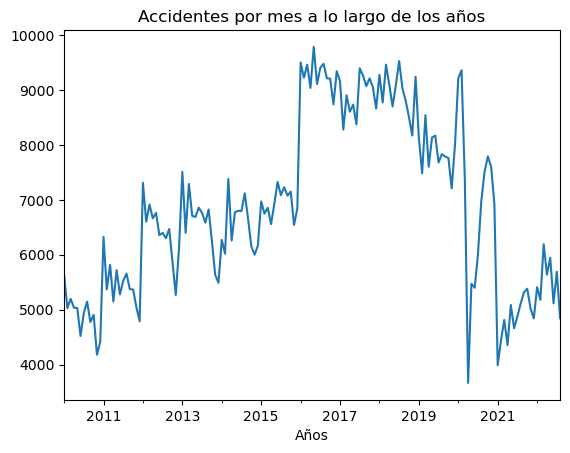

In [443]:
MES(df).plot.line()
plt.title('Accidentes por mes a lo largo de los años')
plt.xlabel('Años')

En el gráfico de lineas para los accidentes por mes se observa que los accidentes venían en general de manera creciente hasta llegar al año 2016 en el cual se dispararon los accidentes en general, luego decrese un poco y para el año 2020 debido a la pandemia bajó sustancialmente el numero de accidentes, aunque despues que empezaron a levantar restricciones creció exponencialmente hasta 2021 y 2022 donde se ha podido observar menos accidentes que años anteriores

### Ahora miraremos como es el comportamiento por dia de la semana

In [444]:
def DIA(df):
    """
    Group accidents by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['dia_semana'] = pd.to_datetime(df['fecha_hecho']).dt.weekday
    weekday_accidents = df.groupby(["dia_semana"]).size()
    return weekday_accidents

Text(0.5, 1.0, 'Accidentes por dia de la semana')

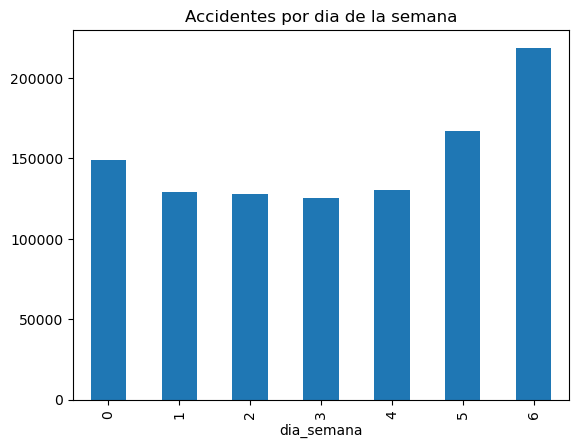

In [445]:
DIA(df).plot.bar()
plt.title('Accidentes por dia de la semana')

En el gráfico de barras se observa como se comportan estos accidentes a lo largo de la semana por los diferentes días partiendo de el lunes donde los accidentes son ligeramente mayores al resto de los dias de la semana donde tienen un comportamiento similar, los fines de semana a partir del sabado donde empieza a crecer y el domingo es donde ocurren la mayor cantidad de accidentes o lesiones personales, por lo tanto podriamos inferir que los fines de semana son los dias de mayor accidentalidad esto podría explicarse debido a los excesos de algunas personas, el abuso de sustancias y todos los peligros que el consumo de esto conlleva, como peleas, conducir en estado de ebriedad, entre muchos otras causas de lesion, siendo esto a considerar mas adelante para determinar las causas reales.

Text(0, 0.5, 'Cantidad (miles)')

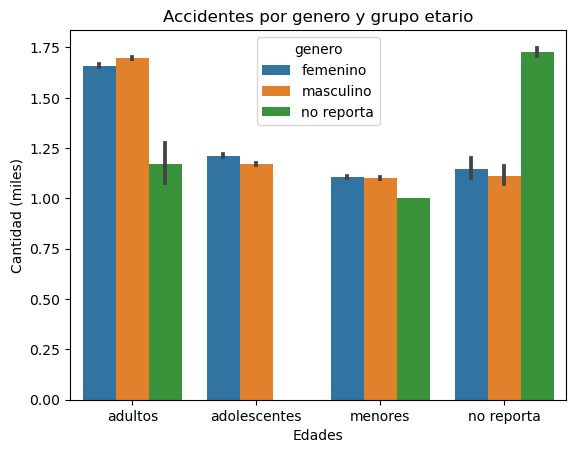

In [446]:
sns.barplot(data=df,x='grupo_etario',y='cantidad',hue='genero')
plt.title('Accidentes por genero y grupo etario')
plt.xlabel('Edades')
plt.ylabel('Cantidad (miles)')

Para obsrvar graficamente como afectaba a la poblacion por genero y grupo etario realicé este grafico de barras que muestra que los accidentes afectan tanto a hombres como a mujeres de maneras muy semejantes siendo los mas afectados el grupo de las personas adultas, entre menores y adolescentes podemos observar que hay poca diferencia en el número de accidentes, y que afecta tanto a niños como a niñas, sin embargo hay muchos accidentes que no se reporta el genero, la edad o ambas cosas, por lo que pueden estar en alguno de estos grupos o generos, sin embargo representa una cantidad de personas importante que han sufrido accidentes de alguna índole.

In [447]:
def DEPARTAMENTO(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['departamento'].drop_duplicates()
    boroughs = df.groupby(['departamento']).size()
    return boroughs

<AxesSubplot:xlabel='departamento'>

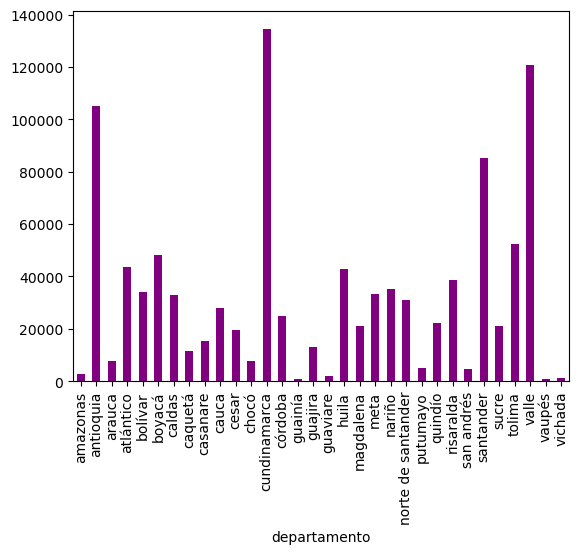

In [448]:
DEPARTAMENTO(df).plot.bar(color='purple')

En la gráfica observamos que los departamentos con mayor accidentalidad son Cundinamarca, Valle, Antioquia, santander y Tolima. Estos son los departamentos con mayor afectación de accidentes en el país

In [449]:
def MUNICIPIO(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['municipio'].drop_duplicates()
    boroughs = df.groupby(['municipio']).size()
    boroughs = boroughs.sort_values(ascending=False).head(15)
    return boroughs

<AxesSubplot:xlabel='municipio'>

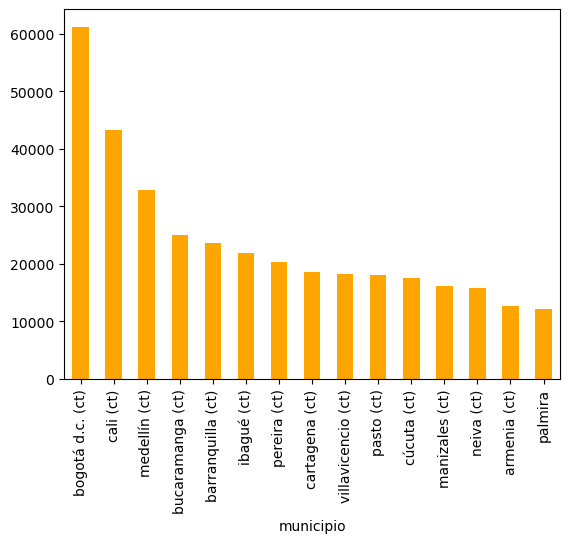

In [450]:
MUNICIPIO(df).plot.bar(color='orange')

Aquí observamos los municipios con mayor accidentalidad en el pais que son Bogotá D.C., Cali y Medellín seguidos de Bucaramanga y Barranquilla.

In [451]:
def MES_DEPAR(df):
    """
    Calculate accidents per hour for each borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    
    Outputs:
    `bor_hour`: A Series. This should be the result of doing groupby by borough
    and hour.
    """
    
    # YOUR CODE HERE
    df['mes'] = pd.to_datetime(df['fecha_hecho']).dt.to_period('M')
    bor_hour= df.groupby(["departamento","mes"]).size()
    
    return bor_hour

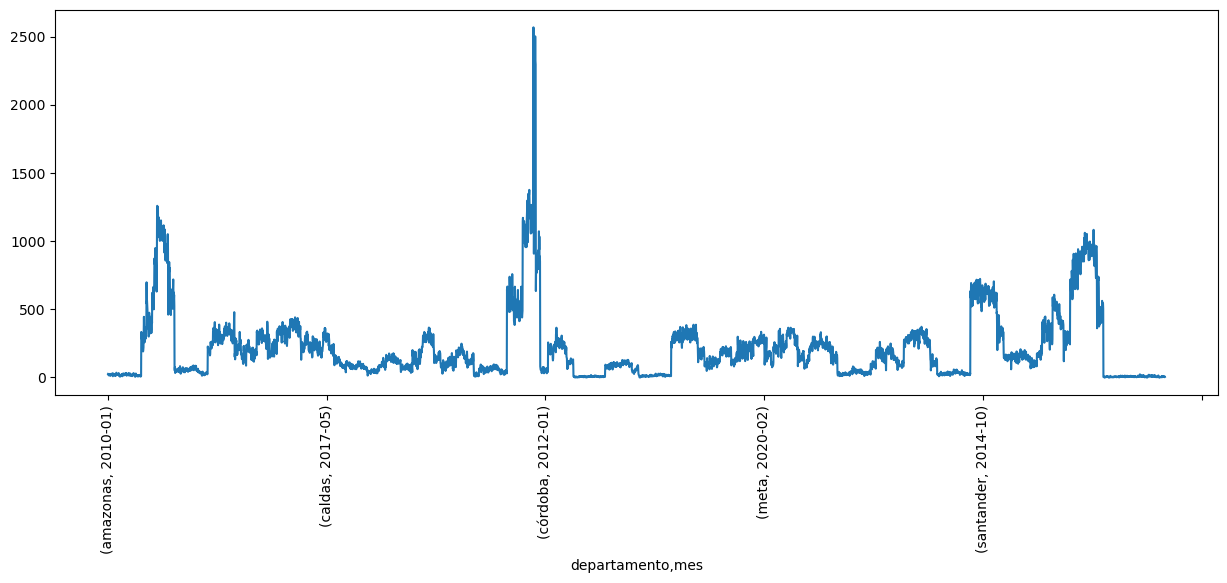

In [452]:
fig, ax = plt.subplots(figsize=(15,5))
ax = MES_DEPAR(df).plot()
plt.xticks(rotation=90)
plt.show()

In [453]:
def FACTORES(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `factors_most_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE

    contrib_df = pd.melt(df.reset_index(),id_vars ="index", value_vars= 'armas_medios').dropna()
    contrib_df= contrib_df.drop(columns=['variable'])
    contrib_df = contrib_df.drop_duplicates(keep='first')
    factors_most_acc = contrib_df.groupby('value').count().sort_values(by='index', ascending= False)
    factors_most_acc= factors_most_acc.head(10)
    
    return factors_most_acc

<AxesSubplot:xlabel='value'>

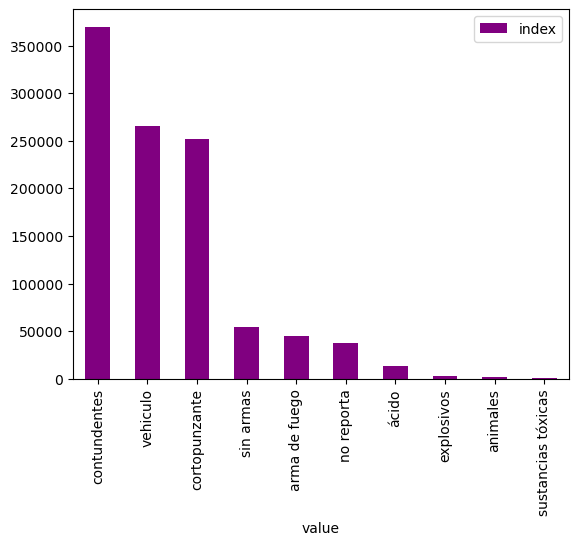

In [454]:
FACTORES(df).plot.bar(color='purple')

Observamos en el gráfico los 10 factores más cmunes de accidentes en colombia vemos que lo que encabeza la lista son objetos contundentes, lo cual podemos inferir que se producen mas lesiones de persona a persona donde una le propicia un golpe con algún arma no cortante, los accidentes vehiculares llevan el segundo puesto seguido de las armas corto punzantes, como machetes, cuchillos, entre otros.

In [455]:
def CONDUCTA(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `conduct_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE

    contrib_df = pd.melt(df.reset_index(),id_vars ="index", value_vars= 'descripción_conducta').dropna()
    contrib_df= contrib_df.drop(columns=['variable'])
    contrib_df = contrib_df.drop_duplicates(keep='first')
    conduct_acc = contrib_df.groupby('value').count().sort_values(by='index', ascending= False)
    
    return conduct_acc

<AxesSubplot:xlabel='value'>

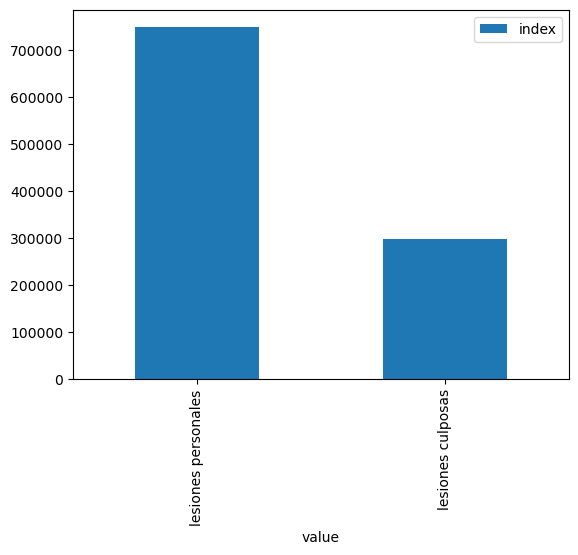

In [456]:
CONDUCTA(df).plot(kind='bar')

Aqui nos damos cuenta de que la mayoria de estos casos son accidentes ya sea provocado por descuido de la persona herida o por otra persona sin tener intencion de causar algun daño, aunque vemos un gran porcentaje de estos siendo causados por otras personas con toda intención de herir o quitar la vida al sujeto o tal vez refleje intentos de suicidio como tal no podemos estar seguros de las causas de estos accidentes por lo que esto es mera especulación.

<AxesSubplot:>

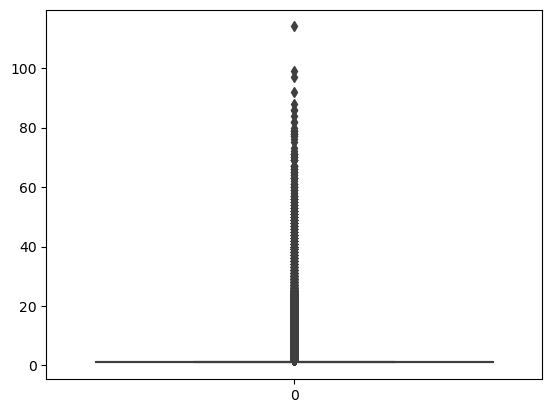

In [457]:
sns.boxplot(df['cantidad'])

In [458]:
"""# Position of the Outlier
print(np.where(df['cantidad']>4))"""

"# Position of the Outlier\nprint(np.where(df['cantidad']>4))"

In [459]:
"""from scipy import stats
z = np.abs(stats.zscore(df['cantidad']))
print(z)"""

"from scipy import stats\nz = np.abs(stats.zscore(df['cantidad']))\nprint(z)"

In [460]:
"""threshold = 3

# Position of the outlier
print(np.where(z > 3))"""


'threshold = 3\n\n# Position of the outlier\nprint(np.where(z > 3))'

In [461]:
"""#calculate de mean and stardard deviation
mean = df['cantidad'].mean()
std = df['cantidad'].std()

#identify the ouliers using the z-score

a = df.copy()

a['z_score'] = (a['cantidad']-mean)/std"""


"#calculate de mean and stardard deviation\nmean = df['cantidad'].mean()\nstd = df['cantidad'].std()\n\n#identify the ouliers using the z-score\n\na = df.copy()\n\na['z_score'] = (a['cantidad']-mean)/std"

In [462]:
"""a = a[(a['z_score'] >=-3.0) & (a['z_score'] >= 3.0)]
a[['fecha_hecho',"departamento","cantidad",'z_score']].value_counts()"""

'a = a[(a[\'z_score\'] >=-3.0) & (a[\'z_score\'] >= 3.0)]\na[[\'fecha_hecho\',"departamento","cantidad",\'z_score\']].value_counts()'

In [463]:
"""# IQR
Q1 = np.percentile(df['cantidad'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['cantidad'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1
IQR"""


"# IQR\nQ1 = np.percentile(df['cantidad'], 25,\n\t\t\t\tinterpolation = 'midpoint')\n\nQ3 = np.percentile(df['cantidad'], 75,\n\t\t\t\tinterpolation = 'midpoint')\nIQR = Q3 - Q1\nIQR"

In [464]:
"""# Above Upper bound
upper = df['cantidad'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df['cantidad'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))"""


'# Above Upper bound\nupper = df[\'cantidad\'] >= (Q3+1.5*IQR)\n\nprint("Upper bound:",upper)\nprint(np.where(upper))\n\n# Below Lower bound\nlower = df[\'cantidad\'] <= (Q1-1.5*IQR)\nprint("Lower bound:", lower)\nprint(np.where(lower))'

In [465]:
''' Removing the Outliers '''
a.drop(upper[0])#, inplace = True)
a.drop(lower[0])#, inplace = True)
 
print("New Shape: ", a.shape)

KeyError: '[0, 4, 5, 6, 8, 11, 14, 15, 16, 21, 23, 25, 28, 31, 32, 33, 34, 35, 38, 40, 44, 48, 50, 55, 57, 59, 60, 63, 67, 70, 72, 74, 77, 79, 86, 89, 90, 91, 93, 96, 97, 98, 100, 102, 108, 114, 115, 118, 122, 125, 128, 132, 133, 137, 139, 144, 147, 150, 152, 154, 162, 169, 170, 172, 183, 185, 189, 193, 197, 198, 205, 206, 213, 214, 216, 218, 219, 220, 221, 223, 224, 225, 226, 228, 229, 230, 233, 237, 238, 239, 252, 253, 255, 261, 262, 265, 266, 267, 269, 271, 272, 276, 278, 279, 280, 282, 284, 288, 293, 294, 295, 296, 298, 299, 305, 306, 307, 308, 313, 314, 315, 325, 330, 331, 332, 334, 337, 339, 340, 346, 350, 351, 354, 361, 367, 371, 379, 380, 383, 386, 388, 389, 391, 397, 400, 407, 409, 411, 414, 420, 422, 430, 440, 441, 443, 445, 446, 456, 457, 459, 460, 461, 466, 469, 470, 471, 473, 478, 479, 483, 485, 486, 488, 490, 493, 495, 496, 501, 502, 505, 506, 511, 512, 516, 527, 531, 532, 534, 535, 541, 542, 549, 550, 564, 573, 582, 594, 596, 604, 605, 615, 621, 631, 634, 641, 642, 645, 651, 653, 658, 659, 662, 663, 664, 672, 674, 680, 691, 696, 697, 699, 700, 701, 708, 713, 714, 721, 725, 726, 731, 733, 745, 751, 752, 757, 773, 775, 781, 782, 794, 796, 801, 802, 807, 825, 826, 830, 842, 853, 862, 865, 870, 873, 883, 885, 886, 887, 888, 892, 895, 909, 924, 925, 937, 940, 947, 954, 959, 963, 974, 981, 993, 995, 998, 1002, 1004, 1011, 1014, 1017, 1021, 1031, 1033, 1038, 1044, 1053, 1057, 1058, 1062, 1069, 1072, 1090, 1091, 1093, 1098, 1100, 1103, 1106, 1108, 1110, 1115, 1117, 1118, 1124, 1134, 1138, 1139, 1140, 1145, 1147, 1155, 1157, 1160, 1162, 1164, 1172, 1185, 1189, 1196, 1198, 1208, 1209, 1210, 1212, 1213, 1214, 1216, 1217, 1226, 1227, 1229, 1236, 1243, 1269, 1273, 1277, 1284, 1285, 1290, 1293, 1299, 1301, 1309, 1317, 1323, 1325, 1327, 1330, 1334, 1339, 1348, 1353, 1354, 1355, 1356, 1357, 1360, 1365, 1371, 1373, 1381, 1383, 1384, 1386, 1387, 1396, 1402, 1408, 1412, 1413, 1414, 1434, 1438, 1439, 1448, 1452, 1457, 1468, 1471, 1472, 1475, 1479, 1485, 1494, 1498, 1503, 1504, 1507, 1509, 1511, 1513, 1514, 1518, 1521, 1523, 1526, 1530, 1543, 1554, 1564, 1584, 1586, 1591, 1593, 1596, 1597, 1600, 1615, 1616, 1622, 1623, 1634, 1642, 1655, 1656, 1664, 1666, 1667, 1678, 1679, 1680, 1682, 1683, 1685, 1687, 1703, 1705, 1706, 1713, 1722, 1733, 1739, 1747, 1753, 1754, 1757, 1758, 1759, 1760, 1761, 1766, 1773, 1778, 1780, 1782, 1783, 1786, 1790, 1791, 1797, 1802, 1803, 1805, 1807, 1814, 1827, 1828, 1829, 1830, 1831, 1842, 1843, 1849, 1851, 1852, 1855, 1857, 1859, 1867, 1873, 1878, 1879, 1880, 1893, 1897, 1901, 1903, 1908, 1916, 1918, 1934, 1937, 1939, 1941, 1953, 1954, 1956, 1957, 1959, 1962, 1965, 1966, 1970, 1971, 1972, 1973, 1974, 1982, 1983, 1988, 1990, 1993, 1996, 2001, 2002, 2008, 2018, 2020, 2021, 2022, 2024, 2026, 2041, 2042, 2045, 2046, 2048, 2050, 2054, 2056, 2058, 2062, 2066, 2072, 2076, 2077, 2078, 2079, 2082, 2085, 2086, 2088, 2095, 2105, 2106, 2110, 2114, 2115, 2117, 2119, 2128, 2130, 2134, 2140, 2144, 2147, 2148, 2150, 2152, 2154, 2161, 2164, 2168, 2175, 2176, 2180, 2182, 2192, 2202, 2210, 2211, 2215, 2216, 2218, 2219, 2230, 2239, 2242, 2244, 2260, 2261, 2262, 2263, 2266, 2272, 2274, 2277, 2278, 2281, 2283, 2285, 2289, 2292, 2302, 2306, 2307, 2321, 2322, 2329, 2330, 2338, 2341, 2348, 2349, 2350, 2357, 2358, 2366, 2367, 2369, 2370, 2377, 2379, 2389, 2390, 2392, 2393, 2396, 2401, 2402, 2403, 2405, 2415, 2417, 2419, 2420, 2421, 2423, 2424, 2425, 2427, 2431, 2436, 2444, 2448, 2462, 2465, 2476, 2477, 2478, 2479, 2481, 2488, 2491, 2500, 2512, 2521, 2523, 2526, 2537, 2539, 2540, 2541, 2545, 2548, 2552, 2554, 2556, 2558, 2562, 2565, 2567, 2568, 2569, 2571, 2572, 2584, 2590, 2599, 2600, 2604, 2609, 2612, 2613, 2614, 2620, 2626, 2630, 2638, 2640, 2642, 2657, 2659, 2660, 2661, 2665, 2671, 2679, 2680, 2685, 2687, 2688, 2690, 2691, 2692, 2699, 2700, 2703, 2705, 2708, 2710, 2714, 2718, 2722, 2727, 2730, 2731, 2732, 2737, 2738, 2739, 2743, 2744, 2745, 2746, 2750, 2752, 2753, 2754, 2756, 2761, 2762, 2765, 2766, 2779, 2786, 2787, 2790, 2793, 2796, 2802, 2803, 2806, 2809, 2811, 2814, 2819, 2822, 2823, 2824, 2825, 2831, 2839, 2843, 2846, 2851, 2852, 2854, 2855, 2857, 2867, 2873, 2875, 2878, 2880, 2888, 2893, 2897, 2898, 2902, 2903, 2904, 2909, 2914, 2918, 2930, 2932, 2934, 2935, 2938, 2946, 2947, 2949, 2950, 2955, 2956, 2960, 2963, 2968, 2971, 2975, 2976, 2984, 2986, 2988, 2990, 2995, 3001, 3002, 3006, 3007, 3021, 3023, 3029, 3030, 3032, 3033, 3034, 3037, 3039, 3040, 3042, 3047, 3049, 3051, 3058, 3060, 3065, 3072, 3073, 3076, 3082, 3091, 3093, 3094, 3099, 3107, 3108, 3110, 3113, 3114, 3115, 3117, 3120, 3122, 3132, 3133, 3138, 3150, 3151, 3152, 3153, 3158, 3163, 3177, 3178, 3190, 3191, 3192, 3193, 3194, 3196, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3212, 3213, 3217, 3227, 3228, 3233, 3236, 3237, 3240, 3250, 3251, 3252, 3253, 3262, 3263, 3270, 3274, 3283, 3287, 3288, 3320, 3321, 3331, 3338, 3343, 3345, 3347, 3349, 3352, 3353, 3355, 3359, 3361, 3363, 3369, 3383, 3384, 3385, 3393, 3405, 3408, 3412, 3414, 3421, 3422, 3423, 3424, 3426, 3429, 3436, 3438, 3443, 3445, 3451, 3454, 3459, 3464, 3469, 3470, 3497, 3499, 3514, 3521, 3522, 3532, 3533, 3534, 3535, 3544, 3546, 3548, 3552, 3560, 3561, 3569, 3572, 3573, 3577, 3578, 3582, 3584, 3589, 3592, 3593, 3594, 3595, 3599, 3602, 3605, 3616, 3617, 3625, 3628, 3637, 3643, 3647, 3648, 3649, 3651, 3652, 3653, 3657, 3660, 3681, 3683, 3684, 3685, 3686, 3688, 3689, 3690, 3694, 3696, 3701, 3710, 3719, 3729, 3731, 3732, 3736, 3741, 3743, 3755, 3756, 3757, 3768, 3769, 3775, 3776, 3782, 3784, 3786, 3789, 3790, 3791, 3799, 3807, 3810, 3811, 3813, 3818, 3819, 3831, 3835, 3842, 3844, 3849, 3856, 3858, 3859, 3860, 3866, 3868, 3869, 3873, 3879, 3890, 3893, 3902, 3907, 3910, 3917, 3919, 3922, 3925, 3927, 3934, 3935, 3939, 3941, 3949, 3950, 3953, 3955, 3966, 3967, 3975, 3976, 3982, 3985, 3986, 3987, 4002, 4008, 4009, 4023, 4027, 4030, 4033, 4035, 4045, 4049, 4050, 4056, 4058, 4059, 4060, 4062, 4063, 4067, 4068, 4073, 4074, 4078, 4079, 4086, 4087, 4088, 4091, 4093, 4095, 4099, 4103, 4105, 4106, 4107, 4108, 4109, 4112, 4113, 4117, 4118, 4125, 4131, 4134, 4136, 4137, 4140, 4142, 4145, 4148, 4155, 4160, 4165, 4174, 4175, 4186, 4189, 4192, 4193, 4201, 4216, 4227, 4228, 4230, 4232, 4235, 4236, 4237, 4243, 4250, 4251, 4254, 4258, 4264, 4266, 4267, 4270, 4285, 4286, 4287, 4289, 4290, 4296, 4300, 4309, 4311, 4312, 4314, 4316, 4317, 4320, 4323, 4327, 4328, 4331, 4333, 4334, 4336, 4337, 4338, 4339, 4347, 4350, 4352, 4354, 4355, 4363, 4364, 4365, 4369, 4370, 4375, 4376, 4379, 4380, 4394, 4395, 4399, 4403, 4405, 4414, 4415, 4423, 4427, 4430, 4440, 4444, 4446, 4450, 4454, 4455, 4456, 4457, 4458, 4460, 4479, 4491, 4496, 4518, 4519, 4520, 4533, 4537, 4538, 4542, 4544, 4545, 4546, 4553, 4555, 4560, 4577, 4590, 4594, 4597, 4598, 4605, 4622, 4624, 4631, 4647, 4648, 4651, 4665, 4666, 4668, 4671, 4676, 4689, 4700, 4713, 4716, 4729, 4731, 4735, 4736, 4738, 4745, 4749, 4751, 4753, 4755, 4757, 4758, 4759, 4764, 4765, 4774, 4794, 4796, 4797, 4806, 4807, 4808, 4814, 4819, 4824, 4825, 4844, 4847, 4848, 4849, 4853, 4866, 4868, 4874, 4876, 4877, 4880, 4892, 4896, 4899, 4909, 4925, 4938, 4941, 4945, 4946, 4959, 4964, 4974, 4977, 4984, 4992, 4996, 4998, 5000, 5001, 5006, 5008, 5010, 5012, 5022, 5023, 5025, 5026, 5028, 5030, 5043, 5044, 5060, 5063, 5073, 5075, 5076, 5086, 5090, 5093, 5101, 5105, 5122, 5124, 5127, 5129, 5135, 5139, 5141, 5148, 5150, 5151, 5153, 5160, 5168, 5181, 5187, 5197, 5198, 5208, 5210, 5216, 5224, 5228, 5233, 5234, 5239, 5241, 5243, 5244, 5245, 5248, 5251, 5252, 5253, 5255, 5257, 5260, 5261, 5267, 5269, 5274, 5280, 5283, 5288, 5289, 5294, 5305, 5306, 5307, 5317, 5331, 5332, 5336, 5345, 5348, 5349, 5350, 5356, 5360, 5362, 5364, 5366, 5368, 5370, 5381, 5383, 5384, 5388, 5390, 5392, 5394, 5398, 5399, 5405, 5411, 5419, 5431, 5435, 5436, 5438, 5452, 5457, 5460, 5468, 5479, 5487, 5489, 5490, 5492, 5494, 5495, 5503, 5510, 5513, 5518, 5520, 5526, 5527, 5528, 5533, 5535, 5543, 5545, 5572, 5579, 5582, 5583, 5593, 5600, 5601, 5603, 5604, 5606, 5607, 5611, 5615, 5616, 5619, 5620, 5622, 5625, 5631, 5633, 5634, 5646, 5658, 5673, 5675, 5677, 5685, 5686, 5688, 5689, 5691, 5692, 5693, 5698, 5706, 5707, 5713, 5716, 5717, 5726, 5727, 5740, 5746, 5749, 5752, 5753, 5766, 5770, 5781, 5786, 5787, 5789, 5790, 5792, 5796, 5805, 5814, 5815, 5817, 5822, 5824, 5826, 5827, 5841, 5856, 5857, 5869, 5876, 5883, 5884, 5885, 5887, 5890, 5898, 5901, 5905, 5908, 5909, 5911, 5918, 5919, 5920, 5929, 5930, 5933, 5935, 5936, 5941, 5954, 5955, 5959, 5960, 5961, 5965, 5966, 5973, 5974, 5976, 5979, 5984, 5994, 6006, 6019, 6031, 6035, 6040, 6041, 6042, 6051, 6054, 6056, 6057, 6062, 6063, 6064, 6065, 6066, 6067, 6069, 6078, 6079, 6082, 6090, 6093, 6099, 6104, 6106, 6112, 6124, 6125, 6132, 6134, 6139, 6140, 6141, 6143, 6144, 6152, 6154, 6158, 6161, 6177, 6181, 6184, 6185, 6191, 6193, 6197, 6198, 6202, 6210, 6214, 6216, 6220, 6221, 6231, 6251, 6252, 6255, 6266, 6269, 6280, 6281, 6289, 6296, 6297, 6300, 6306, 6308, 6314, 6316, 6334, 6348, 6355, 6361, 6362, 6363, 6364, 6375, 6376, 6383, 6385, 6386, 6389, 6390, 6399, 6400, 6401, 6406, 6414, 6415, 6419, 6420, 6423, 6432, 6449, 6451, 6455, 6456, 6459, 6460, 6463, 6467, 6470, 6473, 6474, 6478, 6479, 6485, 6486, 6488, 6494, 6501, 6503, 6514, 6515, 6519, 6531, 6537, 6543, 6548, 6549, 6550, 6553, 6554, 6566, 6567, 6569, 6577, 6580, 6581, 6584, 6586, 6589, 6598, 6609, 6610, 6615, 6616, 6617, 6625, 6628, 6631, 6636, 6640, 6644, 6649, 6650, 6651, 6653, 6656, 6660, 6668, 6670, 6673, 6674, 6677, 6678, 6682, 6689, 6691, 6696, 6706, 6708, 6713, 6715, 6716, 6718, 6723, 6729, 6732, 6733, 6734, 6735, 6738, 6740, 6765, 6769, 6770, 6772, 6774, 6775, 6776, 6781, 6782, 6784, 6787, 6789, 6790, 6796, 6798, 6807, 6808, 6809, 6810, 6813, 6816, 6825, 6826, 6830, 6845, 6853, 6854, 6856, 6861, 6872, 6876, 6877, 6881, 6883, 6885, 6888, 6896, 6899, 6901, 6902, 6904, 6909, 6910, 6911, 6914, 6915, 6918, 6919, 6923, 6925, 6934, 6935, 6940, 6944, 6946, 6948, 6949, 6952, 6958, 6960, 6961, 6974, 6978, 6979, 6981, 6984, 6987, 6991, 6998, 7002, 7012, 7013, 7014, 7025, 7031, 7034, 7047, 7048, 7050, 7059, 7060, 7065, 7071, 7073, 7080, 7084, 7085, 7087, 7089, 7091, 7093, 7097, 7101, 7104, 7105, 7106, 7108, 7109, 7112, 7114, 7120, 7139, 7160, 7161, 7162, 7168, 7172, 7186, 7188, 7196, 7197, 7203, 7210, 7211, 7213, 7222, 7223, 7224, 7225, 7226, 7227, 7232, 7234, 7236, 7237, 7240, 7242, 7243, 7244, 7250, 7251, 7252, 7254, 7255, 7260, 7262, 7266, 7271, 7277, 7285, 7295, 7297, 7300, 7301, 7302, 7304, 7311, 7313, 7323, 7326, 7339, 7341, 7342, 7362, 7376, 7377, 7383, 7387, 7388, 7391, 7392, 7394, 7395, 7396, 7398, 7400, 7404, 7409, 7410, 7412, 7415, 7417, 7420, 7421, 7426, 7444, 7451, 7458, 7460, 7462, 7463, 7464, 7465, 7469, 7479, 7482, 7498, 7499, 7500, 7508, 7512, 7515, 7517, 7518, 7521, 7529, 7533, 7542, 7546, 7548, 7556, 7557, 7558, 7567, 7568, 7572, 7575, 7578, 7579, 7582, 7592, 7602, 7614, 7615, 7616, 7617, 7621, 7623, 7630, 7634, 7636, 7640, 7643, 7644, 7645, 7653, 7658, 7662, 7666, 7676, 7678, 7680, 7681, 7686, 7687, 7692, 7698, 7700, 7701, 7709, 7712, 7713, 7716, 7717, 7718, 7724, 7728, 7730, 7732, 7734, 7736, 7737, 7740, 7749, 7760, 7762, 7765, 7768, 7770, 7772, 7774, 7784, 7787, 7793, 7795, 7796, 7798, 7801, 7804, 7816, 7822, 7823, 7824, 7826, 7827, 7829, 7835, 7839, 7842, 7844, 7850, 7851, 7864, 7866, 7868, 7869, 7876, 7877, 7880, 7884, 7886, 7888, 7889, 7891, 7893, 7895, 7903, 7905, 7906, 7907, 7908, 7910, 7913, 7918, 7919, 7921, 7925, 7926, 7928, 7932, 7934, 7938, 7939, 7944, 7963, 7964, 7969, 7972, 7974, 7981, 7982, 7987, 7990, 7993, 7996, 8010, 8013, 8015, 8021, 8025, 8031, 8032, 8034, 8035, 8037, 8042, 8050, 8055, 8059, 8061, 8065, 8068, 8071, 8072, 8074, 8077, 8084, 8094, 8096, 8098, 8104, 8116, 8120, 8122, 8124, 8128, 8129, 8130, 8136, 8138, 8141, 8142, 8144, 8145, 8147, 8148, 8152, 8156, 8158, 8161, 8163, 8164, 8166, 8168, 8172, 8175, 8179, 8182, 8187, 8192, 8194, 8196, 8199, 8203, 8205, 8208, 8218, 8227, 8233, 8237, 8240, 8242, 8263, 8264, 8265, 8266, 8268, 8279, 8291, 8303, 8314, 8323, 8326, 8327, 8330, 8332, 8341, 8342, 8343, 8348, 8350, 8352, 8360, 8365, 8366, 8368, 8373, 8374, 8375, 8376, 8377, 8380, 8382, 8395, 8398, 8403, 8408, 8414, 8424, 8425, 8426, 8430, 8431, 8435, 8452, 8453, 8472, 8476, 8477, 8486, 8490, 8491, 8504, 8507, 8511, 8520, 8523, 8526, 8530, 8532, 8535, 8539, 8541, 8549, 8550, 8562, 8565, 8568, 8570, 8576, 8584, 8589, 8591, 8592, 8593, 8602, 8604, 8607, 8615, 8619, 8625, 8631, 8634, 8645, 8649, 8657, 8659, 8662, 8665, 8666, 8667, 8673, 8678, 8679, 8682, 8683, 8687, 8689, 8700, 8703, 8707, 8714, 8719, 8720, 8722, 8725, 8729, 8734, 8740, 8741, 8747, 8748, 8769, 8772, 8776, 8779, 8782, 8784, 8785, 8793, 8794, 8801, 8802, 8807, 8812, 8813, 8814, 8817, 8820, 8821, 8823, 8826, 8828, 8829, 8833, 8840, 8841, 8842, 8844, 8846, 8851, 8852, 8858, 8871, 8873, 8874, 8875, 8876, 8880, 8881, 8882, 8887, 8889, 8896, 8900, 8901, 8903, 8905, 8913, 8917, 8923, 8931, 8933, 8944, 8945, 8947, 8953, 8954, 8956, 8957, 8959, 8960, 8961, 8966, 8968, 8969, 8970, 8971, 8972, 8973, 8978, 8979, 8983, 8990, 8991, 8992, 8993, 8995, 9001, 9004, 9005, 9023, 9024, 9031, 9035, 9036, 9039, 9043, 9046, 9048, 9051, 9054, 9067, 9076, 9083, 9087, 9089, 9092, 9093, 9100, 9102, 9109, 9112, 9115, 9119, 9121, 9131, 9132, 9134, 9138, 9139, 9144, 9145, 9147, 9149, 9151, 9154, 9155, 9166, 9168, 9169, 9174, 9182, 9189, 9190, 9191, 9200, 9204, 9209, 9214, 9219, 9220, 9221, 9224, 9225, 9226, 9229, 9233, 9236, 9246, 9254, 9255, 9259, 9270, 9272, 9273, 9275, 9276, 9277, 9289, 9290, 9294, 9295, 9301, 9304, 9307, 9310, 9313, 9319, 9324, 9326, 9327, 9330, 9331, 9332, 9334, 9336, 9358, 9363, 9368, 9370, 9375, 9377, 9381, 9394, 9395, 9398, 9402, 9403, 9405, 9417, 9421, 9430, 9431, 9432, 9435, 9441, 9442, 9449, 9452, 9455, 9464, 9465, 9472, 9475, 9477, 9479, 9480, 9481, 9486, 9505, 9511, 9515, 9516, 9519, 9520, 9538, 9540, 9551, 9562, 9567, 9568, 9569, 9572, 9574, 9575, 9576, 9583, 9585, 9587, 9590, 9594, 9603, 9611, 9619, 9622, 9623, 9633, 9634, 9635, 9636, 9637, 9639, 9656, 9665, 9666, 9669, 9674, 9675, 9680, 9686, 9688, 9690, 9692, 9694, 9695, 9698, 9700, 9713, 9717, 9719, 9720, 9722, 9723, 9729, 9731, 9738, 9742, 9747, 9758, 9764, 9770, 9775, 9779, 9781, 9782, 9783, 9789, 9790, 9792, 9794, 9797, 9799, 9810, 9811, 9815, 9822, 9823, 9831, 9832, 9834, 9844, 9851, 9854, 9855, 9856, 9858, 9860, 9862, 9863, 9870, 9872, 9873, 9878, 9881, 9882, 9883, 9889, 9890, 9892, 9897, 9899, 9900, 9904, 9911, 9925, 9927, 9929, 9938, 9939, 9942, 9950, 9952, 9955, 9956, 9961, 9962, 9968, 9969, 9976, 9977, 9978, 9983, 9987, 9989, 9990, 9991, 9992, 9994, 9996, 9997, 10001, 10002, 10005, 10011, 10014, 10015, 10016, 10029, 10037, 10039, 10042, 10045, 10064, 10065, 10066, 10068, 10071, 10072, 10075, 10077, 10080, 10081, 10082, 10097, 10098, 10103, 10107, 10109, 10110, 10113, 10114, 10115, 10118, 10122, 10131, 10132, 10137, 10147, 10150, 10160, 10168, 10169, 10170, 10175, 10182, 10183, 10188, 10191, 10192, 10193, 10205, 10208, 10210, 10215, 10224, 10229, 10230, 10232, 10236, 10240, 10244, 10249, 10252, 10253, 10261, 10263, 10264, 10265, 10266, 10269, 10277, 10285, 10287, 10289, 10290, 10292, 10296, 10297, 10302, 10311, 10313, 10315, 10316, 10337, 10344, 10352, 10354, 10356, 10360, 10364, 10369, 10372, 10376, 10379, 10380, 10383, 10385, 10386, 10387, 10389, 10392, 10404, 10406, 10415, 10417, 10418, 10422, 10423, 10424, 10436, 10439, 10442, 10447, 10449, 10451, 10452, 10453, 10457, 10460, 10461, 10462, 10471, 10479, 10483, 10484, 10488, 10501, 10505, 10507, 10508, 10511, 10512, 10513, 10515, 10522, 10533, 10536, 10545, 10550, 10551, 10559, 10560, 10562, 10568, 10573, 10577, 10579, 10583, 10596, 10604, 10608, 10612, 10614, 10615, 10619, 10626, 10630, 10634, 10636, 10643, 10645, 10650, 10651, 10652, 10655, 10657, 10658, 10659, 10663, 10664, 10666, 10668, 10677, 10678, 10679, 10686, 10693, 10698, 10704, 10711, 10712, 10739, 10741, 10742, 10750, 10751, 10758, 10762, 10763, 10764, 10767, 10771, 10787, 10788, 10789, 10790, 10791, 10795, 10805, 10809, 10813, 10823, 10826, 10831, 10832, 10833, 10834, 10836, 10838, 10842, 10846, 10851, 10852, 10861, 10870, 10887, 10889, 10891, 10900, 10906, 10907, 10910, 10919, 10927, 10928, 10936, 10939, 10955, 10959, 10960, 10961, 10962, 10964, 10968, 10972, 10976, 10980, 10983, 10986, 10988, 10990, 10995, 10996, 10999, 11000, 11002, 11005, 11016, 11025, 11027, 11037, 11044, 11046, 11048, 11049, 11053, 11058, 11063, 11064, 11072, 11074, 11076, 11080, 11090, 11091, 11097, 11098, 11103, 11106, 11112, 11117, 11118, 11128, 11129, 11131, 11136, 11138, 11141, 11163, 11164, 11165, 11170, 11173, 11176, 11177, 11178, 11179, 11180, 11181, 11190, 11195, 11198, 11205, 11207, 11214, 11216, 11223, 11224, 11245, 11246, 11252, 11257, 11262, 11263, 11266, 11267, 11270, 11271, 11273, 11278, 11284, 11301, 11305, 11309, 11310, 11311, 11313, 11314, 11316, 11328, 11329, 11332, 11336, 11341, 11343, 11344, 11346, 11347, 11354, 11355, 11356, 11361, 11362, 11372, 11374, 11375, 11376, 11381, 11382, 11387, 11389, 11391, 11395, 11400, 11406, 11407, 11412, 11417, 11418, 11420, 11421, 11423, 11431, 11438, 11439, 11440, 11441, 11444, 11451, 11456, 11458, 11463, 11469, 11472, 11477, 11479, 11485, 11490, 11491, 11492, 11501, 11508, 11509, 11510, 11517, 11521, 11523, 11524, 11528, 11529, 11530, 11531, 11532, 11540, 11552, 11553, 11557, 11558, 11559, 11563, 11564, 11567, 11581, 11582, 11583, 11584, 11593, 11597, 11598, 11603, 11604, 11605, 11607, 11609, 11612, 11613, 11617, 11618, 11638, 11640, 11642, 11645, 11647, 11655, 11658, 11661, 11664, 11677, 11682, 11684, 11686, 11689, 11693, 11698, 11702, 11710, 11714, 11716, 11717, 11720, 11723, 11726, 11733, 11740, 11743, 11745, 11747, 11748, 11749, 11751, 11753, 11754, 11756, 11764, 11769, 11771, 11773, 11778, 11787, 11794, 11796, 11801, 11812, 11820, 11822, 11825, 11829, 11835, 11837, 11848, 11849, 11864, 11872, 11873, 11876, 11879, 11880, 11885, 11889, 11907, 11908, 11910, 11911, 11920, 11928, 11929, 11935, 11939, 11941, 11947, 11952, 11953, 11954, 11963, 11967, 11968, 11971, 11973, 11977, 11981, 11984, 11990, 11992, 11994, 11996, 11999, 12001, 12004, 12007, 12015, 12018, 12024, 12025, 12026, 12034, 12038, 12042, 12047, 12052, 12057, 12063, 12064, 12066, 12073, 12074, 12075, 12076, 12077, 12086, 12088, 12089, 12093, 12094, 12095, 12096, 12099, 12100, 12103, 12105, 12107, 12110, 12114, 12115, 12117, 12126, 12147, 12149, 12151, 12152, 12158, 12160, 12165, 12170, 12176, 12179, 12180, 12181, 12182, 12192, 12207, 12209, 12214, 12221, 12235, 12236, 12237, 12238, 12246, 12247, 12252, 12257, 12263, 12264, 12266, 12267, 12275, 12278, 12279, 12285, 12287, 12289, 12293, 12300, 12310, 12312, 12313, 12315, 12316, 12318, 12319, 12321, 12323, 12329, 12331, 12335, 12339, 12342, 12353, 12364, 12365, 12367, 12372, 12373, 12382, 12385, 12392, 12393, 12395, 12397, 12406, 12407, 12408, 12412, 12415, 12416, 12424, 12425, 12438, 12439, 12440, 12445, 12446, 12448, 12462, 12464, 12468, 12473, 12477, 12479, 12480, 12481, 12482, 12484, 12485, 12486, 12493, 12495, 12500, 12502, 12504, 12507, 12518, 12523, 12527, 12535, 12536, 12538, 12540, 12542, 12547, 12551, 12553, 12555, 12564, 12576, 12577, 12586, 12590, 12602, 12611, 12613, 12615, 12617, 12618, 12622, 12626, 12630, 12635, 12642, 12643, 12647, 12658, 12664, 12665, 12677, 12681, 12691, 12692, 12693, 12700, 12715, 12716, 12728, 12729, 12730, 12750, 12751, 12758, 12761, 12762, 12763, 12765, 12766, 12773, 12775, 12777, 12779, 12781, 12787, 12794, 12800, 12802, 12807, 12815, 12822, 12831, 12833, 12839, 12849, 12850, 12852, 12854, 12862, 12865, 12866, 12867, 12869, 12875, 12879, 12880, 12881, 12886, 12892, 12895, 12896, 12897, 12900, 12902, 12905, 12918, 12920, 12921, 12929, 12934, 12952, 12954, 12958, 12959, 12965, 12967, 12973, 12982, 12984, 12993, 13005, 13010, 13022, 13024, 13026, 13041, 13048, 13049, 13052, 13063, 13064, 13072, 13078, 13080, 13083, 13084, 13091, 13095, 13100, 13102, 13103, 13106, 13107, 13108, 13112, 13113, 13115, 13117, 13119, 13130, 13133, 13134, 13136, 13138, 13140, 13144, 13147, 13150, 13151, 13153, 13155, 13161, 13165, 13182, 13186, 13192, 13198, 13200, 13204, 13207, 13209, 13211, 13213, 13217, 13222, 13225, 13228, 13236, 13239, 13244, 13245, 13246, 13247, 13250, 13252, 13253, 13255, 13260, 13263, 13267, 13271, 13274, 13277, 13284, 13287, 13288, 13289, 13290, 13291, 13293, 13294, 13303, 13307, 13310, 13312, 13317, 13322, 13327, 13335, 13336, 13341, 13346, 13347, 13352, 13354, 13360, 13361, 13362, 13364, 13365, 13372, 13388, 13389, 13390, 13399, 13400, 13406, 13412, 13413, 13417, 13418, 13420, 13423, 13424, 13428, 13429, 13430, 13432, 13434, 13436, 13439, 13441, 13443, 13444, 13445, 13446, 13449, 13450, 13459, 13460, 13465, 13467, 13472, 13484, 13486, 13490, 13492, 13494, 13495, 13496, 13500, 13519, 13520, 13529, 13531, 13541, 13542, 13543, 13545, 13548, 13551, 13556, 13558, 13560, 13561, 13563, 13568, 13569, 13575, 13576, 13580, 13581, 13582, 13586, 13587, 13588, 13590, 13599, 13604, 13609, 13610, 13616, 13620, 13630, 13633, 13634, 13635, 13636, 13642, 13643, 13644, 13646, 13652, 13658, 13661, 13662, 13665, 13666, 13667, 13670, 13672, 13676, 13678, 13681, 13682, 13686, 13687, 13693, 13703, 13704, 13707, 13708, 13723, 13725, 13731, 13733, 13734, 13738, 13743, 13750, 13756, 13762, 13763, 13768, 13772, 13780, 13785, 13793, 13796, 13801, 13802, 13803, 13808, 13814, 13816, 13819, 13825, 13833, 13841, 13850, 13852, 13855, 13861, 13864, 13869, 13871, 13882, 13887, 13893, 13894, 13896, 13897, 13904, 13908, 13910, 13911, 13920, 13929, 13934, 13937, 13940, 13946, 13948, 13949, 13956, 13957, 13959, 13962, 13963, 13964, 13966, 13968, 13972, 13974, 13976, 13980, 13981, 13982, 13984, 13985, 13986, 13988, 13989, 13991, 13996, 14002, 14003, 14004, 14005, 14014, 14018, 14022, 14024, 14026, 14030, 14031, 14039, 14044, 14047, 14050, 14052, 14053, 14056, 14058, 14062, 14064, 14065, 14073, 14079, 14080, 14081, 14082, 14087, 14093, 14094, 14105, 14106, 14107, 14109, 14110, 14111, 14114, 14116, 14119, 14123, 14127, 14128, 14129, 14130, 14131, 14132, 14133, 14134, 14138, 14143, 14146, 14147, 14149, 14161, 14163, 14164, 14166, 14172, 14180, 14181, 14182, 14187, 14193, 14198, 14201, 14202, 14203, 14204, 14206, 14207, 14208, 14209, 14211, 14212, 14214, 14217, 14218, 14219, 14220, 14221, 14222, 14223, 14225, 14228, 14233, 14234, 14236, 14239, 14242, 14243, 14244, 14245, 14246, 14247, 14256, 14258, 14261, 14267, 14284, 14285, 14295, 14306, 14309, 14311, 14313, 14316, 14323, 14328, 14329, 14330, 14331, 14338, 14340, 14342, 14343, 14344, 14345, 14346, 14348, 14352, 14353, 14356, 14358, 14360, 14361, 14363, 14365, 14371, 14386, 14389, 14392, 14397, 14399, 14407, 14410, 14412, 14413, 14415, 14418, 14427, 14434, 14438, 14440, 14447, 14454, 14455, 14465, 14467, 14476, 14480, 14481, 14482, 14483, 14493, 14495, 14500, 14503, 14505, 14507, 14514, 14522, 14525, 14530, 14535, 14536, 14541, 14543, 14545, 14551, 14554, 14555, 14557, 14563, 14564, 14566, 14573, 14574, 14575, 14581, 14582, 14586, 14588, 14589, 14592, 14593, 14599, 14605, 14606, 14610, 14611, 14612, 14617, 14623, 14626, 14627, 14628, 14630, 14634, 14636, 14637, 14640, 14641, 14643, 14652, 14654, 14656, 14661, 14663, 14664, 14666, 14670, 14671, 14676, 14678, 14679, 14687, 14689, 14690, 14697, 14699, 14706, 14708, 14714, 14715, 14722, 14723, 14728, 14731, 14732, 14733, 14735, 14740, 14743, 14753, 14755, 14756, 14758, 14759, 14761, 14764, 14765, 14770, 14771, 14774, 14776, 14777, 14781, 14786, 14787, 14790, 14795, 14806, 14809, 14818, 14819, 14822, 14825, 14830, 14835, 14841, 14845, 14849, 14850, 14856, 14857, 14870, 14895, 14896, 14898, 14900, 14903, 14905, 14918, 14936, 14937, 14942, 14946, 14957, 14967, 14969, 14975, 14979, 14985, 14988, 14991, 14997, 14999, 15001, 15003, 15017, 15018, 15025, 15031, 15033, 15034, 15040, 15042, 15060, 15061, 15062, 15063, 15064, 15066, 15073, 15074, 15075, 15084, 15085, 15088, 15094, 15096, 15097, 15099, 15102, 15104, 15110, 15111, 15113, 15123, 15131, 15135, 15136, 15139, 15142, 15145, 15146, 15150, 15151, 15152, 15154, 15157, 15159, 15161, 15162, 15163, 15168, 15169, 15171, 15173, 15178, 15182, 15185, 15186, 15190, 15196, 15197, 15200, 15203, 15206, 15207, 15209, 15210, 15213, 15214, 15216, 15219, 15220, 15229, 15233, 15235, 15236, 15248, 15254, 15257, 15263, 15267, 15273, 15274, 15275, 15276, 15277, 15279, 15284, 15287, 15292, 15296, 15299, 15301, 15309, 15313, 15314, 15318, 15322, 15323, 15330, 15331, 15338, 15340, 15343, 15344, 15355, 15356, 15359, 15362, 15363, 15364, 15365, 15367, 15369, 15382, 15383, 15385, 15393, 15394, 15402, 15407, 15408, 15413, 15425, 15426, 15429, 15436, 15437, 15438, 15439, 15443, 15452, 15457, 15459, 15462, 15467, 15469, 15474, 15478, 15479, 15492, 15494, 15498, 15502, 15504, 15505, 15506, 15510, 15512, 15521, 15522, 15523, 15524, 15532, 15549, 15552, 15561, 15563, 15564, 15565, 15567, 15568, 15571, 15575, 15577, 15582, 15587, 15590, 15591, 15592, 15593, 15594, 15595, 15596, 15598, 15605, 15614, 15616, 15631, 15633, 15651, 15655, 15657, 15671, 15672, 15673, 15676, 15677, 15686, 15689, 15690, 15695, 15698, 15700, 15702, 15705, 15706, 15708, 15709, 15716, 15719, 15725, 15732, 15736, 15739, 15746, 15747, 15750, 15757, 15760, 15761, 15763, 15769, 15773, 15774, 15776, 15779, 15783, 15784, 15788, 15793, 15803, 15804, 15809, 15814, 15815, 15817, 15818, 15820, 15822, 15828, 15830, 15836, 15838, 15839, 15840, 15845, 15848, 15849, 15853, 15858, 15862, 15865, 15871, 15874, 15876, 15879, 15881, 15886, 15887, 15893, 15902, 15910, 15916, 15918, 15920, 15924, 15931, 15932, 15936, 15941, 15942, 15943, 15944, 15945, 15946, 15948, 15949, 15955, 15958, 15959, 15963, 15984, 15986, 15987, 15988, 15989, 15992, 16003, 16004, 16005, 16007, 16009, 16014, 16016, 16017, 16019, 16021, 16023, 16027, 16029, 16030, 16035, 16039, 16040, 16043, 16046, 16047, 16051, 16053, 16060, 16068, 16071, 16072, 16073, 16085, 16089, 16091, 16092, 16097, 16100, 16101, 16103, 16104, 16108, 16110, 16116, 16117, 16119, 16121, 16122, 16124, 16126, 16129, 16139, 16140, 16143, 16144, 16145, 16148, 16150, 16158, 16164, 16168, 16177, 16183, 16189, 16204, 16214, 16218, 16219, 16220, 16221, 16222, 16223, 16227, 16228, 16232, 16234, 16237, 16256, 16266, 16269, 16270, 16271, 16273, 16283, 16292, 16296, 16299, 16303, 16304, 16308, 16309, 16314, 16317, 16318, 16319, 16321, 16323, 16329, 16335, 16337, 16338, 16342, 16344, 16345, 16347, 16349, 16355, 16357, 16358, 16363, 16368, 16372, 16374, 16386, 16390, 16395, 16401, 16407, 16411, 16420, 16422, 16423, 16424, 16431, 16434, 16437, 16450, 16451, 16454, 16455, 16459, 16467, 16470, 16472, 16476, 16482, 16491, 16494, 16495, 16499, 16503, 16504, 16511, 16514, 16516, 16518, 16521, 16522, 16525, 16526, 16527, 16529, 16535, 16537, 16538, 16540, 16541, 16542, 16546, 16549, 16552, 16555, 16556, 16557, 16558, 16569, 16575, 16576, 16581, 16582, 16586, 16589, 16591, 16604, 16613, 16620, 16632, 16634, 16635, 16645, 16646, 16647, 16651, 16652, 16660, 16663, 16674, 16675, 16679, 16682, 16683, 16690, 16693, 16694, 16698, 16705, 16715, 16717, 16725, 16731, 16742, 16746, 16747, 16749, 16750, 16754, 16756, 16769, 16779, 16782, 16789, 16805, 16806, 16808, 16810, 16813, 16818, 16819, 16823, 16824, 16828, 16837, 16838, 16841, 16843, 16852, 16854, 16855, 16858, 16866, 16890, 16891, 16895, 16896, 16898, 16899, 16902, 16904, 16909, 16911, 16916, 16917, 16924, 16926, 16928, 16936, 16941, 16943, 16945, 16955, 16959, 16963, 16965, 16974, 16981, 16985, 16989, 16990, 16991, 16994, 16995, 17000, 17004, 17006, 17010, 17016, 17023, 17027, 17029, 17033, 17034, 17041, 17044, 17046, 17048, 17063, 17072, 17074, 17084, 17085, 17086, 17088, 17089, 17092, 17094, 17104, 17106, 17107, 17114, 17115, 17116, 17121, 17122, 17123, 17135, 17138, 17139, 17142, 17154, 17155, 17157, 17159, 17160, 17165, 17167, 17168, 17169, 17171, 17182, 17185, 17186, 17187, 17190, 17194, 17200, 17201, 17216, 17217, 17220, 17227, 17233, 17240, 17241, 17243, 17244, 17251, 17252, 17260, 17261, 17275, 17276, 17277, 17286, 17297, 17300, 17307, 17312, 17315, 17323, 17324, 17331, 17335, 17337, 17338, 17349, 17355, 17357, 17364, 17368, 17376, 17383, 17390, 17396, 17397, 17401, 17403, 17405, 17409, 17410, 17419, 17422, 17424, 17425, 17428, 17429, 17431, 17432, 17436, 17437, 17438, 17439, 17440, 17448, 17449, 17456, 17457, 17462, 17467, 17468, 17469, 17472, 17489, 17492, 17493, 17494, 17499, 17500, 17503, 17505, 17507, 17510, 17511, 17512, 17516, 17517, 17518, 17520, 17523, 17524, 17525, 17527, 17528, 17530, 17533, 17536, 17537, 17545, 17549, 17550, 17557, 17559, 17567, 17568, 17574, 17577, 17578, 17586, 17589, 17604, 17606, 17608, 17609, 17610, 17612, 17613, 17614, 17617, 17618, 17621, 17628, 17632, 17633, 17636, 17645, 17650, 17655, 17657, 17662, 17670, 17673, 17674, 17676, 17677, 17692, 17695, 17697, 17705, 17708, 17715, 17721, 17723, 17725, 17727, 17729, 17730, 17733, 17740, 17744, 17746, 17747, 17752, 17754, 17755, 17762, 17766, 17774, 17804, 17805, 17808, 17809, 17810, 17817, 17820, 17824, 17826, 17837, 17839, 17851, 17856, 17859, 17864, 17865, 17868, 17873, 17874, 17875, 17876, 17878, 17879, 17883, 17885, 17888, 17889, 17892, 17895, 17899, 17900, 17906, 17913, 17914, 17916, 17917, 17927, 17958, 17959, 17966, 17968, 17969, 17975, 17980, 18000, 18001, 18004, 18008, 18016, 18017, 18023, 18024, 18028, 18029, 18031, 18032, 18037, 18041, 18046, 18048, 18051, 18052, 18053, 18058, 18070, 18072, 18075, 18078, 18081, 18084, 18088, 18093, 18098, 18099, 18100, 18104, 18105, 18106, 18108, 18115, 18119, 18124, 18125, 18126, 18127, 18131, 18145, 18146, 18159, 18161, 18162, 18169, 18172, 18174, 18175, 18177, 18179, 18181, 18188, 18195, 18196, 18197, 18199, 18200, 18202, 18207, 18208, 18216, 18220, 18224, 18225, 18226, 18230, 18232, 18238, 18239, 18240, 18247, 18249, 18252, 18258, 18260, 18262, 18265, 18286, 18287, 18289, 18292, 18293, 18297, 18298, 18299, 18304, 18305, 18312, 18315, 18316, 18331, 18335, 18336, 18337, 18343, 18344, 18345, 18346, 18347, 18350, 18354, 18356, 18359, 18360, 18362, 18363, 18364, 18371, 18372, 18373, 18375, 18384, 18387, 18403, 18407, 18408, 18411, 18421, 18422, 18423, 18424, 18432, 18439, 18440, 18443, 18444, 18446, 18448, 18449, 18456, 18459, 18460, 18473, 18476, 18488, 18489, 18491, 18493, 18495, 18496, 18498, 18499, 18501, 18502, 18504, 18505, 18515, 18518, 18519, 18522, 18523, 18528, 18530, 18531, 18532, 18535, 18536, 18544, 18546, 18553, 18554, 18560, 18564, 18565, 18566, 18570, 18572, 18573, 18575, 18583, 18584, 18588, 18590, 18591, 18593, 18602, 18605, 18606, 18608, 18611, 18612, 18613, 18616, 18617, 18626, 18632, 18633, 18638, 18639, 18646, 18648, 18653, 18655, 18657, 18662, 18668, 18676, 18678, 18688, 18690, 18692, 18693, 18697, 18701, 18708, 18709, 18711, 18714, 18719, 18720, 18724, 18726, 18728, 18729, 18732, 18741, 18742, 18743, 18749, 18758, 18759, 18760, 18761, 18764, 18765, 18771, 18772, 18775, 18781, 18783, 18785, 18788, 18789, 18794, 18795, 18797, 18801, 18807, 18814, 18820, 18823, 18829, 18830, 18831, 18832, 18833, 18835, 18838, 18841, 18842, 18843, 18844, 18845, 18854, 18858, 18862, 18863, 18866, 18867, 18871, 18878, 18881, 18884, 18888, 18892, 18893, 18897, 18906, 18910, 18915, 18919, 18921, 18924, 18925, 18929, 18939, 18945, 18946, 18949, 18954, 18960, 18961, 18965, 18966, 18967, 18968, 18973, 18975, 18978, 18979, 18984, 18988, 18990, 18991, 18995, 18998, 18999, 19004, 19008, 19009, 19027, 19038, 19042, 19045, 19046, 19053, 19054, 19055, 19061, 19062, 19065, 19067, 19073, 19075, 19077, 19078, 19079, 19087, 19088, 19092, 19094, 19097, 19098, 19100, 19107, 19113, 19114, 19119, 19120, 19128, 19130, 19135, 19137, 19139, 19140, 19146, 19151, 19162, 19168, 19172, 19190, 19194, 19195, 19196, 19197, 19200, 19202, 19204, 19205, 19207, 19208, 19217, 19218, 19219, 19220, 19224, 19232, 19247, 19259, 19262, 19268, 19269, 19271, 19273, 19274, 19279, 19280, 19282, 19283, 19286, 19287, 19288, 19289, 19290, 19293, 19294, 19295, 19296, 19317, 19332, 19333, 19335, 19336, 19340, 19341, 19343, 19361, 19372, 19373, 19375, 19388, 19389, 19401, 19402, 19404, 19405, 19421, 19428, 19430, 19432, 19434, 19438, 19439, 19447, 19449, 19459, 19477, 19482, 19483, 19484, 19485, 19486, 19494, 19495, 19499, 19500, 19502, 19503, 19510, 19512, 19513, 19515, 19516, 19517, 19518, 19529, 19538, 19548, 19549, 19552, 19556, 19569, 19574, 19577, 19578, 19579, 19580, 19582, 19584, 19593, 19603, 19607, 19608, 19612, 19613, 19614, 19626, 19631, 19637, 19638, 19639, 19642, 19643, 19654, 19660, 19665, 19670, 19676, 19678, 19680, 19681, 19687, 19689, 19693, 19694, 19695, 19698, 19702, 19713, 19714, 19717, 19721, 19724, 19728, 19731, 19734, 19735, 19736, 19737, 19744, 19747, 19750, 19752, 19753, 19769, 19773, 19780, 19799, 19803, 19804, 19806, 19811, 19812, 19815, 19819, 19831, 19836, 19838, 19840, 19841, 19848, 19850, 19851, 19853, 19855, 19860, 19867, 19870, 19871, 19873, 19875, 19879, 19885, 19886, 19887, 19890, 19894, 19896, 19898, 19899, 19904, 19907, 19915, 19916, 19920, 19924, 19927, 19930, 19936, 19940, 19941, 19947, 19948, 19949, 19951, 19952, 19953, 19954, 19955, 19961, 19978, 19981, 19982, 19983, 19986, 19987, 19996, 20000, 20012, 20017, 20021, 20028, 20034, 20036, 20038, 20040, 20042, 20047, 20055, 20063, 20073, 20080, 20081, 20083, 20087, 20090, 20102, 20103, 20105, 20107, 20109, 20118, 20120, 20123, 20131, 20133, 20139, 20146, 20147, 20150, 20152, 20155, 20157, 20158, 20159, 20164, 20172, 20173, 20174, 20175, 20176, 20180, 20182, 20185, 20189, 20194, 20200, 20201, 20203, 20208, 20213, 20215, 20221, 20234, 20253, 20254, 20255, 20256, 20259, 20260, 20263, 20274, 20276, 20280, 20292, 20302, 20303, 20309, 20313, 20316, 20324, 20330, 20333, 20335, 20337, 20338, 20339, 20340, 20342, 20344, 20349, 20354, 20363, 20366, 20372, 20373, 20378, 20380, 20383, 20393, 20396, 20398, 20402, 20403, 20418, 20420, 20424, 20431, 20433, 20434, 20435, 20450, 20459, 20460, 20461, 20463, 20464, 20466, 20471, 20474, 20475, 20476, 20478, 20479, 20481, 20482, 20484, 20493, 20494, 20496, 20501, 20504, 20506, 20508, 20517, 20524, 20528, 20529, 20539, 20541, 20543, 20545, 20546, 20550, 20556, 20567, 20577, 20585, 20593, 20594, 20595, 20603, 20605, 20609, 20615, 20616, 20619, 20624, 20633, 20642, 20647, 20651, 20655, 20658, 20659, 20660, 20661, 20688, 20689, 20693, 20701, 20702, 20722, 20725, 20726, 20730, 20731, 20733, 20744, 20749, 20750, 20754, 20755, 20756, 20757, 20768, 20772, 20787, 20788, 20793, 20794, 20800, 20804, 20805, 20807, 20811, 20814, 20821, 20826, 20827, 20835, 20843, 20844, 20845, 20848, 20851, 20857, 20858, 20864, 20875, 20876, 20877, 20883, 20884, 20888, 20890, 20893, 20894, 20895, 20898, 20899, 20900, 20901, 20903, 20909, 20911, 20916, 20929, 20934, 20935, 20937, 20938, 20940, 20942, 20949, 20966, 20967, 20968, 20972, 20974, 20975, 20977, 20978, 20981, 20983, 20988, 20991, 20997, 20998, 20999, 21002, 21014, 21018, 21022, 21023, 21026, 21036, 21038, 21040, 21046, 21051, 21053, 21054, 21056, 21058, 21062, 21070, 21072, 21075, 21081, 21086, 21087, 21092, 21097, 21098, 21104, 21106, 21107, 21109, 21112, 21115, 21129, 21131, 21134, 21135, 21142, 21143, 21154, 21155, 21160, 21164, 21165, 21169, 21173, 21175, 21178, 21181, 21191, 21200, 21202, 21205, 21214, 21215, 21216, 21222, 21229, 21231, 21236, 21240, 21244, 21245, 21252, 21256, 21257, 21258, 21261, 21266, 21269, 21272, 21273, 21274, 21278, 21279, 21290, 21291, 21293, 21295, 21296, 21299, 21304, 21306, 21313, 21317, 21319, 21320, 21322, 21323, 21325, 21326, 21327, 21331, 21335, 21337, 21338, 21340, 21341, 21343, 21344, 21345, 21348, 21358, 21361, 21364, 21371, 21376, 21389, 21394, 21399, 21410, 21413, 21418, 21421, 21431, 21438, 21452, 21454, 21465, 21467, 21469, 21474, 21475, 21476, 21478, 21479, 21481, 21484, 21490, 21493, 21494, 21497, 21498, 21501, 21505, 21523, 21536, 21537, 21538, 21547, 21553, 21554, 21555, 21556, 21560, 21566, 21573, 21588, 21589, 21591, 21593, 21599, 21600, 21601, 21603, 21611, 21613, 21619, 21620, 21622, 21623, 21624, 21627, 21630, 21631, 21633, 21637, 21639, 21645, 21647, 21655, 21661, 21665, 21670, 21672, 21674, 21690, 21692, 21695, 21696, 21697, 21698, 21699, 21700, 21703, 21704, 21709, 21718, 21725, 21732, 21733, 21734, 21736, 21739, 21741, 21750, 21751, 21760, 21761, 21762, 21768, 21774, 21779, 21780, 21782, 21791, 21805, 21806, 21813, 21815, 21826, 21829, 21830, 21831, 21832, 21833, 21837, 21839, 21842, 21843, 21847, 21850, 21854, 21861, 21864, 21871, 21873, 21875, 21878, 21888, 21890, 21893, 21896, 21898, 21903, 21906, 21908, 21910, 21911, 21916, 21917, 21918, 21924, 21926, 21927, 21931, 21933, 21934, 21935, 21936, 21944, 21946, 21949, 21951, 21953, 21958, 21964, 21966, 21973, 21974, 21976, 21985, 21986, 21987, 21988, 21993, 21999, 22001, 22003, 22004, 22008, 22010, 22011, 22017, 22019, 22022, 22024, 22031, 22032, 22034, 22037, 22049, 22052, 22061, 22063, 22064, 22066, 22069, 22078, 22079, 22080, 22082, 22085, 22087, 22088, 22090, 22091, 22103, 22105, 22107, 22115, 22119, 22123, 22127, 22128, 22129, 22134, 22144, 22150, 22158, 22160, 22172, 22173, 22175, 22183, 22186, 22192, 22195, 22196, 22197, 22205, 22207, 22208, 22212, 22216, 22217, 22218, 22228, 22232, 22233, 22235, 22239, 22249, 22250, 22251, 22254, 22257, 22260, 22262, 22263, 22265, 22268, 22272, 22274, 22277, 22280, 22285, 22289, 22290, 22294, 22298, 22300, 22303, 22306, 22317, 22320, 22324, 22333, 22338, 22339, 22341, 22346, 22351, 22352, 22353, 22357, 22361, 22366, 22370, 22373, 22381, 22385, 22387, 22388, 22389, 22391, 22396, 22397, 22400, 22404, 22406, 22407, 22408, 22411, 22414, 22415, 22416, 22422, 22423, 22429, 22431, 22432, 22433, 22438, 22439, 22443, 22457, 22458, 22460, 22465, 22485, 22504, 22511, 22517, 22522, 22525, 22532, 22533, 22534, 22535, 22537, 22538, 22544, 22546, 22550, 22560, 22561, 22565, 22568, 22577, 22579, 22586, 22587, 22599, 22606, 22610, 22613, 22619, 22631, 22638, 22640, 22643, 22650, 22654, 22658, 22660, 22664, 22666, 22668, 22669, 22670, 22676, 22678, 22682, 22686, 22687, 22690, 22702, 22706, 22713, 22716, 22717, 22719, 22727, 22728, 22730, 22731, 22746, 22749, 22750, 22753, 22759, 22762, 22775, 22776, 22780, 22790, 22796, 22800, 22802, 22803, 22804, 22812, 22815, 22817, 22818, 22820, 22822, 22831, 22832, 22833, 22852, 22855, 22859, 22861, 22863, 22870, 22875, 22876, 22878, 22879, 22885, 22886, 22887, 22889, 22890, 22896, 22902, 22906, 22909, 22911, 22921, 22933, 22934, 22936, 22937, 22938, 22940, 22944, 22947, 22954, 22961, 22962, 22964, 22969, 22972, 22981, 22986, 22989, 22990, 22991, 22995, 22998, 23002, 23005, 23009, 23012, 23013, 23014, 23016, 23026, 23027, 23034, 23044, 23045, 23050, 23068, 23069, 23070, 23075, 23085, 23086, 23087, 23093, 23095, 23096, 23098, 23099, 23110, 23116, 23118, 23119, 23128, 23136, 23137, 23138, 23141, 23143, 23147, 23151, 23159, 23163, 23165, 23167, 23170, 23172, 23180, 23181, 23184, 23192, 23200, 23204, 23205, 23206, 23207, 23208, 23210, 23214, 23215, 23218, 23219, 23223, 23230, 23231, 23240, 23241, 23250, 23253, 23255, 23256, 23260, 23261, 23262, 23266, 23270, 23274, 23279, 23280, 23285, 23286, 23287, 23289, 23292, 23295, 23309, 23311, 23313, 23320, 23321, 23325, 23328, 23332, 23333, 23334, 23338, 23350, 23355, 23356, 23365, 23366, 23372, 23376, 23380, 23382, 23386, 23392, 23396, 23397, 23399, 23407, 23410, 23412, 23414, 23417, 23420, 23421, 23428, 23429, 23430, 23432, 23439, 23440, 23441, 23443, 23446, 23450, 23452, 23455, 23456, 23459, 23470, 23471, 23473, 23474, 23477, 23478, 23484, 23485, 23487, 23498, 23501, 23505, 23507, 23511, 23515, 23525, 23528, 23529, 23535, 23540, 23547, 23548, 23549, 23563, 23567, 23583, 23584, 23587, 23592, 23606, 23608, 23609, 23611, 23612, 23615, 23618, 23629, 23630, 23631, 23632, 23635, 23637, 23655, 23657, 23663, 23666, 23667, 23676, 23680, 23683, 23688, 23713, 23715, 23723, 23724, 23726, 23727, 23729, 23731, 23738, 23741, 23748, 23763, 23764, 23766, 23768, 23771, 23772, 23774, 23792, 23793, 23798, 23810, 23811, 23815, 23819, 23828, 23832, 23833, 23837, 23842, 23854, 23858, 23869, 23870, 23874, 23875, 23877, 23878, 23880, 23884, 23887, 23894, 23897, 23901, 23903, 23906, 23914, 23915, 23918, 23919, 23920, 23921, 23924, 23929, 23936, 23938, 23946, 23965, 23966, 23967, 23981, 23982, 23987, 23990, 23994, 23995, 23998, 24003, 24007, 24010, 24011, 24013, 24018, 24026, 24032, 24035, 24036, 24038, 24040, 24041, 24046, 24047, 24048, 24049, 24051, 24052, 24053, 24054, 24056, 24057, 24058, 24060, 24062, 24063, 24065, 24066, 24071, 24072, 24074, 24081, 24083, 24088, 24091, 24095, 24106, 24108, 24110, 24118, 24124, 24133, 24134, 24137, 24138, 24144, 24147, 24151, 24156, 24159, 24161, 24168, 24169, 24172, 24174, 24177, 24179, 24181, 24192, 24193, 24196, 24197, 24200, 24203, 24208, 24211, 24216, 24221, 24240, 24241, 24243, 24245, 24257, 24268, 24269, 24270, 24278, 24279, 24288, 24290, 24296, 24302, 24304, 24308, 24313, 24314, 24320, 24321, 24322, 24332, 24340, 24346, 24362, 24364, 24365, 24372, 24374, 24384, 24386, 24389, 24395, 24397, 24399, 24401, 24407, 24409, 24424, 24428, 24435, 24438, 24439, 24442, 24452, 24453, 24455, 24458, 24462, 24465, 24467, 24479, 24480, 24484, 24485, 24501, 24503, 24505, 24506, 24509, 24511, 24512, 24531, 24533, 24536, 24548, 24554, 24555, 24556, 24561, 24563, 24564, 24569, 24570, 24571, 24573, 24590, 24595, 24602, 24613, 24614, 24615, 24617, 24623, 24624, 24625, 24626, 24627, 24628, 24630, 24631, 24635, 24639, 24640, 24641, 24644, 24646, 24647, 24652, 24654, 24661, 24663, 24667, 24670, 24673, 24676, 24682, 24683, 24684, 24687, 24688, 24690, 24696, 24704, 24721, 24724, 24727, 24730, 24731, 24733, 24737, 24738, 24739, 24740, 24741, 24749, 24751, 24754, 24758, 24761, 24762, 24763, 24765, 24767, 24770, 24771, 24774, 24779, 24780, 24782, 24787, 24789, 24801, 24804, 24807, 24811, 24817, 24820, 24821, 24823, 24837, 24838, 24843, 24845, 24848, 24850, 24852, 24875, 24878, 24891, 24893, 24896, 24898, 24902, 24919, 24920, 24921, 24922, 24930, 24936, 24937, 24939, 24940, 24944, 24948, 24949, 24953, 24962, 24974, 24975, 24976, 24977, 24979, 24980, 24981, 24989, 24990, 24998, 25000, 25001, 25007, 25008, 25010, 25011, 25019, 25020, 25022, 25028, 25029, 25041, 25051, 25055, 25056, 25059, 25060, 25062, 25068, 25085, 25089, 25090, 25104, 25105, 25109, 25110, 25113, 25117, 25120, 25122, 25129, 25136, 25139, 25149, 25153, 25164, 25170, 25171, 25172, 25184, 25187, 25194, 25196, 25206, 25212, 25214, 25219, 25224, 25231, 25235, 25237, 25238, 25239, 25245, 25248, 25249, 25250, 25251, 25256, 25258, 25262, 25263, 25264, 25266, 25268, 25270, 25276, 25277, 25278, 25283, 25290, 25291, 25293, 25297, 25298, 25301, 25309, 25310, 25324, 25325, 25331, 25342, 25343, 25344, 25345, 25358, 25359, 25364, 25370, 25375, 25377, 25379, 25385, 25394, 25401, 25406, 25407, 25411, 25416, 25418, 25420, 25421, 25423, 25435, 25440, 25442, 25456, 25457, 25460, 25464, 25470, 25475, 25479, 25487, 25488, 25495, 25496, 25498, 25504, 25506, 25512, 25513, 25517, 25519, 25520, 25526, 25528, 25547, 25549, 25553, 25555, 25556, 25557, 25561, 25568, 25572, 25578, 25585, 25586, 25587, 25589, 25590, 25608, 25612, 25615, 25620, 25622, 25623, 25624, 25627, 25628, 25631, 25633, 25634, 25636, 25637, 25645, 25646, 25648, 25652, 25654, 25656, 25657, 25662, 25669, 25671, 25692, 25696, 25704, 25710, 25718, 25721, 25722, 25724, 25729, 25737, 25738, 25739, 25741, 25744, 25748, 25750, 25752, 25762, 25763, 25767, 25769, 25772, 25774, 25775, 25780, 25788, 25790, 25794, 25795, 25796, 25799, 25802, 25809, 25812, 25813, 25816, 25817, 25821, 25827, 25840, 25841, 25845, 25849, 25851, 25854, 25855, 25860, 25865, 25866, 25877, 25880, 25881, 25885, 25893, 25907, 25911, 25913, 25915, 25922, 25924, 25925, 25930, 25931, 25932, 25942, 25951, 25963, 25976, 25979, 25984, 25986, 25987, 25989, 25990, 26001, 26002, 26005, 26010, 26019, 26021, 26026, 26027, 26034, 26035, 26036, 26039, 26040, 26043, 26044, 26049, 26051, 26053, 26059, 26061, 26063, 26067, 26069, 26073, 26088, 26093, 26096, 26097, 26108, 26112, 26120, 26121, 26122, 26125, 26126, 26127, 26128, 26132, 26135, 26142, 26143, 26151, 26158, 26159, 26161, 26168, 26175, 26181, 26182, 26183, 26186, 26192, 26194, 26197, 26204, 26209, 26210, 26216, 26219, 26228, 26230, 26239, 26244, 26246, 26253, 26254, 26256, 26260, 26262, 26269, 26270, 26271, 26272, 26273, 26286, 26305, 26306, 26307, 26318, 26319, 26327, 26331, 26333, 26336, 26342, 26343, 26347, 26348, 26356, 26359, 26364, 26366, 26370, 26374, 26375, 26376, 26387, 26390, 26392, 26393, 26394, 26396, 26400, 26403, 26405, 26407, 26410, 26412, 26415, 26418, 26419, 26429, 26430, 26434, 26438, 26444, 26445, 26446, 26447, 26451, 26453, 26454, 26455, 26458, 26459, 26460, 26462, 26464, 26468, 26469, 26475, 26476, 26482, 26489, 26493, 26495, 26501, 26502, 26503, 26506, 26511, 26514, 26522, 26528, 26534, 26536, 26542, 26543, 26545, 26547, 26548, 26550, 26565, 26566, 26575, 26576, 26577, 26581, 26582, 26583, 26584, 26585, 26589, 26598, 26608, 26615, 26616, 26617, 26620, 26624, 26625, 26629, 26630, 26633, 26634, 26635, 26639, 26640, 26645, 26646, 26648, 26654, 26656, 26657, 26658, 26659, 26661, 26662, 26664, 26665, 26666, 26667, 26668, 26672, 26675, 26676, 26680, 26690, 26694, 26699, 26702, 26703, 26707, 26708, 26711, 26715, 26720, 26721, 26722, 26723, 26728, 26730, 26734, 26736, 26737, 26744, 26745, 26750, 26766, 26775, 26776, 26777, 26785, 26790, 26793, 26794, 26797, 26800, 26802, 26804, 26806, 26816, 26818, 26819, 26821, 26836, 26839, 26841, 26842, 26843, 26844, 26847, 26848, 26850, 26860, 26862, 26866, 26874, 26880, 26883, 26885, 26890, 26895, 26898, 26902, 26908, 26909, 26910, 26916, 26917, 26919, 26920, 26929, 26930, 26931, 26932, 26935, 26940, 26944, 26958, 26963, 26969, 26971, 26989, 26994, 27004, 27005, 27007, 27009, 27017, 27019, 27022, 27024, 27025, 27027, 27032, 27033, 27037, 27048, 27049, 27050, 27051, 27056, 27057, 27058, 27062, 27065, 27066, 27067, 27075, 27079, 27081, 27083, 27084, 27087, 27088, 27090, 27092, 27093, 27097, 27098, 27108, 27111, 27122, 27138, 27140, 27142, 27148, 27149, 27150, 27159, 27171, 27173, 27188, 27189, 27192, 27195, 27196, 27201, 27202, 27207, 27209, 27212, 27214, 27215, 27216, 27219, 27223, 27226, 27230, 27232, 27233, 27235, 27236, 27239, 27240, 27241, 27248, 27260, 27263, 27278, 27280, 27281, 27282, 27286, 27291, 27293, 27295, 27298, 27303, 27308, 27310, 27314, 27322, 27324, 27325, 27332, 27341, 27343, 27348, 27350, 27351, 27352, 27353, 27358, 27359, 27362, 27366, 27368, 27374, 27376, 27378, 27381, 27383, 27394, 27397, 27400, 27404, 27407, 27408, 27410, 27411, 27412, 27416, 27417, 27423, 27425, 27432, 27434, 27446, 27458, 27459, 27466, 27469, 27471, 27474, 27480, 27481, 27484, 27490, 27492, 27497, 27498, 27501, 27508, 27509, 27512, 27517, 27523, 27526, 27531, 27534, 27541, 27542, 27543, 27546, 27548, 27550, 27552, 27554, 27560, 27567, 27576, 27581, 27592, 27595, 27596, 27601, 27604, 27607, 27613, 27616, 27617, 27619, 27622, 27631, 27633, 27645, 27648, 27654, 27660, 27665, 27666, 27667, 27672, 27675, 27687, 27688, 27689, 27690, 27696, 27697, 27698, 27700, 27705, 27706, 27707, 27709, 27710, 27719, 27725, 27726, 27732, 27734, 27737, 27741, 27744, 27748, 27750, 27751, 27753, 27759, 27761, 27770, 27771, 27772, 27773, 27777, 27778, 27785, 27787, 27790, 27791, 27792, 27794, 27800, 27806, 27809, 27810, 27818, 27819, 27825, 27836, 27847, 27852, 27856, 27864, 27871, 27878, 27880, 27882, 27884, 27888, 27892, 27894, 27903, 27905, 27906, 27911, 27924, 27925, 27933, 27935, 27938, 27939, 27950, 27956, 27958, 27961, 27962, 27963, 27964, 27975, 27979, 27982, 27983, 27987, 27991, 27992, 27997, 28002, 28007, 28010, 28011, 28016, 28022, 28023, 28028, 28036, 28046, 28059, 28065, 28066, 28069, 28070, 28073, 28075, 28078, 28086, 28088, 28090, 28095, 28096, 28098, 28107, 28114, 28115, 28118, 28130, 28131, 28135, 28136, 28145, 28146, 28152, 28163, 28166, 28173, 28177, 28182, 28185, 28190, 28195, 28196, 28197, 28198, 28204, 28217, 28218, 28225, 28229, 28231, 28234, 28235, 28238, 28246, 28258, 28260, 28263, 28264, 28265, 28266, 28274, 28284, 28285, 28289, 28292, 28295, 28298, 28299, 28306, 28309, 28310, 28314, 28316, 28318, 28319, 28321, 28322, 28324, 28328, 28329, 28332, 28335, 28336, 28337, 28343, 28347, 28356, 28368, 28369, 28370, 28372, 28376, 28378, 28379, 28381, 28383, 28384, 28388, 28396, 28401, 28410, 28418, 28421, 28425, 28426, 28429, 28432, 28435, 28437, 28438, 28439, 28444, 28448, 28449, 28452, 28454, 28456, 28461, 28469, 28471, 28472, 28473, 28477, 28483, 28484, 28485, 28489, 28496, 28497, 28499, 28501, 28502, 28503, 28504, 28514, 28516, 28525, 28529, 28533, 28543, 28544, 28555, 28562, 28565, 28566, 28567, 28569, 28573, 28574, 28575, 28579, 28584, 28595, 28596, 28599, 28600, 28603, 28605, 28609, 28610, 28624, 28629, 28645, 28648, 28649, 28650, 28652, 28660, 28661, 28662, 28664, 28673, 28675, 28680, 28685, 28691, 28695, 28697, 28700, 28702, 28708, 28710, 28711, 28713, 28720, 28722, 28725, 28726, 28731, 28738, 28743, 28745, 28748, 28751, 28758, 28760, 28763, 28764, 28772, 28773, 28778, 28779, 28781, 28784, 28786, 28794, 28795, 28800, 28806, 28807, 28818, 28824, 28826, 28828, 28829, 28831, 28843, 28844, 28845, 28849, 28850, 28853, 28863, 28870, 28880, 28881, 28889, 28890, 28892, 28893, 28900, 28904, 28906, 28907, 28911, 28919, 28920, 28922, 28925, 28926, 28933, 28945, 28946, 28947, 28948, 28950, 28952, 28953, 28954, 28956, 28957, 28960, 28961, 28964, 28970, 28972, 28976, 28985, 28990, 29000, 29004, 29009, 29016, 29017, 29018, 29020, 29021, 29031, 29038, 29044, 29056, 29059, 29061, 29063, 29066, 29075, 29076, 29080, 29081, 29082, 29084, 29085, 29089, 29092, 29099, 29101, 29102, 29106, 29107, 29108, 29113, 29116, 29117, 29121, 29130, 29146, 29147, 29150, 29152, 29153, 29158, 29160, 29168, 29169, 29175, 29184, 29192, 29196, 29197, 29204, 29210, 29214, 29220, 29225, 29226, 29236, 29240, 29242, 29258, 29259, 29262, 29264, 29267, 29269, 29271, 29272, 29275, 29276, 29278, 29283, 29286, 29291, 29292, 29300, 29301, 29305, 29308, 29313, 29315, 29318, 29321, 29322, 29332, 29335, 29336, 29337, 29340, 29343, 29344, 29349, 29360, 29361, 29362, 29368, 29370, 29372, 29375, 29376, 29382, 29388, 29393, 29395, 29400, 29402, 29405, 29412, 29416, 29418, 29428, 29429, 29431, 29435, 29443, 29444, 29445, 29453, 29469, 29473, 29475, 29476, 29477, 29481, 29484, 29487, 29488, 29489, 29491, 29493, 29496, 29497, 29502, 29504, 29512, 29513, 29533, 29546, 29547, 29555, 29558, 29559, 29560, 29566, 29583, 29584, 29588, 29590, 29591, 29592, 29595, 29596, 29599, 29605, 29608, 29612, 29613, 29614, 29616, 29623, 29625, 29633, 29635, 29646, 29649, 29653, 29660, 29662, 29666, 29669, 29675, 29680, 29685, 29689, 29691, 29693, 29701, 29702, 29703, 29706, 29710, 29713, 29715, 29716, 29718, 29719, 29721, 29722, 29723, 29730, 29731, 29733, 29734, 29743, 29754, 29760, 29761, 29762, 29766, 29767, 29770, 29772, 29775, 29777, 29786, 29787, 29788, 29791, 29793, 29795, 29796, 29797, 29801, 29802, 29805, 29809, 29812, 29814, 29817, 29823, 29825, 29827, 29830, 29831, 29836, 29840, 29852, 29856, 29859, 29866, 29877, 29878, 29892, 29893, 29899, 29901, 29907, 29911, 29912, 29913, 29918, 29919, 29920, 29921, 29923, 29925, 29929, 29930, 29934, 29936, 29937, 29939, 29940, 29941, 29943, 29946, 29953, 29955, 29957, 29958, 29960, 29962, 29964, 29965, 29983, 29985, 29989, 29991, 29999, 30005, 30007, 30008, 30012, 30014, 30028, 30030, 30033, 30039, 30040, 30048, 30049, 30051, 30052, 30054, 30055, 30056, 30060, 30066, 30071, 30073, 30075, 30085, 30105, 30111, 30112, 30114, 30121, 30124, 30129, 30130, 30137, 30138, 30139, 30142, 30144, 30147, 30154, 30155, 30156, 30164, 30168, 30171, 30172, 30176, 30181, 30186, 30198, 30201, 30203, 30207, 30208, 30209, 30220, 30222, 30233, 30234, 30237, 30245, 30256, 30257, 30260, 30269, 30270, 30271, 30275, 30276, 30278, 30279, 30281, 30284, 30292, 30294, 30295, 30298, 30305, 30315, 30317, 30324, 30326, 30329, 30333, 30335, 30363, 30369, 30376, 30378, 30379, 30380, 30390, 30400, 30402, 30403, 30404, 30412, 30417, 30421, 30431, 30437, 30438, 30441, 30444, 30445, 30446, 30449, 30453, 30454, 30455, 30457, 30458, 30465, 30468, 30471, 30477, 30485, 30498, 30500, 30502, 30503, 30504, 30505, 30512, 30513, 30520, 30524, 30525, 30526, 30527, 30530, 30533, 30535, 30537, 30538, 30545, 30546, 30557, 30559, 30564, 30568, 30570, 30576, 30580, 30601, 30604, 30605, 30607, 30608, 30610, 30614, 30620, 30624, 30625, 30636, 30649, 30650, 30657, 30660, 30661, 30665, 30670, 30681, 30682, 30688, 30690, 30693, 30694, 30705, 30719, 30726, 30727, 30728, 30738, 30739, 30745, 30746, 30747, 30753, 30755, 30757, 30759, 30760, 30761, 30762, 30763, 30765, 30773, 30775, 30787, 30788, 30789, 30795, 30796, 30798, 30799, 30800, 30802, 30807, 30813, 30820, 30821, 30822, 30825, 30827, 30829, 30842, 30844, 30845, 30861, 30862, 30863, 30872, 30875, 30876, 30880, 30890, 30891, 30892, 30901, 30904, 30905, 30906, 30910, 30916, 30923, 30925, 30927, 30928, 30929, 30931, 30933, 30935, 30940, 30941, 30947, 30949, 30953, 30959, 30960, 30962, 30964, 30965, 30973, 30978, 30980, 30982, 30985, 30986, 30992, 30993, 31000, 31001, 31002, 31007, 31013, 31021, 31031, 31032, 31038, 31045, 31048, 31052, 31055, 31057, 31059, 31060, 31064, 31065, 31074, 31075, 31078, 31082, 31083, 31084, 31085, 31086, 31088, 31095, 31098, 31101, 31102, 31104, 31107, 31114, 31126, 31127, 31135, 31136, 31144, 31145, 31147, 31149, 31151, 31153, 31159, 31161, 31164, 31165, 31169, 31171, 31174, 31175, 31180, 31183, 31187, 31188, 31189, 31190, 31191, 31193, 31194, 31195, 31197, 31199, 31203, 31208, 31210, 31216, 31223, 31226, 31230, 31232, 31233, 31235, 31256, 31257, 31258, 31259, 31260, 31264, 31267, 31272, 31275, 31280, 31282, 31295, 31299, 31302, 31303, 31305, 31313, 31315, 31330, 31343, 31344, 31348, 31352, 31357, 31358, 31361, 31362, 31368, 31369, 31371, 31401, 31402, 31408, 31411, 31418, 31419, 31420, 31434, 31435, 31438, 31444, 31452, 31456, 31457, 31459, 31462, 31464, 31469, 31474, 31475, 31479, 31487, 31488, 31490, 31492, 31495, 31500, 31503, 31530, 31535, 31549, 31552, 31555, 31557, 31559, 31569, 31575, 31576, 31577, 31583, 31586, 31587, 31599, 31604, 31607, 31608, 31609, 31615, 31616, 31617, 31619, 31623, 31624, 31629, 31630, 31635, 31643, 31644, 31646, 31647, 31650, 31656, 31657, 31659, 31664, 31675, 31676, 31677, 31678, 31682, 31686, 31692, 31693, 31694, 31695, 31698, 31699, 31702, 31703, 31708, 31717, 31718, 31721, 31724, 31731, 31734, 31738, 31743, 31745, 31746, 31748, 31752, 31753, 31761, 31764, 31765, 31767, 31769, 31771, 31780, 31783, 31786, 31792, 31796, 31804, 31805, 31814, 31817, 31819, 31820, 31843, 31856, 31858, 31860, 31862, 31864, 31871, 31872, 31873, 31878, 31879, 31881, 31893, 31894, 31895, 31903, 31906, 31907, 31916, 31918, 31921, 31922, 31927, 31929, 31930, 31934, 31936, 31946, 31958, 31961, 31963, 31964, 31966, 31972, 31974, 31979, 31980, 31982, 31983, 31987, 31993, 31994, 31995, 31998, 32003, 32004, 32009, 32011, 32014, 32022, 32028, 32032, 32035, 32036, 32038, 32042, 32048, 32049, 32050, 32052, 32055, 32056, 32059, 32069, 32071, 32072, 32076, 32078, 32079, 32080, 32081, 32083, 32089, 32095, 32098, 32099, 32103, 32107, 32110, 32116, 32117, 32123, 32127, 32129, 32131, 32141, 32143, 32151, 32158, 32165, 32166, 32167, 32175, 32183, 32184, 32185, 32186, 32196, 32197, 32200, 32208, 32209, 32234, 32236, 32237, 32240, 32243, 32244, 32246, 32247, 32255, 32256, 32258, 32259, 32261, 32262, 32267, 32269, 32272, 32273, 32283, 32284, 32285, 32294, 32307, 32308, 32316, 32323, 32324, 32332, 32333, 32334, 32341, 32348, 32350, 32352, 32358, 32359, 32361, 32365, 32368, 32371, 32378, 32380, 32381, 32387, 32388, 32390, 32396, 32400, 32407, 32408, 32410, 32417, 32428, 32429, 32431, 32449, 32456, 32459, 32460, 32466, 32468, 32477, 32478, 32483, 32485, 32491, 32498, 32499, 32500, 32503, 32509, 32515, 32518, 32519, 32532, 32535, 32539, 32542, 32543, 32548, 32550, 32557, 32558, 32560, 32561, 32574, 32580, 32599, 32605, 32606, 32607, 32614, 32625, 32627, 32629, 32630, 32631, 32640, 32644, 32649, 32653, 32659, 32660, 32667, 32670, 32672, 32674, 32676, 32680, 32681, 32682, 32683, 32684, 32685, 32689, 32691, 32696, 32704, 32709, 32713, 32729, 32733, 32735, 32736, 32739, 32743, 32749, 32758, 32759, 32761, 32764, 32765, 32768, 32771, 32776, 32780, 32786, 32789, 32796, 32802, 32811, 32812, 32813, 32816, 32821, 32822, 32823, 32824, 32828, 32834, 32837, 32846, 32851, 32855, 32857, 32877, 32878, 32895, 32897, 32902, 32910, 32918, 32925, 32928, 32935, 32936, 32941, 32945, 32950, 32952, 32955, 32956, 32959, 32962, 32967, 32972, 32986, 32988, 32991, 32999, 33000, 33004, 33012, 33016, 33017, 33020, 33025, 33031, 33047, 33053, 33060, 33061, 33067, 33073, 33075, 33078, 33081, 33082, 33097, 33098, 33107, 33110, 33120, 33121, 33125, 33129, 33138, 33142, 33145, 33146, 33152, 33155, 33157, 33161, 33163, 33164, 33165, 33172, 33173, 33174, 33182, 33183, 33185, 33186, 33188, 33195, 33197, 33204, 33212, 33213, 33214, 33219, 33221, 33230, 33233, 33235, 33236, 33243, 33244, 33245, 33250, 33251, 33255, 33266, 33267, 33276, 33277, 33281, 33289, 33291, 33296, 33297, 33298, 33305, 33309, 33310, 33322, 33323, 33324, 33325, 33326, 33344, 33352, 33356, 33359, 33361, 33367, 33369, 33372, 33376, 33379, 33382, 33385, 33388, 33391, 33393, 33395, 33403, 33414, 33417, 33419, 33428, 33433, 33438, 33446, 33449, 33459, 33460, 33461, 33462, 33463, 33471, 33472, 33473, 33484, 33489, 33494, 33496, 33501, 33504, 33507, 33513, 33515, 33522, 33525, 33527, 33530, 33532, 33533, 33537, 33539, 33546, 33547, 33548, 33551, 33555, 33561, 33562, 33571, 33572, 33575, 33576, 33577, 33587, 33597, 33608, 33619, 33622, 33623, 33624, 33627, 33630, 33633, 33636, 33638, 33641, 33647, 33648, 33649, 33651, 33652, 33660, 33662, 33663, 33668, 33672, 33676, 33680, 33681, 33692, 33694, 33702, 33708, 33711, 33715, 33716, 33718, 33719, 33720, 33721, 33725, 33726, 33727, 33728, 33730, 33733, 33737, 33746, 33749, 33760, 33761, 33763, 33775, 33778, 33780, 33789, 33800, 33806, 33807, 33812, 33814, 33818, 33823, 33824, 33825, 33830, 33836, 33841, 33842, 33844, 33848, 33857, 33878, 33880, 33884, 33885, 33886, 33888, 33889, 33891, 33892, 33903, 33919, 33921, 33922, 33924, 33937, 33939, 33942, 33948, 33949, 33954, 33958, 33959, 33960, 33964, 33966, 33969, 33973, 33974, 33977, 33979, 33981, 33982, 33983, 33987, 33989, 33994, 34008, 34026, 34037, 34039, 34040, 34059, 34061, 34062, 34067, 34073, 34074, 34075, 34080, 34085, 34093, 34098, 34099, 34103, 34104, 34107, 34108, 34109, 34110, 34111, 34118, 34125, 34127, 34131, 34133, 34136, 34143, 34144, 34145, 34147, 34150, 34158, 34165, 34166, 34179, 34187, 34191, 34192, 34193, 34195, 34196, 34204, 34207, 34211, 34212, 34215, 34217, 34220, 34221, 34224, 34225, 34226, 34233, 34234, 34235, 34242, 34243, 34244, 34247, 34255, 34258, 34261, 34263, 34264, 34265, 34273, 34277, 34278, 34285, 34286, 34287, 34290, 34293, 34301, 34310, 34311, 34319, 34324, 34333, 34334, 34336, 34338, 34339, 34340, 34354, 34357, 34359, 34360, 34370, 34385, 34387, 34390, 34403, 34404, 34405, 34407, 34408, 34409, 34413, 34414, 34417, 34424, 34427, 34429, 34430, 34433, 34437, 34441, 34443, 34444, 34457, 34458, 34460, 34473, 34475, 34484, 34487, 34501, 34508, 34513, 34515, 34519, 34521, 34523, 34526, 34530, 34532, 34534, 34536, 34545, 34546, 34554, 34555, 34562, 34576, 34581, 34585, 34587, 34596, 34599, 34600, 34601, 34602, 34604, 34609, 34612, 34619, 34628, 34629, 34630, 34631, 34633, 34641, 34646, 34650, 34653, 34654, 34656, 34659, 34662, 34664, 34667, 34668, 34669, 34671, 34672, 34680, 34682, 34685, 34690, 34693, 34695, 34696, 34697, 34702, 34713, 34721, 34723, 34733, 34734, 34742, 34762, 34763, 34773, 34775, 34778, 34787, 34789, 34790, 34800, 34801, 34804, 34811, 34814, 34815, 34823, 34836, 34840, 34842, 34845, 34846, 34848, 34854, 34857, 34861, 34863, 34876, 34877, 34884, 34887, 34888, 34896, 34897, 34898, 34899, 34901, 34911, 34912, 34922, 34923, 34927, 34928, 34929, 34930, 34933, 34934, 34941, 34943, 34944, 34951, 34954, 34958, 34963, 34964, 34966, 34968, 34972, 34975, 34976, 34978, 34983, 34991, 34996, 35000, 35004, 35017, 35022, 35024, 35028, 35031, 35039, 35040, 35042, 35047, 35048, 35049, 35051, 35053, 35054, 35055, 35069, 35074, 35076, 35080, 35081, 35082, 35089, 35090, 35091, 35097, 35106, 35124, 35127, 35130, 35133, 35141, 35152, 35153, 35154, 35162, 35176, 35177, 35178, 35184, 35185, 35186, 35187, 35190, 35193, 35206, 35208, 35210, 35215, 35218, 35220, 35221, 35225, 35226, 35229, 35232, 35237, 35238, 35239, 35241, 35248, 35258, 35261, 35266, 35277, 35283, 35284, 35285, 35286, 35291, 35296, 35297, 35305, 35312, 35314, 35315, 35316, 35318, 35322, 35329, 35332, 35335, 35341, 35360, 35361, 35369, 35370, 35371, 35379, 35382, 35393, 35395, 35396, 35397, 35402, 35414, 35417, 35418, 35422, 35438, 35443, 35455, 35458, 35465, 35467, 35486, 35488, 35492, 35499, 35500, 35506, 35507, 35516, 35520, 35523, 35527, 35528, 35529, 35530, 35531, 35534, 35535, 35538, 35540, 35541, 35542, 35544, 35550, 35568, 35570, 35580, 35582, 35586, 35590, 35591, 35592, 35594, 35595, 35597, 35599, 35603, 35605, 35608, 35617, 35621, 35627, 35631, 35633, 35635, 35637, 35640, 35643, 35645, 35653, 35660, 35663, 35672, 35679, 35681, 35692, 35694, 35697, 35707, 35708, 35710, 35711, 35712, 35716, 35717, 35728, 35732, 35738, 35740, 35742, 35751, 35755, 35772, 35776, 35779, 35780, 35783, 35786, 35790, 35795, 35801, 35802, 35807, 35835, 35837, 35846, 35850, 35851, 35852, 35854, 35857, 35871, 35873, 35874, 35875, 35877, 35889, 35890, 35895, 35896, 35898, 35900, 35902, 35905, 35906, 35910, 35911, 35918, 35920, 35926, 35929, 35930, 35938, 35942, 35943, 35953, 35956, 35960, 35969, 35974, 35977, 35978, 35979, 35980, 35982, 35991, 35993, 35994, 35995, 35996, 35999, 36012, 36013, 36029, 36042, 36044, 36045, 36049, 36050, 36056, 36058, 36059, 36060, 36062, 36075, 36079, 36081, 36082, 36087, 36097, 36098, 36114, 36115, 36117, 36118, 36119, 36123, 36125, 36132, 36133, 36138, 36147, 36149, 36152, 36154, 36164, 36165, 36166, 36168, 36170, 36171, 36172, 36177, 36180, 36183, 36188, 36193, 36195, 36200, 36203, 36206, 36209, 36212, 36215, 36216, 36228, 36231, 36236, 36244, 36247, 36253, 36254, 36261, 36272, 36273, 36274, 36277, 36282, 36283, 36293, 36295, 36296, 36309, 36311, 36312, 36313, 36317, 36323, 36325, 36327, 36328, 36329, 36331, 36332, 36334, 36337, 36340, 36344, 36349, 36350, 36352, 36353, 36356, 36359, 36361, 36362, 36367, 36375, 36381, 36389, 36397, 36400, 36403, 36407, 36417, 36418, 36420, 36421, 36422, 36425, 36426, 36427, 36433, 36435, 36438, 36442, 36446, 36450, 36451, 36454, 36455, 36464, 36468, 36470, 36486, 36489, 36493, 36496, 36500, 36501, 36502, 36512, 36513, 36520, 36522, 36523, 36529, 36533, 36537, 36539, 36543, 36549, 36558, 36564, 36570, 36577, 36583, 36584, 36586, 36589, 36592, 36593, 36597, 36599, 36613, 36614, 36616, 36619, 36623, 36628, 36633, 36634, 36642, 36645, 36646, 36648, 36650, 36652, 36653, 36658, 36661, 36665, 36668, 36676, 36677, 36683, 36684, 36685, 36686, 36693, 36695, 36696, 36700, 36701, 36702, 36704, 36706, 36719, 36722, 36729, 36730, 36733, 36737, 36745, 36751, 36754, 36755, 36757, 36760, 36772, 36782, 36787, 36793, 36794, 36798, 36805, 36809, 36812, 36822, 36823, 36828, 36846, 36852, 36857, 36858, 36868, 36875, 36876, 36878, 36881, 36882, 36886, 36897, 36898, 36912, 36913, 36920, 36926, 36929, 36930, 36938, 36947, 36950, 36952, 36964, 36969, 36972, 36981, 36983, 36988, 36989, 36996, 36997, 37004, 37012, 37028, 37029, 37031, 37033, 37035, 37039, 37046, 37047, 37052, 37061, 37071, 37075, 37079, 37083, 37085, 37086, 37087, 37095, 37096, 37099, 37110, 37111, 37113, 37117, 37120, 37125, 37127, 37128, 37132, 37133, 37134, 37135, 37137, 37144, 37152, 37157, 37166, 37168, 37177, 37184, 37186, 37192, 37198, 37199, 37203, 37210, 37211, 37212, 37218, 37222, 37223, 37224, 37225, 37233, 37235, 37239, 37246, 37249, 37251, 37254, 37262, 37263, 37268, 37271, 37272, 37282, 37295, 37300, 37301, 37303, 37306, 37321, 37323, 37327, 37332, 37334, 37345, 37350, 37351, 37352, 37353, 37358, 37367, 37373, 37374, 37378, 37381, 37385, 37389, 37390, 37392, 37396, 37399, 37400, 37403, 37404, 37406, 37410, 37415, 37419, 37424, 37427, 37441, 37449, 37453, 37458, 37459, 37460, 37461, 37462, 37464, 37468, 37469, 37472, 37474, 37478, 37479, 37487, 37489, 37498, 37501, 37510, 37512, 37513, 37515, 37516, 37517, 37519, 37524, 37525, 37532, 37538, 37541, 37542, 37551, 37559, 37560, 37561, 37564, 37568, 37569, 37570, 37573, 37574, 37575, 37580, 37581, 37588, 37595, 37609, 37610, 37612, 37614, 37623, 37625, 37635, 37639, 37640, 37646, 37648, 37652, 37657, 37658, 37661, 37662, 37668, 37673, 37674, 37677, 37681, 37690, 37693, 37695, 37699, 37701, 37703, 37706, 37710, 37712, 37716, 37717, 37719, 37721, 37722, 37723, 37724, 37729, 37734, 37735, 37741, 37742, 37744, 37756, 37757, 37762, 37764, 37767, 37769, 37772, 37774, 37780, 37782, 37783, 37796, 37799, 37805, 37807, 37810, 37811, 37812, 37813, 37814, 37815, 37818, 37821, 37841, 37842, 37853, 37854, 37862, 37864, 37867, 37869, 37872, 37881, 37890, 37895, 37898, 37903, 37905, 37908, 37910, 37915, 37916, 37919, 37921, 37923, 37927, 37930, 37931, 37933, 37934, 37936, 37938, 37942, 37948, 37949, 37954, 37961, 37962, 37963, 37970, 37986, 37992, 37997, 38002, 38003, 38005, 38009, 38014, 38022, 38024, 38027, 38028, 38030, 38031, 38032, 38033, 38036, 38037, 38040, 38044, 38046, 38049, 38051, 38056, 38061, 38066, 38071, 38082, 38089, 38097, 38100, 38104, 38106, 38109, 38111, 38112, 38113, 38116, 38118, 38127, 38131, 38143, 38150, 38158, 38160, 38161, 38168, 38172, 38174, 38176, 38179, 38181, 38199, 38203, 38204, 38211, 38213, 38226, 38227, 38228, 38231, 38237, 38240, 38242, 38244, 38245, 38256, 38258, 38268, 38271, 38274, 38276, 38279, 38280, 38285, 38287, 38288, 38291, 38292, 38293, 38300, 38306, 38314, 38317, 38322, 38336, 38337, 38338, 38339, 38341, 38348, 38350, 38354, 38356, 38358, 38359, 38361, 38362, 38371, 38373, 38374, 38375, 38380, 38382, 38393, 38395, 38397, 38399, 38405, 38407, 38410, 38412, 38414, 38416, 38419, 38421, 38425, 38426, 38427, 38428, 38431, 38433, 38435, 38440, 38443, 38444, 38445, 38450, 38452, 38457, 38466, 38484, 38498, 38499, 38501, 38503, 38504, 38505, 38511, 38512, 38516, 38519, 38528, 38534, 38535, 38537, 38538, 38543, 38546, 38561, 38564, 38573, 38574, 38576, 38578, 38583, 38584, 38586, 38587, 38591, 38595, 38596, 38599, 38602, 38604, 38610, 38612, 38616, 38623, 38627, 38635, 38640, 38643, 38648, 38657, 38658, 38659, 38667, 38681, 38698, 38701, 38710, 38714, 38715, 38720, 38721, 38733, 38741, 38745, 38750, 38753, 38754, 38757, 38758, 38760, 38761, 38765, 38766, 38767, 38769, 38771, 38773, 38775, 38778, 38785, 38786, 38790, 38802, 38805, 38808, 38815, 38825, 38828, 38829, 38830, 38831, 38836, 38840, 38845, 38849, 38851, 38855, 38865, 38867, 38868, 38881, 38888, 38894, 38897, 38906, 38909, 38913, 38920, 38923, 38930, 38931, 38933, 38936, 38942, 38943, 38945, 38946, 38947, 38951, 38952, 38955, 38957, 38963, 38971, 38982, 38986, 38988, 38990, 38997, 38998, 39000, 39005, 39010, 39018, 39021, 39025, 39027, 39031, 39032, 39033, 39035, 39039, 39040, 39043, 39047, 39053, 39064, 39066, 39068, 39072, 39075, 39080, 39081, 39084, 39087, 39090, 39091, 39093, 39095, 39101, 39108, 39110, 39111, 39112, 39115, 39132, 39136, 39143, 39153, 39155, 39156, 39162, 39163, 39165, 39169, 39184, 39185, 39203, 39205, 39207, 39208, 39220, 39228, 39239, 39240, 39241, 39243, 39252, 39254, 39256, 39259, 39263, 39267, 39272, 39283, 39285, 39287, 39289, 39296, 39298, 39304, 39308, 39309, 39311, 39312, 39319, 39322, 39329, 39335, 39343, 39346, 39347, 39348, 39349, 39358, 39360, 39361, 39362, 39364, 39369, 39375, 39376, 39384, 39386, 39389, 39390, 39392, 39394, 39398, 39399, 39401, 39403, 39404, 39414, 39418, 39421, 39429, 39431, 39433, 39451, 39454, 39459, 39479, 39484, 39485, 39487, 39492, 39495, 39496, 39500, 39504, 39506, 39513, 39520, 39525, 39526, 39528, 39529, 39532, 39539, 39540, 39542, 39544, 39546, 39548, 39551, 39552, 39553, 39556, 39559, 39563, 39564, 39566, 39570, 39575, 39580, 39583, 39586, 39589, 39600, 39601, 39602, 39607, 39610, 39614, 39622, 39626, 39627, 39629, 39630, 39640, 39647, 39648, 39653, 39662, 39665, 39666, 39671, 39681, 39687, 39692, 39709, 39711, 39712, 39717, 39728, 39731, 39732, 39733, 39734, 39735, 39741, 39743, 39744, 39751, 39753, 39763, 39769, 39771, 39772, 39778, 39781, 39783, 39788, 39789, 39793, 39798, 39799, 39806, 39808, 39809, 39811, 39818, 39821, 39822, 39828, 39830, 39838, 39841, 39845, 39865, 39867, 39872, 39873, 39875, 39880, 39885, 39898, 39901, 39902, 39909, 39911, 39913, 39914, 39927, 39936, 39938, 39939, 39940, 39943, 39950, 39953, 39955, 39956, 39957, 39965, 39967, 39974, 39976, 39985, 39986, 39989, 39992, 39995, 40005, 40008, 40010, 40013, 40014, 40015, 40018, 40022, 40023, 40028, 40030, 40032, 40033, 40034, 40044, 40052, 40054, 40057, 40059, 40061, 40070, 40096, 40100, 40101, 40104, 40105, 40109, 40115, 40119, 40122, 40125, 40126, 40127, 40128, 40131, 40133, 40137, 40138, 40149, 40151, 40152, 40156, 40165, 40166, 40167, 40173, 40177, 40179, 40181, 40187, 40191, 40193, 40195, 40197, 40201, 40205, 40207, 40208, 40210, 40214, 40216, 40218, 40221, 40225, 40239, 40240, 40243, 40246, 40250, 40255, 40265, 40269, 40281, 40283, 40288, 40290, 40298, 40303, 40311, 40312, 40317, 40323, 40330, 40331, 40333, 40348, 40350, 40351, 40355, 40362, 40363, 40365, 40366, 40368, 40370, 40373, 40374, 40375, 40379, 40380, 40383, 40392, 40394, 40397, 40402, 40405, 40406, 40425, 40426, 40427, 40428, 40429, 40430, 40449, 40454, 40455, 40461, 40464, 40477, 40481, 40484, 40494, 40495, 40500, 40501, 40502, 40506, 40509, 40515, 40521, 40523, 40532, 40533, 40534, 40535, 40538, 40543, 40545, 40547, 40552, 40557, 40561, 40562, 40563, 40564, 40567, 40570, 40579, 40580, 40581, 40582, 40583, 40585, 40589, 40600, 40607, 40609, 40619, 40621, 40623, 40627, 40629, 40630, 40633, 40634, 40642, 40646, 40648, 40653, 40655, 40658, 40659, 40661, 40665, 40669, 40671, 40678, 40699, 40712, 40717, 40718, 40720, 40729, 40732, 40733, 40736, 40741, 40745, 40752, 40756, 40760, 40764, 40769, 40775, 40778, 40781, 40782, 40786, 40790, 40791, 40794, 40796, 40798, 40802, 40803, 40812, 40823, 40827, 40829, 40830, 40831, 40834, 40841, 40847, 40848, 40849, 40850, 40853, 40855, 40858, 40860, 40861, 40883, 40884, 40900, 40902, 40905, 40909, 40911, 40916, 40925, 40929, 40932, 40933, 40934, 40938, 40940, 40950, 40951, 40953, 40956, 40960, 40962, 40969, 40973, 40976, 40982, 40984, 40986, 40987, 40988, 40989, 40992, 41006, 41007, 41009, 41016, 41017, 41023, 41024, 41028, 41032, 41034, 41045, 41047, 41049, 41053, 41057, 41060, 41064, 41068, 41076, 41078, 41079, 41083, 41085, 41086, 41090, 41091, 41092, 41093, 41098, 41099, 41101, 41104, 41106, 41111, 41113, 41117, 41120, 41121, 41125, 41127, 41132, 41144, 41145, 41152, 41155, 41161, 41168, 41172, 41175, 41187, 41194, 41195, 41200, 41209, 41210, 41211, 41216, 41217, 41224, 41225, 41229, 41237, 41243, 41248, 41250, 41252, 41253, 41254, 41259, 41262, 41267, 41271, 41273, 41279, 41283, 41288, 41289, 41321, 41323, 41325, 41334, 41337, 41347, 41353, 41354, 41359, 41364, 41371, 41381, 41385, 41386, 41398, 41411, 41412, 41414, 41424, 41427, 41430, 41435, 41436, 41437, 41443, 41450, 41451, 41452, 41456, 41461, 41464, 41467, 41470, 41472, 41474, 41477, 41480, 41482, 41485, 41486, 41491, 41499, 41510, 41512, 41513, 41518, 41524, 41528, 41544, 41546, 41548, 41559, 41560, 41561, 41565, 41572, 41575, 41577, 41578, 41583, 41585, 41588, 41599, 41602, 41603, 41606, 41610, 41612, 41614, 41618, 41622, 41627, 41630, 41633, 41634, 41636, 41643, 41644, 41645, 41651, 41655, 41657, 41665, 41667, 41672, 41674, 41675, 41678, 41682, 41685, 41687, 41688, 41689, 41704, 41705, 41710, 41720, 41722, 41732, 41742, 41748, 41759, 41760, 41761, 41763, 41767, 41769, 41771, 41781, 41782, 41783, 41785, 41792, 41795, 41797, 41798, 41800, 41803, 41807, 41809, 41811, 41816, 41831, 41837, 41838, 41839, 41841, 41844, 41850, 41856, 41860, 41865, 41879, 41885, 41887, 41888, 41901, 41902, 41910, 41912, 41915, 41916, 41919, 41921, 41922, 41923, 41927, 41929, 41931, 41933, 41936, 41937, 41938, 41945, 41950, 41952, 41958, 41960, 41961, 41964, 41966, 41975, 41976, 41979, 41981, 41992, 41996, 41999, 42000, 42003, 42012, 42013, 42015, 42025, 42027, 42031, 42037, 42038, 42041, 42042, 42043, 42044, 42046, 42052, 42057, 42060, 42063, 42064, 42065, 42069, 42073, 42076, 42086, 42093, 42094, 42103, 42104, 42113, 42115, 42127, 42130, 42131, 42140, 42145, 42146, 42149, 42153, 42154, 42155, 42159, 42164, 42165, 42166, 42169, 42170, 42182, 42183, 42186, 42187, 42196, 42200, 42202, 42203, 42204, 42205, 42213, 42214, 42220, 42222, 42232, 42234, 42238, 42239, 42241, 42245, 42247, 42252, 42254, 42259, 42262, 42267, 42276, 42280, 42283, 42285, 42294, 42297, 42307, 42308, 42309, 42314, 42321, 42322, 42323, 42325, 42334, 42336, 42337, 42338, 42339, 42341, 42342, 42344, 42352, 42355, 42361, 42362, 42367, 42372, 42373, 42375, 42376, 42383, 42388, 42389, 42390, 42392, 42393, 42395, 42404, 42417, 42421, 42423, 42424, 42426, 42428, 42429, 42430, 42433, 42435, 42442, 42443, 42446, 42447, 42449, 42451, 42453, 42455, 42456, 42458, 42459, 42460, 42462, 42463, 42466, 42468, 42470, 42473, 42474, 42475, 42480, 42483, 42487, 42489, 42491, 42496, 42504, 42515, 42517, 42539, 42542, 42543, 42549, 42553, 42554, 42556, 42565, 42567, 42575, 42577, 42581, 42588, 42591, 42593, 42601, 42615, 42617, 42621, 42626, 42628, 42638, 42643, 42647, 42652, 42655, 42656, 42657, 42658, 42666, 42673, 42677, 42678, 42680, 42682, 42683, 42688, 42699, 42700, 42701, 42709, 42717, 42718, 42719, 42722, 42729, 42731, 42742, 42745, 42751, 42753, 42755, 42756, 42757, 42769, 42770, 42772, 42776, 42779, 42787, 42793, 42794, 42795, 42796, 42799, 42813, 42820, 42822, 42825, 42828, 42829, 42831, 42836, 42838, 42840, 42845, 42849, 42851, 42852, 42854, 42859, 42860, 42862, 42868, 42875, 42880, 42885, 42887, 42892, 42893, 42894, 42895, 42906, 42907, 42916, 42922, 42924, 42928, 42939, 42948, 42964, 42965, 42966, 42967, 42968, 42980, 42984, 42995, 42998, 43004, 43006, 43012, 43019, 43026, 43027, 43033, 43034, 43039, 43040, 43042, 43043, 43047, 43050, 43052, 43054, 43062, 43065, 43067, 43072, 43076, 43088, 43090, 43096, 43103, 43105, 43106, 43107, 43108, 43124, 43125, 43126, 43130, 43132, 43133, 43139, 43140, 43142, 43158, 43165, 43167, 43175, 43181, 43182, 43183, 43185, 43186, 43193, 43196, 43203, 43207, 43210, 43212, 43221, 43226, 43227, 43232, 43235, 43237, 43239, 43242, 43243, 43251, 43256, 43268, 43269, 43275, 43279, 43280, 43282, 43293, 43294, 43297, 43304, 43305, 43307, 43309, 43310, 43313, 43315, 43325, 43328, 43331, 43332, 43335, 43337, 43342, 43345, 43346, 43348, 43351, 43361, 43365, 43366, 43368, 43373, 43376, 43379, 43380, 43384, 43394, 43397, 43398, 43399, 43400, 43405, 43408, 43414, 43416, 43417, 43419, 43421, 43425, 43426, 43428, 43430, 43433, 43434, 43435, 43437, 43446, 43457, 43466, 43469, 43471, 43473, 43478, 43479, 43481, 43485, 43486, 43489, 43490, 43495, 43496, 43505, 43511, 43520, 43521, 43523, 43524, 43527, 43528, 43529, 43537, 43538, 43541, 43542, 43544, 43549, 43551, 43555, 43556, 43568, 43579, 43581, 43582, 43587, 43589, 43598, 43601, 43613, 43615, 43627, 43632, 43633, 43634, 43636, 43643, 43649, 43651, 43653, 43654, 43655, 43658, 43663, 43667, 43668, 43671, 43672, 43673, 43674, 43676, 43681, 43682, 43683, 43685, 43687, 43699, 43701, 43713, 43718, 43719, 43729, 43736, 43741, 43742, 43744, 43751, 43752, 43756, 43763, 43768, 43769, 43775, 43776, 43785, 43786, 43794, 43795, 43801, 43802, 43803, 43804, 43805, 43807, 43809, 43811, 43813, 43817, 43835, 43843, 43844, 43848, 43854, 43860, 43867, 43869, 43880, 43881, 43885, 43888, 43897, 43903, 43911, 43919, 43920, 43921, 43922, 43926, 43936, 43937, 43942, 43947, 43955, 43960, 43962, 43965, 43975, 43976, 43977, 43979, 43985, 43994, 43996, 44008, 44009, 44018, 44025, 44026, 44034, 44035, 44041, 44042, 44046, 44060, 44063, 44067, 44072, 44075, 44077, 44081, 44086, 44087, 44089, 44103, 44104, 44106, 44107, 44108, 44110, 44115, 44117, 44122, 44128, 44129, 44130, 44132, 44147, 44152, 44154, 44157, 44158, 44159, 44161, 44162, 44163, 44174, 44177, 44179, 44182, 44184, 44185, 44188, 44190, 44194, 44200, 44201, 44203, 44211, 44212, 44213, 44216, 44220, 44223, 44226, 44234, 44237, 44242, 44245, 44246, 44248, 44267, 44272, 44289, 44290, 44293, 44294, 44295, 44301, 44302, 44304, 44308, 44310, 44314, 44315, 44317, 44320, 44322, 44327, 44332, 44333, 44335, 44347, 44348, 44349, 44350, 44365, 44372, 44395, 44399, 44400, 44401, 44404, 44405, 44413, 44414, 44416, 44420, 44422, 44424, 44427, 44433, 44435, 44436, 44439, 44440, 44449, 44461, 44463, 44467, 44469, 44470, 44471, 44474, 44476, 44477, 44480, 44491, 44493, 44503, 44505, 44509, 44510, 44519, 44528, 44537, 44546, 44547, 44556, 44561, 44562, 44563, 44564, 44567, 44570, 44573, 44586, 44592, 44593, 44600, 44606, 44608, 44609, 44610, 44619, 44621, 44625, 44627, 44628, 44631, 44642, 44643, 44666, 44667, 44668, 44673, 44674, 44675, 44677, 44681, 44687, 44688, 44692, 44711, 44712, 44715, 44718, 44720, 44726, 44728, 44732, 44734, 44735, 44736, 44741, 44745, 44749, 44753, 44767, 44773, 44778, 44779, 44780, 44789, 44792, 44794, 44801, 44802, 44806, 44809, 44816, 44817, 44820, 44821, 44832, 44843, 44849, 44850, 44853, 44855, 44859, 44863, 44870, 44872, 44875, 44876, 44878, 44879, 44882, 44884, 44889, 44890, 44894, 44899, 44904, 44912, 44919, 44920, 44922, 44928, 44938, 44939, 44941, 44944, 44945, 44946, 44955, 44956, 44964, 44965, 44970, 44986, 44998, 45006, 45008, 45010, 45011, 45013, 45017, 45019, 45022, 45026, 45029, 45036, 45037, 45041, 45047, 45059, 45065, 45071, 45072, 45074, 45076, 45077, 45078, 45087, 45097, 45098, 45115, 45121, 45123, 45131, 45136, 45139, 45140, 45146, 45149, 45151, 45156, 45157, 45158, 45160, 45163, 45168, 45175, 45177, 45183, 45185, 45187, 45188, 45193, 45196, 45200, 45205, 45208, 45209, 45210, 45215, 45217, 45222, 45225, 45226, 45227, 45237, 45239, 45247, 45249, 45253, 45262, 45266, 45269, 45273, 45283, 45286, 45296, 45297, 45300, 45305, 45306, 45311, 45312, 45314, 45315, 45319, 45325, 45334, 45348, 45350, 45353, 45364, 45366, 45368, 45371, 45373, 45376, 45377, 45379, 45383, 45384, 45388, 45390, 45394, 45401, 45402, 45405, 45408, 45422, 45423, 45425, 45430, 45431, 45435, 45436, 45447, 45448, 45449, 45455, 45459, 45460, 45461, 45466, 45467, 45468, 45469, 45470, 45472, 45473, 45477, 45478, 45483, 45485, 45492, 45497, 45498, 45503, 45506, 45508, 45517, 45519, 45522, 45526, 45528, 45529, 45546, 45547, 45551, 45552, 45553, 45556, 45563, 45568, 45569, 45572, 45578, 45580, 45582, 45584, 45586, 45590, 45596, 45600, 45605, 45610, 45611, 45613, 45616, 45618, 45619, 45620, 45627, 45629, 45630, 45632, 45634, 45636, 45637, 45638, 45641, 45648, 45649, 45652, 45653, 45654, 45657, 45658, 45669, 45675, 45679, 45681, 45686, 45690, 45705, 45717, 45719, 45722, 45724, 45725, 45726, 45730, 45735, 45746, 45747, 45752, 45753, 45757, 45761, 45762, 45768, 45769, 45771, 45773, 45774, 45776, 45777, 45778, 45781, 45782, 45783, 45794, 45801, 45804, 45810, 45818, 45822, 45825, 45826, 45827, 45829, 45834, 45837, 45841, 45848, 45850, 45851, 45861, 45862, 45863, 45864, 45866, 45868, 45878, 45879, 45880, 45890, 45892, 45908, 45909, 45915, 45919, 45925, 45936, 45940, 45947, 45948, 45955, 45960, 45965, 45972, 45975, 45976, 45986, 45990, 45991, 45995, 46002, 46009, 46011, 46012, 46014, 46021, 46024, 46026, 46030, 46031, 46041, 46057, 46058, 46060, 46064, 46070, 46085, 46086, 46091, 46092, 46094, 46102, 46109, 46115, 46117, 46119, 46128, 46130, 46132, 46134, 46135, 46140, 46143, 46151, 46152, 46157, 46159, 46160, 46167, 46182, 46183, 46187, 46191, 46198, 46200, 46207, 46216, 46217, 46219, 46222, 46223, 46231, 46235, 46238, 46247, 46249, 46252, 46256, 46257, 46258, 46260, 46265, 46266, 46277, 46279, 46280, 46281, 46282, 46288, 46289, 46290, 46291, 46292, 46296, 46299, 46301, 46318, 46321, 46330, 46334, 46335, 46340, 46341, 46342, 46349, 46352, 46353, 46355, 46367, 46368, 46380, 46384, 46387, 46388, 46390, 46393, 46394, 46395, 46396, 46399, 46400, 46401, 46404, 46405, 46406, 46411, 46416, 46419, 46423, 46427, 46428, 46429, 46432, 46434, 46440, 46441, 46445, 46447, 46451, 46455, 46456, 46463, 46465, 46466, 46471, 46478, 46483, 46484, 46489, 46491, 46494, 46504, 46507, 46520, 46524, 46530, 46531, 46535, 46538, 46548, 46551, 46555, 46557, 46560, 46562, 46563, 46564, 46565, 46569, 46572, 46576, 46582, 46583, 46585, 46586, 46597, 46604, 46605, 46606, 46611, 46626, 46632, 46633, 46634, 46638, 46639, 46640, 46643, 46651, 46653, 46656, 46657, 46658, 46663, 46664, 46666, 46669, 46670, 46677, 46678, 46679, 46680, 46689, 46693, 46706, 46708, 46717, 46720, 46721, 46726, 46730, 46733, 46741, 46742, 46744, 46753, 46756, 46757, 46758, 46759, 46762, 46770, 46771, 46774, 46775, 46782, 46789, 46799, 46805, 46811, 46815, 46822, 46823, 46826, 46827, 46834, 46838, 46843, 46844, 46846, 46848, 46854, 46858, 46859, 46860, 46863, 46868, 46870, 46873, 46874, 46882, 46885, 46890, 46894, 46895, 46896, 46898, 46900, 46902, 46909, 46910, 46912, 46913, 46914, 46915, 46921, 46932, 46934, 46935, 46941, 46948, 46951, 46953, 46955, 46965, 46971, 46986, 46988, 46989, 46991, 46992, 46995, 46997, 46998, 46999, 47000, 47002, 47005, 47015, 47017, 47021, 47022, 47029, 47042, 47049, 47050, 47054, 47055, 47061, 47071, 47074, 47079, 47080, 47082, 47089, 47090, 47091, 47092, 47096, 47099, 47103, 47104, 47114, 47116, 47117, 47122, 47132, 47134, 47135, 47136, 47137, 47148, 47149, 47163, 47171, 47177, 47181, 47184, 47186, 47193, 47194, 47195, 47196, 47201, 47204, 47216, 47217, 47225, 47231, 47240, 47246, 47254, 47255, 47260, 47264, 47266, 47268, 47277, 47278, 47279, 47281, 47289, 47290, 47293, 47299, 47300, 47304, 47306, 47313, 47315, 47318, 47336, 47337, 47342, 47350, 47352, 47354, 47356, 47363, 47367, 47369, 47378, 47382, 47399, 47401, 47402, 47404, 47405, 47406, 47407, 47409, 47411, 47413, 47415, 47418, 47419, 47425, 47430, 47441, 47447, 47449, 47452, 47466, 47468, 47469, 47470, 47482, 47486, 47491, 47494, 47495, 47504, 47505, 47510, 47513, 47518, 47529, 47530, 47536, 47541, 47544, 47545, 47548, 47551, 47556, 47560, 47572, 47585, 47589, 47594, 47595, 47597, 47600, 47609, 47611, 47612, 47614, 47618, 47623, 47624, 47634, 47636, 47638, 47639, 47647, 47649, 47656, 47660, 47664, 47665, 47667, 47669, 47674, 47675, 47678, 47679, 47680, 47684, 47686, 47690, 47691, 47705, 47715, 47718, 47719, 47725, 47726, 47735, 47738, 47741, 47753, 47755, 47759, 47761, 47762, 47763, 47765, 47766, 47768, 47771, 47772, 47774, 47777, 47780, 47781, 47783, 47791, 47792, 47793, 47795, 47797, 47800, 47802, 47810, 47815, 47816, 47819, 47823, 47826, 47831, 47840, 47841, 47846, 47847, 47848, 47853, 47854, 47857, 47860, 47861, 47863, 47864, 47865, 47866, 47872, 47875, 47876, 47877, 47882, 47889, 47892, 47893, 47894, 47895, 47899, 47902, 47904, 47909, 47910, 47911, 47914, 47918, 47931, 47933, 47938, 47951, 47957, 47958, 47959, 47960, 47964, 47965, 47966, 47970, 47973, 47975, 47981, 47985, 47989, 47999, 48000, 48001, 48002, 48004, 48005, 48014, 48020, 48027, 48030, 48034, 48040, 48044, 48048, 48052, 48057, 48060, 48061, 48071, 48073, 48075, 48076, 48082, 48083, 48086, 48090, 48132, 48138, 48142, 48145, 48150, 48151, 48170, 48171, 48185, 48187, 48190, 48192, 48193, 48197, 48200, 48201, 48207, 48212, 48214, 48217, 48219, 48230, 48235, 48243, 48245, 48247, 48248, 48249, 48250, 48251, 48262, 48267, 48269, 48272, 48278, 48284, 48290, 48292, 48294, 48297, 48298, 48305, 48307, 48314, 48315, 48316, 48332, 48338, 48345, 48359, 48360, 48363, 48366, 48367, 48370, 48372, 48374, 48375, 48376, 48377, 48378, 48379, 48381, 48383, 48392, 48395, 48397, 48399, 48404, 48409, 48418, 48423, 48424, 48428, 48430, 48435, 48451, 48452, 48459, 48462, 48469, 48477, 48483, 48487, 48492, 48497, 48498, 48499, 48500, 48505, 48506, 48508, 48512, 48521, 48522, 48525, 48527, 48531, 48541, 48546, 48549, 48558, 48560, 48561, 48570, 48575, 48583, 48584, 48592, 48598, 48601, 48605, 48606, 48607, 48609, 48610, 48612, 48614, 48615, 48619, 48624, 48627, 48629, 48631, 48636, 48638, 48643, 48648, 48657, 48658, 48660, 48663, 48664, 48674, 48677, 48687, 48689, 48690, 48700, 48701, 48702, 48705, 48716, 48717, 48719, 48734, 48736, 48737, 48741, 48748, 48751, 48752, 48759, 48761, 48762, 48765, 48766, 48769, 48773, 48776, 48782, 48787, 48788, 48789, 48793, 48809, 48814, 48815, 48816, 48821, 48826, 48827, 48831, 48835, 48838, 48839, 48840, 48848, 48849, 48852, 48861, 48862, 48869, 48870, 48873, 48874, 48885, 48886, 48890, 48894, 48896, 48897, 48900, 48901, 48905, 48906, 48907, 48912, 48917, 48918, 48923, 48925, 48931, 48935, 48936, 48939, 48940, 48942, 48943, 48945, 48950, 48951, 48953, 48954, 48955, 48963, 48964, 48969, 48978, 48981, 48988, 48991, 48998, 49005, 49006, 49009, 49010, 49028, 49040, 49046, 49048, 49054, 49061, 49067, 49068, 49070, 49072, 49080, 49084, 49086, 49087, 49088, 49104, 49115, 49118, 49121, 49125, 49128, 49132, 49141, 49145, 49151, 49152, 49153, 49157, 49164, 49165, 49167, 49168, 49169, 49173, 49178, 49185, 49194, 49195, 49198, 49207, 49210, 49211, 49213, 49214, 49216, 49217, 49229, 49236, 49239, 49243, 49255, 49268, 49273, 49285, 49289, 49292, 49293, 49295, 49296, 49301, 49302, 49303, 49310, 49312, 49316, 49318, 49320, 49322, 49323, 49324, 49326, 49329, 49344, 49351, 49367, 49369, 49370, 49371, 49380, 49382, 49389, 49402, 49408, 49411, 49414, 49416, 49426, 49429, 49432, 49433, 49434, 49435, 49441, 49443, 49448, 49449, 49452, 49455, 49468, 49482, 49489, 49492, 49494, 49507, 49510, 49516, 49525, 49527, 49528, 49529, 49530, 49531, 49533, 49535, 49545, 49555, 49556, 49558, 49563, 49564, 49565, 49566, 49567, 49569, 49571, 49577, 49579, 49580, 49581, 49584, 49590, 49594, 49599, 49603, 49604, 49606, 49615, 49616, 49625, 49626, 49634, 49635, 49639, 49647, 49649, 49651, 49655, 49659, 49662, 49663, 49670, 49671, 49672, 49673, 49675, 49676, 49686, 49695, 49702, 49706, 49707, 49712, 49713, 49716, 49722, 49725, 49728, 49730, 49733, 49734, 49735, 49736, 49739, 49742, 49743, 49746, 49748, 49753, 49756, 49757, 49764, 49766, 49767, 49770, 49774, 49777, 49784, 49795, 49798, 49804, 49808, 49811, 49815, 49816, 49819, 49824, 49832, 49837, 49840, 49851, 49856, 49858, 49866, 49870, 49874, 49875, 49879, 49882, 49884, 49885, 49886, 49897, 49898, 49902, 49903, 49913, 49914, 49922, 49924, 49938, 49939, 49940, 49943, 49944, 49946, 49949, 49951, 49953, 49963, 49964, 49965, 49966, 49967, 49970, 49977, 49979, 49986, 49991, 49992, 49994, 49995, 49996, 50000, 50010, 50013, 50017, 50019, 50034, 50037, 50045, 50047, 50057, 50072, 50074, 50079, 50080, 50081, 50082, 50084, 50087, 50092, 50095, 50097, 50099, 50100, 50101, 50104, 50105, 50106, 50107, 50111, 50118, 50121, 50124, 50126, 50132, 50135, 50147, 50148, 50153, 50154, 50157, 50159, 50164, 50171, 50172, 50176, 50186, 50187, 50190, 50191, 50193, 50196, 50197, 50200, 50205, 50214, 50218, 50222, 50224, 50225, 50227, 50228, 50232, 50233, 50244, 50246, 50248, 50250, 50262, 50265, 50269, 50270, 50274, 50285, 50286, 50289, 50296, 50297, 50305, 50308, 50309, 50312, 50316, 50323, 50326, 50336, 50339, 50347, 50348, 50349, 50351, 50359, 50361, 50362, 50368, 50372, 50373, 50380, 50385, 50388, 50390, 50393, 50394, 50397, 50398, 50402, 50403, 50406, 50420, 50421, 50424, 50426, 50431, 50441, 50445, 50447, 50448, 50449, 50451, 50452, 50454, 50455, 50458, 50462, 50466, 50467, 50468, 50482, 50491, 50495, 50496, 50499, 50500, 50504, 50505, 50508, 50510, 50511, 50512, 50515, 50516, 50517, 50519, 50520, 50521, 50523, 50525, 50527, 50533, 50537, 50543, 50554, 50557, 50562, 50563, 50566, 50569, 50577, 50578, 50580, 50581, 50586, 50587, 50592, 50593, 50601, 50602, 50607, 50622, 50631, 50633, 50635, 50636, 50639, 50641, 50642, 50644, 50650, 50656, 50657, 50658, 50661, 50663, 50667, 50669, 50673, 50689, 50693, 50694, 50695, 50700, 50702, 50703, 50705, 50708, 50714, 50719, 50720, 50721, 50729, 50733, 50734, 50735, 50737, 50738, 50749, 50750, 50751, 50753, 50755, 50777, 50783, 50784, 50787, 50791, 50792, 50796, 50798, 50801, 50803, 50804, 50807, 50813, 50831, 50841, 50844, 50852, 50858, 50860, 50861, 50863, 50864, 50865, 50866, 50868, 50871, 50877, 50878, 50879, 50885, 50886, 50889, 50894, 50899, 50901, 50903, 50905, 50912, 50914, 50918, 50921, 50925, 50926, 50927, 50932, 50935, 50936, 50937, 50938, 50939, 50940, 50945, 50946, 50949, 50951, 50954, 50958, 50960, 50966, 50971, 50980, 50983, 50984, 50991, 50995, 50997, 51001, 51003, 51016, 51019, 51025, 51028, 51029, 51030, 51031, 51039, 51040, 51041, 51058, 51059, 51060, 51065, 51070, 51075, 51077, 51078, 51082, 51089, 51096, 51097, 51098, 51105, 51106, 51108, 51109, 51110, 51114, 51115, 51117, 51121, 51122, 51129, 51131, 51144, 51146, 51147, 51148, 51149, 51154, 51156, 51158, 51163, 51165, 51167, 51182, 51183, 51187, 51189, 51190, 51192, 51195, 51198, 51206, 51212, 51218, 51219, 51221, 51222, 51225, 51229, 51236, 51237, 51242, 51243, 51249, 51267, 51271, 51279, 51280, 51283, 51284, 51286, 51288, 51291, 51292, 51297, 51302, 51310, 51311, 51313, 51320, 51331, 51336, 51360, 51365, 51366, 51373, 51376, 51377, 51380, 51381, 51384, 51390, 51395, 51396, 51398, 51401, 51402, 51404, 51406, 51414, 51416, 51420, 51421, 51422, 51428, 51434, 51435, 51438, 51439, 51442, 51444, 51448, 51451, 51455, 51466, 51467, 51469, 51470, 51481, 51482, 51484, 51487, 51489, 51498, 51508, 51509, 51511, 51512, 51513, 51521, 51524, 51526, 51528, 51534, 51537, 51540, 51556, 51559, 51560, 51562, 51563, 51564, 51565, 51571, 51573, 51577, 51584, 51593, 51596, 51604, 51613, 51614, 51615, 51621, 51624, 51625, 51634, 51637, 51647, 51652, 51654, 51656, 51662, 51665, 51666, 51667, 51668, 51669, 51673, 51682, 51685, 51691, 51702, 51703, 51707, 51712, 51720, 51732, 51734, 51736, 51747, 51752, 51760, 51761, 51763, 51776, 51779, 51782, 51786, 51791, 51793, 51800, 51801, 51803, 51809, 51811, 51814, 51817, 51819, 51821, 51829, 51832, 51835, 51849, 51850, 51851, 51853, 51854, 51856, 51857, 51858, 51864, 51871, 51872, 51875, 51881, 51883, 51887, 51891, 51895, 51896, 51899, 51901, 51905, 51906, 51907, 51908, 51911, 51912, 51914, 51919, 51922, 51924, 51928, 51929, 51931, 51932, 51935, 51936, 51937, 51939, 51940, 51952, 51953, 51963, 51964, 51967, 51986, 51987, 51993, 51994, 51995, 52000, 52003, 52008, 52016, 52018, 52019, 52023, 52026, 52034, 52050, 52051, 52052, 52056, 52061, 52062, 52063, 52065, 52066, 52067, 52070, 52074, 52081, 52085, 52091, 52094, 52095, 52098, 52104, 52110, 52115, 52121, 52123, 52127, 52131, 52134, 52136, 52140, 52143, 52145, 52146, 52150, 52156, 52157, 52172, 52173, 52179, 52197, 52198, 52205, 52206, 52209, 52214, 52219, 52220, 52222, 52224, 52226, 52231, 52232, 52239, 52244, 52245, 52249, 52253, 52262, 52264, 52265, 52268, 52279, 52280, 52286, 52288, 52290, 52296, 52300, 52302, 52304, 52305, 52306, 52310, 52313, 52318, 52320, 52335, 52337, 52338, 52354, 52361, 52362, 52363, 52365, 52373, 52376, 52380, 52381, 52388, 52390, 52395, 52413, 52415, 52416, 52428, 52429, 52431, 52433, 52441, 52446, 52449, 52450, 52452, 52453, 52456, 52459, 52467, 52469, 52478, 52486, 52489, 52490, 52491, 52493, 52501, 52504, 52505, 52508, 52509, 52515, 52517, 52522, 52524, 52528, 52533, 52536, 52537, 52540, 52542, 52550, 52552, 52554, 52556, 52559, 52569, 52573, 52576, 52581, 52582, 52592, 52598, 52599, 52610, 52612, 52617, 52621, 52629, 52637, 52640, 52643, 52647, 52650, 52651, 52655, 52659, 52662, 52665, 52666, 52667, 52674, 52678, 52685, 52697, 52700, 52712, 52714, 52717, 52721, 52725, 52729, 52733, 52740, 52741, 52743, 52750, 52753, 52754, 52760, 52761, 52764, 52768, 52770, 52774, 52794, 52796, 52799, 52810, 52814, 52817, 52821, 52823, 52824, 52831, 52838, 52840, 52853, 52855, 52873, 52879, 52882, 52885, 52889, 52891, 52895, 52900, 52902, 52907, 52909, 52914, 52916, 52917, 52926, 52933, 52950, 52951, 52957, 52966, 52967, 52968, 52969, 52970, 52971, 52973, 52987, 52990, 52994, 52997, 52998, 53001, 53003, 53004, 53015, 53017, 53023, 53032, 53033, 53039, 53044, 53045, 53048, 53052, 53061, 53068, 53074, 53093, 53095, 53101, 53103, 53104, 53110, 53116, 53119, 53120, 53122, 53123, 53128, 53130, 53132, 53133, 53142, 53143, 53151, 53152, 53155, 53168, 53170, 53175, 53182, 53189, 53190, 53192, 53197, 53201, 53202, 53204, 53208, 53211, 53213, 53214, 53216, 53217, 53220, 53223, 53232, 53233, 53236, 53237, 53244, 53245, 53252, 53268, 53269, 53272, 53275, 53280, 53281, 53284, 53285, 53287, 53294, 53295, 53296, 53300, 53303, 53307, 53311, 53317, 53320, 53321, 53323, 53325, 53326, 53330, 53332, 53334, 53341, 53344, 53345, 53348, 53350, 53351, 53357, 53363, 53364, 53374, 53379, 53380, 53381, 53387, 53399, 53404, 53405, 53411, 53413, 53416, 53422, 53424, 53425, 53428, 53430, 53437, 53440, 53443, 53445, 53447, 53453, 53454, 53455, 53460, 53466, 53467, 53470, 53471, 53477, 53482, 53484, 53486, 53496, 53497, 53501, 53527, 53528, 53530, 53537, 53541, 53543, 53544, 53550, 53558, 53559, 53561, 53562, 53563, 53568, 53569, 53574, 53575, 53581, 53582, 53584, 53585, 53586, 53587, 53588, 53592, 53616, 53620, 53622, 53624, 53625, 53628, 53629, 53630, 53637, 53642, 53647, 53648, 53667, 53668, 53670, 53675, 53676, 53682, 53684, 53693, 53704, 53705, 53711, 53718, 53719, 53720, 53734, 53737, 53738, 53739, 53741, 53742, 53745, 53751, 53759, 53764, 53772, 53774, 53777, 53778, 53782, 53784, 53790, 53796, 53798, 53800, 53803, 53809, 53811, 53816, 53821, 53822, 53827, 53828, 53829, 53831, 53835, 53839, 53843, 53863, 53864, 53866, 53872, 53878, 53879, 53880, 53887, 53890, 53891, 53904, 53923, 53924, 53929, 53934, 53939, 53943, 53944, 53945, 53947, 53950, 53955, 53956, 53957, 53958, 53965, 53968, 53970, 53975, 53977, 53980, 53988, 53993, 53997, 54007, 54010, 54011, 54018, 54020, 54021, 54029, 54030, 54032, 54033, 54034, 54035, 54039, 54044, 54045, 54048, 54050, 54053, 54067, 54068, 54069, 54070, 54079, 54094, 54098, 54106, 54109, 54110, 54111, 54114, 54118, 54122, 54127, 54128, 54131, 54133, 54136, 54140, 54144, 54146, 54149, 54151, 54166, 54167, 54169, 54186, 54197, 54201, 54206, 54209, 54211, 54212, 54213, 54215, 54218, 54220, 54221, 54222, 54231, 54239, 54244, 54246, 54247, 54253, 54259, 54260, 54262, 54282, 54285, 54287, 54288, 54289, 54293, 54294, 54296, 54297, 54301, 54303, 54305, 54306, 54308, 54310, 54313, 54314, 54315, 54319, 54320, 54324, 54337, 54343, 54344, 54348, 54359, 54362, 54375, 54379, 54382, 54386, 54389, 54393, 54394, 54395, 54397, 54399, 54403, 54404, 54406, 54407, 54408, 54409, 54413, 54414, 54415, 54418, 54419, 54423, 54424, 54441, 54443, 54447, 54449, 54455, 54456, 54457, 54458, 54460, 54461, 54465, 54467, 54469, 54470, 54474, 54481, 54482, 54483, 54485, 54487, 54492, 54496, 54500, 54503, 54504, 54505, 54506, 54509, 54510, 54513, 54515, 54516, 54519, 54522, 54524, 54529, 54530, 54532, 54536, 54541, 54543, 54551, 54553, 54554, 54566, 54584, 54586, 54587, 54588, 54605, 54609, 54617, 54618, 54620, 54622, 54623, 54624, 54627, 54633, 54634, 54638, 54639, 54640, 54646, 54650, 54659, 54661, 54664, 54665, 54666, 54668, 54685, 54692, 54695, 54696, 54698, 54703, 54714, 54715, 54726, 54739, 54740, 54746, 54754, 54756, 54759, 54762, 54763, 54764, 54771, 54776, 54777, 54783, 54787, 54791, 54792, 54795, 54797, 54802, 54806, 54810, 54816, 54817, 54818, 54819, 54826, 54830, 54834, 54836, 54840, 54848, 54850, 54854, 54857, 54860, 54865, 54869, 54870, 54871, 54876, 54877, 54879, 54882, 54883, 54884, 54887, 54888, 54889, 54891, 54892, 54895, 54899, 54900, 54901, 54902, 54903, 54904, 54908, 54914, 54916, 54917, 54919, 54922, 54925, 54927, 54929, 54932, 54937, 54940, 54941, 54952, 54958, 54959, 54961, 54963, 54964, 54966, 54967, 54968, 54969, 54974, 54980, 54981, 54983, 54985, 54986, 55002, 55004, 55006, 55007, 55009, 55010, 55018, 55022, 55023, 55026, 55028, 55040, 55041, 55042, 55045, 55051, 55054, 55057, 55062, 55064, 55065, 55066, 55077, 55079, 55082, 55084, 55089, 55091, 55098, 55100, 55101, 55102, 55103, 55104, 55105, 55112, 55115, 55124, 55125, 55127, 55131, 55132, 55154, 55156, 55166, 55169, 55178, 55179, 55189, 55190, 55207, 55208, 55217, 55218, 55219, 55222, 55224, 55230, 55231, 55234, 55235, 55237, 55244, 55245, 55246, 55249, 55252, 55259, 55278, 55280, 55295, 55297, 55298, 55299, 55300, 55302, 55305, 55311, 55313, 55315, 55316, 55324, 55325, 55329, 55333, 55334, 55335, 55336, 55350, 55353, 55357, 55361, 55362, 55366, 55369, 55370, 55372, 55373, 55375, 55377, 55378, 55379, 55380, 55385, 55387, 55388, 55389, 55394, 55395, 55396, 55398, 55399, 55400, 55401, 55403, 55411, 55414, 55417, 55419, 55422, 55429, 55434, 55437, 55440, 55441, 55447, 55448, 55450, 55455, 55457, 55463, 55467, 55476, 55477, 55479, 55482, 55483, 55484, 55491, 55496, 55501, 55502, 55506, 55514, 55515, 55518, 55519, 55521, 55523, 55524, 55536, 55542, 55544, 55550, 55552, 55559, 55560, 55562, 55563, 55565, 55567, 55570, 55571, 55574, 55578, 55580, 55582, 55583, 55587, 55589, 55594, 55600, 55608, 55614, 55615, 55624, 55628, 55633, 55635, 55641, 55653, 55661, 55662, 55668, 55670, 55671, 55678, 55679, 55680, 55681, 55694, 55696, 55702, 55705, 55711, 55714, 55716, 55718, 55720, 55724, 55727, 55728, 55731, 55734, 55737, 55746, 55747, 55748, 55749, 55752, 55754, 55763, 55764, 55765, 55767, 55771, 55776, 55778, 55779, 55780, 55787, 55788, 55799, 55801, 55802, 55803, 55811, 55813, 55814, 55817, 55822, 55826, 55829, 55830, 55831, 55833, 55842, 55857, 55861, 55865, 55866, 55872, 55873, 55878, 55880, 55885, 55886, 55889, 55890, 55891, 55892, 55893, 55896, 55897, 55900, 55901, 55906, 55907, 55913, 55914, 55917, 55919, 55920, 55928, 55931, 55933, 55944, 55945, 55948, 55955, 55956, 55957, 55958, 55971, 55982, 55986, 55987, 55989, 55990, 55994, 55999, 56003, 56004, 56006, 56007, 56024, 56026, 56027, 56031, 56032, 56033, 56035, 56041, 56053, 56054, 56056, 56057, 56063, 56065, 56069, 56077, 56081, 56085, 56086, 56087, 56092, 56095, 56096, 56102, 56110, 56111, 56119, 56120, 56126, 56134, 56135, 56138, 56139, 56147, 56148, 56149, 56153, 56155, 56156, 56159, 56162, 56163, 56164, 56166, 56169, 56170, 56172, 56174, 56181, 56182, 56186, 56189, 56191, 56192, 56193, 56195, 56204, 56208, 56210, 56215, 56216, 56218, 56224, 56226, 56233, 56248, 56250, 56251, 56252, 56255, 56256, 56261, 56263, 56264, 56265, 56268, 56272, 56276, 56278, 56279, 56282, 56283, 56285, 56287, 56289, 56290, 56293, 56295, 56304, 56306, 56309, 56310, 56319, 56321, 56323, 56324, 56334, 56353, 56357, 56358, 56359, 56361, 56362, 56365, 56376, 56385, 56386, 56388, 56389, 56397, 56399, 56402, 56405, 56416, 56418, 56421, 56422, 56423, 56428, 56432, 56434, 56436, 56440, 56441, 56447, 56448, 56455, 56468, 56470, 56475, 56481, 56483, 56485, 56487, 56488, 56493, 56500, 56504, 56512, 56513, 56516, 56517, 56519, 56520, 56523, 56527, 56528, 56534, 56540, 56545, 56546, 56547, 56554, 56555, 56559, 56567, 56573, 56574, 56581, 56584, 56586, 56589, 56591, 56592, 56597, 56598, 56602, 56604, 56605, 56624, 56632, 56635, 56638, 56644, 56645, 56646, 56647, 56648, 56650, 56651, 56658, 56661, 56663, 56664, 56675, 56682, 56700, 56702, 56704, 56708, 56710, 56711, 56716, 56718, 56729, 56730, 56731, 56734, 56735, 56741, 56742, 56743, 56744, 56764, 56766, 56769, 56770, 56774, 56776, 56778, 56779, 56780, 56788, 56792, 56794, 56804, 56806, 56807, 56812, 56821, 56827, 56836, 56840, 56849, 56855, 56856, 56857, 56860, 56863, 56864, 56865, 56871, 56872, 56874, 56878, 56881, 56883, 56885, 56903, 56907, 56908, 56910, 56911, 56912, 56921, 56932, 56936, 56938, 56939, 56941, 56950, 56952, 56957, 56960, 56961, 56965, 56974, 56980, 56983, 56984, 56986, 56988, 56990, 56992, 56997, 56998, 56999, 57001, 57006, 57008, 57012, 57014, 57023, 57025, 57030, 57031, 57037, 57038, 57046, 57049, 57052, 57053, 57055, 57057, 57060, 57062, 57064, 57068, 57069, 57075, 57078, 57080, 57082, 57083, 57084, 57089, 57091, 57093, 57098, 57103, 57105, 57106, 57114, 57118, 57126, 57128, 57132, 57142, 57143, 57146, 57148, 57153, 57155, 57156, 57157, 57160, 57167, 57168, 57173, 57185, 57187, 57191, 57192, 57196, 57197, 57199, 57201, 57205, 57210, 57214, 57216, 57223, 57226, 57227, 57241, 57242, 57246, 57252, 57256, 57263, 57265, 57266, 57273, 57283, 57284, 57290, 57295, 57296, 57301, 57303, 57307, 57309, 57311, 57312, 57314, 57316, 57318, 57319, 57320, 57325, 57329, 57330, 57333, 57337, 57344, 57346, 57352, 57356, 57359, 57362, 57363, 57366, 57368, 57375, 57377, 57382, 57384, 57393, 57394, 57396, 57399, 57404, 57409, 57410, 57412, 57417, 57419, 57421, 57422, 57431, 57434, 57435, 57437, 57443, 57451, 57453, 57461, 57467, 57473, 57480, 57481, 57482, 57484, 57487, 57491, 57492, 57496, 57498, 57501, 57503, 57504, 57505, 57507, 57508, 57511, 57519, 57521, 57528, 57533, 57539, 57546, 57548, 57553, 57555, 57562, 57570, 57579, 57581, 57584, 57592, 57599, 57602, 57605, 57606, 57610, 57612, 57615, 57619, 57622, 57634, 57636, 57637, 57640, 57642, 57643, 57647, 57650, 57652, 57655, 57661, 57663, 57669, 57678, 57688, 57690, 57691, 57703, 57712, 57713, 57715, 57719, 57720, 57723, 57729, 57730, 57731, 57732, 57733, 57735, 57738, 57739, 57740, 57741, 57742, 57745, 57747, 57749, 57757, 57758, 57759, 57768, 57772, 57774, 57775, 57782, 57785, 57787, 57788, 57789, 57792, 57793, 57794, 57797, 57799, 57801, 57804, 57807, 57810, 57811, 57812, 57817, 57818, 57824, 57825, 57828, 57834, 57836, 57843, 57848, 57849, 57853, 57855, 57856, 57861, 57863, 57864, 57865, 57871, 57873, 57878, 57883, 57885, 57886, 57891, 57892, 57900, 57901, 57905, 57909, 57913, 57922, 57923, 57925, 57931, 57934, 57937, 57938, 57939, 57945, 57947, 57949, 57958, 57959, 57962, 57964, 57966, 57973, 57974, 57975, 57980, 57982, 57984, 57985, 57986, 57988, 57990, 57991, 57996, 57997, 58000, 58004, 58005, 58017, 58020, 58021, 58023, 58024, 58025, 58026, 58027, 58037, 58043, 58049, 58053, 58056, 58057, 58059, 58060, 58061, 58064, 58077, 58082, 58083, 58084, 58085, 58091, 58092, 58096, 58102, 58105, 58106, 58108, 58120, 58126, 58132, 58140, 58141, 58142, 58147, 58149, 58150, 58152, 58158, 58168, 58169, 58174, 58178, 58179, 58196, 58198, 58200, 58203, 58204, 58205, 58210, 58214, 58215, 58216, 58222, 58229, 58230, 58235, 58238, 58240, 58241, 58245, 58255, 58256, 58261, 58262, 58277, 58281, 58284, 58287, 58297, 58300, 58304, 58306, 58308, 58309, 58314, 58324, 58325, 58334, 58335, 58336, 58344, 58346, 58350, 58352, 58357, 58358, 58365, 58367, 58373, 58374, 58375, 58377, 58386, 58387, 58388, 58391, 58392, 58394, 58402, 58407, 58427, 58428, 58432, 58433, 58436, 58440, 58448, 58452, 58453, 58461, 58468, 58471, 58472, 58473, 58474, 58477, 58479, 58482, 58484, 58489, 58490, 58491, 58496, 58499, 58506, 58512, 58513, 58518, 58535, 58536, 58541, 58544, 58552, 58553, 58555, 58561, 58564, 58567, 58574, 58579, 58587, 58590, 58592, 58593, 58595, 58597, 58598, 58599, 58602, 58608, 58609, 58612, 58616, 58619, 58627, 58631, 58632, 58637, 58641, 58646, 58648, 58649, 58658, 58668, 58670, 58674, 58677, 58678, 58680, 58682, 58686, 58689, 58692, 58693, 58695, 58698, 58704, 58705, 58707, 58709, 58715, 58722, 58729, 58731, 58734, 58736, 58737, 58739, 58745, 58746, 58748, 58749, 58751, 58754, 58755, 58756, 58760, 58761, 58764, 58771, 58775, 58778, 58780, 58781, 58783, 58791, 58792, 58796, 58802, 58807, 58810, 58817, 58832, 58834, 58838, 58840, 58843, 58847, 58849, 58860, 58861, 58863, 58867, 58868, 58880, 58881, 58882, 58892, 58893, 58895, 58899, 58901, 58904, 58905, 58906, 58907, 58909, 58914, 58918, 58924, 58925, 58934, 58935, 58936, 58937, 58940, 58944, 58951, 58953, 58954, 58957, 58966, 58969, 58976, 58978, 58984, 58986, 58988, 58996, 59000, 59002, 59005, 59012, 59014, 59018, 59020, 59032, 59033, 59034, 59040, 59043, 59045, 59056, 59061, 59068, 59075, 59076, 59077, 59083, 59085, 59089, 59090, 59091, 59098, 59105, 59107, 59109, 59115, 59116, 59117, 59120, 59121, 59122, 59123, 59124, 59129, 59130, 59131, 59133, 59134, 59140, 59152, 59161, 59162, 59163, 59168, 59169, 59175, 59176, 59181, 59182, 59183, 59187, 59193, 59195, 59196, 59197, 59200, 59201, 59202, 59203, 59205, 59207, 59208, 59217, 59218, 59220, 59222, 59223, 59226, 59228, 59229, 59231, 59232, 59239, 59240, 59241, 59244, 59245, 59247, 59250, 59252, 59259, 59260, 59261, 59262, 59266, 59268, 59270, 59276, 59277, 59282, 59284, 59291, 59296, 59297, 59298, 59303, 59317, 59320, 59321, 59326, 59327, 59329, 59330, 59332, 59334, 59338, 59339, 59341, 59342, 59343, 59345, 59348, 59350, 59351, 59352, 59353, 59359, 59362, 59363, 59371, 59372, 59375, 59376, 59378, 59383, 59391, 59393, 59394, 59396, 59401, 59402, 59403, 59404, 59407, 59411, 59412, 59418, 59425, 59432, 59439, 59441, 59442, 59449, 59454, 59455, 59456, 59459, 59462, 59479, 59481, 59484, 59492, 59495, 59498, 59499, 59501, 59517, 59520, 59549, 59551, 59568, 59572, 59573, 59578, 59579, 59591, 59608, 59611, 59614, 59616, 59638, 59640, 59642, 59645, 59649, 59653, 59654, 59655, 59657, 59659, 59662, 59664, 59669, 59670, 59671, 59674, 59675, 59678, 59681, 59683, 59687, 59690, 59692, 59693, 59694, 59695, 59696, 59698, 59700, 59702, 59703, 59713, 59718, 59720, 59721, 59736, 59737, 59745, 59755, 59756, 59758, 59764, 59772, 59782, 59785, 59787, 59789, 59792, 59794, 59795, 59807, 59808, 59810, 59812, 59817, 59818, 59820, 59821, 59823, 59834, 59846, 59847, 59848, 59851, 59852, 59854, 59870, 59871, 59872, 59874, 59877, 59878, 59883, 59884, 59885, 59887, 59889, 59890, 59891, 59895, 59897, 59902, 59905, 59908, 59910, 59919, 59920, 59922, 59929, 59941, 59950, 59952, 59963, 59964, 59965, 59967, 59972, 59974, 59975, 59977, 59982, 59991, 59994, 59996, 60001, 60003, 60013, 60030, 60035, 60039, 60043, 60045, 60051, 60052, 60053, 60054, 60055, 60059, 60060, 60062, 60067, 60069, 60078, 60080, 60081, 60088, 60097, 60099, 60103, 60119, 60122, 60131, 60132, 60133, 60142, 60143, 60144, 60146, 60148, 60154, 60162, 60169, 60179, 60182, 60186, 60197, 60200, 60203, 60204, 60205, 60212, 60216, 60217, 60220, 60221, 60228, 60230, 60234, 60236, 60239, 60242, 60248, 60250, 60253, 60258, 60265, 60269, 60270, 60272, 60274, 60279, 60287, 60295, 60297, 60299, 60300, 60301, 60307, 60311, 60313, 60315, 60321, 60328, 60330, 60332, 60337, 60344, 60354, 60361, 60366, 60367, 60377, 60378, 60382, 60384, 60392, 60394, 60403, 60405, 60406, 60407, 60411, 60416, 60418, 60426, 60432, 60434, 60437, 60442, 60446, 60447, 60451, 60465, 60470, 60478, 60480, 60481, 60482, 60495, 60496, 60508, 60510, 60513, 60515, 60519, 60521, 60523, 60529, 60535, 60537, 60539, 60541, 60546, 60548, 60550, 60551, 60552, 60553, 60554, 60555, 60559, 60560, 60564, 60566, 60570, 60571, 60572, 60573, 60576, 60577, 60579, 60580, 60582, 60585, 60587, 60589, 60590, 60591, 60595, 60604, 60610, 60614, 60617, 60619, 60634, 60641, 60642, 60643, 60647, 60651, 60652, 60658, 60669, 60672, 60673, 60675, 60677, 60679, 60680, 60681, 60689, 60690, 60691, 60698, 60700, 60707, 60715, 60725, 60727, 60728, 60735, 60737, 60743, 60744, 60745, 60747, 60749, 60750, 60752, 60758, 60759, 60761, 60763, 60768, 60770, 60771, 60772, 60773, 60774, 60775, 60776, 60786, 60788, 60792, 60798, 60805, 60816, 60817, 60818, 60820, 60826, 60834, 60836, 60838, 60840, 60849, 60850, 60856, 60857, 60863, 60870, 60874, 60875, 60877, 60883, 60886, 60891, 60892, 60897, 60898, 60900, 60912, 60913, 60916, 60917, 60921, 60924, 60926, 60927, 60930, 60931, 60939, 60947, 60956, 60959, 60961, 60965, 60969, 60972, 60977, 60985, 60987, 60988, 60992, 60996, 61001, 61002, 61005, 61007, 61008, 61010, 61012, 61017, 61022, 61029, 61035, 61037, 61042, 61053, 61070, 61071, 61072, 61096, 61099, 61100, 61103, 61106, 61113, 61114, 61116, 61117, 61121, 61122, 61123, 61125, 61142, 61144, 61149, 61150, 61159, 61160, 61162, 61165, 61171, 61175, 61184, 61193, 61197, 61201, 61206, 61208, 61209, 61211, 61212, 61214, 61218, 61220, 61225, 61226, 61228, 61237, 61240, 61242, 61246, 61248, 61249, 61254, 61255, 61260, 61261, 61262, 61265, 61279, 61281, 61290, 61302, 61303, 61305, 61323, 61334, 61336, 61339, 61347, 61349, 61350, 61361, 61363, 61364, 61369, 61370, 61371, 61373, 61374, 61378, 61384, 61385, 61387, 61390, 61395, 61396, 61400, 61401, 61405, 61406, 61407, 61414, 61417, 61421, 61427, 61437, 61440, 61458, 61459, 61461, 61466, 61471, 61473, 61479, 61481, 61483, 61484, 61488, 61490, 61493, 61494, 61496, 61502, 61503, 61504, 61511, 61513, 61514, 61521, 61522, 61524, 61525, 61526, 61527, 61528, 61529, 61532, 61540, 61548, 61549, 61552, 61554, 61560, 61564, 61565, 61569, 61575, 61577, 61578, 61580, 61583, 61590, 61593, 61595, 61596, 61599, 61604, 61605, 61611, 61622, 61625, 61632, 61633, 61635, 61638, 61642, 61643, 61644, 61654, 61656, 61657, 61658, 61670, 61678, 61685, 61693, 61695, 61698, 61708, 61712, 61713, 61716, 61721, 61723, 61732, 61735, 61739, 61741, 61742, 61744, 61757, 61762, 61763, 61776, 61777, 61785, 61791, 61795, 61797, 61802, 61803, 61806, 61808, 61809, 61811, 61812, 61818, 61829, 61832, 61834, 61837, 61838, 61839, 61841, 61844, 61846, 61848, 61850, 61851, 61852, 61861, 61863, 61867, 61868, 61869, 61874, 61879, 61880, 61882, 61890, 61894, 61896, 61903, 61905, 61908, 61912, 61916, 61924, 61933, 61942, 61943, 61951, 61957, 61959, 61964, 61965, 61968, 61969, 61973, 61975, 61979, 61980, 61990, 61993, 62003, 62005, 62009, 62014, 62018, 62023, 62025, 62029, 62030, 62031, 62034, 62036, 62037, 62038, 62039, 62042, 62044, 62054, 62058, 62060, 62061, 62062, 62068, 62077, 62079, 62085, 62086, 62090, 62091, 62092, 62096, 62097, 62103, 62105, 62107, 62108, 62115, 62117, 62119, 62122, 62123, 62126, 62127, 62128, 62129, 62140, 62146, 62149, 62152, 62153, 62155, 62158, 62162, 62167, 62168, 62169, 62171, 62177, 62181, 62189, 62198, 62207, 62208, 62209, 62210, 62215, 62221, 62222, 62225, 62230, 62231, 62234, 62236, 62246, 62248, 62250, 62253, 62255, 62256, 62263, 62265, 62267, 62268, 62270, 62271, 62272, 62276, 62279, 62280, 62290, 62294, 62306, 62310, 62318, 62319, 62322, 62329, 62336, 62337, 62341, 62342, 62343, 62345, 62346, 62347, 62350, 62351, 62352, 62355, 62357, 62363, 62373, 62374, 62376, 62384, 62385, 62395, 62399, 62400, 62406, 62411, 62423, 62424, 62428, 62432, 62433, 62435, 62436, 62450, 62451, 62454, 62456, 62458, 62459, 62462, 62464, 62465, 62466, 62469, 62475, 62484, 62485, 62491, 62498, 62501, 62502, 62514, 62516, 62520, 62521, 62535, 62536, 62541, 62543, 62544, 62549, 62551, 62552, 62554, 62560, 62564, 62568, 62569, 62570, 62571, 62579, 62588, 62591, 62593, 62595, 62596, 62600, 62618, 62620, 62622, 62623, 62625, 62628, 62634, 62640, 62641, 62642, 62644, 62645, 62646, 62648, 62650, 62653, 62654, 62663, 62667, 62668, 62683, 62688, 62689, 62696, 62697, 62706, 62710, 62711, 62717, 62722, 62729, 62733, 62736, 62742, 62743, 62758, 62762, 62766, 62769, 62771, 62774, 62782, 62791, 62792, 62793, 62799, 62805, 62806, 62807, 62810, 62811, 62818, 62820, 62822, 62824, 62834, 62839, 62840, 62842, 62853, 62854, 62855, 62863, 62867, 62868, 62871, 62872, 62873, 62875, 62880, 62885, 62886, 62887, 62893, 62898, 62900, 62903, 62906, 62911, 62912, 62919, 62921, 62951, 62956, 62961, 62962, 62974, 62979, 62986, 62988, 62990, 63000, 63016, 63019, 63021, 63022, 63023, 63030, 63031, 63037, 63040, 63043, 63046, 63048, 63057, 63059, 63065, 63066, 63069, 63070, 63076, 63091, 63096, 63107, 63122, 63128, 63129, 63130, 63136, 63137, 63141, 63142, 63144, 63147, 63148, 63152, 63159, 63160, 63170, 63178, 63180, 63182, 63185, 63186, 63187, 63188, 63189, 63194, 63197, 63198, 63204, 63207, 63212, 63218, 63219, 63221, 63223, 63226, 63235, 63237, 63245, 63246, 63250, 63256, 63260, 63266, 63270, 63272, 63278, 63279, 63282, 63283, 63287, 63293, 63296, 63301, 63306, 63310, 63311, 63313, 63315, 63316, 63318, 63319, 63326, 63327, 63328, 63329, 63331, 63333, 63334, 63335, 63338, 63344, 63345, 63353, 63354, 63357, 63369, 63371, 63372, 63383, 63385, 63388, 63391, 63393, 63394, 63395, 63403, 63408, 63409, 63417, 63418, 63419, 63432, 63434, 63435, 63437, 63441, 63442, 63456, 63458, 63466, 63469, 63470, 63473, 63476, 63480, 63491, 63500, 63509, 63510, 63530, 63532, 63535, 63541, 63543, 63551, 63555, 63557, 63558, 63560, 63562, 63564, 63565, 63568, 63573, 63574, 63576, 63579, 63582, 63584, 63596, 63603, 63607, 63618, 63628, 63632, 63634, 63640, 63643, 63645, 63657, 63659, 63660, 63662, 63663, 63665, 63666, 63668, 63675, 63677, 63681, 63683, 63687, 63691, 63699, 63704, 63713, 63716, 63725, 63726, 63733, 63753, 63754, 63756, 63760, 63766, 63770, 63772, 63773, 63777, 63779, 63785, 63787, 63788, 63789, 63795, 63798, 63801, 63815, 63821, 63825, 63826, 63829, 63834, 63835, 63839, 63842, 63843, 63844, 63851, 63856, 63858, 63862, 63866, 63867, 63870, 63874, 63875, 63877, 63889, 63896, 63897, 63903, 63911, 63916, 63917, 63919, 63926, 63929, 63930, 63932, 63933, 63934, 63939, 63944, 63945, 63946, 63948, 63954, 63967, 63974, 63976, 63982, 63983, 63992, 63995, 64008, 64011, 64017, 64020, 64022, 64026, 64027, 64037, 64038, 64041, 64043, 64048, 64052, 64053, 64064, 64070, 64071, 64072, 64075, 64076, 64078, 64081, 64085, 64087, 64089, 64100, 64102, 64103, 64104, 64105, 64113, 64114, 64120, 64127, 64130, 64131, 64136, 64137, 64148, 64152, 64162, 64183, 64184, 64185, 64186, 64197, 64198, 64201, 64205, 64206, 64208, 64221, 64222, 64236, 64246, 64250, 64252, 64258, 64260, 64262, 64265, 64267, 64268, 64271, 64282, 64287, 64288, 64298, 64302, 64308, 64323, 64324, 64333, 64344, 64345, 64349, 64355, 64357, 64359, 64360, 64367, 64371, 64373, 64379, 64395, 64399, 64411, 64412, 64415, 64428, 64430, 64431, 64433, 64437, 64441, 64443, 64445, 64449, 64452, 64453, 64454, 64458, 64460, 64464, 64469, 64471, 64476, 64487, 64489, 64500, 64507, 64511, 64521, 64525, 64527, 64529, 64537, 64538, 64544, 64548, 64549, 64552, 64553, 64559, 64561, 64562, 64565, 64572, 64578, 64580, 64584, 64600, 64606, 64612, 64616, 64618, 64619, 64620, 64625, 64629, 64630, 64631, 64642, 64643, 64645, 64647, 64648, 64649, 64655, 64659, 64660, 64661, 64662, 64663, 64665, 64667, 64669, 64670, 64674, 64680, 64684, 64686, 64688, 64689, 64693, 64702, 64709, 64711, 64713, 64725, 64728, 64731, 64738, 64741, 64742, 64745, 64761, 64776, 64777, 64778, 64781, 64787, 64788, 64792, 64800, 64804, 64806, 64807, 64811, 64812, 64816, 64824, 64826, 64827, 64829, 64832, 64836, 64839, 64841, 64843, 64849, 64850, 64852, 64871, 64874, 64876, 64878, 64879, 64882, 64887, 64889, 64891, 64894, 64896, 64897, 64899, 64900, 64901, 64911, 64917, 64918, 64922, 64924, 64926, 64931, 64932, 64933, 64935, 64937, 64939, 64945, 64947, 64956, 64959, 64960, 64962, 64969, 64978, 64992, 64994, 64998, 65006, 65008, 65016, 65019, 65021, 65022, 65028, 65029, 65032, 65036, 65040, 65041, 65042, 65046, 65047, 65057, 65061, 65063, 65075, 65076, 65077, 65079, 65082, 65085, 65087, 65095, 65107, 65112, 65113, 65116, 65117, 65122, 65123, 65129, 65133, 65135, 65138, 65140, 65141, 65156, 65159, 65161, 65171, 65173, 65178, 65179, 65180, 65185, 65186, 65201, 65204, 65206, 65212, 65213, 65214, 65215, 65219, 65220, 65222, 65224, 65241, 65242, 65252, 65253, 65255, 65256, 65263, 65265, 65266, 65269, 65271, 65276, 65277, 65278, 65295, 65302, 65305, 65309, 65318, 65320, 65324, 65338, 65340, 65342, 65344, 65355, 65357, 65364, 65375, 65376, 65380, 65387, 65390, 65391, 65400, 65409, 65413, 65414, 65420, 65422, 65424, 65427, 65430, 65434, 65437, 65440, 65442, 65447, 65451, 65453, 65456, 65458, 65460, 65462, 65464, 65465, 65473, 65478, 65493, 65497, 65509, 65511, 65512, 65514, 65516, 65517, 65518, 65524, 65529, 65533, 65538, 65541, 65549, 65551, 65563, 65570, 65574, 65575, 65576, 65578, 65582, 65583, 65584, 65585, 65592, 65601, 65606, 65608, 65609, 65610, 65614, 65616, 65618, 65619, 65623, 65627, 65628, 65630, 65631, 65632, 65633, 65640, 65642, 65647, 65657, 65665, 65666, 65671, 65673, 65674, 65683, 65685, 65697, 65700, 65706, 65707, 65708, 65710, 65713, 65718, 65723, 65724, 65731, 65747, 65748, 65751, 65752, 65757, 65758, 65763, 65764, 65770, 65772, 65773, 65775, 65778, 65779, 65787, 65788, 65792, 65795, 65798, 65803, 65809, 65811, 65815, 65820, 65825, 65826, 65831, 65839, 65845, 65847, 65852, 65858, 65863, 65866, 65867, 65873, 65877, 65880, 65885, 65887, 65888, 65896, 65900, 65903, 65904, 65906, 65907, 65909, 65911, 65918, 65919, 65921, 65933, 65956, 65962, 65963, 65965, 65966, 65978, 65980, 65983, 65984, 65995, 65997, 65998, 65999, 66002, 66005, 66010, 66011, 66012, 66013, 66015, 66016, 66018, 66020, 66028, 66031, 66043, 66045, 66047, 66049, 66054, 66062, 66072, 66074, 66077, 66082, 66087, 66090, 66095, 66100, 66108, 66109, 66111, 66112, 66116, 66117, 66122, 66123, 66125, 66138, 66151, 66153, 66171, 66178, 66180, 66181, 66189, 66190, 66193, 66197, 66198, 66200, 66201, 66206, 66210, 66211, 66215, 66217, 66232, 66241, 66243, 66246, 66247, 66253, 66263, 66270, 66271, 66273, 66277, 66279, 66280, 66282, 66284, 66287, 66289, 66291, 66292, 66296, 66297, 66304, 66310, 66318, 66322, 66324, 66330, 66332, 66345, 66346, 66359, 66362, 66363, 66366, 66370, 66385, 66386, 66387, 66392, 66394, 66399, 66406, 66412, 66415, 66418, 66422, 66429, 66430, 66431, 66432, 66442, 66444, 66451, 66464, 66475, 66476, 66477, 66480, 66485, 66486, 66487, 66496, 66501, 66502, 66503, 66505, 66511, 66514, 66516, 66519, 66530, 66531, 66532, 66542, 66557, 66558, 66565, 66569, 66577, 66580, 66584, 66587, 66589, 66594, 66595, 66597, 66604, 66606, 66612, 66613, 66615, 66621, 66623, 66626, 66629, 66633, 66638, 66643, 66647, 66654, 66659, 66666, 66668, 66669, 66673, 66674, 66675, 66676, 66677, 66687, 66688, 66690, 66692, 66693, 66694, 66700, 66703, 66722, 66729, 66736, 66737, 66739, 66742, 66747, 66756, 66757, 66758, 66762, 66773, 66807, 66811, 66814, 66815, 66817, 66818, 66819, 66820, 66821, 66822, 66827, 66830, 66831, 66834, 66837, 66859, 66860, 66863, 66876, 66877, 66878, 66880, 66882, 66890, 66895, 66896, 66905, 66906, 66912, 66913, 66919, 66926, 66927, 66929, 66931, 66932, 66937, 66944, 66950, 66956, 66961, 66962, 66971, 66975, 66982, 66987, 66990, 66997, 66998, 67000, 67006, 67007, 67008, 67025, 67026, 67028, 67029, 67034, 67037, 67038, 67039, 67040, 67041, 67048, 67049, 67056, 67061, 67064, 67075, 67076, 67091, 67099, 67100, 67104, 67105, 67109, 67112, 67123, 67128, 67133, 67134, 67135, 67137, 67138, 67139, 67143, 67148, 67150, 67153, 67154, 67156, 67160, 67161, 67166, 67171, 67175, 67184, 67186, 67192, 67194, 67199, 67203, 67205, 67217, 67223, 67224, 67226, 67227, 67228, 67229, 67232, 67234, 67236, 67239, 67240, 67242, 67247, 67248, 67252, 67254, 67267, 67268, 67269, 67270, 67272, 67282, 67283, 67284, 67285, 67287, 67293, 67294, 67296, 67303, 67312, 67313, 67315, 67316, 67320, 67321, 67322, 67325, 67326, 67329, 67330, 67331, 67335, 67338, 67343, 67344, 67349, 67351, 67353, 67354, 67355, 67356, 67362, 67368, 67369, 67371, 67374, 67386, 67392, 67396, 67401, 67410, 67412, 67414, 67417, 67420, 67422, 67425, 67427, 67428, 67431, 67434, 67442, 67443, 67444, 67445, 67446, 67448, 67451, 67452, 67455, 67456, 67459, 67469, 67471, 67479, 67481, 67491, 67494, 67495, 67499, 67500, 67501, 67502, 67523, 67526, 67529, 67532, 67536, 67541, 67544, 67555, 67558, 67561, 67567, 67570, 67572, 67573, 67574, 67575, 67580, 67582, 67584, 67586, 67594, 67595, 67599, 67600, 67602, 67603, 67604, 67606, 67609, 67612, 67634, 67643, 67647, 67648, 67665, 67668, 67669, 67671, 67673, 67676, 67688, 67689, 67716, 67746, 67754, 67757, 67758, 67762, 67768, 67782, 67785, 67789, 67791, 67793, 67794, 67797, 67801, 67805, 67807, 67809, 67812, 67815, 67816, 67820, 67823, 67827, 67835, 67839, 67846, 67848, 67860, 67871, 67874, 67875, 67876, 67878, 67881, 67882, 67886, 67889, 67890, 67891, 67899, 67910, 67912, 67915, 67917, 67926, 67927, 67928, 67930, 67931, 67933, 67935, 67942, 67948, 67953, 67954, 67958, 67959, 67960, 67962, 67964, 67968, 67969, 67972, 67983, 67984, 67988, 67994, 67999, 68006, 68012, 68030, 68031, 68032, 68035, 68038, 68039, 68044, 68056, 68073, 68079, 68080, 68086, 68087, 68090, 68094, 68099, 68101, 68103, 68104, 68105, 68108, 68125, 68126, 68129, 68131, 68134, 68138, 68142, 68150, 68152, 68164, 68176, 68190, 68191, 68192, 68195, 68203, 68204, 68205, 68213, 68215, 68216, 68219, 68222, 68225, 68230, 68232, 68237, 68246, 68247, 68251, 68257, 68263, 68267, 68268, 68269, 68270, 68275, 68278, 68286, 68292, 68300, 68307, 68320, 68335, 68345, 68346, 68347, 68348, 68350, 68360, 68364, 68372, 68373, 68384, 68385, 68387, 68388, 68392, 68394, 68407, 68412, 68416, 68418, 68421, 68423, 68424, 68425, 68433, 68438, 68442, 68444, 68455, 68456, 68459, 68463, 68467, 68473, 68477, 68478, 68479, 68484, 68486, 68487, 68488, 68494, 68500, 68502, 68504, 68507, 68508, 68511, 68524, 68537, 68538, 68543, 68544, 68548, 68550, 68551, 68553, 68554, 68555, 68557, 68561, 68564, 68565, 68569, 68570, 68578, 68581, 68582, 68583, 68592, 68595, 68596, 68602, 68603, 68604, 68611, 68613, 68620, 68621, 68629, 68630, 68654, 68655, 68656, 68662, 68664, 68665, 68666, 68669, 68674, 68675, 68682, 68684, 68686, 68688, 68691, 68693, 68694, 68697, 68702, 68712, 68717, 68718, 68720, 68724, 68727, 68730, 68731, 68734, 68739, 68742, 68744, 68749, 68753, 68754, 68758, 68760, 68775, 68776, 68778, 68779, 68780, 68785, 68791, 68793, 68797, 68799, 68800, 68801, 68802, 68803, 68807, 68809, 68814, 68816, 68817, 68819, 68820, 68821, 68825, 68826, 68830, 68838, 68839, 68843, 68847, 68850, 68855, 68857, 68860, 68862, 68865, 68866, 68874, 68876, 68879, 68895, 68896, 68897, 68902, 68905, 68909, 68910, 68912, 68921, 68925, 68928, 68929, 68930, 68933, 68934, 68938, 68940, 68941, 68942, 68944, 68951, 68953, 68959, 68962, 68963, 68965, 68966, 68968, 68970, 68973, 68975, 68976, 68977, 68978, 68980, 68987, 68995, 69015, 69021, 69025, 69027, 69037, 69039, 69040, 69042, 69049, 69050, 69054, 69055, 69057, 69058, 69069, 69071, 69072, 69075, 69091, 69093, 69097, 69099, 69100, 69102, 69105, 69107, 69108, 69109, 69115, 69116, 69121, 69127, 69136, 69142, 69145, 69147, 69158, 69159, 69162, 69163, 69166, 69170, 69173, 69178, 69182, 69202, 69206, 69207, 69215, 69218, 69220, 69221, 69224, 69225, 69227, 69228, 69230, 69237, 69244, 69245, 69246, 69251, 69252, 69258, 69259, 69270, 69290, 69292, 69296, 69297, 69299, 69301, 69304, 69311, 69312, 69321, 69322, 69324, 69325, 69328, 69330, 69331, 69332, 69338, 69340, 69342, 69347, 69353, 69355, 69358, 69361, 69365, 69385, 69389, 69390, 69394, 69397, 69402, 69404, 69416, 69417, 69418, 69419, 69420, 69429, 69431, 69432, 69435, 69438, 69439, 69444, 69447, 69449, 69451, 69452, 69465, 69476, 69478, 69483, 69487, 69489, 69492, 69497, 69499, 69506, 69507, 69508, 69513, 69519, 69521, 69524, 69526, 69529, 69530, 69533, 69534, 69535, 69550, 69554, 69557, 69558, 69559, 69560, 69561, 69562, 69570, 69580, 69581, 69582, 69584, 69585, 69590, 69592, 69595, 69597, 69601, 69606, 69608, 69609, 69611, 69612, 69623, 69624, 69632, 69634, 69637, 69644, 69645, 69648, 69651, 69652, 69653, 69654, 69655, 69657, 69658, 69659, 69660, 69665, 69666, 69667, 69671, 69672, 69675, 69676, 69679, 69684, 69685, 69702, 69706, 69711, 69717, 69728, 69729, 69730, 69733, 69734, 69737, 69745, 69752, 69755, 69756, 69759, 69761, 69766, 69771, 69772, 69779, 69791, 69795, 69803, 69804, 69805, 69810, 69812, 69815, 69820, 69824, 69827, 69834, 69835, 69836, 69837, 69848, 69852, 69855, 69860, 69864, 69866, 69867, 69876, 69877, 69884, 69888, 69894, 69898, 69906, 69907, 69908, 69913, 69914, 69920, 69923, 69925, 69926, 69936, 69937, 69938, 69939, 69940, 69950, 69951, 69953, 69956, 69957, 69962, 69991, 69994, 69996, 69999, 70000, 70002, 70005, 70007, 70015, 70028, 70038, 70039, 70041, 70043, 70045, 70047, 70049, 70051, 70052, 70056, 70058, 70062, 70074, 70076, 70079, 70080, 70088, 70097, 70098, 70107, 70109, 70114, 70117, 70118, 70120, 70128, 70129, 70132, 70137, 70139, 70141, 70143, 70147, 70151, 70152, 70153, 70155, 70159, 70166, 70167, 70171, 70175, 70177, 70179, 70191, 70192, 70196, 70198, 70214, 70215, 70217, 70221, 70224, 70225, 70237, 70245, 70249, 70255, 70261, 70271, 70277, 70280, 70282, 70283, 70285, 70286, 70288, 70289, 70290, 70296, 70298, 70300, 70305, 70312, 70315, 70320, 70347, 70355, 70362, 70365, 70367, 70377, 70378, 70381, 70385, 70386, 70392, 70393, 70396, 70397, 70399, 70400, 70401, 70406, 70407, 70411, 70412, 70422, 70435, 70436, 70437, 70438, 70450, 70456, 70458, 70459, 70460, 70462, 70475, 70480, 70483, 70488, 70497, 70499, 70500, 70504, 70505, 70506, 70509, 70517, 70518, 70521, 70531, 70541, 70546, 70553, 70557, 70567, 70568, 70570, 70572, 70573, 70582, 70584, 70586, 70592, 70593, 70598, 70603, 70605, 70606, 70607, 70608, 70617, 70625, 70630, 70633, 70634, 70639, 70647, 70659, 70661, 70662, 70666, 70671, 70674, 70675, 70677, 70679, 70685, 70690, 70693, 70695, 70700, 70709, 70710, 70720, 70721, 70724, 70730, 70731, 70734, 70743, 70749, 70750, 70751, 70755, 70756, 70763, 70764, 70765, 70768, 70770, 70776, 70778, 70787, 70788, 70797, 70803, 70813, 70815, 70816, 70818, 70827, 70831, 70832, 70838, 70840, 70844, 70845, 70857, 70865, 70866, 70867, 70868, 70872, 70877, 70878, 70885, 70898, 70905, 70907, 70909, 70914, 70918, 70919, 70925, 70926, 70927, 70934, 70938, 70940, 70942, 70944, 70952, 70954, 70960, 70965, 70966, 70971, 70983, 70984, 70991, 70997, 70998, 71000, 71009, 71011, 71014, 71019, 71022, 71026, 71032, 71034, 71035, 71037, 71051, 71064, 71068, 71070, 71088, 71094, 71096, 71097, 71098, 71110, 71122, 71127, 71128, 71129, 71141, 71142, 71145, 71151, 71169, 71179, 71180, 71181, 71190, 71191, 71192, 71202, 71203, 71204, 71210, 71211, 71213, 71214, 71218, 71219, 71222, 71225, 71229, 71232, 71233, 71235, 71236, 71237, 71239, 71242, 71244, 71246, 71248, 71252, 71256, 71260, 71265, 71270, 71273, 71278, 71285, 71290, 71293, 71294, 71296, 71298, 71300, 71304, 71307, 71313, 71318, 71319, 71320, 71322, 71329, 71330, 71334, 71336, 71340, 71342, 71345, 71346, 71348, 71349, 71350, 71361, 71364, 71368, 71369, 71377, 71378, 71379, 71382, 71384, 71395, 71398, 71403, 71405, 71409, 71411, 71419, 71422, 71423, 71427, 71429, 71430, 71435, 71436, 71437, 71438, 71443, 71444, 71445, 71446, 71450, 71451, 71453, 71455, 71459, 71460, 71470, 71473, 71478, 71479, 71480, 71484, 71489, 71501, 71503, 71509, 71515, 71517, 71522, 71523, 71532, 71534, 71536, 71542, 71543, 71550, 71558, 71559, 71560, 71561, 71562, 71566, 71568, 71571, 71574, 71579, 71580, 71584, 71587, 71588, 71589, 71598, 71600, 71601, 71603, 71604, 71606, 71615, 71623, 71625, 71627, 71631, 71640, 71655, 71663, 71665, 71666, 71678, 71680, 71686, 71688, 71691, 71693, 71694, 71696, 71700, 71707, 71710, 71711, 71714, 71715, 71718, 71722, 71724, 71726, 71727, 71728, 71733, 71734, 71739, 71760, 71762, 71766, 71773, 71779, 71782, 71787, 71788, 71795, 71801, 71803, 71804, 71814, 71815, 71816, 71819, 71824, 71830, 71833, 71836, 71838, 71843, 71844, 71852, 71855, 71859, 71871, 71872, 71873, 71875, 71876, 71884, 71886, 71887, 71900, 71902, 71903, 71904, 71908, 71912, 71914, 71917, 71918, 71919, 71925, 71931, 71949, 71955, 71964, 71973, 71974, 71978, 71981, 71997, 71998, 71999, 72000, 72004, 72006, 72022, 72030, 72046, 72057, 72058, 72060, 72066, 72068, 72075, 72081, 72085, 72086, 72088, 72089, 72090, 72093, 72096, 72098, 72101, 72102, 72104, 72109, 72113, 72117, 72118, 72119, 72122, 72124, 72126, 72127, 72131, 72137, 72140, 72142, 72143, 72148, 72158, 72167, 72174, 72175, 72176, 72181, 72185, 72186, 72188, 72189, 72194, 72195, 72207, 72208, 72210, 72222, 72223, 72224, 72228, 72235, 72236, 72239, 72243, 72246, 72247, 72249, 72252, 72253, 72259, 72260, 72265, 72268, 72269, 72277, 72278, 72280, 72281, 72284, 72286, 72288, 72289, 72290, 72292, 72293, 72294, 72297, 72299, 72308, 72324, 72327, 72332, 72339, 72341, 72342, 72347, 72348, 72358, 72359, 72371, 72373, 72374, 72385, 72398, 72404, 72407, 72408, 72412, 72414, 72415, 72416, 72417, 72422, 72424, 72425, 72427, 72431, 72437, 72439, 72440, 72448, 72459, 72460, 72463, 72464, 72466, 72467, 72479, 72482, 72490, 72493, 72500, 72502, 72504, 72512, 72513, 72519, 72530, 72532, 72535, 72544, 72546, 72550, 72554, 72558, 72561, 72570, 72571, 72572, 72573, 72581, 72582, 72583, 72586, 72588, 72592, 72594, 72599, 72601, 72602, 72603, 72608, 72610, 72611, 72613, 72616, 72619, 72620, 72622, 72633, 72634, 72638, 72643, 72645, 72653, 72656, 72662, 72663, 72666, 72670, 72672, 72680, 72681, 72682, 72684, 72686, 72690, 72695, 72697, 72698, 72699, 72700, 72701, 72702, 72703, 72705, 72706, 72707, 72711, 72713, 72719, 72720, 72722, 72723, 72725, 72739, 72743, 72744, 72746, 72747, 72748, 72750, 72765, 72767, 72770, 72776, 72781, 72782, 72784, 72785, 72786, 72788, 72791, 72799, 72800, 72801, 72802, 72803, 72806, 72807, 72808, 72811, 72814, 72816, 72820, 72824, 72830, 72831, 72832, 72834, 72839, 72847, 72851, 72852, 72859, 72863, 72866, 72870, 72873, 72875, 72891, 72904, 72905, 72911, 72915, 72916, 72918, 72920, 72923, 72932, 72933, 72939, 72947, 72951, 72952, 72961, 72964, 72965, 72968, 72970, 72974, 72975, 72977, 72990, 72992, 72996, 72998, 73004, 73005, 73006, 73008, 73016, 73029, 73032, 73041, 73042, 73043, 73047, 73056, 73058, 73061, 73063, 73064, 73066, 73067, 73068, 73075, 73076, 73080, 73089, 73093, 73101, 73103, 73110, 73111, 73114, 73127, 73135, 73144, 73150, 73151, 73152, 73153, 73154, 73155, 73158, 73160, 73162, 73163, 73164, 73168, 73169, 73171, 73173, 73174, 73178, 73179, 73197, 73199, 73201, 73202, 73213, 73217, 73219, 73223, 73225, 73232, 73235, 73239, 73240, 73244, 73246, 73247, 73249, 73252, 73256, 73257, 73258, 73271, 73272, 73275, 73277, 73278, 73279, 73281, 73282, 73284, 73293, 73300, 73303, 73304, 73308, 73315, 73316, 73335, 73336, 73337, 73338, 73341, 73348, 73353, 73355, 73358, 73366, 73367, 73369, 73377, 73378, 73380, 73387, 73396, 73398, 73401, 73402, 73405, 73413, 73414, 73418, 73424, 73425, 73426, 73427, 73431, 73433, 73434, 73435, 73436, 73437, 73441, 73443, 73444, 73449, 73451, 73459, 73460, 73467, 73469, 73472, 73478, 73489, 73490, 73494, 73501, 73502, 73503, 73504, 73510, 73515, 73516, 73519, 73529, 73534, 73538, 73539, 73540, 73543, 73549, 73554, 73556, 73558, 73559, 73561, 73562, 73566, 73572, 73575, 73584, 73590, 73592, 73593, 73599, 73604, 73606, 73607, 73611, 73612, 73614, 73615, 73616, 73636, 73637, 73638, 73656, 73660, 73664, 73666, 73670, 73672, 73673, 73674, 73679, 73685, 73686, 73690, 73691, 73701, 73706, 73713, 73718, 73720, 73722, 73723, 73729, 73730, 73731, 73733, 73734, 73735, 73738, 73741, 73744, 73747, 73748, 73752, 73753, 73756, 73758, 73759, 73760, 73762, 73765, 73770, 73772, 73776, 73777, 73788, 73790, 73797, 73798, 73806, 73807, 73809, 73813, 73814, 73817, 73820, 73822, 73828, 73833, 73843, 73844, 73853, 73854, 73866, 73867, 73869, 73876, 73877, 73882, 73883, 73885, 73896, 73897, 73901, 73906, 73907, 73908, 73920, 73926, 73931, 73936, 73944, 73945, 73946, 73949, 73952, 73962, 73963, 73965, 73969, 73980, 73981, 73982, 73983, 73990, 73992, 73993, 73997, 74000, 74004, 74009, 74015, 74017, 74020, 74021, 74023, 74030, 74032, 74033, 74034, 74037, 74059, 74067, 74068, 74071, 74074, 74075, 74082, 74089, 74090, 74091, 74092, 74093, 74094, 74095, 74096, 74097, 74098, 74100, 74101, 74105, 74119, 74122, 74125, 74132, 74140, 74141, 74147, 74148, 74154, 74157, 74164, 74171, 74173, 74174, 74175, 74178, 74180, 74182, 74186, 74192, 74193, 74201, 74209, 74211, 74215, 74217, 74220, 74224, 74227, 74230, 74243, 74245, 74248, 74254, 74257, 74260, 74261, 74265, 74266, 74269, 74270, 74273, 74280, 74282, 74285, 74286, 74287, 74290, 74293, 74304, 74306, 74310, 74311, 74314, 74323, 74328, 74333, 74335, 74336, 74340, 74341, 74348, 74350, 74352, 74359, 74367, 74370, 74373, 74375, 74377, 74380, 74381, 74382, 74386, 74387, 74388, 74396, 74397, 74402, 74404, 74405, 74408, 74412, 74413, 74415, 74416, 74418, 74420, 74421, 74423, 74427, 74428, 74430, 74431, 74435, 74449, 74450, 74456, 74469, 74472, 74473, 74477, 74481, 74483, 74484, 74487, 74493, 74494, 74503, 74505, 74507, 74508, 74509, 74510, 74512, 74513, 74522, 74532, 74539, 74540, 74556, 74557, 74560, 74564, 74565, 74568, 74582, 74600, 74603, 74609, 74613, 74614, 74616, 74617, 74618, 74622, 74635, 74637, 74638, 74643, 74647, 74649, 74652, 74653, 74654, 74661, 74671, 74673, 74674, 74675, 74676, 74679, 74680, 74682, 74686, 74701, 74703, 74712, 74714, 74720, 74724, 74729, 74730, 74732, 74734, 74738, 74740, 74743, 74747, 74749, 74756, 74758, 74764, 74765, 74766, 74769, 74771, 74773, 74775, 74789, 74791, 74795, 74797, 74798, 74804, 74805, 74810, 74812, 74813, 74814, 74820, 74823, 74826, 74827, 74828, 74830, 74836, 74840, 74841, 74854, 74855, 74858, 74870, 74873, 74874, 74877, 74879, 74884, 74890, 74891, 74892, 74893, 74897, 74899, 74900, 74910, 74917, 74920, 74922, 74932, 74934, 74935, 74948, 74951, 74952, 74953, 74954, 74955, 74966, 74969, 74970, 74977, 74989, 74990, 74999, 75009, 75010, 75011, 75012, 75014, 75017, 75019, 75023, 75028, 75029, 75030, 75032, 75036, 75037, 75042, 75049, 75054, 75056, 75058, 75061, 75068, 75078, 75079, 75081, 75082, 75085, 75088, 75093, 75098, 75099, 75101, 75105, 75107, 75108, 75111, 75117, 75119, 75121, 75122, 75131, 75132, 75136, 75150, 75153, 75154, 75155, 75163, 75166, 75169, 75174, 75176, 75183, 75185, 75187, 75190, 75192, 75193, 75196, 75202, 75206, 75208, 75215, 75220, 75225, 75228, 75232, 75233, 75235, 75236, 75247, 75253, 75258, 75261, 75264, 75267, 75275, 75277, 75278, 75280, 75281, 75283, 75287, 75290, 75293, 75296, 75301, 75302, 75303, 75304, 75305, 75312, 75314, 75316, 75321, 75322, 75323, 75325, 75326, 75346, 75348, 75354, 75356, 75357, 75358, 75363, 75364, 75372, 75374, 75378, 75383, 75385, 75386, 75388, 75392, 75394, 75398, 75400, 75401, 75403, 75404, 75405, 75406, 75408, 75410, 75418, 75422, 75425, 75426, 75427, 75431, 75432, 75436, 75438, 75441, 75442, 75454, 75456, 75459, 75462, 75470, 75475, 75476, 75481, 75484, 75486, 75487, 75488, 75492, 75495, 75497, 75498, 75501, 75502, 75505, 75506, 75509, 75511, 75512, 75518, 75519, 75523, 75524, 75525, 75527, 75534, 75537, 75538, 75543, 75544, 75549, 75552, 75566, 75569, 75571, 75575, 75579, 75583, 75591, 75596, 75601, 75604, 75605, 75606, 75611, 75613, 75615, 75616, 75617, 75620, 75624, 75625, 75628, 75634, 75635, 75640, 75644, 75645, 75648, 75655, 75662, 75666, 75680, 75688, 75689, 75691, 75697, 75701, 75706, 75712, 75713, 75714, 75716, 75720, 75724, 75731, 75734, 75735, 75740, 75753, 75757, 75758, 75759, 75764, 75771, 75774, 75778, 75789, 75797, 75798, 75801, 75812, 75816, 75818, 75821, 75822, 75823, 75824, 75825, 75833, 75834, 75835, 75836, 75837, 75840, 75841, 75842, 75845, 75855, 75856, 75858, 75861, 75863, 75868, 75870, 75875, 75877, 75883, 75885, 75891, 75896, 75897, 75901, 75906, 75909, 75912, 75915, 75916, 75920, 75922, 75924, 75934, 75935, 75937, 75943, 75945, 75952, 75954, 75956, 75959, 75960, 75962, 75963, 75964, 75965, 75966, 75967, 75969, 75971, 75976, 75980, 75981, 75983, 75986, 75988, 75994, 75996, 76002, 76007, 76014, 76015, 76016, 76018, 76023, 76025, 76029, 76030, 76032, 76038, 76045, 76055, 76057, 76058, 76059, 76060, 76068, 76071, 76073, 76074, 76084, 76085, 76086, 76093, 76094, 76098, 76100, 76101, 76111, 76118, 76123, 76139, 76140, 76141, 76142, 76144, 76149, 76150, 76151, 76155, 76158, 76160, 76162, 76164, 76166, 76167, 76169, 76174, 76175, 76177, 76179, 76186, 76191, 76199, 76202, 76203, 76209, 76214, 76226, 76229, 76246, 76248, 76249, 76250, 76259, 76260, 76271, 76279, 76289, 76291, 76303, 76306, 76310, 76312, 76313, 76314, 76316, 76319, 76322, 76325, 76326, 76327, 76328, 76330, 76331, 76333, 76339, 76340, 76342, 76343, 76344, 76346, 76349, 76354, 76358, 76359, 76366, 76367, 76372, 76374, 76388, 76389, 76395, 76396, 76397, 76401, 76402, 76405, 76408, 76409, 76414, 76429, 76430, 76441, 76443, 76457, 76462, 76469, 76473, 76475, 76478, 76479, 76483, 76486, 76488, 76493, 76494, 76498, 76500, 76501, 76502, 76503, 76509, 76511, 76520, 76523, 76535, 76536, 76543, 76550, 76556, 76557, 76566, 76567, 76568, 76572, 76581, 76582, 76595, 76599, 76600, 76604, 76605, 76606, 76607, 76609, 76611, 76612, 76617, 76626, 76627, 76634, 76638, 76642, 76645, 76648, 76651, 76656, 76659, 76661, 76668, 76673, 76680, 76681, 76682, 76688, 76689, 76690, 76692, 76696, 76698, 76700, 76702, 76710, 76717, 76718, 76719, 76720, 76726, 76727, 76728, 76730, 76736, 76740, 76742, 76746, 76749, 76751, 76756, 76757, 76762, 76768, 76771, 76775, 76777, 76781, 76788, 76795, 76800, 76803, 76805, 76810, 76819, 76820, 76821, 76823, 76824, 76832, 76839, 76841, 76846, 76847, 76850, 76856, 76858, 76861, 76863, 76867, 76868, 76871, 76876, 76884, 76885, 76888, 76889, 76890, 76900, 76901, 76903, 76911, 76918, 76920, 76921, 76928, 76931, 76932, 76933, 76943, 76944, 76950, 76952, 76953, 76954, 76960, 76964, 76965, 76969, 76970, 76972, 76974, 76978, 76979, 76981, 76983, 76984, 76988, 76989, 76990, 76991, 76995, 77001, 77003, 77007, 77008, 77014, 77018, 77020, 77022, 77024, 77031, 77033, 77039, 77043, 77044, 77045, 77055, 77060, 77074, 77079, 77080, 77086, 77087, 77099, 77104, 77105, 77110, 77117, 77118, 77120, 77122, 77123, 77124, 77126, 77128, 77131, 77133, 77136, 77144, 77149, 77150, 77156, 77163, 77169, 77189, 77196, 77206, 77207, 77208, 77220, 77221, 77222, 77223, 77224, 77226, 77228, 77237, 77242, 77243, 77255, 77256, 77257, 77259, 77262, 77264, 77265, 77269, 77270, 77273, 77289, 77290, 77292, 77295, 77299, 77303, 77304, 77305, 77306, 77307, 77314, 77315, 77318, 77337, 77340, 77344, 77352, 77353, 77367, 77368, 77369, 77373, 77374, 77375, 77378, 77383, 77384, 77388, 77390, 77401, 77403, 77404, 77408, 77415, 77419, 77421, 77425, 77427, 77430, 77444, 77446, 77461, 77468, 77473, 77477, 77478, 77479, 77484, 77499, 77502, 77506, 77516, 77525, 77529, 77530, 77536, 77538, 77551, 77552, 77555, 77564, 77566, 77572, 77574, 77578, 77580, 77581, 77584, 77588, 77589, 77590, 77595, 77596, 77598, 77599, 77600, 77604, 77606, 77614, 77615, 77617, 77620, 77622, 77624, 77630, 77637, 77642, 77646, 77648, 77649, 77650, 77655, 77662, 77667, 77672, 77673, 77675, 77680, 77681, 77684, 77686, 77691, 77692, 77694, 77698, 77703, 77704, 77717, 77724, 77735, 77743, 77745, 77747, 77748, 77751, 77759, 77761, 77763, 77764, 77775, 77778, 77783, 77785, 77790, 77794, 77796, 77799, 77801, 77819, 77823, 77826, 77833, 77840, 77848, 77850, 77856, 77857, 77858, 77859, 77865, 77869, 77874, 77875, 77879, 77881, 77889, 77890, 77902, 77913, 77914, 77921, 77930, 77938, 77941, 77946, 77950, 77955, 77958, 77962, 77976, 77978, 77981, 77984, 77985, 77987, 77989, 77991, 77993, 78000, 78001, 78003, 78013, 78014, 78021, 78022, 78023, 78032, 78034, 78037, 78041, 78043, 78044, 78045, 78047, 78055, 78056, 78057, 78058, 78059, 78070, 78077, 78078, 78085, 78088, 78089, 78091, 78095, 78100, 78101, 78102, 78105, 78106, 78107, 78108, 78109, 78110, 78114, 78118, 78120, 78122, 78126, 78127, 78133, 78135, 78136, 78140, 78141, 78150, 78154, 78157, 78159, 78169, 78171, 78172, 78176, 78178, 78179, 78192, 78194, 78196, 78199, 78200, 78201, 78208, 78212, 78217, 78218, 78220, 78224, 78227, 78234, 78237, 78240, 78241, 78247, 78251, 78254, 78264, 78274, 78292, 78295, 78296, 78298, 78301, 78306, 78312, 78318, 78323, 78324, 78327, 78336, 78337, 78344, 78354, 78359, 78365, 78366, 78375, 78378, 78382, 78394, 78399, 78401, 78403, 78404, 78406, 78413, 78418, 78419, 78421, 78422, 78424, 78425, 78427, 78440, 78448, 78462, 78466, 78471, 78473, 78480, 78484, 78488, 78494, 78495, 78498, 78499, 78513, 78514, 78516, 78520, 78523, 78527, 78528, 78535, 78544, 78546, 78547, 78548, 78550, 78557, 78558, 78562, 78563, 78564, 78570, 78574, 78577, 78585, 78588, 78591, 78605, 78606, 78607, 78612, 78616, 78619, 78623, 78624, 78626, 78628, 78634, 78636, 78640, 78643, 78659, 78662, 78670, 78676, 78678, 78681, 78688, 78690, 78692, 78693, 78694, 78697, 78707, 78726, 78728, 78730, 78735, 78737, 78741, 78742, 78748, 78749, 78750, 78751, 78752, 78754, 78759, 78761, 78762, 78764, 78766, 78767, 78773, 78778, 78780, 78791, 78801, 78803, 78807, 78811, 78814, 78818, 78819, 78820, 78833, 78836, 78840, 78845, 78846, 78847, 78848, 78854, 78855, 78856, 78857, 78858, 78875, 78884, 78889, 78890, 78894, 78895, 78897, 78898, 78899, 78900, 78906, 78912, 78925, 78926, 78939, 78940, 78945, 78949, 78950, 78955, 78958, 78959, 78960, 78962, 78965, 78967, 78968, 78971, 78975, 78980, 78981, 78983, 78984, 78994, 78995, 79000, 79004, 79005, 79006, 79011, 79021, 79026, 79031, 79040, 79053, 79055, 79059, 79061, 79063, 79078, 79080, 79085, 79090, 79092, 79093, 79106, 79118, 79126, 79130, 79133, 79136, 79141, 79148, 79149, 79152, 79155, 79156, 79159, 79160, 79162, 79165, 79172, 79176, 79179, 79184, 79188, 79191, 79194, 79199, 79200, 79207, 79208, 79212, 79219, 79220, 79222, 79228, 79236, 79237, 79239, 79240, 79241, 79242, 79248, 79249, 79251, 79253, 79260, 79262, 79270, 79272, 79276, 79277, 79281, 79286, 79292, 79293, 79294, 79295, 79297, 79309, 79311, 79317, 79319, 79321, 79347, 79356, 79361, 79365, 79367, 79368, 79370, 79372, 79382, 79383, 79385, 79389, 79392, 79402, 79404, 79408, 79409, 79420, 79432, 79445, 79447, 79452, 79465, 79466, 79467, 79472, 79475, 79491, 79492, 79508, 79509, 79510, 79515, 79516, 79520, 79523, 79526, 79527, 79530, 79532, 79534, 79535, 79537, 79538, 79540, 79541, 79547, 79553, 79556, 79560, 79565, 79570, 79572, 79574, 79575, 79577, 79578, 79579, 79580, 79583, 79585, 79592, 79599, 79604, 79622, 79627, 79628, 79629, 79643, 79644, 79645, 79648, 79653, 79657, 79658, 79665, 79666, 79673, 79683, 79686, 79693, 79695, 79696, 79697, 79702, 79705, 79714, 79716, 79718, 79723, 79728, 79733, 79734, 79751, 79753, 79757, 79761, 79764, 79772, 79773, 79775, 79778, 79782, 79783, 79784, 79785, 79786, 79789, 79791, 79794, 79796, 79798, 79801, 79802, 79807, 79820, 79823, 79824, 79829, 79830, 79831, 79833, 79837, 79841, 79847, 79849, 79850, 79857, 79862, 79865, 79868, 79872, 79873, 79874, 79878, 79879, 79881, 79885, 79893, 79896, 79904, 79911, 79912, 79914, 79925, 79926, 79934, 79935, 79939, 79940, 79944, 79945, 79951, 79954, 79955, 79957, 79961, 79966, 79972, 79975, 79979, 79984, 79988, 79989, 79993, 79995, 79997, 79999, 80010, 80016, 80017, 80018, 80026, 80027, 80037, 80038, 80039, 80040, 80042, 80047, 80048, 80049, 80050, 80061, 80062, 80073, 80074, 80075, 80083, 80087, 80089, 80094, 80095, 80096, 80098, 80102, 80105, 80106, 80108, 80111, 80118, 80122, 80123, 80124, 80126, 80131, 80132, 80133, 80136, 80138, 80144, 80146, 80151, 80162, 80168, 80175, 80177, 80180, 80183, 80205, 80206, 80207, 80217, 80220, 80223, 80229, 80230, 80243, 80244, 80253, 80255, 80258, 80261, 80267, 80278, 80282, 80286, 80289, 80291, 80292, 80297, 80298, 80299, 80302, 80308, 80313, 80314, 80316, 80319, 80324, 80325, 80333, 80339, 80340, 80360, 80362, 80379, 80386, 80388, 80389, 80390, 80399, 80400, 80404, 80407, 80408, 80414, 80417, 80418, 80420, 80421, 80428, 80432, 80435, 80436, 80437, 80449, 80464, 80470, 80472, 80485, 80487, 80493, 80494, 80497, 80505, 80507, 80509, 80512, 80519, 80520, 80521, 80523, 80525, 80532, 80539, 80554, 80555, 80559, 80572, 80583, 80584, 80585, 80587, 80588, 80594, 80601, 80602, 80603, 80606, 80609, 80614, 80617, 80618, 80624, 80630, 80637, 80650, 80651, 80654, 80662, 80668, 80678, 80679, 80692, 80697, 80705, 80716, 80722, 80728, 80729, 80731, 80738, 80745, 80746, 80755, 80764, 80769, 80771, 80772, 80779, 80783, 80801, 80802, 80807, 80809, 80810, 80811, 80821, 80825, 80827, 80828, 80832, 80835, 80836, 80841, 80845, 80857, 80859, 80864, 80865, 80873, 80874, 80875, 80877, 80883, 80885, 80887, 80888, 80889, 80894, 80896, 80897, 80914, 80922, 80927, 80935, 80936, 80940, 80945, 80949, 80952, 80955, 80957, 80959, 80961, 80962, 80974, 80975, 80981, 80986, 80987, 81000, 81005, 81006, 81009, 81010, 81011, 81012, 81013, 81015, 81020, 81028, 81035, 81036, 81037, 81042, 81045, 81046, 81047, 81049, 81052, 81059, 81061, 81063, 81068, 81072, 81074, 81076, 81078, 81080, 81085, 81090, 81092, 81095, 81099, 81100, 81101, 81105, 81107, 81109, 81111, 81112, 81113, 81115, 81118, 81120, 81131, 81132, 81134, 81141, 81145, 81147, 81150, 81162, 81163, 81164, 81167, 81169, 81171, 81173, 81177, 81178, 81181, 81186, 81187, 81189, 81190, 81196, 81198, 81199, 81211, 81213, 81214, 81218, 81229, 81235, 81242, 81243, 81249, 81251, 81255, 81257, 81269, 81271, 81275, 81278, 81280, 81281, 81282, 81284, 81295, 81296, 81311, 81320, 81321, 81326, 81330, 81337, 81339, 81341, 81349, 81351, 81356, 81361, 81364, 81372, 81373, 81374, 81375, 81380, 81381, 81387, 81388, 81394, 81403, 81406, 81407, 81412, 81413, 81425, 81427, 81429, 81443, 81447, 81451, 81454, 81455, 81458, 81459, 81461, 81462, 81463, 81465, 81466, 81474, 81475, 81480, 81482, 81483, 81484, 81485, 81486, 81490, 81492, 81500, 81501, 81502, 81510, 81514, 81518, 81522, 81524, 81528, 81529, 81531, 81536, 81538, 81546, 81553, 81554, 81556, 81563, 81564, 81565, 81567, 81570, 81573, 81576, 81578, 81587, 81588, 81591, 81592, 81601, 81602, 81603, 81604, 81605, 81606, 81622, 81624, 81625, 81626, 81631, 81632, 81638, 81640, 81645, 81647, 81651, 81652, 81653, 81654, 81656, 81657, 81666, 81669, 81670, 81671, 81674, 81675, 81689, 81691, 81712, 81715, 81717, 81723, 81729, 81731, 81733, 81734, 81735, 81737, 81742, 81744, 81747, 81750, 81751, 81754, 81758, 81761, 81763, 81764, 81765, 81766, 81768, 81770, 81771, 81772, 81773, 81776, 81777, 81779, 81784, 81786, 81791, 81795, 81805, 81807, 81808, 81811, 81823, 81831, 81837, 81851, 81852, 81853, 81856, 81857, 81859, 81861, 81863, 81865, 81868, 81869, 81871, 81873, 81875, 81879, 81882, 81891, 81892, 81893, 81911, 81924, 81934, 81935, 81936, 81937, 81938, 81943, 81950, 81957, 81961, 81962, 81964, 81965, 81969, 81975, 81977, 81979, 81980, 81983, 81987, 82009, 82013, 82014, 82015, 82019, 82023, 82025, 82030, 82036, 82039, 82041, 82042, 82043, 82051, 82053, 82057, 82058, 82060, 82062, 82066, 82070, 82071, 82079, 82080, 82090, 82091, 82093, 82094, 82095, 82096, 82097, 82099, 82104, 82116, 82121, 82125, 82135, 82138, 82151, 82155, 82156, 82157, 82158, 82164, 82167, 82168, 82175, 82176, 82179, 82185, 82186, 82187, 82198, 82199, 82208, 82213, 82216, 82222, 82228, 82230, 82240, 82241, 82252, 82255, 82258, 82259, 82261, 82262, 82263, 82264, 82265, 82267, 82270, 82272, 82273, 82282, 82285, 82293, 82295, 82296, 82309, 82320, 82329, 82333, 82334, 82335, 82340, 82341, 82342, 82344, 82346, 82349, 82351, 82352, 82356, 82364, 82370, 82371, 82374, 82382, 82389, 82394, 82396, 82400, 82402, 82407, 82417, 82425, 82427, 82428, 82431, 82432, 82452, 82456, 82463, 82469, 82474, 82475, 82478, 82479, 82483, 82486, 82489, 82490, 82492, 82499, 82504, 82505, 82506, 82507, 82515, 82516, 82517, 82518, 82521, 82535, 82537, 82538, 82540, 82541, 82552, 82561, 82564, 82567, 82568, 82580, 82581, 82582, 82583, 82584, 82587, 82590, 82605, 82608, 82612, 82616, 82617, 82620, 82625, 82633, 82640, 82643, 82651, 82652, 82653, 82657, 82661, 82664, 82677, 82696, 82697, 82701, 82702, 82703, 82715, 82719, 82720, 82721, 82725, 82730, 82731, 82751, 82754, 82755, 82775, 82776, 82777, 82786, 82787, 82790, 82792, 82798, 82803, 82804, 82805, 82807, 82811, 82814, 82816, 82819, 82823, 82831, 82836, 82837, 82841, 82842, 82845, 82847, 82851, 82853, 82859, 82866, 82868, 82871, 82875, 82876, 82879, 82880, 82882, 82885, 82888, 82889, 82890, 82891, 82894, 82895, 82897, 82900, 82904, 82906, 82907, 82909, 82910, 82911, 82913, 82915, 82917, 82919, 82933, 82935, 82944, 82952, 82956, 82958, 82965, 82967, 82971, 82974, 82982, 82989, 82990, 82992, 82993, 82995, 83001, 83002, 83003, 83006, 83007, 83010, 83020, 83023, 83025, 83029, 83030, 83032, 83033, 83036, 83040, 83044, 83045, 83046, 83054, 83056, 83057, 83060, 83076, 83077, 83081, 83087, 83090, 83095, 83096, 83098, 83103, 83106, 83108, 83113, 83127, 83128, 83133, 83135, 83145, 83146, 83151, 83155, 83159, 83161, 83163, 83165, 83166, 83168, 83169, 83172, 83176, 83184, 83185, 83192, 83193, 83200, 83201, 83208, 83209, 83212, 83215, 83220, 83221, 83229, 83230, 83237, 83240, 83241, 83245, 83246, 83248, 83252, 83255, 83257, 83266, 83272, 83277, 83279, 83284, 83291, 83292, 83293, 83295, 83296, 83297, 83303, 83308, 83318, 83319, 83321, 83327, 83332, 83337, 83342, 83343, 83345, 83348, 83350, 83352, 83358, 83363, 83370, 83371, 83374, 83376, 83381, 83382, 83385, 83400, 83404, 83407, 83411, 83417, 83419, 83420, 83424, 83429, 83436, 83438, 83439, 83441, 83442, 83444, 83449, 83450, 83463, 83465, 83473, 83480, 83487, 83496, 83498, 83502, 83505, 83507, 83512, 83514, 83518, 83523, 83525, 83530, 83532, 83535, 83543, 83547, 83555, 83561, 83569, 83575, 83576, 83580, 83586, 83589, 83592, 83596, 83598, 83599, 83602, 83608, 83613, 83616, 83618, 83622, 83626, 83627, 83633, 83642, 83643, 83652, 83653, 83654, 83655, 83656, 83663, 83668, 83669, 83675, 83676, 83681, 83683, 83687, 83691, 83694, 83696, 83697, 83701, 83709, 83717, 83720, 83721, 83725, 83729, 83730, 83732, 83741, 83751, 83754, 83761, 83766, 83767, 83772, 83773, 83780, 83781, 83783, 83789, 83792, 83794, 83796, 83804, 83808, 83810, 83815, 83817, 83819, 83822, 83825, 83828, 83830, 83832, 83835, 83836, 83837, 83838, 83839, 83844, 83852, 83861, 83863, 83864, 83877, 83879, 83884, 83887, 83888, 83894, 83895, 83901, 83902, 83914, 83917, 83921, 83924, 83925, 83926, 83928, 83931, 83944, 83945, 83949, 83958, 83962, 83968, 83980, 83993, 83994, 83995, 83996, 83997, 84001, 84003, 84005, 84008, 84009, 84010, 84011, 84018, 84020, 84021, 84024, 84027, 84028, 84029, 84030, 84031, 84037, 84047, 84060, 84062, 84064, 84070, 84071, 84084, 84085, 84087, 84091, 84093, 84095, 84098, 84102, 84104, 84109, 84118, 84119, 84120, 84133, 84134, 84138, 84139, 84140, 84141, 84144, 84148, 84149, 84156, 84159, 84160, 84161, 84162, 84164, 84171, 84174, 84175, 84178, 84181, 84183, 84192, 84196, 84197, 84198, 84201, 84205, 84206, 84207, 84208, 84210, 84214, 84215, 84216, 84223, 84227, 84229, 84232, 84242, 84251, 84259, 84261, 84265, 84270, 84272, 84279, 84289, 84295, 84301, 84303, 84310, 84312, 84313, 84314, 84319, 84321, 84322, 84325, 84329, 84330, 84333, 84334, 84342, 84343, 84345, 84347, 84348, 84350, 84351, 84355, 84357, 84359, 84366, 84368, 84370, 84391, 84397, 84398, 84399, 84402, 84405, 84407, 84409, 84414, 84417, 84422, 84428, 84430, 84432, 84434, 84440, 84441, 84449, 84450, 84451, 84453, 84457, 84460, 84463, 84464, 84471, 84473, 84475, 84479, 84481, 84483, 84484, 84487, 84491, 84497, 84502, 84511, 84512, 84513, 84516, 84518, 84524, 84529, 84539, 84540, 84541, 84547, 84553, 84554, 84571, 84581, 84582, 84586, 84594, 84596, 84601, 84602, 84605, 84607, 84608, 84615, 84618, 84622, 84623, 84629, 84630, 84632, 84635, 84636, 84637, 84642, 84646, 84648, 84652, 84654, 84659, 84660, 84670, 84682, 84683, 84684, 84690, 84691, 84693, 84695, 84696, 84706, 84707, 84709, 84710, 84711, 84712, 84714, 84715, 84725, 84730, 84731, 84737, 84744, 84745, 84746, 84750, 84751, 84753, 84754, 84755, 84757, 84759, 84761, 84762, 84768, 84771, 84773, 84775, 84781, 84782, 84794, 84795, 84796, 84801, 84803, 84812, 84815, 84816, 84822, 84826, 84835, 84836, 84837, 84841, 84845, 84849, 84851, 84855, 84870, 84872, 84888, 84890, 84893, 84898, 84901, 84902, 84905, 84907, 84910, 84913, 84917, 84927, 84931, 84938, 84940, 84944, 84951, 84955, 84958, 84959, 84961, 84979, 84980, 84989, 84990, 84992, 84996, 84997, 85000, 85004, 85006, 85009, 85010, 85011, 85013, 85015, 85018, 85030, 85032, 85046, 85051, 85053, 85054, 85057, 85060, 85069, 85070, 85073, 85076, 85079, 85084, 85089, 85090, 85091, 85092, 85095, 85108, 85119, 85121, 85133, 85134, 85135, 85143, 85147, 85148, 85154, 85155, 85157, 85160, 85168, 85169, 85176, 85177, 85180, 85187, 85190, 85191, 85206, 85208, 85214, 85219, 85223, 85224, 85225, 85227, 85231, 85238, 85239, 85241, 85244, 85256, 85262, 85265, 85272, 85274, 85276, 85288, 85292, 85294, 85317, 85318, 85319, 85322, 85328, 85330, 85333, 85334, 85336, 85337, 85343, 85348, 85350, 85351, 85354, 85361, 85362, 85367, 85368, 85369, 85374, 85378, 85383, 85386, 85390, 85404, 85405, 85408, 85415, 85417, 85418, 85426, 85429, 85435, 85437, 85439, 85440, 85442, 85445, 85450, 85452, 85453, 85455, 85456, 85457, 85459, 85466, 85469, 85475, 85479, 85481, 85484, 85485, 85486, 85490, 85491, 85498, 85500, 85501, 85502, 85507, 85512, 85514, 85520, 85527, 85530, 85536, 85537, 85541, 85543, 85544, 85546, 85549, 85560, 85562, 85564, 85577, 85583, 85584, 85586, 85587, 85589, 85590, 85594, 85595, 85597, 85598, 85603, 85608, 85612, 85613, 85615, 85616, 85635, 85642, 85645, 85649, 85650, 85660, 85665, 85669, 85670, 85673, 85686, 85687, 85691, 85692, 85694, 85698, 85700, 85706, 85709, 85710, 85711, 85716, 85722, 85733, 85734, 85737, 85748, 85749, 85757, 85763, 85764, 85765, 85768, 85772, 85778, 85779, 85780, 85784, 85785, 85788, 85793, 85796, 85798, 85800, 85815, 85816, 85821, 85823, 85825, 85830, 85831, 85838, 85839, 85840, 85841, 85844, 85855, 85859, 85862, 85865, 85866, 85868, 85876, 85879, 85882, 85884, 85885, 85888, 85905, 85911, 85913, 85918, 85924, 85929, 85939, 85940, 85943, 85961, 85968, 85970, 85982, 85985, 85989, 85990, 85991, 85994, 85996, 86001, 86004, 86005, 86009, 86014, 86016, 86018, 86022, 86035, 86043, 86062, 86065, 86066, 86067, 86069, 86070, 86082, 86104, 86105, 86115, 86133, 86136, 86138, 86141, 86142, 86152, 86155, 86160, 86164, 86168, 86170, 86172, 86182, 86187, 86190, 86191, 86201, 86207, 86211, 86216, 86224, 86231, 86232, 86233, 86243, 86244, 86246, 86251, 86258, 86260, 86261, 86264, 86266, 86267, 86276, 86279, 86285, 86290, 86299, 86300, 86305, 86310, 86312, 86314, 86315, 86323, 86331, 86332, 86340, 86343, 86353, 86354, 86361, 86371, 86380, 86381, 86388, 86389, 86391, 86397, 86407, 86408, 86410, 86416, 86419, 86426, 86430, 86436, 86438, 86446, 86449, 86452, 86455, 86457, 86459, 86460, 86464, 86465, 86472, 86475, 86481, 86482, 86486, 86487, 86488, 86502, 86503, 86519, 86520, 86531, 86558, 86559, 86560, 86561, 86562, 86565, 86566, 86567, 86568, 86572, 86574, 86577, 86578, 86580, 86582, 86584, 86588, 86589, 86592, 86593, 86595, 86603, 86609, 86611, 86613, 86622, 86631, 86633, 86634, 86640, 86642, 86643, 86644, 86646, 86647, 86653, 86658, 86659, 86663, 86665, 86666, 86668, 86669, 86680, 86684, 86690, 86691, 86693, 86699, 86708, 86709, 86710, 86717, 86725, 86732, 86738, 86740, 86742, 86754, 86756, 86757, 86769, 86770, 86773, 86774, 86775, 86776, 86779, 86780, 86784, 86788, 86791, 86793, 86798, 86799, 86802, 86803, 86804, 86809, 86811, 86812, 86815, 86817, 86819, 86821, 86823, 86835, 86836, 86845, 86854, 86858, 86859, 86871, 86874, 86880, 86884, 86893, 86896, 86898, 86902, 86904, 86907, 86908, 86909, 86910, 86911, 86915, 86916, 86918, 86919, 86920, 86921, 86923, 86924, 86927, 86928, 86940, 86944, 86945, 86952, 86957, 86965, 86967, 86974, 86975, 86977, 86978, 86982, 86984, 86986, 86990, 86992, 86994, 86996, 87009, 87016, 87017, 87022, 87023, 87038, 87041, 87048, 87051, 87057, 87060, 87061, 87062, 87067, 87068, 87069, 87071, 87072, 87073, 87074, 87076, 87078, 87079, 87107, 87112, 87125, 87131, 87132, 87134, 87135, 87136, 87139, 87141, 87146, 87148, 87157, 87158, 87174, 87177, 87179, 87186, 87189, 87190, 87192, 87197, 87198, 87200, 87212, 87213, 87217, 87218, 87225, 87226, 87227, 87229, 87235, 87239, 87240, 87246, 87253, 87261, 87262, 87264, 87266, 87268, 87276, 87278, 87294, 87296, 87297, 87318, 87319, 87320, 87322, 87323, 87324, 87332, 87337, 87338, 87339, 87340, 87341, 87344, 87350, 87354, 87355, 87358, 87367, 87371, 87377, 87387, 87388, 87391, 87396, 87397, 87405, 87407, 87409, 87410, 87411, 87414, 87415, 87416, 87421, 87427, 87432, 87438, 87439, 87440, 87442, 87446, 87455, 87456, 87464, 87465, 87467, 87468, 87471, 87472, 87475, 87478, 87479, 87480, 87481, 87486, 87492, 87496, 87497, 87500, 87501, 87503, 87506, 87515, 87527, 87534, 87538, 87541, 87542, 87543, 87544, 87548, 87550, 87555, 87557, 87569, 87571, 87579, 87580, 87586, 87599, 87603, 87607, 87609, 87612, 87624, 87626, 87629, 87630, 87637, 87643, 87644, 87646, 87651, 87655, 87659, 87662, 87671, 87675, 87695, 87698, 87702, 87703, 87706, 87709, 87713, 87720, 87721, 87722, 87724, 87727, 87736, 87739, 87740, 87741, 87760, 87766, 87773, 87777, 87780, 87790, 87797, 87799, 87801, 87802, 87803, 87807, 87808, 87809, 87810, 87811, 87812, 87814, 87815, 87821, 87832, 87835, 87839, 87841, 87846, 87849, 87852, 87856, 87862, 87865, 87868, 87873, 87875, 87876, 87878, 87879, 87883, 87885, 87886, 87887, 87890, 87892, 87894, 87895, 87901, 87903, 87904, 87908, 87909, 87912, 87913, 87919, 87922, 87926, 87927, 87929, 87943, 87948, 87949, 87955, 87961, 87962, 87965, 87966, 87971, 87977, 87986, 87987, 87988, 87989, 87996, 88011, 88014, 88017, 88020, 88025, 88028, 88035, 88040, 88041, 88049, 88054, 88058, 88062, 88064, 88065, 88068, 88070, 88071, 88073, 88076, 88078, 88079, 88080, 88083, 88086, 88088, 88092, 88095, 88103, 88109, 88111, 88117, 88119, 88121, 88124, 88136, 88142, 88143, 88144, 88147, 88149, 88152, 88157, 88164, 88167, 88168, 88180, 88182, 88183, 88184, 88185, 88200, 88201, 88202, 88205, 88219, 88225, 88227, 88228, 88231, 88232, 88234, 88236, 88238, 88239, 88241, 88242, 88243, 88244, 88246, 88252, 88254, 88257, 88258, 88261, 88268, 88286, 88287, 88290, 88299, 88305, 88312, 88314, 88316, 88317, 88318, 88324, 88327, 88328, 88330, 88338, 88339, 88340, 88341, 88342, 88344, 88345, 88354, 88356, 88360, 88364, 88384, 88390, 88391, 88394, 88398, 88399, 88401, 88402, 88403, 88404, 88405, 88406, 88409, 88410, 88412, 88415, 88417, 88420, 88424, 88425, 88426, 88427, 88429, 88431, 88432, 88433, 88437, 88439, 88448, 88449, 88451, 88452, 88455, 88457, 88461, 88464, 88468, 88471, 88476, 88477, 88479, 88481, 88482, 88483, 88486, 88503, 88505, 88508, 88522, 88527, 88528, 88537, 88539, 88542, 88543, 88547, 88548, 88550, 88558, 88559, 88562, 88565, 88567, 88572, 88573, 88578, 88580, 88588, 88593, 88594, 88597, 88602, 88606, 88620, 88627, 88628, 88629, 88634, 88639, 88640, 88643, 88644, 88646, 88651, 88653, 88655, 88668, 88671, 88673, 88674, 88679, 88682, 88685, 88691, 88692, 88693, 88694, 88696, 88700, 88702, 88704, 88706, 88712, 88713, 88714, 88717, 88718, 88721, 88723, 88724, 88726, 88732, 88733, 88734, 88762, 88765, 88787, 88791, 88792, 88794, 88797, 88802, 88803, 88804, 88805, 88812, 88816, 88818, 88822, 88824, 88831, 88832, 88838, 88841, 88844, 88851, 88865, 88866, 88871, 88872, 88876, 88879, 88881, 88882, 88886, 88889, 88890, 88891, 88895, 88896, 88902, 88903, 88906, 88914, 88918, 88925, 88928, 88932, 88937, 88942, 88945, 88946, 88948, 88952, 88980, 88985, 88987, 88997, 89000, 89003, 89006, 89007, 89011, 89025, 89032, 89033, 89041, 89045, 89049, 89050, 89054, 89056, 89061, 89067, 89073, 89075, 89080, 89082, 89084, 89086, 89088, 89090, 89092, 89093, 89096, 89097, 89104, 89106, 89115, 89125, 89128, 89129, 89130, 89131, 89134, 89139, 89146, 89149, 89155, 89156, 89157, 89158, 89164, 89166, 89170, 89177, 89181, 89185, 89188, 89194, 89201, 89202, 89213, 89215, 89219, 89221, 89227, 89228, 89230, 89231, 89235, 89238, 89240, 89242, 89243, 89244, 89250, 89251, 89252, 89257, 89259, 89262, 89267, 89268, 89272, 89273, 89275, 89278, 89288, 89292, 89301, 89305, 89307, 89310, 89314, 89315, 89318, 89332, 89336, 89348, 89352, 89353, 89354, 89362, 89364, 89366, 89376, 89380, 89385, 89386, 89393, 89399, 89402, 89403, 89409, 89420, 89424, 89426, 89427, 89428, 89445, 89454, 89463, 89465, 89466, 89467, 89472, 89480, 89481, 89489, 89496, 89504, 89506, 89508, 89509, 89510, 89513, 89516, 89518, 89521, 89522, 89532, 89535, 89537, 89543, 89551, 89562, 89563, 89572, 89573, 89583, 89588, 89589, 89590, 89595, 89596, 89599, 89603, 89605, 89606, 89609, 89614, 89615, 89621, 89624, 89625, 89631, 89634, 89635, 89640, 89642, 89644, 89651, 89652, 89653, 89656, 89667, 89668, 89679, 89683, 89696, 89701, 89706, 89721, 89727, 89732, 89735, 89737, 89738, 89740, 89742, 89744, 89745, 89746, 89753, 89754, 89757, 89762, 89766, 89769, 89771, 89775, 89778, 89779, 89781, 89782, 89783, 89787, 89788, 89804, 89812, 89815, 89822, 89826, 89828, 89832, 89845, 89848, 89850, 89855, 89862, 89863, 89865, 89871, 89873, 89882, 89884, 89885, 89890, 89891, 89892, 89899, 89907, 89911, 89915, 89916, 89917, 89923, 89934, 89949, 89951, 89958, 89959, 89960, 89963, 89969, 89970, 89975, 89976, 89982, 89991, 89996, 89997, 89998, 90000, 90002, 90003, 90004, 90005, 90006, 90008, 90014, 90017, 90018, 90020, 90027, 90037, 90044, 90065, 90066, 90071, 90074, 90076, 90080, 90082, 90083, 90084, 90091, 90094, 90105, 90106, 90107, 90108, 90122, 90125, 90127, 90133, 90136, 90140, 90146, 90154, 90155, 90159, 90167, 90172, 90174, 90177, 90182, 90184, 90187, 90189, 90193, 90201, 90206, 90207, 90216, 90217, 90220, 90222, 90225, 90230, 90235, 90236, 90237, 90239, 90240, 90242, 90243, 90248, 90249, 90250, 90252, 90253, 90254, 90256, 90261, 90264, 90273, 90275, 90277, 90278, 90281, 90283, 90285, 90286, 90287, 90288, 90289, 90295, 90297, 90298, 90301, 90312, 90322, 90324, 90329, 90334, 90336, 90337, 90343, 90350, 90351, 90352, 90355, 90361, 90363, 90367, 90369, 90373, 90374, 90376, 90378, 90382, 90384, 90388, 90392, 90394, 90395, 90397, 90405, 90409, 90410, 90417, 90418, 90425, 90431, 90435, 90438, 90439, 90447, 90449, 90450, 90451, 90453, 90456, 90457, 90458, 90460, 90463, 90464, 90471, 90477, 90478, 90479, 90482, 90483, 90484, 90485, 90490, 90497, 90498, 90503, 90513, 90514, 90515, 90517, 90519, 90523, 90530, 90537, 90538, 90540, 90543, 90544, 90547, 90552, 90555, 90556, 90560, 90563, 90564, 90566, 90575, 90588, 90590, 90596, 90598, 90599, 90604, 90608, 90609, 90610, 90618, 90619, 90622, 90626, 90642, 90644, 90648, 90656, 90661, 90664, 90665, 90671, 90674, 90675, 90680, 90682, 90683, 90685, 90688, 90691, 90692, 90694, 90695, 90697, 90700, 90702, 90703, 90709, 90711, 90713, 90716, 90725, 90731, 90738, 90739, 90747, 90750, 90752, 90763, 90768, 90771, 90772, 90773, 90774, 90795, 90797, 90798, 90803, 90811, 90812, 90813, 90814, 90815, 90817, 90825, 90834, 90835, 90837, 90845, 90846, 90850, 90854, 90856, 90863, 90869, 90872, 90874, 90876, 90878, 90880, 90881, 90882, 90885, 90888, 90900, 90906, 90911, 90912, 90920, 90928, 90932, 90937, 90938, 90946, 90948, 90949, 90956, 90958, 90966, 90968, 90973, 90980, 90981, 90983, 90984, 90987, 90992, 90993, 91008, 91009, 91011, 91016, 91017, 91019, 91022, 91023, 91024, 91027, 91032, 91037, 91040, 91050, 91053, 91061, 91071, 91078, 91079, 91087, 91089, 91091, 91093, 91094, 91095, 91096, 91097, 91102, 91104, 91110, 91111, 91114, 91118, 91119, 91121, 91124, 91126, 91127, 91128, 91130, 91132, 91142, 91144, 91145, 91146, 91147, 91152, 91164, 91165, 91169, 91170, 91172, 91174, 91181, 91186, 91190, 91192, 91195, 91197, 91198, 91201, 91205, 91214, 91216, 91219, 91220, 91224, 91225, 91231, 91237, 91238, 91247, 91249, 91250, 91258, 91260, 91261, 91263, 91278, 91285, 91287, 91290, 91291, 91293, 91296, 91297, 91304, 91322, 91331, 91341, 91350, 91354, 91363, 91365, 91366, 91373, 91374, 91378, 91383, 91384, 91385, 91395, 91396, 91400, 91401, 91402, 91406, 91410, 91411, 91417, 91418, 91422, 91423, 91435, 91440, 91441, 91443, 91446, 91447, 91452, 91453, 91456, 91459, 91469, 91478, 91482, 91484, 91487, 91489, 91493, 91499, 91506, 91510, 91519, 91522, 91524, 91528, 91541, 91551, 91552, 91553, 91563, 91564, 91573, 91574, 91576, 91582, 91584, 91585, 91598, 91599, 91600, 91602, 91604, 91612, 91613, 91619, 91626, 91632, 91634, 91638, 91642, 91646, 91648, 91650, 91651, 91655, 91656, 91660, 91661, 91663, 91664, 91665, 91666, 91667, 91670, 91676, 91677, 91678, 91685, 91691, 91692, 91695, 91696, 91698, 91701, 91703, 91707, 91713, 91721, 91725, 91726, 91735, 91736, 91740, 91743, 91745, 91747, 91752, 91756, 91759, 91763, 91764, 91765, 91769, 91774, 91776, 91778, 91779, 91780, 91785, 91786, 91787, 91788, 91789, 91793, 91797, 91798, 91799, 91810, 91812, 91814, 91817, 91830, 91838, 91844, 91845, 91846, 91855, 91856, 91857, 91859, 91860, 91862, 91869, 91873, 91874, 91875, 91884, 91887, 91891, 91892, 91893, 91906, 91909, 91912, 91921, 91926, 91927, 91929, 91937, 91942, 91951, 91953, 91961, 91964, 91967, 91970, 91972, 91976, 91982, 91992, 91994, 91998, 92000, 92026, 92032, 92033, 92035, 92038, 92041, 92046, 92051, 92053, 92054, 92056, 92059, 92060, 92066, 92068, 92073, 92074, 92078, 92085, 92088, 92090, 92096, 92107, 92108, 92112, 92118, 92119, 92126, 92128, 92142, 92144, 92158, 92160, 92166, 92167, 92168, 92170, 92171, 92173, 92178, 92181, 92183, 92186, 92192, 92195, 92203, 92205, 92211, 92220, 92223, 92235, 92238, 92241, 92242, 92244, 92252, 92256, 92260, 92261, 92262, 92263, 92264, 92266, 92274, 92275, 92276, 92277, 92279, 92282, 92286, 92293, 92294, 92295, 92296, 92305, 92311, 92312, 92313, 92317, 92318, 92320, 92323, 92324, 92329, 92332, 92334, 92335, 92340, 92346, 92353, 92361, 92378, 92390, 92395, 92397, 92398, 92401, 92405, 92406, 92408, 92415, 92416, 92419, 92421, 92422, 92426, 92433, 92435, 92436, 92452, 92453, 92457, 92459, 92460, 92461, 92465, 92492, 92493, 92505, 92507, 92511, 92512, 92530, 92534, 92540, 92551, 92552, 92560, 92561, 92562, 92565, 92567, 92569, 92572, 92577, 92578, 92580, 92581, 92582, 92592, 92596, 92599, 92625, 92627, 92629, 92638, 92639, 92647, 92648, 92654, 92655, 92661, 92663, 92665, 92667, 92668, 92669, 92674, 92675, 92676, 92677, 92679, 92687, 92689, 92690, 92703, 92708, 92712, 92714, 92717, 92723, 92732, 92734, 92736, 92737, 92739, 92742, 92743, 92748, 92756, 92757, 92762, 92763, 92766, 92770, 92771, 92774, 92784, 92787, 92789, 92795, 92796, 92803, 92805, 92809, 92812, 92816, 92819, 92825, 92826, 92829, 92830, 92836, 92837, 92838, 92839, 92840, 92841, 92843, 92844, 92845, 92852, 92854, 92861, 92865, 92866, 92868, 92875, 92877, 92883, 92887, 92888, 92893, 92894, 92902, 92905, 92909, 92921, 92938, 92943, 92953, 92962, 92964, 92974, 92978, 92979, 92984, 92996, 92999, 93000, 93001, 93011, 93016, 93017, 93018, 93029, 93034, 93043, 93048, 93049, 93052, 93054, 93083, 93085, 93093, 93096, 93097, 93101, 93103, 93104, 93106, 93108, 93110, 93121, 93122, 93124, 93127, 93132, 93133, 93134, 93135, 93136, 93137, 93148, 93149, 93150, 93153, 93155, 93157, 93158, 93160, 93164, 93166, 93167, 93172, 93175, 93180, 93190, 93195, 93198, 93202, 93203, 93206, 93223, 93224, 93225, 93226, 93238, 93239, 93242, 93246, 93251, 93253, 93255, 93261, 93264, 93269, 93272, 93273, 93274, 93283, 93284, 93287, 93290, 93297, 93298, 93305, 93309, 93312, 93315, 93316, 93319, 93325, 93331, 93340, 93342, 93346, 93348, 93349, 93350, 93351, 93360, 93363, 93368, 93379, 93389, 93394, 93396, 93409, 93410, 93412, 93418, 93423, 93428, 93429, 93432, 93443, 93446, 93448, 93452, 93458, 93462, 93465, 93471, 93479, 93480, 93483, 93485, 93486, 93488, 93495, 93499, 93500, 93503, 93504, 93506, 93511, 93512, 93513, 93514, 93521, 93526, 93539, 93542, 93544, 93549, 93551, 93558, 93567, 93568, 93577, 93578, 93582, 93586, 93589, 93600, 93601, 93610, 93613, 93624, 93639, 93641, 93645, 93655, 93661, 93663, 93670, 93671, 93675, 93679, 93688, 93694, 93702, 93703, 93710, 93711, 93712, 93717, 93719, 93725, 93734, 93736, 93744, 93745, 93753, 93760, 93761, 93765, 93766, 93767, 93768, 93769, 93772, 93774, 93782, 93785, 93786, 93787, 93788, 93789, 93793, 93794, 93799, 93804, 93821, 93832, 93834, 93836, 93839, 93841, 93844, 93846, 93848, 93851, 93853, 93857, 93859, 93860, 93867, 93869, 93872, 93875, 93880, 93881, 93882, 93888, 93891, 93892, 93903, 93905, 93911, 93915, 93917, 93927, 93929, 93934, 93936, 93939, 93941, 93942, 93943, 93946, 93947, 93948, 93950, 93951, 93952, 93957, 93964, 93966, 93967, 93975, 93981, 93988, 93995, 93997, 94004, 94008, 94009, 94015, 94024, 94025, 94030, 94032, 94033, 94034, 94037, 94040, 94043, 94048, 94055, 94056, 94057, 94061, 94063, 94064, 94066, 94067, 94069, 94075, 94076, 94088, 94096, 94098, 94099, 94106, 94108, 94109, 94110, 94111, 94114, 94117, 94119, 94122, 94123, 94133, 94136, 94142, 94143, 94147, 94156, 94159, 94163, 94175, 94179, 94184, 94189, 94192, 94203, 94208, 94209, 94219, 94227, 94229, 94238, 94243, 94244, 94245, 94246, 94251, 94252, 94255, 94259, 94261, 94262, 94264, 94266, 94267, 94273, 94276, 94277, 94282, 94283, 94285, 94293, 94294, 94299, 94302, 94305, 94309, 94311, 94312, 94314, 94315, 94322, 94323, 94324, 94334, 94341, 94343, 94344, 94349, 94350, 94352, 94362, 94365, 94367, 94369, 94370, 94372, 94373, 94376, 94379, 94384, 94385, 94388, 94398, 94399, 94408, 94411, 94422, 94426, 94429, 94430, 94431, 94440, 94445, 94454, 94457, 94458, 94462, 94463, 94474, 94475, 94491, 94495, 94508, 94512, 94514, 94515, 94520, 94527, 94528, 94536, 94537, 94541, 94544, 94550, 94554, 94557, 94563, 94565, 94582, 94584, 94586, 94587, 94588, 94589, 94602, 94605, 94609, 94610, 94617, 94618, 94629, 94632, 94637, 94641, 94643, 94646, 94647, 94652, 94655, 94663, 94664, 94665, 94671, 94672, 94674, 94675, 94676, 94679, 94680, 94681, 94684, 94692, 94693, 94699, 94703, 94708, 94711, 94714, 94716, 94720, 94721, 94727, 94730, 94731, 94736, 94737, 94743, 94744, 94747, 94762, 94767, 94768, 94769, 94770, 94771, 94772, 94780, 94781, 94782, 94783, 94785, 94787, 94789, 94790, 94795, 94797, 94799, 94800, 94808, 94809, 94818, 94823, 94831, 94836, 94840, 94842, 94845, 94849, 94850, 94860, 94868, 94869, 94873, 94877, 94890, 94895, 94896, 94898, 94899, 94901, 94906, 94912, 94914, 94917, 94921, 94924, 94937, 94939, 94944, 94950, 94952, 94953, 94954, 94955, 94960, 94968, 94970, 94978, 94988, 94994, 95001, 95005, 95006, 95010, 95011, 95024, 95025, 95028, 95029, 95046, 95047, 95055, 95057, 95064, 95065, 95075, 95082, 95083, 95090, 95096, 95098, 95099, 95101, 95102, 95113, 95114, 95115, 95119, 95120, 95121, 95125, 95129, 95130, 95131, 95132, 95133, 95137, 95138, 95140, 95141, 95143, 95150, 95155, 95158, 95159, 95160, 95182, 95190, 95192, 95198, 95206, 95209, 95210, 95211, 95219, 95227, 95234, 95236, 95241, 95248, 95249, 95252, 95263, 95265, 95266, 95267, 95271, 95273, 95274, 95275, 95276, 95279, 95296, 95298, 95301, 95302, 95305, 95306, 95314, 95316, 95332, 95341, 95345, 95346, 95347, 95349, 95353, 95356, 95360, 95362, 95365, 95366, 95376, 95377, 95378, 95384, 95390, 95392, 95397, 95406, 95407, 95415, 95416, 95418, 95422, 95427, 95433, 95437, 95441, 95443, 95444, 95445, 95451, 95456, 95470, 95482, 95484, 95486, 95487, 95489, 95491, 95497, 95498, 95506, 95510, 95511, 95515, 95521, 95524, 95528, 95533, 95536, 95537, 95538, 95542, 95543, 95546, 95548, 95554, 95562, 95566, 95573, 95580, 95585, 95590, 95597, 95599, 95600, 95601, 95602, 95603, 95609, 95627, 95629, 95634, 95650, 95652, 95657, 95663, 95669, 95671, 95673, 95676, 95685, 95689, 95691, 95700, 95704, 95705, 95706, 95707, 95709, 95710, 95711, 95712, 95732, 95745, 95767, 95768, 95769, 95770, 95776, 95779, 95780, 95785, 95787, 95789, 95794, 95797, 95799, 95808, 95819, 95821, 95824, 95832, 95835, 95836, 95843, 95845, 95853, 95854, 95856, 95857, 95861, 95864, 95868, 95870, 95880, 95894, 95908, 95909, 95913, 95924, 95927, 95929, 95930, 95931, 95933, 95939, 95941, 95943, 95946, 95958, 95960, 95966, 95967, 95968, 95985, 95987, 95998, 96005, 96009, 96013, 96015, 96016, 96017, 96020, 96027, 96038, 96045, 96046, 96047, 96048, 96051, 96054, 96058, 96062, 96080, 96086, 96092, 96098, 96104, 96106, 96108, 96109, 96111, 96112, 96118, 96127, 96129, 96130, 96131, 96132, 96134, 96141, 96142, 96152, 96157, 96159, 96162, 96167, 96172, 96173, 96178, 96180, 96184, 96189, 96194, 96215, 96225, 96230, 96232, 96233, 96235, 96242, 96244, 96245, 96249, 96256, 96257, 96258, 96259, 96261, 96270, 96271, 96273, 96274, 96282, 96285, 96290, 96291, 96292, 96293, 96299, 96300, 96301, 96302, 96303, 96311, 96314, 96315, 96319, 96320, 96326, 96327, 96331, 96337, 96339, 96351, 96362, 96368, 96378, 96399, 96400, 96401, 96424, 96425, 96426, 96432, 96434, 96435, 96437, 96440, 96453, 96455, 96460, 96464, 96476, 96478, 96481, 96482, 96485, 96486, 96487, 96488, 96490, 96491, 96498, 96507, 96511, 96514, 96515, 96521, 96524, 96526, 96527, 96530, 96534, 96535, 96536, 96545, 96548, 96562, 96569, 96574, 96578, 96582, 96588, 96590, 96596, 96600, 96601, 96602, 96609, 96613, 96615, 96622, 96629, 96638, 96640, 96642, 96643, 96644, 96646, 96651, 96653, 96654, 96655, 96656, 96666, 96669, 96673, 96675, 96683, 96684, 96685, 96690, 96691, 96706, 96708, 96711, 96721, 96726, 96728, 96731, 96739, 96744, 96749, 96752, 96754, 96761, 96762, 96763, 96766, 96772, 96773, 96779, 96780, 96785, 96787, 96788, 96792, 96800, 96809, 96811, 96816, 96831, 96838, 96840, 96842, 96849, 96851, 96852, 96854, 96855, 96857, 96863, 96877, 96878, 96886, 96906, 96913, 96915, 96920, 96921, 96924, 96925, 96927, 96933, 96936, 96937, 96938, 96946, 96947, 96950, 96951, 96953, 96958, 96962, 96968, 96971, 96986, 96987, 96988, 96990, 96992, 96997, 96998, 97002, 97003, 97006, 97007, 97011, 97013, 97017, 97020, 97021, 97024, 97030, 97031, 97035, 97042, 97048, 97049, 97061, 97063, 97064, 97069, 97070, 97072, 97074, 97076, 97077, 97080, 97081, 97082, 97085, 97089, 97095, 97106, 97113, 97117, 97119, 97124, 97132, 97139, 97140, 97142, 97148, 97152, 97160, 97167, 97168, 97169, 97170, 97172, 97179, 97180, 97185, 97193, 97197, 97199, 97203, 97208, 97219, 97222, 97225, 97226, 97227, 97229, 97235, 97237, 97244, 97273, 97287, 97291, 97293, 97294, 97295, 97296, 97301, 97312, 97313, 97314, 97321, 97323, 97338, 97353, 97367, 97378, 97384, 97389, 97392, 97394, 97399, 97400, 97402, 97408, 97415, 97428, 97431, 97452, 97453, 97455, 97457, 97463, 97466, 97468, 97469, 97476, 97479, 97481, 97492, 97504, 97509, 97511, 97513, 97519, 97527, 97533, 97537, 97544, 97547, 97549, 97556, 97558, 97560, 97563, 97564, 97568, 97570, 97574, 97577, 97578, 97582, 97583, 97585, 97588, 97591, 97594, 97596, 97598, 97602, 97605, 97607, 97617, 97620, 97621, 97623, 97624, 97625, 97630, 97631, 97632, 97633, 97637, 97638, 97639, 97642, 97650, 97652, 97653, 97662, 97664, 97665, 97670, 97672, 97674, 97675, 97678, 97689, 97692, 97698, 97700, 97703, 97704, 97714, 97717, 97719, 97727, 97728, 97730, 97737, 97738, 97739, 97740, 97741, 97742, 97745, 97747, 97748, 97749, 97751, 97753, 97755, 97757, 97758, 97759, 97764, 97765, 97769, 97778, 97779, 97783, 97787, 97789, 97791, 97793, 97796, 97797, 97799, 97804, 97812, 97819, 97824, 97827, 97830, 97835, 97839, 97843, 97846, 97853, 97854, 97855, 97863, 97867, 97870, 97871, 97884, 97887, 97888, 97890, 97893, 97894, 97895, 97896, 97897, 97899, 97900, 97904, 97910, 97912, 97916, 97917, 97921, 97923, 97924, 97925, 97927, 97934, 97961, 97968, 97973, 97976, 97986, 97990, 97991, 97992, 97996, 97997, 97998, 98001, 98003, 98007, 98011, 98014, 98020, 98021, 98023, 98028, 98029, 98031, 98043, 98051, 98052, 98054, 98055, 98057, 98065, 98070, 98094, 98095, 98096, 98097, 98098, 98105, 98112, 98113, 98118, 98120, 98122, 98124, 98127, 98134, 98135, 98149, 98155, 98167, 98179, 98185, 98186, 98194, 98195, 98201, 98208, 98209, 98214, 98216, 98218, 98220, 98221, 98225, 98243, 98245, 98248, 98274, 98280, 98281, 98283, 98285, 98287, 98296, 98297, 98299, 98302, 98305, 98307, 98308, 98310, 98312, 98317, 98323, 98324, 98330, 98335, 98338, 98342, 98351, 98356, 98358, 98359, 98360, 98362, 98363, 98369, 98372, 98377, 98380, 98381, 98384, 98392, 98394, 98406, 98410, 98416, 98419, 98421, 98426, 98433, 98434, 98437, 98449, 98450, 98455, 98458, 98459, 98469, 98472, 98474, 98475, 98488, 98489, 98492, 98493, 98502, 98508, 98511, 98513, 98515, 98516, 98517, 98518, 98520, 98522, 98523, 98525, 98529, 98532, 98536, 98545, 98546, 98560, 98571, 98572, 98576, 98580, 98586, 98592, 98594, 98596, 98597, 98600, 98602, 98603, 98609, 98617, 98619, 98625, 98626, 98638, 98639, 98645, 98652, 98663, 98668, 98677, 98686, 98687, 98689, 98692, 98696, 98700, 98701, 98705, 98707, 98715, 98716, 98722, 98725, 98726, 98735, 98741, 98755, 98760, 98761, 98769, 98771, 98796, 98797, 98798, 98799, 98801, 98802, 98805, 98807, 98808, 98816, 98818, 98819, 98823, 98824, 98828, 98829, 98831, 98834, 98835, 98836, 98853, 98857, 98864, 98866, 98877, 98878, 98879, 98883, 98884, 98885, 98895, 98898, 98900, 98907, 98908, 98910, 98912, 98913, 98915, 98916, 98918, 98921, 98922, 98925, 98934, 98948, 98953, 98954, 98955, 98958, 98959, 98960, 98963, 98970, 98971, 98982, 98985, 98994, 98995, 98997, 99004, 99006, 99007, 99011, 99012, 99013, 99014, 99021, 99022, 99023, 99025, 99033, 99035, 99040, 99041, 99042, 99043, 99044, 99046, 99062, 99063, 99071, 99072, 99076, 99079, 99080, 99086, 99090, 99093, 99095, 99096, 99102, 99103, 99105, 99109, 99112, 99113, 99114, 99116, 99127, 99131, 99133, 99138, 99139, 99143, 99151, 99154, 99173, 99176, 99182, 99183, 99185, 99186, 99187, 99196, 99197, 99199, 99203, 99206, 99208, 99210, 99215, 99217, 99218, 99219, 99225, 99228, 99231, 99233, 99237, 99241, 99247, 99251, 99257, 99258, 99260, 99261, 99269, 99272, 99278, 99284, 99287, 99296, 99297, 99298, 99300, 99304, 99305, 99306, 99308, 99309, 99321, 99323, 99327, 99328, 99329, 99330, 99333, 99334, 99337, 99343, 99348, 99352, 99355, 99359, 99363, 99365, 99369, 99373, 99377, 99379, 99385, 99394, 99399, 99413, 99419, 99421, 99422, 99429, 99432, 99433, 99434, 99438, 99444, 99445, 99455, 99459, 99465, 99469, 99471, 99475, 99487, 99490, 99494, 99506, 99507, 99509, 99512, 99522, 99523, 99526, 99528, 99532, 99534, 99556, 99570, 99574, 99575, 99577, 99583, 99584, 99588, 99590, 99592, 99595, 99597, 99601, 99610, 99612, 99613, 99614, 99615, 99616, 99617, 99618, 99620, 99623, 99630, 99635, 99649, 99651, 99655, 99661, 99663, 99666, 99675, 99677, 99678, 99684, 99685, 99686, 99687, 99690, 99691, 99692, 99693, 99696, 99702, 99710, 99716, 99731, 99733, 99741, 99752, 99756, 99757, 99758, 99760, 99775, 99779, 99784, 99785, 99788, 99790, 99825, 99827, 99828, 99835, 99836, 99846, 99851, 99852, 99853, 99857, 99864, 99867, 99871, 99873, 99874, 99880, 99881, 99883, 99885, 99888, 99891, 99899, 99905, 99907, 99908, 99914, 99916, 99918, 99920, 99922, 99923, 99924, 99925, 99935, 99942, 99945, 99946, 99958, 99976, 99977, 99980, 99982, 99985, 99987, 99989, 100016, 100017, 100019, 100023, 100028, 100029, 100031, 100034, 100039, 100042, 100044, 100045, 100049, 100055, 100059, 100073, 100079, 100083, 100084, 100085, 100088, 100090, 100099, 100100, 100101, 100103, 100107, 100109, 100110, 100117, 100118, 100119, 100122, 100129, 100138, 100141, 100143, 100146, 100147, 100149, 100161, 100162, 100166, 100167, 100170, 100172, 100173, 100179, 100180, 100188, 100199, 100206, 100208, 100209, 100215, 100221, 100232, 100239, 100241, 100242, 100243, 100245, 100255, 100257, 100260, 100261, 100264, 100265, 100267, 100269, 100270, 100289, 100303, 100306, 100307, 100309, 100314, 100319, 100320, 100321, 100337, 100342, 100347, 100348, 100352, 100355, 100356, 100360, 100365, 100369, 100373, 100376, 100377, 100378, 100384, 100385, 100388, 100393, 100394, 100398, 100401, 100403, 100404, 100406, 100408, 100421, 100422, 100423, 100435, 100439, 100448, 100451, 100457, 100458, 100459, 100462, 100464, 100466, 100469, 100477, 100481, 100484, 100485, 100487, 100489, 100494, 100506, 100510, 100512, 100519, 100525, 100526, 100527, 100537, 100538, 100545, 100548, 100549, 100552, 100556, 100562, 100563, 100565, 100569, 100573, 100577, 100580, 100582, 100593, 100599, 100607, 100610, 100612, 100617, 100618, 100623, 100625, 100626, 100641, 100642, 100643, 100646, 100653, 100654, 100655, 100661, 100662, 100663, 100668, 100676, 100677, 100680, 100681, 100682, 100684, 100688, 100704, 100705, 100706, 100710, 100712, 100725, 100737, 100745, 100748, 100750, 100753, 100758, 100763, 100765, 100766, 100772, 100783, 100785, 100788, 100797, 100798, 100800, 100808, 100813, 100819, 100820, 100824, 100826, 100830, 100831, 100835, 100843, 100846, 100847, 100848, 100850, 100863, 100871, 100874, 100880, 100882, 100891, 100894, 100898, 100903, 100905, 100914, 100918, 100922, 100923, 100936, 100944, 100949, 100950, 100960, 100962, 100966, 100967, 100968, 100977, 100984, 100987, 100989, 100990, 100993, 100994, 100996, 100999, 101000, 101001, 101004, 101006, 101008, 101011, 101015, 101023, 101030, 101038, 101060, 101061, 101064, 101070, 101080, 101081, 101083, 101088, 101089, 101090, 101117, 101124, 101129, 101131, 101132, 101135, 101137, 101138, 101146, 101147, 101148, 101151, 101170, 101189, 101205, 101206, 101213, 101215, 101223, 101238, 101244, 101245, 101246, 101247, 101252, 101255, 101256, 101257, 101260, 101262, 101267, 101271, 101276, 101281, 101282, 101283, 101284, 101285, 101287, 101288, 101294, 101295, 101300, 101301, 101302, 101303, 101304, 101306, 101307, 101308, 101314, 101315, 101321, 101324, 101330, 101332, 101342, 101344, 101345, 101346, 101349, 101355, 101360, 101367, 101369, 101392, 101398, 101400, 101411, 101412, 101413, 101414, 101417, 101419, 101422, 101431, 101433, 101436, 101455, 101461, 101469, 101472, 101473, 101479, 101486, 101488, 101489, 101495, 101497, 101499, 101501, 101504, 101510, 101512, 101515, 101516, 101523, 101529, 101543, 101547, 101550, 101560, 101561, 101562, 101563, 101566, 101570, 101571, 101572, 101573, 101575, 101576, 101577, 101581, 101583, 101584, 101585, 101588, 101591, 101594, 101596, 101597, 101598, 101599, 101602, 101603, 101604, 101608, 101610, 101612, 101619, 101622, 101632, 101633, 101636, 101637, 101642, 101646, 101648, 101681, 101685, 101687, 101691, 101705, 101706, 101708, 101709, 101712, 101716, 101717, 101718, 101721, 101722, 101732, 101733, 101734, 101735, 101740, 101758, 101761, 101767, 101768, 101777, 101782, 101783, 101786, 101787, 101788, 101790, 101792, 101793, 101794, 101796, 101797, 101798, 101799, 101801, 101803, 101808, 101813, 101816, 101818, 101825, 101837, 101842, 101853, 101856, 101860, 101871, 101872, 101873, 101875, 101878, 101879, 101881, 101884, 101890, 101891, 101897, 101898, 101899, 101900, 101904, 101909, 101913, 101916, 101920, 101922, 101924, 101927, 101929, 101931, 101934, 101936, 101937, 101939, 101947, 101948, 101951, 101952, 101953, 101954, 101956, 101959, 101961, 101968, 101980, 101988, 101989, 101993, 102001, 102009, 102013, 102016, 102017, 102021, 102026, 102031, 102032, 102034, 102038, 102040, 102041, 102047, 102048, 102050, 102055, 102057, 102058, 102060, 102078, 102079, 102087, 102101, 102106, 102109, 102113, 102114, 102115, 102117, 102126, 102127, 102129, 102136, 102138, 102148, 102149, 102151, 102156, 102157, 102160, 102170, 102171, 102174, 102175, 102180, 102184, 102194, 102197, 102199, 102200, 102201, 102212, 102215, 102216, 102224, 102225, 102227, 102228, 102240, 102252, 102253, 102257, 102259, 102264, 102265, 102266, 102267, 102273, 102283, 102288, 102290, 102302, 102303, 102304, 102305, 102306, 102310, 102313, 102319, 102327, 102333, 102342, 102346, 102349, 102350, 102351, 102354, 102358, 102365, 102373, 102376, 102381, 102382, 102384, 102390, 102391, 102392, 102393, 102397, 102399, 102401, 102402, 102403, 102410, 102411, 102414, 102417, 102420, 102423, 102424, 102426, 102428, 102429, 102435, 102438, 102443, 102444, 102446, 102447, 102448, 102455, 102457, 102461, 102462, 102467, 102470, 102471, 102476, 102488, 102496, 102502, 102506, 102507, 102516, 102521, 102523, 102533, 102537, 102545, 102548, 102554, 102556, 102557, 102566, 102571, 102573, 102574, 102577, 102579, 102580, 102581, 102584, 102588, 102589, 102592, 102594, 102595, 102597, 102599, 102610, 102611, 102615, 102620, 102625, 102633, 102640, 102642, 102643, 102646, 102650, 102655, 102658, 102666, 102669, 102670, 102671, 102673, 102678, 102688, 102693, 102694, 102695, 102704, 102705, 102709, 102713, 102723, 102725, 102733, 102735, 102736, 102738, 102739, 102742, 102744, 102749, 102754, 102755, 102758, 102761, 102762, 102763, 102765, 102766, 102767, 102769, 102776, 102777, 102779, 102789, 102790, 102791, 102793, 102795, 102809, 102810, 102812, 102819, 102830, 102833, 102853, 102858, 102863, 102864, 102865, 102866, 102868, 102873, 102874, 102875, 102879, 102880, 102890, 102893, 102896, 102904, 102905, 102906, 102909, 102911, 102917, 102918, 102919, 102923, 102925, 102930, 102934, 102938, 102941, 102946, 102948, 102955, 102960, 102963, 102964, 102971, 102972, 102978, 102979, 102982, 102983, 103004, 103009, 103025, 103027, 103030, 103034, 103036, 103037, 103039, 103044, 103045, 103050, 103052, 103054, 103059, 103060, 103065, 103074, 103079, 103081, 103085, 103086, 103097, 103109, 103116, 103117, 103119, 103120, 103131, 103133, 103136, 103140, 103141, 103149, 103159, 103162, 103166, 103167, 103169, 103179, 103181, 103189, 103190, 103195, 103197, 103199, 103201, 103204, 103213, 103214, 103219, 103224, 103229, 103235, 103237, 103238, 103242, 103243, 103251, 103259, 103275, 103281, 103282, 103284, 103289, 103290, 103291, 103292, 103294, 103299, 103301, 103302, 103305, 103311, 103314, 103320, 103322, 103325, 103327, 103328, 103336, 103337, 103338, 103340, 103342, 103349, 103355, 103357, 103360, 103364, 103368, 103374, 103376, 103379, 103381, 103382, 103383, 103386, 103389, 103403, 103404, 103412, 103420, 103421, 103422, 103424, 103433, 103442, 103443, 103444, 103445, 103453, 103460, 103465, 103466, 103477, 103485, 103487, 103501, 103502, 103503, 103504, 103507, 103517, 103519, 103521, 103526, 103529, 103533, 103536, 103537, 103538, 103543, 103546, 103547, 103549, 103559, 103571, 103572, 103574, 103577, 103579, 103586, 103593, 103605, 103607, 103608, 103613, 103615, 103617, 103623, 103625, 103635, 103636, 103639, 103641, 103647, 103648, 103650, 103662, 103664, 103665, 103672, 103673, 103678, 103682, 103683, 103684, 103686, 103687, 103688, 103689, 103708, 103709, 103710, 103713, 103715, 103724, 103730, 103732, 103733, 103734, 103738, 103740, 103741, 103743, 103750, 103759, 103765, 103766, 103779, 103781, 103782, 103794, 103800, 103801, 103803, 103808, 103815, 103818, 103821, 103825, 103826, 103827, 103828, 103831, 103841, 103843, 103853, 103858, 103860, 103866, 103869, 103874, 103877, 103883, 103885, 103891, 103892, 103893, 103894, 103895, 103900, 103902, 103908, 103910, 103923, 103924, 103934, 103935, 103936, 103949, 103951, 103961, 103968, 103969, 103972, 103974, 103976, 103977, 103978, 103979, 103980, 103981, 103987, 103993, 103994, 103998, 103999, 104000, 104003, 104007, 104009, 104011, 104013, 104014, 104015, 104024, 104028, 104029, 104033, 104036, 104037, 104043, 104050, 104051, 104053, 104057, 104063, 104068, 104069, 104071, 104078, 104079, 104080, 104083, 104086, 104090, 104092, 104099, 104101, 104105, 104109, 104110, 104111, 104114, 104129, 104131, 104132, 104149, 104154, 104163, 104164, 104166, 104172, 104174, 104176, 104177, 104179, 104184, 104189, 104193, 104194, 104199, 104200, 104204, 104209, 104210, 104212, 104216, 104219, 104220, 104232, 104239, 104246, 104251, 104256, 104257, 104260, 104264, 104265, 104270, 104273, 104274, 104281, 104285, 104286, 104289, 104295, 104297, 104301, 104302, 104306, 104314, 104330, 104333, 104335, 104336, 104337, 104341, 104347, 104349, 104351, 104356, 104362, 104363, 104368, 104369, 104372, 104375, 104380, 104381, 104382, 104389, 104402, 104404, 104407, 104418, 104427, 104430, 104433, 104439, 104446, 104453, 104454, 104455, 104456, 104464, 104466, 104467, 104476, 104485, 104491, 104492, 104493, 104495, 104501, 104503, 104504, 104505, 104506, 104511, 104533, 104534, 104542, 104545, 104546, 104548, 104552, 104565, 104572, 104573, 104575, 104576, 104579, 104589, 104591, 104599, 104600, 104602, 104603, 104604, 104606, 104607, 104613, 104614, 104617, 104619, 104628, 104634, 104636, 104638, 104639, 104640, 104646, 104651, 104654, 104665, 104668, 104669, 104678, 104679, 104681, 104684, 104686, 104691, 104694, 104696, 104700, 104711, 104714, 104715, 104717, 104718, 104728, 104730, 104733, 104736, 104745, 104747, 104762, 104763, 104764, 104765, 104766, 104769, 104774, 104777, 104783, 104784, 104785, 104786, 104793, 104800, 104803, 104805, 104806, 104808, 104809, 104812, 104817, 104818, 104819, 104823, 104826, 104834, 104837, 104849, 104850, 104852, 104855, 104857, 104858, 104862, 104864, 104877, 104879, 104881, 104889, 104890, 104892, 104896, 104897, 104898, 104899, 104900, 104905, 104907, 104909, 104912, 104916, 104919, 104921, 104925, 104926, 104930, 104931, 104932, 104933, 104935, 104936, 104937, 104939, 104940, 104944, 104951, 104952, 104963, 104964, 104970, 104973, 104978, 104979, 104982, 104983, 104997, 105006, 105009, 105023, 105030, 105033, 105037, 105038, 105044, 105045, 105047, 105050, 105056, 105058, 105059, 105068, 105076, 105078, 105079, 105081, 105084, 105088, 105093, 105095, 105098, 105100, 105102, 105107, 105109, 105110, 105111, 105112, 105115, 105117, 105119, 105120, 105122, 105124, 105125, 105130, 105138, 105139, 105140, 105141, 105158, 105167, 105169, 105179, 105184, 105189, 105195, 105197, 105201, 105210, 105217, 105218, 105219, 105220, 105225, 105229, 105240, 105248, 105250, 105252, 105253, 105257, 105261, 105262, 105271, 105272, 105273, 105275, 105277, 105278, 105279, 105281, 105284, 105288, 105289, 105291, 105294, 105300, 105301, 105308, 105310, 105311, 105313, 105315, 105316, 105319, 105320, 105321, 105326, 105329, 105331, 105332, 105338, 105341, 105353, 105362, 105364, 105367, 105374, 105379, 105381, 105383, 105390, 105391, 105393, 105401, 105402, 105405, 105411, 105412, 105413, 105418, 105422, 105423, 105428, 105432, 105434, 105435, 105436, 105451, 105454, 105458, 105461, 105462, 105465, 105468, 105472, 105474, 105479, 105489, 105492, 105493, 105494, 105499, 105506, 105508, 105514, 105516, 105519, 105524, 105531, 105532, 105536, 105538, 105540, 105542, 105543, 105546, 105549, 105554, 105556, 105561, 105563, 105565, 105571, 105578, 105580, 105584, 105586, 105594, 105596, 105617, 105618, 105619, 105620, 105621, 105633, 105634, 105642, 105653, 105654, 105655, 105657, 105663, 105665, 105667, 105668, 105669, 105671, 105672, 105673, 105681, 105683, 105684, 105688, 105701, 105702, 105703, 105712, 105716, 105722, 105723, 105736, 105739, 105743, 105746, 105749, 105755, 105760, 105762, 105763, 105764, 105769, 105772, 105776, 105779, 105780, 105788, 105791, 105793, 105803, 105806, 105809, 105810, 105811, 105815, 105824, 105826, 105829, 105830, 105832, 105838, 105839, 105840, 105847, 105853, 105864, 105865, 105867, 105872, 105877, 105878, 105885, 105887, 105888, 105891, 105898, 105905, 105907, 105908, 105909, 105913, 105914, 105917, 105918, 105922, 105924, 105925, 105926, 105927, 105935, 105937, 105938, 105943, 105944, 105946, 105949, 105952, 105955, 105958, 105959, 105972, 105975, 105976, 105977, 105978, 105979, 105982, 105983, 105990, 106002, 106007, 106010, 106013, 106014, 106016, 106018, 106021, 106023, 106024, 106029, 106032, 106037, 106039, 106044, 106045, 106050, 106054, 106055, 106056, 106058, 106061, 106062, 106068, 106071, 106072, 106073, 106074, 106082, 106083, 106084, 106089, 106092, 106096, 106098, 106102, 106103, 106104, 106108, 106110, 106113, 106114, 106120, 106125, 106126, 106128, 106131, 106137, 106141, 106143, 106147, 106154, 106155, 106159, 106163, 106165, 106167, 106170, 106171, 106180, 106185, 106188, 106191, 106192, 106198, 106199, 106204, 106205, 106206, 106208, 106210, 106211, 106212, 106213, 106215, 106219, 106221, 106222, 106226, 106230, 106247, 106249, 106253, 106254, 106259, 106261, 106264, 106267, 106270, 106279, 106282, 106285, 106286, 106288, 106289, 106290, 106309, 106310, 106311, 106312, 106313, 106315, 106316, 106333, 106334, 106344, 106353, 106358, 106363, 106365, 106368, 106371, 106381, 106384, 106388, 106398, 106401, 106402, 106403, 106404, 106407, 106410, 106411, 106413, 106415, 106416, 106417, 106418, 106420, 106422, 106423, 106425, 106426, 106432, 106434, 106442, 106446, 106449, 106453, 106454, 106462, 106464, 106472, 106477, 106479, 106485, 106486, 106487, 106489, 106491, 106492, 106500, 106501, 106510, 106517, 106518, 106522, 106525, 106530, 106531, 106532, 106536, 106537, 106541, 106550, 106551, 106556, 106559, 106562, 106564, 106572, 106574, 106576, 106578, 106581, 106589, 106600, 106602, 106611, 106612, 106615, 106616, 106624, 106627, 106628, 106630, 106633, 106635, 106638, 106647, 106649, 106651, 106654, 106659, 106662, 106667, 106669, 106671, 106676, 106678, 106679, 106687, 106689, 106693, 106695, 106696, 106703, 106705, 106706, 106708, 106710, 106716, 106722, 106724, 106725, 106731, 106735, 106744, 106745, 106746, 106753, 106755, 106756, 106758, 106763, 106765, 106775, 106779, 106780, 106784, 106790, 106793, 106800, 106801, 106803, 106805, 106808, 106812, 106817, 106819, 106821, 106826, 106827, 106828, 106829, 106834, 106839, 106841, 106848, 106849, 106850, 106855, 106857, 106859, 106864, 106865, 106871, 106877, 106878, 106880, 106883, 106889, 106892, 106893, 106896, 106902, 106905, 106910, 106912, 106922, 106925, 106926, 106928, 106932, 106935, 106937, 106938, 106949, 106951, 106955, 106957, 106958, 106960, 106961, 106962, 106963, 106964, 106966, 106967, 106971, 106975, 106977, 106979, 106981, 106982, 106990, 106993, 106994, 106999, 107000, 107001, 107010, 107013, 107025, 107028, 107033, 107037, 107038, 107050, 107058, 107060, 107064, 107067, 107068, 107070, 107071, 107077, 107078, 107079, 107080, 107091, 107092, 107094, 107096, 107097, 107098, 107103, 107104, 107107, 107108, 107111, 107113, 107116, 107117, 107128, 107133, 107140, 107144, 107158, 107162, 107164, 107165, 107167, 107171, 107174, 107175, 107177, 107178, 107187, 107190, 107191, 107193, 107195, 107199, 107201, 107209, 107219, 107222, 107229, 107230, 107234, 107236, 107240, 107241, 107245, 107250, 107259, 107262, 107277, 107279, 107280, 107284, 107288, 107289, 107290, 107292, 107307, 107312, 107320, 107326, 107328, 107344, 107345, 107346, 107352, 107356, 107362, 107368, 107370, 107371, 107376, 107381, 107391, 107392, 107398, 107399, 107400, 107405, 107410, 107413, 107427, 107430, 107432, 107436, 107439, 107446, 107477, 107482, 107483, 107488, 107493, 107501, 107508, 107516, 107519, 107529, 107530, 107534, 107538, 107540, 107544, 107550, 107551, 107552, 107553, 107555, 107556, 107562, 107572, 107574, 107575, 107585, 107588, 107592, 107595, 107596, 107599, 107602, 107609, 107612, 107614, 107615, 107618, 107621, 107626, 107631, 107633, 107634, 107639, 107646, 107651, 107652, 107654, 107666, 107669, 107670, 107679, 107683, 107684, 107685, 107686, 107693, 107698, 107700, 107703, 107704, 107708, 107710, 107711, 107716, 107718, 107719, 107723, 107731, 107733, 107737, 107740, 107744, 107747, 107757, 107766, 107767, 107769, 107770, 107771, 107772, 107774, 107775, 107778, 107782, 107784, 107785, 107788, 107792, 107795, 107797, 107798, 107802, 107803, 107804, 107806, 107812, 107813, 107817, 107819, 107821, 107830, 107838, 107839, 107850, 107855, 107864, 107866, 107870, 107873, 107875, 107879, 107887, 107892, 107897, 107903, 107905, 107913, 107915, 107918, 107922, 107937, 107941, 107947, 107948, 107949, 107953, 107957, 107961, 107962, 107963, 107964, 107965, 107968, 107973, 107977, 107983, 107986, 107987, 107988, 107992, 108005, 108008, 108013, 108014, 108015, 108016, 108017, 108026, 108027, 108028, 108029, 108032, 108043, 108044, 108047, 108049, 108050, 108052, 108054, 108058, 108061, 108063, 108064, 108066, 108071, 108075, 108077, 108084, 108086, 108089, 108090, 108107, 108109, 108113, 108117, 108119, 108121, 108123, 108128, 108130, 108135, 108138, 108139, 108141, 108144, 108147, 108151, 108155, 108156, 108157, 108160, 108161, 108170, 108171, 108173, 108174, 108175, 108183, 108186, 108188, 108201, 108203, 108206, 108207, 108212, 108217, 108225, 108227, 108230, 108231, 108232, 108241, 108250, 108252, 108254, 108263, 108265, 108266, 108285, 108287, 108291, 108295, 108296, 108297, 108318, 108319, 108322, 108328, 108331, 108332, 108333, 108345, 108359, 108360, 108365, 108372, 108376, 108381, 108383, 108389, 108392, 108394, 108401, 108403, 108404, 108424, 108428, 108433, 108434, 108450, 108451, 108452, 108457, 108467, 108470, 108476, 108477, 108482, 108483, 108496, 108501, 108508, 108509, 108511, 108512, 108530, 108531, 108532, 108537, 108544, 108546, 108553, 108555, 108556, 108559, 108568, 108576, 108577, 108580, 108581, 108588, 108591, 108592, 108598, 108599, 108600, 108601, 108608, 108609, 108610, 108611, 108618, 108619, 108620, 108624, 108625, 108627, 108634, 108635, 108639, 108643, 108645, 108652, 108656, 108663, 108673, 108677, 108688, 108690, 108691, 108698, 108699, 108701, 108714, 108715, 108718, 108719, 108729, 108730, 108732, 108735, 108736, 108738, 108744, 108751, 108753, 108758, 108759, 108763, 108770, 108776, 108779, 108780, 108781, 108784, 108785, 108787, 108788, 108791, 108792, 108796, 108798, 108826, 108829, 108830, 108831, 108842, 108848, 108852, 108853, 108854, 108857, 108858, 108859, 108867, 108874, 108875, 108879, 108891, 108895, 108896, 108897, 108906, 108910, 108914, 108918, 108919, 108921, 108927, 108937, 108939, 108947, 108953, 108958, 108960, 108964, 108973, 108975, 108978, 108982, 108983, 108986, 108993, 108996, 108997, 108999, 109000, 109001, 109004, 109006, 109011, 109012, 109013, 109017, 109020, 109021, 109022, 109028, 109034, 109035, 109037, 109040, 109043, 109044, 109045, 109047, 109048, 109052, 109055, 109058, 109062, 109064, 109067, 109070, 109074, 109081, 109082, 109084, 109098, 109099, 109100, 109101, 109103, 109108, 109109, 109116, 109120, 109125, 109127, 109129, 109133, 109141, 109145, 109146, 109147, 109148, 109150, 109157, 109161, 109168, 109171, 109172, 109181, 109183, 109188, 109189, 109199, 109201, 109203, 109218, 109222, 109226, 109230, 109231, 109235, 109240, 109242, 109243, 109245, 109256, 109258, 109259, 109265, 109269, 109273, 109275, 109277, 109279, 109280, 109283, 109287, 109297, 109299, 109300, 109303, 109308, 109311, 109314, 109315, 109322, 109330, 109331, 109332, 109337, 109338, 109342, 109345, 109353, 109354, 109368, 109370, 109374, 109375, 109379, 109382, 109383, 109390, 109391, 109392, 109393, 109396, 109398, 109399, 109400, 109401, 109404, 109413, 109419, 109422, 109423, 109430, 109431, 109433, 109443, 109445, 109446, 109448, 109449, 109464, 109465, 109467, 109470, 109471, 109472, 109474, 109486, 109490, 109497, 109502, 109503, 109504, 109505, 109506, 109517, 109518, 109521, 109522, 109532, 109547, 109549, 109550, 109551, 109553, 109558, 109560, 109564, 109567, 109569, 109574, 109577, 109578, 109579, 109590, 109591, 109599, 109602, 109603, 109606, 109615, 109616, 109617, 109621, 109622, 109623, 109624, 109626, 109632, 109634, 109637, 109638, 109639, 109641, 109646, 109649, 109650, 109652, 109659, 109667, 109668, 109672, 109673, 109682, 109683, 109687, 109697, 109699, 109700, 109718, 109724, 109725, 109726, 109728, 109732, 109741, 109742, 109746, 109764, 109765, 109766, 109767, 109775, 109789, 109797, 109800, 109811, 109821, 109824, 109832, 109836, 109838, 109840, 109847, 109851, 109852, 109854, 109857, 109859, 109862, 109868, 109870, 109872, 109896, 109898, 109899, 109900, 109902, 109905, 109908, 109909, 109918, 109920, 109921, 109924, 109926, 109941, 109945, 109946, 109949, 109952, 109957, 109958, 109962, 109963, 109969, 109970, 109973, 109974, 109979, 109982, 109985, 109988, 109989, 109991, 109995, 110004, 110014, 110016, 110020, 110021, 110022, 110023, 110024, 110026, 110038, 110042, 110054, 110055, 110057, 110058, 110060, 110064, 110065, 110072, 110074, 110076, 110082, 110083, 110084, 110085, 110086, 110097, 110099, 110104, 110109, 110111, 110112, 110114, 110120, 110122, 110133, 110135, 110141, 110142, 110145, 110146, 110158, 110163, 110166, 110167, 110168, 110173, 110178, 110182, 110184, 110217, 110228, 110229, 110230, 110238, 110241, 110246, 110247, 110248, 110250, 110257, 110258, 110271, 110274, 110276, 110288, 110291, 110293, 110294, 110299, 110302, 110303, 110304, 110305, 110316, 110318, 110319, 110321, 110325, 110327, 110328, 110330, 110333, 110338, 110342, 110348, 110351, 110359, 110361, 110366, 110370, 110379, 110380, 110386, 110393, 110395, 110400, 110404, 110410, 110413, 110416, 110418, 110421, 110423, 110426, 110430, 110433, 110437, 110442, 110445, 110465, 110468, 110474, 110475, 110484, 110485, 110492, 110497, 110501, 110503, 110505, 110517, 110527, 110532, 110534, 110535, 110539, 110541, 110543, 110548, 110551, 110553, 110554, 110557, 110559, 110562, 110563, 110565, 110569, 110571, 110576, 110582, 110586, 110587, 110593, 110599, 110603, 110605, 110609, 110613, 110620, 110624, 110630, 110631, 110632, 110633, 110634, 110641, 110649, 110660, 110661, 110664, 110666, 110673, 110674, 110677, 110681, 110683, 110685, 110687, 110689, 110693, 110694, 110695, 110697, 110712, 110714, 110715, 110716, 110736, 110738, 110739, 110743, 110744, 110746, 110749, 110753, 110758, 110767, 110771, 110772, 110777, 110778, 110781, 110784, 110787, 110788, 110789, 110790, 110792, 110793, 110794, 110804, 110806, 110812, 110813, 110814, 110815, 110816, 110828, 110831, 110836, 110850, 110851, 110863, 110867, 110881, 110883, 110886, 110887, 110893, 110897, 110900, 110901, 110902, 110908, 110920, 110924, 110926, 110940, 110943, 110951, 110953, 110957, 110960, 110966, 110970, 110972, 110974, 110976, 110978, 110982, 110993, 110994, 111012, 111024, 111025, 111031, 111033, 111039, 111040, 111044, 111049, 111050, 111051, 111052, 111053, 111062, 111063, 111068, 111069, 111074, 111078, 111083, 111084, 111087, 111088, 111093, 111097, 111098, 111101, 111105, 111107, 111108, 111110, 111112, 111121, 111125, 111136, 111139, 111147, 111149, 111156, 111157, 111158, 111160, 111164, 111165, 111172, 111173, 111177, 111187, 111188, 111192, 111193, 111197, 111198, 111200, 111204, 111205, 111211, 111213, 111217, 111221, 111222, 111223, 111228, 111229, 111237, 111238, 111240, 111241, 111242, 111244, 111246, 111247, 111248, 111255, 111260, 111263, 111267, 111271, 111274, 111281, 111291, 111294, 111297, 111299, 111311, 111316, 111317, 111319, 111321, 111324, 111329, 111331, 111334, 111335, 111337, 111345, 111354, 111355, 111356, 111358, 111359, 111364, 111365, 111370, 111372, 111373, 111376, 111377, 111382, 111383, 111384, 111386, 111390, 111398, 111399, 111419, 111426, 111427, 111430, 111431, 111432, 111433, 111442, 111443, 111446, 111454, 111458, 111461, 111468, 111470, 111475, 111477, 111484, 111485, 111492, 111505, 111507, 111510, 111511, 111513, 111517, 111526, 111528, 111534, 111539, 111543, 111546, 111553, 111558, 111560, 111564, 111573, 111574, 111576, 111586, 111588, 111589, 111592, 111593, 111595, 111602, 111606, 111612, 111616, 111620, 111629, 111630, 111634, 111642, 111644, 111649, 111650, 111659, 111663, 111664, 111665, 111669, 111675, 111677, 111678, 111682, 111684, 111687, 111691, 111694, 111702, 111703, 111704, 111705, 111711, 111714, 111716, 111723, 111724, 111731, 111732, 111735, 111737, 111738, 111743, 111745, 111746, 111749, 111750, 111751, 111753, 111754, 111755, 111757, 111759, 111760, 111768, 111769, 111771, 111772, 111777, 111784, 111785, 111789, 111792, 111800, 111807, 111808, 111810, 111811, 111816, 111825, 111833, 111839, 111840, 111841, 111845, 111854, 111859, 111860, 111864, 111866, 111884, 111885, 111886, 111888, 111889, 111892, 111896, 111904, 111906, 111907, 111910, 111914, 111915, 111917, 111918, 111920, 111922, 111923, 111924, 111925, 111926, 111928, 111931, 111932, 111939, 111943, 111944, 111947, 111951, 111959, 111970, 111980, 111985, 111986, 111996, 111999, 112005, 112006, 112024, 112026, 112033, 112034, 112036, 112037, 112041, 112053, 112056, 112060, 112069, 112071, 112084, 112086, 112087, 112088, 112093, 112097, 112098, 112103, 112108, 112110, 112114, 112117, 112121, 112124, 112125, 112127, 112130, 112132, 112133, 112135, 112136, 112138, 112139, 112140, 112142, 112143, 112144, 112151, 112160, 112175, 112185, 112188, 112189, 112190, 112191, 112199, 112205, 112206, 112216, 112219, 112221, 112228, 112232, 112236, 112247, 112257, 112262, 112263, 112264, 112265, 112268, 112276, 112289, 112292, 112309, 112316, 112317, 112318, 112320, 112331, 112336, 112343, 112344, 112349, 112350, 112352, 112359, 112364, 112369, 112370, 112373, 112377, 112381, 112384, 112385, 112387, 112388, 112392, 112403, 112405, 112411, 112426, 112427, 112434, 112442, 112449, 112450, 112453, 112460, 112464, 112466, 112469, 112470, 112475, 112477, 112479, 112483, 112485, 112486, 112495, 112497, 112499, 112500, 112502, 112510, 112527, 112529, 112531, 112538, 112542, 112544, 112552, 112554, 112555, 112556, 112557, 112558, 112569, 112570, 112571, 112574, 112576, 112577, 112581, 112582, 112583, 112587, 112595, 112596, 112599, 112607, 112619, 112623, 112629, 112631, 112635, 112637, 112638, 112640, 112642, 112644, 112645, 112649, 112650, 112653, 112655, 112662, 112666, 112671, 112674, 112675, 112678, 112683, 112688, 112689, 112690, 112703, 112719, 112726, 112728, 112730, 112732, 112742, 112747, 112748, 112751, 112752, 112753, 112754, 112755, 112756, 112767, 112769, 112770, 112782, 112794, 112799, 112802, 112806, 112808, 112813, 112815, 112818, 112826, 112827, 112828, 112843, 112848, 112849, 112851, 112856, 112859, 112861, 112863, 112865, 112867, 112870, 112872, 112880, 112883, 112886, 112898, 112900, 112902, 112904, 112908, 112912, 112924, 112925, 112930, 112938, 112949, 112952, 112954, 112957, 112959, 112970, 112971, 112972, 112974, 112989, 112995, 112999, 113000, 113002, 113003, 113004, 113005, 113007, 113011, 113013, 113018, 113020, 113023, 113027, 113028, 113030, 113032, 113034, 113039, 113040, 113041, 113042, 113043, 113044, 113048, 113050, 113062, 113063, 113066, 113067, 113071, 113072, 113074, 113075, 113080, 113084, 113087, 113106, 113108, 113111, 113113, 113116, 113117, 113118, 113121, 113127, 113136, 113137, 113139, 113143, 113145, 113149, 113155, 113156, 113159, 113160, 113174, 113177, 113180, 113183, 113185, 113192, 113200, 113201, 113202, 113204, 113207, 113208, 113217, 113220, 113227, 113228, 113242, 113248, 113256, 113258, 113263, 113266, 113267, 113278, 113279, 113285, 113286, 113287, 113295, 113296, 113297, 113299, 113301, 113302, 113305, 113306, 113308, 113326, 113347, 113349, 113353, 113354, 113359, 113363, 113369, 113377, 113378, 113381, 113384, 113386, 113391, 113393, 113394, 113399, 113401, 113406, 113411, 113413, 113415, 113419, 113420, 113430, 113433, 113437, 113438, 113441, 113443, 113445, 113446, 113449, 113451, 113455, 113464, 113465, 113468, 113471, 113479, 113483, 113488, 113489, 113491, 113493, 113495, 113502, 113506, 113508, 113509, 113510, 113512, 113513, 113519, 113522, 113523, 113526, 113527, 113528, 113540, 113541, 113550, 113558, 113569, 113572, 113574, 113575, 113580, 113581, 113585, 113587, 113588, 113590, 113591, 113595, 113617, 113627, 113631, 113636, 113638, 113639, 113647, 113653, 113658, 113662, 113669, 113670, 113671, 113686, 113694, 113704, 113710, 113711, 113713, 113719, 113723, 113724, 113730, 113739, 113740, 113743, 113745, 113749, 113750, 113757, 113761, 113765, 113771, 113775, 113779, 113781, 113783, 113784, 113787, 113788, 113789, 113793, 113798, 113804, 113806, 113807, 113824, 113825, 113827, 113831, 113845, 113851, 113854, 113855, 113860, 113868, 113872, 113873, 113877, 113881, 113893, 113894, 113895, 113907, 113908, 113909, 113915, 113925, 113942, 113944, 113945, 113946, 113950, 113954, 113955, 113958, 113969, 113970, 113977, 113981, 113982, 113983, 113984, 113985, 113986, 113991, 113998, 114009, 114010, 114012, 114015, 114016, 114017, 114018, 114020, 114023, 114025, 114028, 114030, 114031, 114033, 114036, 114039, 114045, 114048, 114049, 114052, 114055, 114056, 114058, 114065, 114066, 114069, 114074, 114085, 114091, 114092, 114097, 114098, 114099, 114100, 114107, 114117, 114126, 114129, 114130, 114133, 114135, 114139, 114143, 114149, 114153, 114166, 114173, 114176, 114177, 114189, 114191, 114194, 114199, 114200, 114203, 114205, 114209, 114212, 114213, 114219, 114222, 114225, 114226, 114236, 114238, 114240, 114245, 114248, 114254, 114264, 114271, 114276, 114278, 114279, 114282, 114284, 114287, 114288, 114296, 114297, 114298, 114299, 114300, 114309, 114317, 114323, 114325, 114334, 114336, 114338, 114344, 114351, 114352, 114353, 114358, 114365, 114370, 114371, 114373, 114377, 114388, 114389, 114390, 114392, 114400, 114404, 114406, 114411, 114414, 114415, 114417, 114418, 114420, 114421, 114422, 114430, 114432, 114434, 114436, 114437, 114440, 114448, 114450, 114452, 114454, 114459, 114462, 114470, 114476, 114484, 114485, 114487, 114494, 114503, 114507, 114508, 114509, 114518, 114521, 114522, 114530, 114533, 114534, 114535, 114541, 114545, 114552, 114559, 114562, 114570, 114585, 114591, 114598, 114600, 114601, 114602, 114610, 114619, 114626, 114627, 114628, 114629, 114632, 114635, 114636, 114640, 114645, 114658, 114659, 114665, 114675, 114676, 114687, 114703, 114704, 114706, 114716, 114722, 114723, 114727, 114742, 114743, 114744, 114745, 114766, 114785, 114786, 114792, 114797, 114802, 114812, 114816, 114824, 114825, 114836, 114840, 114846, 114859, 114860, 114861, 114865, 114870, 114873, 114874, 114878, 114879, 114880, 114890, 114894, 114895, 114904, 114910, 114913, 114918, 114922, 114928, 114931, 114933, 114940, 114942, 114949, 114950, 114951, 114952, 114961, 114963, 114965, 114966, 114969, 114970, 114972, 114973, 114979, 114984, 114986, 114989, 114996, 114999, 115003, 115004, 115005, 115011, 115013, 115016, 115017, 115022, 115023, 115025, 115033, 115036, 115042, 115043, 115045, 115046, 115047, 115048, 115057, 115062, 115064, 115068, 115069, 115072, 115079, 115082, 115084, 115088, 115093, 115096, 115098, 115099, 115103, 115115, 115116, 115121, 115122, 115130, 115133, 115136, 115143, 115145, 115151, 115156, 115157, 115159, 115167, 115168, 115172, 115173, 115178, 115180, 115181, 115189, 115193, 115194, 115207, 115209, 115210, 115211, 115212, 115213, 115214, 115215, 115220, 115223, 115230, 115231, 115232, 115233, 115236, 115239, 115241, 115242, 115245, 115246, 115256, 115257, 115258, 115259, 115261, 115269, 115288, 115295, 115297, 115300, 115303, 115305, 115308, 115309, 115315, 115320, 115323, 115327, 115329, 115331, 115340, 115343, 115346, 115348, 115349, 115350, 115351, 115353, 115356, 115357, 115358, 115363, 115365, 115368, 115369, 115370, 115371, 115374, 115376, 115378, 115380, 115394, 115397, 115404, 115417, 115423, 115424, 115428, 115432, 115434, 115435, 115441, 115442, 115456, 115462, 115465, 115466, 115470, 115471, 115472, 115475, 115489, 115490, 115492, 115494, 115495, 115497, 115499, 115500, 115501, 115512, 115519, 115521, 115524, 115526, 115556, 115557, 115561, 115564, 115571, 115579, 115584, 115588, 115591, 115592, 115593, 115596, 115597, 115600, 115602, 115604, 115608, 115609, 115610, 115611, 115612, 115615, 115616, 115618, 115621, 115625, 115626, 115631, 115637, 115643, 115652, 115661, 115662, 115663, 115666, 115673, 115677, 115679, 115687, 115690, 115698, 115700, 115706, 115712, 115713, 115714, 115715, 115716, 115723, 115728, 115730, 115735, 115739, 115740, 115742, 115748, 115750, 115752, 115755, 115756, 115757, 115758, 115760, 115762, 115774, 115775, 115792, 115793, 115795, 115799, 115803, 115814, 115817, 115819, 115831, 115832, 115841, 115843, 115850, 115851, 115852, 115863, 115865, 115866, 115867, 115868, 115884, 115889, 115897, 115899, 115907, 115908, 115915, 115921, 115922, 115923, 115927, 115934, 115935, 115937, 115938, 115939, 115941, 115943, 115945, 115947, 115948, 115949, 115953, 115954, 115956, 115960, 115964, 115987, 115989, 115996, 116000, 116002, 116004, 116005, 116009, 116010, 116016, 116017, 116020, 116024, 116026, 116035, 116036, 116037, 116043, 116044, 116050, 116053, 116056, 116061, 116063, 116064, 116072, 116073, 116081, 116085, 116087, 116096, 116098, 116102, 116103, 116112, 116117, 116118, 116120, 116127, 116130, 116135, 116139, 116140, 116142, 116148, 116150, 116151, 116153, 116154, 116161, 116167, 116174, 116178, 116182, 116185, 116186, 116188, 116192, 116194, 116201, 116203, 116205, 116210, 116213, 116214, 116216, 116222, 116232, 116234, 116235, 116245, 116248, 116249, 116254, 116260, 116264, 116271, 116272, 116274, 116280, 116281, 116282, 116285, 116286, 116291, 116296, 116297, 116299, 116303, 116313, 116315, 116318, 116326, 116330, 116331, 116335, 116346, 116354, 116355, 116357, 116364, 116366, 116368, 116372, 116373, 116376, 116384, 116388, 116393, 116394, 116397, 116398, 116399, 116401, 116403, 116411, 116415, 116419, 116420, 116422, 116423, 116424, 116426, 116431, 116434, 116435, 116437, 116438, 116440, 116441, 116442, 116451, 116454, 116455, 116464, 116468, 116486, 116494, 116498, 116502, 116503, 116511, 116517, 116520, 116526, 116531, 116534, 116535, 116538, 116539, 116540, 116541, 116543, 116544, 116546, 116549, 116550, 116551, 116554, 116556, 116560, 116564, 116565, 116566, 116567, 116571, 116572, 116574, 116582, 116588, 116590, 116594, 116598, 116602, 116608, 116611, 116612, 116614, 116632, 116639, 116640, 116641, 116644, 116647, 116649, 116652, 116655, 116656, 116658, 116659, 116661, 116663, 116664, 116665, 116667, 116672, 116673, 116674, 116676, 116688, 116689, 116690, 116691, 116692, 116696, 116714, 116716, 116717, 116722, 116723, 116732, 116733, 116735, 116748, 116750, 116751, 116756, 116757, 116758, 116759, 116762, 116766, 116767, 116780, 116794, 116795, 116806, 116808, 116809, 116813, 116817, 116818, 116820, 116823, 116827, 116831, 116836, 116839, 116845, 116846, 116847, 116852, 116853, 116856, 116858, 116861, 116866, 116875, 116878, 116879, 116880, 116882, 116883, 116886, 116895, 116896, 116902, 116904, 116905, 116910, 116911, 116916, 116919, 116920, 116921, 116922, 116923, 116926, 116929, 116932, 116941, 116942, 116947, 116949, 116951, 116959, 116963, 116975, 116976, 116977, 116988, 116989, 116991, 116994, 116995, 116999, 117001, 117008, 117011, 117025, 117040, 117041, 117043, 117054, 117058, 117060, 117062, 117064, 117073, 117074, 117075, 117080, 117082, 117086, 117088, 117114, 117117, 117137, 117141, 117142, 117143, 117156, 117157, 117161, 117175, 117176, 117187, 117188, 117190, 117194, 117197, 117198, 117204, 117205, 117206, 117219, 117225, 117226, 117230, 117232, 117237, 117247, 117252, 117255, 117258, 117264, 117266, 117271, 117273, 117274, 117282, 117289, 117292, 117302, 117305, 117306, 117316, 117317, 117319, 117320, 117337, 117339, 117344, 117345, 117352, 117363, 117369, 117370, 117376, 117377, 117380, 117389, 117395, 117399, 117408, 117409, 117415, 117416, 117419, 117431, 117432, 117439, 117449, 117457, 117464, 117465, 117471, 117476, 117479, 117482, 117487, 117488, 117490, 117496, 117503, 117504, 117505, 117517, 117518, 117522, 117523, 117525, 117526, 117527, 117530, 117536, 117541, 117544, 117545, 117548, 117556, 117559, 117562, 117571, 117572, 117573, 117578, 117579, 117581, 117590, 117597, 117600, 117601, 117612, 117616, 117618, 117619, 117621, 117628, 117629, 117637, 117642, 117654, 117655, 117657, 117658, 117660, 117668, 117671, 117673, 117674, 117680, 117681, 117687, 117689, 117696, 117699, 117700, 117701, 117706, 117709, 117717, 117724, 117725, 117726, 117727, 117731, 117732, 117742, 117745, 117754, 117755, 117757, 117758, 117759, 117769, 117770, 117771, 117773, 117784, 117785, 117796, 117797, 117798, 117800, 117803, 117804, 117807, 117812, 117814, 117817, 117819, 117824, 117826, 117827, 117830, 117832, 117835, 117836, 117837, 117839, 117841, 117845, 117849, 117850, 117854, 117867, 117879, 117883, 117884, 117891, 117899, 117903, 117912, 117917, 117919, 117920, 117928, 117935, 117941, 117944, 117946, 117953, 117955, 117963, 117970, 117976, 117980, 117982, 117989, 117995, 117996, 117999, 118000, 118004, 118009, 118012, 118020, 118022, 118024, 118027, 118033, 118037, 118042, 118045, 118046, 118048, 118054, 118056, 118059, 118063, 118068, 118070, 118078, 118086, 118087, 118091, 118098, 118099, 118100, 118105, 118106, 118118, 118119, 118124, 118127, 118140, 118142, 118143, 118148, 118161, 118170, 118172, 118180, 118181, 118182, 118184, 118187, 118202, 118207, 118208, 118212, 118220, 118221, 118224, 118227, 118228, 118233, 118234, 118236, 118237, 118238, 118245, 118247, 118248, 118251, 118260, 118262, 118263, 118269, 118272, 118273, 118276, 118282, 118289, 118291, 118292, 118313, 118314, 118318, 118324, 118325, 118327, 118337, 118341, 118344, 118345, 118347, 118348, 118349, 118353, 118358, 118362, 118363, 118368, 118369, 118370, 118371, 118372, 118380, 118389, 118391, 118395, 118396, 118398, 118399, 118402, 118405, 118406, 118419, 118422, 118428, 118432, 118434, 118446, 118451, 118453, 118456, 118457, 118458, 118460, 118461, 118467, 118469, 118470, 118491, 118493, 118498, 118499, 118500, 118502, 118505, 118506, 118507, 118511, 118512, 118518, 118527, 118531, 118534, 118540, 118541, 118551, 118554, 118563, 118570, 118580, 118581, 118582, 118583, 118587, 118590, 118594, 118595, 118600, 118605, 118606, 118610, 118611, 118620, 118627, 118632, 118633, 118634, 118635, 118637, 118640, 118641, 118642, 118645, 118648, 118654, 118656, 118659, 118660, 118661, 118672, 118675, 118676, 118678, 118684, 118686, 118688, 118694, 118700, 118707, 118711, 118713, 118716, 118728, 118739, 118741, 118754, 118760, 118762, 118763, 118767, 118771, 118772, 118773, 118774, 118782, 118784, 118785, 118787, 118788, 118790, 118791, 118793, 118806, 118807, 118809, 118810, 118815, 118818, 118823, 118824, 118826, 118833, 118836, 118842, 118846, 118847, 118851, 118852, 118855, 118857, 118859, 118860, 118863, 118865, 118869, 118874, 118875, 118876, 118878, 118880, 118887, 118893, 118895, 118899, 118902, 118908, 118911, 118919, 118921, 118922, 118923, 118925, 118926, 118928, 118929, 118933, 118934, 118940, 118943, 118944, 118946, 118959, 118960, 118963, 118965, 118966, 118969, 118972, 118974, 118975, 118977, 118982, 118983, 118985, 118998, 118999, 119005, 119006, 119008, 119009, 119010, 119017, 119025, 119028, 119032, 119034, 119043, 119045, 119047, 119051, 119053, 119054, 119055, 119062, 119064, 119078, 119080, 119082, 119084, 119086, 119091, 119092, 119100, 119103, 119105, 119109, 119118, 119121, 119122, 119123, 119124, 119129, 119141, 119144, 119147, 119149, 119154, 119156, 119159, 119165, 119171, 119181, 119182, 119195, 119196, 119201, 119202, 119210, 119211, 119212, 119217, 119218, 119227, 119230, 119232, 119234, 119235, 119236, 119246, 119252, 119256, 119259, 119263, 119267, 119269, 119276, 119277, 119279, 119281, 119282, 119283, 119287, 119288, 119289, 119290, 119293, 119295, 119297, 119300, 119304, 119311, 119312, 119313, 119315, 119323, 119325, 119328, 119331, 119339, 119340, 119343, 119347, 119349, 119352, 119357, 119362, 119363, 119368, 119371, 119372, 119374, 119375, 119384, 119385, 119388, 119393, 119397, 119415, 119418, 119421, 119422, 119426, 119429, 119433, 119443, 119444, 119445, 119456, 119463, 119466, 119470, 119477, 119478, 119479, 119484, 119485, 119489, 119501, 119507, 119508, 119527, 119532, 119536, 119542, 119550, 119552, 119553, 119554, 119556, 119565, 119567, 119568, 119576, 119578, 119579, 119581, 119582, 119584, 119595, 119611, 119612, 119614, 119619, 119620, 119621, 119623, 119624, 119630, 119633, 119635, 119644, 119646, 119653, 119659, 119672, 119674, 119678, 119679, 119680, 119681, 119699, 119705, 119706, 119712, 119720, 119722, 119724, 119725, 119728, 119730, 119732, 119733, 119737, 119739, 119740, 119742, 119744, 119751, 119755, 119757, 119758, 119759, 119764, 119772, 119777, 119778, 119790, 119793, 119798, 119804, 119806, 119813, 119819, 119827, 119833, 119835, 119844, 119846, 119848, 119851, 119852, 119857, 119862, 119864, 119865, 119868, 119871, 119877, 119884, 119885, 119886, 119892, 119896, 119904, 119913, 119918, 119920, 119927, 119928, 119930, 119933, 119936, 119942, 119943, 119945, 119946, 119962, 119967, 119969, 119971, 119981, 119982, 119985, 119987, 119990, 119993, 119994, 119995, 120003, 120005, 120006, 120009, 120010, 120012, 120020, 120022, 120025, 120033, 120039, 120040, 120041, 120043, 120044, 120054, 120055, 120057, 120058, 120059, 120064, 120077, 120083, 120084, 120087, 120090, 120092, 120094, 120096, 120100, 120102, 120103, 120104, 120105, 120107, 120108, 120115, 120123, 120125, 120131, 120133, 120145, 120146, 120147, 120157, 120160, 120161, 120173, 120176, 120187, 120189, 120196, 120197, 120199, 120200, 120209, 120211, 120219, 120226, 120227, 120229, 120238, 120244, 120246, 120249, 120252, 120257, 120261, 120262, 120265, 120273, 120275, 120277, 120278, 120279, 120284, 120285, 120287, 120290, 120297, 120307, 120310, 120317, 120318, 120327, 120329, 120334, 120345, 120363, 120366, 120370, 120373, 120375, 120380, 120381, 120384, 120391, 120398, 120400, 120402, 120406, 120407, 120410, 120417, 120420, 120424, 120443, 120447, 120448, 120449, 120450, 120451, 120457, 120467, 120468, 120470, 120478, 120479, 120480, 120481, 120491, 120495, 120500, 120503, 120504, 120505, 120506, 120508, 120515, 120520, 120521, 120522, 120524, 120531, 120537, 120545, 120547, 120548, 120557, 120559, 120560, 120562, 120565, 120581, 120590, 120592, 120593, 120594, 120596, 120598, 120599, 120607, 120613, 120614, 120615, 120616, 120618, 120619, 120620, 120622, 120627, 120630, 120631, 120632, 120636, 120637, 120639, 120641, 120644, 120649, 120652, 120656, 120657, 120658, 120659, 120664, 120665, 120672, 120678, 120683, 120684, 120686, 120696, 120698, 120699, 120702, 120709, 120711, 120719, 120720, 120729, 120734, 120737, 120746, 120747, 120748, 120749, 120751, 120761, 120779, 120785, 120787, 120789, 120798, 120799, 120800, 120802, 120814, 120828, 120832, 120836, 120837, 120838, 120840, 120846, 120854, 120858, 120860, 120862, 120863, 120868, 120870, 120883, 120887, 120899, 120900, 120902, 120912, 120931, 120933, 120934, 120939, 120940, 120946, 120947, 120948, 120949, 120958, 120961, 120979, 120981, 120983, 120986, 120993, 120994, 120995, 121003, 121016, 121017, 121019, 121027, 121030, 121031, 121046, 121047, 121048, 121055, 121058, 121059, 121060, 121061, 121065, 121070, 121071, 121077, 121087, 121094, 121095, 121096, 121097, 121103, 121108, 121113, 121119, 121126, 121130, 121131, 121132, 121133, 121136, 121144, 121145, 121153, 121156, 121160, 121162, 121163, 121165, 121166, 121167, 121173, 121174, 121183, 121184, 121188, 121189, 121190, 121200, 121203, 121205, 121207, 121210, 121211, 121215, 121216, 121218, 121219, 121220, 121225, 121232, 121239, 121248, 121250, 121252, 121253, 121258, 121264, 121265, 121268, 121272, 121279, 121281, 121288, 121291, 121299, 121307, 121311, 121314, 121320, 121329, 121336, 121338, 121340, 121342, 121343, 121344, 121345, 121348, 121349, 121351, 121357, 121364, 121370, 121373, 121377, 121379, 121380, 121384, 121385, 121387, 121403, 121404, 121405, 121407, 121409, 121411, 121415, 121418, 121423, 121426, 121427, 121439, 121450, 121455, 121460, 121466, 121467, 121481, 121483, 121490, 121491, 121501, 121502, 121511, 121515, 121523, 121524, 121525, 121526, 121527, 121533, 121538, 121544, 121547, 121556, 121559, 121565, 121568, 121571, 121579, 121581, 121592, 121593, 121595, 121610, 121611, 121612, 121618, 121622, 121623, 121624, 121625, 121632, 121633, 121634, 121637, 121638, 121645, 121648, 121651, 121654, 121661, 121663, 121664, 121668, 121675, 121687, 121694, 121703, 121704, 121706, 121707, 121711, 121712, 121725, 121728, 121729, 121736, 121746, 121749, 121750, 121751, 121756, 121761, 121764, 121765, 121767, 121768, 121781, 121784, 121785, 121789, 121793, 121794, 121801, 121810, 121819, 121820, 121822, 121827, 121829, 121833, 121835, 121837, 121841, 121842, 121843, 121844, 121846, 121849, 121855, 121862, 121863, 121868, 121871, 121875, 121877, 121878, 121889, 121891, 121894, 121895, 121897, 121900, 121907, 121909, 121910, 121912, 121917, 121920, 121924, 121932, 121937, 121938, 121941, 121944, 121947, 121949, 121959, 121960, 121964, 121965, 121968, 121969, 121971, 121974, 121976, 121990, 121997, 122002, 122008, 122010, 122012, 122024, 122025, 122026, 122028, 122032, 122039, 122042, 122043, 122046, 122052, 122054, 122057, 122058, 122060, 122063, 122068, 122071, 122073, 122076, 122079, 122080, 122086, 122090, 122093, 122100, 122108, 122113, 122115, 122122, 122128, 122129, 122136, 122143, 122145, 122152, 122154, 122156, 122158, 122169, 122172, 122174, 122180, 122192, 122193, 122194, 122195, 122196, 122203, 122208, 122216, 122217, 122218, 122228, 122240, 122241, 122242, 122243, 122247, 122259, 122267, 122268, 122269, 122273, 122274, 122275, 122276, 122280, 122286, 122293, 122295, 122297, 122305, 122310, 122312, 122313, 122315, 122318, 122322, 122323, 122330, 122333, 122339, 122342, 122343, 122344, 122346, 122347, 122348, 122358, 122367, 122377, 122384, 122385, 122388, 122394, 122395, 122396, 122397, 122403, 122406, 122414, 122415, 122416, 122424, 122430, 122435, 122439, 122452, 122454, 122460, 122465, 122468, 122473, 122475, 122477, 122478, 122482, 122484, 122491, 122505, 122506, 122510, 122512, 122513, 122516, 122517, 122519, 122525, 122526, 122527, 122536, 122537, 122539, 122541, 122543, 122544, 122549, 122550, 122553, 122558, 122561, 122562, 122567, 122572, 122575, 122576, 122579, 122581, 122586, 122587, 122599, 122602, 122605, 122608, 122610, 122639, 122640, 122641, 122644, 122649, 122650, 122660, 122663, 122664, 122665, 122674, 122675, 122676, 122680, 122683, 122684, 122687, 122693, 122694, 122695, 122696, 122700, 122701, 122705, 122708, 122721, 122723, 122730, 122732, 122733, 122735, 122736, 122737, 122742, 122744, 122745, 122752, 122754, 122756, 122759, 122766, 122779, 122780, 122782, 122783, 122784, 122785, 122787, 122789, 122790, 122792, 122802, 122804, 122812, 122816, 122817, 122818, 122821, 122822, 122824, 122829, 122830, 122839, 122850, 122854, 122859, 122860, 122878, 122884, 122885, 122886, 122890, 122899, 122902, 122908, 122913, 122916, 122917, 122919, 122927, 122935, 122937, 122938, 122942, 122943, 122947, 122954, 122955, 122959, 122960, 122961, 122975, 122976, 122981, 122986, 122988, 122991, 122996, 122998, 122999, 123000, 123010, 123011, 123012, 123013, 123017, 123020, 123021, 123036, 123038, 123040, 123052, 123055, 123057, 123058, 123063, 123065, 123074, 123075, 123078, 123079, 123084, 123085, 123088, 123092, 123094, 123104, 123110, 123111, 123112, 123113, 123115, 123118, 123122, 123124, 123125, 123127, 123134, 123135, 123138, 123144, 123154, 123156, 123157, 123160, 123161, 123163, 123165, 123168, 123173, 123183, 123184, 123191, 123192, 123194, 123195, 123198, 123202, 123203, 123207, 123212, 123213, 123221, 123227, 123237, 123238, 123244, 123245, 123247, 123253, 123254, 123256, 123261, 123267, 123270, 123271, 123272, 123273, 123274, 123276, 123277, 123278, 123280, 123286, 123288, 123289, 123295, 123297, 123300, 123301, 123305, 123310, 123311, 123315, 123316, 123317, 123320, 123322, 123327, 123331, 123332, 123334, 123335, 123336, 123337, 123342, 123345, 123348, 123350, 123356, 123357, 123358, 123359, 123360, 123364, 123365, 123369, 123376, 123380, 123382, 123388, 123389, 123393, 123395, 123397, 123399, 123401, 123402, 123408, 123411, 123418, 123419, 123421, 123422, 123424, 123425, 123426, 123429, 123431, 123432, 123436, 123437, 123448, 123450, 123453, 123457, 123463, 123464, 123465, 123467, 123472, 123473, 123474, 123475, 123476, 123481, 123482, 123484, 123488, 123490, 123495, 123496, 123501, 123506, 123509, 123511, 123516, 123517, 123519, 123521, 123522, 123524, 123526, 123529, 123536, 123537, 123538, 123547, 123559, 123566, 123585, 123586, 123588, 123589, 123591, 123593, 123595, 123597, 123599, 123604, 123613, 123614, 123626, 123627, 123630, 123631, 123639, 123641, 123650, 123662, 123664, 123666, 123668, 123671, 123673, 123677, 123679, 123681, 123682, 123684, 123692, 123695, 123696, 123698, 123703, 123704, 123708, 123715, 123717, 123720, 123723, 123724, 123726, 123730, 123733, 123736, 123743, 123746, 123749, 123750, 123752, 123753, 123754, 123757, 123760, 123766, 123772, 123773, 123788, 123790, 123796, 123799, 123802, 123803, 123804, 123805, 123811, 123812, 123824, 123826, 123836, 123838, 123839, 123842, 123858, 123867, 123876, 123877, 123878, 123881, 123890, 123891, 123892, 123898, 123900, 123901, 123902, 123912, 123914, 123925, 123929, 123934, 123935, 123938, 123939, 123945, 123950, 123954, 123961, 123962, 123972, 123973, 123982, 123983, 123984, 123989, 123992, 124010, 124011, 124015, 124018, 124019, 124028, 124029, 124031, 124039, 124041, 124042, 124047, 124048, 124051, 124057, 124059, 124060, 124063, 124064, 124066, 124070, 124072, 124074, 124075, 124081, 124085, 124089, 124094, 124101, 124102, 124106, 124114, 124116, 124119, 124120, 124127, 124128, 124130, 124136, 124140, 124141, 124154, 124159, 124162, 124167, 124181, 124188, 124194, 124195, 124197, 124199, 124205, 124215, 124224, 124229, 124240, 124241, 124242, 124245, 124248, 124251, 124253, 124255, 124256, 124261, 124262, 124263, 124264, 124265, 124270, 124272, 124282, 124285, 124288, 124292, 124293, 124294, 124296, 124301, 124302, 124304, 124305, 124311, 124312, 124316, 124320, 124327, 124332, 124335, 124337, 124339, 124344, 124346, 124347, 124349, 124351, 124352, 124357, 124358, 124359, 124360, 124361, 124362, 124367, 124368, 124371, 124377, 124379, 124380, 124382, 124384, 124386, 124390, 124393, 124402, 124403, 124404, 124405, 124409, 124410, 124412, 124415, 124416, 124417, 124422, 124423, 124424, 124425, 124426, 124427, 124430, 124436, 124440, 124445, 124446, 124449, 124460, 124463, 124464, 124466, 124468, 124470, 124475, 124476, 124477, 124480, 124481, 124483, 124484, 124486, 124487, 124489, 124491, 124502, 124503, 124508, 124509, 124511, 124512, 124514, 124515, 124517, 124521, 124523, 124529, 124533, 124537, 124539, 124543, 124544, 124547, 124548, 124554, 124555, 124572, 124574, 124576, 124583, 124587, 124593, 124594, 124595, 124598, 124599, 124601, 124602, 124606, 124610, 124611, 124613, 124615, 124616, 124619, 124620, 124626, 124631, 124634, 124635, 124637, 124641, 124642, 124643, 124648, 124649, 124650, 124655, 124657, 124658, 124659, 124663, 124666, 124667, 124670, 124671, 124673, 124674, 124677, 124678, 124689, 124691, 124694, 124698, 124699, 124701, 124707, 124709, 124710, 124712, 124714, 124715, 124716, 124721, 124722, 124723, 124724, 124725, 124729, 124730, 124740, 124742, 124743, 124744, 124745, 124746, 124748, 124749, 124750, 124751, 124754, 124757, 124758, 124759, 124762, 124766, 124767, 124768, 124780, 124782, 124783, 124793, 124794, 124799, 124805, 124808, 124810, 124816, 124819, 124825, 124831, 124833, 124860, 124862, 124863, 124869, 124873, 124875, 124878, 124880, 124887, 124889, 124891, 124892, 124902, 124906, 124910, 124911, 124913, 124916, 124919, 124920, 124921, 124922, 124926, 124934, 124935, 124936, 124940, 124945, 124946, 124954, 124955, 124959, 124963, 124967, 124969, 124971, 124972, 124982, 124985, 124993, 125000, 125002, 125005, 125006, 125007, 125008, 125016, 125020, 125026, 125034, 125037, 125039, 125044, 125059, 125064, 125073, 125081, 125085, 125086, 125087, 125091, 125094, 125098, 125099, 125102, 125104, 125105, 125106, 125122, 125125, 125140, 125142, 125160, 125167, 125169, 125173, 125189, 125191, 125195, 125198, 125202, 125205, 125219, 125220, 125223, 125225, 125227, 125231, 125237, 125239, 125240, 125253, 125259, 125260, 125263, 125264, 125265, 125266, 125272, 125281, 125283, 125292, 125294, 125304, 125313, 125314, 125315, 125320, 125326, 125328, 125339, 125340, 125342, 125351, 125352, 125360, 125368, 125371, 125373, 125376, 125386, 125387, 125388, 125392, 125394, 125396, 125399, 125404, 125407, 125412, 125414, 125418, 125422, 125448, 125450, 125456, 125457, 125458, 125459, 125460, 125467, 125468, 125469, 125478, 125490, 125495, 125506, 125507, 125519, 125522, 125525, 125535, 125539, 125541, 125545, 125548, 125549, 125559, 125560, 125561, 125564, 125566, 125568, 125571, 125574, 125578, 125579, 125586, 125588, 125591, 125592, 125601, 125603, 125615, 125617, 125619, 125620, 125621, 125623, 125641, 125646, 125651, 125652, 125661, 125664, 125665, 125667, 125668, 125672, 125677, 125678, 125679, 125680, 125682, 125685, 125690, 125694, 125702, 125705, 125712, 125722, 125727, 125730, 125734, 125745, 125746, 125747, 125748, 125749, 125750, 125751, 125761, 125764, 125766, 125767, 125768, 125769, 125775, 125776, 125777, 125782, 125787, 125789, 125792, 125807, 125808, 125814, 125821, 125823, 125826, 125833, 125834, 125836, 125837, 125840, 125843, 125851, 125856, 125858, 125861, 125869, 125870, 125871, 125876, 125878, 125880, 125890, 125893, 125903, 125919, 125921, 125927, 125946, 125953, 125955, 125968, 125969, 125970, 125987, 125989, 125990, 125994, 125995, 125999, 126001, 126004, 126014, 126018, 126020, 126021, 126024, 126025, 126032, 126034, 126040, 126042, 126048, 126052, 126053, 126054, 126062, 126063, 126066, 126069, 126070, 126073, 126076, 126083, 126093, 126094, 126095, 126096, 126098, 126099, 126108, 126109, 126115, 126125, 126128, 126136, 126141, 126142, 126152, 126159, 126165, 126166, 126167, 126168, 126171, 126172, 126173, 126185, 126186, 126187, 126195, 126204, 126207, 126208, 126212, 126213, 126214, 126215, 126216, 126217, 126223, 126227, 126229, 126237, 126243, 126245, 126249, 126250, 126252, 126253, 126254, 126255, 126257, 126261, 126264, 126269, 126270, 126271, 126274, 126276, 126277, 126284, 126289, 126295, 126303, 126304, 126307, 126308, 126309, 126312, 126314, 126327, 126329, 126330, 126331, 126338, 126341, 126345, 126346, 126349, 126363, 126368, 126369, 126371, 126372, 126373, 126385, 126389, 126398, 126403, 126408, 126410, 126412, 126413, 126414, 126416, 126419, 126424, 126430, 126431, 126433, 126441, 126444, 126446, 126447, 126449, 126460, 126465, 126475, 126484, 126485, 126487, 126489, 126493, 126501, 126504, 126505, 126506, 126508, 126510, 126511, 126513, 126519, 126520, 126525, 126542, 126544, 126545, 126551, 126553, 126554, 126556, 126560, 126566, 126577, 126578, 126580, 126581, 126583, 126587, 126592, 126601, 126605, 126613, 126617, 126622, 126625, 126628, 126632, 126637, 126638, 126642, 126649, 126650, 126651, 126655, 126659, 126668, 126682, 126684, 126686, 126689, 126691, 126701, 126707, 126708, 126712, 126715, 126719, 126720, 126729, 126730, 126731, 126737, 126742, 126743, 126745, 126751, 126757, 126761, 126765, 126774, 126783, 126787, 126789, 126790, 126795, 126798, 126799, 126802, 126805, 126806, 126808, 126818, 126820, 126822, 126825, 126827, 126828, 126832, 126834, 126836, 126839, 126843, 126844, 126847, 126848, 126849, 126851, 126854, 126856, 126859, 126861, 126863, 126864, 126870, 126871, 126872, 126876, 126879, 126882, 126885, 126886, 126890, 126894, 126901, 126903, 126917, 126920, 126924, 126944, 126945, 126948, 126955, 126957, 126967, 126969, 126976, 126984, 126987, 126992, 126995, 127001, 127002, 127003, 127013, 127021, 127024, 127036, 127038, 127040, 127041, 127043, 127044, 127045, 127050, 127053, 127056, 127057, 127058, 127059, 127062, 127063, 127070, 127073, 127079, 127082, 127090, 127092, 127093, 127096, 127097, 127103, 127104, 127110, 127112, 127113, 127115, 127116, 127117, 127126, 127133, 127141, 127143, 127148, 127149, 127151, 127152, 127156, 127157, 127158, 127164, 127167, 127177, 127178, 127179, 127180, 127189, 127193, 127195, 127197, 127202, 127203, 127206, 127208, 127209, 127211, 127217, 127218, 127219, 127227, 127228, 127229, 127233, 127243, 127244, 127254, 127260, 127264, 127266, 127268, 127269, 127273, 127276, 127278, 127279, 127285, 127287, 127289, 127291, 127294, 127297, 127314, 127325, 127333, 127341, 127342, 127344, 127349, 127358, 127359, 127363, 127364, 127365, 127367, 127372, 127373, 127375, 127376, 127377, 127379, 127380, 127381, 127382, 127393, 127408, 127417, 127418, 127419, 127420, 127431, 127432, 127435, 127441, 127447, 127450, 127456, 127458, 127468, 127470, 127471, 127473, 127474, 127479, 127482, 127483, 127486, 127490, 127497, 127500, 127510, 127516, 127531, 127540, 127546, 127547, 127550, 127551, 127557, 127564, 127572, 127573, 127574, 127575, 127581, 127584, 127585, 127587, 127590, 127593, 127594, 127596, 127604, 127612, 127613, 127621, 127629, 127638, 127648, 127662, 127663, 127669, 127671, 127676, 127680, 127689, 127694, 127696, 127700, 127702, 127714, 127715, 127717, 127720, 127722, 127728, 127730, 127737, 127741, 127743, 127748, 127760, 127761, 127762, 127770, 127774, 127776, 127788, 127792, 127793, 127794, 127795, 127796, 127800, 127806, 127809, 127812, 127818, 127819, 127822, 127825, 127834, 127835, 127840, 127848, 127851, 127853, 127858, 127859, 127869, 127875, 127878, 127879, 127882, 127883, 127900, 127903, 127905, 127915, 127916, 127918, 127920, 127921, 127925, 127926, 127928, 127932, 127934, 127943, 127945, 127949, 127950, 127953, 127956, 127957, 127958, 127962, 127965, 127966, 127977, 127978, 127981, 127982, 127989, 128002, 128005, 128012, 128013, 128020, 128024, 128029, 128032, 128039, 128040, 128045, 128048, 128052, 128053, 128058, 128060, 128066, 128073, 128074, 128087, 128096, 128102, 128103, 128104, 128109, 128113, 128115, 128116, 128122, 128124, 128126, 128129, 128130, 128134, 128137, 128138, 128139, 128149, 128150, 128159, 128161, 128179, 128187, 128188, 128189, 128192, 128193, 128197, 128199, 128204, 128208, 128211, 128215, 128217, 128221, 128223, 128224, 128226, 128227, 128231, 128236, 128238, 128241, 128242, 128245, 128247, 128248, 128250, 128252, 128256, 128258, 128260, 128264, 128268, 128276, 128281, 128298, 128299, 128300, 128305, 128306, 128307, 128308, 128321, 128325, 128326, 128328, 128330, 128338, 128344, 128346, 128350, 128353, 128355, 128369, 128370, 128374, 128377, 128379, 128381, 128393, 128394, 128397, 128401, 128403, 128404, 128419, 128422, 128423, 128427, 128429, 128434, 128438, 128442, 128443, 128448, 128449, 128450, 128451, 128455, 128457, 128458, 128462, 128464, 128475, 128487, 128491, 128495, 128502, 128504, 128507, 128511, 128519, 128521, 128541, 128542, 128543, 128563, 128564, 128570, 128578, 128582, 128592, 128596, 128598, 128599, 128605, 128609, 128622, 128626, 128628, 128634, 128635, 128636, 128639, 128644, 128645, 128655, 128658, 128659, 128665, 128667, 128668, 128669, 128672, 128675, 128696, 128700, 128702, 128705, 128706, 128711, 128713, 128721, 128722, 128723, 128746, 128747, 128748, 128755, 128759, 128761, 128765, 128772, 128774, 128789, 128790, 128791, 128796, 128797, 128798, 128802, 128803, 128806, 128815, 128816, 128823, 128824, 128827, 128828, 128829, 128830, 128832, 128837, 128839, 128842, 128846, 128847, 128850, 128851, 128858, 128868, 128869, 128870, 128877, 128879, 128883, 128888, 128889, 128899, 128902, 128903, 128905, 128906, 128907, 128912, 128916, 128920, 128922, 128935, 128937, 128938, 128949, 128950, 128954, 128959, 128963, 128970, 128972, 128973, 128974, 128975, 128978, 128980, 128981, 128993, 128994, 128998, 129004, 129006, 129012, 129015, 129018, 129019, 129032, 129034, 129040, 129046, 129048, 129054, 129055, 129058, 129066, 129071, 129073, 129076, 129078, 129080, 129082, 129094, 129096, 129097, 129104, 129111, 129112, 129119, 129120, 129126, 129127, 129132, 129138, 129149, 129151, 129153, 129159, 129160, 129161, 129164, 129165, 129166, 129167, 129170, 129172, 129176, 129177, 129185, 129193, 129198, 129204, 129205, 129210, 129212, 129215, 129228, 129229, 129232, 129237, 129239, 129240, 129243, 129250, 129251, 129258, 129262, 129272, 129273, 129281, 129282, 129289, 129293, 129301, 129302, 129305, 129309, 129310, 129312, 129313, 129314, 129315, 129332, 129335, 129344, 129348, 129350, 129354, 129355, 129356, 129365, 129366, 129374, 129376, 129380, 129382, 129383, 129384, 129394, 129399, 129403, 129405, 129406, 129407, 129410, 129418, 129423, 129424, 129430, 129431, 129432, 129441, 129442, 129443, 129451, 129462, 129469, 129471, 129474, 129480, 129487, 129488, 129491, 129492, 129496, 129497, 129500, 129502, 129509, 129512, 129520, 129523, 129526, 129528, 129536, 129538, 129542, 129543, 129546, 129547, 129551, 129557, 129561, 129562, 129563, 129564, 129568, 129570, 129571, 129576, 129579, 129581, 129583, 129589, 129592, 129593, 129598, 129604, 129606, 129609, 129610, 129613, 129619, 129630, 129631, 129635, 129636, 129638, 129652, 129655, 129657, 129662, 129664, 129665, 129666, 129667, 129670, 129671, 129674, 129679, 129687, 129689, 129690, 129692, 129706, 129711, 129714, 129715, 129717, 129725, 129734, 129739, 129744, 129750, 129752, 129759, 129774, 129776, 129778, 129784, 129795, 129797, 129800, 129803, 129804, 129805, 129806, 129817, 129818, 129828, 129831, 129837, 129838, 129849, 129853, 129854, 129868, 129882, 129892, 129894, 129905, 129910, 129914, 129923, 129925, 129927, 129929, 129930, 129934, 129936, 129938, 129939, 129940, 129942, 129944, 129947, 129949, 129951, 129962, 129965, 129967, 129972, 129978, 129981, 129982, 129983, 129992, 129995, 129999, 130005, 130006, 130018, 130021, 130024, 130032, 130034, 130038, 130050, 130052, 130055, 130061, 130062, 130071, 130072, 130074, 130081, 130083, 130089, 130090, 130092, 130093, 130096, 130100, 130107, 130108, 130109, 130113, 130114, 130115, 130121, 130130, 130148, 130161, 130163, 130167, 130169, 130179, 130183, 130184, 130190, 130192, 130198, 130205, 130224, 130225, 130236, 130238, 130239, 130245, 130247, 130254, 130256, 130257, 130260, 130263, 130265, 130267, 130269, 130276, 130279, 130281, 130287, 130293, 130305, 130316, 130322, 130323, 130334, 130335, 130338, 130342, 130343, 130344, 130347, 130353, 130356, 130357, 130361, 130368, 130377, 130380, 130381, 130383, 130385, 130387, 130395, 130397, 130399, 130406, 130409, 130414, 130423, 130425, 130427, 130430, 130441, 130444, 130447, 130448, 130452, 130454, 130455, 130458, 130459, 130462, 130464, 130473, 130480, 130501, 130505, 130516, 130517, 130524, 130538, 130540, 130543, 130547, 130548, 130554, 130557, 130559, 130562, 130563, 130564, 130567, 130568, 130572, 130575, 130579, 130585, 130589, 130591, 130619, 130621, 130622, 130628, 130630, 130635, 130637, 130647, 130654, 130660, 130668, 130670, 130672, 130675, 130685, 130698, 130701, 130705, 130715, 130720, 130723, 130728, 130731, 130732, 130740, 130741, 130758, 130760, 130761, 130762, 130764, 130767, 130776, 130780, 130781, 130786, 130789, 130790, 130796, 130798, 130802, 130815, 130816, 130825, 130830, 130831, 130840, 130841, 130846, 130848, 130852, 130856, 130860, 130862, 130865, 130871, 130877, 130880, 130888, 130890, 130891, 130893, 130894, 130895, 130896, 130900, 130901, 130904, 130905, 130919, 130923, 130929, 130934, 130936, 130939, 130950, 130951, 130959, 130960, 130963, 130973, 130981, 130984, 130985, 130986, 130987, 130988, 131004, 131007, 131016, 131017, 131018, 131019, 131023, 131028, 131036, 131037, 131042, 131044, 131045, 131051, 131052, 131055, 131056, 131057, 131058, 131059, 131063, 131064, 131065, 131068, 131069, 131070, 131074, 131075, 131086, 131092, 131102, 131103, 131104, 131105, 131106, 131110, 131126, 131129, 131134, 131137, 131138, 131156, 131162, 131165, 131167, 131180, 131188, 131193, 131203, 131204, 131205, 131208, 131220, 131221, 131228, 131230, 131236, 131238, 131239, 131252, 131259, 131261, 131267, 131272, 131276, 131286, 131287, 131290, 131308, 131309, 131312, 131316, 131317, 131318, 131324, 131328, 131331, 131332, 131337, 131341, 131348, 131353, 131356, 131358, 131368, 131374, 131380, 131386, 131387, 131391, 131393, 131395, 131396, 131397, 131400, 131402, 131403, 131405, 131411, 131415, 131417, 131418, 131429, 131430, 131433, 131450, 131453, 131458, 131461, 131467, 131470, 131475, 131476, 131483, 131485, 131486, 131487, 131495, 131497, 131500, 131503, 131507, 131509, 131512, 131520, 131521, 131525, 131529, 131530, 131538, 131539, 131546, 131558, 131561, 131572, 131577, 131579, 131582, 131584, 131589, 131590, 131597, 131598, 131602, 131605, 131609, 131616, 131624, 131625, 131627, 131629, 131630, 131631, 131633, 131634, 131635, 131641, 131645, 131648, 131651, 131654, 131656, 131658, 131659, 131665, 131675, 131676, 131685, 131686, 131688, 131698, 131699, 131703, 131707, 131713, 131715, 131717, 131721, 131735, 131739, 131740, 131742, 131743, 131746, 131748, 131749, 131757, 131758, 131759, 131761, 131763, 131769, 131770, 131771, 131778, 131783, 131791, 131797, 131805, 131806, 131809, 131811, 131816, 131829, 131830, 131840, 131842, 131859, 131861, 131864, 131867, 131872, 131874, 131886, 131887, 131901, 131903, 131914, 131920, 131926, 131927, 131931, 131932, 131934, 131935, 131947, 131949, 131951, 131956, 131966, 131968, 131971, 131977, 131986, 131998, 131999, 132014, 132027, 132029, 132031, 132032, 132039, 132040, 132042, 132043, 132044, 132046, 132047, 132048, 132056, 132060, 132064, 132065, 132066, 132073, 132076, 132077, 132078, 132081, 132093, 132099, 132100, 132112, 132116, 132118, 132119, 132126, 132131, 132134, 132137, 132138, 132145, 132150, 132151, 132152, 132154, 132167, 132171, 132172, 132178, 132183, 132189, 132190, 132194, 132195, 132198, 132201, 132202, 132206, 132216, 132217, 132224, 132233, 132236, 132238, 132240, 132241, 132252, 132257, 132259, 132261, 132269, 132270, 132277, 132280, 132281, 132282, 132295, 132297, 132301, 132307, 132308, 132311, 132312, 132313, 132315, 132316, 132317, 132318, 132319, 132320, 132321, 132322, 132323, 132326, 132330, 132335, 132337, 132338, 132339, 132341, 132342, 132344, 132345, 132348, 132350, 132355, 132359, 132364, 132366, 132369, 132370, 132371, 132374, 132399, 132405, 132408, 132412, 132417, 132423, 132424, 132428, 132437, 132440, 132441, 132444, 132446, 132450, 132451, 132453, 132458, 132465, 132467, 132472, 132474, 132475, 132478, 132485, 132488, 132490, 132492, 132494, 132495, 132503, 132504, 132505, 132514, 132520, 132522, 132532, 132536, 132544, 132546, 132548, 132549, 132563, 132564, 132575, 132576, 132577, 132579, 132583, 132590, 132591, 132593, 132594, 132595, 132596, 132602, 132607, 132608, 132611, 132612, 132614, 132618, 132621, 132628, 132629, 132630, 132631, 132633, 132634, 132638, 132644, 132660, 132661, 132664, 132665, 132667, 132668, 132671, 132675, 132679, 132680, 132682, 132684, 132686, 132687, 132694, 132708, 132720, 132721, 132722, 132725, 132727, 132728, 132739, 132745, 132747, 132748, 132752, 132756, 132758, 132763, 132767, 132769, 132773, 132774, 132775, 132779, 132785, 132787, 132789, 132791, 132793, 132795, 132797, 132801, 132803, 132809, 132811, 132815, 132816, 132825, 132827, 132830, 132833, 132835, 132844, 132853, 132864, 132867, 132869, 132870, 132874, 132877, 132887, 132888, 132898, 132899, 132903, 132906, 132910, 132912, 132920, 132921, 132923, 132925, 132928, 132929, 132930, 132934, 132935, 132943, 132947, 132948, 132953, 132965, 132967, 132971, 132974, 132988, 132992, 132994, 132995, 132999, 133001, 133004, 133007, 133009, 133012, 133013, 133014, 133018, 133020, 133021, 133024, 133027, 133028, 133029, 133031, 133036, 133038, 133040, 133046, 133057, 133063, 133071, 133075, 133091, 133093, 133095, 133096, 133100, 133101, 133103, 133108, 133109, 133112, 133115, 133116, 133122, 133126, 133128, 133131, 133136, 133142, 133149, 133150, 133151, 133155, 133159, 133166, 133167, 133168, 133169, 133171, 133177, 133178, 133179, 133191, 133197, 133199, 133200, 133203, 133205, 133207, 133211, 133213, 133216, 133220, 133222, 133223, 133225, 133227, 133229, 133230, 133231, 133234, 133235, 133236, 133240, 133250, 133256, 133266, 133274, 133281, 133282, 133284, 133285, 133288, 133301, 133302, 133303, 133305, 133315, 133316, 133320, 133324, 133325, 133329, 133330, 133332, 133333, 133338, 133343, 133344, 133358, 133364, 133365, 133381, 133387, 133388, 133389, 133391, 133393, 133394, 133398, 133399, 133405, 133406, 133407, 133408, 133409, 133417, 133418, 133419, 133421, 133432, 133436, 133441, 133444, 133452, 133453, 133456, 133463, 133474, 133475, 133476, 133477, 133479, 133486, 133489, 133497, 133498, 133501, 133502, 133503, 133504, 133506, 133507, 133517, 133521, 133522, 133538, 133539, 133544, 133550, 133557, 133559, 133562, 133564, 133568, 133572, 133575, 133578, 133580, 133583, 133588, 133590, 133592, 133593, 133598, 133600, 133607, 133611, 133616, 133621, 133622, 133624, 133625, 133632, 133634, 133635, 133641, 133648, 133658, 133660, 133663, 133670, 133671, 133677, 133681, 133682, 133684, 133685, 133692, 133703, 133704, 133718, 133720, 133725, 133728, 133736, 133737, 133739, 133740, 133742, 133745, 133748, 133749, 133752, 133758, 133760, 133770, 133772, 133773, 133775, 133793, 133800, 133814, 133816, 133818, 133821, 133823, 133834, 133837, 133839, 133841, 133848, 133861, 133862, 133863, 133866, 133884, 133888, 133889, 133892, 133893, 133894, 133901, 133904, 133906, 133908, 133909, 133911, 133912, 133914, 133920, 133925, 133930, 133934, 133936, 133945, 133958, 133965, 133973, 133976, 133978, 133979, 133984, 133986, 133989, 133992, 133994, 133995, 133996, 134005, 134008, 134015, 134018, 134020, 134023, 134024, 134025, 134029, 134030, 134033, 134034, 134039, 134041, 134057, 134058, 134060, 134065, 134071, 134072, 134078, 134087, 134089, 134101, 134103, 134104, 134105, 134111, 134124, 134125, 134126, 134136, 134141, 134142, 134146, 134147, 134148, 134164, 134165, 134166, 134167, 134169, 134170, 134175, 134178, 134188, 134189, 134195, 134197, 134200, 134211, 134212, 134213, 134216, 134223, 134225, 134230, 134235, 134238, 134243, 134244, 134245, 134249, 134254, 134271, 134273, 134283, 134290, 134301, 134304, 134305, 134316, 134317, 134320, 134321, 134322, 134332, 134333, 134334, 134335, 134341, 134346, 134348, 134350, 134351, 134355, 134356, 134359, 134362, 134366, 134367, 134368, 134369, 134370, 134371, 134372, 134399, 134402, 134404, 134418, 134423, 134429, 134440, 134442, 134447, 134452, 134455, 134458, 134459, 134460, 134463, 134467, 134473, 134474, 134476, 134480, 134487, 134490, 134505, 134507, 134508, 134509, 134525, 134526, 134528, 134541, 134544, 134554, 134555, 134559, 134562, 134563, 134566, 134573, 134578, 134579, 134582, 134587, 134588, 134590, 134592, 134594, 134598, 134600, 134601, 134614, 134620, 134631, 134638, 134642, 134651, 134654, 134658, 134659, 134675, 134678, 134683, 134687, 134689, 134691, 134695, 134698, 134700, 134701, 134703, 134725, 134729, 134731, 134740, 134741, 134746, 134749, 134759, 134761, 134763, 134764, 134768, 134770, 134772, 134773, 134775, 134776, 134777, 134779, 134784, 134785, 134790, 134792, 134793, 134796, 134797, 134811, 134817, 134818, 134832, 134837, 134838, 134839, 134846, 134850, 134860, 134861, 134866, 134868, 134869, 134870, 134872, 134882, 134886, 134894, 134897, 134903, 134918, 134921, 134923, 134926, 134928, 134930, 134932, 134933, 134936, 134938, 134939, 134944, 134945, 134947, 134948, 134951, 134952, 134955, 134960, 134963, 134965, 134966, 134968, 134969, 134971, 134977, 134979, 134986, 134991, 134998, 135000, 135002, 135003, 135007, 135008, 135013, 135014, 135016, 135019, 135028, 135039, 135040, 135041, 135042, 135043, 135051, 135061, 135065, 135066, 135072, 135073, 135074, 135075, 135078, 135079, 135080, 135086, 135090, 135091, 135100, 135101, 135104, 135108, 135114, 135121, 135131, 135137, 135139, 135141, 135154, 135163, 135169, 135171, 135179, 135189, 135191, 135198, 135208, 135230, 135231, 135232, 135237, 135243, 135249, 135254, 135255, 135256, 135266, 135267, 135274, 135277, 135280, 135281, 135285, 135286, 135288, 135290, 135297, 135299, 135301, 135311, 135312, 135324, 135325, 135326, 135329, 135337, 135344, 135351, 135352, 135353, 135358, 135366, 135367, 135371, 135374, 135377, 135379, 135384, 135386, 135387, 135388, 135392, 135394, 135401, 135408, 135410, 135412, 135413, 135420, 135428, 135433, 135434, 135435, 135438, 135451, 135461, 135464, 135467, 135469, 135470, 135471, 135478, 135480, 135484, 135490, 135499, 135500, 135504, 135510, 135513, 135518, 135521, 135526, 135527, 135528, 135529, 135530, 135532, 135537, 135538, 135539, 135541, 135542, 135544, 135560, 135564, 135567, 135568, 135569, 135571, 135572, 135577, 135578, 135589, 135592, 135597, 135599, 135600, 135604, 135606, 135608, 135611, 135614, 135615, 135619, 135628, 135631, 135633, 135634, 135637, 135638, 135639, 135649, 135650, 135651, 135652, 135661, 135664, 135665, 135667, 135669, 135671, 135674, 135676, 135683, 135690, 135692, 135693, 135697, 135698, 135705, 135709, 135711, 135713, 135714, 135715, 135719, 135720, 135724, 135725, 135730, 135737, 135738, 135739, 135742, 135745, 135751, 135754, 135761, 135762, 135768, 135778, 135779, 135784, 135785, 135786, 135789, 135790, 135791, 135796, 135797, 135804, 135806, 135818, 135825, 135826, 135828, 135829, 135831, 135836, 135837, 135840, 135842, 135847, 135855, 135859, 135861, 135862, 135864, 135868, 135871, 135872, 135875, 135880, 135882, 135889, 135894, 135898, 135899, 135900, 135906, 135907, 135910, 135913, 135918, 135921, 135923, 135929, 135936, 135943, 135945, 135946, 135948, 135950, 135954, 135955, 135959, 135973, 135981, 135983, 135986, 135988, 135993, 135997, 135998, 136004, 136013, 136016, 136017, 136019, 136022, 136025, 136037, 136060, 136075, 136080, 136081, 136085, 136088, 136089, 136091, 136107, 136108, 136109, 136110, 136119, 136132, 136134, 136138, 136146, 136153, 136154, 136161, 136162, 136174, 136177, 136192, 136194, 136203, 136208, 136209, 136217, 136218, 136220, 136225, 136232, 136233, 136234, 136239, 136240, 136241, 136242, 136243, 136246, 136247, 136251, 136253, 136257, 136262, 136264, 136267, 136271, 136273, 136275, 136281, 136284, 136285, 136290, 136292, 136300, 136302, 136303, 136307, 136311, 136312, 136314, 136319, 136323, 136325, 136328, 136329, 136333, 136334, 136337, 136346, 136348, 136351, 136356, 136362, 136365, 136370, 136371, 136372, 136374, 136390, 136391, 136392, 136397, 136405, 136409, 136427, 136449, 136452, 136457, 136458, 136461, 136462, 136469, 136473, 136475, 136479, 136481, 136492, 136502, 136510, 136512, 136514, 136520, 136523, 136529, 136530, 136531, 136532, 136533, 136534, 136536, 136544, 136545, 136548, 136553, 136554, 136556, 136557, 136559, 136561, 136562, 136563, 136564, 136571, 136579, 136586, 136587, 136590, 136601, 136602, 136604, 136606, 136607, 136613, 136626, 136627, 136636, 136639, 136641, 136645, 136646, 136651, 136659, 136661, 136662, 136663, 136665, 136667, 136669, 136670, 136672, 136673, 136674, 136683, 136689, 136693, 136694, 136705, 136708, 136711, 136712, 136716, 136717, 136718, 136720, 136721, 136744, 136745, 136746, 136750, 136756, 136758, 136761, 136766, 136767, 136768, 136770, 136773, 136778, 136787, 136788, 136804, 136805, 136807, 136817, 136818, 136821, 136823, 136831, 136833, 136834, 136838, 136839, 136841, 136846, 136847, 136848, 136851, 136862, 136865, 136870, 136878, 136885, 136887, 136903, 136904, 136905, 136906, 136919, 136926, 136929, 136930, 136931, 136942, 136944, 136945, 136948, 136949, 136952, 136963, 136965, 136971, 136974, 136976, 136977, 136980, 136990, 136991, 136993, 136994, 136996, 137002, 137015, 137018, 137020, 137021, 137024, 137036, 137041, 137045, 137051, 137052, 137053, 137054, 137056, 137058, 137060, 137061, 137063, 137064, 137072, 137075, 137078, 137079, 137087, 137096, 137110, 137113, 137118, 137122, 137123, 137128, 137130, 137131, 137134, 137142, 137144, 137145, 137151, 137153, 137154, 137160, 137165, 137167, 137169, 137171, 137174, 137177, 137180, 137184, 137186, 137189, 137190, 137199, 137204, 137205, 137207, 137209, 137210, 137213, 137218, 137219, 137220, 137222, 137229, 137232, 137233, 137239, 137243, 137246, 137253, 137259, 137260, 137261, 137263, 137270, 137279, 137282, 137283, 137286, 137290, 137291, 137294, 137295, 137296, 137298, 137299, 137302, 137303, 137310, 137312, 137330, 137334, 137337, 137340, 137343, 137352, 137353, 137365, 137366, 137371, 137373, 137376, 137380, 137382, 137384, 137391, 137392, 137394, 137397, 137399, 137400, 137403, 137404, 137406, 137417, 137418, 137419, 137422, 137423, 137426, 137427, 137428, 137448, 137449, 137454, 137455, 137457, 137459, 137461, 137462, 137463, 137464, 137465, 137466, 137467, 137469, 137471, 137474, 137475, 137480, 137481, 137489, 137494, 137495, 137504, 137515, 137523, 137531, 137536, 137537, 137539, 137543, 137548, 137554, 137556, 137560, 137562, 137564, 137573, 137579, 137580, 137581, 137586, 137591, 137592, 137607, 137608, 137611, 137632, 137634, 137635, 137643, 137646, 137651, 137663, 137671, 137675, 137677, 137678, 137680, 137682, 137683, 137689, 137693, 137707, 137711, 137712, 137723, 137729, 137737, 137744, 137757, 137758, 137759, 137762, 137763, 137764, 137766, 137768, 137769, 137771, 137772, 137778, 137780, 137783, 137784, 137786, 137798, 137799, 137800, 137802, 137803, 137804, 137807, 137808, 137809, 137812, 137814, 137815, 137823, 137825, 137826, 137828, 137832, 137837, 137844, 137845, 137856, 137866, 137867, 137868, 137870, 137874, 137877, 137885, 137886, 137889, 137890, 137892, 137893, 137909, 137911, 137917, 137922, 137923, 137924, 137928, 137931, 137934, 137941, 137944, 137945, 137948, 137952, 137955, 137957, 137958, 137960, 137966, 137974, 137976, 137977, 137982, 137985, 137988, 137989, 137991, 137993, 138000, 138005, 138011, 138012, 138019, 138023, 138036, 138037, 138039, 138042, 138043, 138044, 138045, 138049, 138054, 138059, 138060, 138062, 138075, 138077, 138079, 138089, 138090, 138103, 138104, 138108, 138109, 138111, 138121, 138125, 138130, 138132, 138140, 138143, 138145, 138147, 138159, 138162, 138164, 138165, 138170, 138172, 138176, 138178, 138185, 138192, 138198, 138201, 138215, 138216, 138220, 138224, 138230, 138232, 138238, 138239, 138240, 138252, 138255, 138259, 138265, 138266, 138267, 138275, 138280, 138282, 138284, 138285, 138288, 138298, 138301, 138302, 138305, 138309, 138312, 138316, 138319, 138321, 138324, 138325, 138331, 138332, 138339, 138341, 138343, 138345, 138348, 138356, 138361, 138369, 138381, 138385, 138389, 138391, 138394, 138404, 138405, 138406, 138416, 138417, 138419, 138424, 138433, 138442, 138446, 138456, 138459, 138460, 138463, 138464, 138469, 138470, 138472, 138479, 138489, 138490, 138496, 138500, 138501, 138505, 138507, 138508, 138515, 138519, 138531, 138535, 138538, 138539, 138540, 138543, 138545, 138551, 138553, 138554, 138558, 138562, 138569, 138571, 138572, 138576, 138578, 138580, 138586, 138590, 138601, 138605, 138614, 138615, 138617, 138619, 138620, 138625, 138630, 138632, 138633, 138636, 138637, 138648, 138654, 138655, 138657, 138659, 138668, 138669, 138675, 138676, 138688, 138694, 138696, 138701, 138713, 138714, 138722, 138723, 138728, 138731, 138732, 138735, 138747, 138748, 138751, 138752, 138763, 138765, 138771, 138773, 138774, 138775, 138776, 138778, 138780, 138783, 138784, 138785, 138786, 138789, 138790, 138798, 138800, 138802, 138806, 138807, 138815, 138816, 138823, 138824, 138830, 138836, 138837, 138839, 138840, 138843, 138846, 138858, 138867, 138872, 138874, 138879, 138881, 138882, 138883, 138897, 138898, 138899, 138904, 138906, 138907, 138911, 138912, 138914, 138915, 138917, 138920, 138921, 138926, 138927, 138929, 138933, 138939, 138942, 138947, 138955, 138963, 138971, 138977, 138978, 138979, 138985, 138993, 138994, 138995, 139001, 139011, 139016, 139020, 139028, 139030, 139033, 139036, 139038, 139039, 139041, 139046, 139054, 139071, 139072, 139078, 139080, 139084, 139088, 139090, 139092, 139097, 139098, 139102, 139104, 139105, 139112, 139113, 139115, 139117, 139119, 139121, 139123, 139125, 139128, 139134, 139136, 139141, 139142, 139143, 139147, 139148, 139151, 139158, 139159, 139162, 139164, 139167, 139168, 139170, 139171, 139172, 139174, 139177, 139178, 139180, 139181, 139185, 139193, 139200, 139209, 139219, 139220, 139222, 139223, 139225, 139231, 139233, 139237, 139241, 139244, 139246, 139247, 139249, 139253, 139255, 139256, 139257, 139258, 139264, 139265, 139268, 139269, 139273, 139274, 139284, 139286, 139287, 139292, 139293, 139296, 139297, 139298, 139308, 139309, 139315, 139318, 139325, 139339, 139343, 139358, 139359, 139360, 139363, 139364, 139368, 139374, 139377, 139378, 139382, 139384, 139389, 139391, 139392, 139396, 139402, 139404, 139407, 139410, 139413, 139416, 139417, 139419, 139421, 139422, 139424, 139427, 139428, 139432, 139444, 139445, 139446, 139447, 139448, 139450, 139452, 139456, 139460, 139467, 139468, 139470, 139478, 139479, 139484, 139486, 139491, 139492, 139494, 139495, 139501, 139502, 139503, 139506, 139511, 139515, 139516, 139517, 139522, 139524, 139525, 139529, 139533, 139535, 139537, 139540, 139546, 139552, 139553, 139554, 139557, 139562, 139567, 139570, 139572, 139575, 139582, 139590, 139591, 139592, 139596, 139606, 139607, 139609, 139619, 139621, 139622, 139623, 139624, 139625, 139633, 139634, 139636, 139637, 139653, 139654, 139655, 139664, 139673, 139675, 139688, 139695, 139702, 139703, 139708, 139709, 139711, 139712, 139713, 139714, 139715, 139718, 139719, 139723, 139728, 139732, 139733, 139737, 139738, 139740, 139753, 139762, 139768, 139772, 139774, 139783, 139788, 139789, 139790, 139796, 139801, 139802, 139807, 139809, 139816, 139817, 139819, 139822, 139823, 139832, 139833, 139834, 139839, 139847, 139849, 139850, 139857, 139867, 139874, 139880, 139884, 139889, 139894, 139895, 139896, 139897, 139900, 139902, 139904, 139905, 139906, 139909, 139914, 139917, 139919, 139922, 139925, 139926, 139931, 139933, 139935, 139950, 139953, 139959, 139961, 139966, 139967, 139989, 139994, 140001, 140005, 140013, 140014, 140015, 140016, 140018, 140025, 140026, 140029, 140033, 140034, 140045, 140047, 140058, 140064, 140065, 140070, 140071, 140073, 140074, 140083, 140084, 140085, 140086, 140092, 140094, 140096, 140100, 140101, 140108, 140112, 140113, 140115, 140116, 140117, 140120, 140123, 140124, 140128, 140139, 140147, 140148, 140156, 140157, 140161, 140162, 140168, 140172, 140173, 140176, 140178, 140181, 140184, 140185, 140189, 140196, 140202, 140205, 140206, 140210, 140211, 140212, 140213, 140214, 140215, 140216, 140224, 140225, 140227, 140228, 140231, 140234, 140236, 140244, 140245, 140246, 140247, 140249, 140251, 140261, 140263, 140264, 140273, 140282, 140284, 140285, 140286, 140290, 140292, 140305, 140309, 140310, 140314, 140320, 140322, 140325, 140328, 140330, 140332, 140333, 140334, 140335, 140339, 140342, 140343, 140346, 140349, 140352, 140356, 140359, 140360, 140362, 140364, 140370, 140371, 140372, 140391, 140393, 140405, 140412, 140418, 140422, 140426, 140431, 140434, 140448, 140449, 140450, 140451, 140455, 140461, 140462, 140463, 140464, 140466, 140467, 140472, 140482, 140483, 140486, 140487, 140493, 140494, 140506, 140509, 140512, 140513, 140517, 140519, 140525, 140528, 140529, 140538, 140545, 140546, 140547, 140550, 140552, 140553, 140558, 140560, 140563, 140564, 140573, 140575, 140582, 140590, 140593, 140602, 140612, 140614, 140620, 140629, 140631, 140633, 140641, 140647, 140648, 140651, 140655, 140666, 140670, 140671, 140672, 140674, 140675, 140676, 140678, 140680, 140685, 140688, 140691, 140694, 140695, 140697, 140700, 140701, 140704, 140707, 140716, 140718, 140719, 140721, 140722, 140723, 140724, 140729, 140736, 140737, 140744, 140745, 140751, 140756, 140757, 140762, 140763, 140767, 140772, 140775, 140776, 140778, 140780, 140782, 140787, 140791, 140793, 140796, 140802, 140805, 140806, 140812, 140816, 140820, 140821, 140832, 140834, 140835, 140836, 140840, 140841, 140857, 140861, 140862, 140864, 140866, 140871, 140873, 140876, 140878, 140879, 140882, 140883, 140888, 140889, 140894, 140899, 140903, 140905, 140911, 140913, 140926, 140932, 140934, 140937, 140940, 140954, 140955, 140960, 140962, 140976, 140978, 140986, 140988, 140992, 140997, 141002, 141009, 141010, 141011, 141012, 141014, 141016, 141018, 141020, 141022, 141026, 141036, 141037, 141041, 141042, 141047, 141049, 141059, 141060, 141077, 141078, 141080, 141083, 141086, 141088, 141090, 141091, 141096, 141106, 141107, 141109, 141110, 141113, 141116, 141119, 141120, 141125, 141130, 141131, 141132, 141133, 141135, 141136, 141138, 141151, 141154, 141173, 141179, 141180, 141184, 141187, 141189, 141191, 141217, 141218, 141219, 141221, 141226, 141236, 141237, 141238, 141241, 141243, 141249, 141250, 141252, 141253, 141255, 141260, 141266, 141267, 141268, 141269, 141272, 141286, 141287, 141288, 141292, 141299, 141301, 141308, 141311, 141318, 141321, 141324, 141325, 141328, 141329, 141330, 141335, 141339, 141340, 141347, 141349, 141351, 141361, 141369, 141372, 141379, 141383, 141392, 141393, 141398, 141402, 141404, 141407, 141408, 141414, 141416, 141420, 141424, 141430, 141440, 141444, 141450, 141458, 141459, 141460, 141471, 141473, 141476, 141477, 141478, 141479, 141483, 141489, 141493, 141497, 141498, 141499, 141501, 141507, 141509, 141510, 141511, 141514, 141517, 141519, 141521, 141524, 141525, 141526, 141536, 141538, 141543, 141555, 141561, 141563, 141566, 141567, 141571, 141573, 141575, 141587, 141594, 141595, 141596, 141610, 141615, 141622, 141623, 141628, 141630, 141631, 141634, 141635, 141657, 141658, 141659, 141660, 141661, 141664, 141668, 141673, 141677, 141683, 141684, 141685, 141689, 141690, 141694, 141695, 141701, 141703, 141706, 141713, 141719, 141724, 141725, 141744, 141746, 141756, 141757, 141759, 141762, 141765, 141766, 141770, 141773, 141774, 141775, 141785, 141786, 141788, 141793, 141794, 141795, 141799, 141802, 141803, 141807, 141808, 141809, 141811, 141813, 141814, 141826, 141828, 141829, 141830, 141835, 141841, 141842, 141846, 141852, 141855, 141859, 141873, 141875, 141882, 141883, 141885, 141892, 141893, 141897, 141898, 141901, 141905, 141907, 141908, 141911, 141915, 141917, 141918, 141922, 141925, 141929, 141950, 141951, 141953, 141957, 141964, 141966, 141967, 141972, 141977, 141984, 142009, 142011, 142013, 142016, 142017, 142020, 142026, 142029, 142030, 142035, 142036, 142038, 142039, 142043, 142046, 142049, 142060, 142061, 142070, 142077, 142080, 142081, 142094, 142095, 142103, 142104, 142105, 142106, 142109, 142110, 142113, 142117, 142123, 142126, 142129, 142131, 142132, 142138, 142139, 142140, 142142, 142145, 142147, 142149, 142150, 142153, 142155, 142157, 142158, 142161, 142165, 142166, 142170, 142173, 142177, 142179, 142187, 142188, 142189, 142191, 142193, 142195, 142201, 142207, 142208, 142210, 142214, 142219, 142222, 142230, 142239, 142244, 142248, 142252, 142254, 142256, 142265, 142266, 142288, 142291, 142292, 142293, 142294, 142296, 142297, 142298, 142300, 142301, 142304, 142305, 142306, 142310, 142311, 142312, 142313, 142314, 142318, 142320, 142321, 142329, 142330, 142332, 142338, 142339, 142340, 142341, 142342, 142357, 142360, 142366, 142368, 142376, 142380, 142382, 142384, 142398, 142401, 142403, 142405, 142408, 142409, 142419, 142422, 142424, 142425, 142426, 142431, 142435, 142439, 142440, 142442, 142443, 142446, 142447, 142448, 142450, 142451, 142453, 142454, 142459, 142461, 142465, 142469, 142471, 142477, 142479, 142482, 142487, 142488, 142495, 142496, 142508, 142509, 142514, 142522, 142527, 142536, 142543, 142547, 142548, 142561, 142563, 142566, 142567, 142568, 142569, 142574, 142577, 142578, 142584, 142585, 142586, 142596, 142599, 142600, 142602, 142603, 142605, 142610, 142618, 142620, 142622, 142623, 142625, 142626, 142638, 142639, 142641, 142643, 142645, 142650, 142657, 142663, 142672, 142675, 142677, 142678, 142681, 142683, 142689, 142690, 142694, 142695, 142698, 142700, 142702, 142708, 142709, 142710, 142711, 142713, 142715, 142716, 142739, 142740, 142744, 142746, 142749, 142755, 142756, 142757, 142768, 142770, 142776, 142782, 142783, 142785, 142788, 142791, 142792, 142794, 142801, 142807, 142808, 142814, 142827, 142828, 142830, 142839, 142841, 142843, 142852, 142854, 142855, 142859, 142864, 142865, 142866, 142868, 142871, 142872, 142878, 142880, 142881, 142885, 142886, 142895, 142897, 142898, 142915, 142923, 142931, 142934, 142936, 142941, 142948, 142950, 142952, 142953, 142960, 142975, 142976, 142983, 142984, 142989, 142991, 142993, 142995, 142998, 143003, 143004, 143019, 143020, 143023, 143025, 143026, 143028, 143035, 143037, 143038, 143041, 143043, 143049, 143053, 143062, 143063, 143064, 143065, 143071, 143072, 143074, 143075, 143077, 143079, 143082, 143083, 143086, 143091, 143112, 143119, 143124, 143128, 143140, 143142, 143144, 143146, 143154, 143155, 143157, 143165, 143166, 143168, 143169, 143180, 143181, 143182, 143183, 143191, 143192, 143193, 143200, 143201, 143209, 143210, 143215, 143221, 143223, 143232, 143234, 143241, 143243, 143257, 143259, 143263, 143271, 143280, 143282, 143287, 143293, 143301, 143306, 143309, 143310, 143311, 143312, 143321, 143322, 143325, 143326, 143328, 143330, 143331, 143332, 143333, 143334, 143348, 143350, 143355, 143361, 143369, 143376, 143384, 143390, 143393, 143394, 143401, 143403, 143404, 143405, 143407, 143408, 143409, 143411, 143412, 143413, 143414, 143415, 143416, 143419, 143420, 143421, 143425, 143436, 143439, 143445, 143456, 143465, 143488, 143496, 143508, 143512, 143513, 143514, 143524, 143532, 143539, 143542, 143547, 143548, 143553, 143555, 143556, 143564, 143565, 143575, 143577, 143578, 143580, 143583, 143586, 143588, 143590, 143591, 143594, 143596, 143597, 143603, 143605, 143614, 143617, 143619, 143621, 143623, 143625, 143643, 143644, 143648, 143650, 143653, 143654, 143658, 143662, 143667, 143679, 143681, 143683, 143686, 143689, 143692, 143694, 143698, 143706, 143718, 143722, 143724, 143729, 143737, 143740, 143746, 143750, 143751, 143753, 143755, 143756, 143761, 143766, 143768, 143775, 143776, 143780, 143781, 143784, 143785, 143789, 143792, 143798, 143799, 143800, 143806, 143813, 143816, 143819, 143820, 143821, 143829, 143841, 143848, 143851, 143852, 143854, 143855, 143857, 143860, 143861, 143870, 143874, 143878, 143883, 143885, 143887, 143890, 143893, 143894, 143905, 143907, 143913, 143921, 143923, 143924, 143925, 143926, 143928, 143931, 143934, 143936, 143940, 143943, 143944, 143952, 143954, 143957, 143958, 143963, 143966, 143969, 143979, 143989, 143990, 143992, 143993, 143994, 143995, 143998, 143999, 144009, 144010, 144014, 144016, 144017, 144018, 144021, 144024, 144031, 144034, 144036, 144039, 144040, 144044, 144053, 144054, 144055, 144072, 144073, 144075, 144077, 144078, 144082, 144083, 144085, 144087, 144097, 144098, 144105, 144106, 144107, 144108, 144109, 144115, 144117, 144127, 144128, 144132, 144134, 144142, 144143, 144157, 144176, 144187, 144188, 144189, 144191, 144192, 144198, 144201, 144209, 144212, 144213, 144217, 144220, 144229, 144230, 144231, 144232, 144241, 144247, 144248, 144249, 144252, 144253, 144265, 144276, 144278, 144281, 144282, 144286, 144291, 144296, 144299, 144300, 144302, 144306, 144311, 144313, 144326, 144338, 144349, 144353, 144363, 144364, 144365, 144366, 144367, 144376, 144383, 144386, 144393, 144394, 144406, 144407, 144413, 144419, 144435, 144436, 144444, 144447, 144451, 144453, 144456, 144490, 144493, 144499, 144503, 144505, 144506, 144511, 144517, 144518, 144529, 144530, 144532, 144534, 144535, 144543, 144553, 144557, 144558, 144564, 144575, 144585, 144588, 144589, 144592, 144598, 144602, 144604, 144605, 144606, 144610, 144621, 144622, 144623, 144625, 144632, 144634, 144642, 144645, 144648, 144653, 144662, 144675, 144678, 144680, 144690, 144701, 144719, 144723, 144725, 144733, 144737, 144739, 144742, 144748, 144750, 144751, 144752, 144755, 144756, 144759, 144772, 144776, 144777, 144779, 144781, 144790, 144795, 144796, 144797, 144800, 144801, 144802, 144803, 144805, 144811, 144818, 144819, 144822, 144827, 144831, 144832, 144833, 144838, 144839, 144841, 144849, 144853, 144854, 144856, 144857, 144858, 144859, 144861, 144868, 144872, 144875, 144876, 144878, 144881, 144884, 144890, 144894, 144895, 144899, 144902, 144903, 144915, 144923, 144929, 144934, 144935, 144937, 144941, 144948, 144950, 144952, 144958, 144960, 144962, 144963, 144977, 144980, 144981, 144982, 144983, 144993, 144996, 144999, 145005, 145006, 145014, 145017, 145018, 145025, 145036, 145042, 145043, 145044, 145046, 145048, 145052, 145055, 145056, 145062, 145063, 145064, 145065, 145068, 145069, 145077, 145079, 145080, 145084, 145091, 145094, 145096, 145103, 145104, 145108, 145114, 145116, 145120, 145126, 145127, 145128, 145136, 145145, 145146, 145150, 145152, 145155, 145162, 145166, 145167, 145172, 145175, 145176, 145178, 145180, 145181, 145185, 145188, 145190, 145199, 145200, 145201, 145203, 145208, 145212, 145216, 145218, 145223, 145224, 145225, 145226, 145227, 145230, 145233, 145237, 145245, 145252, 145253, 145256, 145258, 145262, 145263, 145276, 145277, 145278, 145279, 145285, 145293, 145302, 145305, 145306, 145307, 145311, 145312, 145317, 145319, 145320, 145325, 145326, 145328, 145332, 145343, 145346, 145348, 145349, 145352, 145354, 145355, 145357, 145359, 145365, 145373, 145374, 145387, 145392, 145397, 145398, 145401, 145405, 145410, 145412, 145414, 145421, 145422, 145427, 145428, 145429, 145433, 145434, 145436, 145438, 145441, 145443, 145444, 145445, 145447, 145450, 145453, 145454, 145456, 145463, 145466, 145467, 145475, 145477, 145478, 145479, 145480, 145488, 145491, 145492, 145495, 145496, 145506, 145508, 145510, 145528, 145532, 145536, 145541, 145542, 145552, 145554, 145557, 145558, 145559, 145566, 145570, 145571, 145574, 145578, 145581, 145582, 145584, 145590, 145592, 145594, 145596, 145599, 145613, 145618, 145619, 145620, 145628, 145638, 145639, 145641, 145646, 145648, 145657, 145662, 145668, 145670, 145671, 145673, 145676, 145684, 145686, 145694, 145695, 145696, 145697, 145700, 145706, 145709, 145719, 145720, 145726, 145736, 145744, 145746, 145748, 145749, 145752, 145753, 145764, 145766, 145772, 145773, 145774, 145776, 145777, 145783, 145784, 145785, 145787, 145788, 145791, 145793, 145798, 145799, 145816, 145824, 145833, 145834, 145835, 145842, 145843, 145851, 145852, 145861, 145862, 145866, 145867, 145868, 145869, 145873, 145874, 145877, 145879, 145880, 145898, 145904, 145908, 145909, 145916, 145923, 145924, 145926, 145927, 145936, 145938, 145948, 145949, 145950, 145951, 145959, 145960, 145965, 145970, 145985, 145986, 145994, 145998, 146009, 146015, 146022, 146031, 146043, 146047, 146048, 146052, 146053, 146054, 146055, 146057, 146062, 146063, 146065, 146066, 146073, 146088, 146090, 146094, 146108, 146123, 146125, 146129, 146134, 146135, 146136, 146137, 146141, 146142, 146154, 146160, 146161, 146162, 146165, 146175, 146176, 146181, 146184, 146189, 146192, 146198, 146199, 146200, 146204, 146213, 146220, 146222, 146227, 146229, 146231, 146241, 146242, 146243, 146246, 146247, 146253, 146258, 146259, 146260, 146263, 146266, 146268, 146269, 146287, 146298, 146299, 146305, 146307, 146310, 146313, 146319, 146323, 146331, 146339, 146341, 146346, 146354, 146355, 146357, 146359, 146364, 146367, 146376, 146380, 146385, 146397, 146398, 146399, 146406, 146413, 146417, 146422, 146425, 146428, 146429, 146441, 146443, 146447, 146448, 146452, 146463, 146476, 146478, 146481, 146485, 146486, 146490, 146491, 146495, 146497, 146500, 146503, 146511, 146517, 146519, 146531, 146537, 146539, 146542, 146547, 146549, 146555, 146563, 146566, 146568, 146571, 146580, 146583, 146586, 146589, 146596, 146599, 146602, 146603, 146608, 146623, 146625, 146630, 146640, 146643, 146644, 146645, 146647, 146648, 146658, 146661, 146663, 146667, 146673, 146678, 146689, 146703, 146704, 146707, 146709, 146726, 146727, 146728, 146729, 146730, 146746, 146749, 146752, 146753, 146761, 146762, 146764, 146767, 146772, 146775, 146778, 146780, 146781, 146785, 146786, 146796, 146801, 146803, 146812, 146817, 146818, 146820, 146829, 146832, 146833, 146841, 146849, 146857, 146862, 146869, 146877, 146878, 146880, 146890, 146892, 146895, 146897, 146898, 146900, 146907, 146908, 146915, 146919, 146922, 146923, 146924, 146925, 146926, 146954, 146967, 146972, 146973, 146975, 146977, 146981, 146986, 146988, 146994, 146995, 146996, 146997, 146999, 147000, 147001, 147002, 147006, 147010, 147011, 147012, 147015, 147021, 147022, 147028, 147034, 147043, 147047, 147048, 147049, 147053, 147054, 147067, 147069, 147070, 147071, 147076, 147077, 147080, 147093, 147102, 147105, 147109, 147110, 147112, 147114, 147115, 147117, 147119, 147120, 147121, 147122, 147128, 147132, 147134, 147135, 147142, 147148, 147149, 147150, 147158, 147164, 147165, 147169, 147184, 147186, 147187, 147188, 147194, 147197, 147199, 147202, 147203, 147204, 147205, 147209, 147214, 147217, 147219, 147221, 147238, 147242, 147243, 147246, 147268, 147270, 147275, 147285, 147287, 147291, 147292, 147294, 147304, 147314, 147316, 147327, 147330, 147335, 147344, 147349, 147350, 147352, 147359, 147370, 147374, 147375, 147379, 147381, 147392, 147393, 147398, 147402, 147406, 147407, 147408, 147409, 147410, 147411, 147413, 147424, 147430, 147431, 147438, 147439, 147445, 147446, 147448, 147450, 147455, 147461, 147462, 147463, 147466, 147469, 147470, 147478, 147479, 147480, 147486, 147488, 147494, 147503, 147506, 147509, 147510, 147517, 147519, 147522, 147529, 147531, 147537, 147540, 147544, 147549, 147556, 147558, 147562, 147568, 147576, 147577, 147581, 147582, 147590, 147600, 147607, 147608, 147610, 147611, 147617, 147620, 147622, 147628, 147629, 147641, 147642, 147659, 147662, 147666, 147669, 147670, 147676, 147679, 147682, 147683, 147684, 147687, 147690, 147691, 147692, 147693, 147696, 147697, 147700, 147702, 147704, 147712, 147713, 147717, 147723, 147729, 147734, 147744, 147746, 147750, 147753, 147756, 147759, 147767, 147773, 147774, 147780, 147781, 147782, 147783, 147790, 147792, 147793, 147795, 147796, 147807, 147808, 147810, 147819, 147823, 147825, 147826, 147827, 147829, 147833, 147835, 147844, 147845, 147851, 147861, 147867, 147871, 147872, 147873, 147877, 147878, 147882, 147883, 147884, 147889, 147894, 147898, 147899, 147902, 147904, 147906, 147911, 147913, 147915, 147917, 147919, 147928, 147934, 147935, 147936, 147953, 147958, 147959, 147965, 147967, 147971, 147976, 147977, 147984, 147985, 147986, 147987, 147998, 147999, 148001, 148002, 148007, 148008, 148009, 148012, 148016, 148017, 148021, 148025, 148026, 148031, 148044, 148048, 148049, 148051, 148057, 148058, 148062, 148063, 148067, 148073, 148074, 148076, 148077, 148078, 148083, 148087, 148104, 148107, 148114, 148117, 148122, 148125, 148135, 148136, 148137, 148138, 148139, 148144, 148148, 148155, 148156, 148157, 148164, 148177, 148178, 148179, 148192, 148200, 148208, 148213, 148217, 148218, 148220, 148221, 148228, 148232, 148237, 148241, 148245, 148250, 148251, 148252, 148253, 148256, 148257, 148264, 148265, 148272, 148279, 148282, 148286, 148288, 148293, 148302, 148304, 148305, 148319, 148325, 148330, 148333, 148334, 148335, 148336, 148338, 148340, 148343, 148346, 148351, 148352, 148355, 148357, 148370, 148378, 148379, 148381, 148384, 148386, 148391, 148398, 148409, 148414, 148415, 148423, 148425, 148428, 148429, 148432, 148447, 148448, 148449, 148452, 148455, 148466, 148472, 148474, 148475, 148477, 148486, 148488, 148493, 148494, 148515, 148516, 148531, 148546, 148550, 148551, 148553, 148554, 148569, 148570, 148571, 148572, 148573, 148577, 148578, 148581, 148587, 148593, 148594, 148596, 148606, 148623, 148629, 148630, 148632, 148639, 148640, 148645, 148646, 148648, 148670, 148671, 148672, 148676, 148685, 148687, 148694, 148697, 148699, 148703, 148705, 148709, 148712, 148714, 148716, 148717, 148723, 148729, 148730, 148732, 148742, 148743, 148751, 148763, 148764, 148765, 148772, 148773, 148775, 148778, 148784, 148789, 148792, 148794, 148795, 148796, 148799, 148801, 148804, 148807, 148812, 148813, 148823, 148834, 148838, 148846, 148849, 148856, 148857, 148860, 148863, 148868, 148871, 148872, 148877, 148878, 148881, 148883, 148886, 148889, 148893, 148894, 148899, 148913, 148915, 148919, 148926, 148936, 148937, 148938, 148947, 148952, 148953, 148956, 148963, 148964, 148971, 148972, 148974, 148979, 148980, 148988, 148989, 148990, 148997, 149003, 149007, 149010, 149017, 149025, 149027, 149029, 149032, 149033, 149035, 149037, 149039, 149041, 149042, 149046, 149047, 149050, 149054, 149056, 149059, 149061, 149065, 149069, 149070, 149085, 149091, 149100, 149101, 149109, 149118, 149119, 149120, 149121, 149128, 149138, 149139, 149143, 149144, 149151, 149156, 149163, 149164, 149165, 149169, 149187, 149188, 149192, 149196, 149204, 149207, 149211, 149212, 149217, 149227, 149228, 149230, 149233, 149235, 149239, 149241, 149244, 149253, 149260, 149263, 149272, 149273, 149279, 149283, 149287, 149296, 149308, 149309, 149310, 149311, 149313, 149314, 149315, 149320, 149321, 149326, 149331, 149332, 149334, 149335, 149340, 149344, 149347, 149351, 149352, 149353, 149358, 149359, 149360, 149361, 149362, 149364, 149375, 149386, 149387, 149396, 149399, 149400, 149401, 149404, 149406, 149409, 149410, 149415, 149418, 149423, 149424, 149425, 149427, 149428, 149430, 149433, 149438, 149470, 149478, 149479, 149487, 149488, 149489, 149497, 149515, 149527, 149529, 149530, 149531, 149535, 149536, 149537, 149538, 149539, 149545, 149546, 149549, 149557, 149560, 149561, 149562, 149565, 149570, 149571, 149575, 149578, 149581, 149582, 149586, 149590, 149592, 149596, 149598, 149599, 149601, 149602, 149604, 149613, 149617, 149623, 149624, 149635, 149643, 149647, 149649, 149656, 149657, 149658, 149660, 149664, 149667, 149668, 149669, 149670, 149671, 149674, 149675, 149676, 149677, 149678, 149688, 149690, 149694, 149696, 149697, 149702, 149704, 149705, 149714, 149715, 149723, 149731, 149733, 149736, 149739, 149743, 149746, 149751, 149754, 149762, 149773, 149775, 149777, 149783, 149788, 149790, 149791, 149806, 149807, 149809, 149813, 149817, 149831, 149832, 149834, 149835, 149839, 149840, 149841, 149845, 149848, 149851, 149857, 149858, 149860, 149861, 149865, 149872, 149875, 149876, 149883, 149886, 149900, 149910, 149912, 149913, 149924, 149925, 149928, 149945, 149948, 149954, 149961, 149965, 149972, 149973, 149979, 149995, 149997, 149998, 150000, 150002, 150003, 150007, 150009, 150011, 150017, 150019, 150021, 150025, 150026, 150027, 150029, 150030, 150033, 150049, 150068, 150072, 150077, 150078, 150079, 150089, 150099, 150101, 150102, 150103, 150105, 150111, 150112, 150119, 150130, 150131, 150132, 150133, 150146, 150151, 150165, 150171, 150173, 150179, 150187, 150193, 150195, 150196, 150198, 150199, 150207, 150208, 150212, 150214, 150217, 150219, 150222, 150225, 150226, 150228, 150234, 150239, 150255, 150261, 150265, 150272, 150280, 150282, 150284, 150286, 150287, 150288, 150297, 150302, 150303, 150304, 150305, 150307, 150308, 150326, 150335, 150342, 150347, 150354, 150363, 150365, 150366, 150372, 150376, 150388, 150389, 150392, 150398, 150400, 150408, 150410, 150422, 150426, 150427, 150437, 150438, 150441, 150442, 150447, 150451, 150457, 150466, 150470, 150471, 150472, 150474, 150477, 150487, 150489, 150491, 150495, 150506, 150507, 150518, 150520, 150522, 150523, 150530, 150541, 150542, 150544, 150549, 150550, 150552, 150555, 150556, 150557, 150562, 150567, 150569, 150573, 150575, 150576, 150579, 150580, 150582, 150587, 150591, 150592, 150597, 150600, 150601, 150602, 150603, 150616, 150620, 150622, 150623, 150624, 150625, 150626, 150634, 150639, 150646, 150647, 150652, 150654, 150662, 150670, 150671, 150672, 150673, 150676, 150686, 150687, 150688, 150689, 150690, 150692, 150695, 150696, 150698, 150699, 150704, 150707, 150715, 150718, 150720, 150725, 150728, 150730, 150740, 150741, 150744, 150748, 150749, 150751, 150754, 150757, 150763, 150764, 150767, 150772, 150775, 150776, 150778, 150780, 150782, 150793, 150797, 150798, 150799, 150801, 150803, 150813, 150815, 150817, 150818, 150825, 150827, 150829, 150831, 150832, 150835, 150836, 150838, 150843, 150846, 150847, 150848, 150851, 150856, 150862, 150874, 150876, 150877, 150880, 150884, 150889, 150891, 150892, 150893, 150894, 150905, 150912, 150914, 150917, 150919, 150924, 150936, 150938, 150942, 150946, 150952, 150953, 150954, 150960, 150961, 150964, 150971, 150976, 150982, 150990, 150992, 150993, 151000, 151006, 151011, 151013, 151014, 151023, 151030, 151032, 151035, 151039, 151047, 151053, 151057, 151065, 151066, 151067, 151071, 151072, 151073, 151078, 151080, 151081, 151090, 151091, 151099, 151102, 151103, 151114, 151118, 151121, 151123, 151128, 151137, 151138, 151139, 151156, 151158, 151169, 151173, 151174, 151175, 151179, 151182, 151183, 151187, 151194, 151195, 151196, 151198, 151199, 151202, 151214, 151217, 151220, 151228, 151229, 151240, 151242, 151243, 151245, 151249, 151261, 151262, 151265, 151267, 151269, 151270, 151274, 151281, 151284, 151293, 151295, 151298, 151305, 151311, 151320, 151325, 151326, 151327, 151329, 151330, 151332, 151334, 151335, 151347, 151349, 151350, 151352, 151354, 151359, 151362, 151363, 151373, 151375, 151376, 151377, 151378, 151384, 151391, 151399, 151400, 151403, 151407, 151408, 151412, 151413, 151416, 151418, 151419, 151424, 151425, 151427, 151428, 151430, 151431, 151438, 151442, 151445, 151446, 151455, 151456, 151457, 151467, 151468, 151474, 151475, 151479, 151483, 151485, 151488, 151489, 151497, 151502, 151506, 151509, 151512, 151513, 151515, 151525, 151527, 151529, 151531, 151537, 151538, 151542, 151544, 151545, 151550, 151551, 151553, 151554, 151555, 151556, 151557, 151558, 151560, 151562, 151570, 151576, 151581, 151584, 151586, 151592, 151596, 151601, 151603, 151607, 151611, 151612, 151621, 151626, 151634, 151640, 151641, 151642, 151643, 151644, 151645, 151646, 151649, 151651, 151656, 151657, 151658, 151659, 151662, 151664, 151665, 151666, 151674, 151676, 151678, 151686, 151696, 151703, 151704, 151723, 151724, 151726, 151727, 151728, 151734, 151739, 151741, 151746, 151748, 151750, 151751, 151753, 151754, 151758, 151759, 151762, 151766, 151769, 151771, 151774, 151775, 151776, 151781, 151782, 151783, 151784, 151785, 151790, 151792, 151802, 151806, 151812, 151817, 151818, 151822, 151826, 151828, 151831, 151832, 151834, 151835, 151836, 151841, 151845, 151847, 151849, 151853, 151859, 151864, 151865, 151867, 151870, 151872, 151880, 151882, 151888, 151890, 151895, 151896, 151900, 151918, 151920, 151930, 151934, 151935, 151936, 151941, 151942, 151945, 151952, 151964, 151967, 151969, 151970, 151972, 151976, 151978, 151979, 151980, 151981, 151983, 151985, 151986, 151999, 152006, 152008, 152011, 152016, 152017, 152021, 152023, 152028, 152029, 152035, 152036, 152037, 152045, 152049, 152058, 152063, 152064, 152065, 152074, 152076, 152079, 152085, 152090, 152094, 152095, 152103, 152105, 152109, 152119, 152120, 152122, 152124, 152127, 152128, 152143, 152144, 152146, 152152, 152154, 152163, 152164, 152165, 152166, 152168, 152169, 152172, 152173, 152174, 152175, 152176, 152186, 152188, 152196, 152198, 152201, 152205, 152207, 152208, 152218, 152220, 152221, 152223, 152226, 152228, 152232, 152238, 152239, 152240, 152249, 152250, 152256, 152259, 152273, 152279, 152282, 152283, 152294, 152301, 152304, 152305, 152317, 152321, 152322, 152324, 152329, 152339, 152346, 152347, 152349, 152352, 152357, 152362, 152367, 152369, 152371, 152375, 152376, 152391, 152397, 152399, 152405, 152408, 152414, 152418, 152421, 152423, 152424, 152426, 152428, 152430, 152432, 152443, 152445, 152447, 152450, 152452, 152460, 152464, 152465, 152467, 152471, 152473, 152474, 152475, 152476, 152484, 152486, 152490, 152496, 152502, 152504, 152520, 152523, 152524, 152529, 152532, 152535, 152536, 152543, 152546, 152548, 152551, 152554, 152555, 152556, 152557, 152559, 152563, 152564, 152569, 152576, 152579, 152585, 152603, 152608, 152612, 152616, 152618, 152621, 152626, 152628, 152636, 152637, 152641, 152642, 152648, 152649, 152650, 152653, 152654, 152655, 152659, 152668, 152669, 152672, 152673, 152674, 152677, 152678, 152679, 152681, 152683, 152684, 152701, 152703, 152722, 152724, 152726, 152731, 152733, 152736, 152737, 152739, 152741, 152746, 152749, 152753, 152757, 152766, 152767, 152768, 152769, 152772, 152773, 152777, 152779, 152783, 152785, 152787, 152794, 152802, 152803, 152813, 152815, 152825, 152828, 152830, 152834, 152838, 152843, 152847, 152848, 152855, 152861, 152867, 152872, 152874, 152880, 152882, 152885, 152886, 152888, 152892, 152893, 152896, 152897, 152898, 152899, 152905, 152908, 152911, 152913, 152916, 152918, 152923, 152924, 152926, 152941, 152942, 152944, 152947, 152949, 152958, 152959, 152960, 152963, 152970, 152971, 152976, 152977, 152983, 152986, 152989, 152991, 152992, 152996, 152997, 153000, 153002, 153006, 153011, 153014, 153016, 153021, 153025, 153028, 153034, 153035, 153037, 153039, 153040, 153041, 153042, 153046, 153047, 153049, 153067, 153068, 153069, 153070, 153073, 153074, 153083, 153084, 153091, 153092, 153102, 153103, 153104, 153105, 153106, 153109, 153111, 153114, 153116, 153121, 153129, 153133, 153136, 153138, 153140, 153142, 153147, 153156, 153163, 153164, 153178, 153180, 153204, 153205, 153207, 153221, 153222, 153224, 153229, 153245, 153246, 153265, 153273, 153276, 153281, 153285, 153287, 153290, 153291, 153295, 153296, 153298, 153304, 153308, 153312, 153313, 153324, 153326, 153333, 153334, 153340, 153349, 153355, 153367, 153375, 153376, 153383, 153387, 153391, 153394, 153397, 153401, 153407, 153411, 153415, 153416, 153418, 153421, 153426, 153427, 153428, 153429, 153439, 153445, 153447, 153448, 153465, 153466, 153471, 153472, 153476, 153480, 153481, 153488, 153491, 153492, 153496, 153497, 153501, 153511, 153514, 153515, 153516, 153518, 153523, 153536, 153538, 153543, 153553, 153562, 153574, 153577, 153586, 153593, 153596, 153597, 153600, 153601, 153607, 153609, 153619, 153623, 153631, 153633, 153635, 153640, 153641, 153650, 153658, 153659, 153662, 153666, 153667, 153675, 153676, 153689, 153694, 153698, 153700, 153703, 153710, 153711, 153712, 153713, 153715, 153716, 153717, 153719, 153720, 153725, 153732, 153737, 153741, 153745, 153747, 153750, 153755, 153757, 153772, 153773, 153777, 153783, 153785, 153790, 153791, 153792, 153793, 153794, 153805, 153808, 153810, 153811, 153812, 153814, 153818, 153820, 153821, 153835, 153836, 153855, 153859, 153874, 153875, 153879, 153881, 153883, 153884, 153888, 153890, 153891, 153900, 153902, 153905, 153908, 153910, 153914, 153916, 153918, 153924, 153926, 153927, 153936, 153939, 153942, 153951, 153957, 153963, 153965, 153969, 153970, 153971, 153978, 153979, 153985, 153991, 153994, 154000, 154001, 154002, 154004, 154011, 154013, 154014, 154020, 154021, 154024, 154025, 154037, 154039, 154050, 154054, 154055, 154061, 154062, 154063, 154068, 154071, 154074, 154075, 154080, 154084, 154086, 154087, 154090, 154094, 154109, 154110, 154115, 154116, 154117, 154119, 154121, 154136, 154140, 154141, 154148, 154149, 154156, 154162, 154170, 154174, 154178, 154181, 154182, 154191, 154194, 154200, 154202, 154211, 154212, 154215, 154221, 154225, 154227, 154228, 154232, 154236, 154242, 154243, 154245, 154246, 154248, 154257, 154258, 154261, 154262, 154269, 154271, 154273, 154275, 154277, 154279, 154294, 154298, 154313, 154314, 154319, 154326, 154331, 154332, 154340, 154341, 154344, 154345, 154346, 154350, 154353, 154357, 154358, 154362, 154363, 154364, 154368, 154369, 154372, 154376, 154380, 154381, 154383, 154384, 154385, 154390, 154392, 154398, 154405, 154407, 154410, 154414, 154415, 154416, 154418, 154419, 154420, 154425, 154430, 154435, 154439, 154449, 154451, 154456, 154461, 154463, 154465, 154470, 154479, 154480, 154488, 154489, 154493, 154496, 154497, 154499, 154502, 154508, 154510, 154513, 154516, 154518, 154524, 154525, 154538, 154539, 154541, 154542, 154543, 154545, 154548, 154556, 154557, 154560, 154562, 154567, 154568, 154573, 154574, 154575, 154583, 154584, 154585, 154588, 154591, 154592, 154596, 154603, 154605, 154606, 154607, 154608, 154614, 154616, 154619, 154629, 154630, 154631, 154632, 154633, 154635, 154644, 154646, 154649, 154650, 154651, 154654, 154658, 154660, 154666, 154667, 154668, 154671, 154678, 154690, 154691, 154695, 154701, 154704, 154707, 154708, 154714, 154715, 154717, 154720, 154723, 154725, 154731, 154736, 154743, 154746, 154749, 154750, 154754, 154755, 154762, 154772, 154775, 154778, 154782, 154787, 154798, 154800, 154822, 154824, 154828, 154829, 154832, 154833, 154842, 154844, 154845, 154846, 154847, 154850, 154852, 154854, 154859, 154860, 154861, 154865, 154875, 154879, 154880, 154882, 154883, 154885, 154888, 154889, 154896, 154897, 154911, 154914, 154915, 154917, 154918, 154919, 154921, 154922, 154929, 154942, 154944, 154945, 154947, 154948, 154962, 154971, 154974, 154980, 154983, 154985, 154986, 154989, 154990, 154991, 154993, 154996, 155001, 155004, 155008, 155010, 155014, 155022, 155034, 155035, 155042, 155053, 155055, 155058, 155059, 155060, 155066, 155069, 155072, 155078, 155079, 155082, 155084, 155093, 155095, 155097, 155108, 155112, 155113, 155115, 155122, 155123, 155124, 155127, 155130, 155132, 155133, 155147, 155159, 155161, 155164, 155167, 155169, 155171, 155172, 155182, 155184, 155188, 155192, 155194, 155195, 155197, 155209, 155210, 155212, 155214, 155218, 155219, 155220, 155227, 155228, 155229, 155232, 155237, 155239, 155242, 155243, 155246, 155247, 155251, 155260, 155265, 155271, 155273, 155274, 155279, 155284, 155286, 155288, 155291, 155292, 155294, 155295, 155296, 155299, 155302, 155308, 155312, 155313, 155314, 155322, 155328, 155329, 155330, 155336, 155338, 155356, 155357, 155358, 155362, 155376, 155377, 155379, 155381, 155386, 155388, 155389, 155392, 155398, 155400, 155401, 155402, 155409, 155410, 155412, 155418, 155419, 155423, 155425, 155427, 155428, 155429, 155431, 155437, 155440, 155444, 155460, 155466, 155469, 155478, 155479, 155483, 155497, 155498, 155499, 155505, 155509, 155510, 155512, 155513, 155516, 155519, 155520, 155524, 155525, 155526, 155528, 155530, 155536, 155545, 155546, 155553, 155556, 155557, 155569, 155570, 155579, 155583, 155589, 155591, 155593, 155595, 155596, 155598, 155601, 155614, 155618, 155619, 155621, 155622, 155625, 155627, 155628, 155629, 155639, 155644, 155648, 155654, 155665, 155666, 155668, 155672, 155675, 155677, 155696, 155697, 155698, 155699, 155707, 155709, 155710, 155711, 155712, 155720, 155722, 155723, 155740, 155749, 155761, 155762, 155767, 155769, 155778, 155780, 155781, 155792, 155793, 155795, 155796, 155797, 155802, 155803, 155804, 155814, 155820, 155821, 155823, 155828, 155830, 155838, 155839, 155843, 155848, 155849, 155858, 155864, 155870, 155878, 155880, 155883, 155888, 155889, 155891, 155892, 155894, 155898, 155901, 155902, 155914, 155915, 155916, 155918, 155919, 155924, 155925, 155926, 155930, 155931, 155937, 155938, 155951, 155954, 155956, 155957, 155966, 155967, 155968, 155969, 155971, 155976, 155979, 155985, 155988, 155990, 155993, 155994, 156000, 156006, 156010, 156011, 156012, 156017, 156020, 156024, 156026, 156033, 156035, 156039, 156041, 156043, 156047, 156049, 156050, 156051, 156052, 156054, 156055, 156062, 156063, 156064, 156065, 156066, 156067, 156069, 156073, 156076, 156086, 156087, 156088, 156094, 156097, 156099, 156100, 156114, 156117, 156131, 156134, 156136, 156139, 156143, 156144, 156145, 156147, 156148, 156149, 156154, 156164, 156166, 156168, 156169, 156170, 156182, 156186, 156188, 156194, 156196, 156199, 156200, 156204, 156205, 156208, 156212, 156215, 156217, 156222, 156225, 156226, 156227, 156229, 156231, 156234, 156237, 156247, 156248, 156250, 156251, 156260, 156261, 156262, 156274, 156285, 156294, 156297, 156299, 156302, 156306, 156310, 156312, 156317, 156322, 156329, 156335, 156360, 156361, 156363, 156364, 156367, 156369, 156372, 156385, 156389, 156392, 156399, 156400, 156406, 156407, 156411, 156413, 156416, 156420, 156424, 156429, 156434, 156435, 156436, 156437, 156443, 156455, 156456, 156457, 156458, 156471, 156473, 156474, 156475, 156476, 156477, 156479, 156480, 156483, 156484, 156485, 156490, 156495, 156500, 156502, 156503, 156504, 156506, 156508, 156509, 156512, 156514, 156515, 156518, 156519, 156520, 156521, 156528, 156530, 156534, 156535, 156538, 156541, 156548, 156549, 156551, 156556, 156559, 156563, 156564, 156565, 156572, 156574, 156580, 156589, 156596, 156597, 156603, 156614, 156618, 156624, 156639, 156644, 156648, 156649, 156661, 156662, 156664, 156667, 156671, 156672, 156673, 156676, 156684, 156689, 156692, 156693, 156699, 156700, 156701, 156707, 156714, 156715, 156716, 156720, 156721, 156725, 156727, 156732, 156734, 156739, 156749, 156751, 156754, 156759, 156760, 156763, 156766, 156767, 156791, 156802, 156803, 156805, 156806, 156808, 156810, 156812, 156813, 156829, 156831, 156841, 156850, 156852, 156853, 156869, 156872, 156877, 156881, 156882, 156885, 156887, 156893, 156901, 156903, 156908, 156910, 156911, 156913, 156915, 156922, 156924, 156927, 156933, 156939, 156940, 156943, 156944, 156950, 156956, 156957, 156961, 156965, 156966, 156967, 156971, 156972, 156973, 156974, 156975, 156984, 156985, 156990, 156992, 157004, 157006, 157012, 157014, 157017, 157025, 157027, 157034, 157040, 157042, 157048, 157051, 157052, 157073, 157078, 157080, 157082, 157092, 157097, 157101, 157102, 157108, 157111, 157112, 157114, 157118, 157121, 157124, 157134, 157139, 157143, 157145, 157146, 157147, 157150, 157151, 157153, 157155, 157165, 157166, 157169, 157170, 157175, 157178, 157180, 157185, 157189, 157198, 157199, 157202, 157207, 157208, 157210, 157211, 157212, 157216, 157218, 157220, 157224, 157228, 157230, 157235, 157237, 157239, 157241, 157242, 157244, 157249, 157252, 157254, 157258, 157261, 157263, 157268, 157276, 157278, 157283, 157284, 157285, 157288, 157292, 157296, 157305, 157311, 157318, 157320, 157323, 157327, 157328, 157329, 157331, 157332, 157335, 157336, 157337, 157338, 157340, 157341, 157345, 157346, 157348, 157353, 157355, 157356, 157362, 157363, 157366, 157367, 157369, 157385, 157410, 157413, 157414, 157422, 157427, 157429, 157430, 157437, 157438, 157439, 157447, 157448, 157459, 157461, 157470, 157471, 157473, 157474, 157480, 157490, 157491, 157492, 157494, 157502, 157504, 157505, 157521, 157524, 157526, 157527, 157535, 157538, 157539, 157540, 157541, 157546, 157547, 157551, 157552, 157554, 157557, 157561, 157562, 157563, 157565, 157572, 157582, 157585, 157586, 157591, 157594, 157595, 157598, 157602, 157617, 157619, 157621, 157627, 157631, 157632, 157639, 157642, 157648, 157651, 157660, 157667, 157670, 157674, 157675, 157678, 157681, 157684, 157689, 157690, 157691, 157692, 157694, 157702, 157707, 157708, 157710, 157713, 157716, 157718, 157719, 157725, 157726, 157729, 157734, 157735, 157736, 157738, 157742, 157745, 157749, 157750, 157753, 157755, 157756, 157758, 157765, 157767, 157772, 157773, 157777, 157781, 157788, 157800, 157801, 157802, 157804, 157805, 157812, 157819, 157822, 157829, 157830, 157831, 157832, 157842, 157846, 157848, 157852, 157854, 157856, 157857, 157862, 157863, 157864, 157866, 157867, 157868, 157870, 157876, 157879, 157885, 157890, 157891, 157899, 157902, 157906, 157911, 157918, 157927, 157928, 157930, 157931, 157934, 157935, 157939, 157956, 157958, 157962, 157963, 157964, 157965, 157969, 157971, 157976, 157982, 157983, 157986, 157994, 158015, 158017, 158019, 158020, 158022, 158023, 158035, 158037, 158044, 158045, 158046, 158052, 158054, 158056, 158062, 158063, 158066, 158071, 158074, 158078, 158082, 158083, 158084, 158085, 158086, 158087, 158091, 158095, 158120, 158121, 158129, 158135, 158138, 158139, 158144, 158145, 158147, 158149, 158150, 158151, 158152, 158154, 158163, 158164, 158165, 158167, 158177, 158179, 158181, 158186, 158188, 158189, 158192, 158195, 158197, 158210, 158211, 158216, 158217, 158219, 158222, 158223, 158227, 158229, 158230, 158235, 158236, 158247, 158251, 158253, 158257, 158258, 158264, 158274, 158289, 158290, 158292, 158294, 158296, 158304, 158310, 158311, 158313, 158321, 158322, 158331, 158344, 158349, 158351, 158356, 158358, 158361, 158362, 158365, 158379, 158380, 158383, 158387, 158388, 158391, 158392, 158393, 158394, 158400, 158403, 158405, 158407, 158408, 158409, 158417, 158421, 158424, 158429, 158440, 158441, 158442, 158445, 158453, 158460, 158461, 158462, 158464, 158472, 158474, 158477, 158482, 158484, 158491, 158494, 158495, 158496, 158508, 158511, 158513, 158516, 158517, 158522, 158528, 158529, 158534, 158548, 158550, 158551, 158553, 158555, 158559, 158563, 158570, 158585, 158586, 158588, 158590, 158594, 158595, 158597, 158601, 158605, 158609, 158615, 158616, 158617, 158618, 158625, 158629, 158636, 158637, 158641, 158643, 158645, 158646, 158647, 158651, 158659, 158661, 158664, 158670, 158673, 158680, 158681, 158683, 158688, 158689, 158694, 158699, 158700, 158705, 158706, 158709, 158711, 158712, 158713, 158718, 158724, 158732, 158733, 158734, 158739, 158743, 158744, 158747, 158749, 158752, 158754, 158758, 158760, 158761, 158764, 158770, 158771, 158776, 158783, 158785, 158788, 158791, 158794, 158798, 158803, 158804, 158816, 158819, 158821, 158822, 158828, 158830, 158834, 158836, 158837, 158838, 158844, 158849, 158853, 158854, 158861, 158868, 158872, 158874, 158887, 158889, 158891, 158893, 158897, 158900, 158903, 158907, 158908, 158914, 158923, 158927, 158928, 158930, 158935, 158937, 158938, 158939, 158940, 158943, 158949, 158950, 158954, 158956, 158960, 158962, 158964, 158965, 158967, 158968, 158971, 158973, 158978, 158985, 158988, 158992, 158994, 159000, 159010, 159011, 159019, 159026, 159027, 159030, 159037, 159038, 159040, 159049, 159055, 159057, 159058, 159070, 159072, 159073, 159075, 159076, 159084, 159088, 159094, 159095, 159097, 159099, 159100, 159102, 159103, 159105, 159107, 159114, 159115, 159118, 159119, 159120, 159121, 159133, 159134, 159136, 159144, 159145, 159152, 159163, 159165, 159166, 159169, 159170, 159176, 159177, 159180, 159181, 159184, 159186, 159200, 159202, 159214, 159216, 159222, 159229, 159233, 159240, 159250, 159253, 159254, 159255, 159256, 159257, 159271, 159273, 159274, 159276, 159277, 159279, 159280, 159283, 159285, 159286, 159292, 159293, 159294, 159296, 159321, 159324, 159332, 159349, 159360, 159366, 159368, 159370, 159373, 159380, 159383, 159391, 159392, 159399, 159404, 159405, 159407, 159408, 159409, 159412, 159421, 159424, 159427, 159434, 159435, 159442, 159445, 159451, 159457, 159463, 159465, 159467, 159480, 159483, 159490, 159493, 159495, 159505, 159507, 159508, 159510, 159521, 159526, 159527, 159533, 159538, 159543, 159545, 159546, 159547, 159551, 159552, 159553, 159561, 159574, 159579, 159590, 159594, 159597, 159599, 159608, 159612, 159613, 159617, 159618, 159619, 159621, 159622, 159624, 159628, 159641, 159643, 159645, 159648, 159667, 159671, 159672, 159682, 159689, 159690, 159691, 159695, 159696, 159698, 159700, 159703, 159704, 159707, 159708, 159709, 159711, 159712, 159713, 159717, 159719, 159720, 159722, 159723, 159724, 159726, 159729, 159734, 159735, 159738, 159740, 159741, 159743, 159747, 159748, 159752, 159755, 159764, 159766, 159768, 159776, 159778, 159782, 159783, 159785, 159797, 159802, 159803, 159804, 159805, 159813, 159817, 159820, 159825, 159834, 159835, 159836, 159837, 159842, 159844, 159846, 159850, 159851, 159852, 159853, 159868, 159869, 159870, 159872, 159874, 159875, 159878, 159879, 159881, 159887, 159892, 159895, 159901, 159904, 159910, 159921, 159922, 159933, 159939, 159941, 159942, 159943, 159944, 159947, 159955, 159957, 159958, 159974, 159975, 159976, 159977, 159978, 159988, 159989, 159990, 159993, 159996, 159999, 160002, 160006, 160012, 160017, 160020, 160022, 160030, 160036, 160038, 160044, 160046, 160047, 160048, 160052, 160053, 160056, 160059, 160061, 160068, 160084, 160085, 160087, 160093, 160097, 160102, 160103, 160122, 160127, 160128, 160130, 160138, 160139, 160140, 160144, 160158, 160160, 160162, 160166, 160167, 160168, 160170, 160171, 160172, 160180, 160183, 160186, 160187, 160189, 160192, 160194, 160200, 160205, 160209, 160215, 160217, 160221, 160224, 160234, 160241, 160242, 160244, 160250, 160251, 160257, 160263, 160264, 160268, 160270, 160274, 160275, 160278, 160284, 160285, 160286, 160288, 160290, 160296, 160300, 160304, 160305, 160309, 160310, 160319, 160321, 160322, 160329, 160332, 160334, 160337, 160345, 160350, 160357, 160364, 160365, 160368, 160373, 160374, 160378, 160379, 160380, 160383, 160386, 160392, 160393, 160394, 160395, 160397, 160401, 160403, 160408, 160410, 160411, 160412, 160415, 160416, 160421, 160431, 160435, 160436, 160437, 160442, 160447, 160460, 160461, 160466, 160469, 160477, 160480, 160481, 160487, 160489, 160491, 160495, 160497, 160501, 160502, 160506, 160507, 160510, 160511, 160514, 160522, 160524, 160526, 160527, 160529, 160530, 160533, 160535, 160541, 160544, 160546, 160550, 160551, 160556, 160561, 160563, 160564, 160567, 160575, 160581, 160588, 160593, 160594, 160595, 160603, 160606, 160610, 160615, 160626, 160627, 160630, 160633, 160634, 160641, 160649, 160656, 160657, 160660, 160662, 160663, 160678, 160679, 160680, 160681, 160688, 160690, 160693, 160701, 160706, 160707, 160709, 160715, 160716, 160724, 160725, 160729, 160730, 160732, 160740, 160746, 160747, 160753, 160755, 160756, 160758, 160762, 160765, 160773, 160785, 160786, 160787, 160796, 160803, 160807, 160808, 160814, 160817, 160818, 160819, 160828, 160836, 160842, 160846, 160856, 160859, 160860, 160861, 160876, 160879, 160885, 160888, 160898, 160902, 160905, 160909, 160910, 160912, 160915, 160920, 160921, 160928, 160929, 160935, 160943, 160944, 160946, 160958, 160969, 160972, 160974, 160984, 160987, 160988, 160991, 161003, 161005, 161006, 161012, 161024, 161039, 161040, 161043, 161044, 161050, 161053, 161054, 161055, 161060, 161061, 161062, 161066, 161069, 161070, 161072, 161073, 161075, 161088, 161097, 161107, 161112, 161113, 161114, 161115, 161116, 161117, 161123, 161132, 161136, 161138, 161141, 161142, 161150, 161151, 161152, 161153, 161154, 161155, 161158, 161165, 161178, 161187, 161190, 161192, 161202, 161213, 161214, 161216, 161220, 161223, 161225, 161226, 161227, 161233, 161234, 161236, 161237, 161245, 161247, 161257, 161258, 161260, 161261, 161266, 161285, 161290, 161311, 161314, 161319, 161321, 161322, 161331, 161332, 161340, 161355, 161359, 161360, 161364, 161365, 161366, 161373, 161375, 161379, 161396, 161404, 161405, 161408, 161412, 161414, 161415, 161416, 161421, 161428, 161430, 161442, 161458, 161463, 161464, 161469, 161478, 161479, 161480, 161481, 161487, 161491, 161493, 161498, 161499, 161502, 161508, 161511, 161512, 161518, 161522, 161523, 161525, 161527, 161529, 161530, 161532, 161536, 161538, 161541, 161548, 161551, 161552, 161553, 161558, 161561, 161566, 161568, 161571, 161573, 161575, 161577, 161584, 161586, 161594, 161599, 161606, 161612, 161614, 161616, 161623, 161625, 161630, 161631, 161633, 161637, 161641, 161645, 161648, 161659, 161662, 161664, 161666, 161667, 161672, 161673, 161681, 161683, 161691, 161701, 161705, 161706, 161721, 161727, 161729, 161732, 161735, 161736, 161737, 161739, 161740, 161741, 161743, 161746, 161750, 161759, 161762, 161767, 161769, 161782, 161784, 161787, 161794, 161798, 161800, 161802, 161803, 161806, 161809, 161823, 161828, 161836, 161838, 161843, 161844, 161848, 161853, 161856, 161858, 161861, 161865, 161866, 161869, 161870, 161872, 161880, 161881, 161891, 161892, 161897, 161901, 161904, 161910, 161912, 161914, 161918, 161920, 161924, 161926, 161928, 161934, 161939, 161942, 161944, 161945, 161947, 161952, 161954, 161955, 161957, 161963, 161964, 161965, 161966, 161969, 161977, 161978, 161980, 161986, 161988, 161993, 161998, 161999, 162004, 162009, 162013, 162015, 162020, 162021, 162022, 162025, 162032, 162034, 162039, 162040, 162041, 162059, 162060, 162062, 162068, 162069, 162072, 162074, 162075, 162078, 162082, 162087, 162096, 162100, 162101, 162105, 162113, 162118, 162120, 162125, 162127, 162130, 162131, 162133, 162135, 162136, 162137, 162141, 162142, 162146, 162147, 162153, 162154, 162158, 162160, 162162, 162164, 162165, 162166, 162167, 162168, 162170, 162173, 162176, 162178, 162181, 162184, 162185, 162194, 162199, 162200, 162203, 162205, 162206, 162207, 162212, 162214, 162216, 162219, 162227, 162234, 162242, 162245, 162250, 162251, 162252, 162254, 162256, 162258, 162259, 162265, 162269, 162271, 162274, 162277, 162284, 162286, 162292, 162293, 162295, 162296, 162299, 162301, 162303, 162304, 162305, 162306, 162307, 162310, 162312, 162314, 162315, 162316, 162319, 162326, 162335, 162340, 162341, 162347, 162349, 162353, 162359, 162367, 162370, 162373, 162374, 162376, 162377, 162378, 162380, 162382, 162384, 162386, 162393, 162402, 162403, 162404, 162409, 162410, 162412, 162417, 162419, 162421, 162423, 162425, 162427, 162428, 162431, 162433, 162442, 162447, 162449, 162452, 162455, 162459, 162460, 162462, 162469, 162481, 162482, 162485, 162488, 162503, 162505, 162514, 162515, 162521, 162529, 162531, 162537, 162538, 162539, 162544, 162549, 162550, 162553, 162571, 162576, 162580, 162591, 162594, 162595, 162596, 162598, 162600, 162604, 162612, 162613, 162614, 162618, 162621, 162629, 162630, 162634, 162635, 162639, 162641, 162642, 162647, 162649, 162651, 162652, 162661, 162662, 162667, 162671, 162672, 162688, 162690, 162697, 162701, 162706, 162712, 162715, 162722, 162723, 162724, 162729, 162730, 162731, 162743, 162753, 162755, 162756, 162774, 162781, 162782, 162787, 162788, 162803, 162806, 162807, 162813, 162829, 162830, 162832, 162833, 162838, 162839, 162850, 162859, 162865, 162866, 162867, 162875, 162876, 162884, 162885, 162886, 162890, 162896, 162902, 162906, 162907, 162909, 162910, 162912, 162913, 162915, 162916, 162920, 162921, 162928, 162932, 162934, 162937, 162939, 162940, 162945, 162949, 162952, 162957, 162958, 162963, 162964, 162971, 162972, 162986, 162992, 162993, 162994, 162997, 163003, 163004, 163006, 163010, 163011, 163014, 163015, 163021, 163037, 163038, 163039, 163048, 163052, 163053, 163061, 163066, 163071, 163073, 163076, 163083, 163084, 163085, 163089, 163092, 163096, 163106, 163108, 163117, 163118, 163122, 163123, 163138, 163144, 163145, 163154, 163157, 163161, 163164, 163177, 163178, 163179, 163181, 163187, 163191, 163194, 163195, 163197, 163204, 163206, 163210, 163219, 163220, 163221, 163243, 163246, 163247, 163255, 163256, 163259, 163265, 163267, 163273, 163275, 163280, 163283, 163302, 163303, 163305, 163306, 163309, 163311, 163312, 163313, 163315, 163326, 163327, 163337, 163346, 163352, 163354, 163361, 163364, 163368, 163370, 163371, 163376, 163377, 163379, 163386, 163387, 163392, 163393, 163395, 163400, 163401, 163405, 163409, 163411, 163412, 163413, 163425, 163428, 163437, 163439, 163441, 163448, 163450, 163451, 163452, 163457, 163474, 163475, 163482, 163484, 163489, 163490, 163491, 163494, 163497, 163498, 163499, 163503, 163504, 163509, 163513, 163514, 163517, 163521, 163524, 163528, 163530, 163538, 163550, 163552, 163554, 163557, 163562, 163568, 163569, 163570, 163581, 163582, 163590, 163594, 163595, 163598, 163603, 163605, 163609, 163616, 163618, 163621, 163626, 163628, 163634, 163641, 163643, 163648, 163649, 163652, 163656, 163658, 163661, 163666, 163667, 163671, 163672, 163673, 163675, 163679, 163684, 163690, 163691, 163700, 163716, 163717, 163721, 163729, 163735, 163736, 163740, 163742, 163749, 163758, 163760, 163761, 163766, 163774, 163777, 163778, 163779, 163782, 163785, 163791, 163793, 163794, 163797, 163800, 163814, 163815, 163817, 163819, 163821, 163824, 163832, 163835, 163836, 163837, 163838, 163844, 163848, 163868, 163874, 163877, 163886, 163887, 163891, 163892, 163901, 163902, 163906, 163907, 163913, 163916, 163919, 163920, 163925, 163936, 163940, 163941, 163944, 163946, 163958, 163959, 163971, 163975, 163977, 163983, 163989, 163996, 164004, 164005, 164008, 164014, 164015, 164022, 164033, 164037, 164043, 164046, 164048, 164053, 164058, 164060, 164064, 164065, 164066, 164074, 164078, 164079, 164081, 164084, 164095, 164097, 164098, 164099, 164104, 164105, 164108, 164118, 164127, 164129, 164132, 164144, 164145, 164146, 164147, 164148, 164149, 164151, 164153, 164156, 164163, 164164, 164166, 164171, 164175, 164178, 164189, 164190, 164194, 164198, 164204, 164207, 164210, 164211, 164212, 164213, 164217, 164220, 164222, 164224, 164234, 164243, 164245, 164246, 164248, 164252, 164255, 164271, 164273, 164275, 164287, 164288, 164290, 164293, 164294, 164297, 164299, 164308, 164309, 164312, 164315, 164316, 164319, 164320, 164324, 164334, 164335, 164340, 164347, 164348, 164354, 164359, 164370, 164371, 164372, 164373, 164374, 164379, 164381, 164384, 164385, 164386, 164390, 164391, 164399, 164403, 164414, 164418, 164436, 164437, 164440, 164441, 164446, 164448, 164449, 164452, 164453, 164462, 164464, 164465, 164466, 164473, 164474, 164475, 164483, 164488, 164496, 164518, 164519, 164522, 164532, 164542, 164543, 164544, 164547, 164548, 164552, 164553, 164565, 164566, 164570, 164572, 164574, 164575, 164582, 164586, 164588, 164593, 164594, 164601, 164602, 164604, 164607, 164609, 164615, 164616, 164625, 164628, 164636, 164638, 164643, 164644, 164646, 164654, 164656, 164659, 164664, 164669, 164671, 164672, 164675, 164683, 164686, 164688, 164691, 164700, 164705, 164708, 164713, 164720, 164722, 164725, 164728, 164729, 164734, 164739, 164741, 164744, 164747, 164750, 164751, 164753, 164760, 164764, 164767, 164768, 164777, 164778, 164780, 164781, 164782, 164786, 164791, 164795, 164796, 164799, 164802, 164805, 164807, 164812, 164831, 164836, 164838, 164841, 164842, 164857, 164860, 164866, 164867, 164874, 164876, 164878, 164879, 164887, 164888, 164901, 164902, 164904, 164905, 164907, 164909, 164910, 164912, 164913, 164914, 164919, 164928, 164933, 164934, 164942, 164953, 164955, 164956, 164965, 164967, 164974, 164978, 164982, 164984, 164986, 164987, 164995, 164996, 164998, 164999, 165001, 165002, 165003, 165004, 165010, 165018, 165026, 165028, 165031, 165032, 165033, 165034, 165035, 165036, 165037, 165038, 165040, 165049, 165050, 165051, 165058, 165059, 165067, 165069, 165070, 165074, 165075, 165086, 165093, 165095, 165097, 165102, 165108, 165110, 165112, 165114, 165115, 165124, 165127, 165129, 165130, 165136, 165148, 165149, 165150, 165151, 165155, 165162, 165163, 165168, 165169, 165171, 165172, 165173, 165176, 165182, 165186, 165188, 165190, 165191, 165194, 165196, 165199, 165200, 165202, 165210, 165211, 165217, 165218, 165219, 165220, 165229, 165233, 165235, 165240, 165241, 165242, 165243, 165249, 165253, 165274, 165278, 165279, 165283, 165285, 165290, 165291, 165296, 165297, 165301, 165310, 165312, 165314, 165323, 165324, 165325, 165326, 165327, 165328, 165337, 165341, 165346, 165354, 165356, 165357, 165358, 165360, 165361, 165365, 165366, 165376, 165381, 165388, 165391, 165394, 165395, 165398, 165409, 165412, 165413, 165421, 165425, 165430, 165434, 165438, 165441, 165445, 165447, 165450, 165452, 165455, 165456, 165463, 165464, 165467, 165468, 165469, 165472, 165473, 165477, 165478, 165486, 165489, 165501, 165503, 165506, 165512, 165518, 165529, 165533, 165537, 165538, 165539, 165541, 165546, 165549, 165551, 165552, 165558, 165559, 165564, 165566, 165568, 165572, 165580, 165581, 165585, 165586, 165589, 165590, 165591, 165592, 165593, 165594, 165599, 165600, 165605, 165610, 165612, 165614, 165615, 165620, 165623, 165624, 165630, 165632, 165634, 165637, 165640, 165641, 165644, 165651, 165667, 165670, 165679, 165689, 165690, 165700, 165701, 165705, 165706, 165710, 165711, 165716, 165725, 165729, 165730, 165731, 165741, 165742, 165743, 165747, 165750, 165753, 165758, 165765, 165768, 165770, 165771, 165776, 165777, 165779, 165780, 165781, 165782, 165783, 165785, 165789, 165793, 165797, 165801, 165802, 165804, 165806, 165807, 165809, 165819, 165821, 165822, 165824, 165830, 165831, 165832, 165841, 165842, 165861, 165862, 165868, 165873, 165875, 165878, 165880, 165886, 165889, 165890, 165894, 165897, 165901, 165903, 165909, 165910, 165911, 165922, 165930, 165936, 165943, 165945, 165949, 165950, 165955, 165957, 165959, 165960, 165969, 165970, 165972, 165974, 165975, 165977, 165979, 165988, 165990, 165996, 166000, 166005, 166008, 166014, 166016, 166020, 166024, 166025, 166027, 166037, 166041, 166043, 166045, 166048, 166049, 166057, 166061, 166062, 166064, 166087, 166088, 166101, 166115, 166116, 166117, 166118, 166119, 166121, 166124, 166126, 166135, 166141, 166144, 166145, 166146, 166148, 166158, 166160, 166161, 166162, 166167, 166171, 166179, 166182, 166189, 166200, 166203, 166205, 166209, 166211, 166218, 166219, 166222, 166225, 166227, 166229, 166230, 166237, 166238, 166240, 166242, 166243, 166244, 166249, 166251, 166254, 166255, 166256, 166259, 166260, 166263, 166266, 166267, 166268, 166270, 166272, 166279, 166283, 166285, 166293, 166294, 166295, 166313, 166314, 166317, 166318, 166319, 166331, 166336, 166337, 166338, 166339, 166342, 166345, 166346, 166347, 166354, 166357, 166358, 166361, 166364, 166365, 166367, 166371, 166372, 166375, 166377, 166380, 166382, 166387, 166388, 166396, 166397, 166398, 166404, 166407, 166417, 166425, 166428, 166431, 166432, 166440, 166447, 166451, 166452, 166459, 166462, 166464, 166467, 166470, 166472, 166474, 166489, 166491, 166492, 166493, 166494, 166496, 166508, 166509, 166519, 166520, 166523, 166526, 166531, 166533, 166537, 166547, 166549, 166553, 166559, 166561, 166568, 166569, 166579, 166580, 166586, 166588, 166593, 166594, 166598, 166608, 166614, 166624, 166627, 166631, 166635, 166636, 166637, 166638, 166639, 166644, 166648, 166650, 166661, 166663, 166666, 166673, 166674, 166682, 166685, 166686, 166698, 166701, 166707, 166709, 166710, 166711, 166719, 166722, 166728, 166740, 166744, 166750, 166754, 166755, 166756, 166757, 166758, 166767, 166768, 166769, 166770, 166771, 166774, 166778, 166780, 166789, 166791, 166792, 166802, 166803, 166805, 166807, 166809, 166811, 166828, 166831, 166833, 166841, 166849, 166853, 166854, 166856, 166858, 166871, 166878, 166881, 166884, 166890, 166896, 166898, 166901, 166904, 166909, 166910, 166918, 166922, 166939, 166940, 166942, 166943, 166944, 166957, 166958, 166960, 166967, 166973, 166978, 166980, 166982, 166991, 166992, 166997, 167000, 167004, 167009, 167021, 167025, 167027, 167036, 167038, 167043, 167044, 167045, 167046, 167053, 167058, 167061, 167064, 167065, 167069, 167070, 167071, 167076, 167078, 167084, 167086, 167094, 167102, 167106, 167117, 167120, 167125, 167132, 167136, 167138, 167141, 167147, 167148, 167153, 167155, 167157, 167163, 167164, 167169, 167170, 167177, 167179, 167180, 167183, 167184, 167190, 167195, 167203, 167204, 167207, 167213, 167219, 167222, 167231, 167234, 167236, 167243, 167244, 167246, 167247, 167249, 167251, 167253, 167254, 167261, 167263, 167272, 167277, 167285, 167288, 167298, 167305, 167311, 167316, 167317, 167318, 167319, 167320, 167327, 167343, 167347, 167353, 167360, 167361, 167363, 167365, 167370, 167375, 167376, 167378, 167380, 167381, 167382, 167385, 167388, 167394, 167396, 167397, 167403, 167409, 167423, 167425, 167427, 167428, 167435, 167441, 167449, 167451, 167452, 167457, 167468, 167469, 167470, 167476, 167477, 167478, 167479, 167482, 167485, 167490, 167491, 167495, 167497, 167501, 167504, 167509, 167512, 167513, 167524, 167538, 167544, 167546, 167552, 167556, 167557, 167558, 167559, 167564, 167567, 167575, 167576, 167578, 167583, 167587, 167588, 167596, 167598, 167603, 167614, 167615, 167631, 167637, 167638, 167639, 167642, 167643, 167650, 167651, 167654, 167656, 167659, 167664, 167679, 167680, 167681, 167682, 167684, 167687, 167690, 167695, 167697, 167699, 167700, 167706, 167707, 167712, 167713, 167715, 167716, 167735, 167736, 167741, 167742, 167747, 167748, 167751, 167752, 167753, 167754, 167755, 167757, 167759, 167767, 167772, 167773, 167774, 167775, 167777, 167781, 167783, 167784, 167787, 167794, 167804, 167806, 167808, 167809, 167811, 167813, 167815, 167816, 167824, 167830, 167832, 167835, 167840, 167849, 167851, 167853, 167857, 167858, 167865, 167866, 167868, 167876, 167877, 167878, 167887, 167888, 167890, 167893, 167894, 167898, 167899, 167901, 167903, 167906, 167913, 167915, 167922, 167926, 167929, 167932, 167933, 167945, 167947, 167952, 167953, 167954, 167956, 167958, 167959, 167965, 167966, 167974, 167976, 167979, 167983, 167984, 167986, 167996, 167997, 167998, 168010, 168015, 168021, 168024, 168027, 168045, 168047, 168050, 168052, 168058, 168060, 168063, 168065, 168066, 168072, 168076, 168087, 168091, 168094, 168095, 168097, 168098, 168100, 168104, 168113, 168114, 168123, 168124, 168130, 168133, 168149, 168157, 168162, 168166, 168173, 168175, 168190, 168197, 168198, 168200, 168201, 168218, 168219, 168223, 168231, 168238, 168249, 168254, 168260, 168261, 168262, 168263, 168264, 168265, 168266, 168269, 168276, 168278, 168279, 168281, 168292, 168293, 168296, 168300, 168302, 168303, 168305, 168306, 168309, 168313, 168321, 168324, 168326, 168336, 168337, 168341, 168343, 168349, 168355, 168356, 168361, 168370, 168372, 168379, 168382, 168383, 168387, 168389, 168390, 168391, 168404, 168406, 168412, 168413, 168414, 168415, 168416, 168428, 168429, 168440, 168442, 168444, 168445, 168449, 168456, 168463, 168466, 168468, 168475, 168477, 168479, 168482, 168487, 168490, 168491, 168504, 168505, 168507, 168510, 168514, 168518, 168523, 168527, 168530, 168531, 168532, 168534, 168535, 168536, 168548, 168552, 168554, 168558, 168567, 168568, 168573, 168579, 168582, 168583, 168584, 168589, 168590, 168593, 168596, 168603, 168604, 168606, 168612, 168614, 168622, 168627, 168633, 168636, 168647, 168651, 168652, 168657, 168661, 168671, 168672, 168674, 168675, 168677, 168678, 168680, 168682, 168683, 168684, 168686, 168688, 168691, 168693, 168696, 168700, 168702, 168703, 168709, 168711, 168717, 168719, 168720, 168727, 168728, 168729, 168730, 168736, 168737, 168745, 168750, 168751, 168752, 168753, 168758, 168759, 168763, 168764, 168767, 168773, 168776, 168778, 168785, 168786, 168788, 168791, 168796, 168797, 168802, 168804, 168811, 168815, 168819, 168822, 168824, 168825, 168828, 168834, 168840, 168844, 168848, 168853, 168855, 168856, 168859, 168860, 168861, 168862, 168872, 168881, 168882, 168887, 168888, 168889, 168891, 168892, 168899, 168901, 168910, 168911, 168912, 168913, 168915, 168918, 168919, 168925, 168928, 168929, 168932, 168934, 168937, 168938, 168946, 168949, 168950, 168954, 168958, 168959, 168962, 168972, 168974, 168981, 168988, 168989, 168993, 168995, 169001, 169002, 169003, 169006, 169007, 169011, 169016, 169017, 169018, 169021, 169025, 169026, 169027, 169030, 169033, 169036, 169044, 169050, 169058, 169065, 169076, 169078, 169081, 169094, 169095, 169096, 169099, 169102, 169104, 169108, 169112, 169114, 169118, 169120, 169129, 169130, 169132, 169139, 169143, 169145, 169146, 169149, 169150, 169157, 169161, 169164, 169166, 169167, 169173, 169174, 169175, 169178, 169179, 169183, 169191, 169196, 169199, 169200, 169201, 169202, 169218, 169219, 169220, 169225, 169228, 169229, 169232, 169233, 169239, 169241, 169242, 169245, 169247, 169250, 169254, 169257, 169260, 169261, 169263, 169266, 169274, 169290, 169300, 169301, 169302, 169303, 169304, 169308, 169309, 169311, 169316, 169321, 169323, 169325, 169332, 169333, 169340, 169343, 169344, 169345, 169347, 169349, 169352, 169353, 169356, 169360, 169361, 169366, 169369, 169370, 169377, 169379, 169380, 169383, 169390, 169391, 169395, 169403, 169406, 169407, 169410, 169411, 169414, 169416, 169423, 169425, 169427, 169428, 169430, 169433, 169435, 169447, 169451, 169454, 169459, 169462, 169465, 169466, 169468, 169474, 169477, 169479, 169489, 169493, 169494, 169496, 169500, 169502, 169503, 169504, 169512, 169513, 169516, 169522, 169523, 169524, 169525, 169528, 169529, 169532, 169542, 169549, 169552, 169553, 169558, 169566, 169570, 169572, 169574, 169575, 169577, 169584, 169587, 169588, 169596, 169597, 169609, 169612, 169614, 169616, 169619, 169622, 169625, 169626, 169636, 169647, 169648, 169649, 169650, 169651, 169654, 169660, 169661, 169666, 169669, 169672, 169678, 169681, 169682, 169694, 169703, 169707, 169716, 169719, 169720, 169722, 169724, 169725, 169730, 169732, 169734, 169741, 169742, 169748, 169752, 169753, 169755, 169758, 169760, 169761, 169765, 169768, 169770, 169773, 169774, 169779, 169781, 169782, 169794, 169796, 169799, 169802, 169811, 169812, 169816, 169818, 169826, 169827, 169828, 169830, 169831, 169844, 169848, 169849, 169851, 169872, 169873, 169888, 169895, 169896, 169903, 169905, 169913, 169914, 169915, 169916, 169919, 169923, 169927, 169928, 169930, 169935, 169936, 169939, 169940, 169948, 169949, 169950, 169962, 169964, 169970, 169973, 169976, 169978, 169979, 169984, 169990, 169991, 169992, 170004, 170005, 170007, 170008, 170011, 170021, 170023, 170024, 170026, 170029, 170031, 170033, 170034, 170038, 170039, 170045, 170048, 170052, 170053, 170072, 170076, 170080, 170086, 170087, 170092, 170095, 170100, 170106, 170109, 170110, 170114, 170115, 170117, 170120, 170122, 170125, 170128, 170129, 170140, 170150, 170152, 170154, 170158, 170159, 170160, 170165, 170171, 170172, 170177, 170185, 170189, 170190, 170191, 170192, 170193, 170194, 170203, 170212, 170215, 170226, 170229, 170230, 170242, 170243, 170246, 170252, 170256, 170261, 170268, 170271, 170272, 170280, 170281, 170282, 170284, 170285, 170290, 170291, 170294, 170297, 170302, 170303, 170314, 170317, 170318, 170321, 170326, 170334, 170338, 170344, 170345, 170347, 170350, 170368, 170373, 170377, 170378, 170379, 170382, 170383, 170396, 170408, 170436, 170440, 170444, 170448, 170451, 170452, 170457, 170460, 170461, 170462, 170475, 170480, 170481, 170484, 170485, 170496, 170497, 170506, 170518, 170522, 170532, 170535, 170536, 170541, 170542, 170543, 170544, 170545, 170554, 170566, 170569, 170570, 170572, 170583, 170585, 170588, 170595, 170596, 170597, 170601, 170603, 170616, 170619, 170626, 170627, 170650, 170651, 170652, 170654, 170659, 170660, 170661, 170664, 170665, 170669, 170674, 170675, 170677, 170678, 170679, 170680, 170681, 170682, 170683, 170685, 170691, 170699, 170701, 170707, 170713, 170714, 170717, 170718, 170721, 170723, 170726, 170735, 170738, 170744, 170747, 170750, 170755, 170761, 170762, 170765, 170766, 170770, 170773, 170775, 170778, 170789, 170790, 170794, 170805, 170806, 170807, 170808, 170811, 170814, 170822, 170828, 170829, 170830, 170831, 170835, 170836, 170839, 170841, 170842, 170843, 170845, 170848, 170852, 170853, 170854, 170858, 170860, 170874, 170875, 170877, 170878, 170884, 170888, 170908, 170909, 170911, 170915, 170917, 170921, 170925, 170927, 170932, 170936, 170939, 170941, 170946, 170947, 170953, 170954, 170955, 170956, 170957, 170958, 170966, 170970, 170983, 170986, 170991, 170996, 171005, 171009, 171013, 171014, 171015, 171020, 171024, 171026, 171028, 171031, 171032, 171035, 171037, 171038, 171040, 171049, 171051, 171058, 171062, 171065, 171066, 171069, 171072, 171073, 171082, 171093, 171113, 171114, 171117, 171118, 171123, 171125, 171130, 171132, 171133, 171135, 171146, 171148, 171149, 171150, 171161, 171165, 171171, 171178, 171182, 171189, 171191, 171192, 171193, 171198, 171199, 171204, 171212, 171213, 171214, 171215, 171220, 171225, 171226, 171228, 171229, 171235, 171236, 171246, 171253, 171264, 171275, 171276, 171287, 171288, 171291, 171292, 171294, 171298, 171299, 171300, 171302, 171307, 171310, 171312, 171314, 171315, 171321, 171322, 171326, 171333, 171338, 171354, 171357, 171358, 171362, 171366, 171371, 171372, 171374, 171379, 171381, 171382, 171383, 171384, 171397, 171400, 171401, 171404, 171409, 171412, 171417, 171418, 171419, 171424, 171428, 171432, 171440, 171446, 171452, 171453, 171457, 171463, 171466, 171471, 171474, 171475, 171476, 171477, 171480, 171482, 171491, 171493, 171497, 171498, 171499, 171508, 171524, 171533, 171534, 171538, 171543, 171551, 171552, 171554, 171555, 171569, 171570, 171575, 171577, 171578, 171583, 171584, 171590, 171602, 171603, 171608, 171609, 171611, 171618, 171619, 171621, 171626, 171632, 171636, 171638, 171640, 171645, 171652, 171655, 171659, 171673, 171675, 171677, 171687, 171688, 171695, 171702, 171705, 171708, 171710, 171712, 171714, 171718, 171719, 171720, 171721, 171722, 171733, 171734, 171735, 171736, 171738, 171739, 171741, 171745, 171747, 171749, 171753, 171755, 171758, 171759, 171760, 171762, 171767, 171772, 171773, 171776, 171779, 171780, 171786, 171791, 171793, 171796, 171797, 171800, 171801, 171803, 171807, 171811, 171816, 171820, 171825, 171828, 171834, 171836, 171838, 171840, 171841, 171851, 171852, 171853, 171854, 171860, 171863, 171865, 171880, 171882, 171883, 171887, 171888, 171889, 171891, 171895, 171897, 171898, 171908, 171914, 171922, 171923, 171926, 171935, 171941, 171943, 171948, 171949, 171950, 171951, 171952, 171953, 171955, 171958, 171960, 171962, 171970, 171971, 171973, 171977, 171978, 171985, 171987, 171988, 171992, 171994, 171996, 172007, 172011, 172015, 172016, 172017, 172026, 172028, 172034, 172041, 172042, 172045, 172049, 172050, 172053, 172057, 172071, 172073, 172074, 172076, 172078, 172083, 172084, 172091, 172094, 172098, 172101, 172106, 172110, 172119, 172121, 172127, 172132, 172136, 172141, 172145, 172153, 172154, 172157, 172158, 172159, 172160, 172164, 172172, 172173, 172180, 172189, 172193, 172194, 172200, 172209, 172210, 172213, 172214, 172216, 172217, 172223, 172225, 172227, 172228, 172231, 172233, 172234, 172235, 172236, 172239, 172247, 172264, 172265, 172269, 172270, 172272, 172273, 172280, 172295, 172296, 172300, 172302, 172303, 172304, 172310, 172315, 172322, 172323, 172326, 172328, 172330, 172332, 172334, 172336, 172338, 172340, 172343, 172346, 172347, 172348, 172349, 172350, 172355, 172359, 172371, 172377, 172379, 172386, 172388, 172389, 172394, 172396, 172397, 172399, 172401, 172402, 172406, 172408, 172415, 172416, 172418, 172422, 172424, 172425, 172428, 172433, 172440, 172441, 172442, 172444, 172452, 172455, 172456, 172460, 172462, 172464, 172468, 172470, 172471, 172480, 172490, 172492, 172498, 172508, 172510, 172515, 172517, 172521, 172525, 172527, 172529, 172536, 172546, 172551, 172555, 172558, 172561, 172566, 172568, 172569, 172572, 172581, 172583, 172586, 172587, 172588, 172589, 172590, 172593, 172598, 172602, 172610, 172627, 172632, 172637, 172638, 172639, 172640, 172641, 172648, 172649, 172651, 172654, 172656, 172658, 172662, 172666, 172668, 172675, 172678, 172681, 172682, 172693, 172694, 172705, 172716, 172730, 172736, 172741, 172743, 172747, 172751, 172753, 172755, 172757, 172767, 172776, 172777, 172786, 172794, 172795, 172796, 172808, 172813, 172817, 172821, 172830, 172831, 172833, 172839, 172840, 172847, 172848, 172855, 172857, 172860, 172862, 172870, 172880, 172881, 172882, 172886, 172891, 172892, 172904, 172905, 172906, 172909, 172911, 172912, 172913, 172920, 172921, 172922, 172923, 172925, 172931, 172934, 172935, 172937, 172941, 172946, 172948, 172950, 172952, 172953, 172954, 172957, 172964, 172973, 172980, 172986, 172988, 173003, 173005, 173009, 173011, 173012, 173025, 173026, 173034, 173046, 173047, 173049, 173055, 173057, 173059, 173065, 173072, 173073, 173074, 173075, 173076, 173081, 173088, 173090, 173097, 173098, 173100, 173101, 173103, 173104, 173113, 173117, 173122, 173130, 173133, 173149, 173159, 173162, 173164, 173168, 173170, 173171, 173172, 173173, 173178, 173179, 173191, 173193, 173199, 173201, 173205, 173206, 173209, 173212, 173224, 173225, 173235, 173239, 173248, 173249, 173253, 173259, 173260, 173265, 173266, 173271, 173275, 173281, 173282, 173283, 173285, 173291, 173294, 173295, 173296, 173305, 173306, 173323, 173326, 173329, 173331, 173333, 173343, 173344, 173351, 173354, 173361, 173365, 173372, 173375, 173385, 173387, 173406, 173407, 173413, 173415, 173420, 173421, 173422, 173428, 173443, 173444, 173445, 173449, 173452, 173458, 173460, 173461, 173462, 173480, 173484, 173486, 173491, 173493, 173495, 173496, 173499, 173502, 173506, 173512, 173513, 173515, 173519, 173520, 173521, 173523, 173530, 173531, 173538, 173539, 173540, 173544, 173545, 173546, 173552, 173570, 173573, 173577, 173581, 173592, 173597, 173598, 173602, 173603, 173604, 173606, 173610, 173621, 173622, 173624, 173628, 173634, 173635, 173636, 173637, 173642, 173643, 173644, 173650, 173651, 173652, 173659, 173660, 173668, 173675, 173677, 173678, 173679, 173682, 173688, 173700, 173703, 173704, 173708, 173709, 173710, 173713, 173727, 173730, 173731, 173738, 173741, 173743, 173745, 173748, 173752, 173757, 173760, 173777, 173780, 173781, 173783, 173790, 173791, 173793, 173797, 173799, 173801, 173805, 173812, 173817, 173823, 173824, 173826, 173832, 173833, 173837, 173838, 173839, 173849, 173854, 173855, 173856, 173857, 173862, 173872, 173874, 173875, 173877, 173881, 173885, 173886, 173891, 173904, 173905, 173906, 173915, 173916, 173920, 173921, 173926, 173932, 173939, 173941, 173943, 173948, 173957, 173961, 173962, 173963, 173969, 173973, 173978, 173980, 173986, 173991, 173994, 173996, 174001, 174009, 174011, 174017, 174019, 174021, 174034, 174040, 174041, 174042, 174043, 174044, 174050, 174053, 174054, 174057, 174058, 174060, 174061, 174062, 174065, 174076, 174078, 174079, 174081, 174093, 174104, 174106, 174116, 174118, 174124, 174125, 174128, 174130, 174132, 174136, 174145, 174147, 174152, 174162, 174167, 174168, 174171, 174177, 174180, 174181, 174189, 174200, 174201, 174202, 174208, 174212, 174213, 174216, 174221, 174224, 174228, 174240, 174259, 174261, 174262, 174269, 174270, 174271, 174273, 174289, 174292, 174298, 174301, 174308, 174313, 174314, 174316, 174327, 174334, 174335, 174344, 174357, 174388, 174395, 174405, 174411, 174412, 174415, 174424, 174428, 174430, 174432, 174437, 174440, 174442, 174444, 174456, 174457, 174458, 174466, 174477, 174478, 174481, 174486, 174487, 174488, 174490, 174492, 174497, 174499, 174503, 174504, 174506, 174511, 174515, 174516, 174517, 174523, 174524, 174525, 174526, 174531, 174533, 174535, 174536, 174546, 174547, 174552, 174561, 174567, 174568, 174570, 174578, 174584, 174585, 174586, 174587, 174588, 174593, 174599, 174606, 174610, 174617, 174627, 174629, 174630, 174639, 174641, 174657, 174658, 174660, 174667, 174668, 174670, 174671, 174672, 174674, 174676, 174677, 174678, 174679, 174681, 174685, 174686, 174687, 174688, 174692, 174694, 174695, 174706, 174717, 174727, 174730, 174731, 174742, 174743, 174747, 174748, 174776, 174777, 174779, 174781, 174787, 174790, 174794, 174796, 174799, 174808, 174810, 174814, 174815, 174816, 174822, 174823, 174824, 174830, 174843, 174845, 174850, 174851, 174857, 174861, 174862, 174866, 174867, 174873, 174877, 174880, 174887, 174889, 174896, 174898, 174903, 174907, 174910, 174911, 174912, 174918, 174923, 174928, 174930, 174932, 174936, 174937, 174941, 174944, 174946, 174959, 174960, 174963, 174965, 174966, 174972, 174973, 174982, 174983, 174987, 174988, 174990, 175000, 175001, 175005, 175006, 175014, 175017, 175019, 175028, 175029, 175032, 175033, 175034, 175035, 175036, 175041, 175056, 175058, 175059, 175062, 175069, 175072, 175076, 175077, 175078, 175082, 175090, 175091, 175098, 175100, 175101, 175104, 175106, 175121, 175123, 175126, 175128, 175130, 175134, 175138, 175143, 175144, 175160, 175161, 175165, 175171, 175176, 175181, 175184, 175189, 175190, 175196, 175197, 175199, 175200, 175203, 175204, 175213, 175218, 175222, 175225, 175228, 175231, 175234, 175235, 175236, 175237, 175242, 175248, 175249, 175251, 175253, 175254, 175255, 175260, 175264, 175267, 175270, 175271, 175282, 175284, 175291, 175300, 175301, 175302, 175305, 175313, 175314, 175324, 175325, 175329, 175330, 175334, 175343, 175345, 175355, 175356, 175362, 175364, 175365, 175373, 175375, 175380, 175385, 175389, 175393, 175410, 175411, 175416, 175419, 175420, 175423, 175424, 175425, 175427, 175429, 175435, 175437, 175438, 175445, 175451, 175452, 175455, 175456, 175459, 175460, 175465, 175470, 175474, 175479, 175513, 175515, 175516, 175517, 175520, 175521, 175530, 175533, 175534, 175547, 175548, 175549, 175551, 175559, 175562, 175566, 175567, 175570, 175580, 175582, 175583, 175584, 175585, 175588, 175608, 175611, 175613, 175615, 175618, 175623, 175626, 175631, 175632, 175633, 175639, 175640, 175643, 175644, 175649, 175651, 175661, 175662, 175665, 175669, 175671, 175673, 175678, 175684, 175686, 175699, 175701, 175703, 175711, 175712, 175717, 175723, 175724, 175726, 175727, 175729, 175740, 175741, 175742, 175754, 175755, 175763, 175764, 175765, 175773, 175775, 175783, 175784, 175787, 175790, 175794, 175796, 175797, 175809, 175816, 175818, 175819, 175825, 175826, 175827, 175830, 175850, 175853, 175860, 175861, 175865, 175870, 175880, 175882, 175883, 175884, 175887, 175890, 175894, 175897, 175902, 175903, 175905, 175909, 175914, 175920, 175921, 175926, 175933, 175938, 175939, 175949, 175964, 175965, 175968, 175971, 175972, 175975, 175983, 175987, 175989, 175992, 175994, 175997, 175999, 176004, 176005, 176006, 176010, 176015, 176022, 176023, 176024, 176031, 176037, 176038, 176042, 176047, 176061, 176062, 176065, 176070, 176076, 176080, 176081, 176087, 176089, 176096, 176097, 176103, 176104, 176107, 176108, 176114, 176115, 176116, 176117, 176118, 176127, 176132, 176136, 176138, 176140, 176143, 176149, 176154, 176155, 176159, 176160, 176163, 176164, 176166, 176168, 176172, 176174, 176178, 176180, 176182, 176184, 176185, 176191, 176197, 176201, 176204, 176216, 176227, 176228, 176234, 176235, 176236, 176237, 176240, 176242, 176246, 176247, 176252, 176255, 176256, 176257, 176260, 176262, 176263, 176264, 176267, 176269, 176270, 176279, 176282, 176283, 176284, 176286, 176288, 176289, 176295, 176303, 176306, 176312, 176314, 176316, 176326, 176327, 176333, 176336, 176337, 176344, 176346, 176350, 176354, 176356, 176359, 176362, 176363, 176366, 176367, 176368, 176369, 176374, 176378, 176380, 176383, 176385, 176387, 176395, 176396, 176399, 176404, 176405, 176406, 176416, 176417, 176418, 176421, 176424, 176429, 176433, 176440, 176446, 176451, 176455, 176465, 176475, 176476, 176478, 176481, 176484, 176486, 176489, 176490, 176491, 176500, 176501, 176505, 176507, 176510, 176516, 176530, 176531, 176532, 176533, 176543, 176547, 176548, 176549, 176555, 176559, 176561, 176564, 176566, 176567, 176570, 176572, 176573, 176574, 176581, 176582, 176585, 176588, 176594, 176595, 176600, 176603, 176605, 176606, 176618, 176620, 176622, 176632, 176636, 176645, 176646, 176653, 176656, 176658, 176660, 176665, 176666, 176667, 176669, 176670, 176671, 176672, 176673, 176674, 176676, 176677, 176680, 176681, 176683, 176686, 176687, 176692, 176708, 176716, 176721, 176731, 176736, 176737, 176742, 176747, 176755, 176763, 176765, 176769, 176770, 176774, 176780, 176781, 176783, 176790, 176791, 176794, 176797, 176805, 176806, 176808, 176816, 176817, 176822, 176825, 176827, 176829, 176836, 176840, 176849, 176851, 176852, 176854, 176856, 176868, 176869, 176870, 176871, 176876, 176879, 176880, 176887, 176892, 176894, 176908, 176914, 176915, 176916, 176922, 176932, 176935, 176937, 176943, 176946, 176956, 176957, 176958, 176959, 176969, 176973, 176974, 176975, 176978, 176986, 176987, 176993, 176997, 177006, 177008, 177018, 177019, 177025, 177030, 177033, 177035, 177038, 177043, 177047, 177048, 177050, 177051, 177053, 177060, 177062, 177063, 177067, 177072, 177073, 177074, 177079, 177081, 177082, 177085, 177090, 177097, 177103, 177111, 177120, 177127, 177129, 177130, 177134, 177138, 177140, 177141, 177142, 177143, 177148, 177154, 177155, 177159, 177162, 177163, 177165, 177166, 177173, 177175, 177177, 177181, 177186, 177191, 177193, 177195, 177196, 177201, 177203, 177205, 177210, 177212, 177219, 177220, 177224, 177228, 177230, 177243, 177250, 177253, 177257, 177267, 177270, 177272, 177279, 177290, 177291, 177295, 177306, 177308, 177312, 177314, 177318, 177321, 177322, 177323, 177326, 177328, 177335, 177338, 177339, 177340, 177347, 177349, 177350, 177352, 177359, 177367, 177368, 177370, 177374, 177376, 177378, 177381, 177382, 177383, 177392, 177393, 177403, 177405, 177408, 177415, 177416, 177418, 177433, 177435, 177438, 177439, 177440, 177447, 177450, 177454, 177455, 177465, 177477, 177478, 177479, 177483, 177486, 177490, 177493, 177499, 177505, 177506, 177507, 177508, 177511, 177515, 177516, 177518, 177519, 177520, 177523, 177524, 177528, 177531, 177534, 177535, 177546, 177547, 177552, 177563, 177564, 177565, 177568, 177574, 177575, 177577, 177578, 177581, 177585, 177587, 177590, 177591, 177593, 177595, 177596, 177600, 177605, 177606, 177607, 177608, 177609, 177610, 177615, 177616, 177626, 177631, 177655, 177657, 177661, 177666, 177667, 177673, 177677, 177678, 177679, 177682, 177686, 177694, 177699, 177700, 177701, 177705, 177709, 177711, 177713, 177719, 177720, 177723, 177727, 177729, 177730, 177736, 177740, 177742, 177743, 177746, 177758, 177759, 177764, 177765, 177767, 177769, 177772, 177780, 177781, 177782, 177784, 177785, 177795, 177797, 177801, 177806, 177807, 177812, 177817, 177819, 177824, 177825, 177826, 177828, 177831, 177832, 177833, 177841, 177842, 177843, 177844, 177851, 177852, 177854, 177858, 177859, 177860, 177868, 177871, 177874, 177883, 177886, 177895, 177896, 177900, 177901, 177902, 177911, 177912, 177926, 177927, 177928, 177931, 177932, 177933, 177934, 177941, 177944, 177947, 177948, 177950, 177951, 177956, 177966, 177977, 177978, 177985, 177989, 177993, 177994, 177998, 178000, 178009, 178013, 178014, 178016, 178018, 178020, 178021, 178023, 178025, 178026, 178028, 178029, 178030, 178036, 178053, 178056, 178057, 178062, 178063, 178064, 178065, 178067, 178075, 178076, 178080, 178085, 178089, 178090, 178091, 178092, 178094, 178099, 178105, 178106, 178107, 178109, 178111, 178117, 178124, 178126, 178137, 178138, 178139, 178141, 178142, 178143, 178145, 178146, 178158, 178166, 178177, 178193, 178197, 178198, 178200, 178202, 178206, 178230, 178231, 178232, 178234, 178242, 178244, 178245, 178253, 178261, 178266, 178269, 178276, 178277, 178280, 178287, 178288, 178299, 178302, 178310, 178311, 178314, 178317, 178318, 178319, 178321, 178322, 178325, 178327, 178328, 178338, 178340, 178343, 178347, 178348, 178349, 178350, 178355, 178359, 178366, 178386, 178388, 178390, 178399, 178406, 178408, 178409, 178418, 178419, 178421, 178422, 178423, 178435, 178437, 178443, 178445, 178447, 178448, 178450, 178453, 178455, 178457, 178459, 178463, 178464, 178466, 178471, 178476, 178479, 178486, 178487, 178489, 178496, 178498, 178509, 178511, 178514, 178515, 178518, 178519, 178531, 178534, 178537, 178538, 178542, 178547, 178553, 178554, 178563, 178577, 178580, 178581, 178591, 178599, 178604, 178606, 178609, 178618, 178622, 178624, 178632, 178637, 178643, 178644, 178651, 178655, 178656, 178660, 178667, 178671, 178672, 178675, 178679, 178684, 178686, 178687, 178688, 178691, 178703, 178704, 178706, 178715, 178716, 178718, 178719, 178721, 178723, 178729, 178730, 178733, 178734, 178742, 178744, 178746, 178752, 178753, 178759, 178762, 178764, 178775, 178777, 178778, 178779, 178790, 178802, 178803, 178806, 178810, 178820, 178822, 178823, 178835, 178836, 178839, 178840, 178841, 178842, 178845, 178847, 178848, 178850, 178851, 178856, 178857, 178859, 178860, 178871, 178873, 178874, 178876, 178877, 178879, 178880, 178884, 178888, 178892, 178893, 178898, 178900, 178902, 178903, 178906, 178925, 178927, 178928, 178946, 178952, 178956, 178960, 178963, 178964, 178967, 178973, 178976, 178983, 178984, 178986, 178988, 178989, 178990, 178991, 178996, 179006, 179015, 179018, 179019, 179029, 179031, 179035, 179036, 179038, 179047, 179048, 179052, 179064, 179069, 179073, 179076, 179080, 179084, 179086, 179088, 179092, 179094, 179096, 179098, 179100, 179105, 179107, 179108, 179109, 179119, 179122, 179123, 179131, 179133, 179143, 179146, 179149, 179150, 179159, 179160, 179161, 179162, 179164, 179167, 179175, 179177, 179191, 179193, 179194, 179197, 179198, 179201, 179210, 179214, 179221, 179228, 179229, 179230, 179231, 179232, 179238, 179240, 179242, 179245, 179247, 179250, 179253, 179255, 179259, 179260, 179261, 179266, 179273, 179283, 179289, 179293, 179295, 179301, 179302, 179307, 179310, 179311, 179313, 179317, 179319, 179320, 179321, 179323, 179325, 179330, 179332, 179333, 179336, 179337, 179340, 179343, 179346, 179351, 179353, 179361, 179372, 179377, 179379, 179382, 179391, 179400, 179402, 179419, 179426, 179427, 179430, 179433, 179438, 179440, 179441, 179445, 179446, 179447, 179451, 179462, 179464, 179470, 179472, 179473, 179484, 179485, 179487, 179500, 179501, 179504, 179505, 179511, 179512, 179515, 179517, 179523, 179524, 179532, 179534, 179535, 179536, 179537, 179539, 179555, 179559, 179565, 179567, 179568, 179575, 179578, 179588, 179600, 179601, 179605, 179609, 179611, 179612, 179614, 179616, 179621, 179626, 179631, 179636, 179637, 179638, 179643, 179644, 179650, 179653, 179661, 179667, 179668, 179673, 179674, 179679, 179687, 179694, 179705, 179708, 179717, 179722, 179724, 179725, 179726, 179730, 179732, 179736, 179744, 179750, 179751, 179752, 179770, 179779, 179784, 179786, 179787, 179788, 179810, 179811, 179812, 179814, 179816, 179822, 179823, 179827, 179831, 179839, 179840, 179844, 179851, 179856, 179858, 179863, 179864, 179867, 179868, 179872, 179879, 179880, 179881, 179887, 179890, 179893, 179905, 179936, 179937, 179939, 179947, 179952, 179963, 179964, 179965, 179970, 179972, 179974, 179977, 179991, 179994, 179999, 180004, 180010, 180011, 180013, 180020, 180021, 180034, 180036, 180037, 180041, 180044, 180052, 180055, 180056, 180058, 180065, 180070, 180071, 180077, 180081, 180084, 180091, 180092, 180097, 180098, 180105, 180109, 180112, 180114, 180116, 180118, 180126, 180128, 180129, 180133, 180149, 180150, 180152, 180159, 180164, 180165, 180176, 180177, 180187, 180190, 180194, 180196, 180203, 180204, 180210, 180211, 180212, 180216, 180221, 180222, 180226, 180228, 180230, 180231, 180233, 180234, 180237, 180238, 180239, 180240, 180241, 180242, 180243, 180244, 180247, 180248, 180252, 180268, 180271, 180272, 180273, 180275, 180278, 180279, 180283, 180285, 180292, 180294, 180295, 180297, 180308, 180309, 180321, 180323, 180325, 180330, 180332, 180344, 180345, 180352, 180353, 180355, 180356, 180364, 180365, 180367, 180369, 180376, 180379, 180385, 180386, 180390, 180398, 180400, 180402, 180409, 180416, 180419, 180423, 180427, 180444, 180447, 180448, 180456, 180457, 180458, 180460, 180462, 180464, 180465, 180468, 180480, 180482, 180484, 180492, 180493, 180501, 180502, 180503, 180504, 180508, 180513, 180517, 180522, 180524, 180531, 180534, 180542, 180544, 180548, 180550, 180556, 180560, 180561, 180563, 180564, 180567, 180569, 180571, 180577, 180579, 180580, 180585, 180588, 180597, 180599, 180600, 180601, 180602, 180603, 180604, 180606, 180608, 180610, 180622, 180626, 180633, 180643, 180646, 180647, 180649, 180652, 180653, 180669, 180670, 180671, 180672, 180673, 180677, 180679, 180680, 180684, 180687, 180697, 180699, 180700, 180701, 180704, 180705, 180712, 180713, 180715, 180720, 180728, 180732, 180733, 180734, 180738, 180742, 180743, 180747, 180750, 180751, 180752, 180758, 180759, 180767, 180770, 180776, 180780, 180783, 180786, 180795, 180796, 180800, 180804, 180808, 180811, 180817, 180819, 180822, 180824, 180829, 180830, 180832, 180835, 180837, 180839, 180841, 180843, 180848, 180849, 180853, 180854, 180862, 180868, 180870, 180875, 180876, 180878, 180883, 180887, 180888, 180889, 180892, 180893, 180895, 180897, 180906, 180907, 180910, 180913, 180917, 180921, 180928, 180932, 180939, 180941, 180952, 180962, 180971, 180974, 180976, 180985, 180986, 180992, 181001, 181002, 181006, 181007, 181010, 181011, 181020, 181023, 181027, 181029, 181030, 181031, 181037, 181043, 181044, 181045, 181046, 181051, 181055, 181057, 181058, 181059, 181060, 181061, 181062, 181065, 181071, 181074, 181077, 181079, 181080, 181086, 181088, 181091, 181094, 181100, 181101, 181102, 181103, 181107, 181112, 181114, 181116, 181120, 181122, 181123, 181124, 181126, 181128, 181135, 181137, 181140, 181141, 181143, 181155, 181160, 181161, 181169, 181170, 181175, 181179, 181181, 181185, 181188, 181191, 181192, 181206, 181208, 181210, 181211, 181212, 181213, 181216, 181217, 181218, 181223, 181224, 181231, 181233, 181248, 181254, 181256, 181261, 181268, 181269, 181270, 181271, 181283, 181286, 181287, 181295, 181302, 181304, 181307, 181315, 181318, 181320, 181323, 181330, 181339, 181342, 181343, 181348, 181352, 181353, 181354, 181362, 181363, 181364, 181374, 181378, 181379, 181398, 181403, 181404, 181405, 181412, 181415, 181422, 181423, 181425, 181427, 181429, 181430, 181432, 181433, 181434, 181435, 181440, 181443, 181446, 181451, 181452, 181462, 181466, 181467, 181472, 181479, 181483, 181493, 181495, 181503, 181504, 181505, 181506, 181512, 181516, 181517, 181518, 181520, 181533, 181537, 181540, 181541, 181542, 181551, 181554, 181560, 181565, 181567, 181571, 181577, 181581, 181583, 181584, 181590, 181591, 181595, 181596, 181597, 181599, 181604, 181611, 181615, 181618, 181620, 181621, 181624, 181628, 181629, 181630, 181643, 181653, 181654, 181659, 181678, 181680, 181681, 181686, 181688, 181692, 181700, 181705, 181708, 181709, 181710, 181720, 181721, 181729, 181730, 181731, 181732, 181735, 181736, 181737, 181742, 181747, 181757, 181762, 181763, 181775, 181779, 181780, 181783, 181784, 181788, 181793, 181800, 181802, 181807, 181811, 181812, 181815, 181819, 181821, 181832, 181833, 181838, 181847, 181851, 181854, 181860, 181863, 181864, 181875, 181879, 181880, 181889, 181890, 181891, 181901, 181902, 181903, 181904, 181910, 181913, 181917, 181924, 181926, 181933, 181941, 181947, 181949, 181951, 181954, 181955, 181962, 181965, 181969, 181973, 181977, 181979, 181982, 181983, 181988, 181989, 181991, 181992, 181996, 181998, 182001, 182004, 182015, 182023, 182030, 182034, 182035, 182044, 182058, 182059, 182061, 182068, 182070, 182071, 182076, 182082, 182086, 182087, 182096, 182099, 182100, 182101, 182108, 182121, 182125, 182133, 182134, 182140, 182143, 182144, 182147, 182155, 182165, 182174, 182175, 182176, 182182, 182189, 182192, 182193, 182194, 182196, 182197, 182199, 182202, 182203, 182210, 182213, 182214, 182217, 182218, 182220, 182222, 182237, 182240, 182243, 182244, 182245, 182246, 182248, 182250, 182256, 182261, 182263, 182267, 182268, 182277, 182279, 182284, 182287, 182288, 182292, 182294, 182296, 182302, 182304, 182305, 182306, 182318, 182319, 182321, 182322, 182323, 182327, 182329, 182330, 182331, 182332, 182340, 182348, 182350, 182352, 182355, 182356, 182366, 182367, 182371, 182374, 182375, 182376, 182377, 182378, 182382, 182388, 182389, 182391, 182392, 182397, 182399, 182401, 182404, 182405, 182412, 182414, 182416, 182428, 182435, 182437, 182440, 182442, 182452, 182455, 182468, 182481, 182483, 182497, 182498, 182502, 182503, 182508, 182509, 182511, 182513, 182515, 182523, 182533, 182535, 182547, 182550, 182551, 182553, 182558, 182559, 182567, 182572, 182576, 182583, 182590, 182591, 182592, 182593, 182595, 182598, 182601, 182607, 182613, 182624, 182627, 182628, 182634, 182636, 182638, 182639, 182651, 182654, 182656, 182657, 182660, 182665, 182668, 182671, 182676, 182677, 182679, 182682, 182685, 182688, 182689, 182693, 182696, 182703, 182710, 182716, 182719, 182727, 182734, 182741, 182754, 182757, 182760, 182772, 182773, 182797, 182799, 182801, 182818, 182820, 182823, 182833, 182840, 182841, 182847, 182860, 182862, 182864, 182872, 182873, 182875, 182878, 182879, 182882, 182883, 182884, 182896, 182898, 182899, 182901, 182903, 182907, 182908, 182911, 182913, 182918, 182927, 182934, 182939, 182944, 182949, 182953, 182958, 182960, 182963, 182965, 182968, 182970, 182971, 182973, 182976, 182985, 182986, 182987, 182992, 183001, 183003, 183010, 183011, 183012, 183014, 183019, 183036, 183037, 183038, 183039, 183043, 183045, 183048, 183053, 183054, 183056, 183059, 183062, 183071, 183079, 183080, 183087, 183088, 183089, 183093, 183101, 183103, 183109, 183113, 183114, 183126, 183129, 183133, 183134, 183138, 183144, 183148, 183149, 183150, 183151, 183156, 183157, 183160, 183166, 183170, 183175, 183176, 183177, 183178, 183183, 183184, 183185, 183186, 183196, 183201, 183215, 183222, 183233, 183245, 183261, 183265, 183269, 183272, 183273, 183286, 183292, 183294, 183297, 183299, 183304, 183306, 183308, 183319, 183324, 183327, 183335, 183340, 183341, 183342, 183346, 183348, 183350, 183358, 183360, 183363, 183364, 183368, 183372, 183375, 183377, 183385, 183387, 183389, 183390, 183393, 183394, 183395, 183397, 183414, 183424, 183426, 183428, 183436, 183448, 183449, 183452, 183453, 183456, 183457, 183477, 183480, 183481, 183487, 183502, 183504, 183508, 183509, 183510, 183511, 183522, 183523, 183529, 183539, 183541, 183553, 183555, 183557, 183559, 183564, 183566, 183571, 183574, 183577, 183578, 183582, 183588, 183594, 183595, 183597, 183598, 183608, 183612, 183627, 183629, 183632, 183641, 183649, 183651, 183662, 183666, 183669, 183685, 183688, 183691, 183693, 183695, 183696, 183706, 183710, 183711, 183714, 183720, 183721, 183722, 183723, 183726, 183727, 183733, 183743, 183744, 183747, 183748, 183753, 183758, 183761, 183768, 183771, 183772, 183789, 183791, 183794, 183795, 183799, 183802, 183809, 183816, 183819, 183820, 183822, 183828, 183829, 183836, 183837, 183838, 183843, 183844, 183845, 183848, 183855, 183865, 183866, 183867, 183869, 183872, 183875, 183877, 183879, 183890, 183894, 183897, 183902, 183904, 183909, 183914, 183916, 183917, 183934, 183937, 183942, 183947, 183950, 183952, 183953, 183957, 183958, 183959, 183968, 183970, 183971, 183974, 183975, 183976, 183977, 183986, 183990, 183992, 183999, 184004, 184007, 184013, 184014, 184020, 184021, 184029, 184034, 184042, 184048, 184050, 184051, 184054, 184056, 184058, 184060, 184061, 184066, 184070, 184074, 184076, 184077, 184080, 184081, 184087, 184088, 184089, 184093, 184095, 184102, 184115, 184117, 184120, 184127, 184131, 184137, 184145, 184148, 184159, 184161, 184163, 184171, 184174, 184175, 184176, 184177, 184178, 184179, 184180, 184183, 184187, 184199, 184202, 184205, 184207, 184211, 184217, 184218, 184226, 184227, 184228, 184229, 184232, 184237, 184238, 184242, 184246, 184253, 184254, 184257, 184262, 184263, 184264, 184267, 184268, 184273, 184276, 184280, 184281, 184282, 184284, 184285, 184290, 184293, 184295, 184297, 184312, 184315, 184319, 184324, 184329, 184335, 184336, 184337, 184338, 184339, 184342, 184346, 184350, 184356, 184364, 184365, 184366, 184374, 184378, 184393, 184395, 184399, 184403, 184410, 184411, 184412, 184413, 184419, 184420, 184427, 184430, 184431, 184436, 184439, 184443, 184444, 184445, 184447, 184449, 184459, 184463, 184464, 184465, 184466, 184469, 184471, 184473, 184474, 184476, 184496, 184501, 184505, 184509, 184513, 184514, 184518, 184520, 184525, 184535, 184542, 184544, 184545, 184546, 184554, 184562, 184567, 184568, 184570, 184572, 184574, 184577, 184579, 184583, 184590, 184591, 184592, 184612, 184632, 184633, 184635, 184636, 184648, 184652, 184656, 184667, 184682, 184690, 184692, 184696, 184697, 184700, 184702, 184709, 184711, 184713, 184715, 184719, 184721, 184730, 184731, 184733, 184739, 184747, 184757, 184759, 184768, 184785, 184792, 184795, 184798, 184805, 184813, 184816, 184824, 184828, 184832, 184837, 184839, 184841, 184846, 184848, 184853, 184856, 184858, 184859, 184860, 184863, 184865, 184868, 184875, 184881, 184894, 184895, 184896, 184899, 184900, 184901, 184904, 184915, 184916, 184923, 184925, 184939, 184944, 184950, 184957, 184961, 184962, 184964, 184965, 184966, 184981, 184984, 184990, 184998, 185002, 185014, 185015, 185018, 185022, 185028, 185030, 185033, 185041, 185043, 185046, 185048, 185051, 185052, 185057, 185063, 185074, 185076, 185082, 185095, 185099, 185102, 185103, 185112, 185113, 185121, 185130, 185132, 185135, 185136, 185157, 185158, 185164, 185168, 185177, 185178, 185184, 185186, 185188, 185191, 185192, 185195, 185196, 185201, 185202, 185203, 185205, 185211, 185214, 185215, 185216, 185222, 185231, 185234, 185237, 185242, 185243, 185253, 185254, 185257, 185261, 185263, 185268, 185273, 185274, 185275, 185276, 185279, 185280, 185281, 185285, 185286, 185287, 185288, 185291, 185296, 185297, 185298, 185305, 185307, 185308, 185309, 185310, 185312, 185314, 185315, 185323, 185326, 185330, 185333, 185335, 185336, 185343, 185344, 185347, 185349, 185351, 185355, 185359, 185362, 185367, 185384, 185386, 185388, 185389, 185392, 185393, 185395, 185399, 185404, 185407, 185411, 185412, 185424, 185425, 185426, 185428, 185429, 185433, 185436, 185437, 185438, 185443, 185454, 185456, 185457, 185461, 185463, 185472, 185476, 185478, 185481, 185494, 185509, 185514, 185515, 185520, 185521, 185531, 185532, 185533, 185534, 185537, 185541, 185544, 185545, 185548, 185552, 185555, 185558, 185562, 185567, 185568, 185574, 185581, 185584, 185587, 185589, 185593, 185594, 185600, 185601, 185603, 185608, 185609, 185614, 185615, 185619, 185621, 185622, 185639, 185642, 185650, 185661, 185667, 185669, 185670, 185685, 185687, 185692, 185693, 185700, 185705, 185713, 185727, 185730, 185734, 185741, 185742, 185745, 185756, 185757, 185763, 185773, 185775, 185776, 185777, 185780, 185781, 185785, 185791, 185792, 185797, 185798, 185802, 185805, 185810, 185822, 185824, 185826, 185827, 185834, 185836, 185838, 185849, 185850, 185851, 185852, 185853, 185855, 185858, 185860, 185869, 185870, 185873, 185878, 185879, 185880, 185884, 185888, 185892, 185894, 185895, 185899, 185902, 185903, 185904, 185914, 185915, 185917, 185920, 185928, 185929, 185930, 185932, 185933, 185934, 185935, 185937, 185938, 185945, 185948, 185951, 185957, 185958, 185959, 185960, 185962, 185964, 185974, 185980, 185983, 185986, 185996, 185997, 185999, 186001, 186004, 186013, 186022, 186023, 186031, 186032, 186036, 186038, 186048, 186055, 186060, 186063, 186064, 186071, 186073, 186083, 186088, 186089, 186094, 186096, 186098, 186099, 186101, 186102, 186105, 186108, 186112, 186114, 186116, 186117, 186128, 186129, 186149, 186151, 186156, 186160, 186173, 186177, 186178, 186182, 186184, 186197, 186206, 186207, 186209, 186212, 186213, 186224, 186225, 186226, 186233, 186236, 186239, 186246, 186247, 186248, 186256, 186263, 186264, 186265, 186270, 186272, 186280, 186282, 186302, 186303, 186304, 186305, 186307, 186308, 186311, 186312, 186315, 186319, 186323, 186326, 186331, 186332, 186333, 186336, 186337, 186343, 186346, 186356, 186357, 186358, 186359, 186360, 186362, 186371, 186376, 186380, 186389, 186393, 186394, 186396, 186403, 186409, 186411, 186413, 186414, 186418, 186420, 186421, 186426, 186440, 186441, 186446, 186448, 186449, 186450, 186451, 186466, 186467, 186468, 186470, 186482, 186487, 186490, 186492, 186496, 186498, 186499, 186504, 186505, 186506, 186511, 186512, 186513, 186523, 186525, 186535, 186538, 186540, 186543, 186548, 186551, 186554, 186555, 186557, 186558, 186560, 186562, 186564, 186569, 186570, 186573, 186574, 186587, 186590, 186597, 186598, 186600, 186602, 186606, 186615, 186617, 186622, 186625, 186627, 186633, 186635, 186639, 186640, 186642, 186645, 186648, 186650, 186651, 186655, 186659, 186666, 186667, 186669, 186672, 186684, 186687, 186694, 186703, 186707, 186711, 186713, 186717, 186720, 186725, 186731, 186734, 186738, 186744, 186745, 186748, 186749, 186758, 186762, 186768, 186775, 186780, 186781, 186782, 186784, 186797, 186798, 186808, 186818, 186819, 186822, 186836, 186837, 186842, 186843, 186846, 186854, 186856, 186862, 186863, 186867, 186873, 186874, 186878, 186887, 186894, 186895, 186906, 186907, 186908, 186913, 186916, 186919, 186922, 186924, 186926, 186928, 186930, 186933, 186934, 186935, 186937, 186941, 186947, 186948, 186950, 186956, 186959, 186962, 186967, 186983, 186997, 187001, 187002, 187007, 187008, 187017, 187018, 187020, 187028, 187029, 187031, 187032, 187033, 187045, 187048, 187050, 187065, 187066, 187070, 187079, 187085, 187088, 187089, 187091, 187093, 187094, 187096, 187111, 187114, 187115, 187121, 187123, 187128, 187132, 187135, 187143, 187146, 187150, 187155, 187157, 187162, 187165, 187172, 187177, 187184, 187186, 187188, 187198, 187210, 187214, 187222, 187235, 187236, 187238, 187239, 187247, 187253, 187261, 187264, 187267, 187268, 187269, 187270, 187271, 187282, 187284, 187294, 187301, 187302, 187308, 187312, 187318, 187319, 187324, 187330, 187341, 187345, 187346, 187347, 187348, 187356, 187358, 187365, 187369, 187373, 187375, 187376, 187387, 187389, 187398, 187399, 187401, 187405, 187408, 187413, 187414, 187429, 187434, 187437, 187441, 187442, 187451, 187455, 187456, 187464, 187465, 187473, 187475, 187477, 187480, 187487, 187503, 187506, 187510, 187512, 187521, 187524, 187529, 187530, 187531, 187532, 187541, 187542, 187543, 187548, 187558, 187561, 187568, 187575, 187576, 187586, 187599, 187600, 187602, 187605, 187610, 187615, 187616, 187618, 187619, 187620, 187630, 187633, 187634, 187642, 187646, 187649, 187651, 187654, 187671, 187672, 187675, 187683, 187690, 187695, 187705, 187706, 187709, 187715, 187717, 187721, 187727, 187733, 187734, 187735, 187736, 187737, 187739, 187745, 187750, 187755, 187759, 187764, 187767, 187773, 187776, 187789, 187794, 187800, 187809, 187814, 187818, 187821, 187822, 187823, 187826, 187828, 187830, 187831, 187840, 187847, 187848, 187850, 187852, 187855, 187857, 187863, 187864, 187865, 187874, 187875, 187877, 187883, 187901, 187903, 187906, 187907, 187908, 187910, 187912, 187913, 187917, 187918, 187919, 187920, 187923, 187928, 187929, 187931, 187932, 187935, 187946, 187948, 187951, 187955, 187956, 187958, 187960, 187964, 187967, 187968, 187970, 187981, 187985, 187989, 187990, 187994, 188007, 188008, 188009, 188011, 188012, 188023, 188024, 188027, 188041, 188042, 188048, 188049, 188052, 188054, 188055, 188058, 188062, 188063, 188065, 188077, 188078, 188079, 188080, 188085, 188095, 188100, 188109, 188110, 188112, 188116, 188117, 188122, 188135, 188137, 188142, 188144, 188156, 188164, 188165, 188168, 188169, 188170, 188177, 188179, 188181, 188185, 188186, 188190, 188195, 188196, 188197, 188201, 188207, 188211, 188215, 188217, 188219, 188222, 188225, 188226, 188228, 188245, 188247, 188251, 188255, 188259, 188270, 188272, 188275, 188285, 188286, 188287, 188288, 188289, 188290, 188291, 188293, 188294, 188295, 188311, 188317, 188327, 188329, 188330, 188340, 188341, 188350, 188353, 188355, 188365, 188369, 188370, 188373, 188375, 188376, 188379, 188395, 188401, 188403, 188405, 188406, 188411, 188414, 188415, 188420, 188422, 188423, 188430, 188441, 188448, 188451, 188452, 188464, 188465, 188466, 188467, 188468, 188473, 188476, 188477, 188484, 188488, 188501, 188504, 188505, 188506, 188514, 188516, 188524, 188535, 188537, 188542, 188543, 188544, 188549, 188551, 188552, 188553, 188555, 188556, 188562, 188574, 188585, 188587, 188588, 188591, 188596, 188597, 188599, 188600, 188611, 188614, 188618, 188622, 188632, 188633, 188640, 188645, 188646, 188649, 188661, 188662, 188663, 188672, 188674, 188675, 188676, 188678, 188680, 188682, 188691, 188700, 188712, 188713, 188714, 188716, 188724, 188727, 188734, 188738, 188740, 188741, 188743, 188758, 188767, 188768, 188769, 188771, 188774, 188781, 188787, 188790, 188792, 188801, 188807, 188812, 188815, 188816, 188817, 188820, 188823, 188826, 188829, 188830, 188831, 188833, 188835, 188837, 188838, 188844, 188862, 188866, 188879, 188880, 188884, 188885, 188887, 188892, 188893, 188894, 188895, 188898, 188906, 188912, 188914, 188916, 188924, 188925, 188926, 188938, 188939, 188945, 188947, 188951, 188953, 188967, 188968, 188970, 188975, 188976, 188983, 188987, 188988, 188989, 188990, 188994, 188995, 188996, 189004, 189014, 189015, 189018, 189022, 189027, 189030, 189036, 189038, 189045, 189046, 189055, 189057, 189060, 189062, 189063, 189071, 189072, 189073, 189078, 189081, 189083, 189089, 189090, 189093, 189101, 189102, 189107, 189108, 189109, 189116, 189123, 189130, 189135, 189137, 189140, 189141, 189143, 189144, 189145, 189150, 189158, 189159, 189160, 189164, 189167, 189169, 189171, 189173, 189175, 189177, 189180, 189182, 189183, 189187, 189188, 189189, 189191, 189197, 189199, 189200, 189201, 189204, 189210, 189218, 189219, 189222, 189228, 189230, 189231, 189239, 189243, 189246, 189248, 189249, 189250, 189253, 189255, 189268, 189273, 189274, 189280, 189286, 189287, 189289, 189297, 189300, 189301, 189305, 189306, 189309, 189310, 189311, 189313, 189317, 189318, 189323, 189329, 189330, 189335, 189350, 189357, 189361, 189362, 189370, 189371, 189379, 189393, 189398, 189399, 189400, 189403, 189408, 189409, 189410, 189414, 189417, 189423, 189427, 189431, 189435, 189438, 189441, 189445, 189448, 189455, 189456, 189464, 189476, 189479, 189484, 189489, 189504, 189505, 189522, 189524, 189525, 189533, 189553, 189554, 189555, 189559, 189562, 189566, 189572, 189573, 189574, 189579, 189580, 189581, 189590, 189591, 189592, 189597, 189598, 189601, 189604, 189606, 189608, 189610, 189611, 189614, 189615, 189619, 189623, 189627, 189628, 189630, 189634, 189635, 189646, 189653, 189667, 189668, 189672, 189676, 189691, 189692, 189695, 189696, 189714, 189716, 189717, 189719, 189725, 189729, 189745, 189746, 189749, 189754, 189760, 189767, 189782, 189783, 189784, 189785, 189792, 189800, 189802, 189807, 189808, 189815, 189818, 189819, 189840, 189841, 189842, 189846, 189856, 189863, 189866, 189867, 189868, 189869, 189872, 189875, 189882, 189884, 189892, 189897, 189905, 189909, 189914, 189917, 189922, 189923, 189924, 189926, 189928, 189931, 189938, 189946, 189951, 189952, 189954, 189957, 189958, 189959, 189961, 189964, 189968, 189970, 189972, 189974, 189991, 190000, 190003, 190006, 190007, 190009, 190013, 190021, 190024, 190025, 190026, 190027, 190030, 190035, 190037, 190040, 190048, 190051, 190052, 190053, 190058, 190060, 190067, 190071, 190075, 190079, 190081, 190082, 190087, 190090, 190096, 190097, 190104, 190105, 190106, 190115, 190117, 190118, 190119, 190123, 190124, 190125, 190129, 190130, 190131, 190132, 190134, 190135, 190137, 190157, 190159, 190163, 190167, 190171, 190172, 190175, 190176, 190177, 190178, 190184, 190188, 190189, 190191, 190192, 190193, 190198, 190200, 190201, 190213, 190214, 190216, 190217, 190219, 190220, 190222, 190234, 190247, 190248, 190249, 190250, 190254, 190255, 190262, 190265, 190272, 190276, 190277, 190279, 190280, 190285, 190289, 190292, 190296, 190316, 190320, 190323, 190330, 190333, 190335, 190337, 190338, 190341, 190348, 190359, 190360, 190362, 190366, 190367, 190372, 190376, 190382, 190383, 190384, 190387, 190393, 190394, 190399, 190401, 190414, 190418, 190422, 190427, 190434, 190452, 190454, 190458, 190459, 190463, 190470, 190473, 190483, 190486, 190487, 190489, 190490, 190493, 190494, 190495, 190499, 190501, 190503, 190509, 190512, 190517, 190521, 190522, 190523, 190525, 190526, 190538, 190539, 190556, 190558, 190559, 190561, 190565, 190569, 190576, 190592, 190594, 190595, 190596, 190597, 190605, 190613, 190622, 190623, 190628, 190630, 190631, 190632, 190639, 190642, 190643, 190645, 190646, 190648, 190649, 190651, 190655, 190658, 190662, 190664, 190665, 190666, 190668, 190672, 190673, 190674, 190683, 190684, 190685, 190687, 190689, 190690, 190692, 190704, 190705, 190706, 190715, 190717, 190718, 190719, 190720, 190726, 190729, 190730, 190735, 190744, 190746, 190747, 190749, 190750, 190756, 190757, 190761, 190763, 190764, 190765, 190766, 190770, 190773, 190774, 190778, 190780, 190781, 190783, 190784, 190785, 190787, 190793, 190794, 190795, 190798, 190799, 190805, 190815, 190816, 190823, 190824, 190827, 190829, 190831, 190832, 190838, 190843, 190849, 190850, 190859, 190860, 190865, 190866, 190868, 190869, 190871, 190872, 190874, 190875, 190879, 190887, 190888, 190892, 190903, 190904, 190906, 190912, 190919, 190938, 190940, 190957, 190965, 190968, 190974, 190975, 190976, 190987, 190999, 191000, 191003, 191014, 191015, 191016, 191020, 191027, 191029, 191033, 191039, 191040, 191041, 191042, 191044, 191051, 191052, 191057, 191058, 191065, 191079, 191082, 191083, 191084, 191091, 191098, 191104, 191105, 191106, 191107, 191109, 191112, 191117, 191118, 191119, 191122, 191124, 191128, 191132, 191134, 191135, 191137, 191139, 191140, 191145, 191146, 191147, 191155, 191159, 191168, 191174, 191177, 191182, 191194, 191195, 191196, 191199, 191200, 191203, 191206, 191213, 191216, 191220, 191221, 191223, 191227, 191228, 191229, 191230, 191241, 191249, 191250, 191251, 191254, 191258, 191260, 191265, 191268, 191271, 191272, 191275, 191280, 191290, 191291, 191296, 191299, 191302, 191303, 191318, 191321, 191325, 191341, 191344, 191349, 191358, 191359, 191360, 191363, 191367, 191390, 191396, 191401, 191405, 191406, 191411, 191424, 191426, 191432, 191439, 191441, 191442, 191445, 191448, 191449, 191451, 191453, 191454, 191458, 191463, 191465, 191470, 191475, 191478, 191479, 191484, 191485, 191486, 191487, 191506, 191507, 191512, 191516, 191517, 191530, 191531, 191532, 191545, 191551, 191558, 191560, 191567, 191570, 191572, 191575, 191576, 191584, 191585, 191594, 191596, 191598, 191602, 191603, 191614, 191615, 191624, 191630, 191632, 191637, 191641, 191644, 191645, 191647, 191654, 191656, 191658, 191662, 191663, 191668, 191671, 191684, 191687, 191688, 191689, 191691, 191697, 191706, 191707, 191718, 191721, 191723, 191724, 191730, 191732, 191733, 191734, 191735, 191736, 191740, 191748, 191754, 191758, 191762, 191763, 191767, 191768, 191775, 191778, 191780, 191781, 191785, 191788, 191789, 191791, 191801, 191802, 191805, 191809, 191812, 191814, 191815, 191822, 191831, 191832, 191834, 191835, 191838, 191849, 191852, 191853, 191862, 191864, 191871, 191874, 191878, 191889, 191890, 191893, 191895, 191898, 191901, 191903, 191912, 191914, 191919, 191935, 191937, 191958, 191964, 191968, 191973, 191976, 191984, 191992, 191996, 191997, 192011, 192015, 192016, 192021, 192024, 192029, 192030, 192035, 192044, 192051, 192056, 192061, 192062, 192064, 192068, 192075, 192078, 192087, 192088, 192089, 192090, 192091, 192092, 192096, 192097, 192098, 192099, 192103, 192110, 192120, 192124, 192127, 192129, 192133, 192141, 192145, 192146, 192148, 192150, 192151, 192155, 192157, 192163, 192171, 192172, 192173, 192174, 192184, 192185, 192193, 192202, 192207, 192214, 192226, 192233, 192234, 192236, 192237, 192239, 192241, 192243, 192245, 192249, 192251, 192252, 192255, 192258, 192267, 192270, 192271, 192274, 192277, 192284, 192289, 192292, 192294, 192299, 192308, 192322, 192323, 192324, 192325, 192326, 192342, 192351, 192352, 192353, 192361, 192370, 192374, 192375, 192376, 192383, 192388, 192390, 192398, 192399, 192406, 192410, 192411, 192420, 192424, 192426, 192429, 192431, 192439, 192449, 192451, 192454, 192455, 192457, 192458, 192459, 192471, 192477, 192479, 192482, 192483, 192488, 192501, 192506, 192514, 192522, 192523, 192541, 192546, 192548, 192549, 192555, 192561, 192565, 192583, 192587, 192588, 192592, 192600, 192605, 192617, 192618, 192620, 192625, 192630, 192631, 192640, 192644, 192648, 192652, 192655, 192657, 192658, 192660, 192661, 192668, 192669, 192671, 192681, 192682, 192686, 192688, 192689, 192692, 192693, 192701, 192702, 192707, 192713, 192715, 192723, 192727, 192730, 192731, 192736, 192740, 192744, 192754, 192755, 192756, 192776, 192783, 192787, 192788, 192793, 192803, 192807, 192810, 192812, 192813, 192815, 192816, 192821, 192825, 192832, 192833, 192838, 192839, 192840, 192842, 192846, 192849, 192850, 192852, 192853, 192867, 192868, 192873, 192879, 192882, 192887, 192888, 192898, 192908, 192916, 192918, 192926, 192927, 192928, 192938, 192943, 192948, 192953, 192955, 192962, 192974, 192975, 192976, 192990, 193000, 193001, 193002, 193005, 193006, 193009, 193018, 193020, 193021, 193022, 193025, 193040, 193042, 193044, 193046, 193049, 193050, 193051, 193052, 193060, 193063, 193065, 193066, 193068, 193073, 193075, 193076, 193077, 193082, 193102, 193103, 193105, 193107, 193108, 193110, 193113, 193116, 193118, 193119, 193121, 193125, 193126, 193127, 193130, 193134, 193135, 193137, 193146, 193147, 193148, 193149, 193150, 193151, 193157, 193163, 193166, 193179, 193180, 193182, 193190, 193199, 193203, 193204, 193206, 193207, 193210, 193213, 193233, 193235, 193236, 193239, 193241, 193242, 193246, 193247, 193250, 193251, 193252, 193253, 193254, 193259, 193260, 193265, 193266, 193269, 193272, 193277, 193281, 193283, 193295, 193301, 193310, 193318, 193319, 193327, 193329, 193332, 193338, 193343, 193344, 193345, 193346, 193349, 193355, 193359, 193365, 193366, 193371, 193372, 193383, 193384, 193396, 193397, 193398, 193403, 193406, 193408, 193417, 193418, 193419, 193420, 193422, 193423, 193424, 193426, 193428, 193430, 193440, 193441, 193442, 193443, 193446, 193447, 193449, 193451, 193453, 193454, 193458, 193463, 193465, 193491, 193496, 193499, 193501, 193502, 193505, 193508, 193510, 193516, 193517, 193519, 193529, 193530, 193534, 193541, 193544, 193556, 193560, 193561, 193564, 193567, 193571, 193573, 193574, 193575, 193576, 193577, 193578, 193581, 193590, 193591, 193593, 193594, 193600, 193605, 193609, 193611, 193616, 193626, 193627, 193633, 193634, 193636, 193637, 193638, 193643, 193645, 193647, 193650, 193665, 193678, 193679, 193682, 193684, 193687, 193689, 193694, 193696, 193697, 193700, 193701, 193703, 193705, 193706, 193709, 193711, 193716, 193725, 193728, 193740, 193745, 193754, 193758, 193762, 193767, 193768, 193769, 193770, 193779, 193790, 193794, 193799, 193807, 193808, 193812, 193819, 193820, 193821, 193826, 193828, 193831, 193835, 193836, 193837, 193839, 193843, 193844, 193850, 193865, 193869, 193884, 193898, 193917, 193918, 193919, 193925, 193929, 193931, 193934, 193941, 193943, 193944, 193954, 193963, 193968, 193970, 193972, 193974, 193977, 193980, 193981, 193982, 193988, 193991, 193993, 193996, 194008, 194010, 194016, 194019, 194020, 194022, 194029, 194040, 194049, 194062, 194068, 194071, 194074, 194093, 194097, 194098, 194101, 194109, 194111, 194114, 194116, 194119, 194124, 194128, 194136, 194137, 194140, 194144, 194147, 194148, 194156, 194163, 194165, 194168, 194176, 194178, 194184, 194185, 194188, 194191, 194195, 194196, 194201, 194203, 194204, 194205, 194210, 194214, 194222, 194225, 194226, 194228, 194229, 194231, 194232, 194235, 194239, 194241, 194254, 194256, 194269, 194271, 194289, 194293, 194299, 194317, 194323, 194326, 194333, 194334, 194337, 194351, 194359, 194360, 194361, 194373, 194379, 194381, 194383, 194384, 194386, 194387, 194392, 194400, 194403, 194405, 194407, 194408, 194413, 194423, 194425, 194430, 194431, 194456, 194460, 194463, 194464, 194465, 194470, 194473, 194474, 194476, 194477, 194478, 194483, 194484, 194488, 194500, 194502, 194503, 194507, 194511, 194515, 194529, 194547, 194552, 194560, 194562, 194570, 194572, 194576, 194578, 194579, 194581, 194582, 194594, 194601, 194603, 194604, 194605, 194614, 194618, 194619, 194620, 194626, 194628, 194637, 194644, 194649, 194655, 194657, 194658, 194659, 194672, 194688, 194689, 194696, 194698, 194700, 194706, 194709, 194711, 194712, 194714, 194719, 194725, 194727, 194730, 194731, 194735, 194737, 194739, 194740, 194741, 194743, 194755, 194756, 194759, 194762, 194763, 194765, 194766, 194771, 194772, 194774, 194777, 194783, 194785, 194788, 194789, 194790, 194791, 194792, 194794, 194799, 194802, 194805, 194811, 194814, 194822, 194823, 194825, 194831, 194838, 194845, 194847, 194857, 194861, 194862, 194871, 194873, 194880, 194903, 194909, 194911, 194919, 194922, 194927, 194931, 194937, 194939, 194944, 194947, 194950, 194953, 194963, 194964, 194966, 194971, 194982, 194983, 194988, 194997, 195003, 195005, 195010, 195021, 195022, 195024, 195035, 195036, 195038, 195039, 195044, 195048, 195049, 195058, 195068, 195070, 195071, 195074, 195078, 195079, 195080, 195081, 195082, 195085, 195086, 195087, 195091, 195095, 195102, 195107, 195112, 195113, 195114, 195126, 195131, 195140, 195149, 195150, 195155, 195174, 195190, 195192, 195198, 195200, 195203, 195204, 195214, 195215, 195217, 195218, 195221, 195222, 195223, 195227, 195229, 195232, 195233, 195241, 195242, 195247, 195249, 195264, 195265, 195274, 195280, 195286, 195290, 195301, 195308, 195309, 195311, 195312, 195313, 195318, 195325, 195328, 195329, 195330, 195334, 195337, 195339, 195340, 195343, 195344, 195346, 195353, 195364, 195366, 195367, 195387, 195390, 195391, 195394, 195396, 195398, 195399, 195402, 195406, 195409, 195416, 195423, 195430, 195431, 195436, 195438, 195444, 195446, 195448, 195449, 195461, 195466, 195473, 195475, 195479, 195490, 195491, 195494, 195495, 195497, 195502, 195506, 195507, 195508, 195511, 195516, 195518, 195519, 195521, 195525, 195526, 195531, 195538, 195540, 195547, 195548, 195549, 195552, 195553, 195560, 195561, 195563, 195564, 195569, 195572, 195574, 195579, 195582, 195583, 195588, 195591, 195599, 195602, 195606, 195607, 195609, 195610, 195615, 195622, 195625, 195626, 195630, 195633, 195635, 195636, 195650, 195655, 195661, 195666, 195668, 195671, 195672, 195676, 195678, 195681, 195684, 195685, 195686, 195688, 195690, 195691, 195695, 195697, 195702, 195706, 195707, 195712, 195719, 195722, 195724, 195725, 195726, 195728, 195729, 195730, 195739, 195759, 195784, 195786, 195790, 195791, 195792, 195794, 195795, 195796, 195815, 195816, 195821, 195828, 195829, 195832, 195836, 195840, 195842, 195849, 195861, 195863, 195866, 195868, 195875, 195880, 195881, 195886, 195888, 195890, 195894, 195895, 195896, 195901, 195903, 195905, 195908, 195911, 195919, 195928, 195930, 195935, 195939, 195948, 195951, 195953, 195964, 195968, 195973, 195975, 195986, 195987, 195989, 195996, 196001, 196011, 196014, 196017, 196018, 196019, 196023, 196025, 196029, 196040, 196041, 196042, 196045, 196050, 196052, 196056, 196059, 196062, 196064, 196069, 196077, 196092, 196098, 196100, 196108, 196110, 196113, 196134, 196135, 196138, 196149, 196150, 196152, 196154, 196156, 196166, 196167, 196171, 196172, 196173, 196178, 196188, 196194, 196197, 196209, 196213, 196217, 196218, 196220, 196223, 196224, 196227, 196230, 196231, 196244, 196249, 196251, 196253, 196256, 196258, 196259, 196261, 196266, 196267, 196268, 196271, 196282, 196287, 196288, 196299, 196306, 196311, 196312, 196314, 196316, 196320, 196334, 196337, 196340, 196353, 196361, 196368, 196372, 196373, 196385, 196389, 196390, 196392, 196393, 196397, 196407, 196412, 196415, 196418, 196420, 196422, 196427, 196428, 196433, 196434, 196439, 196440, 196441, 196444, 196450, 196465, 196471, 196472, 196474, 196480, 196483, 196486, 196499, 196504, 196505, 196509, 196510, 196512, 196514, 196516, 196517, 196529, 196538, 196539, 196541, 196544, 196546, 196555, 196557, 196559, 196564, 196570, 196571, 196578, 196584, 196586, 196587, 196589, 196590, 196593, 196595, 196597, 196599, 196606, 196608, 196613, 196614, 196617, 196621, 196630, 196632, 196633, 196655, 196658, 196660, 196664, 196667, 196675, 196677, 196678, 196681, 196682, 196690, 196691, 196692, 196694, 196695, 196696, 196697, 196702, 196703, 196705, 196707, 196711, 196713, 196714, 196718, 196719, 196721, 196723, 196728, 196731, 196733, 196734, 196735, 196737, 196741, 196742, 196748, 196754, 196756, 196757, 196758, 196761, 196762, 196768, 196769, 196770, 196772, 196777, 196778, 196779, 196787, 196795, 196796, 196800, 196801, 196808, 196810, 196814, 196818, 196839, 196840, 196843, 196846, 196854, 196855, 196857, 196858, 196859, 196860, 196861, 196863, 196864, 196865, 196874, 196875, 196880, 196881, 196887, 196888, 196889, 196893, 196899, 196900, 196901, 196905, 196906, 196907, 196922, 196923, 196924, 196933, 196938, 196939, 196943, 196945, 196950, 196955, 196961, 196965, 196968, 196970, 196972, 196973, 196979, 196986, 196996, 197000, 197001, 197002, 197009, 197010, 197012, 197013, 197014, 197015, 197022, 197023, 197026, 197029, 197030, 197031, 197032, 197038, 197039, 197040, 197045, 197046, 197048, 197055, 197056, 197057, 197059, 197060, 197061, 197062, 197064, 197066, 197069, 197073, 197079, 197080, 197083, 197084, 197085, 197095, 197104, 197106, 197107, 197110, 197115, 197116, 197121, 197122, 197124, 197125, 197127, 197128, 197129, 197134, 197142, 197154, 197157, 197159, 197168, 197169, 197175, 197183, 197190, 197195, 197199, 197200, 197201, 197202, 197203, 197204, 197205, 197206, 197212, 197218, 197219, 197223, 197224, 197228, 197229, 197238, 197239, 197240, 197248, 197255, 197261, 197270, 197271, 197279, 197285, 197286, 197290, 197292, 197307, 197310, 197313, 197317, 197323, 197325, 197329, 197331, 197335, 197342, 197345, 197346, 197347, 197348, 197352, 197370, 197375, 197384, 197388, 197397, 197398, 197407, 197408, 197414, 197415, 197428, 197432, 197437, 197447, 197449, 197458, 197462, 197465, 197468, 197469, 197470, 197471, 197474, 197478, 197480, 197481, 197482, 197483, 197484, 197497, 197499, 197505, 197506, 197511, 197516, 197517, 197529, 197530, 197531, 197534, 197535, 197544, 197545, 197560, 197561, 197562, 197563, 197564, 197566, 197568, 197569, 197571, 197576, 197579, 197590, 197592, 197593, 197601, 197602, 197603, 197608, 197615, 197619, 197622, 197627, 197628, 197631, 197633, 197651, 197654, 197672, 197673, 197675, 197678, 197679, 197680, 197682, 197691, 197692, 197706, 197713, 197716, 197717, 197718, 197720, 197721, 197728, 197734, 197736, 197740, 197742, 197746, 197747, 197749, 197750, 197759, 197760, 197772, 197776, 197784, 197790, 197794, 197801, 197802, 197806, 197814, 197815, 197817, 197823, 197824, 197825, 197836, 197842, 197843, 197869, 197870, 197871, 197875, 197878, 197879, 197883, 197886, 197887, 197888, 197889, 197892, 197895, 197901, 197905, 197909, 197913, 197915, 197916, 197918, 197919, 197921, 197922, 197928, 197933, 197935, 197936, 197937, 197938, 197942, 197943, 197946, 197960, 197962, 197963, 197975, 197977, 197979, 197982, 197983, 197985, 197995, 197997, 198012, 198013, 198014, 198015, 198016, 198017, 198024, 198035, 198038, 198041, 198044, 198049, 198050, 198052, 198060, 198061, 198074, 198076, 198077, 198085, 198086, 198092, 198094, 198095, 198098, 198103, 198105, 198107, 198111, 198114, 198115, 198116, 198118, 198121, 198128, 198129, 198130, 198132, 198134, 198144, 198145, 198147, 198148, 198154, 198155, 198161, 198163, 198165, 198173, 198176, 198177, 198178, 198184, 198189, 198190, 198202, 198204, 198208, 198209, 198213, 198214, 198215, 198216, 198217, 198218, 198219, 198220, 198235, 198240, 198241, 198242, 198243, 198244, 198249, 198250, 198253, 198254, 198263, 198264, 198265, 198276, 198277, 198282, 198284, 198285, 198289, 198290, 198297, 198298, 198300, 198306, 198307, 198308, 198311, 198312, 198313, 198314, 198335, 198338, 198341, 198350, 198353, 198354, 198359, 198361, 198362, 198364, 198366, 198370, 198373, 198375, 198377, 198380, 198384, 198387, 198391, 198404, 198408, 198413, 198419, 198431, 198434, 198435, 198436, 198438, 198439, 198442, 198443, 198447, 198456, 198459, 198460, 198469, 198473, 198474, 198476, 198485, 198489, 198493, 198495, 198498, 198500, 198501, 198505, 198509, 198514, 198515, 198516, 198525, 198530, 198532, 198538, 198545, 198546, 198547, 198551, 198554, 198557, 198565, 198566, 198574, 198575, 198576, 198578, 198582, 198586, 198591, 198600, 198603, 198609, 198611, 198618, 198622, 198623, 198625, 198627, 198630, 198634, 198641, 198642, 198650, 198652, 198653, 198662, 198663, 198664, 198665, 198666, 198669, 198673, 198677, 198685, 198690, 198691, 198692, 198699, 198709, 198710, 198713, 198715, 198718, 198719, 198720, 198724, 198725, 198726, 198730, 198732, 198735, 198743, 198744, 198746, 198749, 198753, 198754, 198759, 198766, 198767, 198777, 198779, 198781, 198788, 198794, 198795, 198796, 198798, 198799, 198804, 198807, 198813, 198815, 198820, 198823, 198825, 198840, 198841, 198842, 198843, 198847, 198848, 198856, 198857, 198860, 198861, 198871, 198878, 198880, 198884, 198888, 198893, 198894, 198896, 198905, 198913, 198917, 198928, 198932, 198934, 198941, 198948, 198949, 198958, 198959, 198969, 198977, 198978, 198984, 198985, 198988, 198989, 198990, 198998, 199001, 199008, 199010, 199011, 199016, 199017, 199022, 199023, 199025, 199029, 199036, 199037, 199042, 199052, 199062, 199065, 199066, 199070, 199073, 199074, 199082, 199085, 199087, 199090, 199096, 199100, 199104, 199109, 199111, 199112, 199114, 199116, 199117, 199121, 199128, 199130, 199135, 199136, 199141, 199142, 199144, 199145, 199147, 199151, 199152, 199153, 199162, 199163, 199164, 199168, 199169, 199176, 199186, 199190, 199193, 199197, 199198, 199199, 199201, 199206, 199212, 199216, 199217, 199218, 199220, 199227, 199229, 199233, 199237, 199238, 199247, 199248, 199255, 199261, 199264, 199272, 199277, 199284, 199287, 199298, 199307, 199312, 199328, 199330, 199335, 199341, 199343, 199353, 199360, 199367, 199369, 199372, 199374, 199376, 199379, 199383, 199398, 199400, 199402, 199416, 199417, 199418, 199419, 199420, 199422, 199425, 199426, 199428, 199430, 199432, 199436, 199438, 199439, 199440, 199443, 199447, 199450, 199455, 199456, 199457, 199459, 199460, 199461, 199463, 199465, 199468, 199469, 199472, 199480, 199488, 199491, 199495, 199496, 199502, 199503, 199510, 199512, 199515, 199518, 199533, 199543, 199544, 199545, 199546, 199557, 199563, 199566, 199567, 199569, 199576, 199577, 199579, 199581, 199587, 199589, 199593, 199597, 199600, 199601, 199605, 199608, 199610, 199611, 199624, 199630, 199631, 199645, 199649, 199653, 199654, 199655, 199657, 199667, 199672, 199673, 199674, 199676, 199678, 199683, 199688, 199694, 199698, 199699, 199703, 199712, 199713, 199722, 199725, 199726, 199735, 199736, 199739, 199747, 199748, 199756, 199757, 199759, 199762, 199766, 199767, 199770, 199773, 199780, 199786, 199789, 199790, 199791, 199795, 199797, 199799, 199801, 199821, 199822, 199823, 199827, 199831, 199833, 199838, 199839, 199841, 199845, 199846, 199854, 199865, 199875, 199885, 199886, 199887, 199889, 199890, 199898, 199911, 199916, 199917, 199922, 199924, 199927, 199932, 199935, 199938, 199942, 199948, 199953, 199954, 199957, 199958, 199960, 199961, 199963, 199965, 199969, 199981, 199983, 199985, 199990, 199991, 199997, 199999, 200009, 200011, 200013, 200016, 200017, 200018, 200020, 200022, 200023, 200025, 200027, 200028, 200032, 200033, 200034, 200036, 200037, 200038, 200045, 200048, 200050, 200051, 200055, 200056, 200057, 200064, 200066, 200067, 200071, 200076, 200078, 200084, 200085, 200086, 200095, 200099, 200102, 200103, 200106, 200107, 200109, 200113, 200114, 200118, 200122, 200136, 200137, 200143, 200144, 200146, 200147, 200150, 200152, 200156, 200167, 200168, 200170, 200171, 200174, 200175, 200181, 200182, 200183, 200184, 200187, 200189, 200191, 200196, 200197, 200199, 200202, 200207, 200209, 200212, 200213, 200215, 200216, 200220, 200222, 200224, 200225, 200234, 200237, 200246, 200251, 200262, 200269, 200272, 200273, 200274, 200277, 200278, 200279, 200281, 200285, 200289, 200293, 200295, 200296, 200299, 200300, 200301, 200305, 200308, 200310, 200314, 200317, 200318, 200320, 200326, 200327, 200328, 200341, 200354, 200363, 200366, 200372, 200382, 200389, 200391, 200393, 200396, 200397, 200402, 200406, 200412, 200413, 200416, 200418, 200428, 200430, 200435, 200437, 200450, 200451, 200453, 200457, 200470, 200474, 200477, 200481, 200482, 200485, 200490, 200494, 200499, 200500, 200504, 200506, 200510, 200516, 200524, 200525, 200531, 200534, 200540, 200548, 200549, 200551, 200553, 200554, 200555, 200556, 200560, 200561, 200565, 200574, 200575, 200581, 200582, 200583, 200588, 200589, 200592, 200593, 200595, 200602, 200603, 200607, 200610, 200611, 200624, 200627, 200633, 200648, 200655, 200659, 200660, 200661, 200665, 200666, 200668, 200669, 200671, 200674, 200678, 200681, 200687, 200688, 200702, 200706, 200707, 200712, 200714, 200718, 200720, 200725, 200734, 200737, 200742, 200747, 200751, 200752, 200757, 200788, 200789, 200791, 200795, 200796, 200799, 200806, 200810, 200811, 200817, 200824, 200826, 200832, 200838, 200844, 200847, 200848, 200852, 200854, 200857, 200864, 200865, 200872, 200873, 200877, 200885, 200886, 200887, 200892, 200898, 200901, 200902, 200904, 200911, 200913, 200918, 200921, 200942, 200945, 200949, 200952, 200955, 200959, 200961, 200968, 200969, 200970, 200972, 200976, 200977, 200992, 200993, 200995, 200999, 201003, 201005, 201007, 201008, 201010, 201016, 201019, 201024, 201035, 201039, 201041, 201044, 201064, 201067, 201068, 201074, 201080, 201084, 201087, 201099, 201103, 201105, 201106, 201111, 201122, 201123, 201126, 201131, 201141, 201143, 201146, 201152, 201154, 201157, 201162, 201164, 201167, 201172, 201174, 201176, 201184, 201191, 201192, 201195, 201202, 201203, 201212, 201213, 201218, 201225, 201227, 201229, 201239, 201243, 201250, 201251, 201264, 201265, 201285, 201288, 201291, 201292, 201293, 201299, 201301, 201312, 201322, 201323, 201325, 201326, 201334, 201337, 201344, 201346, 201348, 201352, 201354, 201355, 201356, 201358, 201365, 201367, 201369, 201371, 201373, 201376, 201378, 201380, 201383, 201385, 201386, 201389, 201396, 201398, 201399, 201400, 201401, 201403, 201406, 201414, 201416, 201417, 201418, 201420, 201423, 201424, 201427, 201428, 201429, 201431, 201433, 201435, 201439, 201443, 201444, 201445, 201446, 201451, 201453, 201454, 201456, 201459, 201460, 201464, 201466, 201467, 201468, 201471, 201472, 201473, 201475, 201479, 201480, 201483, 201484, 201488, 201490, 201496, 201501, 201503, 201511, 201513, 201517, 201528, 201530, 201532, 201541, 201552, 201555, 201556, 201562, 201567, 201570, 201571, 201572, 201574, 201580, 201581, 201582, 201584, 201587, 201588, 201590, 201591, 201598, 201600, 201602, 201603, 201611, 201613, 201617, 201618, 201622, 201623, 201624, 201627, 201628, 201630, 201631, 201633, 201636, 201640, 201647, 201657, 201660, 201663, 201664, 201667, 201676, 201677, 201679, 201681, 201683, 201689, 201690, 201691, 201692, 201695, 201697, 201700, 201702, 201704, 201705, 201706, 201709, 201710, 201713, 201714, 201721, 201722, 201723, 201724, 201725, 201728, 201730, 201731, 201733, 201736, 201738, 201742, 201745, 201746, 201749, 201755, 201756, 201761, 201763, 201765, 201766, 201768, 201772, 201774, 201775, 201777, 201785, 201793, 201794, 201796, 201801, 201802, 201803, 201808, 201809, 201812, 201814, 201815, 201818, 201819, 201824, 201825, 201826, 201827, 201828, 201834, 201839, 201843, 201849, 201856, 201863, 201864, 201865, 201867, 201868, 201871, 201874, 201875, 201877, 201880, 201886, 201887, 201888, 201890, 201894, 201896, 201903, 201905, 201909, 201910, 201912, 201920, 201930, 201931, 201935, 201937, 201944, 201951, 201963, 201967, 201968, 201971, 201980, 201984, 201988, 201997, 201999, 202005, 202008, 202010, 202019, 202020, 202022, 202026, 202028, 202031, 202034, 202037, 202041, 202042, 202048, 202054, 202058, 202059, 202061, 202062, 202066, 202068, 202071, 202077, 202078, 202079, 202081, 202086, 202088, 202090, 202094, 202099, 202103, 202108, 202110, 202113, 202119, 202125, 202127, 202128, 202129, 202142, 202149, 202159, 202161, 202163, 202171, 202173, 202183, 202186, 202188, 202191, 202192, 202193, 202199, 202200, 202217, 202218, 202221, 202227, 202236, 202240, 202242, 202251, 202254, 202257, 202258, 202261, 202270, 202274, 202286, 202287, 202289, 202295, 202299, 202302, 202303, 202304, 202305, 202308, 202312, 202316, 202318, 202323, 202325, 202326, 202333, 202339, 202344, 202360, 202361, 202384, 202386, 202390, 202392, 202393, 202394, 202397, 202398, 202404, 202406, 202407, 202410, 202412, 202433, 202437, 202449, 202450, 202455, 202456, 202459, 202460, 202461, 202464, 202469, 202475, 202480, 202486, 202487, 202489, 202498, 202504, 202505, 202506, 202511, 202514, 202518, 202522, 202534, 202535, 202544, 202546, 202555, 202559, 202581, 202585, 202588, 202590, 202597, 202603, 202607, 202608, 202622, 202628, 202632, 202634, 202649, 202650, 202655, 202656, 202665, 202667, 202669, 202670, 202675, 202682, 202686, 202688, 202691, 202703, 202705, 202707, 202726, 202737, 202740, 202744, 202747, 202748, 202751, 202760, 202763, 202765, 202768, 202770, 202773, 202784, 202785, 202786, 202787, 202796, 202799, 202803, 202805, 202807, 202831, 202838, 202846, 202847, 202849, 202852, 202853, 202854, 202856, 202857, 202863, 202864, 202869, 202875, 202881, 202887, 202896, 202900, 202901, 202907, 202908, 202922, 202929, 202931, 202932, 202934, 202935, 202938, 202942, 202944, 202948, 202951, 202953, 202954, 202957, 202958, 202961, 202965, 202968, 202971, 202976, 202979, 202982, 202986, 202988, 202990, 202994, 202995, 202996, 202997, 202999, 203001, 203005, 203026, 203030, 203038, 203047, 203048, 203051, 203057, 203060, 203070, 203071, 203076, 203079, 203088, 203098, 203101, 203104, 203112, 203113, 203114, 203116, 203117, 203119, 203120, 203121, 203125, 203129, 203135, 203136, 203143, 203144, 203147, 203150, 203155, 203156, 203159, 203161, 203166, 203169, 203172, 203182, 203188, 203189, 203195, 203202, 203203, 203204, 203213, 203221, 203222, 203226, 203227, 203230, 203232, 203233, 203240, 203248, 203250, 203251, 203255, 203262, 203263, 203271, 203288, 203298, 203299, 203313, 203314, 203315, 203331, 203346, 203349, 203354, 203355, 203356, 203361, 203362, 203376, 203377, 203380, 203381, 203394, 203395, 203396, 203397, 203398, 203404, 203405, 203407, 203413, 203414, 203417, 203426, 203428, 203431, 203437, 203439, 203442, 203449, 203455, 203456, 203457, 203459, 203467, 203483, 203486, 203490, 203491, 203494, 203495, 203497, 203507, 203509, 203514, 203517, 203519, 203520, 203523, 203526, 203528, 203534, 203535, 203536, 203540, 203545, 203546, 203551, 203556, 203557, 203558, 203559, 203566, 203567, 203568, 203569, 203570, 203576, 203599, 203600, 203609, 203623, 203627, 203628, 203629, 203630, 203631, 203632, 203634, 203637, 203650, 203652, 203653, 203655, 203672, 203676, 203690, 203702, 203714, 203716, 203719, 203730, 203731, 203733, 203734, 203745, 203747, 203749, 203751, 203753, 203754, 203755, 203757, 203761, 203762, 203770, 203778, 203779, 203780, 203781, 203796, 203797, 203800, 203802, 203803, 203805, 203810, 203814, 203816, 203825, 203829, 203830, 203832, 203836, 203837, 203842, 203844, 203845, 203848, 203853, 203862, 203866, 203873, 203874, 203875, 203876, 203879, 203884, 203893, 203901, 203903, 203914, 203919, 203920, 203921, 203924, 203925, 203929, 203932, 203933, 203939, 203943, 203953, 203957, 203959, 203969, 203973, 203977, 203979, 203980, 203990, 203991, 203999, 204004, 204009, 204010, 204014, 204020, 204021, 204035, 204046, 204047, 204048, 204050, 204075, 204084, 204094, 204097, 204112, 204114, 204115, 204117, 204119, 204120, 204124, 204126, 204129, 204130, 204131, 204132, 204134, 204136, 204138, 204141, 204145, 204148, 204153, 204154, 204159, 204166, 204167, 204169, 204171, 204182, 204183, 204184, 204188, 204190, 204192, 204201, 204203, 204206, 204207, 204208, 204210, 204222, 204224, 204233, 204243, 204244, 204245, 204248, 204256, 204260, 204261, 204268, 204272, 204278, 204284, 204286, 204290, 204291, 204302, 204303, 204305, 204307, 204309, 204315, 204319, 204321, 204330, 204331, 204333, 204344, 204345, 204346, 204347, 204348, 204355, 204356, 204357, 204373, 204375, 204377, 204389, 204390, 204391, 204396, 204401, 204411, 204426, 204427, 204428, 204429, 204431, 204432, 204438, 204439, 204447, 204448, 204449, 204451, 204454, 204457, 204463, 204466, 204467, 204470, 204476, 204485, 204488, 204493, 204495, 204500, 204503, 204504, 204511, 204516, 204524, 204525, 204528, 204529, 204538, 204544, 204547, 204557, 204558, 204560, 204561, 204565, 204567, 204573, 204577, 204578, 204581, 204582, 204585, 204587, 204589, 204592, 204598, 204599, 204600, 204608, 204614, 204617, 204618, 204619, 204636, 204640, 204645, 204648, 204654, 204663, 204670, 204671, 204672, 204673, 204678, 204682, 204686, 204688, 204690, 204694, 204698, 204700, 204701, 204703, 204706, 204707, 204711, 204713, 204714, 204715, 204716, 204718, 204727, 204732, 204733, 204735, 204736, 204737, 204738, 204739, 204746, 204749, 204755, 204756, 204758, 204761, 204777, 204778, 204782, 204793, 204798, 204801, 204803, 204804, 204805, 204807, 204809, 204810, 204813, 204816, 204817, 204822, 204827, 204828, 204829, 204830, 204833, 204838, 204841, 204846, 204847, 204851, 204852, 204855, 204856, 204857, 204858, 204860, 204866, 204871, 204872, 204873, 204874, 204876, 204877, 204879, 204883, 204884, 204919, 204923, 204924, 204928, 204939, 204940, 204943, 204950, 204951, 204954, 204956, 204962, 204963, 204965, 204970, 204976, 204977, 204979, 204982, 204983, 204984, 204994, 204995, 205000, 205005, 205006, 205008, 205019, 205020, 205023, 205024, 205035, 205046, 205049, 205051, 205052, 205053, 205056, 205057, 205069, 205075, 205078, 205084, 205085, 205091, 205094, 205097, 205101, 205102, 205103, 205105, 205107, 205108, 205109, 205114, 205122, 205123, 205125, 205126, 205127, 205128, 205129, 205130, 205153, 205160, 205171, 205173, 205180, 205181, 205182, 205195, 205197, 205198, 205199, 205201, 205202, 205204, 205214, 205221, 205222, 205224, 205226, 205228, 205230, 205234, 205235, 205236, 205237, 205238, 205248, 205249, 205256, 205257, 205264, 205265, 205266, 205268, 205273, 205275, 205276, 205278, 205279, 205282, 205286, 205287, 205290, 205294, 205300, 205304, 205307, 205310, 205312, 205315, 205320, 205322, 205323, 205324, 205328, 205335, 205341, 205350, 205357, 205363, 205366, 205367, 205374, 205378, 205385, 205388, 205391, 205397, 205398, 205399, 205407, 205416, 205420, 205421, 205424, 205425, 205431, 205433, 205436, 205439, 205448, 205454, 205456, 205464, 205465, 205467, 205468, 205469, 205475, 205481, 205482, 205484, 205486, 205487, 205492, 205493, 205498, 205499, 205502, 205505, 205509, 205512, 205513, 205514, 205522, 205525, 205532, 205534, 205535, 205542, 205544, 205547, 205551, 205552, 205553, 205555, 205559, 205562, 205567, 205568, 205569, 205573, 205574, 205575, 205576, 205577, 205583, 205585, 205587, 205588, 205590, 205592, 205598, 205615, 205617, 205618, 205631, 205636, 205637, 205638, 205639, 205643, 205648, 205649, 205650, 205651, 205658, 205660, 205666, 205667, 205673, 205674, 205675, 205686, 205697, 205698, 205708, 205712, 205723, 205724, 205729, 205734, 205738, 205747, 205748, 205749, 205750, 205752, 205754, 205772, 205782, 205790, 205791, 205792, 205799, 205806, 205807, 205808, 205811, 205818, 205819, 205821, 205824, 205829, 205831, 205836, 205843, 205849, 205850, 205851, 205853, 205856, 205857, 205859, 205866, 205872, 205873, 205879, 205888, 205893, 205896, 205899, 205900, 205905, 205906, 205915, 205919, 205923, 205926, 205929, 205931, 205936, 205945, 205946, 205949, 205951, 205955, 205958, 205960, 205962, 205963, 205965, 205967, 205968, 205972, 205974, 205979, 205980, 205982, 205983, 205987, 205988, 205992, 205995, 205996, 206002, 206003, 206009, 206010, 206016, 206019, 206021, 206022, 206035, 206038, 206041, 206053, 206059, 206060, 206067, 206070, 206073, 206074, 206077, 206078, 206081, 206083, 206089, 206092, 206096, 206098, 206100, 206103, 206112, 206116, 206117, 206121, 206128, 206130, 206133, 206134, 206139, 206144, 206151, 206155, 206160, 206161, 206162, 206166, 206178, 206182, 206186, 206193, 206194, 206195, 206198, 206209, 206213, 206214, 206215, 206216, 206219, 206222, 206228, 206229, 206232, 206237, 206241, 206250, 206259, 206262, 206263, 206265, 206267, 206268, 206269, 206270, 206271, 206278, 206282, 206283, 206287, 206291, 206292, 206295, 206297, 206304, 206305, 206306, 206312, 206325, 206326, 206327, 206328, 206330, 206333, 206336, 206344, 206350, 206357, 206358, 206365, 206366, 206372, 206386, 206387, 206391, 206392, 206394, 206404, 206407, 206412, 206414, 206415, 206418, 206419, 206420, 206422, 206426, 206428, 206430, 206432, 206433, 206436, 206443, 206444, 206451, 206455, 206459, 206461, 206462, 206465, 206467, 206469, 206471, 206486, 206489, 206501, 206505, 206513, 206514, 206518, 206528, 206530, 206532, 206536, 206541, 206543, 206549, 206551, 206553, 206557, 206558, 206561, 206564, 206565, 206578, 206587, 206588, 206598, 206600, 206602, 206608, 206613, 206617, 206623, 206625, 206630, 206634, 206644, 206649, 206658, 206661, 206667, 206669, 206670, 206674, 206677, 206678, 206681, 206683, 206688, 206694, 206697, 206701, 206702, 206705, 206706, 206708, 206718, 206719, 206720, 206726, 206735, 206743, 206747, 206749, 206751, 206753, 206772, 206773, 206774, 206776, 206784, 206786, 206791, 206794, 206796, 206803, 206810, 206812, 206821, 206822, 206825, 206832, 206837, 206839, 206840, 206844, 206845, 206849, 206851, 206854, 206856, 206860, 206863, 206868, 206875, 206877, 206882, 206886, 206887, 206891, 206893, 206899, 206906, 206911, 206927, 206941, 206948, 206949, 206952, 206955, 206956, 206958, 206959, 206965, 206966, 206967, 206980, 206981, 206983, 206985, 206987, 206989, 206995, 206999, 207002, 207003, 207009, 207013, 207016, 207017, 207019, 207025, 207028, 207037, 207043, 207046, 207050, 207053, 207059, 207060, 207065, 207066, 207069, 207072, 207073, 207078, 207084, 207085, 207087, 207091, 207107, 207121, 207125, 207130, 207131, 207134, 207141, 207149, 207156, 207157, 207160, 207161, 207163, 207165, 207167, 207173, 207174, 207175, 207181, 207182, 207183, 207184, 207188, 207199, 207213, 207215, 207226, 207227, 207228, 207239, 207240, 207241, 207242, 207245, 207254, 207261, 207265, 207266, 207267, 207269, 207272, 207275, 207277, 207287, 207293, 207302, 207305, 207307, 207315, 207316, 207317, 207320, 207324, 207326, 207331, 207333, 207335, 207340, 207343, 207345, 207357, 207358, 207359, 207360, 207364, 207365, 207368, 207369, 207381, 207382, 207386, 207388, 207390, 207394, 207401, 207409, 207411, 207422, 207424, 207426, 207428, 207433, 207436, 207438, 207440, 207441, 207444, 207446, 207451, 207452, 207456, 207462, 207465, 207466, 207469, 207471, 207475, 207484, 207495, 207498, 207499, 207503, 207520, 207522, 207527, 207529, 207532, 207533, 207535, 207536, 207537, 207545, 207547, 207552, 207558, 207561, 207563, 207564, 207565, 207571, 207574, 207576, 207580, 207584, 207585, 207586, 207591, 207592, 207596, 207597, 207599, 207600, 207602, 207603, 207608, 207613, 207617, 207620, 207622, 207623, 207637, 207640, 207649, 207653, 207656, 207658, 207663, 207667, 207670, 207673, 207676, 207677, 207678, 207685, 207686, 207689, 207690, 207691, 207694, 207695, 207697, 207701, 207704, 207709, 207712, 207714, 207724, 207726, 207728, 207732, 207747, 207748, 207759, 207767, 207775, 207777, 207780, 207786, 207790, 207797, 207798, 207799, 207803, 207810, 207820, 207822, 207823, 207829, 207830, 207847, 207848, 207853, 207857, 207858, 207859, 207861, 207863, 207864, 207872, 207873, 207874, 207875, 207883, 207885, 207889, 207890, 207893, 207894, 207899, 207900, 207902, 207904, 207905, 207911, 207912, 207916, 207919, 207925, 207926, 207929, 207930, 207936, 207948, 207949, 207953, 207956, 207958, 207964, 207965, 207967, 207970, 207971, 207972, 207975, 207979, 207980, 207984, 207988, 207991, 207992, 208001, 208004, 208010, 208011, 208019, 208025, 208031, 208036, 208038, 208040, 208042, 208052, 208060, 208061, 208066, 208075, 208077, 208081, 208084, 208088, 208097, 208098, 208120, 208121, 208122, 208124, 208125, 208131, 208132, 208135, 208138, 208141, 208142, 208145, 208159, 208160, 208167, 208168, 208179, 208187, 208188, 208194, 208203, 208207, 208212, 208213, 208214, 208215, 208217, 208221, 208227, 208229, 208230, 208233, 208235, 208242, 208243, 208244, 208247, 208248, 208250, 208254, 208257, 208260, 208261, 208271, 208272, 208273, 208301, 208304, 208305, 208316, 208319, 208326, 208329, 208330, 208333, 208335, 208336, 208337, 208338, 208343, 208350, 208351, 208353, 208354, 208356, 208357, 208359, 208362, 208364, 208376, 208377, 208381, 208383, 208394, 208400, 208407, 208409, 208410, 208414, 208417, 208420, 208423, 208424, 208430, 208432, 208433, 208446, 208449, 208456, 208458, 208460, 208463, 208470, 208471, 208473, 208490, 208492, 208497, 208499, 208501, 208502, 208504, 208505, 208509, 208511, 208517, 208523, 208525, 208540, 208541, 208542, 208543, 208548, 208551, 208552, 208555, 208557, 208558, 208559, 208564, 208566, 208567, 208576, 208585, 208586, 208587, 208594, 208598, 208600, 208602, 208604, 208606, 208613, 208615, 208618, 208622, 208624, 208629, 208632, 208638, 208643, 208650, 208654, 208656, 208657, 208659, 208660, 208662, 208664, 208666, 208674, 208682, 208687, 208699, 208703, 208710, 208712, 208715, 208717, 208726, 208730, 208735, 208741, 208743, 208745, 208746, 208747, 208748, 208763, 208768, 208769, 208773, 208774, 208776, 208777, 208778, 208782, 208783, 208785, 208786, 208788, 208791, 208793, 208801, 208812, 208815, 208816, 208821, 208822, 208824, 208825, 208829, 208831, 208832, 208847, 208849, 208853, 208857, 208859, 208864, 208866, 208868, 208869, 208874, 208877, 208881, 208882, 208888, 208891, 208902, 208904, 208906, 208911, 208914, 208916, 208922, 208932, 208937, 208938, 208940, 208943, 208946, 208953, 208956, 208957, 208958, 208960, 208961, 208965, 208967, 208978, 208979, 208983, 208985, 208987, 208989, 208990, 208991, 208992, 208994, 208997, 209010, 209011, 209020, 209027, 209028, 209032, 209035, 209046, 209054, 209056, 209059, 209067, 209069, 209073, 209075, 209076, 209081, 209082, 209088, 209091, 209093, 209102, 209103, 209109, 209110, 209111, 209123, 209133, 209135, 209142, 209144, 209146, 209159, 209162, 209164, 209167, 209172, 209176, 209178, 209180, 209186, 209190, 209192, 209193, 209198, 209201, 209202, 209207, 209208, 209209, 209215, 209218, 209223, 209224, 209225, 209226, 209227, 209228, 209230, 209239, 209240, 209247, 209248, 209249, 209250, 209251, 209255, 209257, 209264, 209265, 209267, 209268, 209276, 209281, 209286, 209288, 209293, 209294, 209295, 209299, 209301, 209305, 209307, 209319, 209321, 209322, 209331, 209337, 209339, 209341, 209342, 209346, 209348, 209349, 209358, 209361, 209373, 209374, 209375, 209377, 209379, 209382, 209386, 209388, 209397, 209409, 209410, 209414, 209423, 209426, 209427, 209436, 209437, 209439, 209442, 209444, 209446, 209447, 209449, 209450, 209453, 209457, 209462, 209469, 209471, 209474, 209478, 209479, 209480, 209481, 209484, 209489, 209492, 209493, 209501, 209502, 209504, 209505, 209506, 209508, 209509, 209512, 209513, 209517, 209519, 209520, 209525, 209529, 209531, 209537, 209543, 209546, 209555, 209559, 209561, 209562, 209580, 209585, 209587, 209589, 209591, 209598, 209599, 209601, 209611, 209615, 209620, 209621, 209622, 209623, 209626, 209627, 209628, 209633, 209635, 209638, 209645, 209647, 209649, 209665, 209666, 209675, 209678, 209681, 209688, 209700, 209718, 209719, 209725, 209726, 209733, 209734, 209735, 209740, 209743, 209750, 209751, 209756, 209757, 209760, 209762, 209768, 209769, 209770, 209771, 209772, 209773, 209774, 209777, 209778, 209779, 209789, 209791, 209794, 209795, 209799, 209800, 209804, 209805, 209806, 209818, 209819, 209822, 209824, 209826, 209831, 209832, 209834, 209835, 209836, 209844, 209848, 209854, 209859, 209869, 209873, 209874, 209878, 209884, 209886, 209889, 209891, 209894, 209896, 209901, 209906, 209908, 209909, 209916, 209917, 209918, 209919, 209926, 209927, 209938, 209942, 209944, 209947, 209952, 209954, 209960, 209969, 209978, 209982, 209983, 209985, 209998, 210001, 210002, 210009, 210014, 210017, 210028, 210030, 210042, 210045, 210049, 210053, 210056, 210065, 210067, 210070, 210075, 210091, 210094, 210096, 210099, 210100, 210103, 210107, 210116, 210119, 210128, 210129, 210131, 210133, 210134, 210144, 210152, 210153, 210154, 210155, 210167, 210170, 210173, 210174, 210176, 210178, 210193, 210194, 210196, 210200, 210208, 210209, 210219, 210220, 210222, 210227, 210230, 210238, 210241, 210243, 210244, 210251, 210252, 210254, 210266, 210268, 210272, 210275, 210277, 210281, 210282, 210283, 210284, 210289, 210290, 210291, 210301, 210316, 210319, 210324, 210325, 210326, 210329, 210338, 210341, 210351, 210356, 210361, 210362, 210363, 210376, 210377, 210381, 210382, 210389, 210391, 210393, 210396, 210406, 210407, 210408, 210411, 210414, 210421, 210425, 210427, 210429, 210437, 210439, 210440, 210444, 210445, 210450, 210454, 210456, 210457, 210458, 210462, 210463, 210466, 210471, 210473, 210476, 210483, 210496, 210498, 210509, 210513, 210515, 210523, 210527, 210531, 210536, 210539, 210540, 210541, 210546, 210549, 210552, 210553, 210554, 210555, 210559, 210564, 210565, 210567, 210568, 210573, 210582, 210583, 210584, 210598, 210604, 210606, 210613, 210619, 210621, 210625, 210626, 210628, 210632, 210633, 210644, 210650, 210658, 210661, 210662, 210665, 210666, 210667, 210669, 210670, 210676, 210678, 210683, 210685, 210694, 210695, 210701, 210708, 210710, 210711, 210715, 210716, 210720, 210721, 210726, 210729, 210732, 210733, 210736, 210737, 210738, 210742, 210751, 210754, 210762, 210764, 210765, 210767, 210774, 210777, 210778, 210781, 210783, 210784, 210787, 210794, 210795, 210796, 210799, 210807, 210817, 210818, 210821, 210838, 210841, 210842, 210847, 210855, 210858, 210868, 210870, 210873, 210876, 210880, 210882, 210885, 210893, 210894, 210897, 210899, 210901, 210903, 210906, 210907, 210912, 210913, 210915, 210932, 210937, 210939, 210948, 210956, 210967, 210973, 210978, 210984, 210987, 210990, 210993, 210996, 210997, 211000, 211005, 211007, 211008, 211011, 211021, 211022, 211027, 211028, 211029, 211030, 211032, 211034, 211038, 211040, 211044, 211048, 211049, 211055, 211056, 211058, 211059, 211060, 211061, 211065, 211067, 211068, 211070, 211076, 211078, 211082, 211083, 211085, 211086, 211087, 211094, 211103, 211104, 211114, 211117, 211118, 211120, 211138, 211139, 211141, 211145, 211147, 211155, 211159, 211171, 211173, 211174, 211176, 211178, 211180, 211183, 211185, 211189, 211198, 211199, 211202, 211209, 211212, 211217, 211219, 211224, 211226, 211230, 211232, 211233, 211234, 211240, 211241, 211243, 211247, 211255, 211256, 211257, 211265, 211269, 211275, 211278, 211282, 211290, 211291, 211294, 211297, 211299, 211304, 211310, 211318, 211319, 211320, 211321, 211323, 211324, 211325, 211330, 211331, 211344, 211346, 211349, 211350, 211354, 211356, 211361, 211362, 211364, 211370, 211375, 211376, 211383, 211384, 211385, 211386, 211387, 211388, 211399, 211401, 211409, 211410, 211414, 211417, 211426, 211427, 211431, 211432, 211433, 211434, 211438, 211440, 211446, 211451, 211452, 211455, 211456, 211460, 211461, 211464, 211465, 211466, 211467, 211469, 211475, 211478, 211484, 211489, 211495, 211503, 211506, 211513, 211515, 211518, 211525, 211527, 211536, 211537, 211538, 211539, 211541, 211545, 211554, 211561, 211564, 211570, 211571, 211575, 211576, 211579, 211581, 211583, 211585, 211587, 211588, 211589, 211593, 211596, 211600, 211606, 211614, 211615, 211617, 211630, 211635, 211640, 211641, 211645, 211648, 211651, 211652, 211657, 211658, 211659, 211662, 211663, 211664, 211666, 211672, 211673, 211674, 211678, 211685, 211688, 211692, 211695, 211698, 211701, 211703, 211706, 211711, 211712, 211713, 211714, 211725, 211727, 211731, 211736, 211747, 211748, 211751, 211753, 211757, 211763, 211765, 211767, 211768, 211769, 211776, 211778, 211784, 211786, 211788, 211798, 211800, 211811, 211815, 211817, 211819, 211828, 211829, 211830, 211831, 211833, 211836, 211848, 211852, 211857, 211862, 211864, 211865, 211870, 211871, 211872, 211880, 211882, 211884, 211887, 211889, 211891, 211896, 211904, 211907, 211911, 211921, 211927, 211928, 211934, 211938, 211941, 211956, 211965, 211966, 211968, 211969, 211971, 211974, 211983, 211984, 211985, 211986, 211987, 211988, 211995, 211997, 211999, 212010, 212011, 212015, 212016, 212018, 212024, 212027, 212031, 212033, 212034, 212036, 212037, 212038, 212039, 212040, 212044, 212045, 212046, 212049, 212055, 212057, 212060, 212064, 212065, 212066, 212071, 212077, 212084, 212090, 212092, 212100, 212107, 212108, 212111, 212113, 212114, 212115, 212116, 212120, 212124, 212129, 212131, 212132, 212133, 212134, 212140, 212147, 212149, 212158, 212161, 212164, 212171, 212175, 212176, 212177, 212196, 212197, 212198, 212202, 212203, 212205, 212207, 212215, 212218, 212226, 212233, 212239, 212247, 212248, 212250, 212264, 212266, 212267, 212269, 212274, 212275, 212276, 212277, 212279, 212280, 212281, 212286, 212291, 212299, 212304, 212307, 212311, 212313, 212316, 212319, 212320, 212321, 212323, 212325, 212326, 212332, 212335, 212338, 212342, 212346, 212349, 212350, 212354, 212357, 212362, 212364, 212365, 212371, 212376, 212378, 212380, 212381, 212383, 212387, 212391, 212395, 212400, 212405, 212406, 212407, 212412, 212420, 212422, 212424, 212425, 212427, 212433, 212446, 212449, 212451, 212453, 212454, 212463, 212467, 212469, 212481, 212482, 212484, 212493, 212494, 212496, 212501, 212502, 212503, 212509, 212511, 212513, 212517, 212519, 212522, 212527, 212528, 212529, 212539, 212541, 212544, 212546, 212547, 212550, 212553, 212558, 212559, 212561, 212562, 212563, 212566, 212567, 212570, 212572, 212573, 212577, 212581, 212587, 212596, 212597, 212598, 212599, 212601, 212602, 212606, 212616, 212620, 212629, 212633, 212636, 212637, 212639, 212641, 212644, 212653, 212655, 212659, 212663, 212665, 212666, 212680, 212681, 212682, 212687, 212688, 212690, 212691, 212693, 212702, 212703, 212707, 212710, 212711, 212715, 212716, 212721, 212722, 212731, 212734, 212749, 212754, 212760, 212761, 212777, 212779, 212784, 212785, 212786, 212790, 212791, 212792, 212793, 212794, 212797, 212798, 212799, 212800, 212801, 212811, 212824, 212826, 212827, 212829, 212837, 212843, 212844, 212846, 212857, 212858, 212859, 212860, 212861, 212866, 212886, 212888, 212891, 212892, 212894, 212896, 212898, 212899, 212901, 212905, 212906, 212908, 212917, 212918, 212937, 212938, 212939, 212941, 212942, 212951, 212954, 212958, 212960, 212963, 212970, 212973, 212976, 212977, 212980, 212988, 212992, 212993, 213003, 213014, 213016, 213019, 213024, 213028, 213030, 213034, 213035, 213039, 213041, 213042, 213044, 213046, 213047, 213049, 213050, 213051, 213058, 213059, 213061, 213075, 213077, 213079, 213081, 213086, 213087, 213089, 213107, 213115, 213121, 213124, 213126, 213127, 213135, 213138, 213143, 213144, 213146, 213151, 213154, 213155, 213163, 213164, 213165, 213166, 213167, 213168, 213177, 213179, 213181, 213186, 213193, 213195, 213202, 213206, 213207, 213209, 213214, 213216, 213218, 213219, 213226, 213235, 213237, 213242, 213248, 213258, 213263, 213265, 213266, 213267, 213272, 213275, 213277, 213278, 213285, 213287, 213292, 213293, 213298, 213300, 213302, 213306, 213309, 213316, 213326, 213331, 213333, 213334, 213336, 213338, 213341, 213343, 213345, 213352, 213356, 213357, 213358, 213359, 213369, 213371, 213372, 213373, 213375, 213376, 213380, 213381, 213384, 213385, 213387, 213391, 213396, 213397, 213400, 213402, 213403, 213404, 213408, 213417, 213421, 213422, 213423, 213433, 213438, 213444, 213445, 213446, 213451, 213452, 213455, 213468, 213473, 213477, 213479, 213482, 213483, 213484, 213485, 213491, 213501, 213514, 213518, 213520, 213527, 213529, 213530, 213537, 213541, 213542, 213544, 213550, 213552, 213553, 213555, 213556, 213569, 213572, 213573, 213582, 213583, 213588, 213593, 213594, 213600, 213603, 213604, 213609, 213611, 213613, 213615, 213620, 213621, 213624, 213626, 213635, 213636, 213637, 213647, 213649, 213650, 213652, 213654, 213655, 213656, 213657, 213661, 213662, 213664, 213667, 213674, 213678, 213681, 213695, 213702, 213708, 213710, 213714, 213731, 213732, 213734, 213738, 213741, 213749, 213751, 213754, 213755, 213758, 213759, 213764, 213767, 213768, 213769, 213772, 213775, 213779, 213780, 213789, 213795, 213796, 213797, 213803, 213807, 213810, 213812, 213813, 213816, 213819, 213820, 213822, 213828, 213832, 213835, 213837, 213840, 213841, 213842, 213848, 213855, 213856, 213857, 213863, 213865, 213873, 213875, 213883, 213892, 213897, 213902, 213904, 213905, 213914, 213915, 213917, 213918, 213919, 213920, 213924, 213940, 213941, 213942, 213943, 213944, 213951, 213953, 213955, 213956, 213957, 213959, 213960, 213963, 213968, 213972, 213973, 213976, 213977, 213980, 213981, 213983, 213988, 213992, 213995, 213997, 214003, 214006, 214008, 214025, 214026, 214030, 214040, 214041, 214047, 214056, 214061, 214065, 214070, 214075, 214079, 214091, 214094, 214096, 214106, 214107, 214108, 214109, 214111, 214119, 214120, 214121, 214125, 214133, 214143, 214144, 214150, 214152, 214159, 214162, 214165, 214169, 214170, 214174, 214177, 214180, 214184, 214191, 214192, 214194, 214197, 214198, 214204, 214205, 214213, 214224, 214225, 214227, 214230, 214234, 214239, 214243, 214244, 214245, 214246, 214247, 214248, 214252, 214253, 214254, 214255, 214257, 214259, 214266, 214267, 214272, 214273, 214278, 214279, 214280, 214281, 214284, 214293, 214295, 214299, 214301, 214303, 214309, 214317, 214319, 214323, 214325, 214330, 214331, 214332, 214344, 214348, 214354, 214360, 214362, 214363, 214369, 214370, 214373, 214375, 214376, 214380, 214387, 214389, 214393, 214397, 214400, 214412, 214413, 214421, 214424, 214425, 214427, 214432, 214433, 214435, 214436, 214438, 214440, 214448, 214449, 214455, 214456, 214464, 214466, 214467, 214476, 214479, 214487, 214489, 214491, 214499, 214501, 214503, 214506, 214507, 214508, 214518, 214519, 214522, 214528, 214529, 214530, 214532, 214533, 214538, 214549, 214551, 214559, 214562, 214564, 214566, 214572, 214573, 214574, 214579, 214584, 214591, 214597, 214598, 214600, 214602, 214609, 214611, 214617, 214635, 214636, 214643, 214652, 214655, 214656, 214657, 214658, 214661, 214672, 214674, 214675, 214676, 214677, 214678, 214680, 214681, 214683, 214699, 214702, 214709, 214714, 214717, 214719, 214727, 214729, 214739, 214744, 214749, 214750, 214751, 214752, 214753, 214754, 214760, 214761, 214763, 214767, 214769, 214774, 214777, 214782, 214787, 214788, 214798, 214799, 214801, 214804, 214805, 214806, 214808, 214817, 214818, 214820, 214825, 214827, 214831, 214836, 214837, 214840, 214841, 214842, 214844, 214851, 214853, 214854, 214860, 214863, 214864, 214868, 214869, 214871, 214872, 214874, 214875, 214882, 214883, 214891, 214893, 214897, 214901, 214911, 214915, 214916, 214917, 214918, 214925, 214926, 214936, 214939, 214942, 214943, 214944, 214946, 214947, 214949, 214955, 214956, 214957, 214958, 214965, 214970, 214971, 214978, 214980, 214983, 214987, 214988, 214990, 214999, 215000, 215013, 215020, 215021, 215024, 215029, 215030, 215032, 215033, 215035, 215036, 215037, 215038, 215039, 215047, 215054, 215057, 215064, 215067, 215068, 215073, 215075, 215087, 215088, 215093, 215098, 215111, 215112, 215118, 215119, 215123, 215125, 215131, 215132, 215133, 215134, 215137, 215143, 215149, 215150, 215151, 215152, 215154, 215155, 215162, 215165, 215166, 215168, 215172, 215173, 215182, 215184, 215185, 215186, 215188, 215192, 215196, 215202, 215203, 215205, 215206, 215208, 215210, 215212, 215224, 215225, 215231, 215233, 215236, 215237, 215241, 215243, 215246, 215248, 215251, 215252, 215254, 215255, 215256, 215257, 215260, 215263, 215264, 215269, 215271, 215273, 215274, 215279, 215280, 215281, 215286, 215288, 215289, 215292, 215293, 215296, 215306, 215320, 215326, 215357, 215366, 215369, 215370, 215371, 215372, 215373, 215375, 215378, 215382, 215385, 215387, 215390, 215391, 215394, 215396, 215403, 215406, 215407, 215410, 215412, 215413, 215416, 215420, 215425, 215428, 215430, 215447, 215451, 215452, 215454, 215458, 215460, 215461, 215462, 215468, 215469, 215472, 215475, 215479, 215480, 215490, 215492, 215494, 215497, 215499, 215503, 215504, 215505, 215510, 215514, 215515, 215517, 215521, 215536, 215547, 215549, 215552, 215559, 215561, 215564, 215570, 215575, 215578, 215580, 215581, 215584, 215603, 215604, 215605, 215607, 215609, 215611, 215613, 215624, 215626, 215627, 215630, 215632, 215633, 215636, 215642, 215646, 215647, 215648, 215650, 215651, 215652, 215656, 215657, 215658, 215659, 215662, 215663, 215664, 215665, 215666, 215669, 215672, 215675, 215680, 215689, 215690, 215696, 215697, 215698, 215704, 215706, 215707, 215710, 215719, 215722, 215725, 215731, 215736, 215740, 215743, 215745, 215750, 215752, 215762, 215770, 215771, 215773, 215777, 215778, 215780, 215782, 215789, 215794, 215795, 215800, 215806, 215808, 215809, 215815, 215817, 215818, 215820, 215821, 215822, 215824, 215826, 215829, 215831, 215835, 215836, 215837, 215838, 215839, 215843, 215847, 215849, 215853, 215855, 215860, 215863, 215869, 215870, 215872, 215875, 215896, 215899, 215902, 215905, 215906, 215907, 215911, 215913, 215914, 215918, 215919, 215926, 215928, 215929, 215934, 215939, 215944, 215946, 215948, 215953, 215955, 215956, 215960, 215962, 215966, 215967, 215982, 215983, 215987, 215988, 215989, 215992, 215994, 215995, 215998, 215999, 216004, 216007, 216010, 216014, 216017, 216021, 216022, 216023, 216025, 216026, 216027, 216028, 216041, 216050, 216051, 216052, 216058, 216060, 216061, 216069, 216077, 216080, 216082, 216089, 216090, 216097, 216098, 216099, 216101, 216103, 216105, 216109, 216117, 216119, 216123, 216132, 216133, 216143, 216154, 216164, 216165, 216168, 216169, 216170, 216172, 216178, 216184, 216196, 216198, 216200, 216204, 216209, 216212, 216213, 216215, 216235, 216237, 216238, 216239, 216240, 216243, 216259, 216260, 216265, 216266, 216270, 216271, 216274, 216275, 216278, 216279, 216281, 216298, 216299, 216308, 216309, 216310, 216311, 216324, 216327, 216329, 216332, 216336, 216338, 216339, 216340, 216341, 216343, 216346, 216348, 216349, 216353, 216357, 216361, 216368, 216369, 216376, 216384, 216385, 216387, 216388, 216390, 216391, 216398, 216399, 216410, 216412, 216425, 216430, 216440, 216441, 216450, 216452, 216453, 216454, 216463, 216468, 216470, 216471, 216474, 216476, 216478, 216479, 216485, 216493, 216494, 216495, 216505, 216509, 216518, 216520, 216521, 216524, 216530, 216536, 216539, 216540, 216541, 216542, 216545, 216546, 216548, 216552, 216553, 216554, 216563, 216565, 216567, 216570, 216573, 216577, 216578, 216581, 216582, 216583, 216588, 216594, 216614, 216617, 216620, 216621, 216628, 216630, 216631, 216634, 216638, 216639, 216640, 216641, 216642, 216654, 216655, 216658, 216660, 216662, 216667, 216669, 216684, 216686, 216689, 216692, 216693, 216698, 216701, 216708, 216710, 216713, 216717, 216719, 216722, 216725, 216728, 216730, 216733, 216737, 216745, 216748, 216749, 216750, 216756, 216757, 216758, 216759, 216762, 216765, 216767, 216768, 216770, 216772, 216780, 216781, 216782, 216784, 216791, 216793, 216798, 216801, 216812, 216819, 216824, 216826, 216831, 216833, 216834, 216841, 216842, 216843, 216849, 216854, 216857, 216863, 216864, 216874, 216880, 216882, 216883, 216901, 216902, 216916, 216925, 216930, 216932, 216935, 216940, 216941, 216943, 216947, 216950, 216951, 216952, 216957, 216960, 216962, 216963, 216966, 216968, 216969, 216971, 216975, 216978, 216979, 216983, 216985, 217005, 217010, 217011, 217015, 217020, 217023, 217025, 217026, 217030, 217032, 217040, 217041, 217045, 217049, 217051, 217053, 217057, 217058, 217068, 217069, 217070, 217072, 217074, 217075, 217077, 217080, 217081, 217084, 217090, 217096, 217103, 217104, 217105, 217109, 217114, 217115, 217116, 217124, 217129, 217132, 217142, 217143, 217144, 217145, 217148, 217152, 217156, 217159, 217161, 217162, 217167, 217171, 217177, 217178, 217179, 217186, 217188, 217191, 217192, 217194, 217195, 217198, 217209, 217214, 217216, 217218, 217224, 217229, 217239, 217240, 217242, 217247, 217248, 217261, 217263, 217269, 217274, 217276, 217285, 217286, 217288, 217290, 217291, 217293, 217301, 217303, 217304, 217305, 217306, 217314, 217323, 217325, 217326, 217328, 217331, 217340, 217343, 217345, 217346, 217347, 217348, 217351, 217358, 217364, 217368, 217372, 217375, 217376, 217377, 217382, 217384, 217386, 217390, 217392, 217393, 217401, 217403, 217406, 217416, 217420, 217424, 217430, 217434, 217436, 217442, 217445, 217446, 217447, 217452, 217454, 217457, 217458, 217465, 217466, 217469, 217475, 217477, 217479, 217482, 217490, 217491, 217501, 217504, 217508, 217515, 217517, 217519, 217520, 217522, 217529, 217530, 217541, 217545, 217548, 217549, 217550, 217559, 217560, 217564, 217565, 217566, 217567, 217572, 217573, 217578, 217583, 217584, 217591, 217593, 217594, 217607, 217609, 217612, 217613, 217615, 217622, 217623, 217631, 217633, 217634, 217635, 217639, 217640, 217642, 217643, 217649, 217651, 217654, 217655, 217660, 217672, 217673, 217674, 217682, 217685, 217688, 217689, 217692, 217697, 217699, 217701, 217713, 217714, 217735, 217737, 217738, 217742, 217746, 217749, 217750, 217757, 217762, 217763, 217773, 217775, 217778, 217779, 217791, 217793, 217796, 217797, 217801, 217803, 217806, 217808, 217811, 217816, 217817, 217820, 217821, 217825, 217831, 217832, 217847, 217849, 217851, 217856, 217857, 217858, 217863, 217866, 217869, 217872, 217882, 217885, 217889, 217904, 217906, 217909, 217910, 217911, 217912, 217915, 217916, 217918, 217919, 217920, 217924, 217925, 217926, 217932, 217933, 217934, 217939, 217941, 217948, 217949, 217951, 217952, 217960, 217961, 217962, 217963, 217968, 217973, 217975, 217995, 218002, 218005, 218006, 218007, 218015, 218019, 218021, 218022, 218024, 218030, 218032, 218033, 218036, 218037, 218038, 218041, 218042, 218043, 218046, 218047, 218057, 218072, 218078, 218080, 218081, 218087, 218101, 218103, 218119, 218121, 218122, 218123, 218125, 218133, 218137, 218139, 218141, 218143, 218144, 218145, 218147, 218148, 218151, 218153, 218166, 218167, 218171, 218172, 218190, 218196, 218200, 218209, 218213, 218214, 218217, 218219, 218230, 218232, 218236, 218242, 218246, 218247, 218251, 218253, 218256, 218257, 218260, 218263, 218269, 218275, 218277, 218288, 218292, 218297, 218318, 218321, 218322, 218324, 218325, 218326, 218327, 218328, 218330, 218336, 218337, 218338, 218341, 218344, 218345, 218349, 218351, 218352, 218367, 218368, 218379, 218380, 218384, 218386, 218387, 218389, 218390, 218391, 218397, 218401, 218407, 218408, 218410, 218413, 218416, 218417, 218420, 218421, 218423, 218425, 218427, 218431, 218433, 218443, 218444, 218447, 218448, 218453, 218454, 218456, 218461, 218463, 218484, 218486, 218490, 218493, 218497, 218498, 218499, 218500, 218506, 218507, 218508, 218509, 218514, 218517, 218525, 218526, 218527, 218536, 218545, 218549, 218550, 218554, 218556, 218561, 218562, 218576, 218577, 218585, 218595, 218596, 218598, 218603, 218611, 218616, 218619, 218626, 218630, 218632, 218639, 218662, 218664, 218665, 218668, 218669, 218671, 218672, 218676, 218682, 218687, 218690, 218691, 218693, 218695, 218701, 218708, 218709, 218710, 218715, 218716, 218717, 218733, 218734, 218743, 218749, 218750, 218752, 218753, 218757, 218758, 218760, 218766, 218770, 218771, 218774, 218786, 218795, 218800, 218801, 218803, 218811, 218813, 218814, 218815, 218817, 218819, 218829, 218831, 218833, 218844, 218846, 218849, 218850, 218853, 218857, 218858, 218859, 218860, 218861, 218865, 218867, 218869, 218870, 218871, 218872, 218880, 218883, 218885, 218886, 218893, 218894, 218899, 218907, 218915, 218922, 218925, 218938, 218939, 218940, 218952, 218956, 218958, 218959, 218963, 218968, 218978, 218980, 218981, 218985, 218992, 218994, 218995, 218998, 219000, 219004, 219005, 219007, 219009, 219010, 219016, 219019, 219020, 219030, 219032, 219033, 219040, 219043, 219058, 219061, 219062, 219066, 219067, 219069, 219073, 219075, 219076, 219080, 219081, 219083, 219087, 219088, 219090, 219091, 219093, 219094, 219096, 219101, 219102, 219104, 219105, 219110, 219113, 219119, 219122, 219124, 219125, 219126, 219134, 219146, 219147, 219156, 219159, 219160, 219162, 219167, 219173, 219174, 219177, 219185, 219189, 219190, 219201, 219202, 219210, 219215, 219223, 219224, 219225, 219227, 219230, 219240, 219244, 219246, 219252, 219261, 219262, 219265, 219267, 219268, 219275, 219277, 219281, 219289, 219290, 219295, 219297, 219298, 219299, 219301, 219302, 219305, 219306, 219314, 219318, 219320, 219321, 219322, 219327, 219330, 219332, 219336, 219341, 219345, 219346, 219347, 219349, 219351, 219352, 219357, 219363, 219364, 219381, 219400, 219401, 219406, 219408, 219411, 219412, 219416, 219420, 219424, 219426, 219427, 219431, 219432, 219434, 219440, 219444, 219445, 219448, 219453, 219462, 219465, 219469, 219472, 219474, 219475, 219488, 219489, 219496, 219497, 219522, 219530, 219532, 219536, 219540, 219541, 219542, 219544, 219555, 219557, 219558, 219561, 219562, 219564, 219570, 219576, 219581, 219582, 219589, 219593, 219596, 219606, 219613, 219616, 219618, 219621, 219623, 219628, 219633, 219635, 219639, 219644, 219646, 219648, 219653, 219659, 219661, 219662, 219664, 219665, 219666, 219670, 219672, 219685, 219690, 219691, 219701, 219711, 219713, 219716, 219721, 219729, 219730, 219732, 219733, 219737, 219739, 219741, 219742, 219746, 219749, 219752, 219757, 219758, 219760, 219764, 219769, 219774, 219775, 219777, 219783, 219790, 219791, 219792, 219799, 219803, 219808, 219813, 219814, 219820, 219821, 219823, 219828, 219831, 219840, 219850, 219853, 219854, 219856, 219858, 219869, 219873, 219879, 219880, 219886, 219889, 219891, 219892, 219893, 219895, 219896, 219900, 219903, 219910, 219912, 219915, 219916, 219917, 219918, 219921, 219928, 219933, 219940, 219947, 219951, 219957, 219960, 219962, 219972, 219978, 219984, 219985, 219989, 219990, 219991, 219992, 219993, 219997, 220001, 220011, 220016, 220017, 220019, 220020, 220021, 220025, 220031, 220034, 220044, 220047, 220049, 220050, 220063, 220066, 220069, 220077, 220080, 220083, 220085, 220091, 220092, 220095, 220100, 220101, 220102, 220103, 220104, 220109, 220111, 220112, 220134, 220135, 220137, 220143, 220146, 220154, 220156, 220163, 220164, 220165, 220166, 220167, 220169, 220172, 220175, 220177, 220178, 220183, 220187, 220188, 220190, 220191, 220194, 220195, 220197, 220199, 220200, 220203, 220204, 220206, 220210, 220219, 220224, 220237, 220238, 220242, 220244, 220249, 220251, 220252, 220255, 220256, 220257, 220266, 220269, 220274, 220275, 220276, 220277, 220278, 220279, 220280, 220290, 220294, 220298, 220299, 220300, 220304, 220305, 220308, 220309, 220316, 220317, 220321, 220322, 220323, 220324, 220333, 220337, 220340, 220342, 220352, 220354, 220355, 220369, 220371, 220373, 220374, 220377, 220379, 220380, 220381, 220384, 220386, 220389, 220393, 220396, 220402, 220407, 220408, 220410, 220414, 220415, 220416, 220419, 220424, 220425, 220432, 220453, 220460, 220469, 220470, 220472, 220477, 220478, 220482, 220486, 220487, 220493, 220495, 220497, 220499, 220502, 220504, 220508, 220512, 220513, 220518, 220520, 220522, 220525, 220527, 220528, 220529, 220533, 220535, 220537, 220542, 220544, 220545, 220546, 220549, 220554, 220555, 220556, 220557, 220558, 220559, 220560, 220572, 220573, 220575, 220577, 220585, 220596, 220597, 220600, 220602, 220605, 220606, 220607, 220609, 220615, 220619, 220620, 220621, 220622, 220624, 220626, 220633, 220636, 220637, 220639, 220641, 220644, 220647, 220649, 220651, 220652, 220661, 220663, 220664, 220665, 220666, 220668, 220669, 220672, 220673, 220675, 220683, 220697, 220703, 220704, 220705, 220706, 220713, 220716, 220725, 220733, 220734, 220739, 220740, 220742, 220745, 220747, 220755, 220756, 220764, 220768, 220777, 220780, 220783, 220789, 220798, 220803, 220807, 220812, 220814, 220818, 220820, 220826, 220832, 220834, 220842, 220843, 220846, 220847, 220849, 220850, 220852, 220853, 220861, 220868, 220870, 220872, 220873, 220874, 220889, 220891, 220898, 220899, 220900, 220902, 220921, 220924, 220927, 220938, 220939, 220942, 220943, 220946, 220956, 220957, 220958, 220959, 220961, 220963, 220967, 220976, 220982, 220983, 220984, 220985, 220986, 220991, 220994, 220996, 221002, 221007, 221009, 221011, 221012, 221013, 221017, 221023, 221025, 221041, 221044, 221049, 221057, 221058, 221062, 221063, 221068, 221071, 221073, 221084, 221085, 221089, 221101, 221102, 221103, 221104, 221105, 221114, 221118, 221119, 221121, 221122, 221125, 221128, 221133, 221134, 221141, 221146, 221148, 221160, 221165, 221182, 221193, 221194, 221198, 221199, 221200, 221203, 221206, 221207, 221213, 221214, 221218, 221222, 221231, 221248, 221255, 221257, 221269, 221271, 221276, 221283, 221286, 221289, 221290, 221292, 221293, 221295, 221300, 221301, 221316, 221327, 221331, 221333, 221340, 221344, 221345, 221346, 221356, 221357, 221373, 221377, 221385, 221386, 221387, 221391, 221393, 221395, 221402, 221405, 221406, 221410, 221414, 221421, 221422, 221423, 221426, 221429, 221435, 221440, 221447, 221453, 221455, 221468, 221480, 221491, 221496, 221498, 221505, 221509, 221510, 221512, 221514, 221517, 221519, 221523, 221524, 221527, 221529, 221530, 221532, 221536, 221539, 221540, 221541, 221542, 221544, 221551, 221554, 221556, 221557, 221558, 221570, 221572, 221576, 221577, 221580, 221591, 221594, 221596, 221598, 221604, 221605, 221609, 221611, 221612, 221614, 221617, 221619, 221622, 221624, 221627, 221629, 221635, 221638, 221639, 221641, 221645, 221646, 221648, 221650, 221652, 221668, 221681, 221687, 221689, 221690, 221692, 221694, 221710, 221719, 221720, 221723, 221725, 221732, 221734, 221737, 221742, 221747, 221752, 221754, 221756, 221761, 221762, 221763, 221764, 221775, 221778, 221785, 221786, 221792, 221797, 221800, 221807, 221811, 221819, 221823, 221826, 221830, 221838, 221839, 221841, 221846, 221853, 221854, 221857, 221864, 221866, 221869, 221870, 221884, 221889, 221896, 221898, 221906, 221910, 221912, 221914, 221915, 221917, 221922, 221925, 221926, 221927, 221932, 221933, 221938, 221944, 221951, 221958, 221959, 221960, 221961, 221963, 221964, 221966, 221967, 221968, 221969, 221976, 221984, 221990, 221992, 221994, 221996, 222004, 222005, 222006, 222007, 222016, 222019, 222031, 222034, 222039, 222046, 222049, 222051, 222052, 222061, 222062, 222063, 222072, 222077, 222078, 222081, 222093, 222094, 222095, 222112, 222113, 222115, 222118, 222119, 222121, 222126, 222127, 222128, 222138, 222139, 222141, 222145, 222149, 222159, 222167, 222168, 222170, 222186, 222188, 222190, 222197, 222198, 222199, 222205, 222207, 222209, 222215, 222216, 222226, 222233, 222236, 222255, 222256, 222263, 222268, 222276, 222284, 222296, 222297, 222304, 222312, 222318, 222322, 222324, 222335, 222336, 222338, 222339, 222342, 222344, 222349, 222350, 222352, 222355, 222356, 222358, 222359, 222365, 222373, 222378, 222382, 222393, 222394, 222399, 222400, 222401, 222403, 222406, 222407, 222410, 222411, 222415, 222422, 222426, 222430, 222433, 222434, 222441, 222444, 222446, 222449, 222450, 222451, 222453, 222468, 222478, 222479, 222480, 222481, 222485, 222502, 222504, 222509, 222511, 222514, 222515, 222516, 222521, 222522, 222524, 222529, 222530, 222532, 222533, 222534, 222538, 222542, 222546, 222547, 222548, 222551, 222554, 222556, 222557, 222560, 222566, 222571, 222572, 222573, 222576, 222578, 222582, 222584, 222591, 222598, 222601, 222611, 222621, 222623, 222628, 222629, 222633, 222642, 222655, 222656, 222658, 222659, 222671, 222673, 222676, 222677, 222678, 222681, 222684, 222690, 222693, 222694, 222699, 222700, 222703, 222704, 222715, 222731, 222732, 222743, 222750, 222753, 222761, 222762, 222769, 222770, 222773, 222774, 222776, 222778, 222781, 222782, 222783, 222784, 222785, 222786, 222790, 222793, 222794, 222798, 222800, 222806, 222809, 222811, 222812, 222819, 222820, 222821, 222822, 222823, 222829, 222835, 222842, 222863, 222864, 222869, 222871, 222872, 222874, 222877, 222883, 222886, 222889, 222892, 222893, 222895, 222899, 222911, 222914, 222916, 222920, 222921, 222924, 222938, 222939, 222942, 222952, 222953, 222957, 222958, 222971, 222972, 222973, 222976, 222978, 222980, 222983, 222984, 222990, 222996, 222997, 222998, 223004, 223005, 223006, 223009, 223023, 223024, 223027, 223029, 223041, 223042, 223043, 223046, 223049, 223050, 223051, 223054, 223059, 223065, 223068, 223069, 223071, 223072, 223073, 223074, 223081, 223083, 223092, 223094, 223095, 223096, 223098, 223103, 223105, 223107, 223108, 223109, 223110, 223111, 223112, 223114, 223115, 223127, 223134, 223135, 223149, 223151, 223152, 223154, 223159, 223162, 223168, 223169, 223171, 223172, 223176, 223177, 223179, 223182, 223191, 223194, 223196, 223198, 223201, 223205, 223206, 223208, 223209, 223216, 223224, 223237, 223240, 223245, 223251, 223255, 223256, 223259, 223265, 223266, 223275, 223282, 223288, 223291, 223292, 223294, 223295, 223298, 223302, 223307, 223312, 223314, 223319, 223320, 223321, 223323, 223326, 223330, 223335, 223336, 223339, 223348, 223350, 223358, 223364, 223366, 223370, 223373, 223374, 223383, 223384, 223386, 223387, 223391, 223392, 223396, 223398, 223405, 223411, 223412, 223414, 223422, 223430, 223435, 223447, 223448, 223451, 223458, 223460, 223465, 223467, 223476, 223479, 223485, 223493, 223494, 223496, 223497, 223498, 223501, 223503, 223511, 223512, 223518, 223519, 223527, 223528, 223529, 223530, 223533, 223537, 223554, 223556, 223559, 223566, 223569, 223583, 223584, 223585, 223588, 223592, 223593, 223594, 223597, 223599, 223605, 223607, 223610, 223614, 223618, 223619, 223620, 223621, 223622, 223624, 223625, 223627, 223628, 223629, 223634, 223635, 223638, 223642, 223644, 223652, 223669, 223674, 223676, 223678, 223679, 223685, 223687, 223688, 223691, 223692, 223693, 223694, 223700, 223702, 223705, 223706, 223707, 223709, 223712, 223713, 223714, 223716, 223724, 223725, 223726, 223732, 223742, 223743, 223744, 223750, 223751, 223754, 223755, 223756, 223757, 223759, 223765, 223766, 223770, 223772, 223773, 223775, 223778, 223784, 223785, 223796, 223800, 223806, 223808, 223809, 223810, 223819, 223825, 223829, 223830, 223845, 223847, 223848, 223851, 223852, 223853, 223855, 223867, 223869, 223871, 223872, 223876, 223877, 223881, 223885, 223892, 223896, 223899, 223901, 223902, 223906, 223907, 223908, 223909, 223911, 223915, 223916, 223920, 223924, 223927, 223931, 223932, 223933, 223935, 223936, 223938, 223939, 223945, 223950, 223953, 223958, 223961, 223966, 223972, 223973, 223975, 223977, 223979, 223981, 223983, 223984, 223994, 224000, 224003, 224004, 224008, 224010, 224011, 224020, 224021, 224023, 224027, 224029, 224031, 224035, 224036, 224037, 224041, 224043, 224044, 224050, 224051, 224055, 224057, 224059, 224061, 224062, 224063, 224064, 224065, 224069, 224070, 224072, 224073, 224077, 224078, 224082, 224085, 224091, 224092, 224095, 224096, 224101, 224102, 224104, 224108, 224110, 224111, 224114, 224115, 224125, 224126, 224127, 224131, 224133, 224134, 224138, 224147, 224148, 224150, 224159, 224161, 224164, 224167, 224170, 224180, 224181, 224186, 224203, 224204, 224206, 224207, 224208, 224210, 224214, 224217, 224220, 224221, 224222, 224224, 224225, 224231, 224235, 224236, 224237, 224238, 224243, 224252, 224270, 224271, 224284, 224285, 224286, 224287, 224295, 224296, 224297, 224300, 224301, 224307, 224315, 224319, 224320, 224322, 224323, 224325, 224327, 224328, 224332, 224338, 224340, 224343, 224344, 224347, 224350, 224351, 224356, 224357, 224361, 224362, 224364, 224365, 224370, 224388, 224389, 224390, 224395, 224396, 224402, 224418, 224419, 224424, 224434, 224436, 224437, 224438, 224440, 224442, 224444, 224448, 224454, 224460, 224464, 224465, 224466, 224467, 224469, 224470, 224472, 224475, 224478, 224482, 224484, 224488, 224490, 224493, 224494, 224505, 224513, 224520, 224521, 224522, 224531, 224532, 224535, 224541, 224548, 224551, 224552, 224553, 224555, 224560, 224561, 224562, 224564, 224565, 224567, 224577, 224583, 224593, 224594, 224600, 224602, 224604, 224606, 224609, 224633, 224634, 224638, 224639, 224647, 224648, 224649, 224653, 224654, 224656, 224660, 224661, 224682, 224684, 224686, 224692, 224693, 224695, 224698, 224700, 224701, 224702, 224713, 224718, 224721, 224723, 224724, 224725, 224726, 224735, 224744, 224752, 224753, 224755, 224756, 224757, 224762, 224767, 224776, 224777, 224778, 224779, 224781, 224789, 224791, 224797, 224799, 224801, 224802, 224804, 224807, 224812, 224820, 224821, 224823, 224824, 224827, 224831, 224834, 224836, 224838, 224843, 224845, 224855, 224856, 224857, 224858, 224860, 224862, 224863, 224867, 224868, 224870, 224874, 224876, 224890, 224895, 224902, 224904, 224909, 224916, 224922, 224924, 224925, 224926, 224928, 224940, 224947, 224948, 224950, 224956, 224957, 224965, 224966, 224968, 224976, 224978, 224979, 224980, 224988, 224989, 225002, 225003, 225004, 225005, 225007, 225014, 225017, 225018, 225019, 225020, 225025, 225026, 225029, 225034, 225035, 225036, 225048, 225049, 225054, 225056, 225064, 225067, 225077, 225083, 225088, 225091, 225092, 225095, 225105, 225110, 225112, 225115, 225116, 225120, 225121, 225124, 225125, 225132, 225133, 225145, 225146, 225148, 225155, 225156, 225163, 225166, 225168, 225171, 225172, 225174, 225176, 225182, 225184, 225190, 225191, 225192, 225197, 225199, 225204, 225205, 225214, 225216, 225217, 225218, 225223, 225227, 225233, 225234, 225235, 225238, 225239, 225242, 225247, 225250, 225254, 225259, 225267, 225268, 225269, 225270, 225276, 225277, 225279, 225284, 225285, 225293, 225295, 225301, 225303, 225308, 225313, 225316, 225317, 225336, 225340, 225352, 225354, 225356, 225359, 225360, 225365, 225370, 225377, 225379, 225381, 225389, 225392, 225394, 225395, 225397, 225398, 225401, 225402, 225405, 225407, 225409, 225410, 225411, 225412, 225417, 225424, 225425, 225426, 225427, 225435, 225436, 225440, 225443, 225445, 225446, 225449, 225450, 225453, 225463, 225467, 225468, 225470, 225484, 225488, 225490, 225492, 225496, 225497, 225499, 225500, 225503, 225505, 225506, 225508, 225516, 225517, 225520, 225522, 225523, 225527, 225533, 225540, 225541, 225545, 225548, 225555, 225556, 225559, 225562, 225564, 225567, 225572, 225579, 225583, 225595, 225600, 225608, 225620, 225621, 225622, 225625, 225631, 225632, 225634, 225640, 225641, 225646, 225648, 225657, 225662, 225665, 225668, 225669, 225670, 225673, 225674, 225675, 225676, 225678, 225679, 225683, 225687, 225688, 225694, 225697, 225698, 225699, 225700, 225703, 225704, 225709, 225710, 225719, 225721, 225722, 225724, 225729, 225732, 225736, 225740, 225742, 225743, 225745, 225746, 225747, 225748, 225756, 225762, 225763, 225780, 225782, 225784, 225800, 225806, 225807, 225808, 225809, 225812, 225820, 225821, 225822, 225825, 225826, 225827, 225828, 225830, 225835, 225837, 225840, 225841, 225842, 225846, 225848, 225849, 225851, 225853, 225855, 225871, 225874, 225883, 225887, 225888, 225895, 225897, 225900, 225903, 225911, 225930, 225931, 225933, 225941, 225942, 225943, 225945, 225946, 225957, 225961, 225962, 225964, 225970, 225979, 225980, 225981, 225982, 225986, 226002, 226008, 226009, 226013, 226016, 226024, 226025, 226028, 226029, 226036, 226043, 226044, 226048, 226049, 226050, 226054, 226056, 226058, 226063, 226064, 226065, 226067, 226069, 226070, 226071, 226076, 226077, 226079, 226080, 226084, 226092, 226096, 226103, 226107, 226117, 226120, 226125, 226126, 226137, 226138, 226139, 226150, 226151, 226152, 226153, 226155, 226157, 226168, 226172, 226179, 226181, 226189, 226199, 226200, 226203, 226209, 226210, 226211, 226214, 226216, 226219, 226220, 226222, 226223, 226224, 226226, 226239, 226240, 226242, 226244, 226245, 226246, 226248, 226249, 226250, 226251, 226260, 226263, 226264, 226267, 226268, 226270, 226276, 226282, 226292, 226296, 226304, 226312, 226313, 226314, 226318, 226322, 226328, 226333, 226335, 226340, 226341, 226342, 226345, 226358, 226359, 226362, 226368, 226369, 226371, 226375, 226379, 226381, 226383, 226388, 226389, 226390, 226393, 226400, 226401, 226412, 226413, 226417, 226418, 226419, 226422, 226424, 226431, 226435, 226436, 226437, 226439, 226444, 226447, 226449, 226450, 226452, 226453, 226462, 226472, 226476, 226500, 226508, 226509, 226516, 226518, 226519, 226520, 226524, 226537, 226539, 226544, 226545, 226548, 226549, 226554, 226562, 226564, 226567, 226569, 226573, 226575, 226583, 226585, 226590, 226592, 226598, 226601, 226603, 226605, 226606, 226607, 226613, 226618, 226625, 226626, 226631, 226633, 226635, 226636, 226640, 226645, 226653, 226657, 226668, 226673, 226679, 226680, 226684, 226685, 226689, 226691, 226693, 226694, 226697, 226698, 226702, 226704, 226708, 226710, 226722, 226723, 226740, 226744, 226747, 226749, 226753, 226757, 226758, 226760, 226767, 226768, 226769, 226773, 226774, 226781, 226785, 226786, 226788, 226793, 226797, 226802, 226807, 226809, 226812, 226816, 226820, 226821, 226822, 226827, 226828, 226833, 226838, 226841, 226845, 226850, 226851, 226852, 226855, 226858, 226862, 226864, 226870, 226876, 226878, 226890, 226891, 226893, 226894, 226898, 226903, 226904, 226908, 226910, 226911, 226912, 226914, 226915, 226917, 226920, 226924, 226930, 226932, 226937, 226938, 226942, 226943, 226944, 226945, 226950, 226962, 226965, 226968, 226969, 226976, 226977, 226981, 226983, 226984, 226986, 226990, 227002, 227005, 227010, 227011, 227013, 227014, 227015, 227016, 227017, 227020, 227022, 227027, 227028, 227030, 227032, 227034, 227036, 227037, 227039, 227040, 227042, 227043, 227044, 227060, 227062, 227063, 227071, 227081, 227093, 227095, 227098, 227102, 227104, 227108, 227117, 227119, 227121, 227127, 227130, 227131, 227134, 227138, 227140, 227152, 227153, 227163, 227166, 227172, 227173, 227174, 227177, 227182, 227183, 227190, 227191, 227193, 227197, 227199, 227204, 227205, 227209, 227210, 227216, 227220, 227221, 227222, 227227, 227228, 227229, 227234, 227239, 227248, 227252, 227258, 227259, 227260, 227263, 227267, 227293, 227296, 227304, 227310, 227312, 227314, 227322, 227324, 227325, 227328, 227335, 227336, 227338, 227339, 227344, 227345, 227347, 227354, 227356, 227359, 227360, 227361, 227363, 227368, 227375, 227377, 227382, 227394, 227397, 227399, 227401, 227408, 227422, 227428, 227429, 227430, 227446, 227450, 227452, 227453, 227454, 227457, 227467, 227468, 227471, 227474, 227475, 227476, 227477, 227480, 227481, 227483, 227484, 227487, 227498, 227512, 227519, 227520, 227526, 227528, 227529, 227531, 227532, 227533, 227534, 227535, 227546, 227548, 227549, 227550, 227556, 227557, 227560, 227562, 227566, 227567, 227570, 227571, 227576, 227578, 227579, 227580, 227590, 227594, 227596, 227600, 227601, 227607, 227608, 227609, 227611, 227620, 227628, 227637, 227639, 227642, 227649, 227656, 227658, 227659, 227662, 227665, 227674, 227676, 227682, 227683, 227684, 227689, 227690, 227694, 227695, 227698, 227704, 227714, 227715, 227722, 227740, 227744, 227747, 227757, 227759, 227761, 227768, 227769, 227772, 227774, 227776, 227780, 227781, 227784, 227792, 227795, 227797, 227798, 227799, 227800, 227802, 227805, 227806, 227812, 227814, 227819, 227820, 227827, 227829, 227836, 227837, 227851, 227853, 227858, 227859, 227860, 227865, 227866, 227867, 227869, 227881, 227882, 227884, 227885, 227888, 227891, 227896, 227899, 227916, 227917, 227918, 227921, 227928, 227933, 227936, 227939, 227941, 227942, 227943, 227950, 227954, 227956, 227962, 227963, 227965, 227968, 227969, 227970, 227977, 227978, 227983, 227988, 227992, 227994, 227995, 228002, 228011, 228017, 228032, 228040, 228043, 228044, 228047, 228048, 228049, 228055, 228061, 228064, 228068, 228074, 228084, 228085, 228086, 228087, 228092, 228094, 228101, 228105, 228107, 228111, 228121, 228125, 228126, 228135, 228141, 228143, 228145, 228146, 228153, 228156, 228157, 228160, 228162, 228163, 228164, 228170, 228173, 228174, 228181, 228204, 228207, 228211, 228212, 228216, 228219, 228220, 228222, 228225, 228230, 228231, 228233, 228242, 228243, 228244, 228245, 228246, 228247, 228254, 228255, 228258, 228261, 228269, 228282, 228290, 228299, 228301, 228305, 228306, 228307, 228309, 228315, 228320, 228322, 228326, 228330, 228334, 228335, 228340, 228342, 228352, 228355, 228356, 228362, 228382, 228386, 228388, 228390, 228394, 228395, 228400, 228401, 228402, 228403, 228406, 228407, 228409, 228411, 228427, 228431, 228432, 228437, 228438, 228439, 228441, 228445, 228448, 228449, 228456, 228458, 228461, 228462, 228463, 228465, 228466, 228468, 228469, 228473, 228478, 228481, 228482, 228484, 228494, 228498, 228501, 228507, 228510, 228512, 228514, 228516, 228518, 228519, 228523, 228529, 228532, 228533, 228537, 228541, 228545, 228547, 228549, 228554, 228555, 228556, 228558, 228561, 228565, 228566, 228570, 228573, 228574, 228575, 228576, 228584, 228585, 228587, 228588, 228596, 228597, 228610, 228611, 228612, 228620, 228623, 228624, 228626, 228629, 228630, 228637, 228644, 228647, 228649, 228650, 228656, 228662, 228664, 228666, 228670, 228677, 228678, 228682, 228683, 228696, 228700, 228705, 228713, 228721, 228722, 228724, 228728, 228731, 228732, 228734, 228737, 228742, 228743, 228747, 228754, 228755, 228757, 228758, 228763, 228771, 228774, 228783, 228784, 228787, 228788, 228789, 228791, 228797, 228803, 228805, 228811, 228815, 228817, 228818, 228821, 228827, 228829, 228830, 228839, 228842, 228847, 228850, 228855, 228863, 228868, 228870, 228873, 228874, 228881, 228885, 228888, 228889, 228892, 228894, 228907, 228911, 228915, 228922, 228924, 228925, 228927, 228931, 228932, 228935, 228947, 228957, 228963, 228966, 228973, 228974, 228975, 228977, 228979, 228983, 228987, 228988, 228990, 228992, 228993, 228994, 228996, 228997, 229006, 229012, 229020, 229021, 229036, 229040, 229041, 229045, 229053, 229054, 229060, 229064, 229065, 229068, 229070, 229073, 229074, 229080, 229083, 229086, 229088, 229094, 229097, 229098, 229099, 229100, 229104, 229106, 229110, 229120, 229122, 229129, 229135, 229137, 229146, 229149, 229154, 229160, 229164, 229166, 229169, 229171, 229173, 229181, 229182, 229193, 229195, 229200, 229204, 229205, 229206, 229220, 229221, 229223, 229228, 229244, 229249, 229254, 229255, 229261, 229263, 229265, 229272, 229275, 229280, 229282, 229283, 229287, 229288, 229303, 229312, 229319, 229322, 229325, 229335, 229341, 229348, 229349, 229350, 229352, 229353, 229360, 229364, 229365, 229368, 229369, 229381, 229382, 229385, 229386, 229388, 229390, 229394, 229406, 229407, 229408, 229410, 229411, 229418, 229420, 229421, 229422, 229425, 229427, 229432, 229437, 229438, 229439, 229440, 229454, 229456, 229457, 229458, 229459, 229460, 229465, 229483, 229487, 229492, 229494, 229496, 229498, 229505, 229506, 229507, 229509, 229510, 229513, 229518, 229525, 229531, 229532, 229533, 229540, 229541, 229545, 229547, 229549, 229552, 229554, 229555, 229561, 229565, 229566, 229570, 229574, 229575, 229578, 229583, 229585, 229601, 229602, 229603, 229605, 229612, 229614, 229616, 229617, 229629, 229630, 229631, 229633, 229646, 229647, 229654, 229664, 229665, 229668, 229669, 229672, 229674, 229675, 229678, 229686, 229691, 229693, 229695, 229698, 229699, 229701, 229710, 229711, 229712, 229714, 229717, 229728, 229733, 229735, 229747, 229756, 229765, 229772, 229773, 229775, 229776, 229780, 229791, 229793, 229794, 229795, 229796, 229803, 229809, 229816, 229824, 229825, 229835, 229838, 229840, 229843, 229844, 229854, 229858, 229859, 229862, 229863, 229864, 229865, 229866, 229867, 229868, 229871, 229872, 229874, 229875, 229881, 229892, 229894, 229895, 229899, 229904, 229908, 229912, 229917, 229929, 229938, 229941, 229943, 229950, 229953, 229960, 229973, 229986, 229990, 229993, 229998, 230003, 230004, 230006, 230010, 230012, 230016, 230017, 230019, 230020, 230021, 230022, 230024, 230025, 230028, 230032, 230033, 230037, 230039, 230040, 230047, 230048, 230051, 230055, 230062, 230063, 230070, 230072, 230075, 230076, 230088, 230093, 230095, 230098, 230100, 230102, 230110, 230113, 230114, 230115, 230116, 230118, 230122, 230127, 230129, 230130, 230139, 230140, 230142, 230144, 230152, 230154, 230161, 230165, 230171, 230172, 230173, 230177, 230185, 230186, 230190, 230201, 230218, 230224, 230232, 230233, 230235, 230239, 230241, 230247, 230253, 230254, 230255, 230258, 230262, 230273, 230277, 230281, 230282, 230284, 230285, 230287, 230294, 230296, 230302, 230303, 230311, 230312, 230313, 230318, 230321, 230323, 230324, 230327, 230334, 230335, 230340, 230343, 230350, 230353, 230354, 230355, 230361, 230362, 230363, 230367, 230380, 230385, 230386, 230389, 230404, 230406, 230413, 230418, 230419, 230423, 230428, 230430, 230431, 230435, 230436, 230441, 230443, 230448, 230449, 230452, 230455, 230457, 230459, 230463, 230465, 230466, 230470, 230480, 230481, 230482, 230484, 230500, 230502, 230510, 230511, 230518, 230519, 230520, 230531, 230532, 230533, 230535, 230536, 230537, 230538, 230547, 230550, 230551, 230553, 230554, 230558, 230559, 230560, 230568, 230570, 230571, 230576, 230588, 230589, 230593, 230597, 230601, 230603, 230604, 230613, 230614, 230615, 230625, 230627, 230628, 230631, 230633, 230634, 230636, 230637, 230638, 230639, 230641, 230644, 230647, 230652, 230658, 230659, 230660, 230663, 230671, 230673, 230676, 230678, 230687, 230709, 230712, 230722, 230724, 230725, 230730, 230731, 230735, 230737, 230740, 230743, 230750, 230754, 230757, 230760, 230761, 230763, 230766, 230780, 230784, 230791, 230794, 230795, 230797, 230799, 230800, 230801, 230802, 230804, 230805, 230806, 230812, 230813, 230817, 230822, 230823, 230827, 230832, 230836, 230837, 230839, 230840, 230846, 230849, 230854, 230855, 230858, 230866, 230872, 230873, 230880, 230884, 230891, 230897, 230899, 230901, 230902, 230910, 230914, 230916, 230917, 230921, 230922, 230925, 230927, 230947, 230950, 230951, 230952, 230958, 230959, 230960, 230976, 230981, 230982, 230988, 230991, 230994, 230995, 230996, 231004, 231015, 231019, 231021, 231023, 231025, 231029, 231033, 231042, 231050, 231053, 231059, 231065, 231078, 231087, 231089, 231090, 231091, 231099, 231100, 231107, 231112, 231114, 231115, 231118, 231121, 231127, 231130, 231135, 231140, 231142, 231145, 231151, 231152, 231154, 231157, 231158, 231161, 231162, 231166, 231169, 231172, 231176, 231178, 231180, 231182, 231186, 231187, 231188, 231193, 231199, 231201, 231203, 231204, 231210, 231211, 231227, 231235, 231243, 231253, 231260, 231270, 231274, 231276, 231280, 231281, 231284, 231291, 231292, 231296, 231300, 231301, 231303, 231309, 231311, 231312, 231313, 231325, 231327, 231332, 231333, 231337, 231345, 231348, 231349, 231350, 231359, 231364, 231369, 231377, 231378, 231382, 231383, 231384, 231389, 231390, 231391, 231393, 231394, 231395, 231399, 231403, 231405, 231406, 231407, 231413, 231415, 231417, 231418, 231420, 231425, 231426, 231429, 231431, 231432, 231436, 231439, 231440, 231441, 231442, 231447, 231455, 231457, 231460, 231462, 231464, 231467, 231480, 231487, 231492, 231494, 231495, 231498, 231499, 231504, 231506, 231516, 231517, 231520, 231524, 231525, 231534, 231539, 231540, 231548, 231549, 231552, 231553, 231556, 231564, 231566, 231567, 231572, 231579, 231580, 231582, 231587, 231588, 231593, 231595, 231603, 231606, 231607, 231609, 231616, 231621, 231624, 231628, 231636, 231638, 231639, 231640, 231642, 231646, 231648, 231649, 231650, 231652, 231656, 231667, 231672, 231673, 231677, 231679, 231686, 231689, 231690, 231693, 231694, 231700, 231703, 231704, 231713, 231717, 231718, 231725, 231733, 231734, 231739, 231741, 231744, 231749, 231752, 231757, 231762, 231771, 231776, 231791, 231794, 231795, 231805, 231810, 231812, 231814, 231819, 231823, 231824, 231832, 231833, 231835, 231847, 231848, 231849, 231855, 231856, 231862, 231863, 231865, 231868, 231869, 231870, 231877, 231878, 231881, 231887, 231888, 231891, 231902, 231903, 231904, 231911, 231912, 231917, 231918, 231923, 231924, 231927, 231931, 231933, 231934, 231936, 231937, 231941, 231942, 231945, 231947, 231953, 231956, 231961, 231963, 231964, 231965, 231975, 231976, 231977, 231979, 231986, 231987, 231996, 232002, 232012, 232013, 232014, 232016, 232017, 232019, 232025, 232027, 232030, 232031, 232032, 232034, 232036, 232038, 232041, 232044, 232049, 232052, 232057, 232059, 232063, 232065, 232066, 232067, 232069, 232075, 232076, 232078, 232080, 232086, 232087, 232090, 232094, 232096, 232097, 232098, 232099, 232100, 232106, 232112, 232114, 232115, 232119, 232128, 232151, 232152, 232156, 232157, 232162, 232163, 232179, 232185, 232191, 232193, 232200, 232201, 232207, 232208, 232209, 232212, 232215, 232216, 232218, 232223, 232230, 232232, 232234, 232235, 232237, 232238, 232239, 232243, 232245, 232247, 232248, 232250, 232253, 232254, 232257, 232259, 232263, 232266, 232269, 232272, 232273, 232275, 232278, 232279, 232281, 232283, 232285, 232286, 232305, 232307, 232310, 232317, 232320, 232321, 232323, 232324, 232335, 232340, 232342, 232345, 232346, 232347, 232351, 232354, 232358, 232359, 232361, 232362, 232366, 232376, 232377, 232384, 232386, 232391, 232401, 232407, 232408, 232415, 232420, 232423, 232433, 232434, 232435, 232438, 232439, 232440, 232446, 232451, 232452, 232454, 232457, 232462, 232465, 232467, 232471, 232476, 232478, 232483, 232484, 232485, 232487, 232492, 232494, 232499, 232502, 232507, 232516, 232519, 232522, 232528, 232533, 232536, 232541, 232544, 232545, 232547, 232548, 232550, 232553, 232554, 232573, 232580, 232582, 232583, 232588, 232591, 232594, 232595, 232602, 232604, 232605, 232609, 232612, 232615, 232618, 232620, 232627, 232629, 232631, 232633, 232639, 232645, 232648, 232649, 232650, 232651, 232652, 232658, 232675, 232677, 232678, 232679, 232680, 232685, 232687, 232689, 232690, 232693, 232694, 232695, 232700, 232705, 232706, 232707, 232710, 232712, 232717, 232718, 232719, 232721, 232722, 232736, 232743, 232750, 232761, 232763, 232764, 232765, 232768, 232769, 232770, 232774, 232776, 232778, 232791, 232793, 232795, 232799, 232805, 232807, 232808, 232817, 232820, 232823, 232841, 232843, 232855, 232858, 232872, 232880, 232889, 232891, 232895, 232897, 232899, 232908, 232909, 232910, 232912, 232917, 232918, 232921, 232928, 232932, 232933, 232953, 232963, 232970, 232972, 232974, 232975, 232979, 232981, 232982, 232983, 232985, 232986, 232988, 232993, 233005, 233012, 233014, 233018, 233022, 233024, 233029, 233036, 233040, 233042, 233044, 233046, 233047, 233048, 233051, 233052, 233054, 233056, 233058, 233059, 233063, 233071, 233073, 233081, 233082, 233089, 233097, 233104, 233105, 233117, 233119, 233121, 233122, 233127, 233129, 233132, 233144, 233148, 233152, 233156, 233159, 233169, 233170, 233187, 233188, 233189, 233194, 233201, 233202, 233210, 233214, 233215, 233216, 233218, 233224, 233234, 233239, 233245, 233247, 233251, 233252, 233254, 233256, 233261, 233262, 233263, 233275, 233276, 233277, 233278, 233279, 233281, 233282, 233283, 233288, 233294, 233303, 233305, 233311, 233315, 233323, 233328, 233329, 233338, 233349, 233351, 233352, 233353, 233354, 233355, 233357, 233358, 233360, 233364, 233365, 233368, 233370, 233375, 233377, 233379, 233381, 233383, 233388, 233398, 233399, 233400, 233407, 233409, 233415, 233419, 233441, 233452, 233453, 233456, 233459, 233474, 233475, 233497, 233498, 233505, 233513, 233517, 233518, 233520, 233522, 233524, 233526, 233529, 233531, 233536, 233543, 233544, 233546, 233551, 233554, 233556, 233557, 233566, 233581, 233582, 233583, 233584, 233585, 233592, 233594, 233607, 233621, 233622, 233623, 233624, 233625, 233631, 233633, 233636, 233638, 233647, 233650, 233658, 233659, 233660, 233661, 233667, 233668, 233669, 233673, 233677, 233679, 233680, 233695, 233700, 233701, 233716, 233718, 233719, 233727, 233738, 233739, 233741, 233750, 233751, 233761, 233766, 233767, 233775, 233776, 233778, 233781, 233782, 233784, 233786, 233792, 233796, 233797, 233798, 233804, 233812, 233819, 233822, 233823, 233824, 233825, 233834, 233835, 233838, 233844, 233845, 233846, 233847, 233854, 233856, 233860, 233861, 233862, 233864, 233866, 233883, 233890, 233897, 233898, 233911, 233915, 233927, 233928, 233930, 233932, 233947, 233951, 233953, 233966, 233967, 233984, 233988, 233991, 233992, 233994, 234007, 234008, 234014, 234018, 234023, 234027, 234028, 234029, 234033, 234039, 234050, 234064, 234078, 234093, 234094, 234095, 234101, 234104, 234107, 234110, 234114, 234133, 234134, 234136, 234138, 234139, 234148, 234153, 234154, 234160, 234163, 234165, 234167, 234168, 234172, 234173, 234181, 234187, 234191, 234195, 234201, 234205, 234208, 234209, 234211, 234218, 234227, 234244, 234248, 234259, 234272, 234274, 234275, 234276, 234286, 234288, 234290, 234291, 234292, 234296, 234298, 234305, 234308, 234314, 234316, 234329, 234331, 234348, 234349, 234354, 234357, 234358, 234362, 234368, 234370, 234373, 234375, 234377, 234380, 234381, 234384, 234388, 234389, 234391, 234392, 234393, 234396, 234397, 234406, 234411, 234417, 234420, 234421, 234433, 234441, 234442, 234443, 234444, 234445, 234456, 234460, 234461, 234462, 234463, 234464, 234468, 234470, 234471, 234476, 234482, 234483, 234488, 234499, 234506, 234507, 234517, 234518, 234520, 234521, 234523, 234525, 234526, 234528, 234529, 234530, 234531, 234537, 234538, 234539, 234540, 234544, 234549, 234550, 234551, 234552, 234555, 234567, 234568, 234571, 234580, 234582, 234596, 234599, 234602, 234610, 234611, 234612, 234616, 234617, 234628, 234629, 234631, 234633, 234636, 234648, 234651, 234653, 234656, 234658, 234659, 234660, 234662, 234665, 234675, 234676, 234677, 234678, 234684, 234688, 234689, 234691, 234692, 234695, 234698, 234717, 234720, 234725, 234726, 234728, 234729, 234737, 234746, 234750, 234755, 234757, 234762, 234763, 234765, 234766, 234772, 234779, 234795, 234796, 234810, 234816, 234817, 234818, 234822, 234826, 234827, 234828, 234830, 234834, 234835, 234836, 234837, 234838, 234839, 234840, 234843, 234845, 234846, 234858, 234875, 234876, 234883, 234885, 234889, 234901, 234908, 234920, 234923, 234924, 234938, 234942, 234943, 234952, 234953, 234957, 234959, 234964, 234965, 234966, 234969, 234971, 234978, 234981, 234983, 234984, 234986, 234987, 234989, 234991, 234992, 234997, 235011, 235012, 235016, 235025, 235026, 235036, 235043, 235045, 235051, 235053, 235083, 235084, 235085, 235086, 235089, 235091, 235092, 235096, 235107, 235109, 235114, 235115, 235120, 235122, 235123, 235124, 235129, 235131, 235133, 235135, 235138, 235139, 235141, 235145, 235152, 235158, 235160, 235177, 235179, 235207, 235208, 235210, 235211, 235223, 235226, 235229, 235230, 235233, 235235, 235243, 235245, 235248, 235249, 235258, 235259, 235261, 235267, 235271, 235282, 235285, 235289, 235290, 235296, 235300, 235303, 235309, 235310, 235311, 235317, 235318, 235319, 235320, 235321, 235323, 235324, 235325, 235326, 235327, 235328, 235346, 235352, 235365, 235369, 235376, 235377, 235378, 235379, 235380, 235381, 235382, 235388, 235389, 235393, 235394, 235403, 235412, 235417, 235423, 235424, 235425, 235427, 235432, 235437, 235445, 235452, 235454, 235458, 235462, 235464, 235466, 235467, 235469, 235473, 235477, 235478, 235481, 235484, 235486, 235489, 235496, 235522, 235523, 235525, 235526, 235527, 235541, 235545, 235552, 235554, 235555, 235556, 235559, 235562, 235570, 235574, 235596, 235598, 235609, 235612, 235616, 235617, 235619, 235620, 235624, 235625, 235626, 235630, 235631, 235633, 235637, 235640, 235646, 235649, 235650, 235651, 235653, 235655, 235657, 235658, 235668, 235669, 235683, 235694, 235701, 235704, 235707, 235708, 235710, 235712, 235715, 235717, 235718, 235720, 235729, 235734, 235737, 235740, 235741, 235747, 235752, 235753, 235763, 235765, 235772, 235780, 235789, 235793, 235794, 235795, 235798, 235810, 235815, 235816, 235817, 235818, 235819, 235820, 235821, 235823, 235824, 235828, 235833, 235835, 235855, 235862, 235865, 235870, 235879, 235884, 235887, 235888, 235889, 235890, 235902, 235903, 235905, 235907, 235908, 235909, 235914, 235918, 235919, 235920, 235928, 235933, 235937, 235938, 235940, 235942, 235944, 235947, 235948, 235952, 235956, 235958, 235963, 235964, 235968, 235971, 235975, 235981, 235983, 235984, 235985, 235992, 235996, 236000, 236001, 236011, 236015, 236023, 236024, 236038, 236040, 236042, 236044, 236049, 236050, 236055, 236057, 236064, 236065, 236068, 236069, 236070, 236071, 236074, 236076, 236082, 236087, 236088, 236089, 236093, 236099, 236101, 236102, 236108, 236113, 236117, 236119, 236123, 236124, 236125, 236129, 236143, 236152, 236153, 236154, 236160, 236162, 236165, 236172, 236177, 236188, 236189, 236190, 236191, 236194, 236195, 236196, 236202, 236206, 236207, 236210, 236212, 236220, 236224, 236227, 236238, 236242, 236249, 236253, 236259, 236266, 236269, 236271, 236276, 236277, 236282, 236284, 236286, 236287, 236294, 236297, 236300, 236304, 236306, 236307, 236311, 236312, 236315, 236316, 236324, 236327, 236332, 236334, 236335, 236343, 236347, 236353, 236355, 236361, 236363, 236364, 236368, 236369, 236372, 236374, 236380, 236381, 236382, 236386, 236387, 236388, 236391, 236397, 236402, 236403, 236404, 236406, 236407, 236414, 236418, 236419, 236420, 236424, 236430, 236431, 236433, 236436, 236437, 236443, 236444, 236447, 236448, 236453, 236463, 236464, 236467, 236472, 236473, 236486, 236487, 236492, 236495, 236498, 236505, 236507, 236513, 236514, 236515, 236519, 236525, 236528, 236530, 236531, 236533, 236538, 236539, 236549, 236550, 236551, 236552, 236556, 236557, 236563, 236565, 236573, 236574, 236581, 236583, 236595, 236596, 236597, 236601, 236603, 236615, 236616, 236623, 236628, 236629, 236630, 236636, 236637, 236639, 236646, 236659, 236663, 236667, 236668, 236682, 236683, 236684, 236689, 236690, 236692, 236694, 236703, 236706, 236707, 236712, 236713, 236714, 236717, 236719, 236732, 236735, 236737, 236744, 236745, 236746, 236748, 236752, 236754, 236759, 236766, 236768, 236769, 236771, 236772, 236779, 236786, 236787, 236793, 236795, 236803, 236805, 236815, 236816, 236821, 236823, 236829, 236836, 236842, 236845, 236849, 236850, 236853, 236854, 236856, 236859, 236862, 236864, 236872, 236880, 236882, 236884, 236895, 236903, 236910, 236917, 236918, 236920, 236922, 236924, 236926, 236936, 236938, 236939, 236947, 236954, 236956, 236957, 236960, 236961, 236964, 236965, 236969, 236975, 236976, 236977, 236978, 236979, 236980, 236983, 236985, 236986, 236987, 236988, 236989, 236993, 236994, 237000, 237007, 237011, 237014, 237021, 237024, 237028, 237032, 237033, 237034, 237047, 237050, 237052, 237054, 237055, 237056, 237058, 237065, 237067, 237068, 237073, 237075, 237088, 237094, 237095, 237100, 237105, 237106, 237115, 237119, 237121, 237126, 237127, 237129, 237131, 237133, 237134, 237137, 237138, 237139, 237141, 237142, 237143, 237146, 237147, 237150, 237151, 237152, 237155, 237160, 237163, 237165, 237168, 237170, 237173, 237175, 237177, 237179, 237191, 237216, 237219, 237224, 237230, 237246, 237248, 237249, 237250, 237253, 237256, 237257, 237261, 237263, 237265, 237266, 237267, 237271, 237283, 237285, 237286, 237290, 237291, 237294, 237296, 237298, 237300, 237301, 237307, 237310, 237312, 237321, 237326, 237330, 237331, 237333, 237344, 237347, 237350, 237356, 237358, 237359, 237360, 237362, 237363, 237366, 237368, 237369, 237372, 237381, 237385, 237401, 237405, 237407, 237424, 237426, 237427, 237429, 237439, 237440, 237442, 237449, 237450, 237453, 237462, 237466, 237469, 237475, 237477, 237478, 237484, 237497, 237500, 237508, 237510, 237516, 237517, 237518, 237519, 237520, 237522, 237525, 237526, 237530, 237531, 237534, 237537, 237539, 237540, 237542, 237543, 237544, 237546, 237551, 237559, 237563, 237566, 237574, 237575, 237579, 237582, 237590, 237591, 237596, 237600, 237604, 237615, 237623, 237628, 237634, 237642, 237643, 237645, 237649, 237654, 237655, 237657, 237666, 237667, 237669, 237671, 237672, 237679, 237680, 237686, 237689, 237690, 237691, 237693, 237696, 237700, 237704, 237705, 237709, 237710, 237713, 237715, 237717, 237726, 237728, 237744, 237746, 237749, 237750, 237754, 237755, 237756, 237781, 237783, 237784, 237786, 237789, 237791, 237797, 237798, 237800, 237803, 237804, 237805, 237807, 237812, 237814, 237815, 237817, 237819, 237822, 237824, 237828, 237830, 237833, 237835, 237836, 237841, 237843, 237845, 237846, 237847, 237850, 237859, 237860, 237861, 237871, 237875, 237878, 237881, 237884, 237887, 237891, 237892, 237895, 237902, 237906, 237912, 237922, 237923, 237928, 237931, 237933, 237938, 237939, 237943, 237945, 237947, 237954, 237970, 237971, 237975, 237977, 237982, 237990, 237997, 237998, 238002, 238004, 238005, 238006, 238014, 238017, 238019, 238021, 238022, 238023, 238030, 238037, 238038, 238039, 238042, 238044, 238046, 238047, 238052, 238053, 238056, 238057, 238062, 238063, 238067, 238069, 238090, 238096, 238101, 238106, 238110, 238114, 238115, 238116, 238133, 238135, 238139, 238141, 238143, 238150, 238151, 238154, 238155, 238158, 238159, 238166, 238176, 238188, 238189, 238191, 238201, 238222, 238232, 238235, 238236, 238237, 238238, 238241, 238248, 238251, 238254, 238255, 238256, 238257, 238267, 238268, 238274, 238280, 238283, 238284, 238287, 238291, 238292, 238305, 238307, 238311, 238314, 238319, 238326, 238328, 238335, 238338, 238340, 238341, 238343, 238345, 238348, 238349, 238350, 238352, 238354, 238355, 238363, 238365, 238366, 238367, 238370, 238382, 238384, 238395, 238401, 238407, 238414, 238415, 238420, 238421, 238422, 238423, 238430, 238436, 238444, 238451, 238452, 238453, 238455, 238465, 238467, 238475, 238478, 238479, 238488, 238496, 238497, 238503, 238504, 238516, 238528, 238536, 238542, 238544, 238547, 238549, 238554, 238556, 238557, 238558, 238562, 238563, 238564, 238571, 238575, 238577, 238585, 238597, 238602, 238607, 238611, 238612, 238633, 238637, 238645, 238648, 238653, 238654, 238655, 238656, 238657, 238658, 238662, 238665, 238666, 238667, 238674, 238675, 238681, 238685, 238693, 238695, 238697, 238699, 238701, 238707, 238708, 238709, 238710, 238711, 238714, 238716, 238725, 238727, 238730, 238732, 238739, 238744, 238745, 238746, 238747, 238750, 238751, 238752, 238753, 238755, 238760, 238761, 238763, 238764, 238778, 238788, 238792, 238798, 238806, 238807, 238810, 238814, 238836, 238841, 238843, 238844, 238848, 238849, 238851, 238863, 238864, 238867, 238870, 238871, 238877, 238880, 238886, 238887, 238897, 238902, 238905, 238911, 238913, 238914, 238916, 238919, 238921, 238922, 238927, 238928, 238930, 238937, 238938, 238939, 238940, 238942, 238948, 238952, 238953, 238956, 238962, 238963, 238964, 238965, 238975, 238982, 238984, 238987, 238988, 238995, 238996, 239005, 239015, 239016, 239017, 239018, 239021, 239029, 239030, 239031, 239049, 239051, 239056, 239059, 239060, 239061, 239064, 239065, 239067, 239068, 239070, 239074, 239075, 239076, 239077, 239079, 239080, 239082, 239084, 239085, 239088, 239095, 239096, 239097, 239101, 239103, 239104, 239110, 239112, 239114, 239115, 239116, 239117, 239118, 239126, 239133, 239136, 239138, 239143, 239154, 239156, 239176, 239188, 239193, 239198, 239200, 239203, 239205, 239207, 239208, 239209, 239211, 239214, 239217, 239219, 239227, 239231, 239242, 239253, 239257, 239262, 239266, 239267, 239268, 239271, 239272, 239275, 239282, 239284, 239286, 239287, 239290, 239291, 239295, 239312, 239313, 239316, 239322, 239323, 239324, 239325, 239327, 239329, 239331, 239334, 239335, 239336, 239337, 239339, 239340, 239342, 239344, 239345, 239349, 239353, 239358, 239359, 239360, 239361, 239368, 239374, 239376, 239377, 239380, 239387, 239389, 239390, 239391, 239396, 239398, 239399, 239400, 239402, 239408, 239414, 239425, 239431, 239433, 239441, 239443, 239444, 239446, 239447, 239452, 239456, 239457, 239458, 239460, 239462, 239469, 239478, 239480, 239486, 239487, 239488, 239491, 239493, 239497, 239498, 239499, 239501, 239506, 239507, 239508, 239509, 239522, 239523, 239527, 239528, 239534, 239536, 239538, 239539, 239542, 239544, 239548, 239549, 239550, 239554, 239557, 239560, 239565, 239566, 239568, 239572, 239582, 239583, 239585, 239586, 239589, 239591, 239596, 239598, 239600, 239601, 239616, 239617, 239618, 239620, 239621, 239622, 239625, 239627, 239631, 239638, 239644, 239645, 239647, 239653, 239659, 239662, 239667, 239675, 239676, 239677, 239678, 239679, 239681, 239687, 239688, 239689, 239690, 239694, 239696, 239697, 239698, 239699, 239705, 239706, 239709, 239715, 239718, 239724, 239728, 239732, 239742, 239743, 239747, 239750, 239752, 239757, 239758, 239759, 239761, 239762, 239765, 239769, 239771, 239772, 239775, 239779, 239791, 239801, 239802, 239803, 239806, 239819, 239824, 239830, 239831, 239832, 239834, 239836, 239841, 239842, 239846, 239852, 239853, 239855, 239856, 239861, 239863, 239869, 239876, 239877, 239878, 239879, 239881, 239890, 239897, 239903, 239904, 239905, 239907, 239909, 239910, 239916, 239917, 239918, 239920, 239928, 239930, 239944, 239960, 239965, 239971, 239978, 239980, 239989, 239991, 240001, 240003, 240006, 240011, 240020, 240021, 240022, 240024, 240029, 240030, 240034, 240036, 240039, 240041, 240044, 240048, 240049, 240056, 240057, 240062, 240063, 240064, 240065, 240069, 240070, 240074, 240076, 240083, 240088, 240094, 240095, 240100, 240102, 240107, 240109, 240110, 240114, 240117, 240118, 240119, 240126, 240128, 240136, 240137, 240141, 240142, 240144, 240145, 240157, 240158, 240164, 240166, 240183, 240185, 240187, 240190, 240193, 240200, 240202, 240208, 240210, 240212, 240214, 240215, 240220, 240221, 240229, 240230, 240235, 240237, 240239, 240240, 240241, 240244, 240249, 240251, 240253, 240254, 240264, 240271, 240275, 240276, 240277, 240280, 240283, 240292, 240293, 240297, 240300, 240301, 240302, 240307, 240310, 240312, 240314, 240315, 240322, 240327, 240329, 240332, 240333, 240340, 240355, 240361, 240367, 240369, 240371, 240378, 240380, 240381, 240385, 240387, 240397, 240399, 240402, 240406, 240407, 240410, 240413, 240415, 240417, 240423, 240424, 240425, 240440, 240442, 240445, 240449, 240451, 240460, 240467, 240477, 240482, 240492, 240493, 240496, 240497, 240498, 240500, 240501, 240502, 240507, 240515, 240516, 240527, 240528, 240530, 240535, 240537, 240538, 240539, 240544, 240545, 240556, 240561, 240564, 240566, 240567, 240576, 240581, 240588, 240591, 240595, 240602, 240604, 240607, 240608, 240610, 240617, 240619, 240622, 240624, 240627, 240628, 240631, 240633, 240638, 240641, 240643, 240647, 240653, 240654, 240657, 240661, 240669, 240672, 240673, 240674, 240675, 240676, 240679, 240681, 240683, 240684, 240685, 240686, 240694, 240695, 240709, 240717, 240718, 240720, 240724, 240734, 240736, 240755, 240757, 240758, 240760, 240777, 240779, 240781, 240787, 240791, 240792, 240794, 240795, 240796, 240801, 240802, 240804, 240805, 240815, 240820, 240822, 240826, 240827, 240831, 240834, 240839, 240840, 240852, 240856, 240857, 240859, 240861, 240862, 240868, 240870, 240881, 240883, 240886, 240887, 240888, 240893, 240894, 240895, 240899, 240900, 240903, 240907, 240909, 240910, 240914, 240916, 240919, 240922, 240925, 240933, 240934, 240936, 240937, 240942, 240945, 240947, 240950, 240962, 240971, 240973, 240991, 240994, 241004, 241008, 241010, 241011, 241016, 241017, 241018, 241020, 241021, 241024, 241027, 241028, 241030, 241038, 241039, 241040, 241046, 241052, 241053, 241057, 241064, 241067, 241069, 241070, 241071, 241073, 241077, 241082, 241083, 241085, 241092, 241093, 241096, 241100, 241105, 241106, 241108, 241113, 241114, 241115, 241117, 241119, 241120, 241122, 241123, 241125, 241135, 241136, 241139, 241152, 241162, 241163, 241171, 241182, 241186, 241187, 241193, 241203, 241216, 241225, 241229, 241230, 241231, 241233, 241237, 241240, 241250, 241252, 241253, 241255, 241257, 241259, 241260, 241261, 241262, 241263, 241264, 241269, 241271, 241274, 241275, 241276, 241279, 241281, 241285, 241286, 241288, 241289, 241290, 241304, 241310, 241315, 241325, 241333, 241335, 241336, 241338, 241339, 241344, 241352, 241358, 241365, 241366, 241367, 241374, 241378, 241384, 241385, 241392, 241402, 241409, 241413, 241417, 241418, 241430, 241431, 241434, 241439, 241450, 241451, 241454, 241455, 241458, 241460, 241461, 241472, 241473, 241474, 241475, 241476, 241481, 241488, 241490, 241492, 241495, 241496, 241500, 241501, 241504, 241506, 241510, 241514, 241517, 241524, 241530, 241537, 241539, 241543, 241549, 241551, 241554, 241563, 241565, 241566, 241568, 241573, 241579, 241580, 241586, 241589, 241591, 241597, 241598, 241600, 241604, 241607, 241608, 241611, 241613, 241620, 241624, 241628, 241630, 241632, 241634, 241637, 241643, 241644, 241646, 241648, 241655, 241658, 241662, 241663, 241666, 241676, 241678, 241680, 241684, 241688, 241690, 241691, 241692, 241700, 241702, 241712, 241721, 241725, 241727, 241730, 241735, 241742, 241744, 241745, 241747, 241752, 241754, 241755, 241758, 241761, 241767, 241768, 241781, 241783, 241784, 241798, 241801, 241803, 241806, 241809, 241814, 241815, 241816, 241817, 241819, 241820, 241821, 241823, 241828, 241832, 241834, 241838, 241839, 241846, 241849, 241855, 241861, 241863, 241874, 241875, 241877, 241887, 241894, 241898, 241899, 241900, 241909, 241910, 241917, 241918, 241921, 241925, 241932, 241935, 241949, 241950, 241963, 241967, 241968, 241970, 241971, 241975, 241985, 241992, 241995, 241997, 241999, 242001, 242006, 242016, 242017, 242019, 242020, 242022, 242026, 242027, 242032, 242034, 242047, 242051, 242060, 242065, 242068, 242069, 242070, 242077, 242085, 242089, 242092, 242101, 242104, 242108, 242112, 242113, 242116, 242142, 242145, 242152, 242155, 242157, 242161, 242162, 242166, 242173, 242175, 242190, 242191, 242192, 242198, 242199, 242200, 242202, 242204, 242209, 242229, 242233, 242235, 242247, 242251, 242254, 242256, 242270, 242271, 242272, 242284, 242294, 242298, 242299, 242306, 242311, 242312, 242313, 242315, 242317, 242323, 242325, 242326, 242337, 242341, 242342, 242345, 242346, 242352, 242353, 242355, 242356, 242360, 242364, 242370, 242378, 242386, 242387, 242388, 242401, 242406, 242409, 242411, 242415, 242418, 242423, 242435, 242440, 242445, 242446, 242449, 242455, 242462, 242463, 242467, 242468, 242471, 242478, 242484, 242485, 242487, 242489, 242491, 242496, 242498, 242500, 242502, 242506, 242509, 242510, 242520, 242532, 242536, 242538, 242541, 242543, 242546, 242567, 242568, 242571, 242574, 242575, 242585, 242595, 242600, 242605, 242606, 242616, 242620, 242628, 242631, 242632, 242636, 242640, 242644, 242646, 242650, 242654, 242655, 242658, 242659, 242660, 242663, 242665, 242667, 242677, 242683, 242685, 242689, 242691, 242692, 242700, 242702, 242705, 242706, 242711, 242716, 242723, 242724, 242725, 242732, 242733, 242746, 242750, 242757, 242759, 242761, 242764, 242770, 242777, 242784, 242793, 242794, 242808, 242831, 242837, 242842, 242845, 242852, 242856, 242858, 242864, 242865, 242868, 242880, 242889, 242892, 242893, 242894, 242901, 242902, 242904, 242910, 242914, 242920, 242924, 242936, 242939, 242952, 242959, 242960, 242964, 242970, 242971, 242973, 242975, 242976, 242977, 242988, 242992, 242995, 242999, 243000, 243005, 243006, 243009, 243010, 243012, 243015, 243026, 243029, 243031, 243032, 243034, 243044, 243045, 243061, 243062, 243063, 243064, 243066, 243068, 243072, 243075, 243076, 243077, 243080, 243088, 243089, 243095, 243101, 243104, 243105, 243108, 243113, 243142, 243157, 243158, 243168, 243169, 243171, 243176, 243186, 243190, 243192, 243195, 243198, 243201, 243205, 243206, 243209, 243213, 243217, 243221, 243223, 243234, 243235, 243236, 243246, 243250, 243252, 243257, 243259, 243263, 243264, 243266, 243267, 243270, 243272, 243276, 243280, 243281, 243284, 243290, 243291, 243293, 243294, 243299, 243300, 243302, 243309, 243315, 243316, 243325, 243330, 243334, 243342, 243344, 243346, 243350, 243353, 243354, 243358, 243364, 243365, 243366, 243367, 243369, 243374, 243375, 243379, 243381, 243382, 243383, 243391, 243392, 243394, 243409, 243410, 243412, 243424, 243426, 243427, 243428, 243429, 243431, 243433, 243435, 243441, 243442, 243445, 243449, 243452, 243453, 243454, 243459, 243461, 243464, 243467, 243472, 243475, 243476, 243477, 243486, 243488, 243495, 243501, 243509, 243520, 243522, 243537, 243552, 243558, 243568, 243569, 243570, 243571, 243572, 243573, 243581, 243582, 243583, 243586, 243590, 243592, 243608, 243609, 243613, 243614, 243615, 243624, 243631, 243633, 243635, 243645, 243648, 243652, 243657, 243666, 243668, 243674, 243676, 243677, 243678, 243684, 243688, 243690, 243691, 243692, 243693, 243697, 243699, 243700, 243702, 243703, 243705, 243708, 243710, 243711, 243716, 243718, 243722, 243725, 243727, 243728, 243731, 243738, 243748, 243749, 243750, 243756, 243758, 243759, 243767, 243769, 243770, 243773, 243774, 243775, 243776, 243777, 243782, 243791, 243795, 243797, 243809, 243815, 243818, 243821, 243823, 243826, 243835, 243837, 243838, 243842, 243843, 243844, 243845, 243849, 243850, 243852, 243853, 243854, 243855, 243858, 243860, 243861, 243863, 243865, 243867, 243868, 243869, 243872, 243874, 243878, 243879, 243881, 243886, 243888, 243889, 243892, 243896, 243898, 243907, 243910, 243924, 243925, 243931, 243934, 243935, 243938, 243939, 243940, 243946, 243949, 243952, 243960, 243962, 243963, 243964, 243968, 243970, 243981, 243982, 243985, 243988, 243991, 243992, 243993, 244000, 244006, 244008, 244009, 244010, 244014, 244024, 244025, 244026, 244028, 244029, 244031, 244036, 244041, 244042, 244044, 244050, 244053, 244059, 244061, 244066, 244067, 244068, 244073, 244076, 244080, 244084, 244086, 244088, 244089, 244090, 244098, 244099, 244105, 244107, 244112, 244113, 244114, 244115, 244116, 244117, 244118, 244120, 244128, 244134, 244142, 244156, 244160, 244178, 244179, 244181, 244186, 244189, 244192, 244193, 244194, 244197, 244205, 244216, 244219, 244220, 244230, 244231, 244234, 244236, 244240, 244241, 244246, 244248, 244258, 244264, 244266, 244273, 244274, 244277, 244278, 244281, 244283, 244284, 244287, 244290, 244292, 244293, 244294, 244296, 244299, 244304, 244306, 244310, 244311, 244321, 244322, 244324, 244328, 244340, 244343, 244348, 244353, 244354, 244355, 244359, 244363, 244365, 244366, 244368, 244378, 244379, 244384, 244392, 244395, 244397, 244399, 244404, 244406, 244408, 244409, 244414, 244415, 244416, 244419, 244425, 244431, 244432, 244435, 244438, 244439, 244440, 244442, 244444, 244450, 244461, 244463, 244470, 244473, 244474, 244481, 244483, 244486, 244497, 244501, 244505, 244506, 244507, 244508, 244509, 244515, 244521, 244522, 244523, 244526, 244527, 244542, 244546, 244552, 244555, 244558, 244559, 244567, 244568, 244569, 244576, 244579, 244583, 244584, 244586, 244587, 244588, 244589, 244594, 244596, 244600, 244602, 244603, 244604, 244613, 244615, 244621, 244626, 244627, 244632, 244633, 244636, 244639, 244641, 244644, 244647, 244650, 244652, 244658, 244659, 244663, 244664, 244669, 244677, 244687, 244690, 244691, 244692, 244693, 244695, 244696, 244697, 244698, 244702, 244707, 244710, 244720, 244721, 244723, 244725, 244726, 244732, 244737, 244738, 244753, 244755, 244758, 244762, 244772, 244773, 244776, 244780, 244781, 244784, 244788, 244790, 244791, 244797, 244802, 244805, 244806, 244808, 244809, 244819, 244829, 244847, 244857, 244860, 244869, 244872, 244873, 244881, 244882, 244884, 244885, 244886, 244888, 244889, 244897, 244900, 244901, 244904, 244905, 244929, 244935, 244937, 244938, 244946, 244948, 244953, 244959, 244966, 244968, 244972, 244973, 244976, 244980, 244985, 244986, 244988, 244993, 244995, 244997, 244998, 244999, 245007, 245008, 245009, 245011, 245015, 245016, 245020, 245022, 245024, 245033, 245035, 245036, 245039, 245041, 245046, 245047, 245048, 245049, 245059, 245068, 245073, 245074, 245075, 245080, 245082, 245084, 245087, 245094, 245095, 245100, 245101, 245104, 245108, 245111, 245112, 245116, 245117, 245119, 245126, 245127, 245129, 245130, 245137, 245140, 245143, 245151, 245157, 245164, 245167, 245168, 245169, 245170, 245174, 245175, 245180, 245182, 245184, 245186, 245190, 245191, 245193, 245194, 245215, 245217, 245222, 245228, 245235, 245241, 245251, 245259, 245260, 245264, 245270, 245275, 245276, 245277, 245278, 245280, 245283, 245284, 245286, 245288, 245289, 245293, 245299, 245304, 245305, 245306, 245308, 245310, 245314, 245325, 245326, 245327, 245332, 245335, 245338, 245348, 245352, 245355, 245356, 245358, 245360, 245363, 245364, 245366, 245370, 245372, 245374, 245376, 245378, 245379, 245382, 245384, 245385, 245386, 245388, 245394, 245395, 245398, 245405, 245407, 245409, 245411, 245420, 245422, 245426, 245430, 245440, 245441, 245450, 245455, 245461, 245462, 245463, 245475, 245476, 245481, 245482, 245483, 245485, 245487, 245491, 245493, 245500, 245504, 245511, 245513, 245515, 245516, 245518, 245522, 245524, 245525, 245527, 245530, 245536, 245537, 245538, 245551, 245552, 245556, 245561, 245566, 245568, 245574, 245575, 245587, 245592, 245595, 245597, 245602, 245603, 245607, 245612, 245613, 245615, 245617, 245620, 245622, 245626, 245627, 245628, 245632, 245635, 245641, 245643, 245644, 245646, 245648, 245650, 245660, 245664, 245669, 245679, 245682, 245686, 245693, 245696, 245719, 245720, 245722, 245727, 245733, 245736, 245737, 245744, 245754, 245758, 245761, 245762, 245765, 245770, 245772, 245774, 245784, 245786, 245788, 245789, 245790, 245793, 245795, 245800, 245802, 245805, 245810, 245813, 245814, 245828, 245832, 245836, 245837, 245842, 245846, 245847, 245848, 245853, 245871, 245872, 245882, 245887, 245888, 245889, 245897, 245904, 245908, 245914, 245915, 245920, 245925, 245927, 245937, 245943, 245945, 245946, 245947, 245950, 245951, 245958, 245959, 245960, 245963, 245964, 245967, 245980, 245981, 245983, 245990, 245996, 246004, 246010, 246014, 246017, 246019, 246020, 246021, 246024, 246030, 246031, 246035, 246036, 246041, 246044, 246045, 246050, 246064, 246065, 246078, 246081, 246086, 246096, 246099, 246105, 246108, 246113, 246114, 246115, 246118, 246121, 246125, 246129, 246133, 246134, 246136, 246138, 246142, 246144, 246145, 246151, 246152, 246153, 246155, 246158, 246161, 246168, 246173, 246181, 246184, 246189, 246197, 246198, 246201, 246203, 246207, 246208, 246211, 246213, 246215, 246216, 246219, 246223, 246224, 246235, 246246, 246249, 246262, 246263, 246266, 246267, 246270, 246277, 246279, 246285, 246290, 246292, 246294, 246295, 246298, 246303, 246304, 246312, 246314, 246315, 246320, 246321, 246322, 246324, 246327, 246329, 246330, 246342, 246344, 246345, 246346, 246352, 246355, 246372, 246374, 246377, 246378, 246387, 246390, 246391, 246395, 246397, 246400, 246411, 246414, 246426, 246427, 246428, 246429, 246430, 246434, 246439, 246440, 246445, 246450, 246452, 246453, 246456, 246457, 246458, 246461, 246463, 246468, 246476, 246478, 246481, 246482, 246484, 246485, 246494, 246495, 246505, 246507, 246508, 246509, 246514, 246516, 246517, 246519, 246523, 246524, 246526, 246531, 246534, 246539, 246540, 246544, 246545, 246548, 246552, 246558, 246560, 246561, 246565, 246571, 246577, 246581, 246582, 246588, 246590, 246592, 246593, 246596, 246600, 246605, 246607, 246609, 246611, 246613, 246614, 246615, 246617, 246624, 246631, 246632, 246635, 246638, 246640, 246641, 246643, 246646, 246648, 246652, 246661, 246662, 246673, 246674, 246675, 246676, 246677, 246679, 246684, 246685, 246686, 246688, 246690, 246691, 246700, 246701, 246705, 246706, 246711, 246713, 246719, 246722, 246726, 246727, 246729, 246731, 246737, 246741, 246742, 246748, 246751, 246754, 246757, 246763, 246764, 246767, 246773, 246783, 246786, 246788, 246806, 246811, 246812, 246816, 246817, 246821, 246822, 246828, 246829, 246830, 246831, 246835, 246836, 246844, 246845, 246846, 246847, 246850, 246855, 246856, 246860, 246864, 246866, 246870, 246875, 246876, 246877, 246887, 246893, 246903, 246907, 246913, 246917, 246920, 246921, 246923, 246928, 246929, 246933, 246934, 246936, 246937, 246950, 246953, 246956, 246957, 246958, 246963, 246964, 246965, 246966, 246975, 246976, 246977, 246980, 246988, 246994, 246995, 247000, 247001, 247002, 247010, 247014, 247016, 247017, 247020, 247022, 247025, 247026, 247028, 247029, 247034, 247038, 247042, 247043, 247044, 247046, 247053, 247057, 247063, 247065, 247068, 247071, 247075, 247077, 247079, 247080, 247087, 247090, 247096, 247100, 247104, 247106, 247116, 247118, 247124, 247132, 247135, 247144, 247149, 247151, 247153, 247154, 247156, 247158, 247163, 247167, 247168, 247174, 247176, 247183, 247188, 247191, 247192, 247193, 247196, 247200, 247201, 247203, 247207, 247210, 247214, 247222, 247230, 247234, 247242, 247248, 247249, 247254, 247264, 247268, 247271, 247281, 247283, 247284, 247287, 247289, 247290, 247296, 247301, 247307, 247310, 247322, 247324, 247331, 247335, 247336, 247341, 247343, 247344, 247345, 247348, 247350, 247357, 247363, 247364, 247365, 247366, 247369, 247371, 247372, 247373, 247380, 247383, 247384, 247385, 247386, 247387, 247388, 247389, 247390, 247391, 247402, 247405, 247408, 247413, 247415, 247418, 247423, 247424, 247425, 247429, 247432, 247439, 247441, 247444, 247448, 247452, 247456, 247459, 247467, 247475, 247478, 247479, 247480, 247486, 247488, 247491, 247492, 247494, 247495, 247500, 247501, 247502, 247503, 247505, 247507, 247510, 247515, 247522, 247525, 247532, 247533, 247540, 247541, 247549, 247550, 247554, 247564, 247572, 247579, 247581, 247593, 247597, 247601, 247609, 247622, 247637, 247641, 247647, 247654, 247655, 247656, 247661, 247662, 247667, 247670, 247671, 247676, 247677, 247679, 247681, 247683, 247684, 247692, 247693, 247696, 247697, 247707, 247710, 247711, 247717, 247720, 247724, 247726, 247729, 247735, 247739, 247740, 247741, 247743, 247745, 247749, 247751, 247752, 247754, 247757, 247760, 247761, 247767, 247769, 247772, 247773, 247781, 247785, 247789, 247790, 247793, 247796, 247803, 247812, 247813, 247814, 247815, 247833, 247834, 247835, 247838, 247839, 247841, 247842, 247843, 247847, 247854, 247856, 247860, 247864, 247866, 247868, 247883, 247886, 247889, 247902, 247905, 247906, 247908, 247909, 247911, 247913, 247914, 247916, 247917, 247920, 247923, 247924, 247925, 247932, 247937, 247938, 247940, 247945, 247946, 247947, 247948, 247949, 247976, 247980, 247984, 247986, 247992, 247998, 248005, 248006, 248009, 248012, 248013, 248023, 248028, 248029, 248031, 248033, 248045, 248051, 248054, 248055, 248067, 248068, 248069, 248072, 248084, 248089, 248090, 248091, 248092, 248093, 248094, 248097, 248103, 248105, 248106, 248107, 248110, 248113, 248114, 248119, 248120, 248121, 248128, 248130, 248131, 248133, 248149, 248158, 248159, 248165, 248166, 248168, 248183, 248185, 248193, 248195, 248198, 248200, 248201, 248203, 248207, 248209, 248210, 248227, 248228, 248230, 248233, 248239, 248248, 248249, 248251, 248257, 248260, 248262, 248265, 248266, 248274, 248277, 248279, 248282, 248284, 248285, 248286, 248299, 248302, 248307, 248339, 248343, 248346, 248350, 248365, 248367, 248368, 248373, 248377, 248378, 248381, 248388, 248392, 248393, 248399, 248400, 248406, 248407, 248413, 248415, 248427, 248428, 248429, 248437, 248440, 248441, 248445, 248447, 248451, 248454, 248455, 248461, 248466, 248467, 248469, 248475, 248485, 248488, 248494, 248495, 248496, 248500, 248514, 248525, 248526, 248534, 248538, 248539, 248540, 248546, 248551, 248552, 248554, 248555, 248556, 248557, 248563, 248568, 248571, 248578, 248580, 248583, 248584, 248588, 248590, 248591, 248594, 248598, 248599, 248605, 248606, 248608, 248614, 248617, 248621, 248622, 248625, 248629, 248633, 248634, 248639, 248640, 248643, 248656, 248658, 248662, 248663, 248665, 248672, 248674, 248679, 248680, 248681, 248682, 248687, 248688, 248702, 248711, 248715, 248717, 248718, 248719, 248720, 248724, 248730, 248736, 248738, 248739, 248740, 248742, 248750, 248751, 248762, 248763, 248770, 248782, 248785, 248789, 248790, 248796, 248804, 248807, 248808, 248813, 248818, 248824, 248825, 248826, 248828, 248833, 248835, 248846, 248855, 248858, 248864, 248865, 248868, 248871, 248875, 248876, 248877, 248878, 248879, 248885, 248895, 248896, 248901, 248902, 248903, 248904, 248905, 248910, 248912, 248914, 248916, 248923, 248931, 248933, 248937, 248939, 248945, 248946, 248953, 248960, 248964, 248966, 248968, 248972, 248977, 248978, 248980, 248986, 248990, 248996, 248997, 249000, 249012, 249013, 249014, 249016, 249017, 249018, 249022, 249025, 249029, 249032, 249033, 249037, 249041, 249049, 249051, 249058, 249060, 249069, 249072, 249084, 249090, 249093, 249094, 249102, 249109, 249110, 249112, 249113, 249118, 249119, 249120, 249123, 249124, 249127, 249129, 249135, 249138, 249140, 249141, 249142, 249149, 249155, 249164, 249166, 249169, 249173, 249176, 249179, 249181, 249185, 249186, 249187, 249191, 249193, 249200, 249202, 249203, 249206, 249212, 249213, 249216, 249219, 249220, 249225, 249227, 249228, 249231, 249233, 249252, 249253, 249254, 249257, 249258, 249260, 249264, 249265, 249273, 249281, 249288, 249289, 249295, 249302, 249303, 249304, 249305, 249312, 249316, 249321, 249322, 249324, 249325, 249326, 249327, 249337, 249345, 249346, 249353, 249355, 249362, 249368, 249375, 249378, 249390, 249391, 249395, 249408, 249414, 249416, 249417, 249418, 249419, 249420, 249424, 249425, 249426, 249429, 249430, 249431, 249438, 249440, 249443, 249447, 249449, 249451, 249457, 249458, 249459, 249460, 249464, 249469, 249477, 249487, 249491, 249492, 249493, 249498, 249499, 249504, 249512, 249518, 249520, 249523, 249529, 249532, 249541, 249542, 249543, 249547, 249556, 249560, 249575, 249578, 249579, 249584, 249596, 249603, 249605, 249607, 249608, 249609, 249611, 249612, 249614, 249622, 249625, 249628, 249629, 249632, 249639, 249641, 249650, 249652, 249653, 249655, 249656, 249657, 249661, 249667, 249672, 249674, 249676, 249688, 249692, 249694, 249699, 249700, 249704, 249705, 249706, 249708, 249709, 249712, 249714, 249720, 249721, 249726, 249729, 249732, 249734, 249736, 249738, 249741, 249749, 249756, 249760, 249761, 249762, 249764, 249765, 249768, 249770, 249773, 249781, 249793, 249796, 249808, 249816, 249817, 249818, 249820, 249821, 249828, 249833, 249834, 249837, 249838, 249840, 249847, 249848, 249849, 249857, 249858, 249859, 249862, 249865, 249872, 249874, 249878, 249879, 249883, 249897, 249916, 249922, 249925, 249926, 249927, 249937, 249941, 249942, 249947, 249948, 249955, 249958, 249959, 249960, 249961, 249962, 249967, 249975, 249980, 249981, 249985, 249987, 249992, 249999, 250000, 250002, 250011, 250027, 250036, 250041, 250045, 250047, 250049, 250050, 250052, 250054, 250057, 250059, 250061, 250064, 250070, 250071, 250075, 250089, 250090, 250093, 250097, 250103, 250104, 250105, 250120, 250123, 250126, 250128, 250138, 250140, 250148, 250150, 250151, 250155, 250160, 250162, 250165, 250167, 250171, 250172, 250174, 250177, 250178, 250179, 250181, 250183, 250184, 250185, 250191, 250194, 250195, 250197, 250198, 250207, 250210, 250211, 250212, 250214, 250216, 250218, 250220, 250222, 250225, 250228, 250229, 250231, 250232, 250239, 250249, 250254, 250260, 250266, 250268, 250274, 250286, 250293, 250298, 250299, 250300, 250313, 250325, 250330, 250332, 250334, 250339, 250340, 250341, 250343, 250344, 250345, 250350, 250351, 250357, 250358, 250360, 250366, 250367, 250370, 250376, 250381, 250387, 250389, 250395, 250396, 250400, 250404, 250409, 250413, 250416, 250417, 250421, 250422, 250423, 250425, 250426, 250432, 250442, 250448, 250450, 250457, 250462, 250470, 250475, 250477, 250479, 250480, 250482, 250485, 250487, 250488, 250489, 250490, 250494, 250497, 250498, 250503, 250505, 250515, 250516, 250518, 250520, 250522, 250524, 250541, 250543, 250552, 250557, 250565, 250566, 250569, 250570, 250571, 250578, 250579, 250583, 250587, 250588, 250600, 250601, 250602, 250604, 250605, 250608, 250613, 250614, 250618, 250619, 250624, 250627, 250634, 250644, 250645, 250649, 250650, 250662, 250674, 250686, 250688, 250691, 250695, 250696, 250701, 250706, 250709, 250712, 250716, 250718, 250719, 250720, 250725, 250729, 250731, 250740, 250751, 250753, 250758, 250759, 250766, 250776, 250779, 250780, 250782, 250784, 250786, 250799, 250804, 250805, 250806, 250809, 250813, 250817, 250818, 250821, 250833, 250834, 250835, 250847, 250852, 250853, 250855, 250868, 250870, 250875, 250888, 250889, 250892, 250895, 250896, 250910, 250911, 250914, 250931, 250932, 250936, 250941, 250942, 250960, 250962, 250970, 250972, 250980, 250982, 250996, 251009, 251014, 251015, 251016, 251017, 251019, 251027, 251028, 251031, 251033, 251039, 251043, 251046, 251047, 251048, 251049, 251051, 251055, 251056, 251058, 251060, 251067, 251070, 251072, 251074, 251077, 251078, 251079, 251085, 251086, 251089, 251090, 251091, 251093, 251101, 251108, 251111, 251118, 251125, 251133, 251135, 251138, 251140, 251147, 251148, 251160, 251161, 251172, 251175, 251187, 251192, 251193, 251195, 251205, 251206, 251207, 251220, 251224, 251227, 251228, 251232, 251236, 251237, 251241, 251242, 251243, 251244, 251245, 251249, 251254, 251257, 251259, 251260, 251267, 251270, 251276, 251278, 251281, 251284, 251288, 251291, 251297, 251298, 251300, 251309, 251311, 251313, 251316, 251320, 251322, 251323, 251324, 251326, 251327, 251329, 251332, 251333, 251334, 251336, 251338, 251347, 251348, 251355, 251360, 251366, 251367, 251368, 251378, 251383, 251388, 251392, 251393, 251396, 251398, 251399, 251400, 251406, 251409, 251414, 251417, 251418, 251420, 251421, 251423, 251424, 251435, 251437, 251438, 251439, 251441, 251443, 251445, 251457, 251458, 251459, 251462, 251472, 251474, 251484, 251497, 251499, 251510, 251514, 251516, 251522, 251524, 251525, 251526, 251530, 251535, 251541, 251543, 251545, 251548, 251552, 251554, 251556, 251568, 251569, 251570, 251572, 251576, 251577, 251578, 251579, 251580, 251596, 251597, 251601, 251608, 251618, 251626, 251627, 251633, 251638, 251639, 251640, 251647, 251659, 251665, 251666, 251670, 251676, 251679, 251693, 251697, 251701, 251702, 251717, 251719, 251721, 251722, 251727, 251730, 251732, 251739, 251740, 251747, 251751, 251753, 251759, 251760, 251761, 251762, 251770, 251771, 251774, 251776, 251782, 251786, 251787, 251788, 251789, 251791, 251796, 251802, 251806, 251809, 251810, 251811, 251815, 251816, 251821, 251824, 251825, 251826, 251827, 251830, 251832, 251834, 251837, 251845, 251846, 251851, 251852, 251857, 251861, 251882, 251891, 251895, 251896, 251903, 251907, 251908, 251917, 251918, 251920, 251925, 251928, 251932, 251933, 251940, 251943, 251944, 251948, 251949, 251951, 251952, 251953, 251954, 251957, 251958, 251959, 251960, 251961, 251965, 251966, 251967, 251991, 251992, 251995, 251999, 252003, 252004, 252010, 252012, 252013, 252014, 252015, 252019, 252021, 252022, 252023, 252024, 252025, 252031, 252039, 252041, 252043, 252047, 252050, 252058, 252063, 252065, 252066, 252081, 252082, 252093, 252101, 252103, 252107, 252112, 252114, 252115, 252126, 252132, 252135, 252136, 252138, 252139, 252141, 252144, 252147, 252149, 252152, 252157, 252158, 252159, 252160, 252161, 252164, 252165, 252170, 252174, 252179, 252188, 252189, 252190, 252191, 252198, 252204, 252209, 252214, 252215, 252229, 252232, 252233, 252237, 252240, 252253, 252254, 252257, 252259, 252260, 252262, 252263, 252268, 252277, 252281, 252282, 252290, 252292, 252294, 252295, 252302, 252304, 252308, 252310, 252320, 252322, 252348, 252364, 252368, 252373, 252376, 252378, 252381, 252382, 252383, 252385, 252388, 252390, 252394, 252396, 252397, 252398, 252405, 252408, 252420, 252422, 252435, 252436, 252446, 252451, 252455, 252456, 252459, 252462, 252463, 252464, 252470, 252471, 252473, 252474, 252477, 252479, 252481, 252487, 252489, 252498, 252502, 252516, 252525, 252537, 252539, 252543, 252544, 252552, 252555, 252556, 252557, 252558, 252559, 252561, 252565, 252566, 252569, 252573, 252574, 252579, 252581, 252584, 252595, 252599, 252600, 252605, 252611, 252619, 252626, 252627, 252631, 252634, 252637, 252641, 252649, 252661, 252663, 252665, 252671, 252675, 252677, 252678, 252690, 252697, 252712, 252714, 252717, 252718, 252723, 252724, 252728, 252734, 252735, 252738, 252742, 252744, 252747, 252749, 252751, 252758, 252763, 252767, 252773, 252778, 252791, 252794, 252795, 252809, 252810, 252811, 252815, 252816, 252821, 252822, 252824, 252828, 252829, 252831, 252841, 252845, 252849, 252850, 252852, 252853, 252855, 252856, 252864, 252870, 252872, 252873, 252877, 252878, 252879, 252880, 252881, 252901, 252903, 252910, 252912, 252913, 252919, 252920, 252926, 252929, 252933, 252938, 252945, 252953, 252959, 252963, 252969, 252970, 252975, 252976, 252979, 252980, 252981, 252984, 252985, 252987, 252990, 252996, 252997, 252998, 252999, 253000, 253009, 253010, 253015, 253016, 253018, 253028, 253031, 253035, 253038, 253039, 253040, 253041, 253047, 253048, 253064, 253065, 253072, 253074, 253076, 253078, 253079, 253080, 253082, 253083, 253087, 253091, 253095, 253098, 253099, 253102, 253103, 253104, 253105, 253106, 253110, 253111, 253113, 253114, 253119, 253122, 253128, 253131, 253132, 253141, 253142, 253145, 253147, 253148, 253154, 253155, 253172, 253173, 253175, 253177, 253180, 253181, 253184, 253187, 253191, 253193, 253204, 253214, 253217, 253221, 253230, 253233, 253235, 253236, 253239, 253241, 253243, 253251, 253259, 253261, 253262, 253269, 253272, 253274, 253275, 253278, 253280, 253281, 253286, 253287, 253289, 253291, 253294, 253302, 253308, 253312, 253316, 253317, 253321, 253322, 253323, 253324, 253333, 253339, 253340, 253343, 253347, 253348, 253351, 253356, 253359, 253361, 253366, 253368, 253374, 253379, 253383, 253384, 253389, 253391, 253401, 253409, 253415, 253418, 253419, 253421, 253422, 253425, 253427, 253436, 253438, 253442, 253444, 253447, 253448, 253451, 253452, 253453, 253454, 253456, 253457, 253459, 253460, 253464, 253466, 253468, 253472, 253480, 253482, 253485, 253492, 253499, 253500, 253501, 253502, 253503, 253504, 253505, 253507, 253509, 253511, 253512, 253514, 253515, 253521, 253522, 253527, 253544, 253551, 253559, 253564, 253565, 253574, 253578, 253579, 253582, 253593, 253594, 253599, 253600, 253601, 253605, 253606, 253610, 253611, 253613, 253614, 253617, 253619, 253620, 253624, 253632, 253640, 253645, 253646, 253647, 253650, 253653, 253656, 253659, 253662, 253663, 253665, 253666, 253674, 253675, 253676, 253677, 253679, 253680, 253684, 253688, 253691, 253692, 253696, 253699, 253701, 253708, 253709, 253710, 253712, 253717, 253719, 253721, 253725, 253728, 253736, 253738, 253744, 253749, 253752, 253758, 253767, 253769, 253775, 253778, 253782, 253783, 253784, 253785, 253795, 253800, 253801, 253803, 253806, 253809, 253816, 253817, 253825, 253831, 253837, 253838, 253850, 253852, 253856, 253861, 253862, 253864, 253869, 253870, 253871, 253875, 253876, 253877, 253878, 253879, 253881, 253885, 253886, 253887, 253889, 253890, 253893, 253895, 253908, 253911, 253913, 253914, 253916, 253917, 253918, 253919, 253923, 253924, 253948, 253950, 253953, 253954, 253956, 253957, 253968, 253976, 253978, 253982, 253985, 253987, 253995, 254000, 254001, 254003, 254004, 254006, 254010, 254015, 254016, 254017, 254019, 254020, 254024, 254027, 254030, 254031, 254038, 254042, 254045, 254046, 254052, 254067, 254068, 254083, 254084, 254086, 254092, 254096, 254098, 254106, 254108, 254112, 254120, 254126, 254127, 254129, 254130, 254135, 254136, 254143, 254148, 254152, 254164, 254166, 254181, 254182, 254185, 254194, 254195, 254198, 254202, 254204, 254207, 254213, 254214, 254215, 254216, 254217, 254218, 254226, 254232, 254234, 254246, 254247, 254250, 254258, 254263, 254275, 254283, 254284, 254285, 254288, 254289, 254292, 254295, 254296, 254298, 254302, 254306, 254308, 254313, 254315, 254320, 254321, 254323, 254330, 254331, 254333, 254336, 254344, 254345, 254354, 254356, 254359, 254368, 254369, 254370, 254378, 254383, 254389, 254390, 254396, 254398, 254400, 254401, 254402, 254406, 254412, 254415, 254416, 254417, 254419, 254420, 254423, 254428, 254429, 254430, 254431, 254436, 254437, 254441, 254442, 254444, 254450, 254454, 254458, 254460, 254464, 254471, 254472, 254473, 254481, 254483, 254486, 254491, 254493, 254496, 254500, 254503, 254508, 254509, 254511, 254514, 254515, 254517, 254519, 254523, 254524, 254529, 254540, 254547, 254552, 254554, 254557, 254559, 254565, 254573, 254581, 254583, 254584, 254585, 254586, 254594, 254596, 254600, 254601, 254602, 254604, 254608, 254611, 254620, 254621, 254622, 254623, 254625, 254627, 254628, 254629, 254630, 254633, 254634, 254639, 254640, 254641, 254643, 254646, 254647, 254654, 254655, 254656, 254658, 254662, 254676, 254685, 254687, 254692, 254698, 254700, 254705, 254706, 254710, 254722, 254724, 254729, 254730, 254732, 254736, 254737, 254739, 254741, 254747, 254749, 254754, 254755, 254757, 254759, 254777, 254778, 254779, 254784, 254785, 254796, 254800, 254802, 254803, 254809, 254811, 254819, 254822, 254823, 254825, 254830, 254834, 254835, 254843, 254844, 254846, 254849, 254851, 254855, 254859, 254865, 254866, 254872, 254876, 254877, 254880, 254888, 254890, 254894, 254901, 254902, 254903, 254904, 254905, 254914, 254915, 254916, 254918, 254919, 254921, 254923, 254924, 254925, 254926, 254927, 254935, 254938, 254940, 254944, 254945, 254949, 254950, 254952, 254955, 254967, 254968, 254971, 254972, 254974, 254977, 254980, 254981, 254985, 254987, 254991, 254997, 254998, 254999, 255005, 255009, 255017, 255028, 255035, 255036, 255042, 255050, 255055, 255056, 255064, 255074, 255085, 255090, 255093, 255095, 255097, 255098, 255100, 255101, 255104, 255110, 255112, 255113, 255114, 255115, 255119, 255123, 255124, 255127, 255132, 255141, 255142, 255144, 255145, 255148, 255158, 255159, 255162, 255175, 255176, 255177, 255188, 255191, 255192, 255193, 255201, 255202, 255203, 255204, 255206, 255208, 255214, 255220, 255231, 255238, 255248, 255249, 255250, 255254, 255257, 255259, 255261, 255264, 255268, 255270, 255271, 255277, 255278, 255280, 255281, 255283, 255284, 255292, 255293, 255295, 255297, 255300, 255301, 255302, 255304, 255305, 255306, 255314, 255316, 255319, 255321, 255322, 255323, 255324, 255325, 255327, 255336, 255338, 255341, 255345, 255346, 255347, 255351, 255353, 255356, 255358, 255361, 255362, 255366, 255372, 255374, 255379, 255384, 255386, 255395, 255399, 255402, 255411, 255423, 255432, 255436, 255437, 255442, 255444, 255446, 255456, 255459, 255462, 255463, 255464, 255465, 255473, 255474, 255485, 255486, 255496, 255501, 255505, 255506, 255507, 255518, 255521, 255522, 255527, 255528, 255530, 255532, 255534, 255535, 255538, 255539, 255543, 255544, 255548, 255549, 255550, 255551, 255555, 255557, 255558, 255559, 255560, 255563, 255571, 255574, 255581, 255585, 255586, 255589, 255592, 255594, 255598, 255600, 255601, 255602, 255608, 255618, 255620, 255625, 255628, 255629, 255631, 255632, 255635, 255636, 255638, 255641, 255642, 255648, 255650, 255651, 255655, 255659, 255663, 255666, 255669, 255678, 255680, 255688, 255702, 255703, 255704, 255705, 255714, 255718, 255719, 255722, 255723, 255724, 255731, 255734, 255735, 255736, 255739, 255742, 255745, 255748, 255750, 255751, 255753, 255756, 255759, 255760, 255765, 255773, 255785, 255786, 255789, 255797, 255800, 255801, 255805, 255806, 255813, 255819, 255823, 255825, 255827, 255828, 255830, 255831, 255846, 255848, 255851, 255855, 255859, 255863, 255866, 255871, 255876, 255877, 255879, 255881, 255882, 255885, 255888, 255898, 255904, 255913, 255915, 255918, 255923, 255926, 255938, 255939, 255941, 255942, 255945, 255946, 255947, 255950, 255964, 255975, 255977, 255983, 255989, 255998, 256002, 256003, 256010, 256011, 256012, 256014, 256019, 256020, 256027, 256034, 256035, 256043, 256045, 256050, 256061, 256062, 256065, 256066, 256067, 256073, 256078, 256080, 256082, 256084, 256089, 256090, 256103, 256105, 256107, 256108, 256119, 256130, 256133, 256138, 256145, 256146, 256147, 256150, 256156, 256163, 256167, 256168, 256173, 256175, 256186, 256189, 256194, 256196, 256199, 256200, 256201, 256208, 256210, 256214, 256219, 256220, 256225, 256226, 256232, 256233, 256235, 256251, 256256, 256257, 256260, 256262, 256267, 256268, 256269, 256271, 256274, 256279, 256282, 256287, 256291, 256296, 256297, 256301, 256302, 256303, 256307, 256311, 256318, 256320, 256323, 256327, 256328, 256335, 256338, 256341, 256344, 256347, 256348, 256349, 256350, 256354, 256358, 256364, 256365, 256366, 256371, 256376, 256379, 256381, 256384, 256386, 256393, 256395, 256398, 256399, 256405, 256408, 256409, 256424, 256426, 256428, 256432, 256433, 256436, 256440, 256443, 256444, 256445, 256447, 256448, 256455, 256460, 256463, 256465, 256471, 256483, 256484, 256487, 256491, 256492, 256493, 256494, 256495, 256499, 256502, 256503, 256506, 256508, 256509, 256512, 256515, 256520, 256521, 256524, 256525, 256528, 256530, 256532, 256536, 256537, 256539, 256547, 256555, 256558, 256562, 256566, 256570, 256574, 256575, 256588, 256591, 256595, 256596, 256602, 256605, 256610, 256617, 256631, 256633, 256634, 256640, 256647, 256651, 256660, 256661, 256663, 256664, 256665, 256666, 256667, 256671, 256684, 256685, 256688, 256690, 256691, 256696, 256697, 256698, 256701, 256704, 256707, 256710, 256712, 256717, 256720, 256721, 256728, 256730, 256732, 256733, 256740, 256746, 256747, 256750, 256758, 256762, 256763, 256766, 256767, 256768, 256771, 256772, 256781, 256786, 256788, 256792, 256793, 256815, 256818, 256834, 256836, 256841, 256843, 256846, 256849, 256854, 256858, 256860, 256872, 256873, 256876, 256878, 256884, 256886, 256892, 256893, 256894, 256907, 256910, 256912, 256913, 256930, 256931, 256932, 256933, 256939, 256948, 256949, 256950, 256951, 256953, 256954, 256958, 256959, 256960, 256961, 256964, 256968, 256969, 256972, 256975, 256978, 256984, 256985, 256988, 256996, 257001, 257010, 257012, 257026, 257027, 257028, 257029, 257031, 257032, 257040, 257041, 257044, 257049, 257051, 257057, 257059, 257063, 257064, 257078, 257089, 257091, 257093, 257094, 257097, 257104, 257105, 257109, 257111, 257113, 257115, 257126, 257127, 257131, 257138, 257151, 257156, 257159, 257160, 257161, 257162, 257163, 257165, 257183, 257187, 257188, 257191, 257195, 257196, 257197, 257206, 257213, 257214, 257226, 257227, 257228, 257230, 257235, 257238, 257241, 257244, 257250, 257254, 257262, 257263, 257274, 257276, 257277, 257286, 257288, 257290, 257292, 257300, 257303, 257304, 257309, 257312, 257321, 257329, 257331, 257332, 257333, 257335, 257337, 257343, 257354, 257357, 257367, 257388, 257390, 257392, 257393, 257394, 257396, 257401, 257407, 257411, 257413, 257420, 257422, 257424, 257426, 257431, 257432, 257436, 257437, 257439, 257440, 257444, 257445, 257447, 257448, 257453, 257454, 257460, 257462, 257463, 257465, 257466, 257480, 257481, 257484, 257485, 257489, 257490, 257493, 257496, 257506, 257507, 257510, 257515, 257516, 257525, 257532, 257536, 257539, 257540, 257543, 257544, 257547, 257548, 257549, 257550, 257553, 257555, 257556, 257561, 257566, 257567, 257571, 257572, 257576, 257579, 257580, 257581, 257586, 257587, 257589, 257595, 257601, 257608, 257614, 257615, 257617, 257618, 257627, 257628, 257631, 257635, 257641, 257643, 257644, 257645, 257649, 257650, 257652, 257653, 257654, 257671, 257673, 257680, 257681, 257685, 257686, 257688, 257690, 257694, 257697, 257698, 257702, 257703, 257705, 257707, 257708, 257715, 257717, 257719, 257729, 257730, 257733, 257741, 257743, 257751, 257758, 257759, 257774, 257780, 257782, 257787, 257789, 257790, 257793, 257797, 257798, 257800, 257804, 257805, 257806, 257807, 257813, 257818, 257820, 257826, 257828, 257833, 257835, 257839, 257840, 257843, 257849, 257851, 257853, 257861, 257864, 257870, 257878, 257879, 257888, 257889, 257907, 257910, 257913, 257915, 257916, 257917, 257918, 257919, 257920, 257922, 257924, 257932, 257938, 257943, 257949, 257950, 257951, 257956, 257961, 257962, 257965, 257966, 257967, 257973, 257974, 257980, 257981, 257983, 257984, 257987, 257992, 257994, 257995, 257998, 258003, 258004, 258005, 258017, 258026, 258028, 258030, 258032, 258035, 258043, 258058, 258059, 258063, 258066, 258067, 258071, 258077, 258078, 258081, 258082, 258085, 258088, 258090, 258092, 258096, 258099, 258101, 258111, 258116, 258121, 258125, 258130, 258131, 258136, 258143, 258147, 258150, 258152, 258159, 258163, 258166, 258169, 258178, 258180, 258182, 258183, 258187, 258188, 258192, 258194, 258195, 258197, 258200, 258202, 258212, 258216, 258222, 258223, 258227, 258229, 258230, 258231, 258232, 258235, 258237, 258243, 258244, 258245, 258254, 258256, 258270, 258271, 258283, 258284, 258286, 258288, 258291, 258301, 258303, 258304, 258309, 258310, 258312, 258317, 258319, 258322, 258324, 258326, 258329, 258334, 258343, 258346, 258351, 258354, 258364, 258370, 258387, 258395, 258398, 258401, 258403, 258404, 258406, 258416, 258417, 258420, 258427, 258428, 258433, 258436, 258439, 258442, 258444, 258445, 258446, 258447, 258453, 258460, 258466, 258470, 258471, 258472, 258474, 258479, 258483, 258484, 258486, 258487, 258494, 258496, 258497, 258509, 258514, 258516, 258518, 258520, 258524, 258525, 258526, 258530, 258531, 258532, 258535, 258541, 258542, 258543, 258545, 258547, 258550, 258562, 258564, 258565, 258573, 258574, 258576, 258578, 258580, 258584, 258587, 258588, 258596, 258599, 258600, 258603, 258605, 258606, 258613, 258614, 258616, 258619, 258621, 258632, 258635, 258639, 258644, 258646, 258647, 258649, 258652, 258663, 258664, 258665, 258667, 258673, 258680, 258681, 258689, 258691, 258693, 258695, 258701, 258705, 258707, 258708, 258711, 258714, 258718, 258719, 258722, 258728, 258729, 258730, 258731, 258732, 258733, 258736, 258744, 258769, 258770, 258774, 258775, 258781, 258784, 258791, 258792, 258794, 258795, 258801, 258814, 258815, 258817, 258820, 258821, 258828, 258831, 258832, 258837, 258838, 258844, 258847, 258853, 258856, 258857, 258864, 258867, 258868, 258872, 258874, 258877, 258878, 258884, 258885, 258886, 258887, 258890, 258891, 258892, 258894, 258897, 258898, 258899, 258900, 258903, 258904, 258905, 258907, 258912, 258914, 258915, 258916, 258917, 258920, 258921, 258926, 258927, 258930, 258940, 258941, 258942, 258945, 258946, 258954, 258956, 258965, 258970, 258972, 258974, 258980, 258982, 258984, 258993, 258995, 258998, 259001, 259007, 259010, 259013, 259018, 259020, 259021, 259022, 259024, 259027, 259030, 259031, 259035, 259036, 259045, 259046, 259049, 259050, 259052, 259060, 259063, 259076, 259077, 259078, 259079, 259081, 259085, 259091, 259093, 259101, 259102, 259110, 259112, 259116, 259119, 259120, 259123, 259124, 259126, 259127, 259128, 259131, 259132, 259135, 259146, 259149, 259152, 259155, 259156, 259157, 259158, 259164, 259168, 259174, 259176, 259178, 259181, 259182, 259183, 259187, 259190, 259192, 259196, 259197, 259201, 259206, 259207, 259212, 259215, 259219, 259220, 259223, 259224, 259227, 259232, 259233, 259245, 259249, 259251, 259252, 259253, 259260, 259267, 259269, 259270, 259271, 259285, 259291, 259293, 259299, 259307, 259309, 259313, 259314, 259315, 259316, 259318, 259331, 259333, 259334, 259336, 259337, 259344, 259345, 259346, 259350, 259353, 259355, 259356, 259358, 259360, 259365, 259370, 259372, 259375, 259378, 259379, 259380, 259381, 259390, 259394, 259395, 259403, 259404, 259417, 259423, 259427, 259428, 259434, 259435, 259438, 259439, 259440, 259445, 259451, 259456, 259459, 259460, 259466, 259467, 259472, 259475, 259476, 259478, 259481, 259486, 259487, 259489, 259493, 259494, 259502, 259504, 259505, 259511, 259513, 259514, 259520, 259521, 259529, 259531, 259534, 259538, 259539, 259543, 259544, 259545, 259551, 259553, 259554, 259558, 259560, 259561, 259564, 259566, 259572, 259573, 259578, 259580, 259585, 259587, 259591, 259593, 259594, 259595, 259599, 259603, 259604, 259605, 259609, 259617, 259620, 259621, 259622, 259625, 259632, 259636, 259653, 259656, 259657, 259658, 259665, 259666, 259668, 259669, 259671, 259674, 259679, 259682, 259684, 259697, 259700, 259701, 259702, 259704, 259705, 259712, 259716, 259717, 259719, 259721, 259722, 259725, 259728, 259737, 259738, 259740, 259747, 259750, 259752, 259761, 259764, 259767, 259771, 259772, 259779, 259784, 259786, 259791, 259793, 259800, 259807, 259808, 259812, 259814, 259817, 259822, 259823, 259826, 259831, 259832, 259835, 259836, 259839, 259840, 259844, 259845, 259847, 259851, 259855, 259864, 259872, 259877, 259879, 259884, 259885, 259889, 259895, 259899, 259907, 259908, 259909, 259912, 259916, 259922, 259931, 259932, 259934, 259937, 259938, 259939, 259940, 259941, 259942, 259945, 259946, 259948, 259950, 259966, 259969, 259971, 259973, 259979, 259980, 259983, 259984, 259998, 260008, 260010, 260016, 260019, 260021, 260022, 260040, 260041, 260043, 260044, 260045, 260047, 260048, 260050, 260054, 260058, 260061, 260066, 260070, 260073, 260074, 260085, 260088, 260090, 260099, 260100, 260103, 260104, 260107, 260110, 260118, 260119, 260122, 260123, 260124, 260127, 260128, 260129, 260131, 260134, 260141, 260143, 260144, 260145, 260146, 260147, 260156, 260157, 260161, 260162, 260165, 260169, 260173, 260179, 260181, 260187, 260198, 260202, 260203, 260208, 260215, 260216, 260221, 260228, 260229, 260231, 260234, 260240, 260241, 260248, 260257, 260259, 260269, 260270, 260271, 260273, 260280, 260292, 260294, 260301, 260304, 260305, 260311, 260312, 260313, 260314, 260317, 260318, 260321, 260322, 260323, 260330, 260333, 260335, 260336, 260345, 260349, 260365, 260366, 260375, 260382, 260383, 260384, 260387, 260389, 260391, 260394, 260411, 260412, 260420, 260423, 260424, 260425, 260427, 260432, 260435, 260440, 260453, 260456, 260457, 260460, 260462, 260463, 260464, 260468, 260476, 260477, 260478, 260481, 260484, 260486, 260489, 260497, 260502, 260503, 260504, 260506, 260510, 260512, 260514, 260516, 260520, 260521, 260523, 260526, 260533, 260539, 260541, 260554, 260557, 260559, 260564, 260567, 260569, 260570, 260572, 260575, 260578, 260580, 260581, 260585, 260586, 260589, 260591, 260596, 260597, 260601, 260604, 260605, 260607, 260609, 260614, 260615, 260631, 260632, 260640, 260641, 260642, 260648, 260649, 260650, 260658, 260664, 260670, 260674, 260676, 260678, 260685, 260694, 260702, 260707, 260708, 260709, 260711, 260718, 260730, 260731, 260733, 260739, 260749, 260760, 260765, 260768, 260772, 260773, 260774, 260790, 260792, 260794, 260803, 260804, 260808, 260809, 260810, 260811, 260812, 260816, 260817, 260818, 260820, 260821, 260825, 260829, 260830, 260831, 260838, 260839, 260843, 260845, 260847, 260848, 260852, 260859, 260865, 260866, 260871, 260873, 260877, 260881, 260889, 260891, 260892, 260893, 260894, 260899, 260900, 260906, 260909, 260910, 260912, 260913, 260915, 260917, 260921, 260922, 260925, 260927, 260929, 260931, 260932, 260936, 260937, 260943, 260944, 260948, 260957, 260958, 260967, 260969, 260971, 260972, 260973, 260975, 260977, 260978, 260985, 260987, 260989, 260990, 260991, 260993, 261002, 261011, 261012, 261013, 261019, 261027, 261030, 261031, 261042, 261046, 261047, 261054, 261059, 261061, 261078, 261081, 261090, 261092, 261094, 261096, 261098, 261099, 261101, 261104, 261105, 261108, 261111, 261117, 261120, 261122, 261128, 261130, 261137, 261141, 261142, 261148, 261151, 261153, 261155, 261161, 261162, 261163, 261166, 261167, 261172, 261174, 261178, 261179, 261184, 261189, 261196, 261197, 261198, 261199, 261200, 261203, 261206, 261210, 261217, 261224, 261225, 261231, 261233, 261236, 261237, 261241, 261244, 261245, 261247, 261250, 261253, 261259, 261260, 261261, 261262, 261264, 261271, 261273, 261280, 261281, 261284, 261288, 261289, 261290, 261292, 261294, 261296, 261301, 261302, 261304, 261305, 261306, 261309, 261312, 261324, 261330, 261335, 261341, 261346, 261348, 261355, 261367, 261370, 261377, 261379, 261387, 261388, 261389, 261390, 261398, 261400, 261406, 261409, 261411, 261412, 261413, 261414, 261419, 261422, 261423, 261426, 261427, 261430, 261439, 261441, 261449, 261450, 261454, 261461, 261462, 261480, 261484, 261495, 261497, 261499, 261500, 261503, 261504, 261505, 261506, 261507, 261513, 261514, 261515, 261521, 261524, 261527, 261528, 261529, 261530, 261531, 261539, 261545, 261547, 261551, 261568, 261569, 261571, 261572, 261576, 261578, 261579, 261585, 261594, 261600, 261601, 261602, 261606, 261609, 261611, 261617, 261620, 261624, 261626, 261627, 261632, 261639, 261645, 261648, 261649, 261651, 261652, 261662, 261666, 261677, 261678, 261679, 261689, 261690, 261692, 261693, 261694, 261696, 261704, 261705, 261706, 261708, 261710, 261714, 261719, 261721, 261724, 261726, 261727, 261730, 261733, 261745, 261756, 261758, 261760, 261764, 261765, 261767, 261771, 261781, 261785, 261794, 261795, 261798, 261800, 261801, 261807, 261808, 261815, 261819, 261820, 261824, 261825, 261826, 261827, 261835, 261840, 261841, 261846, 261862, 261864, 261873, 261875, 261880, 261883, 261884, 261889, 261897, 261898, 261900, 261902, 261903, 261907, 261913, 261916, 261917, 261919, 261922, 261923, 261926, 261927, 261930, 261931, 261933, 261935, 261940, 261941, 261955, 261961, 261962, 261971, 261977, 261978, 261979, 261982, 261992, 261996, 262007, 262010, 262015, 262022, 262024, 262037, 262038, 262041, 262042, 262045, 262046, 262047, 262060, 262063, 262064, 262066, 262067, 262073, 262077, 262081, 262086, 262088, 262091, 262092, 262094, 262096, 262105, 262116, 262125, 262128, 262133, 262134, 262136, 262139, 262141, 262147, 262153, 262157, 262161, 262162, 262170, 262171, 262179, 262182, 262183, 262187, 262200, 262201, 262212, 262217, 262222, 262230, 262232, 262234, 262237, 262239, 262240, 262244, 262248, 262249, 262255, 262262, 262263, 262264, 262268, 262270, 262278, 262279, 262280, 262286, 262288, 262304, 262308, 262324, 262326, 262335, 262336, 262337, 262341, 262347, 262348, 262355, 262356, 262365, 262366, 262372, 262374, 262376, 262379, 262383, 262385, 262386, 262390, 262394, 262395, 262396, 262402, 262403, 262410, 262415, 262416, 262419, 262427, 262430, 262435, 262436, 262437, 262444, 262445, 262451, 262453, 262456, 262458, 262461, 262463, 262465, 262466, 262470, 262471, 262472, 262477, 262479, 262483, 262484, 262485, 262486, 262487, 262491, 262492, 262494, 262495, 262496, 262497, 262502, 262503, 262506, 262508, 262514, 262515, 262516, 262524, 262527, 262532, 262536, 262539, 262542, 262550, 262551, 262555, 262558, 262562, 262574, 262575, 262577, 262578, 262583, 262589, 262590, 262602, 262606, 262608, 262609, 262610, 262612, 262621, 262623, 262634, 262638, 262642, 262643, 262644, 262645, 262647, 262648, 262652, 262661, 262665, 262666, 262674, 262675, 262683, 262686, 262689, 262690, 262691, 262694, 262702, 262710, 262713, 262714, 262716, 262718, 262723, 262727, 262737, 262739, 262741, 262742, 262743, 262751, 262752, 262754, 262755, 262763, 262764, 262765, 262766, 262768, 262770, 262772, 262777, 262785, 262788, 262789, 262791, 262792, 262793, 262794, 262800, 262808, 262809, 262811, 262816, 262817, 262825, 262826, 262831, 262838, 262839, 262843, 262844, 262847, 262860, 262866, 262868, 262872, 262874, 262876, 262877, 262878, 262883, 262885, 262893, 262894, 262898, 262904, 262907, 262908, 262916, 262924, 262931, 262932, 262941, 262942, 262955, 262958, 262960, 262963, 262964, 262965, 262969, 262975, 262976, 262979, 262991, 262992, 262994, 262995, 263001, 263008, 263009, 263015, 263019, 263025, 263027, 263030, 263034, 263045, 263056, 263057, 263058, 263060, 263061, 263064, 263065, 263067, 263068, 263069, 263070, 263071, 263073, 263081, 263082, 263083, 263086, 263088, 263092, 263093, 263094, 263098, 263100, 263104, 263112, 263113, 263116, 263121, 263122, 263127, 263130, 263133, 263134, 263139, 263141, 263142, 263147, 263149, 263156, 263159, 263163, 263165, 263178, 263180, 263187, 263193, 263194, 263195, 263210, 263213, 263216, 263218, 263219, 263222, 263226, 263235, 263236, 263250, 263252, 263253, 263256, 263257, 263258, 263262, 263265, 263269, 263270, 263279, 263283, 263284, 263286, 263287, 263289, 263293, 263298, 263305, 263306, 263307, 263308, 263310, 263312, 263323, 263325, 263327, 263328, 263329, 263331, 263332, 263342, 263343, 263351, 263354, 263356, 263361, 263368, 263372, 263373, 263374, 263376, 263381, 263382, 263384, 263390, 263393, 263395, 263397, 263399, 263402, 263404, 263408, 263411, 263412, 263413, 263418, 263422, 263423, 263431, 263435, 263437, 263453, 263455, 263459, 263460, 263461, 263464, 263468, 263473, 263474, 263480, 263482, 263483, 263484, 263494, 263502, 263503, 263504, 263505, 263510, 263522, 263523, 263538, 263540, 263541, 263543, 263545, 263547, 263548, 263550, 263551, 263553, 263555, 263558, 263559, 263563, 263567, 263570, 263574, 263576, 263577, 263580, 263585, 263586, 263590, 263594, 263597, 263600, 263601, 263603, 263609, 263614, 263618, 263622, 263624, 263634, 263640, 263646, 263652, 263654, 263656, 263660, 263661, 263665, 263666, 263667, 263672, 263673, 263674, 263676, 263679, 263681, 263687, 263690, 263691, 263693, 263696, 263697, 263699, 263700, 263706, 263712, 263714, 263717, 263720, 263731, 263732, 263735, 263737, 263738, 263740, 263741, 263742, 263743, 263744, 263751, 263753, 263755, 263756, 263772, 263773, 263774, 263776, 263783, 263784, 263787, 263789, 263790, 263795, 263797, 263798, 263799, 263800, 263803, 263805, 263806, 263808, 263810, 263816, 263826, 263842, 263852, 263853, 263857, 263859, 263866, 263869, 263874, 263877, 263885, 263889, 263890, 263901, 263902, 263905, 263910, 263913, 263914, 263924, 263931, 263933, 263945, 263947, 263948, 263951, 263953, 263954, 263958, 263968, 263969, 263972, 263974, 263982, 263987, 263989, 263990, 263992, 263994, 263998, 264000, 264003, 264007, 264010, 264011, 264013, 264014, 264016, 264019, 264020, 264021, 264022, 264023, 264027, 264031, 264034, 264035, 264036, 264038, 264039, 264040, 264042, 264045, 264051, 264054, 264064, 264073, 264074, 264077, 264086, 264088, 264089, 264095, 264098, 264114, 264124, 264126, 264129, 264130, 264132, 264135, 264139, 264140, 264142, 264146, 264147, 264149, 264150, 264152, 264156, 264160, 264166, 264168, 264171, 264174, 264175, 264176, 264181, 264185, 264187, 264195, 264197, 264198, 264202, 264204, 264207, 264211, 264212, 264213, 264217, 264218, 264222, 264223, 264229, 264237, 264238, 264243, 264249, 264255, 264257, 264259, 264260, 264261, 264263, 264269, 264272, 264287, 264289, 264290, 264292, 264298, 264300, 264302, 264306, 264308, 264311, 264312, 264315, 264316, 264319, 264323, 264327, 264329, 264333, 264336, 264340, 264342, 264350, 264351, 264354, 264356, 264357, 264358, 264360, 264369, 264372, 264374, 264376, 264377, 264390, 264396, 264410, 264411, 264419, 264426, 264432, 264433, 264435, 264436, 264437, 264451, 264454, 264455, 264459, 264460, 264461, 264462, 264467, 264468, 264469, 264478, 264483, 264487, 264490, 264491, 264493, 264494, 264497, 264506, 264508, 264514, 264525, 264527, 264528, 264533, 264534, 264537, 264544, 264545, 264548, 264558, 264563, 264565, 264572, 264573, 264574, 264576, 264582, 264587, 264588, 264589, 264598, 264606, 264611, 264613, 264614, 264615, 264627, 264630, 264631, 264634, 264635, 264642, 264644, 264648, 264649, 264650, 264651, 264655, 264656, 264657, 264658, 264664, 264677, 264679, 264680, 264682, 264684, 264686, 264693, 264700, 264701, 264707, 264708, 264711, 264713, 264718, 264719, 264720, 264723, 264724, 264728, 264729, 264730, 264733, 264735, 264738, 264740, 264741, 264743, 264747, 264750, 264751, 264755, 264756, 264757, 264758, 264760, 264768, 264771, 264781, 264782, 264787, 264788, 264789, 264793, 264795, 264805, 264809, 264813, 264814, 264820, 264822, 264828, 264829, 264833, 264834, 264837, 264845, 264853, 264854, 264856, 264862, 264865, 264866, 264869, 264871, 264874, 264875, 264877, 264878, 264880, 264886, 264887, 264894, 264895, 264897, 264898, 264900, 264903, 264911, 264917, 264922, 264923, 264929, 264930, 264938, 264939, 264943, 264946, 264947, 264950, 264959, 264965, 264967, 264972, 264981, 264985, 264989, 264993, 264994, 264996, 264999, 265001, 265016, 265026, 265027, 265029, 265033, 265040, 265047, 265050, 265051, 265057, 265059, 265061, 265063, 265064, 265071, 265072, 265077, 265079, 265081, 265084, 265087, 265089, 265090, 265091, 265094, 265101, 265107, 265108, 265109, 265110, 265113, 265114, 265117, 265118, 265123, 265132, 265134, 265141, 265143, 265144, 265150, 265154, 265158, 265167, 265173, 265179, 265180, 265182, 265183, 265190, 265194, 265198, 265200, 265205, 265206, 265209, 265210, 265212, 265213, 265220, 265222, 265223, 265227, 265232, 265235, 265236, 265238, 265241, 265242, 265244, 265245, 265247, 265248, 265249, 265255, 265256, 265258, 265259, 265260, 265261, 265267, 265268, 265270, 265272, 265276, 265282, 265285, 265290, 265291, 265292, 265294, 265298, 265302, 265303, 265305, 265308, 265313, 265314, 265317, 265320, 265321, 265325, 265326, 265327, 265328, 265329, 265335, 265336, 265338, 265339, 265343, 265344, 265346, 265350, 265355, 265357, 265359, 265365, 265377, 265378, 265380, 265381, 265384, 265394, 265398, 265407, 265409, 265412, 265413, 265417, 265421, 265422, 265427, 265430, 265438, 265439, 265441, 265445, 265447, 265459, 265460, 265462, 265464, 265466, 265467, 265468, 265473, 265477, 265478, 265482, 265484, 265485, 265489, 265490, 265491, 265492, 265500, 265504, 265505, 265508, 265510, 265514, 265516, 265517, 265518, 265522, 265527, 265528, 265544, 265546, 265552, 265559, 265564, 265565, 265567, 265568, 265575, 265577, 265584, 265591, 265594, 265596, 265598, 265604, 265605, 265609, 265610, 265611, 265613, 265617, 265620, 265624, 265628, 265629, 265630, 265631, 265636, 265641, 265643, 265648, 265650, 265653, 265654, 265655, 265656, 265660, 265668, 265676, 265677, 265680, 265683, 265687, 265692, 265693, 265695, 265698, 265702, 265705, 265708, 265709, 265712, 265713, 265725, 265729, 265732, 265755, 265756, 265762, 265763, 265765, 265766, 265775, 265777, 265780, 265786, 265787, 265790, 265793, 265794, 265796, 265801, 265802, 265804, 265805, 265810, 265812, 265814, 265818, 265821, 265822, 265824, 265834, 265840, 265841, 265846, 265862, 265863, 265872, 265874, 265875, 265879, 265881, 265882, 265884, 265887, 265892, 265893, 265895, 265896, 265897, 265905, 265906, 265911, 265914, 265915, 265917, 265920, 265923, 265933, 265935, 265937, 265938, 265947, 265948, 265956, 265962, 265965, 265967, 265974, 265976, 265985, 265988, 265992, 265996, 265997, 266001, 266002, 266003, 266004, 266011, 266021, 266025, 266029, 266031, 266032, 266034, 266038, 266039, 266044, 266047, 266049, 266052, 266054, 266058, 266060, 266062, 266074, 266078, 266079, 266080, 266081, 266091, 266094, 266097, 266099, 266106, 266107, 266110, 266113, 266114, 266115, 266120, 266125, 266133, 266134, 266139, 266140, 266141, 266147, 266151, 266152, 266155, 266172, 266177, 266182, 266186, 266187, 266190, 266194, 266201, 266203, 266206, 266213, 266214, 266217, 266221, 266222, 266224, 266230, 266231, 266249, 266257, 266261, 266266, 266267, 266270, 266280, 266281, 266284, 266285, 266287, 266289, 266291, 266294, 266296, 266305, 266315, 266317, 266320, 266321, 266322, 266325, 266328, 266341, 266342, 266344, 266347, 266349, 266359, 266366, 266370, 266371, 266379, 266382, 266383, 266392, 266396, 266399, 266405, 266406, 266408, 266412, 266419, 266423, 266424, 266429, 266437, 266440, 266444, 266445, 266454, 266455, 266456, 266462, 266463, 266464, 266471, 266473, 266475, 266476, 266484, 266485, 266486, 266487, 266489, 266490, 266491, 266493, 266496, 266498, 266499, 266503, 266504, 266505, 266510, 266511, 266518, 266519, 266522, 266523, 266524, 266546, 266560, 266566, 266577, 266579, 266580, 266581, 266582, 266584, 266588, 266589, 266596, 266604, 266618, 266630, 266632, 266638, 266640, 266641, 266645, 266646, 266651, 266653, 266654, 266655, 266661, 266664, 266667, 266670, 266677, 266683, 266689, 266695, 266696, 266705, 266720, 266721, 266726, 266729, 266730, 266738, 266746, 266748, 266749, 266755, 266771, 266773, 266774, 266776, 266783, 266789, 266795, 266802, 266806, 266809, 266815, 266818, 266823, 266824, 266825, 266827, 266828, 266834, 266837, 266840, 266842, 266843, 266848, 266849, 266856, 266858, 266863, 266864, 266868, 266869, 266876, 266879, 266880, 266884, 266891, 266893, 266894, 266902, 266903, 266904, 266907, 266916, 266924, 266927, 266929, 266933, 266940, 266948, 266950, 266952, 266953, 266954, 266957, 266959, 266963, 266965, 266966, 266969, 266975, 266978, 266979, 266980, 266987, 266998, 266999, 267002, 267003, 267005, 267008, 267009, 267011, 267013, 267017, 267021, 267023, 267030, 267032, 267033, 267036, 267042, 267045, 267047, 267048, 267055, 267057, 267061, 267066, 267069, 267076, 267077, 267078, 267079, 267080, 267088, 267093, 267094, 267095, 267097, 267104, 267113, 267116, 267118, 267122, 267133, 267134, 267135, 267137, 267147, 267149, 267150, 267158, 267160, 267164, 267169, 267175, 267178, 267180, 267185, 267190, 267192, 267196, 267197, 267204, 267206, 267207, 267209, 267210, 267223, 267225, 267226, 267227, 267228, 267235, 267242, 267245, 267247, 267259, 267260, 267266, 267274, 267275, 267277, 267279, 267280, 267285, 267288, 267308, 267313, 267315, 267319, 267320, 267323, 267324, 267325, 267326, 267328, 267338, 267341, 267342, 267344, 267345, 267348, 267356, 267357, 267358, 267360, 267362, 267366, 267376, 267377, 267379, 267380, 267383, 267389, 267390, 267399, 267400, 267401, 267403, 267405, 267410, 267413, 267418, 267420, 267425, 267428, 267429, 267432, 267438, 267441, 267442, 267444, 267446, 267448, 267455, 267456, 267457, 267458, 267469, 267471, 267473, 267474, 267480, 267484, 267485, 267486, 267489, 267491, 267493, 267505, 267507, 267510, 267516, 267517, 267520, 267538, 267539, 267541, 267542, 267547, 267549, 267552, 267557, 267559, 267561, 267570, 267571, 267572, 267579, 267584, 267588, 267591, 267592, 267593, 267597, 267602, 267604, 267605, 267613, 267614, 267617, 267618, 267623, 267628, 267633, 267636, 267640, 267647, 267648, 267650, 267652, 267653, 267656, 267657, 267658, 267659, 267660, 267669, 267673, 267674, 267675, 267676, 267685, 267686, 267687, 267696, 267700, 267701, 267703, 267711, 267717, 267721, 267722, 267731, 267744, 267747, 267749, 267757, 267759, 267767, 267771, 267783, 267786, 267790, 267792, 267797, 267801, 267802, 267808, 267809, 267810, 267818, 267819, 267825, 267827, 267836, 267838, 267840, 267841, 267846, 267847, 267848, 267851, 267853, 267865, 267867, 267870, 267876, 267877, 267886, 267900, 267901, 267912, 267917, 267929, 267932, 267935, 267940, 267941, 267951, 267956, 267959, 267962, 267964, 267965, 267966, 267976, 267981, 267984, 267987, 267989, 267992, 267996, 267999, 268001, 268002, 268015, 268016, 268023, 268024, 268025, 268035, 268041, 268049, 268052, 268054, 268055, 268056, 268062, 268064, 268066, 268072, 268074, 268076, 268082, 268084, 268086, 268087, 268090, 268091, 268096, 268097, 268101, 268108, 268112, 268113, 268114, 268117, 268121, 268122, 268123, 268130, 268133, 268134, 268137, 268140, 268141, 268142, 268145, 268146, 268148, 268158, 268159, 268165, 268167, 268173, 268174, 268184, 268186, 268190, 268196, 268200, 268201, 268206, 268217, 268220, 268224, 268225, 268227, 268230, 268231, 268233, 268237, 268245, 268246, 268248, 268258, 268261, 268265, 268266, 268268, 268270, 268271, 268284, 268285, 268288, 268290, 268294, 268304, 268306, 268314, 268318, 268321, 268323, 268325, 268330, 268332, 268333, 268335, 268336, 268341, 268342, 268343, 268344, 268346, 268347, 268351, 268355, 268358, 268360, 268363, 268365, 268366, 268368, 268370, 268372, 268378, 268382, 268385, 268386, 268389, 268392, 268396, 268406, 268417, 268420, 268426, 268431, 268434, 268441, 268443, 268444, 268447, 268448, 268449, 268451, 268453, 268455, 268456, 268458, 268463, 268466, 268467, 268471, 268472, 268474, 268479, 268481, 268487, 268490, 268493, 268494, 268495, 268497, 268498, 268503, 268504, 268507, 268508, 268510, 268516, 268520, 268529, 268539, 268542, 268544, 268548, 268551, 268553, 268554, 268564, 268565, 268566, 268568, 268571, 268575, 268576, 268580, 268584, 268588, 268590, 268597, 268602, 268603, 268605, 268609, 268615, 268619, 268625, 268628, 268632, 268634, 268636, 268637, 268638, 268661, 268662, 268671, 268691, 268698, 268703, 268704, 268710, 268712, 268713, 268716, 268717, 268718, 268719, 268720, 268722, 268724, 268725, 268726, 268738, 268744, 268746, 268749, 268750, 268769, 268772, 268779, 268780, 268782, 268785, 268795, 268798, 268799, 268803, 268809, 268823, 268824, 268835, 268844, 268848, 268850, 268851, 268861, 268862, 268866, 268867, 268871, 268872, 268880, 268881, 268884, 268891, 268892, 268895, 268907, 268908, 268909, 268911, 268917, 268923, 268927, 268931, 268932, 268933, 268936, 268951, 268956, 268957, 268962, 268963, 268964, 268966, 268972, 268973, 268977, 268981, 268982, 268988, 268992, 269002, 269006, 269007, 269009, 269015, 269016, 269018, 269025, 269026, 269030, 269034, 269039, 269056, 269057, 269062, 269076, 269077, 269080, 269086, 269088, 269090, 269092, 269096, 269098, 269101, 269103, 269104, 269105, 269106, 269109, 269115, 269117, 269122, 269123, 269124, 269125, 269136, 269137, 269142, 269143, 269153, 269159, 269161, 269169, 269170, 269173, 269176, 269180, 269182, 269185, 269187, 269190, 269195, 269197, 269200, 269205, 269209, 269213, 269218, 269223, 269224, 269227, 269237, 269239, 269247, 269248, 269253, 269255, 269263, 269264, 269271, 269276, 269280, 269284, 269287, 269298, 269310, 269317, 269321, 269331, 269335, 269336, 269338, 269341, 269343, 269344, 269346, 269362, 269364, 269368, 269371, 269374, 269387, 269388, 269402, 269410, 269413, 269418, 269420, 269426, 269428, 269429, 269430, 269433, 269436, 269437, 269440, 269444, 269447, 269448, 269450, 269453, 269454, 269457, 269463, 269467, 269468, 269470, 269472, 269473, 269474, 269476, 269492, 269501, 269502, 269503, 269507, 269508, 269517, 269518, 269520, 269523, 269528, 269529, 269530, 269536, 269537, 269544, 269546, 269551, 269555, 269561, 269565, 269568, 269570, 269573, 269577, 269578, 269580, 269581, 269583, 269587, 269591, 269595, 269597, 269600, 269604, 269605, 269607, 269609, 269611, 269626, 269631, 269640, 269642, 269645, 269647, 269648, 269653, 269659, 269663, 269666, 269669, 269673, 269676, 269679, 269685, 269689, 269692, 269694, 269698, 269704, 269705, 269706, 269711, 269715, 269721, 269722, 269725, 269735, 269747, 269749, 269756, 269771, 269773, 269774, 269780, 269785, 269803, 269804, 269808, 269810, 269813, 269814, 269817, 269818, 269819, 269820, 269821, 269825, 269826, 269831, 269834, 269836, 269845, 269846, 269849, 269850, 269853, 269856, 269861, 269864, 269866, 269869, 269871, 269873, 269875, 269876, 269886, 269893, 269894, 269897, 269901, 269902, 269920, 269922, 269928, 269929, 269934, 269937, 269943, 269944, 269948, 269949, 269956, 269958, 269960, 269961, 269963, 269966, 269972, 269973, 269974, 269975, 269976, 269979, 269985, 269987, 269991, 269996, 270002, 270005, 270007, 270008, 270011, 270012, 270017, 270025, 270032, 270036, 270039, 270042, 270062, 270066, 270067, 270072, 270078, 270086, 270087, 270089, 270090, 270091, 270093, 270096, 270101, 270103, 270106, 270108, 270111, 270116, 270125, 270127, 270130, 270135, 270141, 270144, 270146, 270151, 270152, 270154, 270157, 270159, 270161, 270163, 270169, 270180, 270185, 270186, 270187, 270188, 270189, 270190, 270194, 270196, 270199, 270203, 270206, 270215, 270221, 270231, 270235, 270237, 270240, 270243, 270244, 270250, 270251, 270252, 270257, 270261, 270264, 270270, 270271, 270275, 270277, 270278, 270281, 270283, 270285, 270286, 270287, 270289, 270290, 270300, 270303, 270304, 270305, 270310, 270314, 270318, 270320, 270326, 270327, 270331, 270338, 270342, 270348, 270349, 270351, 270355, 270358, 270360, 270365, 270371, 270374, 270380, 270393, 270394, 270397, 270398, 270410, 270411, 270418, 270420, 270426, 270427, 270428, 270429, 270430, 270437, 270438, 270441, 270444, 270449, 270455, 270458, 270468, 270478, 270481, 270485, 270486, 270488, 270493, 270494, 270496, 270497, 270498, 270499, 270507, 270511, 270512, 270518, 270519, 270520, 270522, 270527, 270530, 270544, 270552, 270553, 270557, 270560, 270561, 270563, 270565, 270572, 270575, 270576, 270577, 270586, 270588, 270592, 270612, 270615, 270616, 270618, 270619, 270627, 270629, 270632, 270637, 270638, 270646, 270647, 270650, 270651, 270654, 270657, 270659, 270661, 270663, 270664, 270666, 270669, 270677, 270687, 270689, 270697, 270700, 270704, 270707, 270710, 270724, 270725, 270728, 270732, 270735, 270754, 270759, 270760, 270772, 270777, 270782, 270785, 270786, 270794, 270800, 270801, 270803, 270807, 270808, 270812, 270813, 270814, 270815, 270818, 270819, 270823, 270826, 270831, 270836, 270837, 270848, 270851, 270852, 270861, 270862, 270864, 270870, 270880, 270884, 270885, 270886, 270895, 270896, 270898, 270899, 270907, 270908, 270910, 270912, 270934, 270935, 270939, 270940, 270942, 270949, 270951, 270954, 270955, 270966, 270968, 270969, 270973, 270975, 270976, 270985, 270988, 270997, 271001, 271003, 271006, 271009, 271010, 271012, 271018, 271019, 271022, 271028, 271029, 271030, 271031, 271033, 271034, 271035, 271045, 271046, 271048, 271052, 271053, 271061, 271068, 271070, 271076, 271085, 271086, 271087, 271094, 271095, 271101, 271102, 271114, 271117, 271120, 271130, 271132, 271137, 271153, 271154, 271157, 271167, 271169, 271172, 271177, 271182, 271184, 271187, 271190, 271191, 271193, 271203, 271206, 271220, 271233, 271234, 271238, 271239, 271240, 271246, 271249, 271258, 271259, 271267, 271269, 271273, 271274, 271276, 271277, 271284, 271285, 271288, 271289, 271296, 271307, 271310, 271314, 271317, 271318, 271320, 271329, 271331, 271333, 271335, 271340, 271342, 271344, 271345, 271348, 271355, 271356, 271361, 271367, 271369, 271370, 271374, 271379, 271389, 271391, 271392, 271396, 271411, 271412, 271423, 271426, 271428, 271430, 271434, 271441, 271448, 271453, 271454, 271455, 271459, 271462, 271464, 271479, 271482, 271483, 271489, 271492, 271494, 271506, 271515, 271518, 271521, 271522, 271535, 271547, 271548, 271549, 271550, 271551, 271556, 271567, 271568, 271569, 271571, 271573, 271588, 271590, 271605, 271606, 271626, 271628, 271631, 271634, 271641, 271644, 271645, 271649, 271650, 271651, 271658, 271659, 271668, 271670, 271672, 271676, 271678, 271683, 271688, 271694, 271695, 271696, 271709, 271710, 271711, 271712, 271713, 271717, 271722, 271724, 271725, 271728, 271730, 271734, 271745, 271748, 271749, 271750, 271756, 271764, 271769, 271770, 271772, 271776, 271780, 271782, 271785, 271799, 271802, 271804, 271807, 271809, 271827, 271829, 271834, 271840, 271845, 271859, 271861, 271867, 271869, 271872, 271874, 271879, 271880, 271883, 271884, 271887, 271889, 271895, 271896, 271898, 271900, 271903, 271909, 271912, 271920, 271927, 271929, 271930, 271931, 271932, 271933, 271934, 271937, 271942, 271944, 271946, 271947, 271950, 271951, 271952, 271954, 271957, 271959, 271965, 271975, 271976, 271986, 271995, 271996, 272006, 272008, 272014, 272018, 272019, 272020, 272021, 272027, 272030, 272032, 272034, 272035, 272043, 272044, 272045, 272048, 272051, 272056, 272059, 272060, 272064, 272076, 272078, 272079, 272081, 272082, 272088, 272095, 272099, 272100, 272101, 272111, 272119, 272120, 272124, 272127, 272129, 272130, 272136, 272141, 272143, 272144, 272146, 272152, 272153, 272156, 272158, 272163, 272170, 272173, 272177, 272179, 272182, 272183, 272185, 272189, 272193, 272196, 272200, 272202, 272216, 272218, 272219, 272220, 272225, 272226, 272231, 272234, 272239, 272243, 272244, 272250, 272251, 272255, 272261, 272265, 272266, 272267, 272270, 272273, 272278, 272283, 272286, 272291, 272302, 272305, 272306, 272307, 272310, 272312, 272313, 272315, 272317, 272318, 272319, 272324, 272325, 272327, 272342, 272344, 272346, 272347, 272349, 272356, 272357, 272363, 272364, 272366, 272372, 272378, 272380, 272382, 272385, 272400, 272410, 272415, 272418, 272424, 272425, 272426, 272428, 272435, 272437, 272439, 272440, 272441, 272443, 272447, 272448, 272453, 272454, 272465, 272473, 272474, 272477, 272479, 272486, 272492, 272493, 272500, 272506, 272507, 272510, 272517, 272518, 272519, 272524, 272525, 272528, 272536, 272537, 272541, 272542, 272547, 272548, 272553, 272556, 272574, 272575, 272578, 272579, 272580, 272590, 272596, 272604, 272605, 272611, 272612, 272613, 272618, 272619, 272621, 272623, 272625, 272626, 272629, 272634, 272635, 272638, 272641, 272642, 272649, 272651, 272653, 272655, 272657, 272660, 272661, 272665, 272672, 272686, 272691, 272699, 272700, 272701, 272702, 272705, 272706, 272713, 272716, 272718, 272722, 272727, 272731, 272732, 272741, 272743, 272744, 272747, 272757, 272759, 272760, 272763, 272764, 272767, 272771, 272772, 272773, 272779, 272795, 272798, 272799, 272807, 272808, 272809, 272810, 272812, 272815, 272820, 272828, 272830, 272831, 272833, 272840, 272842, 272843, 272846, 272847, 272849, 272851, 272861, 272862, 272868, 272875, 272876, 272880, 272888, 272892, 272893, 272895, 272900, 272917, 272918, 272919, 272921, 272929, 272931, 272935, 272936, 272937, 272941, 272946, 272948, 272950, 272952, 272953, 272972, 272977, 272980, 272981, 272987, 272992, 272996, 272997, 272998, 273002, 273003, 273004, 273005, 273008, 273011, 273013, 273014, 273016, 273017, 273029, 273031, 273033, 273034, 273042, 273047, 273050, 273056, 273057, 273058, 273061, 273076, 273078, 273080, 273091, 273094, 273095, 273099, 273102, 273105, 273107, 273109, 273112, 273117, 273120, 273124, 273131, 273137, 273139, 273143, 273148, 273154, 273162, 273163, 273167, 273170, 273172, 273183, 273185, 273188, 273190, 273192, 273194, 273200, 273206, 273207, 273213, 273217, 273225, 273234, 273235, 273240, 273242, 273244, 273252, 273256, 273257, 273259, 273268, 273269, 273271, 273272, 273276, 273288, 273291, 273296, 273298, 273306, 273307, 273308, 273310, 273313, 273317, 273321, 273327, 273330, 273331, 273332, 273335, 273336, 273337, 273346, 273348, 273358, 273383, 273388, 273390, 273394, 273398, 273410, 273414, 273416, 273417, 273418, 273420, 273422, 273431, 273432, 273442, 273445, 273448, 273452, 273453, 273455, 273471, 273478, 273479, 273483, 273486, 273492, 273495, 273496, 273497, 273500, 273505, 273506, 273507, 273508, 273512, 273514, 273515, 273525, 273527, 273529, 273542, 273564, 273571, 273579, 273588, 273591, 273592, 273595, 273599, 273604, 273607, 273608, 273612, 273620, 273622, 273626, 273628, 273630, 273631, 273632, 273634, 273635, 273638, 273642, 273643, 273646, 273651, 273658, 273666, 273668, 273671, 273672, 273675, 273679, 273680, 273681, 273682, 273684, 273685, 273690, 273693, 273699, 273702, 273703, 273704, 273712, 273717, 273722, 273724, 273748, 273749, 273750, 273752, 273757, 273758, 273771, 273775, 273776, 273781, 273782, 273788, 273808, 273816, 273820, 273821, 273828, 273830, 273831, 273833, 273836, 273837, 273839, 273841, 273842, 273847, 273865, 273867, 273869, 273873, 273874, 273880, 273881, 273883, 273885, 273888, 273892, 273893, 273903, 273908, 273929, 273931, 273932, 273938, 273942, 273943, 273948, 273950, 273953, 273956, 273960, 273964, 273965, 273970, 273971, 273972, 273973, 273977, 273978, 273984, 273986, 274010, 274012, 274019, 274020, 274024, 274030, 274033, 274034, 274038, 274042, 274043, 274047, 274050, 274057, 274059, 274060, 274065, 274066, 274068, 274075, 274079, 274082, 274085, 274088, 274095, 274101, 274102, 274103, 274115, 274118, 274123, 274124, 274125, 274126, 274129, 274147, 274150, 274152, 274161, 274166, 274167, 274172, 274174, 274180, 274183, 274190, 274191, 274193, 274196, 274201, 274211, 274212, 274216, 274217, 274225, 274230, 274231, 274234, 274236, 274238, 274239, 274243, 274248, 274250, 274252, 274253, 274254, 274255, 274256, 274262, 274263, 274264, 274266, 274268, 274270, 274271, 274273, 274275, 274301, 274303, 274305, 274318, 274325, 274326, 274329, 274336, 274338, 274339, 274345, 274346, 274349, 274354, 274366, 274371, 274376, 274377, 274379, 274382, 274384, 274391, 274394, 274397, 274398, 274399, 274405, 274417, 274432, 274434, 274437, 274443, 274447, 274453, 274454, 274455, 274467, 274468, 274473, 274475, 274477, 274480, 274496, 274499, 274500, 274501, 274506, 274509, 274511, 274515, 274516, 274520, 274527, 274532, 274537, 274539, 274540, 274541, 274543, 274544, 274545, 274553, 274554, 274558, 274567, 274570, 274571, 274574, 274579, 274580, 274583, 274586, 274596, 274600, 274602, 274603, 274606, 274607, 274613, 274616, 274618, 274623, 274629, 274630, 274635, 274636, 274642, 274653, 274659, 274661, 274662, 274664, 274667, 274668, 274670, 274671, 274672, 274677, 274678, 274686, 274702, 274704, 274706, 274711, 274714, 274715, 274721, 274723, 274724, 274727, 274739, 274748, 274764, 274784, 274787, 274792, 274796, 274797, 274804, 274812, 274813, 274814, 274815, 274817, 274821, 274822, 274837, 274841, 274848, 274849, 274863, 274865, 274868, 274870, 274871, 274872, 274876, 274877, 274880, 274882, 274884, 274885, 274886, 274887, 274889, 274893, 274894, 274898, 274906, 274907, 274908, 274910, 274912, 274913, 274917, 274920, 274921, 274925, 274928, 274929, 274939, 274941, 274942, 274944, 274945, 274949, 274955, 274957, 274958, 274959, 274960, 274963, 274964, 274965, 274967, 274971, 274983, 274985, 274996, 275002, 275004, 275005, 275008, 275010, 275014, 275015, 275017, 275019, 275020, 275022, 275026, 275030, 275031, 275034, 275037, 275038, 275039, 275040, 275042, 275045, 275046, 275048, 275050, 275053, 275054, 275055, 275058, 275059, 275066, 275070, 275071, 275073, 275074, 275078, 275079, 275084, 275086, 275088, 275089, 275093, 275094, 275098, 275100, 275102, 275109, 275110, 275113, 275114, 275115, 275116, 275117, 275118, 275119, 275120, 275123, 275125, 275129, 275136, 275146, 275148, 275149, 275152, 275153, 275154, 275159, 275165, 275166, 275167, 275168, 275173, 275188, 275190, 275195, 275211, 275213, 275216, 275218, 275220, 275222, 275223, 275247, 275253, 275254, 275258, 275259, 275263, 275272, 275273, 275279, 275280, 275281, 275282, 275283, 275295, 275298, 275307, 275311, 275317, 275320, 275322, 275325, 275326, 275333, 275334, 275335, 275339, 275341, 275343, 275345, 275346, 275347, 275351, 275358, 275360, 275365, 275367, 275368, 275371, 275384, 275386, 275387, 275390, 275392, 275403, 275405, 275428, 275429, 275442, 275443, 275444, 275445, 275450, 275455, 275458, 275461, 275465, 275471, 275473, 275481, 275482, 275483, 275487, 275488, 275490, 275492, 275500, 275516, 275517, 275518, 275526, 275529, 275533, 275534, 275537, 275540, 275543, 275561, 275562, 275563, 275566, 275570, 275573, 275574, 275585, 275586, 275591, 275599, 275600, 275601, 275602, 275606, 275607, 275616, 275617, 275618, 275626, 275629, 275635, 275644, 275645, 275646, 275653, 275655, 275657, 275658, 275660, 275664, 275672, 275675, 275677, 275678, 275680, 275683, 275697, 275699, 275706, 275712, 275722, 275724, 275734, 275735, 275738, 275740, 275742, 275743, 275746, 275755, 275764, 275765, 275766, 275771, 275774, 275775, 275781, 275795, 275797, 275804, 275805, 275809, 275815, 275816, 275820, 275822, 275823, 275825, 275826, 275827, 275831, 275836, 275837, 275838, 275842, 275849, 275851, 275854, 275858, 275859, 275860, 275861, 275862, 275863, 275864, 275866, 275867, 275871, 275872, 275880, 275890, 275903, 275909, 275910, 275911, 275912, 275913, 275922, 275929, 275930, 275931, 275932, 275938, 275940, 275942, 275943, 275946, 275953, 275959, 275969, 275971, 275975, 275976, 275978, 275980, 275983, 275985, 275990, 275995, 275996, 276002, 276004, 276005, 276007, 276008, 276013, 276014, 276015, 276016, 276021, 276024, 276031, 276033, 276035, 276036, 276037, 276040, 276041, 276048, 276051, 276056, 276062, 276063, 276064, 276065, 276068, 276074, 276077, 276082, 276084, 276091, 276092, 276094, 276102, 276104, 276105, 276109, 276115, 276122, 276124, 276126, 276127, 276131, 276133, 276134, 276135, 276136, 276140, 276144, 276158, 276162, 276163, 276165, 276168, 276169, 276174, 276178, 276179, 276192, 276195, 276196, 276202, 276204, 276209, 276212, 276223, 276224, 276225, 276228, 276232, 276234, 276244, 276245, 276247, 276248, 276250, 276257, 276258, 276259, 276265, 276269, 276270, 276271, 276283, 276284, 276285, 276286, 276288, 276291, 276294, 276296, 276297, 276305, 276306, 276310, 276318, 276326, 276331, 276332, 276334, 276337, 276338, 276345, 276346, 276355, 276361, 276369, 276370, 276371, 276374, 276377, 276379, 276385, 276389, 276391, 276392, 276400, 276406, 276407, 276408, 276409, 276414, 276416, 276420, 276421, 276426, 276432, 276435, 276436, 276448, 276449, 276450, 276453, 276455, 276456, 276458, 276464, 276466, 276468, 276472, 276475, 276476, 276483, 276484, 276490, 276491, 276492, 276493, 276494, 276495, 276503, 276505, 276508, 276523, 276524, 276525, 276527, 276530, 276532, 276534, 276537, 276547, 276564, 276567, 276568, 276572, 276578, 276582, 276584, 276590, 276594, 276595, 276599, 276600, 276602, 276605, 276609, 276612, 276614, 276618, 276621, 276624, 276636, 276639, 276641, 276648, 276650, 276659, 276660, 276665, 276675, 276678, 276679, 276680, 276685, 276690, 276691, 276692, 276695, 276701, 276702, 276706, 276710, 276711, 276715, 276720, 276721, 276722, 276726, 276728, 276729, 276732, 276740, 276742, 276746, 276750, 276752, 276756, 276758, 276763, 276764, 276770, 276771, 276776, 276783, 276788, 276793, 276799, 276800, 276802, 276805, 276810, 276813, 276818, 276825, 276833, 276837, 276845, 276847, 276851, 276853, 276854, 276856, 276866, 276868, 276873, 276875, 276876, 276877, 276884, 276885, 276891, 276900, 276902, 276903, 276909, 276911, 276913, 276914, 276916, 276921, 276922, 276923, 276927, 276931, 276932, 276934, 276935, 276941, 276952, 276959, 276962, 276967, 276969, 276977, 276979, 276982, 276996, 276997, 277005, 277006, 277009, 277010, 277017, 277018, 277019, 277022, 277030, 277037, 277039, 277040, 277042, 277045, 277046, 277047, 277061, 277066, 277075, 277078, 277086, 277087, 277093, 277101, 277102, 277103, 277105, 277106, 277107, 277109, 277116, 277118, 277119, 277125, 277130, 277133, 277140, 277146, 277147, 277148, 277155, 277157, 277167, 277169, 277172, 277173, 277175, 277176, 277177, 277182, 277188, 277189, 277193, 277198, 277203, 277204, 277205, 277210, 277219, 277220, 277228, 277229, 277230, 277233, 277234, 277236, 277241, 277247, 277248, 277250, 277256, 277258, 277260, 277262, 277264, 277268, 277269, 277272, 277273, 277289, 277304, 277305, 277307, 277318, 277321, 277323, 277325, 277328, 277330, 277332, 277333, 277334, 277335, 277338, 277341, 277357, 277360, 277361, 277370, 277371, 277377, 277380, 277381, 277387, 277389, 277392, 277393, 277394, 277395, 277396, 277401, 277406, 277408, 277417, 277423, 277425, 277429, 277431, 277434, 277449, 277452, 277459, 277464, 277467, 277484, 277494, 277499, 277504, 277508, 277511, 277512, 277515, 277518, 277520, 277530, 277531, 277535, 277536, 277540, 277541, 277543, 277544, 277548, 277550, 277554, 277556, 277557, 277559, 277560, 277564, 277569, 277574, 277575, 277576, 277577, 277580, 277582, 277587, 277590, 277599, 277600, 277601, 277604, 277608, 277611, 277614, 277621, 277622, 277628, 277632, 277634, 277640, 277641, 277643, 277652, 277656, 277657, 277659, 277660, 277662, 277665, 277666, 277667, 277674, 277680, 277681, 277683, 277687, 277688, 277692, 277702, 277706, 277725, 277726, 277727, 277736, 277737, 277742, 277745, 277748, 277752, 277753, 277758, 277761, 277762, 277763, 277765, 277766, 277769, 277771, 277772, 277773, 277777, 277780, 277782, 277784, 277785, 277787, 277788, 277792, 277795, 277798, 277800, 277803, 277805, 277808, 277810, 277815, 277817, 277824, 277826, 277828, 277830, 277832, 277833, 277838, 277839, 277840, 277841, 277850, 277851, 277857, 277864, 277865, 277870, 277872, 277874, 277876, 277880, 277881, 277883, 277887, 277889, 277894, 277899, 277900, 277904, 277911, 277915, 277917, 277918, 277921, 277922, 277929, 277930, 277933, 277940, 277946, 277947, 277948, 277951, 277956, 277971, 277979, 277980, 277987, 277988, 277992, 277996, 277997, 278002, 278005, 278008, 278013, 278016, 278017, 278018, 278027, 278029, 278030, 278032, 278033, 278035, 278043, 278050, 278054, 278057, 278066, 278067, 278068, 278069, 278070, 278072, 278076, 278077, 278079, 278080, 278083, 278086, 278087, 278092, 278094, 278096, 278101, 278103, 278105, 278110, 278112, 278116, 278124, 278131, 278132, 278137, 278145, 278147, 278148, 278155, 278156, 278157, 278169, 278170, 278175, 278176, 278186, 278189, 278196, 278204, 278205, 278206, 278208, 278210, 278211, 278212, 278216, 278218, 278224, 278228, 278229, 278232, 278234, 278235, 278238, 278239, 278243, 278244, 278246, 278247, 278248, 278263, 278270, 278272, 278274, 278275, 278281, 278285, 278286, 278287, 278288, 278295, 278300, 278310, 278311, 278320, 278327, 278339, 278343, 278344, 278346, 278347, 278350, 278354, 278355, 278356, 278365, 278369, 278372, 278373, 278381, 278383, 278384, 278386, 278388, 278391, 278402, 278407, 278409, 278417, 278419, 278426, 278427, 278429, 278432, 278438, 278441, 278442, 278444, 278448, 278450, 278452, 278460, 278468, 278471, 278473, 278474, 278476, 278480, 278481, 278484, 278486, 278487, 278488, 278502, 278511, 278516, 278517, 278526, 278531, 278532, 278533, 278538, 278556, 278558, 278560, 278568, 278570, 278571, 278580, 278581, 278592, 278593, 278596, 278597, 278600, 278602, 278605, 278606, 278607, 278609, 278611, 278617, 278620, 278622, 278623, 278624, 278625, 278628, 278629, 278631, 278634, 278635, 278637, 278646, 278650, 278654, 278656, 278661, 278664, 278677, 278679, 278680, 278683, 278687, 278688, 278690, 278691, 278701, 278702, 278706, 278711, 278712, 278720, 278724, 278725, 278738, 278739, 278744, 278746, 278747, 278750, 278758, 278764, 278766, 278779, 278781, 278783, 278785, 278786, 278790, 278792, 278793, 278794, 278800, 278805, 278806, 278807, 278808, 278821, 278822, 278835, 278837, 278838, 278843, 278848, 278852, 278864, 278865, 278868, 278874, 278879, 278881, 278886, 278887, 278888, 278893, 278895, 278896, 278897, 278899, 278902, 278904, 278908, 278918, 278921, 278923, 278924, 278925, 278929, 278933, 278934, 278947, 278948, 278950, 278957, 278958, 278960, 278961, 278965, 278969, 278975, 278976, 278981, 278986, 278990, 278994, 278999, 279002, 279004, 279007, 279014, 279017, 279020, 279028, 279029, 279038, 279039, 279044, 279046, 279049, 279050, 279058, 279059, 279060, 279071, 279075, 279078, 279079, 279081, 279082, 279084, 279096, 279098, 279100, 279104, 279110, 279111, 279112, 279116, 279117, 279125, 279127, 279132, 279138, 279141, 279144, 279148, 279155, 279156, 279162, 279167, 279175, 279180, 279181, 279182, 279183, 279184, 279193, 279195, 279204, 279207, 279209, 279210, 279211, 279214, 279216, 279219, 279220, 279221, 279222, 279227, 279232, 279234, 279243, 279244, 279245, 279246, 279248, 279251, 279254, 279255, 279256, 279269, 279273, 279275, 279278, 279280, 279285, 279287, 279294, 279297, 279299, 279300, 279302, 279304, 279307, 279309, 279316, 279320, 279324, 279329, 279331, 279332, 279336, 279341, 279343, 279345, 279347, 279349, 279353, 279355, 279364, 279365, 279369, 279370, 279373, 279375, 279378, 279381, 279382, 279385, 279389, 279391, 279392, 279393, 279394, 279395, 279398, 279399, 279401, 279402, 279403, 279406, 279407, 279408, 279411, 279413, 279419, 279426, 279427, 279430, 279431, 279439, 279446, 279448, 279452, 279460, 279464, 279467, 279468, 279472, 279475, 279477, 279478, 279485, 279486, 279487, 279490, 279493, 279494, 279495, 279497, 279499, 279501, 279503, 279506, 279507, 279508, 279509, 279510, 279513, 279519, 279524, 279525, 279527, 279529, 279530, 279531, 279533, 279534, 279537, 279538, 279540, 279544, 279550, 279551, 279555, 279558, 279560, 279564, 279569, 279570, 279578, 279581, 279584, 279589, 279592, 279593, 279595, 279605, 279609, 279614, 279616, 279624, 279626, 279627, 279628, 279629, 279630, 279633, 279635, 279642, 279644, 279645, 279646, 279648, 279649, 279652, 279661, 279663, 279666, 279676, 279686, 279699, 279705, 279711, 279714, 279716, 279720, 279721, 279727, 279735, 279736, 279739, 279741, 279743, 279744, 279748, 279753, 279763, 279766, 279772, 279774, 279780, 279789, 279791, 279795, 279799, 279803, 279807, 279811, 279814, 279826, 279833, 279846, 279855, 279856, 279857, 279860, 279862, 279869, 279875, 279879, 279883, 279885, 279887, 279892, 279893, 279900, 279906, 279907, 279910, 279911, 279926, 279927, 279936, 279946, 279952, 279965, 279966, 279968, 279974, 279975, 279977, 279981, 279984, 279988, 279992, 279993, 279995, 279997, 279998, 280000, 280001, 280013, 280019, 280020, 280022, 280024, 280025, 280027, 280030, 280033, 280034, 280042, 280044, 280049, 280051, 280053, 280060, 280066, 280068, 280074, 280078, 280081, 280084, 280086, 280087, 280101, 280113, 280115, 280117, 280119, 280120, 280121, 280123, 280130, 280139, 280146, 280147, 280148, 280153, 280165, 280169, 280171, 280173, 280183, 280188, 280189, 280191, 280194, 280203, 280204, 280211, 280216, 280218, 280226, 280227, 280233, 280237, 280238, 280239, 280241, 280245, 280247, 280248, 280251, 280253, 280254, 280263, 280266, 280267, 280274, 280279, 280281, 280283, 280288, 280291, 280292, 280293, 280296, 280299, 280300, 280302, 280304, 280306, 280310, 280311, 280312, 280313, 280321, 280324, 280328, 280331, 280332, 280341, 280349, 280355, 280356, 280362, 280363, 280367, 280379, 280380, 280386, 280391, 280393, 280399, 280402, 280403, 280404, 280405, 280411, 280419, 280420, 280421, 280423, 280426, 280427, 280433, 280441, 280445, 280448, 280449, 280452, 280453, 280455, 280457, 280461, 280463, 280464, 280467, 280474, 280480, 280481, 280483, 280486, 280488, 280494, 280500, 280502, 280503, 280509, 280511, 280514, 280521, 280522, 280523, 280528, 280529, 280534, 280535, 280537, 280538, 280541, 280555, 280557, 280564, 280565, 280566, 280569, 280570, 280573, 280576, 280577, 280583, 280586, 280589, 280593, 280599, 280600, 280603, 280610, 280615, 280617, 280618, 280624, 280626, 280630, 280632, 280634, 280639, 280641, 280642, 280647, 280648, 280649, 280651, 280652, 280659, 280662, 280663, 280669, 280670, 280673, 280674, 280677, 280678, 280679, 280681, 280684, 280691, 280692, 280701, 280702, 280705, 280709, 280711, 280713, 280715, 280716, 280717, 280719, 280722, 280724, 280729, 280730, 280731, 280742, 280744, 280747, 280752, 280753, 280754, 280757, 280758, 280763, 280764, 280774, 280775, 280776, 280780, 280781, 280789, 280791, 280795, 280796, 280800, 280802, 280805, 280811, 280812, 280817, 280818, 280819, 280821, 280824, 280825, 280826, 280829, 280832, 280834, 280840, 280847, 280849, 280850, 280851, 280855, 280857, 280858, 280861, 280863, 280864, 280869, 280876, 280879, 280880, 280883, 280884, 280888, 280889, 280890, 280891, 280892, 280893, 280897, 280900, 280927, 280945, 280946, 280947, 280950, 280951, 280957, 280958, 280961, 280963, 280967, 280969, 280975, 280977, 280983, 280988, 280990, 280992, 280993, 280994, 280995, 280996, 281003, 281005, 281008, 281025, 281026, 281027, 281029, 281031, 281032, 281034, 281036, 281039, 281041, 281050, 281055, 281060, 281061, 281068, 281073, 281075, 281078, 281081, 281082, 281086, 281090, 281095, 281098, 281118, 281120, 281121, 281122, 281123, 281129, 281131, 281137, 281143, 281146, 281152, 281166, 281167, 281168, 281172, 281186, 281190, 281191, 281196, 281197, 281199, 281200, 281203, 281204, 281205, 281207, 281210, 281218, 281219, 281224, 281230, 281231, 281232, 281233, 281237, 281238, 281240, 281243, 281248, 281250, 281254, 281255, 281256, 281258, 281259, 281262, 281263, 281266, 281268, 281270, 281276, 281277, 281284, 281294, 281295, 281301, 281302, 281313, 281318, 281320, 281322, 281329, 281330, 281341, 281345, 281351, 281354, 281356, 281365, 281370, 281380, 281381, 281382, 281383, 281384, 281389, 281391, 281393, 281395, 281404, 281409, 281411, 281420, 281421, 281423, 281429, 281439, 281444, 281455, 281457, 281460, 281470, 281475, 281482, 281489, 281497, 281498, 281507, 281508, 281509, 281510, 281512, 281516, 281518, 281519, 281525, 281533, 281542, 281547, 281549, 281550, 281551, 281552, 281559, 281560, 281570, 281580, 281581, 281584, 281588, 281589, 281599, 281600, 281601, 281602, 281609, 281611, 281612, 281616, 281617, 281626, 281634, 281635, 281645, 281647, 281648, 281652, 281666, 281668, 281670, 281676, 281679, 281680, 281683, 281689, 281691, 281692, 281694, 281695, 281705, 281717, 281719, 281722, 281724, 281736, 281741, 281743, 281744, 281745, 281756, 281757, 281769, 281770, 281771, 281779, 281783, 281788, 281807, 281811, 281814, 281818, 281831, 281840, 281842, 281845, 281848, 281854, 281857, 281864, 281866, 281867, 281872, 281873, 281874, 281877, 281889, 281891, 281895, 281898, 281901, 281908, 281909, 281910, 281914, 281922, 281928, 281929, 281935, 281936, 281937, 281942, 281945, 281946, 281954, 281955, 281958, 281965, 281971, 281977, 281986, 281989, 281991, 281997, 282004, 282005, 282020, 282023, 282027, 282028, 282033, 282034, 282035, 282039, 282041, 282049, 282054, 282059, 282065, 282067, 282068, 282069, 282070, 282071, 282076, 282077, 282079, 282086, 282091, 282092, 282093, 282094, 282103, 282107, 282110, 282119, 282131, 282132, 282148, 282149, 282152, 282153, 282157, 282158, 282165, 282166, 282167, 282169, 282173, 282174, 282191, 282194, 282208, 282213, 282214, 282215, 282226, 282232, 282237, 282244, 282245, 282246, 282250, 282252, 282264, 282265, 282278, 282279, 282283, 282293, 282294, 282304, 282310, 282314, 282315, 282317, 282319, 282322, 282328, 282329, 282330, 282334, 282337, 282352, 282353, 282354, 282356, 282357, 282358, 282360, 282368, 282373, 282377, 282381, 282390, 282391, 282396, 282397, 282399, 282413, 282414, 282415, 282420, 282424, 282430, 282432, 282441, 282442, 282444, 282446, 282447, 282457, 282460, 282466, 282467, 282475, 282481, 282482, 282490, 282491, 282498, 282500, 282502, 282503, 282508, 282509, 282512, 282516, 282519, 282521, 282522, 282528, 282529, 282534, 282544, 282551, 282552, 282559, 282561, 282563, 282567, 282571, 282576, 282578, 282579, 282584, 282587, 282588, 282589, 282592, 282593, 282595, 282597, 282598, 282600, 282605, 282606, 282609, 282614, 282615, 282617, 282619, 282623, 282636, 282637, 282639, 282645, 282661, 282663, 282673, 282679, 282681, 282683, 282689, 282693, 282699, 282703, 282709, 282712, 282714, 282723, 282724, 282727, 282736, 282737, 282740, 282741, 282742, 282750, 282756, 282757, 282759, 282762, 282767, 282770, 282771, 282785, 282787, 282791, 282792, 282797, 282808, 282811, 282812, 282816, 282819, 282820, 282821, 282822, 282824, 282826, 282835, 282841, 282843, 282844, 282847, 282850, 282852, 282857, 282858, 282868, 282870, 282872, 282875, 282878, 282879, 282881, 282888, 282899, 282900, 282901, 282902, 282905, 282906, 282912, 282914, 282916, 282922, 282923, 282932, 282944, 282945, 282954, 282962, 282969, 282972, 282982, 282983, 282985, 282986, 282987, 282988, 282997, 282998, 283000, 283001, 283003, 283004, 283006, 283011, 283014, 283015, 283016, 283017, 283022, 283024, 283034, 283035, 283036, 283039, 283049, 283050, 283051, 283057, 283059, 283061, 283062, 283067, 283073, 283076, 283081, 283082, 283083, 283086, 283087, 283089, 283091, 283102, 283105, 283118, 283121, 283122, 283123, 283125, 283132, 283141, 283144, 283151, 283158, 283162, 283165, 283166, 283170, 283173, 283180, 283186, 283195, 283196, 283203, 283205, 283208, 283209, 283210, 283212, 283214, 283222, 283223, 283226, 283232, 283235, 283239, 283241, 283247, 283248, 283259, 283262, 283265, 283268, 283270, 283282, 283285, 283293, 283296, 283298, 283299, 283304, 283312, 283322, 283328, 283331, 283334, 283337, 283350, 283362, 283364, 283366, 283368, 283372, 283373, 283374, 283375, 283377, 283380, 283384, 283386, 283394, 283395, 283396, 283402, 283407, 283408, 283411, 283412, 283415, 283418, 283423, 283424, 283427, 283431, 283432, 283433, 283434, 283435, 283436, 283441, 283445, 283446, 283449, 283453, 283454, 283455, 283456, 283471, 283472, 283474, 283487, 283501, 283506, 283522, 283524, 283525, 283529, 283537, 283545, 283547, 283551, 283554, 283556, 283559, 283561, 283562, 283569, 283579, 283601, 283603, 283605, 283606, 283607, 283615, 283620, 283623, 283632, 283635, 283641, 283644, 283651, 283653, 283662, 283675, 283686, 283687, 283688, 283689, 283690, 283692, 283697, 283704, 283708, 283709, 283712, 283720, 283721, 283732, 283733, 283741, 283743, 283746, 283748, 283752, 283756, 283763, 283767, 283768, 283774, 283780, 283781, 283783, 283787, 283789, 283790, 283800, 283804, 283806, 283807, 283814, 283818, 283824, 283826, 283836, 283850, 283853, 283858, 283859, 283862, 283864, 283870, 283872, 283874, 283882, 283884, 283888, 283893, 283894, 283896, 283899, 283900, 283909, 283912, 283913, 283914, 283915, 283919, 283926, 283927, 283928, 283929, 283932, 283938, 283942, 283945, 283949, 283950, 283952, 283954, 283955, 283958, 283965, 283967, 283968, 283969, 283971, 283973, 283975, 283977, 283978, 283980, 283982, 283988, 283995, 284000, 284002, 284007, 284009, 284013, 284014, 284015, 284016, 284026, 284028, 284033, 284036, 284037, 284051, 284053, 284057, 284064, 284069, 284071, 284073, 284075, 284077, 284082, 284083, 284085, 284086, 284087, 284088, 284089, 284091, 284092, 284095, 284105, 284118, 284119, 284120, 284121, 284137, 284142, 284145, 284152, 284161, 284162, 284165, 284174, 284175, 284176, 284183, 284185, 284186, 284187, 284188, 284190, 284191, 284194, 284211, 284217, 284218, 284219, 284221, 284223, 284226, 284228, 284230, 284232, 284235, 284243, 284244, 284246, 284253, 284261, 284272, 284273, 284278, 284283, 284284, 284285, 284293, 284297, 284298, 284299, 284301, 284302, 284304, 284318, 284319, 284320, 284321, 284335, 284337, 284339, 284341, 284342, 284343, 284349, 284352, 284354, 284356, 284357, 284359, 284360, 284362, 284363, 284364, 284367, 284373, 284374, 284389, 284394, 284395, 284400, 284402, 284408, 284412, 284413, 284419, 284424, 284426, 284428, 284433, 284437, 284447, 284451, 284457, 284469, 284474, 284477, 284480, 284484, 284485, 284487, 284488, 284490, 284527, 284529, 284540, 284542, 284543, 284544, 284546, 284547, 284549, 284558, 284564, 284565, 284566, 284572, 284577, 284578, 284579, 284581, 284584, 284594, 284598, 284609, 284610, 284611, 284620, 284632, 284639, 284640, 284644, 284649, 284656, 284658, 284661, 284662, 284663, 284664, 284666, 284668, 284669, 284671, 284675, 284681, 284686, 284693, 284694, 284695, 284696, 284697, 284703, 284705, 284707, 284713, 284716, 284718, 284720, 284724, 284725, 284726, 284735, 284737, 284747, 284749, 284750, 284751, 284764, 284767, 284770, 284772, 284785, 284786, 284789, 284791, 284793, 284796, 284801, 284815, 284819, 284824, 284825, 284830, 284834, 284835, 284838, 284841, 284846, 284848, 284850, 284855, 284856, 284858, 284859, 284860, 284864, 284876, 284877, 284880, 284881, 284886, 284899, 284900, 284902, 284903, 284910, 284917, 284920, 284921, 284924, 284925, 284931, 284944, 284945, 284946, 284949, 284957, 284958, 284960, 284965, 284968, 284974, 284977, 284986, 284989, 284997, 284998, 285005, 285006, 285010, 285016, 285019, 285023, 285027, 285029, 285030, 285031, 285034, 285041, 285043, 285051, 285053, 285061, 285065, 285070, 285071, 285075, 285082, 285083, 285084, 285088, 285090, 285091, 285092, 285094, 285096, 285097, 285099, 285100, 285101, 285107, 285108, 285110, 285117, 285118, 285120, 285126, 285129, 285134, 285137, 285140, 285141, 285147, 285153, 285154, 285175, 285178, 285180, 285196, 285200, 285203, 285210, 285216, 285223, 285231, 285233, 285241, 285242, 285244, 285245, 285247, 285248, 285258, 285262, 285271, 285272, 285278, 285281, 285283, 285284, 285288, 285293, 285304, 285305, 285308, 285309, 285319, 285321, 285323, 285328, 285329, 285331, 285344, 285351, 285353, 285362, 285370, 285372, 285374, 285385, 285386, 285389, 285395, 285397, 285398, 285399, 285408, 285415, 285420, 285425, 285426, 285427, 285429, 285435, 285436, 285439, 285440, 285449, 285453, 285454, 285469, 285473, 285474, 285476, 285479, 285483, 285485, 285489, 285490, 285491, 285492, 285493, 285498, 285508, 285509, 285513, 285516, 285525, 285533, 285537, 285541, 285548, 285553, 285556, 285557, 285561, 285563, 285565, 285569, 285570, 285572, 285573, 285575, 285579, 285581, 285583, 285589, 285591, 285592, 285593, 285595, 285597, 285600, 285602, 285627, 285638, 285639, 285647, 285652, 285656, 285664, 285673, 285684, 285688, 285692, 285693, 285696, 285697, 285700, 285701, 285708, 285712, 285714, 285717, 285722, 285732, 285735, 285737, 285749, 285750, 285751, 285756, 285757, 285771, 285778, 285785, 285786, 285791, 285794, 285795, 285806, 285809, 285810, 285814, 285816, 285821, 285823, 285824, 285828, 285832, 285834, 285836, 285840, 285845, 285849, 285867, 285869, 285881, 285885, 285891, 285895, 285896, 285898, 285899, 285909, 285920, 285926, 285927, 285930, 285933, 285934, 285938, 285950, 285953, 285958, 285961, 285962, 285967, 285971, 285988, 285993, 285995, 285996, 285998, 286000, 286001, 286002, 286004, 286005, 286006, 286008, 286009, 286012, 286013, 286014, 286016, 286020, 286023, 286024, 286030, 286031, 286036, 286037, 286038, 286039, 286043, 286044, 286045, 286049, 286051, 286052, 286053, 286059, 286061, 286071, 286074, 286076, 286077, 286080, 286081, 286082, 286087, 286088, 286092, 286096, 286098, 286100, 286103, 286104, 286118, 286119, 286140, 286149, 286152, 286158, 286163, 286165, 286166, 286167, 286170, 286171, 286181, 286188, 286190, 286191, 286193, 286196, 286205, 286210, 286211, 286225, 286226, 286234, 286236, 286239, 286240, 286244, 286246, 286255, 286256, 286260, 286261, 286262, 286271, 286272, 286285, 286288, 286290, 286291, 286294, 286296, 286298, 286302, 286303, 286314, 286317, 286320, 286327, 286332, 286336, 286339, 286344, 286347, 286348, 286353, 286354, 286355, 286357, 286359, 286360, 286363, 286365, 286368, 286369, 286374, 286375, 286377, 286378, 286382, 286384, 286386, 286394, 286404, 286408, 286413, 286414, 286415, 286419, 286420, 286422, 286423, 286424, 286426, 286427, 286428, 286429, 286430, 286439, 286440, 286444, 286445, 286448, 286451, 286454, 286455, 286461, 286464, 286465, 286469, 286480, 286481, 286485, 286486, 286491, 286494, 286500, 286503, 286505, 286506, 286507, 286508, 286512, 286513, 286519, 286520, 286521, 286529, 286530, 286548, 286551, 286554, 286562, 286564, 286574, 286575, 286578, 286592, 286593, 286594, 286595, 286598, 286605, 286606, 286608, 286613, 286618, 286622, 286625, 286626, 286627, 286637, 286646, 286651, 286654, 286657, 286660, 286661, 286674, 286675, 286676, 286680, 286681, 286682, 286684, 286685, 286688, 286692, 286703, 286711, 286713, 286715, 286716, 286720, 286751, 286754, 286755, 286756, 286769, 286773, 286775, 286779, 286780, 286788, 286790, 286792, 286795, 286801, 286806, 286809, 286811, 286813, 286816, 286817, 286818, 286820, 286826, 286832, 286834, 286836, 286842, 286843, 286846, 286847, 286858, 286860, 286863, 286866, 286872, 286879, 286881, 286886, 286887, 286891, 286909, 286913, 286917, 286922, 286925, 286926, 286930, 286932, 286936, 286940, 286944, 286950, 286955, 286957, 286958, 286959, 286963, 286966, 286967, 286968, 286969, 286973, 286977, 286978, 286979, 286983, 286988, 286989, 286994, 286995, 287005, 287012, 287019, 287022, 287024, 287027, 287028, 287029, 287030, 287035, 287040, 287047, 287056, 287069, 287073, 287075, 287084, 287085, 287086, 287092, 287096, 287101, 287110, 287112, 287113, 287120, 287121, 287125, 287131, 287134, 287136, 287139, 287140, 287141, 287143, 287144, 287157, 287158, 287165, 287166, 287167, 287168, 287169, 287170, 287173, 287176, 287179, 287193, 287194, 287196, 287197, 287202, 287203, 287210, 287219, 287221, 287222, 287223, 287227, 287229, 287230, 287232, 287233, 287235, 287238, 287239, 287243, 287246, 287247, 287248, 287259, 287260, 287265, 287271, 287273, 287277, 287281, 287286, 287287, 287288, 287290, 287298, 287299, 287305, 287309, 287310, 287326, 287329, 287332, 287344, 287346, 287349, 287352, 287357, 287360, 287368, 287373, 287377, 287378, 287381, 287382, 287385, 287390, 287392, 287393, 287396, 287405, 287406, 287407, 287408, 287409, 287411, 287416, 287417, 287421, 287423, 287425, 287433, 287436, 287438, 287446, 287447, 287450, 287454, 287455, 287477, 287492, 287493, 287496, 287498, 287502, 287504, 287505, 287509, 287517, 287518, 287521, 287523, 287524, 287525, 287535, 287536, 287544, 287545, 287548, 287557, 287560, 287561, 287562, 287563, 287565, 287570, 287576, 287579, 287587, 287588, 287589, 287590, 287591, 287592, 287607, 287611, 287614, 287615, 287620, 287621, 287623, 287626, 287629, 287630, 287632, 287635, 287636, 287639, 287647, 287649, 287650, 287654, 287658, 287670, 287671, 287672, 287677, 287678, 287681, 287683, 287686, 287688, 287694, 287695, 287705, 287710, 287711, 287717, 287718, 287721, 287728, 287733, 287749, 287756, 287759, 287770, 287785, 287788, 287789, 287791, 287795, 287800, 287801, 287802, 287803, 287808, 287821, 287822, 287824, 287825, 287827, 287830, 287831, 287836, 287842, 287844, 287849, 287851, 287856, 287861, 287862, 287864, 287866, 287871, 287872, 287875, 287877, 287878, 287880, 287881, 287884, 287885, 287888, 287892, 287893, 287895, 287899, 287905, 287907, 287908, 287910, 287923, 287924, 287931, 287941, 287949, 287955, 287964, 287965, 287966, 287967, 287968, 287969, 287978, 287984, 287986, 287997, 288004, 288006, 288016, 288020, 288025, 288028, 288029, 288037, 288039, 288042, 288045, 288051, 288056, 288058, 288064, 288065, 288068, 288074, 288079, 288095, 288102, 288106, 288108, 288119, 288123, 288132, 288133, 288135, 288136, 288137, 288139, 288140, 288142, 288144, 288145, 288151, 288155, 288157, 288158, 288159, 288164, 288169, 288171, 288174, 288180, 288182, 288183, 288184, 288185, 288187, 288188, 288189, 288196, 288200, 288202, 288220, 288225, 288236, 288237, 288238, 288240, 288241, 288242, 288243, 288248, 288251, 288253, 288259, 288260, 288267, 288269, 288274, 288276, 288277, 288278, 288279, 288280, 288287, 288298, 288299, 288308, 288310, 288315, 288316, 288323, 288332, 288338, 288350, 288351, 288352, 288354, 288355, 288363, 288364, 288371, 288373, 288376, 288377, 288385, 288391, 288398, 288399, 288400, 288401, 288402, 288411, 288412, 288415, 288416, 288418, 288428, 288429, 288431, 288432, 288438, 288445, 288450, 288456, 288457, 288458, 288467, 288468, 288476, 288477, 288478, 288479, 288484, 288489, 288491, 288494, 288495, 288497, 288501, 288505, 288507, 288508, 288511, 288513, 288522, 288527, 288528, 288533, 288535, 288536, 288551, 288557, 288568, 288569, 288572, 288578, 288579, 288582, 288584, 288586, 288591, 288603, 288605, 288607, 288611, 288612, 288619, 288625, 288626, 288631, 288644, 288646, 288648, 288650, 288651, 288655, 288656, 288657, 288666, 288670, 288671, 288674, 288675, 288679, 288681, 288688, 288690, 288697, 288698, 288699, 288700, 288703, 288704, 288708, 288710, 288713, 288714, 288720, 288721, 288724, 288729, 288731, 288735, 288738, 288739, 288748, 288749, 288751, 288755, 288756, 288760, 288766, 288769, 288778, 288780, 288781, 288782, 288790, 288797, 288800, 288803, 288805, 288807, 288809, 288810, 288811, 288814, 288823, 288825, 288827, 288830, 288833, 288835, 288836, 288846, 288848, 288850, 288851, 288861, 288864, 288866, 288867, 288868, 288869, 288870, 288882, 288885, 288889, 288890, 288891, 288892, 288893, 288895, 288901, 288902, 288906, 288913, 288914, 288915, 288916, 288917, 288928, 288930, 288931, 288935, 288938, 288943, 288947, 288948, 288958, 288959, 288964, 288965, 288969, 288971, 288973, 288977, 288988, 288999, 289004, 289005, 289006, 289008, 289011, 289018, 289019, 289021, 289033, 289038, 289039, 289048, 289049, 289051, 289055, 289056, 289062, 289068, 289070, 289071, 289085, 289087, 289095, 289098, 289100, 289116, 289118, 289119, 289121, 289126, 289127, 289133, 289135, 289136, 289161, 289165, 289166, 289169, 289172, 289183, 289192, 289198, 289200, 289201, 289210, 289213, 289214, 289215, 289217, 289218, 289222, 289231, 289233, 289236, 289251, 289263, 289266, 289270, 289273, 289275, 289276, 289278, 289281, 289291, 289292, 289300, 289301, 289302, 289303, 289312, 289318, 289319, 289320, 289326, 289331, 289338, 289339, 289340, 289342, 289347, 289348, 289365, 289368, 289369, 289371, 289374, 289375, 289378, 289380, 289382, 289383, 289384, 289387, 289396, 289399, 289407, 289412, 289414, 289415, 289416, 289418, 289419, 289438, 289445, 289446, 289448, 289449, 289470, 289472, 289474, 289476, 289480, 289483, 289484, 289486, 289488, 289495, 289497, 289498, 289502, 289505, 289509, 289513, 289517, 289519, 289522, 289527, 289528, 289530, 289541, 289547, 289550, 289557, 289559, 289566, 289569, 289570, 289571, 289572, 289582, 289587, 289589, 289590, 289594, 289595, 289600, 289604, 289606, 289607, 289608, 289609, 289623, 289624, 289634, 289641, 289651, 289669, 289676, 289677, 289678, 289679, 289682, 289688, 289694, 289695, 289696, 289699, 289706, 289707, 289720, 289733, 289734, 289738, 289757, 289760, 289763, 289767, 289768, 289769, 289770, 289773, 289778, 289783, 289785, 289786, 289792, 289799, 289801, 289802, 289812, 289813, 289814, 289817, 289819, 289820, 289821, 289823, 289826, 289835, 289838, 289842, 289843, 289846, 289860, 289861, 289863, 289866, 289894, 289898, 289907, 289909, 289912, 289916, 289917, 289919, 289922, 289924, 289931, 289932, 289940, 289941, 289943, 289944, 289949, 289954, 289955, 289957, 289959, 289961, 289965, 289967, 289971, 289978, 289979, 289991, 289992, 289994, 289995, 289997, 290001, 290002, 290005, 290006, 290007, 290010, 290011, 290012, 290014, 290029, 290030, 290035, 290036, 290039, 290044, 290048, 290049, 290051, 290054, 290060, 290061, 290065, 290073, 290074, 290075, 290092, 290098, 290101, 290107, 290113, 290116, 290118, 290121, 290128, 290131, 290135, 290138, 290144, 290145, 290149, 290151, 290156, 290164, 290174, 290179, 290184, 290188, 290193, 290196, 290199, 290203, 290206, 290207, 290211, 290216, 290223, 290224, 290226, 290228, 290229, 290230, 290233, 290234, 290237, 290238, 290239, 290246, 290247, 290252, 290253, 290256, 290257, 290260, 290261, 290262, 290265, 290266, 290267, 290269, 290273, 290274, 290280, 290282, 290284, 290296, 290299, 290302, 290304, 290307, 290310, 290311, 290312, 290313, 290314, 290318, 290319, 290336, 290339, 290340, 290341, 290343, 290349, 290353, 290360, 290367, 290369, 290370, 290372, 290383, 290388, 290395, 290396, 290397, 290403, 290412, 290414, 290423, 290431, 290433, 290457, 290462, 290467, 290469, 290471, 290472, 290475, 290483, 290484, 290487, 290488, 290490, 290496, 290498, 290499, 290500, 290501, 290507, 290508, 290509, 290513, 290516, 290521, 290524, 290525, 290529, 290531, 290535, 290537, 290545, 290546, 290550, 290557, 290562, 290566, 290576, 290579, 290580, 290588, 290592, 290595, 290598, 290608, 290610, 290612, 290615, 290616, 290617, 290618, 290626, 290629, 290630, 290633, 290635, 290637, 290643, 290645, 290646, 290654, 290656, 290663, 290672, 290684, 290689, 290690, 290691, 290703, 290704, 290706, 290707, 290716, 290717, 290727, 290728, 290737, 290741, 290745, 290748, 290749, 290750, 290751, 290756, 290757, 290759, 290762, 290763, 290767, 290777, 290778, 290785, 290796, 290798, 290802, 290805, 290816, 290826, 290828, 290829, 290831, 290832, 290846, 290848, 290850, 290851, 290853, 290863, 290865, 290866, 290873, 290878, 290881, 290883, 290886, 290892, 290894, 290898, 290900, 290906, 290910, 290912, 290915, 290918, 290919, 290920, 290923, 290924, 290926, 290931, 290937, 290938, 290940, 290944, 290945, 290946, 290948, 290950, 290953, 290956, 290961, 290966, 290975, 290976, 290977, 290982, 290984, 290986, 290989, 290992, 290997, 291000, 291002, 291017, 291018, 291019, 291025, 291029, 291035, 291038, 291043, 291045, 291048, 291054, 291066, 291071, 291085, 291087, 291092, 291098, 291104, 291105, 291107, 291108, 291110, 291120, 291123, 291125, 291129, 291131, 291132, 291142, 291144, 291149, 291152, 291163, 291164, 291166, 291169, 291170, 291171, 291174, 291177, 291179, 291180, 291186, 291191, 291192, 291193, 291194, 291197, 291200, 291202, 291204, 291214, 291220, 291221, 291225, 291228, 291229, 291233, 291234, 291245, 291247, 291249, 291250, 291255, 291257, 291263, 291265, 291268, 291269, 291270, 291272, 291273, 291277, 291280, 291281, 291285, 291286, 291292, 291301, 291303, 291306, 291308, 291325, 291333, 291338, 291343, 291346, 291348, 291350, 291353, 291354, 291359, 291360, 291362, 291364, 291367, 291369, 291373, 291376, 291378, 291380, 291382, 291384, 291386, 291390, 291394, 291398, 291403, 291405, 291406, 291407, 291421, 291434, 291438, 291439, 291451, 291452, 291460, 291463, 291464, 291465, 291472, 291474, 291478, 291483, 291485, 291487, 291488, 291489, 291490, 291491, 291492, 291499, 291502, 291506, 291512, 291516, 291519, 291521, 291522, 291523, 291524, 291527, 291529, 291547, 291555, 291562, 291571, 291574, 291580, 291582, 291583, 291588, 291598, 291600, 291601, 291602, 291604, 291605, 291606, 291607, 291608, 291611, 291612, 291615, 291620, 291622, 291623, 291624, 291633, 291634, 291635, 291639, 291650, 291651, 291655, 291659, 291661, 291662, 291663, 291664, 291667, 291669, 291671, 291673, 291674, 291675, 291677, 291689, 291699, 291700, 291706, 291707, 291710, 291711, 291712, 291713, 291717, 291722, 291729, 291730, 291732, 291733, 291734, 291737, 291738, 291739, 291740, 291743, 291761, 291763, 291767, 291769, 291770, 291773, 291775, 291776, 291784, 291790, 291792, 291797, 291798, 291803, 291805, 291806, 291807, 291815, 291816, 291820, 291821, 291833, 291835, 291836, 291839, 291851, 291857, 291859, 291861, 291873, 291876, 291879, 291880, 291889, 291891, 291899, 291903, 291906, 291908, 291910, 291915, 291917, 291919, 291929, 291930, 291934, 291943, 291949, 291962, 291963, 291964, 291965, 291971, 291973, 291977, 291978, 291980, 291983, 291996, 291999, 292003, 292004, 292008, 292009, 292011, 292012, 292014, 292029, 292030, 292036, 292041, 292048, 292049, 292056, 292060, 292061, 292062, 292068, 292069, 292071, 292073, 292074, 292076, 292077, 292078, 292084, 292086, 292088, 292089, 292092, 292094, 292095, 292099, 292107, 292108, 292109, 292110, 292117, 292122, 292132, 292136, 292141, 292142, 292143, 292147, 292150, 292153, 292154, 292156, 292164, 292166, 292170, 292172, 292174, 292191, 292194, 292202, 292205, 292207, 292209, 292212, 292213, 292226, 292230, 292233, 292237, 292240, 292243, 292244, 292246, 292251, 292254, 292256, 292258, 292260, 292261, 292265, 292267, 292269, 292272, 292273, 292276, 292278, 292279, 292286, 292291, 292296, 292302, 292307, 292310, 292314, 292319, 292320, 292322, 292323, 292324, 292325, 292327, 292330, 292332, 292333, 292334, 292335, 292337, 292342, 292343, 292346, 292351, 292353, 292359, 292366, 292367, 292368, 292371, 292377, 292379, 292382, 292386, 292389, 292391, 292400, 292402, 292403, 292406, 292409, 292414, 292415, 292416, 292418, 292421, 292422, 292426, 292435, 292437, 292445, 292467, 292469, 292472, 292474, 292481, 292484, 292488, 292497, 292504, 292505, 292513, 292519, 292520, 292528, 292534, 292538, 292540, 292543, 292549, 292555, 292560, 292562, 292563, 292564, 292568, 292599, 292600, 292601, 292602, 292619, 292621, 292625, 292632, 292634, 292636, 292638, 292642, 292653, 292654, 292655, 292665, 292666, 292670, 292675, 292676, 292679, 292680, 292683, 292684, 292686, 292687, 292689, 292694, 292695, 292700, 292717, 292718, 292730, 292752, 292753, 292758, 292763, 292772, 292777, 292781, 292784, 292787, 292788, 292795, 292798, 292800, 292801, 292802, 292803, 292812, 292818, 292819, 292820, 292821, 292826, 292837, 292839, 292846, 292847, 292850, 292851, 292852, 292853, 292854, 292857, 292859, 292865, 292866, 292869, 292871, 292872, 292884, 292886, 292888, 292890, 292893, 292894, 292906, 292920, 292921, 292925, 292936, 292941, 292945, 292947, 292949, 292952, 292954, 292955, 292958, 292959, 292960, 292962, 292965, 292966, 292975, 292978, 292980, 292982, 292983, 292985, 292986, 292988, 292993, 293000, 293003, 293004, 293005, 293014, 293016, 293020, 293028, 293029, 293040, 293041, 293049, 293050, 293053, 293056, 293057, 293060, 293061, 293066, 293067, 293070, 293076, 293079, 293080, 293083, 293089, 293095, 293099, 293107, 293111, 293116, 293119, 293121, 293123, 293124, 293125, 293126, 293133, 293134, 293135, 293137, 293140, 293141, 293145, 293147, 293166, 293167, 293170, 293171, 293173, 293174, 293175, 293177, 293179, 293180, 293188, 293189, 293190, 293191, 293197, 293198, 293203, 293208, 293209, 293210, 293211, 293218, 293221, 293222, 293224, 293226, 293230, 293234, 293235, 293236, 293241, 293242, 293245, 293246, 293247, 293249, 293256, 293258, 293260, 293267, 293280, 293281, 293283, 293291, 293293, 293295, 293296, 293299, 293300, 293302, 293304, 293310, 293320, 293325, 293326, 293331, 293332, 293333, 293335, 293337, 293338, 293343, 293344, 293348, 293355, 293356, 293367, 293368, 293370, 293371, 293379, 293382, 293391, 293393, 293404, 293407, 293422, 293423, 293431, 293434, 293442, 293444, 293450, 293452, 293453, 293456, 293457, 293459, 293464, 293466, 293473, 293477, 293478, 293480, 293481, 293482, 293486, 293491, 293497, 293506, 293508, 293512, 293513, 293515, 293526, 293533, 293534, 293536, 293537, 293539, 293544, 293554, 293555, 293560, 293564, 293566, 293572, 293574, 293575, 293578, 293579, 293580, 293583, 293584, 293597, 293599, 293601, 293603, 293604, 293612, 293618, 293620, 293621, 293622, 293624, 293631, 293633, 293634, 293635, 293637, 293639, 293646, 293650, 293652, 293653, 293655, 293656, 293659, 293662, 293683, 293687, 293689, 293693, 293696, 293702, 293703, 293705, 293707, 293709, 293714, 293715, 293716, 293717, 293718, 293719, 293727, 293734, 293738, 293740, 293741, 293742, 293747, 293752, 293753, 293754, 293756, 293760, 293764, 293769, 293770, 293771, 293774, 293776, 293777, 293794, 293803, 293804, 293807, 293809, 293811, 293817, 293819, 293822, 293823, 293826, 293827, 293835, 293836, 293841, 293851, 293853, 293856, 293857, 293861, 293866, 293872, 293876, 293879, 293882, 293891, 293895, 293904, 293905, 293906, 293911, 293913, 293915, 293920, 293926, 293927, 293928, 293931, 293932, 293934, 293935, 293938, 293939, 293940, 293950, 293951, 293952, 293956, 293957, 293958, 293959, 293961, 293964, 293967, 293981, 293986, 293987, 294008, 294013, 294022, 294026, 294031, 294034, 294038, 294040, 294042, 294044, 294045, 294048, 294058, 294063, 294064, 294066, 294067, 294068, 294069, 294070, 294080, 294088, 294100, 294103, 294108, 294109, 294110, 294112, 294119, 294125, 294126, 294130, 294132, 294134, 294138, 294139, 294146, 294151, 294155, 294156, 294159, 294162, 294166, 294167, 294169, 294174, 294179, 294183, 294184, 294185, 294189, 294192, 294198, 294200, 294201, 294202, 294219, 294223, 294227, 294228, 294230, 294232, 294233, 294235, 294238, 294242, 294243, 294245, 294253, 294254, 294257, 294263, 294268, 294275, 294276, 294278, 294289, 294301, 294307, 294315, 294316, 294317, 294321, 294323, 294328, 294329, 294333, 294342, 294346, 294347, 294348, 294349, 294351, 294353, 294358, 294369, 294374, 294375, 294380, 294381, 294388, 294389, 294393, 294395, 294405, 294406, 294407, 294424, 294425, 294429, 294432, 294434, 294445, 294447, 294450, 294451, 294452, 294457, 294467, 294470, 294471, 294476, 294477, 294481, 294486, 294490, 294491, 294492, 294500, 294501, 294502, 294503, 294508, 294520, 294525, 294529, 294534, 294553, 294557, 294558, 294569, 294574, 294580, 294583, 294587, 294588, 294591, 294592, 294593, 294598, 294599, 294601, 294603, 294604, 294610, 294611, 294612, 294613, 294616, 294622, 294623, 294627, 294628, 294630, 294649, 294650, 294655, 294660, 294668, 294671, 294684, 294689, 294690, 294691, 294701, 294704, 294711, 294713, 294714, 294715, 294719, 294722, 294730, 294731, 294735, 294736, 294740, 294741, 294744, 294751, 294762, 294763, 294764, 294766, 294777, 294780, 294785, 294786, 294798, 294799, 294812, 294815, 294821, 294823, 294825, 294826, 294829, 294831, 294836, 294839, 294841, 294843, 294849, 294850, 294861, 294864, 294866, 294871, 294872, 294874, 294888, 294890, 294895, 294896, 294904, 294907, 294909, 294912, 294922, 294931, 294932, 294934, 294936, 294937, 294944, 294948, 294957, 294958, 294959, 294960, 294967, 294969, 294981, 294982, 294997, 294999, 295002, 295003, 295005, 295011, 295012, 295013, 295022, 295033, 295037, 295048, 295050, 295051, 295052, 295053, 295055, 295056, 295061, 295062, 295064, 295068, 295072, 295075, 295076, 295077, 295081, 295083, 295085, 295087, 295094, 295096, 295099, 295100, 295103, 295104, 295106, 295110, 295129, 295133, 295134, 295138, 295143, 295144, 295145, 295146, 295148, 295151, 295153, 295154, 295157, 295166, 295169, 295170, 295174, 295182, 295190, 295195, 295203, 295214, 295220, 295221, 295227, 295231, 295232, 295245, 295249, 295261, 295262, 295263, 295264, 295266, 295267, 295269, 295285, 295286, 295289, 295292, 295295, 295296, 295298, 295301, 295307, 295308, 295315, 295316, 295321, 295328, 295334, 295335, 295342, 295348, 295351, 295352, 295357, 295358, 295364, 295371, 295374, 295375, 295378, 295379, 295380, 295384, 295391, 295393, 295400, 295414, 295418, 295431, 295434, 295435, 295436, 295442, 295443, 295444, 295451, 295454, 295456, 295457, 295460, 295472, 295473, 295475, 295477, 295478, 295481, 295487, 295490, 295493, 295497, 295498, 295505, 295512, 295513, 295515, 295516, 295520, 295521, 295523, 295524, 295530, 295533, 295535, 295539, 295543, 295544, 295547, 295548, 295549, 295553, 295554, 295563, 295565, 295567, 295568, 295569, 295570, 295573, 295575, 295577, 295579, 295587, 295588, 295589, 295603, 295605, 295608, 295609, 295620, 295623, 295624, 295639, 295640, 295654, 295656, 295657, 295658, 295660, 295662, 295663, 295670, 295674, 295675, 295678, 295680, 295682, 295683, 295693, 295697, 295698, 295700, 295703, 295704, 295705, 295708, 295714, 295715, 295721, 295729, 295735, 295746, 295747, 295749, 295750, 295752, 295758, 295760, 295765, 295767, 295771, 295775, 295776, 295777, 295780, 295781, 295782, 295784, 295794, 295802, 295803, 295804, 295809, 295812, 295815, 295816, 295823, 295825, 295829, 295833, 295837, 295840, 295848, 295849, 295851, 295858, 295859, 295860, 295862, 295863, 295873, 295879, 295885, 295887, 295889, 295891, 295893, 295896, 295897, 295899, 295900, 295903, 295905, 295936, 295938, 295951, 295952, 295954, 295958, 295963, 295964, 295965, 295966, 295970, 295974, 295979, 295984, 295988, 295994, 295995, 295997, 295999, 296000, 296005, 296006, 296008, 296009, 296017, 296018, 296023, 296025, 296028, 296034, 296035, 296039, 296047, 296053, 296060, 296063, 296069, 296071, 296084, 296090, 296092, 296095, 296106, 296107, 296108, 296109, 296111, 296112, 296113, 296114, 296121, 296131, 296133, 296134, 296145, 296147, 296151, 296152, 296156, 296166, 296167, 296170, 296171, 296192, 296197, 296198, 296202, 296206, 296215, 296221, 296222, 296223, 296229, 296233, 296237, 296238, 296240, 296245, 296246, 296250, 296256, 296261, 296262, 296272, 296273, 296274, 296275, 296276, 296277, 296282, 296285, 296289, 296300, 296301, 296305, 296309, 296314, 296319, 296326, 296327, 296328, 296333, 296338, 296349, 296352, 296355, 296363, 296364, 296367, 296368, 296380, 296382, 296387, 296388, 296389, 296391, 296392, 296397, 296398, 296404, 296406, 296407, 296413, 296415, 296417, 296418, 296424, 296425, 296427, 296430, 296431, 296437, 296450, 296451, 296454, 296456, 296457, 296460, 296463, 296464, 296470, 296471, 296474, 296475, 296476, 296480, 296481, 296484, 296485, 296487, 296489, 296493, 296496, 296503, 296505, 296511, 296512, 296513, 296515, 296516, 296517, 296527, 296533, 296534, 296535, 296536, 296537, 296544, 296547, 296548, 296552, 296555, 296557, 296571, 296573, 296577, 296587, 296590, 296592, 296594, 296598, 296599, 296607, 296609, 296621, 296622, 296625, 296632, 296634, 296635, 296639, 296643, 296648, 296650, 296651, 296654, 296655, 296657, 296659, 296676, 296681, 296693, 296696, 296707, 296710, 296716, 296720, 296724, 296727, 296734, 296736, 296739, 296742, 296743, 296745, 296752, 296755, 296766, 296767, 296770, 296772, 296780, 296781, 296782, 296783, 296785, 296787, 296792, 296793, 296794, 296801, 296802, 296804, 296807, 296808, 296815, 296818, 296826, 296828, 296831, 296833, 296835, 296836, 296845, 296848, 296849, 296850, 296852, 296854, 296856, 296859, 296867, 296868, 296870, 296873, 296886, 296890, 296891, 296892, 296894, 296898, 296899, 296902, 296903, 296913, 296921, 296928, 296929, 296930, 296932, 296939, 296943, 296949, 296961, 296966, 296967, 296971, 296977, 296982, 296983, 296987, 296988, 296989, 296992, 296994, 296995, 296996, 297001, 297006, 297008, 297010, 297014, 297018, 297021, 297023, 297025, 297027, 297029, 297039, 297045, 297046, 297050, 297051, 297052, 297058, 297061, 297064, 297076, 297085, 297086, 297087, 297089, 297090, 297094, 297095, 297096, 297105, 297110, 297112, 297115, 297118, 297120, 297124, 297128, 297129, 297131, 297132, 297134, 297142, 297143, 297144, 297148, 297153, 297158, 297165, 297166, 297169, 297172, 297175, 297183, 297185, 297190, 297191, 297192, 297196, 297201, 297202, 297204, 297206, 297207, 297209, 297211, 297212, 297219, 297221, 297226, 297231, 297237, 297239, 297242, 297250, 297255, 297256, 297258, 297270, 297274, 297276, 297281, 297284, 297288, 297289, 297290, 297294, 297297, 297306, 297312, 297313, 297321, 297323, 297325, 297327, 297329, 297331, 297332, 297333, 297339, 297342, 297345, 297355, 297359, 297363, 297366, 297373, 297375, 297388, 297400, 297401, 297402, 297407, 297409, 297411, 297412, 297417, 297423, 297424, 297431, 297433, 297435, 297436, 297437, 297438, 297445, 297448, 297451, 297465, 297467, 297468, 297470, 297483, 297485, 297487, 297490, 297491, 297494, 297498, 297504, 297505, 297507, 297510, 297513, 297516, 297518, 297519, 297524, 297525, 297526, 297539, 297540, 297548, 297556, 297557, 297558, 297561, 297565, 297566, 297568, 297570, 297582, 297591, 297592, 297593, 297596, 297598, 297599, 297604, 297609, 297611, 297616, 297617, 297618, 297620, 297623, 297626, 297629, 297631, 297632, 297633, 297634, 297638, 297651, 297656, 297666, 297667, 297668, 297678, 297679, 297683, 297700, 297702, 297703, 297710, 297712, 297713, 297714, 297715, 297720, 297721, 297722, 297724, 297725, 297729, 297731, 297734, 297736, 297737, 297753, 297756, 297758, 297766, 297767, 297772, 297775, 297783, 297790, 297796, 297802, 297803, 297806, 297808, 297810, 297812, 297813, 297827, 297828, 297830, 297831, 297832, 297834, 297835, 297836, 297837, 297841, 297844, 297846, 297847, 297851, 297852, 297854, 297855, 297856, 297861, 297872, 297873, 297876, 297877, 297879, 297880, 297883, 297891, 297892, 297903, 297909, 297911, 297925, 297927, 297931, 297934, 297936, 297945, 297946, 297949, 297950, 297956, 297957, 297961, 297964, 297971, 297974, 297979, 297980, 297982, 297983, 297985, 297987, 297994, 298002, 298007, 298010, 298011, 298034, 298039, 298041, 298046, 298052, 298060, 298062, 298064, 298066, 298068, 298080, 298082, 298084, 298086, 298090, 298092, 298110, 298114, 298117, 298120, 298122, 298127, 298128, 298135, 298138, 298143, 298144, 298146, 298148, 298150, 298159, 298160, 298164, 298165, 298169, 298170, 298173, 298179, 298180, 298183, 298186, 298198, 298200, 298201, 298202, 298205, 298206, 298209, 298210, 298212, 298214, 298218, 298220, 298227, 298228, 298242, 298243, 298246, 298253, 298263, 298265, 298270, 298271, 298273, 298276, 298289, 298290, 298293, 298300, 298301, 298302, 298307, 298311, 298312, 298313, 298320, 298322, 298324, 298327, 298336, 298341, 298342, 298346, 298347, 298367, 298368, 298369, 298379, 298382, 298390, 298396, 298401, 298406, 298408, 298419, 298420, 298422, 298423, 298427, 298428, 298433, 298438, 298441, 298442, 298448, 298449, 298456, 298457, 298459, 298460, 298466, 298474, 298478, 298479, 298492, 298493, 298495, 298498, 298507, 298509, 298510, 298511, 298514, 298515, 298525, 298526, 298527, 298528, 298533, 298536, 298537, 298538, 298539, 298545, 298554, 298557, 298559, 298561, 298562, 298565, 298569, 298570, 298571, 298572, 298573, 298576, 298577, 298583, 298584, 298585, 298591, 298593, 298596, 298608, 298617, 298619, 298620, 298638, 298643, 298651, 298652, 298656, 298660, 298663, 298672, 298673, 298675, 298686, 298687, 298689, 298692, 298698, 298714, 298717, 298735, 298736, 298738, 298739, 298745, 298748, 298755, 298758, 298761, 298762, 298766, 298768, 298771, 298780, 298782, 298783, 298785, 298795, 298797, 298800, 298804, 298806, 298809, 298821, 298823, 298827, 298828, 298832, 298834, 298845, 298847, 298849, 298853, 298854, 298856, 298863, 298867, 298869, 298870, 298885, 298889, 298890, 298892, 298896, 298897, 298899, 298900, 298901, 298906, 298908, 298909, 298910, 298916, 298923, 298924, 298935, 298939, 298943, 298951, 298960, 298962, 298968, 298969, 298981, 298990, 298995, 298998, 298999, 299005, 299008, 299018, 299020, 299031, 299032, 299033, 299035, 299037, 299038, 299040, 299043, 299044, 299046, 299047, 299048, 299053, 299055, 299056, 299058, 299059, 299064, 299066, 299067, 299069, 299071, 299072, 299073, 299074, 299076, 299077, 299102, 299103, 299104, 299113, 299115, 299118, 299120, 299121, 299124, 299127, 299128, 299133, 299135, 299138, 299139, 299142, 299143, 299145, 299146, 299151, 299153, 299156, 299159, 299160, 299165, 299171, 299176, 299189, 299192, 299199, 299201, 299202, 299208, 299211, 299220, 299221, 299229, 299230, 299235, 299237, 299241, 299248, 299250, 299262, 299263, 299267, 299274, 299277, 299282, 299286, 299287, 299288, 299293, 299294, 299297, 299303, 299306, 299307, 299308, 299314, 299315, 299318, 299323, 299328, 299330, 299332, 299335, 299336, 299344, 299347, 299349, 299351, 299359, 299361, 299363, 299375, 299385, 299397, 299399, 299400, 299401, 299404, 299405, 299406, 299412, 299413, 299418, 299425, 299426, 299427, 299433, 299436, 299438, 299445, 299449, 299454, 299455, 299458, 299460, 299463, 299466, 299467, 299471, 299472, 299474, 299476, 299477, 299478, 299481, 299485, 299492, 299498, 299504, 299505, 299512, 299513, 299516, 299518, 299519, 299520, 299521, 299524, 299526, 299527, 299532, 299533, 299534, 299538, 299544, 299545, 299549, 299551, 299560, 299563, 299565, 299567, 299570, 299571, 299576, 299577, 299578, 299582, 299584, 299587, 299595, 299600, 299604, 299613, 299621, 299622, 299623, 299627, 299630, 299632, 299633, 299635, 299636, 299637, 299640, 299643, 299651, 299652, 299653, 299654, 299655, 299656, 299657, 299664, 299677, 299678, 299680, 299681, 299686, 299687, 299689, 299692, 299694, 299696, 299697, 299698, 299700, 299711, 299712, 299713, 299714, 299715, 299719, 299736, 299738, 299742, 299745, 299746, 299750, 299755, 299756, 299758, 299759, 299760, 299763, 299764, 299765, 299768, 299769, 299770, 299773, 299779, 299780, 299783, 299785, 299786, 299794, 299796, 299805, 299818, 299830, 299837, 299852, 299855, 299857, 299858, 299859, 299868, 299874, 299879, 299880, 299884, 299885, 299889, 299890, 299892, 299894, 299896, 299899, 299901, 299906, 299908, 299915, 299918, 299921, 299927, 299930, 299932, 299947, 299949, 299952, 299953, 299962, 299969, 299971, 299972, 299973, 299976, 299977, 299979, 299988, 299995, 299996, 299998, 300002, 300003, 300005, 300006, 300008, 300010, 300013, 300014, 300021, 300033, 300034, 300035, 300041, 300042, 300045, 300046, 300047, 300049, 300056, 300057, 300058, 300059, 300064, 300066, 300073, 300074, 300076, 300079, 300083, 300085, 300087, 300088, 300091, 300092, 300094, 300095, 300096, 300100, 300103, 300104, 300106, 300115, 300116, 300118, 300126, 300129, 300133, 300135, 300145, 300146, 300148, 300150, 300153, 300162, 300166, 300167, 300172, 300187, 300188, 300194, 300196, 300197, 300201, 300203, 300209, 300210, 300212, 300222, 300226, 300227, 300240, 300244, 300246, 300247, 300266, 300269, 300274, 300276, 300277, 300280, 300281, 300282, 300285, 300291, 300293, 300296, 300304, 300305, 300309, 300313, 300315, 300317, 300321, 300322, 300335, 300336, 300343, 300356, 300357, 300358, 300360, 300362, 300365, 300366, 300368, 300369, 300374, 300391, 300392, 300394, 300395, 300397, 300401, 300407, 300411, 300415, 300416, 300417, 300418, 300425, 300426, 300431, 300433, 300435, 300443, 300446, 300449, 300450, 300456, 300466, 300467, 300469, 300474, 300480, 300486, 300493, 300495, 300498, 300499, 300500, 300503, 300504, 300506, 300510, 300518, 300519, 300527, 300535, 300542, 300545, 300550, 300551, 300553, 300558, 300559, 300562, 300564, 300567, 300568, 300571, 300572, 300580, 300581, 300582, 300583, 300587, 300588, 300590, 300591, 300593, 300596, 300597, 300600, 300620, 300622, 300625, 300626, 300629, 300649, 300659, 300661, 300666, 300667, 300669, 300671, 300674, 300675, 300680, 300684, 300685, 300687, 300689, 300690, 300691, 300694, 300695, 300696, 300697, 300703, 300705, 300707, 300708, 300711, 300712, 300717, 300719, 300720, 300721, 300722, 300724, 300734, 300736, 300741, 300751, 300758, 300760, 300761, 300769, 300784, 300785, 300786, 300797, 300799, 300800, 300803, 300811, 300812, 300813, 300814, 300817, 300821, 300826, 300827, 300829, 300831, 300837, 300838, 300839, 300854, 300855, 300856, 300857, 300858, 300865, 300868, 300871, 300873, 300875, 300882, 300884, 300885, 300888, 300890, 300891, 300893, 300894, 300895, 300899, 300901, 300905, 300906, 300907, 300913, 300917, 300918, 300922, 300924, 300926, 300928, 300930, 300931, 300934, 300937, 300939, 300943, 300950, 300953, 300954, 300956, 300974, 300978, 300988, 301000, 301001, 301003, 301005, 301006, 301008, 301009, 301015, 301024, 301028, 301029, 301031, 301032, 301037, 301038, 301039, 301043, 301047, 301049, 301065, 301068, 301070, 301077, 301078, 301080, 301083, 301101, 301102, 301103, 301107, 301109, 301118, 301124, 301134, 301138, 301146, 301157, 301160, 301163, 301169, 301174, 301179, 301183, 301196, 301199, 301200, 301202, 301204, 301210, 301212, 301214, 301224, 301237, 301243, 301244, 301251, 301269, 301271, 301272, 301274, 301278, 301280, 301281, 301290, 301291, 301297, 301298, 301300, 301301, 301303, 301305, 301307, 301309, 301310, 301314, 301319, 301320, 301328, 301329, 301331, 301336, 301341, 301342, 301345, 301346, 301352, 301353, 301354, 301357, 301359, 301361, 301362, 301363, 301365, 301366, 301370, 301373, 301374, 301379, 301383, 301385, 301393, 301398, 301401, 301404, 301405, 301406, 301408, 301411, 301415, 301431, 301434, 301435, 301453, 301455, 301456, 301463, 301464, 301470, 301471, 301477, 301487, 301488, 301493, 301495, 301496, 301498, 301499, 301504, 301505, 301506, 301507, 301513, 301515, 301518, 301521, 301529, 301541, 301548, 301549, 301551, 301555, 301556, 301559, 301560, 301562, 301564, 301578, 301580, 301581, 301582, 301583, 301590, 301591, 301593, 301597, 301602, 301605, 301606, 301613, 301618, 301619, 301622, 301629, 301630, 301634, 301646, 301647, 301649, 301650, 301651, 301654, 301656, 301658, 301660, 301663, 301668, 301671, 301680, 301684, 301688, 301690, 301693, 301694, 301698, 301704, 301708, 301710, 301711, 301712, 301713, 301714, 301723, 301725, 301727, 301728, 301734, 301735, 301736, 301746, 301759, 301761, 301782, 301783, 301784, 301789, 301798, 301799, 301801, 301813, 301815, 301816, 301821, 301823, 301824, 301828, 301830, 301834, 301837, 301842, 301843, 301860, 301864, 301872, 301877, 301878, 301886, 301892, 301899, 301903, 301906, 301919, 301921, 301922, 301929, 301931, 301932, 301934, 301949, 301954, 301957, 301958, 301960, 301967, 301972, 301975, 301982, 301983, 301991, 301994, 301998, 302001, 302003, 302005, 302006, 302013, 302019, 302021, 302022, 302023, 302025, 302028, 302044, 302048, 302049, 302056, 302057, 302058, 302065, 302080, 302090, 302091, 302095, 302099, 302100, 302102, 302107, 302111, 302115, 302117, 302122, 302123, 302126, 302128, 302134, 302136, 302139, 302140, 302146, 302157, 302159, 302160, 302163, 302164, 302171, 302179, 302180, 302181, 302182, 302183, 302186, 302188, 302189, 302192, 302199, 302202, 302203, 302207, 302209, 302211, 302215, 302216, 302221, 302224, 302229, 302241, 302243, 302244, 302251, 302252, 302262, 302263, 302265, 302269, 302270, 302271, 302273, 302277, 302281, 302283, 302287, 302291, 302293, 302294, 302295, 302298, 302300, 302307, 302322, 302328, 302335, 302340, 302343, 302349, 302350, 302351, 302358, 302361, 302362, 302363, 302366, 302367, 302368, 302376, 302382, 302383, 302385, 302396, 302397, 302402, 302403, 302407, 302413, 302417, 302419, 302420, 302421, 302424, 302426, 302431, 302432, 302434, 302438, 302439, 302444, 302446, 302447, 302450, 302451, 302452, 302458, 302460, 302461, 302463, 302465, 302466, 302469, 302472, 302474, 302476, 302479, 302480, 302481, 302488, 302492, 302495, 302525, 302532, 302534, 302538, 302546, 302549, 302552, 302561, 302562, 302563, 302567, 302573, 302577, 302579, 302582, 302590, 302596, 302604, 302609, 302610, 302611, 302634, 302639, 302645, 302650, 302651, 302657, 302661, 302662, 302663, 302665, 302667, 302669, 302671, 302677, 302678, 302679, 302681, 302686, 302689, 302690, 302692, 302693, 302696, 302697, 302698, 302700, 302702, 302703, 302708, 302709, 302714, 302724, 302730, 302731, 302738, 302744, 302745, 302747, 302754, 302764, 302768, 302769, 302788, 302789, 302791, 302793, 302795, 302798, 302802, 302807, 302808, 302813, 302818, 302819, 302826, 302828, 302830, 302831, 302833, 302836, 302839, 302840, 302843, 302844, 302845, 302850, 302856, 302857, 302858, 302863, 302866, 302869, 302874, 302877, 302882, 302887, 302891, 302895, 302896, 302898, 302900, 302907, 302908, 302910, 302912, 302914, 302915, 302917, 302918, 302921, 302922, 302924, 302931, 302939, 302940, 302941, 302943, 302945, 302947, 302954, 302960, 302962, 302963, 302976, 302979, 302980, 302982, 302987, 302988, 302989, 302998, 303001, 303003, 303008, 303013, 303014, 303015, 303017, 303022, 303025, 303026, 303032, 303033, 303035, 303036, 303039, 303042, 303045, 303046, 303048, 303058, 303062, 303069, 303075, 303076, 303081, 303086, 303094, 303109, 303110, 303113, 303115, 303120, 303122, 303128, 303132, 303139, 303144, 303146, 303147, 303152, 303155, 303156, 303158, 303159, 303169, 303170, 303173, 303175, 303185, 303186, 303188, 303189, 303196, 303198, 303200, 303203, 303205, 303207, 303208, 303213, 303214, 303221, 303224, 303229, 303231, 303242, 303243, 303251, 303254, 303255, 303260, 303268, 303274, 303275, 303281, 303284, 303285, 303296, 303298, 303299, 303301, 303304, 303307, 303313, 303314, 303324, 303326, 303329, 303331, 303334, 303336, 303337, 303338, 303340, 303341, 303347, 303348, 303350, 303354, 303357, 303366, 303367, 303369, 303371, 303377, 303378, 303380, 303385, 303388, 303393, 303403, 303413, 303416, 303419, 303424, 303429, 303437, 303438, 303441, 303443, 303444, 303445, 303447, 303449, 303450, 303453, 303455, 303458, 303459, 303460, 303466, 303467, 303470, 303480, 303483, 303486, 303488, 303497, 303499, 303500, 303506, 303511, 303517, 303524, 303525, 303537, 303540, 303541, 303542, 303547, 303549, 303551, 303553, 303554, 303555, 303557, 303558, 303569, 303580, 303587, 303593, 303599, 303601, 303607, 303608, 303610, 303618, 303619, 303623, 303624, 303627, 303628, 303638, 303640, 303642, 303644, 303647, 303652, 303653, 303655, 303659, 303663, 303667, 303668, 303669, 303670, 303675, 303678, 303680, 303687, 303693, 303697, 303698, 303707, 303713, 303715, 303716, 303718, 303721, 303722, 303730, 303736, 303737, 303739, 303740, 303746, 303756, 303761, 303779, 303784, 303794, 303796, 303802, 303809, 303812, 303818, 303829, 303833, 303836, 303839, 303846, 303853, 303855, 303857, 303858, 303859, 303864, 303868, 303888, 303889, 303891, 303893, 303895, 303899, 303900, 303901, 303903, 303904, 303912, 303913, 303916, 303917, 303918, 303923, 303929, 303930, 303938, 303943, 303944, 303945, 303953, 303956, 303963, 303966, 303970, 303982, 303991, 304002, 304003, 304008, 304009, 304018, 304019, 304021, 304023, 304026, 304029, 304036, 304040, 304046, 304049, 304052, 304054, 304058, 304062, 304068, 304070, 304073, 304076, 304078, 304083, 304086, 304098, 304100, 304103, 304104, 304105, 304107, 304112, 304114, 304123, 304124, 304126, 304128, 304132, 304134, 304136, 304137, 304139, 304147, 304154, 304156, 304158, 304160, 304161, 304169, 304171, 304173, 304174, 304187, 304192, 304195, 304196, 304200, 304201, 304206, 304207, 304209, 304213, 304218, 304219, 304220, 304222, 304224, 304228, 304230, 304231, 304235, 304238, 304241, 304250, 304254, 304255, 304257, 304263, 304267, 304271, 304272, 304273, 304275, 304277, 304284, 304299, 304302, 304307, 304311, 304313, 304314, 304328, 304329, 304334, 304337, 304343, 304345, 304355, 304357, 304359, 304360, 304365, 304370, 304374, 304379, 304381, 304384, 304387, 304392, 304408, 304415, 304416, 304429, 304436, 304443, 304445, 304446, 304456, 304462, 304463, 304466, 304468, 304473, 304476, 304480, 304481, 304490, 304494, 304495, 304501, 304505, 304508, 304510, 304512, 304513, 304521, 304527, 304531, 304535, 304536, 304538, 304540, 304553, 304556, 304557, 304563, 304564, 304573, 304579, 304586, 304588, 304589, 304590, 304592, 304596, 304603, 304606, 304610, 304612, 304618, 304622, 304631, 304641, 304642, 304651, 304655, 304658, 304663, 304664, 304667, 304668, 304674, 304678, 304684, 304685, 304689, 304690, 304691, 304693, 304697, 304702, 304703, 304707, 304710, 304718, 304719, 304721, 304722, 304725, 304729, 304735, 304736, 304745, 304746, 304752, 304753, 304758, 304763, 304764, 304767, 304768, 304769, 304773, 304774, 304777, 304788, 304792, 304800, 304801, 304804, 304817, 304818, 304821, 304822, 304828, 304842, 304843, 304848, 304854, 304856, 304858, 304859, 304865, 304866, 304868, 304869, 304870, 304872, 304873, 304874, 304876, 304879, 304883, 304886, 304888, 304895, 304897, 304921, 304924, 304927, 304931, 304933, 304934, 304935, 304943, 304944, 304945, 304946, 304947, 304950, 304951, 304957, 304958, 304959, 304961, 304963, 304964, 304966, 304970, 304972, 304973, 304978, 304988, 304990, 304996, 304998, 305001, 305003, 305005, 305009, 305010, 305012, 305013, 305019, 305020, 305025, 305027, 305028, 305035, 305036, 305037, 305046, 305048, 305050, 305052, 305064, 305066, 305067, 305075, 305076, 305079, 305081, 305090, 305093, 305103, 305104, 305106, 305109, 305113, 305119, 305126, 305133, 305136, 305139, 305140, 305143, 305145, 305150, 305152, 305163, 305177, 305187, 305189, 305193, 305196, 305200, 305210, 305215, 305217, 305221, 305226, 305230, 305232, 305233, 305236, 305238, 305241, 305243, 305245, 305255, 305256, 305258, 305261, 305263, 305269, 305270, 305271, 305273, 305274, 305275, 305276, 305279, 305281, 305283, 305285, 305287, 305289, 305293, 305294, 305296, 305297, 305298, 305299, 305303, 305304, 305307, 305308, 305311, 305314, 305315, 305322, 305331, 305333, 305340, 305341, 305350, 305362, 305366, 305367, 305369, 305380, 305382, 305383, 305384, 305391, 305393, 305398, 305399, 305400, 305409, 305410, 305413, 305419, 305423, 305424, 305426, 305429, 305436, 305439, 305459, 305463, 305467, 305473, 305474, 305477, 305479, 305481, 305485, 305489, 305493, 305496, 305497, 305500, 305501, 305503, 305505, 305509, 305511, 305513, 305514, 305516, 305521, 305525, 305527, 305534, 305536, 305537, 305547, 305548, 305555, 305559, 305563, 305571, 305573, 305574, 305583, 305591, 305601, 305605, 305609, 305614, 305620, 305621, 305624, 305625, 305628, 305634, 305636, 305638, 305640, 305643, 305648, 305657, 305658, 305659, 305660, 305661, 305662, 305666, 305669, 305670, 305672, 305673, 305679, 305680, 305682, 305684, 305685, 305688, 305689, 305693, 305703, 305704, 305711, 305712, 305715, 305716, 305726, 305728, 305729, 305736, 305737, 305738, 305739, 305741, 305743, 305745, 305757, 305759, 305761, 305762, 305764, 305765, 305766, 305769, 305775, 305778, 305784, 305787, 305792, 305793, 305797, 305799, 305801, 305802, 305807, 305809, 305810, 305812, 305823, 305826, 305828, 305829, 305831, 305832, 305834, 305836, 305839, 305844, 305852, 305856, 305868, 305874, 305876, 305878, 305882, 305886, 305888, 305890, 305894, 305906, 305907, 305909, 305910, 305916, 305920, 305921, 305922, 305934, 305936, 305938, 305939, 305947, 305950, 305965, 305969, 305977, 305978, 305979, 305985, 305988, 305990, 305991, 305999, 306002, 306007, 306008, 306012, 306013, 306015, 306019, 306021, 306022, 306024, 306025, 306026, 306027, 306034, 306041, 306058, 306060, 306063, 306069, 306070, 306071, 306076, 306077, 306084, 306085, 306086, 306087, 306090, 306099, 306107, 306112, 306116, 306122, 306123, 306124, 306125, 306136, 306137, 306138, 306144, 306149, 306155, 306160, 306168, 306179, 306180, 306182, 306189, 306190, 306192, 306197, 306198, 306199, 306202, 306204, 306218, 306230, 306233, 306237, 306238, 306241, 306242, 306249, 306250, 306253, 306255, 306259, 306260, 306262, 306263, 306265, 306266, 306268, 306270, 306272, 306274, 306286, 306298, 306314, 306317, 306318, 306320, 306328, 306329, 306330, 306334, 306338, 306341, 306342, 306345, 306349, 306350, 306351, 306358, 306374, 306379, 306382, 306386, 306387, 306391, 306394, 306398, 306399, 306409, 306420, 306423, 306424, 306426, 306429, 306432, 306435, 306437, 306450, 306451, 306452, 306454, 306455, 306457, 306460, 306461, 306462, 306463, 306468, 306469, 306473, 306475, 306482, 306483, 306485, 306487, 306492, 306499, 306500, 306504, 306505, 306506, 306509, 306514, 306516, 306523, 306524, 306540, 306547, 306548, 306549, 306550, 306554, 306556, 306565, 306568, 306570, 306572, 306574, 306577, 306579, 306580, 306581, 306583, 306586, 306588, 306591, 306593, 306602, 306603, 306604, 306605, 306607, 306610, 306611, 306622, 306624, 306644, 306645, 306652, 306654, 306656, 306668, 306669, 306670, 306682, 306684, 306687, 306688, 306689, 306690, 306691, 306693, 306694, 306701, 306703, 306705, 306708, 306709, 306713, 306715, 306730, 306731, 306732, 306739, 306742, 306746, 306747, 306756, 306758, 306767, 306768, 306769, 306770, 306774, 306775, 306783, 306784, 306785, 306787, 306793, 306794, 306795, 306796, 306797, 306799, 306801, 306804, 306805, 306808, 306810, 306815, 306823, 306824, 306832, 306838, 306842, 306843, 306847, 306849, 306858, 306861, 306863, 306864, 306872, 306874, 306879, 306884, 306888, 306890, 306902, 306909, 306910, 306913, 306914, 306916, 306927, 306928, 306929, 306932, 306933, 306934, 306936, 306940, 306941, 306945, 306946, 306948, 306951, 306952, 306953, 306956, 306960, 306968, 306975, 306979, 306981, 306982, 306986, 306987, 306989, 306994, 307003, 307017, 307020, 307024, 307025, 307026, 307028, 307031, 307032, 307033, 307035, 307036, 307038, 307041, 307045, 307048, 307050, 307051, 307052, 307065, 307068, 307071, 307076, 307078, 307080, 307082, 307086, 307103, 307104, 307105, 307111, 307113, 307115, 307125, 307129, 307131, 307132, 307134, 307143, 307151, 307152, 307159, 307161, 307170, 307171, 307176, 307177, 307181, 307182, 307184, 307194, 307195, 307198, 307203, 307211, 307215, 307216, 307222, 307224, 307225, 307226, 307227, 307228, 307230, 307231, 307236, 307240, 307241, 307242, 307243, 307251, 307254, 307255, 307257, 307258, 307261, 307262, 307264, 307273, 307275, 307278, 307279, 307280, 307290, 307292, 307295, 307302, 307304, 307312, 307313, 307315, 307317, 307319, 307320, 307321, 307323, 307325, 307326, 307330, 307338, 307341, 307344, 307352, 307355, 307356, 307358, 307359, 307360, 307363, 307364, 307368, 307371, 307375, 307376, 307377, 307380, 307386, 307387, 307396, 307398, 307407, 307410, 307416, 307420, 307421, 307424, 307427, 307431, 307435, 307442, 307443, 307448, 307449, 307455, 307464, 307466, 307469, 307474, 307482, 307483, 307486, 307487, 307492, 307497, 307513, 307515, 307516, 307518, 307522, 307524, 307532, 307533, 307534, 307536, 307537, 307538, 307540, 307541, 307543, 307544, 307549, 307552, 307555, 307556, 307561, 307571, 307575, 307577, 307585, 307590, 307598, 307600, 307603, 307604, 307605, 307606, 307607, 307610, 307614, 307615, 307616, 307617, 307618, 307619, 307621, 307624, 307626, 307633, 307634, 307640, 307641, 307642, 307647, 307650, 307651, 307652, 307661, 307672, 307688, 307689, 307693, 307697, 307699, 307714, 307716, 307721, 307722, 307728, 307733, 307734, 307736, 307738, 307739, 307746, 307750, 307753, 307759, 307760, 307765, 307766, 307768, 307769, 307775, 307782, 307783, 307794, 307795, 307796, 307798, 307800, 307801, 307805, 307808, 307809, 307815, 307816, 307819, 307823, 307825, 307830, 307832, 307834, 307838, 307839, 307842, 307844, 307845, 307850, 307865, 307873, 307880, 307881, 307884, 307889, 307892, 307894, 307896, 307897, 307902, 307903, 307906, 307917, 307919, 307921, 307923, 307927, 307929, 307930, 307934, 307935, 307936, 307937, 307940, 307945, 307948, 307954, 307959, 307960, 307961, 307964, 307967, 307976, 307978, 307992, 307995, 307996, 307997, 308000, 308006, 308007, 308009, 308018, 308020, 308022, 308024, 308025, 308026, 308031, 308032, 308033, 308034, 308035, 308036, 308045, 308050, 308058, 308062, 308063, 308065, 308068, 308079, 308085, 308091, 308098, 308100, 308102, 308103, 308110, 308114, 308119, 308120, 308126, 308128, 308129, 308133, 308135, 308136, 308138, 308155, 308157, 308160, 308166, 308169, 308173, 308175, 308183, 308184, 308185, 308187, 308193, 308198, 308201, 308204, 308207, 308208, 308210, 308211, 308237, 308250, 308253, 308254, 308258, 308259, 308267, 308268, 308276, 308277, 308285, 308286, 308288, 308289, 308306, 308311, 308313, 308315, 308317, 308328, 308332, 308336, 308339, 308344, 308369, 308371, 308374, 308375, 308379, 308389, 308393, 308394, 308399, 308410, 308425, 308426, 308430, 308435, 308436, 308439, 308448, 308452, 308464, 308467, 308472, 308474, 308476, 308477, 308483, 308487, 308489, 308490, 308491, 308492, 308493, 308495, 308497, 308499, 308509, 308510, 308511, 308515, 308516, 308521, 308522, 308525, 308526, 308535, 308536, 308541, 308547, 308550, 308552, 308559, 308560, 308561, 308563, 308570, 308576, 308577, 308579, 308583, 308592, 308593, 308596, 308599, 308600, 308602, 308609, 308615, 308616, 308617, 308618, 308622, 308626, 308627, 308628, 308631, 308635, 308636, 308637, 308640, 308643, 308646, 308648, 308651, 308653, 308656, 308657, 308659, 308668, 308676, 308678, 308684, 308688, 308697, 308700, 308701, 308704, 308706, 308707, 308713, 308715, 308720, 308721, 308736, 308740, 308741, 308747, 308748, 308752, 308754, 308761, 308766, 308767, 308768, 308771, 308774, 308777, 308780, 308784, 308788, 308789, 308797, 308798, 308801, 308803, 308804, 308805, 308807, 308808, 308811, 308813, 308815, 308816, 308817, 308818, 308823, 308832, 308834, 308837, 308839, 308842, 308844, 308845, 308853, 308855, 308856, 308861, 308869, 308880, 308885, 308888, 308889, 308891, 308894, 308896, 308897, 308903, 308909, 308910, 308912, 308914, 308915, 308926, 308930, 308931, 308932, 308939, 308943, 308945, 308950, 308951, 308954, 308961, 308962, 308963, 308964, 308970, 308979, 308982, 308994, 308997, 308999, 309004, 309005, 309007, 309015, 309016, 309017, 309023, 309024, 309033, 309038, 309040, 309041, 309042, 309053, 309061, 309062, 309063, 309064, 309067, 309069, 309074, 309085, 309086, 309087, 309090, 309093, 309094, 309095, 309099, 309100, 309109, 309111, 309120, 309126, 309127, 309128, 309133, 309146, 309151, 309152, 309154, 309155, 309158, 309159, 309160, 309162, 309163, 309168, 309171, 309172, 309175, 309176, 309181, 309188, 309191, 309201, 309202, 309204, 309215, 309216, 309217, 309218, 309226, 309232, 309252, 309263, 309264, 309266, 309267, 309280, 309285, 309290, 309292, 309293, 309296, 309297, 309300, 309301, 309302, 309306, 309313, 309316, 309323, 309325, 309327, 309333, 309334, 309342, 309343, 309345, 309350, 309352, 309355, 309359, 309364, 309366, 309370, 309377, 309378, 309380, 309385, 309386, 309387, 309392, 309393, 309395, 309398, 309399, 309401, 309405, 309406, 309409, 309414, 309417, 309418, 309419, 309420, 309421, 309422, 309424, 309428, 309442, 309456, 309459, 309470, 309471, 309472, 309475, 309476, 309482, 309492, 309495, 309496, 309498, 309501, 309506, 309512, 309514, 309515, 309516, 309518, 309521, 309522, 309523, 309526, 309530, 309531, 309534, 309539, 309540, 309541, 309547, 309558, 309565, 309574, 309576, 309585, 309592, 309593, 309600, 309601, 309604, 309610, 309616, 309617, 309623, 309624, 309628, 309652, 309656, 309661, 309667, 309669, 309682, 309684, 309689, 309690, 309704, 309706, 309715, 309717, 309720, 309734, 309737, 309756, 309758, 309760, 309763, 309773, 309776, 309778, 309779, 309784, 309791, 309792, 309794, 309795, 309796, 309798, 309799, 309804, 309806, 309807, 309810, 309812, 309823, 309828, 309829, 309830, 309834, 309838, 309839, 309844, 309851, 309874, 309875, 309877, 309883, 309891, 309899, 309900, 309904, 309910, 309911, 309914, 309918, 309923, 309924, 309928, 309929, 309932, 309935, 309937, 309940, 309942, 309944, 309945, 309950, 309954, 309964, 309966, 309967, 309973, 309974, 309975, 309976, 309981, 309982, 309984, 309987, 309988, 309990, 309993, 309994, 309996, 309997, 310001, 310004, 310005, 310007, 310010, 310019, 310025, 310027, 310029, 310039, 310047, 310048, 310049, 310060, 310061, 310062, 310068, 310075, 310076, 310078, 310083, 310085, 310089, 310090, 310095, 310096, 310098, 310101, 310110, 310111, 310116, 310117, 310121, 310125, 310130, 310131, 310132, 310133, 310158, 310162, 310163, 310175, 310176, 310177, 310178, 310179, 310181, 310186, 310187, 310189, 310193, 310194, 310199, 310201, 310207, 310214, 310219, 310221, 310222, 310228, 310234, 310237, 310238, 310245, 310246, 310250, 310252, 310257, 310262, 310266, 310271, 310275, 310276, 310281, 310282, 310283, 310287, 310289, 310293, 310296, 310299, 310300, 310302, 310307, 310309, 310312, 310314, 310326, 310329, 310330, 310334, 310336, 310337, 310338, 310342, 310344, 310346, 310347, 310353, 310357, 310362, 310364, 310366, 310368, 310375, 310378, 310381, 310383, 310385, 310392, 310393, 310394, 310397, 310404, 310406, 310411, 310412, 310414, 310416, 310418, 310423, 310424, 310426, 310433, 310449, 310450, 310451, 310452, 310457, 310460, 310463, 310474, 310477, 310478, 310482, 310484, 310488, 310489, 310490, 310492, 310496, 310499, 310500, 310501, 310503, 310505, 310506, 310508, 310509, 310512, 310516, 310517, 310520, 310521, 310524, 310525, 310526, 310537, 310540, 310544, 310550, 310551, 310553, 310554, 310555, 310556, 310561, 310562, 310564, 310566, 310571, 310574, 310575, 310576, 310592, 310594, 310597, 310604, 310608, 310609, 310610, 310611, 310614, 310628, 310632, 310635, 310636, 310645, 310646, 310652, 310653, 310655, 310658, 310659, 310661, 310665, 310671, 310672, 310673, 310676, 310680, 310685, 310686, 310687, 310693, 310698, 310701, 310702, 310704, 310705, 310708, 310709, 310713, 310718, 310724, 310733, 310736, 310738, 310739, 310741, 310742, 310744, 310746, 310747, 310751, 310755, 310758, 310766, 310768, 310769, 310770, 310774, 310777, 310781, 310790, 310792, 310793, 310805, 310808, 310809, 310814, 310815, 310820, 310835, 310836, 310838, 310839, 310840, 310841, 310843, 310846, 310850, 310851, 310854, 310856, 310857, 310858, 310862, 310865, 310866, 310867, 310871, 310872, 310875, 310877, 310883, 310887, 310896, 310897, 310903, 310911, 310913, 310914, 310915, 310919, 310925, 310927, 310928, 310931, 310936, 310947, 310948, 310953, 310956, 310957, 310966, 310967, 310975, 310976, 310989, 310993, 310999, 311003, 311006, 311008, 311009, 311010, 311025, 311029, 311030, 311037, 311038, 311039, 311042, 311045, 311050, 311053, 311054, 311060, 311062, 311080, 311082, 311088, 311089, 311091, 311100, 311112, 311120, 311126, 311135, 311140, 311148, 311152, 311154, 311158, 311160, 311162, 311163, 311177, 311185, 311190, 311192, 311195, 311198, 311202, 311207, 311214, 311218, 311224, 311225, 311229, 311232, 311236, 311240, 311242, 311243, 311244, 311248, 311256, 311257, 311258, 311259, 311264, 311265, 311279, 311280, 311284, 311286, 311287, 311290, 311295, 311309, 311324, 311326, 311329, 311332, 311337, 311341, 311343, 311346, 311349, 311352, 311353, 311355, 311356, 311359, 311360, 311367, 311373, 311377, 311378, 311379, 311385, 311388, 311391, 311395, 311396, 311402, 311403, 311406, 311410, 311414, 311422, 311428, 311429, 311431, 311432, 311434, 311437, 311442, 311444, 311450, 311451, 311467, 311470, 311476, 311480, 311483, 311494, 311497, 311498, 311500, 311505, 311507, 311514, 311517, 311518, 311519, 311522, 311523, 311524, 311527, 311529, 311536, 311538, 311539, 311541, 311544, 311545, 311546, 311548, 311549, 311553, 311554, 311556, 311558, 311564, 311568, 311569, 311571, 311578, 311580, 311584, 311587, 311590, 311608, 311609, 311611, 311612, 311613, 311614, 311615, 311622, 311625, 311632, 311636, 311637, 311639, 311640, 311646, 311647, 311650, 311652, 311653, 311656, 311657, 311659, 311663, 311664, 311666, 311667, 311674, 311675, 311678, 311680, 311681, 311691, 311705, 311709, 311711, 311714, 311715, 311717, 311719, 311720, 311721, 311724, 311732, 311733, 311734, 311736, 311737, 311742, 311746, 311750, 311752, 311757, 311758, 311766, 311770, 311773, 311784, 311803, 311805, 311810, 311816, 311818, 311819, 311826, 311827, 311829, 311832, 311835, 311838, 311842, 311843, 311853, 311854, 311856, 311858, 311864, 311865, 311866, 311867, 311871, 311872, 311875, 311876, 311880, 311894, 311899, 311900, 311901, 311911, 311912, 311916, 311923, 311927, 311930, 311931, 311933, 311943, 311945, 311947, 311960, 311967, 311968, 311969, 311977, 311980, 311983, 311985, 311996, 312000, 312002, 312005, 312006, 312013, 312018, 312019, 312022, 312035, 312043, 312044, 312045, 312046, 312047, 312050, 312051, 312060, 312063, 312064, 312068, 312069, 312070, 312072, 312086, 312087, 312088, 312091, 312093, 312094, 312104, 312111, 312117, 312118, 312119, 312130, 312139, 312141, 312142, 312145, 312151, 312153, 312154, 312156, 312159, 312162, 312192, 312194, 312202, 312214, 312217, 312219, 312223, 312224, 312237, 312238, 312239, 312244, 312251, 312252, 312254, 312261, 312262, 312263, 312266, 312268, 312274, 312279, 312280, 312281, 312283, 312292, 312294, 312296, 312297, 312301, 312302, 312303, 312308, 312311, 312312, 312316, 312323, 312324, 312325, 312327, 312328, 312330, 312339, 312341, 312345, 312349, 312371, 312380, 312386, 312388, 312393, 312399, 312400, 312402, 312410, 312425, 312426, 312428, 312429, 312430, 312431, 312435, 312444, 312447, 312453, 312456, 312461, 312476, 312482, 312488, 312493, 312496, 312498, 312499, 312502, 312505, 312510, 312512, 312516, 312524, 312526, 312527, 312529, 312536, 312537, 312540, 312541, 312545, 312548, 312559, 312563, 312567, 312579, 312581, 312587, 312600, 312601, 312602, 312604, 312607, 312608, 312609, 312612, 312613, 312615, 312616, 312633, 312641, 312645, 312646, 312648, 312649, 312656, 312661, 312669, 312675, 312677, 312678, 312681, 312683, 312685, 312690, 312692, 312694, 312695, 312700, 312701, 312703, 312709, 312710, 312714, 312715, 312720, 312724, 312725, 312733, 312737, 312744, 312746, 312755, 312756, 312758, 312768, 312769, 312770, 312771, 312772, 312780, 312782, 312784, 312785, 312786, 312788, 312792, 312797, 312803, 312804, 312808, 312809, 312815, 312818, 312819, 312820, 312830, 312831, 312836, 312839, 312846, 312847, 312848, 312850, 312851, 312852, 312854, 312861, 312862, 312865, 312870, 312872, 312876, 312879, 312884, 312885, 312890, 312891, 312893, 312896, 312915, 312919, 312924, 312928, 312932, 312939, 312943, 312948, 312951, 312955, 312962, 312967, 312968, 312973, 312977, 312978, 312979, 312982, 312994, 312995, 312999, 313007, 313008, 313009, 313010, 313011, 313018, 313019, 313024, 313038, 313039, 313040, 313042, 313046, 313054, 313057, 313062, 313063, 313066, 313068, 313084, 313085, 313088, 313089, 313100, 313101, 313103, 313104, 313105, 313113, 313114, 313120, 313121, 313124, 313125, 313126, 313132, 313141, 313143, 313144, 313145, 313148, 313150, 313154, 313156, 313159, 313165, 313174, 313177, 313180, 313185, 313186, 313190, 313191, 313192, 313199, 313201, 313205, 313207, 313213, 313218, 313225, 313228, 313231, 313232, 313233, 313235, 313237, 313239, 313240, 313242, 313245, 313247, 313252, 313254, 313263, 313269, 313273, 313274, 313278, 313279, 313281, 313286, 313289, 313290, 313297, 313299, 313304, 313305, 313306, 313313, 313314, 313328, 313332, 313333, 313334, 313338, 313339, 313345, 313346, 313347, 313348, 313350, 313357, 313358, 313360, 313361, 313365, 313366, 313370, 313372, 313374, 313375, 313381, 313382, 313396, 313398, 313406, 313411, 313413, 313416, 313426, 313434, 313438, 313445, 313448, 313452, 313455, 313468, 313469, 313470, 313479, 313480, 313481, 313482, 313484, 313486, 313487, 313490, 313495, 313496, 313505, 313511, 313512, 313518, 313529, 313534, 313535, 313542, 313544, 313545, 313546, 313550, 313553, 313557, 313561, 313567, 313568, 313569, 313570, 313577, 313578, 313585, 313586, 313590, 313603, 313604, 313612, 313613, 313619, 313620, 313622, 313623, 313624, 313632, 313633, 313640, 313644, 313649, 313651, 313655, 313662, 313663, 313664, 313667, 313668, 313669, 313672, 313674, 313676, 313678, 313680, 313682, 313683, 313685, 313689, 313694, 313700, 313701, 313706, 313711, 313712, 313713, 313714, 313722, 313724, 313725, 313736, 313738, 313739, 313747, 313750, 313752, 313753, 313758, 313759, 313763, 313765, 313766, 313767, 313772, 313776, 313778, 313780, 313781, 313790, 313795, 313797, 313801, 313806, 313807, 313810, 313815, 313818, 313820, 313824, 313826, 313829, 313831, 313837, 313841, 313843, 313851, 313854, 313858, 313860, 313863, 313867, 313868, 313870, 313871, 313877, 313878, 313879, 313880, 313883, 313885, 313886, 313890, 313899, 313900, 313909, 313911, 313913, 313916, 313923, 313931, 313935, 313938, 313939, 313941, 313945, 313948, 313961, 313962, 313964, 313967, 313976, 313977, 313979, 313981, 313987, 313989, 313995, 314000, 314002, 314005, 314006, 314014, 314015, 314017, 314019, 314021, 314022, 314025, 314030, 314031, 314034, 314035, 314036, 314037, 314038, 314040, 314043, 314045, 314047, 314048, 314049, 314050, 314056, 314062, 314063, 314065, 314066, 314068, 314072, 314078, 314079, 314080, 314081, 314082, 314087, 314089, 314091, 314092, 314093, 314096, 314100, 314101, 314105, 314107, 314114, 314115, 314116, 314123, 314124, 314128, 314133, 314135, 314140, 314141, 314142, 314144, 314147, 314167, 314168, 314172, 314173, 314174, 314176, 314177, 314179, 314183, 314184, 314187, 314190, 314195, 314198, 314202, 314204, 314207, 314210, 314216, 314218, 314245, 314246, 314254, 314260, 314263, 314264, 314268, 314272, 314274, 314276, 314281, 314283, 314286, 314289, 314291, 314293, 314299, 314306, 314314, 314317, 314320, 314324, 314330, 314335, 314336, 314337, 314340, 314342, 314347, 314348, 314350, 314358, 314362, 314363, 314364, 314365, 314370, 314375, 314387, 314388, 314391, 314392, 314397, 314399, 314416, 314422, 314426, 314435, 314438, 314439, 314441, 314442, 314445, 314448, 314452, 314453, 314454, 314455, 314459, 314460, 314461, 314462, 314464, 314466, 314469, 314470, 314471, 314475, 314478, 314481, 314482, 314483, 314487, 314505, 314509, 314510, 314513, 314516, 314517, 314523, 314529, 314537, 314539, 314540, 314542, 314543, 314545, 314546, 314550, 314554, 314555, 314560, 314568, 314570, 314572, 314573, 314575, 314580, 314581, 314583, 314584, 314587, 314595, 314600, 314603, 314604, 314608, 314611, 314614, 314615, 314620, 314624, 314625, 314626, 314629, 314632, 314637, 314639, 314641, 314642, 314645, 314648, 314651, 314652, 314654, 314656, 314663, 314664, 314665, 314670, 314671, 314674, 314677, 314682, 314684, 314685, 314687, 314688, 314691, 314693, 314695, 314696, 314698, 314700, 314705, 314706, 314707, 314710, 314711, 314716, 314724, 314725, 314726, 314728, 314740, 314744, 314753, 314754, 314760, 314763, 314767, 314779, 314780, 314781, 314786, 314788, 314790, 314791, 314792, 314793, 314794, 314798, 314802, 314805, 314806, 314808, 314813, 314814, 314816, 314827, 314829, 314832, 314833, 314834, 314835, 314838, 314840, 314845, 314848, 314858, 314859, 314861, 314862, 314863, 314864, 314866, 314871, 314874, 314877, 314879, 314882, 314888, 314892, 314900, 314907, 314910, 314911, 314912, 314913, 314914, 314915, 314921, 314925, 314927, 314929, 314932, 314936, 314943, 314944, 314946, 314947, 314952, 314953, 314955, 314963, 314966, 314969, 314981, 314982, 314985, 314991, 314992, 314994, 314995, 314996, 315001, 315010, 315013, 315016, 315018, 315019, 315020, 315022, 315031, 315034, 315035, 315036, 315046, 315048, 315050, 315052, 315054, 315058, 315063, 315069, 315071, 315075, 315086, 315088, 315089, 315090, 315092, 315097, 315099, 315100, 315108, 315110, 315115, 315118, 315120, 315121, 315123, 315124, 315127, 315133, 315134, 315139, 315149, 315151, 315152, 315164, 315169, 315171, 315172, 315183, 315184, 315186, 315188, 315195, 315202, 315203, 315205, 315207, 315208, 315217, 315220, 315222, 315231, 315235, 315236, 315237, 315238, 315240, 315241, 315246, 315247, 315260, 315261, 315262, 315269, 315276, 315281, 315285, 315287, 315288, 315289, 315295, 315300, 315311, 315313, 315315, 315316, 315330, 315331, 315335, 315337, 315339, 315341, 315342, 315343, 315358, 315360, 315362, 315363, 315369, 315373, 315375, 315376, 315379, 315383, 315386, 315391, 315392, 315393, 315398, 315405, 315406, 315408, 315409, 315410, 315412, 315415, 315419, 315433, 315434, 315437, 315441, 315442, 315443, 315448, 315451, 315452, 315453, 315456, 315460, 315481, 315484, 315487, 315489, 315490, 315503, 315507, 315514, 315515, 315517, 315519, 315530, 315532, 315535, 315536, 315537, 315539, 315543, 315546, 315549, 315550, 315554, 315556, 315559, 315564, 315573, 315574, 315575, 315579, 315583, 315589, 315591, 315600, 315604, 315605, 315612, 315614, 315616, 315618, 315625, 315634, 315642, 315644, 315645, 315646, 315654, 315675, 315682, 315685, 315686, 315688, 315689, 315690, 315700, 315703, 315712, 315715, 315717, 315719, 315721, 315722, 315725, 315727, 315738, 315740, 315743, 315748, 315749, 315754, 315760, 315761, 315762, 315780, 315782, 315785, 315786, 315788, 315790, 315791, 315801, 315803, 315805, 315815, 315817, 315821, 315833, 315834, 315835, 315837, 315862, 315869, 315870, 315875, 315876, 315879, 315881, 315890, 315892, 315896, 315902, 315903, 315904, 315905, 315909, 315912, 315915, 315916, 315917, 315918, 315924, 315926, 315929, 315931, 315933, 315939, 315940, 315942, 315944, 315945, 315946, 315951, 315962, 315978, 315985, 315989, 315990, 315993, 315999, 316001, 316002, 316003, 316007, 316011, 316023, 316028, 316029, 316030, 316033, 316037, 316039, 316045, 316046, 316049, 316050, 316054, 316064, 316069, 316072, 316075, 316076, 316079, 316082, 316091, 316092, 316095, 316097, 316099, 316100, 316101, 316102, 316103, 316107, 316108, 316109, 316112, 316116, 316122, 316127, 316128, 316129, 316131, 316134, 316135, 316144, 316146, 316148, 316149, 316150, 316151, 316153, 316156, 316158, 316159, 316160, 316162, 316164, 316168, 316173, 316176, 316177, 316179, 316180, 316183, 316187, 316188, 316194, 316197, 316200, 316202, 316203, 316205, 316206, 316209, 316210, 316211, 316214, 316218, 316219, 316220, 316224, 316225, 316230, 316233, 316234, 316235, 316250, 316260, 316269, 316271, 316272, 316278, 316280, 316283, 316284, 316289, 316293, 316295, 316297, 316300, 316303, 316305, 316306, 316307, 316308, 316309, 316310, 316317, 316318, 316319, 316321, 316326, 316331, 316335, 316337, 316339, 316345, 316348, 316349, 316353, 316359, 316366, 316367, 316368, 316369, 316370, 316376, 316379, 316381, 316393, 316395, 316419, 316423, 316425, 316428, 316429, 316430, 316446, 316448, 316449, 316453, 316460, 316462, 316463, 316464, 316465, 316467, 316474, 316476, 316477, 316483, 316487, 316488, 316489, 316493, 316494, 316495, 316498, 316501, 316503, 316505, 316507, 316518, 316519, 316526, 316527, 316528, 316529, 316530, 316535, 316538, 316549, 316556, 316561, 316567, 316582, 316586, 316587, 316588, 316590, 316591, 316600, 316601, 316602, 316603, 316606, 316608, 316609, 316612, 316622, 316628, 316640, 316641, 316655, 316656, 316658, 316661, 316666, 316667, 316668, 316670, 316677, 316678, 316686, 316689, 316691, 316692, 316693, 316701, 316708, 316723, 316724, 316726, 316732, 316739, 316740, 316741, 316742, 316748, 316749, 316751, 316752, 316758, 316762, 316770, 316771, 316772, 316774, 316776, 316779, 316782, 316787, 316789, 316793, 316796, 316799, 316802, 316803, 316804, 316806, 316812, 316814, 316822, 316823, 316837, 316838, 316840, 316848, 316853, 316863, 316864, 316866, 316867, 316868, 316869, 316876, 316878, 316881, 316882, 316885, 316886, 316892, 316893, 316896, 316898, 316901, 316904, 316907, 316909, 316911, 316912, 316923, 316924, 316929, 316930, 316931, 316936, 316942, 316946, 316948, 316951, 316952, 316958, 316966, 316968, 316971, 316972, 316976, 316978, 316981, 316990, 317005, 317016, 317019, 317020, 317024, 317030, 317032, 317034, 317036, 317041, 317048, 317049, 317053, 317054, 317057, 317059, 317060, 317065, 317072, 317073, 317076, 317080, 317081, 317083, 317091, 317095, 317102, 317103, 317105, 317106, 317108, 317114, 317115, 317117, 317121, 317122, 317137, 317139, 317141, 317142, 317147, 317148, 317151, 317155, 317156, 317164, 317175, 317177, 317179, 317182, 317184, 317196, 317197, 317199, 317202, 317203, 317206, 317210, 317211, 317213, 317215, 317216, 317221, 317227, 317228, 317233, 317235, 317238, 317242, 317243, 317246, 317247, 317249, 317253, 317259, 317260, 317263, 317264, 317268, 317269, 317270, 317272, 317274, 317275, 317276, 317280, 317287, 317292, 317294, 317298, 317303, 317305, 317308, 317310, 317313, 317314, 317315, 317325, 317326, 317337, 317348, 317349, 317352, 317359, 317360, 317367, 317368, 317369, 317370, 317374, 317375, 317381, 317382, 317387, 317388, 317390, 317393, 317394, 317395, 317397, 317398, 317399, 317403, 317409, 317411, 317412, 317413, 317416, 317418, 317419, 317422, 317423, 317427, 317429, 317432, 317438, 317440, 317441, 317445, 317461, 317463, 317466, 317471, 317476, 317478, 317479, 317485, 317488, 317489, 317495, 317503, 317506, 317507, 317512, 317519, 317525, 317529, 317532, 317535, 317538, 317539, 317548, 317549, 317550, 317552, 317556, 317561, 317567, 317572, 317581, 317582, 317584, 317596, 317598, 317600, 317608, 317609, 317610, 317615, 317617, 317629, 317632, 317638, 317644, 317658, 317659, 317661, 317671, 317674, 317683, 317684, 317687, 317689, 317691, 317694, 317697, 317700, 317707, 317708, 317712, 317717, 317727, 317729, 317732, 317740, 317742, 317743, 317746, 317747, 317749, 317759, 317761, 317762, 317763, 317776, 317779, 317785, 317790, 317792, 317797, 317798, 317802, 317807, 317808, 317810, 317811, 317812, 317813, 317814, 317816, 317817, 317822, 317834, 317837, 317839, 317844, 317845, 317846, 317847, 317849, 317850, 317852, 317857, 317867, 317872, 317874, 317875, 317886, 317888, 317906, 317910, 317916, 317919, 317920, 317922, 317925, 317927, 317931, 317932, 317936, 317937, 317940, 317943, 317944, 317947, 317948, 317952, 317958, 317967, 317968, 317982, 317983, 317984, 317986, 317989, 317990, 317991, 317997, 317998, 317999, 318005, 318006, 318007, 318008, 318015, 318016, 318024, 318029, 318030, 318031, 318033, 318037, 318042, 318044, 318046, 318049, 318051, 318065, 318079, 318080, 318087, 318097, 318099, 318100, 318109, 318113, 318116, 318117, 318118, 318119, 318123, 318126, 318127, 318128, 318133, 318135, 318141, 318142, 318144, 318151, 318153, 318156, 318162, 318165, 318167, 318169, 318174, 318175, 318176, 318192, 318206, 318215, 318221, 318222, 318231, 318236, 318239, 318242, 318246, 318254, 318258, 318260, 318263, 318264, 318265, 318271, 318273, 318274, 318275, 318276, 318279, 318280, 318281, 318284, 318290, 318292, 318293, 318295, 318297, 318304, 318306, 318309, 318315, 318317, 318318, 318328, 318329, 318330, 318336, 318337, 318338, 318343, 318345, 318346, 318350, 318355, 318356, 318359, 318360, 318362, 318363, 318365, 318370, 318373, 318374, 318383, 318384, 318385, 318386, 318390, 318400, 318408, 318410, 318411, 318414, 318418, 318426, 318432, 318433, 318441, 318457, 318459, 318464, 318465, 318466, 318467, 318470, 318474, 318477, 318483, 318484, 318488, 318493, 318495, 318496, 318497, 318500, 318502, 318505, 318506, 318509, 318510, 318513, 318515, 318516, 318517, 318519, 318536, 318539, 318540, 318542, 318543, 318548, 318553, 318556, 318560, 318562, 318564, 318565, 318566, 318570, 318576, 318588, 318589, 318590, 318598, 318599, 318607, 318608, 318610, 318618, 318621, 318623, 318630, 318636, 318641, 318646, 318647, 318648, 318651, 318663, 318667, 318673, 318678, 318683, 318687, 318688, 318702, 318703, 318704, 318709, 318710, 318713, 318714, 318717, 318718, 318719, 318720, 318723, 318724, 318725, 318728, 318729, 318731, 318734, 318739, 318742, 318747, 318749, 318750, 318751, 318758, 318768, 318769, 318770, 318778, 318784, 318786, 318790, 318791, 318797, 318806, 318808, 318810, 318813, 318825, 318826, 318827, 318829, 318832, 318833, 318836, 318838, 318841, 318843, 318844, 318847, 318854, 318856, 318858, 318859, 318861, 318866, 318870, 318877, 318879, 318880, 318884, 318887, 318889, 318892, 318894, 318895, 318897, 318898, 318900, 318903, 318904, 318906, 318910, 318911, 318913, 318916, 318917, 318918, 318926, 318929, 318931, 318933, 318938, 318940, 318941, 318944, 318945, 318946, 318948, 318951, 318957, 318959, 318960, 318964, 318980, 318983, 318984, 318987, 318989, 318994, 318999, 319002, 319003, 319005, 319016, 319017, 319026, 319027, 319028, 319033, 319036, 319038, 319051, 319056, 319063, 319068, 319070, 319071, 319072, 319077, 319079, 319083, 319086, 319087, 319096, 319099, 319101, 319103, 319107, 319111, 319114, 319118, 319122, 319123, 319129, 319131, 319132, 319137, 319139, 319143, 319144, 319145, 319149, 319156, 319157, 319160, 319167, 319173, 319176, 319185, 319186, 319188, 319189, 319190, 319191, 319192, 319200, 319201, 319206, 319211, 319212, 319214, 319215, 319217, 319218, 319221, 319231, 319232, 319242, 319244, 319245, 319257, 319261, 319263, 319264, 319266, 319268, 319271, 319279, 319283, 319286, 319289, 319293, 319300, 319303, 319308, 319310, 319311, 319313, 319314, 319318, 319321, 319322, 319333, 319338, 319344, 319347, 319349, 319357, 319358, 319365, 319368, 319373, 319375, 319381, 319388, 319392, 319393, 319394, 319396, 319399, 319400, 319404, 319405, 319408, 319409, 319411, 319412, 319413, 319420, 319421, 319423, 319426, 319435, 319439, 319440, 319441, 319443, 319445, 319450, 319455, 319456, 319463, 319470, 319473, 319474, 319478, 319481, 319482, 319490, 319497, 319504, 319506, 319507, 319509, 319512, 319515, 319516, 319517, 319518, 319520, 319525, 319527, 319529, 319530, 319539, 319542, 319544, 319545, 319546, 319548, 319552, 319560, 319562, 319565, 319571, 319578, 319579, 319581, 319582, 319584, 319585, 319595, 319596, 319597, 319598, 319603, 319605, 319614, 319615, 319621, 319623, 319631, 319632, 319651, 319657, 319661, 319662, 319669, 319670, 319674, 319687, 319697, 319698, 319702, 319727, 319728, 319741, 319750, 319751, 319757, 319765, 319775, 319779, 319788, 319789, 319794, 319795, 319797, 319798, 319803, 319807, 319808, 319817, 319819, 319822, 319825, 319826, 319827, 319832, 319834, 319835, 319836, 319838, 319843, 319844, 319845, 319848, 319851, 319854, 319856, 319857, 319860, 319863, 319869, 319873, 319877, 319887, 319890, 319891, 319896, 319898, 319900, 319908, 319909, 319911, 319912, 319916, 319917, 319926, 319930, 319933, 319940, 319948, 319955, 319959, 319977, 319983, 319984, 319998, 319999, 320008, 320009, 320010, 320013, 320022, 320024, 320026, 320031, 320043, 320045, 320046, 320049, 320051, 320055, 320057, 320058, 320061, 320068, 320069, 320075, 320076, 320078, 320080, 320081, 320084, 320087, 320102, 320105, 320106, 320107, 320109, 320110, 320112, 320115, 320121, 320122, 320125, 320126, 320128, 320139, 320142, 320151, 320156, 320158, 320161, 320162, 320163, 320164, 320165, 320166, 320167, 320168, 320170, 320173, 320176, 320177, 320178, 320179, 320182, 320183, 320184, 320189, 320190, 320198, 320202, 320204, 320205, 320206, 320210, 320224, 320226, 320243, 320247, 320250, 320253, 320254, 320256, 320257, 320258, 320260, 320264, 320267, 320269, 320274, 320275, 320276, 320279, 320281, 320287, 320292, 320293, 320295, 320297, 320298, 320301, 320302, 320306, 320308, 320310, 320312, 320316, 320317, 320320, 320322, 320325, 320328, 320330, 320332, 320333, 320344, 320345, 320348, 320350, 320358, 320362, 320373, 320377, 320380, 320390, 320395, 320398, 320402, 320415, 320420, 320429, 320434, 320435, 320447, 320451, 320452, 320455, 320457, 320458, 320468, 320469, 320473, 320474, 320476, 320478, 320481, 320482, 320483, 320492, 320493, 320496, 320501, 320505, 320514, 320522, 320531, 320534, 320543, 320544, 320549, 320557, 320558, 320570, 320572, 320573, 320579, 320581, 320582, 320585, 320586, 320587, 320590, 320595, 320599, 320601, 320607, 320616, 320617, 320624, 320625, 320629, 320632, 320640, 320642, 320648, 320651, 320657, 320666, 320667, 320677, 320678, 320680, 320681, 320683, 320686, 320687, 320692, 320693, 320695, 320697, 320698, 320699, 320700, 320707, 320713, 320718, 320720, 320721, 320722, 320737, 320738, 320739, 320740, 320744, 320746, 320750, 320754, 320756, 320759, 320760, 320763, 320765, 320774, 320777, 320779, 320780, 320781, 320782, 320784, 320786, 320788, 320790, 320793, 320794, 320795, 320803, 320804, 320805, 320808, 320815, 320824, 320826, 320827, 320829, 320834, 320836, 320837, 320838, 320841, 320843, 320847, 320848, 320850, 320852, 320856, 320858, 320861, 320864, 320867, 320868, 320871, 320874, 320876, 320883, 320886, 320887, 320890, 320891, 320892, 320899, 320910, 320912, 320924, 320925, 320926, 320928, 320935, 320937, 320942, 320946, 320950, 320951, 320955, 320966, 320973, 320974, 320980, 320981, 320987, 320995, 321000, 321003, 321004, 321005, 321007, 321008, 321009, 321012, 321014, 321018, 321019, 321021, 321022, 321025, 321029, 321031, 321032, 321033, 321037, 321040, 321041, 321042, 321043, 321044, 321046, 321049, 321059, 321061, 321065, 321068, 321071, 321073, 321077, 321084, 321085, 321086, 321091, 321092, 321095, 321097, 321109, 321118, 321119, 321121, 321126, 321132, 321133, 321134, 321135, 321138, 321140, 321141, 321143, 321151, 321153, 321155, 321156, 321158, 321163, 321167, 321169, 321178, 321181, 321182, 321183, 321187, 321212, 321216, 321217, 321232, 321243, 321245, 321255, 321262, 321277, 321278, 321281, 321290, 321291, 321293, 321295, 321297, 321301, 321307, 321317, 321319, 321320, 321322, 321323, 321324, 321326, 321327, 321332, 321333, 321341, 321344, 321345, 321349, 321351, 321357, 321358, 321359, 321361, 321363, 321364, 321365, 321366, 321370, 321371, 321378, 321383, 321384, 321389, 321390, 321391, 321393, 321397, 321408, 321409, 321412, 321417, 321418, 321420, 321422, 321425, 321428, 321429, 321430, 321431, 321435, 321438, 321440, 321441, 321444, 321446, 321456, 321459, 321462, 321468, 321479, 321490, 321497, 321498, 321503, 321510, 321514, 321515, 321518, 321532, 321534, 321540, 321541, 321556, 321559, 321563, 321569, 321571, 321573, 321576, 321585, 321587, 321588, 321591, 321593, 321606, 321610, 321611, 321613, 321615, 321626, 321628, 321630, 321635, 321639, 321640, 321643, 321644, 321645, 321651, 321657, 321658, 321667, 321671, 321673, 321679, 321681, 321682, 321686, 321691, 321704, 321710, 321716, 321717, 321728, 321738, 321739, 321740, 321742, 321747, 321751, 321752, 321753, 321755, 321759, 321760, 321761, 321762, 321770, 321772, 321775, 321776, 321781, 321788, 321789, 321791, 321804, 321814, 321816, 321818, 321819, 321821, 321823, 321825, 321831, 321846, 321849, 321852, 321853, 321856, 321863, 321864, 321865, 321867, 321874, 321875, 321880, 321881, 321882, 321883, 321886, 321901, 321903, 321907, 321908, 321922, 321923, 321924, 321932, 321933, 321935, 321939, 321940, 321956, 321962, 321964, 321970, 321972, 321974, 321976, 321983, 321992, 322000, 322001, 322004, 322005, 322007, 322008, 322010, 322012, 322016, 322021, 322022, 322025, 322029, 322037, 322039, 322040, 322041, 322042, 322044, 322050, 322056, 322067, 322073, 322079, 322080, 322081, 322082, 322089, 322091, 322098, 322099, 322101, 322103, 322104, 322115, 322118, 322119, 322120, 322124, 322125, 322126, 322128, 322138, 322139, 322140, 322147, 322150, 322161, 322168, 322170, 322172, 322173, 322175, 322176, 322177, 322178, 322180, 322182, 322188, 322190, 322191, 322192, 322198, 322199, 322201, 322202, 322210, 322213, 322214, 322215, 322220, 322223, 322232, 322236, 322240, 322264, 322266, 322267, 322272, 322275, 322276, 322289, 322290, 322291, 322297, 322301, 322302, 322303, 322307, 322308, 322318, 322320, 322322, 322325, 322327, 322335, 322337, 322338, 322344, 322348, 322350, 322352, 322354, 322362, 322364, 322369, 322370, 322371, 322382, 322386, 322387, 322389, 322392, 322404, 322407, 322419, 322423, 322436, 322437, 322442, 322444, 322450, 322452, 322458, 322460, 322466, 322467, 322469, 322470, 322471, 322479, 322480, 322485, 322486, 322489, 322493, 322497, 322507, 322510, 322512, 322519, 322520, 322523, 322533, 322534, 322541, 322542, 322544, 322546, 322547, 322552, 322555, 322556, 322560, 322561, 322563, 322566, 322587, 322589, 322591, 322592, 322595, 322596, 322597, 322602, 322603, 322604, 322605, 322607, 322608, 322615, 322616, 322622, 322626, 322627, 322630, 322645, 322654, 322662, 322663, 322665, 322670, 322674, 322676, 322681, 322685, 322689, 322690, 322691, 322694, 322696, 322699, 322707, 322708, 322711, 322713, 322716, 322717, 322718, 322720, 322725, 322728, 322738, 322741, 322743, 322754, 322755, 322763, 322768, 322771, 322773, 322775, 322780, 322783, 322785, 322786, 322789, 322791, 322792, 322794, 322804, 322807, 322808, 322810, 322816, 322817, 322820, 322821, 322823, 322826, 322829, 322836, 322840, 322841, 322842, 322844, 322845, 322852, 322856, 322858, 322860, 322862, 322867, 322868, 322875, 322876, 322877, 322879, 322880, 322890, 322894, 322896, 322900, 322907, 322924, 322933, 322937, 322942, 322944, 322945, 322946, 322951, 322955, 322957, 322960, 322964, 322965, 322967, 322971, 322978, 322980, 322992, 322994, 322995, 322998, 323004, 323010, 323011, 323013, 323016, 323019, 323021, 323022, 323025, 323026, 323028, 323029, 323030, 323039, 323040, 323041, 323043, 323044, 323045, 323046, 323047, 323049, 323052, 323056, 323059, 323072, 323073, 323075, 323077, 323083, 323084, 323085, 323087, 323089, 323090, 323093, 323099, 323100, 323102, 323106, 323110, 323119, 323127, 323133, 323135, 323141, 323153, 323160, 323161, 323162, 323164, 323171, 323172, 323174, 323177, 323178, 323184, 323187, 323191, 323193, 323194, 323198, 323201, 323210, 323214, 323215, 323233, 323236, 323242, 323244, 323245, 323248, 323251, 323252, 323258, 323259, 323260, 323264, 323265, 323270, 323277, 323280, 323283, 323285, 323286, 323287, 323290, 323296, 323306, 323311, 323315, 323316, 323322, 323323, 323327, 323328, 323338, 323340, 323347, 323348, 323349, 323351, 323352, 323355, 323361, 323365, 323367, 323370, 323373, 323375, 323382, 323383, 323384, 323387, 323391, 323402, 323403, 323407, 323408, 323411, 323419, 323421, 323424, 323426, 323431, 323432, 323439, 323443, 323444, 323446, 323447, 323450, 323454, 323465, 323472, 323475, 323477, 323479, 323484, 323486, 323499, 323511, 323515, 323519, 323522, 323527, 323547, 323548, 323549, 323556, 323561, 323563, 323571, 323577, 323578, 323580, 323581, 323583, 323584, 323585, 323586, 323589, 323592, 323598, 323600, 323605, 323606, 323629, 323630, 323632, 323643, 323646, 323648, 323650, 323651, 323652, 323653, 323654, 323656, 323658, 323663, 323670, 323671, 323677, 323680, 323681, 323683, 323686, 323694, 323702, 323705, 323709, 323710, 323723, 323734, 323736, 323737, 323741, 323743, 323744, 323751, 323753, 323757, 323760, 323761, 323762, 323763, 323775, 323780, 323783, 323786, 323791, 323792, 323793, 323796, 323799, 323806, 323813, 323817, 323819, 323826, 323831, 323839, 323840, 323846, 323853, 323858, 323863, 323864, 323865, 323866, 323867, 323868, 323872, 323876, 323879, 323881, 323885, 323894, 323895, 323896, 323901, 323903, 323905, 323907, 323908, 323910, 323913, 323930, 323932, 323949, 323950, 323952, 323955, 323957, 323970, 323973, 323981, 323983, 323994, 323995, 324002, 324003, 324004, 324007, 324008, 324011, 324015, 324016, 324017, 324020, 324021, 324022, 324027, 324028, 324032, 324034, 324036, 324038, 324040, 324041, 324042, 324045, 324048, 324052, 324053, 324057, 324058, 324060, 324061, 324064, 324068, 324069, 324070, 324071, 324074, 324075, 324076, 324077, 324079, 324081, 324083, 324090, 324091, 324110, 324117, 324118, 324120, 324122, 324129, 324130, 324139, 324142, 324143, 324144, 324146, 324151, 324152, 324157, 324158, 324159, 324160, 324162, 324164, 324166, 324170, 324171, 324178, 324186, 324188, 324192, 324194, 324195, 324217, 324223, 324232, 324233, 324234, 324236, 324237, 324239, 324248, 324249, 324259, 324261, 324265, 324269, 324272, 324279, 324282, 324284, 324288, 324289, 324290, 324295, 324296, 324303, 324304, 324306, 324313, 324324, 324325, 324328, 324329, 324331, 324334, 324340, 324341, 324352, 324353, 324356, 324357, 324358, 324359, 324361, 324363, 324364, 324368, 324373, 324375, 324393, 324394, 324395, 324396, 324402, 324403, 324413, 324417, 324422, 324427, 324429, 324434, 324437, 324440, 324453, 324454, 324455, 324459, 324461, 324470, 324471, 324476, 324477, 324478, 324481, 324483, 324495, 324497, 324498, 324500, 324501, 324502, 324503, 324508, 324512, 324513, 324514, 324515, 324523, 324542, 324545, 324546, 324551, 324552, 324560, 324570, 324575, 324578, 324579, 324583, 324586, 324587, 324591, 324595, 324597, 324607, 324608, 324611, 324619, 324623, 324625, 324627, 324641, 324644, 324647, 324648, 324649, 324650, 324653, 324655, 324663, 324678, 324686, 324688, 324689, 324690, 324694, 324701, 324705, 324708, 324716, 324717, 324718, 324720, 324722, 324724, 324726, 324732, 324736, 324738, 324740, 324746, 324752, 324762, 324763, 324767, 324771, 324776, 324781, 324785, 324787, 324792, 324794, 324799, 324802, 324804, 324809, 324810, 324811, 324813, 324814, 324818, 324823, 324825, 324826, 324829, 324830, 324831, 324833, 324836, 324838, 324839, 324845, 324851, 324857, 324862, 324869, 324870, 324872, 324880, 324881, 324883, 324888, 324890, 324892, 324893, 324895, 324899, 324900, 324903, 324909, 324912, 324917, 324918, 324919, 324922, 324923, 324924, 324926, 324930, 324931, 324939, 324940, 324941, 324942, 324946, 324953, 324961, 324962, 324967, 324969, 324970, 324991, 324992, 324994, 324995, 324999, 325000, 325001, 325006, 325008, 325010, 325011, 325014, 325017, 325021, 325025, 325029, 325030, 325042, 325043, 325044, 325045, 325058, 325059, 325061, 325062, 325064, 325067, 325070, 325080, 325085, 325086, 325088, 325090, 325091, 325092, 325094, 325096, 325097, 325098, 325105, 325112, 325116, 325128, 325132, 325140, 325145, 325152, 325153, 325154, 325155, 325156, 325160, 325166, 325170, 325172, 325177, 325182, 325188, 325192, 325193, 325208, 325215, 325224, 325225, 325228, 325233, 325234, 325235, 325236, 325239, 325242, 325243, 325245, 325246, 325248, 325249, 325250, 325260, 325263, 325266, 325267, 325268, 325270, 325271, 325273, 325274, 325275, 325276, 325277, 325278, 325279, 325286, 325287, 325293, 325296, 325312, 325314, 325316, 325319, 325321, 325324, 325325, 325326, 325331, 325332, 325338, 325339, 325340, 325341, 325347, 325351, 325354, 325357, 325358, 325359, 325360, 325362, 325364, 325365, 325367, 325368, 325373, 325379, 325380, 325381, 325385, 325418, 325419, 325424, 325438, 325439, 325440, 325443, 325444, 325447, 325448, 325451, 325453, 325462, 325463, 325464, 325469, 325479, 325482, 325491, 325497, 325500, 325517, 325519, 325526, 325527, 325530, 325546, 325548, 325550, 325552, 325553, 325559, 325560, 325561, 325566, 325570, 325571, 325573, 325576, 325580, 325588, 325602, 325603, 325604, 325607, 325608, 325609, 325610, 325618, 325632, 325636, 325641, 325645, 325646, 325647, 325653, 325659, 325662, 325664, 325666, 325667, 325668, 325670, 325671, 325675, 325686, 325690, 325693, 325695, 325697, 325701, 325703, 325706, 325709, 325710, 325714, 325715, 325717, 325721, 325727, 325731, 325733, 325736, 325738, 325743, 325744, 325750, 325761, 325763, 325764, 325776, 325782, 325783, 325787, 325788, 325795, 325797, 325799, 325804, 325806, 325816, 325817, 325821, 325828, 325832, 325833, 325837, 325838, 325840, 325842, 325849, 325860, 325863, 325864, 325865, 325868, 325872, 325873, 325879, 325890, 325896, 325899, 325900, 325905, 325910, 325911, 325914, 325916, 325918, 325924, 325928, 325932, 325934, 325936, 325937, 325941, 325942, 325945, 325946, 325949, 325950, 325952, 325955, 325956, 325963, 325965, 325970, 325974, 325975, 325979, 325980, 325981, 325982, 325989, 325991, 325997, 326001, 326002, 326004, 326008, 326012, 326017, 326018, 326032, 326035, 326036, 326037, 326040, 326047, 326051, 326053, 326055, 326056, 326057, 326059, 326061, 326062, 326064, 326065, 326067, 326068, 326071, 326074, 326082, 326103, 326104, 326105, 326106, 326116, 326122, 326124, 326125, 326129, 326132, 326140, 326142, 326143, 326148, 326152, 326153, 326154, 326156, 326157, 326160, 326162, 326166, 326168, 326173, 326176, 326177, 326186, 326187, 326191, 326192, 326196, 326197, 326206, 326208, 326213, 326216, 326222, 326224, 326229, 326236, 326238, 326240, 326244, 326257, 326258, 326260, 326263, 326266, 326268, 326277, 326279, 326283, 326284, 326286, 326303, 326307, 326308, 326309, 326312, 326313, 326316, 326320, 326322, 326324, 326327, 326329, 326331, 326333, 326334, 326338, 326342, 326345, 326346, 326357, 326358, 326360, 326361, 326365, 326371, 326386, 326387, 326392, 326400, 326411, 326419, 326425, 326434, 326439, 326442, 326444, 326445, 326446, 326448, 326452, 326454, 326457, 326458, 326461, 326462, 326469, 326475, 326480, 326482, 326493, 326494, 326514, 326515, 326525, 326534, 326535, 326540, 326549, 326550, 326556, 326563, 326565, 326571, 326574, 326587, 326591, 326592, 326596, 326600, 326603, 326617, 326618, 326624, 326629, 326630, 326631, 326634, 326643, 326650, 326655, 326656, 326657, 326665, 326666, 326668, 326672, 326675, 326678, 326680, 326681, 326682, 326686, 326688, 326690, 326692, 326696, 326699, 326705, 326710, 326712, 326713, 326722, 326725, 326732, 326736, 326744, 326746, 326747, 326760, 326761, 326764, 326769, 326772, 326785, 326793, 326800, 326801, 326802, 326806, 326808, 326813, 326814, 326820, 326824, 326828, 326829, 326830, 326833, 326835, 326837, 326841, 326843, 326850, 326852, 326853, 326857, 326871, 326876, 326886, 326894, 326906, 326907, 326908, 326909, 326911, 326916, 326917, 326918, 326920, 326925, 326926, 326927, 326928, 326931, 326934, 326936, 326937, 326939, 326942, 326943, 326956, 326959, 326960, 326962, 326964, 326966, 326968, 326969, 326974, 326983, 326985, 326994, 326996, 326997, 327001, 327008, 327017, 327022, 327028, 327032, 327037, 327041, 327043, 327051, 327053, 327057, 327063, 327064, 327065, 327066, 327070, 327074, 327077, 327083, 327084, 327095, 327097, 327099, 327100, 327109, 327111, 327116, 327117, 327118, 327125, 327126, 327139, 327144, 327150, 327159, 327160, 327162, 327163, 327168, 327175, 327186, 327188, 327194, 327196, 327200, 327202, 327203, 327204, 327211, 327217, 327218, 327219, 327221, 327222, 327223, 327224, 327236, 327237, 327238, 327245, 327247, 327255, 327256, 327257, 327264, 327269, 327281, 327290, 327294, 327295, 327296, 327304, 327309, 327311, 327313, 327314, 327315, 327319, 327320, 327332, 327333, 327338, 327339, 327341, 327342, 327346, 327349, 327360, 327364, 327369, 327370, 327374, 327375, 327377, 327379, 327380, 327381, 327382, 327384, 327386, 327387, 327394, 327395, 327398, 327399, 327400, 327402, 327403, 327409, 327415, 327418, 327419, 327426, 327429, 327430, 327433, 327434, 327440, 327442, 327445, 327446, 327451, 327453, 327454, 327467, 327476, 327484, 327486, 327490, 327496, 327501, 327502, 327509, 327510, 327514, 327519, 327521, 327525, 327527, 327531, 327537, 327547, 327558, 327561, 327568, 327572, 327573, 327575, 327578, 327587, 327589, 327592, 327593, 327594, 327603, 327614, 327619, 327628, 327633, 327634, 327637, 327639, 327642, 327643, 327655, 327657, 327666, 327679, 327683, 327684, 327685, 327690, 327694, 327696, 327702, 327704, 327705, 327708, 327711, 327723, 327724, 327725, 327728, 327734, 327739, 327745, 327747, 327749, 327750, 327751, 327757, 327760, 327762, 327763, 327764, 327768, 327769, 327772, 327781, 327783, 327790, 327792, 327793, 327796, 327805, 327806, 327807, 327809, 327813, 327817, 327819, 327820, 327821, 327836, 327840, 327846, 327850, 327855, 327860, 327871, 327873, 327877, 327881, 327889, 327892, 327893, 327894, 327904, 327906, 327911, 327915, 327916, 327918, 327919, 327920, 327923, 327925, 327928, 327930, 327936, 327942, 327953, 327954, 327955, 327963, 327968, 327969, 327975, 327976, 327985, 327986, 327988, 327989, 327992, 327993, 328005, 328007, 328011, 328030, 328032, 328037, 328047, 328061, 328063, 328072, 328074, 328081, 328084, 328085, 328087, 328088, 328090, 328091, 328094, 328097, 328099, 328104, 328108, 328109, 328111, 328124, 328126, 328128, 328139, 328141, 328146, 328148, 328152, 328153, 328160, 328170, 328180, 328185, 328187, 328197, 328200, 328202, 328205, 328219, 328222, 328233, 328234, 328238, 328251, 328252, 328258, 328263, 328275, 328276, 328277, 328280, 328284, 328287, 328292, 328294, 328297, 328298, 328307, 328312, 328313, 328317, 328329, 328330, 328331, 328335, 328336, 328339, 328343, 328350, 328351, 328352, 328353, 328355, 328358, 328359, 328366, 328370, 328374, 328376, 328386, 328388, 328391, 328392, 328402, 328403, 328404, 328407, 328417, 328419, 328424, 328426, 328434, 328436, 328440, 328441, 328442, 328444, 328447, 328451, 328455, 328456, 328457, 328460, 328461, 328469, 328471, 328472, 328485, 328487, 328491, 328495, 328503, 328505, 328506, 328507, 328508, 328517, 328518, 328521, 328523, 328524, 328525, 328526, 328527, 328530, 328532, 328533, 328537, 328540, 328543, 328544, 328548, 328549, 328550, 328551, 328558, 328559, 328570, 328575, 328577, 328584, 328586, 328601, 328603, 328606, 328607, 328610, 328620, 328626, 328635, 328640, 328641, 328644, 328645, 328646, 328647, 328648, 328654, 328660, 328661, 328663, 328666, 328668, 328669, 328672, 328673, 328675, 328676, 328678, 328679, 328680, 328681, 328692, 328696, 328698, 328700, 328702, 328709, 328720, 328721, 328722, 328723, 328725, 328740, 328743, 328744, 328745, 328746, 328747, 328750, 328752, 328754, 328755, 328756, 328766, 328768, 328771, 328773, 328779, 328783, 328784, 328785, 328787, 328790, 328791, 328796, 328798, 328804, 328806, 328822, 328835, 328836, 328850, 328864, 328870, 328871, 328874, 328881, 328882, 328884, 328887, 328889, 328891, 328899, 328900, 328902, 328903, 328906, 328908, 328913, 328918, 328920, 328921, 328923, 328924, 328935, 328941, 328946, 328947, 328949, 328950, 328963, 328964, 328969, 328970, 328975, 328983, 328984, 328989, 328991, 328993, 328996, 329000, 329012, 329016, 329021, 329023, 329024, 329029, 329032, 329034, 329039, 329041, 329043, 329045, 329047, 329058, 329060, 329062, 329068, 329076, 329080, 329083, 329087, 329090, 329098, 329099, 329106, 329109, 329111, 329114, 329115, 329118, 329123, 329131, 329132, 329133, 329139, 329147, 329151, 329152, 329156, 329157, 329158, 329159, 329162, 329164, 329165, 329166, 329168, 329169, 329173, 329174, 329175, 329184, 329188, 329195, 329197, 329200, 329201, 329209, 329216, 329218, 329220, 329222, 329228, 329229, 329231, 329237, 329238, 329239, 329250, 329251, 329253, 329255, 329256, 329269, 329270, 329281, 329283, 329285, 329286, 329292, 329293, 329300, 329322, 329333, 329350, 329352, 329353, 329354, 329355, 329363, 329366, 329369, 329370, 329371, 329372, 329378, 329380, 329389, 329393, 329394, 329406, 329407, 329411, 329412, 329413, 329416, 329420, 329423, 329430, 329431, 329436, 329444, 329445, 329449, 329450, 329451, 329460, 329461, 329463, 329464, 329465, 329470, 329479, 329481, 329487, 329488, 329489, 329494, 329498, 329504, 329506, 329508, 329509, 329511, 329515, 329517, 329522, 329524, 329537, 329539, 329540, 329542, 329546, 329548, 329549, 329551, 329554, 329560, 329564, 329565, 329567, 329568, 329575, 329578, 329584, 329589, 329590, 329602, 329609, 329611, 329613, 329616, 329617, 329629, 329632, 329633, 329636, 329637, 329642, 329649, 329652, 329654, 329660, 329661, 329663, 329671, 329672, 329673, 329687, 329696, 329708, 329713, 329716, 329718, 329720, 329723, 329725, 329729, 329730, 329740, 329745, 329746, 329749, 329755, 329758, 329760, 329767, 329768, 329773, 329774, 329778, 329789, 329790, 329791, 329796, 329797, 329809, 329813, 329823, 329828, 329833, 329841, 329845, 329846, 329848, 329849, 329852, 329854, 329856, 329857, 329859, 329865, 329872, 329874, 329876, 329880, 329888, 329892, 329894, 329902, 329912, 329913, 329918, 329920, 329924, 329925, 329932, 329936, 329947, 329955, 329962, 329966, 329969, 329973, 329975, 329976, 329986, 329988, 329989, 329990, 329994, 330007, 330011, 330014, 330015, 330020, 330021, 330022, 330024, 330033, 330038, 330043, 330051, 330053, 330056, 330061, 330063, 330065, 330066, 330068, 330071, 330072, 330075, 330080, 330081, 330085, 330087, 330098, 330100, 330102, 330103, 330105, 330118, 330129, 330133, 330139, 330140, 330149, 330161, 330166, 330174, 330179, 330180, 330182, 330183, 330188, 330193, 330199, 330202, 330204, 330206, 330208, 330209, 330210, 330216, 330217, 330222, 330226, 330228, 330231, 330236, 330240, 330246, 330248, 330251, 330253, 330255, 330256, 330260, 330268, 330271, 330275, 330276, 330281, 330282, 330289, 330294, 330295, 330297, 330299, 330300, 330303, 330311, 330315, 330317, 330320, 330323, 330325, 330335, 330340, 330345, 330347, 330350, 330351, 330356, 330357, 330358, 330360, 330361, 330368, 330369, 330374, 330380, 330381, 330384, 330389, 330391, 330393, 330394, 330400, 330407, 330408, 330412, 330416, 330422, 330424, 330425, 330427, 330428, 330429, 330437, 330439, 330443, 330449, 330459, 330462, 330463, 330464, 330470, 330472, 330475, 330476, 330478, 330479, 330484, 330493, 330495, 330501, 330503, 330507, 330509, 330510, 330511, 330522, 330523, 330525, 330529, 330530, 330531, 330537, 330538, 330547, 330551, 330557, 330558, 330561, 330565, 330569, 330570, 330575, 330583, 330585, 330586, 330590, 330592, 330594, 330598, 330601, 330603, 330605, 330610, 330616, 330618, 330619, 330621, 330622, 330624, 330648, 330652, 330656, 330658, 330668, 330671, 330674, 330675, 330677, 330681, 330696, 330698, 330699, 330700, 330701, 330702, 330704, 330705, 330709, 330713, 330715, 330717, 330728, 330731, 330734, 330737, 330743, 330745, 330746, 330752, 330754, 330755, 330756, 330761, 330763, 330764, 330767, 330768, 330772, 330773, 330777, 330784, 330785, 330786, 330790, 330793, 330795, 330798, 330838, 330840, 330842, 330843, 330846, 330850, 330854, 330857, 330858, 330859, 330860, 330870, 330871, 330872, 330876, 330877, 330879, 330884, 330885, 330890, 330891, 330899, 330906, 330907, 330908, 330913, 330915, 330916, 330917, 330921, 330935, 330936, 330948, 330952, 330953, 330954, 330956, 330957, 330958, 330960, 330961, 330967, 330979, 330985, 330994, 331001, 331002, 331004, 331015, 331028, 331031, 331033, 331054, 331055, 331059, 331064, 331081, 331082, 331084, 331090, 331103, 331105, 331106, 331107, 331110, 331111, 331112, 331114, 331120, 331121, 331124, 331130, 331135, 331153, 331154, 331158, 331159, 331161, 331172, 331173, 331174, 331175, 331177, 331183, 331185, 331188, 331192, 331202, 331203, 331204, 331206, 331210, 331215, 331219, 331221, 331226, 331228, 331231, 331234, 331242, 331267, 331268, 331271, 331282, 331286, 331287, 331288, 331289, 331294, 331300, 331302, 331309, 331310, 331311, 331313, 331316, 331332, 331336, 331337, 331339, 331342, 331355, 331357, 331359, 331362, 331369, 331375, 331378, 331386, 331388, 331391, 331398, 331404, 331405, 331407, 331409, 331411, 331413, 331414, 331417, 331419, 331425, 331427, 331437, 331438, 331440, 331448, 331450, 331462, 331463, 331467, 331471, 331479, 331485, 331486, 331487, 331492, 331498, 331499, 331501, 331504, 331509, 331518, 331521, 331522, 331542, 331545, 331548, 331549, 331551, 331552, 331555, 331556, 331558, 331559, 331562, 331566, 331571, 331575, 331578, 331587, 331591, 331594, 331597, 331601, 331603, 331605, 331607, 331608, 331609, 331611, 331615, 331618, 331633, 331634, 331635, 331646, 331648, 331649, 331653, 331661, 331662, 331665, 331667, 331672, 331679, 331680, 331681, 331682, 331683, 331691, 331695, 331697, 331700, 331706, 331710, 331725, 331727, 331729, 331736, 331742, 331745, 331748, 331749, 331750, 331757, 331759, 331760, 331762, 331769, 331770, 331773, 331777, 331779, 331780, 331781, 331787, 331792, 331796, 331800, 331802, 331803, 331809, 331811, 331812, 331813, 331830, 331835, 331839, 331850, 331855, 331858, 331869, 331870, 331871, 331882, 331885, 331886, 331887, 331888, 331889, 331895, 331896, 331897, 331913, 331918, 331919, 331920, 331926, 331932, 331935, 331938, 331939, 331941, 331947, 331956, 331962, 331966, 331976, 331978, 331979, 331981, 331983, 331991, 331993, 331995, 332000, 332010, 332011, 332012, 332013, 332023, 332024, 332026, 332030, 332033, 332034, 332036, 332045, 332048, 332057, 332058, 332060, 332061, 332062, 332065, 332068, 332069, 332076, 332083, 332084, 332087, 332098, 332104, 332107, 332113, 332121, 332123, 332127, 332135, 332137, 332139, 332140, 332143, 332154, 332155, 332156, 332158, 332161, 332164, 332169, 332178, 332180, 332183, 332185, 332187, 332193, 332194, 332199, 332203, 332204, 332206, 332212, 332214, 332219, 332224, 332225, 332227, 332231, 332232, 332235, 332236, 332242, 332251, 332252, 332254, 332259, 332260, 332261, 332275, 332277, 332291, 332292, 332293, 332300, 332302, 332307, 332316, 332318, 332319, 332322, 332327, 332329, 332330, 332331, 332332, 332333, 332336, 332340, 332345, 332346, 332347, 332349, 332354, 332361, 332380, 332382, 332386, 332388, 332403, 332406, 332419, 332420, 332424, 332428, 332429, 332431, 332439, 332441, 332442, 332444, 332445, 332446, 332449, 332450, 332458, 332468, 332470, 332471, 332472, 332478, 332483, 332486, 332488, 332489, 332491, 332504, 332506, 332509, 332510, 332512, 332513, 332515, 332524, 332525, 332527, 332529, 332536, 332537, 332539, 332540, 332542, 332543, 332547, 332553, 332560, 332563, 332567, 332571, 332573, 332575, 332576, 332577, 332579, 332582, 332587, 332598, 332601, 332608, 332615, 332617, 332619, 332625, 332629, 332631, 332638, 332641, 332642, 332644, 332647, 332653, 332654, 332657, 332660, 332661, 332669, 332672, 332677, 332678, 332683, 332685, 332697, 332698, 332702, 332703, 332704, 332705, 332706, 332707, 332711, 332714, 332716, 332719, 332720, 332721, 332722, 332723, 332731, 332733, 332739, 332754, 332763, 332764, 332765, 332767, 332781, 332783, 332784, 332795, 332801, 332806, 332809, 332821, 332822, 332823, 332824, 332835, 332838, 332844, 332846, 332851, 332855, 332857, 332858, 332862, 332863, 332864, 332868, 332871, 332873, 332874, 332880, 332881, 332883, 332885, 332889, 332890, 332891, 332895, 332896, 332903, 332904, 332906, 332909, 332910, 332911, 332912, 332913, 332916, 332922, 332923, 332930, 332932, 332936, 332940, 332943, 332945, 332952, 332957, 332967, 332972, 332974, 332979, 332987, 332988, 332989, 332990, 332998, 332999, 333007, 333009, 333011, 333012, 333018, 333019, 333021, 333023, 333032, 333035, 333037, 333042, 333049, 333053, 333055, 333056, 333058, 333060, 333063, 333065, 333068, 333070, 333077, 333082, 333088, 333093, 333094, 333095, 333096, 333102, 333107, 333108, 333109, 333110, 333112, 333114, 333122, 333130, 333131, 333135, 333144, 333149, 333158, 333159, 333162, 333165, 333177, 333178, 333189, 333191, 333192, 333193, 333196, 333202, 333205, 333214, 333215, 333218, 333228, 333234, 333235, 333238, 333239, 333240, 333241, 333248, 333255, 333256, 333257, 333263, 333265, 333270, 333274, 333277, 333281, 333282, 333283, 333285, 333291, 333297, 333300, 333302, 333304, 333309, 333322, 333323, 333330, 333340, 333341, 333354, 333355, 333357, 333359, 333364, 333366, 333376, 333385, 333390, 333391, 333392, 333399, 333407, 333409, 333410, 333411, 333412, 333415, 333417, 333418, 333421, 333425, 333426, 333427, 333428, 333432, 333437, 333438, 333443, 333445, 333457, 333460, 333461, 333464, 333466, 333468, 333479, 333488, 333489, 333490, 333492, 333496, 333497, 333498, 333500, 333501, 333506, 333508, 333513, 333518, 333519, 333521, 333523, 333529, 333531, 333534, 333535, 333540, 333544, 333548, 333552, 333558, 333559, 333575, 333578, 333579, 333586, 333588, 333593, 333596, 333602, 333604, 333605, 333611, 333613, 333614, 333618, 333621, 333625, 333626, 333630, 333636, 333642, 333645, 333648, 333650, 333653, 333656, 333661, 333663, 333668, 333670, 333681, 333686, 333688, 333691, 333692, 333693, 333697, 333699, 333702, 333706, 333707, 333716, 333718, 333720, 333722, 333723, 333730, 333731, 333735, 333740, 333745, 333748, 333749, 333763, 333772, 333779, 333781, 333784, 333785, 333787, 333797, 333799, 333803, 333806, 333807, 333818, 333821, 333836, 333841, 333843, 333845, 333846, 333847, 333850, 333851, 333853, 333855, 333858, 333859, 333867, 333868, 333875, 333879, 333889, 333893, 333904, 333920, 333925, 333930, 333931, 333935, 333936, 333937, 333939, 333941, 333943, 333944, 333946, 333950, 333954, 333956, 333961, 333964, 333966, 333973, 333974, 333977, 333978, 333979, 333990, 333993, 333995, 333996, 333997, 333999, 334008, 334010, 334011, 334017, 334020, 334023, 334024, 334027, 334029, 334030, 334034, 334035, 334036, 334037, 334042, 334044, 334050, 334052, 334065, 334066, 334072, 334073, 334081, 334082, 334083, 334091, 334093, 334096, 334097, 334099, 334101, 334103, 334115, 334116, 334117, 334119, 334120, 334134, 334136, 334138, 334140, 334143, 334147, 334148, 334154, 334156, 334158, 334166, 334169, 334174, 334177, 334182, 334192, 334198, 334201, 334203, 334204, 334207, 334209, 334231, 334236, 334238, 334241, 334242, 334245, 334246, 334251, 334255, 334261, 334265, 334270, 334276, 334277, 334280, 334281, 334282, 334289, 334292, 334295, 334301, 334308, 334309, 334313, 334315, 334320, 334323, 334324, 334326, 334330, 334331, 334332, 334336, 334341, 334347, 334352, 334365, 334366, 334367, 334381, 334383, 334396, 334397, 334399, 334402, 334403, 334406, 334408, 334413, 334418, 334419, 334420, 334423, 334431, 334432, 334437, 334447, 334450, 334454, 334458, 334459, 334464, 334469, 334470, 334473, 334474, 334481, 334482, 334484, 334492, 334495, 334496, 334503, 334506, 334508, 334513, 334514, 334515, 334521, 334522, 334528, 334537, 334538, 334541, 334575, 334580, 334582, 334585, 334593, 334602, 334603, 334609, 334610, 334615, 334621, 334624, 334625, 334627, 334629, 334636, 334643, 334646, 334648, 334651, 334673, 334674, 334675, 334680, 334681, 334690, 334695, 334700, 334705, 334707, 334709, 334719, 334720, 334722, 334729, 334730, 334737, 334738, 334739, 334740, 334747, 334748, 334755, 334767, 334773, 334786, 334789, 334793, 334798, 334803, 334811, 334819, 334820, 334821, 334822, 334823, 334830, 334833, 334834, 334836, 334839, 334843, 334847, 334853, 334854, 334855, 334856, 334862, 334863, 334864, 334865, 334866, 334869, 334870, 334881, 334885, 334893, 334895, 334896, 334899, 334901, 334914, 334918, 334920, 334923, 334924, 334931, 334946, 334948, 334949, 334955, 334957, 334959, 334962, 334963, 334971, 334987, 334989, 334994, 334995, 335009, 335012, 335013, 335014, 335016, 335021, 335027, 335035, 335036, 335040, 335043, 335055, 335059, 335060, 335065, 335071, 335072, 335074, 335079, 335085, 335086, 335087, 335089, 335090, 335092, 335095, 335097, 335098, 335101, 335106, 335110, 335111, 335112, 335113, 335115, 335118, 335119, 335125, 335128, 335129, 335130, 335134, 335136, 335139, 335142, 335149, 335150, 335151, 335154, 335156, 335166, 335177, 335178, 335179, 335187, 335190, 335199, 335204, 335206, 335208, 335210, 335213, 335217, 335219, 335222, 335232, 335235, 335245, 335248, 335250, 335254, 335268, 335271, 335272, 335273, 335277, 335281, 335285, 335288, 335290, 335298, 335304, 335306, 335308, 335314, 335321, 335323, 335330, 335332, 335333, 335335, 335337, 335338, 335342, 335349, 335350, 335352, 335354, 335357, 335358, 335364, 335366, 335371, 335379, 335386, 335387, 335408, 335410, 335412, 335423, 335425, 335428, 335429, 335430, 335434, 335435, 335436, 335438, 335442, 335443, 335446, 335447, 335449, 335451, 335452, 335455, 335457, 335459, 335460, 335461, 335462, 335469, 335476, 335481, 335483, 335489, 335490, 335492, 335493, 335497, 335506, 335507, 335510, 335524, 335530, 335533, 335534, 335535, 335537, 335543, 335551, 335553, 335555, 335556, 335558, 335560, 335572, 335573, 335574, 335580, 335582, 335583, 335584, 335587, 335593, 335598, 335599, 335602, 335608, 335611, 335621, 335634, 335646, 335648, 335653, 335662, 335664, 335683, 335684, 335686, 335688, 335694, 335697, 335703, 335706, 335707, 335715, 335716, 335717, 335723, 335724, 335725, 335728, 335732, 335734, 335735, 335743, 335744, 335747, 335748, 335751, 335761, 335762, 335768, 335776, 335786, 335788, 335796, 335798, 335803, 335804, 335810, 335829, 335830, 335831, 335832, 335833, 335836, 335837, 335846, 335858, 335865, 335866, 335868, 335872, 335874, 335879, 335882, 335886, 335887, 335889, 335893, 335901, 335903, 335905, 335907, 335908, 335910, 335911, 335912, 335913, 335915, 335920, 335922, 335925, 335928, 335933, 335939, 335942, 335943, 335944, 335945, 335949, 335952, 335958, 335959, 335960, 335962, 335967, 335969, 335974, 335975, 335979, 335985, 335986, 335987, 335988, 335989, 335991, 335993, 335995, 335997, 336000, 336003, 336006, 336012, 336016, 336019, 336020, 336021, 336026, 336028, 336029, 336030, 336036, 336038, 336042, 336047, 336048, 336059, 336061, 336062, 336063, 336066, 336070, 336074, 336075, 336077, 336080, 336089, 336097, 336099, 336101, 336104, 336112, 336114, 336119, 336122, 336132, 336135, 336136, 336137, 336139, 336141, 336150, 336159, 336160, 336168, 336169, 336178, 336182, 336183, 336185, 336188, 336189, 336198, 336204, 336206, 336213, 336215, 336229, 336233, 336235, 336242, 336243, 336253, 336254, 336255, 336257, 336258, 336264, 336273, 336274, 336275, 336276, 336285, 336287, 336288, 336292, 336293, 336294, 336296, 336297, 336299, 336300, 336317, 336321, 336323, 336324, 336327, 336333, 336335, 336336, 336340, 336341, 336342, 336346, 336347, 336348, 336350, 336363, 336368, 336373, 336374, 336377, 336387, 336398, 336404, 336406, 336413, 336421, 336423, 336432, 336435, 336436, 336439, 336446, 336449, 336451, 336453, 336461, 336463, 336464, 336471, 336476, 336477, 336481, 336484, 336487, 336490, 336494, 336497, 336498, 336500, 336503, 336506, 336509, 336511, 336516, 336518, 336519, 336525, 336526, 336528, 336529, 336532, 336541, 336542, 336545, 336546, 336550, 336551, 336555, 336568, 336578, 336584, 336592, 336595, 336610, 336616, 336618, 336619, 336624, 336625, 336627, 336630, 336634, 336635, 336637, 336642, 336647, 336648, 336649, 336650, 336652, 336655, 336656, 336661, 336662, 336670, 336671, 336672, 336673, 336674, 336675, 336679, 336680, 336681, 336682, 336685, 336688, 336689, 336693, 336695, 336696, 336697, 336700, 336703, 336704, 336705, 336706, 336707, 336723, 336730, 336731, 336738, 336748, 336749, 336751, 336756, 336761, 336762, 336765, 336767, 336768, 336769, 336773, 336783, 336784, 336788, 336789, 336792, 336794, 336796, 336797, 336799, 336800, 336803, 336810, 336813, 336822, 336823, 336828, 336829, 336832, 336837, 336838, 336839, 336855, 336856, 336870, 336878, 336879, 336887, 336889, 336893, 336899, 336900, 336906, 336907, 336910, 336915, 336917, 336918, 336922, 336927, 336928, 336932, 336940, 336951, 336952, 336954, 336958, 336963, 336969, 336973, 336977, 336978, 336981, 336985, 336993, 336994, 336995, 336998, 336999, 337000, 337003, 337004, 337008, 337013, 337015, 337016, 337019, 337020, 337021, 337026, 337027, 337032, 337042, 337049, 337050, 337054, 337058, 337067, 337069, 337071, 337073, 337074, 337076, 337078, 337089, 337090, 337091, 337104, 337106, 337107, 337108, 337115, 337123, 337124, 337125, 337126, 337127, 337133, 337135, 337137, 337140, 337141, 337146, 337148, 337157, 337159, 337161, 337162, 337170, 337182, 337184, 337190, 337192, 337197, 337200, 337204, 337212, 337218, 337219, 337223, 337225, 337231, 337232, 337233, 337236, 337239, 337240, 337241, 337244, 337251, 337253, 337254, 337255, 337256, 337259, 337264, 337266, 337270, 337271, 337274, 337275, 337278, 337281, 337290, 337292, 337293, 337296, 337299, 337306, 337308, 337309, 337310, 337311, 337313, 337316, 337318, 337332, 337333, 337339, 337345, 337347, 337354, 337362, 337366, 337371, 337373, 337376, 337378, 337388, 337390, 337391, 337395, 337397, 337398, 337403, 337407, 337412, 337417, 337418, 337423, 337429, 337430, 337436, 337450, 337452, 337462, 337463, 337466, 337472, 337475, 337477, 337481, 337484, 337492, 337496, 337498, 337501, 337505, 337511, 337519, 337532, 337534, 337557, 337558, 337563, 337567, 337575, 337576, 337577, 337582, 337583, 337585, 337588, 337590, 337591, 337592, 337593, 337598, 337599, 337604, 337605, 337606, 337609, 337611, 337613, 337614, 337616, 337617, 337622, 337634, 337639, 337645, 337646, 337650, 337651, 337662, 337666, 337678, 337680, 337682, 337684, 337688, 337689, 337692, 337694, 337705, 337707, 337711, 337718, 337725, 337729, 337731, 337732, 337733, 337735, 337755, 337758, 337759, 337760, 337761, 337767, 337770, 337772, 337781, 337785, 337787, 337790, 337792, 337794, 337795, 337796, 337797, 337810, 337813, 337824, 337828, 337830, 337832, 337836, 337837, 337838, 337845, 337846, 337853, 337856, 337860, 337861, 337865, 337866, 337879, 337880, 337882, 337883, 337891, 337896, 337897, 337901, 337902, 337904, 337908, 337909, 337914, 337915, 337918, 337922, 337923, 337924, 337925, 337926, 337927, 337930, 337931, 337937, 337939, 337944, 337945, 337946, 337947, 337948, 337950, 337952, 337955, 337957, 337959, 337960, 337961, 337965, 337970, 337971, 337973, 337976, 337983, 337986, 337988, 337994, 338000, 338007, 338009, 338011, 338013, 338014, 338016, 338017, 338019, 338024, 338028, 338029, 338030, 338034, 338035, 338036, 338037, 338038, 338039, 338045, 338046, 338048, 338059, 338061, 338065, 338067, 338068, 338069, 338077, 338081, 338085, 338093, 338095, 338102, 338103, 338105, 338110, 338115, 338116, 338127, 338130, 338136, 338138, 338142, 338148, 338151, 338154, 338158, 338160, 338161, 338164, 338166, 338167, 338170, 338172, 338174, 338177, 338181, 338185, 338186, 338192, 338199, 338211, 338212, 338221, 338223, 338225, 338226, 338228, 338236, 338240, 338242, 338243, 338253, 338261, 338268, 338271, 338272, 338273, 338277, 338279, 338280, 338281, 338282, 338284, 338290, 338292, 338294, 338295, 338296, 338302, 338308, 338309, 338310, 338314, 338318, 338324, 338327, 338338, 338339, 338341, 338344, 338346, 338351, 338353, 338358, 338364, 338382, 338384, 338388, 338394, 338396, 338397, 338400, 338406, 338407, 338411, 338417, 338421, 338432, 338436, 338437, 338438, 338443, 338444, 338453, 338456, 338457, 338458, 338463, 338465, 338468, 338469, 338470, 338471, 338472, 338476, 338478, 338479, 338481, 338485, 338486, 338490, 338491, 338493, 338494, 338496, 338497, 338503, 338508, 338511, 338516, 338517, 338518, 338519, 338520, 338521, 338524, 338531, 338536, 338539, 338542, 338545, 338548, 338549, 338550, 338551, 338554, 338555, 338556, 338558, 338562, 338563, 338567, 338570, 338575, 338577, 338581, 338587, 338588, 338593, 338594, 338601, 338602, 338607, 338608, 338609, 338611, 338612, 338625, 338626, 338635, 338637, 338638, 338642, 338649, 338658, 338659, 338660, 338661, 338665, 338666, 338668, 338679, 338680, 338689, 338692, 338693, 338698, 338705, 338706, 338708, 338709, 338714, 338717, 338724, 338725, 338728, 338734, 338736, 338737, 338742, 338743, 338744, 338745, 338747, 338748, 338759, 338762, 338769, 338772, 338773, 338778, 338779, 338781, 338783, 338786, 338790, 338791, 338798, 338802, 338810, 338812, 338814, 338816, 338818, 338820, 338821, 338823, 338834, 338835, 338841, 338842, 338852, 338859, 338861, 338865, 338871, 338876, 338879, 338882, 338883, 338884, 338885, 338889, 338890, 338892, 338898, 338899, 338905, 338911, 338912, 338914, 338918, 338919, 338923, 338929, 338931, 338932, 338943, 338948, 338951, 338958, 338959, 338963, 338967, 338968, 338976, 338977, 338981, 338982, 338984, 338986, 338992, 338995, 338999, 339001, 339003, 339005, 339007, 339009, 339021, 339049, 339050, 339051, 339062, 339066, 339079, 339081, 339082, 339084, 339087, 339092, 339094, 339096, 339102, 339103, 339105, 339110, 339112, 339114, 339116, 339117, 339126, 339131, 339135, 339136, 339143, 339144, 339145, 339146, 339148, 339150, 339151, 339152, 339153, 339158, 339159, 339160, 339162, 339163, 339166, 339167, 339172, 339173, 339174, 339175, 339177, 339178, 339180, 339181, 339213, 339225, 339227, 339230, 339235, 339236, 339240, 339249, 339251, 339258, 339260, 339262, 339264, 339267, 339273, 339282, 339289, 339305, 339306, 339307, 339311, 339312, 339316, 339325, 339326, 339331, 339332, 339335, 339337, 339338, 339339, 339342, 339346, 339348, 339349, 339354, 339355, 339356, 339360, 339362, 339363, 339366, 339367, 339372, 339376, 339382, 339384, 339390, 339397, 339402, 339403, 339405, 339411, 339419, 339429, 339430, 339431, 339432, 339436, 339438, 339440, 339441, 339443, 339452, 339454, 339455, 339461, 339463, 339465, 339466, 339471, 339490, 339491, 339493, 339496, 339497, 339498, 339499, 339513, 339514, 339522, 339524, 339525, 339527, 339531, 339533, 339537, 339542, 339543, 339544, 339549, 339552, 339554, 339565, 339582, 339591, 339593, 339600, 339602, 339603, 339605, 339609, 339611, 339618, 339619, 339621, 339623, 339624, 339626, 339629, 339639, 339642, 339644, 339645, 339653, 339656, 339657, 339664, 339668, 339670, 339671, 339675, 339680, 339681, 339683, 339685, 339699, 339703, 339704, 339717, 339718, 339721, 339722, 339723, 339724, 339727, 339730, 339735, 339737, 339740, 339745, 339749, 339759, 339760, 339762, 339769, 339770, 339771, 339773, 339774, 339777, 339778, 339779, 339780, 339785, 339786, 339787, 339789, 339792, 339794, 339796, 339797, 339802, 339808, 339816, 339824, 339827, 339831, 339834, 339842, 339849, 339854, 339858, 339859, 339860, 339863, 339865, 339877, 339885, 339888, 339894, 339899, 339902, 339907, 339909, 339910, 339912, 339913, 339914, 339921, 339922, 339924, 339928, 339929, 339931, 339935, 339936, 339937, 339939, 339941, 339942, 339949, 339955, 339956, 339957, 339958, 339960, 339962, 339963, 339964, 339967, 339972, 339973, 339975, 339980, 339981, 339984, 339986, 339989, 339990, 339991, 339996, 340001, 340007, 340011, 340012, 340018, 340020, 340027, 340030, 340037, 340038, 340039, 340047, 340051, 340053, 340056, 340058, 340065, 340067, 340072, 340075, 340080, 340081, 340082, 340083, 340085, 340088, 340089, 340090, 340095, 340104, 340105, 340119, 340145, 340148, 340151, 340158, 340166, 340193, 340195, 340197, 340205, 340208, 340212, 340213, 340215, 340216, 340219, 340222, 340226, 340235, 340241, 340242, 340256, 340260, 340261, 340267, 340274, 340284, 340287, 340290, 340292, 340299, 340302, 340303, 340304, 340305, 340306, 340311, 340313, 340318, 340323, 340328, 340334, 340335, 340336, 340340, 340344, 340353, 340362, 340363, 340368, 340370, 340383, 340385, 340386, 340388, 340396, 340399, 340400, 340409, 340410, 340418, 340419, 340422, 340423, 340434, 340435, 340437, 340439, 340441, 340444, 340447, 340448, 340453, 340454, 340463, 340464, 340465, 340468, 340477, 340480, 340494, 340495, 340496, 340497, 340499, 340503, 340508, 340510, 340512, 340516, 340520, 340521, 340522, 340523, 340527, 340529, 340530, 340537, 340541, 340547, 340548, 340549, 340554, 340562, 340564, 340565, 340568, 340571, 340574, 340582, 340584, 340585, 340586, 340590, 340592, 340596, 340598, 340599, 340601, 340606, 340607, 340610, 340611, 340613, 340623, 340629, 340630, 340638, 340650, 340651, 340652, 340654, 340660, 340664, 340676, 340678, 340681, 340687, 340688, 340690, 340698, 340705, 340708, 340709, 340712, 340726, 340752, 340753, 340759, 340760, 340762, 340778, 340780, 340781, 340787, 340788, 340794, 340795, 340798, 340799, 340800, 340803, 340806, 340807, 340815, 340818, 340828, 340833, 340841, 340843, 340844, 340848, 340849, 340850, 340855, 340860, 340863, 340865, 340873, 340882, 340895, 340900, 340902, 340903, 340905, 340907, 340908, 340910, 340918, 340924, 340926, 340930, 340931, 340934, 340939, 340940, 340943, 340948, 340950, 340953, 340960, 340971, 340972, 340974, 340976, 340980, 340983, 340996, 341001, 341002, 341004, 341005, 341012, 341014, 341017, 341021, 341023, 341024, 341031, 341038, 341048, 341052, 341061, 341062, 341063, 341064, 341068, 341069, 341072, 341073, 341076, 341078, 341080, 341083, 341087, 341091, 341093, 341095, 341096, 341100, 341102, 341107, 341109, 341113, 341116, 341118, 341121, 341125, 341126, 341133, 341137, 341139, 341141, 341150, 341152, 341158, 341170, 341173, 341174, 341176, 341180, 341181, 341187, 341188, 341189, 341190, 341203, 341205, 341206, 341207, 341211, 341216, 341217, 341221, 341222, 341227, 341231, 341232, 341233, 341239, 341242, 341245, 341246, 341251, 341256, 341258, 341264, 341265, 341269, 341270, 341271, 341273, 341285, 341288, 341292, 341293, 341297, 341303, 341304, 341306, 341308, 341309, 341315, 341322, 341327, 341330, 341333, 341335, 341336, 341338, 341345, 341348, 341349, 341352, 341353, 341354, 341355, 341360, 341362, 341365, 341370, 341371, 341372, 341379, 341385, 341388, 341393, 341396, 341399, 341402, 341407, 341409, 341410, 341411, 341412, 341413, 341425, 341426, 341429, 341436, 341438, 341442, 341449, 341454, 341459, 341461, 341464, 341469, 341470, 341481, 341487, 341495, 341498, 341503, 341505, 341506, 341512, 341514, 341517, 341526, 341529, 341530, 341537, 341540, 341543, 341544, 341549, 341552, 341553, 341554, 341559, 341560, 341566, 341569, 341580, 341582, 341583, 341590, 341591, 341593, 341595, 341602, 341605, 341614, 341615, 341619, 341632, 341634, 341635, 341638, 341639, 341644, 341648, 341649, 341651, 341652, 341656, 341657, 341658, 341659, 341660, 341664, 341666, 341675, 341679, 341681, 341682, 341687, 341688, 341691, 341697, 341705, 341712, 341713, 341714, 341716, 341717, 341725, 341734, 341752, 341753, 341755, 341758, 341759, 341761, 341764, 341771, 341772, 341773, 341774, 341776, 341777, 341779, 341781, 341783, 341788, 341789, 341792, 341801, 341802, 341803, 341804, 341805, 341806, 341816, 341817, 341822, 341824, 341830, 341831, 341832, 341833, 341834, 341844, 341851, 341852, 341859, 341869, 341880, 341884, 341885, 341887, 341888, 341892, 341893, 341897, 341898, 341900, 341903, 341909, 341917, 341923, 341924, 341927, 341928, 341938, 341939, 341944, 341954, 341958, 341960, 341975, 341976, 341980, 341983, 341990, 341994, 341997, 341998, 342002, 342008, 342009, 342015, 342016, 342017, 342029, 342033, 342034, 342047, 342052, 342053, 342056, 342057, 342058, 342059, 342061, 342063, 342065, 342066, 342069, 342071, 342076, 342086, 342094, 342100, 342109, 342112, 342116, 342128, 342132, 342136, 342140, 342148, 342151, 342154, 342156, 342157, 342158, 342164, 342168, 342171, 342174, 342180, 342183, 342190, 342194, 342198, 342205, 342215, 342217, 342218, 342223, 342225, 342226, 342229, 342231, 342232, 342233, 342235, 342237, 342240, 342242, 342245, 342251, 342254, 342256, 342257, 342259, 342265, 342279, 342286, 342287, 342295, 342302, 342308, 342309, 342311, 342314, 342316, 342317, 342331, 342339, 342344, 342351, 342359, 342374, 342375, 342377, 342381, 342382, 342383, 342392, 342398, 342402, 342403, 342404, 342413, 342414, 342417, 342421, 342423, 342431, 342433, 342437, 342450, 342457, 342459, 342461, 342463, 342473, 342474, 342480, 342482, 342483, 342484, 342498, 342500, 342507, 342511, 342514, 342515, 342517, 342526, 342528, 342533, 342535, 342536, 342537, 342538, 342542, 342545, 342546, 342549, 342550, 342560, 342562, 342564, 342566, 342567, 342573, 342583, 342587, 342589, 342590, 342593, 342598, 342600, 342602, 342603, 342609, 342612, 342614, 342625, 342631, 342636, 342637, 342639, 342649, 342656, 342657, 342668, 342670, 342671, 342672, 342673, 342677, 342679, 342682, 342683, 342684, 342685, 342687, 342689, 342691, 342693, 342707, 342714, 342717, 342719, 342722, 342728, 342729, 342730, 342736, 342737, 342738, 342760, 342781, 342785, 342786, 342792, 342794, 342799, 342802, 342803, 342804, 342806, 342807, 342810, 342822, 342834, 342837, 342841, 342849, 342856, 342858, 342862, 342864, 342867, 342868, 342869, 342871, 342873, 342876, 342879, 342894, 342895, 342896, 342904, 342906, 342909, 342911, 342914, 342917, 342919, 342920, 342924, 342928, 342929, 342933, 342939, 342940, 342941, 342945, 342957, 342959, 342960, 342963, 342967, 342969, 342970, 342972, 342973, 342977, 342984, 342985, 342989, 342999, 343003, 343008, 343014, 343015, 343021, 343022, 343036, 343040, 343046, 343047, 343048, 343049, 343050, 343053, 343055, 343060, 343067, 343072, 343073, 343078, 343080, 343082, 343083, 343085, 343086, 343101, 343102, 343112, 343117, 343121, 343127, 343131, 343134, 343137, 343138, 343145, 343158, 343159, 343161, 343163, 343176, 343177, 343179, 343180, 343181, 343188, 343199, 343203, 343208, 343213, 343214, 343216, 343220, 343230, 343231, 343233, 343234, 343239, 343240, 343251, 343268, 343272, 343275, 343277, 343280, 343286, 343290, 343296, 343297, 343301, 343307, 343312, 343320, 343321, 343323, 343329, 343330, 343331, 343333, 343337, 343349, 343354, 343355, 343358, 343374, 343379, 343384, 343391, 343392, 343393, 343397, 343398, 343399, 343400, 343404, 343406, 343409, 343412, 343417, 343420, 343421, 343428, 343434, 343437, 343445, 343459, 343462, 343467, 343472, 343478, 343480, 343486, 343489, 343491, 343494, 343501, 343503, 343510, 343511, 343533, 343546, 343547, 343548, 343549, 343550, 343551, 343557, 343558, 343561, 343563, 343564, 343566, 343568, 343571, 343575, 343576, 343577, 343579, 343580, 343591, 343592, 343594, 343597, 343614, 343616, 343620, 343622, 343623, 343625, 343632, 343635, 343637, 343638, 343639, 343643, 343644, 343652, 343654, 343655, 343656, 343681, 343684, 343688, 343699, 343701, 343707, 343709, 343713, 343714, 343715, 343716, 343718, 343725, 343726, 343733, 343735, 343753, 343755, 343763, 343768, 343772, 343773, 343776, 343788, 343789, 343791, 343792, 343796, 343798, 343800, 343801, 343803, 343805, 343806, 343807, 343808, 343816, 343817, 343821, 343823, 343832, 343834, 343835, 343836, 343844, 343848, 343855, 343863, 343865, 343871, 343876, 343887, 343889, 343890, 343891, 343892, 343893, 343894, 343903, 343904, 343907, 343910, 343911, 343912, 343917, 343918, 343919, 343921, 343931, 343939, 343942, 343943, 343944, 343945, 343948, 343951, 343960, 343963, 343964, 343971, 343973, 343976, 343980, 343981, 343983, 343985, 343986, 343987, 343992, 343993, 343996, 344004, 344005, 344008, 344015, 344019, 344027, 344032, 344033, 344036, 344037, 344045, 344048, 344050, 344051, 344052, 344054, 344059, 344062, 344063, 344067, 344069, 344071, 344077, 344078, 344082, 344083, 344084, 344086, 344089, 344091, 344092, 344095, 344104, 344106, 344107, 344108, 344109, 344114, 344115, 344116, 344118, 344122, 344124, 344126, 344140, 344141, 344144, 344148, 344152, 344154, 344155, 344156, 344157, 344159, 344160, 344166, 344169, 344172, 344173, 344174, 344177, 344181, 344183, 344190, 344195, 344197, 344198, 344201, 344203, 344205, 344206, 344208, 344210, 344217, 344218, 344222, 344225, 344229, 344232, 344235, 344237, 344238, 344240, 344244, 344250, 344259, 344260, 344261, 344263, 344267, 344272, 344273, 344279, 344285, 344287, 344288, 344289, 344294, 344296, 344304, 344306, 344309, 344310, 344313, 344315, 344322, 344323, 344325, 344326, 344333, 344343, 344346, 344347, 344351, 344352, 344356, 344361, 344369, 344370, 344374, 344378, 344381, 344382, 344384, 344385, 344386, 344391, 344415, 344428, 344429, 344431, 344432, 344446, 344447, 344448, 344449, 344452, 344453, 344461, 344464, 344471, 344472, 344474, 344477, 344480, 344481, 344485, 344486, 344487, 344491, 344495, 344498, 344499, 344502, 344516, 344517, 344518, 344525, 344527, 344532, 344533, 344537, 344539, 344543, 344550, 344553, 344560, 344561, 344565, 344566, 344567, 344570, 344576, 344578, 344580, 344588, 344592, 344593, 344594, 344596, 344597, 344598, 344607, 344615, 344616, 344620, 344621, 344624, 344629, 344630, 344634, 344640, 344642, 344645, 344647, 344651, 344659, 344660, 344661, 344663, 344665, 344666, 344669, 344671, 344672, 344687, 344699, 344708, 344720, 344726, 344732, 344733, 344740, 344743, 344748, 344749, 344753, 344757, 344758, 344766, 344767, 344772, 344787, 344788, 344796, 344800, 344803, 344807, 344810, 344815, 344817, 344818, 344821, 344822, 344824, 344827, 344830, 344831, 344832, 344840, 344841, 344842, 344845, 344846, 344847, 344861, 344870, 344871, 344883, 344891, 344894, 344903, 344904, 344910, 344916, 344917, 344921, 344924, 344927, 344934, 344936, 344937, 344940, 344949, 344954, 344955, 344963, 344966, 344967, 344975, 344977, 344979, 344983, 344992, 344997, 345000, 345002, 345007, 345008, 345009, 345013, 345016, 345017, 345018, 345019, 345022, 345032, 345033, 345041, 345051, 345053, 345060, 345061, 345064, 345065, 345075, 345076, 345077, 345078, 345079, 345085, 345095, 345104, 345113, 345114, 345118, 345121, 345132, 345136, 345140, 345145, 345150, 345155, 345157, 345159, 345165, 345166, 345173, 345181, 345183, 345184, 345196, 345202, 345208, 345209, 345217, 345221, 345231, 345234, 345235, 345239, 345244, 345245, 345246, 345248, 345251, 345258, 345260, 345269, 345270, 345271, 345278, 345279, 345280, 345283, 345286, 345291, 345293, 345296, 345297, 345315, 345316, 345320, 345323, 345328, 345337, 345338, 345339, 345341, 345344, 345357, 345359, 345362, 345364, 345365, 345371, 345374, 345376, 345386, 345394, 345395, 345397, 345400, 345411, 345416, 345421, 345422, 345429, 345431, 345433, 345441, 345442, 345443, 345447, 345451, 345452, 345456, 345461, 345462, 345464, 345466, 345468, 345469, 345474, 345477, 345479, 345481, 345485, 345486, 345502, 345503, 345515, 345518, 345530, 345532, 345534, 345535, 345536, 345537, 345539, 345548, 345549, 345554, 345555, 345561, 345562, 345564, 345566, 345568, 345571, 345577, 345579, 345582, 345584, 345592, 345593, 345596, 345603, 345605, 345608, 345612, 345614, 345622, 345628, 345640, 345641, 345645, 345646, 345647, 345650, 345651, 345655, 345660, 345662, 345666, 345671, 345672, 345673, 345676, 345678, 345686, 345687, 345688, 345690, 345691, 345693, 345695, 345699, 345703, 345704, 345719, 345721, 345724, 345731, 345732, 345739, 345741, 345745, 345746, 345748, 345752, 345754, 345774, 345777, 345781, 345784, 345785, 345787, 345791, 345794, 345795, 345797, 345799, 345802, 345803, 345808, 345810, 345811, 345814, 345815, 345822, 345829, 345856, 345870, 345871, 345876, 345879, 345882, 345890, 345891, 345892, 345895, 345896, 345901, 345902, 345904, 345906, 345909, 345921, 345923, 345932, 345933, 345934, 345937, 345939, 345940, 345948, 345949, 345958, 345963, 345967, 345983, 345984, 346000, 346001, 346005, 346006, 346008, 346013, 346014, 346015, 346017, 346038, 346042, 346043, 346049, 346052, 346053, 346056, 346069, 346077, 346078, 346084, 346087, 346093, 346099, 346100, 346110, 346111, 346115, 346117, 346121, 346133, 346139, 346151, 346157, 346159, 346161, 346162, 346165, 346174, 346176, 346177, 346179, 346185, 346186, 346187, 346190, 346191, 346194, 346195, 346201, 346206, 346212, 346228, 346236, 346243, 346249, 346250, 346252, 346253, 346260, 346261, 346263, 346264, 346266, 346268, 346281, 346282, 346287, 346288, 346301, 346302, 346305, 346308, 346310, 346314, 346319, 346325, 346326, 346327, 346328, 346329, 346332, 346333, 346335, 346336, 346340, 346341, 346345, 346346, 346350, 346354, 346356, 346360, 346363, 346364, 346365, 346374, 346377, 346378, 346381, 346382, 346383, 346398, 346399, 346403, 346408, 346411, 346413, 346414, 346417, 346419, 346424, 346425, 346436, 346437, 346441, 346460, 346461, 346462, 346463, 346464, 346471, 346472, 346473, 346477, 346485, 346486, 346487, 346494, 346495, 346496, 346497, 346500, 346502, 346515, 346524, 346525, 346526, 346531, 346533, 346539, 346547, 346554, 346555, 346560, 346561, 346562, 346565, 346566, 346567, 346575, 346577, 346578, 346580, 346581, 346586, 346589, 346599, 346603, 346604, 346615, 346619, 346621, 346628, 346632, 346642, 346645, 346646, 346648, 346654, 346658, 346659, 346666, 346669, 346670, 346671, 346674, 346675, 346676, 346677, 346678, 346679, 346681, 346682, 346688, 346690, 346695, 346699, 346705, 346707, 346709, 346711, 346720, 346724, 346729, 346731, 346736, 346738, 346742, 346748, 346750, 346753, 346754, 346757, 346761, 346762, 346763, 346764, 346772, 346774, 346776, 346778, 346780, 346784, 346789, 346792, 346794, 346796, 346797, 346802, 346804, 346805, 346806, 346807, 346809, 346810, 346813, 346814, 346821, 346825, 346827, 346828, 346829, 346833, 346834, 346838, 346839, 346840, 346841, 346850, 346866, 346878, 346883, 346887, 346889, 346900, 346901, 346903, 346905, 346909, 346912, 346914, 346917, 346920, 346921, 346923, 346924, 346925, 346926, 346930, 346932, 346933, 346938, 346944, 346946, 346948, 346956, 346959, 346965, 346966, 346969, 346972, 346973, 346974, 346982, 346983, 346996, 347003, 347008, 347015, 347021, 347023, 347026, 347027, 347028, 347029, 347032, 347033, 347034, 347036, 347038, 347048, 347049, 347052, 347059, 347068, 347069, 347072, 347084, 347086, 347091, 347093, 347095, 347097, 347098, 347101, 347113, 347115, 347116, 347119, 347127, 347136, 347138, 347143, 347144, 347148, 347155, 347168, 347175, 347187, 347190, 347192, 347194, 347198, 347199, 347201, 347202, 347204, 347206, 347211, 347215, 347217, 347219, 347225, 347226, 347228, 347229, 347231, 347233, 347234, 347248, 347252, 347253, 347256, 347257, 347264, 347265, 347275, 347276, 347279, 347291, 347301, 347302, 347303, 347306, 347310, 347317, 347319, 347325, 347338, 347339, 347340, 347342, 347343, 347345, 347346, 347348, 347352, 347356, 347357, 347363, 347364, 347368, 347370, 347374, 347375, 347376, 347377, 347391, 347392, 347393, 347396, 347401, 347404, 347405, 347406, 347411, 347422, 347423, 347428, 347429, 347433, 347436, 347445, 347449, 347450, 347451, 347459, 347465, 347470, 347477, 347479, 347482, 347491, 347495, 347499, 347504, 347520, 347524, 347526, 347527, 347530, 347531, 347534, 347535, 347537, 347542, 347544, 347546, 347553, 347554, 347555, 347556, 347562, 347563, 347564, 347565, 347566, 347571, 347577, 347586, 347589, 347592, 347598, 347599, 347603, 347607, 347608, 347610, 347615, 347625, 347626, 347633, 347635, 347637, 347639, 347640, 347643, 347647, 347649, 347656, 347659, 347660, 347665, 347669, 347676, 347677, 347679, 347681, 347684, 347688, 347689, 347690, 347694, 347695, 347696, 347701, 347716, 347720, 347721, 347723, 347724, 347725, 347730, 347731, 347733, 347735, 347738, 347741, 347744, 347749, 347750, 347751, 347753, 347759, 347764, 347765, 347767, 347769, 347772, 347773, 347775, 347778, 347781, 347782, 347785, 347793, 347800, 347802, 347807, 347811, 347813, 347817, 347819, 347823, 347825, 347829, 347830, 347832, 347833, 347834, 347843, 347851, 347856, 347857, 347858, 347864, 347865, 347870, 347877, 347881, 347894, 347899, 347900, 347907, 347910, 347915, 347920, 347922, 347924, 347926, 347927, 347930, 347936, 347937, 347941, 347944, 347953, 347955, 347957, 347958, 347961, 347976, 347981, 347987, 347990, 347999, 348002, 348011, 348012, 348013, 348017, 348025, 348026, 348029, 348034, 348037, 348041, 348046, 348047, 348055, 348061, 348062, 348069, 348070, 348072, 348075, 348080, 348081, 348088, 348091, 348093, 348094, 348095, 348098, 348106, 348114, 348116, 348117, 348118, 348119, 348127, 348131, 348133, 348139, 348144, 348145, 348152, 348154, 348158, 348160, 348161, 348167, 348171, 348173, 348174, 348175, 348179, 348181, 348186, 348187, 348193, 348194, 348198, 348200, 348203, 348204, 348205, 348209, 348212, 348214, 348215, 348221, 348222, 348224, 348232, 348235, 348240, 348243, 348249, 348261, 348267, 348274, 348276, 348282, 348283, 348284, 348286, 348305, 348306, 348311, 348321, 348323, 348325, 348326, 348327, 348328, 348330, 348337, 348339, 348340, 348349, 348350, 348355, 348360, 348378, 348379, 348381, 348384, 348385, 348387, 348388, 348391, 348396, 348400, 348402, 348408, 348409, 348410, 348418, 348421, 348425, 348427, 348428, 348431, 348432, 348438, 348441, 348446, 348447, 348448, 348454, 348456, 348460, 348464, 348469, 348470, 348475, 348492, 348494, 348497, 348507, 348518, 348522, 348523, 348524, 348525, 348531, 348532, 348534, 348538, 348539, 348540, 348545, 348551, 348563, 348564, 348565, 348566, 348568, 348569, 348581, 348583, 348587, 348596, 348598, 348599, 348603, 348606, 348611, 348620, 348623, 348627, 348628, 348638, 348648, 348649, 348651, 348652, 348653, 348657, 348663, 348664, 348669, 348671, 348678, 348685, 348686, 348687, 348689, 348690, 348693, 348696, 348697, 348699, 348708, 348709, 348710, 348711, 348714, 348715, 348718, 348724, 348732, 348738, 348744, 348746, 348752, 348755, 348764, 348765, 348777, 348778, 348780, 348789, 348792, 348793, 348798, 348799, 348801, 348811, 348812, 348813, 348819, 348820, 348821, 348825, 348831, 348834, 348835, 348836, 348840, 348841, 348848, 348855, 348857, 348858, 348860, 348864, 348866, 348871, 348876, 348879, 348880, 348882, 348889, 348892, 348898, 348900, 348904, 348906, 348908, 348927, 348928, 348929, 348936, 348937, 348939, 348941, 348948, 348950, 348954, 348967, 348968, 348980, 348981, 348983, 348984, 348995, 348999, 349007, 349009, 349011, 349019, 349020, 349021, 349022, 349032, 349034, 349039, 349045, 349046, 349050, 349053, 349055, 349057, 349058, 349062, 349063, 349065, 349068, 349069, 349072, 349074, 349075, 349077, 349080, 349082, 349085, 349087, 349088, 349089, 349097, 349098, 349103, 349104, 349105, 349106, 349117, 349118, 349122, 349123, 349128, 349132, 349155, 349170, 349171, 349172, 349189, 349190, 349197, 349201, 349207, 349208, 349214, 349216, 349222, 349223, 349244, 349245, 349248, 349249, 349251, 349254, 349260, 349261, 349266, 349268, 349276, 349277, 349286, 349287, 349289, 349293, 349299, 349300, 349304, 349325, 349326, 349330, 349345, 349348, 349353, 349354, 349361, 349365, 349367, 349372, 349373, 349377, 349378, 349381, 349382, 349391, 349392, 349397, 349401, 349406, 349407, 349412, 349419, 349420, 349422, 349423, 349424, 349425, 349427, 349429, 349439, 349441, 349442, 349443, 349447, 349448, 349452, 349454, 349457, 349458, 349459, 349466, 349468, 349479, 349483, 349484, 349488, 349489, 349491, 349495, 349498, 349499, 349510, 349511, 349513, 349514, 349517, 349520, 349522, 349523, 349524, 349525, 349529, 349532, 349534, 349540, 349542, 349543, 349546, 349548, 349550, 349551, 349552, 349555, 349556, 349558, 349559, 349560, 349561, 349564, 349566, 349569, 349573, 349580, 349591, 349598, 349601, 349602, 349604, 349605, 349607, 349608, 349609, 349614, 349617, 349620, 349625, 349632, 349639, 349642, 349643, 349646, 349649, 349650, 349655, 349657, 349665, 349667, 349668, 349670, 349677, 349680, 349682, 349694, 349696, 349699, 349700, 349706, 349711, 349717, 349721, 349726, 349734, 349735, 349737, 349742, 349744, 349745, 349756, 349757, 349758, 349759, 349760, 349764, 349765, 349767, 349768, 349770, 349772, 349773, 349778, 349780, 349786, 349788, 349797, 349799, 349800, 349802, 349804, 349809, 349814, 349815, 349820, 349826, 349828, 349833, 349834, 349835, 349840, 349842, 349843, 349848, 349854, 349856, 349861, 349866, 349867, 349869, 349870, 349878, 349880, 349886, 349888, 349889, 349891, 349895, 349902, 349904, 349905, 349907, 349915, 349925, 349926, 349929, 349931, 349933, 349934, 349940, 349947, 349950, 349951, 349952, 349960, 349961, 349965, 349969, 349971, 349972, 349975, 349977, 349979, 349982, 349983, 349986, 349987, 349996, 350002, 350003, 350004, 350006, 350008, 350014, 350016, 350026, 350032, 350034, 350035, 350039, 350046, 350054, 350057, 350065, 350066, 350070, 350072, 350077, 350078, 350081, 350084, 350090, 350091, 350093, 350098, 350100, 350101, 350110, 350111, 350114, 350116, 350118, 350124, 350126, 350136, 350138, 350142, 350143, 350144, 350145, 350147, 350150, 350155, 350156, 350160, 350169, 350171, 350173, 350182, 350185, 350187, 350189, 350190, 350191, 350193, 350194, 350199, 350202, 350203, 350204, 350208, 350211, 350212, 350220, 350221, 350222, 350223, 350225, 350229, 350237, 350242, 350243, 350259, 350261, 350265, 350266, 350273, 350274, 350284, 350295, 350297, 350305, 350307, 350308, 350312, 350315, 350323, 350328, 350337, 350338, 350348, 350351, 350359, 350360, 350365, 350376, 350381, 350384, 350387, 350392, 350393, 350394, 350411, 350414, 350417, 350419, 350421, 350430, 350431, 350436, 350437, 350453, 350454, 350455, 350460, 350464, 350469, 350477, 350486, 350487, 350489, 350491, 350501, 350508, 350513, 350515, 350517, 350519, 350525, 350527, 350528, 350530, 350535, 350536, 350537, 350545, 350549, 350550, 350553, 350559, 350562, 350564, 350574, 350575, 350580, 350582, 350590, 350594, 350596, 350599, 350600, 350601, 350602, 350604, 350609, 350610, 350618, 350621, 350623, 350625, 350626, 350638, 350642, 350647, 350648, 350654, 350660, 350664, 350675, 350681, 350684, 350685, 350686, 350692, 350703, 350706, 350711, 350712, 350714, 350715, 350719, 350721, 350725, 350726, 350729, 350731, 350733, 350740, 350743, 350746, 350759, 350764, 350775, 350777, 350784, 350789, 350790, 350791, 350794, 350802, 350804, 350805, 350807, 350817, 350818, 350821, 350822, 350828, 350834, 350840, 350845, 350846, 350851, 350862, 350865, 350867, 350872, 350873, 350878, 350879, 350881, 350882, 350887, 350898, 350899, 350902, 350914, 350916, 350918, 350923, 350927, 350937, 350940, 350943, 350949, 350954, 350955, 350957, 350960, 350962, 350971, 350972, 350976, 350977, 350984, 350985, 350988, 350998, 351006, 351008, 351010, 351012, 351015, 351019, 351029, 351032, 351033, 351034, 351040, 351042, 351046, 351047, 351048, 351053, 351055, 351058, 351059, 351061, 351066, 351068, 351069, 351072, 351077, 351078, 351083, 351085, 351086, 351087, 351094, 351098, 351103, 351107, 351108, 351109, 351110, 351111, 351118, 351123, 351124, 351131, 351134, 351136, 351138, 351140, 351142, 351144, 351152, 351157, 351168, 351169, 351173, 351189, 351190, 351191, 351193, 351196, 351204, 351205, 351206, 351207, 351214, 351215, 351226, 351231, 351235, 351240, 351244, 351247, 351248, 351249, 351250, 351252, 351263, 351265, 351268, 351269, 351277, 351279, 351287, 351289, 351290, 351292, 351294, 351295, 351301, 351302, 351304, 351308, 351315, 351316, 351318, 351324, 351325, 351326, 351333, 351337, 351342, 351345, 351355, 351360, 351361, 351362, 351363, 351366, 351371, 351375, 351376, 351380, 351407, 351414, 351415, 351417, 351421, 351443, 351450, 351453, 351458, 351459, 351471, 351474, 351476, 351477, 351481, 351485, 351486, 351488, 351501, 351503, 351509, 351513, 351515, 351517, 351519, 351522, 351523, 351524, 351525, 351526, 351530, 351534, 351536, 351543, 351559, 351562, 351565, 351571, 351574, 351577, 351583, 351584, 351585, 351588, 351589, 351593, 351594, 351595, 351597, 351601, 351603, 351605, 351608, 351615, 351617, 351618, 351619, 351622, 351623, 351627, 351628, 351634, 351635, 351638, 351639, 351649, 351651, 351653, 351656, 351659, 351660, 351662, 351663, 351668, 351669, 351671, 351674, 351675, 351680, 351682, 351688, 351693, 351694, 351701, 351702, 351705, 351710, 351711, 351718, 351723, 351727, 351730, 351732, 351734, 351738, 351742, 351744, 351749, 351752, 351759, 351760, 351765, 351766, 351767, 351768, 351773, 351774, 351777, 351791, 351792, 351797, 351801, 351812, 351819, 351821, 351822, 351823, 351835, 351843, 351844, 351848, 351851, 351852, 351853, 351857, 351864, 351865, 351868, 351869, 351870, 351875, 351876, 351884, 351898, 351908, 351912, 351920, 351928, 351929, 351935, 351936, 351940, 351951, 351961, 351965, 351967, 351969, 351970, 351973, 351974, 351977, 351980, 351982, 351985, 351991, 351992, 351993, 351994, 351997, 351998, 352000, 352004, 352006, 352009, 352012, 352027, 352030, 352035, 352040, 352045, 352052, 352056, 352063, 352064, 352067, 352068, 352072, 352073, 352074, 352082, 352083, 352091, 352093, 352097, 352098, 352104, 352105, 352107, 352108, 352111, 352112, 352113, 352123, 352124, 352129, 352140, 352148, 352151, 352157, 352158, 352159, 352166, 352168, 352171, 352174, 352179, 352180, 352181, 352184, 352187, 352191, 352194, 352195, 352196, 352199, 352204, 352206, 352218, 352226, 352228, 352229, 352231, 352235, 352244, 352245, 352251, 352259, 352263, 352265, 352266, 352270, 352271, 352273, 352274, 352275, 352276, 352288, 352292, 352294, 352297, 352299, 352302, 352303, 352306, 352307, 352313, 352314, 352318, 352319, 352328, 352333, 352341, 352342, 352343, 352344, 352349, 352354, 352355, 352365, 352368, 352370, 352371, 352379, 352387, 352388, 352391, 352393, 352400, 352403, 352404, 352407, 352413, 352418, 352425, 352427, 352428, 352429, 352434, 352439, 352440, 352441, 352443, 352451, 352458, 352459, 352462, 352471, 352474, 352477, 352480, 352484, 352485, 352503, 352514, 352519, 352520, 352524, 352531, 352533, 352540, 352547, 352550, 352551, 352552, 352561, 352562, 352563, 352567, 352569, 352573, 352575, 352578, 352579, 352586, 352587, 352591, 352592, 352599, 352602, 352603, 352618, 352623, 352624, 352625, 352626, 352627, 352628, 352629, 352634, 352639, 352640, 352642, 352644, 352646, 352657, 352659, 352663, 352665, 352666, 352667, 352668, 352676, 352677, 352681, 352684, 352685, 352687, 352696, 352699, 352700, 352705, 352707, 352710, 352711, 352721, 352724, 352740, 352744, 352745, 352747, 352753, 352754, 352760, 352768, 352770, 352771, 352774, 352783, 352786, 352790, 352791, 352792, 352800, 352802, 352803, 352806, 352812, 352814, 352815, 352817, 352819, 352821, 352824, 352825, 352826, 352832, 352846, 352848, 352862, 352868, 352870, 352872, 352878, 352879, 352881, 352883, 352884, 352885, 352906, 352908, 352910, 352912, 352914, 352916, 352921, 352922, 352930, 352932, 352941, 352946, 352950, 352951, 352952, 352955, 352956, 352960, 352964, 352966, 352968, 352970, 352979, 352980, 352981, 352985, 352990, 352993, 352994, 353000, 353001, 353002, 353004, 353005, 353009, 353011, 353017, 353020, 353021, 353024, 353037, 353040, 353041, 353042, 353048, 353051, 353052, 353059, 353060, 353061, 353062, 353067, 353068, 353069, 353072, 353076, 353079, 353081, 353087, 353103, 353106, 353110, 353115, 353117, 353121, 353122, 353135, 353136, 353143, 353151, 353152, 353156, 353157, 353159, 353160, 353167, 353174, 353176, 353177, 353178, 353182, 353183, 353186, 353191, 353193, 353196, 353199, 353200, 353202, 353211, 353215, 353217, 353222, 353225, 353231, 353232, 353233, 353236, 353240, 353241, 353244, 353245, 353247, 353253, 353258, 353261, 353264, 353268, 353269, 353279, 353283, 353287, 353288, 353289, 353290, 353294, 353295, 353297, 353301, 353302, 353307, 353316, 353320, 353321, 353322, 353326, 353332, 353334, 353340, 353344, 353345, 353348, 353349, 353373, 353383, 353384, 353386, 353390, 353395, 353396, 353398, 353402, 353405, 353409, 353411, 353413, 353415, 353432, 353433, 353435, 353441, 353443, 353446, 353447, 353456, 353459, 353460, 353463, 353471, 353474, 353477, 353478, 353482, 353484, 353489, 353490, 353491, 353496, 353499, 353506, 353509, 353510, 353512, 353513, 353515, 353523, 353524, 353527, 353531, 353536, 353539, 353544, 353545, 353546, 353554, 353558, 353567, 353568, 353569, 353570, 353583, 353591, 353592, 353608, 353612, 353616, 353618, 353621, 353622, 353624, 353625, 353626, 353632, 353633, 353635, 353636, 353639, 353648, 353649, 353655, 353656, 353664, 353667, 353674, 353675, 353681, 353686, 353688, 353694, 353699, 353700, 353714, 353719, 353723, 353724, 353725, 353727, 353738, 353743, 353747, 353748, 353750, 353752, 353753, 353759, 353764, 353765, 353766, 353771, 353772, 353774, 353779, 353782, 353783, 353786, 353795, 353799, 353806, 353812, 353817, 353818, 353819, 353823, 353825, 353828, 353833, 353834, 353836, 353839, 353844, 353845, 353854, 353855, 353858, 353871, 353881, 353882, 353885, 353887, 353888, 353891, 353893, 353902, 353905, 353918, 353923, 353924, 353927, 353932, 353938, 353940, 353944, 353945, 353949, 353950, 353951, 353956, 353960, 353964, 353965, 353967, 353973, 353982, 353985, 353986, 353987, 353991, 353992, 353993, 353996, 354001, 354009, 354023, 354034, 354035, 354043, 354044, 354049, 354050, 354052, 354061, 354063, 354065, 354067, 354071, 354078, 354079, 354082, 354083, 354090, 354091, 354092, 354098, 354099, 354104, 354106, 354120, 354122, 354132, 354134, 354141, 354142, 354148, 354150, 354153, 354155, 354165, 354168, 354173, 354174, 354177, 354178, 354181, 354183, 354185, 354188, 354198, 354200, 354202, 354203, 354213, 354214, 354218, 354220, 354221, 354222, 354230, 354232, 354233, 354236, 354260, 354261, 354268, 354273, 354278, 354279, 354281, 354282, 354288, 354297, 354300, 354306, 354310, 354311, 354312, 354314, 354319, 354321, 354324, 354325, 354328, 354333, 354334, 354335, 354348, 354350, 354358, 354359, 354361, 354362, 354366, 354367, 354374, 354375, 354377, 354383, 354387, 354391, 354400, 354410, 354412, 354415, 354418, 354422, 354428, 354430, 354433, 354434, 354440, 354443, 354445, 354447, 354448, 354453, 354454, 354458, 354472, 354475, 354482, 354484, 354485, 354486, 354489, 354490, 354496, 354499, 354500, 354503, 354504, 354505, 354515, 354517, 354522, 354524, 354526, 354528, 354529, 354534, 354535, 354537, 354546, 354548, 354553, 354555, 354559, 354565, 354566, 354589, 354590, 354592, 354594, 354602, 354603, 354604, 354605, 354610, 354613, 354615, 354616, 354617, 354625, 354627, 354630, 354632, 354638, 354641, 354642, 354644, 354649, 354656, 354658, 354665, 354667, 354668, 354670, 354671, 354672, 354673, 354674, 354677, 354688, 354690, 354693, 354697, 354699, 354701, 354707, 354721, 354723, 354733, 354746, 354747, 354754, 354756, 354757, 354759, 354762, 354771, 354773, 354774, 354776, 354777, 354778, 354779, 354790, 354793, 354794, 354795, 354798, 354804, 354805, 354807, 354808, 354809, 354812, 354814, 354815, 354818, 354825, 354826, 354827, 354828, 354833, 354834, 354839, 354841, 354842, 354849, 354850, 354851, 354854, 354859, 354877, 354884, 354888, 354894, 354916, 354918, 354929, 354930, 354933, 354935, 354936, 354937, 354945, 354960, 354966, 354970, 354979, 354987, 354990, 354992, 354994, 354998, 355002, 355003, 355008, 355010, 355020, 355024, 355025, 355028, 355031, 355034, 355037, 355040, 355043, 355044, 355045, 355056, 355071, 355075, 355078, 355081, 355082, 355083, 355099, 355105, 355110, 355111, 355116, 355124, 355125, 355139, 355141, 355143, 355144, 355147, 355168, 355169, 355173, 355174, 355175, 355182, 355185, 355187, 355198, 355200, 355203, 355206, 355209, 355210, 355214, 355215, 355219, 355220, 355221, 355226, 355229, 355231, 355236, 355239, 355247, 355254, 355259, 355266, 355270, 355271, 355272, 355273, 355275, 355279, 355290, 355296, 355299, 355300, 355303, 355304, 355305, 355314, 355317, 355327, 355333, 355337, 355340, 355341, 355350, 355351, 355354, 355355, 355357, 355358, 355359, 355363, 355379, 355381, 355382, 355383, 355384, 355387, 355390, 355397, 355399, 355401, 355403, 355405, 355421, 355422, 355424, 355427, 355432, 355438, 355442, 355444, 355445, 355447, 355451, 355455, 355460, 355461, 355467, 355477, 355482, 355489, 355500, 355501, 355503, 355505, 355506, 355515, 355527, 355528, 355529, 355530, 355531, 355533, 355534, 355537, 355545, 355549, 355553, 355555, 355556, 355563, 355565, 355568, 355569, 355576, 355584, 355585, 355588, 355594, 355596, 355598, 355606, 355609, 355613, 355623, 355629, 355631, 355633, 355635, 355639, 355640, 355644, 355645, 355650, 355655, 355666, 355667, 355672, 355677, 355678, 355681, 355686, 355687, 355694, 355696, 355701, 355714, 355715, 355726, 355727, 355746, 355747, 355753, 355754, 355757, 355759, 355760, 355762, 355764, 355767, 355770, 355772, 355777, 355781, 355790, 355791, 355794, 355795, 355799, 355802, 355813, 355818, 355828, 355830, 355833, 355835, 355841, 355849, 355850, 355851, 355858, 355859, 355866, 355867, 355869, 355872, 355880, 355881, 355883, 355895, 355897, 355898, 355901, 355918, 355924, 355925, 355928, 355947, 355949, 355950, 355956, 355959, 355966, 355971, 355976, 355981, 355986, 355993, 356008, 356009, 356010, 356011, 356018, 356021, 356023, 356025, 356027, 356029, 356030, 356031, 356037, 356040, 356044, 356049, 356052, 356055, 356061, 356062, 356066, 356067, 356069, 356073, 356074, 356081, 356082, 356083, 356085, 356086, 356089, 356095, 356104, 356107, 356111, 356115, 356121, 356122, 356126, 356129, 356130, 356131, 356132, 356133, 356137, 356145, 356146, 356153, 356157, 356158, 356163, 356165, 356166, 356171, 356172, 356181, 356182, 356184, 356186, 356191, 356192, 356193, 356206, 356211, 356212, 356215, 356216, 356220, 356231, 356233, 356234, 356239, 356246, 356247, 356248, 356253, 356254, 356256, 356258, 356264, 356269, 356270, 356271, 356273, 356274, 356280, 356283, 356287, 356289, 356292, 356311, 356328, 356332, 356342, 356344, 356345, 356350, 356352, 356359, 356361, 356370, 356373, 356374, 356377, 356389, 356390, 356391, 356394, 356409, 356410, 356412, 356420, 356424, 356432, 356439, 356446, 356458, 356459, 356462, 356467, 356468, 356469, 356470, 356472, 356473, 356478, 356480, 356484, 356489, 356490, 356498, 356502, 356503, 356507, 356514, 356519, 356521, 356522, 356524, 356526, 356527, 356530, 356534, 356536, 356542, 356543, 356544, 356548, 356549, 356550, 356552, 356555, 356556, 356558, 356560, 356567, 356568, 356569, 356573, 356583, 356584, 356585, 356590, 356591, 356593, 356605, 356621, 356622, 356627, 356629, 356637, 356641, 356642, 356644, 356648, 356649, 356651, 356652, 356670, 356672, 356675, 356676, 356683, 356689, 356690, 356691, 356696, 356698, 356699, 356703, 356709, 356710, 356711, 356713, 356720, 356722, 356725, 356728, 356730, 356736, 356738, 356739, 356748, 356749, 356757, 356759, 356762, 356766, 356790, 356795, 356796, 356798, 356801, 356809, 356810, 356811, 356823, 356830, 356838, 356846, 356847, 356848, 356851, 356854, 356855, 356856, 356860, 356861, 356867, 356873, 356875, 356886, 356892, 356893, 356894, 356896, 356898, 356902, 356903, 356904, 356905, 356906, 356911, 356914, 356915, 356918, 356919, 356920, 356927, 356928, 356929, 356930, 356932, 356933, 356934, 356935, 356936, 356946, 356965, 356969, 356971, 356980, 356981, 356986, 356987, 356993, 356995, 356999, 357000, 357001, 357002, 357003, 357011, 357012, 357013, 357016, 357017, 357027, 357028, 357032, 357039, 357043, 357045, 357047, 357050, 357052, 357056, 357058, 357059, 357061, 357063, 357064, 357069, 357078, 357083, 357092, 357096, 357097, 357098, 357100, 357106, 357108, 357109, 357115, 357122, 357132, 357133, 357140, 357149, 357155, 357161, 357166, 357167, 357172, 357184, 357187, 357188, 357190, 357191, 357192, 357204, 357207, 357208, 357209, 357210, 357213, 357220, 357223, 357224, 357225, 357227, 357236, 357238, 357251, 357252, 357255, 357256, 357259, 357270, 357273, 357277, 357280, 357283, 357288, 357289, 357290, 357293, 357295, 357310, 357313, 357316, 357318, 357319, 357320, 357331, 357332, 357334, 357336, 357337, 357341, 357344, 357345, 357349, 357351, 357363, 357364, 357365, 357373, 357374, 357382, 357386, 357388, 357391, 357398, 357399, 357401, 357403, 357405, 357406, 357410, 357412, 357414, 357420, 357424, 357425, 357427, 357428, 357431, 357435, 357438, 357441, 357445, 357449, 357451, 357454, 357455, 357458, 357464, 357465, 357471, 357493, 357496, 357497, 357500, 357501, 357509, 357516, 357521, 357523, 357524, 357528, 357529, 357530, 357531, 357532, 357533, 357540, 357542, 357543, 357545, 357557, 357561, 357562, 357570, 357575, 357580, 357584, 357586, 357588, 357600, 357603, 357605, 357606, 357607, 357608, 357610, 357611, 357613, 357614, 357615, 357616, 357617, 357620, 357621, 357623, 357629, 357634, 357638, 357639, 357642, 357644, 357646, 357649, 357659, 357676, 357685, 357686, 357687, 357688, 357693, 357694, 357697, 357703, 357704, 357705, 357706, 357707, 357709, 357711, 357721, 357724, 357726, 357729, 357737, 357740, 357753, 357754, 357757, 357759, 357762, 357771, 357773, 357784, 357788, 357790, 357800, 357805, 357815, 357816, 357817, 357826, 357829, 357830, 357831, 357833, 357838, 357850, 357854, 357855, 357857, 357860, 357861, 357867, 357871, 357874, 357875, 357876, 357883, 357884, 357886, 357887, 357896, 357897, 357901, 357907, 357909, 357910, 357913, 357923, 357928, 357932, 357937, 357938, 357941, 357943, 357944, 357951, 357952, 357954, 357955, 357968, 357976, 357980, 357981, 357982, 357988, 357989, 357992, 357997, 357999, 358001, 358004, 358007, 358008, 358011, 358013, 358014, 358017, 358021, 358023, 358026, 358027, 358031, 358033, 358037, 358042, 358044, 358046, 358051, 358054, 358063, 358067, 358068, 358089, 358090, 358095, 358098, 358102, 358103, 358104, 358106, 358110, 358111, 358112, 358115, 358124, 358133, 358134, 358136, 358137, 358145, 358146, 358155, 358156, 358159, 358161, 358165, 358167, 358169, 358171, 358172, 358174, 358179, 358180, 358182, 358183, 358184, 358185, 358203, 358204, 358207, 358213, 358218, 358223, 358224, 358226, 358229, 358241, 358248, 358257, 358258, 358259, 358265, 358272, 358275, 358277, 358281, 358284, 358295, 358296, 358297, 358298, 358308, 358309, 358316, 358317, 358330, 358334, 358335, 358336, 358344, 358348, 358356, 358357, 358370, 358371, 358378, 358379, 358381, 358384, 358385, 358386, 358388, 358389, 358391, 358392, 358394, 358403, 358410, 358420, 358421, 358422, 358423, 358434, 358441, 358449, 358450, 358457, 358458, 358460, 358472, 358476, 358481, 358494, 358495, 358499, 358500, 358503, 358512, 358517, 358530, 358532, 358533, 358536, 358537, 358539, 358554, 358555, 358556, 358557, 358560, 358565, 358569, 358576, 358578, 358582, 358583, 358586, 358594, 358609, 358611, 358614, 358618, 358623, 358624, 358625, 358626, 358630, 358633, 358635, 358640, 358652, 358665, 358667, 358672, 358682, 358690, 358691, 358693, 358694, 358696, 358700, 358712, 358714, 358721, 358722, 358723, 358727, 358736, 358737, 358739, 358745, 358746, 358748, 358752, 358755, 358756, 358757, 358761, 358767, 358769, 358780, 358782, 358783, 358786, 358796, 358801, 358804, 358807, 358810, 358811, 358812, 358816, 358824, 358828, 358831, 358832, 358834, 358835, 358841, 358842, 358845, 358848, 358849, 358854, 358855, 358860, 358863, 358866, 358869, 358870, 358876, 358882, 358883, 358885, 358886, 358896, 358899, 358902, 358907, 358911, 358914, 358916, 358919, 358921, 358925, 358926, 358932, 358934, 358935, 358940, 358941, 358942, 358951, 358952, 358956, 358961, 358969, 358972, 358973, 358974, 358985, 358991, 358995, 358996, 358998, 359005, 359006, 359012, 359013, 359014, 359016, 359019, 359023, 359027, 359030, 359032, 359034, 359037, 359038, 359039, 359043, 359047, 359048, 359052, 359061, 359062, 359063, 359064, 359075, 359078, 359080, 359094, 359095, 359102, 359103, 359104, 359107, 359108, 359112, 359121, 359122, 359123, 359124, 359127, 359129, 359130, 359135, 359138, 359146, 359150, 359152, 359154, 359155, 359156, 359159, 359161, 359162, 359163, 359169, 359177, 359184, 359186, 359187, 359189, 359190, 359192, 359194, 359195, 359197, 359198, 359199, 359205, 359206, 359208, 359210, 359211, 359213, 359215, 359220, 359222, 359224, 359231, 359232, 359233, 359234, 359236, 359237, 359240, 359241, 359245, 359246, 359251, 359254, 359259, 359261, 359263, 359265, 359266, 359267, 359271, 359273, 359276, 359277, 359278, 359288, 359289, 359290, 359296, 359302, 359303, 359306, 359307, 359308, 359313, 359314, 359315, 359318, 359321, 359324, 359326, 359327, 359334, 359344, 359345, 359349, 359352, 359353, 359354, 359356, 359357, 359359, 359363, 359366, 359369, 359370, 359377, 359379, 359382, 359383, 359384, 359385, 359386, 359390, 359394, 359396, 359408, 359410, 359416, 359419, 359421, 359424, 359428, 359429, 359431, 359434, 359435, 359439, 359442, 359447, 359450, 359453, 359461, 359463, 359465, 359466, 359467, 359468, 359473, 359475, 359482, 359485, 359486, 359488, 359489, 359491, 359493, 359496, 359501, 359502, 359511, 359512, 359521, 359522, 359523, 359524, 359525, 359530, 359531, 359532, 359533, 359534, 359536, 359539, 359541, 359542, 359544, 359547, 359548, 359549, 359556, 359580, 359585, 359586, 359588, 359601, 359607, 359611, 359615, 359620, 359627, 359629, 359632, 359636, 359641, 359645, 359646, 359648, 359649, 359651, 359655, 359661, 359664, 359671, 359675, 359680, 359684, 359688, 359689, 359690, 359698, 359710, 359714, 359718, 359720, 359721, 359722, 359726, 359728, 359743, 359745, 359748, 359749, 359754, 359756, 359759, 359762, 359763, 359779, 359784, 359787, 359788, 359792, 359795, 359800, 359809, 359820, 359825, 359835, 359836, 359842, 359843, 359850, 359861, 359865, 359867, 359868, 359870, 359878, 359881, 359887, 359890, 359892, 359893, 359901, 359907, 359911, 359919, 359920, 359924, 359925, 359926, 359927, 359935, 359943, 359946, 359958, 359961, 359963, 359967, 359976, 359986, 359987, 359996, 360000, 360001, 360003, 360004, 360008, 360009, 360010, 360012, 360013, 360017, 360018, 360020, 360027, 360032, 360043, 360054, 360063, 360067, 360086, 360087, 360090, 360095, 360096, 360116, 360119, 360121, 360123, 360130, 360137, 360138, 360139, 360145, 360146, 360149, 360151, 360156, 360157, 360159, 360161, 360162, 360170, 360171, 360178, 360184, 360185, 360189, 360191, 360195, 360197, 360205, 360207, 360212, 360213, 360215, 360217, 360223, 360225, 360228, 360236, 360242, 360250, 360255, 360257, 360260, 360263, 360264, 360268, 360269, 360276, 360288, 360304, 360311, 360322, 360324, 360327, 360328, 360332, 360335, 360355, 360357, 360359, 360371, 360373, 360376, 360380, 360392, 360394, 360397, 360398, 360405, 360418, 360423, 360429, 360434, 360437, 360441, 360443, 360444, 360447, 360452, 360454, 360456, 360463, 360467, 360468, 360471, 360472, 360476, 360482, 360483, 360488, 360502, 360513, 360523, 360524, 360536, 360539, 360546, 360564, 360565, 360566, 360571, 360572, 360576, 360577, 360579, 360581, 360582, 360585, 360588, 360590, 360593, 360595, 360596, 360598, 360603, 360607, 360608, 360610, 360615, 360632, 360633, 360635, 360644, 360645, 360647, 360650, 360651, 360656, 360657, 360658, 360661, 360662, 360669, 360671, 360672, 360674, 360675, 360676, 360677, 360678, 360680, 360683, 360684, 360686, 360692, 360695, 360699, 360708, 360715, 360723, 360724, 360732, 360736, 360742, 360749, 360757, 360758, 360760, 360766, 360767, 360768, 360771, 360774, 360775, 360790, 360792, 360793, 360795, 360798, 360801, 360802, 360803, 360809, 360816, 360817, 360819, 360825, 360827, 360828, 360829, 360831, 360834, 360835, 360836, 360847, 360848, 360849, 360851, 360853, 360855, 360859, 360875, 360883, 360884, 360910, 360911, 360912, 360915, 360917, 360931, 360932, 360933, 360934, 360946, 360950, 360951, 360953, 360954, 360955, 360957, 360958, 360961, 360965, 360971, 360972, 360975, 360986, 361001, 361006, 361010, 361012, 361013, 361017, 361025, 361026, 361027, 361029, 361039, 361043, 361045, 361046, 361048, 361049, 361052, 361053, 361057, 361064, 361066, 361067, 361078, 361080, 361081, 361126, 361128, 361133, 361136, 361138, 361142, 361149, 361152, 361153, 361156, 361160, 361169, 361170, 361171, 361190, 361191, 361195, 361198, 361203, 361207, 361208, 361209, 361214, 361216, 361225, 361226, 361227, 361228, 361230, 361231, 361232, 361233, 361235, 361239, 361241, 361247, 361263, 361264, 361278, 361283, 361285, 361286, 361292, 361295, 361306, 361307, 361311, 361316, 361317, 361318, 361332, 361334, 361336, 361342, 361344, 361345, 361350, 361353, 361357, 361359, 361362, 361364, 361366, 361374, 361376, 361377, 361380, 361381, 361390, 361392, 361393, 361397, 361404, 361405, 361406, 361410, 361415, 361416, 361419, 361424, 361426, 361427, 361432, 361436, 361438, 361440, 361451, 361453, 361470, 361476, 361487, 361488, 361491, 361493, 361507, 361512, 361516, 361521, 361522, 361526, 361528, 361530, 361533, 361537, 361545, 361548, 361549, 361552, 361553, 361557, 361558, 361562, 361563, 361577, 361578, 361582, 361584, 361586, 361591, 361600, 361602, 361605, 361610, 361611, 361612, 361613, 361618, 361619, 361621, 361623, 361629, 361630, 361631, 361634, 361645, 361646, 361647, 361650, 361653, 361668, 361669, 361674, 361677, 361684, 361685, 361698, 361701, 361705, 361708, 361713, 361725, 361733, 361734, 361735, 361736, 361738, 361740, 361741, 361743, 361745, 361747, 361752, 361753, 361762, 361764, 361773, 361777, 361779, 361799, 361809, 361812, 361820, 361838, 361839, 361842, 361843, 361849, 361850, 361855, 361857, 361858, 361861, 361874, 361875, 361885, 361898, 361906, 361907, 361911, 361913, 361914, 361915, 361920, 361925, 361928, 361935, 361936, 361940, 361945, 361946, 361948, 361950, 361954, 361957, 361959, 361961, 361965, 361973, 361979, 361990, 361993, 361999, 362001, 362005, 362007, 362009, 362025, 362027, 362028, 362031, 362033, 362034, 362036, 362037, 362038, 362043, 362045, 362048, 362049, 362054, 362055, 362061, 362063, 362066, 362067, 362074, 362078, 362080, 362084, 362085, 362092, 362093, 362096, 362097, 362098, 362106, 362107, 362109, 362111, 362113, 362115, 362117, 362120, 362123, 362124, 362126, 362131, 362140, 362152, 362157, 362158, 362163, 362165, 362166, 362167, 362168, 362173, 362174, 362176, 362187, 362193, 362197, 362202, 362217, 362219, 362226, 362233, 362237, 362239, 362240, 362245, 362248, 362253, 362255, 362256, 362259, 362267, 362270, 362272, 362279, 362280, 362282, 362283, 362294, 362298, 362303, 362307, 362309, 362311, 362313, 362320, 362321, 362329, 362330, 362334, 362335, 362336, 362338, 362345, 362346, 362347, 362349, 362350, 362351, 362352, 362353, 362354, 362357, 362358, 362360, 362364, 362369, 362371, 362382, 362387, 362388, 362399, 362402, 362403, 362404, 362409, 362411, 362413, 362417, 362418, 362419, 362422, 362423, 362425, 362426, 362435, 362438, 362443, 362451, 362453, 362454, 362455, 362458, 362460, 362466, 362467, 362474, 362483, 362484, 362488, 362491, 362492, 362495, 362497, 362501, 362503, 362506, 362508, 362509, 362510, 362511, 362514, 362521, 362523, 362529, 362530, 362535, 362540, 362550, 362554, 362556, 362558, 362565, 362567, 362569, 362577, 362579, 362580, 362582, 362595, 362601, 362602, 362603, 362606, 362611, 362615, 362624, 362625, 362630, 362632, 362635, 362637, 362653, 362654, 362661, 362663, 362665, 362667, 362668, 362680, 362682, 362684, 362685, 362686, 362691, 362694, 362695, 362698, 362699, 362700, 362701, 362704, 362716, 362718, 362728, 362734, 362738, 362748, 362758, 362760, 362764, 362765, 362768, 362773, 362777, 362778, 362789, 362790, 362792, 362807, 362810, 362812, 362815, 362821, 362825, 362827, 362830, 362836, 362839, 362840, 362845, 362848, 362849, 362854, 362855, 362856, 362857, 362858, 362871, 362874, 362881, 362884, 362885, 362888, 362889, 362892, 362897, 362905, 362906, 362907, 362910, 362921, 362924, 362927, 362928, 362937, 362939, 362940, 362941, 362943, 362946, 362949, 362954, 362967, 362975, 362982, 362983, 362987, 362988, 362990, 362999, 363001, 363008, 363009, 363018, 363021, 363031, 363034, 363035, 363042, 363043, 363045, 363050, 363051, 363058, 363065, 363067, 363074, 363075, 363083, 363084, 363085, 363086, 363097, 363098, 363104, 363105, 363108, 363115, 363116, 363118, 363120, 363130, 363136, 363137, 363138, 363146, 363149, 363152, 363153, 363159, 363161, 363162, 363164, 363173, 363174, 363180, 363181, 363182, 363183, 363186, 363193, 363195, 363201, 363204, 363205, 363206, 363210, 363215, 363222, 363224, 363225, 363226, 363227, 363228, 363230, 363233, 363234, 363235, 363237, 363238, 363240, 363243, 363255, 363263, 363265, 363272, 363289, 363290, 363308, 363310, 363312, 363313, 363316, 363317, 363318, 363319, 363321, 363325, 363330, 363332, 363333, 363334, 363336, 363340, 363341, 363343, 363345, 363349, 363350, 363353, 363354, 363367, 363373, 363378, 363387, 363388, 363392, 363396, 363407, 363410, 363411, 363412, 363413, 363416, 363418, 363420, 363421, 363422, 363423, 363424, 363430, 363431, 363435, 363436, 363437, 363442, 363449, 363454, 363455, 363457, 363458, 363461, 363469, 363477, 363480, 363482, 363483, 363484, 363485, 363486, 363499, 363508, 363509, 363518, 363520, 363521, 363523, 363532, 363535, 363540, 363556, 363559, 363562, 363565, 363570, 363571, 363575, 363576, 363577, 363583, 363586, 363589, 363593, 363594, 363596, 363597, 363598, 363600, 363601, 363604, 363605, 363609, 363610, 363615, 363620, 363626, 363638, 363639, 363642, 363643, 363644, 363645, 363653, 363654, 363655, 363657, 363658, 363666, 363677, 363680, 363682, 363683, 363684, 363686, 363687, 363688, 363696, 363698, 363700, 363702, 363703, 363709, 363711, 363713, 363714, 363722, 363723, 363724, 363726, 363727, 363736, 363739, 363747, 363748, 363749, 363751, 363752, 363755, 363761, 363762, 363766, 363770, 363771, 363772, 363774, 363775, 363776, 363780, 363782, 363784, 363785, 363788, 363793, 363800, 363805, 363809, 363819, 363828, 363829, 363831, 363832, 363835, 363841, 363847, 363856, 363857, 363870, 363872, 363875, 363879, 363885, 363895, 363898, 363899, 363909, 363912, 363913, 363916, 363921, 363923, 363925, 363928, 363930, 363931, 363936, 363942, 363947, 363948, 363952, 363953, 363956, 363957, 363959, 363961, 363964, 363970, 363974, 363979, 364010, 364023, 364039, 364042, 364043, 364045, 364046, 364062, 364073, 364074, 364075, 364081, 364088, 364089, 364090, 364093, 364094, 364107, 364112, 364116, 364119, 364124, 364128, 364134, 364139, 364143, 364144, 364145, 364149, 364151, 364154, 364156, 364158, 364159, 364160, 364166, 364167, 364168, 364177, 364182, 364188, 364191, 364193, 364198, 364206, 364207, 364208, 364216, 364219, 364220, 364223, 364225, 364226, 364229, 364234, 364241, 364244, 364246, 364248, 364249, 364251, 364252, 364253, 364255, 364256, 364259, 364263, 364270, 364271, 364273, 364274, 364275, 364276, 364280, 364281, 364283, 364284, 364286, 364287, 364300, 364302, 364303, 364312, 364313, 364314, 364320, 364322, 364323, 364327, 364336, 364339, 364342, 364352, 364353, 364354, 364357, 364365, 364367, 364369, 364372, 364373, 364375, 364378, 364379, 364380, 364391, 364396, 364413, 364431, 364439, 364446, 364452, 364455, 364456, 364458, 364459, 364465, 364466, 364475, 364479, 364481, 364482, 364483, 364486, 364487, 364496, 364503, 364504, 364508, 364509, 364510, 364511, 364526, 364527, 364528, 364529, 364530, 364542, 364543, 364545, 364547, 364551, 364554, 364563, 364567, 364569, 364570, 364571, 364572, 364580, 364581, 364592, 364594, 364595, 364596, 364597, 364602, 364610, 364611, 364612, 364619, 364620, 364621, 364631, 364633, 364634, 364635, 364639, 364641, 364642, 364650, 364651, 364653, 364654, 364655, 364657, 364660, 364662, 364665, 364667, 364679, 364683, 364696, 364700, 364705, 364707, 364708, 364712, 364713, 364717, 364721, 364724, 364735, 364738, 364740, 364741, 364742, 364746, 364747, 364748, 364750, 364763, 364764, 364766, 364770, 364771, 364772, 364773, 364777, 364779, 364784, 364786, 364787, 364788, 364789, 364794, 364802, 364805, 364809, 364813, 364817, 364820, 364824, 364826, 364833, 364834, 364836, 364837, 364838, 364845, 364849, 364853, 364857, 364859, 364866, 364877, 364878, 364892, 364898, 364900, 364901, 364909, 364910, 364919, 364929, 364931, 364933, 364936, 364937, 364938, 364939, 364942, 364943, 364950, 364951, 364952, 364955, 364960, 364963, 364973, 364974, 364976, 364977, 364982, 364986, 364994, 364999, 365006, 365008, 365010, 365015, 365017, 365019, 365021, 365022, 365027, 365028, 365034, 365035, 365037, 365056, 365059, 365060, 365064, 365067, 365068, 365077, 365085, 365088, 365092, 365101, 365106, 365107, 365110, 365111, 365113, 365114, 365123, 365129, 365130, 365131, 365142, 365143, 365148, 365149, 365156, 365158, 365164, 365169, 365175, 365186, 365188, 365194, 365196, 365197, 365200, 365206, 365208, 365210, 365214, 365215, 365217, 365223, 365225, 365226, 365239, 365246, 365247, 365249, 365255, 365260, 365262, 365267, 365269, 365274, 365275, 365281, 365283, 365291, 365292, 365296, 365301, 365302, 365305, 365306, 365309, 365313, 365318, 365323, 365325, 365327, 365331, 365334, 365335, 365337, 365342, 365346, 365348, 365353, 365358, 365361, 365366, 365371, 365383, 365387, 365390, 365394, 365397, 365398, 365401, 365402, 365403, 365406, 365409, 365415, 365422, 365424, 365437, 365445, 365453, 365454, 365466, 365478, 365481, 365486, 365488, 365500, 365501, 365504, 365512, 365514, 365517, 365521, 365522, 365523, 365527, 365529, 365536, 365537, 365545, 365555, 365557, 365564, 365568, 365570, 365571, 365575, 365576, 365580, 365590, 365597, 365601, 365605, 365608, 365613, 365616, 365623, 365629, 365630, 365639, 365644, 365647, 365650, 365651, 365657, 365661, 365662, 365663, 365665, 365666, 365671, 365676, 365682, 365685, 365686, 365693, 365694, 365696, 365698, 365704, 365706, 365713, 365714, 365717, 365721, 365722, 365723, 365724, 365727, 365729, 365736, 365737, 365738, 365740, 365741, 365745, 365765, 365768, 365769, 365773, 365774, 365777, 365784, 365787, 365795, 365798, 365801, 365804, 365805, 365806, 365820, 365825, 365829, 365833, 365834, 365838, 365840, 365842, 365851, 365853, 365856, 365863, 365867, 365878, 365883, 365885, 365891, 365900, 365904, 365908, 365909, 365912, 365915, 365932, 365933, 365935, 365941, 365942, 365943, 365944, 365946, 365950, 365952, 365957, 365961, 365962, 365975, 365976, 365978, 365981, 365985, 365994, 366000, 366002, 366006, 366007, 366010, 366013, 366014, 366015, 366018, 366019, 366020, 366026, 366027, 366032, 366034, 366035, 366042, 366045, 366046, 366049, 366050, 366054, 366055, 366063, 366065, 366067, 366068, 366069, 366071, 366072, 366074, 366075, 366082, 366083, 366088, 366091, 366092, 366098, 366101, 366104, 366105, 366109, 366111, 366112, 366114, 366117, 366134, 366142, 366145, 366147, 366151, 366161, 366163, 366166, 366172, 366173, 366174, 366176, 366177, 366182, 366183, 366186, 366195, 366201, 366204, 366207, 366208, 366216, 366217, 366218, 366219, 366222, 366227, 366228, 366231, 366232, 366235, 366236, 366237, 366238, 366239, 366240, 366241, 366253, 366264, 366266, 366272, 366285, 366296, 366297, 366298, 366302, 366303, 366309, 366311, 366316, 366322, 366329, 366331, 366336, 366337, 366339, 366341, 366345, 366349, 366351, 366353, 366355, 366357, 366358, 366373, 366378, 366379, 366383, 366387, 366389, 366391, 366401, 366407, 366417, 366418, 366419, 366420, 366421, 366429, 366431, 366432, 366435, 366440, 366441, 366442, 366443, 366444, 366454, 366458, 366461, 366463, 366467, 366468, 366473, 366475, 366482, 366485, 366487, 366492, 366509, 366518, 366519, 366524, 366530, 366536, 366537, 366539, 366554, 366557, 366563, 366567, 366568, 366569, 366570, 366576, 366583, 366597, 366599, 366601, 366603, 366604, 366605, 366607, 366609, 366610, 366617, 366618, 366619, 366625, 366626, 366627, 366628, 366632, 366634, 366635, 366639, 366640, 366645, 366647, 366650, 366652, 366654, 366657, 366663, 366667, 366674, 366676, 366677, 366681, 366682, 366683, 366684, 366700, 366703, 366712, 366718, 366719, 366721, 366729, 366730, 366738, 366743, 366744, 366748, 366752, 366754, 366756, 366758, 366759, 366761, 366763, 366765, 366768, 366769, 366772, 366773, 366778, 366779, 366780, 366792, 366795, 366796, 366802, 366805, 366806, 366812, 366813, 366818, 366823, 366829, 366831, 366840, 366844, 366845, 366847, 366848, 366853, 366855, 366863, 366864, 366868, 366870, 366872, 366873, 366877, 366879, 366880, 366882, 366886, 366889, 366893, 366897, 366904, 366909, 366912, 366918, 366921, 366930, 366937, 366938, 366939, 366945, 366946, 366970, 366971, 366973, 366974, 366975, 366984, 366989, 366993, 366994, 367000, 367009, 367012, 367014, 367015, 367016, 367029, 367031, 367038, 367039, 367040, 367044, 367053, 367054, 367055, 367059, 367060, 367061, 367074, 367079, 367081, 367082, 367087, 367088, 367096, 367103, 367104, 367106, 367111, 367113, 367115, 367118, 367122, 367124, 367126, 367128, 367129, 367135, 367138, 367143, 367144, 367146, 367150, 367153, 367158, 367160, 367164, 367170, 367173, 367174, 367175, 367181, 367184, 367189, 367190, 367192, 367196, 367198, 367205, 367209, 367211, 367216, 367217, 367232, 367233, 367242, 367243, 367245, 367246, 367250, 367257, 367259, 367261, 367265, 367266, 367268, 367271, 367273, 367274, 367278, 367279, 367283, 367290, 367292, 367293, 367297, 367301, 367304, 367307, 367310, 367312, 367314, 367317, 367322, 367325, 367326, 367344, 367347, 367352, 367354, 367361, 367365, 367366, 367371, 367372, 367377, 367383, 367386, 367390, 367392, 367393, 367394, 367399, 367402, 367409, 367411, 367413, 367414, 367416, 367417, 367420, 367432, 367434, 367435, 367439, 367441, 367442, 367449, 367450, 367454, 367458, 367465, 367468, 367471, 367472, 367478, 367482, 367485, 367486, 367487, 367488, 367491, 367492, 367496, 367497, 367500, 367502, 367503, 367504, 367508, 367510, 367517, 367520, 367525, 367526, 367527, 367534, 367535, 367537, 367539, 367541, 367544, 367550, 367551, 367553, 367556, 367565, 367566, 367567, 367570, 367572, 367573, 367576, 367581, 367583, 367584, 367585, 367588, 367592, 367593, 367610, 367611, 367612, 367618, 367619, 367623, 367631, 367635, 367643, 367645, 367646, 367647, 367652, 367653, 367658, 367660, 367664, 367665, 367666, 367667, 367674, 367679, 367683, 367684, 367685, 367686, 367687, 367698, 367700, 367705, 367706, 367707, 367709, 367710, 367719, 367724, 367729, 367734, 367735, 367736, 367737, 367739, 367754, 367756, 367757, 367758, 367762, 367767, 367768, 367777, 367782, 367789, 367794, 367801, 367806, 367817, 367820, 367825, 367830, 367832, 367836, 367839, 367845, 367848, 367849, 367855, 367856, 367868, 367869, 367873, 367884, 367886, 367893, 367894, 367895, 367899, 367900, 367903, 367905, 367926, 367931, 367933, 367934, 367935, 367936, 367938, 367945, 367951, 367956, 367961, 367962, 367964, 367965, 367966, 367971, 367972, 367974, 367984, 367985, 367988, 367989, 367990, 367992, 368000, 368002, 368003, 368006, 368007, 368008, 368025, 368026, 368028, 368030, 368036, 368037, 368041, 368045, 368049, 368060, 368062, 368067, 368068, 368073, 368074, 368088, 368095, 368104, 368113, 368119, 368120, 368126, 368130, 368134, 368138, 368147, 368152, 368157, 368158, 368159, 368162, 368167, 368171, 368174, 368179, 368186, 368192, 368193, 368195, 368197, 368199, 368205, 368210, 368212, 368214, 368218, 368223, 368230, 368233, 368234, 368247, 368248, 368249, 368252, 368253, 368256, 368257, 368260, 368261, 368267, 368270, 368271, 368273, 368274, 368276, 368277, 368280, 368281, 368286, 368288, 368293, 368299, 368302, 368304, 368305, 368311, 368312, 368317, 368318, 368321, 368323, 368329, 368334, 368337, 368340, 368342, 368353, 368355, 368357, 368366, 368372, 368373, 368374, 368375, 368376, 368384, 368385, 368387, 368389, 368391, 368393, 368405, 368406, 368417, 368418, 368420, 368426, 368428, 368436, 368439, 368440, 368447, 368448, 368456, 368463, 368464, 368472, 368473, 368475, 368476, 368478, 368491, 368500, 368504, 368505, 368506, 368508, 368512, 368514, 368528, 368531, 368532, 368534, 368539, 368542, 368545, 368557, 368560, 368563, 368564, 368565, 368567, 368573, 368576, 368580, 368601, 368609, 368615, 368616, 368628, 368630, 368631, 368634, 368637, 368638, 368639, 368641, 368642, 368643, 368647, 368650, 368656, 368657, 368659, 368664, 368674, 368675, 368678, 368680, 368683, 368692, 368696, 368708, 368715, 368718, 368722, 368724, 368733, 368737, 368744, 368747, 368752, 368755, 368760, 368761, 368765, 368771, 368777, 368783, 368786, 368792, 368793, 368796, 368806, 368808, 368816, 368826, 368827, 368829, 368830, 368833, 368839, 368843, 368855, 368858, 368860, 368864, 368870, 368872, 368880, 368887, 368889, 368892, 368899, 368901, 368903, 368907, 368915, 368922, 368934, 368935, 368940, 368942, 368944, 368947, 368950, 368951, 368954, 368955, 368959, 368961, 368963, 368968, 368971, 368973, 368976, 368980, 368981, 368986, 368989, 368998, 369003, 369008, 369009, 369012, 369013, 369016, 369027, 369033, 369039, 369043, 369045, 369048, 369049, 369053, 369054, 369058, 369068, 369072, 369074, 369076, 369079, 369080, 369082, 369085, 369088, 369089, 369092, 369101, 369103, 369108, 369116, 369120, 369126, 369130, 369136, 369138, 369139, 369142, 369143, 369144, 369148, 369151, 369156, 369157, 369169, 369170, 369173, 369179, 369184, 369185, 369191, 369193, 369201, 369204, 369205, 369206, 369212, 369213, 369229, 369231, 369232, 369240, 369241, 369251, 369252, 369258, 369260, 369262, 369274, 369285, 369289, 369302, 369309, 369311, 369314, 369315, 369318, 369319, 369320, 369321, 369322, 369323, 369324, 369326, 369328, 369329, 369330, 369336, 369337, 369345, 369347, 369357, 369360, 369364, 369365, 369368, 369369, 369370, 369371, 369372, 369374, 369375, 369377, 369379, 369384, 369397, 369398, 369402, 369404, 369405, 369407, 369412, 369415, 369420, 369427, 369431, 369436, 369440, 369442, 369444, 369454, 369462, 369466, 369467, 369481, 369483, 369484, 369486, 369488, 369494, 369497, 369498, 369509, 369510, 369512, 369514, 369515, 369517, 369519, 369520, 369523, 369524, 369527, 369529, 369533, 369543, 369544, 369564, 369565, 369577, 369580, 369581, 369582, 369588, 369591, 369611, 369612, 369614, 369615, 369617, 369620, 369622, 369623, 369625, 369629, 369632, 369633, 369637, 369638, 369639, 369642, 369643, 369644, 369646, 369648, 369655, 369658, 369661, 369666, 369673, 369676, 369677, 369679, 369681, 369683, 369688, 369692, 369696, 369699, 369700, 369708, 369711, 369714, 369717, 369718, 369719, 369721, 369722, 369725, 369728, 369735, 369737, 369740, 369742, 369748, 369750, 369753, 369757, 369769, 369770, 369771, 369772, 369785, 369789, 369808, 369812, 369813, 369821, 369822, 369826, 369828, 369833, 369835, 369837, 369839, 369843, 369851, 369856, 369857, 369858, 369869, 369871, 369876, 369880, 369883, 369884, 369886, 369892, 369898, 369900, 369901, 369903, 369905, 369907, 369910, 369913, 369914, 369915, 369918, 369925, 369938, 369943, 369948, 369952, 369953, 369956, 369959, 369961, 369962, 369964, 369967, 369971, 369972, 369974, 369976, 369977, 369979, 369980, 369989, 369991, 369993, 370002, 370011, 370014, 370016, 370017, 370018, 370019, 370023, 370029, 370034, 370041, 370044, 370045, 370048, 370049, 370056, 370061, 370064, 370079, 370081, 370085, 370088, 370090, 370091, 370092, 370093, 370105, 370109, 370111, 370112, 370115, 370118, 370121, 370122, 370124, 370130, 370136, 370137, 370142, 370153, 370155, 370159, 370163, 370166, 370167, 370168, 370175, 370176, 370180, 370182, 370184, 370185, 370188, 370193, 370196, 370208, 370209, 370213, 370214, 370219, 370222, 370223, 370236, 370238, 370239, 370240, 370259, 370270, 370288, 370291, 370292, 370294, 370298, 370300, 370307, 370318, 370325, 370326, 370330, 370334, 370335, 370336, 370342, 370343, 370344, 370350, 370353, 370356, 370360, 370361, 370366, 370370, 370371, 370372, 370373, 370383, 370387, 370390, 370397, 370398, 370399, 370400, 370403, 370423, 370450, 370451, 370457, 370461, 370474, 370475, 370477, 370481, 370483, 370488, 370490, 370493, 370494, 370496, 370497, 370505, 370507, 370516, 370521, 370522, 370523, 370524, 370535, 370538, 370541, 370547, 370549, 370551, 370553, 370554, 370555, 370558, 370560, 370561, 370563, 370565, 370566, 370567, 370573, 370575, 370576, 370577, 370579, 370580, 370583, 370585, 370590, 370592, 370597, 370604, 370608, 370618, 370621, 370623, 370634, 370635, 370637, 370638, 370639, 370646, 370649, 370656, 370657, 370671, 370672, 370674, 370677, 370680, 370682, 370688, 370690, 370691, 370696, 370697, 370700, 370702, 370704, 370712, 370717, 370719, 370721, 370724, 370727, 370729, 370730, 370736, 370740, 370743, 370746, 370750, 370757, 370759, 370761, 370764, 370765, 370773, 370776, 370777, 370778, 370782, 370785, 370787, 370788, 370794, 370796, 370798, 370799, 370800, 370806, 370815, 370818, 370820, 370821, 370825, 370826, 370831, 370833, 370838, 370839, 370840, 370841, 370846, 370847, 370848, 370849, 370851, 370852, 370855, 370857, 370859, 370861, 370862, 370863, 370881, 370884, 370888, 370891, 370902, 370905, 370917, 370929, 370933, 370934, 370936, 370945, 370958, 370960, 370962, 370969, 370971, 370974, 370978, 370983, 370986, 370987, 370988, 370989, 370990, 370992, 370995, 371000, 371006, 371009, 371016, 371019, 371020, 371021, 371023, 371025, 371029, 371030, 371034, 371045, 371046, 371047, 371048, 371051, 371052, 371059, 371061, 371065, 371069, 371072, 371075, 371076, 371080, 371082, 371088, 371090, 371091, 371092, 371096, 371097, 371098, 371102, 371104, 371106, 371107, 371110, 371111, 371123, 371131, 371136, 371138, 371140, 371141, 371148, 371151, 371156, 371158, 371160, 371162, 371165, 371168, 371176, 371177, 371179, 371180, 371186, 371189, 371190, 371191, 371195, 371198, 371200, 371207, 371213, 371214, 371215, 371217, 371218, 371220, 371221, 371225, 371227, 371246, 371248, 371252, 371261, 371269, 371271, 371272, 371275, 371288, 371290, 371309, 371310, 371317, 371319, 371325, 371333, 371335, 371339, 371340, 371341, 371346, 371349, 371351, 371353, 371354, 371360, 371367, 371370, 371371, 371374, 371378, 371379, 371381, 371382, 371387, 371388, 371400, 371401, 371405, 371409, 371410, 371412, 371417, 371419, 371420, 371421, 371423, 371426, 371429, 371432, 371433, 371436, 371440, 371445, 371446, 371449, 371451, 371452, 371453, 371454, 371459, 371460, 371464, 371465, 371467, 371475, 371476, 371482, 371493, 371496, 371506, 371507, 371516, 371523, 371524, 371525, 371526, 371534, 371539, 371541, 371548, 371557, 371558, 371563, 371564, 371565, 371566, 371568, 371572, 371573, 371578, 371580, 371583, 371585, 371586, 371589, 371590, 371593, 371607, 371612, 371613, 371628, 371631, 371635, 371638, 371643, 371651, 371655, 371656, 371660, 371664, 371673, 371676, 371679, 371682, 371684, 371687, 371689, 371690, 371691, 371692, 371693, 371695, 371696, 371698, 371700, 371705, 371706, 371713, 371715, 371717, 371725, 371726, 371729, 371731, 371736, 371737, 371746, 371747, 371757, 371763, 371767, 371771, 371772, 371779, 371780, 371782, 371784, 371785, 371786, 371789, 371793, 371796, 371799, 371800, 371819, 371824, 371825, 371827, 371844, 371845, 371846, 371848, 371853, 371857, 371862, 371867, 371877, 371878, 371882, 371886, 371892, 371893, 371895, 371897, 371898, 371901, 371903, 371905, 371911, 371913, 371916, 371929, 371930, 371935, 371941, 371952, 371955, 371956, 371957, 371958, 371961, 371967, 371969, 371978, 371983, 371984, 371985, 371986, 371987, 372002, 372003, 372010, 372013, 372015, 372018, 372020, 372030, 372031, 372034, 372035, 372040, 372049, 372053, 372054, 372057, 372059, 372063, 372064, 372068, 372070, 372076, 372083, 372084, 372095, 372097, 372102, 372103, 372107, 372109, 372113, 372115, 372117, 372118, 372125, 372135, 372136, 372152, 372155, 372158, 372159, 372165, 372169, 372181, 372182, 372185, 372186, 372189, 372194, 372210, 372213, 372215, 372216, 372217, 372218, 372225, 372226, 372230, 372231, 372235, 372243, 372246, 372253, 372254, 372256, 372257, 372261, 372265, 372267, 372268, 372270, 372271, 372275, 372276, 372278, 372281, 372282, 372283, 372285, 372287, 372290, 372291, 372296, 372297, 372300, 372301, 372305, 372308, 372309, 372311, 372312, 372316, 372317, 372322, 372326, 372331, 372333, 372341, 372342, 372343, 372345, 372346, 372347, 372350, 372353, 372354, 372358, 372372, 372376, 372386, 372391, 372399, 372410, 372414, 372415, 372416, 372417, 372419, 372424, 372426, 372431, 372432, 372437, 372442, 372443, 372446, 372447, 372448, 372453, 372454, 372461, 372462, 372463, 372464, 372465, 372466, 372474, 372476, 372488, 372494, 372495, 372518, 372520, 372525, 372527, 372530, 372531, 372537, 372540, 372541, 372545, 372546, 372548, 372553, 372557, 372564, 372565, 372567, 372569, 372570, 372572, 372580, 372591, 372592, 372593, 372594, 372596, 372597, 372598, 372606, 372609, 372612, 372613, 372626, 372627, 372628, 372633, 372647, 372655, 372658, 372666, 372667, 372669, 372676, 372684, 372686, 372688, 372691, 372692, 372703, 372706, 372707, 372710, 372712, 372713, 372715, 372717, 372726, 372727, 372728, 372731, 372732, 372733, 372736, 372739, 372748, 372750, 372752, 372754, 372761, 372764, 372766, 372770, 372771, 372775, 372776, 372777, 372781, 372785, 372788, 372790, 372795, 372799, 372800, 372801, 372816, 372821, 372824, 372831, 372832, 372833, 372839, 372841, 372845, 372853, 372857, 372864, 372867, 372872, 372881, 372882, 372887, 372889, 372891, 372892, 372893, 372896, 372901, 372902, 372903, 372910, 372913, 372915, 372921, 372925, 372948, 372952, 372953, 372956, 372958, 372961, 372964, 372965, 372966, 372968, 372984, 372989, 372991, 373001, 373007, 373013, 373015, 373023, 373029, 373033, 373034, 373035, 373040, 373041, 373048, 373053, 373057, 373058, 373059, 373068, 373072, 373077, 373080, 373087, 373088, 373091, 373101, 373112, 373120, 373122, 373123, 373124, 373126, 373134, 373138, 373139, 373143, 373146, 373152, 373158, 373162, 373163, 373170, 373172, 373174, 373176, 373179, 373180, 373184, 373187, 373188, 373194, 373198, 373208, 373211, 373215, 373222, 373226, 373238, 373245, 373247, 373252, 373253, 373260, 373263, 373277, 373278, 373279, 373280, 373287, 373288, 373290, 373291, 373292, 373294, 373296, 373304, 373305, 373308, 373309, 373311, 373314, 373317, 373322, 373323, 373326, 373327, 373332, 373337, 373338, 373339, 373347, 373352, 373356, 373357, 373361, 373365, 373371, 373378, 373380, 373382, 373389, 373399, 373401, 373403, 373410, 373411, 373413, 373419, 373421, 373426, 373433, 373456, 373460, 373465, 373466, 373470, 373473, 373477, 373483, 373485, 373486, 373487, 373494, 373496, 373498, 373500, 373501, 373503, 373507, 373509, 373517, 373518, 373532, 373533, 373534, 373550, 373556, 373558, 373565, 373566, 373567, 373568, 373575, 373576, 373577, 373579, 373580, 373585, 373586, 373587, 373591, 373595, 373596, 373599, 373600, 373606, 373608, 373610, 373612, 373615, 373619, 373624, 373625, 373634, 373650, 373651, 373653, 373654, 373655, 373661, 373666, 373672, 373680, 373681, 373682, 373683, 373685, 373688, 373694, 373695, 373699, 373707, 373720, 373722, 373726, 373727, 373739, 373741, 373746, 373754, 373758, 373762, 373764, 373766, 373769, 373770, 373772, 373781, 373784, 373785, 373789, 373790, 373794, 373796, 373799, 373801, 373819, 373820, 373821, 373826, 373831, 373835, 373838, 373839, 373845, 373846, 373849, 373850, 373857, 373864, 373869, 373872, 373873, 373876, 373877, 373878, 373879, 373889, 373891, 373893, 373897, 373901, 373902, 373904, 373905, 373909, 373919, 373920, 373925, 373933, 373936, 373937, 373943, 373948, 373950, 373954, 373956, 373957, 373958, 373965, 373966, 373971, 373973, 373979, 373980, 373982, 373984, 373987, 373989, 373990, 373996, 373997, 374006, 374014, 374015, 374016, 374017, 374018, 374027, 374029, 374030, 374047, 374051, 374056, 374057, 374058, 374064, 374071, 374073, 374075, 374076, 374079, 374085, 374088, 374090, 374094, 374097, 374098, 374099, 374105, 374110, 374111, 374113, 374114, 374117, 374121, 374122, 374130, 374132, 374133, 374134, 374138, 374139, 374144, 374146, 374154, 374158, 374160, 374162, 374173, 374176, 374177, 374187, 374189, 374194, 374200, 374201, 374202, 374205, 374211, 374213, 374215, 374217, 374221, 374231, 374234, 374236, 374237, 374242, 374243, 374245, 374247, 374249, 374253, 374260, 374261, 374264, 374265, 374269, 374271, 374277, 374279, 374294, 374295, 374296, 374299, 374300, 374306, 374309, 374311, 374314, 374315, 374316, 374321, 374324, 374326, 374329, 374331, 374332, 374335, 374336, 374346, 374353, 374355, 374356, 374357, 374360, 374365, 374366, 374369, 374381, 374383, 374384, 374385, 374388, 374389, 374394, 374395, 374401, 374412, 374414, 374416, 374418, 374419, 374426, 374427, 374430, 374431, 374434, 374435, 374445, 374448, 374450, 374453, 374454, 374458, 374462, 374463, 374471, 374472, 374473, 374476, 374478, 374479, 374482, 374486, 374487, 374490, 374491, 374498, 374499, 374502, 374509, 374510, 374512, 374515, 374518, 374523, 374530, 374534, 374536, 374538, 374544, 374545, 374548, 374552, 374554, 374557, 374561, 374563, 374565, 374566, 374567, 374574, 374579, 374580, 374586, 374597, 374605, 374614, 374615, 374616, 374617, 374619, 374623, 374627, 374641, 374647, 374649, 374656, 374658, 374660, 374668, 374672, 374693, 374705, 374706, 374709, 374714, 374715, 374722, 374725, 374729, 374733, 374735, 374736, 374741, 374747, 374748, 374749, 374750, 374753, 374756, 374759, 374760, 374762, 374765, 374766, 374769, 374773, 374780, 374781, 374784, 374793, 374794, 374797, 374798, 374805, 374816, 374817, 374837, 374839, 374844, 374850, 374851, 374858, 374859, 374860, 374862, 374867, 374868, 374870, 374876, 374886, 374892, 374894, 374895, 374899, 374906, 374910, 374914, 374919, 374930, 374931, 374934, 374938, 374942, 374943, 374950, 374958, 374960, 374962, 374963, 374964, 374974, 374978, 374979, 374980, 374982, 374984, 374987, 374993, 375011, 375013, 375017, 375019, 375032, 375033, 375038, 375042, 375047, 375050, 375052, 375065, 375066, 375070, 375072, 375086, 375091, 375094, 375095, 375096, 375100, 375102, 375109, 375110, 375116, 375118, 375131, 375134, 375135, 375136, 375149, 375153, 375156, 375164, 375165, 375166, 375167, 375168, 375172, 375175, 375176, 375186, 375188, 375190, 375196, 375197, 375201, 375203, 375204, 375205, 375208, 375209, 375210, 375211, 375221, 375227, 375235, 375245, 375251, 375252, 375254, 375255, 375256, 375257, 375268, 375274, 375275, 375278, 375280, 375281, 375285, 375295, 375296, 375302, 375318, 375319, 375322, 375325, 375328, 375331, 375337, 375340, 375344, 375358, 375359, 375368, 375374, 375375, 375390, 375397, 375399, 375404, 375405, 375407, 375410, 375411, 375417, 375418, 375422, 375423, 375424, 375426, 375428, 375430, 375433, 375436, 375445, 375446, 375448, 375449, 375451, 375452, 375454, 375457, 375458, 375460, 375465, 375467, 375468, 375469, 375474, 375475, 375477, 375478, 375482, 375484, 375487, 375489, 375495, 375508, 375514, 375519, 375523, 375524, 375529, 375534, 375541, 375542, 375543, 375545, 375553, 375556, 375566, 375567, 375573, 375575, 375576, 375577, 375582, 375593, 375603, 375604, 375605, 375610, 375613, 375619, 375621, 375629, 375632, 375636, 375639, 375642, 375644, 375646, 375648, 375652, 375670, 375671, 375677, 375678, 375687, 375688, 375690, 375704, 375709, 375712, 375719, 375731, 375736, 375738, 375747, 375749, 375750, 375751, 375753, 375755, 375768, 375772, 375773, 375775, 375776, 375778, 375780, 375788, 375791, 375792, 375796, 375797, 375799, 375803, 375811, 375815, 375816, 375817, 375818, 375822, 375825, 375829, 375831, 375838, 375839, 375845, 375850, 375852, 375853, 375854, 375856, 375858, 375860, 375869, 375870, 375877, 375880, 375882, 375884, 375885, 375888, 375889, 375894, 375898, 375901, 375904, 375907, 375909, 375915, 375917, 375924, 375927, 375931, 375938, 375939, 375940, 375941, 375942, 375947, 375968, 375970, 375971, 375975, 375978, 375982, 375987, 375991, 376003, 376009, 376010, 376016, 376020, 376024, 376025, 376028, 376030, 376033, 376036, 376037, 376038, 376040, 376041, 376042, 376049, 376053, 376059, 376061, 376062, 376065, 376066, 376067, 376068, 376069, 376072, 376077, 376080, 376081, 376083, 376088, 376090, 376097, 376098, 376099, 376101, 376102, 376108, 376112, 376113, 376116, 376117, 376119, 376120, 376122, 376123, 376124, 376132, 376135, 376136, 376142, 376143, 376146, 376148, 376155, 376156, 376160, 376164, 376165, 376170, 376179, 376180, 376182, 376185, 376186, 376200, 376210, 376211, 376213, 376214, 376215, 376216, 376219, 376221, 376228, 376229, 376230, 376236, 376239, 376241, 376242, 376246, 376249, 376250, 376255, 376257, 376259, 376260, 376263, 376266, 376267, 376270, 376271, 376277, 376281, 376283, 376285, 376286, 376292, 376295, 376300, 376305, 376319, 376320, 376323, 376325, 376329, 376338, 376342, 376347, 376356, 376357, 376358, 376359, 376365, 376374, 376376, 376378, 376380, 376383, 376385, 376389, 376392, 376394, 376417, 376419, 376425, 376426, 376427, 376433, 376434, 376436, 376438, 376439, 376443, 376444, 376446, 376448, 376452, 376455, 376457, 376460, 376462, 376463, 376464, 376465, 376466, 376469, 376470, 376471, 376473, 376486, 376492, 376494, 376495, 376508, 376509, 376515, 376535, 376536, 376537, 376538, 376539, 376540, 376544, 376546, 376557, 376564, 376567, 376575, 376578, 376586, 376587, 376589, 376593, 376602, 376605, 376606, 376607, 376608, 376612, 376614, 376619, 376628, 376630, 376632, 376633, 376645, 376647, 376653, 376660, 376661, 376665, 376666, 376671, 376676, 376677, 376691, 376694, 376699, 376702, 376705, 376706, 376711, 376724, 376731, 376733, 376734, 376735, 376737, 376746, 376750, 376751, 376754, 376760, 376768, 376769, 376783, 376788, 376790, 376792, 376794, 376795, 376796, 376800, 376801, 376802, 376805, 376807, 376810, 376812, 376815, 376820, 376821, 376822, 376824, 376825, 376834, 376835, 376837, 376838, 376851, 376852, 376855, 376865, 376871, 376872, 376881, 376886, 376896, 376898, 376906, 376907, 376908, 376915, 376925, 376926, 376927, 376935, 376938, 376939, 376946, 376947, 376949, 376951, 376954, 376959, 376967, 376971, 376977, 376980, 376981, 376986, 376987, 376989, 376994, 377001, 377019, 377028, 377047, 377055, 377057, 377058, 377060, 377062, 377063, 377069, 377070, 377072, 377080, 377082, 377083, 377087, 377090, 377091, 377092, 377105, 377108, 377110, 377118, 377119, 377120, 377129, 377133, 377134, 377136, 377147, 377155, 377157, 377160, 377164, 377165, 377166, 377190, 377192, 377199, 377200, 377205, 377217, 377218, 377223, 377226, 377238, 377240, 377244, 377247, 377250, 377261, 377262, 377264, 377268, 377275, 377276, 377284, 377285, 377287, 377288, 377292, 377295, 377306, 377309, 377312, 377313, 377322, 377325, 377326, 377327, 377328, 377337, 377338, 377340, 377341, 377347, 377350, 377351, 377355, 377358, 377359, 377365, 377377, 377379, 377380, 377382, 377383, 377384, 377389, 377390, 377400, 377413, 377418, 377425, 377428, 377429, 377430, 377440, 377444, 377449, 377453, 377457, 377459, 377466, 377467, 377468, 377469, 377470, 377479, 377483, 377484, 377489, 377490, 377496, 377499, 377502, 377508, 377512, 377513, 377514, 377516, 377517, 377522, 377526, 377527, 377528, 377533, 377534, 377536, 377537, 377538, 377542, 377548, 377550, 377551, 377554, 377561, 377566, 377567, 377571, 377574, 377585, 377590, 377597, 377598, 377607, 377608, 377611, 377628, 377631, 377633, 377639, 377641, 377642, 377649, 377654, 377655, 377657, 377660, 377665, 377675, 377678, 377679, 377682, 377683, 377685, 377687, 377700, 377707, 377709, 377719, 377725, 377726, 377731, 377734, 377754, 377755, 377762, 377763, 377764, 377769, 377770, 377775, 377777, 377784, 377785, 377786, 377788, 377793, 377794, 377798, 377799, 377801, 377805, 377811, 377812, 377815, 377816, 377817, 377825, 377826, 377844, 377846, 377848, 377849, 377850, 377852, 377867, 377868, 377869, 377872, 377873, 377875, 377881, 377883, 377884, 377887, 377890, 377898, 377899, 377903, 377909, 377911, 377914, 377915, 377918, 377926, 377928, 377931, 377939, 377941, 377945, 377958, 377960, 377961, 377965, 377968, 377972, 377976, 377982, 377983, 377990, 377996, 377997, 377998, 378000, 378001, 378011, 378019, 378024, 378025, 378044, 378049, 378050, 378056, 378057, 378063, 378065, 378068, 378073, 378074, 378076, 378089, 378090, 378092, 378107, 378108, 378109, 378112, 378114, 378119, 378120, 378132, 378134, 378135, 378139, 378152, 378158, 378166, 378169, 378172, 378174, 378175, 378179, 378181, 378183, 378188, 378189, 378192, 378195, 378197, 378201, 378202, 378203, 378205, 378206, 378207, 378217, 378219, 378221, 378222, 378224, 378230, 378232, 378239, 378240, 378241, 378243, 378248, 378250, 378271, 378272, 378273, 378279, 378285, 378289, 378294, 378298, 378299, 378301, 378303, 378308, 378309, 378312, 378313, 378324, 378326, 378328, 378330, 378335, 378342, 378350, 378353, 378354, 378359, 378363, 378368, 378373, 378381, 378382, 378385, 378388, 378389, 378390, 378391, 378392, 378395, 378404, 378406, 378413, 378414, 378420, 378421, 378423, 378424, 378425, 378426, 378436, 378437, 378441, 378442, 378444, 378445, 378447, 378448, 378449, 378451, 378452, 378464, 378465, 378467, 378469, 378474, 378476, 378477, 378479, 378480, 378481, 378486, 378490, 378498, 378503, 378508, 378514, 378518, 378535, 378545, 378547, 378548, 378554, 378556, 378566, 378569, 378571, 378573, 378576, 378582, 378585, 378587, 378594, 378598, 378599, 378608, 378610, 378612, 378623, 378624, 378625, 378626, 378633, 378635, 378636, 378641, 378642, 378643, 378644, 378646, 378655, 378658, 378660, 378661, 378668, 378676, 378679, 378680, 378681, 378688, 378698, 378699, 378702, 378707, 378713, 378716, 378717, 378732, 378738, 378739, 378740, 378741, 378747, 378756, 378757, 378764, 378768, 378769, 378770, 378771, 378772, 378773, 378774, 378775, 378777, 378782, 378783, 378785, 378786, 378787, 378788, 378791, 378796, 378804, 378811, 378812, 378813, 378818, 378819, 378833, 378835, 378838, 378846, 378853, 378865, 378869, 378870, 378871, 378873, 378875, 378878, 378880, 378885, 378890, 378892, 378898, 378903, 378911, 378919, 378925, 378927, 378931, 378932, 378933, 378941, 378942, 378948, 378949, 378950, 378953, 378956, 378957, 378960, 378961, 378962, 378963, 378967, 378978, 378984, 378985, 378994, 378995, 378996, 379001, 379012, 379013, 379015, 379016, 379027, 379031, 379035, 379038, 379043, 379045, 379047, 379049, 379050, 379054, 379056, 379057, 379068, 379082, 379086, 379087, 379089, 379094, 379099, 379102, 379115, 379116, 379118, 379121, 379122, 379123, 379125, 379127, 379131, 379133, 379134, 379136, 379140, 379146, 379147, 379156, 379165, 379167, 379168, 379173, 379177, 379183, 379184, 379187, 379194, 379196, 379198, 379210, 379216, 379222, 379226, 379228, 379245, 379246, 379253, 379259, 379261, 379262, 379263, 379266, 379270, 379275, 379277, 379278, 379279, 379282, 379283, 379284, 379287, 379295, 379311, 379314, 379319, 379326, 379346, 379347, 379353, 379362, 379364, 379366, 379367, 379373, 379374, 379375, 379386, 379387, 379388, 379389, 379400, 379404, 379406, 379412, 379414, 379417, 379418, 379423, 379425, 379434, 379440, 379443, 379447, 379448, 379451, 379456, 379460, 379463, 379465, 379466, 379470, 379486, 379494, 379500, 379506, 379507, 379513, 379523, 379533, 379537, 379538, 379539, 379541, 379544, 379548, 379550, 379551, 379553, 379554, 379556, 379558, 379565, 379566, 379569, 379570, 379573, 379579, 379582, 379583, 379589, 379598, 379601, 379604, 379607, 379616, 379619, 379621, 379623, 379627, 379628, 379633, 379639, 379643, 379646, 379656, 379658, 379661, 379666, 379674, 379676, 379677, 379679, 379690, 379693, 379697, 379710, 379715, 379731, 379732, 379738, 379739, 379744, 379745, 379747, 379752, 379753, 379756, 379770, 379773, 379774, 379778, 379782, 379786, 379787, 379791, 379794, 379810, 379814, 379817, 379818, 379821, 379824, 379829, 379830, 379831, 379832, 379834, 379836, 379837, 379842, 379845, 379850, 379851, 379861, 379873, 379875, 379878, 379886, 379894, 379896, 379901, 379902, 379904, 379906, 379907, 379913, 379929, 379930, 379934, 379944, 379947, 379950, 379951, 379954, 379961, 379963, 379965, 379975, 379982, 379984, 379987, 379988, 379989, 379990, 379993, 379996, 379997, 380005, 380006, 380013, 380014, 380016, 380023, 380026, 380032, 380037, 380045, 380047, 380052, 380062, 380070, 380072, 380081, 380084, 380095, 380100, 380104, 380106, 380117, 380123, 380124, 380125, 380127, 380129, 380131, 380132, 380138, 380139, 380142, 380145, 380150, 380156, 380157, 380158, 380160, 380166, 380170, 380171, 380173, 380177, 380178, 380179, 380190, 380193, 380197, 380198, 380199, 380203, 380212, 380224, 380225, 380229, 380233, 380235, 380244, 380255, 380261, 380277, 380285, 380288, 380291, 380293, 380294, 380295, 380299, 380300, 380305, 380307, 380321, 380322, 380325, 380327, 380329, 380343, 380356, 380359, 380361, 380365, 380367, 380368, 380369, 380376, 380385, 380386, 380388, 380389, 380391, 380393, 380402, 380404, 380405, 380423, 380427, 380428, 380432, 380434, 380436, 380438, 380439, 380442, 380447, 380449, 380450, 380453, 380462, 380468, 380470, 380478, 380480, 380482, 380484, 380486, 380494, 380496, 380510, 380514, 380518, 380519, 380524, 380527, 380532, 380534, 380537, 380549, 380559, 380569, 380570, 380578, 380580, 380587, 380589, 380591, 380599, 380600, 380602, 380603, 380607, 380609, 380618, 380623, 380627, 380628, 380629, 380631, 380635, 380639, 380640, 380642, 380649, 380659, 380660, 380662, 380665, 380667, 380672, 380673, 380681, 380682, 380683, 380685, 380686, 380688, 380689, 380692, 380693, 380695, 380700, 380708, 380710, 380712, 380717, 380723, 380727, 380735, 380736, 380738, 380741, 380742, 380743, 380744, 380749, 380763, 380767, 380768, 380775, 380779, 380780, 380793, 380806, 380807, 380831, 380833, 380841, 380842, 380850, 380851, 380862, 380866, 380870, 380874, 380875, 380883, 380884, 380885, 380889, 380892, 380898, 380906, 380907, 380909, 380910, 380911, 380912, 380921, 380922, 380925, 380934, 380939, 380941, 380947, 380956, 380957, 380958, 380960, 380972, 380974, 380976, 380977, 380979, 380981, 380982, 380983, 380987, 380988, 380989, 380991, 381004, 381006, 381007, 381012, 381015, 381028, 381032, 381035, 381037, 381039, 381040, 381042, 381045, 381055, 381057, 381061, 381064, 381072, 381074, 381075, 381076, 381080, 381081, 381082, 381089, 381092, 381094, 381098, 381099, 381102, 381103, 381105, 381108, 381120, 381122, 381126, 381131, 381132, 381133, 381134, 381140, 381141, 381142, 381143, 381144, 381157, 381158, 381174, 381175, 381179, 381187, 381192, 381200, 381205, 381208, 381213, 381223, 381238, 381239, 381241, 381248, 381253, 381255, 381258, 381264, 381267, 381268, 381269, 381271, 381272, 381273, 381277, 381281, 381282, 381286, 381297, 381299, 381300, 381301, 381312, 381315, 381316, 381317, 381320, 381321, 381328, 381334, 381343, 381346, 381347, 381351, 381354, 381360, 381368, 381374, 381379, 381382, 381389, 381391, 381393, 381395, 381396, 381401, 381406, 381413, 381419, 381420, 381422, 381423, 381424, 381425, 381450, 381457, 381458, 381459, 381469, 381471, 381473, 381478, 381484, 381493, 381497, 381499, 381500, 381501, 381507, 381508, 381509, 381512, 381517, 381519, 381520, 381522, 381525, 381526, 381528, 381530, 381540, 381541, 381542, 381544, 381546, 381561, 381568, 381572, 381576, 381587, 381588, 381589, 381594, 381595, 381601, 381603, 381604, 381605, 381608, 381609, 381611, 381628, 381634, 381635, 381651, 381660, 381666, 381673, 381675, 381679, 381688, 381695, 381698, 381707, 381713, 381715, 381717, 381718, 381719, 381727, 381728, 381734, 381735, 381736, 381737, 381748, 381751, 381753, 381754, 381755, 381756, 381768, 381769, 381772, 381773, 381774, 381776, 381778, 381789, 381801, 381809, 381813, 381818, 381821, 381826, 381830, 381831, 381834, 381835, 381836, 381843, 381844, 381845, 381849, 381851, 381855, 381856, 381857, 381858, 381859, 381861, 381863, 381866, 381867, 381873, 381874, 381880, 381885, 381888, 381889, 381891, 381895, 381901, 381902, 381904, 381905, 381906, 381911, 381917, 381918, 381923, 381925, 381927, 381929, 381934, 381935, 381950, 381957, 381958, 381968, 381969, 381977, 381984, 381991, 381996, 381997, 382004, 382011, 382013, 382015, 382023, 382025, 382026, 382031, 382035, 382037, 382041, 382042, 382044, 382045, 382048, 382049, 382053, 382055, 382063, 382065, 382067, 382069, 382075, 382081, 382084, 382085, 382089, 382090, 382091, 382098, 382100, 382102, 382107, 382113, 382114, 382117, 382123, 382131, 382133, 382135, 382136, 382143, 382146, 382149, 382152, 382153, 382159, 382161, 382173, 382175, 382176, 382180, 382184, 382190, 382193, 382195, 382199, 382202, 382204, 382209, 382210, 382212, 382215, 382216, 382217, 382218, 382219, 382231, 382234, 382243, 382253, 382254, 382255, 382266, 382268, 382279, 382286, 382288, 382289, 382294, 382295, 382296, 382297, 382300, 382301, 382302, 382305, 382310, 382318, 382321, 382334, 382335, 382350, 382351, 382352, 382354, 382355, 382361, 382372, 382382, 382383, 382387, 382391, 382402, 382404, 382406, 382408, 382409, 382413, 382423, 382424, 382426, 382427, 382430, 382431, 382432, 382433, 382436, 382438, 382439, 382445, 382448, 382450, 382455, 382469, 382470, 382480, 382483, 382485, 382494, 382497, 382503, 382506, 382510, 382513, 382517, 382524, 382526, 382530, 382538, 382539, 382541, 382542, 382550, 382553, 382554, 382560, 382562, 382566, 382567, 382581, 382582, 382592, 382595, 382601, 382619, 382622, 382631, 382633, 382636, 382638, 382640, 382644, 382645, 382667, 382673, 382676, 382677, 382680, 382700, 382701, 382709, 382710, 382711, 382716, 382719, 382721, 382729, 382734, 382735, 382737, 382750, 382751, 382753, 382754, 382766, 382770, 382775, 382778, 382781, 382783, 382784, 382785, 382793, 382794, 382798, 382801, 382802, 382803, 382808, 382812, 382813, 382814, 382818, 382819, 382821, 382822, 382845, 382848, 382850, 382851, 382857, 382858, 382859, 382861, 382864, 382865, 382869, 382883, 382885, 382888, 382894, 382897, 382900, 382901, 382911, 382912, 382914, 382915, 382916, 382924, 382927, 382928, 382933, 382936, 382939, 382940, 382951, 382953, 382954, 382956, 382958, 382961, 382962, 382975, 382976, 382977, 382984, 382993, 382994, 382996, 383001, 383002, 383004, 383006, 383017, 383022, 383026, 383030, 383032, 383034, 383037, 383040, 383042, 383043, 383050, 383059, 383061, 383062, 383063, 383071, 383078, 383080, 383089, 383091, 383097, 383098, 383099, 383103, 383104, 383106, 383120, 383121, 383122, 383123, 383127, 383132, 383134, 383139, 383144, 383146, 383148, 383153, 383160, 383167, 383171, 383174, 383177, 383178, 383179, 383186, 383189, 383192, 383197, 383199, 383202, 383204, 383207, 383214, 383219, 383227, 383230, 383233, 383237, 383238, 383243, 383250, 383253, 383254, 383256, 383267, 383271, 383272, 383273, 383277, 383281, 383283, 383285, 383286, 383289, 383290, 383299, 383301, 383302, 383308, 383309, 383311, 383314, 383315, 383317, 383331, 383333, 383335, 383337, 383338, 383342, 383343, 383346, 383347, 383348, 383350, 383352, 383358, 383360, 383371, 383372, 383377, 383379, 383381, 383382, 383388, 383389, 383395, 383396, 383399, 383400, 383404, 383407, 383410, 383424, 383444, 383447, 383448, 383452, 383454, 383458, 383467, 383469, 383474, 383475, 383482, 383487, 383494, 383495, 383496, 383511, 383512, 383514, 383517, 383518, 383524, 383527, 383528, 383530, 383531, 383534, 383540, 383558, 383560, 383563, 383567, 383568, 383574, 383581, 383591, 383597, 383599, 383607, 383609, 383611, 383613, 383614, 383615, 383619, 383621, 383623, 383624, 383625, 383629, 383632, 383633, 383639, 383640, 383641, 383643, 383646, 383648, 383649, 383651, 383660, 383663, 383664, 383667, 383668, 383670, 383673, 383674, 383678, 383693, 383701, 383706, 383707, 383708, 383713, 383714, 383715, 383722, 383723, 383738, 383741, 383746, 383754, 383757, 383758, 383759, 383776, 383777, 383779, 383785, 383789, 383795, 383796, 383797, 383800, 383804, 383805, 383806, 383816, 383823, 383824, 383832, 383837, 383839, 383847, 383853, 383862, 383865, 383866, 383878, 383879, 383881, 383883, 383890, 383899, 383904, 383905, 383907, 383912, 383913, 383919, 383930, 383931, 383932, 383934, 383954, 383958, 383961, 383962, 383965, 383966, 383967, 383968, 383969, 383970, 383976, 383981, 383982, 383983, 383984, 383989, 383990, 383994, 383996, 383998, 384002, 384009, 384013, 384015, 384017, 384018, 384021, 384034, 384038, 384040, 384043, 384047, 384051, 384055, 384057, 384059, 384074, 384075, 384077, 384078, 384079, 384080, 384085, 384094, 384099, 384108, 384110, 384114, 384115, 384116, 384120, 384123, 384124, 384125, 384130, 384147, 384156, 384157, 384158, 384163, 384165, 384167, 384169, 384172, 384176, 384178, 384179, 384181, 384196, 384198, 384214, 384215, 384218, 384219, 384221, 384222, 384225, 384232, 384237, 384238, 384245, 384247, 384248, 384249, 384250, 384254, 384260, 384261, 384265, 384266, 384273, 384275, 384278, 384280, 384294, 384301, 384307, 384315, 384316, 384322, 384323, 384324, 384325, 384327, 384328, 384329, 384331, 384340, 384342, 384345, 384347, 384348, 384352, 384353, 384355, 384357, 384359, 384360, 384361, 384362, 384370, 384371, 384375, 384379, 384381, 384382, 384385, 384395, 384396, 384397, 384402, 384404, 384405, 384410, 384414, 384421, 384424, 384427, 384433, 384434, 384447, 384449, 384450, 384451, 384456, 384467, 384469, 384474, 384475, 384476, 384483, 384486, 384494, 384501, 384502, 384508, 384514, 384515, 384519, 384533, 384538, 384540, 384542, 384543, 384550, 384552, 384559, 384561, 384562, 384570, 384571, 384572, 384573, 384575, 384584, 384591, 384592, 384612, 384614, 384615, 384617, 384622, 384627, 384629, 384631, 384632, 384637, 384638, 384642, 384643, 384644, 384648, 384649, 384650, 384655, 384656, 384657, 384659, 384667, 384675, 384683, 384691, 384695, 384696, 384713, 384724, 384725, 384735, 384737, 384739, 384740, 384741, 384745, 384746, 384749, 384750, 384753, 384754, 384755, 384756, 384761, 384762, 384768, 384771, 384772, 384773, 384782, 384785, 384788, 384789, 384791, 384792, 384801, 384802, 384803, 384805, 384806, 384807, 384809, 384810, 384814, 384824, 384825, 384828, 384830, 384833, 384837, 384839, 384841, 384844, 384849, 384856, 384857, 384860, 384862, 384873, 384875, 384879, 384880, 384887, 384896, 384899, 384900, 384911, 384913, 384915, 384918, 384924, 384932, 384939, 384944, 384947, 384948, 384953, 384954, 384955, 384958, 384968, 384975, 384982, 384983, 384984, 384988, 384989, 384992, 384993, 384994, 384998, 385002, 385004, 385005, 385007, 385024, 385031, 385033, 385034, 385036, 385037, 385041, 385047, 385048, 385050, 385057, 385059, 385064, 385065, 385066, 385067, 385069, 385073, 385077, 385078, 385084, 385086, 385090, 385091, 385093, 385094, 385095, 385097, 385099, 385100, 385101, 385104, 385105, 385106, 385107, 385109, 385113, 385134, 385136, 385139, 385141, 385142, 385143, 385146, 385150, 385153, 385154, 385164, 385167, 385169, 385171, 385173, 385174, 385176, 385191, 385192, 385193, 385194, 385199, 385204, 385215, 385218, 385220, 385222, 385224, 385229, 385231, 385243, 385246, 385247, 385256, 385266, 385267, 385269, 385275, 385281, 385282, 385285, 385286, 385292, 385295, 385297, 385300, 385302, 385307, 385308, 385311, 385313, 385315, 385323, 385328, 385331, 385334, 385335, 385336, 385340, 385346, 385350, 385353, 385354, 385363, 385368, 385375, 385376, 385382, 385388, 385397, 385399, 385403, 385404, 385408, 385409, 385410, 385414, 385415, 385416, 385419, 385420, 385423, 385425, 385430, 385433, 385434, 385436, 385443, 385445, 385449, 385451, 385453, 385456, 385463, 385466, 385468, 385474, 385475, 385476, 385488, 385510, 385512, 385519, 385526, 385527, 385528, 385535, 385540, 385554, 385556, 385566, 385567, 385569, 385573, 385576, 385582, 385584, 385589, 385590, 385591, 385592, 385601, 385602, 385606, 385611, 385612, 385617, 385620, 385621, 385622, 385632, 385636, 385641, 385648, 385649, 385650, 385651, 385658, 385668, 385677, 385679, 385681, 385684, 385685, 385697, 385698, 385702, 385705, 385707, 385708, 385710, 385711, 385714, 385724, 385725, 385730, 385735, 385739, 385744, 385747, 385751, 385752, 385757, 385758, 385760, 385765, 385776, 385778, 385780, 385785, 385786, 385794, 385796, 385798, 385800, 385809, 385815, 385819, 385820, 385821, 385826, 385829, 385832, 385838, 385843, 385846, 385847, 385864, 385890, 385892, 385894, 385895, 385896, 385898, 385900, 385901, 385905, 385911, 385917, 385919, 385924, 385926, 385933, 385937, 385939, 385940, 385942, 385958, 385963, 385971, 385976, 385985, 385987, 385993, 385995, 386006, 386009, 386011, 386013, 386014, 386015, 386018, 386020, 386022, 386023, 386025, 386026, 386039, 386042, 386044, 386047, 386052, 386053, 386062, 386065, 386068, 386071, 386076, 386088, 386089, 386092, 386094, 386099, 386102, 386103, 386106, 386107, 386112, 386130, 386131, 386132, 386142, 386148, 386149, 386152, 386153, 386156, 386157, 386159, 386165, 386172, 386177, 386180, 386185, 386186, 386187, 386188, 386190, 386200, 386202, 386203, 386204, 386207, 386208, 386209, 386212, 386216, 386227, 386230, 386232, 386237, 386238, 386239, 386242, 386244, 386245, 386248, 386250, 386265, 386270, 386276, 386284, 386285, 386290, 386294, 386295, 386302, 386303, 386307, 386309, 386320, 386323, 386324, 386326, 386328, 386334, 386337, 386338, 386340, 386341, 386346, 386347, 386351, 386352, 386353, 386363, 386370, 386372, 386373, 386378, 386383, 386388, 386394, 386397, 386398, 386399, 386402, 386406, 386414, 386415, 386416, 386418, 386425, 386427, 386433, 386438, 386440, 386448, 386449, 386450, 386453, 386454, 386462, 386469, 386471, 386472, 386473, 386474, 386476, 386479, 386481, 386483, 386484, 386485, 386488, 386495, 386496, 386507, 386510, 386514, 386521, 386523, 386525, 386526, 386527, 386528, 386531, 386535, 386537, 386540, 386541, 386543, 386545, 386546, 386547, 386553, 386554, 386555, 386560, 386562, 386564, 386567, 386579, 386582, 386589, 386592, 386594, 386595, 386597, 386598, 386600, 386604, 386608, 386612, 386613, 386616, 386617, 386618, 386619, 386621, 386628, 386629, 386630, 386636, 386637, 386641, 386642, 386650, 386666, 386671, 386672, 386676, 386679, 386681, 386685, 386688, 386689, 386694, 386699, 386704, 386705, 386706, 386714, 386715, 386720, 386725, 386726, 386727, 386728, 386729, 386743, 386746, 386757, 386759, 386761, 386762, 386770, 386771, 386772, 386778, 386779, 386785, 386788, 386793, 386794, 386797, 386799, 386801, 386808, 386816, 386819, 386821, 386834, 386838, 386842, 386844, 386846, 386848, 386850, 386854, 386855, 386860, 386861, 386863, 386865, 386868, 386872, 386874, 386881, 386900, 386910, 386911, 386912, 386918, 386928, 386929, 386933, 386934, 386943, 386950, 386971, 386972, 386973, 386984, 386993, 386994, 387007, 387009, 387011, 387016, 387020, 387025, 387026, 387030, 387031, 387033, 387034, 387040, 387045, 387052, 387053, 387058, 387063, 387064, 387066, 387070, 387071, 387073, 387076, 387082, 387083, 387089, 387091, 387092, 387095, 387097, 387098, 387100, 387101, 387103, 387105, 387109, 387113, 387121, 387123, 387135, 387139, 387147, 387149, 387156, 387158, 387168, 387181, 387182, 387185, 387186, 387188, 387197, 387199, 387200, 387201, 387207, 387212, 387215, 387218, 387221, 387222, 387223, 387224, 387228, 387238, 387242, 387255, 387257, 387262, 387264, 387269, 387270, 387275, 387280, 387284, 387285, 387287, 387314, 387322, 387324, 387342, 387346, 387347, 387351, 387354, 387360, 387368, 387369, 387370, 387371, 387372, 387373, 387378, 387379, 387383, 387385, 387386, 387393, 387395, 387402, 387405, 387406, 387409, 387414, 387419, 387422, 387424, 387425, 387426, 387428, 387432, 387436, 387443, 387445, 387446, 387449, 387460, 387461, 387463, 387464, 387473, 387474, 387483, 387487, 387498, 387500, 387509, 387522, 387523, 387531, 387535, 387536, 387537, 387540, 387541, 387544, 387545, 387546, 387552, 387555, 387559, 387563, 387565, 387566, 387568, 387571, 387572, 387583, 387594, 387596, 387602, 387607, 387609, 387613, 387615, 387621, 387624, 387627, 387628, 387631, 387641, 387642, 387644, 387645, 387646, 387648, 387650, 387651, 387652, 387653, 387656, 387666, 387667, 387677, 387680, 387684, 387685, 387695, 387696, 387701, 387704, 387711, 387713, 387725, 387727, 387729, 387733, 387736, 387737, 387739, 387741, 387745, 387750, 387755, 387760, 387762, 387765, 387766, 387771, 387787, 387793, 387794, 387797, 387799, 387801, 387804, 387808, 387811, 387813, 387814, 387815, 387817, 387818, 387819, 387824, 387825, 387826, 387828, 387830, 387840, 387844, 387845, 387851, 387852, 387854, 387856, 387866, 387875, 387877, 387879, 387882, 387890, 387896, 387897, 387901, 387903, 387904, 387905, 387911, 387919, 387920, 387927, 387932, 387936, 387937, 387940, 387942, 387944, 387945, 387948, 387951, 387952, 387956, 387961, 387962, 387969, 387972, 387973, 387975, 387984, 387986, 387990, 387992, 387995, 387996, 388001, 388005, 388013, 388018, 388020, 388022, 388024, 388029, 388030, 388033, 388034, 388037, 388038, 388041, 388045, 388048, 388054, 388056, 388058, 388059, 388060, 388063, 388064, 388071, 388075, 388076, 388077, 388079, 388080, 388082, 388084, 388087, 388088, 388090, 388091, 388094, 388100, 388102, 388107, 388110, 388113, 388121, 388132, 388136, 388137, 388146, 388148, 388151, 388156, 388157, 388158, 388159, 388160, 388163, 388171, 388172, 388177, 388180, 388188, 388190, 388191, 388194, 388203, 388210, 388211, 388223, 388224, 388229, 388233, 388234, 388244, 388245, 388246, 388249, 388256, 388262, 388267, 388268, 388274, 388275, 388276, 388279, 388281, 388284, 388287, 388292, 388293, 388294, 388297, 388301, 388303, 388304, 388313, 388314, 388319, 388322, 388334, 388335, 388336, 388337, 388338, 388339, 388340, 388342, 388343, 388344, 388350, 388355, 388357, 388361, 388362, 388363, 388364, 388367, 388373, 388374, 388375, 388379, 388382, 388402, 388404, 388405, 388406, 388407, 388415, 388417, 388422, 388434, 388437, 388440, 388445, 388450, 388455, 388458, 388459, 388461, 388464, 388470, 388477, 388478, 388484, 388487, 388488, 388495, 388496, 388504, 388517, 388520, 388522, 388526, 388529, 388531, 388532, 388534, 388535, 388543, 388544, 388548, 388559, 388561, 388571, 388572, 388594, 388604, 388605, 388606, 388609, 388611, 388616, 388619, 388622, 388623, 388634, 388637, 388640, 388649, 388651, 388652, 388653, 388655, 388657, 388660, 388661, 388664, 388678, 388682, 388690, 388692, 388693, 388694, 388696, 388697, 388698, 388700, 388704, 388706, 388712, 388714, 388715, 388718, 388721, 388722, 388723, 388724, 388727, 388729, 388735, 388736, 388737, 388742, 388749, 388752, 388755, 388759, 388760, 388767, 388769, 388770, 388774, 388775, 388778, 388794, 388804, 388805, 388807, 388816, 388821, 388829, 388833, 388834, 388835, 388836, 388842, 388843, 388846, 388862, 388863, 388866, 388867, 388869, 388877, 388878, 388886, 388899, 388907, 388910, 388912, 388913, 388914, 388915, 388917, 388919, 388922, 388924, 388934, 388936, 388942, 388947, 388951, 388954, 388957, 388963, 388965, 388972, 388977, 388984, 388985, 388997, 389005, 389007, 389011, 389014, 389023, 389025, 389026, 389030, 389031, 389032, 389045, 389046, 389048, 389051, 389054, 389072, 389075, 389077, 389085, 389089, 389090, 389092, 389093, 389095, 389099, 389101, 389114, 389117, 389118, 389125, 389126, 389127, 389128, 389129, 389132, 389133, 389148, 389153, 389161, 389167, 389180, 389181, 389182, 389183, 389194, 389196, 389199, 389200, 389202, 389203, 389208, 389222, 389224, 389225, 389227, 389234, 389236, 389239, 389240, 389243, 389245, 389246, 389248, 389253, 389254, 389260, 389261, 389264, 389266, 389268, 389269, 389272, 389278, 389279, 389280, 389290, 389293, 389296, 389302, 389304, 389310, 389311, 389312, 389313, 389314, 389317, 389318, 389319, 389326, 389333, 389334, 389342, 389343, 389344, 389345, 389347, 389348, 389353, 389358, 389367, 389370, 389371, 389374, 389384, 389388, 389395, 389396, 389398, 389401, 389403, 389404, 389410, 389413, 389420, 389423, 389424, 389426, 389432, 389439, 389440, 389456, 389457, 389460, 389469, 389472, 389476, 389477, 389482, 389491, 389492, 389497, 389500, 389502, 389505, 389509, 389510, 389511, 389515, 389519, 389530, 389538, 389540, 389541, 389543, 389548, 389549, 389554, 389565, 389573, 389574, 389575, 389580, 389585, 389586, 389601, 389603, 389604, 389605, 389606, 389610, 389616, 389620, 389623, 389624, 389640, 389642, 389653, 389658, 389659, 389667, 389670, 389673, 389675, 389677, 389678, 389687, 389688, 389689, 389694, 389697, 389700, 389701, 389702, 389710, 389712, 389718, 389719, 389720, 389722, 389729, 389731, 389736, 389739, 389740, 389741, 389742, 389748, 389751, 389754, 389757, 389758, 389765, 389766, 389767, 389769, 389770, 389772, 389779, 389780, 389793, 389799, 389800, 389806, 389808, 389810, 389818, 389820, 389823, 389828, 389831, 389832, 389845, 389857, 389861, 389862, 389866, 389867, 389870, 389872, 389887, 389890, 389892, 389893, 389894, 389895, 389896, 389897, 389901, 389902, 389904, 389907, 389913, 389914, 389919, 389920, 389923, 389931, 389934, 389936, 389938, 389940, 389942, 389946, 389959, 389963, 389965, 389966, 389967, 389969, 389981, 389983, 389990, 389993, 389998, 390005, 390006, 390007, 390008, 390011, 390021, 390028, 390029, 390032, 390034, 390035, 390036, 390038, 390045, 390049, 390051, 390052, 390056, 390058, 390059, 390065, 390071, 390088, 390090, 390098, 390102, 390107, 390117, 390119, 390122, 390125, 390129, 390130, 390135, 390137, 390139, 390156, 390160, 390161, 390165, 390167, 390168, 390178, 390179, 390183, 390184, 390186, 390189, 390193, 390194, 390199, 390202, 390211, 390215, 390216, 390229, 390231, 390233, 390234, 390235, 390237, 390252, 390253, 390259, 390266, 390268, 390270, 390275, 390276, 390283, 390285, 390289, 390290, 390291, 390292, 390303, 390304, 390310, 390315, 390316, 390317, 390332, 390336, 390337, 390342, 390343, 390344, 390346, 390355, 390356, 390357, 390358, 390359, 390367, 390371, 390372, 390375, 390381, 390383, 390386, 390395, 390396, 390399, 390400, 390402, 390403, 390405, 390413, 390421, 390422, 390423, 390425, 390429, 390430, 390432, 390435, 390437, 390439, 390440, 390445, 390446, 390448, 390450, 390457, 390465, 390472, 390474, 390475, 390483, 390485, 390487, 390489, 390495, 390496, 390500, 390505, 390512, 390513, 390524, 390527, 390528, 390529, 390534, 390535, 390539, 390549, 390558, 390559, 390564, 390577, 390584, 390585, 390586, 390606, 390607, 390613, 390616, 390619, 390621, 390624, 390632, 390634, 390637, 390643, 390645, 390649, 390650, 390664, 390668, 390678, 390679, 390683, 390699, 390717, 390723, 390728, 390730, 390732, 390733, 390744, 390757, 390761, 390762, 390767, 390790, 390795, 390798, 390801, 390803, 390806, 390812, 390815, 390817, 390818, 390819, 390821, 390825, 390835, 390837, 390854, 390856, 390858, 390860, 390864, 390865, 390868, 390873, 390879, 390884, 390894, 390897, 390899, 390905, 390907, 390908, 390910, 390917, 390920, 390921, 390922, 390927, 390930, 390933, 390939, 390942, 390946, 390954, 390956, 390957, 390965, 390966, 390972, 390974, 390977, 390979, 390981, 390982, 390984, 390985, 390989, 390992, 390995, 391004, 391014, 391015, 391026, 391027, 391031, 391041, 391050, 391061, 391070, 391073, 391074, 391075, 391077, 391078, 391081, 391091, 391092, 391098, 391100, 391105, 391107, 391118, 391119, 391120, 391121, 391122, 391125, 391127, 391134, 391135, 391138, 391139, 391143, 391147, 391155, 391161, 391168, 391169, 391170, 391171, 391174, 391176, 391179, 391181, 391185, 391189, 391193, 391199, 391200, 391204, 391207, 391223, 391226, 391227, 391229, 391230, 391231, 391236, 391237, 391238, 391244, 391258, 391261, 391262, 391266, 391269, 391272, 391274, 391281, 391282, 391283, 391287, 391288, 391294, 391297, 391298, 391305, 391306, 391307, 391310, 391311, 391315, 391322, 391323, 391338, 391343, 391344, 391347, 391351, 391352, 391357, 391358, 391361, 391362, 391366, 391368, 391369, 391371, 391372, 391373, 391374, 391375, 391379, 391384, 391386, 391394, 391397, 391398, 391401, 391402, 391409, 391410, 391411, 391414, 391417, 391419, 391427, 391430, 391435, 391436, 391438, 391440, 391441, 391444, 391457, 391458, 391460, 391467, 391468, 391469, 391474, 391481, 391489, 391491, 391492, 391496, 391504, 391511, 391512, 391525, 391528, 391531, 391545, 391546, 391549, 391554, 391555, 391559, 391560, 391566, 391567, 391573, 391574, 391575, 391580, 391588, 391591, 391593, 391607, 391608, 391611, 391616, 391620, 391621, 391633, 391637, 391639, 391644, 391649, 391651, 391653, 391658, 391661, 391662, 391663, 391664, 391668, 391679, 391684, 391685, 391688, 391690, 391692, 391702, 391705, 391708, 391709, 391710, 391712, 391718, 391733, 391734, 391740, 391749, 391751, 391753, 391759, 391760, 391761, 391762, 391766, 391773, 391774, 391775, 391781, 391783, 391788, 391795, 391803, 391806, 391810, 391811, 391815, 391819, 391826, 391830, 391831, 391832, 391836, 391837, 391841, 391843, 391844, 391845, 391847, 391850, 391854, 391856, 391860, 391861, 391864, 391865, 391866, 391868, 391871, 391873, 391874, 391875, 391877, 391878, 391879, 391881, 391882, 391904, 391905, 391915, 391929, 391935, 391937, 391939, 391945, 391948, 391954, 391955, 391956, 391957, 391963, 391965, 391967, 391968, 391969, 391975, 391977, 391984, 391986, 391990, 391992, 391994, 391996, 392004, 392008, 392009, 392015, 392018, 392019, 392020, 392035, 392036, 392046, 392047, 392048, 392049, 392054, 392056, 392057, 392058, 392060, 392061, 392064, 392066, 392074, 392079, 392083, 392098, 392099, 392103, 392104, 392106, 392111, 392119, 392120, 392123, 392133, 392134, 392135, 392138, 392149, 392150, 392152, 392158, 392159, 392160, 392161, 392162, 392163, 392167, 392168, 392169, 392171, 392183, 392187, 392193, 392196, 392199, 392207, 392208, 392211, 392212, 392227, 392233, 392235, 392239, 392243, 392245, 392246, 392251, 392252, 392255, 392256, 392267, 392292, 392293, 392298, 392299, 392301, 392302, 392306, 392313, 392314, 392315, 392317, 392321, 392322, 392331, 392332, 392333, 392338, 392339, 392344, 392345, 392346, 392347, 392352, 392353, 392356, 392364, 392372, 392373, 392374, 392375, 392376, 392380, 392381, 392383, 392388, 392391, 392394, 392399, 392402, 392404, 392405, 392407, 392416, 392417, 392433, 392434, 392440, 392442, 392443, 392445, 392446, 392447, 392448, 392455, 392457, 392458, 392461, 392462, 392464, 392473, 392483, 392487, 392495, 392496, 392498, 392502, 392506, 392507, 392513, 392516, 392522, 392525, 392530, 392531, 392538, 392539, 392540, 392541, 392545, 392547, 392561, 392569, 392573, 392575, 392576, 392577, 392582, 392586, 392595, 392597, 392600, 392604, 392608, 392609, 392611, 392612, 392622, 392626, 392627, 392628, 392631, 392632, 392633, 392637, 392638, 392642, 392643, 392645, 392653, 392654, 392660, 392662, 392666, 392678, 392680, 392685, 392697, 392699, 392700, 392702, 392705, 392720, 392736, 392738, 392739, 392742, 392744, 392745, 392747, 392748, 392757, 392763, 392766, 392768, 392777, 392780, 392785, 392787, 392788, 392789, 392790, 392793, 392796, 392804, 392805, 392811, 392813, 392814, 392815, 392818, 392821, 392823, 392827, 392828, 392834, 392835, 392836, 392843, 392844, 392846, 392850, 392852, 392853, 392858, 392875, 392877, 392878, 392880, 392885, 392892, 392894, 392896, 392900, 392902, 392903, 392905, 392914, 392915, 392916, 392919, 392920, 392922, 392926, 392928, 392930, 392932, 392935, 392936, 392938, 392939, 392943, 392945, 392946, 392951, 392959, 392960, 392967, 392969, 392976, 392979, 392994, 392996, 392997, 393002, 393003, 393005, 393008, 393022, 393028, 393029, 393031, 393038, 393039, 393045, 393046, 393056, 393059, 393062, 393064, 393073, 393078, 393084, 393085, 393095, 393100, 393102, 393112, 393115, 393116, 393118, 393120, 393122, 393126, 393127, 393130, 393131, 393137, 393139, 393142, 393143, 393156, 393160, 393164, 393167, 393169, 393171, 393176, 393178, 393180, 393182, 393193, 393196, 393199, 393201, 393202, 393204, 393205, 393211, 393213, 393216, 393219, 393221, 393226, 393228, 393229, 393231, 393235, 393238, 393239, 393243, 393245, 393248, 393254, 393259, 393279, 393288, 393293, 393298, 393300, 393317, 393320, 393325, 393326, 393327, 393328, 393335, 393336, 393337, 393338, 393343, 393344, 393345, 393346, 393347, 393349, 393358, 393365, 393369, 393370, 393371, 393377, 393378, 393380, 393391, 393393, 393400, 393404, 393408, 393411, 393413, 393421, 393422, 393424, 393426, 393432, 393433, 393437, 393446, 393448, 393449, 393450, 393451, 393454, 393456, 393458, 393459, 393461, 393463, 393464, 393468, 393473, 393474, 393476, 393477, 393495, 393508, 393524, 393525, 393538, 393539, 393540, 393541, 393543, 393544, 393548, 393550, 393551, 393556, 393562, 393564, 393565, 393568, 393572, 393576, 393578, 393582, 393583, 393584, 393585, 393587, 393588, 393596, 393598, 393599, 393604, 393605, 393606, 393607, 393615, 393617, 393623, 393625, 393628, 393632, 393637, 393638, 393640, 393645, 393647, 393649, 393651, 393654, 393657, 393660, 393662, 393664, 393667, 393670, 393675, 393683, 393691, 393698, 393717, 393726, 393744, 393749, 393751, 393761, 393764, 393767, 393768, 393772, 393773, 393782, 393783, 393788, 393791, 393792, 393795, 393799, 393805, 393808, 393813, 393815, 393816, 393818, 393821, 393825, 393826, 393827, 393833, 393835, 393837, 393839, 393842, 393845, 393847, 393849, 393854, 393861, 393864, 393865, 393866, 393867, 393872, 393875, 393878, 393879, 393882, 393887, 393888, 393889, 393904, 393908, 393913, 393919, 393924, 393926, 393931, 393940, 393942, 393943, 393944, 393945, 393958, 393960, 393961, 393970, 393971, 393972, 393974, 393979, 393981, 393983, 393984, 393986, 393988, 393990, 393991, 394001, 394005, 394006, 394007, 394015, 394017, 394019, 394022, 394026, 394027, 394028, 394035, 394039, 394046, 394047, 394058, 394061, 394063, 394064, 394065, 394069, 394073, 394075, 394082, 394084, 394085, 394107, 394119, 394123, 394124, 394131, 394135, 394137, 394139, 394150, 394156, 394160, 394163, 394167, 394170, 394171, 394172, 394173, 394177, 394178, 394188, 394190, 394192, 394193, 394194, 394195, 394199, 394203, 394204, 394206, 394207, 394222, 394224, 394230, 394231, 394233, 394243, 394246, 394248, 394249, 394251, 394257, 394258, 394259, 394263, 394265, 394268, 394269, 394271, 394273, 394274, 394277, 394278, 394279, 394281, 394283, 394287, 394289, 394290, 394294, 394299, 394300, 394301, 394303, 394306, 394307, 394309, 394311, 394313, 394317, 394318, 394320, 394325, 394326, 394327, 394330, 394332, 394339, 394347, 394351, 394356, 394362, 394363, 394364, 394366, 394367, 394380, 394383, 394385, 394386, 394400, 394402, 394408, 394414, 394418, 394419, 394422, 394428, 394431, 394435, 394440, 394444, 394447, 394449, 394463, 394465, 394467, 394468, 394469, 394470, 394471, 394474, 394480, 394481, 394484, 394488, 394490, 394491, 394493, 394497, 394503, 394514, 394515, 394517, 394519, 394521, 394523, 394524, 394525, 394526, 394527, 394528, 394530, 394532, 394536, 394543, 394544, 394548, 394551, 394552, 394553, 394556, 394558, 394559, 394560, 394569, 394571, 394575, 394576, 394577, 394578, 394579, 394580, 394581, 394583, 394585, 394586, 394587, 394588, 394591, 394600, 394601, 394605, 394607, 394611, 394618, 394623, 394624, 394628, 394630, 394632, 394633, 394636, 394637, 394641, 394649, 394652, 394656, 394658, 394659, 394660, 394661, 394667, 394668, 394673, 394674, 394678, 394686, 394687, 394690, 394691, 394692, 394695, 394696, 394711, 394713, 394715, 394719, 394732, 394734, 394735, 394736, 394742, 394750, 394768, 394779, 394782, 394786, 394798, 394804, 394817, 394819, 394820, 394821, 394822, 394826, 394830, 394831, 394835, 394839, 394840, 394856, 394861, 394863, 394866, 394868, 394872, 394873, 394874, 394887, 394888, 394891, 394895, 394897, 394899, 394904, 394905, 394911, 394912, 394914, 394919, 394959, 394961, 394965, 394972, 394977, 394986, 394989, 394995, 394997, 395001, 395009, 395019, 395020, 395022, 395024, 395031, 395043, 395046, 395049, 395050, 395068, 395069, 395072, 395075, 395078, 395080, 395082, 395089, 395092, 395096, 395099, 395101, 395114, 395118, 395121, 395126, 395129, 395131, 395132, 395134, 395136, 395137, 395144, 395145, 395155, 395158, 395162, 395163, 395165, 395166, 395167, 395168, 395173, 395174, 395188, 395192, 395197, 395198, 395205, 395215, 395216, 395219, 395224, 395230, 395236, 395241, 395245, 395250, 395251, 395253, 395259, 395265, 395270, 395272, 395273, 395283, 395284, 395285, 395288, 395292, 395293, 395297, 395298, 395301, 395309, 395313, 395315, 395316, 395320, 395321, 395326, 395328, 395330, 395331, 395336, 395338, 395344, 395345, 395351, 395354, 395358, 395364, 395367, 395368, 395370, 395373, 395379, 395380, 395382, 395388, 395390, 395394, 395395, 395396, 395398, 395399, 395400, 395407, 395411, 395414, 395425, 395440, 395443, 395446, 395453, 395461, 395467, 395468, 395478, 395479, 395482, 395484, 395485, 395488, 395489, 395491, 395499, 395500, 395502, 395505, 395507, 395511, 395527, 395528, 395529, 395530, 395544, 395546, 395547, 395550, 395552, 395554, 395555, 395566, 395575, 395581, 395582, 395589, 395591, 395596, 395604, 395605, 395608, 395610, 395612, 395615, 395616, 395618, 395619, 395621, 395630, 395642, 395647, 395656, 395657, 395660, 395663, 395670, 395672, 395679, 395682, 395687, 395688, 395689, 395693, 395695, 395698, 395710, 395718, 395721, 395726, 395727, 395728, 395730, 395732, 395743, 395744, 395745, 395749, 395750, 395754, 395755, 395756, 395760, 395767, 395770, 395776, 395778, 395781, 395782, 395786, 395793, 395802, 395803, 395808, 395815, 395821, 395824, 395829, 395831, 395841, 395853, 395861, 395866, 395884, 395886, 395892, 395895, 395898, 395919, 395921, 395923, 395931, 395933, 395936, 395941, 395945, 395946, 395947, 395953, 395954, 395955, 395965, 395966, 395967, 395968, 395969, 395973, 395976, 395977, 395987, 395990, 395995, 395999, 396000, 396005, 396008, 396009, 396011, 396015, 396020, 396028, 396034, 396039, 396040, 396043, 396045, 396046, 396049, 396050, 396055, 396056, 396059, 396061, 396064, 396066, 396068, 396069, 396072, 396073, 396078, 396080, 396089, 396101, 396103, 396104, 396105, 396110, 396112, 396115, 396116, 396118, 396119, 396123, 396128, 396135, 396144, 396159, 396160, 396166, 396167, 396170, 396171, 396172, 396174, 396177, 396182, 396183, 396186, 396196, 396197, 396203, 396206, 396209, 396213, 396214, 396217, 396218, 396220, 396222, 396223, 396225, 396232, 396237, 396238, 396246, 396249, 396250, 396253, 396254, 396257, 396266, 396270, 396271, 396272, 396273, 396277, 396283, 396289, 396290, 396291, 396299, 396300, 396306, 396307, 396313, 396315, 396316, 396323, 396325, 396327, 396334, 396335, 396341, 396347, 396355, 396358, 396361, 396369, 396372, 396374, 396375, 396376, 396381, 396382, 396383, 396386, 396387, 396393, 396396, 396399, 396400, 396403, 396404, 396406, 396410, 396420, 396423, 396429, 396430, 396434, 396437, 396443, 396444, 396445, 396447, 396449, 396456, 396461, 396462, 396463, 396468, 396470, 396472, 396475, 396483, 396484, 396485, 396488, 396489, 396491, 396493, 396497, 396503, 396505, 396515, 396522, 396528, 396529, 396530, 396532, 396534, 396538, 396542, 396545, 396548, 396555, 396556, 396560, 396561, 396562, 396565, 396566, 396570, 396573, 396578, 396581, 396585, 396590, 396592, 396597, 396598, 396603, 396607, 396613, 396614, 396615, 396617, 396632, 396641, 396642, 396647, 396651, 396655, 396658, 396659, 396660, 396664, 396665, 396667, 396669, 396670, 396671, 396672, 396677, 396680, 396693, 396698, 396713, 396714, 396724, 396725, 396728, 396731, 396739, 396742, 396749, 396753, 396754, 396755, 396758, 396764, 396765, 396766, 396771, 396772, 396775, 396777, 396786, 396788, 396793, 396795, 396796, 396797, 396800, 396801, 396802, 396809, 396810, 396813, 396820, 396821, 396826, 396829, 396831, 396833, 396834, 396845, 396846, 396847, 396854, 396857, 396859, 396867, 396868, 396870, 396877, 396883, 396885, 396886, 396887, 396888, 396889, 396894, 396898, 396902, 396919, 396920, 396921, 396926, 396931, 396932, 396934, 396935, 396939, 396941, 396945, 396947, 396954, 396955, 396957, 396960, 396984, 396985, 396986, 396987, 396988, 396993, 396995, 396996, 396999, 397001, 397005, 397006, 397007, 397011, 397018, 397020, 397023, 397025, 397026, 397034, 397035, 397039, 397044, 397045, 397047, 397049, 397055, 397063, 397065, 397071, 397072, 397073, 397075, 397077, 397081, 397082, 397084, 397086, 397087, 397098, 397101, 397110, 397113, 397115, 397121, 397124, 397127, 397128, 397129, 397131, 397134, 397136, 397138, 397139, 397143, 397144, 397146, 397150, 397159, 397160, 397170, 397171, 397172, 397179, 397180, 397184, 397188, 397190, 397196, 397198, 397202, 397203, 397207, 397212, 397213, 397219, 397230, 397231, 397232, 397233, 397237, 397239, 397250, 397253, 397258, 397263, 397268, 397270, 397273, 397276, 397277, 397278, 397279, 397280, 397281, 397282, 397284, 397286, 397288, 397289, 397293, 397294, 397300, 397308, 397309, 397310, 397315, 397321, 397326, 397327, 397333, 397336, 397337, 397339, 397342, 397347, 397348, 397355, 397356, 397359, 397362, 397363, 397364, 397369, 397378, 397379, 397389, 397390, 397392, 397395, 397398, 397401, 397402, 397404, 397405, 397410, 397411, 397415, 397416, 397420, 397421, 397423, 397429, 397431, 397432, 397433, 397438, 397440, 397444, 397446, 397450, 397454, 397459, 397467, 397472, 397473, 397474, 397475, 397479, 397481, 397486, 397491, 397493, 397508, 397512, 397513, 397517, 397518, 397521, 397522, 397523, 397524, 397526, 397529, 397530, 397536, 397538, 397541, 397542, 397543, 397552, 397553, 397554, 397557, 397559, 397560, 397568, 397569, 397572, 397573, 397577, 397578, 397591, 397594, 397603, 397609, 397620, 397622, 397627, 397628, 397636, 397639, 397641, 397645, 397648, 397649, 397650, 397651, 397666, 397667, 397672, 397674, 397676, 397680, 397685, 397687, 397691, 397692, 397694, 397695, 397696, 397698, 397699, 397703, 397704, 397705, 397708, 397712, 397718, 397723, 397726, 397728, 397732, 397733, 397745, 397746, 397749, 397750, 397756, 397763, 397766, 397769, 397774, 397776, 397788, 397790, 397792, 397796, 397798, 397801, 397806, 397807, 397810, 397812, 397816, 397827, 397829, 397833, 397834, 397837, 397844, 397846, 397847, 397848, 397849, 397853, 397861, 397869, 397870, 397875, 397881, 397888, 397894, 397895, 397904, 397905, 397909, 397912, 397926, 397927, 397928, 397929, 397934, 397935, 397937, 397941, 397944, 397946, 397948, 397952, 397954, 397956, 397958, 397961, 397966, 397975, 397976, 397978, 397979, 397981, 397982, 397985, 397986, 397987, 397990, 397991, 397994, 398001, 398003, 398011, 398012, 398015, 398020, 398022, 398024, 398026, 398032, 398042, 398045, 398047, 398052, 398056, 398058, 398065, 398067, 398068, 398070, 398074, 398075, 398077, 398078, 398079, 398080, 398081, 398091, 398092, 398095, 398100, 398103, 398109, 398110, 398112, 398123, 398124, 398130, 398137, 398139, 398140, 398142, 398145, 398147, 398155, 398157, 398158, 398159, 398160, 398163, 398166, 398173, 398177, 398178, 398179, 398180, 398182, 398184, 398186, 398197, 398198, 398200, 398202, 398204, 398205, 398206, 398213, 398214, 398215, 398216, 398217, 398218, 398219, 398220, 398224, 398225, 398226, 398228, 398245, 398252, 398255, 398263, 398264, 398267, 398280, 398283, 398288, 398292, 398300, 398301, 398302, 398304, 398305, 398311, 398312, 398321, 398322, 398325, 398328, 398331, 398337, 398341, 398344, 398349, 398355, 398356, 398358, 398372, 398375, 398376, 398377, 398388, 398390, 398392, 398393, 398397, 398400, 398406, 398408, 398412, 398418, 398420, 398423, 398424, 398425, 398426, 398427, 398430, 398433, 398437, 398440, 398456, 398458, 398461, 398464, 398466, 398467, 398483, 398491, 398494, 398495, 398496, 398499, 398500, 398503, 398504, 398510, 398512, 398515, 398517, 398522, 398528, 398533, 398534, 398539, 398541, 398542, 398543, 398544, 398547, 398548, 398569, 398572, 398573, 398576, 398578, 398581, 398583, 398584, 398585, 398586, 398591, 398599, 398601, 398605, 398606, 398607, 398608, 398609, 398615, 398618, 398619, 398625, 398626, 398628, 398632, 398643, 398660, 398680, 398682, 398690, 398692, 398698, 398703, 398704, 398705, 398706, 398708, 398710, 398711, 398716, 398717, 398721, 398724, 398727, 398732, 398734, 398735, 398736, 398747, 398751, 398752, 398755, 398759, 398760, 398765, 398766, 398767, 398772, 398773, 398776, 398780, 398781, 398788, 398789, 398792, 398798, 398801, 398803, 398820, 398826, 398838, 398844, 398849, 398850, 398851, 398860, 398861, 398865, 398867, 398870, 398872, 398876, 398877, 398881, 398882, 398885, 398896, 398900, 398902, 398903, 398904, 398914, 398919, 398931, 398932, 398937, 398941, 398942, 398949, 398950, 398951, 398953, 398958, 398959, 398967, 398969, 398970, 398971, 398975, 398988, 398989, 398994, 399001, 399004, 399008, 399009, 399010, 399015, 399016, 399017, 399021, 399027, 399037, 399038, 399043, 399044, 399045, 399046, 399049, 399053, 399055, 399061, 399062, 399069, 399072, 399076, 399077, 399085, 399086, 399088, 399092, 399098, 399101, 399106, 399107, 399108, 399112, 399113, 399114, 399121, 399127, 399133, 399135, 399138, 399140, 399141, 399143, 399148, 399149, 399150, 399151, 399153, 399154, 399155, 399157, 399159, 399161, 399163, 399168, 399174, 399176, 399177, 399180, 399184, 399193, 399194, 399196, 399198, 399199, 399200, 399216, 399222, 399224, 399226, 399227, 399229, 399230, 399236, 399237, 399238, 399240, 399243, 399249, 399250, 399255, 399257, 399265, 399268, 399276, 399281, 399286, 399289, 399296, 399297, 399304, 399309, 399311, 399312, 399314, 399323, 399324, 399331, 399332, 399333, 399335, 399336, 399340, 399341, 399342, 399347, 399349, 399350, 399351, 399353, 399356, 399357, 399359, 399366, 399370, 399372, 399373, 399378, 399382, 399383, 399384, 399402, 399403, 399404, 399405, 399406, 399407, 399409, 399414, 399416, 399422, 399424, 399431, 399433, 399434, 399435, 399442, 399444, 399445, 399446, 399447, 399449, 399450, 399455, 399458, 399460, 399464, 399465, 399467, 399468, 399470, 399472, 399475, 399478, 399481, 399485, 399486, 399488, 399490, 399491, 399492, 399493, 399499, 399502, 399503, 399505, 399509, 399517, 399518, 399519, 399525, 399526, 399527, 399533, 399536, 399539, 399541, 399548, 399552, 399569, 399570, 399573, 399581, 399584, 399585, 399594, 399596, 399598, 399600, 399603, 399607, 399612, 399618, 399619, 399621, 399622, 399624, 399632, 399635, 399638, 399639, 399640, 399641, 399644, 399648, 399653, 399664, 399665, 399667, 399668, 399669, 399672, 399674, 399679, 399680, 399681, 399682, 399685, 399688, 399703, 399706, 399708, 399712, 399718, 399719, 399720, 399732, 399741, 399743, 399749, 399751, 399753, 399760, 399761, 399762, 399765, 399775, 399779, 399785, 399790, 399791, 399794, 399805, 399818, 399819, 399823, 399827, 399829, 399830, 399832, 399849, 399863, 399865, 399879, 399881, 399882, 399891, 399903, 399905, 399906, 399908, 399911, 399912, 399915, 399920, 399924, 399926, 399927, 399937, 399938, 399939, 399946, 399949, 399951, 399952, 399953, 399958, 399962, 399973, 399975, 399978, 399980, 399981, 399982, 399985, 399986, 399988, 399996, 399997, 400009, 400015, 400017, 400031, 400033, 400035, 400045, 400046, 400048, 400049, 400053, 400058, 400064, 400065, 400067, 400071, 400074, 400089, 400102, 400105, 400117, 400120, 400128, 400130, 400134, 400135, 400144, 400150, 400152, 400159, 400160, 400162, 400167, 400172, 400173, 400175, 400177, 400178, 400184, 400196, 400201, 400202, 400210, 400211, 400213, 400214, 400218, 400228, 400229, 400230, 400231, 400232, 400237, 400239, 400240, 400242, 400243, 400244, 400246, 400250, 400258, 400260, 400265, 400267, 400269, 400274, 400275, 400279, 400281, 400289, 400291, 400292, 400293, 400308, 400313, 400314, 400315, 400320, 400323, 400328, 400334, 400342, 400346, 400349, 400351, 400352, 400354, 400365, 400371, 400377, 400380, 400382, 400383, 400385, 400386, 400388, 400398, 400399, 400402, 400411, 400420, 400422, 400425, 400427, 400428, 400429, 400440, 400444, 400447, 400448, 400450, 400451, 400452, 400454, 400458, 400459, 400460, 400463, 400471, 400480, 400482, 400484, 400486, 400493, 400504, 400509, 400510, 400511, 400514, 400519, 400520, 400521, 400523, 400544, 400547, 400550, 400552, 400555, 400557, 400564, 400565, 400569, 400570, 400576, 400577, 400583, 400588, 400593, 400595, 400597, 400613, 400616, 400619, 400620, 400621, 400632, 400633, 400636, 400645, 400646, 400648, 400654, 400659, 400662, 400663, 400664, 400667, 400673, 400678, 400680, 400681, 400682, 400686, 400688, 400695, 400697, 400704, 400705, 400706, 400710, 400712, 400716, 400721, 400722, 400723, 400724, 400734, 400737, 400750, 400758, 400763, 400764, 400768, 400769, 400771, 400772, 400778, 400779, 400781, 400783, 400788, 400796, 400799, 400801, 400807, 400815, 400817, 400824, 400826, 400827, 400836, 400837, 400853, 400854, 400862, 400868, 400876, 400878, 400879, 400880, 400892, 400905, 400911, 400914, 400915, 400917, 400920, 400922, 400925, 400926, 400930, 400931, 400935, 400948, 400961, 400963, 400967, 400970, 400971, 400973, 400990, 400995, 401001, 401005, 401006, 401017, 401020, 401026, 401027, 401032, 401033, 401034, 401043, 401045, 401049, 401050, 401057, 401060, 401062, 401063, 401064, 401065, 401068, 401074, 401079, 401081, 401084, 401085, 401093, 401098, 401099, 401107, 401109, 401110, 401111, 401112, 401113, 401115, 401118, 401135, 401136, 401140, 401141, 401143, 401144, 401153, 401156, 401158, 401160, 401162, 401163, 401167, 401168, 401175, 401178, 401180, 401182, 401184, 401185, 401188, 401189, 401192, 401193, 401195, 401196, 401197, 401205, 401206, 401215, 401219, 401220, 401221, 401222, 401228, 401233, 401237, 401239, 401245, 401246, 401247, 401252, 401257, 401258, 401259, 401264, 401266, 401270, 401288, 401290, 401291, 401301, 401306, 401307, 401309, 401315, 401316, 401317, 401322, 401332, 401336, 401338, 401342, 401344, 401351, 401352, 401363, 401364, 401369, 401372, 401375, 401376, 401377, 401378, 401382, 401385, 401388, 401390, 401391, 401392, 401393, 401405, 401407, 401408, 401410, 401412, 401414, 401420, 401421, 401422, 401423, 401425, 401426, 401427, 401428, 401429, 401430, 401436, 401437, 401439, 401441, 401445, 401452, 401457, 401458, 401459, 401463, 401465, 401470, 401472, 401474, 401477, 401480, 401481, 401488, 401489, 401492, 401495, 401497, 401502, 401503, 401504, 401507, 401508, 401510, 401512, 401521, 401525, 401526, 401529, 401530, 401531, 401532, 401541, 401543, 401545, 401551, 401553, 401559, 401566, 401570, 401574, 401581, 401585, 401594, 401604, 401610, 401611, 401615, 401626, 401628, 401630, 401631, 401635, 401636, 401648, 401652, 401658, 401660, 401661, 401667, 401671, 401672, 401673, 401677, 401690, 401692, 401695, 401698, 401699, 401701, 401702, 401703, 401704, 401718, 401720, 401721, 401726, 401737, 401740, 401742, 401754, 401758, 401774, 401775, 401781, 401783, 401784, 401786, 401789, 401794, 401798, 401802, 401803, 401818, 401821, 401823, 401835, 401836, 401842, 401851, 401860, 401861, 401865, 401870, 401872, 401876, 401877, 401880, 401885, 401886, 401887, 401888, 401899, 401907, 401912, 401918, 401921, 401922, 401929, 401931, 401932, 401937, 401946, 401947, 401949, 401951, 401952, 401954, 401958, 401960, 401970, 401974, 401975, 401978, 401979, 401980, 401982, 401983, 401992, 401993, 401994, 401996, 402002, 402009, 402011, 402012, 402015, 402037, 402039, 402043, 402047, 402048, 402049, 402050, 402070, 402072, 402074, 402076, 402085, 402086, 402088, 402098, 402103, 402104, 402109, 402111, 402112, 402116, 402125, 402127, 402129, 402134, 402136, 402140, 402143, 402147, 402155, 402156, 402157, 402158, 402159, 402173, 402177, 402178, 402181, 402190, 402192, 402195, 402200, 402214, 402216, 402221, 402231, 402233, 402237, 402238, 402240, 402245, 402247, 402251, 402252, 402255, 402259, 402260, 402266, 402267, 402268, 402273, 402275, 402276, 402277, 402278, 402288, 402289, 402291, 402305, 402306, 402310, 402311, 402313, 402316, 402321, 402322, 402325, 402333, 402335, 402338, 402340, 402341, 402343, 402344, 402349, 402352, 402353, 402360, 402363, 402365, 402367, 402372, 402374, 402375, 402376, 402378, 402380, 402386, 402387, 402392, 402397, 402402, 402407, 402412, 402413, 402414, 402416, 402418, 402420, 402426, 402427, 402430, 402437, 402439, 402440, 402446, 402464, 402466, 402473, 402479, 402482, 402483, 402486, 402492, 402495, 402500, 402509, 402510, 402513, 402518, 402519, 402523, 402524, 402525, 402529, 402531, 402540, 402541, 402542, 402544, 402555, 402556, 402560, 402561, 402562, 402564, 402566, 402568, 402577, 402579, 402580, 402581, 402585, 402595, 402601, 402604, 402611, 402613, 402615, 402622, 402641, 402642, 402645, 402649, 402650, 402659, 402660, 402668, 402674, 402675, 402676, 402677, 402682, 402683, 402686, 402689, 402690, 402697, 402698, 402705, 402708, 402709, 402711, 402714, 402721, 402722, 402727, 402734, 402735, 402738, 402739, 402741, 402749, 402750, 402752, 402760, 402762, 402767, 402771, 402772, 402775, 402780, 402788, 402789, 402792, 402796, 402800, 402801, 402804, 402807, 402814, 402815, 402816, 402819, 402821, 402823, 402827, 402829, 402830, 402831, 402836, 402840, 402852, 402857, 402864, 402865, 402866, 402881, 402883, 402886, 402887, 402888, 402900, 402901, 402902, 402904, 402919, 402927, 402930, 402933, 402937, 402938, 402940, 402941, 402943, 402951, 402958, 402959, 402961, 402963, 402966, 402968, 402970, 402971, 402972, 402975, 402976, 402978, 402982, 402987, 402988, 402989, 402993, 402994, 403000, 403002, 403005, 403009, 403010, 403011, 403013, 403015, 403017, 403020, 403027, 403033, 403035, 403038, 403040, 403041, 403042, 403047, 403048, 403052, 403053, 403054, 403065, 403071, 403073, 403074, 403077, 403082, 403083, 403086, 403088, 403090, 403093, 403095, 403099, 403100, 403103, 403104, 403105, 403106, 403114, 403115, 403122, 403124, 403125, 403126, 403127, 403131, 403132, 403133, 403136, 403143, 403147, 403153, 403154, 403157, 403162, 403169, 403170, 403176, 403178, 403185, 403187, 403188, 403193, 403206, 403211, 403212, 403218, 403221, 403223, 403231, 403233, 403239, 403240, 403245, 403248, 403251, 403253, 403255, 403258, 403259, 403260, 403268, 403275, 403277, 403280, 403289, 403290, 403292, 403297, 403300, 403302, 403305, 403307, 403309, 403310, 403311, 403314, 403319, 403321, 403326, 403327, 403331, 403334, 403339, 403344, 403345, 403346, 403348, 403354, 403356, 403360, 403361, 403369, 403380, 403382, 403388, 403390, 403396, 403400, 403419, 403421, 403422, 403428, 403437, 403444, 403446, 403447, 403449, 403450, 403453, 403458, 403459, 403460, 403462, 403470, 403473, 403476, 403479, 403480, 403485, 403488, 403494, 403498, 403502, 403503, 403504, 403512, 403516, 403523, 403525, 403527, 403529, 403530, 403532, 403533, 403534, 403536, 403539, 403544, 403545, 403551, 403555, 403560, 403575, 403576, 403578, 403581, 403582, 403584, 403589, 403594, 403596, 403611, 403612, 403613, 403614, 403618, 403628, 403631, 403640, 403645, 403646, 403651, 403652, 403655, 403657, 403658, 403666, 403667, 403670, 403674, 403678, 403686, 403688, 403695, 403706, 403707, 403708, 403712, 403717, 403720, 403722, 403731, 403734, 403740, 403744, 403747, 403753, 403757, 403759, 403764, 403770, 403772, 403785, 403796, 403808, 403810, 403811, 403813, 403817, 403823, 403824, 403835, 403836, 403839, 403844, 403845, 403846, 403849, 403855, 403856, 403857, 403866, 403867, 403880, 403882, 403883, 403886, 403888, 403889, 403892, 403893, 403894, 403897, 403901, 403904, 403905, 403906, 403909, 403914, 403917, 403920, 403923, 403924, 403927, 403928, 403930, 403937, 403943, 403946, 403955, 403959, 403960, 403962, 403963, 403965, 403966, 403971, 403979, 403984, 403987, 403989, 403992, 403994, 404008, 404010, 404013, 404020, 404023, 404025, 404027, 404037, 404039, 404040, 404042, 404044, 404056, 404059, 404060, 404061, 404070, 404077, 404078, 404079, 404080, 404091, 404096, 404097, 404099, 404101, 404109, 404113, 404114, 404115, 404123, 404127, 404129, 404132, 404133, 404134, 404143, 404149, 404150, 404154, 404155, 404173, 404174, 404191, 404193, 404202, 404213, 404214, 404224, 404228, 404230, 404239, 404240, 404241, 404243, 404244, 404245, 404253, 404258, 404260, 404267, 404272, 404279, 404285, 404286, 404288, 404300, 404301, 404306, 404310, 404314, 404316, 404318, 404320, 404322, 404323, 404324, 404328, 404329, 404335, 404342, 404343, 404344, 404347, 404357, 404358, 404359, 404361, 404363, 404366, 404370, 404371, 404375, 404379, 404382, 404383, 404384, 404386, 404389, 404393, 404396, 404400, 404404, 404405, 404406, 404413, 404425, 404426, 404427, 404437, 404441, 404443, 404445, 404450, 404452, 404454, 404465, 404471, 404476, 404479, 404480, 404483, 404484, 404487, 404488, 404489, 404491, 404494, 404495, 404498, 404500, 404502, 404505, 404513, 404514, 404517, 404521, 404528, 404530, 404533, 404535, 404536, 404538, 404539, 404544, 404545, 404551, 404553, 404555, 404557, 404558, 404560, 404561, 404563, 404566, 404567, 404569, 404571, 404573, 404579, 404580, 404582, 404583, 404587, 404588, 404589, 404593, 404594, 404596, 404602, 404604, 404605, 404607, 404609, 404613, 404625, 404632, 404633, 404635, 404637, 404644, 404646, 404647, 404658, 404662, 404663, 404668, 404669, 404672, 404673, 404677, 404680, 404681, 404682, 404684, 404687, 404692, 404693, 404694, 404699, 404702, 404710, 404712, 404714, 404716, 404722, 404727, 404733, 404735, 404736, 404750, 404752, 404761, 404768, 404774, 404776, 404778, 404780, 404781, 404783, 404803, 404805, 404806, 404812, 404814, 404815, 404835, 404841, 404842, 404843, 404845, 404850, 404851, 404854, 404860, 404861, 404862, 404865, 404870, 404879, 404888, 404891, 404916, 404920, 404923, 404924, 404928, 404933, 404934, 404936, 404937, 404942, 404948, 404958, 404962, 404963, 404966, 404972, 404973, 404975, 404980, 404981, 404983, 404986, 404988, 405006, 405007, 405010, 405016, 405018, 405022, 405023, 405027, 405035, 405040, 405041, 405042, 405046, 405055, 405070, 405075, 405076, 405080, 405089, 405091, 405097, 405100, 405109, 405110, 405112, 405113, 405114, 405118, 405119, 405120, 405131, 405134, 405136, 405137, 405142, 405146, 405148, 405149, 405151, 405155, 405156, 405157, 405160, 405161, 405166, 405171, 405173, 405174, 405178, 405186, 405187, 405189, 405199, 405203, 405208, 405220, 405238, 405248, 405250, 405251, 405258, 405262, 405265, 405269, 405280, 405283, 405286, 405288, 405293, 405299, 405304, 405307, 405308, 405311, 405319, 405322, 405324, 405325, 405337, 405343, 405346, 405347, 405354, 405355, 405358, 405366, 405382, 405383, 405389, 405392, 405393, 405407, 405410, 405412, 405414, 405417, 405419, 405425, 405428, 405431, 405436, 405437, 405443, 405445, 405451, 405454, 405479, 405482, 405483, 405485, 405488, 405489, 405494, 405496, 405503, 405505, 405506, 405510, 405511, 405512, 405513, 405514, 405518, 405520, 405525, 405531, 405536, 405544, 405549, 405552, 405556, 405557, 405558, 405559, 405567, 405570, 405576, 405578, 405585, 405590, 405594, 405595, 405598, 405599, 405608, 405623, 405646, 405652, 405656, 405659, 405665, 405671, 405672, 405679, 405681, 405685, 405692, 405703, 405706, 405707, 405719, 405720, 405723, 405724, 405743, 405749, 405754, 405756, 405758, 405761, 405767, 405768, 405770, 405771, 405773, 405780, 405784, 405793, 405795, 405796, 405797, 405799, 405801, 405804, 405810, 405813, 405824, 405829, 405831, 405834, 405837, 405839, 405843, 405850, 405853, 405861, 405862, 405863, 405864, 405873, 405885, 405887, 405888, 405890, 405894, 405896, 405898, 405901, 405903, 405905, 405907, 405911, 405914, 405922, 405927, 405928, 405930, 405938, 405940, 405941, 405942, 405943, 405945, 405953, 405955, 405956, 405959, 405961, 405963, 405964, 405969, 405984, 405987, 405988, 405989, 405992, 405995, 405998, 406004, 406006, 406012, 406013, 406015, 406017, 406021, 406023, 406024, 406025, 406026, 406032, 406033, 406034, 406035, 406037, 406038, 406057, 406061, 406062, 406069, 406072, 406075, 406081, 406082, 406084, 406085, 406086, 406093, 406095, 406096, 406110, 406111, 406112, 406117, 406118, 406123, 406126, 406130, 406131, 406137, 406138, 406139, 406141, 406142, 406144, 406153, 406157, 406161, 406164, 406165, 406166, 406168, 406170, 406173, 406181, 406182, 406186, 406190, 406196, 406199, 406200, 406201, 406202, 406206, 406207, 406220, 406221, 406227, 406233, 406236, 406239, 406241, 406243, 406248, 406260, 406264, 406278, 406281, 406282, 406286, 406287, 406289, 406291, 406292, 406294, 406308, 406311, 406312, 406314, 406315, 406322, 406326, 406327, 406338, 406346, 406347, 406352, 406355, 406360, 406363, 406373, 406374, 406375, 406383, 406386, 406388, 406392, 406398, 406403, 406408, 406409, 406410, 406423, 406426, 406438, 406440, 406448, 406449, 406450, 406453, 406454, 406455, 406456, 406462, 406465, 406466, 406467, 406475, 406487, 406489, 406496, 406498, 406503, 406505, 406518, 406519, 406520, 406524, 406527, 406530, 406533, 406542, 406543, 406545, 406547, 406558, 406569, 406570, 406571, 406574, 406575, 406577, 406578, 406579, 406582, 406584, 406585, 406587, 406588, 406591, 406593, 406596, 406601, 406604, 406605, 406607, 406615, 406619, 406624, 406630, 406633, 406640, 406642, 406645, 406651, 406655, 406671, 406674, 406676, 406679, 406680, 406683, 406684, 406685, 406689, 406693, 406694, 406703, 406705, 406709, 406711, 406713, 406714, 406715, 406727, 406729, 406732, 406733, 406744, 406745, 406746, 406752, 406770, 406773, 406777, 406779, 406784, 406790, 406791, 406793, 406799, 406809, 406818, 406820, 406821, 406825, 406826, 406831, 406835, 406838, 406844, 406845, 406866, 406868, 406877, 406879, 406885, 406891, 406898, 406901, 406905, 406906, 406910, 406919, 406920, 406924, 406927, 406928, 406930, 406931, 406933, 406934, 406935, 406937, 406940, 406941, 406945, 406956, 406957, 406962, 406968, 406969, 406972, 406976, 406980, 406981, 406983, 406985, 406993, 406994, 406999, 407001, 407002, 407008, 407014, 407015, 407021, 407026, 407030, 407035, 407045, 407054, 407056, 407063, 407070, 407073, 407075, 407076, 407077, 407078, 407081, 407083, 407086, 407089, 407097, 407107, 407114, 407115, 407116, 407117, 407119, 407125, 407132, 407143, 407144, 407145, 407148, 407149, 407152, 407159, 407167, 407168, 407174, 407177, 407180, 407183, 407188, 407193, 407195, 407198, 407207, 407208, 407209, 407220, 407222, 407227, 407228, 407232, 407241, 407242, 407243, 407244, 407245, 407247, 407248, 407249, 407252, 407259, 407262, 407263, 407266, 407269, 407272, 407278, 407282, 407286, 407291, 407292, 407293, 407296, 407311, 407322, 407326, 407333, 407335, 407338, 407341, 407346, 407347, 407349, 407350, 407359, 407360, 407363, 407364, 407374, 407375, 407376, 407379, 407380, 407385, 407388, 407389, 407391, 407404, 407409, 407412, 407413, 407425, 407426, 407427, 407429, 407430, 407439, 407449, 407453, 407455, 407456, 407457, 407459, 407462, 407463, 407465, 407466, 407471, 407480, 407481, 407483, 407487, 407489, 407492, 407496, 407497, 407499, 407508, 407513, 407516, 407517, 407520, 407522, 407531, 407533, 407535, 407538, 407540, 407544, 407549, 407551, 407553, 407554, 407558, 407574, 407577, 407578, 407580, 407585, 407588, 407590, 407602, 407603, 407605, 407606, 407607, 407609, 407610, 407613, 407615, 407618, 407622, 407626, 407627, 407634, 407636, 407639, 407645, 407648, 407651, 407653, 407656, 407657, 407660, 407664, 407676, 407679, 407692, 407694, 407696, 407700, 407710, 407711, 407713, 407714, 407716, 407721, 407722, 407727, 407731, 407732, 407734, 407739, 407740, 407747, 407751, 407759, 407760, 407762, 407763, 407765, 407766, 407767, 407779, 407785, 407795, 407797, 407804, 407808, 407813, 407817, 407819, 407826, 407827, 407829, 407830, 407833, 407834, 407840, 407843, 407850, 407851, 407858, 407861, 407862, 407863, 407866, 407871, 407874, 407880, 407881, 407882, 407891, 407892, 407894, 407895, 407899, 407901, 407905, 407906, 407908, 407916, 407919, 407927, 407929, 407930, 407934, 407935, 407936, 407939, 407957, 407958, 407960, 407964, 407966, 407973, 407974, 407975, 407976, 407977, 407989, 407990, 407991, 407997, 408000, 408001, 408006, 408009, 408011, 408021, 408033, 408034, 408035, 408049, 408054, 408060, 408062, 408068, 408072, 408075, 408078, 408088, 408099, 408104, 408106, 408116, 408117, 408126, 408128, 408130, 408135, 408137, 408138, 408139, 408146, 408148, 408150, 408159, 408168, 408172, 408173, 408175, 408182, 408184, 408188, 408189, 408196, 408201, 408202, 408204, 408206, 408209, 408217, 408222, 408223, 408229, 408231, 408234, 408236, 408237, 408240, 408241, 408242, 408246, 408252, 408254, 408257, 408263, 408264, 408265, 408268, 408271, 408272, 408273, 408288, 408290, 408301, 408304, 408320, 408321, 408329, 408330, 408331, 408332, 408334, 408335, 408342, 408344, 408350, 408353, 408356, 408358, 408362, 408363, 408365, 408369, 408372, 408373, 408382, 408387, 408391, 408392, 408397, 408408, 408409, 408411, 408412, 408414, 408418, 408423, 408424, 408427, 408435, 408438, 408442, 408444, 408445, 408450, 408458, 408460, 408464, 408467, 408478, 408480, 408483, 408486, 408501, 408511, 408513, 408520, 408522, 408528, 408529, 408535, 408536, 408539, 408547, 408548, 408549, 408550, 408554, 408557, 408567, 408569, 408570, 408572, 408576, 408580, 408581, 408585, 408594, 408597, 408598, 408599, 408601, 408602, 408604, 408605, 408609, 408611, 408612, 408613, 408614, 408616, 408617, 408618, 408620, 408623, 408625, 408626, 408628, 408630, 408631, 408638, 408639, 408642, 408648, 408649, 408653, 408659, 408660, 408661, 408663, 408664, 408665, 408667, 408680, 408681, 408687, 408692, 408697, 408699, 408704, 408710, 408712, 408715, 408716, 408717, 408719, 408729, 408730, 408731, 408736, 408738, 408747, 408749, 408752, 408754, 408756, 408757, 408762, 408765, 408772, 408777, 408784, 408785, 408786, 408790, 408795, 408802, 408803, 408819, 408821, 408824, 408829, 408830, 408831, 408833, 408838, 408841, 408842, 408847, 408848, 408852, 408859, 408860, 408862, 408863, 408866, 408871, 408874, 408880, 408894, 408895, 408904, 408910, 408914, 408924, 408925, 408930, 408932, 408934, 408935, 408936, 408938, 408942, 408950, 408951, 408952, 408955, 408959, 408960, 408962, 408974, 408977, 408978, 408981, 408985, 408993, 408994, 408995, 408996, 408997, 409010, 409011, 409012, 409013, 409014, 409018, 409019, 409028, 409029, 409030, 409031, 409033, 409035, 409037, 409040, 409041, 409046, 409052, 409053, 409054, 409057, 409058, 409059, 409060, 409063, 409065, 409066, 409072, 409077, 409081, 409083, 409088, 409090, 409091, 409095, 409107, 409108, 409109, 409114, 409118, 409120, 409125, 409128, 409129, 409134, 409139, 409145, 409147, 409148, 409152, 409153, 409158, 409160, 409170, 409178, 409180, 409181, 409191, 409193, 409198, 409201, 409204, 409214, 409220, 409227, 409232, 409234, 409236, 409241, 409248, 409260, 409270, 409273, 409276, 409277, 409280, 409281, 409283, 409285, 409290, 409292, 409294, 409297, 409298, 409305, 409306, 409309, 409312, 409313, 409314, 409317, 409319, 409320, 409321, 409324, 409336, 409337, 409344, 409347, 409358, 409370, 409374, 409388, 409393, 409398, 409399, 409402, 409403, 409407, 409408, 409409, 409410, 409419, 409420, 409424, 409441, 409445, 409453, 409456, 409458, 409464, 409465, 409467, 409470, 409480, 409483, 409485, 409487, 409490, 409491, 409495, 409497, 409498, 409500, 409504, 409506, 409508, 409512, 409515, 409518, 409520, 409521, 409523, 409525, 409526, 409527, 409528, 409535, 409536, 409537, 409540, 409553, 409557, 409560, 409561, 409564, 409568, 409572, 409574, 409575, 409578, 409582, 409584, 409585, 409588, 409591, 409597, 409598, 409604, 409607, 409610, 409611, 409613, 409619, 409620, 409623, 409631, 409639, 409651, 409675, 409685, 409690, 409692, 409698, 409700, 409702, 409706, 409708, 409712, 409720, 409721, 409724, 409725, 409727, 409731, 409742, 409743, 409745, 409756, 409766, 409768, 409771, 409772, 409773, 409774, 409780, 409784, 409785, 409786, 409801, 409812, 409816, 409817, 409820, 409825, 409826, 409827, 409829, 409832, 409841, 409842, 409852, 409853, 409857, 409858, 409859, 409861, 409866, 409871, 409874, 409877, 409878, 409882, 409893, 409898, 409899, 409901, 409905, 409917, 409921, 409922, 409924, 409927, 409929, 409934, 409936, 409939, 409946, 409951, 409952, 409960, 409964, 409966, 409968, 409973, 409983, 409987, 409989, 409994, 409997, 410005, 410006, 410008, 410009, 410013, 410015, 410018, 410021, 410026, 410029, 410031, 410041, 410043, 410046, 410047, 410055, 410058, 410070, 410074, 410084, 410092, 410098, 410100, 410102, 410103, 410109, 410115, 410130, 410131, 410132, 410134, 410144, 410146, 410147, 410150, 410168, 410169, 410172, 410176, 410177, 410179, 410192, 410195, 410208, 410214, 410215, 410216, 410217, 410218, 410219, 410221, 410223, 410236, 410239, 410242, 410243, 410249, 410252, 410253, 410256, 410260, 410263, 410265, 410267, 410272, 410273, 410276, 410280, 410283, 410290, 410295, 410302, 410307, 410315, 410326, 410331, 410334, 410335, 410336, 410338, 410340, 410349, 410350, 410352, 410356, 410359, 410360, 410361, 410363, 410367, 410374, 410375, 410387, 410392, 410399, 410401, 410403, 410407, 410410, 410413, 410416, 410420, 410426, 410430, 410432, 410434, 410437, 410442, 410445, 410448, 410460, 410477, 410480, 410481, 410483, 410484, 410489, 410490, 410508, 410514, 410516, 410517, 410518, 410519, 410522, 410523, 410528, 410529, 410533, 410536, 410538, 410546, 410549, 410561, 410564, 410566, 410567, 410583, 410584, 410585, 410587, 410592, 410599, 410607, 410608, 410611, 410615, 410620, 410622, 410630, 410632, 410633, 410646, 410653, 410661, 410662, 410664, 410680, 410686, 410692, 410701, 410703, 410705, 410706, 410708, 410709, 410713, 410715, 410716, 410722, 410729, 410733, 410734, 410739, 410740, 410742, 410748, 410753, 410756, 410758, 410762, 410773, 410774, 410775, 410777, 410786, 410787, 410790, 410792, 410793, 410794, 410796, 410797, 410808, 410809, 410811, 410813, 410817, 410820, 410821, 410822, 410823, 410825, 410826, 410828, 410830, 410831, 410833, 410839, 410840, 410841, 410844, 410857, 410858, 410866, 410867, 410868, 410871, 410872, 410873, 410874, 410875, 410878, 410883, 410885, 410893, 410909, 410910, 410919, 410920, 410921, 410922, 410923, 410927, 410929, 410930, 410932, 410933, 410936, 410942, 410944, 410947, 410948, 410951, 410952, 410958, 410959, 410962, 410963, 410967, 410968, 410973, 410975, 410987, 410993, 410995, 410996, 411000, 411001, 411007, 411010, 411020, 411026, 411031, 411037, 411039, 411040, 411049, 411050, 411054, 411056, 411061, 411062, 411063, 411066, 411071, 411075, 411076, 411078, 411079, 411081, 411082, 411088, 411089, 411092, 411093, 411094, 411096, 411098, 411100, 411103, 411104, 411108, 411113, 411115, 411116, 411118, 411122, 411123, 411124, 411125, 411126, 411135, 411142, 411149, 411153, 411154, 411156, 411162, 411165, 411169, 411173, 411175, 411179, 411181, 411183, 411184, 411190, 411197, 411198, 411199, 411207, 411208, 411209, 411210, 411211, 411214, 411215, 411223, 411224, 411226, 411227, 411238, 411241, 411252, 411255, 411257, 411258, 411260, 411278, 411279, 411294, 411301, 411302, 411306, 411313, 411318, 411323, 411324, 411329, 411331, 411335, 411339, 411341, 411348, 411349, 411358, 411359, 411360, 411361, 411362, 411365, 411368, 411369, 411371, 411373, 411376, 411377, 411379, 411388, 411390, 411393, 411394, 411399, 411400, 411403, 411410, 411412, 411417, 411435, 411443, 411445, 411446, 411447, 411450, 411452, 411457, 411458, 411463, 411464, 411475, 411476, 411483, 411486, 411490, 411493, 411496, 411497, 411498, 411503, 411508, 411510, 411517, 411525, 411526, 411528, 411560, 411571, 411583, 411595, 411604, 411607, 411620, 411623, 411625, 411628, 411635, 411640, 411643, 411654, 411659, 411663, 411666, 411667, 411668, 411673, 411677, 411687, 411688, 411689, 411690, 411696, 411697, 411698, 411701, 411702, 411703, 411708, 411709, 411710, 411713, 411714, 411717, 411718, 411719, 411724, 411736, 411737, 411738, 411740, 411746, 411747, 411750, 411751, 411765, 411766, 411767, 411769, 411770, 411774, 411782, 411786, 411790, 411793, 411795, 411801, 411802, 411803, 411807, 411811, 411819, 411820, 411824, 411830, 411832, 411834, 411836, 411845, 411854, 411857, 411858, 411860, 411861, 411862, 411864, 411873, 411875, 411878, 411886, 411889, 411891, 411893, 411895, 411896, 411901, 411907, 411908, 411909, 411910, 411911, 411919, 411922, 411928, 411937, 411946, 411947, 411949, 411950, 411963, 411968, 411975, 411979, 411981, 411982, 411989, 412003, 412004, 412009, 412012, 412018, 412023, 412027, 412028, 412030, 412031, 412032, 412041, 412044, 412046, 412047, 412050, 412052, 412053, 412054, 412058, 412061, 412071, 412077, 412082, 412088, 412093, 412104, 412105, 412107, 412108, 412111, 412113, 412116, 412121, 412122, 412128, 412129, 412133, 412142, 412150, 412165, 412170, 412181, 412198, 412201, 412205, 412208, 412209, 412218, 412219, 412221, 412222, 412224, 412228, 412230, 412238, 412241, 412248, 412256, 412257, 412264, 412279, 412286, 412297, 412298, 412304, 412306, 412308, 412309, 412313, 412314, 412315, 412320, 412321, 412332, 412333, 412334, 412338, 412339, 412340, 412342, 412343, 412346, 412348, 412350, 412355, 412356, 412359, 412365, 412368, 412378, 412383, 412387, 412399, 412400, 412403, 412415, 412420, 412424, 412438, 412443, 412446, 412447, 412449, 412450, 412453, 412458, 412466, 412467, 412468, 412469, 412473, 412479, 412488, 412493, 412500, 412501, 412502, 412506, 412507, 412508, 412527, 412528, 412530, 412536, 412539, 412554, 412555, 412559, 412560, 412561, 412563, 412564, 412568, 412572, 412573, 412574, 412580, 412583, 412589, 412590, 412594, 412603, 412604, 412606, 412623, 412625, 412626, 412633, 412640, 412641, 412647, 412650, 412652, 412654, 412663, 412665, 412667, 412683, 412686, 412691, 412692, 412694, 412709, 412714, 412715, 412717, 412720, 412722, 412723, 412726, 412728, 412730, 412731, 412734, 412736, 412737, 412741, 412750, 412754, 412755, 412758, 412760, 412761, 412766, 412768, 412772, 412787, 412789, 412790, 412794, 412798, 412799, 412820, 412825, 412828, 412834, 412838, 412844, 412847, 412851, 412856, 412857, 412858, 412861, 412863, 412864, 412867, 412869, 412873, 412874, 412879, 412883, 412885, 412887, 412888, 412895, 412898, 412904, 412905, 412906, 412914, 412917, 412933, 412934, 412938, 412940, 412947, 412948, 412949, 412953, 412957, 412958, 412962, 412971, 412978, 412982, 412983, 412990, 412993, 412995, 412996, 412998, 412999, 413000, 413002, 413008, 413011, 413013, 413017, 413018, 413020, 413024, 413028, 413030, 413042, 413045, 413047, 413049, 413050, 413055, 413060, 413062, 413065, 413066, 413068, 413070, 413072, 413073, 413074, 413075, 413084, 413087, 413091, 413092, 413094, 413097, 413098, 413100, 413102, 413112, 413114, 413118, 413122, 413125, 413129, 413139, 413142, 413144, 413147, 413150, 413151, 413155, 413165, 413166, 413167, 413171, 413176, 413182, 413186, 413188, 413192, 413196, 413197, 413201, 413207, 413210, 413212, 413236, 413238, 413250, 413252, 413253, 413256, 413260, 413263, 413265, 413270, 413272, 413280, 413283, 413284, 413286, 413288, 413289, 413290, 413291, 413295, 413301, 413303, 413327, 413333, 413338, 413346, 413348, 413353, 413355, 413358, 413364, 413365, 413372, 413374, 413376, 413385, 413386, 413388, 413389, 413390, 413395, 413398, 413399, 413401, 413405, 413406, 413416, 413417, 413418, 413419, 413420, 413421, 413423, 413428, 413442, 413444, 413448, 413449, 413450, 413457, 413458, 413459, 413460, 413463, 413465, 413481, 413483, 413491, 413494, 413497, 413501, 413506, 413508, 413509, 413515, 413518, 413520, 413521, 413524, 413530, 413531, 413534, 413535, 413536, 413538, 413540, 413541, 413553, 413554, 413555, 413559, 413561, 413567, 413568, 413573, 413576, 413580, 413582, 413584, 413588, 413597, 413600, 413601, 413602, 413605, 413606, 413607, 413608, 413611, 413614, 413617, 413618, 413619, 413625, 413634, 413641, 413642, 413675, 413676, 413685, 413693, 413697, 413698, 413704, 413710, 413711, 413719, 413720, 413723, 413724, 413726, 413728, 413736, 413737, 413739, 413740, 413744, 413746, 413749, 413750, 413754, 413755, 413757, 413760, 413761, 413762, 413763, 413776, 413778, 413780, 413781, 413782, 413786, 413787, 413794, 413796, 413798, 413801, 413802, 413803, 413819, 413820, 413822, 413828, 413829, 413830, 413834, 413839, 413848, 413854, 413857, 413863, 413878, 413881, 413883, 413887, 413891, 413900, 413901, 413903, 413907, 413911, 413917, 413920, 413924, 413930, 413931, 413933, 413935, 413937, 413940, 413941, 413943, 413949, 413950, 413953, 413956, 413957, 413964, 413966, 413968, 413969, 413970, 413975, 413985, 413988, 413989, 413990, 413991, 413992, 413994, 413999, 414003, 414004, 414011, 414013, 414015, 414016, 414017, 414018, 414019, 414023, 414030, 414033, 414036, 414039, 414042, 414044, 414050, 414051, 414053, 414055, 414057, 414060, 414066, 414073, 414074, 414077, 414078, 414079, 414081, 414085, 414087, 414095, 414096, 414113, 414114, 414121, 414125, 414127, 414133, 414142, 414144, 414145, 414147, 414149, 414152, 414154, 414161, 414165, 414169, 414172, 414173, 414175, 414179, 414180, 414181, 414184, 414185, 414187, 414188, 414189, 414191, 414195, 414200, 414201, 414216, 414218, 414222, 414224, 414229, 414237, 414238, 414239, 414243, 414256, 414258, 414261, 414266, 414268, 414269, 414275, 414278, 414279, 414280, 414281, 414283, 414286, 414290, 414291, 414299, 414301, 414302, 414309, 414310, 414311, 414312, 414314, 414315, 414321, 414322, 414331, 414333, 414336, 414342, 414346, 414349, 414356, 414357, 414360, 414368, 414370, 414376, 414378, 414382, 414385, 414386, 414387, 414393, 414394, 414395, 414400, 414401, 414407, 414409, 414410, 414415, 414416, 414420, 414430, 414433, 414436, 414438, 414445, 414448, 414456, 414459, 414466, 414474, 414475, 414482, 414483, 414484, 414485, 414491, 414498, 414499, 414503, 414505, 414506, 414507, 414509, 414510, 414518, 414520, 414523, 414542, 414547, 414549, 414550, 414551, 414559, 414564, 414565, 414566, 414570, 414571, 414578, 414583, 414587, 414594, 414597, 414602, 414603, 414604, 414606, 414607, 414608, 414609, 414613, 414618, 414621, 414644, 414645, 414647, 414648, 414649, 414662, 414663, 414667, 414669, 414670, 414675, 414679, 414680, 414697, 414698, 414699, 414703, 414714, 414715, 414717, 414726, 414732, 414737, 414739, 414740, 414742, 414743, 414750, 414754, 414757, 414760, 414768, 414769, 414770, 414772, 414774, 414777, 414782, 414783, 414786, 414787, 414788, 414792, 414794, 414804, 414805, 414807, 414816, 414821, 414826, 414828, 414834, 414835, 414842, 414843, 414844, 414845, 414847, 414848, 414854, 414863, 414866, 414880, 414881, 414888, 414893, 414898, 414899, 414907, 414909, 414913, 414914, 414937, 414939, 414943, 414946, 414950, 414951, 414952, 414954, 414957, 414961, 414966, 414968, 414975, 414982, 414983, 414985, 414987, 414988, 414991, 414994, 415001, 415002, 415007, 415013, 415015, 415018, 415022, 415023, 415026, 415031, 415034, 415040, 415042, 415047, 415054, 415057, 415058, 415059, 415060, 415061, 415071, 415073, 415074, 415075, 415077, 415083, 415090, 415100, 415101, 415105, 415107, 415109, 415111, 415113, 415114, 415115, 415119, 415127, 415129, 415137, 415139, 415140, 415141, 415145, 415147, 415154, 415155, 415156, 415157, 415158, 415159, 415167, 415168, 415170, 415173, 415176, 415177, 415180, 415181, 415182, 415184, 415187, 415195, 415198, 415199, 415210, 415211, 415212, 415217, 415218, 415219, 415223, 415229, 415231, 415233, 415236, 415242, 415245, 415249, 415250, 415252, 415258, 415260, 415262, 415264, 415266, 415269, 415277, 415279, 415298, 415301, 415303, 415307, 415309, 415318, 415321, 415329, 415331, 415332, 415333, 415336, 415339, 415341, 415346, 415349, 415352, 415362, 415366, 415374, 415375, 415380, 415382, 415383, 415384, 415385, 415386, 415395, 415400, 415403, 415405, 415407, 415408, 415416, 415419, 415420, 415427, 415428, 415430, 415431, 415433, 415439, 415442, 415445, 415449, 415450, 415452, 415455, 415456, 415460, 415461, 415469, 415470, 415471, 415475, 415479, 415486, 415488, 415489, 415497, 415500, 415502, 415512, 415528, 415529, 415551, 415557, 415560, 415561, 415567, 415568, 415570, 415571, 415578, 415584, 415585, 415588, 415589, 415597, 415598, 415599, 415602, 415609, 415611, 415614, 415616, 415618, 415628, 415629, 415631, 415642, 415644, 415648, 415649, 415657, 415658, 415660, 415662, 415664, 415672, 415676, 415678, 415679, 415680, 415681, 415682, 415686, 415699, 415702, 415703, 415704, 415706, 415710, 415713, 415714, 415716, 415724, 415727, 415728, 415729, 415731, 415733, 415734, 415741, 415743, 415745, 415747, 415748, 415751, 415752, 415760, 415771, 415773, 415774, 415782, 415783, 415784, 415790, 415793, 415795, 415796, 415797, 415799, 415807, 415808, 415818, 415820, 415825, 415826, 415829, 415832, 415834, 415838, 415839, 415844, 415845, 415846, 415849, 415852, 415858, 415859, 415864, 415868, 415872, 415877, 415878, 415883, 415887, 415888, 415889, 415890, 415893, 415896, 415900, 415905, 415907, 415913, 415917, 415921, 415924, 415926, 415927, 415929, 415933, 415934, 415936, 415938, 415942, 415947, 415953, 415957, 415961, 415971, 415973, 415975, 415976, 415979, 415990, 415991, 415993, 415995, 415996, 415998, 416001, 416002, 416011, 416016, 416018, 416019, 416022, 416023, 416024, 416027, 416028, 416032, 416041, 416042, 416046, 416050, 416057, 416061, 416063, 416064, 416072, 416081, 416086, 416097, 416099, 416100, 416107, 416109, 416111, 416114, 416118, 416119, 416122, 416133, 416137, 416142, 416147, 416160, 416177, 416209, 416210, 416212, 416216, 416218, 416225, 416226, 416231, 416238, 416243, 416246, 416248, 416249, 416250, 416255, 416258, 416261, 416267, 416274, 416277, 416281, 416283, 416287, 416294, 416300, 416305, 416306, 416307, 416308, 416310, 416312, 416317, 416318, 416320, 416322, 416323, 416324, 416326, 416329, 416336, 416337, 416341, 416342, 416344, 416351, 416354, 416358, 416359, 416360, 416366, 416367, 416368, 416372, 416396, 416398, 416399, 416402, 416403, 416404, 416411, 416412, 416418, 416419, 416421, 416424, 416426, 416430, 416433, 416451, 416452, 416453, 416456, 416460, 416462, 416466, 416467, 416469, 416470, 416478, 416480, 416482, 416485, 416489, 416492, 416494, 416500, 416506, 416512, 416514, 416521, 416522, 416524, 416528, 416532, 416533, 416537, 416540, 416547, 416548, 416550, 416556, 416558, 416567, 416568, 416571, 416573, 416576, 416578, 416579, 416581, 416589, 416591, 416601, 416610, 416614, 416617, 416629, 416630, 416634, 416638, 416641, 416642, 416649, 416657, 416658, 416663, 416666, 416667, 416672, 416676, 416677, 416681, 416685, 416686, 416694, 416702, 416705, 416714, 416715, 416731, 416732, 416734, 416747, 416752, 416753, 416756, 416758, 416760, 416762, 416765, 416771, 416772, 416777, 416780, 416781, 416785, 416786, 416787, 416790, 416796, 416797, 416798, 416804, 416811, 416819, 416825, 416831, 416842, 416852, 416863, 416875, 416876, 416877, 416880, 416894, 416899, 416902, 416904, 416905, 416906, 416909, 416910, 416911, 416912, 416915, 416916, 416917, 416924, 416932, 416935, 416937, 416947, 416951, 416955, 416956, 416958, 416962, 416963, 416964, 416967, 416969, 416976, 416978, 416983, 416984, 416985, 416986, 416989, 416991, 416995, 416996, 416998, 417000, 417001, 417002, 417003, 417004, 417026, 417030, 417032, 417034, 417035, 417037, 417039, 417043, 417054, 417058, 417061, 417063, 417067, 417071, 417072, 417075, 417077, 417078, 417081, 417082, 417086, 417087, 417092, 417105, 417106, 417110, 417112, 417114, 417115, 417118, 417119, 417123, 417128, 417129, 417135, 417142, 417145, 417146, 417147, 417149, 417157, 417160, 417162, 417164, 417167, 417169, 417171, 417172, 417176, 417181, 417184, 417185, 417186, 417190, 417191, 417197, 417216, 417219, 417220, 417229, 417231, 417232, 417234, 417243, 417245, 417252, 417253, 417257, 417260, 417261, 417262, 417263, 417270, 417276, 417280, 417282, 417285, 417290, 417293, 417294, 417295, 417296, 417306, 417313, 417315, 417318, 417319, 417320, 417325, 417328, 417329, 417331, 417333, 417334, 417341, 417342, 417343, 417345, 417350, 417361, 417362, 417364, 417368, 417370, 417372, 417373, 417378, 417381, 417382, 417386, 417387, 417388, 417389, 417398, 417400, 417406, 417408, 417409, 417412, 417413, 417414, 417422, 417434, 417442, 417444, 417446, 417454, 417455, 417458, 417462, 417463, 417466, 417468, 417473, 417478, 417488, 417493, 417494, 417496, 417500, 417503, 417505, 417507, 417511, 417513, 417524, 417529, 417532, 417537, 417549, 417556, 417557, 417559, 417563, 417566, 417569, 417572, 417580, 417586, 417591, 417597, 417599, 417601, 417604, 417608, 417611, 417613, 417614, 417617, 417630, 417631, 417641, 417642, 417643, 417644, 417648, 417649, 417650, 417651, 417652, 417654, 417657, 417659, 417664, 417666, 417668, 417674, 417679, 417687, 417688, 417694, 417696, 417701, 417702, 417710, 417721, 417722, 417726, 417728, 417730, 417736, 417737, 417738, 417744, 417745, 417746, 417747, 417751, 417752, 417756, 417757, 417761, 417763, 417765, 417769, 417770, 417774, 417780, 417782, 417786, 417789, 417793, 417795, 417803, 417811, 417812, 417813, 417814, 417816, 417817, 417819, 417822, 417827, 417828, 417829, 417836, 417847, 417848, 417861, 417862, 417867, 417871, 417872, 417875, 417876, 417878, 417880, 417882, 417889, 417891, 417901, 417902, 417903, 417906, 417908, 417913, 417918, 417920, 417922, 417924, 417925, 417932, 417933, 417937, 417940, 417942, 417943, 417948, 417950, 417952, 417955, 417958, 417960, 417969, 417979, 417982, 417983, 417991, 417993, 417995, 418000, 418001, 418003, 418004, 418008, 418015, 418016, 418024, 418026, 418027, 418029, 418033, 418035, 418039, 418045, 418048, 418050, 418051, 418053, 418055, 418056, 418060, 418072, 418077, 418094, 418102, 418105, 418106, 418110, 418117, 418125, 418126, 418128, 418129, 418134, 418139, 418147, 418149, 418150, 418156, 418171, 418175, 418177, 418179, 418187, 418190, 418191, 418202, 418204, 418205, 418210, 418211, 418212, 418213, 418215, 418219, 418221, 418222, 418223, 418226, 418232, 418238, 418239, 418241, 418242, 418244, 418246, 418251, 418252, 418253, 418254, 418255, 418257, 418259, 418270, 418278, 418288, 418292, 418296, 418297, 418300, 418303, 418315, 418318, 418320, 418323, 418324, 418336, 418341, 418342, 418344, 418353, 418354, 418355, 418359, 418372, 418380, 418381, 418383, 418385, 418387, 418396, 418399, 418400, 418406, 418408, 418409, 418411, 418414, 418415, 418417, 418430, 418431, 418435, 418436, 418438, 418439, 418449, 418461, 418466, 418468, 418475, 418476, 418483, 418493, 418502, 418505, 418506, 418508, 418519, 418526, 418527, 418531, 418533, 418543, 418546, 418564, 418566, 418571, 418574, 418575, 418577, 418586, 418592, 418593, 418598, 418599, 418602, 418606, 418613, 418616, 418619, 418626, 418632, 418635, 418645, 418646, 418647, 418649, 418656, 418657, 418658, 418659, 418660, 418690, 418696, 418701, 418702, 418704, 418709, 418715, 418722, 418727, 418730, 418732, 418733, 418737, 418739, 418741, 418742, 418747, 418750, 418756, 418762, 418768, 418769, 418770, 418781, 418787, 418791, 418795, 418797, 418810, 418812, 418814, 418815, 418821, 418823, 418824, 418829, 418830, 418835, 418836, 418837, 418838, 418839, 418851, 418853, 418857, 418858, 418862, 418864, 418866, 418870, 418880, 418882, 418894, 418895, 418906, 418923, 418924, 418926, 418928, 418929, 418930, 418931, 418942, 418943, 418950, 418951, 418961, 418962, 418965, 418966, 418967, 418968, 418969, 418977, 418980, 418984, 418985, 418988, 418992, 418996, 418997, 419002, 419007, 419009, 419021, 419024, 419027, 419029, 419033, 419035, 419036, 419038, 419041, 419051, 419055, 419059, 419060, 419063, 419066, 419068, 419069, 419074, 419076, 419078, 419079, 419081, 419084, 419085, 419087, 419099, 419101, 419103, 419105, 419108, 419109, 419116, 419117, 419120, 419123, 419132, 419135, 419136, 419140, 419141, 419153, 419159, 419160, 419163, 419174, 419175, 419178, 419180, 419193, 419195, 419198, 419201, 419209, 419211, 419220, 419221, 419223, 419225, 419230, 419233, 419234, 419239, 419240, 419243, 419244, 419245, 419246, 419249, 419254, 419259, 419262, 419263, 419265, 419267, 419268, 419284, 419286, 419288, 419290, 419291, 419295, 419296, 419298, 419299, 419303, 419304, 419305, 419308, 419310, 419311, 419318, 419319, 419321, 419322, 419323, 419333, 419336, 419338, 419339, 419341, 419344, 419356, 419361, 419363, 419364, 419368, 419369, 419370, 419372, 419374, 419377, 419378, 419381, 419387, 419396, 419398, 419399, 419400, 419408, 419410, 419417, 419418, 419419, 419421, 419424, 419427, 419431, 419432, 419434, 419437, 419439, 419440, 419441, 419443, 419445, 419450, 419451, 419455, 419457, 419459, 419460, 419463, 419466, 419475, 419478, 419479, 419480, 419481, 419484, 419490, 419504, 419514, 419520, 419522, 419523, 419524, 419526, 419528, 419532, 419534, 419535, 419541, 419544, 419547, 419553, 419554, 419561, 419566, 419571, 419572, 419573, 419586, 419603, 419606, 419612, 419614, 419615, 419616, 419618, 419624, 419625, 419626, 419633, 419664, 419665, 419666, 419667, 419671, 419672, 419675, 419683, 419690, 419708, 419713, 419714, 419719, 419722, 419723, 419726, 419734, 419746, 419751, 419759, 419765, 419770, 419771, 419781, 419782, 419791, 419799, 419800, 419806, 419807, 419812, 419818, 419824, 419828, 419829, 419836, 419837, 419841, 419845, 419855, 419857, 419862, 419866, 419870, 419873, 419874, 419877, 419879, 419888, 419890, 419894, 419897, 419901, 419902, 419904, 419906, 419911, 419912, 419913, 419914, 419917, 419921, 419922, 419926, 419931, 419937, 419940, 419950, 419958, 419961, 419966, 419970, 419973, 419974, 419978, 419979, 419984, 419988, 419991, 419992, 419997, 420001, 420002, 420004, 420007, 420008, 420012, 420013, 420015, 420018, 420020, 420021, 420028, 420033, 420035, 420036, 420037, 420038, 420039, 420042, 420043, 420046, 420059, 420061, 420073, 420075, 420077, 420078, 420080, 420085, 420090, 420091, 420092, 420094, 420104, 420106, 420112, 420114, 420115, 420121, 420126, 420128, 420131, 420132, 420145, 420157, 420169, 420177, 420178, 420181, 420184, 420204, 420206, 420207, 420209, 420214, 420217, 420221, 420226, 420228, 420229, 420231, 420232, 420234, 420242, 420246, 420248, 420252, 420253, 420265, 420273, 420277, 420281, 420282, 420284, 420298, 420299, 420306, 420310, 420312, 420313, 420314, 420316, 420320, 420328, 420336, 420337, 420344, 420353, 420355, 420358, 420359, 420360, 420363, 420366, 420369, 420372, 420373, 420379, 420385, 420386, 420387, 420388, 420400, 420405, 420408, 420409, 420413, 420415, 420416, 420422, 420423, 420425, 420426, 420437, 420439, 420440, 420441, 420442, 420445, 420446, 420450, 420454, 420460, 420461, 420464, 420466, 420479, 420481, 420482, 420483, 420490, 420493, 420494, 420500, 420501, 420502, 420503, 420507, 420508, 420512, 420529, 420536, 420537, 420538, 420548, 420558, 420559, 420562, 420569, 420572, 420573, 420576, 420577, 420586, 420589, 420591, 420594, 420596, 420598, 420603, 420604, 420606, 420607, 420609, 420617, 420618, 420624, 420627, 420628, 420632, 420636, 420642, 420644, 420648, 420649, 420650, 420651, 420657, 420662, 420665, 420666, 420668, 420679, 420683, 420685, 420693, 420701, 420708, 420710, 420711, 420712, 420713, 420715, 420716, 420720, 420727, 420728, 420740, 420744, 420750, 420751, 420753, 420754, 420763, 420764, 420769, 420770, 420772, 420778, 420788, 420794, 420803, 420808, 420813, 420818, 420823, 420825, 420829, 420832, 420837, 420844, 420852, 420862, 420865, 420866, 420867, 420873, 420874, 420875, 420876, 420877, 420888, 420893, 420894, 420897, 420900, 420902, 420906, 420911, 420914, 420915, 420916, 420923, 420935, 420939, 420941, 420942, 420957, 420958, 420961, 420962, 420969, 420970, 420972, 420976, 420978, 420979, 420985, 420988, 420994, 421004, 421005, 421011, 421014, 421018, 421027, 421028, 421030, 421032, 421035, 421037, 421038, 421039, 421041, 421043, 421044, 421046, 421049, 421057, 421060, 421064, 421065, 421066, 421068, 421073, 421074, 421076, 421078, 421086, 421089, 421090, 421091, 421092, 421093, 421098, 421104, 421105, 421106, 421110, 421126, 421136, 421145, 421152, 421158, 421162, 421171, 421178, 421186, 421188, 421189, 421191, 421198, 421201, 421203, 421205, 421206, 421208, 421214, 421217, 421232, 421235, 421236, 421237, 421243, 421250, 421256, 421257, 421265, 421266, 421267, 421269, 421270, 421271, 421273, 421275, 421276, 421280, 421285, 421286, 421287, 421289, 421290, 421291, 421296, 421297, 421303, 421304, 421308, 421315, 421316, 421318, 421321, 421323, 421324, 421326, 421328, 421329, 421331, 421346, 421366, 421368, 421375, 421376, 421380, 421382, 421384, 421400, 421401, 421403, 421410, 421415, 421422, 421423, 421439, 421443, 421444, 421445, 421449, 421450, 421465, 421469, 421476, 421477, 421479, 421481, 421483, 421488, 421490, 421492, 421494, 421497, 421501, 421504, 421505, 421509, 421510, 421515, 421518, 421519, 421527, 421529, 421534, 421537, 421538, 421539, 421548, 421554, 421555, 421561, 421562, 421564, 421577, 421584, 421586, 421587, 421591, 421596, 421597, 421602, 421603, 421606, 421607, 421608, 421620, 421625, 421626, 421630, 421642, 421646, 421650, 421655, 421657, 421661, 421663, 421675, 421678, 421685, 421688, 421690, 421693, 421696, 421708, 421710, 421725, 421746, 421748, 421752, 421753, 421758, 421759, 421760, 421761, 421764, 421771, 421778, 421779, 421780, 421781, 421783, 421784, 421792, 421794, 421795, 421796, 421798, 421799, 421800, 421801, 421812, 421813, 421820, 421821, 421829, 421831, 421832, 421834, 421835, 421836, 421852, 421853, 421862, 421880, 421881, 421883, 421896, 421899, 421903, 421904, 421913, 421918, 421921, 421925, 421928, 421929, 421932, 421934, 421950, 421954, 421957, 421960, 421966, 421971, 421976, 421977, 421984, 421985, 421991, 421993, 422008, 422009, 422010, 422017, 422020, 422022, 422023, 422025, 422034, 422037, 422038, 422043, 422046, 422048, 422049, 422060, 422062, 422064, 422066, 422067, 422079, 422084, 422092, 422095, 422096, 422106, 422107, 422108, 422119, 422120, 422123, 422132, 422134, 422139, 422140, 422142, 422150, 422157, 422159, 422169, 422174, 422181, 422185, 422186, 422187, 422193, 422210, 422214, 422222, 422224, 422225, 422239, 422240, 422242, 422252, 422254, 422256, 422258, 422260, 422266, 422270, 422271, 422277, 422280, 422281, 422282, 422286, 422296, 422297, 422300, 422303, 422306, 422309, 422317, 422318, 422319, 422321, 422326, 422327, 422329, 422343, 422351, 422357, 422359, 422360, 422362, 422364, 422366, 422367, 422368, 422369, 422370, 422374, 422375, 422378, 422380, 422381, 422385, 422388, 422393, 422396, 422398, 422403, 422404, 422405, 422406, 422413, 422415, 422416, 422421, 422423, 422425, 422428, 422429, 422430, 422432, 422433, 422436, 422444, 422451, 422453, 422454, 422456, 422458, 422469, 422470, 422479, 422502, 422503, 422505, 422507, 422508, 422509, 422523, 422533, 422534, 422542, 422543, 422544, 422552, 422554, 422555, 422556, 422558, 422559, 422565, 422572, 422581, 422582, 422585, 422586, 422588, 422589, 422590, 422598, 422599, 422605, 422611, 422613, 422614, 422621, 422625, 422626, 422627, 422635, 422638, 422652, 422654, 422655, 422656, 422657, 422659, 422661, 422662, 422663, 422664, 422665, 422669, 422670, 422684, 422690, 422696, 422698, 422699, 422705, 422710, 422714, 422719, 422722, 422724, 422725, 422726, 422731, 422733, 422737, 422738, 422744, 422747, 422750, 422756, 422761, 422762, 422763, 422765, 422767, 422770, 422775, 422778, 422782, 422783, 422793, 422798, 422799, 422804, 422809, 422820, 422825, 422834, 422838, 422839, 422841, 422846, 422848, 422851, 422852, 422853, 422863, 422877, 422885, 422886, 422888, 422893, 422897, 422899, 422901, 422902, 422903, 422907, 422910, 422911, 422913, 422915, 422916, 422917, 422931, 422934, 422945, 422946, 422955, 422956, 422962, 422963, 422967, 422969, 422971, 422972, 422973, 422978, 422983, 422986, 422988, 422992, 422995, 423000, 423002, 423004, 423005, 423008, 423009, 423014, 423019, 423021, 423022, 423025, 423031, 423033, 423047, 423067, 423074, 423076, 423087, 423088, 423090, 423102, 423104, 423110, 423111, 423113, 423114, 423117, 423118, 423121, 423123, 423133, 423135, 423137, 423139, 423140, 423141, 423142, 423147, 423155, 423163, 423169, 423171, 423172, 423175, 423176, 423177, 423180, 423188, 423197, 423201, 423204, 423205, 423207, 423210, 423212, 423213, 423215, 423218, 423219, 423223, 423224, 423226, 423233, 423234, 423235, 423241, 423251, 423255, 423258, 423262, 423263, 423264, 423267, 423268, 423275, 423281, 423282, 423285, 423291, 423292, 423294, 423296, 423298, 423301, 423306, 423308, 423313, 423318, 423319, 423335, 423350, 423351, 423354, 423355, 423359, 423362, 423363, 423370, 423375, 423382, 423387, 423388, 423395, 423397, 423404, 423407, 423408, 423420, 423421, 423427, 423438, 423440, 423446, 423448, 423455, 423467, 423469, 423470, 423472, 423473, 423474, 423478, 423479, 423481, 423482, 423483, 423493, 423495, 423496, 423497, 423502, 423506, 423510, 423511, 423513, 423532, 423533, 423534, 423538, 423539, 423540, 423541, 423547, 423549, 423552, 423554, 423555, 423563, 423564, 423567, 423569, 423571, 423585, 423589, 423595, 423600, 423605, 423613, 423617, 423620, 423624, 423630, 423638, 423648, 423649, 423650, 423652, 423656, 423659, 423664, 423665, 423667, 423669, 423670, 423677, 423683, 423685, 423688, 423689, 423701, 423703, 423704, 423715, 423716, 423717, 423719, 423728, 423732, 423737, 423745, 423746, 423747, 423752, 423755, 423756, 423758, 423759, 423760, 423762, 423764, 423769, 423770, 423771, 423778, 423780, 423785, 423788, 423797, 423803, 423823, 423826, 423827, 423828, 423832, 423834, 423837, 423845, 423851, 423855, 423857, 423869, 423873, 423875, 423878, 423879, 423883, 423885, 423888, 423893, 423894, 423904, 423908, 423915, 423924, 423928, 423930, 423932, 423936, 423939, 423944, 423947, 423953, 423954, 423959, 423962, 423964, 423967, 423968, 423970, 423971, 423973, 423975, 423978, 423981, 423982, 423984, 423985, 423988, 423990, 424001, 424004, 424009, 424013, 424014, 424015, 424016, 424017, 424018, 424020, 424026, 424027, 424029, 424033, 424037, 424038, 424041, 424042, 424046, 424054, 424057, 424064, 424069, 424073, 424075, 424076, 424077, 424084, 424096, 424109, 424115, 424118, 424119, 424123, 424126, 424127, 424132, 424155, 424171, 424182, 424183, 424190, 424193, 424197, 424199, 424203, 424204, 424206, 424209, 424210, 424220, 424223, 424228, 424231, 424237, 424241, 424244, 424246, 424254, 424255, 424256, 424258, 424259, 424260, 424267, 424269, 424272, 424280, 424291, 424292, 424298, 424301, 424306, 424308, 424310, 424313, 424323, 424326, 424327, 424328, 424329, 424333, 424336, 424338, 424344, 424345, 424347, 424348, 424354, 424355, 424356, 424359, 424362, 424372, 424373, 424376, 424377, 424379, 424380, 424381, 424383, 424385, 424386, 424393, 424394, 424402, 424406, 424407, 424418, 424424, 424431, 424438, 424455, 424456, 424458, 424460, 424462, 424467, 424468, 424469, 424474, 424487, 424492, 424493, 424498, 424499, 424501, 424502, 424506, 424508, 424510, 424513, 424521, 424523, 424527, 424528, 424529, 424533, 424535, 424538, 424543, 424548, 424550, 424551, 424552, 424558, 424572, 424576, 424584, 424590, 424593, 424595, 424599, 424600, 424601, 424602, 424604, 424605, 424610, 424613, 424614, 424624, 424626, 424630, 424637, 424638, 424642, 424643, 424646, 424647, 424656, 424662, 424667, 424683, 424703, 424705, 424709, 424711, 424714, 424715, 424716, 424725, 424727, 424732, 424735, 424739, 424741, 424745, 424748, 424753, 424762, 424763, 424774, 424776, 424790, 424792, 424795, 424797, 424799, 424804, 424806, 424808, 424809, 424810, 424812, 424813, 424819, 424825, 424826, 424827, 424830, 424841, 424848, 424849, 424852, 424864, 424866, 424869, 424870, 424873, 424876, 424892, 424903, 424911, 424914, 424916, 424920, 424927, 424928, 424930, 424936, 424938, 424940, 424943, 424944, 424945, 424953, 424957, 424962, 424970, 424973, 424974, 424975, 424978, 425000, 425002, 425007, 425008, 425013, 425020, 425036, 425037, 425043, 425045, 425052, 425056, 425063, 425064, 425065, 425074, 425077, 425087, 425109, 425110, 425116, 425145, 425153, 425154, 425163, 425169, 425172, 425179, 425183, 425200, 425201, 425204, 425209, 425212, 425219, 425221, 425225, 425242, 425247, 425254, 425255, 425256, 425261, 425266, 425269, 425274, 425276, 425277, 425281, 425286, 425289, 425290, 425291, 425300, 425302, 425303, 425305, 425312, 425325, 425328, 425342, 425344, 425349, 425350, 425358, 425360, 425365, 425367, 425370, 425371, 425372, 425374, 425382, 425383, 425386, 425387, 425388, 425390, 425394, 425398, 425403, 425404, 425406, 425409, 425410, 425412, 425413, 425416, 425420, 425422, 425430, 425432, 425436, 425443, 425447, 425454, 425456, 425460, 425465, 425468, 425471, 425474, 425475, 425487, 425488, 425490, 425495, 425503, 425506, 425512, 425513, 425514, 425516, 425524, 425525, 425527, 425528, 425529, 425538, 425540, 425541, 425552, 425557, 425563, 425566, 425569, 425570, 425572, 425573, 425583, 425586, 425587, 425588, 425593, 425594, 425597, 425599, 425600, 425601, 425605, 425623, 425624, 425625, 425626, 425631, 425634, 425639, 425640, 425641, 425646, 425650, 425655, 425657, 425661, 425663, 425666, 425671, 425673, 425682, 425689, 425696, 425700, 425711, 425716, 425718, 425720, 425722, 425723, 425724, 425731, 425732, 425735, 425736, 425741, 425743, 425753, 425755, 425767, 425769, 425773, 425775, 425776, 425778, 425799, 425800, 425803, 425807, 425808, 425813, 425814, 425818, 425827, 425830, 425831, 425833, 425848, 425849, 425852, 425855, 425856, 425860, 425861, 425862, 425868, 425874, 425875, 425885, 425887, 425891, 425893, 425895, 425905, 425909, 425910, 425915, 425917, 425918, 425924, 425925, 425927, 425931, 425932, 425938, 425940, 425941, 425942, 425945, 425946, 425948, 425950, 425959, 425971, 425975, 425977, 425979, 425980, 425982, 425983, 425986, 425987, 425990, 425993, 425994, 425995, 425996, 425998, 425999, 426000, 426002, 426005, 426007, 426011, 426016, 426017, 426022, 426025, 426031, 426033, 426037, 426040, 426042, 426044, 426049, 426050, 426051, 426052, 426055, 426056, 426057, 426059, 426065, 426067, 426072, 426091, 426097, 426102, 426112, 426114, 426123, 426148, 426149, 426150, 426152, 426154, 426155, 426165, 426168, 426171, 426178, 426187, 426188, 426190, 426192, 426194, 426197, 426210, 426213, 426214, 426219, 426227, 426229, 426233, 426242, 426243, 426246, 426249, 426251, 426253, 426256, 426257, 426259, 426265, 426267, 426272, 426273, 426274, 426287, 426288, 426289, 426291, 426295, 426297, 426298, 426310, 426324, 426341, 426342, 426346, 426347, 426348, 426352, 426355, 426357, 426358, 426362, 426374, 426376, 426377, 426378, 426381, 426384, 426385, 426388, 426391, 426393, 426402, 426407, 426408, 426422, 426428, 426429, 426444, 426446, 426452, 426455, 426456, 426459, 426461, 426462, 426463, 426466, 426468, 426470, 426472, 426473, 426476, 426481, 426483, 426486, 426493, 426497, 426499, 426509, 426517, 426519, 426530, 426545, 426549, 426551, 426553, 426564, 426567, 426568, 426570, 426572, 426574, 426583, 426586, 426587, 426588, 426590, 426596, 426605, 426610, 426614, 426626, 426632, 426635, 426638, 426645, 426647, 426648, 426660, 426662, 426663, 426665, 426669, 426672, 426675, 426676, 426677, 426680, 426681, 426682, 426684, 426691, 426692, 426693, 426694, 426699, 426701, 426702, 426703, 426707, 426708, 426718, 426720, 426724, 426727, 426728, 426734, 426755, 426758, 426762, 426763, 426767, 426769, 426779, 426780, 426781, 426796, 426797, 426798, 426801, 426806, 426807, 426811, 426812, 426815, 426825, 426831, 426832, 426836, 426838, 426839, 426844, 426847, 426857, 426858, 426866, 426869, 426882, 426888, 426894, 426896, 426903, 426905, 426909, 426911, 426912, 426913, 426917, 426918, 426919, 426921, 426927, 426930, 426938, 426939, 426944, 426963, 426964, 426966, 426970, 426974, 426978, 426981, 426986, 426991, 426996, 426997, 426998, 427005, 427013, 427024, 427032, 427033, 427034, 427037, 427038, 427041, 427048, 427049, 427057, 427062, 427066, 427073, 427078, 427081, 427082, 427083, 427087, 427089, 427090, 427091, 427092, 427093, 427096, 427101, 427103, 427107, 427108, 427109, 427112, 427121, 427130, 427133, 427134, 427140, 427144, 427148, 427151, 427155, 427156, 427159, 427165, 427166, 427172, 427182, 427185, 427186, 427194, 427197, 427199, 427200, 427204, 427206, 427208, 427211, 427215, 427216, 427218, 427219, 427220, 427222, 427226, 427227, 427241, 427243, 427245, 427252, 427254, 427255, 427257, 427259, 427264, 427268, 427270, 427272, 427278, 427279, 427280, 427281, 427283, 427285, 427286, 427288, 427289, 427298, 427303, 427304, 427305, 427312, 427314, 427327, 427330, 427345, 427346, 427348, 427353, 427356, 427363, 427376, 427377, 427379, 427387, 427388, 427391, 427397, 427398, 427405, 427413, 427423, 427424, 427426, 427427, 427428, 427431, 427434, 427435, 427437, 427441, 427442, 427450, 427451, 427462, 427463, 427467, 427479, 427483, 427484, 427490, 427497, 427499, 427500, 427505, 427506, 427507, 427515, 427535, 427544, 427546, 427557, 427558, 427564, 427568, 427570, 427574, 427575, 427583, 427584, 427585, 427591, 427592, 427593, 427594, 427615, 427629, 427640, 427656, 427660, 427667, 427668, 427670, 427671, 427675, 427676, 427687, 427698, 427700, 427705, 427706, 427713, 427716, 427718, 427728, 427729, 427734, 427740, 427749, 427750, 427752, 427755, 427759, 427760, 427763, 427767, 427769, 427771, 427776, 427779, 427784, 427790, 427795, 427804, 427813, 427827, 427841, 427843, 427846, 427847, 427848, 427849, 427851, 427857, 427864, 427872, 427876, 427879, 427902, 427906, 427907, 427916, 427918, 427919, 427920, 427928, 427929, 427930, 427943, 427952, 427953, 427954, 427957, 427968, 427970, 427973, 427974, 427976, 427986, 427988, 427995, 427998, 428004, 428007, 428009, 428013, 428016, 428019, 428020, 428021, 428022, 428024, 428026, 428028, 428029, 428033, 428037, 428039, 428046, 428049, 428064, 428065, 428071, 428080, 428091, 428093, 428102, 428103, 428105, 428121, 428122, 428123, 428124, 428128, 428129, 428132, 428133, 428134, 428138, 428146, 428150, 428152, 428153, 428157, 428159, 428165, 428170, 428172, 428175, 428181, 428189, 428191, 428196, 428202, 428204, 428205, 428207, 428209, 428215, 428217, 428221, 428222, 428226, 428228, 428230, 428232, 428241, 428245, 428251, 428252, 428253, 428254, 428260, 428267, 428269, 428272, 428273, 428275, 428277, 428279, 428280, 428294, 428297, 428306, 428308, 428316, 428318, 428319, 428324, 428325, 428332, 428335, 428338, 428342, 428357, 428359, 428361, 428362, 428366, 428373, 428374, 428377, 428379, 428381, 428386, 428388, 428389, 428390, 428398, 428399, 428400, 428403, 428406, 428408, 428410, 428417, 428418, 428427, 428428, 428431, 428432, 428439, 428443, 428451, 428452, 428453, 428459, 428464, 428469, 428476, 428486, 428489, 428490, 428494, 428495, 428500, 428502, 428504, 428508, 428509, 428514, 428517, 428523, 428532, 428533, 428544, 428545, 428548, 428551, 428554, 428560, 428561, 428563, 428567, 428583, 428584, 428586, 428592, 428595, 428597, 428599, 428600, 428601, 428605, 428607, 428609, 428612, 428613, 428616, 428623, 428629, 428631, 428643, 428644, 428649, 428652, 428660, 428662, 428663, 428668, 428669, 428673, 428675, 428682, 428689, 428692, 428696, 428698, 428701, 428703, 428715, 428716, 428717, 428718, 428719, 428722, 428723, 428730, 428731, 428734, 428735, 428737, 428742, 428745, 428748, 428750, 428751, 428753, 428755, 428756, 428776, 428781, 428782, 428788, 428792, 428796, 428798, 428799, 428801, 428802, 428804, 428805, 428806, 428810, 428811, 428812, 428814, 428827, 428844, 428850, 428853, 428857, 428858, 428862, 428864, 428865, 428877, 428884, 428886, 428887, 428892, 428893, 428895, 428905, 428909, 428911, 428913, 428916, 428925, 428927, 428941, 428955, 428960, 428965, 428970, 428971, 428972, 428974, 428975, 428976, 428979, 428980, 428991, 428992, 428993, 428997, 428998, 429000, 429013, 429014, 429015, 429016, 429017, 429021, 429022, 429024, 429025, 429028, 429029, 429032, 429033, 429037, 429038, 429041, 429045, 429046, 429051, 429052, 429053, 429054, 429055, 429061, 429063, 429068, 429070, 429083, 429084, 429094, 429095, 429100, 429101, 429105, 429111, 429112, 429114, 429116, 429124, 429134, 429137, 429143, 429144, 429151, 429152, 429153, 429154, 429156, 429157, 429158, 429159, 429162, 429177, 429187, 429189, 429192, 429193, 429196, 429198, 429205, 429207, 429210, 429212, 429215, 429221, 429225, 429229, 429231, 429236, 429239, 429246, 429260, 429264, 429265, 429270, 429273, 429290, 429292, 429294, 429316, 429319, 429321, 429322, 429323, 429324, 429328, 429330, 429336, 429342, 429345, 429346, 429348, 429351, 429353, 429360, 429361, 429364, 429366, 429367, 429369, 429381, 429387, 429392, 429395, 429397, 429401, 429402, 429405, 429406, 429412, 429413, 429423, 429424, 429427, 429433, 429435, 429437, 429439, 429443, 429445, 429455, 429463, 429468, 429471, 429477, 429480, 429483, 429485, 429487, 429491, 429492, 429501, 429505, 429520, 429524, 429526, 429527, 429529, 429538, 429540, 429544, 429547, 429549, 429554, 429558, 429562, 429563, 429565, 429568, 429570, 429571, 429578, 429579, 429582, 429585, 429586, 429588, 429590, 429591, 429593, 429595, 429596, 429599, 429600, 429602, 429607, 429608, 429612, 429614, 429615, 429617, 429620, 429623, 429626, 429630, 429632, 429636, 429637, 429638, 429639, 429640, 429648, 429654, 429656, 429661, 429674, 429680, 429682, 429699, 429701, 429707, 429709, 429710, 429713, 429716, 429718, 429724, 429731, 429736, 429741, 429742, 429747, 429749, 429751, 429755, 429763, 429768, 429774, 429775, 429777, 429779, 429782, 429785, 429787, 429788, 429789, 429791, 429792, 429794, 429796, 429798, 429799, 429800, 429802, 429804, 429807, 429823, 429825, 429828, 429829, 429830, 429834, 429864, 429869, 429879, 429880, 429890, 429901, 429903, 429904, 429906, 429909, 429910, 429912, 429922, 429923, 429924, 429929, 429930, 429932, 429933, 429942, 429943, 429947, 429955, 429968, 429972, 429977, 429978, 429979, 429986, 429988, 429989, 429990, 429993, 429995, 429997, 430001, 430003, 430004, 430007, 430008, 430010, 430012, 430013, 430014, 430015, 430016, 430029, 430036, 430039, 430052, 430057, 430058, 430061, 430063, 430067, 430080, 430085, 430086, 430088, 430093, 430102, 430103, 430105, 430111, 430112, 430116, 430120, 430121, 430126, 430128, 430130, 430135, 430137, 430140, 430143, 430146, 430148, 430150, 430151, 430154, 430155, 430157, 430158, 430159, 430161, 430162, 430165, 430167, 430168, 430170, 430171, 430175, 430183, 430185, 430189, 430191, 430195, 430196, 430197, 430198, 430202, 430215, 430220, 430224, 430225, 430229, 430231, 430233, 430242, 430250, 430251, 430254, 430255, 430260, 430269, 430272, 430277, 430287, 430288, 430290, 430295, 430301, 430305, 430307, 430308, 430309, 430325, 430326, 430335, 430337, 430339, 430340, 430343, 430354, 430356, 430357, 430363, 430365, 430371, 430372, 430383, 430386, 430389, 430393, 430396, 430400, 430405, 430409, 430412, 430414, 430415, 430417, 430420, 430421, 430422, 430429, 430433, 430437, 430439, 430443, 430445, 430447, 430448, 430449, 430457, 430459, 430463, 430466, 430468, 430469, 430479, 430480, 430482, 430498, 430501, 430503, 430512, 430513, 430516, 430518, 430521, 430536, 430538, 430544, 430545, 430548, 430549, 430553, 430555, 430556, 430557, 430560, 430561, 430563, 430566, 430573, 430579, 430584, 430585, 430589, 430590, 430592, 430593, 430596, 430600, 430604, 430605, 430606, 430608, 430613, 430614, 430618, 430619, 430620, 430624, 430625, 430629, 430645, 430651, 430652, 430657, 430667, 430668, 430672, 430674, 430675, 430676, 430681, 430682, 430683, 430689, 430693, 430697, 430698, 430703, 430704, 430705, 430710, 430712, 430718, 430722, 430727, 430739, 430741, 430743, 430745, 430752, 430755, 430758, 430762, 430765, 430766, 430776, 430778, 430803, 430806, 430807, 430808, 430814, 430816, 430817, 430818, 430821, 430822, 430827, 430832, 430834, 430837, 430846, 430847, 430852, 430853, 430855, 430860, 430865, 430871, 430873, 430874, 430881, 430882, 430884, 430886, 430889, 430892, 430893, 430895, 430896, 430899, 430900, 430903, 430905, 430906, 430907, 430911, 430914, 430916, 430918, 430919, 430921, 430922, 430924, 430925, 430926, 430927, 430937, 430949, 430950, 430958, 430966, 430967, 430968, 430972, 430996, 430998, 431004, 431005, 431009, 431012, 431015, 431019, 431020, 431026, 431027, 431028, 431034, 431035, 431037, 431039, 431045, 431046, 431048, 431054, 431056, 431057, 431059, 431063, 431073, 431075, 431080, 431084, 431088, 431091, 431093, 431094, 431095, 431104, 431105, 431106, 431130, 431137, 431153, 431154, 431161, 431174, 431177, 431180, 431185, 431186, 431187, 431188, 431189, 431201, 431207, 431225, 431227, 431228, 431229, 431233, 431242, 431246, 431250, 431252, 431255, 431256, 431257, 431258, 431260, 431261, 431266, 431268, 431271, 431273, 431275, 431277, 431281, 431282, 431284, 431290, 431292, 431296, 431305, 431306, 431309, 431325, 431330, 431334, 431337, 431339, 431344, 431352, 431354, 431357, 431362, 431363, 431364, 431366, 431367, 431372, 431382, 431390, 431392, 431393, 431397, 431408, 431411, 431412, 431417, 431419, 431424, 431425, 431427, 431428, 431430, 431432, 431434, 431435, 431438, 431442, 431445, 431449, 431456, 431457, 431459, 431465, 431471, 431472, 431477, 431485, 431486, 431489, 431491, 431493, 431497, 431504, 431508, 431510, 431522, 431523, 431532, 431539, 431541, 431544, 431555, 431558, 431560, 431561, 431562, 431568, 431572, 431573, 431575, 431576, 431577, 431578, 431586, 431595, 431599, 431601, 431602, 431603, 431622, 431624, 431625, 431627, 431629, 431633, 431636, 431638, 431640, 431646, 431647, 431650, 431658, 431659, 431664, 431672, 431674, 431677, 431679, 431682, 431683, 431689, 431690, 431698, 431702, 431703, 431706, 431713, 431718, 431728, 431732, 431739, 431768, 431774, 431776, 431777, 431789, 431791, 431792, 431795, 431796, 431802, 431803, 431805, 431806, 431807, 431808, 431813, 431814, 431816, 431818, 431821, 431822, 431833, 431841, 431848, 431852, 431854, 431866, 431870, 431878, 431879, 431881, 431883, 431884, 431887, 431898, 431899, 431901, 431902, 431903, 431905, 431911, 431912, 431913, 431914, 431915, 431916, 431917, 431918, 431923, 431931, 431934, 431936, 431939, 431945, 431961, 431979, 431980, 431987, 431989, 431990, 431991, 431994, 431997, 432000, 432002, 432006, 432008, 432011, 432013, 432018, 432025, 432028, 432035, 432036, 432039, 432043, 432057, 432061, 432064, 432065, 432066, 432069, 432078, 432087, 432094, 432099, 432103, 432104, 432107, 432108, 432109, 432112, 432115, 432117, 432118, 432122, 432125, 432129, 432130, 432133, 432134, 432135, 432136, 432145, 432146, 432149, 432151, 432154, 432159, 432168, 432170, 432179, 432180, 432181, 432183, 432191, 432196, 432198, 432200, 432205, 432208, 432224, 432226, 432227, 432229, 432230, 432231, 432234, 432242, 432244, 432245, 432246, 432248, 432254, 432261, 432265, 432266, 432267, 432270, 432271, 432277, 432279, 432281, 432282, 432283, 432295, 432301, 432305, 432314, 432320, 432324, 432329, 432333, 432340, 432343, 432345, 432346, 432354, 432355, 432358, 432359, 432366, 432368, 432370, 432372, 432380, 432383, 432387, 432388, 432398, 432400, 432401, 432405, 432406, 432407, 432408, 432412, 432416, 432419, 432431, 432432, 432440, 432452, 432453, 432454, 432455, 432465, 432466, 432483, 432486, 432488, 432492, 432494, 432506, 432510, 432512, 432513, 432532, 432533, 432541, 432545, 432547, 432549, 432561, 432563, 432580, 432581, 432582, 432583, 432584, 432591, 432593, 432598, 432601, 432602, 432615, 432617, 432620, 432627, 432639, 432645, 432646, 432650, 432651, 432657, 432668, 432669, 432708, 432710, 432711, 432720, 432723, 432739, 432745, 432746, 432751, 432754, 432757, 432759, 432760, 432768, 432770, 432772, 432778, 432780, 432781, 432784, 432785, 432787, 432793, 432802, 432807, 432809, 432810, 432818, 432821, 432822, 432823, 432826, 432828, 432832, 432837, 432849, 432851, 432854, 432855, 432862, 432866, 432867, 432868, 432872, 432886, 432887, 432896, 432897, 432901, 432915, 432920, 432923, 432925, 432938, 432939, 432942, 432943, 432950, 432953, 432955, 432957, 432958, 432964, 432967, 432973, 432974, 432980, 432993, 432994, 432995, 432996, 433000, 433002, 433007, 433012, 433014, 433015, 433016, 433018, 433021, 433026, 433028, 433029, 433033, 433050, 433055, 433065, 433067, 433075, 433085, 433086, 433090, 433091, 433094, 433100, 433104, 433109, 433112, 433113, 433116, 433119, 433123, 433132, 433139, 433140, 433142, 433143, 433149, 433154, 433158, 433159, 433160, 433163, 433167, 433169, 433172, 433174, 433180, 433182, 433183, 433185, 433189, 433200, 433202, 433203, 433205, 433206, 433210, 433212, 433213, 433219, 433225, 433229, 433231, 433235, 433240, 433244, 433251, 433258, 433259, 433273, 433276, 433280, 433291, 433301, 433304, 433309, 433310, 433315, 433316, 433317, 433321, 433324, 433327, 433334, 433335, 433337, 433339, 433343, 433344, 433346, 433351, 433353, 433355, 433356, 433361, 433367, 433370, 433371, 433373, 433377, 433383, 433385, 433387, 433388, 433393, 433399, 433409, 433411, 433412, 433418, 433420, 433425, 433427, 433428, 433429, 433430, 433435, 433436, 433438, 433440, 433441, 433442, 433448, 433449, 433456, 433458, 433460, 433466, 433467, 433470, 433473, 433476, 433484, 433495, 433496, 433497, 433498, 433504, 433505, 433509, 433514, 433520, 433524, 433531, 433532, 433533, 433537, 433539, 433545, 433550, 433552, 433557, 433558, 433565, 433576, 433577, 433578, 433580, 433584, 433585, 433597, 433599, 433605, 433607, 433608, 433609, 433612, 433616, 433618, 433627, 433629, 433632, 433633, 433637, 433638, 433639, 433640, 433641, 433645, 433648, 433649, 433652, 433653, 433654, 433657, 433658, 433666, 433667, 433670, 433671, 433672, 433690, 433692, 433694, 433698, 433712, 433713, 433718, 433726, 433732, 433738, 433739, 433741, 433749, 433750, 433773, 433780, 433788, 433789, 433803, 433806, 433813, 433814, 433824, 433825, 433832, 433837, 433842, 433844, 433848, 433849, 433850, 433851, 433853, 433858, 433859, 433869, 433871, 433873, 433876, 433877, 433879, 433883, 433885, 433886, 433889, 433891, 433894, 433895, 433906, 433907, 433912, 433915, 433917, 433920, 433921, 433922, 433924, 433925, 433927, 433931, 433938, 433953, 433964, 433965, 433968, 433969, 433971, 433975, 433976, 433983, 433999, 434000, 434002, 434012, 434014, 434018, 434020, 434024, 434026, 434029, 434030, 434031, 434039, 434040, 434041, 434047, 434054, 434060, 434066, 434069, 434076, 434077, 434084, 434093, 434096, 434099, 434100, 434101, 434103, 434107, 434108, 434119, 434120, 434122, 434123, 434132, 434139, 434141, 434145, 434148, 434152, 434153, 434154, 434155, 434157, 434170, 434171, 434173, 434174, 434178, 434181, 434185, 434186, 434192, 434195, 434197, 434199, 434202, 434203, 434204, 434206, 434208, 434209, 434210, 434211, 434212, 434219, 434221, 434225, 434226, 434229, 434235, 434236, 434247, 434248, 434249, 434260, 434265, 434270, 434272, 434273, 434274, 434275, 434277, 434278, 434279, 434280, 434283, 434294, 434308, 434309, 434310, 434312, 434313, 434314, 434317, 434318, 434319, 434320, 434322, 434325, 434337, 434342, 434343, 434350, 434354, 434360, 434374, 434383, 434384, 434389, 434390, 434394, 434399, 434403, 434404, 434405, 434407, 434408, 434415, 434416, 434423, 434426, 434439, 434443, 434447, 434451, 434458, 434472, 434479, 434481, 434482, 434483, 434484, 434486, 434492, 434493, 434501, 434504, 434512, 434527, 434532, 434533, 434534, 434535, 434536, 434540, 434541, 434542, 434543, 434545, 434550, 434556, 434566, 434569, 434571, 434577, 434580, 434581, 434582, 434585, 434593, 434605, 434606, 434610, 434612, 434618, 434619, 434637, 434639, 434640, 434643, 434644, 434646, 434652, 434660, 434662, 434664, 434665, 434666, 434668, 434670, 434671, 434672, 434673, 434677, 434678, 434679, 434683, 434684, 434687, 434699, 434701, 434706, 434710, 434725, 434727, 434736, 434737, 434742, 434759, 434760, 434761, 434769, 434775, 434778, 434780, 434786, 434787, 434794, 434796, 434797, 434798, 434805, 434807, 434814, 434821, 434822, 434827, 434828, 434829, 434831, 434833, 434843, 434854, 434855, 434858, 434859, 434861, 434864, 434865, 434868, 434869, 434872, 434875, 434878, 434880, 434886, 434889, 434893, 434899, 434900, 434901, 434909, 434914, 434915, 434920, 434926, 434930, 434931, 434936, 434943, 434944, 434947, 434950, 434955, 434959, 434967, 434971, 434976, 434977, 434982, 434984, 434997, 435002, 435003, 435010, 435011, 435012, 435013, 435014, 435020, 435029, 435032, 435038, 435040, 435041, 435048, 435049, 435052, 435053, 435055, 435057, 435064, 435068, 435074, 435081, 435082, 435083, 435085, 435088, 435103, 435104, 435107, 435112, 435117, 435121, 435123, 435129, 435130, 435132, 435135, 435142, 435143, 435147, 435158, 435160, 435161, 435167, 435169, 435170, 435171, 435172, 435173, 435176, 435179, 435182, 435186, 435188, 435196, 435197, 435198, 435199, 435206, 435207, 435213, 435215, 435216, 435219, 435220, 435222, 435223, 435226, 435228, 435232, 435234, 435235, 435250, 435251, 435266, 435275, 435276, 435278, 435281, 435291, 435292, 435302, 435306, 435307, 435308, 435312, 435317, 435318, 435319, 435323, 435324, 435328, 435333, 435334, 435335, 435337, 435338, 435345, 435348, 435350, 435352, 435369, 435370, 435376, 435378, 435379, 435384, 435386, 435388, 435389, 435402, 435404, 435405, 435408, 435410, 435413, 435414, 435415, 435434, 435444, 435445, 435452, 435453, 435455, 435461, 435465, 435467, 435473, 435481, 435482, 435487, 435494, 435498, 435507, 435510, 435511, 435512, 435517, 435518, 435521, 435523, 435525, 435527, 435529, 435535, 435538, 435550, 435552, 435557, 435559, 435560, 435563, 435571, 435573, 435575, 435576, 435578, 435580, 435586, 435587, 435589, 435590, 435593, 435608, 435609, 435613, 435617, 435619, 435630, 435633, 435644, 435645, 435647, 435648, 435650, 435651, 435656, 435657, 435659, 435667, 435671, 435677, 435684, 435686, 435698, 435702, 435708, 435717, 435718, 435728, 435729, 435735, 435736, 435737, 435742, 435744, 435768, 435769, 435771, 435773, 435774, 435778, 435782, 435783, 435790, 435791, 435792, 435793, 435802, 435803, 435804, 435806, 435812, 435816, 435819, 435821, 435826, 435827, 435844, 435849, 435852, 435856, 435861, 435873, 435876, 435877, 435879, 435882, 435889, 435891, 435897, 435902, 435906, 435907, 435908, 435910, 435923, 435924, 435926, 435930, 435931, 435932, 435941, 435942, 435949, 435951, 435953, 435957, 435968, 435969, 435970, 435972, 435976, 435977, 435978, 435979, 435985, 435995, 435997, 436002, 436004, 436007, 436008, 436010, 436013, 436023, 436029, 436030, 436037, 436044, 436049, 436052, 436054, 436060, 436061, 436065, 436066, 436073, 436076, 436078, 436079, 436093, 436094, 436107, 436108, 436109, 436118, 436120, 436122, 436131, 436132, 436135, 436136, 436140, 436141, 436157, 436158, 436167, 436168, 436169, 436170, 436178, 436182, 436184, 436187, 436188, 436193, 436201, 436216, 436217, 436218, 436220, 436227, 436239, 436242, 436246, 436251, 436254, 436260, 436262, 436264, 436266, 436267, 436268, 436278, 436281, 436286, 436287, 436294, 436299, 436300, 436301, 436312, 436313, 436314, 436317, 436319, 436325, 436328, 436334, 436340, 436352, 436353, 436355, 436357, 436358, 436360, 436363, 436366, 436374, 436375, 436378, 436388, 436389, 436398, 436408, 436409, 436415, 436417, 436418, 436419, 436426, 436428, 436429, 436433, 436434, 436436, 436442, 436447, 436454, 436461, 436466, 436469, 436471, 436473, 436474, 436475, 436476, 436479, 436481, 436482, 436484, 436489, 436492, 436496, 436497, 436498, 436499, 436506, 436507, 436508, 436515, 436517, 436518, 436521, 436523, 436531, 436536, 436537, 436538, 436549, 436564, 436565, 436568, 436570, 436575, 436579, 436580, 436585, 436586, 436590, 436596, 436598, 436608, 436609, 436611, 436613, 436614, 436626, 436632, 436636, 436637, 436639, 436641, 436642, 436643, 436649, 436663, 436665, 436670, 436671, 436673, 436674, 436675, 436676, 436677, 436682, 436684, 436685, 436687, 436694, 436696, 436700, 436704, 436707, 436711, 436712, 436716, 436719, 436720, 436721, 436724, 436726, 436727, 436729, 436730, 436731, 436732, 436733, 436738, 436743, 436745, 436750, 436751, 436752, 436753, 436755, 436763, 436764, 436771, 436772, 436773, 436775, 436776, 436779, 436780, 436786, 436787, 436788, 436791, 436793, 436805, 436812, 436814, 436830, 436834, 436838, 436843, 436850, 436854, 436856, 436857, 436858, 436865, 436867, 436868, 436869, 436876, 436878, 436881, 436882, 436886, 436888, 436895, 436903, 436906, 436909, 436912, 436913, 436914, 436915, 436922, 436928, 436929, 436932, 436933, 436947, 436951, 436959, 436960, 436963, 436968, 436970, 436973, 436975, 436976, 436977, 436986, 436987, 436989, 436990, 437000, 437003, 437008, 437012, 437013, 437014, 437016, 437017, 437018, 437023, 437027, 437034, 437039, 437040, 437046, 437049, 437051, 437059, 437061, 437072, 437073, 437077, 437083, 437088, 437091, 437092, 437102, 437104, 437106, 437112, 437113, 437118, 437119, 437122, 437133, 437134, 437151, 437152, 437155, 437158, 437159, 437166, 437169, 437170, 437174, 437177, 437180, 437181, 437184, 437185, 437193, 437195, 437196, 437200, 437208, 437209, 437210, 437214, 437219, 437225, 437232, 437240, 437244, 437247, 437248, 437252, 437253, 437255, 437256, 437259, 437262, 437264, 437267, 437268, 437271, 437273, 437274, 437276, 437280, 437284, 437286, 437290, 437297, 437302, 437306, 437307, 437318, 437321, 437325, 437327, 437328, 437329, 437335, 437339, 437344, 437345, 437349, 437363, 437368, 437371, 437374, 437376, 437378, 437396, 437397, 437403, 437405, 437406, 437408, 437409, 437410, 437414, 437418, 437420, 437424, 437431, 437432, 437433, 437438, 437440, 437441, 437443, 437444, 437445, 437459, 437461, 437465, 437473, 437474, 437476, 437481, 437488, 437493, 437499, 437512, 437513, 437528, 437531, 437540, 437546, 437547, 437556, 437557, 437558, 437559, 437567, 437570, 437574, 437576, 437582, 437584, 437585, 437588, 437590, 437602, 437605, 437606, 437608, 437610, 437612, 437614, 437617, 437618, 437619, 437627, 437642, 437660, 437661, 437662, 437665, 437669, 437672, 437686, 437707, 437713, 437714, 437722, 437723, 437724, 437729, 437731, 437733, 437753, 437755, 437758, 437760, 437761, 437764, 437775, 437786, 437789, 437790, 437794, 437796, 437800, 437801, 437803, 437808, 437812, 437813, 437814, 437820, 437821, 437831, 437837, 437840, 437851, 437857, 437859, 437866, 437874, 437875, 437880, 437882, 437883, 437893, 437895, 437899, 437909, 437910, 437917, 437919, 437921, 437928, 437931, 437933, 437934, 437940, 437946, 437948, 437958, 437964, 437965, 437968, 437969, 437977, 437988, 437994, 437997, 437999, 438000, 438002, 438004, 438005, 438011, 438017, 438022, 438025, 438027, 438029, 438037, 438040, 438051, 438056, 438057, 438066, 438069, 438076, 438079, 438083, 438089, 438095, 438101, 438112, 438113, 438121, 438122, 438124, 438126, 438127, 438128, 438135, 438136, 438153, 438154, 438155, 438162, 438165, 438166, 438169, 438176, 438182, 438184, 438186, 438190, 438192, 438195, 438198, 438202, 438205, 438206, 438210, 438222, 438223, 438224, 438232, 438234, 438235, 438245, 438249, 438253, 438255, 438258, 438259, 438260, 438278, 438281, 438282, 438283, 438288, 438289, 438293, 438295, 438296, 438299, 438303, 438304, 438305, 438310, 438315, 438316, 438319, 438321, 438326, 438329, 438330, 438348, 438358, 438362, 438369, 438370, 438375, 438376, 438387, 438390, 438393, 438394, 438397, 438398, 438399, 438404, 438405, 438406, 438413, 438416, 438424, 438428, 438434, 438435, 438438, 438440, 438454, 438456, 438461, 438464, 438477, 438478, 438482, 438484, 438486, 438493, 438496, 438498, 438502, 438507, 438508, 438510, 438520, 438528, 438529, 438533, 438537, 438540, 438543, 438549, 438550, 438551, 438556, 438558, 438561, 438562, 438563, 438566, 438567, 438573, 438577, 438578, 438580, 438583, 438591, 438593, 438598, 438602, 438603, 438604, 438607, 438608, 438610, 438611, 438624, 438625, 438628, 438634, 438636, 438640, 438643, 438659, 438666, 438667, 438668, 438670, 438675, 438678, 438679, 438680, 438682, 438683, 438687, 438688, 438689, 438696, 438698, 438703, 438714, 438717, 438722, 438724, 438725, 438727, 438742, 438743, 438744, 438745, 438746, 438747, 438751, 438752, 438754, 438756, 438766, 438769, 438780, 438782, 438783, 438786, 438787, 438796, 438805, 438808, 438812, 438817, 438819, 438821, 438840, 438841, 438843, 438848, 438854, 438857, 438883, 438890, 438898, 438912, 438922, 438924, 438927, 438928, 438936, 438939, 438941, 438945, 438946, 438947, 438949, 438950, 438953, 438958, 438959, 438967, 438968, 438973, 438975, 438979, 438982, 438989, 438990, 438992, 438996, 438998, 439008, 439012, 439016, 439018, 439020, 439025, 439027, 439039, 439043, 439056, 439065, 439066, 439074, 439082, 439083, 439086, 439087, 439092, 439093, 439094, 439097, 439104, 439108, 439112, 439116, 439117, 439126, 439128, 439141, 439146, 439148, 439157, 439158, 439161, 439168, 439170, 439177, 439182, 439183, 439187, 439188, 439190, 439192, 439193, 439194, 439200, 439204, 439217, 439218, 439223, 439228, 439229, 439231, 439243, 439244, 439245, 439249, 439250, 439254, 439256, 439257, 439258, 439260, 439262, 439270, 439284, 439286, 439287, 439292, 439300, 439305, 439306, 439312, 439317, 439324, 439327, 439328, 439331, 439332, 439333, 439337, 439340, 439342, 439346, 439354, 439359, 439362, 439370, 439371, 439372, 439374, 439375, 439382, 439383, 439384, 439392, 439405, 439408, 439410, 439412, 439415, 439416, 439421, 439423, 439424, 439425, 439426, 439428, 439430, 439437, 439442, 439447, 439448, 439452, 439453, 439458, 439464, 439467, 439474, 439479, 439482, 439485, 439486, 439492, 439501, 439509, 439512, 439513, 439517, 439519, 439520, 439524, 439527, 439529, 439530, 439533, 439534, 439539, 439542, 439544, 439545, 439546, 439549, 439553, 439555, 439557, 439564, 439569, 439570, 439571, 439578, 439580, 439581, 439582, 439583, 439586, 439595, 439596, 439597, 439600, 439603, 439604, 439608, 439611, 439612, 439613, 439618, 439622, 439623, 439625, 439626, 439628, 439630, 439634, 439638, 439646, 439650, 439655, 439659, 439662, 439664, 439666, 439668, 439674, 439675, 439680, 439683, 439686, 439689, 439690, 439691, 439694, 439697, 439705, 439706, 439707, 439709, 439711, 439712, 439714, 439719, 439722, 439724, 439729, 439730, 439731, 439737, 439740, 439742, 439743, 439745, 439769, 439785, 439786, 439787, 439789, 439799, 439801, 439809, 439813, 439819, 439820, 439821, 439822, 439829, 439830, 439833, 439840, 439841, 439842, 439844, 439846, 439849, 439850, 439858, 439860, 439861, 439878, 439889, 439894, 439895, 439898, 439900, 439904, 439905, 439910, 439913, 439919, 439928, 439932, 439934, 439936, 439938, 439946, 439948, 439953, 439957, 439968, 439974, 439976, 439977, 439979, 439980, 439981, 439989, 439990, 440000, 440007, 440008, 440009, 440013, 440014, 440018, 440019, 440021, 440025, 440030, 440035, 440037, 440038, 440039, 440042, 440049, 440051, 440054, 440060, 440064, 440067, 440071, 440072, 440073, 440074, 440076, 440080, 440083, 440090, 440091, 440093, 440102, 440103, 440105, 440107, 440109, 440110, 440111, 440112, 440135, 440137, 440145, 440150, 440151, 440154, 440162, 440164, 440167, 440173, 440179, 440180, 440188, 440189, 440193, 440194, 440198, 440202, 440207, 440210, 440211, 440215, 440219, 440221, 440223, 440224, 440230, 440238, 440242, 440243, 440245, 440246, 440248, 440249, 440251, 440260, 440261, 440272, 440273, 440276, 440279, 440286, 440291, 440293, 440296, 440303, 440307, 440308, 440314, 440315, 440318, 440323, 440324, 440330, 440332, 440338, 440349, 440353, 440365, 440367, 440374, 440375, 440382, 440403, 440404, 440406, 440412, 440415, 440417, 440419, 440420, 440422, 440423, 440424, 440426, 440429, 440430, 440431, 440432, 440438, 440441, 440442, 440445, 440454, 440456, 440457, 440458, 440460, 440461, 440463, 440475, 440478, 440479, 440482, 440483, 440495, 440497, 440499, 440502, 440507, 440510, 440514, 440516, 440520, 440521, 440524, 440525, 440526, 440530, 440531, 440536, 440543, 440544, 440545, 440546, 440547, 440550, 440554, 440566, 440571, 440572, 440573, 440579, 440580, 440583, 440586, 440587, 440590, 440598, 440600, 440602, 440608, 440609, 440612, 440617, 440618, 440619, 440631, 440635, 440636, 440637, 440646, 440652, 440653, 440654, 440663, 440664, 440665, 440673, 440674, 440684, 440685, 440686, 440688, 440691, 440693, 440699, 440704, 440705, 440709, 440715, 440716, 440725, 440726, 440734, 440737, 440740, 440743, 440744, 440745, 440746, 440748, 440749, 440751, 440753, 440754, 440756, 440757, 440758, 440759, 440760, 440761, 440765, 440766, 440769, 440770, 440774, 440775, 440782, 440785, 440788, 440789, 440794, 440796, 440798, 440800, 440803, 440804, 440811, 440817, 440820, 440821, 440822, 440824, 440825, 440826, 440827, 440829, 440839, 440840, 440844, 440846, 440852, 440854, 440858, 440860, 440872, 440879, 440887, 440895, 440896, 440903, 440911, 440913, 440916, 440926, 440927, 440928, 440934, 440937, 440941, 440945, 440946, 440947, 440951, 440953, 440964, 440967, 440975, 440984, 440985, 440986, 440992, 441016, 441017, 441019, 441028, 441029, 441041, 441051, 441053, 441054, 441063, 441066, 441069, 441079, 441083, 441094, 441095, 441101, 441105, 441106, 441110, 441114, 441116, 441122, 441127, 441128, 441131, 441134, 441135, 441137, 441140, 441144, 441145, 441146, 441152, 441163, 441167, 441171, 441174, 441177, 441184, 441190, 441202, 441204, 441207, 441208, 441213, 441216, 441229, 441231, 441246, 441249, 441251, 441252, 441257, 441281, 441283, 441286, 441287, 441288, 441289, 441290, 441291, 441297, 441307, 441311, 441320, 441328, 441329, 441333, 441334, 441336, 441337, 441338, 441351, 441353, 441354, 441358, 441361, 441364, 441366, 441369, 441372, 441374, 441381, 441385, 441386, 441396, 441397, 441400, 441401, 441402, 441403, 441404, 441406, 441409, 441416, 441419, 441431, 441433, 441439, 441450, 441461, 441462, 441463, 441464, 441469, 441489, 441490, 441494, 441499, 441505, 441506, 441515, 441519, 441522, 441531, 441532, 441537, 441539, 441559, 441562, 441569, 441574, 441577, 441581, 441588, 441589, 441594, 441597, 441598, 441600, 441601, 441602, 441605, 441606, 441608, 441609, 441612, 441617, 441624, 441628, 441634, 441644, 441650, 441653, 441654, 441660, 441662, 441675, 441676, 441679, 441682, 441688, 441690, 441693, 441704, 441708, 441710, 441723, 441724, 441726, 441729, 441731, 441732, 441733, 441734, 441740, 441743, 441746, 441752, 441755, 441756, 441757, 441760, 441761, 441762, 441764, 441770, 441771, 441772, 441774, 441775, 441777, 441784, 441785, 441788, 441795, 441798, 441804, 441808, 441819, 441831, 441834, 441836, 441838, 441845, 441846, 441847, 441848, 441852, 441858, 441860, 441863, 441874, 441880, 441882, 441883, 441886, 441895, 441896, 441906, 441907, 441914, 441918, 441919, 441922, 441924, 441928, 441936, 441941, 441943, 441954, 441955, 441959, 441965, 441974, 441983, 441985, 441989, 441998, 441999, 442018, 442021, 442025, 442030, 442034, 442038, 442043, 442047, 442053, 442057, 442058, 442069, 442070, 442076, 442078, 442080, 442083, 442084, 442086, 442087, 442095, 442100, 442110, 442117, 442118, 442121, 442127, 442130, 442132, 442135, 442137, 442140, 442142, 442143, 442149, 442150, 442151, 442153, 442158, 442162, 442179, 442183, 442185, 442190, 442191, 442192, 442195, 442200, 442204, 442208, 442209, 442210, 442214, 442216, 442217, 442224, 442227, 442228, 442229, 442231, 442232, 442236, 442237, 442240, 442241, 442243, 442256, 442265, 442271, 442272, 442273, 442274, 442275, 442280, 442286, 442289, 442292, 442293, 442296, 442298, 442299, 442304, 442313, 442315, 442318, 442325, 442326, 442327, 442329, 442332, 442337, 442349, 442350, 442352, 442353, 442356, 442361, 442364, 442365, 442368, 442369, 442373, 442374, 442380, 442386, 442387, 442388, 442392, 442395, 442399, 442403, 442404, 442405, 442407, 442411, 442414, 442416, 442418, 442420, 442421, 442424, 442425, 442427, 442428, 442432, 442434, 442438, 442439, 442440, 442442, 442444, 442446, 442450, 442451, 442458, 442463, 442464, 442465, 442476, 442477, 442481, 442483, 442486, 442489, 442492, 442493, 442494, 442497, 442498, 442500, 442506, 442509, 442513, 442516, 442517, 442522, 442524, 442526, 442528, 442532, 442540, 442542, 442547, 442551, 442555, 442556, 442557, 442562, 442563, 442564, 442566, 442567, 442568, 442570, 442573, 442575, 442577, 442580, 442581, 442582, 442586, 442587, 442588, 442591, 442595, 442596, 442599, 442600, 442602, 442604, 442609, 442610, 442611, 442612, 442613, 442614, 442615, 442616, 442617, 442618, 442619, 442620, 442621, 442626, 442628, 442640, 442641, 442645, 442646, 442649, 442654, 442655, 442658, 442659, 442660, 442661, 442662, 442664, 442665, 442667, 442670, 442671, 442675, 442680, 442681, 442683, 442685, 442689, 442691, 442697, 442698, 442701, 442702, 442703, 442704, 442707, 442708, 442709, 442710, 442711, 442714, 442717, 442727, 442729, 442732, 442740, 442743, 442750, 442751, 442756, 442761, 442763, 442779, 442782, 442784, 442791, 442792, 442804, 442805, 442807, 442813, 442825, 442826, 442831, 442843, 442853, 442863, 442866, 442868, 442883, 442884, 442893, 442895, 442899, 442908, 442909, 442910, 442913, 442914, 442915, 442916, 442917, 442931, 442943, 442946, 442947, 442950, 442953, 442965, 442966, 442967, 442972, 442974, 442994, 442996, 442997, 443003, 443005, 443008, 443009, 443020, 443025, 443029, 443034, 443036, 443037, 443041, 443043, 443045, 443049, 443050, 443055, 443060, 443061, 443062, 443066, 443069, 443070, 443072, 443074, 443079, 443082, 443083, 443091, 443096, 443099, 443105, 443109, 443110, 443111, 443112, 443113, 443116, 443124, 443126, 443128, 443129, 443133, 443134, 443137, 443142, 443144, 443145, 443146, 443147, 443153, 443155, 443157, 443162, 443169, 443170, 443172, 443180, 443182, 443185, 443191, 443192, 443196, 443211, 443221, 443226, 443233, 443236, 443239, 443246, 443248, 443254, 443255, 443259, 443262, 443264, 443266, 443267, 443273, 443278, 443279, 443280, 443285, 443286, 443288, 443293, 443297, 443315, 443319, 443320, 443323, 443327, 443335, 443336, 443338, 443345, 443354, 443359, 443361, 443365, 443369, 443370, 443381, 443383, 443387, 443390, 443393, 443395, 443396, 443398, 443401, 443403, 443414, 443422, 443423, 443431, 443436, 443437, 443439, 443448, 443449, 443458, 443461, 443463, 443464, 443466, 443467, 443470, 443472, 443474, 443475, 443476, 443480, 443481, 443484, 443489, 443491, 443493, 443497, 443508, 443509, 443512, 443514, 443515, 443516, 443522, 443523, 443543, 443555, 443563, 443565, 443570, 443574, 443579, 443582, 443584, 443596, 443597, 443598, 443600, 443602, 443604, 443606, 443608, 443612, 443617, 443620, 443624, 443627, 443628, 443630, 443634, 443636, 443637, 443642, 443649, 443662, 443664, 443670, 443671, 443675, 443681, 443684, 443686, 443693, 443694, 443695, 443696, 443701, 443704, 443705, 443708, 443710, 443711, 443712, 443716, 443719, 443720, 443721, 443725, 443731, 443732, 443748, 443749, 443750, 443751, 443754, 443755, 443757, 443759, 443762, 443765, 443783, 443786, 443787, 443788, 443794, 443795, 443801, 443803, 443804, 443805, 443806, 443807, 443808, 443809, 443812, 443813, 443816, 443818, 443821, 443822, 443823, 443826, 443828, 443830, 443831, 443835, 443844, 443861, 443862, 443865, 443867, 443870, 443872, 443876, 443878, 443881, 443890, 443891, 443895, 443896, 443898, 443899, 443909, 443910, 443916, 443918, 443919, 443920, 443922, 443926, 443929, 443932, 443933, 443934, 443936, 443938, 443943, 443945, 443949, 443957, 443960, 443961, 443965, 443969, 443970, 443976, 443981, 443985, 443989, 443990, 443991, 443994, 443995, 443998, 444004, 444010, 444013, 444014, 444017, 444018, 444020, 444021, 444023, 444030, 444041, 444045, 444056, 444058, 444068, 444071, 444077, 444081, 444082, 444087, 444089, 444092, 444103, 444109, 444111, 444117, 444124, 444125, 444129, 444130, 444132, 444133, 444136, 444137, 444138, 444144, 444146, 444147, 444157, 444159, 444160, 444161, 444168, 444177, 444178, 444183, 444185, 444186, 444197, 444201, 444209, 444216, 444219, 444220, 444221, 444222, 444224, 444229, 444230, 444232, 444238, 444243, 444244, 444253, 444254, 444259, 444261, 444262, 444263, 444271, 444273, 444274, 444275, 444276, 444279, 444281, 444282, 444283, 444287, 444292, 444308, 444309, 444313, 444317, 444322, 444324, 444327, 444330, 444332, 444337, 444338, 444340, 444342, 444344, 444347, 444350, 444351, 444352, 444355, 444362, 444371, 444375, 444386, 444392, 444399, 444404, 444413, 444414, 444415, 444416, 444420, 444424, 444426, 444427, 444429, 444436, 444452, 444465, 444468, 444470, 444472, 444476, 444477, 444479, 444481, 444483, 444484, 444499, 444500, 444502, 444504, 444505, 444508, 444511, 444512, 444515, 444519, 444533, 444534, 444535, 444536, 444546, 444548, 444550, 444557, 444571, 444573, 444574, 444579, 444580, 444581, 444585, 444587, 444590, 444591, 444598, 444601, 444602, 444608, 444609, 444613, 444615, 444621, 444624, 444628, 444630, 444638, 444647, 444649, 444650, 444656, 444659, 444662, 444668, 444670, 444672, 444676, 444678, 444681, 444682, 444684, 444686, 444687, 444691, 444693, 444700, 444702, 444708, 444710, 444713, 444715, 444723, 444736, 444739, 444741, 444742, 444743, 444748, 444750, 444755, 444756, 444757, 444759, 444766, 444772, 444774, 444778, 444786, 444790, 444791, 444795, 444797, 444799, 444805, 444814, 444815, 444817, 444818, 444823, 444831, 444832, 444837, 444839, 444840, 444844, 444845, 444846, 444849, 444850, 444858, 444864, 444867, 444869, 444872, 444874, 444876, 444897, 444913, 444919, 444922, 444925, 444926, 444930, 444941, 444942, 444952, 444964, 444971, 444973, 444980, 444981, 444987, 444990, 444991, 444992, 444994, 444996, 444997, 444998, 444999, 445000, 445004, 445006, 445017, 445018, 445022, 445023, 445034, 445037, 445038, 445043, 445047, 445055, 445056, 445057, 445059, 445062, 445064, 445071, 445072, 445085, 445087, 445089, 445090, 445092, 445098, 445102, 445103, 445104, 445112, 445115, 445120, 445121, 445124, 445126, 445128, 445132, 445134, 445139, 445148, 445154, 445177, 445184, 445201, 445202, 445204, 445209, 445212, 445215, 445220, 445229, 445230, 445234, 445235, 445236, 445256, 445262, 445269, 445275, 445282, 445284, 445294, 445295, 445297, 445299, 445301, 445303, 445304, 445313, 445328, 445333, 445334, 445337, 445340, 445341, 445342, 445343, 445344, 445346, 445347, 445348, 445357, 445369, 445375, 445382, 445383, 445384, 445385, 445386, 445389, 445391, 445392, 445394, 445395, 445397, 445409, 445412, 445430, 445431, 445433, 445436, 445437, 445438, 445440, 445442, 445444, 445447, 445448, 445453, 445454, 445455, 445458, 445461, 445464, 445471, 445476, 445477, 445485, 445487, 445492, 445493, 445498, 445501, 445502, 445507, 445512, 445529, 445534, 445536, 445539, 445541, 445544, 445549, 445551, 445554, 445568, 445569, 445575, 445579, 445581, 445582, 445585, 445586, 445591, 445598, 445600, 445606, 445607, 445608, 445616, 445617, 445619, 445624, 445628, 445629, 445630, 445632, 445637, 445641, 445643, 445645, 445649, 445653, 445655, 445657, 445658, 445660, 445663, 445665, 445667, 445668, 445670, 445679, 445681, 445685, 445687, 445690, 445692, 445693, 445706, 445709, 445718, 445720, 445730, 445731, 445732, 445739, 445750, 445770, 445771, 445773, 445775, 445778, 445779, 445790, 445791, 445793, 445799, 445802, 445803, 445805, 445811, 445814, 445816, 445818, 445819, 445820, 445825, 445826, 445830, 445834, 445845, 445857, 445864, 445865, 445866, 445874, 445876, 445881, 445886, 445891, 445893, 445897, 445901, 445907, 445911, 445914, 445915, 445918, 445920, 445921, 445925, 445926, 445937, 445943, 445945, 445949, 445950, 445959, 445962, 445964, 445966, 445975, 445977, 445978, 445987, 445988, 445994, 445996, 446000, 446003, 446009, 446011, 446019, 446020, 446026, 446032, 446036, 446039, 446043, 446044, 446045, 446050, 446051, 446052, 446062, 446066, 446068, 446075, 446092, 446097, 446108, 446111, 446116, 446120, 446121, 446132, 446133, 446135, 446139, 446140, 446143, 446157, 446164, 446168, 446169, 446170, 446173, 446176, 446177, 446178, 446185, 446186, 446189, 446192, 446194, 446196, 446199, 446200, 446205, 446206, 446208, 446209, 446215, 446219, 446223, 446227, 446234, 446236, 446237, 446238, 446241, 446243, 446245, 446251, 446255, 446257, 446265, 446267, 446270, 446272, 446276, 446278, 446280, 446283, 446284, 446292, 446298, 446299, 446300, 446301, 446304, 446306, 446309, 446326, 446330, 446336, 446343, 446344, 446346, 446356, 446358, 446360, 446362, 446382, 446389, 446392, 446398, 446400, 446401, 446403, 446409, 446410, 446411, 446412, 446415, 446416, 446418, 446421, 446422, 446427, 446429, 446437, 446441, 446444, 446446, 446448, 446449, 446450, 446451, 446455, 446459, 446463, 446468, 446470, 446472, 446473, 446475, 446477, 446481, 446482, 446485, 446487, 446494, 446504, 446505, 446507, 446508, 446509, 446521, 446524, 446527, 446529, 446534, 446536, 446539, 446540, 446542, 446543, 446557, 446567, 446572, 446575, 446578, 446583, 446585, 446588, 446593, 446596, 446600, 446607, 446609, 446610, 446613, 446618, 446619, 446621, 446623, 446637, 446649, 446650, 446655, 446667, 446670, 446671, 446676, 446682, 446683, 446685, 446686, 446693, 446694, 446695, 446700, 446701, 446702, 446703, 446706, 446721, 446726, 446727, 446728, 446729, 446730, 446732, 446733, 446745, 446752, 446755, 446760, 446761, 446764, 446765, 446770, 446771, 446773, 446774, 446775, 446777, 446778, 446781, 446787, 446790, 446791, 446794, 446796, 446798, 446801, 446806, 446809, 446810, 446818, 446822, 446840, 446848, 446852, 446857, 446859, 446860, 446861, 446863, 446865, 446868, 446871, 446874, 446880, 446881, 446890, 446912, 446915, 446916, 446922, 446925, 446926, 446929, 446934, 446935, 446936, 446937, 446940, 446947, 446950, 446952, 446953, 446954, 446955, 446957, 446958, 446963, 446964, 446973, 446975, 446982, 446987, 446988, 446989, 446991, 446997, 446998, 447004, 447005, 447006, 447007, 447013, 447022, 447027, 447028, 447030, 447031, 447032, 447035, 447036, 447040, 447041, 447043, 447045, 447047, 447048, 447055, 447059, 447063, 447067, 447073, 447076, 447081, 447083, 447086, 447088, 447091, 447093, 447095, 447096, 447097, 447100, 447104, 447108, 447119, 447124, 447130, 447139, 447140, 447143, 447145, 447148, 447153, 447161, 447162, 447164, 447166, 447169, 447172, 447174, 447176, 447179, 447182, 447184, 447200, 447202, 447207, 447209, 447210, 447219, 447223, 447227, 447231, 447233, 447234, 447238, 447244, 447246, 447247, 447260, 447261, 447263, 447264, 447265, 447267, 447270, 447277, 447278, 447280, 447282, 447283, 447284, 447288, 447295, 447297, 447298, 447300, 447302, 447303, 447304, 447306, 447307, 447308, 447314, 447315, 447316, 447317, 447318, 447320, 447327, 447333, 447339, 447346, 447352, 447353, 447356, 447361, 447362, 447364, 447365, 447366, 447367, 447374, 447375, 447376, 447381, 447384, 447385, 447392, 447395, 447396, 447399, 447401, 447403, 447408, 447409, 447414, 447417, 447418, 447421, 447423, 447425, 447427, 447428, 447440, 447442, 447443, 447444, 447450, 447454, 447456, 447457, 447458, 447459, 447463, 447466, 447468, 447471, 447474, 447478, 447480, 447486, 447491, 447492, 447496, 447500, 447502, 447505, 447512, 447515, 447521, 447522, 447529, 447540, 447542, 447547, 447557, 447564, 447566, 447571, 447573, 447574, 447577, 447580, 447583, 447591, 447593, 447594, 447596, 447599, 447601, 447602, 447603, 447604, 447605, 447611, 447614, 447618, 447636, 447642, 447647, 447650, 447656, 447660, 447661, 447662, 447663, 447664, 447670, 447672, 447674, 447676, 447681, 447685, 447686, 447688, 447689, 447690, 447691, 447692, 447693, 447696, 447698, 447700, 447701, 447702, 447706, 447708, 447718, 447719, 447721, 447722, 447724, 447725, 447734, 447745, 447746, 447747, 447748, 447753, 447754, 447757, 447759, 447765, 447769, 447771, 447773, 447774, 447775, 447776, 447787, 447788, 447793, 447800, 447809, 447815, 447822, 447834, 447838, 447842, 447848, 447849, 447850, 447854, 447856, 447858, 447859, 447860, 447863, 447870, 447871, 447878, 447881, 447882, 447886, 447896, 447900, 447906, 447907, 447908, 447916, 447918, 447924, 447926, 447927, 447930, 447941, 447944, 447947, 447950, 447951, 447956, 447957, 447958, 447959, 447961, 447962, 447967, 447981, 447983, 447987, 447988, 447989, 447990, 447991, 447993, 447994, 447998, 447999, 448002, 448003, 448007, 448009, 448011, 448013, 448014, 448019, 448022, 448028, 448029, 448030, 448032, 448038, 448039, 448040, 448041, 448043, 448045, 448053, 448063, 448067, 448068, 448073, 448075, 448084, 448086, 448094, 448102, 448109, 448110, 448111, 448113, 448115, 448116, 448119, 448122, 448124, 448128, 448129, 448130, 448131, 448134, 448144, 448150, 448176, 448177, 448179, 448184, 448185, 448186, 448187, 448191, 448196, 448197, 448198, 448199, 448200, 448204, 448208, 448209, 448211, 448212, 448213, 448215, 448216, 448220, 448224, 448226, 448228, 448230, 448232, 448233, 448236, 448237, 448240, 448241, 448242, 448248, 448249, 448254, 448257, 448269, 448270, 448280, 448281, 448283, 448285, 448290, 448291, 448292, 448293, 448295, 448297, 448298, 448299, 448307, 448312, 448316, 448317, 448318, 448319, 448320, 448327, 448335, 448350, 448357, 448363, 448366, 448367, 448370, 448374, 448378, 448381, 448382, 448384, 448385, 448388, 448393, 448395, 448401, 448405, 448407, 448409, 448411, 448412, 448413, 448415, 448417, 448420, 448422, 448423, 448425, 448426, 448435, 448436, 448449, 448452, 448454, 448455, 448456, 448458, 448460, 448461, 448462, 448463, 448465, 448467, 448476, 448482, 448487, 448488, 448490, 448492, 448493, 448494, 448500, 448501, 448502, 448504, 448505, 448514, 448515, 448516, 448518, 448519, 448520, 448521, 448524, 448533, 448538, 448539, 448542, 448543, 448547, 448548, 448549, 448550, 448551, 448553, 448554, 448559, 448564, 448565, 448570, 448577, 448578, 448579, 448582, 448583, 448590, 448602, 448606, 448608, 448616, 448621, 448623, 448631, 448634, 448635, 448642, 448646, 448649, 448650, 448653, 448663, 448664, 448665, 448674, 448679, 448680, 448681, 448685, 448692, 448694, 448702, 448704, 448705, 448710, 448714, 448716, 448720, 448721, 448725, 448728, 448729, 448733, 448734, 448737, 448738, 448742, 448746, 448749, 448750, 448753, 448754, 448756, 448758, 448759, 448760, 448761, 448766, 448768, 448770, 448771, 448780, 448793, 448796, 448797, 448801, 448805, 448806, 448809, 448810, 448811, 448814, 448819, 448820, 448822, 448828, 448829, 448831, 448833, 448835, 448837, 448860, 448866, 448868, 448871, 448881, 448882, 448887, 448889, 448891, 448898, 448904, 448906, 448915, 448916, 448917, 448920, 448930, 448931, 448934, 448938, 448946, 448948, 448950, 448951, 448954, 448968, 448971, 448973, 448974, 448975, 448977, 448978, 448982, 448984, 448985, 448988, 448991, 448994, 449002, 449004, 449008, 449009, 449013, 449014, 449017, 449018, 449020, 449022, 449023, 449024, 449025, 449033, 449035, 449038, 449041, 449047, 449048, 449051, 449052, 449054, 449055, 449063, 449069, 449071, 449072, 449075, 449077, 449078, 449083, 449086, 449087, 449092, 449093, 449095, 449097, 449098, 449101, 449102, 449108, 449109, 449110, 449111, 449113, 449115, 449116, 449118, 449119, 449125, 449127, 449131, 449132, 449134, 449135, 449142, 449149, 449151, 449153, 449162, 449168, 449169, 449173, 449178, 449188, 449192, 449193, 449199, 449202, 449204, 449205, 449207, 449209, 449212, 449218, 449220, 449222, 449223, 449230, 449236, 449238, 449240, 449241, 449244, 449251, 449252, 449256, 449258, 449260, 449263, 449264, 449266, 449284, 449286, 449288, 449289, 449290, 449296, 449299, 449309, 449315, 449320, 449325, 449328, 449330, 449331, 449338, 449341, 449344, 449345, 449347, 449350, 449351, 449354, 449356, 449357, 449358, 449359, 449362, 449363, 449367, 449369, 449372, 449374, 449375, 449381, 449382, 449384, 449385, 449387, 449388, 449392, 449398, 449402, 449403, 449405, 449408, 449410, 449416, 449417, 449419, 449428, 449429, 449431, 449436, 449438, 449439, 449441, 449442, 449446, 449447, 449449, 449450, 449459, 449462, 449463, 449464, 449465, 449467, 449468, 449470, 449477, 449479, 449482, 449484, 449485, 449487, 449492, 449493, 449494, 449495, 449497, 449499, 449501, 449506, 449522, 449532, 449533, 449547, 449556, 449561, 449566, 449569, 449572, 449583, 449585, 449593, 449595, 449599, 449606, 449609, 449611, 449612, 449615, 449617, 449625, 449626, 449637, 449639, 449641, 449646, 449650, 449655, 449657, 449664, 449665, 449666, 449667, 449668, 449669, 449673, 449675, 449677, 449678, 449681, 449684, 449693, 449694, 449698, 449700, 449703, 449705, 449709, 449710, 449713, 449716, 449718, 449720, 449722, 449727, 449733, 449739, 449741, 449742, 449753, 449756, 449758, 449759, 449761, 449773, 449774, 449776, 449778, 449779, 449780, 449788, 449791, 449795, 449796, 449801, 449805, 449808, 449814, 449815, 449816, 449819, 449822, 449823, 449832, 449837, 449840, 449850, 449865, 449874, 449875, 449878, 449881, 449884, 449893, 449894, 449896, 449898, 449905, 449906, 449911, 449913, 449915, 449921, 449924, 449927, 449928, 449929, 449930, 449933, 449935, 449936, 449938, 449940, 449942, 449946, 449948, 449950, 449953, 449954, 449955, 449960, 449966, 449968, 449978, 449980, 449988, 449989, 449990, 449993, 450008, 450009, 450012, 450013, 450014, 450015, 450017, 450018, 450020, 450023, 450032, 450036, 450040, 450043, 450044, 450046, 450048, 450049, 450054, 450056, 450057, 450061, 450065, 450069, 450070, 450072, 450075, 450082, 450084, 450087, 450097, 450113, 450114, 450116, 450118, 450119, 450121, 450122, 450123, 450124, 450127, 450137, 450143, 450144, 450147, 450148, 450151, 450155, 450158, 450159, 450160, 450161, 450163, 450164, 450170, 450171, 450173, 450175, 450176, 450178, 450181, 450183, 450185, 450187, 450190, 450195, 450196, 450199, 450201, 450210, 450211, 450212, 450214, 450215, 450216, 450219, 450220, 450222, 450223, 450224, 450226, 450227, 450230, 450231, 450234, 450236, 450237, 450238, 450239, 450240, 450242, 450249, 450254, 450257, 450259, 450260, 450264, 450265, 450267, 450268, 450269, 450278, 450279, 450280, 450282, 450286, 450292, 450301, 450303, 450310, 450317, 450318, 450331, 450332, 450340, 450342, 450344, 450345, 450348, 450349, 450351, 450355, 450359, 450362, 450363, 450366, 450368, 450371, 450375, 450377, 450379, 450389, 450390, 450391, 450394, 450395, 450399, 450401, 450404, 450405, 450406, 450412, 450413, 450417, 450421, 450427, 450433, 450435, 450443, 450445, 450447, 450448, 450451, 450458, 450460, 450466, 450467, 450469, 450470, 450471, 450473, 450474, 450475, 450476, 450479, 450480, 450481, 450489, 450494, 450501, 450503, 450509, 450510, 450512, 450516, 450517, 450518, 450527, 450536, 450543, 450544, 450545, 450557, 450558, 450560, 450569, 450571, 450575, 450577, 450583, 450586, 450590, 450605, 450608, 450615, 450617, 450618, 450621, 450626, 450628, 450629, 450633, 450639, 450641, 450646, 450647, 450650, 450651, 450652, 450658, 450659, 450663, 450668, 450672, 450674, 450681, 450682, 450684, 450685, 450686, 450687, 450692, 450693, 450694, 450695, 450701, 450704, 450705, 450707, 450708, 450710, 450717, 450718, 450721, 450723, 450726, 450727, 450729, 450739, 450740, 450741, 450742, 450747, 450748, 450753, 450754, 450756, 450757, 450768, 450771, 450773, 450779, 450780, 450781, 450784, 450786, 450787, 450788, 450790, 450793, 450798, 450799, 450803, 450806, 450809, 450812, 450813, 450814, 450817, 450818, 450819, 450820, 450821, 450828, 450829, 450832, 450833, 450834, 450839, 450840, 450841, 450847, 450848, 450851, 450853, 450856, 450862, 450872, 450884, 450889, 450895, 450896, 450899, 450912, 450913, 450916, 450923, 450930, 450931, 450933, 450946, 450952, 450953, 450956, 450958, 450966, 450967, 450969, 450973, 450976, 450979, 450980, 450981, 450982, 450983, 450985, 450986, 450987, 450990, 450992, 450994, 450996, 450999, 451000, 451002, 451004, 451005, 451006, 451009, 451013, 451014, 451016, 451017, 451018, 451022, 451023, 451024, 451028, 451029, 451033, 451037, 451038, 451039, 451046, 451048, 451051, 451054, 451055, 451059, 451060, 451061, 451062, 451063, 451068, 451074, 451077, 451090, 451091, 451093, 451097, 451098, 451101, 451102, 451105, 451107, 451111, 451115, 451119, 451120, 451122, 451125, 451127, 451132, 451140, 451141, 451149, 451150, 451151, 451152, 451156, 451162, 451167, 451168, 451170, 451177, 451183, 451188, 451190, 451198, 451203, 451206, 451207, 451213, 451214, 451217, 451219, 451223, 451225, 451227, 451228, 451230, 451234, 451245, 451246, 451254, 451255, 451269, 451272, 451273, 451274, 451278, 451283, 451284, 451290, 451291, 451296, 451300, 451304, 451308, 451311, 451312, 451313, 451314, 451316, 451322, 451326, 451337, 451338, 451340, 451345, 451351, 451352, 451354, 451358, 451360, 451365, 451369, 451370, 451374, 451375, 451379, 451382, 451386, 451394, 451395, 451399, 451400, 451406, 451407, 451408, 451409, 451413, 451414, 451416, 451417, 451423, 451426, 451428, 451429, 451430, 451435, 451436, 451444, 451445, 451449, 451455, 451458, 451459, 451461, 451463, 451464, 451465, 451471, 451473, 451477, 451478, 451481, 451482, 451484, 451496, 451499, 451500, 451501, 451503, 451504, 451508, 451509, 451516, 451518, 451519, 451523, 451528, 451529, 451533, 451536, 451537, 451538, 451539, 451540, 451541, 451543, 451551, 451552, 451563, 451576, 451578, 451586, 451589, 451593, 451597, 451600, 451606, 451607, 451609, 451611, 451617, 451618, 451628, 451633, 451639, 451640, 451647, 451648, 451653, 451654, 451655, 451658, 451662, 451666, 451674, 451678, 451679, 451684, 451687, 451688, 451694, 451696, 451697, 451706, 451712, 451715, 451725, 451727, 451738, 451742, 451744, 451746, 451756, 451760, 451761, 451763, 451767, 451779, 451781, 451787, 451789, 451791, 451792, 451798, 451799, 451801, 451802, 451804, 451809, 451819, 451822, 451826, 451830, 451834, 451836, 451839, 451840, 451842, 451843, 451852, 451856, 451858, 451862, 451863, 451864, 451865, 451871, 451872, 451875, 451880, 451884, 451885, 451890, 451892, 451896, 451901, 451903, 451905, 451907, 451911, 451913, 451914, 451917, 451922, 451924, 451927, 451929, 451931, 451932, 451933, 451937, 451949, 451950, 451951, 451964, 451966, 451971, 451982, 451984, 451990, 451995, 451996, 451998, 452003, 452005, 452015, 452019, 452021, 452024, 452026, 452027, 452029, 452030, 452032, 452035, 452044, 452045, 452049, 452050, 452053, 452069, 452070, 452073, 452074, 452082, 452085, 452086, 452089, 452094, 452095, 452099, 452101, 452104, 452105, 452106, 452114, 452115, 452122, 452123, 452124, 452126, 452127, 452128, 452129, 452130, 452131, 452132, 452137, 452138, 452139, 452140, 452143, 452146, 452152, 452153, 452157, 452158, 452161, 452165, 452166, 452171, 452179, 452180, 452182, 452186, 452190, 452191, 452193, 452194, 452199, 452204, 452208, 452218, 452221, 452223, 452225, 452226, 452232, 452238, 452239, 452243, 452244, 452246, 452251, 452265, 452267, 452279, 452280, 452286, 452288, 452289, 452293, 452294, 452295, 452297, 452303, 452304, 452306, 452307, 452308, 452310, 452311, 452312, 452313, 452314, 452324, 452326, 452328, 452329, 452334, 452336, 452337, 452343, 452344, 452346, 452353, 452354, 452356, 452357, 452364, 452376, 452377, 452378, 452380, 452381, 452382, 452383, 452384, 452385, 452387, 452388, 452391, 452393, 452394, 452395, 452396, 452397, 452398, 452399, 452406, 452407, 452408, 452409, 452410, 452416, 452418, 452419, 452421, 452422, 452429, 452430, 452435, 452449, 452451, 452452, 452453, 452454, 452455, 452459, 452462, 452463, 452468, 452473, 452477, 452482, 452486, 452487, 452490, 452491, 452495, 452499, 452501, 452504, 452505, 452508, 452509, 452512, 452517, 452518, 452519, 452521, 452524, 452526, 452528, 452561, 452562, 452570, 452571, 452574, 452575, 452580, 452581, 452584, 452587, 452588, 452591, 452593, 452594, 452595, 452600, 452606, 452609, 452612, 452613, 452625, 452635, 452636, 452637, 452639, 452640, 452643, 452646, 452650, 452659, 452665, 452667, 452670, 452671, 452672, 452674, 452675, 452679, 452681, 452691, 452692, 452694, 452696, 452698, 452701, 452702, 452707, 452708, 452709, 452711, 452713, 452717, 452723, 452724, 452726, 452727, 452730, 452733, 452736, 452737, 452748, 452749, 452752, 452753, 452755, 452757, 452758, 452760, 452762, 452765, 452766, 452767, 452768, 452769, 452771, 452772, 452775, 452783, 452784, 452785, 452788, 452789, 452790, 452792, 452796, 452810, 452821, 452827, 452838, 452839, 452842, 452844, 452846, 452849, 452858, 452862, 452863, 452864, 452867, 452868, 452871, 452872, 452874, 452875, 452877, 452879, 452881, 452882, 452890, 452896, 452898, 452899, 452904, 452905, 452908, 452913, 452918, 452919, 452921, 452923, 452932, 452933, 452936, 452937, 452943, 452944, 452945, 452947, 452952, 452954, 452967, 452970, 452971, 452975, 452978, 452979, 452984, 452986, 452990, 452992, 452997, 453000, 453001, 453002, 453003, 453007, 453009, 453016, 453017, 453023, 453027, 453033, 453035, 453040, 453042, 453043, 453046, 453048, 453049, 453050, 453062, 453064, 453065, 453066, 453067, 453068, 453069, 453071, 453072, 453083, 453084, 453087, 453088, 453096, 453099, 453108, 453109, 453110, 453115, 453125, 453129, 453130, 453135, 453142, 453145, 453152, 453155, 453157, 453158, 453159, 453169, 453178, 453179, 453181, 453183, 453185, 453186, 453187, 453203, 453206, 453208, 453209, 453211, 453214, 453215, 453218, 453221, 453222, 453225, 453231, 453233, 453240, 453243, 453248, 453250, 453253, 453256, 453258, 453260, 453261, 453263, 453264, 453271, 453277, 453279, 453285, 453296, 453300, 453306, 453307, 453308, 453309, 453310, 453313, 453314, 453315, 453317, 453318, 453322, 453323, 453325, 453326, 453327, 453329, 453333, 453337, 453342, 453343, 453347, 453349, 453351, 453352, 453353, 453355, 453356, 453364, 453365, 453366, 453367, 453368, 453371, 453375, 453376, 453379, 453383, 453386, 453387, 453389, 453394, 453395, 453397, 453399, 453401, 453416, 453420, 453437, 453444, 453446, 453451, 453452, 453459, 453460, 453477, 453483, 453484, 453487, 453488, 453491, 453493, 453494, 453496, 453498, 453501, 453502, 453503, 453504, 453506, 453511, 453512, 453513, 453515, 453518, 453523, 453524, 453530, 453532, 453538, 453543, 453544, 453545, 453546, 453549, 453555, 453561, 453563, 453565, 453567, 453568, 453574, 453575, 453576, 453577, 453579, 453580, 453583, 453592, 453595, 453598, 453601, 453609, 453611, 453620, 453621, 453623, 453624, 453632, 453634, 453637, 453638, 453639, 453641, 453642, 453645, 453647, 453649, 453651, 453652, 453658, 453659, 453664, 453665, 453672, 453675, 453676, 453682, 453683, 453687, 453688, 453689, 453690, 453691, 453692, 453698, 453699, 453700, 453703, 453710, 453711, 453712, 453717, 453726, 453727, 453728, 453743, 453749, 453751, 453755, 453756, 453760, 453761, 453762, 453772, 453773, 453775, 453776, 453778, 453779, 453780, 453783, 453786, 453787, 453790, 453791, 453792, 453793, 453794, 453795, 453796, 453798, 453800, 453810, 453812, 453813, 453818, 453819, 453824, 453830, 453832, 453835, 453840, 453841, 453852, 453856, 453859, 453860, 453879, 453883, 453884, 453886, 453887, 453892, 453909, 453913, 453919, 453920, 453921, 453923, 453925, 453930, 453931, 453932, 453936, 453940, 453941, 453942, 453945, 453947, 453950, 453951, 453952, 453957, 453958, 453965, 453966, 453969, 453972, 453974, 453975, 453980, 453989, 453991, 453994, 453995, 453999, 454001, 454009, 454010, 454012, 454014, 454018, 454021, 454024, 454025, 454026, 454036, 454037, 454039, 454048, 454052, 454053, 454056, 454057, 454061, 454062, 454064, 454069, 454080, 454082, 454084, 454085, 454087, 454090, 454091, 454092, 454097, 454098, 454107, 454110, 454113, 454119, 454123, 454128, 454129, 454130, 454133, 454134, 454135, 454141, 454143, 454144, 454145, 454147, 454152, 454154, 454155, 454157, 454159, 454160, 454166, 454167, 454169, 454170, 454181, 454182, 454198, 454208, 454210, 454211, 454212, 454217, 454221, 454223, 454224, 454226, 454231, 454233, 454234, 454235, 454236, 454237, 454241, 454242, 454248, 454249, 454256, 454258, 454260, 454264, 454265, 454268, 454276, 454277, 454278, 454280, 454281, 454284, 454288, 454289, 454294, 454296, 454297, 454300, 454302, 454304, 454309, 454311, 454317, 454328, 454329, 454330, 454335, 454337, 454339, 454341, 454342, 454347, 454353, 454354, 454361, 454362, 454363, 454364, 454369, 454374, 454378, 454382, 454386, 454387, 454395, 454398, 454399, 454400, 454404, 454407, 454408, 454409, 454417, 454419, 454420, 454421, 454430, 454431, 454432, 454439, 454440, 454441, 454466, 454478, 454479, 454486, 454492, 454501, 454504, 454506, 454507, 454509, 454510, 454515, 454516, 454520, 454525, 454538, 454546, 454550, 454551, 454553, 454555, 454560, 454566, 454572, 454575, 454577, 454579, 454581, 454582, 454583, 454584, 454587, 454588, 454591, 454592, 454595, 454600, 454611, 454615, 454616, 454617, 454618, 454619, 454623, 454624, 454634, 454639, 454644, 454646, 454648, 454654, 454663, 454669, 454671, 454674, 454675, 454679, 454680, 454683, 454689, 454701, 454712, 454713, 454721, 454729, 454733, 454737, 454741, 454744, 454754, 454755, 454769, 454770, 454772, 454773, 454774, 454775, 454780, 454782, 454788, 454793, 454794, 454797, 454798, 454799, 454809, 454819, 454823, 454826, 454829, 454831, 454833, 454834, 454836, 454838, 454841, 454843, 454845, 454855, 454861, 454865, 454866, 454867, 454868, 454875, 454876, 454883, 454885, 454896, 454899, 454900, 454901, 454902, 454904, 454908, 454909, 454916, 454918, 454930, 454931, 454936, 454938, 454940, 454950, 454953, 454956, 454962, 454970, 454975, 454977, 454978, 454984, 454988, 454991, 454992, 454994, 454995, 454997, 455001, 455004, 455011, 455012, 455015, 455019, 455022, 455024, 455025, 455028, 455030, 455031, 455043, 455052, 455055, 455060, 455066, 455071, 455072, 455074, 455079, 455081, 455082, 455085, 455086, 455087, 455091, 455092, 455097, 455099, 455104, 455105, 455106, 455108, 455109, 455110, 455111, 455112, 455113, 455114, 455117, 455119, 455121, 455128, 455136, 455137, 455141, 455142, 455144, 455145, 455147, 455151, 455156, 455158, 455163, 455164, 455183, 455184, 455189, 455191, 455194, 455196, 455201, 455202, 455203, 455205, 455206, 455220, 455222, 455223, 455224, 455225, 455226, 455229, 455232, 455233, 455236, 455237, 455245, 455246, 455254, 455277, 455278, 455281, 455283, 455285, 455286, 455287, 455288, 455289, 455293, 455294, 455296, 455297, 455300, 455301, 455302, 455305, 455307, 455309, 455311, 455312, 455317, 455324, 455326, 455327, 455330, 455331, 455334, 455341, 455347, 455348, 455355, 455357, 455365, 455368, 455369, 455375, 455377, 455379, 455380, 455381, 455382, 455384, 455385, 455386, 455388, 455394, 455397, 455405, 455409, 455411, 455412, 455413, 455414, 455418, 455419, 455423, 455424, 455426, 455427, 455431, 455443, 455444, 455445, 455446, 455448, 455457, 455459, 455460, 455462, 455466, 455467, 455471, 455478, 455480, 455483, 455487, 455488, 455492, 455496, 455501, 455503, 455505, 455510, 455511, 455512, 455513, 455514, 455517, 455522, 455524, 455527, 455529, 455531, 455532, 455533, 455536, 455548, 455552, 455553, 455554, 455562, 455564, 455565, 455567, 455570, 455584, 455596, 455607, 455613, 455619, 455625, 455628, 455633, 455635, 455636, 455637, 455645, 455646, 455650, 455651, 455653, 455655, 455657, 455663, 455672, 455677, 455678, 455680, 455682, 455684, 455685, 455687, 455689, 455691, 455697, 455698, 455700, 455701, 455702, 455709, 455711, 455712, 455717, 455718, 455720, 455723, 455724, 455740, 455746, 455748, 455749, 455754, 455756, 455757, 455762, 455763, 455764, 455765, 455772, 455773, 455774, 455776, 455777, 455782, 455784, 455788, 455790, 455794, 455802, 455803, 455805, 455806, 455809, 455811, 455812, 455819, 455820, 455823, 455825, 455826, 455827, 455831, 455833, 455835, 455840, 455844, 455845, 455846, 455847, 455848, 455849, 455851, 455852, 455853, 455857, 455860, 455864, 455866, 455871, 455872, 455873, 455874, 455878, 455880, 455881, 455883, 455884, 455889, 455890, 455891, 455892, 455893, 455894, 455902, 455905, 455907, 455909, 455910, 455911, 455914, 455918, 455919, 455920, 455921, 455924, 455930, 455931, 455932, 455933, 455934, 455939, 455940, 455948, 455949, 455952, 455956, 455979, 455986, 455993, 455995, 455999, 456001, 456005, 456008, 456009, 456012, 456021, 456022, 456023, 456026, 456033, 456035, 456040, 456046, 456047, 456049, 456050, 456051, 456053, 456054, 456057, 456058, 456070, 456073, 456076, 456077, 456080, 456085, 456088, 456090, 456096, 456104, 456106, 456111, 456112, 456113, 456114, 456117, 456118, 456123, 456124, 456125, 456127, 456128, 456131, 456134, 456135, 456142, 456144, 456145, 456156, 456157, 456158, 456159, 456162, 456163, 456174, 456176, 456177, 456178, 456180, 456181, 456183, 456184, 456190, 456193, 456194, 456196, 456210, 456215, 456224, 456228, 456229, 456230, 456231, 456232, 456234, 456240, 456255, 456263, 456272, 456274, 456281, 456284, 456288, 456289, 456291, 456293, 456295, 456296, 456297, 456298, 456299, 456302, 456303, 456304, 456310, 456311, 456315, 456317, 456318, 456320, 456322, 456325, 456328, 456329, 456345, 456347, 456358, 456362, 456377, 456379, 456382, 456388, 456389, 456390, 456400, 456401, 456406, 456407, 456412, 456419, 456420, 456423, 456425, 456426, 456429, 456433, 456438, 456440, 456449, 456458, 456460, 456461, 456462, 456463, 456466, 456470, 456475, 456488, 456490, 456494, 456495, 456505, 456506, 456515, 456522, 456525, 456528, 456529, 456531, 456532, 456538, 456541, 456544, 456545, 456549, 456552, 456555, 456558, 456563, 456564, 456567, 456571, 456574, 456583, 456584, 456588, 456589, 456595, 456596, 456616, 456617, 456639, 456656, 456660, 456663, 456668, 456670, 456672, 456677, 456679, 456683, 456684, 456685, 456687, 456688, 456692, 456696, 456697, 456698, 456701, 456702, 456703, 456713, 456719, 456727, 456729, 456732, 456735, 456738, 456741, 456742, 456745, 456746, 456748, 456756, 456764, 456766, 456768, 456774, 456775, 456777, 456778, 456788, 456790, 456798, 456799, 456803, 456807, 456808, 456809, 456810, 456811, 456816, 456821, 456822, 456824, 456828, 456830, 456835, 456838, 456848, 456850, 456851, 456852, 456855, 456856, 456858, 456859, 456865, 456866, 456867, 456868, 456869, 456871, 456873, 456874, 456876, 456877, 456878, 456885, 456886, 456887, 456894, 456903, 456908, 456909, 456922, 456929, 456932, 456940, 456944, 456945, 456947, 456948, 456951, 456954, 456955, 456957, 456968, 456970, 456972, 456974, 456988, 456989, 456992, 456994, 456995, 457000, 457001, 457002, 457006, 457007, 457010, 457013, 457014, 457015, 457021, 457023, 457024, 457026, 457029, 457035, 457036, 457040, 457051, 457052, 457053, 457054, 457055, 457056, 457058, 457059, 457060, 457062, 457065, 457069, 457072, 457073, 457076, 457077, 457079, 457080, 457083, 457084, 457086, 457087, 457088, 457089, 457099, 457101, 457102, 457104, 457107, 457120, 457124, 457126, 457127, 457129, 457131, 457132, 457137, 457143, 457145, 457147, 457148, 457157, 457161, 457163, 457164, 457172, 457177, 457178, 457206, 457208, 457209, 457211, 457213, 457214, 457217, 457227, 457228, 457232, 457233, 457234, 457236, 457239, 457240, 457242, 457244, 457246, 457259, 457260, 457262, 457263, 457268, 457274, 457278, 457279, 457280, 457281, 457282, 457284, 457285, 457286, 457288, 457289, 457290, 457291, 457292, 457293, 457306, 457307, 457309, 457311, 457313, 457315, 457317, 457319, 457325, 457327, 457328, 457329, 457337, 457345, 457348, 457349, 457351, 457356, 457357, 457358, 457360, 457362, 457363, 457365, 457366, 457368, 457369, 457370, 457374, 457377, 457380, 457381, 457382, 457383, 457386, 457387, 457395, 457400, 457404, 457412, 457413, 457416, 457418, 457419, 457427, 457429, 457431, 457437, 457440, 457441, 457452, 457453, 457454, 457456, 457457, 457459, 457460, 457471, 457477, 457490, 457494, 457498, 457506, 457510, 457512, 457516, 457517, 457523, 457531, 457533, 457539, 457540, 457543, 457548, 457554, 457555, 457556, 457558, 457562, 457566, 457573, 457575, 457578, 457579, 457584, 457588, 457589, 457593, 457597, 457599, 457602, 457603, 457608, 457609, 457611, 457613, 457619, 457629, 457635, 457636, 457638, 457642, 457646, 457647, 457648, 457649, 457660, 457663, 457665, 457669, 457676, 457681, 457682, 457683, 457688, 457692, 457693, 457694, 457695, 457696, 457698, 457700, 457702, 457704, 457705, 457706, 457716, 457717, 457725, 457729, 457730, 457733, 457736, 457737, 457738, 457740, 457742, 457743, 457747, 457749, 457752, 457753, 457754, 457761, 457766, 457767, 457768, 457769, 457770, 457772, 457773, 457775, 457784, 457787, 457788, 457789, 457790, 457791, 457797, 457799, 457800, 457805, 457807, 457808, 457814, 457817, 457836, 457851, 457853, 457861, 457863, 457865, 457870, 457875, 457877, 457879, 457882, 457885, 457886, 457888, 457891, 457894, 457896, 457900, 457901, 457908, 457909, 457910, 457912, 457913, 457915, 457917, 457921, 457922, 457930, 457932, 457933, 457934, 457936, 457937, 457952, 457957, 457961, 457962, 457964, 457975, 457976, 457977, 457979, 457981, 457984, 457985, 457987, 457989, 457990, 457998, 458000, 458003, 458006, 458015, 458019, 458020, 458022, 458023, 458024, 458031, 458032, 458036, 458037, 458038, 458039, 458040, 458041, 458047, 458050, 458052, 458059, 458062, 458067, 458068, 458070, 458076, 458078, 458084, 458085, 458089, 458090, 458091, 458092, 458093, 458094, 458096, 458097, 458099, 458101, 458103, 458104, 458105, 458109, 458111, 458114, 458115, 458122, 458126, 458128, 458130, 458137, 458138, 458145, 458146, 458147, 458150, 458151, 458152, 458153, 458159, 458160, 458162, 458166, 458169, 458172, 458173, 458175, 458176, 458182, 458188, 458190, 458192, 458197, 458198, 458200, 458201, 458203, 458205, 458213, 458214, 458217, 458232, 458246, 458251, 458252, 458254, 458262, 458267, 458283, 458290, 458300, 458302, 458320, 458322, 458333, 458334, 458343, 458346, 458353, 458354, 458355, 458356, 458357, 458359, 458361, 458369, 458374, 458377, 458378, 458379, 458383, 458389, 458390, 458394, 458397, 458399, 458401, 458402, 458403, 458404, 458412, 458414, 458419, 458420, 458423, 458424, 458425, 458426, 458427, 458429, 458433, 458437, 458446, 458447, 458448, 458450, 458453, 458456, 458462, 458463, 458465, 458466, 458468, 458469, 458476, 458477, 458485, 458488, 458493, 458495, 458496, 458498, 458499, 458500, 458501, 458505, 458507, 458509, 458518, 458521, 458523, 458524, 458525, 458528, 458532, 458533, 458534, 458536, 458543, 458546, 458547, 458550, 458552, 458555, 458558, 458569, 458570, 458571, 458580, 458587, 458596, 458599, 458600, 458611, 458618, 458619, 458620, 458623, 458626, 458629, 458630, 458633, 458635, 458636, 458640, 458643, 458646, 458649, 458650, 458651, 458657, 458658, 458663, 458666, 458668, 458674, 458676, 458682, 458686, 458688, 458689, 458691, 458695, 458696, 458697, 458699, 458700, 458709, 458713, 458715, 458717, 458720, 458721, 458724, 458725, 458726, 458727, 458728, 458729, 458733, 458737, 458738, 458748, 458749, 458751, 458752, 458754, 458756, 458759, 458761, 458762, 458765, 458769, 458774, 458775, 458776, 458777, 458782, 458786, 458788, 458791, 458800, 458802, 458804, 458810, 458817, 458818, 458819, 458825, 458826, 458827, 458831, 458840, 458846, 458850, 458859, 458865, 458866, 458867, 458872, 458873, 458875, 458880, 458886, 458887, 458888, 458891, 458892, 458894, 458900, 458902, 458912, 458915, 458916, 458923, 458924, 458931, 458933, 458935, 458940, 458941, 458942, 458943, 458944, 458946, 458947, 458952, 458958, 458961, 458965, 458966, 458968, 458973, 458975, 458979, 458980, 458986, 458989, 458993, 458994, 458996, 458999, 459002, 459003, 459012, 459016, 459020, 459021, 459022, 459023, 459030, 459032, 459033, 459034, 459035, 459038, 459041, 459044, 459045, 459059, 459060, 459063, 459068, 459069, 459070, 459072, 459080, 459084, 459085, 459087, 459088, 459092, 459094, 459097, 459099, 459105, 459119, 459131, 459134, 459146, 459150, 459151, 459153, 459155, 459160, 459162, 459166, 459167, 459168, 459170, 459174, 459182, 459183, 459191, 459194, 459199, 459201, 459203, 459208, 459210, 459212, 459216, 459219, 459222, 459230, 459235, 459237, 459238, 459240, 459243, 459245, 459246, 459247, 459249, 459250, 459251, 459252, 459254, 459255, 459258, 459260, 459263, 459264, 459272, 459273, 459275, 459277, 459279, 459280, 459281, 459282, 459286, 459287, 459289, 459290, 459296, 459305, 459306, 459307, 459308, 459312, 459313, 459320, 459327, 459329, 459331, 459336, 459339, 459340, 459341, 459342, 459344, 459345, 459346, 459358, 459361, 459362, 459370, 459372, 459375, 459377, 459378, 459381, 459382, 459383, 459384, 459385, 459387, 459396, 459408, 459419, 459420, 459421, 459425, 459426, 459429, 459430, 459434, 459435, 459436, 459437, 459442, 459443, 459456, 459457, 459462, 459464, 459476, 459480, 459495, 459496, 459498, 459499, 459503, 459507, 459509, 459510, 459514, 459516, 459518, 459519, 459526, 459529, 459531, 459535, 459536, 459539, 459544, 459545, 459547, 459549, 459551, 459553, 459554, 459555, 459556, 459559, 459562, 459565, 459568, 459572, 459573, 459576, 459577, 459581, 459584, 459587, 459590, 459599, 459600, 459601, 459607, 459612, 459613, 459616, 459621, 459626, 459629, 459631, 459636, 459637, 459638, 459646, 459655, 459657, 459663, 459667, 459675, 459690, 459697, 459700, 459701, 459703, 459707, 459715, 459720, 459721, 459723, 459724, 459725, 459727, 459729, 459733, 459734, 459738, 459740, 459741, 459742, 459747, 459754, 459756, 459757, 459759, 459766, 459768, 459775, 459777, 459780, 459787, 459789, 459790, 459794, 459796, 459799, 459803, 459805, 459806, 459807, 459812, 459815, 459820, 459823, 459827, 459830, 459832, 459839, 459841, 459842, 459843, 459844, 459848, 459852, 459853, 459855, 459866, 459867, 459871, 459874, 459881, 459882, 459883, 459884, 459885, 459886, 459887, 459892, 459895, 459903, 459905, 459906, 459907, 459918, 459919, 459923, 459924, 459929, 459930, 459935, 459938, 459940, 459942, 459943, 459944, 459949, 459963, 459964, 459969, 459975, 459976, 459984, 459988, 459989, 459991, 459992, 459999, 460001, 460002, 460006, 460007, 460009, 460012, 460019, 460042, 460057, 460059, 460061, 460062, 460071, 460072, 460080, 460082, 460084, 460085, 460089, 460095, 460096, 460097, 460098, 460101, 460106, 460107, 460113, 460117, 460118, 460121, 460123, 460124, 460128, 460129, 460134, 460135, 460137, 460141, 460143, 460156, 460158, 460160, 460168, 460170, 460177, 460179, 460182, 460185, 460188, 460189, 460191, 460193, 460195, 460196, 460197, 460208, 460209, 460221, 460222, 460225, 460226, 460230, 460231, 460234, 460236, 460237, 460242, 460243, 460247, 460252, 460253, 460254, 460260, 460264, 460266, 460267, 460277, 460283, 460291, 460292, 460295, 460296, 460298, 460299, 460303, 460308, 460311, 460312, 460315, 460317, 460322, 460323, 460325, 460326, 460328, 460335, 460341, 460342, 460346, 460348, 460349, 460353, 460354, 460358, 460360, 460361, 460366, 460369, 460370, 460371, 460373, 460375, 460377, 460380, 460383, 460390, 460392, 460394, 460396, 460397, 460398, 460399, 460400, 460402, 460404, 460416, 460419, 460421, 460424, 460425, 460427, 460429, 460432, 460434, 460437, 460438, 460446, 460447, 460448, 460449, 460450, 460451, 460455, 460461, 460462, 460471, 460487, 460493, 460496, 460497, 460498, 460501, 460509, 460510, 460515, 460516, 460528, 460530, 460531, 460532, 460538, 460543, 460545, 460547, 460553, 460559, 460578, 460583, 460584, 460586, 460588, 460590, 460593, 460595, 460596, 460597, 460598, 460599, 460611, 460612, 460613, 460614, 460624, 460627, 460628, 460630, 460632, 460646, 460648, 460657, 460658, 460661, 460665, 460667, 460668, 460672, 460675, 460676, 460679, 460681, 460682, 460685, 460702, 460703, 460704, 460710, 460711, 460712, 460714, 460718, 460724, 460727, 460732, 460734, 460735, 460737, 460742, 460743, 460744, 460745, 460746, 460747, 460749, 460750, 460751, 460754, 460755, 460756, 460761, 460765, 460766, 460767, 460769, 460775, 460776, 460783, 460786, 460787, 460788, 460789, 460791, 460794, 460797, 460805, 460806, 460810, 460811, 460812, 460813, 460824, 460825, 460831, 460833, 460834, 460836, 460837, 460838, 460839, 460849, 460858, 460859, 460861, 460871, 460872, 460888, 460891, 460892, 460897, 460900, 460909, 460914, 460918, 460925, 460926, 460928, 460929, 460932, 460937, 460938, 460940, 460941, 460945, 460946, 460947, 460948, 460951, 460952, 460957, 460959, 460960, 460961, 460964, 460970, 460972, 460980, 460985, 460989, 460990, 460992, 460995, 460999, 461000, 461008, 461016, 461017, 461022, 461025, 461030, 461034, 461042, 461052, 461057, 461058, 461059, 461060, 461061, 461067, 461068, 461071, 461076, 461078, 461080, 461081, 461086, 461091, 461093, 461098, 461100, 461102, 461103, 461109, 461111, 461113, 461114, 461123, 461124, 461127, 461128, 461129, 461136, 461137, 461175, 461176, 461179, 461180, 461187, 461189, 461192, 461193, 461196, 461199, 461200, 461202, 461203, 461214, 461219, 461222, 461223, 461227, 461228, 461240, 461241, 461245, 461246, 461248, 461249, 461255, 461257, 461262, 461267, 461268, 461272, 461273, 461274, 461275, 461282, 461287, 461289, 461294, 461295, 461296, 461300, 461301, 461303, 461306, 461309, 461311, 461313, 461315, 461320, 461322, 461323, 461328, 461337, 461338, 461339, 461340, 461341, 461344, 461351, 461358, 461362, 461363, 461367, 461373, 461376, 461382, 461384, 461385, 461387, 461388, 461392, 461393, 461394, 461395, 461396, 461400, 461401, 461403, 461407, 461408, 461420, 461440, 461452, 461458, 461460, 461467, 461469, 461470, 461473, 461479, 461481, 461488, 461493, 461495, 461497, 461498, 461500, 461502, 461514, 461528, 461530, 461532, 461533, 461535, 461538, 461539, 461542, 461543, 461545, 461546, 461547, 461558, 461559, 461560, 461561, 461563, 461566, 461567, 461569, 461571, 461579, 461580, 461595, 461603, 461604, 461605, 461606, 461607, 461608, 461615, 461620, 461628, 461630, 461632, 461638, 461640, 461643, 461644, 461646, 461648, 461650, 461654, 461660, 461661, 461663, 461664, 461665, 461675, 461676, 461681, 461682, 461683, 461684, 461686, 461690, 461691, 461699, 461701, 461705, 461714, 461724, 461725, 461726, 461727, 461728, 461729, 461730, 461737, 461740, 461748, 461749, 461751, 461752, 461757, 461766, 461768, 461775, 461776, 461780, 461783, 461784, 461786, 461787, 461795, 461797, 461798, 461800, 461808, 461809, 461812, 461820, 461821, 461823, 461826, 461827, 461834, 461840, 461848, 461849, 461851, 461855, 461856, 461857, 461858, 461861, 461863, 461864, 461865, 461866, 461869, 461871, 461872, 461875, 461879, 461882, 461884, 461886, 461887, 461888, 461893, 461897, 461898, 461902, 461903, 461904, 461905, 461906, 461911, 461912, 461914, 461924, 461925, 461926, 461927, 461928, 461940, 461941, 461946, 461950, 461955, 461960, 461962, 461963, 461968, 461969, 461971, 461972, 461976, 461980, 461983, 461986, 461989, 461993, 461999, 462001, 462008, 462009, 462010, 462012, 462013, 462016, 462025, 462027, 462028, 462029, 462047, 462048, 462051, 462052, 462055, 462059, 462061, 462065, 462074, 462080, 462081, 462082, 462084, 462086, 462087, 462097, 462105, 462106, 462108, 462110, 462111, 462116, 462123, 462127, 462130, 462133, 462141, 462144, 462145, 462146, 462147, 462156, 462158, 462159, 462166, 462174, 462175, 462176, 462177, 462179, 462180, 462181, 462185, 462188, 462189, 462193, 462207, 462216, 462218, 462221, 462228, 462229, 462231, 462232, 462234, 462236, 462239, 462240, 462241, 462242, 462243, 462244, 462246, 462249, 462252, 462254, 462256, 462262, 462263, 462271, 462273, 462276, 462277, 462278, 462279, 462284, 462285, 462288, 462294, 462295, 462299, 462301, 462305, 462309, 462310, 462312, 462313, 462317, 462318, 462321, 462323, 462326, 462328, 462329, 462334, 462335, 462339, 462340, 462341, 462342, 462343, 462345, 462346, 462352, 462358, 462359, 462361, 462365, 462368, 462369, 462371, 462375, 462389, 462390, 462396, 462398, 462403, 462406, 462409, 462410, 462411, 462412, 462431, 462443, 462459, 462464, 462471, 462478, 462485, 462495, 462496, 462498, 462499, 462506, 462510, 462511, 462515, 462521, 462525, 462527, 462528, 462534, 462536, 462539, 462541, 462550, 462551, 462556, 462559, 462562, 462564, 462568, 462570, 462572, 462576, 462577, 462583, 462593, 462594, 462595, 462596, 462607, 462608, 462609, 462614, 462616, 462619, 462620, 462621, 462623, 462625, 462626, 462634, 462635, 462638, 462639, 462640, 462641, 462646, 462652, 462653, 462656, 462657, 462661, 462667, 462668, 462674, 462677, 462679, 462685, 462686, 462687, 462688, 462689, 462692, 462694, 462696, 462698, 462702, 462707, 462710, 462711, 462718, 462719, 462724, 462727, 462728, 462732, 462737, 462739, 462741, 462742, 462745, 462750, 462751, 462755, 462757, 462758, 462759, 462760, 462762, 462765, 462766, 462767, 462776, 462777, 462780, 462781, 462784, 462785, 462787, 462789, 462790, 462792, 462802, 462803, 462806, 462812, 462813, 462814, 462816, 462823, 462824, 462830, 462836, 462837, 462839, 462840, 462870, 462885, 462886, 462895, 462910, 462911, 462923, 462927, 462929, 462930, 462931, 462941, 462946, 462947, 462951, 462954, 462955, 462956, 462957, 462960, 462965, 462969, 462976, 462978, 462980, 462983, 462989, 462992, 463008, 463012, 463015, 463016, 463021, 463022, 463024, 463025, 463029, 463030, 463032, 463033, 463035, 463037, 463038, 463039, 463054, 463056, 463060, 463063, 463065, 463066, 463074, 463078, 463079, 463080, 463081, 463083, 463084, 463090, 463091, 463095, 463096, 463100, 463101, 463102, 463103, 463105, 463107, 463108, 463114, 463115, 463117, 463119, 463125, 463128, 463132, 463133, 463139, 463141, 463148, 463151, 463152, 463154, 463156, 463164, 463165, 463166, 463167, 463175, 463183, 463184, 463187, 463188, 463189, 463190, 463191, 463199, 463218, 463231, 463235, 463236, 463237, 463248, 463249, 463250, 463265, 463266, 463270, 463273, 463277, 463280, 463281, 463284, 463285, 463286, 463288, 463289, 463290, 463307, 463308, 463310, 463313, 463314, 463323, 463324, 463329, 463338, 463339, 463343, 463344, 463346, 463350, 463351, 463353, 463355, 463357, 463359, 463362, 463365, 463371, 463377, 463379, 463380, 463381, 463382, 463385, 463386, 463387, 463390, 463391, 463392, 463400, 463402, 463406, 463407, 463411, 463412, 463419, 463424, 463426, 463427, 463429, 463432, 463436, 463437, 463439, 463440, 463451, 463454, 463456, 463458, 463459, 463460, 463462, 463463, 463465, 463467, 463468, 463473, 463475, 463476, 463478, 463479, 463480, 463481, 463496, 463498, 463504, 463507, 463509, 463519, 463520, 463540, 463558, 463559, 463561, 463563, 463569, 463571, 463574, 463585, 463586, 463587, 463588, 463594, 463596, 463599, 463605, 463608, 463611, 463615, 463620, 463630, 463634, 463639, 463643, 463644, 463646, 463649, 463651, 463666, 463667, 463668, 463672, 463674, 463676, 463678, 463679, 463685, 463693, 463694, 463697, 463701, 463702, 463703, 463704, 463705, 463725, 463727, 463729, 463731, 463732, 463733, 463735, 463736, 463738, 463744, 463748, 463752, 463753, 463754, 463756, 463758, 463760, 463767, 463773, 463775, 463796, 463798, 463800, 463809, 463813, 463818, 463824, 463828, 463831, 463833, 463834, 463835, 463838, 463841, 463842, 463843, 463847, 463849, 463852, 463853, 463858, 463859, 463860, 463862, 463863, 463866, 463870, 463872, 463873, 463874, 463875, 463876, 463881, 463885, 463886, 463893, 463896, 463901, 463908, 463909, 463911, 463912, 463916, 463917, 463918, 463921, 463927, 463931, 463932, 463934, 463937, 463940, 463947, 463948, 463950, 463952, 463954, 463956, 463959, 463968, 463969, 463974, 463983, 463984, 463985, 463986, 463987, 463988, 463991, 463992, 463994, 464000, 464001, 464002, 464019, 464020, 464023, 464024, 464027, 464032, 464034, 464035, 464037, 464039, 464040, 464051, 464052, 464054, 464058, 464060, 464061, 464084, 464090, 464097, 464103, 464105, 464109, 464110, 464112, 464122, 464124, 464126, 464127, 464130, 464133, 464134, 464137, 464138, 464145, 464146, 464152, 464153, 464154, 464158, 464159, 464165, 464166, 464167, 464168, 464184, 464186, 464188, 464189, 464193, 464194, 464199, 464201, 464202, 464204, 464205, 464214, 464215, 464220, 464221, 464226, 464230, 464233, 464238, 464240, 464243, 464245, 464247, 464248, 464250, 464251, 464259, 464262, 464264, 464266, 464267, 464269, 464270, 464274, 464278, 464279, 464280, 464283, 464286, 464287, 464290, 464293, 464299, 464301, 464307, 464314, 464315, 464333, 464338, 464350, 464360, 464362, 464363, 464378, 464381, 464382, 464384, 464386, 464387, 464388, 464389, 464396, 464399, 464405, 464412, 464413, 464415, 464416, 464418, 464429, 464430, 464432, 464433, 464437, 464440, 464444, 464445, 464447, 464448, 464452, 464453, 464461, 464465, 464466, 464468, 464471, 464483, 464484, 464490, 464492, 464493, 464499, 464501, 464502, 464508, 464509, 464513, 464514, 464518, 464521, 464522, 464526, 464528, 464529, 464535, 464537, 464538, 464540, 464541, 464543, 464547, 464549, 464552, 464553, 464557, 464559, 464560, 464567, 464568, 464569, 464570, 464576, 464581, 464584, 464585, 464589, 464591, 464597, 464598, 464607, 464610, 464612, 464613, 464614, 464619, 464623, 464629, 464630, 464632, 464634, 464636, 464638, 464643, 464644, 464645, 464661, 464677, 464678, 464688, 464701, 464702, 464713, 464721, 464732, 464734, 464735, 464737, 464742, 464745, 464747, 464748, 464752, 464755, 464756, 464758, 464759, 464760, 464762, 464771, 464772, 464775, 464776, 464784, 464786, 464793, 464794, 464796, 464801, 464803, 464805, 464807, 464808, 464810, 464814, 464815, 464816, 464822, 464823, 464824, 464825, 464827, 464828, 464829, 464830, 464836, 464837, 464838, 464848, 464850, 464851, 464859, 464861, 464862, 464864, 464866, 464869, 464870, 464871, 464873, 464874, 464876, 464877, 464880, 464882, 464887, 464888, 464893, 464894, 464896, 464897, 464903, 464904, 464908, 464909, 464917, 464918, 464919, 464925, 464926, 464929, 464930, 464931, 464933, 464934, 464936, 464937, 464939, 464942, 464947, 464948, 464950, 464953, 464955, 464957, 464958, 464965, 464966, 464970, 464972, 464973, 464974, 464975, 464977, 464981, 464982, 464985, 464989, 464990, 464994, 464995, 464997, 464998, 465004, 465007, 465009, 465010, 465014, 465015, 465017, 465018, 465020, 465022, 465024, 465025, 465027, 465028, 465030, 465034, 465035, 465037, 465038, 465040, 465044, 465045, 465049, 465052, 465054, 465062, 465063, 465065, 465071, 465072, 465073, 465074, 465077, 465079, 465082, 465085, 465108, 465109, 465110, 465112, 465116, 465121, 465148, 465151, 465167, 465180, 465181, 465182, 465187, 465188, 465190, 465191, 465196, 465197, 465203, 465204, 465207, 465208, 465211, 465212, 465216, 465218, 465222, 465237, 465241, 465243, 465245, 465246, 465247, 465248, 465253, 465265, 465267, 465279, 465282, 465284, 465285, 465286, 465287, 465288, 465290, 465293, 465296, 465302, 465309, 465310, 465315, 465318, 465319, 465326, 465327, 465328, 465332, 465336, 465340, 465345, 465346, 465351, 465352, 465353, 465354, 465356, 465358, 465359, 465360, 465366, 465367, 465369, 465370, 465378, 465383, 465384, 465388, 465389, 465391, 465393, 465394, 465398, 465399, 465401, 465410, 465411, 465415, 465416, 465417, 465419, 465422, 465426, 465429, 465434, 465437, 465440, 465444, 465452, 465459, 465460, 465461, 465474, 465479, 465482, 465483, 465484, 465488, 465497, 465503, 465504, 465506, 465508, 465509, 465511, 465513, 465514, 465520, 465521, 465528, 465531, 465533, 465538, 465539, 465543, 465547, 465550, 465554, 465559, 465560, 465566, 465568, 465569, 465571, 465572, 465573, 465574, 465577, 465578, 465585, 465586, 465589, 465590, 465592, 465602, 465607, 465608, 465610, 465613, 465619, 465621, 465622, 465623, 465626, 465629, 465632, 465633, 465642, 465644, 465645, 465646, 465647, 465648, 465667, 465669, 465671, 465677, 465678, 465683, 465684, 465687, 465690, 465691, 465692, 465698, 465701, 465705, 465706, 465711, 465712, 465713, 465715, 465718, 465720, 465723, 465724, 465725, 465728, 465735, 465741, 465743, 465745, 465747, 465748, 465750, 465759, 465772, 465779, 465784, 465785, 465786, 465792, 465794, 465795, 465797, 465798, 465799, 465800, 465809, 465821, 465823, 465826, 465827, 465829, 465830, 465833, 465837, 465848, 465850, 465851, 465852, 465861, 465864, 465869, 465876, 465878, 465879, 465880, 465881, 465883, 465886, 465891, 465893, 465903, 465909, 465910, 465918, 465919, 465921, 465922, 465926, 465928, 465930, 465934, 465937, 465938, 465939, 465943, 465945, 465948, 465952, 465953, 465954, 465955, 465956, 465967, 465979, 465980, 465983, 465985, 465986, 465988, 465990, 466004, 466008, 466011, 466023, 466024, 466025, 466028, 466030, 466034, 466039, 466042, 466043, 466044, 466054, 466055, 466060, 466063, 466064, 466067, 466070, 466072, 466073, 466074, 466078, 466079, 466081, 466086, 466089, 466091, 466092, 466102, 466109, 466110, 466119, 466121, 466123, 466125, 466131, 466133, 466134, 466136, 466138, 466139, 466140, 466142, 466143, 466144, 466151, 466156, 466158, 466163, 466164, 466168, 466170, 466177, 466178, 466185, 466186, 466188, 466189, 466194, 466195, 466198, 466199, 466200, 466203, 466208, 466209, 466211, 466213, 466214, 466215, 466216, 466220, 466224, 466225, 466226, 466227, 466230, 466232, 466235, 466238, 466242, 466243, 466248, 466252, 466257, 466261, 466266, 466281, 466282, 466287, 466291, 466294, 466297, 466302, 466303, 466305, 466308, 466309, 466312, 466315, 466318, 466320, 466321, 466323, 466336, 466337, 466340, 466341, 466345, 466347, 466350, 466352, 466353, 466357, 466363, 466365, 466366, 466367, 466370, 466379, 466380, 466382, 466387, 466388, 466392, 466393, 466400, 466403, 466404, 466406, 466412, 466413, 466417, 466418, 466419, 466420, 466421, 466439, 466440, 466441, 466442, 466444, 466445, 466449, 466451, 466453, 466456, 466457, 466459, 466460, 466463, 466464, 466471, 466472, 466477, 466478, 466479, 466484, 466486, 466493, 466497, 466502, 466513, 466521, 466534, 466551, 466553, 466557, 466561, 466564, 466567, 466572, 466574, 466575, 466579, 466580, 466585, 466587, 466592, 466593, 466596, 466599, 466600, 466601, 466610, 466618, 466622, 466632, 466633, 466634, 466637, 466638, 466640, 466643, 466644, 466646, 466647, 466648, 466650, 466652, 466661, 466665, 466666, 466667, 466669, 466671, 466672, 466675, 466676, 466681, 466686, 466688, 466689, 466693, 466698, 466700, 466705, 466711, 466712, 466713, 466714, 466715, 466720, 466722, 466728, 466729, 466732, 466736, 466738, 466742, 466743, 466746, 466749, 466753, 466754, 466755, 466756, 466757, 466758, 466760, 466770, 466776, 466777, 466779, 466780, 466782, 466783, 466784, 466785, 466786, 466787, 466790, 466792, 466794, 466795, 466802, 466805, 466807, 466811, 466814, 466816, 466821, 466829, 466830, 466833, 466834, 466835, 466841, 466844, 466848, 466850, 466851, 466859, 466861, 466866, 466868, 466871, 466872, 466878, 466881, 466888, 466889, 466891, 466893, 466904, 466907, 466916, 466918, 466919, 466921, 466922, 466925, 466928, 466931, 466934, 466939, 466941, 466950, 466952, 466956, 466957, 466958, 466959, 466968, 466970, 466975, 466976, 466977, 466978, 466979, 466980, 466981, 466982, 466983, 466994, 466999, 467000, 467001, 467006, 467010, 467025, 467028, 467029, 467030, 467031, 467032, 467039, 467042, 467043, 467046, 467049, 467051, 467059, 467062, 467063, 467067, 467070, 467075, 467076, 467077, 467082, 467084, 467086, 467088, 467089, 467097, 467104, 467106, 467112, 467132, 467134, 467139, 467143, 467145, 467146, 467147, 467151, 467157, 467158, 467159, 467160, 467161, 467164, 467165, 467166, 467168, 467182, 467185, 467194, 467200, 467201, 467202, 467205, 467206, 467207, 467215, 467216, 467217, 467218, 467221, 467223, 467225, 467226, 467227, 467232, 467238, 467246, 467249, 467254, 467256, 467260, 467261, 467262, 467267, 467273, 467283, 467286, 467288, 467290, 467293, 467294, 467297, 467298, 467303, 467304, 467308, 467311, 467316, 467318, 467322, 467323, 467327, 467336, 467337, 467338, 467339, 467341, 467347, 467354, 467363, 467368, 467381, 467382, 467383, 467387, 467394, 467395, 467402, 467403, 467411, 467413, 467414, 467415, 467417, 467419, 467424, 467428, 467433, 467439, 467444, 467445, 467448, 467452, 467453, 467456, 467457, 467459, 467462, 467471, 467475, 467476, 467482, 467492, 467493, 467494, 467495, 467498, 467500, 467504, 467505, 467512, 467516, 467518, 467521, 467522, 467524, 467526, 467529, 467533, 467538, 467539, 467540, 467541, 467542, 467545, 467547, 467549, 467552, 467559, 467560, 467561, 467564, 467566, 467569, 467570, 467576, 467579, 467583, 467585, 467597, 467598, 467599, 467601, 467608, 467617, 467625, 467627, 467631, 467632, 467635, 467636, 467643, 467646, 467647, 467649, 467657, 467658, 467661, 467668, 467672, 467677, 467678, 467683, 467689, 467690, 467702, 467703, 467705, 467712, 467716, 467717, 467718, 467725, 467726, 467727, 467730, 467731, 467734, 467738, 467739, 467740, 467745, 467749, 467751, 467756, 467760, 467762, 467766, 467767, 467769, 467770, 467771, 467772, 467774, 467781, 467783, 467785, 467787, 467791, 467792, 467796, 467797, 467800, 467804, 467805, 467811, 467812, 467815, 467817, 467823, 467824, 467829, 467830, 467835, 467837, 467839, 467848, 467849, 467855, 467857, 467864, 467867, 467868, 467872, 467875, 467880, 467883, 467884, 467886, 467889, 467892, 467898, 467910, 467911, 467914, 467918, 467919, 467920, 467922, 467924, 467925, 467927, 467928, 467929, 467935, 467940, 467941, 467943, 467949, 467951, 467952, 467953, 467956, 467957, 467958, 467960, 467962, 467963, 467971, 467981, 467984, 467988, 467989, 467990, 467992, 467997, 468000, 468001, 468005, 468006, 468007, 468011, 468016, 468019, 468020, 468021, 468024, 468029, 468036, 468041, 468046, 468047, 468052, 468053, 468056, 468057, 468061, 468062, 468070, 468071, 468074, 468075, 468076, 468077, 468079, 468080, 468084, 468085, 468099, 468121, 468124, 468131, 468136, 468137, 468145, 468146, 468151, 468152, 468156, 468160, 468161, 468169, 468177, 468179, 468184, 468185, 468188, 468192, 468195, 468198, 468199, 468201, 468205, 468216, 468217, 468234, 468242, 468243, 468255, 468256, 468262, 468263, 468270, 468271, 468276, 468278, 468281, 468285, 468287, 468293, 468294, 468297, 468300, 468306, 468312, 468318, 468319, 468320, 468324, 468330, 468331, 468332, 468336, 468343, 468346, 468348, 468353, 468356, 468357, 468359, 468360, 468365, 468366, 468368, 468371, 468374, 468375, 468379, 468380, 468381, 468385, 468388, 468389, 468390, 468400, 468401, 468413, 468422, 468423, 468427, 468428, 468429, 468432, 468434, 468436, 468439, 468444, 468446, 468454, 468461, 468465, 468468, 468470, 468473, 468474, 468476, 468485, 468487, 468501, 468502, 468506, 468509, 468510, 468515, 468517, 468532, 468533, 468537, 468546, 468549, 468552, 468555, 468560, 468563, 468564, 468568, 468570, 468575, 468578, 468580, 468584, 468588, 468590, 468595, 468596, 468597, 468608, 468617, 468627, 468634, 468636, 468640, 468642, 468648, 468649, 468654, 468655, 468659, 468660, 468668, 468687, 468693, 468710, 468711, 468714, 468717, 468718, 468723, 468724, 468732, 468734, 468735, 468740, 468741, 468749, 468750, 468752, 468754, 468766, 468772, 468773, 468774, 468778, 468784, 468796, 468802, 468803, 468804, 468805, 468807, 468808, 468810, 468816, 468819, 468828, 468837, 468844, 468854, 468855, 468856, 468865, 468867, 468870, 468872, 468878, 468880, 468882, 468883, 468885, 468887, 468890, 468901, 468902, 468908, 468909, 468913, 468914, 468915, 468920, 468922, 468932, 468947, 468959, 468965, 468968, 468977, 468979, 468981, 468982, 468990, 468995, 469005, 469015, 469017, 469021, 469023, 469029, 469030, 469034, 469044, 469046, 469049, 469058, 469066, 469067, 469070, 469073, 469076, 469086, 469096, 469098, 469101, 469103, 469104, 469105, 469106, 469112, 469115, 469119, 469120, 469121, 469123, 469128, 469131, 469134, 469147, 469149, 469152, 469153, 469154, 469155, 469156, 469158, 469165, 469166, 469174, 469175, 469176, 469177, 469178, 469180, 469183, 469184, 469202, 469208, 469214, 469215, 469217, 469219, 469220, 469224, 469225, 469229, 469234, 469237, 469238, 469239, 469247, 469248, 469254, 469258, 469261, 469263, 469268, 469269, 469270, 469271, 469272, 469273, 469277, 469283, 469285, 469288, 469290, 469311, 469316, 469317, 469319, 469324, 469328, 469334, 469336, 469339, 469344, 469347, 469350, 469356, 469357, 469363, 469364, 469366, 469374, 469388, 469391, 469394, 469395, 469396, 469401, 469402, 469404, 469405, 469406, 469414, 469416, 469417, 469424, 469425, 469426, 469433, 469445, 469450, 469451, 469452, 469456, 469460, 469469, 469471, 469475, 469482, 469487, 469488, 469493, 469494, 469496, 469500, 469517, 469518, 469524, 469526, 469527, 469529, 469544, 469546, 469547, 469548, 469555, 469558, 469565, 469567, 469569, 469572, 469574, 469575, 469584, 469592, 469595, 469596, 469598, 469601, 469614, 469621, 469627, 469630, 469632, 469636, 469637, 469639, 469640, 469641, 469648, 469663, 469664, 469668, 469669, 469685, 469686, 469687, 469690, 469694, 469695, 469696, 469702, 469703, 469705, 469710, 469711, 469714, 469715, 469717, 469719, 469723, 469726, 469728, 469729, 469731, 469741, 469743, 469744, 469748, 469749, 469751, 469759, 469760, 469764, 469766, 469774, 469785, 469786, 469788, 469789, 469800, 469804, 469807, 469808, 469813, 469818, 469819, 469820, 469824, 469826, 469828, 469829, 469830, 469833, 469835, 469837, 469838, 469839, 469840, 469846, 469849, 469851, 469852, 469853, 469854, 469859, 469862, 469865, 469885, 469887, 469888, 469890, 469897, 469898, 469901, 469904, 469905, 469906, 469907, 469908, 469910, 469913, 469915, 469920, 469930, 469931, 469932, 469938, 469939, 469941, 469945, 469948, 469949, 469951, 469952, 469953, 469956, 469957, 469962, 469970, 469971, 469973, 469974, 469976, 469978, 469982, 469985, 469988, 469991, 469992, 469993, 469994, 469996, 469998, 469999, 470000, 470001, 470003, 470004, 470006, 470014, 470020, 470021, 470022, 470024, 470025, 470034, 470038, 470044, 470047, 470051, 470054, 470056, 470057, 470061, 470063, 470076, 470079, 470080, 470089, 470091, 470093, 470096, 470097, 470099, 470100, 470120, 470124, 470126, 470140, 470142, 470143, 470144, 470149, 470150, 470154, 470172, 470173, 470175, 470176, 470177, 470184, 470191, 470193, 470194, 470196, 470201, 470203, 470205, 470208, 470210, 470212, 470214, 470215, 470216, 470222, 470224, 470225, 470245, 470246, 470247, 470249, 470253, 470263, 470265, 470272, 470280, 470281, 470283, 470285, 470287, 470294, 470295, 470296, 470299, 470302, 470303, 470306, 470310, 470311, 470314, 470315, 470316, 470322, 470323, 470329, 470331, 470333, 470339, 470340, 470350, 470352, 470358, 470361, 470362, 470376, 470383, 470386, 470393, 470394, 470395, 470400, 470402, 470403, 470404, 470417, 470424, 470426, 470428, 470429, 470430, 470433, 470440, 470441, 470442, 470443, 470445, 470453, 470455, 470456, 470457, 470460, 470462, 470465, 470467, 470469, 470471, 470472, 470475, 470477, 470478, 470481, 470492, 470494, 470495, 470497, 470499, 470503, 470504, 470509, 470514, 470515, 470518, 470522, 470528, 470529, 470535, 470537, 470538, 470539, 470540, 470555, 470559, 470560, 470562, 470566, 470568, 470570, 470571, 470576, 470577, 470578, 470580, 470584, 470586, 470590, 470594, 470595, 470596, 470600, 470601, 470604, 470608, 470609, 470610, 470621, 470625, 470630, 470631, 470640, 470641, 470642, 470647, 470650, 470652, 470653, 470656, 470657, 470659, 470660, 470664, 470669, 470676, 470678, 470679, 470681, 470686, 470688, 470689, 470690, 470697, 470701, 470702, 470704, 470706, 470708, 470715, 470716, 470717, 470724, 470725, 470726, 470728, 470729, 470730, 470735, 470736, 470738, 470743, 470745, 470759, 470761, 470762, 470770, 470772, 470774, 470776, 470781, 470783, 470795, 470796, 470801, 470809, 470811, 470812, 470813, 470814, 470816, 470817, 470821, 470827, 470829, 470834, 470835, 470836, 470837, 470842, 470845, 470850, 470852, 470858, 470859, 470860, 470863, 470865, 470874, 470877, 470878, 470881, 470882, 470884, 470886, 470887, 470889, 470890, 470891, 470892, 470894, 470896, 470897, 470898, 470899, 470903, 470911, 470913, 470917, 470922, 470924, 470930, 470936, 470945, 470948, 470949, 470950, 470955, 470956, 470957, 470958, 470959, 470961, 470962, 470963, 470968, 470973, 470974, 470985, 470988, 470989, 470996, 471003, 471004, 471013, 471014, 471017, 471018, 471022, 471023, 471039, 471044, 471048, 471049, 471051, 471053, 471060, 471068, 471069, 471076, 471077, 471081, 471084, 471085, 471086, 471089, 471093, 471094, 471096, 471097, 471099, 471101, 471102, 471110, 471112, 471113, 471116, 471124, 471128, 471133, 471134, 471138, 471139, 471142, 471143, 471146, 471147, 471148, 471155, 471157, 471165, 471169, 471174, 471181, 471183, 471185, 471186, 471190, 471193, 471194, 471196, 471199, 471200, 471207, 471208, 471209, 471225, 471227, 471229, 471230, 471234, 471237, 471243, 471248, 471250, 471251, 471252, 471255, 471256, 471259, 471271, 471273, 471277, 471284, 471287, 471292, 471304, 471307, 471311, 471314, 471319, 471320, 471325, 471329, 471334, 471340, 471343, 471349, 471356, 471358, 471360, 471363, 471365, 471369, 471370, 471371, 471372, 471374, 471375, 471377, 471379, 471380, 471389, 471390, 471395, 471399, 471400, 471401, 471407, 471408, 471411, 471417, 471431, 471433, 471434, 471436, 471447, 471460, 471462, 471466, 471467, 471469, 471472, 471474, 471475, 471476, 471481, 471501, 471503, 471508, 471513, 471526, 471527, 471542, 471543, 471546, 471547, 471548, 471550, 471551, 471562, 471564, 471566, 471567, 471570, 471571, 471573, 471575, 471577, 471579, 471586, 471590, 471597, 471599, 471600, 471604, 471606, 471607, 471608, 471612, 471615, 471618, 471625, 471647, 471653, 471654, 471660, 471665, 471673, 471676, 471679, 471681, 471683, 471686, 471689, 471697, 471699, 471700, 471701, 471702, 471704, 471706, 471710, 471713, 471718, 471721, 471728, 471730, 471732, 471734, 471737, 471741, 471742, 471745, 471746, 471747, 471748, 471749, 471751, 471754, 471757, 471761, 471765, 471766, 471770, 471771, 471773, 471774, 471775, 471777, 471778, 471779, 471786, 471793, 471794, 471796, 471800, 471806, 471808, 471809, 471810, 471811, 471815, 471816, 471819, 471823, 471830, 471832, 471837, 471838, 471839, 471841, 471844, 471845, 471846, 471851, 471852, 471853, 471855, 471858, 471862, 471866, 471867, 471870, 471873, 471874, 471875, 471893, 471899, 471914, 471916, 471922, 471929, 471931, 471932, 471934, 471938, 471940, 471948, 471949, 471950, 471955, 471956, 471960, 471961, 471962, 471965, 471970, 471971, 471972, 471978, 471981, 471982, 471986, 471988, 471989, 471991, 471992, 471995, 472004, 472005, 472008, 472010, 472011, 472013, 472022, 472023, 472025, 472036, 472037, 472038, 472039, 472040, 472041, 472042, 472043, 472044, 472045, 472053, 472054, 472055, 472060, 472073, 472074, 472076, 472095, 472097, 472107, 472108, 472117, 472128, 472129, 472137, 472141, 472142, 472145, 472150, 472156, 472162, 472164, 472165, 472168, 472170, 472174, 472177, 472183, 472187, 472188, 472189, 472194, 472197, 472201, 472202, 472203, 472208, 472210, 472211, 472217, 472222, 472224, 472231, 472234, 472236, 472245, 472249, 472251, 472252, 472254, 472255, 472257, 472258, 472260, 472268, 472272, 472274, 472277, 472278, 472280, 472281, 472282, 472286, 472287, 472288, 472294, 472300, 472306, 472307, 472308, 472309, 472310, 472314, 472319, 472322, 472323, 472337, 472339, 472340, 472341, 472342, 472343, 472345, 472346, 472349, 472350, 472357, 472359, 472362, 472363, 472370, 472372, 472377, 472384, 472385, 472386, 472387, 472390, 472394, 472396, 472405, 472407, 472409, 472421, 472422, 472434, 472437, 472438, 472439, 472440, 472449, 472452, 472454, 472456, 472457, 472459, 472460, 472468, 472476, 472481, 472482, 472483, 472490, 472491, 472503, 472504, 472505, 472507, 472510, 472520, 472525, 472527, 472528, 472529, 472530, 472534, 472535, 472537, 472542, 472544, 472558, 472560, 472573, 472575, 472576, 472587, 472588, 472593, 472594, 472596, 472597, 472598, 472599, 472602, 472620, 472625, 472627, 472628, 472631, 472632, 472635, 472637, 472639, 472641, 472642, 472647, 472649, 472650, 472652, 472653, 472654, 472655, 472656, 472658, 472669, 472670, 472672, 472676, 472677, 472678, 472690, 472693, 472695, 472705, 472716, 472724, 472728, 472730, 472731, 472732, 472733, 472734, 472735, 472747, 472748, 472749, 472751, 472760, 472761, 472769, 472770, 472771, 472772, 472776, 472782, 472783, 472784, 472785, 472786, 472788, 472790, 472792, 472793, 472796, 472805, 472806, 472812, 472814, 472818, 472823, 472824, 472825, 472827, 472829, 472831, 472833, 472835, 472849, 472850, 472852, 472854, 472856, 472857, 472859, 472860, 472861, 472864, 472871, 472875, 472878, 472880, 472883, 472884, 472891, 472896, 472897, 472898, 472899, 472907, 472913, 472917, 472918, 472922, 472924, 472925, 472926, 472927, 472940, 472941, 472944, 472953, 472954, 472960, 472965, 472967, 472970, 472971, 472974, 472975, 472976, 472980, 472982, 472984, 472986, 472992, 473000, 473003, 473005, 473006, 473010, 473015, 473021, 473028, 473029, 473030, 473032, 473038, 473039, 473045, 473049, 473054, 473061, 473067, 473069, 473072, 473081, 473082, 473084, 473090, 473094, 473099, 473100, 473102, 473109, 473110, 473112, 473114, 473115, 473117, 473119, 473123, 473126, 473127, 473130, 473135, 473136, 473139, 473141, 473144, 473145, 473147, 473163, 473166, 473168, 473170, 473177, 473180, 473181, 473187, 473189, 473190, 473192, 473193, 473194, 473195, 473197, 473205, 473206, 473218, 473219, 473227, 473228, 473229, 473234, 473235, 473236, 473237, 473239, 473240, 473246, 473248, 473251, 473253, 473255, 473256, 473257, 473259, 473261, 473264, 473267, 473268, 473270, 473272, 473277, 473279, 473280, 473281, 473287, 473288, 473289, 473294, 473295, 473301, 473303, 473304, 473306, 473312, 473313, 473315, 473316, 473319, 473323, 473332, 473333, 473335, 473337, 473340, 473341, 473345, 473351, 473355, 473356, 473357, 473362, 473363, 473364, 473373, 473375, 473378, 473379, 473382, 473383, 473386, 473390, 473391, 473408, 473415, 473416, 473419, 473425, 473431, 473444, 473446, 473450, 473460, 473461, 473464, 473467, 473474, 473476, 473479, 473480, 473483, 473485, 473486, 473487, 473489, 473490, 473494, 473496, 473498, 473499, 473501, 473507, 473509, 473512, 473523, 473524, 473527, 473529, 473533, 473536, 473538, 473540, 473541, 473544, 473545, 473546, 473555, 473556, 473563, 473564, 473565, 473569, 473570, 473578, 473585, 473587, 473588, 473589, 473591, 473596, 473608, 473612, 473613, 473615, 473616, 473617, 473618, 473621, 473622, 473629, 473631, 473636, 473639, 473643, 473647, 473648, 473652, 473653, 473655, 473656, 473675, 473676, 473678, 473681, 473683, 473694, 473695, 473696, 473698, 473699, 473700, 473701, 473702, 473707, 473709, 473710, 473717, 473718, 473719, 473723, 473731, 473732, 473735, 473741, 473743, 473744, 473747, 473748, 473749, 473756, 473757, 473779, 473787, 473789, 473792, 473799, 473804, 473811, 473815, 473816, 473817, 473823, 473830, 473831, 473843, 473850, 473856, 473859, 473864, 473872, 473873, 473875, 473877, 473878, 473882, 473886, 473889, 473892, 473895, 473896, 473902, 473903, 473909, 473910, 473913, 473914, 473915, 473918, 473921, 473924, 473929, 473937, 473938, 473939, 473940, 473945, 473949, 473959, 473962, 473966, 473968, 473970, 473974, 473975, 473977, 473978, 473981, 473984, 473986, 473991, 473992, 473993, 473995, 474000, 474001, 474017, 474018, 474020, 474029, 474039, 474042, 474044, 474054, 474057, 474059, 474061, 474063, 474064, 474066, 474068, 474077, 474082, 474086, 474090, 474093, 474096, 474097, 474106, 474110, 474112, 474115, 474116, 474118, 474122, 474132, 474137, 474140, 474141, 474142, 474143, 474149, 474151, 474157, 474164, 474165, 474168, 474173, 474176, 474177, 474179, 474183, 474184, 474192, 474194, 474197, 474204, 474205, 474207, 474208, 474209, 474212, 474214, 474215, 474217, 474228, 474230, 474231, 474234, 474239, 474241, 474245, 474246, 474257, 474262, 474280, 474282, 474284, 474285, 474294, 474301, 474306, 474307, 474309, 474313, 474317, 474318, 474319, 474323, 474324, 474326, 474327, 474331, 474336, 474345, 474349, 474350, 474354, 474358, 474359, 474368, 474373, 474381, 474387, 474392, 474393, 474394, 474396, 474397, 474401, 474402, 474406, 474407, 474415, 474420, 474423, 474427, 474428, 474430, 474435, 474436, 474445, 474453, 474456, 474457, 474459, 474462, 474466, 474467, 474468, 474469, 474474, 474479, 474480, 474481, 474484, 474495, 474502, 474504, 474515, 474519, 474520, 474524, 474527, 474542, 474545, 474547, 474548, 474551, 474553, 474556, 474559, 474566, 474572, 474581, 474582, 474583, 474586, 474587, 474594, 474596, 474600, 474606, 474607, 474611, 474615, 474620, 474621, 474624, 474632, 474633, 474635, 474644, 474645, 474653, 474659, 474661, 474663, 474665, 474666, 474669, 474673, 474674, 474692, 474698, 474701, 474702, 474703, 474704, 474713, 474715, 474719, 474722, 474727, 474729, 474730, 474733, 474737, 474739, 474741, 474742, 474743, 474747, 474749, 474758, 474759, 474762, 474767, 474774, 474778, 474779, 474782, 474791, 474801, 474814, 474817, 474824, 474826, 474833, 474835, 474847, 474853, 474854, 474859, 474861, 474879, 474880, 474881, 474883, 474887, 474897, 474901, 474904, 474909, 474910, 474914, 474917, 474919, 474920, 474922, 474928, 474929, 474937, 474943, 474944, 474949, 474950, 474952, 474959, 474960, 474964, 474965, 474970, 474972, 474974, 474986, 474987, 474991, 474994, 474999, 475001, 475002, 475003, 475004, 475010, 475011, 475013, 475014, 475015, 475016, 475019, 475028, 475029, 475030, 475035, 475036, 475042, 475043, 475048, 475049, 475052, 475054, 475061, 475066, 475067, 475079, 475081, 475085, 475088, 475089, 475092, 475095, 475096, 475103, 475106, 475114, 475117, 475120, 475125, 475127, 475138, 475141, 475142, 475146, 475153, 475155, 475157, 475163, 475168, 475171, 475172, 475174, 475177, 475185, 475188, 475190, 475191, 475197, 475198, 475202, 475207, 475208, 475210, 475214, 475215, 475223, 475224, 475226, 475229, 475230, 475236, 475237, 475239, 475241, 475248, 475254, 475258, 475259, 475260, 475261, 475263, 475265, 475266, 475270, 475272, 475277, 475279, 475280, 475284, 475285, 475286, 475292, 475293, 475301, 475303, 475306, 475307, 475308, 475309, 475316, 475317, 475321, 475324, 475325, 475328, 475330, 475331, 475332, 475333, 475334, 475336, 475338, 475345, 475346, 475349, 475352, 475354, 475357, 475363, 475364, 475365, 475369, 475373, 475376, 475379, 475380, 475382, 475383, 475385, 475386, 475389, 475390, 475391, 475396, 475397, 475402, 475403, 475405, 475407, 475408, 475411, 475416, 475420, 475421, 475424, 475426, 475428, 475432, 475433, 475434, 475438, 475439, 475440, 475441, 475444, 475445, 475446, 475447, 475448, 475454, 475457, 475459, 475460, 475464, 475468, 475470, 475480, 475483, 475489, 475493, 475495, 475496, 475499, 475500, 475502, 475503, 475506, 475508, 475509, 475513, 475514, 475516, 475517, 475522, 475532, 475546, 475549, 475557, 475558, 475563, 475571, 475591, 475593, 475594, 475595, 475596, 475600, 475603, 475606, 475609, 475612, 475613, 475614, 475616, 475617, 475621, 475623, 475629, 475631, 475635, 475646, 475648, 475649, 475656, 475661, 475668, 475671, 475676, 475677, 475681, 475682, 475684, 475696, 475698, 475703, 475708, 475709, 475716, 475718, 475720, 475722, 475723, 475729, 475730, 475742, 475743, 475745, 475747, 475749, 475752, 475753, 475756, 475760, 475765, 475770, 475772, 475774, 475777, 475781, 475783, 475786, 475787, 475789, 475793, 475800, 475803, 475807, 475812, 475815, 475824, 475825, 475828, 475829, 475830, 475831, 475833, 475835, 475836, 475842, 475850, 475852, 475854, 475855, 475858, 475861, 475866, 475871, 475873, 475874, 475875, 475877, 475880, 475881, 475885, 475886, 475887, 475895, 475899, 475900, 475916, 475917, 475919, 475921, 475924, 475925, 475934, 475940, 475941, 475942, 475946, 475952, 475954, 475957, 475960, 475963, 475964, 475970, 475973, 475974, 475977, 475978, 475979, 475980, 475990, 475997, 476000, 476002, 476004, 476005, 476008, 476009, 476011, 476012, 476018, 476024, 476027, 476028, 476029, 476034, 476036, 476038, 476039, 476056, 476057, 476058, 476063, 476064, 476066, 476071, 476072, 476073, 476079, 476087, 476090, 476095, 476098, 476099, 476101, 476102, 476106, 476108, 476109, 476110, 476119, 476127, 476130, 476131, 476140, 476142, 476146, 476147, 476149, 476156, 476157, 476158, 476159, 476164, 476172, 476173, 476174, 476183, 476196, 476206, 476210, 476221, 476222, 476223, 476224, 476226, 476229, 476231, 476233, 476242, 476248, 476249, 476250, 476251, 476253, 476257, 476273, 476274, 476275, 476277, 476278, 476279, 476292, 476295, 476296, 476298, 476299, 476303, 476307, 476308, 476309, 476316, 476328, 476330, 476334, 476335, 476336, 476337, 476339, 476342, 476343, 476353, 476358, 476359, 476360, 476361, 476364, 476365, 476370, 476375, 476381, 476382, 476387, 476390, 476393, 476401, 476405, 476406, 476410, 476416, 476419, 476420, 476423, 476424, 476441, 476442, 476455, 476456, 476458, 476465, 476468, 476472, 476473, 476477, 476479, 476481, 476488, 476489, 476490, 476491, 476493, 476497, 476506, 476510, 476511, 476512, 476514, 476518, 476527, 476529, 476531, 476534, 476538, 476544, 476553, 476554, 476560, 476561, 476562, 476563, 476568, 476571, 476572, 476573, 476581, 476584, 476586, 476587, 476588, 476589, 476590, 476591, 476595, 476596, 476597, 476600, 476604, 476609, 476614, 476618, 476619, 476623, 476624, 476626, 476627, 476632, 476635, 476639, 476642, 476644, 476659, 476660, 476664, 476665, 476669, 476670, 476674, 476684, 476686, 476688, 476690, 476691, 476708, 476716, 476719, 476727, 476731, 476750, 476751, 476759, 476763, 476765, 476766, 476768, 476769, 476771, 476772, 476773, 476774, 476775, 476777, 476778, 476786, 476792, 476797, 476798, 476799, 476805, 476806, 476809, 476813, 476815, 476816, 476825, 476826, 476828, 476831, 476832, 476836, 476837, 476838, 476842, 476844, 476846, 476854, 476858, 476859, 476860, 476865, 476867, 476868, 476869, 476870, 476871, 476873, 476880, 476882, 476883, 476888, 476891, 476892, 476897, 476901, 476902, 476903, 476904, 476910, 476914, 476916, 476918, 476921, 476926, 476927, 476936, 476937, 476940, 476942, 476943, 476944, 476945, 476947, 476958, 476960, 476961, 476962, 476965, 476966, 476967, 476968, 476970, 476971, 476981, 476982, 476985, 476986, 476991, 476995, 476999, 477000, 477008, 477010, 477011, 477013, 477017, 477022, 477025, 477026, 477027, 477033, 477046, 477047, 477048, 477050, 477057, 477060, 477066, 477067, 477068, 477076, 477077, 477078, 477084, 477085, 477087, 477088, 477093, 477096, 477099, 477100, 477103, 477104, 477111, 477112, 477113, 477116, 477121, 477123, 477125, 477131, 477144, 477145, 477146, 477147, 477150, 477156, 477158, 477161, 477162, 477166, 477167, 477172, 477173, 477175, 477178, 477181, 477182, 477183, 477189, 477191, 477194, 477200, 477201, 477202, 477204, 477207, 477212, 477214, 477218, 477222, 477223, 477227, 477228, 477230, 477232, 477233, 477236, 477237, 477240, 477243, 477244, 477246, 477247, 477249, 477252, 477254, 477255, 477265, 477269, 477270, 477272, 477274, 477275, 477278, 477280, 477284, 477286, 477291, 477293, 477297, 477300, 477301, 477303, 477307, 477313, 477318, 477325, 477331, 477348, 477349, 477352, 477355, 477356, 477358, 477360, 477361, 477364, 477365, 477369, 477370, 477374, 477377, 477381, 477382, 477384, 477385, 477386, 477387, 477388, 477397, 477398, 477405, 477410, 477411, 477412, 477427, 477428, 477430, 477433, 477434, 477438, 477442, 477444, 477449, 477457, 477463, 477464, 477465, 477473, 477474, 477475, 477476, 477480, 477482, 477484, 477487, 477490, 477491, 477493, 477498, 477499, 477502, 477508, 477509, 477515, 477520, 477522, 477524, 477526, 477529, 477532, 477535, 477536, 477538, 477539, 477540, 477541, 477547, 477549, 477550, 477556, 477560, 477564, 477565, 477566, 477570, 477571, 477580, 477584, 477588, 477592, 477595, 477596, 477598, 477599, 477602, 477603, 477604, 477605, 477607, 477610, 477611, 477615, 477617, 477621, 477623, 477624, 477626, 477630, 477634, 477638, 477640, 477641, 477649, 477651, 477652, 477656, 477660, 477661, 477663, 477667, 477668, 477669, 477673, 477687, 477689, 477690, 477696, 477697, 477701, 477706, 477716, 477722, 477733, 477745, 477750, 477753, 477755, 477760, 477761, 477765, 477767, 477774, 477775, 477782, 477785, 477793, 477794, 477799, 477818, 477819, 477820, 477827, 477831, 477839, 477841, 477852, 477853, 477854, 477856, 477858, 477859, 477867, 477868, 477872, 477874, 477878, 477879, 477881, 477882, 477884, 477887, 477890, 477893, 477902, 477911, 477913, 477914, 477916, 477917, 477918, 477919, 477922, 477942, 477950, 477951, 477954, 477955, 477956, 477957, 477960, 477962, 477963, 477970, 477972, 477973, 477974, 477975, 477984, 477986, 477989, 477991, 477996, 477998, 477999, 478000, 478004, 478005, 478016, 478018, 478019, 478022, 478044, 478046, 478047, 478051, 478053, 478054, 478056, 478059, 478062, 478070, 478073, 478074, 478082, 478083, 478085, 478088, 478091, 478095, 478097, 478098, 478103, 478104, 478105, 478106, 478107, 478109, 478110, 478113, 478114, 478119, 478120, 478121, 478124, 478125, 478135, 478136, 478137, 478139, 478140, 478141, 478142, 478143, 478145, 478148, 478150, 478151, 478153, 478155, 478156, 478162, 478163, 478165, 478166, 478169, 478170, 478174, 478175, 478181, 478182, 478183, 478190, 478196, 478197, 478200, 478201, 478202, 478204, 478205, 478207, 478216, 478224, 478226, 478231, 478232, 478236, 478238, 478241, 478242, 478243, 478245, 478253, 478254, 478256, 478259, 478263, 478266, 478268, 478270, 478271, 478272, 478274, 478275, 478276, 478280, 478302, 478304, 478311, 478312, 478319, 478322, 478325, 478328, 478332, 478333, 478334, 478336, 478339, 478343, 478346, 478347, 478349, 478352, 478353, 478354, 478365, 478368, 478373, 478374, 478375, 478377, 478379, 478380, 478384, 478385, 478387, 478397, 478400, 478406, 478408, 478409, 478411, 478413, 478419, 478431, 478433, 478435, 478437, 478440, 478441, 478443, 478445, 478446, 478452, 478454, 478459, 478460, 478471, 478472, 478473, 478474, 478476, 478477, 478495, 478496, 478497, 478498, 478500, 478501, 478509, 478510, 478513, 478517, 478518, 478521, 478522, 478529, 478530, 478534, 478536, 478546, 478548, 478558, 478562, 478570, 478573, 478582, 478584, 478585, 478586, 478592, 478595, 478596, 478601, 478602, 478606, 478607, 478613, 478618, 478621, 478622, 478623, 478624, 478629, 478634, 478639, 478640, 478646, 478648, 478649, 478650, 478653, 478658, 478660, 478665, 478668, 478670, 478679, 478682, 478693, 478694, 478696, 478697, 478699, 478702, 478703, 478721, 478725, 478732, 478733, 478735, 478736, 478738, 478741, 478745, 478748, 478749, 478753, 478758, 478759, 478760, 478761, 478762, 478767, 478771, 478775, 478776, 478784, 478791, 478793, 478794, 478796, 478797, 478798, 478802, 478807, 478813, 478816, 478824, 478829, 478830, 478831, 478833, 478835, 478843, 478845, 478848, 478854, 478859, 478863, 478867, 478868, 478870, 478880, 478881, 478883, 478884, 478889, 478891, 478892, 478896, 478901, 478905, 478906, 478913, 478919, 478921, 478922, 478924, 478926, 478927, 478932, 478936, 478949, 478950, 478954, 478955, 478956, 478957, 478958, 478959, 478963, 478970, 478972, 478977, 478978, 478979, 478980, 478981, 478985, 478989, 479001, 479009, 479011, 479014, 479020, 479021, 479024, 479025, 479034, 479035, 479042, 479050, 479051, 479054, 479076, 479077, 479080, 479090, 479097, 479113, 479115, 479117, 479119, 479122, 479124, 479127, 479131, 479133, 479153, 479154, 479155, 479156, 479157, 479159, 479160, 479165, 479167, 479169, 479170, 479174, 479175, 479176, 479180, 479181, 479183, 479186, 479190, 479192, 479197, 479199, 479200, 479201, 479203, 479208, 479209, 479210, 479211, 479213, 479214, 479215, 479219, 479222, 479233, 479234, 479235, 479236, 479237, 479243, 479244, 479245, 479246, 479253, 479256, 479257, 479262, 479268, 479270, 479272, 479274, 479277, 479278, 479279, 479280, 479281, 479284, 479286, 479290, 479296, 479297, 479303, 479316, 479318, 479322, 479323, 479324, 479330, 479331, 479334, 479347, 479348, 479349, 479351, 479352, 479353, 479354, 479358, 479361, 479362, 479368, 479369, 479377, 479385, 479394, 479396, 479397, 479400, 479406, 479410, 479413, 479414, 479415, 479420, 479422, 479431, 479432, 479438, 479441, 479442, 479444, 479450, 479458, 479460, 479464, 479467, 479468, 479473, 479475, 479476, 479481, 479483, 479485, 479487, 479491, 479492, 479493, 479500, 479501, 479510, 479511, 479512, 479513, 479514, 479515, 479517, 479520, 479521, 479523, 479527, 479531, 479533, 479551, 479553, 479554, 479557, 479560, 479561, 479566, 479567, 479569, 479570, 479572, 479573, 479574, 479575, 479576, 479579, 479584, 479585, 479586, 479587, 479595, 479596, 479602, 479603, 479613, 479614, 479616, 479619, 479622, 479625, 479626, 479630, 479631, 479632, 479633, 479637, 479639, 479640, 479641, 479645, 479647, 479648, 479656, 479665, 479667, 479668, 479672, 479677, 479678, 479681, 479682, 479683, 479688, 479691, 479692, 479694, 479697, 479702, 479704, 479705, 479708, 479712, 479713, 479714, 479715, 479716, 479718, 479719, 479720, 479725, 479726, 479729, 479732, 479733, 479734, 479737, 479738, 479746, 479749, 479753, 479755, 479757, 479758, 479760, 479761, 479764, 479768, 479769, 479773, 479774, 479776, 479779, 479780, 479781, 479782, 479784, 479788, 479790, 479792, 479795, 479797, 479803, 479804, 479808, 479811, 479812, 479813, 479817, 479820, 479825, 479829, 479835, 479838, 479842, 479851, 479855, 479859, 479861, 479863, 479864, 479867, 479871, 479873, 479874, 479875, 479876, 479879, 479881, 479883, 479884, 479887, 479888, 479891, 479894, 479895, 479900, 479909, 479911, 479916, 479918, 479921, 479924, 479928, 479934, 479935, 479941, 479943, 479944, 479962, 479965, 479967, 479968, 479969, 479970, 479971, 479974, 479983, 479985, 479986, 479990, 479992, 479993, 479994, 480003, 480009, 480014, 480015, 480022, 480025, 480026, 480031, 480032, 480038, 480040, 480044, 480046, 480047, 480049, 480051, 480052, 480056, 480058, 480059, 480063, 480065, 480072, 480083, 480088, 480089, 480092, 480093, 480094, 480096, 480097, 480098, 480104, 480106, 480107, 480113, 480119, 480120, 480124, 480125, 480126, 480128, 480132, 480134, 480137, 480140, 480145, 480146, 480180, 480184, 480192, 480196, 480198, 480199, 480201, 480203, 480205, 480208, 480212, 480213, 480220, 480221, 480223, 480224, 480225, 480226, 480227, 480235, 480236, 480241, 480242, 480243, 480244, 480250, 480252, 480256, 480258, 480261, 480262, 480263, 480264, 480267, 480269, 480270, 480273, 480274, 480277, 480281, 480283, 480284, 480295, 480297, 480300, 480301, 480307, 480308, 480315, 480317, 480318, 480326, 480327, 480329, 480330, 480344, 480347, 480351, 480352, 480364, 480365, 480375, 480377, 480381, 480384, 480385, 480386, 480390, 480391, 480392, 480400, 480405, 480407, 480415, 480421, 480424, 480427, 480428, 480436, 480437, 480439, 480441, 480444, 480446, 480451, 480452, 480454, 480463, 480466, 480468, 480475, 480476, 480479, 480484, 480487, 480488, 480494, 480496, 480497, 480499, 480500, 480507, 480512, 480515, 480516, 480518, 480519, 480521, 480522, 480523, 480525, 480526, 480530, 480532, 480533, 480534, 480538, 480547, 480551, 480552, 480554, 480557, 480561, 480563, 480565, 480570, 480575, 480579, 480583, 480584, 480585, 480587, 480589, 480595, 480601, 480606, 480610, 480612, 480617, 480618, 480619, 480624, 480628, 480629, 480636, 480638, 480640, 480643, 480644, 480645, 480650, 480652, 480653, 480663, 480667, 480669, 480676, 480677, 480684, 480685, 480689, 480695, 480696, 480697, 480703, 480705, 480707, 480708, 480711, 480712, 480718, 480720, 480721, 480730, 480732, 480733, 480736, 480737, 480740, 480744, 480748, 480750, 480752, 480755, 480759, 480761, 480765, 480772, 480782, 480788, 480794, 480795, 480796, 480798, 480799, 480804, 480808, 480809, 480810, 480813, 480814, 480816, 480826, 480829, 480834, 480835, 480837, 480843, 480845, 480847, 480848, 480849, 480850, 480851, 480854, 480857, 480859, 480864, 480865, 480871, 480872, 480875, 480878, 480879, 480881, 480882, 480885, 480892, 480893, 480895, 480903, 480907, 480908, 480910, 480911, 480913, 480914, 480916, 480918, 480922, 480930, 480931, 480933, 480934, 480942, 480945, 480948, 480954, 480955, 480956, 480958, 480963, 480965, 480970, 480975, 480976, 480977, 480979, 480982, 480994, 481001, 481002, 481007, 481014, 481018, 481019, 481020, 481022, 481027, 481030, 481033, 481036, 481037, 481039, 481040, 481044, 481045, 481050, 481051, 481055, 481058, 481059, 481066, 481070, 481073, 481074, 481075, 481076, 481078, 481081, 481082, 481083, 481090, 481098, 481100, 481101, 481105, 481107, 481114, 481121, 481128, 481129, 481130, 481131, 481134, 481139, 481142, 481148, 481149, 481152, 481155, 481156, 481157, 481158, 481161, 481173, 481174, 481177, 481178, 481186, 481187, 481189, 481191, 481192, 481194, 481195, 481206, 481211, 481212, 481221, 481222, 481226, 481228, 481234, 481240, 481244, 481248, 481263, 481279, 481283, 481285, 481286, 481295, 481296, 481298, 481301, 481309, 481310, 481311, 481321, 481322, 481327, 481332, 481336, 481340, 481341, 481344, 481346, 481347, 481348, 481349, 481360, 481364, 481365, 481369, 481374, 481377, 481378, 481379, 481390, 481391, 481397, 481404, 481405, 481406, 481407, 481418, 481421, 481422, 481425, 481427, 481428, 481429, 481431, 481432, 481434, 481436, 481441, 481444, 481446, 481449, 481450, 481453, 481454, 481461, 481465, 481466, 481468, 481473, 481479, 481484, 481487, 481488, 481491, 481496, 481497, 481498, 481500, 481504, 481521, 481523, 481531, 481544, 481553, 481555, 481561, 481564, 481566, 481570, 481571, 481572, 481573, 481576, 481577, 481579, 481585, 481596, 481603, 481604, 481608, 481609, 481616, 481617, 481618, 481622, 481623, 481626, 481632, 481633, 481638, 481640, 481641, 481642, 481647, 481651, 481653, 481656, 481657, 481659, 481666, 481667, 481668, 481670, 481674, 481676, 481687, 481688, 481689, 481693, 481696, 481700, 481702, 481703, 481707, 481710, 481712, 481714, 481716, 481719, 481720, 481724, 481731, 481733, 481734, 481735, 481745, 481752, 481753, 481755, 481756, 481761, 481768, 481769, 481773, 481774, 481776, 481781, 481782, 481790, 481791, 481792, 481797, 481798, 481806, 481814, 481815, 481820, 481828, 481831, 481832, 481833, 481836, 481837, 481841, 481842, 481848, 481849, 481850, 481851, 481853, 481858, 481859, 481860, 481863, 481865, 481866, 481871, 481872, 481878, 481885, 481886, 481888, 481889, 481891, 481892, 481895, 481897, 481902, 481909, 481911, 481912, 481914, 481920, 481921, 481926, 481930, 481931, 481932, 481933, 481934, 481942, 481943, 481944, 481954, 481955, 481956, 481960, 481962, 481965, 481968, 481977, 481978, 481982, 481983, 481987, 481996, 482008, 482028, 482037, 482038, 482040, 482047, 482048, 482051, 482055, 482057, 482059, 482060, 482062, 482064, 482065, 482076, 482079, 482080, 482081, 482089, 482090, 482091, 482095, 482096, 482099, 482103, 482104, 482105, 482107, 482108, 482115, 482119, 482120, 482121, 482122, 482124, 482125, 482130, 482134, 482135, 482136, 482137, 482140, 482144, 482145, 482146, 482148, 482163, 482179, 482180, 482182, 482183, 482186, 482188, 482189, 482190, 482191, 482192, 482196, 482197, 482207, 482211, 482217, 482220, 482221, 482223, 482230, 482237, 482239, 482241, 482242, 482244, 482252, 482259, 482262, 482268, 482271, 482273, 482277, 482278, 482282, 482284, 482286, 482287, 482290, 482291, 482294, 482301, 482303, 482305, 482310, 482313, 482315, 482316, 482322, 482329, 482330, 482331, 482332, 482341, 482347, 482348, 482350, 482352, 482354, 482368, 482372, 482377, 482379, 482381, 482387, 482393, 482396, 482399, 482402, 482405, 482406, 482407, 482408, 482412, 482426, 482428, 482432, 482435, 482436, 482443, 482445, 482453, 482454, 482457, 482461, 482463, 482465, 482467, 482474, 482476, 482477, 482478, 482497, 482503, 482504, 482506, 482508, 482510, 482514, 482516, 482518, 482520, 482524, 482525, 482535, 482536, 482538, 482539, 482542, 482549, 482563, 482568, 482570, 482572, 482585, 482600, 482603, 482605, 482606, 482621, 482625, 482630, 482633, 482636, 482640, 482647, 482649, 482650, 482651, 482653, 482658, 482669, 482672, 482676, 482677, 482680, 482685, 482691, 482693, 482698, 482700, 482705, 482709, 482710, 482718, 482720, 482722, 482727, 482728, 482737, 482739, 482744, 482761, 482762, 482766, 482772, 482776, 482782, 482783, 482786, 482787, 482791, 482796, 482797, 482800, 482802, 482807, 482809, 482811, 482812, 482814, 482816, 482817, 482825, 482829, 482833, 482842, 482851, 482860, 482861, 482862, 482863, 482864, 482865, 482875, 482876, 482884, 482885, 482886, 482890, 482898, 482902, 482918, 482925, 482932, 482933, 482938, 482939, 482945, 482947, 482950, 482956, 482958, 482960, 482961, 482974, 482975, 482976, 482991, 482995, 483001, 483019, 483020, 483022, 483025, 483026, 483030, 483032, 483051, 483052, 483053, 483057, 483058, 483062, 483063, 483065, 483068, 483069, 483070, 483071, 483074, 483075, 483080, 483087, 483090, 483094, 483095, 483096, 483097, 483107, 483114, 483117, 483122, 483133, 483134, 483139, 483141, 483144, 483147, 483149, 483152, 483154, 483156, 483157, 483158, 483159, 483160, 483161, 483162, 483163, 483165, 483167, 483176, 483179, 483183, 483184, 483186, 483196, 483197, 483205, 483208, 483212, 483219, 483221, 483222, 483223, 483226, 483228, 483230, 483231, 483232, 483235, 483244, 483250, 483252, 483258, 483263, 483271, 483274, 483275, 483276, 483279, 483282, 483285, 483292, 483296, 483298, 483299, 483303, 483304, 483308, 483309, 483311, 483313, 483314, 483323, 483324, 483330, 483332, 483333, 483335, 483337, 483338, 483343, 483353, 483357, 483358, 483364, 483366, 483367, 483369, 483370, 483371, 483373, 483376, 483380, 483384, 483385, 483391, 483392, 483393, 483398, 483401, 483402, 483408, 483412, 483413, 483421, 483422, 483423, 483424, 483426, 483429, 483436, 483437, 483439, 483441, 483449, 483457, 483460, 483465, 483481, 483483, 483484, 483486, 483491, 483493, 483494, 483496, 483504, 483511, 483518, 483519, 483520, 483523, 483530, 483533, 483534, 483537, 483539, 483543, 483544, 483549, 483552, 483555, 483559, 483560, 483562, 483565, 483568, 483585, 483588, 483594, 483595, 483596, 483597, 483600, 483602, 483605, 483606, 483612, 483614, 483615, 483620, 483621, 483624, 483625, 483628, 483633, 483636, 483637, 483642, 483644, 483650, 483651, 483660, 483667, 483675, 483676, 483677, 483682, 483683, 483684, 483687, 483688, 483693, 483694, 483696, 483701, 483705, 483706, 483707, 483708, 483710, 483712, 483714, 483721, 483722, 483724, 483730, 483732, 483733, 483752, 483754, 483760, 483769, 483772, 483776, 483781, 483783, 483785, 483793, 483794, 483797, 483802, 483803, 483812, 483815, 483817, 483819, 483823, 483828, 483829, 483831, 483833, 483837, 483839, 483840, 483846, 483848, 483849, 483856, 483859, 483862, 483865, 483866, 483873, 483875, 483881, 483883, 483887, 483888, 483894, 483896, 483897, 483906, 483915, 483916, 483922, 483923, 483925, 483926, 483928, 483933, 483935, 483937, 483941, 483942, 483943, 483944, 483958, 483959, 483960, 483964, 483971, 483973, 483978, 483979, 483981, 483989, 483992, 483994, 483998, 483999, 484004, 484005, 484006, 484007, 484008, 484009, 484013, 484024, 484026, 484028, 484030, 484031, 484035, 484038, 484041, 484047, 484049, 484051, 484056, 484057, 484059, 484060, 484068, 484069, 484072, 484074, 484076, 484080, 484081, 484083, 484093, 484100, 484101, 484102, 484103, 484106, 484109, 484112, 484113, 484117, 484119, 484123, 484124, 484126, 484128, 484129, 484132, 484135, 484138, 484139, 484141, 484143, 484147, 484155, 484157, 484159, 484160, 484162, 484166, 484167, 484168, 484171, 484176, 484187, 484203, 484204, 484205, 484209, 484210, 484211, 484213, 484217, 484219, 484226, 484230, 484233, 484235, 484240, 484246, 484247, 484255, 484260, 484262, 484269, 484270, 484271, 484272, 484273, 484282, 484283, 484285, 484286, 484289, 484292, 484299, 484317, 484318, 484324, 484325, 484331, 484333, 484336, 484337, 484338, 484339, 484355, 484359, 484361, 484362, 484365, 484366, 484368, 484369, 484370, 484372, 484373, 484385, 484392, 484393, 484400, 484403, 484404, 484406, 484407, 484409, 484413, 484420, 484421, 484442, 484444, 484447, 484448, 484450, 484458, 484459, 484462, 484466, 484467, 484468, 484469, 484471, 484478, 484479, 484480, 484486, 484488, 484489, 484494, 484498, 484499, 484500, 484513, 484521, 484523, 484527, 484538, 484539, 484540, 484542, 484547, 484552, 484553, 484556, 484558, 484561, 484562, 484563, 484564, 484565, 484566, 484567, 484568, 484570, 484571, 484572, 484573, 484574, 484580, 484581, 484585, 484586, 484591, 484594, 484599, 484601, 484606, 484607, 484608, 484610, 484613, 484614, 484615, 484616, 484617, 484620, 484625, 484628, 484635, 484636, 484638, 484640, 484642, 484643, 484646, 484654, 484656, 484659, 484661, 484662, 484667, 484669, 484671, 484673, 484675, 484679, 484686, 484689, 484690, 484692, 484697, 484698, 484700, 484705, 484706, 484707, 484708, 484709, 484711, 484712, 484726, 484729, 484731, 484736, 484744, 484745, 484746, 484748, 484751, 484761, 484763, 484774, 484775, 484784, 484786, 484787, 484789, 484791, 484793, 484795, 484796, 484803, 484804, 484805, 484813, 484814, 484819, 484821, 484833, 484847, 484848, 484851, 484852, 484856, 484860, 484861, 484865, 484866, 484870, 484872, 484876, 484879, 484880, 484881, 484884, 484888, 484894, 484895, 484898, 484905, 484907, 484923, 484927, 484930, 484934, 484935, 484938, 484940, 484944, 484955, 484956, 484957, 484965, 484971, 484972, 484976, 484978, 484982, 484983, 484984, 484985, 484986, 484987, 484992, 484993, 484997, 485003, 485007, 485008, 485010, 485011, 485012, 485014, 485016, 485018, 485021, 485022, 485024, 485026, 485029, 485030, 485034, 485042, 485045, 485050, 485051, 485052, 485053, 485064, 485071, 485073, 485075, 485082, 485083, 485086, 485091, 485100, 485102, 485103, 485115, 485122, 485123, 485130, 485134, 485136, 485137, 485139, 485141, 485145, 485148, 485149, 485151, 485152, 485154, 485157, 485158, 485159, 485163, 485172, 485175, 485176, 485178, 485187, 485198, 485200, 485201, 485206, 485207, 485209, 485210, 485214, 485216, 485217, 485218, 485223, 485225, 485227, 485229, 485236, 485237, 485238, 485239, 485240, 485242, 485244, 485250, 485254, 485255, 485256, 485257, 485262, 485269, 485272, 485273, 485277, 485278, 485279, 485285, 485287, 485289, 485291, 485297, 485301, 485305, 485308, 485310, 485311, 485312, 485315, 485319, 485321, 485325, 485336, 485344, 485347, 485356, 485357, 485358, 485361, 485373, 485374, 485382, 485386, 485387, 485391, 485394, 485396, 485398, 485402, 485404, 485406, 485407, 485408, 485409, 485412, 485415, 485427, 485428, 485429, 485430, 485434, 485435, 485436, 485437, 485438, 485455, 485456, 485457, 485459, 485462, 485467, 485469, 485482, 485490, 485492, 485494, 485495, 485498, 485499, 485500, 485501, 485508, 485511, 485512, 485513, 485517, 485523, 485525, 485531, 485532, 485534, 485535, 485537, 485539, 485540, 485541, 485543, 485546, 485551, 485552, 485553, 485560, 485561, 485562, 485566, 485567, 485574, 485576, 485582, 485596, 485604, 485606, 485613, 485618, 485620, 485622, 485627, 485629, 485631, 485633, 485634, 485635, 485640, 485642, 485644, 485648, 485649, 485652, 485654, 485657, 485658, 485663, 485664, 485665, 485666, 485667, 485668, 485669, 485681, 485687, 485688, 485689, 485690, 485695, 485697, 485702, 485709, 485720, 485726, 485730, 485732, 485734, 485738, 485742, 485743, 485749, 485752, 485753, 485755, 485758, 485759, 485763, 485766, 485773, 485781, 485784, 485786, 485794, 485798, 485800, 485802, 485803, 485804, 485805, 485809, 485810, 485816, 485817, 485819, 485823, 485824, 485826, 485827, 485831, 485833, 485836, 485838, 485843, 485844, 485847, 485848, 485851, 485864, 485866, 485868, 485872, 485874, 485875, 485876, 485881, 485885, 485888, 485889, 485892, 485896, 485904, 485910, 485919, 485925, 485931, 485933, 485937, 485940, 485943, 485944, 485945, 485947, 485948, 485949, 485950, 485952, 485953, 485961, 485963, 485965, 485969, 485972, 485977, 485979, 485980, 485981, 485992, 485993, 485999, 486006, 486007, 486010, 486014, 486018, 486021, 486024, 486027, 486032, 486033, 486039, 486040, 486042, 486051, 486053, 486059, 486062, 486063, 486065, 486067, 486068, 486070, 486071, 486087, 486093, 486094, 486099, 486104, 486105, 486106, 486109, 486110, 486112, 486115, 486116, 486119, 486120, 486121, 486128, 486129, 486130, 486132, 486133, 486137, 486139, 486146, 486157, 486158, 486160, 486161, 486168, 486169, 486173, 486174, 486176, 486177, 486178, 486181, 486187, 486188, 486191, 486201, 486203, 486205, 486206, 486208, 486212, 486215, 486216, 486220, 486224, 486228, 486230, 486231, 486232, 486234, 486235, 486236, 486238, 486239, 486240, 486245, 486255, 486257, 486259, 486260, 486261, 486265, 486266, 486268, 486271, 486273, 486277, 486288, 486289, 486293, 486297, 486299, 486301, 486307, 486310, 486312, 486313, 486314, 486316, 486317, 486327, 486334, 486335, 486343, 486348, 486350, 486354, 486358, 486359, 486362, 486364, 486370, 486386, 486389, 486390, 486391, 486397, 486400, 486407, 486408, 486417, 486424, 486427, 486428, 486430, 486432, 486433, 486434, 486435, 486440, 486442, 486456, 486457, 486458, 486461, 486463, 486465, 486470, 486478, 486481, 486482, 486487, 486488, 486491, 486492, 486493, 486506, 486511, 486512, 486513, 486516, 486518, 486519, 486521, 486527, 486531, 486534, 486544, 486552, 486562, 486563, 486568, 486569, 486573, 486575, 486583, 486590, 486595, 486603, 486606, 486607, 486608, 486609, 486610, 486614, 486620, 486622, 486631, 486634, 486637, 486642, 486644, 486646, 486654, 486655, 486656, 486660, 486663, 486664, 486665, 486675, 486677, 486678, 486679, 486687, 486693, 486694, 486695, 486696, 486700, 486701, 486702, 486703, 486710, 486716, 486732, 486743, 486745, 486748, 486753, 486757, 486758, 486766, 486769, 486771, 486773, 486775, 486776, 486777, 486779, 486780, 486784, 486785, 486794, 486800, 486801, 486805, 486808, 486809, 486812, 486813, 486815, 486818, 486823, 486828, 486832, 486838, 486842, 486848, 486856, 486858, 486859, 486860, 486869, 486870, 486871, 486872, 486877, 486885, 486886, 486889, 486891, 486892, 486894, 486897, 486906, 486918, 486928, 486929, 486930, 486931, 486932, 486938, 486943, 486947, 486955, 486956, 486958, 486960, 486965, 486967, 486969, 486973, 486977, 486978, 486984, 486986, 486991, 486992, 486993, 487000, 487007, 487008, 487010, 487014, 487025, 487038, 487041, 487042, 487043, 487046, 487047, 487052, 487058, 487064, 487069, 487072, 487075, 487078, 487079, 487089, 487096, 487101, 487112, 487116, 487123, 487126, 487127, 487128, 487139, 487141, 487142, 487145, 487147, 487148, 487157, 487159, 487161, 487163, 487164, 487166, 487169, 487176, 487188, 487195, 487196, 487197, 487198, 487202, 487212, 487213, 487214, 487215, 487218, 487225, 487226, 487227, 487232, 487237, 487240, 487241, 487247, 487248, 487250, 487251, 487252, 487254, 487256, 487266, 487268, 487269, 487276, 487278, 487286, 487299, 487308, 487309, 487314, 487315, 487317, 487318, 487326, 487327, 487328, 487329, 487330, 487332, 487338, 487340, 487341, 487342, 487345, 487350, 487352, 487355, 487357, 487360, 487367, 487373, 487374, 487375, 487384, 487385, 487386, 487387, 487394, 487395, 487397, 487398, 487403, 487404, 487405, 487406, 487407, 487426, 487427, 487432, 487433, 487434, 487446, 487449, 487460, 487461, 487465, 487466, 487468, 487469, 487470, 487480, 487481, 487486, 487492, 487493, 487498, 487501, 487509, 487511, 487513, 487514, 487515, 487520, 487521, 487526, 487528, 487529, 487531, 487573, 487576, 487578, 487579, 487584, 487590, 487595, 487598, 487614, 487616, 487620, 487624, 487629, 487630, 487632, 487634, 487635, 487637, 487638, 487639, 487647, 487653, 487654, 487661, 487667, 487668, 487676, 487679, 487680, 487682, 487686, 487696, 487697, 487701, 487703, 487704, 487706, 487708, 487710, 487715, 487720, 487722, 487725, 487730, 487731, 487732, 487733, 487735, 487746, 487747, 487755, 487759, 487761, 487762, 487763, 487764, 487768, 487770, 487773, 487783, 487787, 487789, 487795, 487797, 487798, 487806, 487813, 487828, 487837, 487838, 487839, 487842, 487843, 487850, 487854, 487856, 487861, 487862, 487864, 487866, 487867, 487869, 487884, 487892, 487893, 487901, 487902, 487903, 487904, 487907, 487910, 487911, 487913, 487915, 487918, 487922, 487926, 487929, 487930, 487933, 487936, 487939, 487940, 487952, 487968, 487969, 487970, 487975, 487976, 487978, 487979, 487981, 487982, 487984, 487985, 487986, 487994, 487995, 487996, 487997, 488004, 488006, 488007, 488008, 488017, 488023, 488028, 488036, 488037, 488038, 488039, 488045, 488047, 488048, 488052, 488053, 488054, 488062, 488070, 488071, 488083, 488086, 488093, 488094, 488096, 488097, 488098, 488101, 488103, 488109, 488110, 488114, 488121, 488122, 488132, 488135, 488147, 488148, 488149, 488152, 488154, 488160, 488167, 488170, 488173, 488175, 488177, 488191, 488192, 488195, 488196, 488201, 488202, 488206, 488207, 488208, 488214, 488219, 488221, 488223, 488226, 488227, 488228, 488231, 488233, 488236, 488237, 488240, 488247, 488252, 488254, 488259, 488260, 488266, 488268, 488270, 488272, 488276, 488277, 488278, 488290, 488293, 488295, 488304, 488311, 488312, 488315, 488317, 488318, 488319, 488320, 488323, 488324, 488326, 488330, 488331, 488332, 488345, 488347, 488351, 488353, 488354, 488357, 488358, 488361, 488363, 488364, 488372, 488376, 488379, 488382, 488383, 488387, 488389, 488390, 488392, 488393, 488396, 488397, 488400, 488401, 488403, 488404, 488407, 488413, 488417, 488423, 488432, 488433, 488434, 488444, 488445, 488448, 488450, 488455, 488456, 488458, 488459, 488460, 488463, 488464, 488469, 488472, 488473, 488475, 488476, 488478, 488479, 488488, 488489, 488494, 488495, 488497, 488500, 488502, 488503, 488509, 488511, 488512, 488513, 488517, 488518, 488519, 488522, 488535, 488536, 488547, 488558, 488560, 488565, 488566, 488574, 488575, 488577, 488586, 488587, 488591, 488594, 488600, 488601, 488602, 488607, 488608, 488613, 488614, 488618, 488620, 488621, 488631, 488632, 488635, 488636, 488637, 488638, 488645, 488647, 488652, 488654, 488655, 488665, 488668, 488671, 488672, 488673, 488675, 488676, 488677, 488683, 488684, 488687, 488688, 488691, 488708, 488711, 488712, 488713, 488714, 488721, 488725, 488733, 488744, 488745, 488749, 488750, 488753, 488754, 488755, 488756, 488759, 488761, 488765, 488767, 488768, 488771, 488772, 488776, 488778, 488782, 488783, 488785, 488788, 488790, 488791, 488793, 488800, 488804, 488808, 488812, 488813, 488817, 488818, 488824, 488825, 488828, 488830, 488832, 488835, 488836, 488839, 488840, 488841, 488845, 488850, 488851, 488857, 488858, 488859, 488863, 488868, 488871, 488872, 488873, 488875, 488878, 488884, 488885, 488888, 488891, 488892, 488894, 488898, 488900, 488903, 488906, 488907, 488911, 488914, 488917, 488925, 488928, 488945, 488951, 488955, 488959, 488965, 488966, 488968, 488969, 488970, 488972, 488975, 488977, 488981, 488985, 488987, 488990, 488996, 489000, 489001, 489003, 489004, 489008, 489009, 489013, 489014, 489017, 489018, 489019, 489020, 489027, 489028, 489030, 489031, 489032, 489034, 489039, 489043, 489044, 489055, 489056, 489067, 489073, 489077, 489079, 489081, 489089, 489090, 489096, 489097, 489099, 489100, 489105, 489114, 489115, 489122, 489123, 489124, 489126, 489127, 489128, 489136, 489140, 489141, 489142, 489143, 489155, 489156, 489157, 489161, 489176, 489179, 489180, 489188, 489189, 489191, 489204, 489208, 489210, 489217, 489226, 489235, 489244, 489246, 489261, 489268, 489274, 489275, 489278, 489279, 489281, 489286, 489287, 489290, 489291, 489293, 489299, 489301, 489309, 489314, 489316, 489317, 489318, 489322, 489323, 489340, 489342, 489343, 489347, 489351, 489352, 489353, 489354, 489355, 489364, 489373, 489380, 489381, 489382, 489383, 489387, 489391, 489395, 489396, 489397, 489403, 489407, 489409, 489413, 489416, 489417, 489424, 489429, 489430, 489431, 489441, 489442, 489449, 489450, 489457, 489465, 489476, 489478, 489481, 489494, 489496, 489498, 489502, 489504, 489507, 489508, 489509, 489512, 489522, 489523, 489532, 489534, 489535, 489539, 489541, 489544, 489547, 489549, 489552, 489557, 489559, 489560, 489561, 489566, 489567, 489568, 489569, 489571, 489578, 489580, 489583, 489584, 489599, 489602, 489603, 489605, 489606, 489607, 489610, 489612, 489615, 489617, 489632, 489633, 489635, 489636, 489637, 489639, 489640, 489648, 489653, 489654, 489661, 489664, 489666, 489669, 489671, 489673, 489674, 489675, 489682, 489685, 489687, 489692, 489694, 489698, 489701, 489705, 489707, 489713, 489715, 489718, 489727, 489731, 489733, 489739, 489744, 489749, 489753, 489754, 489755, 489757, 489758, 489763, 489769, 489785, 489786, 489787, 489790, 489792, 489794, 489795, 489796, 489800, 489805, 489807, 489809, 489823, 489829, 489831, 489833, 489839, 489842, 489843, 489845, 489847, 489849, 489851, 489852, 489853, 489854, 489873, 489875, 489876, 489877, 489884, 489898, 489902, 489904, 489905, 489915, 489920, 489921, 489922, 489925, 489927, 489931, 489936, 489937, 489940, 489942, 489944, 489951, 489953, 489955, 489956, 489957, 489962, 489963, 489967, 489968, 489972, 489973, 489975, 489979, 489987, 489989, 489990, 489991, 489994, 489998, 490002, 490009, 490011, 490020, 490022, 490035, 490043, 490045, 490047, 490056, 490057, 490059, 490061, 490062, 490064, 490066, 490072, 490078, 490079, 490082, 490092, 490096, 490101, 490106, 490108, 490111, 490116, 490118, 490120, 490125, 490127, 490128, 490133, 490136, 490140, 490142, 490146, 490147, 490148, 490149, 490153, 490155, 490158, 490159, 490161, 490162, 490172, 490174, 490175, 490186, 490187, 490194, 490195, 490198, 490199, 490200, 490201, 490202, 490204, 490208, 490213, 490216, 490224, 490225, 490227, 490232, 490235, 490236, 490240, 490246, 490249, 490251, 490253, 490254, 490256, 490258, 490261, 490262, 490270, 490273, 490274, 490275, 490286, 490289, 490298, 490299, 490300, 490301, 490303, 490304, 490305, 490308, 490310, 490312, 490314, 490320, 490321, 490325, 490327, 490328, 490334, 490343, 490345, 490358, 490359, 490360, 490361, 490368, 490371, 490375, 490377, 490379, 490384, 490387, 490391, 490393, 490395, 490397, 490408, 490412, 490413, 490414, 490421, 490423, 490424, 490430, 490439, 490440, 490441, 490447, 490449, 490451, 490452, 490465, 490466, 490472, 490475, 490477, 490478, 490479, 490480, 490484, 490485, 490486, 490488, 490489, 490492, 490496, 490497, 490503, 490512, 490522, 490526, 490527, 490530, 490531, 490532, 490535, 490536, 490541, 490543, 490545, 490547, 490549, 490553, 490554, 490555, 490558, 490559, 490561, 490562, 490563, 490569, 490570, 490577, 490578, 490583, 490585, 490593, 490594, 490596, 490597, 490600, 490601, 490605, 490632, 490634, 490637, 490640, 490642, 490650, 490655, 490665, 490668, 490669, 490670, 490673, 490674, 490675, 490680, 490681, 490684, 490685, 490692, 490698, 490699, 490702, 490703, 490705, 490706, 490708, 490711, 490719, 490721, 490722, 490723, 490729, 490730, 490732, 490734, 490736, 490739, 490744, 490746, 490747, 490748, 490749, 490757, 490762, 490763, 490764, 490778, 490779, 490780, 490782, 490785, 490793, 490802, 490804, 490808, 490817, 490840, 490846, 490850, 490851, 490854, 490855, 490863, 490865, 490867, 490868, 490869, 490872, 490878, 490879, 490883, 490884, 490886, 490887, 490895, 490896, 490897, 490899, 490902, 490904, 490911, 490914, 490917, 490920, 490925, 490929, 490931, 490936, 490937, 490939, 490940, 490941, 490948, 490949, 490950, 490951, 490954, 490956, 490958, 490961, 490965, 490967, 490970, 490978, 490979, 490981, 490986, 490988, 490990, 490991, 490994, 490995, 490997, 491001, 491003, 491010, 491015, 491020, 491023, 491024, 491031, 491032, 491033, 491035, 491045, 491051, 491054, 491058, 491060, 491062, 491068, 491069, 491070, 491073, 491077, 491078, 491079, 491081, 491083, 491088, 491089, 491100, 491104, 491105, 491112, 491114, 491119, 491120, 491123, 491125, 491128, 491129, 491131, 491132, 491133, 491138, 491140, 491141, 491144, 491166, 491169, 491171, 491173, 491189, 491194, 491196, 491207, 491211, 491213, 491221, 491233, 491234, 491235, 491238, 491245, 491246, 491256, 491257, 491258, 491265, 491266, 491268, 491269, 491281, 491287, 491288, 491292, 491293, 491294, 491296, 491298, 491299, 491306, 491316, 491320, 491321, 491325, 491329, 491330, 491332, 491335, 491336, 491337, 491338, 491340, 491342, 491344, 491347, 491352, 491353, 491354, 491355, 491356, 491368, 491373, 491374, 491378, 491385, 491388, 491390, 491392, 491393, 491404, 491406, 491410, 491416, 491418, 491426, 491433, 491434, 491440, 491464, 491465, 491477, 491486, 491488, 491493, 491494, 491509, 491511, 491516, 491518, 491519, 491520, 491528, 491531, 491533, 491534, 491536, 491539, 491541, 491542, 491549, 491551, 491552, 491553, 491558, 491559, 491560, 491564, 491568, 491570, 491572, 491574, 491577, 491579, 491594, 491600, 491601, 491603, 491605, 491607, 491608, 491610, 491612, 491614, 491616, 491618, 491620, 491626, 491632, 491633, 491636, 491640, 491641, 491643, 491644, 491648, 491653, 491660, 491663, 491664, 491665, 491671, 491675, 491676, 491683, 491684, 491698, 491701, 491703, 491704, 491710, 491711, 491715, 491716, 491718, 491720, 491724, 491736, 491738, 491740, 491741, 491742, 491745, 491752, 491758, 491761, 491768, 491769, 491772, 491774, 491775, 491776, 491779, 491781, 491782, 491785, 491788, 491791, 491796, 491798, 491799, 491800, 491802, 491803, 491804, 491805, 491806, 491814, 491817, 491818, 491829, 491831, 491836, 491845, 491846, 491850, 491851, 491857, 491864, 491865, 491867, 491868, 491870, 491872, 491873, 491875, 491885, 491886, 491887, 491890, 491891, 491896, 491897, 491899, 491901, 491903, 491906, 491909, 491912, 491914, 491915, 491919, 491920, 491922, 491924, 491928, 491932, 491937, 491943, 491950, 491952, 491960, 491961, 491966, 491967, 491970, 491971, 491984, 491985, 491988, 491990, 491993, 491995, 492014, 492029, 492032, 492034, 492036, 492038, 492039, 492048, 492050, 492053, 492058, 492059, 492064, 492070, 492075, 492081, 492083, 492086, 492087, 492098, 492099, 492106, 492118, 492119, 492121, 492131, 492132, 492133, 492135, 492136, 492137, 492140, 492145, 492149, 492157, 492158, 492160, 492162, 492163, 492165, 492166, 492172, 492174, 492175, 492178, 492183, 492189, 492194, 492195, 492197, 492198, 492199, 492200, 492205, 492212, 492213, 492220, 492223, 492225, 492227, 492229, 492234, 492236, 492246, 492250, 492257, 492258, 492261, 492263, 492272, 492275, 492276, 492289, 492292, 492295, 492298, 492319, 492320, 492322, 492323, 492329, 492337, 492338, 492340, 492342, 492346, 492350, 492354, 492355, 492364, 492368, 492369, 492372, 492373, 492375, 492380, 492384, 492389, 492393, 492394, 492399, 492400, 492402, 492403, 492407, 492408, 492412, 492415, 492419, 492420, 492432, 492437, 492440, 492441, 492443, 492444, 492448, 492449, 492453, 492454, 492456, 492459, 492460, 492463, 492466, 492467, 492471, 492472, 492475, 492480, 492481, 492487, 492490, 492492, 492496, 492501, 492505, 492509, 492510, 492512, 492513, 492515, 492516, 492519, 492521, 492522, 492526, 492527, 492531, 492532, 492533, 492534, 492538, 492540, 492541, 492543, 492544, 492546, 492552, 492554, 492558, 492559, 492562, 492566, 492573, 492578, 492579, 492582, 492585, 492606, 492608, 492623, 492624, 492625, 492630, 492631, 492633, 492648, 492649, 492651, 492654, 492662, 492664, 492665, 492670, 492671, 492673, 492675, 492677, 492678, 492679, 492681, 492694, 492707, 492709, 492711, 492718, 492720, 492724, 492726, 492728, 492729, 492730, 492731, 492732, 492738, 492739, 492741, 492742, 492745, 492746, 492748, 492750, 492755, 492756, 492761, 492773, 492776, 492777, 492778, 492780, 492781, 492782, 492784, 492786, 492787, 492789, 492791, 492792, 492794, 492798, 492799, 492802, 492803, 492804, 492811, 492819, 492822, 492825, 492834, 492835, 492836, 492838, 492839, 492840, 492841, 492842, 492843, 492844, 492847, 492849, 492852, 492856, 492857, 492858, 492859, 492866, 492867, 492871, 492875, 492879, 492884, 492885, 492887, 492890, 492891, 492894, 492895, 492898, 492901, 492902, 492903, 492907, 492908, 492910, 492911, 492921, 492925, 492929, 492930, 492934, 492935, 492936, 492937, 492940, 492941, 492947, 492948, 492949, 492951, 492954, 492957, 492958, 492961, 492965, 492966, 492968, 492969, 492970, 492971, 492972, 492973, 492974, 492975, 492978, 492979, 492981, 492986, 492990, 492994, 493001, 493002, 493004, 493006, 493007, 493009, 493010, 493014, 493017, 493019, 493023, 493034, 493037, 493044, 493046, 493047, 493048, 493052, 493054, 493055, 493062, 493063, 493064, 493071, 493072, 493074, 493077, 493082, 493086, 493087, 493088, 493090, 493093, 493095, 493096, 493105, 493107, 493113, 493116, 493117, 493119, 493126, 493132, 493134, 493135, 493136, 493147, 493149, 493160, 493162, 493172, 493173, 493174, 493181, 493194, 493203, 493205, 493206, 493210, 493212, 493215, 493218, 493219, 493220, 493221, 493222, 493227, 493240, 493257, 493260, 493261, 493262, 493264, 493275, 493280, 493281, 493283, 493284, 493285, 493287, 493288, 493289, 493291, 493297, 493300, 493303, 493319, 493321, 493326, 493329, 493333, 493335, 493336, 493348, 493353, 493369, 493386, 493388, 493392, 493396, 493398, 493403, 493404, 493407, 493409, 493417, 493420, 493422, 493424, 493425, 493428, 493432, 493440, 493446, 493452, 493454, 493455, 493456, 493458, 493460, 493461, 493462, 493463, 493464, 493465, 493467, 493468, 493486, 493487, 493493, 493497, 493498, 493501, 493503, 493504, 493507, 493516, 493518, 493519, 493521, 493523, 493538, 493539, 493540, 493541, 493542, 493547, 493548, 493551, 493552, 493553, 493556, 493558, 493560, 493561, 493564, 493566, 493574, 493576, 493577, 493578, 493579, 493584, 493585, 493589, 493590, 493593, 493614, 493617, 493620, 493625, 493631, 493634, 493645, 493652, 493654, 493657, 493665, 493672, 493673, 493676, 493682, 493683, 493684, 493696, 493697, 493700, 493702, 493704, 493707, 493708, 493710, 493715, 493717, 493729, 493731, 493735, 493736, 493738, 493739, 493743, 493746, 493752, 493755, 493756, 493759, 493765, 493767, 493769, 493770, 493771, 493772, 493773, 493774, 493780, 493781, 493783, 493792, 493793, 493795, 493797, 493800, 493804, 493806, 493809, 493813, 493818, 493821, 493826, 493827, 493833, 493835, 493838, 493841, 493842, 493843, 493846, 493852, 493855, 493863, 493866, 493874, 493881, 493883, 493889, 493895, 493904, 493907, 493910, 493915, 493916, 493921, 493923, 493924, 493925, 493926, 493928, 493934, 493939, 493940, 493943, 493944, 493947, 493950, 493957, 493958, 493959, 493960, 493961, 493962, 493963, 493964, 493965, 493967, 493968, 493973, 493974, 493975, 493977, 493979, 493983, 493990, 493991, 493992, 493993, 493997, 493999, 494001, 494004, 494007, 494017, 494018, 494025, 494027, 494030, 494036, 494038, 494039, 494042, 494044, 494049, 494050, 494052, 494054, 494056, 494057, 494058, 494059, 494060, 494061, 494063, 494064, 494065, 494067, 494069, 494070, 494071, 494075, 494080, 494086, 494088, 494089, 494096, 494097, 494099, 494103, 494104, 494129, 494134, 494135, 494136, 494138, 494142, 494146, 494150, 494151, 494152, 494158, 494160, 494166, 494168, 494173, 494174, 494176, 494177, 494178, 494185, 494188, 494191, 494192, 494195, 494196, 494199, 494207, 494209, 494215, 494218, 494219, 494220, 494222, 494223, 494227, 494230, 494231, 494234, 494235, 494245, 494247, 494251, 494252, 494254, 494255, 494256, 494264, 494270, 494275, 494280, 494281, 494282, 494283, 494285, 494288, 494289, 494297, 494299, 494300, 494312, 494313, 494314, 494315, 494318, 494320, 494323, 494324, 494331, 494334, 494337, 494339, 494345, 494357, 494360, 494361, 494364, 494365, 494366, 494372, 494373, 494378, 494389, 494391, 494393, 494394, 494396, 494402, 494403, 494411, 494413, 494418, 494425, 494426, 494427, 494430, 494431, 494440, 494447, 494448, 494454, 494463, 494469, 494473, 494475, 494478, 494483, 494484, 494489, 494496, 494499, 494501, 494504, 494505, 494506, 494514, 494516, 494523, 494525, 494532, 494539, 494540, 494544, 494545, 494553, 494557, 494558, 494559, 494561, 494564, 494566, 494567, 494568, 494569, 494571, 494578, 494579, 494584, 494586, 494588, 494590, 494592, 494597, 494602, 494603, 494604, 494605, 494606, 494607, 494608, 494616, 494617, 494622, 494623, 494630, 494631, 494632, 494639, 494640, 494646, 494647, 494648, 494649, 494651, 494657, 494658, 494660, 494661, 494663, 494664, 494665, 494671, 494673, 494674, 494678, 494682, 494683, 494684, 494685, 494689, 494690, 494692, 494694, 494695, 494698, 494699, 494702, 494704, 494710, 494722, 494724, 494739, 494756, 494764, 494767, 494769, 494771, 494775, 494784, 494785, 494786, 494788, 494792, 494793, 494797, 494800, 494802, 494806, 494808, 494812, 494817, 494819, 494820, 494829, 494830, 494836, 494837, 494838, 494840, 494849, 494851, 494852, 494853, 494855, 494857, 494859, 494860, 494861, 494869, 494871, 494873, 494874, 494883, 494886, 494892, 494904, 494905, 494907, 494909, 494912, 494913, 494916, 494917, 494918, 494920, 494923, 494924, 494925, 494927, 494929, 494938, 494939, 494951, 494954, 494955, 494964, 494965, 494966, 494970, 494971, 494976, 494977, 494978, 494979, 494980, 494981, 494983, 494986, 494987, 494989, 494992, 494993, 495001, 495008, 495010, 495019, 495020, 495021, 495024, 495025, 495026, 495028, 495032, 495033, 495036, 495038, 495039, 495041, 495047, 495048, 495050, 495056, 495062, 495067, 495069, 495070, 495071, 495072, 495074, 495076, 495087, 495088, 495097, 495098, 495099, 495106, 495111, 495113, 495118, 495119, 495123, 495124, 495127, 495129, 495140, 495150, 495160, 495162, 495164, 495167, 495168, 495172, 495186, 495190, 495193, 495194, 495196, 495205, 495206, 495212, 495216, 495217, 495220, 495222, 495228, 495230, 495231, 495233, 495237, 495238, 495242, 495245, 495249, 495250, 495251, 495253, 495261, 495274, 495275, 495279, 495280, 495285, 495286, 495294, 495297, 495300, 495301, 495304, 495307, 495316, 495317, 495322, 495327, 495337, 495339, 495341, 495342, 495350, 495366, 495367, 495371, 495372, 495374, 495375, 495380, 495382, 495383, 495386, 495389, 495390, 495393, 495399, 495408, 495409, 495412, 495413, 495416, 495423, 495424, 495425, 495432, 495435, 495436, 495457, 495459, 495461, 495466, 495476, 495477, 495478, 495484, 495486, 495488, 495489, 495495, 495496, 495499, 495500, 495507, 495508, 495509, 495520, 495539, 495551, 495556, 495559, 495565, 495576, 495581, 495584, 495588, 495592, 495594, 495603, 495609, 495611, 495613, 495615, 495619, 495620, 495621, 495633, 495635, 495637, 495638, 495641, 495642, 495643, 495644, 495646, 495647, 495650, 495652, 495653, 495654, 495655, 495659, 495673, 495676, 495677, 495681, 495682, 495683, 495684, 495687, 495688, 495690, 495698, 495701, 495707, 495708, 495709, 495710, 495711, 495717, 495723, 495729, 495730, 495733, 495736, 495737, 495738, 495744, 495745, 495746, 495747, 495749, 495751, 495752, 495757, 495759, 495760, 495764, 495765, 495766, 495769, 495779, 495788, 495792, 495793, 495798, 495806, 495810, 495811, 495813, 495815, 495830, 495833, 495834, 495837, 495839, 495844, 495848, 495850, 495853, 495854, 495855, 495858, 495859, 495866, 495871, 495878, 495883, 495884, 495888, 495892, 495893, 495894, 495895, 495898, 495899, 495904, 495905, 495907, 495908, 495914, 495915, 495917, 495919, 495930, 495936, 495937, 495938, 495944, 495945, 495955, 495959, 495960, 495963, 495965, 495968, 495975, 495979, 495980, 495983, 495985, 495987, 495990, 495991, 495992, 495995, 495999, 496000, 496002, 496004, 496006, 496008, 496009, 496010, 496011, 496012, 496014, 496016, 496017, 496021, 496022, 496024, 496027, 496028, 496035, 496036, 496038, 496039, 496040, 496042, 496048, 496050, 496054, 496058, 496059, 496090, 496094, 496097, 496099, 496100, 496101, 496102, 496103, 496117, 496125, 496129, 496130, 496131, 496133, 496134, 496138, 496139, 496144, 496149, 496159, 496161, 496168, 496171, 496173, 496180, 496181, 496184, 496185, 496187, 496193, 496201, 496203, 496207, 496210, 496211, 496213, 496214, 496222, 496223, 496227, 496228, 496234, 496237, 496238, 496240, 496245, 496250, 496252, 496253, 496255, 496266, 496269, 496270, 496274, 496275, 496277, 496286, 496289, 496295, 496297, 496310, 496311, 496313, 496315, 496316, 496325, 496335, 496339, 496341, 496342, 496345, 496346, 496348, 496350, 496351, 496359, 496361, 496370, 496372, 496374, 496375, 496381, 496382, 496394, 496396, 496400, 496403, 496405, 496407, 496411, 496412, 496414, 496415, 496419, 496421, 496422, 496429, 496434, 496436, 496438, 496441, 496442, 496443, 496446, 496448, 496451, 496456, 496469, 496474, 496475, 496476, 496480, 496481, 496486, 496493, 496494, 496495, 496499, 496501, 496503, 496507, 496514, 496518, 496519, 496528, 496529, 496534, 496537, 496541, 496542, 496545, 496557, 496558, 496571, 496572, 496573, 496578, 496581, 496587, 496594, 496602, 496604, 496614, 496615, 496616, 496620, 496622, 496629, 496631, 496641, 496642, 496647, 496648, 496649, 496652, 496653, 496658, 496664, 496666, 496667, 496671, 496672, 496673, 496675, 496680, 496681, 496682, 496684, 496687, 496689, 496698, 496699, 496703, 496705, 496706, 496710, 496711, 496712, 496717, 496733, 496734, 496736, 496737, 496738, 496743, 496749, 496752, 496756, 496757, 496762, 496765, 496766, 496770, 496771, 496772, 496779, 496780, 496784, 496800, 496801, 496802, 496803, 496804, 496808, 496809, 496813, 496814, 496819, 496823, 496824, 496827, 496829, 496831, 496832, 496833, 496848, 496856, 496857, 496863, 496865, 496868, 496869, 496872, 496880, 496881, 496889, 496890, 496894, 496897, 496903, 496906, 496907, 496908, 496912, 496914, 496918, 496919, 496928, 496931, 496932, 496943, 496944, 496946, 496953, 496955, 496958, 496960, 496961, 496962, 496964, 496971, 496973, 496977, 496983, 496984, 496986, 496991, 496992, 496995, 496998, 497011, 497013, 497014, 497021, 497026, 497027, 497029, 497030, 497031, 497033, 497034, 497036, 497038, 497039, 497042, 497044, 497048, 497050, 497052, 497053, 497054, 497056, 497059, 497061, 497071, 497073, 497074, 497076, 497081, 497082, 497089, 497090, 497091, 497092, 497095, 497096, 497098, 497100, 497109, 497111, 497112, 497117, 497120, 497122, 497125, 497126, 497128, 497131, 497139, 497140, 497147, 497148, 497153, 497155, 497156, 497158, 497159, 497170, 497173, 497174, 497175, 497178, 497179, 497180, 497183, 497184, 497186, 497187, 497188, 497192, 497196, 497200, 497201, 497202, 497206, 497208, 497209, 497216, 497217, 497218, 497238, 497245, 497246, 497247, 497249, 497257, 497260, 497261, 497267, 497269, 497271, 497276, 497277, 497287, 497288, 497293, 497296, 497297, 497311, 497315, 497316, 497317, 497318, 497319, 497322, 497325, 497326, 497329, 497330, 497331, 497336, 497342, 497348, 497349, 497354, 497356, 497360, 497362, 497365, 497369, 497373, 497374, 497382, 497384, 497385, 497393, 497394, 497395, 497400, 497401, 497402, 497403, 497413, 497414, 497420, 497421, 497423, 497425, 497428, 497429, 497435, 497439, 497445, 497449, 497454, 497455, 497457, 497458, 497459, 497461, 497462, 497463, 497468, 497472, 497473, 497475, 497486, 497489, 497495, 497496, 497506, 497511, 497512, 497519, 497520, 497521, 497523, 497525, 497532, 497533, 497536, 497537, 497538, 497548, 497549, 497551, 497552, 497554, 497556, 497557, 497558, 497560, 497565, 497566, 497570, 497579, 497583, 497593, 497597, 497599, 497601, 497602, 497603, 497610, 497614, 497617, 497618, 497623, 497628, 497631, 497638, 497639, 497641, 497646, 497647, 497648, 497651, 497656, 497659, 497661, 497671, 497674, 497676, 497678, 497680, 497688, 497698, 497699, 497700, 497701, 497702, 497703, 497706, 497707, 497709, 497716, 497718, 497726, 497731, 497732, 497736, 497737, 497738, 497739, 497740, 497741, 497743, 497744, 497749, 497759, 497764, 497767, 497768, 497770, 497772, 497781, 497784, 497785, 497787, 497790, 497792, 497794, 497803, 497812, 497814, 497816, 497821, 497826, 497828, 497829, 497831, 497832, 497835, 497840, 497844, 497852, 497856, 497867, 497872, 497876, 497877, 497878, 497880, 497882, 497883, 497890, 497897, 497905, 497908, 497909, 497910, 497925, 497926, 497931, 497933, 497935, 497941, 497950, 497960, 497961, 497963, 497964, 497966, 497979, 497981, 497983, 497984, 497987, 497990, 497992, 497993, 497996, 498009, 498015, 498017, 498020, 498021, 498022, 498024, 498030, 498031, 498034, 498035, 498042, 498043, 498048, 498051, 498052, 498064, 498065, 498066, 498067, 498070, 498071, 498073, 498075, 498077, 498081, 498082, 498098, 498101, 498103, 498104, 498111, 498116, 498121, 498125, 498127, 498129, 498137, 498138, 498141, 498142, 498145, 498149, 498152, 498154, 498156, 498161, 498164, 498166, 498167, 498170, 498173, 498175, 498177, 498181, 498182, 498187, 498188, 498189, 498190, 498196, 498197, 498198, 498199, 498202, 498203, 498204, 498208, 498209, 498222, 498224, 498226, 498233, 498234, 498235, 498236, 498240, 498241, 498247, 498249, 498252, 498254, 498256, 498257, 498260, 498278, 498279, 498280, 498282, 498284, 498291, 498293, 498296, 498298, 498299, 498300, 498301, 498313, 498314, 498318, 498319, 498321, 498328, 498330, 498331, 498337, 498338, 498344, 498345, 498353, 498357, 498359, 498366, 498369, 498370, 498372, 498374, 498381, 498388, 498389, 498391, 498392, 498393, 498404, 498405, 498407, 498409, 498410, 498419, 498426, 498438, 498441, 498442, 498448, 498450, 498452, 498453, 498455, 498472, 498474, 498475, 498476, 498480, 498483, 498484, 498486, 498487, 498489, 498490, 498499, 498501, 498504, 498508, 498511, 498512, 498513, 498514, 498518, 498527, 498530, 498531, 498538, 498540, 498541, 498544, 498545, 498546, 498547, 498553, 498556, 498557, 498558, 498566, 498569, 498573, 498575, 498576, 498578, 498580, 498581, 498582, 498583, 498589, 498600, 498609, 498615, 498617, 498618, 498632, 498633, 498634, 498635, 498647, 498648, 498653, 498654, 498655, 498660, 498662, 498668, 498669, 498678, 498682, 498684, 498685, 498686, 498689, 498691, 498694, 498702, 498706, 498708, 498709, 498710, 498711, 498713, 498714, 498718, 498730, 498737, 498738, 498740, 498741, 498743, 498745, 498747, 498752, 498754, 498759, 498760, 498763, 498769, 498770, 498772, 498778, 498779, 498780, 498782, 498788, 498790, 498795, 498796, 498802, 498804, 498805, 498807, 498809, 498811, 498812, 498814, 498821, 498824, 498827, 498834, 498835, 498837, 498839, 498840, 498844, 498845, 498853, 498856, 498859, 498861, 498868, 498872, 498875, 498876, 498877, 498880, 498881, 498889, 498890, 498898, 498906, 498908, 498910, 498911, 498913, 498932, 498941, 498944, 498947, 498956, 498960, 498962, 498966, 498968, 498975, 498979, 498985, 498987, 498988, 498995, 499000, 499010, 499011, 499013, 499016, 499021, 499022, 499025, 499026, 499039, 499040, 499043, 499045, 499047, 499048, 499051, 499065, 499067, 499068, 499073, 499079, 499080, 499081, 499083, 499085, 499088, 499091, 499092, 499093, 499094, 499100, 499102, 499111, 499112, 499120, 499121, 499126, 499127, 499130, 499132, 499134, 499135, 499138, 499139, 499143, 499147, 499149, 499151, 499155, 499165, 499167, 499168, 499170, 499174, 499179, 499181, 499187, 499188, 499189, 499190, 499200, 499204, 499206, 499207, 499219, 499222, 499225, 499226, 499229, 499230, 499231, 499238, 499241, 499242, 499243, 499244, 499245, 499247, 499249, 499251, 499252, 499254, 499256, 499264, 499269, 499270, 499271, 499275, 499278, 499279, 499283, 499284, 499286, 499287, 499291, 499300, 499304, 499305, 499306, 499308, 499309, 499310, 499312, 499314, 499315, 499316, 499318, 499322, 499323, 499324, 499325, 499326, 499327, 499328, 499330, 499331, 499337, 499346, 499356, 499365, 499375, 499384, 499385, 499392, 499395, 499398, 499400, 499405, 499406, 499410, 499415, 499416, 499417, 499419, 499421, 499426, 499435, 499442, 499444, 499446, 499448, 499449, 499458, 499459, 499470, 499472, 499474, 499475, 499476, 499477, 499479, 499482, 499486, 499487, 499488, 499491, 499492, 499498, 499501, 499508, 499513, 499516, 499518, 499524, 499527, 499529, 499536, 499540, 499541, 499542, 499544, 499547, 499549, 499550, 499552, 499553, 499554, 499557, 499558, 499560, 499564, 499567, 499574, 499578, 499579, 499580, 499582, 499587, 499588, 499590, 499593, 499595, 499598, 499599, 499601, 499607, 499609, 499612, 499620, 499621, 499622, 499624, 499627, 499633, 499634, 499637, 499641, 499645, 499651, 499652, 499657, 499664, 499673, 499675, 499676, 499677, 499678, 499679, 499683, 499687, 499688, 499689, 499692, 499699, 499700, 499718, 499729, 499737, 499738, 499740, 499742, 499746, 499748, 499753, 499755, 499756, 499763, 499765, 499769, 499771, 499778, 499779, 499784, 499785, 499788, 499790, 499797, 499798, 499800, 499809, 499813, 499815, 499831, 499833, 499834, 499838, 499844, 499850, 499851, 499854, 499862, 499868, 499872, 499877, 499878, 499883, 499884, 499886, 499888, 499889, 499890, 499892, 499893, 499894, 499896, 499902, 499903, 499904, 499909, 499915, 499916, 499921, 499922, 499923, 499924, 499925, 499927, 499934, 499936, 499937, 499942, 499953, 499955, 499959, 499960, 499961, 499967, 499970, 499977, 499979, 499980, 499989, 499990, 499995, 499996, 500000, 500005, 500022, 500025, 500030, 500031, 500037, 500038, 500041, 500043, 500045, 500046, 500047, 500048, 500050, 500053, 500055, 500056, 500057, 500062, 500066, 500067, 500068, 500076, 500077, 500079, 500083, 500086, 500089, 500090, 500092, 500100, 500108, 500122, 500123, 500124, 500129, 500131, 500132, 500157, 500160, 500164, 500166, 500167, 500169, 500174, 500193, 500194, 500195, 500197, 500198, 500199, 500200, 500209, 500210, 500211, 500212, 500219, 500224, 500225, 500226, 500228, 500236, 500238, 500241, 500243, 500244, 500246, 500252, 500253, 500255, 500256, 500257, 500258, 500260, 500264, 500265, 500267, 500268, 500270, 500277, 500304, 500307, 500309, 500310, 500311, 500323, 500324, 500325, 500329, 500337, 500338, 500342, 500343, 500345, 500346, 500347, 500355, 500360, 500362, 500363, 500364, 500367, 500368, 500369, 500371, 500376, 500377, 500380, 500381, 500384, 500385, 500388, 500390, 500393, 500396, 500397, 500398, 500407, 500410, 500417, 500418, 500419, 500422, 500425, 500427, 500432, 500435, 500437, 500440, 500444, 500445, 500447, 500448, 500451, 500452, 500461, 500463, 500464, 500470, 500476, 500477, 500481, 500483, 500484, 500487, 500491, 500492, 500494, 500498, 500503, 500504, 500515, 500523, 500525, 500530, 500537, 500540, 500542, 500547, 500556, 500557, 500558, 500562, 500563, 500570, 500572, 500579, 500580, 500585, 500590, 500591, 500602, 500603, 500604, 500606, 500607, 500608, 500612, 500614, 500621, 500629, 500631, 500634, 500635, 500636, 500637, 500638, 500643, 500644, 500650, 500651, 500658, 500664, 500668, 500671, 500672, 500676, 500677, 500679, 500693, 500694, 500704, 500705, 500707, 500711, 500713, 500715, 500717, 500719, 500726, 500729, 500734, 500739, 500741, 500744, 500748, 500751, 500754, 500759, 500763, 500769, 500774, 500777, 500778, 500781, 500784, 500785, 500790, 500791, 500794, 500795, 500797, 500799, 500807, 500809, 500813, 500815, 500818, 500819, 500820, 500831, 500839, 500840, 500853, 500854, 500857, 500858, 500863, 500864, 500867, 500869, 500871, 500877, 500879, 500886, 500893, 500901, 500902, 500903, 500904, 500905, 500907, 500908, 500914, 500918, 500926, 500927, 500932, 500935, 500936, 500939, 500940, 500944, 500945, 500946, 500947, 500956, 500957, 500973, 500974, 500978, 500979, 500985, 500988, 500989, 500993, 500998, 500999, 501001, 501009, 501012, 501013, 501014, 501017, 501019, 501021, 501029, 501030, 501036, 501038, 501043, 501046, 501068, 501069, 501076, 501087, 501088, 501092, 501095, 501098, 501101, 501105, 501106, 501110, 501116, 501118, 501119, 501126, 501127, 501130, 501132, 501137, 501138, 501154, 501160, 501169, 501175, 501176, 501179, 501186, 501187, 501188, 501193, 501194, 501195, 501196, 501198, 501200, 501201, 501202, 501209, 501212, 501221, 501233, 501239, 501241, 501246, 501247, 501248, 501249, 501250, 501251, 501253, 501256, 501257, 501266, 501270, 501274, 501282, 501289, 501297, 501301, 501304, 501307, 501308, 501309, 501310, 501314, 501315, 501323, 501325, 501332, 501342, 501343, 501344, 501345, 501346, 501352, 501353, 501356, 501357, 501361, 501363, 501372, 501373, 501374, 501379, 501380, 501385, 501388, 501389, 501391, 501392, 501393, 501394, 501397, 501402, 501408, 501413, 501415, 501416, 501424, 501425, 501426, 501428, 501431, 501435, 501439, 501440, 501442, 501449, 501461, 501462, 501465, 501470, 501474, 501483, 501485, 501486, 501487, 501488, 501493, 501497, 501500, 501501, 501505, 501506, 501508, 501510, 501517, 501526, 501527, 501529, 501543, 501548, 501551, 501553, 501568, 501570, 501571, 501572, 501573, 501577, 501584, 501596, 501600, 501601, 501606, 501607, 501610, 501612, 501615, 501620, 501622, 501628, 501637, 501638, 501644, 501646, 501648, 501651, 501652, 501653, 501657, 501660, 501661, 501669, 501671, 501672, 501673, 501676, 501677, 501678, 501679, 501680, 501681, 501695, 501696, 501697, 501701, 501710, 501714, 501715, 501716, 501722, 501723, 501724, 501736, 501744, 501751, 501752, 501753, 501754, 501758, 501760, 501761, 501767, 501770, 501773, 501778, 501785, 501786, 501791, 501804, 501820, 501821, 501822, 501823, 501825, 501827, 501830, 501834, 501841, 501845, 501846, 501850, 501855, 501856, 501859, 501860, 501867, 501874, 501875, 501877, 501878, 501884, 501886, 501892, 501893, 501894, 501897, 501898, 501904, 501907, 501920, 501924, 501925, 501926, 501930, 501932, 501934, 501937, 501941, 501942, 501943, 501945, 501948, 501949, 501950, 501953, 501958, 501960, 501965, 501968, 501976, 501987, 501988, 501990, 501991, 501992, 501993, 502000, 502001, 502002, 502003, 502006, 502007, 502013, 502017, 502018, 502023, 502024, 502033, 502043, 502055, 502057, 502058, 502075, 502076, 502078, 502084, 502088, 502089, 502091, 502102, 502112, 502114, 502117, 502129, 502133, 502134, 502136, 502137, 502139, 502142, 502143, 502146, 502149, 502150, 502154, 502158, 502166, 502170, 502173, 502176, 502177, 502180, 502182, 502183, 502186, 502189, 502193, 502200, 502201, 502203, 502205, 502206, 502208, 502209, 502211, 502215, 502219, 502220, 502221, 502223, 502227, 502230, 502232, 502236, 502238, 502239, 502243, 502245, 502250, 502251, 502252, 502253, 502254, 502259, 502267, 502272, 502274, 502278, 502281, 502296, 502299, 502313, 502315, 502317, 502321, 502324, 502331, 502333, 502339, 502342, 502346, 502351, 502353, 502355, 502359, 502366, 502367, 502368, 502369, 502370, 502372, 502373, 502374, 502375, 502377, 502380, 502381, 502383, 502392, 502398, 502400, 502403, 502405, 502406, 502407, 502411, 502415, 502416, 502418, 502420, 502421, 502424, 502426, 502427, 502428, 502434, 502436, 502438, 502439, 502440, 502441, 502444, 502447, 502448, 502449, 502455, 502457, 502458, 502459, 502462, 502463, 502464, 502466, 502467, 502468, 502472, 502474, 502476, 502478, 502480, 502481, 502484, 502487, 502489, 502493, 502494, 502495, 502498, 502502, 502505, 502519, 502527, 502529, 502531, 502538, 502539, 502544, 502546, 502554, 502555, 502556, 502559, 502560, 502561, 502572, 502586, 502587, 502588, 502591, 502592, 502602, 502607, 502611, 502613, 502614, 502619, 502623, 502624, 502626, 502627, 502629, 502631, 502632, 502634, 502643, 502644, 502652, 502653, 502654, 502662, 502664, 502667, 502669, 502671, 502674, 502682, 502687, 502688, 502690, 502702, 502704, 502707, 502708, 502710, 502711, 502716, 502722, 502729, 502735, 502736, 502737, 502738, 502742, 502744, 502746, 502747, 502751, 502757, 502758, 502759, 502764, 502765, 502770, 502774, 502775, 502776, 502793, 502806, 502807, 502816, 502820, 502822, 502823, 502828, 502830, 502832, 502837, 502838, 502839, 502844, 502849, 502851, 502852, 502853, 502859, 502866, 502867, 502871, 502872, 502873, 502874, 502875, 502876, 502879, 502888, 502892, 502893, 502895, 502896, 502897, 502898, 502900, 502901, 502903, 502904, 502907, 502909, 502912, 502914, 502919, 502925, 502926, 502930, 502932, 502933, 502938, 502939, 502941, 502942, 502943, 502944, 502946, 502947, 502950, 502951, 502952, 502960, 502961, 502968, 502974, 502977, 502983, 502985, 502986, 502987, 502988, 502990, 502996, 502997, 502999, 503007, 503008, 503009, 503013, 503017, 503019, 503021, 503023, 503027, 503028, 503029, 503030, 503032, 503034, 503036, 503038, 503040, 503041, 503045, 503049, 503051, 503052, 503058, 503059, 503068, 503071, 503072, 503078, 503083, 503087, 503090, 503096, 503097, 503108, 503114, 503120, 503126, 503146, 503148, 503149, 503150, 503161, 503165, 503167, 503170, 503172, 503178, 503187, 503197, 503200, 503201, 503205, 503207, 503208, 503209, 503212, 503215, 503218, 503222, 503226, 503233, 503238, 503241, 503244, 503255, 503257, 503258, 503265, 503269, 503272, 503278, 503280, 503281, 503284, 503286, 503287, 503288, 503289, 503294, 503296, 503297, 503301, 503302, 503304, 503306, 503308, 503313, 503317, 503328, 503334, 503336, 503337, 503339, 503340, 503343, 503344, 503349, 503354, 503356, 503358, 503360, 503366, 503367, 503368, 503369, 503376, 503388, 503389, 503393, 503396, 503397, 503400, 503401, 503405, 503406, 503410, 503413, 503415, 503418, 503419, 503420, 503429, 503430, 503434, 503436, 503437, 503438, 503442, 503443, 503450, 503452, 503457, 503460, 503465, 503466, 503467, 503469, 503470, 503471, 503473, 503477, 503482, 503484, 503487, 503497, 503504, 503506, 503507, 503508, 503519, 503521, 503523, 503526, 503528, 503530, 503531, 503536, 503558, 503563, 503564, 503569, 503585, 503588, 503589, 503590, 503591, 503592, 503593, 503594, 503599, 503601, 503604, 503607, 503621, 503632, 503636, 503639, 503640, 503642, 503645, 503646, 503647, 503652, 503655, 503657, 503658, 503659, 503662, 503669, 503670, 503674, 503676, 503678, 503681, 503683, 503687, 503688, 503689, 503697, 503705, 503707, 503708, 503709, 503713, 503716, 503720, 503722, 503725, 503727, 503730, 503732, 503736, 503743, 503745, 503746, 503759, 503761, 503763, 503764, 503766, 503768, 503769, 503770, 503772, 503779, 503791, 503792, 503793, 503794, 503795, 503796, 503800, 503802, 503803, 503804, 503808, 503813, 503815, 503821, 503828, 503843, 503845, 503846, 503849, 503854, 503856, 503858, 503861, 503862, 503863, 503865, 503866, 503867, 503868, 503869, 503871, 503872, 503894, 503895, 503901, 503908, 503910, 503916, 503926, 503929, 503933, 503939, 503940, 503944, 503949, 503950, 503953, 503958, 503960, 503965, 503969, 503972, 503974, 503978, 503984, 503985, 503996, 503997, 503999, 504001, 504003, 504005, 504010, 504012, 504013, 504016, 504023, 504026, 504030, 504031, 504033, 504035, 504036, 504037, 504038, 504043, 504055, 504058, 504059, 504061, 504063, 504064, 504065, 504066, 504074, 504077, 504084, 504085, 504091, 504094, 504095, 504100, 504103, 504106, 504108, 504109, 504115, 504118, 504119, 504120, 504121, 504126, 504129, 504131, 504133, 504139, 504161, 504163, 504164, 504166, 504176, 504177, 504178, 504181, 504189, 504192, 504194, 504195, 504197, 504199, 504200, 504202, 504204, 504210, 504211, 504217, 504220, 504225, 504226, 504231, 504238, 504241, 504244, 504246, 504247, 504255, 504261, 504264, 504268, 504273, 504275, 504279, 504280, 504281, 504283, 504295, 504300, 504301, 504302, 504303, 504304, 504305, 504308, 504309, 504311, 504312, 504319, 504320, 504321, 504322, 504330, 504331, 504332, 504335, 504336, 504338, 504339, 504340, 504343, 504349, 504350, 504357, 504358, 504362, 504363, 504367, 504369, 504372, 504375, 504379, 504382, 504387, 504390, 504391, 504394, 504401, 504404, 504414, 504415, 504419, 504428, 504434, 504438, 504443, 504444, 504446, 504449, 504456, 504460, 504463, 504471, 504472, 504483, 504484, 504498, 504500, 504501, 504504, 504506, 504512, 504516, 504540, 504543, 504544, 504547, 504548, 504549, 504550, 504551, 504554, 504555, 504558, 504559, 504560, 504565, 504569, 504575, 504580, 504581, 504582, 504583, 504584, 504586, 504593, 504596, 504597, 504618, 504619, 504621, 504624, 504627, 504630, 504631, 504635, 504640, 504649, 504653, 504654, 504657, 504659, 504661, 504664, 504669, 504674, 504681, 504687, 504692, 504695, 504698, 504699, 504709, 504715, 504717, 504721, 504729, 504730, 504737, 504743, 504756, 504775, 504777, 504781, 504783, 504784, 504785, 504787, 504790, 504795, 504796, 504797, 504798, 504799, 504800, 504807, 504808, 504812, 504815, 504816, 504818, 504829, 504830, 504832, 504844, 504845, 504850, 504853, 504856, 504858, 504862, 504863, 504865, 504866, 504870, 504873, 504875, 504876, 504885, 504888, 504889, 504892, 504894, 504899, 504900, 504901, 504906, 504913, 504914, 504918, 504919, 504922, 504925, 504930, 504932, 504934, 504936, 504938, 504939, 504941, 504952, 504956, 504957, 504959, 504961, 504962, 504965, 504969, 504970, 504976, 504987, 504991, 504992, 504993, 504994, 504996, 504997, 504998, 505001, 505002, 505005, 505006, 505017, 505020, 505022, 505032, 505035, 505047, 505048, 505050, 505051, 505055, 505056, 505058, 505061, 505067, 505077, 505078, 505085, 505086, 505087, 505088, 505089, 505092, 505095, 505098, 505104, 505105, 505107, 505112, 505113, 505121, 505123, 505124, 505126, 505131, 505133, 505140, 505144, 505145, 505152, 505154, 505155, 505156, 505157, 505159, 505161, 505165, 505167, 505168, 505169, 505175, 505183, 505207, 505208, 505214, 505224, 505228, 505230, 505235, 505237, 505243, 505244, 505247, 505248, 505253, 505255, 505260, 505265, 505271, 505283, 505284, 505285, 505291, 505292, 505294, 505298, 505300, 505301, 505303, 505308, 505310, 505311, 505313, 505317, 505332, 505334, 505339, 505346, 505347, 505348, 505352, 505353, 505354, 505360, 505362, 505363, 505370, 505371, 505375, 505376, 505378, 505380, 505381, 505385, 505388, 505389, 505397, 505399, 505403, 505405, 505406, 505413, 505415, 505416, 505417, 505420, 505424, 505425, 505426, 505428, 505431, 505432, 505438, 505446, 505452, 505453, 505460, 505461, 505462, 505466, 505468, 505470, 505475, 505476, 505480, 505481, 505488, 505489, 505492, 505493, 505494, 505495, 505498, 505499, 505501, 505502, 505504, 505507, 505508, 505517, 505522, 505528, 505530, 505534, 505535, 505537, 505538, 505539, 505543, 505545, 505546, 505548, 505550, 505551, 505559, 505561, 505563, 505571, 505573, 505574, 505581, 505585, 505589, 505597, 505598, 505601, 505604, 505605, 505613, 505614, 505615, 505626, 505627, 505633, 505634, 505642, 505643, 505647, 505649, 505651, 505655, 505660, 505661, 505664, 505668, 505669, 505678, 505679, 505680, 505686, 505687, 505688, 505689, 505692, 505702, 505703, 505704, 505706, 505710, 505711, 505712, 505714, 505715, 505716, 505719, 505721, 505725, 505727, 505730, 505743, 505744, 505745, 505747, 505748, 505750, 505753, 505754, 505759, 505760, 505762, 505764, 505770, 505771, 505783, 505786, 505787, 505788, 505789, 505790, 505794, 505797, 505812, 505813, 505814, 505815, 505820, 505822, 505828, 505829, 505830, 505833, 505838, 505839, 505846, 505847, 505848, 505857, 505863, 505867, 505868, 505869, 505870, 505872, 505874, 505880, 505882, 505886, 505890, 505898, 505905, 505910, 505912, 505915, 505920, 505921, 505925, 505929, 505933, 505937, 505943, 505944, 505945, 505946, 505948, 505949, 505950, 505951, 505962, 505965, 505969, 505971, 505976, 505977, 505978, 505984, 505986, 505988, 505994, 505996, 505997, 505998, 506002, 506005, 506006, 506009, 506010, 506023, 506030, 506031, 506033, 506034, 506035, 506037, 506038, 506039, 506044, 506045, 506048, 506049, 506050, 506052, 506058, 506063, 506065, 506068, 506070, 506071, 506074, 506075, 506077, 506078, 506082, 506099, 506103, 506107, 506112, 506115, 506116, 506118, 506121, 506125, 506128, 506130, 506134, 506135, 506142, 506150, 506156, 506159, 506175, 506176, 506177, 506182, 506184, 506185, 506186, 506190, 506191, 506201, 506202, 506208, 506210, 506211, 506212, 506213, 506214, 506215, 506222, 506223, 506224, 506226, 506227, 506234, 506235, 506236, 506237, 506238, 506240, 506243, 506245, 506246, 506251, 506252, 506253, 506262, 506263, 506264, 506267, 506268, 506271, 506286, 506287, 506292, 506295, 506296, 506299, 506314, 506320, 506321, 506323, 506324, 506327, 506331, 506332, 506336, 506340, 506341, 506343, 506345, 506346, 506350, 506354, 506355, 506356, 506357, 506358, 506361, 506367, 506369, 506374, 506377, 506379, 506380, 506382, 506384, 506387, 506388, 506390, 506394, 506395, 506397, 506408, 506409, 506411, 506414, 506415, 506418, 506426, 506432, 506437, 506446, 506447, 506461, 506465, 506473, 506479, 506487, 506490, 506491, 506492, 506499, 506500, 506504, 506505, 506506, 506508, 506511, 506514, 506519, 506520, 506521, 506524, 506527, 506530, 506533, 506534, 506537, 506538, 506544, 506546, 506548, 506552, 506553, 506557, 506560, 506563, 506565, 506569, 506577, 506581, 506584, 506585, 506587, 506590, 506595, 506597, 506598, 506600, 506601, 506602, 506603, 506605, 506608, 506610, 506611, 506614, 506616, 506617, 506618, 506624, 506630, 506638, 506639, 506640, 506641, 506642, 506643, 506644, 506646, 506655, 506656, 506661, 506662, 506665, 506666, 506677, 506678, 506679, 506680, 506685, 506687, 506689, 506692, 506696, 506698, 506699, 506700, 506701, 506703, 506708, 506710, 506715, 506724, 506726, 506730, 506739, 506745, 506749, 506750, 506751, 506754, 506755, 506758, 506761, 506762, 506764, 506766, 506769, 506773, 506774, 506779, 506782, 506788, 506790, 506791, 506792, 506799, 506805, 506807, 506808, 506810, 506811, 506812, 506813, 506820, 506827, 506834, 506835, 506839, 506847, 506854, 506858, 506859, 506862, 506864, 506865, 506867, 506868, 506870, 506872, 506875, 506877, 506883, 506890, 506895, 506896, 506897, 506898, 506899, 506900, 506920, 506922, 506924, 506925, 506926, 506927, 506932, 506933, 506935, 506936, 506938, 506939, 506948, 506949, 506950, 506954, 506955, 506956, 506960, 506968, 506981, 506992, 506995, 507000, 507006, 507008, 507016, 507022, 507023, 507025, 507029, 507030, 507036, 507039, 507043, 507044, 507049, 507052, 507053, 507060, 507064, 507068, 507075, 507076, 507077, 507078, 507079, 507080, 507082, 507084, 507087, 507091, 507093, 507094, 507095, 507105, 507106, 507109, 507110, 507112, 507114, 507117, 507119, 507120, 507122, 507123, 507126, 507130, 507131, 507132, 507137, 507138, 507139, 507142, 507144, 507145, 507146, 507147, 507148, 507149, 507153, 507159, 507161, 507166, 507168, 507169, 507172, 507173, 507176, 507177, 507179, 507180, 507185, 507190, 507197, 507198, 507201, 507202, 507203, 507204, 507206, 507207, 507216, 507217, 507219, 507222, 507226, 507227, 507228, 507230, 507232, 507234, 507235, 507241, 507242, 507243, 507250, 507251, 507258, 507262, 507271, 507281, 507282, 507283, 507286, 507292, 507295, 507297, 507299, 507303, 507306, 507308, 507309, 507317, 507324, 507327, 507331, 507333, 507336, 507339, 507341, 507343, 507344, 507347, 507352, 507353, 507355, 507358, 507366, 507370, 507374, 507378, 507382, 507389, 507392, 507393, 507394, 507397, 507403, 507406, 507412, 507415, 507416, 507417, 507421, 507422, 507440, 507443, 507444, 507446, 507447, 507449, 507451, 507455, 507456, 507458, 507459, 507460, 507470, 507472, 507473, 507475, 507479, 507480, 507484, 507486, 507488, 507490, 507492, 507493, 507504, 507510, 507512, 507514, 507515, 507518, 507520, 507521, 507522, 507523, 507529, 507541, 507542, 507546, 507548, 507549, 507552, 507553, 507558, 507561, 507562, 507565, 507567, 507568, 507569, 507572, 507573, 507575, 507576, 507578, 507579, 507583, 507586, 507589, 507594, 507597, 507600, 507601, 507604, 507607, 507608, 507610, 507615, 507617, 507622, 507623, 507627, 507630, 507634, 507635, 507636, 507641, 507643, 507646, 507648, 507651, 507652, 507659, 507661, 507664, 507665, 507666, 507671, 507674, 507681, 507682, 507693, 507696, 507704, 507705, 507710, 507712, 507718, 507724, 507728, 507730, 507732, 507733, 507745, 507749, 507750, 507751, 507752, 507754, 507756, 507761, 507764, 507770, 507771, 507772, 507774, 507777, 507780, 507781, 507783, 507784, 507791, 507794, 507797, 507798, 507800, 507802, 507803, 507807, 507815, 507818, 507819, 507823, 507831, 507837, 507845, 507851, 507854, 507856, 507861, 507862, 507863, 507869, 507874, 507876, 507887, 507888, 507895, 507907, 507909, 507912, 507914, 507916, 507920, 507922, 507931, 507933, 507935, 507936, 507945, 507950, 507954, 507955, 507956, 507957, 507958, 507959, 507960, 507962, 507968, 507971, 507972, 507973, 507974, 507979, 507984, 507996, 507997, 508000, 508006, 508007, 508019, 508021, 508022, 508023, 508024, 508025, 508029, 508031, 508034, 508036, 508044, 508045, 508057, 508058, 508061, 508063, 508064, 508067, 508075, 508077, 508095, 508100, 508108, 508109, 508112, 508114, 508115, 508118, 508120, 508124, 508125, 508126, 508129, 508130, 508131, 508133, 508136, 508137, 508138, 508139, 508140, 508142, 508148, 508149, 508152, 508153, 508155, 508157, 508162, 508166, 508167, 508175, 508180, 508182, 508185, 508187, 508192, 508197, 508198, 508199, 508200, 508205, 508210, 508212, 508217, 508218, 508226, 508227, 508228, 508238, 508240, 508242, 508245, 508254, 508259, 508260, 508261, 508263, 508264, 508272, 508273, 508274, 508277, 508281, 508285, 508296, 508303, 508305, 508314, 508315, 508317, 508320, 508321, 508322, 508323, 508324, 508326, 508328, 508338, 508350, 508351, 508352, 508354, 508355, 508360, 508364, 508365, 508367, 508371, 508374, 508376, 508380, 508381, 508382, 508383, 508384, 508387, 508388, 508389, 508391, 508392, 508394, 508397, 508398, 508399, 508404, 508405, 508413, 508415, 508416, 508420, 508426, 508429, 508432, 508434, 508435, 508448, 508450, 508453, 508458, 508459, 508461, 508463, 508464, 508465, 508466, 508474, 508475, 508476, 508477, 508478, 508486, 508490, 508494, 508497, 508498, 508499, 508500, 508501, 508502, 508515, 508521, 508527, 508530, 508532, 508533, 508534, 508538, 508539, 508542, 508543, 508545, 508546, 508553, 508563, 508564, 508565, 508569, 508570, 508571, 508572, 508573, 508579, 508581, 508585, 508591, 508592, 508598, 508599, 508600, 508601, 508602, 508603, 508609, 508610, 508615, 508617, 508618, 508621, 508625, 508629, 508630, 508632, 508633, 508634, 508636, 508641, 508644, 508648, 508654, 508655, 508659, 508660, 508663, 508664, 508665, 508670, 508671, 508673, 508680, 508689, 508692, 508703, 508704, 508708, 508719, 508721, 508725, 508726, 508728, 508729, 508731, 508733, 508735, 508739, 508740, 508742, 508743, 508744, 508748, 508754, 508757, 508758, 508759, 508764, 508765, 508767, 508780, 508783, 508789, 508790, 508792, 508793, 508794, 508795, 508797, 508798, 508800, 508803, 508805, 508808, 508809, 508812, 508815, 508821, 508824, 508825, 508826, 508827, 508828, 508833, 508834, 508836, 508839, 508840, 508842, 508848, 508850, 508856, 508860, 508870, 508871, 508872, 508873, 508879, 508880, 508882, 508883, 508884, 508890, 508891, 508892, 508894, 508901, 508902, 508906, 508908, 508917, 508919, 508920, 508922, 508923, 508933, 508936, 508937, 508941, 508942, 508946, 508947, 508949, 508968, 508979, 508983, 508986, 508995, 508996, 508998, 508999, 509005, 509010, 509015, 509016, 509021, 509022, 509029, 509030, 509040, 509043, 509044, 509048, 509059, 509062, 509067, 509068, 509072, 509074, 509075, 509078, 509092, 509093, 509099, 509100, 509103, 509104, 509105, 509108, 509112, 509115, 509116, 509120, 509123, 509125, 509129, 509133, 509134, 509136, 509137, 509139, 509141, 509151, 509156, 509157, 509158, 509159, 509168, 509174, 509175, 509176, 509177, 509181, 509193, 509195, 509197, 509198, 509202, 509204, 509205, 509212, 509214, 509216, 509240, 509241, 509251, 509257, 509261, 509262, 509264, 509265, 509267, 509269, 509271, 509272, 509279, 509288, 509289, 509291, 509298, 509305, 509307, 509309, 509311, 509312, 509313, 509314, 509316, 509317, 509318, 509320, 509322, 509328, 509333, 509335, 509339, 509340, 509344, 509347, 509353, 509354, 509355, 509357, 509359, 509365, 509385, 509387, 509389, 509391, 509392, 509395, 509396, 509397, 509398, 509401, 509405, 509406, 509407, 509424, 509430, 509433, 509434, 509435, 509436, 509441, 509442, 509443, 509446, 509447, 509448, 509454, 509462, 509465, 509469, 509473, 509475, 509476, 509477, 509478, 509490, 509491, 509492, 509494, 509495, 509497, 509500, 509507, 509510, 509512, 509518, 509521, 509522, 509524, 509527, 509532, 509555, 509560, 509564, 509566, 509568, 509569, 509570, 509573, 509575, 509578, 509580, 509581, 509583, 509584, 509585, 509588, 509590, 509597, 509598, 509603, 509604, 509605, 509609, 509614, 509621, 509625, 509630, 509631, 509632, 509634, 509635, 509637, 509639, 509646, 509647, 509652, 509653, 509657, 509662, 509665, 509667, 509668, 509669, 509671, 509673, 509683, 509684, 509686, 509688, 509691, 509706, 509707, 509708, 509709, 509712, 509713, 509716, 509718, 509721, 509722, 509723, 509724, 509725, 509735, 509736, 509737, 509740, 509748, 509749, 509751, 509761, 509762, 509763, 509765, 509770, 509776, 509777, 509778, 509780, 509783, 509785, 509786, 509789, 509791, 509792, 509796, 509799, 509801, 509802, 509804, 509806, 509807, 509811, 509813, 509820, 509822, 509824, 509833, 509834, 509835, 509836, 509838, 509841, 509842, 509844, 509848, 509850, 509851, 509852, 509856, 509857, 509858, 509859, 509860, 509869, 509872, 509875, 509877, 509879, 509880, 509881, 509896, 509897, 509901, 509904, 509905, 509906, 509907, 509908, 509909, 509910, 509913, 509917, 509918, 509920, 509922, 509923, 509932, 509934, 509935, 509951, 509958, 509967, 509973, 509974, 509975, 509976, 509977, 509979, 509982, 509997, 509998, 510005, 510008, 510011, 510019, 510020, 510032, 510041, 510043, 510052, 510054, 510057, 510058, 510061, 510066, 510071, 510072, 510075, 510076, 510079, 510081, 510082, 510089, 510090, 510095, 510106, 510107, 510108, 510109, 510111, 510112, 510113, 510115, 510116, 510119, 510121, 510129, 510130, 510133, 510141, 510142, 510148, 510149, 510150, 510156, 510159, 510167, 510171, 510172, 510179, 510180, 510187, 510192, 510193, 510194, 510195, 510196, 510203, 510211, 510220, 510225, 510226, 510229, 510231, 510233, 510234, 510235, 510240, 510242, 510244, 510245, 510246, 510248, 510251, 510252, 510255, 510260, 510263, 510264, 510267, 510269, 510271, 510272, 510275, 510276, 510277, 510278, 510279, 510281, 510283, 510284, 510305, 510309, 510314, 510318, 510323, 510334, 510337, 510339, 510340, 510343, 510344, 510352, 510353, 510354, 510358, 510362, 510366, 510367, 510374, 510375, 510377, 510380, 510383, 510384, 510386, 510388, 510394, 510397, 510401, 510405, 510409, 510412, 510413, 510418, 510420, 510421, 510422, 510424, 510429, 510430, 510437, 510439, 510456, 510457, 510460, 510461, 510462, 510463, 510464, 510465, 510470, 510471, 510476, 510483, 510484, 510488, 510489, 510490, 510491, 510501, 510510, 510515, 510517, 510520, 510521, 510523, 510530, 510532, 510535, 510538, 510542, 510543, 510547, 510548, 510551, 510553, 510555, 510556, 510558, 510559, 510560, 510565, 510568, 510583, 510597, 510600, 510605, 510606, 510607, 510611, 510613, 510615, 510620, 510623, 510624, 510628, 510630, 510631, 510632, 510633, 510634, 510636, 510640, 510642, 510644, 510648, 510653, 510656, 510660, 510668, 510670, 510671, 510672, 510675, 510678, 510679, 510681, 510682, 510689, 510690, 510692, 510693, 510702, 510705, 510709, 510712, 510713, 510714, 510717, 510718, 510722, 510727, 510729, 510734, 510736, 510744, 510745, 510746, 510747, 510748, 510753, 510756, 510757, 510761, 510765, 510766, 510768, 510772, 510774, 510776, 510778, 510780, 510785, 510787, 510791, 510793, 510794, 510795, 510807, 510808, 510810, 510811, 510813, 510814, 510815, 510828, 510848, 510864, 510878, 510884, 510885, 510887, 510888, 510889, 510890, 510892, 510893, 510896, 510897, 510900, 510901, 510903, 510910, 510911, 510913, 510916, 510925, 510926, 510928, 510929, 510936, 510942, 510945, 510948, 510953, 510954, 510955, 510958, 510964, 510965, 510966, 510970, 510977, 510980, 510981, 510982, 510983, 510984, 510986, 510994, 511007, 511010, 511018, 511021, 511022, 511023, 511024, 511028, 511029, 511032, 511033, 511039, 511040, 511042, 511047, 511057, 511059, 511063, 511070, 511082, 511083, 511084, 511086, 511089, 511091, 511094, 511097, 511100, 511102, 511103, 511107, 511109, 511110, 511118, 511130, 511131, 511142, 511151, 511156, 511159, 511160, 511163, 511166, 511168, 511171, 511175, 511176, 511181, 511182, 511183, 511186, 511187, 511188, 511190, 511198, 511201, 511205, 511206, 511211, 511213, 511217, 511218, 511219, 511221, 511222, 511227, 511228, 511231, 511233, 511235, 511236, 511238, 511239, 511242, 511243, 511245, 511258, 511261, 511262, 511264, 511266, 511267, 511268, 511269, 511270, 511272, 511273, 511274, 511275, 511277, 511286, 511296, 511301, 511302, 511303, 511304, 511305, 511308, 511313, 511314, 511315, 511325, 511330, 511331, 511334, 511335, 511336, 511340, 511341, 511344, 511345, 511346, 511347, 511350, 511358, 511360, 511365, 511366, 511369, 511370, 511372, 511373, 511375, 511381, 511385, 511386, 511403, 511413, 511420, 511423, 511424, 511429, 511432, 511434, 511435, 511438, 511443, 511446, 511448, 511449, 511456, 511458, 511466, 511468, 511469, 511471, 511477, 511482, 511485, 511496, 511497, 511498, 511500, 511504, 511505, 511508, 511509, 511510, 511513, 511522, 511553, 511555, 511556, 511557, 511559, 511560, 511566, 511568, 511569, 511576, 511577, 511580, 511582, 511588, 511590, 511597, 511598, 511601, 511606, 511609, 511610, 511611, 511613, 511617, 511618, 511627, 511641, 511645, 511646, 511649, 511650, 511655, 511656, 511663, 511665, 511667, 511671, 511673, 511675, 511677, 511679, 511684, 511688, 511689, 511690, 511691, 511695, 511696, 511698, 511701, 511707, 511708, 511709, 511710, 511711, 511726, 511731, 511738, 511740, 511754, 511766, 511767, 511768, 511772, 511774, 511777, 511778, 511780, 511781, 511782, 511783, 511786, 511789, 511793, 511802, 511803, 511806, 511807, 511810, 511817, 511818, 511824, 511825, 511827, 511832, 511835, 511837, 511845, 511846, 511848, 511850, 511852, 511854, 511856, 511858, 511859, 511866, 511874, 511875, 511876, 511878, 511879, 511881, 511884, 511886, 511887, 511889, 511890, 511891, 511893, 511894, 511903, 511905, 511908, 511910, 511911, 511913, 511915, 511920, 511923, 511929, 511932, 511933, 511935, 511938, 511939, 511942, 511943, 511944, 511947, 511948, 511950, 511958, 511961, 511963, 511967, 511968, 511973, 511976, 511978, 511981, 511983, 511987, 511988, 511990, 511992, 511996, 511998, 511999, 512005, 512013, 512019, 512021, 512023, 512024, 512029, 512034, 512038, 512043, 512045, 512046, 512053, 512055, 512056, 512059, 512060, 512062, 512063, 512065, 512066, 512075, 512079, 512080, 512081, 512082, 512086, 512088, 512089, 512090, 512099, 512101, 512105, 512106, 512108, 512110, 512122, 512124, 512125, 512129, 512131, 512132, 512133, 512135, 512136, 512138, 512139, 512140, 512146, 512158, 512161, 512177, 512178, 512179, 512193, 512195, 512198, 512199, 512203, 512206, 512214, 512216, 512219, 512220, 512221, 512222, 512225, 512229, 512236, 512240, 512244, 512245, 512248, 512253, 512254, 512260, 512261, 512263, 512268, 512269, 512270, 512274, 512284, 512286, 512291, 512292, 512293, 512299, 512302, 512306, 512315, 512318, 512319, 512321, 512322, 512323, 512337, 512338, 512347, 512351, 512352, 512357, 512358, 512360, 512362, 512363, 512364, 512366, 512374, 512376, 512380, 512398, 512402, 512403, 512406, 512407, 512408, 512415, 512420, 512425, 512431, 512433, 512436, 512442, 512443, 512447, 512448, 512454, 512455, 512461, 512464, 512465, 512466, 512467, 512471, 512473, 512477, 512479, 512480, 512481, 512485, 512486, 512487, 512495, 512498, 512501, 512504, 512513, 512523, 512529, 512535, 512543, 512548, 512555, 512557, 512560, 512569, 512572, 512574, 512577, 512582, 512583, 512586, 512591, 512592, 512598, 512599, 512600, 512601, 512604, 512610, 512617, 512623, 512624, 512625, 512634, 512635, 512636, 512638, 512641, 512643, 512645, 512654, 512663, 512664, 512667, 512672, 512673, 512674, 512680, 512687, 512696, 512697, 512701, 512702, 512703, 512704, 512705, 512708, 512709, 512711, 512712, 512714, 512727, 512734, 512738, 512744, 512746, 512747, 512750, 512752, 512753, 512754, 512766, 512770, 512771, 512773, 512774, 512776, 512779, 512785, 512786, 512792, 512794, 512796, 512802, 512809, 512816, 512819, 512821, 512826, 512841, 512858, 512872, 512877, 512885, 512889, 512890, 512891, 512893, 512896, 512897, 512908, 512910, 512911, 512917, 512919, 512920, 512926, 512929, 512930, 512931, 512935, 512940, 512941, 512946, 512949, 512951, 512953, 512955, 512957, 512958, 512960, 512963, 512964, 512976, 512986, 512987, 512988, 512989, 512990, 512991, 512993, 512996, 512997, 512998, 513004, 513005, 513007, 513009, 513010, 513013, 513014, 513018, 513022, 513024, 513028, 513030, 513032, 513033, 513034, 513035, 513038, 513044, 513046, 513050, 513055, 513064, 513065, 513070, 513073, 513074, 513076, 513077, 513086, 513087, 513088, 513089, 513090, 513091, 513099, 513101, 513105, 513108, 513109, 513110, 513116, 513121, 513125, 513131, 513135, 513143, 513151, 513155, 513159, 513168, 513169, 513174, 513180, 513181, 513185, 513187, 513195, 513197, 513203, 513209, 513212, 513216, 513223, 513225, 513228, 513233, 513235, 513236, 513237, 513240, 513252, 513255, 513256, 513257, 513258, 513262, 513264, 513266, 513271, 513272, 513273, 513275, 513276, 513277, 513281, 513293, 513294, 513299, 513301, 513302, 513307, 513327, 513331, 513332, 513333, 513334, 513339, 513346, 513347, 513351, 513357, 513358, 513361, 513366, 513369, 513373, 513378, 513379, 513381, 513382, 513387, 513393, 513399, 513400, 513401, 513403, 513404, 513406, 513411, 513414, 513434, 513438, 513442, 513445, 513450, 513451, 513455, 513457, 513458, 513459, 513460, 513465, 513469, 513470, 513480, 513483, 513487, 513490, 513493, 513494, 513503, 513504, 513510, 513512, 513513, 513519, 513520, 513522, 513524, 513526, 513527, 513529, 513532, 513540, 513541, 513545, 513546, 513550, 513552, 513553, 513554, 513556, 513558, 513559, 513564, 513570, 513574, 513580, 513581, 513583, 513587, 513590, 513591, 513592, 513593, 513594, 513597, 513602, 513603, 513607, 513608, 513611, 513612, 513615, 513616, 513618, 513619, 513623, 513627, 513628, 513629, 513631, 513632, 513633, 513636, 513637, 513640, 513641, 513643, 513648, 513649, 513651, 513652, 513655, 513667, 513670, 513672, 513675, 513684, 513685, 513687, 513689, 513693, 513694, 513697, 513702, 513704, 513705, 513706, 513712, 513717, 513718, 513719, 513720, 513734, 513737, 513741, 513742, 513743, 513745, 513752, 513753, 513760, 513764, 513765, 513766, 513768, 513770, 513785, 513786, 513790, 513791, 513793, 513794, 513796, 513801, 513802, 513806, 513811, 513817, 513819, 513831, 513832, 513835, 513836, 513840, 513841, 513844, 513845, 513851, 513857, 513859, 513865, 513866, 513871, 513872, 513874, 513875, 513882, 513883, 513884, 513887, 513888, 513894, 513896, 513898, 513908, 513909, 513911, 513913, 513916, 513917, 513921, 513928, 513930, 513933, 513934, 513935, 513936, 513938, 513939, 513948, 513952, 513954, 513959, 513963, 513965, 513966, 513970, 513971, 513972, 513973, 513974, 513977, 513985, 513992, 513994, 513996, 513997, 513998, 513999, 514001, 514003, 514014, 514017, 514023, 514024, 514029, 514030, 514038, 514039, 514043, 514045, 514046, 514068, 514069, 514076, 514078, 514088, 514089, 514090, 514093, 514094, 514098, 514100, 514107, 514117, 514118, 514119, 514120, 514124, 514125, 514126, 514133, 514134, 514138, 514155, 514159, 514163, 514164, 514165, 514171, 514172, 514173, 514174, 514176, 514178, 514186, 514191, 514192, 514193, 514200, 514206, 514222, 514223, 514225, 514230, 514232, 514233, 514234, 514235, 514238, 514241, 514244, 514256, 514257, 514261, 514267, 514271, 514272, 514277, 514279, 514287, 514289, 514296, 514297, 514308, 514309, 514312, 514315, 514316, 514317, 514318, 514321, 514328, 514329, 514330, 514332, 514333, 514334, 514340, 514343, 514344, 514345, 514347, 514353, 514355, 514359, 514361, 514363, 514366, 514368, 514371, 514377, 514378, 514380, 514387, 514394, 514395, 514399, 514402, 514403, 514409, 514410, 514420, 514430, 514446, 514453, 514454, 514458, 514459, 514465, 514466, 514467, 514469, 514480, 514481, 514484, 514485, 514491, 514493, 514494, 514500, 514501, 514521, 514522, 514523, 514529, 514532, 514534, 514550, 514560, 514561, 514562, 514563, 514564, 514566, 514567, 514569, 514570, 514583, 514586, 514591, 514592, 514594, 514596, 514597, 514598, 514599, 514600, 514604, 514606, 514608, 514611, 514613, 514617, 514618, 514623, 514626, 514628, 514629, 514632, 514633, 514636, 514637, 514651, 514652, 514653, 514658, 514659, 514663, 514666, 514669, 514670, 514671, 514672, 514673, 514674, 514678, 514680, 514681, 514685, 514690, 514696, 514700, 514701, 514705, 514708, 514712, 514715, 514716, 514718, 514719, 514727, 514731, 514737, 514741, 514742, 514746, 514747, 514748, 514752, 514753, 514767, 514768, 514769, 514773, 514774, 514779, 514787, 514791, 514792, 514794, 514795, 514796, 514799, 514801, 514802, 514806, 514807, 514808, 514809, 514815, 514817, 514818, 514819, 514821, 514831, 514836, 514852, 514853, 514854, 514855, 514856, 514859, 514860, 514864, 514871, 514875, 514883, 514884, 514886, 514887, 514895, 514896, 514900, 514906, 514911, 514913, 514916, 514918, 514920, 514922, 514927, 514928, 514930, 514931, 514933, 514935, 514940, 514943, 514944, 514946, 514947, 514949, 514959, 514960, 514967, 514970, 514988, 514998, 515007, 515008, 515009, 515010, 515011, 515012, 515016, 515017, 515020, 515025, 515031, 515032, 515035, 515039, 515043, 515044, 515047, 515056, 515057, 515059, 515060, 515063, 515065, 515067, 515070, 515071, 515077, 515082, 515084, 515085, 515089, 515090, 515093, 515097, 515099, 515113, 515114, 515120, 515122, 515123, 515128, 515129, 515131, 515141, 515144, 515145, 515149, 515150, 515154, 515155, 515157, 515158, 515159, 515162, 515163, 515164, 515165, 515168, 515170, 515171, 515174, 515181, 515182, 515183, 515184, 515188, 515194, 515195, 515199, 515200, 515205, 515208, 515212, 515219, 515220, 515221, 515223, 515224, 515229, 515259, 515264, 515267, 515270, 515272, 515274, 515279, 515280, 515288, 515289, 515290, 515294, 515295, 515296, 515302, 515304, 515306, 515309, 515315, 515317, 515322, 515324, 515328, 515335, 515341, 515342, 515345, 515350, 515355, 515359, 515361, 515365, 515370, 515371, 515385, 515388, 515390, 515392, 515395, 515397, 515400, 515404, 515407, 515413, 515414, 515417, 515421, 515423, 515424, 515427, 515433, 515435, 515440, 515442, 515445, 515446, 515447, 515448, 515449, 515450, 515453, 515454, 515455, 515460, 515461, 515462, 515465, 515466, 515471, 515472, 515473, 515474, 515476, 515479, 515480, 515481, 515486, 515489, 515491, 515498, 515507, 515515, 515522, 515526, 515528, 515534, 515540, 515542, 515556, 515558, 515565, 515567, 515568, 515569, 515571, 515579, 515580, 515582, 515588, 515589, 515590, 515592, 515593, 515596, 515597, 515598, 515604, 515617, 515618, 515621, 515622, 515625, 515626, 515627, 515628, 515630, 515631, 515632, 515648, 515655, 515656, 515657, 515658, 515663, 515667, 515670, 515672, 515676, 515690, 515691, 515692, 515693, 515695, 515696, 515707, 515711, 515712, 515719, 515720, 515721, 515722, 515727, 515728, 515730, 515736, 515738, 515740, 515745, 515746, 515748, 515753, 515755, 515756, 515757, 515761, 515763, 515767, 515768, 515776, 515783, 515786, 515787, 515788, 515793, 515797, 515799, 515800, 515813, 515817, 515819, 515823, 515824, 515834, 515837, 515840, 515842, 515845, 515851, 515852, 515854, 515857, 515859, 515862, 515870, 515876, 515877, 515878, 515879, 515880, 515881, 515882, 515886, 515888, 515891, 515892, 515903, 515905, 515906, 515908, 515909, 515912, 515913, 515918, 515920, 515925, 515927, 515928, 515934, 515943, 515944, 515945, 515949, 515950, 515952, 515953, 515954, 515956, 515957, 515959, 515960, 515978, 515979, 515981, 515983, 515984, 515989, 515994, 515995, 515999, 516000, 516001, 516006, 516015, 516016, 516018, 516021, 516024, 516025, 516031, 516032, 516033, 516037, 516040, 516042, 516044, 516050, 516055, 516057, 516059, 516067, 516077, 516078, 516079, 516090, 516101, 516102, 516104, 516107, 516114, 516119, 516120, 516122, 516123, 516127, 516128, 516131, 516133, 516138, 516139, 516142, 516144, 516150, 516155, 516157, 516160, 516164, 516166, 516167, 516171, 516173, 516175, 516176, 516178, 516184, 516190, 516191, 516192, 516193, 516204, 516206, 516207, 516210, 516212, 516213, 516215, 516216, 516218, 516219, 516221, 516223, 516224, 516225, 516226, 516227, 516232, 516233, 516237, 516245, 516249, 516250, 516251, 516259, 516260, 516261, 516262, 516263, 516264, 516271, 516274, 516283, 516286, 516289, 516291, 516297, 516298, 516300, 516302, 516303, 516311, 516318, 516319, 516321, 516324, 516325, 516328, 516332, 516334, 516335, 516337, 516346, 516353, 516355, 516356, 516358, 516364, 516365, 516367, 516370, 516371, 516379, 516381, 516383, 516384, 516387, 516388, 516390, 516391, 516392, 516394, 516399, 516404, 516407, 516408, 516416, 516417, 516420, 516424, 516430, 516431, 516444, 516450, 516458, 516467, 516470, 516475, 516476, 516479, 516486, 516487, 516490, 516491, 516495, 516496, 516498, 516501, 516508, 516510, 516515, 516516, 516521, 516522, 516524, 516527, 516532, 516533, 516534, 516537, 516539, 516542, 516547, 516559, 516560, 516562, 516566, 516568, 516569, 516570, 516581, 516587, 516589, 516592, 516598, 516600, 516601, 516609, 516621, 516622, 516624, 516629, 516632, 516634, 516636, 516637, 516638, 516639, 516640, 516641, 516651, 516656, 516660, 516663, 516664, 516665, 516666, 516667, 516668, 516670, 516671, 516674, 516679, 516680, 516685, 516686, 516687, 516693, 516695, 516698, 516699, 516703, 516705, 516707, 516711, 516713, 516715, 516720, 516722, 516726, 516728, 516731, 516735, 516737, 516739, 516740, 516746, 516756, 516761, 516764, 516774, 516776, 516778, 516783, 516793, 516799, 516803, 516808, 516809, 516810, 516812, 516816, 516817, 516820, 516824, 516825, 516826, 516829, 516838, 516842, 516843, 516844, 516845, 516847, 516850, 516857, 516861, 516864, 516867, 516868, 516872, 516873, 516874, 516875, 516876, 516881, 516892, 516897, 516898, 516904, 516906, 516910, 516911, 516915, 516918, 516922, 516925, 516938, 516939, 516941, 516942, 516948, 516949, 516953, 516955, 516957, 516958, 516962, 516964, 516966, 516967, 516976, 516977, 516978, 516979, 516980, 516982, 516984, 516989, 516993, 516994, 516995, 517001, 517012, 517017, 517018, 517019, 517020, 517024, 517025, 517029, 517038, 517040, 517041, 517047, 517053, 517056, 517058, 517066, 517067, 517072, 517074, 517076, 517078, 517083, 517087, 517091, 517093, 517094, 517097, 517098, 517102, 517104, 517105, 517107, 517112, 517127, 517128, 517130, 517131, 517132, 517134, 517136, 517137, 517138, 517139, 517144, 517148, 517149, 517151, 517152, 517157, 517158, 517160, 517161, 517162, 517163, 517181, 517183, 517186, 517188, 517191, 517193, 517194, 517196, 517197, 517200, 517201, 517203, 517214, 517220, 517222, 517224, 517232, 517234, 517236, 517237, 517242, 517246, 517255, 517260, 517262, 517269, 517272, 517283, 517287, 517292, 517293, 517300, 517301, 517302, 517304, 517308, 517313, 517315, 517318, 517319, 517320, 517322, 517324, 517340, 517342, 517344, 517347, 517350, 517351, 517352, 517355, 517356, 517371, 517374, 517384, 517385, 517387, 517395, 517397, 517405, 517407, 517414, 517416, 517417, 517422, 517423, 517425, 517426, 517437, 517438, 517441, 517450, 517451, 517456, 517457, 517458, 517461, 517468, 517469, 517470, 517476, 517477, 517479, 517483, 517484, 517487, 517489, 517491, 517494, 517496, 517497, 517499, 517502, 517506, 517512, 517517, 517530, 517531, 517532, 517540, 517541, 517543, 517544, 517545, 517548, 517551, 517552, 517559, 517566, 517568, 517569, 517587, 517590, 517592, 517609, 517610, 517613, 517615, 517617, 517621, 517623, 517624, 517625, 517633, 517638, 517645, 517651, 517652, 517653, 517657, 517659, 517663, 517666, 517671, 517672, 517674, 517675, 517676, 517677, 517678, 517686, 517695, 517712, 517715, 517719, 517720, 517721, 517723, 517726, 517727, 517728, 517729, 517730, 517737, 517738, 517740, 517744, 517746, 517749, 517751, 517752, 517759, 517763, 517765, 517772, 517777, 517781, 517788, 517789, 517797, 517799, 517802, 517803, 517804, 517808, 517811, 517814, 517817, 517824, 517825, 517827, 517828, 517829, 517844, 517846, 517847, 517854, 517855, 517856, 517859, 517868, 517869, 517872, 517874, 517877, 517878, 517880, 517881, 517882, 517883, 517885, 517891, 517892, 517894, 517895, 517901, 517903, 517910, 517911, 517912, 517913, 517915, 517916, 517917, 517919, 517920, 517922, 517924, 517931, 517936, 517940, 517946, 517949, 517950, 517951, 517961, 517962, 517963, 517964, 517965, 517967, 517968, 517977, 517981, 517989, 517990, 517993, 517996, 518002, 518004, 518006, 518007, 518017, 518019, 518021, 518022, 518023, 518027, 518034, 518035, 518037, 518038, 518039, 518040, 518041, 518042, 518052, 518053, 518055, 518058, 518061, 518062, 518063, 518067, 518071, 518072, 518092, 518097, 518100, 518109, 518111, 518113, 518115, 518118, 518120, 518123, 518124, 518125, 518128, 518131, 518132, 518134, 518138, 518150, 518152, 518154, 518156, 518157, 518161, 518162, 518163, 518167, 518168, 518172, 518175, 518176, 518184, 518186, 518201, 518207, 518208, 518209, 518213, 518215, 518217, 518220, 518223, 518224, 518225, 518227, 518232, 518233, 518237, 518238, 518239, 518243, 518244, 518248, 518251, 518257, 518258, 518261, 518265, 518269, 518270, 518275, 518286, 518290, 518294, 518299, 518301, 518306, 518309, 518310, 518314, 518315, 518316, 518318, 518320, 518321, 518327, 518328, 518330, 518331, 518332, 518334, 518337, 518339, 518340, 518347, 518348, 518353, 518354, 518356, 518359, 518361, 518362, 518365, 518366, 518367, 518371, 518373, 518375, 518379, 518382, 518386, 518387, 518390, 518391, 518394, 518400, 518402, 518406, 518417, 518421, 518423, 518432, 518433, 518434, 518442, 518444, 518446, 518447, 518449, 518453, 518458, 518459, 518460, 518463, 518464, 518466, 518467, 518469, 518473, 518481, 518482, 518484, 518485, 518486, 518487, 518488, 518489, 518491, 518492, 518494, 518495, 518504, 518506, 518511, 518519, 518536, 518541, 518547, 518551, 518553, 518559, 518563, 518569, 518573, 518574, 518575, 518578, 518583, 518585, 518588, 518590, 518592, 518593, 518603, 518604, 518606, 518607, 518611, 518612, 518613, 518614, 518617, 518618, 518622, 518624, 518637, 518638, 518641, 518649, 518650, 518651, 518657, 518663, 518664, 518665, 518669, 518670, 518671, 518674, 518676, 518677, 518678, 518681, 518683, 518698, 518699, 518704, 518705, 518706, 518708, 518709, 518710, 518712, 518716, 518717, 518720, 518721, 518722, 518724, 518728, 518734, 518737, 518740, 518745, 518748, 518749, 518751, 518752, 518755, 518756, 518759, 518781, 518782, 518788, 518789, 518790, 518796, 518798, 518799, 518802, 518806, 518808, 518812, 518814, 518815, 518816, 518822, 518823, 518827, 518829, 518831, 518833, 518837, 518839, 518842, 518846, 518848, 518853, 518863, 518864, 518865, 518867, 518883, 518884, 518885, 518886, 518887, 518888, 518890, 518895, 518896, 518898, 518900, 518901, 518902, 518903, 518904, 518905, 518906, 518914, 518916, 518919, 518923, 518924, 518931, 518939, 518945, 518946, 518947, 518948, 518949, 518950, 518957, 518958, 518959, 518960, 518962, 518973, 518975, 518976, 518977, 518978, 518979, 518980, 518981, 518989, 518997, 518998, 518999, 519000, 519006, 519011, 519028, 519029, 519032, 519033, 519034, 519037, 519043, 519044, 519045, 519050, 519055, 519058, 519061, 519062, 519064, 519065, 519066, 519067, 519068, 519069, 519070, 519071, 519077, 519082, 519083, 519086, 519090, 519092, 519096, 519099, 519100, 519102, 519103, 519104, 519106, 519111, 519113, 519116, 519118, 519121, 519124, 519126, 519131, 519132, 519136, 519138, 519142, 519145, 519149, 519155, 519158, 519159, 519177, 519192, 519193, 519204, 519208, 519216, 519220, 519221, 519223, 519224, 519228, 519242, 519243, 519244, 519245, 519246, 519251, 519253, 519263, 519266, 519267, 519268, 519270, 519277, 519278, 519279, 519281, 519284, 519285, 519287, 519288, 519295, 519307, 519311, 519312, 519317, 519324, 519332, 519333, 519340, 519343, 519344, 519347, 519352, 519358, 519359, 519360, 519364, 519366, 519370, 519381, 519382, 519385, 519386, 519393, 519400, 519402, 519403, 519404, 519405, 519411, 519415, 519421, 519422, 519424, 519431, 519432, 519436, 519442, 519443, 519445, 519452, 519460, 519462, 519466, 519479, 519480, 519496, 519498, 519499, 519500, 519501, 519502, 519508, 519509, 519521, 519523, 519524, 519525, 519528, 519529, 519530, 519531, 519534, 519536, 519538, 519539, 519541, 519544, 519551, 519568, 519572, 519574, 519583, 519584, 519587, 519588, 519589, 519604, 519610, 519611, 519620, 519621, 519622, 519623, 519631, 519636, 519644, 519646, 519648, 519649, 519650, 519652, 519653, 519655, 519657, 519660, 519664, 519665, 519667, 519668, 519669, 519671, 519672, 519673, 519674, 519680, 519684, 519691, 519697, 519702, 519712, 519720, 519722, 519727, 519739, 519740, 519742, 519746, 519754, 519765, 519767, 519768, 519770, 519772, 519776, 519777, 519778, 519781, 519787, 519789, 519791, 519794, 519796, 519800, 519806, 519808, 519809, 519810, 519811, 519812, 519813, 519817, 519819, 519825, 519835, 519841, 519842, 519843, 519845, 519846, 519847, 519856, 519861, 519863, 519871, 519872, 519873, 519874, 519875, 519876, 519877, 519884, 519891, 519894, 519895, 519900, 519903, 519910, 519911, 519913, 519914, 519916, 519929, 519931, 519932, 519933, 519939, 519942, 519944, 519949, 519952, 519953, 519954, 519957, 519960, 519965, 519972, 519973, 519984, 520001, 520003, 520004, 520007, 520009, 520011, 520012, 520014, 520016, 520018, 520019, 520020, 520022, 520024, 520026, 520027, 520028, 520031, 520036, 520039, 520042, 520046, 520047, 520049, 520051, 520062, 520073, 520074, 520076, 520077, 520079, 520081, 520082, 520084, 520097, 520098, 520099, 520101, 520102, 520104, 520109, 520110, 520112, 520114, 520115, 520116, 520117, 520118, 520119, 520131, 520133, 520134, 520136, 520138, 520139, 520148, 520150, 520151, 520154, 520155, 520159, 520160, 520162, 520163, 520164, 520165, 520176, 520179, 520182, 520183, 520184, 520186, 520187, 520191, 520199, 520200, 520202, 520203, 520204, 520209, 520211, 520217, 520218, 520220, 520221, 520224, 520225, 520229, 520230, 520239, 520240, 520242, 520243, 520245, 520246, 520251, 520253, 520258, 520259, 520260, 520265, 520266, 520268, 520283, 520293, 520299, 520302, 520303, 520316, 520317, 520318, 520320, 520324, 520325, 520326, 520327, 520329, 520334, 520338, 520339, 520347, 520356, 520357, 520360, 520362, 520366, 520371, 520372, 520373, 520374, 520377, 520385, 520388, 520392, 520395, 520399, 520400, 520401, 520403, 520409, 520410, 520412, 520414, 520416, 520417, 520418, 520419, 520424, 520436, 520438, 520444, 520445, 520446, 520449, 520450, 520453, 520454, 520455, 520458, 520459, 520461, 520463, 520469, 520470, 520474, 520475, 520476, 520477, 520482, 520483, 520487, 520489, 520490, 520499, 520508, 520509, 520513, 520514, 520521, 520524, 520526, 520527, 520531, 520532, 520535, 520538, 520540, 520546, 520547, 520549, 520550, 520552, 520558, 520560, 520561, 520562, 520565, 520567, 520573, 520574, 520575, 520578, 520579, 520581, 520582, 520596, 520597, 520599, 520602, 520603, 520605, 520606, 520608, 520609, 520616, 520617, 520620, 520623, 520624, 520626, 520628, 520632, 520633, 520635, 520639, 520640, 520641, 520643, 520652, 520653, 520654, 520655, 520657, 520659, 520661, 520668, 520669, 520679, 520681, 520682, 520694, 520698, 520706, 520709, 520712, 520724, 520725, 520726, 520729, 520731, 520732, 520734, 520735, 520740, 520741, 520748, 520751, 520752, 520753, 520759, 520761, 520763, 520766, 520770, 520785, 520790, 520799, 520800, 520804, 520806, 520807, 520811, 520815, 520818, 520823, 520829, 520845, 520847, 520849, 520851, 520857, 520858, 520861, 520871, 520876, 520884, 520887, 520889, 520892, 520893, 520895, 520896, 520897, 520898, 520899, 520915, 520933, 520934, 520936, 520937, 520939, 520941, 520942, 520943, 520946, 520947, 520950, 520953, 520955, 520958, 520959, 520961, 520970, 520974, 520977, 520979, 520981, 520984, 520986, 520988, 520992, 520993, 520996, 521006, 521022, 521033, 521036, 521039, 521042, 521051, 521052, 521053, 521055, 521056, 521059, 521060, 521063, 521065, 521071, 521076, 521077, 521079, 521080, 521081, 521085, 521086, 521088, 521091, 521094, 521095, 521097, 521098, 521107, 521111, 521119, 521124, 521125, 521127, 521136, 521141, 521142, 521146, 521149, 521152, 521156, 521157, 521158, 521159, 521162, 521166, 521181, 521182, 521184, 521185, 521187, 521191, 521194, 521200, 521202, 521207, 521209, 521210, 521211, 521212, 521217, 521219, 521235, 521240, 521245, 521246, 521247, 521252, 521253, 521254, 521255, 521260, 521262, 521264, 521266, 521268, 521272, 521275, 521277, 521286, 521288, 521292, 521293, 521295, 521300, 521303, 521306, 521308, 521321, 521336, 521337, 521348, 521352, 521353, 521354, 521359, 521360, 521369, 521371, 521376, 521377, 521378, 521385, 521386, 521390, 521391, 521396, 521401, 521403, 521405, 521414, 521423, 521428, 521431, 521433, 521438, 521446, 521450, 521456, 521457, 521458, 521459, 521467, 521473, 521479, 521482, 521484, 521486, 521488, 521489, 521490, 521492, 521494, 521498, 521499, 521502, 521508, 521509, 521510, 521511, 521516, 521517, 521518, 521520, 521525, 521526, 521534, 521535, 521540, 521543, 521544, 521546, 521549, 521555, 521564, 521568, 521570, 521573, 521574, 521576, 521577, 521578, 521590, 521591, 521593, 521596, 521597, 521603, 521604, 521606, 521608, 521610, 521611, 521618, 521620, 521621, 521628, 521635, 521636, 521643, 521644, 521646, 521649, 521650, 521651, 521653, 521655, 521659, 521667, 521669, 521672, 521674, 521675, 521676, 521678, 521679, 521685, 521687, 521692, 521694, 521698, 521699, 521702, 521703, 521704, 521705, 521712, 521716, 521719, 521720, 521721, 521723, 521735, 521738, 521739, 521740, 521743, 521746, 521747, 521751, 521753, 521755, 521757, 521759, 521761, 521763, 521773, 521775, 521779, 521781, 521782, 521784, 521786, 521789, 521790, 521791, 521792, 521793, 521803, 521809, 521811, 521813, 521814, 521819, 521823, 521830, 521832, 521833, 521835, 521836, 521838, 521841, 521850, 521855, 521856, 521862, 521864, 521868, 521870, 521873, 521874, 521876, 521880, 521882, 521883, 521884, 521885, 521890, 521893, 521895, 521902, 521906, 521908, 521909, 521916, 521918, 521920, 521938, 521939, 521942, 521943, 521945, 521946, 521948, 521949, 521950, 521951, 521954, 521956, 521959, 521966, 521967, 521975, 521977, 521978, 521980, 521981, 521986, 521988, 521995, 522004, 522005, 522008, 522016, 522018, 522028, 522031, 522035, 522036, 522037, 522040, 522042, 522043, 522044, 522045, 522046, 522056, 522068, 522075, 522092, 522094, 522096, 522098, 522099, 522100, 522102, 522108, 522114, 522115, 522123, 522128, 522136, 522138, 522139, 522143, 522146, 522149, 522153, 522155, 522160, 522162, 522169, 522171, 522174, 522175, 522177, 522188, 522189, 522191, 522193, 522194, 522196, 522198, 522200, 522202, 522203, 522205, 522207, 522210, 522211, 522219, 522226, 522230, 522231, 522233, 522234, 522235, 522236, 522237, 522239, 522240, 522241, 522248, 522250, 522264, 522265, 522272, 522277, 522280, 522281, 522282, 522291, 522295, 522296, 522300, 522303, 522304, 522307, 522312, 522313, 522318, 522320, 522321, 522324, 522328, 522330, 522334, 522335, 522337, 522338, 522339, 522340, 522343, 522350, 522354, 522355, 522362, 522363, 522364, 522371, 522373, 522374, 522375, 522378, 522379, 522382, 522407, 522412, 522417, 522424, 522425, 522430, 522433, 522438, 522443, 522448, 522453, 522456, 522461, 522464, 522466, 522478, 522479, 522484, 522495, 522502, 522511, 522514, 522515, 522518, 522522, 522534, 522536, 522537, 522539, 522540, 522542, 522544, 522546, 522547, 522551, 522552, 522556, 522558, 522565, 522570, 522574, 522581, 522583, 522586, 522588, 522591, 522593, 522596, 522597, 522598, 522599, 522601, 522603, 522608, 522610, 522616, 522620, 522622, 522623, 522636, 522642, 522643, 522649, 522652, 522653, 522661, 522662, 522663, 522664, 522665, 522667, 522669, 522670, 522672, 522676, 522679, 522680, 522681, 522682, 522684, 522686, 522687, 522689, 522698, 522701, 522702, 522703, 522714, 522715, 522718, 522725, 522726, 522727, 522729, 522730, 522731, 522732, 522741, 522745, 522747, 522759, 522760, 522761, 522767, 522770, 522771, 522772, 522773, 522778, 522782, 522786, 522791, 522792, 522793, 522795, 522796, 522798, 522800, 522804, 522805, 522811, 522812, 522814, 522815, 522823, 522825, 522829, 522831, 522833, 522836, 522839, 522840, 522841, 522851, 522852, 522854, 522861, 522863, 522864, 522872, 522875, 522879, 522886, 522893, 522894, 522902, 522914, 522919, 522921, 522924, 522927, 522930, 522936, 522940, 522946, 522948, 522950, 522953, 522955, 522960, 522963, 522971, 522972, 522977, 522982, 522989, 522997, 522998, 523002, 523004, 523007, 523010, 523012, 523017, 523022, 523030, 523034, 523035, 523036, 523038, 523046, 523050, 523057, 523060, 523069, 523074, 523087, 523089, 523091, 523092, 523096, 523098, 523099, 523102, 523103, 523109, 523113, 523117, 523129, 523131, 523135, 523136, 523140, 523141, 523142, 523143, 523144, 523149, 523152, 523153, 523165, 523168, 523170, 523174, 523175, 523176, 523177, 523178, 523184, 523191, 523193, 523197, 523199, 523205, 523206, 523211, 523213, 523214, 523215, 523217, 523218, 523219, 523224, 523227, 523230, 523239, 523251, 523252, 523259, 523261, 523262, 523270, 523271, 523278, 523279, 523281, 523284, 523291, 523297, 523298, 523299, 523300, 523304, 523305, 523313, 523317, 523319, 523321, 523329, 523330, 523331, 523334, 523335, 523343, 523344, 523346, 523347, 523348, 523349, 523353, 523358, 523359, 523362, 523363, 523364, 523365, 523366, 523381, 523382, 523384, 523385, 523387, 523388, 523392, 523397, 523398, 523400, 523407, 523411, 523412, 523418, 523419, 523420, 523421, 523422, 523423, 523425, 523435, 523444, 523447, 523449, 523455, 523456, 523457, 523460, 523462, 523466, 523467, 523477, 523483, 523486, 523492, 523493, 523495, 523496, 523500, 523502, 523503, 523514, 523523, 523531, 523538, 523543, 523544, 523547, 523551, 523554, 523556, 523558, 523561, 523563, 523569, 523570, 523580, 523581, 523582, 523587, 523592, 523593, 523598, 523603, 523611, 523612, 523618, 523619, 523620, 523631, 523632, 523634, 523635, 523636, 523637, 523638, 523640, 523646, 523650, 523653, 523654, 523655, 523656, 523659, 523660, 523661, 523664, 523668, 523679, 523682, 523683, 523687, 523689, 523690, 523692, 523693, 523694, 523695, 523697, 523704, 523705, 523712, 523715, 523716, 523723, 523725, 523734, 523737, 523738, 523739, 523741, 523745, 523752, 523755, 523761, 523762, 523763, 523766, 523769, 523784, 523805, 523808, 523817, 523819, 523825, 523826, 523828, 523830, 523834, 523853, 523854, 523855, 523856, 523858, 523861, 523862, 523864, 523868, 523872, 523878, 523881, 523896, 523897, 523899, 523902, 523903, 523905, 523906, 523909, 523910, 523914, 523926, 523930, 523931, 523940, 523954, 523955, 523956, 523957, 523958, 523966, 523973, 523988, 523991, 523994, 523995, 523997, 524001, 524005, 524007, 524008, 524014, 524015, 524016, 524017, 524023, 524025, 524027, 524028, 524031, 524055, 524058, 524059, 524060, 524063, 524069, 524070, 524072, 524075, 524076, 524083, 524084, 524086, 524090, 524091, 524093, 524103, 524108, 524113, 524114, 524121, 524122, 524123, 524124, 524126, 524127, 524129, 524133, 524136, 524138, 524141, 524144, 524148, 524149, 524150, 524155, 524169, 524172, 524176, 524177, 524178, 524179, 524199, 524203, 524204, 524207, 524208, 524214, 524215, 524230, 524233, 524234, 524236, 524237, 524243, 524244, 524248, 524249, 524251, 524260, 524261, 524263, 524264, 524265, 524268, 524269, 524271, 524272, 524273, 524275, 524277, 524278, 524280, 524290, 524291, 524296, 524297, 524298, 524306, 524307, 524308, 524309, 524311, 524312, 524314, 524316, 524317, 524320, 524330, 524331, 524337, 524339, 524352, 524361, 524365, 524371, 524372, 524373, 524374, 524380, 524383, 524386, 524387, 524390, 524397, 524404, 524406, 524410, 524411, 524413, 524415, 524416, 524417, 524418, 524421, 524427, 524431, 524433, 524434, 524436, 524437, 524439, 524440, 524442, 524459, 524460, 524463, 524467, 524470, 524471, 524473, 524474, 524479, 524483, 524487, 524490, 524497, 524499, 524501, 524507, 524508, 524510, 524512, 524529, 524536, 524537, 524541, 524544, 524545, 524547, 524548, 524553, 524555, 524563, 524570, 524576, 524578, 524579, 524583, 524587, 524588, 524592, 524598, 524599, 524606, 524608, 524609, 524611, 524612, 524624, 524627, 524629, 524630, 524632, 524633, 524636, 524637, 524638, 524659, 524667, 524672, 524686, 524687, 524689, 524692, 524694, 524696, 524712, 524713, 524714, 524718, 524721, 524739, 524742, 524743, 524746, 524747, 524748, 524756, 524758, 524761, 524765, 524770, 524771, 524776, 524785, 524791, 524792, 524793, 524794, 524795, 524798, 524800, 524801, 524802, 524805, 524810, 524831, 524832, 524833, 524834, 524838, 524839, 524844, 524845, 524852, 524853, 524854, 524856, 524858, 524859, 524860, 524864, 524869, 524881, 524887, 524892, 524893, 524894, 524895, 524896, 524897, 524904, 524905, 524906, 524907, 524911, 524913, 524916, 524917, 524923, 524932, 524942, 524943, 524944, 524945, 524948, 524951, 524956, 524961, 524962, 524963, 524965, 524966, 524969, 524971, 524972, 524975, 524976, 524979, 524984, 524989, 524990, 524992, 524999, 525001, 525002, 525005, 525007, 525008, 525012, 525021, 525024, 525025, 525029, 525032, 525033, 525034, 525035, 525038, 525040, 525041, 525043, 525044, 525053, 525055, 525056, 525057, 525059, 525060, 525078, 525085, 525089, 525097, 525099, 525106, 525110, 525113, 525121, 525128, 525134, 525136, 525138, 525143, 525147, 525151, 525157, 525161, 525165, 525166, 525167, 525169, 525173, 525174, 525179, 525185, 525186, 525187, 525188, 525191, 525196, 525201, 525202, 525203, 525205, 525208, 525215, 525217, 525219, 525222, 525225, 525227, 525229, 525231, 525234, 525236, 525238, 525241, 525265, 525268, 525270, 525271, 525273, 525279, 525280, 525281, 525283, 525288, 525289, 525293, 525296, 525298, 525308, 525311, 525312, 525313, 525314, 525318, 525339, 525346, 525347, 525353, 525357, 525358, 525359, 525369, 525372, 525375, 525376, 525386, 525389, 525391, 525393, 525399, 525401, 525407, 525414, 525427, 525429, 525432, 525443, 525448, 525449, 525450, 525454, 525457, 525465, 525477, 525478, 525479, 525480, 525486, 525487, 525493, 525495, 525496, 525499, 525500, 525501, 525503, 525506, 525507, 525508, 525518, 525524, 525525, 525534, 525538, 525541, 525542, 525551, 525563, 525564, 525565, 525567, 525568, 525569, 525570, 525580, 525581, 525582, 525585, 525586, 525595, 525597, 525601, 525602, 525603, 525604, 525606, 525607, 525611, 525612, 525620, 525623, 525625, 525628, 525631, 525633, 525636, 525647, 525656, 525658, 525659, 525664, 525666, 525672, 525675, 525679, 525693, 525707, 525709, 525711, 525714, 525719, 525720, 525721, 525725, 525732, 525739, 525742, 525744, 525746, 525753, 525767, 525768, 525769, 525771, 525772, 525774, 525781, 525785, 525786, 525787, 525789, 525791, 525794, 525795, 525799, 525800, 525801, 525802, 525807, 525812, 525818, 525821, 525824, 525825, 525826, 525828, 525830, 525833, 525837, 525842, 525844, 525845, 525847, 525854, 525859, 525860, 525861, 525863, 525866, 525875, 525877, 525878, 525879, 525882, 525886, 525890, 525891, 525892, 525895, 525897, 525903, 525906, 525907, 525911, 525913, 525915, 525916, 525920, 525923, 525924, 525925, 525933, 525949, 525958, 525959, 525960, 525965, 525967, 525971, 525973, 525975, 525976, 525978, 525982, 525989, 525990, 525991, 525995, 525996, 525999, 526000, 526003, 526005, 526011, 526012, 526016, 526018, 526021, 526025, 526029, 526038, 526040, 526041, 526043, 526045, 526046, 526048, 526050, 526053, 526055, 526073, 526074, 526076, 526083, 526084, 526085, 526092, 526093, 526097, 526098, 526104, 526105, 526106, 526107, 526110, 526118, 526119, 526123, 526128, 526130, 526131, 526132, 526133, 526134, 526135, 526137, 526138, 526144, 526145, 526154, 526156, 526160, 526162, 526163, 526167, 526168, 526172, 526178, 526188, 526190, 526191, 526199, 526200, 526201, 526206, 526210, 526213, 526217, 526221, 526233, 526239, 526245, 526246, 526257, 526258, 526260, 526261, 526262, 526263, 526267, 526269, 526270, 526272, 526273, 526279, 526286, 526288, 526294, 526296, 526299, 526300, 526301, 526304, 526305, 526306, 526323, 526324, 526326, 526327, 526328, 526329, 526330, 526333, 526335, 526336, 526344, 526345, 526350, 526359, 526362, 526363, 526364, 526365, 526367, 526380, 526387, 526388, 526395, 526400, 526401, 526402, 526403, 526409, 526413, 526415, 526416, 526421, 526423, 526440, 526441, 526447, 526451, 526452, 526453, 526470, 526476, 526478, 526480, 526497, 526498, 526504, 526508, 526509, 526519, 526520, 526521, 526524, 526525, 526529, 526530, 526532, 526533, 526535, 526536, 526537, 526540, 526544, 526545, 526546, 526548, 526549, 526550, 526553, 526554, 526557, 526558, 526563, 526564, 526565, 526577, 526578, 526579, 526580, 526582, 526583, 526585, 526589, 526592, 526600, 526606, 526610, 526611, 526614, 526615, 526616, 526619, 526620, 526627, 526633, 526636, 526637, 526639, 526643, 526646, 526648, 526649, 526651, 526655, 526656, 526660, 526662, 526663, 526664, 526668, 526683, 526686, 526687, 526689, 526692, 526693, 526695, 526696, 526699, 526703, 526706, 526707, 526711, 526715, 526718, 526721, 526722, 526723, 526733, 526743, 526746, 526752, 526761, 526765, 526777, 526778, 526780, 526785, 526787, 526789, 526790, 526791, 526801, 526805, 526807, 526809, 526811, 526812, 526825, 526827, 526828, 526835, 526837, 526841, 526844, 526845, 526853, 526857, 526859, 526861, 526868, 526870, 526871, 526873, 526874, 526877, 526882, 526884, 526887, 526888, 526890, 526893, 526900, 526905, 526912, 526916, 526918, 526920, 526921, 526925, 526929, 526931, 526933, 526939, 526941, 526945, 526947, 526949, 526952, 526954, 526955, 526958, 526959, 526960, 526961, 526966, 526968, 526971, 526974, 526980, 526984, 526989, 526991, 526993, 526994, 526995, 526998, 527000, 527001, 527006, 527007, 527008, 527020, 527022, 527023, 527025, 527026, 527028, 527032, 527035, 527039, 527041, 527042, 527043, 527047, 527048, 527049, 527050, 527051, 527056, 527068, 527069, 527079, 527081, 527084, 527085, 527089, 527098, 527099, 527100, 527102, 527105, 527106, 527107, 527115, 527116, 527118, 527120, 527121, 527122, 527123, 527125, 527137, 527138, 527146, 527151, 527153, 527164, 527167, 527169, 527171, 527174, 527181, 527191, 527192, 527193, 527194, 527195, 527196, 527199, 527200, 527202, 527205, 527206, 527214, 527219, 527221, 527222, 527226, 527230, 527231, 527232, 527234, 527235, 527237, 527239, 527250, 527266, 527269, 527272, 527274, 527275, 527276, 527280, 527281, 527285, 527286, 527287, 527289, 527292, 527293, 527295, 527300, 527306, 527308, 527316, 527318, 527330, 527332, 527339, 527341, 527352, 527353, 527358, 527359, 527364, 527366, 527367, 527370, 527378, 527379, 527380, 527384, 527396, 527401, 527404, 527406, 527407, 527414, 527421, 527423, 527426, 527429, 527430, 527431, 527433, 527435, 527438, 527440, 527441, 527445, 527446, 527457, 527460, 527461, 527464, 527465, 527474, 527478, 527479, 527482, 527483, 527484, 527485, 527490, 527491, 527494, 527505, 527509, 527513, 527517, 527520, 527521, 527523, 527524, 527530, 527535, 527538, 527543, 527547, 527550, 527551, 527553, 527555, 527556, 527557, 527563, 527564, 527566, 527568, 527573, 527579, 527580, 527584, 527585, 527588, 527590, 527593, 527595, 527597, 527606, 527620, 527623, 527629, 527638, 527640, 527642, 527648, 527656, 527657, 527659, 527660, 527670, 527678, 527681, 527683, 527686, 527692, 527695, 527696, 527697, 527698, 527699, 527702, 527704, 527705, 527708, 527712, 527713, 527715, 527717, 527718, 527721, 527724, 527727, 527728, 527729, 527730, 527732, 527735, 527737, 527738, 527739, 527741, 527743, 527746, 527756, 527760, 527761, 527763, 527766, 527767, 527768, 527769, 527772, 527783, 527787, 527801, 527803, 527804, 527807, 527809, 527810, 527811, 527817, 527821, 527822, 527829, 527832, 527836, 527837, 527838, 527839, 527843, 527844, 527846, 527853, 527857, 527863, 527865, 527866, 527873, 527878, 527880, 527882, 527884, 527896, 527898, 527916, 527923, 527924, 527925, 527930, 527931, 527939, 527940, 527951, 527952, 527954, 527957, 527960, 527966, 527967, 527969, 527970, 527971, 527980, 527982, 527984, 527986, 527988, 527992, 527993, 527998, 528002, 528006, 528010, 528017, 528020, 528022, 528023, 528028, 528030, 528037, 528052, 528053, 528054, 528055, 528056, 528059, 528061, 528063, 528065, 528066, 528068, 528072, 528076, 528087, 528088, 528093, 528094, 528097, 528102, 528104, 528107, 528110, 528113, 528118, 528121, 528123, 528126, 528135, 528145, 528149, 528150, 528154, 528156, 528157, 528167, 528168, 528179, 528181, 528193, 528206, 528217, 528219, 528221, 528222, 528223, 528230, 528235, 528237, 528248, 528251, 528255, 528256, 528257, 528259, 528261, 528267, 528269, 528274, 528275, 528277, 528280, 528284, 528288, 528293, 528294, 528295, 528299, 528300, 528305, 528306, 528326, 528329, 528330, 528332, 528333, 528339, 528340, 528346, 528347, 528348, 528349, 528351, 528357, 528358, 528359, 528360, 528361, 528366, 528370, 528381, 528382, 528386, 528387, 528389, 528390, 528391, 528394, 528397, 528402, 528407, 528408, 528409, 528410, 528413, 528419, 528421, 528422, 528425, 528426, 528431, 528443, 528447, 528448, 528451, 528458, 528459, 528460, 528465, 528469, 528475, 528480, 528487, 528489, 528493, 528495, 528498, 528499, 528503, 528504, 528508, 528515, 528520, 528521, 528523, 528532, 528534, 528535, 528540, 528542, 528546, 528547, 528551, 528553, 528555, 528559, 528561, 528570, 528578, 528580, 528583, 528588, 528589, 528590, 528591, 528594, 528595, 528596, 528597, 528599, 528600, 528604, 528613, 528616, 528617, 528624, 528625, 528626, 528630, 528633, 528634, 528636, 528637, 528642, 528644, 528646, 528649, 528650, 528651, 528652, 528654, 528655, 528657, 528669, 528678, 528683, 528686, 528688, 528698, 528699, 528702, 528703, 528704, 528710, 528711, 528712, 528713, 528716, 528722, 528724, 528726, 528730, 528731, 528733, 528736, 528739, 528745, 528762, 528776, 528788, 528795, 528800, 528808, 528812, 528818, 528820, 528835, 528836, 528837, 528840, 528841, 528842, 528844, 528846, 528852, 528862, 528863, 528867, 528868, 528871, 528873, 528878, 528881, 528889, 528892, 528894, 528898, 528899, 528900, 528901, 528903, 528905, 528906, 528908, 528917, 528941, 528943, 528945, 528947, 528949, 528950, 528952, 528958, 528960, 528961, 528964, 528977, 528978, 528980, 528981, 528984, 528991, 528995, 528998, 529001, 529003, 529009, 529011, 529012, 529017, 529018, 529019, 529026, 529027, 529030, 529036, 529039, 529040, 529042, 529044, 529048, 529051, 529056, 529059, 529062, 529065, 529067, 529069, 529071, 529079, 529080, 529081, 529083, 529084, 529086, 529087, 529091, 529092, 529100, 529104, 529107, 529108, 529110, 529121, 529122, 529123, 529128, 529133, 529136, 529141, 529142, 529143, 529144, 529145, 529151, 529153, 529160, 529163, 529166, 529169, 529174, 529180, 529188, 529200, 529202, 529206, 529207, 529219, 529221, 529224, 529225, 529226, 529227, 529233, 529235, 529241, 529243, 529244, 529251, 529261, 529263, 529265, 529266, 529267, 529286, 529288, 529291, 529297, 529304, 529305, 529306, 529307, 529308, 529314, 529315, 529319, 529320, 529322, 529326, 529327, 529330, 529331, 529333, 529344, 529352, 529353, 529354, 529357, 529358, 529362, 529363, 529367, 529368, 529371, 529372, 529381, 529382, 529391, 529397, 529399, 529401, 529404, 529418, 529423, 529425, 529426, 529429, 529430, 529432, 529435, 529436, 529439, 529440, 529446, 529450, 529460, 529465, 529466, 529468, 529473, 529477, 529480, 529484, 529485, 529487, 529488, 529498, 529511, 529514, 529536, 529552, 529554, 529557, 529563, 529564, 529568, 529575, 529581, 529582, 529595, 529599, 529605, 529606, 529613, 529619, 529620, 529623, 529626, 529633, 529634, 529639, 529640, 529641, 529643, 529647, 529649, 529651, 529658, 529663, 529664, 529668, 529670, 529672, 529673, 529676, 529677, 529678, 529681, 529685, 529687, 529688, 529696, 529698, 529699, 529700, 529704, 529705, 529707, 529710, 529717, 529726, 529727, 529728, 529731, 529732, 529734, 529736, 529741, 529742, 529747, 529751, 529754, 529756, 529760, 529763, 529765, 529766, 529767, 529768, 529772, 529773, 529783, 529789, 529790, 529799, 529801, 529804, 529808, 529817, 529821, 529823, 529824, 529825, 529827, 529834, 529837, 529839, 529842, 529848, 529849, 529851, 529852, 529856, 529857, 529859, 529860, 529866, 529867, 529870, 529871, 529877, 529878, 529879, 529882, 529884, 529885, 529892, 529896, 529899, 529902, 529906, 529907, 529908, 529909, 529914, 529920, 529922, 529929, 529930, 529931, 529932, 529933, 529934, 529935, 529936, 529952, 529955, 529956, 529957, 529960, 529961, 529964, 529966, 529971, 529972, 529974, 529979, 529981, 529984, 529986, 529989, 529993, 529994, 529995, 529996, 530003, 530007, 530008, 530009, 530030, 530042, 530044, 530047, 530060, 530062, 530063, 530070, 530071, 530082, 530084, 530088, 530098, 530099, 530100, 530104, 530110, 530112, 530114, 530119, 530136, 530138, 530139, 530143, 530144, 530153, 530162, 530165, 530166, 530168, 530169, 530171, 530174, 530176, 530178, 530181, 530183, 530184, 530187, 530189, 530195, 530196, 530197, 530198, 530202, 530212, 530213, 530215, 530217, 530221, 530222, 530223, 530224, 530227, 530228, 530231, 530233, 530239, 530240, 530241, 530246, 530252, 530254, 530258, 530260, 530261, 530266, 530267, 530268, 530269, 530279, 530286, 530290, 530291, 530297, 530304, 530314, 530315, 530318, 530319, 530321, 530327, 530331, 530334, 530336, 530338, 530349, 530350, 530351, 530353, 530355, 530357, 530359, 530365, 530378, 530380, 530388, 530391, 530394, 530395, 530396, 530397, 530399, 530400, 530402, 530403, 530410, 530414, 530423, 530425, 530426, 530428, 530429, 530430, 530432, 530434, 530439, 530441, 530442, 530444, 530445, 530449, 530451, 530452, 530457, 530458, 530460, 530467, 530477, 530484, 530488, 530489, 530490, 530493, 530494, 530496, 530499, 530502, 530504, 530505, 530508, 530510, 530511, 530515, 530519, 530522, 530523, 530526, 530527, 530535, 530537, 530539, 530543, 530553, 530556, 530560, 530561, 530570, 530575, 530576, 530581, 530582, 530583, 530584, 530588, 530596, 530600, 530602, 530609, 530614, 530619, 530622, 530623, 530624, 530625, 530628, 530629, 530633, 530643, 530645, 530649, 530651, 530653, 530655, 530657, 530659, 530660, 530672, 530678, 530680, 530681, 530682, 530686, 530687, 530689, 530690, 530691, 530692, 530695, 530697, 530698, 530703, 530707, 530710, 530719, 530724, 530725, 530728, 530729, 530730, 530731, 530732, 530733, 530736, 530741, 530742, 530758, 530760, 530761, 530764, 530766, 530767, 530769, 530770, 530772, 530776, 530778, 530780, 530783, 530792, 530795, 530796, 530797, 530803, 530804, 530805, 530808, 530810, 530811, 530812, 530816, 530817, 530818, 530821, 530822, 530823, 530828, 530833, 530836, 530844, 530850, 530868, 530881, 530882, 530883, 530884, 530886, 530887, 530889, 530890, 530891, 530895, 530897, 530903, 530904, 530905, 530916, 530917, 530918, 530925, 530927, 530928, 530932, 530940, 530942, 530953, 530969, 530970, 530973, 530980, 530981, 530982, 530984, 530988, 530992, 530995, 530998, 531001, 531021, 531022, 531023, 531029, 531030, 531033, 531034, 531035, 531036, 531037, 531040, 531041, 531043, 531046, 531050, 531051, 531059, 531061, 531064, 531068, 531077, 531079, 531083, 531088, 531090, 531091, 531094, 531095, 531100, 531101, 531103, 531110, 531115, 531117, 531120, 531121, 531125, 531128, 531133, 531137, 531138, 531139, 531143, 531146, 531151, 531153, 531154, 531157, 531158, 531159, 531161, 531162, 531168, 531169, 531170, 531171, 531175, 531176, 531179, 531184, 531188, 531190, 531192, 531194, 531201, 531203, 531208, 531218, 531220, 531222, 531225, 531226, 531228, 531230, 531236, 531242, 531245, 531246, 531247, 531250, 531254, 531256, 531260, 531263, 531264, 531265, 531267, 531274, 531275, 531280, 531288, 531289, 531291, 531292, 531299, 531306, 531307, 531320, 531324, 531327, 531329, 531339, 531340, 531344, 531346, 531347, 531353, 531354, 531356, 531367, 531372, 531373, 531375, 531377, 531378, 531380, 531381, 531382, 531386, 531387, 531388, 531393, 531394, 531397, 531398, 531401, 531404, 531407, 531413, 531418, 531423, 531426, 531431, 531434, 531435, 531438, 531440, 531444, 531445, 531446, 531449, 531451, 531453, 531455, 531456, 531457, 531465, 531466, 531472, 531474, 531479, 531481, 531486, 531487, 531489, 531493, 531496, 531499, 531504, 531509, 531521, 531522, 531532, 531533, 531534, 531535, 531536, 531537, 531539, 531541, 531545, 531549, 531552, 531561, 531569, 531570, 531575, 531576, 531577, 531581, 531582, 531587, 531595, 531596, 531597, 531599, 531607, 531613, 531614, 531617, 531618, 531619, 531622, 531623, 531628, 531629, 531630, 531631, 531635, 531636, 531638, 531640, 531643, 531660, 531665, 531671, 531674, 531676, 531680, 531682, 531683, 531689, 531691, 531692, 531697, 531700, 531701, 531725, 531727, 531728, 531730, 531734, 531742, 531743, 531749, 531752, 531769, 531774, 531777, 531778, 531780, 531783, 531786, 531795, 531797, 531802, 531807, 531808, 531809, 531811, 531815, 531816, 531817, 531818, 531819, 531822, 531824, 531825, 531829, 531832, 531833, 531835, 531836, 531838, 531844, 531845, 531846, 531848, 531850, 531852, 531854, 531856, 531861, 531862, 531863, 531865, 531869, 531870, 531879, 531882, 531883, 531884, 531891, 531895, 531897, 531901, 531902, 531905, 531909, 531931, 531933, 531939, 531956, 531964, 531965, 531966, 531973, 531974, 531983, 531985, 531988, 531990, 531993, 531999, 532000, 532001, 532004, 532011, 532016, 532020, 532028, 532033, 532037, 532045, 532050, 532053, 532054, 532056, 532059, 532073, 532075, 532076, 532077, 532079, 532080, 532081, 532090, 532091, 532093, 532097, 532102, 532103, 532105, 532107, 532108, 532109, 532110, 532111, 532115, 532117, 532124, 532125, 532129, 532130, 532132, 532133, 532137, 532138, 532143, 532144, 532149, 532150, 532154, 532156, 532161, 532162, 532164, 532166, 532168, 532171, 532172, 532173, 532177, 532181, 532183, 532185, 532187, 532190, 532191, 532205, 532207, 532208, 532209, 532211, 532217, 532224, 532226, 532247, 532256, 532257, 532260, 532261, 532266, 532268, 532274, 532278, 532279, 532285, 532290, 532302, 532304, 532305, 532306, 532307, 532309, 532310, 532311, 532312, 532324, 532325, 532331, 532333, 532335, 532336, 532337, 532341, 532351, 532353, 532356, 532357, 532359, 532360, 532361, 532367, 532371, 532375, 532377, 532382, 532385, 532388, 532389, 532397, 532402, 532407, 532414, 532415, 532419, 532420, 532426, 532432, 532433, 532438, 532452, 532456, 532462, 532468, 532469, 532475, 532476, 532488, 532489, 532493, 532494, 532496, 532498, 532502, 532503, 532504, 532507, 532508, 532514, 532515, 532518, 532520, 532521, 532524, 532527, 532531, 532533, 532537, 532541, 532542, 532543, 532546, 532547, 532548, 532560, 532562, 532563, 532565, 532566, 532570, 532575, 532577, 532585, 532588, 532589, 532591, 532592, 532597, 532599, 532610, 532611, 532616, 532617, 532618, 532623, 532624, 532631, 532633, 532636, 532643, 532649, 532651, 532653, 532654, 532656, 532658, 532661, 532663, 532674, 532680, 532690, 532691, 532695, 532701, 532707, 532714, 532716, 532718, 532726, 532731, 532733, 532735, 532740, 532742, 532744, 532745, 532747, 532753, 532756, 532757, 532758, 532763, 532765, 532768, 532770, 532772, 532773, 532774, 532775, 532779, 532787, 532791, 532799, 532801, 532803, 532804, 532806, 532812, 532815, 532817, 532818, 532820, 532831, 532838, 532843, 532845, 532846, 532849, 532851, 532852, 532854, 532859, 532862, 532865, 532866, 532867, 532868, 532871, 532873, 532879, 532880, 532885, 532887, 532888, 532889, 532890, 532891, 532899, 532901, 532903, 532906, 532908, 532917, 532918, 532920, 532923, 532925, 532926, 532927, 532928, 532936, 532944, 532952, 532953, 532954, 532955, 532956, 532957, 532959, 532960, 532961, 532962, 532968, 532969, 532972, 532975, 532983, 532984, 532986, 532989, 532991, 532994, 532995, 533004, 533016, 533020, 533021, 533022, 533025, 533027, 533030, 533031, 533038, 533039, 533042, 533044, 533047, 533051, 533053, 533058, 533072, 533073, 533075, 533077, 533081, 533085, 533092, 533097, 533100, 533103, 533104, 533105, 533106, 533113, 533126, 533132, 533140, 533142, 533145, 533149, 533150, 533152, 533158, 533159, 533167, 533169, 533179, 533186, 533187, 533189, 533190, 533191, 533197, 533198, 533200, 533204, 533206, 533211, 533215, 533216, 533218, 533219, 533220, 533226, 533227, 533231, 533232, 533238, 533239, 533240, 533248, 533251, 533258, 533263, 533265, 533267, 533269, 533273, 533276, 533279, 533281, 533284, 533286, 533288, 533295, 533300, 533303, 533304, 533306, 533308, 533310, 533315, 533317, 533318, 533323, 533325, 533331, 533332, 533334, 533335, 533336, 533338, 533343, 533349, 533355, 533363, 533367, 533379, 533383, 533396, 533399, 533402, 533403, 533405, 533407, 533411, 533413, 533416, 533419, 533421, 533430, 533432, 533433, 533435, 533436, 533443, 533444, 533453, 533456, 533459, 533476, 533478, 533479, 533482, 533485, 533491, 533494, 533496, 533497, 533498, 533500, 533510, 533511, 533512, 533514, 533517, 533518, 533522, 533523, 533525, 533538, 533541, 533542, 533549, 533552, 533553, 533554, 533555, 533556, 533562, 533572, 533581, 533585, 533586, 533588, 533591, 533596, 533597, 533600, 533601, 533602, 533604, 533605, 533606, 533612, 533620, 533622, 533626, 533627, 533628, 533629, 533633, 533634, 533638, 533639, 533646, 533648, 533649, 533654, 533660, 533664, 533665, 533670, 533673, 533676, 533683, 533685, 533688, 533689, 533690, 533693, 533701, 533707, 533711, 533712, 533715, 533716, 533726, 533727, 533732, 533736, 533737, 533741, 533744, 533745, 533746, 533747, 533752, 533755, 533765, 533766, 533767, 533769, 533771, 533772, 533773, 533774, 533779, 533781, 533783, 533787, 533788, 533789, 533790, 533791, 533792, 533797, 533802, 533806, 533807, 533815, 533816, 533817, 533819, 533824, 533825, 533828, 533832, 533833, 533837, 533838, 533844, 533847, 533851, 533854, 533859, 533860, 533861, 533862, 533863, 533874, 533890, 533893, 533903, 533907, 533908, 533915, 533916, 533918, 533919, 533927, 533935, 533937, 533939, 533943, 533950, 533951, 533954, 533959, 533961, 533966, 533980, 533982, 533984, 533989, 533992, 533994, 534003, 534006, 534012, 534013, 534014, 534015, 534016, 534017, 534018, 534020, 534024, 534027, 534035, 534039, 534040, 534041, 534042, 534043, 534045, 534047, 534055, 534062, 534063, 534066, 534073, 534075, 534081, 534082, 534084, 534085, 534086, 534089, 534090, 534091, 534101, 534106, 534112, 534115, 534117, 534130, 534136, 534142, 534145, 534149, 534152, 534153, 534154, 534159, 534160, 534161, 534167, 534168, 534175, 534177, 534180, 534182, 534197, 534198, 534203, 534204, 534205, 534206, 534207, 534213, 534214, 534216, 534220, 534226, 534227, 534230, 534237, 534241, 534244, 534249, 534250, 534252, 534257, 534264, 534267, 534268, 534270, 534276, 534277, 534280, 534283, 534286, 534288, 534292, 534296, 534298, 534301, 534302, 534303, 534306, 534314, 534324, 534326, 534328, 534335, 534336, 534337, 534338, 534339, 534348, 534349, 534350, 534351, 534352, 534355, 534359, 534369, 534386, 534394, 534401, 534403, 534412, 534413, 534415, 534418, 534425, 534426, 534428, 534429, 534431, 534432, 534433, 534438, 534455, 534457, 534458, 534461, 534463, 534465, 534466, 534475, 534483, 534484, 534485, 534488, 534498, 534500, 534502, 534505, 534510, 534518, 534524, 534526, 534533, 534534, 534538, 534544, 534546, 534548, 534549, 534551, 534555, 534557, 534558, 534561, 534565, 534566, 534568, 534571, 534572, 534576, 534583, 534584, 534587, 534588, 534592, 534595, 534599, 534602, 534604, 534609, 534615, 534647, 534649, 534651, 534653, 534654, 534659, 534661, 534663, 534666, 534670, 534681, 534683, 534684, 534687, 534688, 534689, 534690, 534701, 534705, 534707, 534708, 534711, 534722, 534730, 534733, 534734, 534736, 534737, 534739, 534742, 534743, 534744, 534746, 534756, 534758, 534759, 534761, 534762, 534763, 534764, 534768, 534773, 534775, 534776, 534780, 534781, 534785, 534789, 534793, 534796, 534797, 534800, 534801, 534813, 534816, 534820, 534821, 534833, 534834, 534837, 534838, 534840, 534847, 534852, 534853, 534855, 534858, 534860, 534866, 534869, 534870, 534872, 534875, 534876, 534878, 534880, 534886, 534887, 534889, 534892, 534894, 534899, 534908, 534935, 534944, 534946, 534950, 534953, 534956, 534966, 534969, 534970, 534971, 534973, 534975, 534976, 534980, 534986, 534989, 534991, 535000, 535002, 535003, 535015, 535018, 535027, 535028, 535029, 535033, 535035, 535042, 535044, 535050, 535057, 535058, 535062, 535063, 535064, 535067, 535068, 535069, 535072, 535073, 535075, 535077, 535083, 535085, 535089, 535090, 535091, 535097, 535105, 535106, 535108, 535113, 535114, 535116, 535117, 535122, 535124, 535127, 535128, 535129, 535130, 535141, 535144, 535145, 535150, 535151, 535153, 535159, 535165, 535166, 535168, 535170, 535172, 535174, 535179, 535182, 535183, 535184, 535185, 535188, 535189, 535192, 535194, 535195, 535202, 535204, 535214, 535216, 535217, 535218, 535219, 535222, 535223, 535226, 535228, 535234, 535235, 535238, 535241, 535242, 535243, 535249, 535252, 535257, 535259, 535261, 535263, 535265, 535270, 535271, 535272, 535275, 535279, 535280, 535283, 535284, 535285, 535287, 535293, 535296, 535302, 535314, 535322, 535328, 535330, 535332, 535333, 535345, 535348, 535356, 535357, 535359, 535361, 535366, 535370, 535378, 535384, 535385, 535392, 535395, 535399, 535403, 535406, 535407, 535408, 535410, 535415, 535422, 535423, 535429, 535433, 535435, 535436, 535437, 535445, 535446, 535447, 535469, 535470, 535476, 535477, 535480, 535484, 535489, 535499, 535505, 535506, 535508, 535511, 535513, 535514, 535516, 535518, 535520, 535523, 535525, 535534, 535539, 535541, 535542, 535546, 535547, 535548, 535549, 535557, 535560, 535562, 535570, 535574, 535576, 535577, 535579, 535581, 535582, 535586, 535588, 535593, 535598, 535599, 535600, 535601, 535603, 535607, 535610, 535612, 535613, 535615, 535624, 535629, 535630, 535631, 535637, 535638, 535639, 535645, 535652, 535679, 535680, 535697, 535703, 535705, 535706, 535708, 535718, 535723, 535730, 535732, 535733, 535741, 535742, 535748, 535749, 535755, 535757, 535758, 535763, 535765, 535769, 535771, 535773, 535774, 535778, 535786, 535787, 535789, 535791, 535794, 535796, 535797, 535798, 535808, 535822, 535823, 535824, 535825, 535826, 535827, 535834, 535838, 535840, 535852, 535853, 535857, 535858, 535860, 535861, 535868, 535870, 535874, 535875, 535879, 535880, 535883, 535884, 535888, 535889, 535890, 535891, 535892, 535893, 535896, 535897, 535900, 535905, 535907, 535910, 535911, 535915, 535916, 535917, 535929, 535938, 535941, 535942, 535944, 535945, 535951, 535952, 535966, 535970, 535972, 535977, 535981, 535982, 535984, 535986, 535987, 535992, 535993, 535995, 536000, 536008, 536009, 536017, 536020, 536021, 536023, 536028, 536029, 536030, 536031, 536032, 536037, 536039, 536040, 536042, 536043, 536047, 536048, 536050, 536053, 536055, 536056, 536057, 536065, 536072, 536081, 536091, 536092, 536093, 536094, 536095, 536096, 536099, 536100, 536104, 536105, 536117, 536119, 536122, 536123, 536124, 536125, 536126, 536136, 536141, 536146, 536151, 536152, 536154, 536155, 536157, 536166, 536167, 536180, 536183, 536191, 536192, 536194, 536208, 536214, 536216, 536243, 536254, 536255, 536257, 536263, 536266, 536268, 536277, 536279, 536288, 536290, 536308, 536310, 536312, 536316, 536320, 536322, 536324, 536329, 536336, 536344, 536345, 536349, 536352, 536360, 536362, 536367, 536372, 536374, 536375, 536376, 536377, 536379, 536386, 536393, 536396, 536399, 536403, 536405, 536406, 536407, 536409, 536412, 536413, 536423, 536424, 536426, 536428, 536429, 536431, 536433, 536434, 536435, 536436, 536437, 536442, 536448, 536450, 536451, 536452, 536453, 536462, 536463, 536465, 536473, 536477, 536483, 536500, 536503, 536508, 536509, 536513, 536515, 536516, 536526, 536530, 536533, 536535, 536536, 536539, 536552, 536553, 536559, 536561, 536565, 536571, 536572, 536573, 536577, 536580, 536581, 536582, 536586, 536591, 536592, 536593, 536594, 536601, 536607, 536617, 536618, 536619, 536621, 536622, 536623, 536626, 536627, 536628, 536629, 536631, 536636, 536639, 536645, 536646, 536648, 536651, 536655, 536661, 536665, 536670, 536674, 536680, 536681, 536682, 536685, 536689, 536690, 536691, 536698, 536699, 536700, 536701, 536703, 536707, 536710, 536711, 536713, 536715, 536716, 536717, 536722, 536723, 536726, 536729, 536733, 536735, 536736, 536739, 536740, 536743, 536745, 536746, 536748, 536751, 536769, 536771, 536775, 536779, 536781, 536782, 536786, 536788, 536789, 536790, 536799, 536806, 536807, 536809, 536818, 536819, 536820, 536821, 536822, 536824, 536825, 536833, 536849, 536851, 536852, 536853, 536854, 536857, 536858, 536862, 536870, 536871, 536872, 536879, 536888, 536890, 536891, 536895, 536897, 536901, 536906, 536907, 536912, 536919, 536923, 536929, 536932, 536938, 536940, 536943, 536946, 536948, 536954, 536963, 536967, 536968, 536972, 536975, 536976, 536977, 536984, 536985, 536987, 536988, 536989, 536990, 536992, 536993, 536994, 536998, 536999, 537000, 537002, 537003, 537004, 537005, 537006, 537018, 537022, 537023, 537025, 537029, 537030, 537040, 537045, 537052, 537053, 537068, 537073, 537088, 537091, 537095, 537096, 537100, 537104, 537106, 537110, 537115, 537116, 537118, 537119, 537120, 537124, 537125, 537127, 537128, 537129, 537134, 537137, 537138, 537140, 537144, 537146, 537148, 537150, 537152, 537168, 537171, 537174, 537179, 537181, 537189, 537194, 537197, 537200, 537201, 537203, 537209, 537210, 537213, 537214, 537215, 537216, 537232, 537235, 537251, 537253, 537255, 537258, 537260, 537262, 537264, 537265, 537266, 537269, 537278, 537280, 537281, 537282, 537284, 537291, 537292, 537301, 537308, 537309, 537312, 537315, 537316, 537317, 537323, 537326, 537337, 537340, 537342, 537344, 537348, 537351, 537353, 537358, 537360, 537363, 537364, 537365, 537373, 537375, 537383, 537384, 537385, 537386, 537391, 537392, 537393, 537394, 537396, 537399, 537411, 537413, 537416, 537418, 537421, 537424, 537426, 537427, 537431, 537432, 537435, 537436, 537438, 537440, 537443, 537445, 537446, 537451, 537452, 537456, 537457, 537466, 537469, 537478, 537481, 537484, 537495, 537498, 537506, 537510, 537513, 537514, 537515, 537516, 537518, 537524, 537529, 537535, 537537, 537542, 537543, 537547, 537555, 537556, 537560, 537561, 537562, 537568, 537570, 537571, 537577, 537578, 537579, 537580, 537588, 537593, 537595, 537596, 537600, 537602, 537605, 537607, 537610, 537614, 537615, 537623, 537632, 537635, 537637, 537638, 537639, 537642, 537646, 537647, 537648, 537649, 537663, 537666, 537668, 537672, 537673, 537676, 537677, 537678, 537682, 537684, 537686, 537688, 537696, 537702, 537704, 537705, 537712, 537717, 537718, 537722, 537724, 537736, 537738, 537742, 537746, 537752, 537754, 537755, 537760, 537766, 537767, 537772, 537775, 537779, 537780, 537781, 537783, 537785, 537786, 537790, 537793, 537794, 537795, 537802, 537805, 537806, 537808, 537810, 537828, 537844, 537848, 537861, 537864, 537869, 537870, 537877, 537879, 537880, 537882, 537890, 537893, 537900, 537906, 537907, 537908, 537909, 537913, 537918, 537923, 537927, 537931, 537933, 537934, 537935, 537938, 537941, 537942, 537943, 537944, 537949, 537950, 537952, 537955, 537957, 537959, 537961, 537963, 537964, 537973, 537981, 537986, 537988, 537991, 537992, 537995, 537996, 538001, 538003, 538010, 538017, 538018, 538025, 538026, 538027, 538028, 538037, 538038, 538039, 538043, 538045, 538046, 538048, 538049, 538051, 538058, 538060, 538061, 538065, 538082, 538087, 538088, 538096, 538098, 538101, 538104, 538107, 538111, 538137, 538142, 538143, 538146, 538150, 538159, 538162, 538168, 538169, 538177, 538178, 538179, 538182, 538184, 538187, 538194, 538198, 538214, 538216, 538222, 538228, 538230, 538233, 538238, 538239, 538242, 538246, 538252, 538254, 538255, 538257, 538258, 538260, 538264, 538266, 538268, 538274, 538275, 538278, 538280, 538283, 538285, 538287, 538292, 538293, 538294, 538295, 538297, 538300, 538302, 538307, 538308, 538311, 538316, 538322, 538323, 538325, 538327, 538328, 538330, 538331, 538335, 538343, 538344, 538350, 538358, 538360, 538362, 538363, 538364, 538370, 538372, 538397, 538403, 538407, 538410, 538411, 538412, 538416, 538419, 538421, 538424, 538433, 538434, 538435, 538441, 538446, 538450, 538451, 538452, 538455, 538457, 538461, 538468, 538469, 538471, 538474, 538482, 538483, 538485, 538488, 538491, 538501, 538503, 538507, 538508, 538509, 538510, 538514, 538516, 538517, 538519, 538520, 538524, 538527, 538528, 538532, 538533, 538535, 538538, 538542, 538544, 538547, 538548, 538549, 538561, 538564, 538565, 538566, 538575, 538576, 538580, 538583, 538584, 538585, 538588, 538589, 538591, 538592, 538593, 538594, 538606, 538609, 538616, 538617, 538618, 538619, 538624, 538636, 538646, 538652, 538655, 538661, 538667, 538668, 538671, 538675, 538681, 538688, 538693, 538694, 538700, 538701, 538709, 538718, 538728, 538731, 538735, 538740, 538742, 538745, 538746, 538750, 538751, 538752, 538753, 538756, 538769, 538771, 538781, 538783, 538788, 538790, 538792, 538795, 538796, 538798, 538800, 538806, 538808, 538810, 538811, 538816, 538817, 538818, 538822, 538824, 538827, 538828, 538829, 538831, 538833, 538834, 538844, 538845, 538847, 538848, 538849, 538852, 538853, 538854, 538857, 538864, 538866, 538871, 538872, 538878, 538891, 538901, 538902, 538903, 538906, 538907, 538913, 538918, 538921, 538924, 538934, 538936, 538941, 538942, 538948, 538950, 538951, 538953, 538954, 538961, 538964, 538966, 538969, 538973, 538975, 538979, 538980, 538985, 538986, 538990, 538991, 538992, 538993, 539016, 539017, 539018, 539019, 539020, 539021, 539023, 539025, 539027, 539029, 539034, 539035, 539036, 539038, 539040, 539044, 539049, 539053, 539058, 539059, 539060, 539061, 539064, 539067, 539070, 539080, 539084, 539086, 539088, 539089, 539093, 539094, 539095, 539096, 539097, 539101, 539102, 539103, 539104, 539109, 539110, 539117, 539122, 539137, 539144, 539147, 539152, 539153, 539156, 539175, 539182, 539185, 539189, 539198, 539200, 539204, 539209, 539210, 539220, 539221, 539222, 539233, 539234, 539235, 539236, 539243, 539250, 539257, 539258, 539260, 539267, 539271, 539272, 539275, 539277, 539278, 539281, 539283, 539289, 539291, 539299, 539302, 539303, 539305, 539308, 539310, 539312, 539314, 539315, 539317, 539318, 539322, 539323, 539325, 539326, 539333, 539334, 539342, 539343, 539352, 539354, 539356, 539358, 539359, 539361, 539365, 539367, 539375, 539377, 539385, 539387, 539394, 539395, 539397, 539400, 539404, 539406, 539407, 539412, 539413, 539415, 539416, 539423, 539430, 539433, 539434, 539435, 539439, 539442, 539446, 539452, 539456, 539457, 539460, 539461, 539462, 539465, 539470, 539473, 539474, 539478, 539479, 539481, 539482, 539489, 539490, 539495, 539496, 539497, 539504, 539507, 539508, 539509, 539522, 539523, 539525, 539526, 539538, 539542, 539544, 539547, 539548, 539551, 539552, 539553, 539554, 539555, 539556, 539559, 539561, 539562, 539563, 539566, 539567, 539572, 539574, 539576, 539582, 539585, 539589, 539610, 539611, 539612, 539615, 539616, 539620, 539637, 539641, 539642, 539649, 539653, 539655, 539657, 539668, 539669, 539670, 539673, 539675, 539676, 539678, 539679, 539680, 539685, 539691, 539692, 539694, 539698, 539700, 539703, 539705, 539707, 539713, 539719, 539723, 539724, 539726, 539728, 539733, 539735, 539738, 539748, 539755, 539759, 539760, 539762, 539763, 539765, 539766, 539767, 539770, 539771, 539773, 539774, 539777, 539778, 539791, 539792, 539795, 539797, 539801, 539802, 539806, 539807, 539808, 539809, 539825, 539828, 539836, 539839, 539840, 539841, 539842, 539844, 539846, 539848, 539850, 539852, 539861, 539865, 539868, 539870, 539874, 539884, 539886, 539891, 539892, 539893, 539895, 539897, 539899, 539901, 539945, 539950, 539952, 539955, 539956, 539959, 539965, 539972, 539973, 539989, 539990, 539993, 539994, 539997, 540019, 540021, 540025, 540026, 540032, 540035, 540036, 540042, 540046, 540051, 540056, 540057, 540062, 540063, 540064, 540065, 540069, 540075, 540076, 540083, 540087, 540088, 540089, 540093, 540098, 540099, 540100, 540101, 540103, 540105, 540108, 540109, 540115, 540116, 540123, 540127, 540128, 540129, 540130, 540134, 540137, 540138, 540141, 540143, 540146, 540147, 540151, 540155, 540160, 540165, 540166, 540168, 540171, 540182, 540184, 540191, 540193, 540205, 540206, 540208, 540211, 540221, 540227, 540234, 540242, 540246, 540248, 540251, 540256, 540257, 540258, 540262, 540263, 540266, 540275, 540276, 540280, 540285, 540289, 540290, 540293, 540295, 540297, 540302, 540303, 540305, 540306, 540309, 540315, 540324, 540325, 540326, 540327, 540332, 540333, 540335, 540338, 540339, 540345, 540348, 540352, 540356, 540358, 540361, 540362, 540363, 540364, 540367, 540369, 540372, 540373, 540375, 540383, 540384, 540387, 540393, 540396, 540407, 540409, 540411, 540412, 540414, 540419, 540422, 540425, 540431, 540433, 540438, 540440, 540444, 540445, 540446, 540447, 540448, 540453, 540473, 540481, 540488, 540495, 540496, 540497, 540499, 540502, 540518, 540521, 540525, 540527, 540530, 540532, 540542, 540543, 540545, 540550, 540552, 540556, 540561, 540562, 540564, 540568, 540570, 540571, 540573, 540574, 540577, 540578, 540579, 540584, 540594, 540597, 540600, 540601, 540604, 540605, 540606, 540607, 540610, 540614, 540615, 540616, 540620, 540625, 540628, 540629, 540631, 540650, 540658, 540659, 540660, 540662, 540670, 540672, 540679, 540680, 540681, 540684, 540686, 540689, 540690, 540695, 540697, 540700, 540702, 540712, 540716, 540720, 540731, 540732, 540742, 540744, 540745, 540748, 540749, 540751, 540759, 540761, 540764, 540768, 540769, 540770, 540774, 540775, 540784, 540785, 540788, 540790, 540794, 540798, 540800, 540802, 540811, 540815, 540817, 540818, 540819, 540821, 540826, 540829, 540832, 540833, 540836, 540845, 540847, 540850, 540851, 540852, 540854, 540860, 540862, 540865, 540872, 540877, 540883, 540884, 540885, 540886, 540887, 540891, 540894, 540899, 540909, 540910, 540913, 540914, 540920, 540923, 540925, 540928, 540932, 540940, 540942, 540949, 540961, 540967, 540978, 540984, 540987, 540989, 540990, 540992, 540995, 541000, 541001, 541003, 541006, 541008, 541009, 541012, 541013, 541015, 541021, 541026, 541030, 541032, 541036, 541044, 541052, 541056, 541057, 541058, 541059, 541060, 541061, 541067, 541071, 541075, 541084, 541085, 541090, 541091, 541092, 541093, 541094, 541099, 541100, 541101, 541104, 541105, 541108, 541109, 541110, 541121, 541123, 541126, 541129, 541131, 541140, 541146, 541147, 541152, 541153, 541157, 541158, 541159, 541160, 541164, 541165, 541171, 541172, 541177, 541183, 541184, 541186, 541187, 541188, 541193, 541197, 541205, 541209, 541215, 541217, 541218, 541226, 541232, 541239, 541246, 541256, 541260, 541263, 541264, 541267, 541273, 541275, 541283, 541288, 541293, 541294, 541295, 541298, 541299, 541300, 541303, 541304, 541307, 541310, 541312, 541314, 541315, 541320, 541322, 541324, 541327, 541334, 541336, 541340, 541353, 541355, 541359, 541361, 541367, 541368, 541372, 541376, 541378, 541379, 541380, 541382, 541384, 541385, 541388, 541389, 541393, 541395, 541398, 541399, 541404, 541405, 541410, 541411, 541413, 541415, 541417, 541419, 541422, 541426, 541428, 541430, 541432, 541435, 541436, 541438, 541439, 541442, 541443, 541448, 541449, 541452, 541455, 541458, 541459, 541460, 541462, 541464, 541467, 541468, 541469, 541473, 541478, 541480, 541484, 541487, 541492, 541493, 541498, 541501, 541503, 541504, 541505, 541506, 541507, 541509, 541513, 541519, 541520, 541521, 541525, 541526, 541527, 541530, 541534, 541536, 541539, 541541, 541543, 541546, 541551, 541552, 541554, 541559, 541567, 541575, 541577, 541584, 541585, 541588, 541590, 541600, 541602, 541605, 541609, 541615, 541616, 541617, 541626, 541627, 541629, 541631, 541634, 541639, 541641, 541649, 541651, 541652, 541663, 541664, 541669, 541671, 541672, 541673, 541677, 541678, 541682, 541688, 541692, 541696, 541698, 541700, 541703, 541706, 541707, 541708, 541712, 541714, 541717, 541719, 541721, 541722, 541724, 541725, 541727, 541728, 541731, 541733, 541735, 541736, 541737, 541740, 541741, 541742, 541743, 541751, 541759, 541761, 541765, 541767, 541769, 541772, 541773, 541776, 541778, 541779, 541781, 541785, 541791, 541793, 541807, 541813, 541815, 541816, 541819, 541823, 541827, 541828, 541833, 541835, 541838, 541839, 541840, 541844, 541848, 541851, 541861, 541862, 541863, 541864, 541878, 541883, 541884, 541897, 541902, 541903, 541905, 541911, 541917, 541923, 541925, 541926, 541927, 541928, 541929, 541931, 541933, 541940, 541941, 541949, 541950, 541951, 541952, 541953, 541954, 541959, 541960, 541968, 541972, 541973, 541977, 541982, 541987, 541990, 541991, 541997, 541998, 541999, 542001, 542003, 542004, 542008, 542011, 542013, 542015, 542019, 542020, 542038, 542039, 542045, 542046, 542051, 542052, 542056, 542058, 542068, 542069, 542071, 542072, 542074, 542079, 542081, 542083, 542091, 542096, 542097, 542101, 542103, 542105, 542106, 542107, 542111, 542117, 542121, 542130, 542131, 542133, 542136, 542139, 542141, 542143, 542150, 542152, 542162, 542165, 542182, 542185, 542187, 542188, 542189, 542191, 542194, 542195, 542200, 542201, 542205, 542206, 542211, 542212, 542213, 542216, 542217, 542231, 542232, 542238, 542240, 542244, 542246, 542247, 542249, 542250, 542252, 542259, 542260, 542273, 542279, 542280, 542281, 542282, 542283, 542285, 542286, 542295, 542305, 542308, 542315, 542318, 542319, 542328, 542333, 542334, 542335, 542337, 542339, 542347, 542351, 542352, 542353, 542360, 542363, 542366, 542367, 542371, 542372, 542373, 542376, 542377, 542378, 542379, 542382, 542389, 542390, 542391, 542396, 542397, 542399, 542403, 542415, 542416, 542425, 542426, 542440, 542441, 542445, 542449, 542453, 542456, 542460, 542463, 542464, 542465, 542467, 542468, 542469, 542471, 542474, 542475, 542479, 542480, 542481, 542482, 542483, 542485, 542486, 542494, 542497, 542500, 542501, 542503, 542505, 542506, 542511, 542515, 542516, 542519, 542526, 542528, 542536, 542537, 542539, 542542, 542543, 542545, 542551, 542553, 542565, 542568, 542569, 542571, 542572, 542577, 542589, 542593, 542595, 542598, 542601, 542603, 542608, 542609, 542614, 542618, 542635, 542637, 542640, 542641, 542645, 542654, 542656, 542657, 542660, 542663, 542664, 542672, 542685, 542690, 542694, 542695, 542698, 542703, 542712, 542717, 542719, 542720, 542721, 542722, 542727, 542732, 542733, 542738, 542741, 542745, 542748, 542749, 542753, 542756, 542757, 542759, 542760, 542761, 542765, 542767, 542768, 542769, 542772, 542775, 542776, 542778, 542779, 542784, 542787, 542796, 542799, 542802, 542808, 542812, 542813, 542815, 542823, 542827, 542828, 542830, 542831, 542833, 542837, 542841, 542847, 542848, 542855, 542857, 542860, 542861, 542871, 542872, 542874, 542875, 542877, 542878, 542881, 542883, 542884, 542889, 542900, 542905, 542907, 542909, 542910, 542911, 542913, 542916, 542918, 542927, 542928, 542936, 542944, 542947, 542952, 542954, 542956, 542957, 542958, 542959, 542960, 542961, 542962, 542965, 542969, 542978, 542982, 542984, 542985, 542986, 542992, 542993, 542999, 543000, 543019, 543021, 543023, 543029, 543030, 543031, 543036, 543037, 543039, 543053, 543054, 543064, 543068, 543077, 543079, 543082, 543083, 543084, 543085, 543086, 543088, 543090, 543097, 543099, 543100, 543101, 543110, 543124, 543132, 543134, 543138, 543144, 543148, 543149, 543150, 543154, 543155, 543158, 543160, 543164, 543169, 543170, 543171, 543173, 543174, 543179, 543184, 543186, 543187, 543189, 543196, 543197, 543199, 543203, 543208, 543212, 543219, 543227, 543232, 543236, 543248, 543249, 543250, 543253, 543259, 543260, 543263, 543264, 543265, 543268, 543269, 543271, 543277, 543280, 543283, 543284, 543291, 543292, 543295, 543297, 543302, 543303, 543307, 543310, 543318, 543319, 543320, 543324, 543328, 543329, 543331, 543334, 543337, 543339, 543343, 543349, 543350, 543351, 543352, 543353, 543355, 543357, 543364, 543369, 543375, 543377, 543378, 543381, 543382, 543385, 543386, 543399, 543402, 543404, 543407, 543411, 543412, 543416, 543418, 543425, 543426, 543434, 543435, 543436, 543444, 543449, 543451, 543452, 543454, 543455, 543458, 543461, 543466, 543470, 543471, 543472, 543473, 543475, 543483, 543484, 543485, 543486, 543488, 543492, 543498, 543506, 543511, 543513, 543515, 543516, 543517, 543519, 543523, 543526, 543535, 543539, 543542, 543544, 543547, 543548, 543549, 543551, 543558, 543562, 543564, 543568, 543569, 543573, 543574, 543575, 543577, 543582, 543585, 543586, 543589, 543590, 543602, 543605, 543610, 543611, 543616, 543621, 543628, 543637, 543639, 543640, 543644, 543646, 543648, 543651, 543658, 543659, 543663, 543668, 543669, 543670, 543671, 543673, 543680, 543683, 543684, 543688, 543689, 543693, 543694, 543695, 543698, 543699, 543701, 543703, 543721, 543723, 543732, 543733, 543735, 543737, 543741, 543744, 543745, 543746, 543748, 543749, 543750, 543753, 543764, 543765, 543771, 543773, 543778, 543779, 543780, 543782, 543784, 543787, 543789, 543792, 543802, 543803, 543804, 543808, 543814, 543815, 543816, 543820, 543823, 543824, 543828, 543833, 543834, 543836, 543842, 543848, 543860, 543863, 543864, 543865, 543868, 543869, 543878, 543879, 543880, 543881, 543883, 543888, 543890, 543912, 543920, 543931, 543934, 543935, 543940, 543941, 543943, 543945, 543949, 543951, 543953, 543956, 543975, 543976, 543977, 543980, 543987, 543988, 543996, 543998, 544002, 544003, 544012, 544018, 544020, 544022, 544026, 544027, 544031, 544033, 544034, 544043, 544047, 544048, 544054, 544058, 544059, 544064, 544065, 544068, 544070, 544078, 544081, 544085, 544089, 544091, 544095, 544096, 544098, 544115, 544122, 544126, 544133, 544135, 544136, 544137, 544146, 544147, 544151, 544152, 544155, 544156, 544157, 544158, 544165, 544168, 544177, 544180, 544193, 544200, 544204, 544208, 544210, 544213, 544214, 544216, 544224, 544227, 544232, 544233, 544235, 544237, 544238, 544247, 544248, 544249, 544251, 544252, 544253, 544255, 544256, 544261, 544265, 544266, 544273, 544276, 544277, 544278, 544285, 544290, 544292, 544293, 544294, 544297, 544298, 544299, 544300, 544301, 544306, 544310, 544311, 544313, 544320, 544322, 544323, 544326, 544328, 544329, 544330, 544335, 544340, 544344, 544345, 544347, 544350, 544351, 544352, 544353, 544357, 544359, 544363, 544364, 544365, 544368, 544372, 544375, 544376, 544380, 544390, 544393, 544402, 544406, 544407, 544431, 544436, 544437, 544438, 544439, 544445, 544446, 544451, 544458, 544459, 544473, 544477, 544478, 544481, 544483, 544486, 544487, 544493, 544495, 544498, 544499, 544501, 544503, 544512, 544513, 544517, 544523, 544525, 544527, 544532, 544536, 544541, 544543, 544545, 544547, 544549, 544551, 544552, 544553, 544568, 544573, 544574, 544576, 544581, 544587, 544588, 544596, 544607, 544610, 544612, 544614, 544620, 544622, 544630, 544633, 544634, 544637, 544646, 544647, 544652, 544653, 544654, 544656, 544658, 544660, 544661, 544666, 544667, 544669, 544670, 544675, 544693, 544705, 544706, 544710, 544711, 544717, 544720, 544721, 544722, 544725, 544730, 544733, 544738, 544739, 544741, 544744, 544748, 544755, 544756, 544757, 544767, 544769, 544780, 544788, 544790, 544792, 544793, 544796, 544797, 544799, 544802, 544807, 544818, 544819, 544821, 544823, 544827, 544828, 544833, 544836, 544842, 544844, 544845, 544846, 544857, 544858, 544863, 544866, 544877, 544878, 544881, 544882, 544883, 544885, 544886, 544889, 544890, 544894, 544897, 544909, 544910, 544912, 544914, 544919, 544922, 544931, 544941, 544942, 544944, 544951, 544953, 544957, 544965, 544971, 544973, 544974, 544975, 544979, 544980, 544982, 544983, 544984, 544987, 544988, 544997, 545001, 545003, 545009, 545017, 545018, 545020, 545031, 545032, 545033, 545034, 545035, 545040, 545044, 545046, 545049, 545050, 545051, 545055, 545068, 545069, 545070, 545072, 545075, 545076, 545083, 545085, 545087, 545088, 545091, 545093, 545094, 545095, 545100, 545101, 545105, 545108, 545109, 545110, 545111, 545115, 545116, 545119, 545125, 545127, 545131, 545132, 545137, 545141, 545145, 545152, 545154, 545155, 545158, 545159, 545160, 545164, 545165, 545166, 545171, 545172, 545175, 545178, 545179, 545182, 545185, 545192, 545193, 545194, 545201, 545203, 545206, 545208, 545216, 545221, 545226, 545238, 545240, 545242, 545243, 545244, 545245, 545246, 545249, 545254, 545260, 545261, 545263, 545264, 545268, 545269, 545272, 545274, 545277, 545286, 545287, 545288, 545289, 545291, 545294, 545301, 545304, 545308, 545311, 545312, 545315, 545318, 545320, 545321, 545324, 545326, 545328, 545329, 545333, 545334, 545336, 545339, 545360, 545362, 545364, 545373, 545382, 545383, 545384, 545386, 545387, 545392, 545394, 545398, 545399, 545402, 545405, 545407, 545413, 545415, 545419, 545422, 545425, 545426, 545428, 545429, 545431, 545433, 545440, 545445, 545449, 545450, 545451, 545455, 545457, 545458, 545462, 545464, 545465, 545468, 545469, 545470, 545471, 545474, 545477, 545479, 545481, 545482, 545484, 545487, 545488, 545491, 545498, 545500, 545504, 545507, 545509, 545512, 545515, 545518, 545519, 545522, 545526, 545529, 545539, 545546, 545548, 545549, 545550, 545551, 545554, 545555, 545559, 545560, 545561, 545566, 545570, 545571, 545574, 545575, 545577, 545583, 545584, 545588, 545589, 545596, 545601, 545612, 545626, 545627, 545632, 545643, 545644, 545645, 545647, 545650, 545656, 545657, 545658, 545664, 545668, 545671, 545683, 545684, 545687, 545690, 545691, 545697, 545700, 545707, 545708, 545710, 545712, 545715, 545717, 545723, 545731, 545732, 545737, 545746, 545747, 545748, 545752, 545753, 545754, 545756, 545759, 545771, 545775, 545776, 545777, 545778, 545781, 545783, 545785, 545789, 545791, 545802, 545803, 545805, 545809, 545810, 545814, 545815, 545817, 545822, 545825, 545826, 545830, 545839, 545841, 545842, 545844, 545845, 545847, 545848, 545851, 545857, 545864, 545865, 545875, 545881, 545883, 545889, 545891, 545899, 545902, 545903, 545919, 545923, 545936, 545938, 545943, 545948, 545950, 545951, 545955, 545956, 545960, 545965, 545970, 545971, 545973, 545976, 545977, 545978, 545982, 545984, 545985, 545986, 545992, 545994, 545996, 545999, 546002, 546003, 546004, 546010, 546011, 546012, 546013, 546014, 546020, 546022, 546024, 546027, 546033, 546040, 546042, 546044, 546045, 546048, 546050, 546052, 546053, 546056, 546057, 546062, 546067, 546072, 546074, 546075, 546076, 546077, 546080, 546084, 546100, 546101, 546102, 546103, 546104, 546105, 546110, 546114, 546118, 546119, 546120, 546123, 546126, 546128, 546131, 546132, 546134, 546138, 546157, 546167, 546168, 546169, 546181, 546182, 546184, 546187, 546188, 546194, 546201, 546204, 546205, 546206, 546207, 546212, 546214, 546218, 546221, 546222, 546223, 546231, 546236, 546237, 546245, 546246, 546251, 546254, 546257, 546263, 546264, 546268, 546269, 546272, 546273, 546274, 546276, 546289, 546294, 546299, 546302, 546303, 546305, 546307, 546309, 546311, 546312, 546314, 546316, 546317, 546318, 546320, 546321, 546332, 546335, 546337, 546340, 546341, 546343, 546344, 546349, 546355, 546365, 546370, 546371, 546372, 546373, 546377, 546378, 546379, 546383, 546386, 546387, 546390, 546394, 546396, 546401, 546403, 546407, 546408, 546409, 546410, 546413, 546414, 546418, 546419, 546420, 546424, 546429, 546434, 546447, 546456, 546460, 546463, 546466, 546467, 546468, 546472, 546475, 546476, 546481, 546482, 546485, 546493, 546494, 546503, 546505, 546513, 546519, 546530, 546538, 546539, 546542, 546545, 546549, 546555, 546557, 546561, 546568, 546570, 546571, 546573, 546586, 546589, 546590, 546591, 546597, 546600, 546602, 546607, 546610, 546613, 546615, 546618, 546620, 546621, 546626, 546627, 546628, 546630, 546634, 546639, 546647, 546648, 546652, 546655, 546656, 546657, 546658, 546663, 546670, 546675, 546679, 546681, 546685, 546690, 546693, 546694, 546696, 546697, 546704, 546708, 546709, 546710, 546711, 546714, 546723, 546724, 546725, 546727, 546729, 546730, 546731, 546734, 546736, 546744, 546746, 546750, 546752, 546753, 546760, 546763, 546765, 546771, 546773, 546775, 546791, 546793, 546795, 546799, 546807, 546810, 546818, 546829, 546831, 546832, 546841, 546842, 546843, 546848, 546852, 546864, 546867, 546868, 546874, 546875, 546883, 546884, 546891, 546892, 546899, 546909, 546911, 546914, 546915, 546916, 546918, 546919, 546922, 546923, 546926, 546929, 546936, 546941, 546942, 546945, 546948, 546955, 546963, 546968, 546972, 546974, 546976, 546978, 546984, 546997, 546999, 547001, 547003, 547005, 547007, 547008, 547011, 547020, 547021, 547028, 547034, 547035, 547037, 547040, 547042, 547046, 547048, 547050, 547065, 547069, 547070, 547076, 547078, 547079, 547082, 547086, 547089, 547098, 547100, 547101, 547102, 547118, 547120, 547121, 547128, 547134, 547137, 547139, 547140, 547141, 547143, 547145, 547147, 547151, 547155, 547157, 547173, 547176, 547177, 547179, 547182, 547183, 547187, 547188, 547191, 547193, 547195, 547201, 547202, 547209, 547210, 547211, 547212, 547213, 547216, 547220, 547228, 547230, 547233, 547239, 547241, 547252, 547253, 547255, 547259, 547263, 547265, 547267, 547270, 547271, 547272, 547274, 547275, 547276, 547278, 547279, 547281, 547282, 547284, 547288, 547289, 547290, 547294, 547299, 547302, 547328, 547333, 547336, 547337, 547342, 547348, 547355, 547357, 547359, 547370, 547371, 547380, 547389, 547390, 547391, 547402, 547414, 547416, 547417, 547418, 547419, 547423, 547428, 547430, 547436, 547439, 547444, 547445, 547446, 547447, 547454, 547457, 547461, 547462, 547463, 547468, 547471, 547478, 547484, 547488, 547495, 547497, 547498, 547501, 547503, 547510, 547511, 547514, 547515, 547516, 547517, 547525, 547531, 547534, 547536, 547539, 547548, 547549, 547557, 547558, 547564, 547565, 547567, 547569, 547571, 547573, 547574, 547575, 547578, 547582, 547585, 547588, 547593, 547595, 547596, 547607, 547609, 547611, 547612, 547613, 547615, 547616, 547621, 547623, 547626, 547629, 547634, 547636, 547637, 547638, 547639, 547643, 547645, 547649, 547654, 547656, 547659, 547660, 547663, 547664, 547665, 547666, 547669, 547670, 547671, 547672, 547674, 547675, 547676, 547677, 547688, 547692, 547694, 547695, 547698, 547715, 547720, 547728, 547730, 547738, 547748, 547754, 547757, 547761, 547764, 547765, 547770, 547771, 547778, 547780, 547785, 547792, 547794, 547795, 547810, 547815, 547816, 547817, 547818, 547820, 547824, 547826, 547828, 547835, 547838, 547843, 547846, 547847, 547848, 547852, 547854, 547858, 547859, 547865, 547882, 547883, 547885, 547886, 547889, 547890, 547893, 547902, 547905, 547911, 547912, 547918, 547919, 547923, 547924, 547929, 547945, 547947, 547953, 547954, 547956, 547958, 547959, 547960, 547969, 547971, 547973, 547974, 547977, 547985, 547987, 547988, 547990, 547991, 547992, 547993, 547995, 547998, 548001, 548011, 548014, 548028, 548035, 548037, 548042, 548043, 548044, 548047, 548048, 548050, 548053, 548057, 548070, 548071, 548075, 548076, 548077, 548078, 548083, 548084, 548085, 548086, 548087, 548089, 548104, 548108, 548109, 548112, 548115, 548116, 548121, 548123, 548125, 548127, 548128, 548129, 548130, 548133, 548135, 548137, 548147, 548148, 548149, 548152, 548153, 548155, 548157, 548160, 548166, 548175, 548176, 548177, 548194, 548197, 548198, 548200, 548201, 548202, 548203, 548205, 548206, 548207, 548208, 548211, 548218, 548220, 548227, 548233, 548234, 548236, 548237, 548247, 548248, 548253, 548263, 548264, 548265, 548275, 548277, 548279, 548281, 548283, 548284, 548285, 548292, 548301, 548302, 548304, 548316, 548324, 548325, 548327, 548338, 548341, 548344, 548348, 548349, 548352, 548356, 548364, 548369, 548371, 548372, 548374, 548377, 548378, 548380, 548381, 548386, 548387, 548392, 548393, 548400, 548402, 548403, 548404, 548405, 548406, 548416, 548421, 548425, 548427, 548428, 548430, 548440, 548443, 548445, 548450, 548452, 548454, 548455, 548457, 548458, 548459, 548460, 548461, 548468, 548470, 548472, 548484, 548487, 548490, 548492, 548495, 548497, 548507, 548512, 548513, 548514, 548518, 548521, 548522, 548523, 548530, 548540, 548541, 548542, 548550, 548554, 548555, 548557, 548558, 548562, 548566, 548573, 548575, 548576, 548577, 548578, 548584, 548585, 548586, 548590, 548591, 548592, 548593, 548603, 548614, 548617, 548618, 548621, 548634, 548635, 548637, 548648, 548653, 548655, 548662, 548665, 548667, 548672, 548674, 548680, 548681, 548682, 548684, 548685, 548686, 548687, 548689, 548692, 548693, 548699, 548700, 548707, 548719, 548721, 548728, 548729, 548732, 548733, 548745, 548751, 548757, 548762, 548764, 548765, 548766, 548767, 548768, 548771, 548772, 548780, 548781, 548784, 548785, 548786, 548788, 548793, 548794, 548802, 548804, 548805, 548816, 548817, 548818, 548822, 548823, 548826, 548829, 548830, 548832, 548834, 548838, 548847, 548856, 548857, 548859, 548860, 548862, 548863, 548867, 548879, 548881, 548888, 548891, 548892, 548893, 548894, 548895, 548896, 548898, 548900, 548901, 548906, 548907, 548908, 548912, 548915, 548916, 548917, 548922, 548931, 548943, 548945, 548948, 548950, 548951, 548956, 548960, 548961, 548962, 548963, 548967, 548969, 548972, 548973, 548979, 548980, 548981, 548983, 548984, 548988, 548990, 549008, 549020, 549022, 549038, 549039, 549042, 549045, 549048, 549049, 549050, 549055, 549068, 549069, 549070, 549076, 549082, 549083, 549084, 549088, 549090, 549093, 549095, 549096, 549097, 549100, 549108, 549111, 549112, 549113, 549120, 549125, 549130, 549131, 549132, 549136, 549137, 549138, 549140, 549141, 549143, 549155, 549165, 549166, 549167, 549168, 549169, 549174, 549175, 549177, 549182, 549188, 549194, 549196, 549200, 549202, 549206, 549207, 549209, 549215, 549218, 549221, 549228, 549243, 549245, 549247, 549248, 549250, 549251, 549253, 549256, 549257, 549258, 549261, 549263, 549265, 549267, 549268, 549269, 549274, 549275, 549277, 549278, 549279, 549283, 549284, 549285, 549287, 549289, 549291, 549296, 549299, 549301, 549304, 549307, 549313, 549318, 549342, 549343, 549353, 549357, 549360, 549365, 549375, 549381, 549383, 549393, 549395, 549397, 549404, 549414, 549415, 549420, 549421, 549424, 549429, 549430, 549438, 549445, 549446, 549447, 549448, 549450, 549451, 549466, 549473, 549477, 549483, 549485, 549488, 549489, 549491, 549495, 549496, 549500, 549501, 549502, 549503, 549507, 549509, 549514, 549516, 549517, 549518, 549523, 549524, 549528, 549530, 549532, 549534, 549536, 549537, 549541, 549546, 549548, 549552, 549553, 549555, 549556, 549557, 549559, 549570, 549581, 549589, 549590, 549597, 549598, 549607, 549608, 549610, 549612, 549614, 549615, 549616, 549619, 549621, 549630, 549631, 549632, 549633, 549634, 549635, 549636, 549638, 549647, 549648, 549653, 549654, 549656, 549657, 549659, 549664, 549667, 549668, 549669, 549670, 549678, 549679, 549684, 549685, 549691, 549692, 549698, 549703, 549705, 549708, 549709, 549711, 549712, 549714, 549720, 549723, 549725, 549726, 549728, 549736, 549737, 549741, 549749, 549756, 549757, 549759, 549762, 549763, 549770, 549771, 549776, 549777, 549778, 549788, 549789, 549790, 549794, 549799, 549800, 549805, 549806, 549810, 549812, 549818, 549820, 549824, 549826, 549830, 549832, 549838, 549839, 549840, 549843, 549844, 549845, 549846, 549849, 549852, 549853, 549854, 549870, 549873, 549874, 549876, 549877, 549880, 549881, 549882, 549883, 549886, 549897, 549902, 549907, 549908, 549912, 549917, 549919, 549924, 549925, 549928, 549930, 549933, 549946, 549947, 549955, 549956, 549958, 549961, 549970, 549972, 549975, 549977, 549979, 549982, 549984, 549989, 549990, 549995, 550001, 550005, 550021, 550026, 550028, 550034, 550038, 550044, 550049, 550063, 550064, 550065, 550067, 550073, 550078, 550079, 550082, 550083, 550086, 550087, 550090, 550096, 550098, 550100, 550105, 550106, 550107, 550125, 550128, 550133, 550134, 550136, 550140, 550142, 550144, 550145, 550153, 550161, 550165, 550166, 550168, 550170, 550171, 550172, 550187, 550189, 550191, 550193, 550197, 550205, 550211, 550212, 550220, 550221, 550223, 550232, 550233, 550237, 550238, 550239, 550240, 550241, 550242, 550245, 550248, 550250, 550253, 550257, 550258, 550259, 550265, 550274, 550276, 550277, 550278, 550279, 550295, 550302, 550303, 550304, 550307, 550310, 550311, 550316, 550317, 550324, 550327, 550332, 550334, 550337, 550349, 550351, 550353, 550355, 550359, 550365, 550383, 550386, 550387, 550388, 550390, 550392, 550393, 550397, 550398, 550399, 550404, 550405, 550406, 550411, 550412, 550422, 550427, 550428, 550431, 550433, 550434, 550435, 550436, 550437, 550439, 550456, 550459, 550462, 550470, 550472, 550477, 550478, 550479, 550486, 550487, 550488, 550494, 550495, 550512, 550523, 550524, 550526, 550529, 550532, 550534, 550535, 550536, 550538, 550540, 550549, 550551, 550563, 550564, 550568, 550569, 550570, 550575, 550581, 550582, 550586, 550588, 550589, 550598, 550599, 550601, 550607, 550610, 550611, 550621, 550625, 550628, 550630, 550633, 550634, 550635, 550656, 550658, 550664, 550668, 550678, 550683, 550684, 550685, 550686, 550688, 550694, 550695, 550697, 550715, 550716, 550719, 550720, 550721, 550722, 550727, 550732, 550733, 550735, 550739, 550743, 550752, 550760, 550762, 550769, 550772, 550782, 550785, 550786, 550804, 550808, 550817, 550818, 550819, 550820, 550824, 550825, 550828, 550829, 550844, 550845, 550855, 550866, 550868, 550870, 550871, 550872, 550879, 550882, 550883, 550885, 550892, 550895, 550897, 550899, 550900, 550901, 550910, 550911, 550913, 550914, 550915, 550918, 550919, 550920, 550923, 550925, 550929, 550933, 550934, 550938, 550939, 550943, 550944, 550945, 550946, 550948, 550950, 550954, 550959, 550962, 550967, 550968, 550969, 550972, 550976, 550986, 550990, 550991, 550992, 550998, 551000, 551003, 551006, 551011, 551014, 551022, 551024, 551027, 551031, 551033, 551034, 551036, 551055, 551059, 551066, 551067, 551068, 551072, 551077, 551079, 551085, 551087, 551096, 551100, 551105, 551115, 551117, 551118, 551119, 551125, 551126, 551128, 551130, 551134, 551138, 551139, 551140, 551143, 551146, 551147, 551152, 551153, 551154, 551156, 551161, 551163, 551165, 551166, 551168, 551169, 551170, 551171, 551172, 551178, 551181, 551184, 551185, 551186, 551190, 551193, 551196, 551198, 551210, 551217, 551218, 551221, 551222, 551224, 551226, 551228, 551229, 551231, 551232, 551233, 551234, 551236, 551253, 551254, 551258, 551268, 551269, 551270, 551272, 551274, 551275, 551276, 551277, 551280, 551281, 551283, 551286, 551289, 551290, 551291, 551304, 551317, 551326, 551327, 551328, 551332, 551333, 551338, 551341, 551342, 551352, 551356, 551357, 551359, 551364, 551365, 551377, 551383, 551384, 551386, 551395, 551396, 551397, 551399, 551407, 551410, 551413, 551432, 551439, 551441, 551442, 551446, 551467, 551478, 551490, 551496, 551499, 551506, 551508, 551510, 551517, 551518, 551525, 551526, 551536, 551538, 551539, 551540, 551541, 551542, 551544, 551546, 551556, 551561, 551562, 551563, 551564, 551567, 551570, 551572, 551573, 551576, 551578, 551580, 551584, 551586, 551592, 551595, 551596, 551598, 551600, 551610, 551612, 551629, 551634, 551642, 551643, 551649, 551655, 551657, 551658, 551662, 551663, 551667, 551668, 551672, 551674, 551675, 551678, 551679, 551684, 551685, 551686, 551687, 551690, 551692, 551694, 551695, 551697, 551699, 551702, 551705, 551709, 551711, 551716, 551717, 551718, 551726, 551734, 551735, 551736, 551738, 551740, 551747, 551748, 551750, 551751, 551752, 551757, 551758, 551759, 551761, 551763, 551764, 551766, 551768, 551769, 551770, 551771, 551772, 551778, 551779, 551783, 551795, 551796, 551797, 551803, 551805, 551806, 551817, 551818, 551819, 551821, 551823, 551825, 551828, 551829, 551837, 551839, 551841, 551842, 551844, 551847, 551848, 551856, 551858, 551859, 551861, 551863, 551864, 551875, 551879, 551882, 551884, 551885, 551886, 551888, 551890, 551891, 551895, 551896, 551898, 551899, 551902, 551903, 551907, 551909, 551911, 551912, 551913, 551914, 551915, 551917, 551923, 551927, 551928, 551929, 551931, 551932, 551936, 551940, 551941, 551943, 551944, 551946, 551947, 551949, 551950, 551955, 551956, 551957, 551958, 551961, 551962, 551963, 551966, 551967, 551971, 551972, 551974, 551976, 551985, 551988, 551992, 551993, 552000, 552005, 552011, 552014, 552017, 552036, 552037, 552043, 552045, 552051, 552052, 552057, 552065, 552076, 552079, 552080, 552088, 552090, 552092, 552095, 552100, 552101, 552105, 552107, 552108, 552109, 552111, 552114, 552123, 552125, 552129, 552135, 552136, 552143, 552148, 552151, 552152, 552154, 552159, 552162, 552164, 552166, 552175, 552176, 552179, 552183, 552185, 552191, 552197, 552200, 552203, 552204, 552207, 552208, 552209, 552211, 552217, 552221, 552222, 552228, 552232, 552233, 552236, 552239, 552240, 552248, 552249, 552256, 552258, 552266, 552273, 552274, 552279, 552281, 552284, 552296, 552301, 552305, 552306, 552310, 552312, 552313, 552319, 552320, 552328, 552334, 552335, 552340, 552341, 552342, 552343, 552347, 552348, 552353, 552355, 552366, 552368, 552381, 552383, 552388, 552392, 552393, 552394, 552395, 552396, 552401, 552408, 552410, 552419, 552420, 552421, 552430, 552435, 552438, 552439, 552440, 552442, 552446, 552448, 552456, 552457, 552460, 552465, 552466, 552469, 552484, 552488, 552489, 552492, 552493, 552505, 552506, 552508, 552510, 552517, 552521, 552523, 552526, 552542, 552544, 552547, 552548, 552554, 552556, 552562, 552563, 552564, 552566, 552569, 552570, 552576, 552578, 552580, 552582, 552588, 552592, 552596, 552598, 552603, 552604, 552606, 552611, 552614, 552620, 552626, 552627, 552633, 552634, 552638, 552643, 552655, 552656, 552658, 552659, 552664, 552669, 552674, 552675, 552676, 552680, 552681, 552684, 552688, 552689, 552690, 552697, 552706, 552707, 552708, 552711, 552714, 552720, 552728, 552730, 552735, 552739, 552744, 552751, 552753, 552761, 552763, 552765, 552771, 552774, 552778, 552786, 552795, 552796, 552799, 552800, 552805, 552807, 552812, 552817, 552818, 552829, 552832, 552834, 552840, 552869, 552875, 552876, 552880, 552886, 552887, 552892, 552894, 552898, 552903, 552915, 552916, 552917, 552921, 552927, 552928, 552932, 552933, 552934, 552936, 552939, 552947, 552948, 552951, 552952, 552958, 552961, 552972, 552973, 552974, 552980, 552983, 552984, 552985, 552999, 553003, 553005, 553007, 553008, 553009, 553011, 553013, 553015, 553016, 553019, 553031, 553034, 553038, 553040, 553041, 553042, 553045, 553053, 553058, 553067, 553072, 553073, 553077, 553081, 553085, 553088, 553092, 553095, 553097, 553108, 553112, 553113, 553115, 553116, 553118, 553121, 553126, 553137, 553141, 553142, 553143, 553149, 553151, 553154, 553160, 553166, 553167, 553171, 553172, 553176, 553177, 553178, 553184, 553196, 553202, 553203, 553204, 553205, 553208, 553214, 553223, 553224, 553225, 553228, 553229, 553231, 553232, 553233, 553235, 553236, 553254, 553255, 553257, 553258, 553259, 553265, 553274, 553276, 553279, 553280, 553284, 553285, 553286, 553293, 553295, 553296, 553301, 553304, 553306, 553309, 553313, 553317, 553321, 553326, 553335, 553336, 553340, 553342, 553345, 553349, 553360, 553362, 553374, 553377, 553378, 553388, 553389, 553390, 553393, 553396, 553402, 553404, 553406, 553407, 553410, 553414, 553417, 553420, 553423, 553425, 553428, 553430, 553431, 553432, 553436, 553438, 553445, 553446, 553450, 553452, 553456, 553463, 553464, 553465, 553467, 553470, 553477, 553479, 553484, 553493, 553498, 553499, 553500, 553502, 553503, 553511, 553514, 553518, 553527, 553528, 553529, 553531, 553534, 553535, 553538, 553543, 553547, 553549, 553555, 553561, 553562, 553569, 553572, 553575, 553578, 553587, 553600, 553606, 553611, 553615, 553616, 553629, 553630, 553632, 553636, 553645, 553647, 553659, 553660, 553665, 553668, 553670, 553676, 553677, 553680, 553681, 553682, 553684, 553686, 553690, 553691, 553694, 553697, 553713, 553725, 553729, 553737, 553748, 553750, 553751, 553755, 553762, 553763, 553765, 553768, 553770, 553771, 553772, 553779, 553780, 553781, 553784, 553786, 553791, 553794, 553796, 553802, 553803, 553805, 553809, 553811, 553813, 553816, 553817, 553818, 553820, 553821, 553825, 553829, 553830, 553839, 553840, 553843, 553845, 553847, 553848, 553849, 553859, 553862, 553863, 553866, 553868, 553870, 553871, 553877, 553888, 553892, 553893, 553894, 553904, 553906, 553915, 553919, 553920, 553921, 553926, 553931, 553936, 553937, 553938, 553940, 553942, 553956, 553958, 553962, 553964, 553970, 553971, 553974, 553975, 553977, 553978, 553984, 553988, 553989, 553990, 553991, 553993, 553994, 553995, 553996, 553997, 553999, 554000, 554003, 554005, 554006, 554009, 554012, 554013, 554016, 554017, 554018, 554020, 554022, 554024, 554025, 554027, 554028, 554032, 554033, 554035, 554038, 554039, 554042, 554054, 554059, 554060, 554061, 554062, 554066, 554068, 554069, 554075, 554076, 554077, 554081, 554082, 554086, 554087, 554089, 554092, 554097, 554098, 554099, 554102, 554103, 554108, 554113, 554115, 554116, 554117, 554118, 554123, 554124, 554126, 554127, 554128, 554130, 554131, 554132, 554136, 554137, 554140, 554141, 554142, 554144, 554147, 554150, 554151, 554152, 554156, 554157, 554167, 554169, 554171, 554177, 554185, 554194, 554195, 554197, 554202, 554203, 554205, 554207, 554208, 554211, 554215, 554219, 554225, 554227, 554228, 554229, 554231, 554233, 554236, 554246, 554247, 554248, 554253, 554260, 554264, 554266, 554269, 554274, 554275, 554276, 554279, 554281, 554285, 554289, 554293, 554294, 554300, 554301, 554304, 554306, 554308, 554313, 554314, 554316, 554320, 554321, 554323, 554325, 554328, 554329, 554330, 554331, 554333, 554339, 554341, 554348, 554349, 554350, 554351, 554353, 554354, 554355, 554358, 554359, 554361, 554362, 554364, 554365, 554367, 554369, 554374, 554375, 554377, 554378, 554381, 554382, 554384, 554385, 554386, 554388, 554389, 554390, 554391, 554393, 554396, 554398, 554401, 554403, 554404, 554405, 554406, 554407, 554409, 554411, 554414, 554416, 554417, 554418, 554421, 554422, 554423, 554424, 554425, 554431, 554434, 554438, 554439, 554454, 554455, 554458, 554462, 554463, 554474, 554479, 554486, 554488, 554491, 554492, 554501, 554505, 554508, 554521, 554522, 554524, 554526, 554528, 554540, 554551, 554568, 554569, 554572, 554574, 554575, 554580, 554583, 554586, 554590, 554593, 554596, 554597, 554601, 554603, 554608, 554612, 554614, 554617, 554619, 554621, 554622, 554625, 554630, 554638, 554639, 554645, 554646, 554647, 554653, 554654, 554656, 554659, 554660, 554670, 554674, 554679, 554682, 554684, 554689, 554692, 554699, 554700, 554702, 554705, 554706, 554707, 554708, 554709, 554710, 554712, 554724, 554729, 554731, 554732, 554733, 554740, 554741, 554745, 554752, 554758, 554759, 554765, 554766, 554767, 554768, 554769, 554771, 554774, 554778, 554788, 554791, 554794, 554795, 554801, 554805, 554806, 554810, 554812, 554818, 554819, 554823, 554825, 554829, 554834, 554835, 554838, 554850, 554852, 554853, 554857, 554862, 554866, 554868, 554870, 554878, 554879, 554882, 554884, 554889, 554892, 554896, 554904, 554906, 554908, 554910, 554919, 554920, 554924, 554929, 554939, 554940, 554941, 554947, 554948, 554950, 554951, 554957, 554959, 554961, 554962, 554976, 554986, 554988, 554995, 554998, 555006, 555007, 555008, 555013, 555015, 555026, 555028, 555029, 555033, 555038, 555041, 555042, 555051, 555054, 555057, 555059, 555066, 555074, 555075, 555078, 555081, 555082, 555083, 555084, 555088, 555091, 555093, 555096, 555098, 555107, 555110, 555119, 555120, 555121, 555122, 555125, 555138, 555145, 555153, 555154, 555158, 555159, 555161, 555162, 555167, 555168, 555172, 555175, 555177, 555182, 555184, 555185, 555188, 555191, 555198, 555201, 555202, 555209, 555210, 555212, 555213, 555216, 555226, 555228, 555235, 555247, 555251, 555253, 555254, 555256, 555258, 555262, 555265, 555273, 555275, 555277, 555280, 555283, 555284, 555291, 555296, 555297, 555298, 555303, 555309, 555313, 555319, 555326, 555328, 555334, 555335, 555341, 555346, 555350, 555351, 555352, 555355, 555356, 555367, 555373, 555379, 555384, 555388, 555389, 555393, 555396, 555398, 555410, 555413, 555415, 555416, 555417, 555418, 555419, 555420, 555421, 555424, 555426, 555427, 555441, 555442, 555445, 555446, 555447, 555454, 555458, 555460, 555462, 555464, 555469, 555471, 555472, 555476, 555477, 555482, 555485, 555487, 555488, 555492, 555493, 555494, 555495, 555497, 555499, 555501, 555502, 555505, 555508, 555513, 555514, 555516, 555518, 555519, 555525, 555526, 555531, 555563, 555569, 555570, 555574, 555575, 555576, 555577, 555580, 555581, 555587, 555590, 555603, 555604, 555605, 555610, 555613, 555616, 555620, 555626, 555627, 555629, 555630, 555631, 555635, 555640, 555647, 555650, 555652, 555653, 555655, 555657, 555660, 555663, 555673, 555675, 555682, 555684, 555685, 555687, 555689, 555692, 555702, 555704, 555715, 555720, 555725, 555729, 555732, 555733, 555735, 555739, 555742, 555744, 555745, 555759, 555769, 555772, 555781, 555786, 555788, 555789, 555790, 555791, 555793, 555794, 555801, 555802, 555804, 555811, 555813, 555818, 555823, 555829, 555830, 555833, 555836, 555838, 555840, 555854, 555856, 555860, 555861, 555862, 555866, 555869, 555872, 555874, 555875, 555876, 555877, 555883, 555886, 555887, 555888, 555895, 555896, 555897, 555911, 555912, 555916, 555917, 555918, 555924, 555926, 555929, 555931, 555934, 555935, 555938, 555941, 555944, 555953, 555954, 555964, 555965, 555966, 555969, 555970, 555975, 555976, 555979, 555990, 555993, 555998, 556000, 556007, 556011, 556014, 556016, 556018, 556025, 556029, 556031, 556035, 556041, 556042, 556043, 556046, 556051, 556054, 556056, 556059, 556063, 556064, 556074, 556076, 556078, 556079, 556084, 556085, 556087, 556088, 556091, 556094, 556095, 556097, 556098, 556107, 556114, 556115, 556119, 556120, 556124, 556127, 556128, 556132, 556142, 556144, 556147, 556149, 556151, 556158, 556160, 556162, 556166, 556176, 556181, 556184, 556185, 556186, 556191, 556192, 556196, 556197, 556203, 556205, 556206, 556209, 556210, 556212, 556215, 556217, 556221, 556222, 556230, 556231, 556232, 556234, 556235, 556237, 556240, 556241, 556247, 556252, 556254, 556262, 556273, 556274, 556289, 556295, 556297, 556306, 556308, 556309, 556314, 556318, 556321, 556322, 556326, 556327, 556329, 556333, 556334, 556337, 556341, 556349, 556354, 556357, 556361, 556368, 556378, 556380, 556388, 556390, 556393, 556403, 556405, 556407, 556417, 556423, 556424, 556436, 556438, 556439, 556440, 556441, 556442, 556444, 556445, 556447, 556451, 556460, 556461, 556462, 556466, 556472, 556478, 556480, 556483, 556488, 556489, 556490, 556491, 556494, 556497, 556499, 556511, 556521, 556532, 556534, 556538, 556539, 556542, 556543, 556548, 556555, 556557, 556562, 556569, 556570, 556571, 556573, 556576, 556580, 556585, 556587, 556595, 556596, 556597, 556598, 556608, 556614, 556616, 556633, 556634, 556635, 556640, 556643, 556645, 556650, 556655, 556660, 556662, 556666, 556667, 556681, 556682, 556683, 556686, 556687, 556689, 556694, 556700, 556701, 556711, 556712, 556722, 556724, 556734, 556739, 556741, 556742, 556744, 556749, 556750, 556751, 556753, 556754, 556755, 556759, 556760, 556774, 556779, 556781, 556793, 556794, 556795, 556797, 556798, 556804, 556806, 556817, 556819, 556822, 556823, 556824, 556827, 556829, 556832, 556833, 556842, 556844, 556853, 556858, 556859, 556860, 556869, 556870, 556871, 556880, 556887, 556889, 556903, 556906, 556908, 556910, 556920, 556924, 556930, 556931, 556932, 556934, 556936, 556937, 556939, 556940, 556941, 556944, 556945, 556948, 556955, 556956, 556959, 556961, 556962, 556973, 556975, 556976, 556977, 556981, 556982, 556990, 556994, 556995, 556996, 556998, 557001, 557011, 557023, 557024, 557025, 557028, 557030, 557031, 557035, 557042, 557043, 557046, 557051, 557057, 557058, 557060, 557063, 557067, 557070, 557072, 557074, 557075, 557077, 557082, 557084, 557086, 557087, 557092, 557095, 557097, 557105, 557108, 557109, 557116, 557121, 557122, 557123, 557126, 557127, 557132, 557134, 557141, 557144, 557159, 557160, 557161, 557163, 557169, 557170, 557173, 557175, 557187, 557188, 557198, 557200, 557201, 557202, 557203, 557205, 557214, 557220, 557225, 557230, 557231, 557232, 557233, 557240, 557241, 557242, 557243, 557244, 557248, 557255, 557258, 557259, 557263, 557264, 557265, 557266, 557268, 557270, 557271, 557272, 557282, 557286, 557287, 557289, 557294, 557295, 557300, 557302, 557303, 557304, 557307, 557309, 557312, 557316, 557321, 557325, 557326, 557328, 557329, 557334, 557341, 557344, 557348, 557349, 557350, 557351, 557352, 557354, 557356, 557358, 557369, 557370, 557379, 557391, 557394, 557404, 557405, 557412, 557414, 557415, 557418, 557423, 557424, 557432, 557434, 557440, 557443, 557451, 557453, 557460, 557461, 557465, 557466, 557469, 557475, 557476, 557484, 557486, 557489, 557494, 557496, 557498, 557508, 557515, 557522, 557523, 557524, 557527, 557528, 557530, 557531, 557532, 557549, 557550, 557551, 557552, 557566, 557567, 557570, 557572, 557575, 557578, 557581, 557592, 557593, 557604, 557606, 557608, 557609, 557611, 557612, 557616, 557618, 557634, 557650, 557653, 557654, 557663, 557668, 557672, 557674, 557678, 557692, 557693, 557706, 557708, 557732, 557733, 557735, 557736, 557738, 557739, 557740, 557753, 557760, 557761, 557763, 557764, 557765, 557766, 557768, 557770, 557771, 557772, 557780, 557781, 557785, 557788, 557790, 557791, 557792, 557802, 557803, 557804, 557806, 557808, 557809, 557814, 557817, 557820, 557826, 557828, 557829, 557831, 557841, 557850, 557851, 557857, 557862, 557868, 557875, 557884, 557892, 557894, 557901, 557903, 557906, 557908, 557909, 557910, 557911, 557917, 557918, 557926, 557927, 557938, 557939, 557942, 557943, 557951, 557952, 557954, 557958, 557963, 557967, 557968, 557970, 557971, 557973, 557981, 557985, 557989, 557990, 557991, 557995, 557996, 557997, 558000, 558008, 558010, 558011, 558018, 558020, 558022, 558026, 558029, 558030, 558031, 558032, 558034, 558040, 558050, 558062, 558064, 558067, 558068, 558077, 558079, 558083, 558084, 558095, 558097, 558100, 558105, 558108, 558115, 558117, 558129, 558130, 558131, 558133, 558134, 558135, 558137, 558139, 558140, 558156, 558168, 558174, 558180, 558183, 558187, 558194, 558212, 558217, 558223, 558224, 558225, 558234, 558235, 558239, 558241, 558242, 558243, 558250, 558255, 558258, 558263, 558264, 558265, 558266, 558271, 558274, 558278, 558279, 558288, 558289, 558304, 558305, 558306, 558314, 558315, 558318, 558319, 558321, 558325, 558326, 558327, 558335, 558337, 558339, 558346, 558348, 558354, 558355, 558365, 558366, 558368, 558369, 558371, 558372, 558380, 558382, 558383, 558384, 558385, 558386, 558387, 558389, 558390, 558396, 558397, 558404, 558407, 558416, 558417, 558423, 558425, 558427, 558435, 558436, 558439, 558440, 558441, 558442, 558446, 558447, 558455, 558458, 558460, 558468, 558473, 558474, 558475, 558479, 558482, 558485, 558488, 558489, 558490, 558491, 558493, 558499, 558500, 558501, 558509, 558511, 558517, 558518, 558527, 558534, 558544, 558548, 558549, 558550, 558552, 558556, 558563, 558564, 558567, 558568, 558569, 558573, 558574, 558578, 558585, 558593, 558596, 558597, 558601, 558602, 558604, 558607, 558608, 558611, 558612, 558618, 558622, 558623, 558631, 558637, 558640, 558642, 558649, 558656, 558659, 558660, 558664, 558666, 558668, 558669, 558670, 558671, 558687, 558694, 558696, 558704, 558705, 558708, 558710, 558720, 558722, 558725, 558729, 558738, 558739, 558740, 558741, 558742, 558743, 558750, 558757, 558761, 558766, 558771, 558772, 558775, 558776, 558783, 558785, 558786, 558796, 558799, 558803, 558804, 558808, 558809, 558820, 558821, 558826, 558840, 558846, 558847, 558850, 558851, 558853, 558860, 558870, 558871, 558873, 558876, 558877, 558879, 558883, 558884, 558889, 558890, 558892, 558893, 558897, 558898, 558920, 558922, 558925, 558931, 558935, 558939, 558941, 558943, 558949, 558951, 558954, 558956, 558957, 558970, 558972, 558974, 558976, 558980, 558981, 558984, 558993, 558994, 559006, 559007, 559009, 559016, 559029, 559031, 559032, 559033, 559040, 559042, 559047, 559053, 559067, 559069, 559075, 559076, 559083, 559084, 559085, 559090, 559094, 559096, 559108, 559115, 559119, 559126, 559127, 559134, 559137, 559140, 559141, 559150, 559151, 559157, 559158, 559159, 559171, 559173, 559176, 559177, 559190, 559193, 559197, 559199, 559200, 559201, 559203, 559212, 559219, 559220, 559221, 559223, 559224, 559225, 559228, 559229, 559230, 559241, 559243, 559244, 559249, 559250, 559251, 559253, 559259, 559265, 559271, 559275, 559276, 559278, 559280, 559286, 559287, 559288, 559290, 559301, 559303, 559304, 559312, 559313, 559314, 559315, 559321, 559325, 559328, 559329, 559338, 559339, 559340, 559344, 559349, 559350, 559351, 559352, 559356, 559357, 559362, 559364, 559367, 559370, 559371, 559382, 559384, 559385, 559388, 559389, 559393, 559400, 559406, 559407, 559409, 559412, 559418, 559419, 559422, 559425, 559439, 559440, 559441, 559442, 559443, 559444, 559445, 559447, 559453, 559454, 559455, 559457, 559465, 559467, 559468, 559472, 559476, 559477, 559479, 559480, 559481, 559489, 559491, 559492, 559494, 559495, 559499, 559500, 559501, 559506, 559507, 559509, 559511, 559523, 559527, 559537, 559548, 559550, 559551, 559559, 559560, 559561, 559564, 559571, 559574, 559576, 559577, 559583, 559585, 559587, 559588, 559591, 559592, 559593, 559596, 559604, 559605, 559608, 559618, 559620, 559622, 559625, 559626, 559630, 559632, 559635, 559642, 559653, 559654, 559655, 559657, 559658, 559661, 559662, 559663, 559664, 559668, 559673, 559677, 559682, 559684, 559685, 559686, 559687, 559689, 559695, 559696, 559697, 559700, 559705, 559710, 559711, 559713, 559715, 559717, 559721, 559723, 559725, 559727, 559728, 559730, 559732, 559733, 559735, 559740, 559741, 559742, 559746, 559748, 559764, 559776, 559778, 559788, 559793, 559795, 559802, 559813, 559814, 559821, 559822, 559839, 559842, 559845, 559855, 559861, 559867, 559869, 559873, 559874, 559879, 559881, 559883, 559885, 559893, 559898, 559899, 559905, 559910, 559911, 559913, 559917, 559918, 559923, 559929, 559932, 559933, 559936, 559937, 559938, 559942, 559947, 559951, 559952, 559953, 559957, 559964, 559969, 559970, 559975, 559977, 559980, 559984, 559985, 559987, 559988, 559995, 559999, 560001, 560004, 560006, 560010, 560014, 560016, 560017, 560019, 560021, 560029, 560031, 560035, 560045, 560067, 560069, 560070, 560072, 560076, 560085, 560087, 560088, 560090, 560091, 560093, 560097, 560098, 560102, 560104, 560110, 560111, 560117, 560121, 560122, 560124, 560136, 560137, 560139, 560148, 560149, 560150, 560154, 560157, 560158, 560161, 560163, 560164, 560167, 560168, 560169, 560173, 560174, 560180, 560181, 560182, 560186, 560208, 560210, 560215, 560216, 560217, 560219, 560220, 560221, 560223, 560224, 560225, 560231, 560232, 560233, 560234, 560241, 560243, 560254, 560255, 560256, 560259, 560260, 560263, 560265, 560266, 560267, 560277, 560283, 560287, 560292, 560296, 560297, 560301, 560302, 560305, 560307, 560311, 560312, 560318, 560320, 560323, 560325, 560326, 560330, 560331, 560333, 560336, 560337, 560338, 560343, 560344, 560347, 560349, 560351, 560353, 560354, 560360, 560362, 560366, 560373, 560375, 560377, 560381, 560386, 560387, 560391, 560392, 560394, 560395, 560397, 560399, 560403, 560404, 560411, 560417, 560437, 560438, 560441, 560445, 560454, 560456, 560460, 560466, 560468, 560470, 560472, 560473, 560475, 560479, 560480, 560484, 560489, 560490, 560491, 560493, 560494, 560496, 560501, 560502, 560506, 560509, 560516, 560525, 560526, 560528, 560530, 560531, 560532, 560533, 560555, 560557, 560560, 560565, 560566, 560570, 560576, 560577, 560581, 560582, 560584, 560585, 560587, 560588, 560589, 560592, 560598, 560599, 560602, 560625, 560626, 560628, 560632, 560633, 560639, 560640, 560641, 560649, 560654, 560655, 560660, 560666, 560670, 560671, 560677, 560680, 560683, 560690, 560697, 560704, 560714, 560719, 560720, 560721, 560722, 560725, 560728, 560732, 560736, 560743, 560744, 560745, 560749, 560751, 560753, 560759, 560760, 560762, 560770, 560772, 560774, 560775, 560776, 560777, 560793, 560796, 560800, 560801, 560803, 560804, 560806, 560815, 560817, 560820, 560821, 560825, 560827, 560828, 560836, 560838, 560842, 560844, 560845, 560847, 560850, 560853, 560857, 560859, 560865, 560867, 560871, 560872, 560873, 560874, 560875, 560876, 560891, 560903, 560904, 560906, 560909, 560910, 560911, 560912, 560921, 560923, 560934, 560936, 560947, 560948, 560949, 560955, 560961, 560969, 560972, 560974, 560975, 560985, 560990, 560992, 560993, 560995, 560997, 561000, 561003, 561005, 561010, 561019, 561022, 561027, 561029, 561034, 561041, 561042, 561044, 561045, 561055, 561059, 561062, 561065, 561068, 561072, 561073, 561080, 561093, 561094, 561100, 561102, 561105, 561107, 561108, 561124, 561125, 561127, 561130, 561136, 561137, 561139, 561145, 561153, 561154, 561160, 561162, 561163, 561168, 561169, 561171, 561172, 561173, 561174, 561175, 561177, 561184, 561185, 561186, 561189, 561191, 561194, 561196, 561197, 561199, 561201, 561203, 561204, 561205, 561209, 561211, 561212, 561234, 561243, 561244, 561247, 561256, 561257, 561260, 561261, 561268, 561272, 561281, 561285, 561286, 561288, 561298, 561300, 561306, 561310, 561312, 561316, 561320, 561328, 561331, 561334, 561335, 561339, 561340, 561341, 561351, 561355, 561357, 561358, 561360, 561362, 561364, 561365, 561368, 561369, 561370, 561372, 561377, 561379, 561382, 561385, 561387, 561388, 561389, 561395, 561401, 561408, 561412, 561413, 561415, 561417, 561424, 561428, 561437, 561439, 561440, 561441, 561442, 561443, 561448, 561449, 561450, 561454, 561461, 561462, 561468, 561469, 561471, 561481, 561489, 561490, 561494, 561495, 561500, 561501, 561505, 561510, 561511, 561514, 561517, 561521, 561522, 561524, 561526, 561527, 561532, 561536, 561538, 561546, 561547, 561548, 561555, 561556, 561567, 561570, 561571, 561572, 561573, 561576, 561579, 561580, 561583, 561587, 561597, 561598, 561604, 561605, 561606, 561608, 561610, 561619, 561623, 561624, 561626, 561627, 561631, 561632, 561633, 561634, 561638, 561640, 561645, 561647, 561648, 561656, 561662, 561663, 561665, 561666, 561668, 561671, 561674, 561681, 561683, 561684, 561685, 561686, 561687, 561689, 561692, 561695, 561696, 561698, 561700, 561706, 561708, 561714, 561715, 561725, 561740, 561745, 561753, 561754, 561756, 561758, 561759, 561761, 561763, 561766, 561772, 561776, 561777, 561779, 561780, 561791, 561792, 561793, 561794, 561795, 561797, 561799, 561805, 561806, 561811, 561813, 561814, 561823, 561824, 561825, 561826, 561828, 561831, 561832, 561835, 561836, 561840, 561841, 561852, 561856, 561861, 561869, 561871, 561872, 561873, 561875, 561879, 561883, 561886, 561888, 561890, 561894, 561899, 561901, 561905, 561906, 561907, 561908, 561909, 561910, 561917, 561927, 561929, 561935, 561939, 561943, 561944, 561948, 561949, 561950, 561953, 561955, 561956, 561958, 561959, 561968, 561970, 561975, 561980, 561981, 561983, 561984, 561988, 561989, 561990, 561991, 562000, 562002, 562013, 562014, 562018, 562020, 562030, 562031, 562044, 562048, 562053, 562056, 562058, 562065, 562067, 562075, 562078, 562079, 562082, 562083, 562089, 562093, 562095, 562100, 562101, 562102, 562105, 562106, 562109, 562114, 562119, 562120, 562121, 562125, 562130, 562133, 562136, 562139, 562140, 562152, 562153, 562157, 562159, 562162, 562163, 562166, 562167, 562168, 562172, 562174, 562184, 562185, 562190, 562192, 562193, 562196, 562201, 562202, 562203, 562205, 562206, 562209, 562210, 562211, 562214, 562216, 562218, 562221, 562222, 562230, 562231, 562233, 562234, 562244, 562249, 562251, 562258, 562260, 562261, 562265, 562266, 562267, 562268, 562272, 562275, 562278, 562280, 562284, 562288, 562294, 562296, 562300, 562307, 562309, 562310, 562314, 562315, 562316, 562318, 562322, 562323, 562328, 562330, 562333, 562336, 562337, 562339, 562341, 562343, 562345, 562346, 562347, 562348, 562351, 562357, 562360, 562362, 562364, 562366, 562367, 562370, 562376, 562377, 562378, 562387, 562389, 562391, 562394, 562396, 562398, 562399, 562409, 562414, 562415, 562421, 562427, 562429, 562430, 562443, 562444, 562448, 562451, 562454, 562455, 562456, 562461, 562465, 562468, 562470, 562472, 562473, 562474, 562477, 562478, 562486, 562487, 562488, 562489, 562490, 562493, 562494, 562500, 562501, 562506, 562511, 562517, 562522, 562526, 562527, 562542, 562545, 562552, 562553, 562554, 562556, 562558, 562563, 562565, 562567, 562569, 562570, 562571, 562585, 562588, 562589, 562590, 562592, 562598, 562604, 562605, 562606, 562618, 562619, 562627, 562629, 562632, 562633, 562635, 562641, 562642, 562645, 562650, 562654, 562659, 562660, 562662, 562664, 562669, 562670, 562671, 562672, 562684, 562685, 562692, 562694, 562695, 562696, 562701, 562702, 562703, 562708, 562710, 562715, 562726, 562735, 562740, 562742, 562745, 562746, 562754, 562757, 562759, 562762, 562764, 562776, 562781, 562784, 562785, 562787, 562788, 562791, 562792, 562796, 562797, 562803, 562804, 562822, 562823, 562827, 562832, 562835, 562836, 562837, 562838, 562840, 562850, 562858, 562860, 562861, 562862, 562867, 562872, 562873, 562876, 562879, 562882, 562884, 562890, 562892, 562893, 562894, 562895, 562902, 562908, 562915, 562916, 562917, 562918, 562920, 562924, 562927, 562928, 562932, 562937, 562939, 562940, 562941, 562946, 562950, 562951, 562952, 562954, 562956, 562958, 562960, 562961, 562966, 562989, 562992, 563001, 563002, 563005, 563007, 563012, 563021, 563022, 563023, 563027, 563028, 563029, 563033, 563035, 563038, 563045, 563046, 563051, 563052, 563053, 563054, 563057, 563063, 563065, 563077, 563079, 563087, 563088, 563090, 563092, 563096, 563098, 563105, 563106, 563110, 563111, 563112, 563114, 563117, 563118, 563122, 563123, 563129, 563140, 563141, 563142, 563143, 563144, 563145, 563146, 563149, 563155, 563160, 563171, 563172, 563174, 563177, 563178, 563196, 563197, 563198, 563199, 563202, 563204, 563207, 563208, 563209, 563210, 563214, 563216, 563217, 563221, 563228, 563230, 563234, 563237, 563238, 563239, 563249, 563251, 563256, 563260, 563262, 563263, 563266, 563268, 563270, 563275, 563286, 563288, 563291, 563292, 563299, 563306, 563307, 563309, 563311, 563312, 563313, 563317, 563323, 563338, 563341, 563342, 563347, 563349, 563351, 563352, 563357, 563369, 563370, 563374, 563376, 563377, 563379, 563382, 563384, 563385, 563386, 563388, 563396, 563400, 563407, 563413, 563414, 563415, 563416, 563424, 563425, 563426, 563431, 563433, 563436, 563437, 563438, 563439, 563441, 563442, 563443, 563446, 563449, 563456, 563457, 563459, 563460, 563462, 563464, 563465, 563466, 563477, 563494, 563505, 563508, 563514, 563521, 563524, 563527, 563533, 563537, 563539, 563541, 563545, 563546, 563547, 563548, 563562, 563563, 563564, 563565, 563568, 563569, 563570, 563581, 563590, 563592, 563593, 563597, 563599, 563600, 563602, 563603, 563605, 563609, 563610, 563611, 563623, 563624, 563625, 563628, 563629, 563632, 563633, 563635, 563636, 563638, 563641, 563642, 563643, 563645, 563648, 563652, 563654, 563659, 563660, 563661, 563663, 563665, 563666, 563667, 563668, 563669, 563670, 563671, 563675, 563685, 563690, 563695, 563697, 563704, 563705, 563706, 563707, 563709, 563718, 563719, 563720, 563728, 563734, 563736, 563744, 563745, 563747, 563748, 563762, 563764, 563765, 563769, 563777, 563787, 563789, 563790, 563802, 563803, 563811, 563813, 563818, 563822, 563823, 563824, 563827, 563828, 563832, 563835, 563847, 563849, 563851, 563852, 563853, 563854, 563856, 563858, 563859, 563866, 563868, 563870, 563873, 563874, 563876, 563878, 563879, 563880, 563882, 563883, 563888, 563893, 563897, 563900, 563904, 563908, 563911, 563912, 563916, 563917, 563921, 563922, 563925, 563927, 563931, 563938, 563939, 563941, 563945, 563946, 563948, 563949, 563950, 563953, 563954, 563956, 563960, 563962, 563966, 563968, 563971, 563972, 563978, 563980, 563981, 563982, 563990, 563993, 563995, 563996, 563998, 564000, 564001, 564004, 564005, 564007, 564012, 564013, 564015, 564016, 564017, 564019, 564022, 564026, 564027, 564032, 564033, 564034, 564039, 564040, 564041, 564042, 564044, 564046, 564048, 564051, 564052, 564059, 564062, 564063, 564065, 564078, 564085, 564086, 564090, 564093, 564094, 564095, 564096, 564099, 564110, 564114, 564119, 564121, 564128, 564130, 564136, 564137, 564138, 564139, 564140, 564147, 564158, 564161, 564163, 564164, 564167, 564176, 564178, 564184, 564193, 564202, 564203, 564204, 564206, 564208, 564212, 564219, 564222, 564224, 564232, 564238, 564239, 564247, 564256, 564258, 564261, 564263, 564264, 564265, 564267, 564269, 564276, 564279, 564280, 564286, 564287, 564289, 564290, 564292, 564293, 564300, 564303, 564304, 564305, 564308, 564309, 564313, 564314, 564315, 564320, 564322, 564323, 564326, 564328, 564333, 564335, 564337, 564339, 564340, 564342, 564343, 564348, 564353, 564354, 564357, 564358, 564364, 564373, 564376, 564377, 564384, 564387, 564388, 564394, 564395, 564399, 564401, 564402, 564405, 564406, 564407, 564409, 564411, 564412, 564418, 564419, 564420, 564424, 564428, 564431, 564432, 564434, 564436, 564437, 564438, 564439, 564441, 564443, 564444, 564447, 564448, 564450, 564451, 564452, 564453, 564455, 564457, 564460, 564463, 564466, 564467, 564468, 564469, 564470, 564473, 564477, 564478, 564482, 564492, 564494, 564518, 564521, 564524, 564532, 564536, 564538, 564542, 564544, 564545, 564547, 564555, 564556, 564557, 564560, 564561, 564568, 564573, 564575, 564583, 564584, 564586, 564587, 564596, 564597, 564599, 564601, 564615, 564616, 564619, 564621, 564627, 564631, 564637, 564639, 564641, 564642, 564649, 564650, 564656, 564658, 564663, 564665, 564666, 564667, 564668, 564674, 564680, 564684, 564685, 564686, 564687, 564688, 564690, 564692, 564693, 564695, 564697, 564701, 564708, 564713, 564723, 564724, 564725, 564727, 564728, 564735, 564741, 564752, 564754, 564755, 564756, 564757, 564758, 564765, 564769, 564770, 564773, 564774, 564775, 564778, 564780, 564785, 564790, 564794, 564795, 564796, 564797, 564802, 564804, 564807, 564814, 564824, 564828, 564835, 564848, 564860, 564862, 564863, 564868, 564874, 564876, 564881, 564882, 564887, 564890, 564891, 564894, 564896, 564897, 564898, 564902, 564903, 564904, 564916, 564918, 564924, 564928, 564929, 564931, 564933, 564934, 564941, 564942, 564954, 564956, 564957, 564959, 564960, 564962, 564969, 564970, 564972, 564973, 564975, 564978, 564989, 564992, 564993, 564995, 564996, 564997, 565004, 565006, 565009, 565015, 565026, 565028, 565029, 565031, 565033, 565034, 565035, 565036, 565037, 565038, 565039, 565041, 565050, 565057, 565064, 565066, 565068, 565074, 565076, 565077, 565078, 565082, 565084, 565085, 565086, 565087, 565088, 565091, 565103, 565115, 565117, 565123, 565124, 565127, 565133, 565134, 565158, 565162, 565166, 565171, 565172, 565173, 565181, 565183, 565184, 565185, 565199, 565202, 565204, 565205, 565206, 565208, 565212, 565214, 565216, 565218, 565220, 565222, 565223, 565225, 565226, 565227, 565229, 565231, 565232, 565233, 565235, 565236, 565240, 565243, 565244, 565261, 565268, 565270, 565271, 565274, 565275, 565277, 565279, 565280, 565281, 565285, 565286, 565289, 565293, 565301, 565303, 565304, 565307, 565314, 565316, 565324, 565330, 565331, 565337, 565341, 565344, 565345, 565347, 565354, 565355, 565368, 565369, 565371, 565375, 565376, 565377, 565383, 565389, 565405, 565408, 565411, 565412, 565422, 565425, 565427, 565429, 565432, 565443, 565444, 565445, 565446, 565447, 565448, 565450, 565451, 565456, 565458, 565459, 565467, 565468, 565473, 565475, 565479, 565486, 565492, 565495, 565496, 565498, 565501, 565505, 565506, 565508, 565511, 565512, 565526, 565528, 565530, 565531, 565534, 565537, 565539, 565540, 565546, 565552, 565554, 565555, 565560, 565563, 565564, 565565, 565566, 565572, 565577, 565579, 565581, 565584, 565589, 565590, 565595, 565596, 565601, 565607, 565608, 565609, 565611, 565612, 565614, 565622, 565623, 565626, 565627, 565629, 565631, 565632, 565640, 565641, 565644, 565648, 565660, 565669, 565670, 565676, 565680, 565681, 565683, 565686, 565690, 565692, 565694, 565696, 565698, 565699, 565700, 565704, 565705, 565706, 565710, 565711, 565724, 565726, 565728, 565729, 565735, 565738, 565739, 565741, 565747, 565749, 565750, 565757, 565758, 565760, 565762, 565766, 565767, 565772, 565773, 565774, 565776, 565777, 565778, 565783, 565784, 565785, 565798, 565799, 565800, 565803, 565805, 565807, 565814, 565815, 565820, 565831, 565836, 565837, 565839, 565840, 565841, 565850, 565851, 565854, 565861, 565862, 565865, 565866, 565867, 565869, 565875, 565877, 565879, 565888, 565894, 565895, 565896, 565901, 565902, 565903, 565910, 565911, 565912, 565927, 565932, 565935, 565945, 565948, 565951, 565953, 565954, 565959, 565963, 565969, 565973, 565974, 565976, 565980, 565981, 565983, 565985, 565989, 565990, 565992, 565993, 565994, 565999, 566004, 566016, 566018, 566019, 566020, 566021, 566023, 566037, 566039, 566040, 566042, 566043, 566044, 566046, 566047, 566058, 566060, 566066, 566068, 566070, 566072, 566075, 566076, 566081, 566086, 566089, 566093, 566094, 566095, 566099, 566100, 566102, 566103, 566104, 566105, 566106, 566117, 566118, 566119, 566122, 566124, 566125, 566133, 566135, 566144, 566145, 566146, 566148, 566150, 566151, 566155, 566157, 566162, 566163, 566166, 566167, 566179, 566182, 566186, 566188, 566192, 566194, 566199, 566201, 566212, 566215, 566216, 566223, 566229, 566231, 566238, 566240, 566250, 566251, 566254, 566261, 566266, 566268, 566270, 566271, 566274, 566276, 566281, 566286, 566295, 566297, 566298, 566299, 566300, 566309, 566328, 566336, 566337, 566338, 566346, 566347, 566349, 566350, 566351, 566353, 566357, 566365, 566373, 566375, 566376, 566378, 566381, 566382, 566384, 566386, 566387, 566388, 566389, 566392, 566393, 566395, 566396, 566402, 566403, 566405, 566415, 566420, 566424, 566429, 566432, 566434, 566436, 566438, 566439, 566441, 566442, 566444, 566445, 566447, 566452, 566454, 566461, 566463, 566465, 566469, 566471, 566473, 566474, 566478, 566480, 566488, 566494, 566495, 566497, 566500, 566503, 566505, 566506, 566509, 566511, 566515, 566518, 566519, 566521, 566523, 566525, 566526, 566529, 566531, 566532, 566536, 566544, 566545, 566549, 566552, 566553, 566556, 566557, 566558, 566559, 566561, 566562, 566570, 566573, 566583, 566598, 566599, 566603, 566605, 566612, 566619, 566620, 566624, 566627, 566634, 566645, 566649, 566653, 566658, 566659, 566661, 566663, 566668, 566673, 566675, 566676, 566679, 566683, 566685, 566686, 566687, 566693, 566696, 566697, 566699, 566704, 566708, 566709, 566710, 566717, 566722, 566734, 566748, 566749, 566750, 566751, 566752, 566754, 566757, 566761, 566763, 566769, 566771, 566772, 566779, 566782, 566783, 566785, 566789, 566791, 566800, 566804, 566813, 566817, 566821, 566822, 566823, 566832, 566834, 566835, 566836, 566837, 566838, 566839, 566844, 566845, 566849, 566853, 566854, 566859, 566860, 566868, 566870, 566878, 566881, 566883, 566884, 566890, 566895, 566902, 566903, 566905, 566912, 566914, 566920, 566922, 566926, 566928, 566929, 566932, 566936, 566945, 566946, 566947, 566948, 566950, 566954, 566956, 566958, 566959, 566964, 566969, 566973, 566975, 566979, 566985, 566988, 566989, 566992, 566993, 566999, 567003, 567005, 567006, 567007, 567008, 567014, 567016, 567017, 567018, 567020, 567021, 567023, 567025, 567026, 567036, 567040, 567043, 567045, 567047, 567048, 567049, 567050, 567051, 567054, 567055, 567060, 567061, 567062, 567071, 567075, 567076, 567077, 567078, 567079, 567081, 567084, 567086, 567087, 567091, 567094, 567102, 567106, 567109, 567111, 567113, 567114, 567116, 567121, 567123, 567126, 567127, 567134, 567135, 567140, 567144, 567145, 567146, 567159, 567163, 567171, 567181, 567191, 567193, 567199, 567200, 567203, 567206, 567207, 567208, 567209, 567212, 567213, 567216, 567217, 567220, 567227, 567229, 567231, 567233, 567234, 567235, 567240, 567241, 567248, 567249, 567250, 567254, 567255, 567256, 567259, 567261, 567267, 567268, 567269, 567271, 567274, 567277, 567286, 567288, 567292, 567296, 567298, 567301, 567302, 567304, 567307, 567311, 567312, 567318, 567325, 567327, 567328, 567330, 567332, 567333, 567335, 567337, 567356, 567358, 567361, 567362, 567364, 567371, 567381, 567388, 567389, 567393, 567395, 567402, 567404, 567410, 567416, 567423, 567430, 567433, 567437, 567438, 567441, 567442, 567451, 567454, 567455, 567462, 567463, 567464, 567465, 567467, 567470, 567473, 567475, 567483, 567497, 567502, 567503, 567512, 567513, 567516, 567517, 567525, 567528, 567534, 567539, 567540, 567543, 567544, 567546, 567547, 567549, 567555, 567556, 567557, 567560, 567563, 567565, 567568, 567569, 567571, 567572, 567576, 567578, 567579, 567588, 567589, 567599, 567600, 567601, 567602, 567612, 567613, 567616, 567620, 567621, 567623, 567624, 567627, 567631, 567632, 567634, 567636, 567640, 567643, 567646, 567647, 567661, 567673, 567677, 567681, 567682, 567684, 567685, 567692, 567694, 567698, 567703, 567710, 567711, 567712, 567715, 567721, 567727, 567729, 567730, 567732, 567733, 567735, 567737, 567738, 567745, 567751, 567752, 567755, 567758, 567761, 567765, 567767, 567770, 567771, 567773, 567781, 567785, 567786, 567788, 567791, 567794, 567796, 567797, 567816, 567817, 567818, 567820, 567824, 567825, 567829, 567830, 567837, 567844, 567847, 567850, 567851, 567852, 567853, 567854, 567856, 567864, 567871, 567875, 567878, 567891, 567897, 567899, 567901, 567902, 567904, 567905, 567916, 567917, 567918, 567920, 567921, 567922, 567924, 567934, 567950, 567951, 567952, 567958, 567962, 567970, 567971, 567979, 567980, 567983, 567985, 567987, 567988, 567993, 567995, 567999, 568001, 568002, 568004, 568006, 568010, 568011, 568023, 568025, 568033, 568036, 568037, 568038, 568043, 568046, 568048, 568051, 568061, 568064, 568070, 568076, 568079, 568081, 568084, 568085, 568089, 568090, 568091, 568093, 568096, 568101, 568107, 568109, 568117, 568118, 568123, 568127, 568128, 568129, 568130, 568131, 568139, 568143, 568144, 568150, 568153, 568155, 568156, 568162, 568164, 568165, 568168, 568172, 568173, 568177, 568178, 568186, 568187, 568189, 568190, 568196, 568198, 568200, 568201, 568206, 568207, 568214, 568215, 568220, 568225, 568227, 568230, 568232, 568245, 568249, 568258, 568262, 568266, 568268, 568287, 568289, 568291, 568293, 568295, 568296, 568297, 568303, 568305, 568312, 568316, 568320, 568326, 568327, 568333, 568334, 568336, 568338, 568339, 568342, 568347, 568348, 568353, 568354, 568357, 568359, 568361, 568363, 568376, 568381, 568386, 568388, 568396, 568400, 568401, 568404, 568407, 568408, 568422, 568428, 568429, 568431, 568432, 568439, 568443, 568444, 568445, 568448, 568453, 568454, 568455, 568456, 568458, 568460, 568461, 568462, 568468, 568477, 568481, 568484, 568488, 568491, 568492, 568498, 568499, 568503, 568505, 568507, 568508, 568510, 568511, 568513, 568514, 568516, 568517, 568519, 568527, 568531, 568540, 568542, 568545, 568549, 568554, 568558, 568559, 568562, 568566, 568567, 568570, 568571, 568573, 568575, 568578, 568579, 568580, 568582, 568590, 568591, 568594, 568595, 568597, 568599, 568600, 568604, 568607, 568608, 568616, 568617, 568618, 568623, 568624, 568625, 568628, 568631, 568632, 568633, 568635, 568639, 568641, 568643, 568647, 568649, 568651, 568662, 568672, 568673, 568674, 568690, 568692, 568693, 568694, 568695, 568699, 568703, 568704, 568712, 568715, 568717, 568718, 568722, 568723, 568725, 568729, 568736, 568738, 568743, 568745, 568748, 568749, 568751, 568760, 568763, 568766, 568767, 568771, 568774, 568775, 568778, 568779, 568780, 568785, 568786, 568787, 568801, 568804, 568817, 568819, 568822, 568824, 568825, 568827, 568828, 568833, 568841, 568846, 568847, 568852, 568855, 568856, 568857, 568861, 568862, 568863, 568869, 568870, 568871, 568872, 568873, 568877, 568878, 568884, 568885, 568890, 568892, 568893, 568895, 568896, 568903, 568906, 568911, 568916, 568924, 568925, 568927, 568931, 568934, 568935, 568936, 568944, 568946, 568949, 568950, 568960, 568961, 568962, 568966, 568971, 568972, 568977, 568980, 568997, 569000, 569024, 569034, 569035, 569036, 569038, 569041, 569043, 569044, 569047, 569049, 569051, 569059, 569066, 569067, 569068, 569070, 569071, 569073, 569079, 569080, 569082, 569086, 569087, 569089, 569092, 569098, 569101, 569102, 569109, 569111, 569114, 569119, 569120, 569121, 569122, 569124, 569125, 569126, 569128, 569129, 569130, 569132, 569138, 569147, 569148, 569150, 569151, 569153, 569154, 569155, 569156, 569159, 569161, 569163, 569165, 569168, 569178, 569181, 569183, 569185, 569187, 569190, 569191, 569192, 569193, 569194, 569200, 569201, 569204, 569211, 569217, 569223, 569225, 569228, 569231, 569232, 569240, 569243, 569245, 569247, 569249, 569250, 569251, 569252, 569259, 569261, 569264, 569265, 569266, 569267, 569279, 569284, 569286, 569301, 569303, 569307, 569312, 569313, 569315, 569317, 569320, 569322, 569323, 569324, 569325, 569331, 569335, 569339, 569341, 569343, 569344, 569349, 569351, 569352, 569356, 569357, 569358, 569360, 569362, 569388, 569389, 569390, 569393, 569396, 569398, 569403, 569404, 569405, 569406, 569407, 569408, 569417, 569419, 569425, 569426, 569433, 569434, 569436, 569449, 569450, 569458, 569459, 569460, 569461, 569463, 569464, 569466, 569467, 569469, 569491, 569494, 569495, 569498, 569500, 569501, 569502, 569509, 569510, 569513, 569515, 569523, 569527, 569530, 569533, 569535, 569542, 569548, 569552, 569560, 569566, 569580, 569583, 569584, 569586, 569588, 569592, 569595, 569601, 569617, 569620, 569621, 569628, 569630, 569633, 569634, 569635, 569636, 569643, 569644, 569646, 569648, 569653, 569656, 569659, 569664, 569666, 569669, 569681, 569684, 569686, 569687, 569688, 569689, 569690, 569693, 569694, 569695, 569698, 569699, 569706, 569711, 569712, 569713, 569714, 569715, 569719, 569730, 569733, 569738, 569739, 569740, 569741, 569743, 569744, 569750, 569752, 569753, 569754, 569757, 569759, 569765, 569767, 569768, 569774, 569775, 569776, 569779, 569783, 569790, 569791, 569818, 569820, 569824, 569831, 569840, 569842, 569843, 569845, 569853, 569855, 569866, 569867, 569870, 569871, 569874, 569875, 569877, 569879, 569891, 569892, 569893, 569896, 569899, 569901, 569905, 569909, 569910, 569911, 569912, 569923, 569926, 569927, 569931, 569932, 569933, 569937, 569948, 569952, 569956, 569957, 569958, 569959, 569960, 569973, 569976, 569980, 569984, 569987, 569992, 569993, 569994, 569996, 569997, 569998, 570003, 570005, 570012, 570017, 570018, 570023, 570031, 570052, 570055, 570058, 570060, 570062, 570067, 570070, 570072, 570079, 570080, 570083, 570089, 570093, 570095, 570105, 570108, 570113, 570119, 570120, 570121, 570127, 570130, 570133, 570139, 570153, 570157, 570158, 570159, 570161, 570164, 570178, 570179, 570181, 570184, 570187, 570188, 570189, 570194, 570196, 570200, 570201, 570203, 570205, 570208, 570211, 570212, 570219, 570220, 570222, 570223, 570224, 570225, 570242, 570243, 570253, 570256, 570259, 570260, 570261, 570263, 570264, 570267, 570272, 570276, 570281, 570282, 570287, 570292, 570294, 570295, 570298, 570304, 570309, 570310, 570314, 570315, 570316, 570317, 570319, 570320, 570322, 570327, 570331, 570333, 570336, 570338, 570346, 570347, 570351, 570363, 570364, 570366, 570368, 570371, 570372, 570375, 570376, 570377, 570379, 570381, 570382, 570383, 570392, 570398, 570401, 570404, 570405, 570412, 570413, 570417, 570425, 570427, 570428, 570431, 570445, 570446, 570452, 570454, 570455, 570457, 570458, 570460, 570461, 570472, 570473, 570474, 570475, 570493, 570495, 570499, 570501, 570508, 570515, 570518, 570520, 570523, 570525, 570527, 570529, 570531, 570532, 570534, 570537, 570540, 570549, 570550, 570551, 570556, 570557, 570566, 570568, 570571, 570575, 570578, 570579, 570580, 570581, 570582, 570583, 570586, 570589, 570590, 570593, 570598, 570603, 570616, 570617, 570619, 570620, 570628, 570630, 570635, 570636, 570639, 570640, 570649, 570650, 570651, 570654, 570657, 570660, 570665, 570666, 570672, 570673, 570674, 570679, 570680, 570683, 570686, 570690, 570693, 570695, 570697, 570703, 570720, 570721, 570726, 570728, 570730, 570733, 570741, 570746, 570752, 570754, 570755, 570758, 570762, 570763, 570766, 570767, 570768, 570771, 570778, 570780, 570781, 570782, 570783, 570784, 570785, 570786, 570792, 570793, 570794, 570802, 570804, 570806, 570807, 570808, 570816, 570823, 570832, 570840, 570841, 570842, 570843, 570844, 570846, 570847, 570869, 570870, 570874, 570875, 570878, 570880, 570882, 570885, 570886, 570888, 570898, 570900, 570903, 570904, 570905, 570906, 570907, 570908, 570909, 570910, 570915, 570917, 570937, 570942, 570943, 570946, 570947, 570952, 570956, 570958, 570962, 570967, 570972, 570973, 570974, 570976, 570977, 570978, 570986, 571002, 571022, 571025, 571026, 571028, 571030, 571036, 571039, 571043, 571044, 571046, 571049, 571052, 571053, 571065, 571066, 571067, 571071, 571074, 571075, 571079, 571087, 571088, 571091, 571093, 571101, 571102, 571105, 571110, 571115, 571116, 571117, 571119, 571120, 571123, 571124, 571127, 571129, 571135, 571136, 571137, 571138, 571139, 571140, 571144, 571152, 571159, 571162, 571163, 571166, 571169, 571172, 571173, 571176, 571178, 571180, 571182, 571187, 571190, 571191, 571192, 571194, 571197, 571199, 571200, 571201, 571206, 571211, 571212, 571213, 571215, 571217, 571219, 571221, 571227, 571231, 571235, 571242, 571244, 571252, 571256, 571257, 571258, 571259, 571260, 571268, 571282, 571303, 571305, 571314, 571318, 571319, 571320, 571321, 571325, 571327, 571329, 571332, 571334, 571337, 571338, 571341, 571346, 571347, 571349, 571351, 571352, 571353, 571354, 571355, 571373, 571377, 571379, 571380, 571383, 571390, 571396, 571399, 571408, 571410, 571411, 571413, 571417, 571418, 571419, 571420, 571437, 571438, 571439, 571441, 571442, 571443, 571444, 571457, 571458, 571460, 571466, 571471, 571473, 571476, 571478, 571480, 571482, 571488, 571490, 571491, 571507, 571508, 571511, 571513, 571515, 571518, 571522, 571527, 571529, 571538, 571546, 571548, 571552, 571562, 571566, 571576, 571578, 571579, 571584, 571585, 571588, 571598, 571599, 571600, 571601, 571603, 571604, 571606, 571610, 571612, 571613, 571614, 571616, 571618, 571619, 571620, 571626, 571628, 571630, 571634, 571635, 571652, 571655, 571658, 571660, 571661, 571665, 571666, 571668, 571670, 571671, 571676, 571682, 571683, 571686, 571687, 571688, 571689, 571690, 571711, 571725, 571730, 571737, 571738, 571744, 571745, 571747, 571752, 571753, 571754, 571756, 571760, 571763, 571765, 571770, 571789, 571802, 571805, 571809, 571814, 571816, 571817, 571821, 571822, 571824, 571825, 571828, 571830, 571833, 571835, 571838, 571842, 571845, 571846, 571848, 571849, 571853, 571854, 571862, 571864, 571867, 571871, 571874, 571885, 571889, 571890, 571892, 571893, 571898, 571900, 571903, 571905, 571906, 571910, 571921, 571922, 571924, 571925, 571926, 571930, 571933, 571938, 571945, 571948, 571949, 571953, 571956, 571957, 571958, 571959, 571962, 571966, 571989, 571993, 571995, 571996, 572000, 572002, 572004, 572009, 572010, 572012, 572014, 572017, 572027, 572029, 572030, 572031, 572032, 572034, 572043, 572046, 572056, 572057, 572058, 572070, 572071, 572073, 572074, 572075, 572079, 572081, 572082, 572091, 572092, 572095, 572097, 572102, 572104, 572106, 572110, 572113, 572122, 572124, 572125, 572126, 572127, 572130, 572132, 572135, 572136, 572142, 572143, 572148, 572149, 572150, 572152, 572153, 572156, 572160, 572161, 572166, 572167, 572168, 572172, 572176, 572177, 572179, 572183, 572193, 572197, 572198, 572201, 572214, 572216, 572217, 572221, 572225, 572229, 572233, 572237, 572238, 572239, 572241, 572242, 572248, 572252, 572253, 572259, 572260, 572269, 572278, 572280, 572282, 572289, 572293, 572295, 572296, 572297, 572298, 572299, 572300, 572303, 572307, 572308, 572309, 572311, 572312, 572316, 572320, 572324, 572330, 572332, 572335, 572338, 572340, 572342, 572344, 572347, 572348, 572352, 572354, 572358, 572364, 572369, 572370, 572374, 572378, 572380, 572388, 572396, 572397, 572398, 572400, 572402, 572404, 572406, 572411, 572415, 572417, 572424, 572433, 572434, 572435, 572437, 572439, 572444, 572451, 572452, 572454, 572458, 572465, 572466, 572467, 572471, 572475, 572477, 572480, 572484, 572488, 572489, 572493, 572494, 572496, 572498, 572499, 572500, 572506, 572514, 572520, 572521, 572526, 572529, 572530, 572536, 572540, 572541, 572542, 572543, 572547, 572548, 572549, 572552, 572553, 572555, 572557, 572558, 572561, 572562, 572572, 572573, 572574, 572575, 572579, 572587, 572592, 572594, 572595, 572596, 572597, 572598, 572599, 572601, 572603, 572607, 572609, 572613, 572615, 572616, 572619, 572621, 572625, 572626, 572627, 572631, 572632, 572638, 572639, 572640, 572647, 572649, 572658, 572660, 572665, 572666, 572668, 572669, 572670, 572676, 572677, 572680, 572681, 572682, 572683, 572684, 572685, 572686, 572690, 572695, 572701, 572702, 572703, 572705, 572707, 572710, 572712, 572718, 572719, 572720, 572722, 572727, 572735, 572736, 572738, 572748, 572751, 572752, 572753, 572756, 572761, 572764, 572774, 572781, 572788, 572789, 572790, 572794, 572798, 572799, 572801, 572802, 572804, 572807, 572823, 572824, 572829, 572830, 572834, 572843, 572846, 572852, 572853, 572856, 572859, 572861, 572862, 572863, 572864, 572866, 572869, 572870, 572873, 572874, 572879, 572880, 572884, 572887, 572889, 572890, 572894, 572896, 572897, 572898, 572899, 572904, 572909, 572912, 572918, 572919, 572922, 572923, 572925, 572927, 572928, 572931, 572933, 572934, 572935, 572936, 572937, 572938, 572939, 572943, 572944, 572945, 572946, 572947, 572952, 572958, 572960, 572962, 572967, 572968, 572971, 572972, 572973, 572974, 572978, 572979, 572982, 572984, 572987, 572989, 572991, 572997, 573002, 573004, 573005, 573006, 573007, 573008, 573013, 573029, 573030, 573031, 573033, 573035, 573036, 573040, 573043, 573050, 573051, 573061, 573063, 573064, 573065, 573066, 573068, 573082, 573083, 573086, 573087, 573088, 573091, 573093, 573096, 573101, 573103, 573107, 573114, 573133, 573135, 573144, 573155, 573156, 573164, 573173, 573174, 573175, 573176, 573183, 573185, 573189, 573191, 573192, 573194, 573197, 573198, 573199, 573200, 573201, 573204, 573221, 573226, 573228, 573229, 573230, 573231, 573234, 573238, 573239, 573242, 573248, 573254, 573257, 573262, 573263, 573265, 573268, 573275, 573277, 573278, 573283, 573285, 573287, 573288, 573292, 573293, 573295, 573296, 573297, 573298, 573299, 573303, 573314, 573322, 573330, 573339, 573340, 573341, 573343, 573345, 573349, 573351, 573354, 573355, 573356, 573357, 573361, 573369, 573381, 573388, 573395, 573397, 573398, 573406, 573410, 573411, 573418, 573420, 573421, 573422, 573431, 573432, 573433, 573435, 573440, 573442, 573445, 573446, 573448, 573452, 573453, 573456, 573458, 573466, 573468, 573472, 573473, 573474, 573476, 573479, 573480, 573482, 573483, 573487, 573488, 573490, 573491, 573492, 573494, 573495, 573497, 573505, 573508, 573509, 573510, 573511, 573514, 573516, 573517, 573519, 573520, 573526, 573528, 573534, 573546, 573547, 573548, 573549, 573551, 573552, 573554, 573570, 573572, 573577, 573579, 573580, 573591, 573594, 573600, 573608, 573609, 573611, 573613, 573617, 573624, 573629, 573632, 573635, 573640, 573648, 573649, 573658, 573664, 573665, 573666, 573668, 573670, 573671, 573676, 573683, 573684, 573694, 573695, 573697, 573698, 573699, 573702, 573703, 573705, 573711, 573713, 573714, 573718, 573720, 573723, 573725, 573726, 573730, 573732, 573741, 573752, 573754, 573755, 573756, 573757, 573759, 573760, 573762, 573766, 573770, 573773, 573774, 573777, 573786, 573787, 573788, 573789, 573792, 573793, 573795, 573796, 573798, 573814, 573815, 573816, 573818, 573819, 573820, 573826, 573828, 573830, 573832, 573834, 573835, 573837, 573838, 573844, 573845, 573846, 573850, 573852, 573853, 573855, 573869, 573873, 573875, 573876, 573882, 573891, 573893, 573896, 573897, 573898, 573900, 573907, 573910, 573912, 573913, 573915, 573921, 573923, 573924, 573925, 573928, 573934, 573935, 573937, 573943, 573945, 573946, 573951, 573955, 573960, 573961, 573962, 573963, 573971, 573972, 573976, 573977, 573980, 573981, 573982, 573983, 573987, 573988, 573991, 573994, 573995, 573996, 574008, 574009, 574010, 574011, 574014, 574023, 574027, 574028, 574033, 574037, 574050, 574051, 574053, 574058, 574059, 574061, 574064, 574068, 574071, 574074, 574078, 574079, 574082, 574083, 574087, 574088, 574089, 574091, 574092, 574103, 574108, 574110, 574112, 574115, 574120, 574126, 574133, 574134, 574135, 574138, 574141, 574143, 574144, 574145, 574146, 574147, 574152, 574156, 574157, 574160, 574163, 574166, 574169, 574170, 574173, 574179, 574183, 574184, 574188, 574190, 574191, 574194, 574198, 574200, 574207, 574208, 574210, 574214, 574215, 574216, 574220, 574224, 574226, 574227, 574228, 574230, 574243, 574244, 574249, 574250, 574251, 574252, 574253, 574255, 574256, 574257, 574261, 574262, 574264, 574271, 574275, 574277, 574281, 574282, 574285, 574287, 574289, 574296, 574298, 574307, 574308, 574309, 574310, 574321, 574323, 574331, 574334, 574335, 574336, 574338, 574339, 574343, 574344, 574346, 574348, 574349, 574354, 574360, 574361, 574363, 574364, 574368, 574370, 574373, 574375, 574376, 574378, 574382, 574389, 574390, 574397, 574411, 574414, 574417, 574418, 574420, 574421, 574422, 574423, 574433, 574442, 574449, 574450, 574451, 574452, 574458, 574459, 574460, 574464, 574465, 574470, 574473, 574475, 574480, 574484, 574485, 574489, 574490, 574494, 574503, 574504, 574506, 574515, 574517, 574521, 574524, 574525, 574526, 574528, 574530, 574531, 574533, 574537, 574539, 574541, 574542, 574543, 574548, 574564, 574566, 574574, 574575, 574577, 574580, 574581, 574582, 574584, 574585, 574590, 574591, 574593, 574594, 574595, 574596, 574599, 574600, 574605, 574608, 574610, 574617, 574618, 574619, 574620, 574621, 574623, 574636, 574644, 574650, 574664, 574667, 574670, 574671, 574676, 574678, 574684, 574685, 574689, 574690, 574692, 574698, 574700, 574701, 574705, 574707, 574708, 574710, 574712, 574714, 574718, 574721, 574724, 574728, 574729, 574730, 574731, 574738, 574740, 574742, 574745, 574746, 574750, 574753, 574754, 574757, 574761, 574762, 574763, 574767, 574774, 574775, 574784, 574787, 574793, 574797, 574800, 574806, 574807, 574812, 574815, 574816, 574820, 574824, 574834, 574839, 574843, 574853, 574857, 574859, 574861, 574870, 574872, 574876, 574877, 574888, 574889, 574890, 574895, 574898, 574899, 574909, 574910, 574911, 574912, 574913, 574914, 574916, 574917, 574918, 574924, 574926, 574930, 574931, 574937, 574938, 574942, 574943, 574947, 574948, 574950, 574951, 574952, 574955, 574958, 574959, 574960, 574970, 574975, 574976, 574982, 574988, 574991, 574993, 574995, 574996, 575001, 575003, 575004, 575005, 575006, 575007, 575008, 575009, 575014, 575021, 575024, 575026, 575030, 575031, 575032, 575036, 575037, 575052, 575060, 575072, 575079, 575080, 575082, 575083, 575088, 575095, 575097, 575103, 575110, 575112, 575115, 575117, 575118, 575119, 575121, 575123, 575127, 575130, 575133, 575134, 575139, 575145, 575151, 575152, 575154, 575155, 575158, 575167, 575173, 575175, 575177, 575179, 575180, 575185, 575189, 575198, 575199, 575200, 575202, 575205, 575208, 575209, 575212, 575213, 575214, 575227, 575228, 575236, 575237, 575238, 575240, 575251, 575254, 575265, 575266, 575273, 575274, 575276, 575277, 575279, 575290, 575293, 575295, 575298, 575300, 575304, 575310, 575312, 575314, 575315, 575317, 575319, 575327, 575329, 575330, 575344, 575345, 575357, 575359, 575365, 575366, 575371, 575375, 575377, 575378, 575380, 575389, 575392, 575393, 575395, 575397, 575398, 575401, 575402, 575408, 575409, 575411, 575413, 575414, 575422, 575423, 575424, 575425, 575428, 575429, 575432, 575438, 575443, 575448, 575449, 575450, 575451, 575453, 575454, 575455, 575457, 575458, 575459, 575470, 575476, 575479, 575480, 575481, 575484, 575496, 575503, 575504, 575506, 575507, 575509, 575510, 575518, 575522, 575530, 575532, 575537, 575538, 575540, 575541, 575545, 575549, 575550, 575553, 575555, 575557, 575564, 575565, 575567, 575568, 575570, 575573, 575574, 575575, 575578, 575579, 575585, 575588, 575593, 575623, 575630, 575636, 575644, 575645, 575646, 575649, 575650, 575661, 575668, 575669, 575671, 575672, 575674, 575678, 575682, 575685, 575689, 575690, 575691, 575696, 575700, 575705, 575706, 575708, 575711, 575719, 575720, 575721, 575722, 575726, 575732, 575733, 575736, 575738, 575741, 575745, 575748, 575756, 575764, 575765, 575766, 575767, 575768, 575773, 575776, 575779, 575783, 575788, 575795, 575802, 575805, 575807, 575809, 575813, 575821, 575826, 575836, 575838, 575840, 575842, 575843, 575844, 575849, 575853, 575855, 575864, 575878, 575880, 575881, 575889, 575900, 575901, 575902, 575907, 575914, 575922, 575924, 575926, 575931, 575932, 575933, 575938, 575949, 575954, 575956, 575960, 575963, 575967, 575969, 575973, 575976, 575977, 575978, 575979, 575982, 575985, 575990, 576005, 576007, 576009, 576017, 576018, 576024, 576025, 576027, 576029, 576030, 576033, 576034, 576037, 576046, 576047, 576050, 576051, 576053, 576054, 576056, 576062, 576068, 576069, 576072, 576078, 576082, 576083, 576085, 576087, 576088, 576094, 576099, 576105, 576108, 576111, 576112, 576114, 576118, 576120, 576123, 576128, 576129, 576132, 576146, 576147, 576154, 576155, 576164, 576165, 576167, 576168, 576169, 576175, 576181, 576184, 576188, 576191, 576194, 576196, 576197, 576198, 576207, 576211, 576212, 576216, 576220, 576222, 576234, 576237, 576239, 576240, 576241, 576245, 576252, 576258, 576260, 576264, 576265, 576268, 576270, 576271, 576272, 576273, 576274, 576275, 576286, 576296, 576297, 576301, 576304, 576305, 576306, 576309, 576312, 576315, 576316, 576321, 576329, 576331, 576333, 576335, 576339, 576340, 576342, 576343, 576345, 576347, 576348, 576354, 576356, 576357, 576371, 576373, 576375, 576376, 576379, 576381, 576384, 576385, 576387, 576392, 576394, 576396, 576398, 576399, 576401, 576402, 576403, 576404, 576407, 576408, 576413, 576424, 576425, 576426, 576427, 576433, 576439, 576443, 576446, 576447, 576451, 576452, 576454, 576458, 576470, 576472, 576475, 576480, 576484, 576485, 576489, 576493, 576496, 576500, 576501, 576502, 576505, 576516, 576518, 576519, 576520, 576524, 576526, 576538, 576540, 576544, 576546, 576550, 576562, 576563, 576567, 576579, 576592, 576598, 576599, 576601, 576603, 576605, 576607, 576613, 576631, 576632, 576636, 576637, 576638, 576639, 576640, 576646, 576647, 576650, 576656, 576658, 576660, 576661, 576668, 576671, 576672, 576677, 576683, 576684, 576688, 576689, 576695, 576700, 576701, 576703, 576705, 576706, 576708, 576709, 576712, 576717, 576724, 576726, 576728, 576730, 576735, 576739, 576740, 576743, 576744, 576745, 576746, 576752, 576754, 576755, 576758, 576759, 576765, 576766, 576769, 576772, 576774, 576778, 576783, 576784, 576785, 576788, 576789, 576791, 576796, 576798, 576799, 576802, 576805, 576812, 576813, 576817, 576819, 576824, 576826, 576830, 576832, 576834, 576835, 576847, 576853, 576854, 576862, 576863, 576866, 576879, 576883, 576884, 576885, 576892, 576893, 576894, 576895, 576908, 576910, 576920, 576928, 576929, 576931, 576934, 576935, 576939, 576943, 576945, 576946, 576947, 576953, 576954, 576955, 576957, 576958, 576963, 576967, 576975, 576977, 576978, 576979, 576981, 576982, 576986, 576988, 576989, 576990, 576991, 576994, 576996, 577000, 577002, 577008, 577015, 577018, 577019, 577021, 577022, 577024, 577038, 577039, 577041, 577043, 577044, 577045, 577046, 577048, 577049, 577052, 577053, 577056, 577058, 577062, 577066, 577071, 577074, 577077, 577078, 577084, 577089, 577090, 577092, 577093, 577098, 577102, 577107, 577122, 577123, 577125, 577127, 577129, 577130, 577136, 577139, 577141, 577144, 577145, 577150, 577155, 577157, 577158, 577163, 577166, 577170, 577172, 577173, 577178, 577180, 577181, 577182, 577183, 577184, 577188, 577190, 577191, 577196, 577201, 577202, 577204, 577219, 577225, 577226, 577230, 577231, 577233, 577239, 577246, 577247, 577249, 577252, 577256, 577258, 577262, 577263, 577264, 577271, 577273, 577274, 577275, 577276, 577281, 577282, 577286, 577289, 577292, 577293, 577294, 577296, 577297, 577298, 577301, 577308, 577309, 577314, 577315, 577318, 577324, 577325, 577332, 577334, 577335, 577337, 577345, 577356, 577360, 577361, 577363, 577365, 577367, 577370, 577372, 577373, 577377, 577388, 577393, 577394, 577397, 577401, 577402, 577404, 577405, 577414, 577424, 577429, 577438, 577439, 577441, 577446, 577447, 577452, 577453, 577454, 577455, 577459, 577464, 577466, 577470, 577471, 577472, 577478, 577486, 577492, 577493, 577494, 577507, 577509, 577516, 577517, 577523, 577541, 577542, 577544, 577546, 577548, 577550, 577552, 577557, 577564, 577565, 577566, 577571, 577574, 577575, 577578, 577587, 577589, 577590, 577593, 577595, 577596, 577597, 577602, 577603, 577610, 577614, 577615, 577616, 577617, 577632, 577634, 577635, 577636, 577637, 577640, 577641, 577642, 577643, 577645, 577656, 577668, 577671, 577675, 577676, 577677, 577678, 577680, 577681, 577689, 577690, 577693, 577694, 577695, 577696, 577697, 577700, 577702, 577712, 577716, 577718, 577723, 577734, 577735, 577738, 577740, 577741, 577742, 577745, 577746, 577751, 577753, 577760, 577763, 577766, 577769, 577776, 577781, 577782, 577783, 577785, 577794, 577806, 577812, 577815, 577818, 577819, 577822, 577831, 577833, 577834, 577835, 577836, 577838, 577839, 577844, 577848, 577852, 577855, 577861, 577864, 577869, 577883, 577885, 577888, 577890, 577893, 577910, 577911, 577915, 577916, 577917, 577918, 577927, 577933, 577934, 577935, 577937, 577938, 577939, 577945, 577946, 577950, 577954, 577958, 577962, 577963, 577972, 577974, 577978, 577979, 577981, 577983, 577985, 577991, 577997, 578007, 578009, 578020, 578028, 578030, 578031, 578033, 578034, 578035, 578036, 578038, 578039, 578040, 578043, 578048, 578049, 578050, 578051, 578055, 578056, 578061, 578069, 578073, 578074, 578075, 578077, 578079, 578084, 578085, 578086, 578088, 578101, 578107, 578108, 578109, 578111, 578112, 578113, 578114, 578115, 578117, 578118, 578122, 578124, 578126, 578129, 578136, 578138, 578139, 578140, 578141, 578142, 578145, 578148, 578149, 578156, 578165, 578166, 578172, 578175, 578176, 578178, 578179, 578181, 578189, 578194, 578195, 578196, 578198, 578201, 578204, 578211, 578212, 578214, 578216, 578222, 578224, 578239, 578243, 578250, 578253, 578255, 578257, 578259, 578262, 578264, 578272, 578274, 578276, 578279, 578280, 578286, 578288, 578289, 578297, 578299, 578303, 578306, 578309, 578312, 578317, 578323, 578326, 578330, 578336, 578337, 578338, 578339, 578340, 578341, 578357, 578368, 578369, 578372, 578374, 578375, 578378, 578382, 578387, 578391, 578399, 578405, 578406, 578411, 578412, 578413, 578414, 578420, 578421, 578422, 578425, 578426, 578435, 578436, 578441, 578443, 578444, 578445, 578451, 578452, 578453, 578455, 578460, 578462, 578463, 578464, 578465, 578472, 578473, 578477, 578478, 578482, 578488, 578489, 578494, 578500, 578502, 578506, 578509, 578515, 578516, 578519, 578520, 578521, 578525, 578538, 578539, 578542, 578545, 578549, 578554, 578556, 578561, 578566, 578567, 578568, 578578, 578582, 578583, 578586, 578587, 578589, 578592, 578600, 578601, 578603, 578613, 578614, 578622, 578632, 578639, 578641, 578645, 578646, 578648, 578649, 578650, 578651, 578652, 578655, 578675, 578678, 578680, 578681, 578683, 578687, 578688, 578690, 578691, 578692, 578693, 578694, 578695, 578701, 578702, 578705, 578708, 578709, 578711, 578712, 578717, 578718, 578721, 578722, 578723, 578724, 578731, 578732, 578735, 578738, 578740, 578744, 578746, 578752, 578754, 578759, 578760, 578763, 578765, 578768, 578769, 578770, 578776, 578783, 578784, 578785, 578787, 578788, 578790, 578801, 578802, 578803, 578807, 578809, 578817, 578820, 578824, 578827, 578828, 578831, 578832, 578834, 578836, 578845, 578847, 578849, 578862, 578873, 578879, 578884, 578892, 578895, 578900, 578906, 578907, 578908, 578913, 578915, 578924, 578926, 578929, 578938, 578939, 578941, 578942, 578944, 578955, 578962, 578967, 578972, 578977, 578980, 578984, 578987, 579004, 579008, 579009, 579010, 579013, 579015, 579016, 579019, 579020, 579021, 579024, 579027, 579028, 579029, 579034, 579036, 579037, 579041, 579046, 579048, 579050, 579051, 579052, 579053, 579058, 579059, 579060, 579062, 579066, 579068, 579069, 579073, 579075, 579081, 579085, 579086, 579087, 579090, 579091, 579094, 579095, 579102, 579107, 579112, 579113, 579117, 579118, 579124, 579125, 579128, 579129, 579130, 579132, 579137, 579138, 579142, 579144, 579152, 579155, 579156, 579161, 579165, 579167, 579169, 579176, 579180, 579182, 579197, 579198, 579200, 579204, 579205, 579210, 579211, 579215, 579216, 579218, 579221, 579230, 579231, 579232, 579233, 579234, 579244, 579249, 579257, 579260, 579262, 579264, 579265, 579266, 579270, 579281, 579283, 579285, 579290, 579293, 579294, 579295, 579301, 579304, 579305, 579306, 579317, 579318, 579319, 579320, 579325, 579328, 579331, 579337, 579342, 579346, 579347, 579353, 579356, 579360, 579362, 579364, 579366, 579370, 579371, 579372, 579375, 579377, 579379, 579381, 579384, 579385, 579390, 579391, 579393, 579398, 579401, 579404, 579407, 579435, 579438, 579439, 579448, 579450, 579451, 579455, 579456, 579457, 579465, 579467, 579470, 579474, 579475, 579476, 579478, 579480, 579483, 579484, 579487, 579491, 579495, 579496, 579497, 579510, 579514, 579515, 579516, 579517, 579524, 579525, 579526, 579530, 579532, 579534, 579546, 579550, 579551, 579552, 579554, 579561, 579562, 579565, 579566, 579567, 579573, 579576, 579580, 579588, 579589, 579590, 579591, 579592, 579596, 579598, 579608, 579609, 579619, 579620, 579622, 579628, 579635, 579640, 579653, 579654, 579659, 579661, 579672, 579678, 579680, 579683, 579684, 579686, 579700, 579703, 579704, 579707, 579709, 579710, 579711, 579712, 579716, 579720, 579723, 579729, 579731, 579732, 579734, 579735, 579737, 579740, 579742, 579745, 579751, 579753, 579754, 579756, 579760, 579777, 579779, 579784, 579785, 579786, 579790, 579796, 579809, 579810, 579811, 579813, 579814, 579816, 579819, 579820, 579830, 579841, 579843, 579844, 579845, 579846, 579850, 579856, 579872, 579875, 579876, 579882, 579883, 579887, 579892, 579893, 579894, 579896, 579897, 579902, 579905, 579906, 579911, 579913, 579915, 579927, 579930, 579945, 579953, 579957, 579958, 579971, 579976, 579978, 579982, 579985, 579989, 579992, 580003, 580006, 580008, 580012, 580019, 580028, 580034, 580037, 580039, 580041, 580046, 580047, 580048, 580066, 580067, 580068, 580070, 580071, 580073, 580076, 580079, 580085, 580087, 580089, 580091, 580092, 580094, 580095, 580096, 580097, 580098, 580101, 580104, 580105, 580111, 580116, 580119, 580120, 580124, 580126, 580127, 580133, 580134, 580135, 580136, 580137, 580139, 580141, 580144, 580151, 580154, 580158, 580159, 580161, 580174, 580176, 580179, 580180, 580182, 580185, 580196, 580198, 580200, 580203, 580205, 580214, 580215, 580224, 580225, 580226, 580227, 580231, 580232, 580239, 580244, 580245, 580246, 580247, 580248, 580249, 580252, 580253, 580254, 580261, 580266, 580277, 580279, 580282, 580284, 580285, 580288, 580291, 580294, 580298, 580309, 580311, 580313, 580315, 580316, 580317, 580320, 580321, 580322, 580323, 580324, 580325, 580335, 580336, 580338, 580341, 580345, 580351, 580354, 580359, 580360, 580361, 580362, 580363, 580365, 580367, 580370, 580379, 580384, 580385, 580388, 580392, 580395, 580396, 580398, 580399, 580400, 580402, 580408, 580410, 580411, 580413, 580420, 580422, 580425, 580426, 580428, 580432, 580436, 580445, 580446, 580455, 580457, 580458, 580460, 580464, 580466, 580476, 580481, 580489, 580491, 580495, 580496, 580497, 580499, 580506, 580511, 580515, 580520, 580522, 580530, 580531, 580537, 580544, 580549, 580550, 580551, 580555, 580556, 580557, 580565, 580566, 580567, 580570, 580571, 580572, 580576, 580577, 580589, 580591, 580594, 580596, 580597, 580601, 580605, 580607, 580612, 580619, 580626, 580630, 580633, 580634, 580637, 580638, 580639, 580641, 580642, 580643, 580644, 580648, 580649, 580653, 580656, 580657, 580658, 580665, 580666, 580668, 580669, 580684, 580686, 580687, 580688, 580689, 580690, 580691, 580696, 580697, 580704, 580707, 580711, 580713, 580714, 580715, 580716, 580722, 580723, 580726, 580728, 580729, 580733, 580736, 580737, 580738, 580739, 580744, 580747, 580749, 580753, 580761, 580769, 580770, 580773, 580774, 580775, 580777, 580779, 580781, 580784, 580785, 580786, 580787, 580789, 580791, 580795, 580801, 580804, 580805, 580806, 580808, 580813, 580814, 580815, 580816, 580818, 580821, 580826, 580831, 580832, 580833, 580834, 580835, 580845, 580846, 580848, 580850, 580852, 580853, 580854, 580855, 580857, 580862, 580865, 580871, 580873, 580874, 580875, 580883, 580886, 580887, 580890, 580896, 580897, 580900, 580901, 580908, 580909, 580919, 580921, 580933, 580936, 580938, 580940, 580947, 580950, 580951, 580952, 580958, 580963, 580965, 580979, 580980, 580981, 580982, 580986, 580987, 580990, 580991, 580993, 580999, 581000, 581002, 581007, 581012, 581017, 581018, 581019, 581022, 581024, 581029, 581041, 581045, 581046, 581048, 581050, 581051, 581059, 581061, 581062, 581063, 581066, 581080, 581086, 581093, 581096, 581098, 581099, 581100, 581101, 581103, 581106, 581109, 581111, 581117, 581118, 581119, 581120, 581121, 581127, 581132, 581136, 581137, 581141, 581142, 581149, 581150, 581151, 581152, 581155, 581156, 581158, 581163, 581171, 581172, 581183, 581190, 581192, 581193, 581197, 581200, 581206, 581209, 581210, 581211, 581212, 581217, 581224, 581225, 581227, 581231, 581236, 581237, 581238, 581239, 581250, 581260, 581264, 581267, 581270, 581281, 581291, 581294, 581298, 581305, 581310, 581317, 581320, 581327, 581328, 581334, 581335, 581336, 581343, 581344, 581347, 581348, 581349, 581359, 581362, 581363, 581367, 581368, 581370, 581373, 581375, 581382, 581393, 581394, 581398, 581401, 581405, 581406, 581408, 581409, 581411, 581414, 581415, 581419, 581433, 581437, 581438, 581439, 581444, 581446, 581447, 581448, 581449, 581464, 581470, 581471, 581482, 581483, 581484, 581485, 581486, 581487, 581492, 581498, 581500, 581508, 581509, 581511, 581512, 581514, 581516, 581518, 581521, 581522, 581523, 581525, 581530, 581537, 581538, 581540, 581543, 581551, 581552, 581556, 581557, 581559, 581560, 581561, 581567, 581569, 581574, 581576, 581582, 581583, 581587, 581588, 581602, 581607, 581608, 581611, 581613, 581616, 581625, 581628, 581629, 581632, 581633, 581634, 581635, 581643, 581645, 581657, 581658, 581662, 581663, 581664, 581666, 581668, 581670, 581675, 581685, 581687, 581693, 581699, 581702, 581718, 581722, 581723, 581724, 581729, 581730, 581731, 581733, 581735, 581736, 581737, 581740, 581741, 581747, 581748, 581751, 581755, 581756, 581758, 581761, 581762, 581763, 581764, 581770, 581771, 581772, 581775, 581784, 581791, 581792, 581796, 581805, 581806, 581807, 581809, 581810, 581816, 581824, 581826, 581828, 581830, 581837, 581838, 581841, 581842, 581844, 581856, 581864, 581867, 581868, 581872, 581873, 581884, 581890, 581892, 581893, 581894, 581896, 581899, 581903, 581914, 581919, 581921, 581922, 581930, 581931, 581939, 581948, 581956, 581959, 581962, 581965, 581970, 581974, 581976, 581978, 581980, 581981, 581982, 581998, 582001, 582002, 582005, 582007, 582008, 582010, 582012, 582017, 582020, 582021, 582025, 582027, 582041, 582042, 582043, 582044, 582046, 582048, 582051, 582055, 582056, 582067, 582068, 582072, 582074, 582075, 582077, 582083, 582085, 582087, 582088, 582089, 582093, 582094, 582097, 582098, 582099, 582100, 582104, 582110, 582113, 582114, 582115, 582122, 582124, 582126, 582129, 582137, 582142, 582144, 582148, 582155, 582156, 582166, 582170, 582172, 582177, 582183, 582185, 582187, 582192, 582193, 582195, 582199, 582207, 582208, 582210, 582211, 582212, 582225, 582226, 582228, 582230, 582235, 582236, 582237, 582239, 582242, 582243, 582254, 582257, 582258, 582259, 582260, 582264, 582265, 582276, 582279, 582282, 582284, 582285, 582286, 582287, 582293, 582294, 582296, 582300, 582306, 582307, 582309, 582322, 582325, 582326, 582327, 582332, 582341, 582351, 582352, 582354, 582355, 582356, 582359, 582361, 582384, 582387, 582389, 582394, 582399, 582402, 582409, 582414, 582421, 582423, 582424, 582425, 582429, 582430, 582433, 582434, 582436, 582437, 582439, 582440, 582441, 582443, 582444, 582446, 582447, 582459, 582461, 582462, 582463, 582464, 582465, 582467, 582469, 582472, 582488, 582490, 582491, 582495, 582497, 582498, 582503, 582504, 582505, 582519, 582520, 582521, 582522, 582523, 582524, 582526, 582534, 582535, 582542, 582547, 582554, 582555, 582561, 582562, 582563, 582564, 582566, 582570, 582571, 582572, 582573, 582574, 582581, 582588, 582590, 582592, 582596, 582597, 582601, 582605, 582606, 582607, 582608, 582612, 582613, 582614, 582617, 582619, 582625, 582634, 582635, 582637, 582642, 582645, 582647, 582650, 582659, 582660, 582662, 582678, 582687, 582688, 582691, 582695, 582706, 582708, 582709, 582710, 582724, 582728, 582730, 582734, 582735, 582738, 582741, 582743, 582745, 582749, 582754, 582755, 582756, 582758, 582761, 582764, 582769, 582770, 582772, 582778, 582782, 582786, 582791, 582793, 582798, 582803, 582809, 582814, 582815, 582816, 582818, 582830, 582837, 582839, 582840, 582844, 582845, 582848, 582850, 582858, 582863, 582864, 582878, 582879, 582889, 582890, 582894, 582895, 582896, 582897, 582898, 582903, 582905, 582907, 582910, 582913, 582915, 582916, 582918, 582920, 582921, 582923, 582929, 582930, 582932, 582933, 582938, 582939, 582940, 582944, 582946, 582947, 582949, 582951, 582954, 582956, 582959, 582965, 582970, 582971, 582972, 582974, 582975, 582976, 582982, 582984, 582985, 582986, 582993, 582994, 582996, 583002, 583003, 583006, 583007, 583020, 583028, 583029, 583031, 583056, 583057, 583059, 583060, 583061, 583066, 583069, 583072, 583074, 583079, 583082, 583083, 583087, 583090, 583094, 583097, 583098, 583099, 583101, 583105, 583106, 583107, 583114, 583115, 583117, 583121, 583125, 583130, 583133, 583135, 583138, 583142, 583147, 583150, 583157, 583159, 583163, 583164, 583165, 583166, 583167, 583169, 583174, 583175, 583178, 583179, 583182, 583186, 583188, 583191, 583195, 583202, 583203, 583210, 583211, 583215, 583221, 583225, 583226, 583230, 583235, 583236, 583238, 583241, 583242, 583243, 583244, 583245, 583248, 583250, 583251, 583252, 583253, 583263, 583264, 583268, 583272, 583273, 583274, 583293, 583297, 583298, 583299, 583301, 583306, 583312, 583317, 583318, 583321, 583322, 583329, 583336, 583346, 583347, 583348, 583352, 583362, 583366, 583367, 583369, 583371, 583373, 583382, 583383, 583392, 583393, 583394, 583396, 583397, 583399, 583400, 583401, 583403, 583407, 583408, 583419, 583424, 583425, 583427, 583430, 583431, 583432, 583438, 583442, 583447, 583451, 583457, 583458, 583460, 583465, 583466, 583474, 583478, 583482, 583483, 583485, 583487, 583488, 583491, 583494, 583497, 583498, 583499, 583508, 583509, 583511, 583512, 583514, 583515, 583517, 583520, 583521, 583524, 583531, 583546, 583547, 583559, 583561, 583563, 583564, 583569, 583570, 583571, 583576, 583577, 583581, 583582, 583594, 583597, 583598, 583599, 583604, 583606, 583610, 583616, 583617, 583624, 583625, 583627, 583634, 583635, 583642, 583650, 583652, 583653, 583654, 583659, 583664, 583666, 583667, 583677, 583678, 583681, 583688, 583689, 583692, 583693, 583706, 583708, 583711, 583713, 583716, 583719, 583720, 583721, 583733, 583734, 583737, 583738, 583740, 583741, 583743, 583751, 583758, 583759, 583761, 583763, 583764, 583769, 583781, 583785, 583786, 583795, 583802, 583808, 583809, 583810, 583814, 583815, 583819, 583829, 583830, 583834, 583836, 583837, 583839, 583842, 583843, 583850, 583852, 583853, 583854, 583855, 583856, 583861, 583870, 583871, 583874, 583884, 583885, 583892, 583893, 583894, 583897, 583909, 583910, 583911, 583917, 583918, 583920, 583921, 583922, 583931, 583945, 583946, 583949, 583950, 583952, 583957, 583960, 583965, 583975, 583980, 583981, 583982, 583987, 583988, 583990, 583992, 583994, 583995, 583996, 583997, 583999, 584000, 584002, 584003, 584007, 584008, 584012, 584013, 584014, 584022, 584029, 584034, 584035, 584041, 584049, 584051, 584054, 584064, 584065, 584066, 584071, 584072, 584073, 584079, 584080, 584081, 584082, 584086, 584087, 584092, 584093, 584094, 584095, 584101, 584105, 584108, 584112, 584114, 584115, 584116, 584118, 584127, 584128, 584130, 584134, 584135, 584143, 584153, 584154, 584156, 584160, 584163, 584171, 584172, 584173, 584176, 584177, 584179, 584180, 584181, 584190, 584191, 584199, 584201, 584204, 584206, 584211, 584212, 584216, 584217, 584222, 584223, 584225, 584226, 584228, 584230, 584235, 584237, 584239, 584243, 584247, 584248, 584251, 584254, 584255, 584256, 584260, 584261, 584278, 584281, 584284, 584285, 584292, 584297, 584298, 584305, 584306, 584310, 584312, 584314, 584325, 584328, 584330, 584331, 584335, 584341, 584343, 584352, 584358, 584360, 584364, 584366, 584368, 584375, 584376, 584377, 584381, 584382, 584383, 584385, 584388, 584389, 584396, 584404, 584405, 584406, 584407, 584408, 584409, 584416, 584423, 584427, 584428, 584434, 584439, 584445, 584447, 584451, 584452, 584453, 584455, 584456, 584461, 584463, 584464, 584473, 584486, 584488, 584492, 584494, 584499, 584502, 584506, 584511, 584517, 584521, 584523, 584528, 584541, 584549, 584552, 584553, 584554, 584557, 584561, 584563, 584570, 584571, 584581, 584587, 584589, 584604, 584605, 584617, 584618, 584624, 584625, 584626, 584627, 584629, 584632, 584654, 584655, 584656, 584663, 584664, 584668, 584669, 584670, 584671, 584672, 584674, 584675, 584676, 584678, 584679, 584684, 584693, 584704, 584706, 584710, 584711, 584715, 584721, 584722, 584723, 584725, 584731, 584732, 584733, 584737, 584750, 584754, 584760, 584761, 584764, 584766, 584771, 584773, 584776, 584777, 584778, 584779, 584783, 584784, 584786, 584788, 584789, 584792, 584798, 584807, 584810, 584812, 584816, 584821, 584824, 584825, 584832, 584835, 584836, 584839, 584843, 584845, 584849, 584854, 584856, 584860, 584881, 584885, 584894, 584896, 584897, 584901, 584906, 584907, 584913, 584917, 584918, 584924, 584927, 584928, 584930, 584932, 584933, 584938, 584939, 584941, 584943, 584946, 584955, 584961, 584964, 584975, 584976, 584978, 584979, 584985, 584989, 584998, 585001, 585002, 585003, 585004, 585005, 585007, 585009, 585010, 585011, 585016, 585018, 585019, 585028, 585030, 585039, 585040, 585041, 585044, 585046, 585048, 585050, 585053, 585057, 585058, 585059, 585061, 585067, 585073, 585074, 585075, 585078, 585081, 585084, 585085, 585086, 585090, 585092, 585093, 585097, 585098, 585099, 585107, 585108, 585113, 585114, 585124, 585128, 585151, 585153, 585158, 585159, 585166, 585169, 585171, 585176, 585177, 585178, 585182, 585189, 585191, 585193, 585196, 585197, 585199, 585200, 585201, 585212, 585220, 585221, 585233, 585234, 585238, 585239, 585240, 585241, 585242, 585248, 585249, 585254, 585259, 585260, 585262, 585265, 585268, 585270, 585271, 585273, 585274, 585276, 585287, 585297, 585298, 585304, 585306, 585307, 585309, 585310, 585313, 585315, 585319, 585320, 585325, 585329, 585333, 585334, 585335, 585338, 585341, 585360, 585361, 585363, 585364, 585365, 585372, 585374, 585385, 585392, 585402, 585411, 585414, 585415, 585423, 585427, 585432, 585437, 585439, 585443, 585444, 585445, 585449, 585451, 585453, 585456, 585457, 585461, 585463, 585467, 585473, 585474, 585476, 585478, 585481, 585487, 585491, 585494, 585495, 585496, 585497, 585498, 585499, 585500, 585503, 585509, 585510, 585521, 585522, 585524, 585525, 585529, 585533, 585543, 585546, 585550, 585553, 585567, 585569, 585570, 585571, 585572, 585573, 585575, 585577, 585583, 585584, 585592, 585593, 585602, 585606, 585607, 585610, 585614, 585615, 585619, 585624, 585625, 585627, 585628, 585630, 585631, 585642, 585645, 585647, 585648, 585657, 585658, 585660, 585667, 585669, 585670, 585671, 585681, 585682, 585683, 585685, 585686, 585687, 585689, 585690, 585691, 585698, 585702, 585703, 585707, 585709, 585710, 585711, 585712, 585713, 585719, 585721, 585731, 585735, 585740, 585745, 585746, 585749, 585752, 585759, 585760, 585769, 585770, 585771, 585774, 585788, 585789, 585797, 585800, 585803, 585807, 585810, 585811, 585831, 585834, 585835, 585837, 585839, 585840, 585845, 585852, 585854, 585855, 585856, 585858, 585860, 585863, 585865, 585866, 585875, 585877, 585882, 585883, 585889, 585890, 585891, 585892, 585893, 585897, 585900, 585916, 585918, 585924, 585927, 585928, 585932, 585934, 585938, 585940, 585942, 585943, 585944, 585949, 585950, 585955, 585956, 585957, 585961, 585963, 585975, 585983, 585984, 585986, 585989, 585997, 586003, 586005, 586010, 586017, 586019, 586020, 586025, 586029, 586034, 586035, 586040, 586041, 586042, 586050, 586051, 586052, 586053, 586057, 586058, 586064, 586066, 586070, 586075, 586076, 586077, 586081, 586092, 586099, 586101, 586108, 586110, 586114, 586115, 586116, 586120, 586124, 586127, 586128, 586132, 586133, 586142, 586143, 586144, 586145, 586148, 586152, 586153, 586164, 586165, 586169, 586177, 586180, 586182, 586188, 586189, 586197, 586201, 586202, 586203, 586214, 586215, 586217, 586218, 586221, 586223, 586228, 586230, 586231, 586234, 586240, 586241, 586242, 586244, 586245, 586249, 586262, 586264, 586268, 586273, 586274, 586283, 586290, 586306, 586311, 586313, 586330, 586331, 586332, 586337, 586338, 586345, 586346, 586352, 586354, 586358, 586362, 586364, 586365, 586366, 586367, 586368, 586369, 586375, 586382, 586384, 586387, 586389, 586393, 586394, 586398, 586399, 586400, 586401, 586403, 586404, 586409, 586418, 586424, 586425, 586428, 586429, 586430, 586431, 586433, 586434, 586435, 586440, 586442, 586446, 586448, 586449, 586451, 586455, 586456, 586458, 586461, 586463, 586470, 586471, 586472, 586479, 586480, 586481, 586482, 586484, 586489, 586493, 586495, 586496, 586497, 586498, 586499, 586500, 586501, 586502, 586503, 586509, 586510, 586520, 586521, 586534, 586535, 586536, 586537, 586543, 586548, 586552, 586553, 586556, 586557, 586559, 586560, 586563, 586568, 586569, 586570, 586578, 586579, 586581, 586582, 586583, 586584, 586586, 586588, 586591, 586592, 586598, 586601, 586604, 586607, 586608, 586616, 586618, 586619, 586620, 586626, 586628, 586634, 586635, 586639, 586648, 586658, 586665, 586667, 586671, 586683, 586692, 586693, 586694, 586695, 586697, 586702, 586703, 586712, 586713, 586717, 586722, 586723, 586725, 586727, 586728, 586738, 586741, 586743, 586752, 586754, 586758, 586759, 586762, 586766, 586770, 586771, 586775, 586780, 586786, 586798, 586799, 586803, 586805, 586808, 586814, 586817, 586818, 586822, 586827, 586830, 586831, 586844, 586845, 586847, 586848, 586853, 586854, 586856, 586865, 586866, 586873, 586875, 586876, 586877, 586880, 586883, 586884, 586885, 586886, 586887, 586892, 586897, 586900, 586901, 586903, 586904, 586908, 586912, 586919, 586920, 586923, 586925, 586938, 586939, 586940, 586950, 586953, 586954, 586956, 586957, 586961, 586962, 586963, 586964, 586971, 586973, 586975, 586984, 586987, 586990, 586993, 586999, 587000, 587002, 587006, 587008, 587012, 587016, 587017, 587027, 587028, 587029, 587030, 587031, 587034, 587035, 587036, 587038, 587043, 587055, 587056, 587058, 587060, 587062, 587063, 587064, 587066, 587070, 587072, 587078, 587079, 587081, 587082, 587085, 587090, 587097, 587098, 587101, 587103, 587107, 587109, 587111, 587118, 587127, 587129, 587130, 587133, 587134, 587137, 587139, 587142, 587144, 587153, 587162, 587164, 587167, 587170, 587171, 587172, 587174, 587175, 587177, 587180, 587184, 587190, 587196, 587199, 587201, 587202, 587206, 587211, 587215, 587216, 587218, 587219, 587220, 587224, 587225, 587229, 587231, 587232, 587235, 587236, 587239, 587243, 587245, 587248, 587250, 587251, 587253, 587269, 587273, 587274, 587276, 587281, 587283, 587291, 587292, 587295, 587296, 587299, 587300, 587306, 587308, 587314, 587316, 587317, 587324, 587326, 587328, 587329, 587330, 587333, 587336, 587343, 587348, 587355, 587356, 587362, 587364, 587367, 587368, 587371, 587377, 587380, 587387, 587389, 587391, 587392, 587396, 587398, 587403, 587405, 587410, 587416, 587417, 587418, 587419, 587422, 587426, 587427, 587428, 587438, 587442, 587447, 587449, 587463, 587465, 587466, 587467, 587475, 587477, 587481, 587482, 587491, 587507, 587517, 587524, 587530, 587531, 587536, 587538, 587540, 587543, 587545, 587549, 587551, 587552, 587553, 587560, 587561, 587566, 587572, 587581, 587582, 587591, 587593, 587595, 587598, 587601, 587604, 587605, 587608, 587614, 587621, 587630, 587634, 587635, 587636, 587637, 587643, 587644, 587647, 587655, 587656, 587661, 587668, 587669, 587670, 587671, 587672, 587674, 587679, 587687, 587693, 587694, 587698, 587701, 587704, 587705, 587707, 587708, 587710, 587712, 587714, 587715, 587720, 587722, 587723, 587727, 587729, 587730, 587731, 587732, 587735, 587736, 587737, 587742, 587743, 587744, 587746, 587747, 587755, 587756, 587762, 587764, 587768, 587776, 587778, 587782, 587784, 587786, 587787, 587789, 587793, 587796, 587809, 587815, 587817, 587820, 587823, 587824, 587828, 587832, 587833, 587835, 587836, 587843, 587844, 587847, 587863, 587869, 587873, 587878, 587879, 587880, 587881, 587883, 587884, 587885, 587886, 587887, 587891, 587893, 587896, 587898, 587899, 587901, 587902, 587903, 587909, 587910, 587920, 587921, 587922, 587925, 587928, 587929, 587931, 587932, 587936, 587937, 587943, 587949, 587953, 587954, 587955, 587956, 587958, 587971, 587972, 587975, 587980, 587981, 587984, 587985, 587986, 587988, 587993, 587994, 587998, 587999, 588000, 588003, 588009, 588013, 588015, 588016, 588019, 588021, 588025, 588071, 588072, 588074, 588076, 588080, 588083, 588089, 588092, 588093, 588099, 588100, 588110, 588111, 588113, 588114, 588115, 588118, 588119, 588120, 588134, 588135, 588136, 588139, 588140, 588143, 588144, 588149, 588156, 588158, 588159, 588174, 588177, 588179, 588182, 588185, 588191, 588192, 588193, 588195, 588199, 588200, 588201, 588203, 588205, 588211, 588212, 588213, 588214, 588217, 588228, 588231, 588232, 588234, 588236, 588237, 588239, 588240, 588244, 588246, 588251, 588253, 588258, 588265, 588267, 588274, 588275, 588277, 588278, 588281, 588282, 588286, 588287, 588293, 588294, 588295, 588297, 588298, 588300, 588309, 588311, 588313, 588316, 588320, 588322, 588326, 588339, 588352, 588354, 588358, 588360, 588363, 588366, 588372, 588373, 588375, 588380, 588386, 588389, 588394, 588395, 588398, 588400, 588401, 588410, 588411, 588413, 588414, 588415, 588417, 588424, 588425, 588429, 588430, 588431, 588442, 588453, 588464, 588466, 588468, 588471, 588473, 588479, 588480, 588487, 588494, 588497, 588501, 588511, 588512, 588513, 588514, 588516, 588517, 588519, 588521, 588524, 588525, 588527, 588528, 588530, 588532, 588533, 588542, 588547, 588548, 588551, 588552, 588553, 588556, 588559, 588560, 588564, 588565, 588566, 588568, 588569, 588572, 588573, 588575, 588580, 588581, 588583, 588590, 588592, 588593, 588594, 588601, 588605, 588606, 588612, 588613, 588619, 588620, 588621, 588622, 588624, 588626, 588629, 588631, 588633, 588636, 588637, 588638, 588639, 588640, 588641, 588643, 588654, 588660, 588661, 588664, 588676, 588678, 588680, 588691, 588712, 588714, 588715, 588717, 588731, 588742, 588747, 588748, 588750, 588752, 588753, 588764, 588768, 588770, 588772, 588780, 588784, 588786, 588790, 588792, 588796, 588797, 588801, 588809, 588810, 588811, 588812, 588813, 588814, 588818, 588822, 588826, 588828, 588832, 588839, 588846, 588847, 588848, 588852, 588856, 588858, 588860, 588861, 588863, 588864, 588866, 588882, 588884, 588885, 588886, 588888, 588890, 588892, 588893, 588895, 588897, 588900, 588901, 588911, 588912, 588913, 588918, 588921, 588924, 588925, 588926, 588927, 588928, 588935, 588936, 588953, 588957, 588964, 588975, 588976, 588977, 588978, 588982, 588983, 588984, 588986, 588990, 588991, 588996, 588999, 589005, 589009, 589010, 589012, 589013, 589014, 589015, 589016, 589018, 589020, 589025, 589033, 589040, 589044, 589051, 589068, 589070, 589081, 589086, 589089, 589090, 589094, 589095, 589097, 589101, 589106, 589108, 589109, 589112, 589114, 589115, 589116, 589122, 589130, 589146, 589148, 589157, 589163, 589165, 589167, 589171, 589173, 589174, 589177, 589186, 589190, 589191, 589196, 589198, 589201, 589205, 589211, 589212, 589213, 589217, 589218, 589219, 589220, 589221, 589224, 589226, 589234, 589235, 589241, 589242, 589250, 589251, 589252, 589253, 589255, 589263, 589265, 589269, 589274, 589276, 589282, 589284, 589286, 589289, 589292, 589295, 589296, 589297, 589298, 589304, 589310, 589322, 589335, 589343, 589347, 589350, 589353, 589354, 589355, 589356, 589358, 589361, 589363, 589364, 589370, 589371, 589376, 589378, 589380, 589381, 589382, 589384, 589388, 589390, 589392, 589404, 589406, 589407, 589408, 589409, 589410, 589411, 589412, 589416, 589418, 589419, 589422, 589430, 589439, 589440, 589441, 589442, 589444, 589445, 589447, 589450, 589455, 589456, 589458, 589459, 589462, 589466, 589469, 589470, 589471, 589472, 589476, 589484, 589492, 589494, 589496, 589497, 589500, 589502, 589503, 589506, 589508, 589509, 589511, 589512, 589514, 589517, 589518, 589519, 589522, 589523, 589527, 589532, 589536, 589541, 589547, 589548, 589556, 589558, 589562, 589567, 589575, 589576, 589588, 589590, 589591, 589599, 589600, 589602, 589603, 589604, 589605, 589607, 589608, 589619, 589620, 589622, 589628, 589632, 589633, 589637, 589640, 589646, 589648, 589659, 589660, 589663, 589664, 589667, 589668, 589673, 589680, 589684, 589689, 589690, 589691, 589692, 589693, 589694, 589695, 589701, 589713, 589719, 589722, 589726, 589727, 589728, 589739, 589742, 589744, 589745, 589746, 589755, 589759, 589760, 589761, 589765, 589767, 589768, 589769, 589770, 589771, 589772, 589787, 589792, 589795, 589801, 589802, 589809, 589815, 589821, 589824, 589825, 589827, 589828, 589829, 589836, 589839, 589843, 589845, 589846, 589847, 589852, 589853, 589855, 589857, 589859, 589862, 589864, 589867, 589874, 589881, 589882, 589887, 589889, 589890, 589891, 589896, 589899, 589900, 589901, 589905, 589910, 589914, 589916, 589919, 589921, 589924, 589926, 589928, 589933, 589937, 589938, 589940, 589943, 589949, 589952, 589953, 589954, 589955, 589960, 589963, 589966, 589970, 589972, 589975, 589976, 589979, 589983, 589987, 589988, 589990, 589991, 589998, 589999, 590000, 590004, 590005, 590006, 590018, 590021, 590023, 590024, 590036, 590040, 590042, 590043, 590051, 590053, 590057, 590058, 590060, 590064, 590066, 590070, 590072, 590075, 590077, 590080, 590082, 590083, 590090, 590091, 590093, 590105, 590108, 590109, 590115, 590117, 590119, 590120, 590121, 590125, 590128, 590136, 590141, 590142, 590144, 590146, 590148, 590151, 590153, 590156, 590161, 590163, 590164, 590168, 590175, 590176, 590180, 590183, 590184, 590185, 590187, 590188, 590191, 590199, 590202, 590207, 590209, 590211, 590213, 590214, 590216, 590218, 590219, 590225, 590231, 590234, 590235, 590236, 590237, 590240, 590241, 590243, 590246, 590251, 590252, 590259, 590260, 590261, 590267, 590268, 590269, 590278, 590279, 590285, 590287, 590288, 590290, 590291, 590309, 590311, 590323, 590325, 590333, 590334, 590336, 590341, 590342, 590343, 590345, 590357, 590358, 590364, 590367, 590368, 590376, 590378, 590380, 590382, 590384, 590399, 590406, 590412, 590415, 590416, 590418, 590421, 590429, 590436, 590438, 590440, 590441, 590442, 590449, 590453, 590454, 590455, 590460, 590461, 590462, 590463, 590464, 590465, 590466, 590467, 590475, 590478, 590483, 590487, 590489, 590491, 590492, 590493, 590497, 590500, 590501, 590502, 590507, 590513, 590514, 590515, 590516, 590520, 590526, 590538, 590542, 590543, 590544, 590553, 590568, 590569, 590575, 590577, 590584, 590585, 590589, 590590, 590591, 590593, 590599, 590603, 590604, 590605, 590606, 590608, 590609, 590620, 590621, 590623, 590624, 590625, 590626, 590630, 590631, 590633, 590634, 590636, 590639, 590640, 590642, 590649, 590655, 590660, 590669, 590670, 590677, 590680, 590694, 590696, 590697, 590715, 590726, 590727, 590730, 590732, 590735, 590739, 590749, 590750, 590753, 590757, 590760, 590763, 590768, 590769, 590770, 590771, 590772, 590775, 590776, 590785, 590787, 590790, 590796, 590805, 590808, 590809, 590817, 590820, 590822, 590838, 590840, 590841, 590842, 590843, 590845, 590848, 590850, 590854, 590855, 590861, 590868, 590873, 590877, 590879, 590880, 590882, 590883, 590895, 590897, 590900, 590905, 590907, 590909, 590910, 590912, 590920, 590927, 590930, 590933, 590937, 590939, 590942, 590944, 590947, 590949, 590950, 590951, 590954, 590962, 590994, 590999, 591006, 591007, 591010, 591020, 591022, 591023, 591024, 591025, 591029, 591034, 591036, 591041, 591042, 591044, 591047, 591049, 591052, 591058, 591059, 591060, 591061, 591062, 591064, 591072, 591073, 591074, 591075, 591077, 591079, 591089, 591091, 591093, 591096, 591098, 591101, 591103, 591106, 591108, 591112, 591114, 591121, 591126, 591127, 591128, 591129, 591130, 591132, 591135, 591137, 591140, 591141, 591143, 591157, 591158, 591159, 591161, 591163, 591167, 591168, 591176, 591189, 591190, 591191, 591196, 591197, 591198, 591202, 591212, 591219, 591224, 591245, 591246, 591248, 591249, 591255, 591257, 591260, 591262, 591263, 591264, 591267, 591271, 591275, 591279, 591284, 591292, 591293, 591297, 591300, 591302, 591306, 591308, 591309, 591311, 591312, 591324, 591327, 591328, 591329, 591332, 591333, 591337, 591341, 591347, 591350, 591352, 591356, 591360, 591361, 591362, 591363, 591367, 591378, 591379, 591380, 591382, 591391, 591393, 591399, 591402, 591403, 591404, 591410, 591411, 591412, 591413, 591427, 591428, 591433, 591436, 591437, 591439, 591441, 591442, 591444, 591455, 591461, 591472, 591480, 591481, 591485, 591486, 591487, 591492, 591495, 591496, 591497, 591499, 591502, 591504, 591505, 591506, 591509, 591511, 591519, 591520, 591524, 591534, 591537, 591538, 591540, 591542, 591549, 591553, 591554, 591559, 591560, 591562, 591568, 591569, 591580, 591584, 591585, 591586, 591587, 591591, 591593, 591607, 591614, 591615, 591616, 591618, 591619, 591620, 591627, 591632, 591634, 591635, 591636, 591648, 591668, 591669, 591677, 591682, 591686, 591687, 591692, 591694, 591695, 591698, 591700, 591702, 591713, 591715, 591717, 591718, 591725, 591726, 591727, 591743, 591756, 591767, 591768, 591772, 591773, 591775, 591776, 591777, 591781, 591786, 591787, 591788, 591792, 591793, 591796, 591797, 591798, 591803, 591806, 591812, 591814, 591819, 591820, 591822, 591827, 591830, 591831, 591837, 591844, 591845, 591846, 591847, 591848, 591852, 591855, 591859, 591872, 591879, 591880, 591881, 591884, 591886, 591887, 591890, 591892, 591893, 591896, 591901, 591904, 591905, 591906, 591909, 591919, 591927, 591938, 591939, 591952, 591953, 591954, 591960, 591965, 591968, 591970, 591971, 591972, 591973, 591978, 591983, 591985, 591989, 591991, 591992, 592001, 592003, 592009, 592010, 592015, 592016, 592019, 592022, 592028, 592032, 592035, 592042, 592057, 592060, 592062, 592064, 592065, 592066, 592067, 592069, 592071, 592074, 592075, 592076, 592086, 592087, 592088, 592092, 592095, 592097, 592101, 592104, 592110, 592111, 592112, 592119, 592120, 592123, 592133, 592143, 592144, 592147, 592148, 592152, 592153, 592156, 592157, 592159, 592160, 592166, 592170, 592172, 592177, 592179, 592183, 592184, 592185, 592188, 592194, 592200, 592202, 592206, 592207, 592213, 592215, 592221, 592234, 592236, 592245, 592247, 592249, 592250, 592251, 592254, 592268, 592269, 592270, 592273, 592280, 592283, 592284, 592286, 592287, 592288, 592289, 592295, 592297, 592303, 592304, 592308, 592312, 592316, 592322, 592334, 592341, 592342, 592347, 592348, 592349, 592356, 592360, 592361, 592362, 592366, 592368, 592369, 592374, 592378, 592393, 592394, 592398, 592401, 592402, 592409, 592410, 592414, 592415, 592416, 592417, 592419, 592426, 592427, 592430, 592431, 592433, 592449, 592453, 592454, 592463, 592467, 592468, 592472, 592473, 592475, 592476, 592477, 592478, 592480, 592482, 592483, 592487, 592488, 592495, 592497, 592498, 592499, 592502, 592503, 592504, 592511, 592512, 592513, 592519, 592520, 592522, 592523, 592524, 592527, 592528, 592530, 592531, 592533, 592534, 592536, 592545, 592547, 592553, 592558, 592560, 592562, 592563, 592564, 592566, 592567, 592570, 592571, 592572, 592575, 592576, 592577, 592578, 592582, 592585, 592586, 592587, 592589, 592591, 592592, 592595, 592597, 592600, 592601, 592602, 592605, 592608, 592612, 592615, 592635, 592636, 592644, 592648, 592651, 592652, 592660, 592661, 592669, 592670, 592676, 592681, 592682, 592686, 592688, 592689, 592697, 592703, 592704, 592707, 592720, 592721, 592724, 592727, 592729, 592730, 592732, 592734, 592739, 592740, 592744, 592745, 592748, 592750, 592761, 592763, 592765, 592768, 592773, 592777, 592789, 592790, 592793, 592794, 592798, 592801, 592802, 592803, 592806, 592807, 592809, 592812, 592813, 592815, 592820, 592821, 592822, 592826, 592830, 592831, 592832, 592838, 592841, 592843, 592850, 592853, 592854, 592857, 592864, 592870, 592872, 592881, 592886, 592889, 592890, 592892, 592895, 592896, 592898, 592901, 592902, 592903, 592905, 592908, 592909, 592912, 592914, 592916, 592918, 592919, 592920, 592922, 592924, 592926, 592929, 592940, 592941, 592946, 592948, 592949, 592950, 592956, 592960, 592972, 592980, 592989, 592990, 592998, 592999, 593004, 593007, 593013, 593015, 593016, 593017, 593018, 593022, 593023, 593027, 593028, 593036, 593037, 593038, 593039, 593043, 593044, 593047, 593049, 593051, 593052, 593066, 593068, 593073, 593075, 593079, 593086, 593094, 593100, 593101, 593106, 593107, 593109, 593110, 593112, 593114, 593122, 593128, 593131, 593136, 593137, 593139, 593140, 593144, 593153, 593157, 593158, 593161, 593163, 593165, 593166, 593167, 593168, 593169, 593176, 593177, 593178, 593181, 593182, 593183, 593186, 593198, 593201, 593203, 593212, 593223, 593226, 593236, 593241, 593244, 593246, 593253, 593261, 593262, 593269, 593270, 593273, 593276, 593279, 593280, 593287, 593288, 593289, 593290, 593292, 593293, 593298, 593303, 593304, 593310, 593314, 593315, 593316, 593317, 593318, 593321, 593326, 593328, 593334, 593342, 593344, 593348, 593350, 593352, 593356, 593357, 593358, 593363, 593369, 593377, 593378, 593379, 593380, 593381, 593383, 593389, 593391, 593395, 593399, 593400, 593403, 593404, 593409, 593416, 593420, 593421, 593423, 593424, 593430, 593432, 593437, 593440, 593442, 593443, 593451, 593453, 593454, 593457, 593458, 593459, 593460, 593461, 593464, 593469, 593473, 593478, 593482, 593486, 593489, 593490, 593492, 593498, 593505, 593507, 593510, 593513, 593514, 593516, 593517, 593520, 593524, 593525, 593526, 593529, 593533, 593534, 593537, 593538, 593542, 593548, 593552, 593554, 593555, 593556, 593558, 593567, 593582, 593583, 593585, 593591, 593594, 593597, 593600, 593605, 593607, 593615, 593618, 593619, 593623, 593624, 593626, 593627, 593629, 593631, 593640, 593641, 593643, 593644, 593648, 593649, 593651, 593654, 593658, 593662, 593665, 593667, 593668, 593677, 593679, 593680, 593681, 593682, 593687, 593691, 593692, 593693, 593694, 593696, 593697, 593699, 593700, 593706, 593712, 593713, 593720, 593722, 593723, 593731, 593746, 593750, 593752, 593757, 593767, 593769, 593771, 593776, 593777, 593786, 593789, 593790, 593794, 593798, 593803, 593813, 593815, 593816, 593826, 593827, 593829, 593830, 593851, 593857, 593859, 593861, 593862, 593863, 593864, 593865, 593869, 593874, 593877, 593880, 593883, 593884, 593887, 593888, 593892, 593893, 593896, 593897, 593898, 593900, 593905, 593906, 593909, 593914, 593915, 593916, 593917, 593920, 593922, 593923, 593924, 593925, 593926, 593935, 593937, 593939, 593940, 593941, 593942, 593943, 593946, 593948, 593953, 593955, 593956, 593968, 593970, 593978, 593979, 593982, 593983, 593984, 593986, 593989, 594001, 594008, 594011, 594013, 594016, 594024, 594025, 594029, 594032, 594040, 594041, 594044, 594045, 594049, 594052, 594060, 594062, 594078, 594079, 594081, 594092, 594093, 594096, 594100, 594101, 594103, 594107, 594110, 594114, 594117, 594119, 594120, 594133, 594141, 594142, 594145, 594147, 594159, 594160, 594161, 594170, 594171, 594177, 594178, 594179, 594183, 594184, 594186, 594190, 594191, 594203, 594206, 594207, 594212, 594214, 594221, 594223, 594227, 594228, 594231, 594232, 594234, 594236, 594238, 594239, 594241, 594248, 594253, 594254, 594256, 594258, 594261, 594264, 594278, 594282, 594288, 594289, 594294, 594295, 594296, 594297, 594302, 594303, 594306, 594309, 594313, 594319, 594327, 594330, 594340, 594343, 594346, 594350, 594352, 594353, 594354, 594355, 594359, 594364, 594368, 594370, 594371, 594379, 594380, 594381, 594383, 594387, 594389, 594390, 594395, 594401, 594402, 594404, 594405, 594406, 594408, 594410, 594414, 594420, 594421, 594422, 594424, 594426, 594427, 594430, 594434, 594446, 594451, 594452, 594460, 594462, 594464, 594465, 594466, 594467, 594468, 594470, 594474, 594476, 594477, 594479, 594484, 594485, 594486, 594489, 594496, 594497, 594504, 594506, 594510, 594511, 594513, 594514, 594518, 594519, 594526, 594530, 594535, 594536, 594538, 594552, 594555, 594556, 594558, 594559, 594560, 594567, 594576, 594577, 594578, 594579, 594580, 594582, 594583, 594588, 594597, 594603, 594604, 594607, 594608, 594611, 594612, 594613, 594617, 594620, 594621, 594625, 594626, 594627, 594630, 594631, 594637, 594638, 594642, 594643, 594645, 594647, 594648, 594659, 594670, 594679, 594688, 594693, 594699, 594705, 594706, 594712, 594714, 594717, 594726, 594727, 594730, 594731, 594733, 594734, 594749, 594751, 594752, 594753, 594754, 594755, 594758, 594760, 594765, 594766, 594769, 594773, 594775, 594785, 594786, 594791, 594794, 594795, 594799, 594800, 594803, 594805, 594807, 594809, 594810, 594811, 594812, 594815, 594816, 594817, 594818, 594819, 594821, 594831, 594833, 594835, 594837, 594838, 594839, 594846, 594848, 594852, 594857, 594860, 594865, 594870, 594871, 594872, 594873, 594874, 594878, 594882, 594885, 594887, 594889, 594901, 594907, 594911, 594912, 594914, 594918, 594922, 594938, 594941, 594950, 594952, 594953, 594962, 594965, 594966, 594978, 594980, 594984, 594985, 594986, 594994, 594995, 594996, 594997, 594999, 595000, 595007, 595008, 595012, 595019, 595021, 595023, 595024, 595027, 595040, 595042, 595043, 595046, 595047, 595048, 595051, 595052, 595070, 595075, 595076, 595079, 595082, 595083, 595090, 595091, 595095, 595103, 595104, 595105, 595106, 595108, 595109, 595118, 595121, 595122, 595123, 595129, 595131, 595133, 595142, 595146, 595147, 595152, 595159, 595160, 595162, 595164, 595165, 595166, 595173, 595181, 595185, 595187, 595189, 595193, 595213, 595215, 595217, 595219, 595221, 595223, 595224, 595225, 595226, 595229, 595231, 595233, 595234, 595240, 595241, 595253, 595254, 595258, 595263, 595265, 595266, 595282, 595284, 595286, 595287, 595289, 595292, 595295, 595297, 595298, 595321, 595322, 595323, 595324, 595330, 595332, 595338, 595339, 595344, 595355, 595359, 595360, 595362, 595363, 595368, 595369, 595375, 595381, 595388, 595389, 595393, 595394, 595396, 595398, 595407, 595408, 595412, 595413, 595421, 595424, 595430, 595431, 595432, 595433, 595438, 595455, 595457, 595463, 595474, 595475, 595478, 595486, 595491, 595492, 595495, 595497, 595500, 595501, 595503, 595509, 595510, 595520, 595521, 595525, 595529, 595539, 595540, 595547, 595548, 595549, 595553, 595554, 595555, 595573, 595574, 595579, 595581, 595583, 595584, 595585, 595589, 595601, 595607, 595608, 595609, 595610, 595613, 595614, 595622, 595623, 595624, 595625, 595628, 595629, 595632, 595633, 595636, 595637, 595638, 595639, 595641, 595642, 595644, 595645, 595647, 595649, 595658, 595664, 595665, 595667, 595670, 595671, 595678, 595679, 595690, 595692, 595699, 595701, 595702, 595706, 595709, 595713, 595716, 595721, 595723, 595734, 595736, 595737, 595738, 595740, 595746, 595749, 595751, 595753, 595765, 595766, 595769, 595772, 595773, 595774, 595775, 595779, 595789, 595792, 595793, 595795, 595796, 595797, 595799, 595800, 595801, 595803, 595804, 595807, 595810, 595814, 595816, 595819, 595828, 595830, 595832, 595837, 595839, 595840, 595846, 595848, 595851, 595857, 595858, 595860, 595871, 595882, 595884, 595889, 595890, 595891, 595892, 595894, 595902, 595908, 595910, 595912, 595913, 595915, 595918, 595919, 595924, 595927, 595928, 595930, 595954, 595967, 595969, 595979, 595983, 595986, 595989, 595992, 595999, 596007, 596009, 596015, 596019, 596021, 596023, 596028, 596030, 596033, 596034, 596039, 596048, 596057, 596060, 596062, 596064, 596066, 596067, 596072, 596073, 596074, 596075, 596078, 596091, 596099, 596104, 596106, 596107, 596110, 596115, 596116, 596118, 596119, 596125, 596128, 596132, 596133, 596138, 596146, 596147, 596150, 596151, 596153, 596154, 596159, 596160, 596161, 596162, 596167, 596168, 596173, 596176, 596180, 596182, 596183, 596187, 596188, 596192, 596193, 596197, 596198, 596209, 596210, 596211, 596217, 596219, 596222, 596226, 596227, 596231, 596234, 596235, 596236, 596237, 596238, 596244, 596245, 596254, 596255, 596264, 596267, 596271, 596285, 596286, 596292, 596303, 596305, 596309, 596310, 596311, 596312, 596313, 596317, 596319, 596327, 596328, 596334, 596335, 596337, 596338, 596346, 596347, 596351, 596353, 596355, 596357, 596358, 596361, 596366, 596367, 596368, 596371, 596378, 596379, 596384, 596385, 596387, 596389, 596398, 596403, 596406, 596407, 596418, 596420, 596423, 596424, 596425, 596435, 596437, 596444, 596445, 596446, 596451, 596452, 596455, 596456, 596457, 596459, 596461, 596462, 596464, 596466, 596467, 596470, 596476, 596477, 596484, 596486, 596487, 596490, 596492, 596497, 596504, 596506, 596509, 596510, 596512, 596513, 596514, 596515, 596517, 596519, 596521, 596528, 596529, 596531, 596534, 596536, 596545, 596548, 596556, 596559, 596560, 596562, 596563, 596566, 596567, 596569, 596571, 596572, 596573, 596575, 596576, 596577, 596578, 596580, 596582, 596584, 596585, 596588, 596597, 596602, 596603, 596604, 596605, 596607, 596610, 596615, 596618, 596619, 596624, 596625, 596626, 596630, 596631, 596633, 596640, 596641, 596642, 596643, 596650, 596653, 596655, 596657, 596668, 596675, 596680, 596681, 596683, 596688, 596698, 596704, 596707, 596720, 596721, 596726, 596727, 596731, 596736, 596740, 596743, 596751, 596757, 596764, 596766, 596767, 596772, 596775, 596776, 596777, 596781, 596782, 596783, 596785, 596786, 596788, 596792, 596797, 596802, 596819, 596821, 596822, 596826, 596827, 596831, 596834, 596837, 596838, 596843, 596844, 596850, 596853, 596854, 596855, 596856, 596859, 596862, 596863, 596864, 596876, 596878, 596879, 596883, 596889, 596892, 596894, 596897, 596898, 596910, 596914, 596917, 596918, 596919, 596921, 596922, 596926, 596937, 596941, 596942, 596945, 596952, 596955, 596965, 596967, 596969, 596977, 596978, 596980, 596981, 596987, 596988, 596990, 597014, 597018, 597020, 597022, 597032, 597041, 597042, 597046, 597056, 597065, 597066, 597072, 597075, 597080, 597082, 597083, 597085, 597089, 597091, 597096, 597102, 597109, 597112, 597116, 597127, 597128, 597129, 597130, 597132, 597133, 597134, 597135, 597136, 597137, 597140, 597143, 597146, 597148, 597150, 597151, 597153, 597154, 597155, 597159, 597160, 597161, 597162, 597163, 597170, 597179, 597183, 597185, 597186, 597187, 597188, 597189, 597190, 597192, 597193, 597205, 597213, 597218, 597220, 597222, 597223, 597228, 597229, 597232, 597234, 597242, 597244, 597247, 597248, 597249, 597256, 597263, 597269, 597292, 597294, 597296, 597300, 597301, 597304, 597309, 597310, 597312, 597322, 597323, 597328, 597329, 597331, 597337, 597339, 597342, 597344, 597345, 597347, 597348, 597357, 597360, 597363, 597365, 597369, 597372, 597373, 597374, 597375, 597377, 597396, 597397, 597398, 597405, 597406, 597413, 597417, 597428, 597429, 597431, 597433, 597435, 597437, 597442, 597447, 597453, 597456, 597460, 597465, 597467, 597468, 597476, 597477, 597479, 597480, 597482, 597484, 597490, 597492, 597493, 597494, 597495, 597497, 597498, 597499, 597500, 597501, 597503, 597515, 597525, 597533, 597536, 597540, 597543, 597552, 597561, 597563, 597564, 597566, 597569, 597570, 597577, 597579, 597583, 597585, 597586, 597588, 597594, 597595, 597596, 597601, 597603, 597604, 597605, 597608, 597620, 597628, 597629, 597630, 597631, 597635, 597637, 597640, 597645, 597646, 597652, 597660, 597661, 597662, 597663, 597664, 597667, 597668, 597680, 597686, 597689, 597690, 597691, 597694, 597695, 597697, 597706, 597709, 597710, 597711, 597712, 597713, 597717, 597724, 597726, 597734, 597736, 597749, 597768, 597769, 597775, 597777, 597781, 597783, 597788, 597794, 597800, 597801, 597803, 597804, 597805, 597811, 597812, 597827, 597840, 597847, 597848, 597854, 597856, 597858, 597861, 597862, 597864, 597869, 597872, 597874, 597876, 597877, 597879, 597889, 597896, 597898, 597900, 597903, 597905, 597906, 597907, 597909, 597914, 597921, 597926, 597930, 597931, 597933, 597934, 597937, 597947, 597949, 597950, 597953, 597960, 597961, 597963, 597966, 597971, 597974, 597975, 597976, 597977, 597981, 597984, 597985, 597988, 597989, 597990, 598005, 598006, 598029, 598034, 598041, 598045, 598047, 598055, 598060, 598065, 598066, 598068, 598069, 598070, 598071, 598074, 598076, 598078, 598089, 598092, 598093, 598097, 598103, 598104, 598105, 598106, 598109, 598110, 598112, 598114, 598120, 598121, 598123, 598126, 598127, 598130, 598131, 598135, 598136, 598137, 598153, 598155, 598157, 598158, 598159, 598160, 598162, 598164, 598166, 598171, 598174, 598178, 598179, 598181, 598193, 598194, 598195, 598197, 598199, 598203, 598204, 598208, 598213, 598215, 598232, 598233, 598237, 598240, 598242, 598245, 598246, 598248, 598252, 598256, 598260, 598262, 598263, 598266, 598268, 598269, 598270, 598276, 598277, 598279, 598280, 598282, 598285, 598287, 598288, 598294, 598298, 598309, 598314, 598315, 598331, 598333, 598335, 598338, 598339, 598343, 598346, 598348, 598353, 598357, 598358, 598360, 598362, 598363, 598364, 598370, 598373, 598375, 598380, 598382, 598383, 598392, 598401, 598402, 598404, 598405, 598406, 598411, 598413, 598419, 598421, 598436, 598437, 598440, 598442, 598443, 598456, 598460, 598467, 598470, 598471, 598474, 598478, 598479, 598481, 598483, 598484, 598486, 598489, 598490, 598491, 598493, 598494, 598501, 598503, 598507, 598513, 598514, 598517, 598521, 598522, 598531, 598540, 598541, 598543, 598546, 598548, 598549, 598557, 598560, 598567, 598571, 598573, 598574, 598587, 598588, 598589, 598594, 598596, 598599, 598601, 598602, 598603, 598604, 598605, 598611, 598613, 598614, 598621, 598624, 598627, 598628, 598631, 598632, 598634, 598635, 598637, 598640, 598647, 598649, 598650, 598653, 598657, 598659, 598661, 598662, 598667, 598670, 598672, 598674, 598682, 598687, 598691, 598696, 598697, 598700, 598701, 598719, 598722, 598724, 598726, 598733, 598734, 598735, 598739, 598740, 598741, 598745, 598750, 598757, 598768, 598773, 598774, 598775, 598776, 598777, 598778, 598786, 598787, 598792, 598798, 598805, 598807, 598809, 598810, 598812, 598818, 598819, 598821, 598828, 598830, 598831, 598832, 598833, 598835, 598836, 598839, 598852, 598853, 598855, 598859, 598860, 598864, 598869, 598874, 598877, 598878, 598883, 598885, 598889, 598890, 598892, 598893, 598894, 598898, 598906, 598907, 598909, 598910, 598912, 598917, 598918, 598919, 598921, 598925, 598929, 598933, 598936, 598940, 598942, 598948, 598949, 598951, 598953, 598955, 598958, 598963, 598972, 598985, 598987, 598996, 599001, 599003, 599006, 599009, 599019, 599020, 599022, 599023, 599025, 599026, 599028, 599029, 599031, 599033, 599034, 599035, 599040, 599045, 599047, 599051, 599055, 599057, 599068, 599080, 599089, 599090, 599092, 599093, 599095, 599098, 599101, 599102, 599103, 599104, 599107, 599109, 599117, 599120, 599123, 599124, 599128, 599131, 599135, 599136, 599137, 599150, 599151, 599152, 599153, 599155, 599157, 599160, 599163, 599164, 599168, 599169, 599178, 599179, 599183, 599185, 599190, 599195, 599199, 599205, 599207, 599208, 599210, 599211, 599212, 599215, 599217, 599223, 599224, 599229, 599230, 599239, 599240, 599250, 599255, 599259, 599269, 599272, 599273, 599276, 599277, 599278, 599279, 599288, 599289, 599290, 599292, 599293, 599306, 599312, 599319, 599324, 599326, 599327, 599329, 599332, 599334, 599337, 599340, 599355, 599356, 599357, 599359, 599360, 599361, 599367, 599368, 599371, 599378, 599383, 599384, 599385, 599386, 599387, 599388, 599393, 599403, 599411, 599414, 599417, 599418, 599419, 599422, 599423, 599426, 599428, 599430, 599431, 599432, 599436, 599438, 599443, 599444, 599448, 599455, 599462, 599475, 599481, 599482, 599486, 599487, 599492, 599493, 599495, 599497, 599499, 599505, 599506, 599509, 599512, 599513, 599514, 599515, 599523, 599524, 599525, 599526, 599542, 599545, 599547, 599548, 599550, 599553, 599554, 599555, 599560, 599574, 599576, 599579, 599580, 599583, 599587, 599588, 599590, 599605, 599606, 599607, 599608, 599610, 599614, 599624, 599626, 599628, 599633, 599634, 599642, 599645, 599648, 599649, 599650, 599651, 599652, 599655, 599657, 599660, 599662, 599663, 599665, 599666, 599667, 599668, 599670, 599673, 599676, 599678, 599680, 599684, 599696, 599710, 599711, 599715, 599718, 599721, 599728, 599729, 599737, 599738, 599741, 599748, 599749, 599755, 599761, 599764, 599766, 599770, 599773, 599786, 599788, 599789, 599792, 599794, 599798, 599800, 599803, 599808, 599820, 599823, 599824, 599826, 599827, 599828, 599830, 599831, 599833, 599844, 599845, 599847, 599851, 599852, 599855, 599856, 599858, 599873, 599878, 599882, 599883, 599886, 599887, 599888, 599889, 599891, 599892, 599893, 599895, 599896, 599902, 599903, 599905, 599906, 599908, 599916, 599921, 599925, 599926, 599927, 599928, 599929, 599930, 599944, 599945, 599957, 599965, 599966, 599976, 599979, 599987, 599989, 599991, 599997, 599998, 600003, 600004, 600010, 600012, 600017, 600018, 600019, 600034, 600035, 600037, 600046, 600049, 600054, 600055, 600058, 600059, 600060, 600063, 600065, 600074, 600085, 600089, 600092, 600094, 600095, 600096, 600097, 600099, 600104, 600106, 600111, 600117, 600122, 600127, 600128, 600131, 600132, 600133, 600134, 600136, 600137, 600139, 600143, 600148, 600150, 600157, 600158, 600165, 600166, 600168, 600169, 600175, 600177, 600179, 600180, 600183, 600185, 600187, 600193, 600194, 600197, 600200, 600202, 600214, 600216, 600219, 600221, 600222, 600227, 600234, 600235, 600243, 600246, 600267, 600270, 600279, 600282, 600285, 600286, 600288, 600290, 600292, 600293, 600296, 600298, 600301, 600302, 600308, 600309, 600312, 600317, 600320, 600321, 600323, 600333, 600336, 600341, 600343, 600345, 600347, 600353, 600354, 600359, 600363, 600364, 600365, 600366, 600370, 600373, 600377, 600378, 600379, 600380, 600381, 600387, 600392, 600396, 600400, 600404, 600405, 600407, 600410, 600412, 600413, 600418, 600419, 600420, 600421, 600424, 600425, 600426, 600427, 600428, 600430, 600431, 600433, 600434, 600436, 600440, 600444, 600450, 600452, 600454, 600460, 600463, 600464, 600465, 600471, 600472, 600473, 600474, 600481, 600491, 600492, 600494, 600500, 600506, 600507, 600512, 600516, 600518, 600519, 600522, 600527, 600529, 600530, 600533, 600536, 600537, 600543, 600544, 600548, 600549, 600565, 600566, 600569, 600572, 600580, 600581, 600584, 600586, 600588, 600590, 600600, 600601, 600602, 600605, 600608, 600616, 600623, 600624, 600627, 600633, 600634, 600635, 600636, 600642, 600643, 600647, 600650, 600667, 600678, 600680, 600681, 600684, 600688, 600689, 600695, 600696, 600697, 600704, 600705, 600708, 600710, 600711, 600719, 600723, 600724, 600725, 600726, 600729, 600743, 600745, 600749, 600750, 600751, 600752, 600755, 600767, 600771, 600774, 600776, 600779, 600780, 600782, 600791, 600800, 600802, 600804, 600807, 600811, 600812, 600813, 600814, 600816, 600817, 600819, 600822, 600827, 600828, 600833, 600835, 600836, 600837, 600838, 600844, 600846, 600852, 600856, 600857, 600862, 600863, 600866, 600867, 600868, 600871, 600872, 600874, 600875, 600879, 600880, 600886, 600887, 600889, 600893, 600898, 600904, 600906, 600907, 600908, 600917, 600927, 600942, 600946, 600953, 600954, 600957, 600959, 600966, 600971, 600977, 600978, 600980, 600981, 600982, 600983, 600987, 600989, 600990, 600995, 600997, 600998, 601001, 601019, 601021, 601024, 601025, 601026, 601027, 601028, 601029, 601030, 601040, 601048, 601054, 601055, 601057, 601061, 601073, 601075, 601084, 601085, 601086, 601087, 601088, 601090, 601092, 601093, 601106, 601107, 601110, 601111, 601115, 601117, 601119, 601120, 601123, 601124, 601125, 601137, 601139, 601144, 601145, 601146, 601147, 601149, 601150, 601163, 601168, 601170, 601173, 601195, 601198, 601199, 601200, 601201, 601208, 601209, 601210, 601213, 601216, 601217, 601220, 601223, 601224, 601226, 601236, 601237, 601238, 601241, 601243, 601245, 601248, 601255, 601257, 601263, 601269, 601270, 601272, 601273, 601279, 601290, 601291, 601299, 601300, 601301, 601302, 601305, 601306, 601307, 601309, 601312, 601313, 601315, 601323, 601326, 601329, 601337, 601338, 601340, 601341, 601349, 601352, 601357, 601360, 601361, 601362, 601367, 601368, 601369, 601370, 601372, 601375, 601376, 601379, 601382, 601384, 601385, 601388, 601389, 601390, 601391, 601393, 601396, 601397, 601401, 601406, 601409, 601426, 601436, 601437, 601452, 601455, 601456, 601457, 601471, 601474, 601475, 601477, 601478, 601485, 601486, 601487, 601488, 601490, 601492, 601494, 601499, 601500, 601506, 601510, 601511, 601513, 601520, 601522, 601531, 601533, 601534, 601535, 601536, 601537, 601540, 601543, 601546, 601548, 601553, 601564, 601573, 601574, 601575, 601582, 601584, 601586, 601587, 601597, 601601, 601602, 601605, 601607, 601610, 601611, 601621, 601623, 601627, 601634, 601638, 601639, 601640, 601641, 601649, 601653, 601658, 601675, 601682, 601686, 601692, 601693, 601694, 601695, 601707, 601708, 601710, 601711, 601719, 601720, 601724, 601725, 601730, 601731, 601736, 601737, 601748, 601749, 601754, 601755, 601759, 601761, 601763, 601767, 601771, 601776, 601780, 601782, 601783, 601785, 601792, 601795, 601800, 601805, 601810, 601811, 601812, 601813, 601815, 601818, 601823, 601830, 601832, 601834, 601836, 601837, 601841, 601843, 601847, 601849, 601850, 601855, 601856, 601857, 601869, 601871, 601872, 601877, 601882, 601883, 601885, 601886, 601891, 601901, 601906, 601908, 601915, 601916, 601933, 601934, 601936, 601937, 601940, 601941, 601944, 601950, 601952, 601957, 601961, 601966, 601976, 601979, 601980, 601981, 601982, 601983, 601990, 601994, 601995, 602002, 602004, 602006, 602013, 602014, 602016, 602018, 602019, 602020, 602024, 602025, 602028, 602032, 602033, 602035, 602040, 602041, 602046, 602047, 602056, 602058, 602060, 602068, 602071, 602073, 602077, 602079, 602084, 602085, 602088, 602091, 602092, 602097, 602098, 602101, 602102, 602104, 602108, 602109, 602110, 602113, 602115, 602121, 602127, 602129, 602131, 602133, 602134, 602135, 602136, 602148, 602159, 602173, 602179, 602186, 602187, 602188, 602191, 602193, 602196, 602201, 602206, 602207, 602212, 602214, 602218, 602219, 602224, 602235, 602236, 602238, 602241, 602248, 602256, 602259, 602261, 602264, 602265, 602266, 602270, 602273, 602274, 602276, 602278, 602281, 602282, 602287, 602291, 602296, 602297, 602301, 602303, 602307, 602309, 602310, 602311, 602312, 602316, 602317, 602319, 602320, 602321, 602323, 602324, 602325, 602331, 602332, 602334, 602335, 602336, 602350, 602353, 602354, 602356, 602362, 602363, 602365, 602369, 602370, 602372, 602373, 602374, 602377, 602378, 602382, 602383, 602385, 602387, 602388, 602391, 602392, 602394, 602403, 602406, 602409, 602411, 602413, 602418, 602423, 602425, 602427, 602428, 602434, 602436, 602438, 602449, 602454, 602459, 602460, 602461, 602466, 602468, 602469, 602470, 602475, 602482, 602484, 602485, 602488, 602491, 602494, 602499, 602501, 602503, 602506, 602508, 602511, 602513, 602515, 602520, 602523, 602527, 602529, 602530, 602532, 602533, 602536, 602539, 602540, 602547, 602559, 602560, 602572, 602574, 602575, 602581, 602591, 602593, 602595, 602598, 602605, 602610, 602621, 602623, 602624, 602629, 602639, 602647, 602650, 602654, 602664, 602666, 602678, 602681, 602683, 602684, 602687, 602692, 602693, 602695, 602697, 602701, 602703, 602705, 602712, 602715, 602724, 602730, 602735, 602736, 602738, 602746, 602747, 602749, 602752, 602755, 602756, 602761, 602766, 602776, 602778, 602779, 602780, 602783, 602785, 602787, 602788, 602790, 602791, 602796, 602798, 602804, 602805, 602807, 602809, 602810, 602813, 602815, 602817, 602818, 602822, 602825, 602826, 602829, 602833, 602840, 602842, 602843, 602844, 602846, 602849, 602850, 602864, 602868, 602871, 602874, 602876, 602878, 602879, 602880, 602882, 602883, 602887, 602888, 602895, 602896, 602898, 602899, 602903, 602914, 602915, 602916, 602917, 602918, 602931, 602932, 602934, 602939, 602942, 602943, 602944, 602946, 602949, 602950, 602952, 602953, 602956, 602958, 602960, 602962, 602963, 602968, 602977, 602979, 602980, 602993, 603000, 603008, 603009, 603010, 603016, 603020, 603028, 603035, 603036, 603038, 603039, 603040, 603041, 603042, 603046, 603047, 603048, 603052, 603053, 603066, 603069, 603077, 603078, 603084, 603091, 603094, 603095, 603099, 603103, 603108, 603114, 603119, 603120, 603126, 603127, 603131, 603132, 603135, 603138, 603142, 603143, 603146, 603152, 603154, 603157, 603160, 603162, 603163, 603170, 603175, 603178, 603179, 603184, 603185, 603190, 603195, 603198, 603206, 603210, 603211, 603216, 603217, 603226, 603230, 603232, 603235, 603242, 603246, 603249, 603250, 603254, 603265, 603266, 603274, 603275, 603276, 603279, 603280, 603281, 603285, 603286, 603289, 603290, 603291, 603293, 603296, 603297, 603302, 603304, 603307, 603308, 603311, 603315, 603331, 603339, 603341, 603344, 603347, 603361, 603362, 603363, 603364, 603367, 603368, 603371, 603377, 603378, 603379, 603380, 603382, 603394, 603399, 603400, 603402, 603403, 603404, 603410, 603413, 603417, 603419, 603422, 603423, 603426, 603430, 603431, 603433, 603435, 603436, 603444, 603446, 603447, 603449, 603450, 603451, 603452, 603456, 603458, 603460, 603461, 603480, 603505, 603507, 603516, 603520, 603530, 603532, 603540, 603541, 603542, 603548, 603549, 603554, 603556, 603557, 603560, 603566, 603568, 603570, 603571, 603572, 603573, 603574, 603576, 603577, 603580, 603582, 603586, 603600, 603601, 603602, 603603, 603604, 603606, 603608, 603610, 603612, 603614, 603616, 603618, 603620, 603622, 603627, 603630, 603636, 603637, 603639, 603640, 603642, 603649, 603652, 603654, 603658, 603660, 603663, 603664, 603666, 603667, 603668, 603674, 603676, 603677, 603680, 603681, 603682, 603684, 603686, 603687, 603688, 603690, 603698, 603699, 603707, 603709, 603712, 603718, 603719, 603721, 603722, 603724, 603728, 603734, 603742, 603743, 603744, 603745, 603750, 603757, 603759, 603760, 603763, 603764, 603765, 603771, 603772, 603776, 603782, 603785, 603787, 603789, 603796, 603803, 603807, 603814, 603822, 603823, 603826, 603827, 603828, 603830, 603834, 603836, 603837, 603839, 603840, 603850, 603853, 603854, 603857, 603858, 603859, 603861, 603863, 603868, 603873, 603874, 603875, 603879, 603881, 603886, 603889, 603895, 603896, 603899, 603906, 603910, 603911, 603915, 603916, 603917, 603921, 603930, 603933, 603936, 603947, 603949, 603954, 603957, 603958, 603959, 603961, 603962, 603964, 603969, 603970, 603972, 603976, 603977, 603981, 603986, 603987, 603993, 603994, 603999, 604004, 604010, 604011, 604012, 604013, 604017, 604018, 604019, 604022, 604031, 604040, 604045, 604046, 604048, 604049, 604054, 604059, 604071, 604072, 604073, 604074, 604075, 604076, 604078, 604079, 604081, 604084, 604089, 604091, 604094, 604098, 604100, 604103, 604107, 604108, 604110, 604111, 604112, 604115, 604124, 604126, 604128, 604131, 604132, 604134, 604135, 604138, 604144, 604145, 604148, 604149, 604151, 604153, 604154, 604158, 604159, 604167, 604169, 604171, 604172, 604175, 604181, 604182, 604186, 604192, 604193, 604196, 604200, 604202, 604204, 604211, 604214, 604218, 604227, 604232, 604236, 604238, 604240, 604247, 604251, 604256, 604257, 604259, 604262, 604263, 604265, 604271, 604274, 604275, 604279, 604280, 604281, 604283, 604286, 604300, 604302, 604307, 604309, 604329, 604332, 604334, 604335, 604339, 604340, 604342, 604343, 604349, 604352, 604356, 604368, 604371, 604372, 604374, 604375, 604378, 604381, 604383, 604384, 604385, 604386, 604387, 604388, 604394, 604395, 604398, 604399, 604410, 604411, 604412, 604414, 604422, 604424, 604437, 604438, 604440, 604442, 604445, 604447, 604449, 604457, 604458, 604462, 604463, 604466, 604467, 604474, 604475, 604478, 604481, 604483, 604486, 604489, 604494, 604496, 604501, 604503, 604504, 604505, 604508, 604509, 604514, 604516, 604517, 604518, 604519, 604520, 604521, 604524, 604525, 604527, 604529, 604536, 604537, 604541, 604544, 604547, 604552, 604558, 604563, 604565, 604571, 604572, 604575, 604576, 604578, 604580, 604585, 604587, 604588, 604589, 604590, 604611, 604613, 604624, 604627, 604629, 604630, 604633, 604636, 604640, 604646, 604651, 604653, 604654, 604657, 604668, 604669, 604670, 604672, 604676, 604684, 604685, 604686, 604687, 604688, 604691, 604695, 604700, 604702, 604703, 604704, 604710, 604711, 604717, 604719, 604720, 604729, 604731, 604740, 604741, 604742, 604743, 604746, 604752, 604756, 604757, 604760, 604771, 604772, 604774, 604775, 604776, 604777, 604778, 604781, 604782, 604783, 604788, 604789, 604790, 604800, 604804, 604806, 604811, 604813, 604816, 604817, 604818, 604823, 604828, 604834, 604841, 604843, 604845, 604850, 604860, 604862, 604863, 604882, 604883, 604884, 604885, 604886, 604887, 604891, 604896, 604898, 604902, 604903, 604907, 604910, 604911, 604914, 604918, 604921, 604931, 604934, 604941, 604951, 604956, 604957, 604964, 604982, 604985, 604986, 604987, 604993, 604994, 604995, 604997, 604998, 604999, 605002, 605005, 605006, 605009, 605011, 605015, 605018, 605030, 605033, 605034, 605036, 605037, 605038, 605039, 605046, 605049, 605051, 605052, 605060, 605062, 605065, 605069, 605071, 605074, 605075, 605078, 605079, 605083, 605088, 605089, 605092, 605098, 605103, 605106, 605110, 605112, 605115, 605126, 605128, 605129, 605135, 605136, 605137, 605141, 605142, 605148, 605157, 605164, 605168, 605169, 605173, 605174, 605186, 605195, 605198, 605200, 605212, 605216, 605223, 605231, 605232, 605237, 605238, 605241, 605243, 605245, 605250, 605252, 605253, 605255, 605259, 605260, 605268, 605271, 605272, 605276, 605277, 605284, 605285, 605286, 605287, 605290, 605304, 605305, 605311, 605312, 605313, 605321, 605322, 605324, 605330, 605334, 605337, 605338, 605340, 605341, 605342, 605343, 605344, 605346, 605360, 605362, 605363, 605368, 605369, 605370, 605371, 605375, 605379, 605382, 605383, 605385, 605395, 605398, 605399, 605403, 605404, 605416, 605423, 605435, 605439, 605440, 605441, 605443, 605444, 605445, 605447, 605451, 605452, 605455, 605457, 605459, 605460, 605463, 605468, 605478, 605479, 605491, 605492, 605495, 605499, 605501, 605502, 605512, 605513, 605515, 605517, 605519, 605520, 605524, 605527, 605530, 605531, 605534, 605536, 605537, 605538, 605544, 605548, 605550, 605551, 605562, 605571, 605574, 605576, 605579, 605581, 605582, 605585, 605586, 605587, 605588, 605591, 605599, 605600, 605606, 605608, 605609, 605620, 605628, 605638, 605650, 605651, 605652, 605657, 605658, 605662, 605665, 605669, 605670, 605671, 605677, 605679, 605680, 605683, 605684, 605689, 605691, 605696, 605698, 605700, 605701, 605702, 605703, 605710, 605712, 605721, 605722, 605724, 605726, 605731, 605733, 605736, 605738, 605739, 605740, 605741, 605742, 605743, 605758, 605759, 605763, 605766, 605767, 605768, 605769, 605770, 605774, 605782, 605788, 605792, 605793, 605794, 605795, 605799, 605810, 605816, 605818, 605819, 605820, 605821, 605823, 605828, 605835, 605837, 605838, 605841, 605842, 605847, 605851, 605859, 605860, 605872, 605873, 605874, 605892, 605895, 605897, 605899, 605900, 605901, 605903, 605906, 605909, 605914, 605916, 605917, 605924, 605925, 605926, 605928, 605929, 605930, 605934, 605942, 605944, 605949, 605964, 605965, 605970, 605973, 605974, 605976, 605979, 605981, 605983, 605985, 605992, 606000, 606001, 606002, 606005, 606008, 606014, 606019, 606020, 606021, 606024, 606025, 606029, 606030, 606034, 606036, 606037, 606042, 606046, 606047, 606048, 606051, 606052, 606053, 606065, 606067, 606068, 606069, 606070, 606077, 606087, 606094, 606095, 606100, 606105, 606106, 606107, 606110, 606113, 606120, 606121, 606131, 606133, 606136, 606138, 606146, 606148, 606150, 606151, 606152, 606169, 606174, 606175, 606180, 606182, 606183, 606184, 606188, 606210, 606211, 606214, 606227, 606233, 606239, 606240, 606243, 606244, 606248, 606255, 606257, 606261, 606263, 606265, 606266, 606270, 606275, 606276, 606277, 606281, 606284, 606287, 606291, 606292, 606293, 606294, 606295, 606296, 606297, 606298, 606308, 606309, 606319, 606321, 606322, 606324, 606325, 606328, 606335, 606342, 606350, 606351, 606354, 606356, 606358, 606359, 606360, 606361, 606368, 606371, 606372, 606375, 606390, 606401, 606404, 606405, 606409, 606410, 606411, 606412, 606413, 606417, 606418, 606419, 606420, 606422, 606423, 606425, 606427, 606430, 606431, 606436, 606438, 606449, 606456, 606457, 606461, 606466, 606469, 606470, 606472, 606476, 606477, 606480, 606481, 606483, 606484, 606485, 606489, 606491, 606494, 606496, 606498, 606506, 606507, 606517, 606518, 606521, 606524, 606530, 606532, 606538, 606539, 606541, 606542, 606543, 606546, 606548, 606553, 606554, 606557, 606558, 606563, 606569, 606570, 606571, 606572, 606575, 606577, 606590, 606591, 606592, 606593, 606596, 606599, 606600, 606604, 606607, 606610, 606612, 606617, 606618, 606619, 606620, 606626, 606632, 606636, 606638, 606646, 606649, 606656, 606661, 606668, 606669, 606672, 606675, 606688, 606692, 606693, 606694, 606697, 606698, 606700, 606706, 606708, 606714, 606715, 606723, 606724, 606725, 606727, 606731, 606732, 606742, 606748, 606750, 606757, 606762, 606766, 606769, 606770, 606771, 606777, 606781, 606782, 606784, 606785, 606786, 606787, 606788, 606789, 606797, 606799, 606802, 606803, 606805, 606807, 606810, 606821, 606827, 606828, 606830, 606832, 606834, 606835, 606838, 606846, 606849, 606863, 606869, 606870, 606871, 606872, 606876, 606878, 606879, 606881, 606882, 606891, 606893, 606904, 606905, 606907, 606910, 606911, 606914, 606918, 606923, 606924, 606926, 606927, 606930, 606935, 606936, 606939, 606944, 606945, 606946, 606948, 606952, 606955, 606956, 606958, 606959, 606960, 606962, 606969, 606973, 606974, 606976, 606979, 606980, 606982, 606983, 606986, 606990, 606994, 606996, 606997, 606999, 607000, 607003, 607010, 607017, 607018, 607019, 607025, 607026, 607027, 607029, 607030, 607035, 607036, 607042, 607055, 607064, 607065, 607069, 607077, 607084, 607086, 607092, 607094, 607096, 607099, 607100, 607107, 607114, 607116, 607117, 607124, 607127, 607128, 607137, 607139, 607148, 607152, 607154, 607158, 607159, 607167, 607180, 607182, 607185, 607190, 607192, 607197, 607198, 607199, 607200, 607201, 607202, 607208, 607220, 607223, 607226, 607228, 607229, 607230, 607234, 607235, 607241, 607242, 607244, 607251, 607253, 607262, 607269, 607270, 607275, 607277, 607281, 607291, 607292, 607293, 607298, 607303, 607309, 607312, 607313, 607314, 607316, 607317, 607319, 607323, 607324, 607325, 607327, 607337, 607341, 607348, 607349, 607350, 607358, 607359, 607360, 607362, 607365, 607373, 607388, 607392, 607397, 607398, 607400, 607405, 607407, 607411, 607419, 607420, 607422, 607423, 607425, 607429, 607430, 607431, 607432, 607437, 607438, 607442, 607446, 607449, 607461, 607462, 607463, 607464, 607466, 607467, 607470, 607476, 607483, 607484, 607490, 607491, 607493, 607494, 607495, 607499, 607500, 607502, 607506, 607509, 607517, 607519, 607521, 607523, 607525, 607526, 607527, 607528, 607530, 607531, 607533, 607535, 607545, 607547, 607550, 607551, 607554, 607556, 607558, 607559, 607560, 607562, 607566, 607571, 607576, 607591, 607593, 607595, 607597, 607600, 607601, 607603, 607609, 607610, 607614, 607617, 607618, 607622, 607623, 607629, 607632, 607634, 607636, 607640, 607642, 607647, 607670, 607675, 607682, 607683, 607697, 607698, 607705, 607706, 607707, 607708, 607710, 607711, 607712, 607715, 607716, 607721, 607722, 607728, 607730, 607731, 607739, 607753, 607754, 607755, 607756, 607760, 607763, 607769, 607770, 607771, 607772, 607774, 607776, 607779, 607781, 607785, 607794, 607795, 607797, 607801, 607802, 607803, 607811, 607812, 607815, 607816, 607823, 607829, 607830, 607831, 607833, 607834, 607835, 607837, 607838, 607844, 607846, 607853, 607857, 607859, 607861, 607868, 607869, 607872, 607877, 607878, 607880, 607885, 607887, 607895, 607897, 607898, 607900, 607902, 607910, 607915, 607917, 607923, 607928, 607932, 607934, 607939, 607942, 607953, 607955, 607956, 607958, 607962, 607965, 607968, 607970, 607971, 607983, 607984, 607994, 607998, 608001, 608003, 608008, 608011, 608019, 608023, 608026, 608034, 608038, 608042, 608043, 608044, 608046, 608047, 608052, 608053, 608054, 608058, 608062, 608065, 608070, 608071, 608072, 608078, 608082, 608083, 608085, 608086, 608096, 608100, 608102, 608105, 608106, 608109, 608111, 608112, 608113, 608122, 608128, 608132, 608133, 608137, 608138, 608139, 608140, 608141, 608143, 608145, 608151, 608152, 608173, 608174, 608182, 608199, 608204, 608205, 608207, 608216, 608218, 608220, 608221, 608226, 608227, 608228, 608232, 608236, 608238, 608242, 608245, 608248, 608254, 608256, 608258, 608262, 608265, 608268, 608270, 608282, 608285, 608287, 608290, 608292, 608296, 608297, 608301, 608304, 608305, 608308, 608317, 608323, 608324, 608327, 608330, 608332, 608336, 608337, 608339, 608340, 608341, 608342, 608350, 608352, 608358, 608360, 608361, 608362, 608365, 608372, 608373, 608374, 608383, 608384, 608385, 608390, 608391, 608407, 608408, 608410, 608412, 608413, 608417, 608418, 608420, 608423, 608428, 608430, 608431, 608433, 608435, 608438, 608450, 608451, 608457, 608459, 608461, 608462, 608482, 608484, 608486, 608503, 608504, 608517, 608519, 608521, 608525, 608527, 608528, 608530, 608537, 608539, 608543, 608547, 608548, 608551, 608554, 608555, 608556, 608563, 608564, 608565, 608567, 608568, 608574, 608575, 608578, 608579, 608582, 608584, 608589, 608591, 608592, 608594, 608597, 608599, 608600, 608602, 608606, 608607, 608613, 608616, 608618, 608619, 608621, 608635, 608637, 608638, 608639, 608640, 608641, 608642, 608647, 608648, 608650, 608654, 608655, 608656, 608657, 608662, 608665, 608666, 608672, 608673, 608679, 608681, 608682, 608693, 608694, 608696, 608700, 608701, 608702, 608703, 608716, 608718, 608720, 608721, 608726, 608730, 608731, 608732, 608739, 608740, 608742, 608745, 608746, 608748, 608754, 608759, 608760, 608766, 608767, 608769, 608770, 608773, 608776, 608777, 608782, 608783, 608784, 608785, 608786, 608787, 608788, 608789, 608791, 608793, 608794, 608797, 608802, 608803, 608807, 608808, 608810, 608812, 608814, 608817, 608819, 608822, 608823, 608829, 608834, 608845, 608847, 608857, 608861, 608863, 608867, 608878, 608882, 608885, 608896, 608898, 608904, 608913, 608914, 608915, 608916, 608924, 608925, 608926, 608929, 608930, 608931, 608932, 608933, 608940, 608942, 608946, 608949, 608950, 608955, 608966, 608967, 608969, 608978, 608979, 608981, 608982, 608983, 608987, 608988, 608990, 608991, 609003, 609010, 609012, 609014, 609015, 609017, 609018, 609019, 609020, 609024, 609026, 609027, 609033, 609040, 609041, 609051, 609052, 609055, 609057, 609060, 609061, 609063, 609064, 609068, 609070, 609071, 609081, 609082, 609083, 609084, 609090, 609092, 609097, 609101, 609109, 609113, 609114, 609115, 609116, 609118, 609119, 609121, 609127, 609128, 609136, 609137, 609140, 609143, 609145, 609147, 609150, 609152, 609155, 609156, 609160, 609166, 609175, 609180, 609190, 609194, 609196, 609197, 609198, 609199, 609213, 609216, 609218, 609221, 609222, 609223, 609224, 609226, 609234, 609240, 609243, 609245, 609248, 609255, 609257, 609258, 609260, 609263, 609265, 609267, 609268, 609272, 609273, 609282, 609287, 609288, 609294, 609296, 609297, 609302, 609307, 609309, 609313, 609315, 609319, 609320, 609325, 609326, 609328, 609329, 609330, 609331, 609335, 609343, 609344, 609346, 609347, 609352, 609353, 609355, 609361, 609371, 609377, 609388, 609389, 609390, 609392, 609394, 609400, 609402, 609403, 609407, 609408, 609409, 609410, 609416, 609424, 609439, 609444, 609458, 609461, 609463, 609469, 609470, 609472, 609474, 609481, 609483, 609490, 609493, 609498, 609499, 609504, 609506, 609515, 609517, 609534, 609535, 609540, 609541, 609545, 609550, 609552, 609554, 609562, 609572, 609573, 609575, 609576, 609577, 609579, 609580, 609582, 609589, 609596, 609598, 609603, 609604, 609606, 609607, 609608, 609610, 609611, 609613, 609615, 609620, 609621, 609622, 609629, 609631, 609634, 609635, 609636, 609637, 609638, 609644, 609645, 609646, 609647, 609649, 609652, 609657, 609664, 609665, 609668, 609670, 609673, 609675, 609680, 609681, 609689, 609696, 609697, 609700, 609701, 609702, 609707, 609710, 609711, 609713, 609715, 609717, 609723, 609724, 609726, 609727, 609729, 609733, 609735, 609736, 609738, 609748, 609749, 609753, 609759, 609762, 609770, 609772, 609779, 609780, 609796, 609803, 609805, 609806, 609809, 609810, 609812, 609813, 609818, 609821, 609827, 609829, 609837, 609838, 609839, 609840, 609841, 609843, 609844, 609845, 609846, 609850, 609851, 609854, 609857, 609860, 609862, 609864, 609865, 609868, 609869, 609874, 609882, 609883, 609884, 609887, 609890, 609895, 609896, 609897, 609901, 609902, 609904, 609905, 609908, 609909, 609917, 609932, 609937, 609939, 609945, 609952, 609960, 609961, 609965, 609968, 609969, 609976, 609986, 609989, 609990, 609991, 609998, 610001, 610002, 610005, 610006, 610008, 610010, 610013, 610015, 610016, 610021, 610023, 610024, 610030, 610040, 610043, 610044, 610046, 610058, 610063, 610075, 610076, 610078, 610079, 610081, 610083, 610084, 610085, 610098, 610104, 610108, 610110, 610112, 610115, 610116, 610118, 610122, 610124, 610125, 610127, 610129, 610136, 610143, 610145, 610148, 610156, 610157, 610161, 610163, 610172, 610182, 610185, 610187, 610188, 610189, 610192, 610198, 610201, 610207, 610208, 610210, 610211, 610221, 610222, 610224, 610225, 610227, 610228, 610230, 610238, 610241, 610243, 610248, 610250, 610251, 610256, 610257, 610258, 610260, 610264, 610269, 610280, 610281, 610282, 610294, 610297, 610299, 610300, 610301, 610302, 610305, 610309, 610312, 610318, 610320, 610324, 610325, 610331, 610332, 610333, 610334, 610335, 610339, 610340, 610342, 610345, 610347, 610348, 610351, 610352, 610360, 610361, 610364, 610369, 610372, 610375, 610376, 610377, 610380, 610382, 610383, 610385, 610389, 610390, 610391, 610393, 610394, 610395, 610396, 610398, 610399, 610402, 610410, 610415, 610416, 610417, 610419, 610420, 610434, 610435, 610436, 610437, 610440, 610460, 610461, 610467, 610468, 610471, 610479, 610480, 610485, 610487, 610494, 610504, 610506, 610507, 610514, 610525, 610527, 610529, 610542, 610552, 610553, 610554, 610556, 610557, 610558, 610561, 610570, 610571, 610574, 610578, 610580, 610581, 610582, 610586, 610587, 610588, 610598, 610607, 610608, 610611, 610612, 610615, 610616, 610620, 610622, 610624, 610627, 610628, 610633, 610634, 610635, 610637, 610638, 610639, 610640, 610644, 610645, 610648, 610649, 610650, 610651, 610655, 610659, 610661, 610662, 610663, 610667, 610670, 610672, 610683, 610689, 610690, 610691, 610692, 610693, 610705, 610707, 610715, 610716, 610717, 610719, 610729, 610741, 610747, 610748, 610754, 610760, 610761, 610765, 610766, 610767, 610768, 610769, 610772, 610773, 610774, 610775, 610782, 610783, 610786, 610787, 610788, 610789, 610791, 610792, 610793, 610795, 610796, 610799, 610800, 610801, 610804, 610805, 610808, 610811, 610812, 610813, 610816, 610819, 610822, 610823, 610824, 610825, 610826, 610828, 610830, 610832, 610833, 610834, 610835, 610836, 610838, 610845, 610853, 610854, 610859, 610862, 610866, 610867, 610868, 610877, 610878, 610880, 610883, 610885, 610890, 610897, 610899, 610908, 610909, 610915, 610917, 610918, 610926, 610931, 610937, 610948, 610949, 610950, 610952, 610956, 610959, 610963, 610966, 610969, 610973, 610975, 610979, 610981, 610989, 610990, 610996, 611001, 611002, 611005, 611009, 611013, 611014, 611023, 611027, 611028, 611030, 611033, 611039, 611041, 611045, 611062, 611064, 611068, 611069, 611070, 611072, 611073, 611079, 611084, 611089, 611096, 611106, 611107, 611108, 611111, 611114, 611126, 611129, 611131, 611135, 611147, 611152, 611155, 611157, 611161, 611163, 611165, 611166, 611167, 611169, 611170, 611173, 611176, 611181, 611182, 611184, 611185, 611186, 611193, 611194, 611203, 611205, 611207, 611208, 611217, 611220, 611234, 611235, 611240, 611241, 611249, 611253, 611258, 611259, 611260, 611261, 611268, 611269, 611270, 611271, 611272, 611278, 611279, 611280, 611281, 611283, 611284, 611288, 611292, 611302, 611307, 611308, 611310, 611314, 611316, 611317, 611320, 611329, 611330, 611331, 611335, 611336, 611338, 611339, 611344, 611345, 611347, 611362, 611365, 611366, 611372, 611373, 611376, 611377, 611378, 611381, 611382, 611387, 611390, 611394, 611396, 611398, 611399, 611405, 611407, 611408, 611409, 611411, 611415, 611416, 611421, 611424, 611434, 611444, 611446, 611447, 611450, 611453, 611454, 611457, 611458, 611464, 611467, 611470, 611474, 611475, 611476, 611478, 611484, 611488, 611489, 611500, 611508, 611518, 611522, 611523, 611526, 611527, 611530, 611531, 611536, 611537, 611538, 611542, 611545, 611546, 611553, 611555, 611559, 611563, 611564, 611567, 611570, 611574, 611583, 611588, 611589, 611591, 611592, 611597, 611598, 611601, 611603, 611605, 611610, 611611, 611619, 611621, 611628, 611629, 611630, 611633, 611637, 611640, 611650, 611652, 611659, 611660, 611661, 611662, 611663, 611666, 611674, 611684, 611687, 611688, 611692, 611696, 611698, 611701, 611702, 611708, 611709, 611712, 611714, 611725, 611726, 611728, 611732, 611734, 611752, 611759, 611761, 611776, 611783, 611785, 611786, 611788, 611791, 611794, 611795, 611796, 611798, 611799, 611800, 611801, 611805, 611806, 611809, 611810, 611812, 611817, 611818, 611822, 611839, 611840, 611842, 611843, 611848, 611851, 611852, 611855, 611856, 611867, 611870, 611874, 611875, 611876, 611877, 611879, 611880, 611885, 611889, 611890, 611891, 611893, 611903, 611905, 611906, 611908, 611909, 611912, 611916, 611919, 611921, 611925, 611931, 611932, 611934, 611939, 611941, 611943, 611949, 611955, 611960, 611965, 611969, 611970, 611973, 611974, 611976, 611978, 611980, 611993, 611995, 612006, 612019, 612020, 612021, 612025, 612026, 612032, 612034, 612037, 612038, 612039, 612045, 612053, 612055, 612057, 612058, 612062, 612063, 612072, 612073, 612076, 612077, 612086, 612093, 612094, 612098, 612101, 612102, 612113, 612114, 612115, 612116, 612117, 612118, 612122, 612123, 612124, 612128, 612129, 612130, 612131, 612143, 612145, 612146, 612147, 612148, 612153, 612155, 612167, 612168, 612172, 612177, 612178, 612179, 612182, 612191, 612192, 612196, 612205, 612206, 612207, 612210, 612214, 612215, 612216, 612218, 612219, 612221, 612223, 612242, 612258, 612264, 612265, 612266, 612275, 612276, 612282, 612289, 612290, 612291, 612292, 612299, 612300, 612304, 612305, 612307, 612308, 612309, 612314, 612315, 612320, 612321, 612322, 612325, 612326, 612327, 612329, 612334, 612335, 612340, 612346, 612353, 612354, 612355, 612356, 612357, 612359, 612368, 612369, 612376, 612379, 612382, 612389, 612390, 612398, 612399, 612402, 612408, 612418, 612419, 612423, 612426, 612428, 612430, 612433, 612438, 612441, 612444, 612452, 612453, 612457, 612458, 612462, 612463, 612465, 612466, 612469, 612470, 612475, 612480, 612482, 612483, 612484, 612485, 612487, 612489, 612497, 612499, 612500, 612502, 612504, 612507, 612509, 612510, 612511, 612516, 612524, 612527, 612528, 612530, 612535, 612561, 612565, 612573, 612582, 612591, 612596, 612601, 612607, 612617, 612618, 612621, 612622, 612623, 612624, 612626, 612627, 612632, 612634, 612638, 612646, 612647, 612650, 612654, 612656, 612659, 612662, 612663, 612665, 612667, 612670, 612674, 612675, 612679, 612682, 612693, 612694, 612695, 612696, 612699, 612700, 612702, 612705, 612708, 612709, 612713, 612714, 612715, 612716, 612717, 612718, 612719, 612722, 612726, 612728, 612729, 612730, 612731, 612740, 612744, 612746, 612748, 612752, 612753, 612758, 612762, 612763, 612764, 612767, 612769, 612771, 612777, 612778, 612782, 612787, 612789, 612790, 612791, 612795, 612798, 612800, 612803, 612810, 612811, 612812, 612815, 612816, 612818, 612820, 612825, 612826, 612830, 612833, 612834, 612835, 612836, 612837, 612838, 612840, 612843, 612846, 612847, 612851, 612857, 612858, 612865, 612866, 612867, 612869, 612876, 612880, 612882, 612885, 612886, 612890, 612892, 612896, 612899, 612900, 612905, 612908, 612909, 612912, 612916, 612921, 612926, 612936, 612941, 612947, 612953, 612955, 612961, 612966, 612969, 612970, 612977, 612989, 612991, 612995, 613000, 613002, 613005, 613007, 613009, 613010, 613012, 613015, 613018, 613019, 613024, 613025, 613026, 613027, 613030, 613032, 613033, 613035, 613039, 613046, 613050, 613051, 613055, 613060, 613061, 613064, 613066, 613068, 613069, 613070, 613071, 613072, 613075, 613078, 613079, 613083, 613084, 613085, 613086, 613087, 613089, 613091, 613094, 613095, 613096, 613097, 613103, 613115, 613116, 613117, 613118, 613120, 613122, 613129, 613135, 613140, 613141, 613143, 613145, 613146, 613147, 613149, 613154, 613157, 613159, 613160, 613163, 613164, 613174, 613179, 613180, 613181, 613193, 613200, 613204, 613226, 613227, 613230, 613235, 613248, 613255, 613256, 613259, 613263, 613264, 613276, 613278, 613286, 613288, 613294, 613295, 613297, 613298, 613300, 613308, 613309, 613310, 613316, 613319, 613330, 613331, 613333, 613334, 613336, 613339, 613340, 613345, 613346, 613347, 613353, 613357, 613364, 613365, 613366, 613367, 613370, 613377, 613382, 613383, 613391, 613397, 613401, 613402, 613404, 613407, 613415, 613417, 613418, 613419, 613426, 613427, 613428, 613437, 613444, 613445, 613446, 613452, 613453, 613454, 613457, 613472, 613473, 613483, 613493, 613498, 613500, 613505, 613508, 613513, 613515, 613520, 613521, 613526, 613527, 613530, 613532, 613536, 613537, 613539, 613543, 613545, 613546, 613548, 613550, 613555, 613557, 613564, 613572, 613573, 613574, 613575, 613576, 613577, 613578, 613579, 613580, 613581, 613583, 613586, 613594, 613596, 613598, 613605, 613606, 613607, 613609, 613611, 613616, 613617, 613618, 613619, 613620, 613621, 613627, 613630, 613631, 613633, 613635, 613640, 613641, 613642, 613643, 613644, 613647, 613648, 613651, 613652, 613658, 613662, 613668, 613674, 613687, 613689, 613690, 613692, 613696, 613703, 613705, 613706, 613710, 613711, 613713, 613716, 613728, 613734, 613736, 613737, 613738, 613739, 613756, 613757, 613762, 613766, 613768, 613771, 613775, 613779, 613785, 613786, 613792, 613801, 613816, 613818, 613820, 613825, 613827, 613829, 613834, 613848, 613852, 613853, 613854, 613856, 613858, 613859, 613861, 613864, 613867, 613873, 613874, 613875, 613887, 613892, 613893, 613894, 613895, 613896, 613901, 613902, 613905, 613912, 613913, 613914, 613915, 613916, 613917, 613919, 613922, 613927, 613929, 613936, 613937, 613938, 613940, 613952, 613954, 613955, 613963, 613965, 613970, 613971, 613973, 613988, 613989, 613991, 613994, 613996, 613997, 613998, 614000, 614005, 614006, 614008, 614012, 614013, 614018, 614019, 614020, 614024, 614030, 614032, 614035, 614037, 614038, 614041, 614043, 614048, 614049, 614050, 614052, 614054, 614063, 614065, 614067, 614071, 614081, 614085, 614086, 614089, 614099, 614106, 614108, 614109, 614111, 614114, 614117, 614122, 614132, 614144, 614147, 614148, 614151, 614155, 614159, 614167, 614170, 614180, 614181, 614182, 614183, 614185, 614187, 614199, 614205, 614210, 614219, 614222, 614223, 614228, 614230, 614232, 614255, 614264, 614270, 614275, 614276, 614277, 614279, 614284, 614288, 614291, 614296, 614297, 614303, 614304, 614307, 614310, 614314, 614315, 614317, 614326, 614331, 614335, 614339, 614342, 614344, 614345, 614350, 614351, 614357, 614359, 614364, 614367, 614370, 614373, 614376, 614377, 614382, 614383, 614386, 614390, 614391, 614396, 614401, 614402, 614408, 614411, 614412, 614413, 614414, 614415, 614421, 614423, 614424, 614425, 614429, 614431, 614432, 614444, 614449, 614450, 614451, 614452, 614454, 614455, 614457, 614459, 614462, 614463, 614468, 614469, 614472, 614473, 614475, 614476, 614478, 614481, 614484, 614485, 614486, 614492, 614502, 614504, 614505, 614512, 614513, 614517, 614518, 614522, 614524, 614526, 614527, 614533, 614537, 614544, 614545, 614549, 614557, 614570, 614576, 614582, 614583, 614589, 614591, 614594, 614596, 614597, 614603, 614604, 614610, 614611, 614614, 614619, 614623, 614626, 614627, 614629, 614630, 614635, 614636, 614637, 614639, 614647, 614648, 614653, 614657, 614658, 614665, 614667, 614672, 614675, 614678, 614679, 614681, 614683, 614684, 614687, 614690, 614692, 614699, 614704, 614708, 614710, 614713, 614715, 614716, 614717, 614719, 614720, 614722, 614723, 614727, 614729, 614730, 614732, 614735, 614736, 614738, 614739, 614743, 614748, 614750, 614753, 614758, 614764, 614765, 614767, 614771, 614774, 614775, 614779, 614784, 614786, 614787, 614788, 614789, 614790, 614798, 614799, 614801, 614808, 614811, 614813, 614814, 614816, 614817, 614821, 614824, 614825, 614826, 614830, 614831, 614835, 614837, 614839, 614844, 614845, 614852, 614854, 614855, 614859, 614861, 614869, 614871, 614876, 614877, 614878, 614879, 614880, 614881, 614882, 614884, 614892, 614893, 614903, 614905, 614907, 614910, 614913, 614914, 614917, 614918, 614919, 614923, 614924, 614927, 614928, 614929, 614932, 614936, 614944, 614948, 614967, 614968, 614976, 614978, 614981, 614984, 614994, 614997, 615000, 615003, 615004, 615005, 615014, 615015, 615022, 615025, 615027, 615028, 615030, 615038, 615050, 615053, 615056, 615063, 615069, 615077, 615079, 615082, 615083, 615085, 615087, 615088, 615097, 615101, 615102, 615107, 615114, 615115, 615116, 615117, 615118, 615119, 615125, 615127, 615135, 615145, 615158, 615159, 615161, 615162, 615165, 615171, 615172, 615173, 615179, 615183, 615185, 615187, 615192, 615194, 615196, 615203, 615204, 615208, 615211, 615212, 615214, 615217, 615222, 615225, 615226, 615240, 615245, 615247, 615250, 615251, 615252, 615257, 615263, 615264, 615277, 615281, 615282, 615294, 615296, 615297, 615298, 615305, 615308, 615309, 615312, 615318, 615322, 615324, 615327, 615329, 615339, 615344, 615345, 615347, 615352, 615353, 615355, 615357, 615367, 615370, 615371, 615385, 615389, 615392, 615393, 615395, 615396, 615397, 615403, 615404, 615406, 615408, 615414, 615416, 615417, 615421, 615422, 615424, 615425, 615427, 615430, 615432, 615441, 615442, 615446, 615449, 615451, 615452, 615454, 615455, 615457, 615458, 615459, 615463, 615464, 615473, 615474, 615476, 615480, 615481, 615487, 615488, 615489, 615491, 615492, 615502, 615505, 615506, 615507, 615509, 615510, 615514, 615517, 615519, 615520, 615526, 615527, 615528, 615529, 615533, 615564, 615565, 615577, 615578, 615580, 615582, 615583, 615589, 615590, 615592, 615593, 615594, 615601, 615604, 615608, 615609, 615611, 615617, 615618, 615623, 615627, 615628, 615629, 615630, 615633, 615634, 615636, 615638, 615649, 615650, 615652, 615655, 615656, 615659, 615661, 615664, 615668, 615673, 615675, 615677, 615678, 615681, 615686, 615691, 615698, 615699, 615703, 615706, 615707, 615709, 615710, 615711, 615712, 615714, 615715, 615716, 615720, 615725, 615726, 615729, 615732, 615733, 615735, 615736, 615739, 615743, 615745, 615748, 615756, 615759, 615760, 615761, 615762, 615772, 615773, 615774, 615777, 615779, 615780, 615781, 615782, 615785, 615790, 615792, 615793, 615800, 615805, 615806, 615826, 615827, 615831, 615833, 615835, 615836, 615837, 615841, 615846, 615855, 615858, 615859, 615862, 615863, 615868, 615871, 615873, 615878, 615879, 615880, 615882, 615886, 615893, 615894, 615897, 615899, 615902, 615905, 615906, 615907, 615908, 615910, 615911, 615912, 615915, 615917, 615920, 615921, 615925, 615931, 615936, 615941, 615943, 615944, 615946, 615953, 615954, 615959, 615969, 615971, 615975, 615976, 615978, 615979, 615981, 615982, 615983, 615985, 615988, 615992, 616000, 616005, 616011, 616013, 616015, 616018, 616019, 616021, 616025, 616027, 616030, 616031, 616032, 616036, 616037, 616038, 616039, 616045, 616046, 616047, 616051, 616067, 616068, 616071, 616074, 616075, 616081, 616084, 616085, 616091, 616093, 616105, 616106, 616108, 616109, 616112, 616131, 616132, 616133, 616137, 616140, 616141, 616142, 616148, 616152, 616155, 616156, 616157, 616163, 616168, 616171, 616172, 616179, 616180, 616181, 616182, 616183, 616186, 616192, 616195, 616196, 616199, 616205, 616206, 616207, 616221, 616229, 616230, 616239, 616244, 616251, 616254, 616258, 616262, 616263, 616264, 616265, 616270, 616276, 616279, 616280, 616281, 616283, 616285, 616289, 616296, 616297, 616298, 616300, 616301, 616302, 616303, 616308, 616309, 616310, 616312, 616314, 616316, 616321, 616323, 616328, 616329, 616331, 616332, 616333, 616335, 616337, 616338, 616347, 616350, 616355, 616357, 616371, 616372, 616373, 616376, 616377, 616381, 616384, 616390, 616391, 616394, 616395, 616399, 616400, 616402, 616404, 616406, 616423, 616424, 616427, 616434, 616446, 616449, 616451, 616453, 616459, 616460, 616464, 616468, 616491, 616492, 616496, 616497, 616498, 616499, 616501, 616502, 616505, 616508, 616509, 616515, 616517, 616523, 616526, 616532, 616536, 616537, 616538, 616546, 616548, 616554, 616565, 616572, 616573, 616578, 616579, 616582, 616584, 616587, 616589, 616591, 616592, 616595, 616597, 616601, 616603, 616604, 616606, 616609, 616611, 616613, 616616, 616617, 616618, 616624, 616626, 616632, 616640, 616647, 616648, 616650, 616674, 616677, 616678, 616679, 616680, 616687, 616694, 616695, 616697, 616701, 616703, 616706, 616707, 616713, 616714, 616716, 616719, 616720, 616723, 616726, 616727, 616736, 616737, 616738, 616740, 616742, 616743, 616744, 616745, 616746, 616752, 616753, 616754, 616756, 616757, 616767, 616772, 616774, 616778, 616779, 616791, 616792, 616795, 616797, 616803, 616807, 616822, 616824, 616826, 616827, 616831, 616832, 616834, 616835, 616837, 616838, 616844, 616845, 616846, 616848, 616854, 616856, 616859, 616860, 616864, 616865, 616873, 616874, 616878, 616879, 616882, 616887, 616891, 616892, 616893, 616897, 616901, 616907, 616910, 616917, 616919, 616923, 616924, 616925, 616932, 616933, 616934, 616935, 616937, 616938, 616940, 616948, 616949, 616955, 616956, 616957, 616959, 616963, 616965, 616966, 616968, 616970, 616971, 616972, 616974, 616976, 616977, 616978, 616980, 616981, 616986, 616990, 616991, 616998, 617000, 617002, 617009, 617010, 617011, 617012, 617013, 617014, 617019, 617022, 617026, 617037, 617041, 617045, 617049, 617050, 617051, 617058, 617059, 617061, 617062, 617066, 617086, 617087, 617098, 617101, 617103, 617104, 617105, 617107, 617111, 617112, 617116, 617117, 617129, 617131, 617135, 617139, 617140, 617143, 617144, 617145, 617148, 617149, 617153, 617158, 617159, 617161, 617162, 617163, 617169, 617171, 617172, 617178, 617179, 617185, 617191, 617195, 617200, 617201, 617205, 617206, 617209, 617220, 617223, 617226, 617227, 617230, 617232, 617234, 617238, 617240, 617243, 617244, 617246, 617248, 617249, 617254, 617262, 617263, 617264, 617272, 617273, 617274, 617277, 617278, 617279, 617280, 617281, 617284, 617288, 617293, 617299, 617306, 617312, 617319, 617321, 617324, 617326, 617331, 617333, 617335, 617339, 617346, 617353, 617354, 617357, 617360, 617362, 617366, 617368, 617373, 617374, 617375, 617376, 617378, 617381, 617383, 617385, 617390, 617392, 617403, 617406, 617407, 617408, 617409, 617413, 617420, 617424, 617444, 617446, 617448, 617451, 617457, 617461, 617463, 617472, 617475, 617480, 617483, 617487, 617489, 617493, 617497, 617499, 617502, 617505, 617506, 617512, 617513, 617518, 617524, 617525, 617528, 617535, 617545, 617553, 617568, 617571, 617573, 617574, 617578, 617580, 617583, 617585, 617586, 617588, 617590, 617594, 617597, 617606, 617607, 617608, 617612, 617613, 617616, 617621, 617622, 617630, 617636, 617637, 617639, 617645, 617646, 617651, 617652, 617653, 617657, 617660, 617662, 617672, 617673, 617674, 617675, 617677, 617678, 617687, 617690, 617693, 617699, 617700, 617701, 617706, 617713, 617714, 617715, 617721, 617733, 617740, 617741, 617743, 617754, 617755, 617758, 617759, 617760, 617761, 617767, 617768, 617771, 617776, 617781, 617787, 617789, 617790, 617794, 617796, 617801, 617809, 617810, 617815, 617827, 617828, 617829, 617831, 617836, 617837, 617838, 617840, 617842, 617843, 617844, 617851, 617853, 617859, 617862, 617863, 617865, 617866, 617868, 617869, 617871, 617874, 617878, 617881, 617885, 617889, 617891, 617893, 617894, 617895, 617896, 617901, 617903, 617907, 617912, 617913, 617919, 617924, 617928, 617933, 617938, 617939, 617940, 617942, 617944, 617946, 617948, 617950, 617951, 617952, 617956, 617961, 617964, 617965, 617967, 617970, 617972, 617978, 617980, 617983, 617989, 617990, 617991, 618002, 618015, 618023, 618025, 618029, 618036, 618039, 618043, 618044, 618048, 618051, 618052, 618054, 618057, 618061, 618062, 618074, 618076, 618077, 618079, 618083, 618088, 618090, 618091, 618092, 618099, 618100, 618105, 618110, 618111, 618114, 618115, 618118, 618124, 618130, 618131, 618132, 618134, 618135, 618136, 618137, 618139, 618145, 618146, 618147, 618149, 618151, 618154, 618155, 618156, 618163, 618164, 618165, 618170, 618171, 618172, 618173, 618174, 618175, 618179, 618180, 618181, 618184, 618187, 618189, 618192, 618200, 618205, 618217, 618219, 618225, 618239, 618244, 618246, 618253, 618260, 618261, 618265, 618273, 618278, 618280, 618284, 618288, 618293, 618296, 618297, 618298, 618302, 618303, 618308, 618311, 618315, 618318, 618319, 618337, 618340, 618344, 618346, 618357, 618363, 618365, 618367, 618371, 618372, 618373, 618374, 618375, 618376, 618380, 618383, 618392, 618396, 618400, 618401, 618407, 618411, 618413, 618414, 618415, 618417, 618418, 618419, 618424, 618433, 618438, 618439, 618440, 618441, 618442, 618447, 618460, 618461, 618463, 618466, 618471, 618479, 618480, 618483, 618484, 618485, 618487, 618493, 618494, 618495, 618496, 618502, 618504, 618509, 618517, 618519, 618521, 618534, 618537, 618538, 618544, 618553, 618556, 618561, 618562, 618563, 618568, 618572, 618573, 618578, 618582, 618583, 618587, 618588, 618589, 618592, 618593, 618598, 618602, 618605, 618608, 618609, 618613, 618618, 618621, 618625, 618632, 618634, 618635, 618636, 618644, 618655, 618663, 618669, 618671, 618673, 618674, 618675, 618676, 618679, 618681, 618685, 618686, 618688, 618690, 618691, 618695, 618703, 618706, 618708, 618711, 618712, 618714, 618716, 618721, 618730, 618732, 618735, 618744, 618746, 618751, 618752, 618753, 618757, 618758, 618763, 618764, 618766, 618767, 618772, 618775, 618778, 618780, 618782, 618783, 618788, 618795, 618796, 618799, 618803, 618804, 618819, 618821, 618825, 618826, 618828, 618844, 618848, 618849, 618852, 618857, 618859, 618864, 618866, 618868, 618870, 618872, 618884, 618885, 618889, 618891, 618898, 618899, 618900, 618901, 618903, 618909, 618914, 618916, 618917, 618920, 618929, 618933, 618935, 618937, 618939, 618940, 618942, 618945, 618949, 618951, 618960, 618973, 618978, 618981, 618983, 618985, 618986, 618988, 618989, 618990, 618991, 618994, 618995, 618998, 618999, 619000, 619012, 619013, 619014, 619015, 619016, 619023, 619027, 619033, 619043, 619044, 619047, 619048, 619049, 619050, 619051, 619053, 619058, 619060, 619061, 619062, 619069, 619073, 619078, 619081, 619083, 619084, 619089, 619091, 619093, 619094, 619096, 619099, 619101, 619110, 619111, 619112, 619116, 619117, 619118, 619121, 619123, 619137, 619138, 619142, 619143, 619146, 619149, 619153, 619154, 619155, 619157, 619158, 619160, 619161, 619162, 619163, 619171, 619172, 619179, 619180, 619188, 619190, 619193, 619197, 619207, 619208, 619210, 619213, 619230, 619231, 619239, 619240, 619244, 619245, 619250, 619252, 619255, 619256, 619257, 619258, 619260, 619265, 619268, 619272, 619273, 619282, 619283, 619287, 619291, 619292, 619301, 619302, 619304, 619308, 619314, 619317, 619324, 619325, 619328, 619332, 619342, 619343, 619344, 619345, 619346, 619348, 619349, 619356, 619361, 619365, 619369, 619371, 619374, 619375, 619376, 619379, 619383, 619384, 619386, 619387, 619397, 619400, 619406, 619407, 619409, 619410, 619426, 619429, 619430, 619431, 619438, 619443, 619449, 619450, 619452, 619457, 619459, 619462, 619468, 619470, 619472, 619473, 619483, 619484, 619488, 619490, 619491, 619495, 619498, 619506, 619516, 619518, 619522, 619528, 619532, 619539, 619542, 619549, 619551, 619554, 619559, 619562, 619564, 619569, 619571, 619575, 619579, 619580, 619588, 619589, 619590, 619596, 619603, 619605, 619614, 619621, 619623, 619624, 619626, 619628, 619630, 619639, 619642, 619643, 619645, 619646, 619649, 619652, 619659, 619663, 619665, 619666, 619669, 619671, 619672, 619674, 619676, 619679, 619680, 619681, 619684, 619687, 619688, 619693, 619694, 619699, 619700, 619702, 619703, 619714, 619715, 619721, 619723, 619724, 619727, 619728, 619730, 619731, 619733, 619734, 619739, 619744, 619745, 619746, 619752, 619753, 619756, 619757, 619760, 619769, 619771, 619773, 619774, 619778, 619780, 619781, 619784, 619787, 619788, 619795, 619798, 619800, 619801, 619806, 619807, 619809, 619816, 619823, 619824, 619832, 619846, 619850, 619852, 619854, 619855, 619859, 619861, 619870, 619875, 619882, 619888, 619890, 619893, 619896, 619903, 619904, 619905, 619906, 619907, 619908, 619909, 619912, 619913, 619916, 619921, 619922, 619926, 619927, 619940, 619941, 619942, 619943, 619944, 619946, 619947, 619948, 619949, 619952, 619953, 619957, 619963, 619965, 619966, 619968, 619972, 619975, 619976, 619977, 619978, 619984, 619990, 619995, 619999, 620000, 620005, 620006, 620007, 620008, 620010, 620012, 620015, 620016, 620017, 620018, 620019, 620020, 620029, 620030, 620035, 620041, 620043, 620047, 620066, 620069, 620080, 620096, 620097, 620101, 620102, 620105, 620107, 620108, 620109, 620110, 620120, 620122, 620134, 620135, 620137, 620138, 620139, 620140, 620141, 620145, 620146, 620155, 620163, 620164, 620165, 620166, 620169, 620170, 620172, 620178, 620190, 620193, 620196, 620197, 620198, 620200, 620201, 620204, 620205, 620206, 620207, 620208, 620209, 620216, 620224, 620225, 620227, 620232, 620233, 620234, 620238, 620243, 620250, 620256, 620257, 620261, 620263, 620264, 620265, 620270, 620277, 620278, 620280, 620281, 620289, 620295, 620296, 620297, 620301, 620308, 620310, 620312, 620316, 620319, 620338, 620339, 620342, 620349, 620350, 620355, 620363, 620364, 620366, 620372, 620376, 620378, 620382, 620384, 620391, 620393, 620398, 620400, 620406, 620407, 620414, 620417, 620424, 620425, 620432, 620433, 620434, 620442, 620443, 620444, 620448, 620449, 620452, 620453, 620454, 620461, 620467, 620468, 620472, 620473, 620474, 620477, 620478, 620480, 620481, 620482, 620485, 620492, 620504, 620508, 620509, 620511, 620513, 620517, 620524, 620527, 620537, 620538, 620539, 620540, 620545, 620546, 620555, 620564, 620569, 620576, 620578, 620583, 620584, 620585, 620592, 620593, 620594, 620595, 620596, 620604, 620605, 620607, 620610, 620611, 620613, 620625, 620629, 620630, 620631, 620636, 620637, 620638, 620639, 620640, 620642, 620649, 620651, 620652, 620654, 620655, 620663, 620666, 620667, 620668, 620669, 620672, 620679, 620681, 620685, 620688, 620689, 620691, 620693, 620696, 620697, 620706, 620707, 620710, 620717, 620718, 620722, 620725, 620728, 620731, 620732, 620740, 620743, 620745, 620746, 620748, 620750, 620758, 620759, 620762, 620767, 620769, 620792, 620796, 620799, 620800, 620802, 620805, 620806, 620816, 620820, 620821, 620823, 620827, 620829, 620831, 620834, 620836, 620838, 620845, 620846, 620847, 620848, 620861, 620862, 620867, 620879, 620883, 620891, 620893, 620894, 620895, 620898, 620900, 620901, 620905, 620910, 620911, 620921, 620923, 620925, 620935, 620936, 620948, 620949, 620964, 620969, 620972, 620973, 620977, 620982, 620983, 620987, 620990, 620991, 620992, 620996, 620997, 620998, 620999, 621000, 621002, 621003, 621005, 621006, 621019, 621021, 621023, 621024, 621028, 621040, 621041, 621044, 621045, 621047, 621048, 621049, 621050, 621054, 621056, 621057, 621059, 621061, 621062, 621066, 621074, 621077, 621081, 621084, 621085, 621086, 621087, 621093, 621094, 621096, 621104, 621105, 621106, 621112, 621114, 621119, 621122, 621129, 621130, 621131, 621134, 621135, 621144, 621145, 621147, 621148, 621149, 621152, 621155, 621156, 621157, 621165, 621169, 621173, 621174, 621175, 621178, 621185, 621187, 621194, 621195, 621196, 621198, 621199, 621201, 621202, 621210, 621211, 621213, 621216, 621218, 621226, 621231, 621238, 621241, 621247, 621248, 621250, 621254, 621256, 621257, 621263, 621278, 621288, 621289, 621291, 621293, 621301, 621303, 621306, 621307, 621308, 621313, 621315, 621326, 621327, 621330, 621331, 621332, 621333, 621336, 621339, 621342, 621343, 621344, 621346, 621347, 621360, 621364, 621367, 621368, 621370, 621374, 621378, 621380, 621384, 621385, 621393, 621395, 621397, 621398, 621400, 621402, 621403, 621404, 621405, 621409, 621410, 621412, 621413, 621418, 621419, 621420, 621422, 621423, 621424, 621427, 621435, 621442, 621443, 621449, 621451, 621454, 621456, 621459, 621460, 621462, 621465, 621467, 621477, 621487, 621488, 621489, 621500, 621506, 621508, 621509, 621511, 621512, 621518, 621521, 621522, 621529, 621534, 621545, 621546, 621549, 621552, 621557, 621558, 621560, 621561, 621562, 621567, 621573, 621574, 621576, 621577, 621579, 621580, 621582, 621585, 621586, 621591, 621592, 621599, 621602, 621603, 621607, 621610, 621639, 621648, 621649, 621674, 621676, 621679, 621684, 621686, 621688, 621697, 621700, 621701, 621707, 621708, 621712, 621713, 621714, 621720, 621721, 621732, 621733, 621743, 621744, 621746, 621752, 621754, 621757, 621762, 621766, 621770, 621774, 621776, 621781, 621788, 621793, 621795, 621798, 621801, 621805, 621806, 621812, 621813, 621816, 621823, 621828, 621829, 621830, 621831, 621836, 621844, 621852, 621857, 621860, 621863, 621872, 621876, 621880, 621881, 621882, 621883, 621886, 621894, 621895, 621899, 621900, 621901, 621902, 621907, 621913, 621915, 621919, 621920, 621922, 621925, 621931, 621934, 621950, 621957, 621960, 621965, 621967, 621970, 621973, 621978, 621983, 621984, 621985, 621992, 621995, 622002, 622008, 622009, 622010, 622024, 622028, 622039, 622040, 622047, 622049, 622064, 622067, 622068, 622070, 622071, 622072, 622075, 622078, 622084, 622086, 622090, 622091, 622092, 622095, 622098, 622100, 622102, 622105, 622111, 622115, 622117, 622121, 622124, 622125, 622126, 622127, 622134, 622135, 622142, 622145, 622154, 622159, 622162, 622164, 622165, 622178, 622180, 622182, 622183, 622189, 622195, 622199, 622201, 622206, 622208, 622220, 622223, 622234, 622236, 622237, 622246, 622249, 622254, 622259, 622260, 622272, 622279, 622280, 622282, 622285, 622287, 622289, 622290, 622297, 622299, 622305, 622312, 622318, 622320, 622321, 622324, 622325, 622331, 622338, 622340, 622342, 622343, 622344, 622345, 622348, 622352, 622355, 622357, 622372, 622375, 622376, 622378, 622380, 622383, 622387, 622388, 622389, 622390, 622400, 622401, 622402, 622403, 622404, 622406, 622417, 622418, 622423, 622424, 622427, 622429, 622435, 622438, 622439, 622442, 622448, 622451, 622453, 622457, 622478, 622480, 622486, 622487, 622496, 622501, 622506, 622507, 622509, 622518, 622520, 622522, 622527, 622529, 622537, 622541, 622547, 622555, 622556, 622561, 622562, 622563, 622564, 622565, 622567, 622571, 622576, 622579, 622581, 622584, 622588, 622590, 622593, 622598, 622601, 622602, 622604, 622607, 622609, 622612, 622616, 622617, 622619, 622622, 622634, 622639, 622642, 622644, 622648, 622649, 622653, 622654, 622659, 622660, 622662, 622667, 622668, 622670, 622672, 622673, 622675, 622678, 622679, 622680, 622681, 622685, 622687, 622692, 622693, 622696, 622697, 622701, 622703, 622706, 622707, 622710, 622711, 622713, 622715, 622722, 622727, 622729, 622730, 622735, 622740, 622741, 622743, 622748, 622750, 622752, 622775, 622782, 622783, 622784, 622792, 622802, 622803, 622804, 622808, 622809, 622811, 622812, 622813, 622815, 622816, 622818, 622823, 622825, 622830, 622833, 622841, 622843, 622845, 622846, 622852, 622855, 622863, 622864, 622867, 622869, 622870, 622872, 622875, 622882, 622892, 622894, 622896, 622897, 622899, 622901, 622902, 622905, 622906, 622915, 622922, 622923, 622925, 622927, 622928, 622929, 622931, 622932, 622941, 622943, 622947, 622948, 622958, 622959, 622961, 622962, 622963, 622965, 622966, 622967, 622968, 622970, 622972, 622976, 622977, 622985, 622987, 622991, 622993, 622997, 622998, 623001, 623013, 623014, 623017, 623021, 623023, 623032, 623033, 623036, 623037, 623038, 623058, 623061, 623062, 623066, 623068, 623074, 623076, 623077, 623081, 623083, 623089, 623094, 623095, 623102, 623106, 623107, 623108, 623115, 623116, 623117, 623121, 623122, 623124, 623133, 623134, 623136, 623138, 623143, 623148, 623149, 623156, 623158, 623162, 623164, 623171, 623177, 623178, 623181, 623182, 623184, 623186, 623189, 623190, 623191, 623211, 623212, 623213, 623214, 623215, 623216, 623219, 623220, 623221, 623225, 623227, 623229, 623234, 623236, 623237, 623248, 623252, 623255, 623258, 623259, 623264, 623272, 623273, 623276, 623277, 623280, 623286, 623287, 623296, 623301, 623314, 623315, 623326, 623327, 623331, 623334, 623338, 623340, 623342, 623345, 623346, 623351, 623354, 623358, 623359, 623360, 623364, 623367, 623369, 623370, 623372, 623375, 623378, 623380, 623381, 623385, 623392, 623393, 623397, 623399, 623400, 623401, 623402, 623408, 623410, 623411, 623416, 623417, 623418, 623423, 623424, 623426, 623432, 623434, 623440, 623441, 623446, 623452, 623455, 623469, 623470, 623472, 623486, 623493, 623502, 623509, 623512, 623513, 623518, 623519, 623522, 623523, 623524, 623529, 623536, 623537, 623538, 623540, 623558, 623561, 623580, 623582, 623583, 623584, 623585, 623587, 623588, 623589, 623590, 623592, 623593, 623594, 623602, 623604, 623610, 623621, 623624, 623626, 623628, 623631, 623632, 623633, 623636, 623637, 623640, 623644, 623649, 623652, 623653, 623656, 623660, 623664, 623665, 623666, 623667, 623668, 623669, 623676, 623681, 623682, 623685, 623688, 623690, 623692, 623695, 623697, 623701, 623705, 623706, 623707, 623710, 623713, 623715, 623720, 623721, 623724, 623725, 623733, 623736, 623737, 623739, 623745, 623747, 623752, 623765, 623766, 623769, 623771, 623775, 623777, 623778, 623785, 623786, 623790, 623791, 623793, 623797, 623799, 623801, 623811, 623815, 623817, 623823, 623826, 623827, 623830, 623833, 623834, 623836, 623838, 623840, 623841, 623842, 623843, 623847, 623848, 623849, 623852, 623853, 623857, 623859, 623860, 623864, 623865, 623874, 623877, 623881, 623883, 623890, 623892, 623894, 623898, 623913, 623915, 623917, 623918, 623920, 623923, 623928, 623930, 623932, 623941, 623943, 623947, 623948, 623949, 623950, 623954, 623957, 623958, 623964, 623968, 623972, 623974, 623975, 623977, 623978, 623981, 623982, 623986, 623997, 623998, 624013, 624014, 624017, 624022, 624023, 624024, 624028, 624029, 624047, 624056, 624057, 624068, 624070, 624072, 624073, 624078, 624083, 624093, 624096, 624097, 624101, 624104, 624110, 624116, 624118, 624124, 624130, 624131, 624138, 624139, 624144, 624151, 624156, 624158, 624163, 624164, 624166, 624169, 624170, 624171, 624172, 624173, 624175, 624181, 624184, 624188, 624190, 624197, 624203, 624204, 624207, 624212, 624214, 624216, 624218, 624223, 624226, 624227, 624230, 624231, 624232, 624235, 624239, 624241, 624243, 624245, 624247, 624254, 624255, 624256, 624258, 624260, 624261, 624264, 624267, 624270, 624271, 624272, 624275, 624278, 624279, 624281, 624283, 624286, 624287, 624288, 624302, 624312, 624313, 624316, 624322, 624325, 624329, 624330, 624336, 624337, 624341, 624342, 624346, 624350, 624354, 624362, 624363, 624364, 624370, 624373, 624376, 624383, 624387, 624397, 624402, 624407, 624410, 624411, 624412, 624421, 624422, 624425, 624431, 624433, 624436, 624438, 624440, 624442, 624444, 624446, 624450, 624454, 624462, 624463, 624465, 624466, 624471, 624477, 624479, 624481, 624488, 624489, 624491, 624495, 624499, 624502, 624503, 624509, 624510, 624511, 624513, 624514, 624523, 624524, 624525, 624528, 624530, 624533, 624534, 624536, 624538, 624540, 624546, 624548, 624550, 624559, 624561, 624573, 624574, 624585, 624590, 624594, 624595, 624597, 624598, 624601, 624603, 624613, 624622, 624624, 624629, 624632, 624633, 624635, 624636, 624642, 624645, 624652, 624654, 624655, 624660, 624666, 624669, 624670, 624671, 624672, 624674, 624675, 624677, 624679, 624684, 624685, 624698, 624699, 624700, 624703, 624704, 624707, 624711, 624714, 624719, 624721, 624724, 624728, 624729, 624730, 624735, 624736, 624737, 624740, 624743, 624744, 624746, 624756, 624757, 624758, 624759, 624761, 624763, 624764, 624770, 624771, 624772, 624775, 624776, 624778, 624779, 624780, 624784, 624785, 624787, 624791, 624792, 624793, 624798, 624802, 624803, 624805, 624806, 624807, 624813, 624814, 624815, 624820, 624821, 624827, 624829, 624831, 624832, 624833, 624848, 624855, 624865, 624872, 624875, 624893, 624901, 624905, 624906, 624907, 624915, 624917, 624919, 624923, 624927, 624928, 624933, 624935, 624940, 624941, 624949, 624951, 624956, 624959, 624960, 624964, 624965, 624967, 624969, 624974, 624975, 624985, 624987, 624988, 624991, 625009, 625014, 625016, 625017, 625019, 625021, 625024, 625025, 625027, 625032, 625036, 625038, 625042, 625044, 625052, 625053, 625058, 625059, 625060, 625061, 625066, 625078, 625079, 625080, 625084, 625086, 625089, 625092, 625098, 625099, 625100, 625103, 625107, 625112, 625113, 625115, 625121, 625123, 625128, 625132, 625138, 625146, 625147, 625148, 625149, 625151, 625159, 625167, 625168, 625177, 625185, 625189, 625201, 625216, 625218, 625222, 625224, 625226, 625227, 625236, 625239, 625240, 625242, 625243, 625244, 625248, 625253, 625254, 625255, 625256, 625259, 625260, 625262, 625264, 625267, 625269, 625272, 625273, 625275, 625280, 625289, 625290, 625291, 625292, 625294, 625295, 625297, 625298, 625299, 625300, 625302, 625306, 625317, 625324, 625330, 625333, 625334, 625335, 625336, 625338, 625339, 625341, 625343, 625348, 625349, 625351, 625353, 625361, 625369, 625370, 625372, 625373, 625374, 625375, 625376, 625383, 625386, 625387, 625388, 625389, 625395, 625399, 625400, 625403, 625404, 625406, 625407, 625408, 625410, 625412, 625413, 625414, 625415, 625416, 625418, 625419, 625420, 625427, 625428, 625431, 625438, 625446, 625451, 625453, 625464, 625469, 625477, 625478, 625479, 625482, 625485, 625489, 625490, 625491, 625494, 625496, 625497, 625500, 625502, 625505, 625517, 625518, 625523, 625524, 625526, 625527, 625529, 625530, 625531, 625534, 625538, 625540, 625542, 625545, 625547, 625549, 625550, 625551, 625552, 625553, 625556, 625558, 625560, 625561, 625566, 625582, 625583, 625592, 625598, 625599, 625610, 625617, 625618, 625628, 625633, 625634, 625636, 625637, 625638, 625643, 625647, 625648, 625649, 625652, 625653, 625654, 625656, 625657, 625658, 625659, 625660, 625661, 625663, 625664, 625668, 625675, 625677, 625680, 625682, 625691, 625694, 625703, 625704, 625706, 625724, 625728, 625730, 625731, 625733, 625735, 625746, 625747, 625751, 625754, 625758, 625759, 625761, 625763, 625766, 625767, 625773, 625784, 625785, 625792, 625794, 625796, 625801, 625802, 625807, 625808, 625813, 625819, 625820, 625823, 625828, 625833, 625834, 625835, 625836, 625840, 625843, 625846, 625848, 625850, 625852, 625853, 625857, 625858, 625860, 625861, 625866, 625873, 625877, 625880, 625881, 625892, 625897, 625899, 625900, 625907, 625908, 625909, 625910, 625917, 625920, 625935, 625936, 625938, 625944, 625948, 625952, 625963, 625967, 625970, 625975, 625976, 625977, 625978, 625983, 625984, 625985, 625987, 625990, 625991, 626002, 626011, 626012, 626013, 626015, 626016, 626017, 626018, 626022, 626023, 626027, 626029, 626032, 626034, 626049, 626055, 626056, 626058, 626059, 626066, 626068, 626072, 626075, 626076, 626089, 626093, 626094, 626099, 626114, 626115, 626116, 626117, 626118, 626120, 626121, 626124, 626125, 626127, 626133, 626135, 626137, 626141, 626142, 626148, 626156, 626158, 626160, 626161, 626162, 626163, 626164, 626174, 626177, 626183, 626186, 626189, 626193, 626196, 626197, 626199, 626200, 626202, 626203, 626204, 626213, 626215, 626219, 626220, 626229, 626231, 626233, 626239, 626241, 626256, 626265, 626272, 626273, 626274, 626275, 626282, 626290, 626291, 626299, 626301, 626302, 626304, 626306, 626307, 626317, 626320, 626321, 626322, 626326, 626334, 626336, 626337, 626339, 626340, 626341, 626348, 626356, 626370, 626374, 626380, 626386, 626387, 626388, 626394, 626395, 626397, 626400, 626402, 626405, 626407, 626412, 626413, 626415, 626417, 626422, 626424, 626427, 626429, 626430, 626436, 626438, 626442, 626444, 626447, 626454, 626455, 626457, 626458, 626461, 626463, 626471, 626472, 626483, 626484, 626485, 626486, 626488, 626491, 626493, 626495, 626499, 626500, 626502, 626505, 626506, 626508, 626514, 626516, 626520, 626528, 626529, 626532, 626533, 626547, 626551, 626564, 626566, 626568, 626569, 626571, 626572, 626579, 626583, 626587, 626588, 626589, 626591, 626592, 626594, 626595, 626596, 626599, 626600, 626603, 626606, 626607, 626612, 626613, 626616, 626622, 626635, 626636, 626637, 626638, 626639, 626640, 626641, 626642, 626645, 626647, 626648, 626650, 626654, 626657, 626658, 626659, 626667, 626669, 626671, 626672, 626673, 626674, 626680, 626681, 626682, 626683, 626689, 626690, 626696, 626697, 626698, 626701, 626711, 626712, 626716, 626717, 626718, 626720, 626725, 626736, 626737, 626738, 626743, 626747, 626751, 626754, 626759, 626761, 626765, 626770, 626773, 626774, 626787, 626802, 626803, 626808, 626817, 626824, 626827, 626837, 626838, 626842, 626855, 626856, 626860, 626861, 626865, 626868, 626869, 626870, 626875, 626876, 626877, 626881, 626885, 626889, 626892, 626893, 626894, 626895, 626898, 626902, 626903, 626907, 626913, 626918, 626920, 626922, 626924, 626926, 626929, 626931, 626940, 626943, 626945, 626946, 626947, 626949, 626955, 626956, 626960, 626963, 626964, 626967, 626968, 626971, 626976, 626984, 626988, 626989, 626996, 627001, 627002, 627004, 627017, 627018, 627019, 627025, 627026, 627035, 627038, 627050, 627051, 627054, 627055, 627058, 627063, 627065, 627068, 627073, 627074, 627077, 627079, 627082, 627083, 627085, 627088, 627091, 627099, 627101, 627102, 627106, 627115, 627116, 627131, 627135, 627136, 627142, 627163, 627164, 627165, 627176, 627183, 627184, 627189, 627195, 627199, 627203, 627208, 627214, 627218, 627219, 627220, 627226, 627232, 627238, 627242, 627243, 627244, 627245, 627247, 627248, 627252, 627254, 627262, 627264, 627268, 627269, 627272, 627274, 627276, 627279, 627280, 627281, 627282, 627285, 627287, 627290, 627293, 627294, 627296, 627302, 627309, 627317, 627318, 627320, 627321, 627323, 627326, 627327, 627328, 627334, 627336, 627337, 627341, 627343, 627344, 627345, 627346, 627347, 627348, 627350, 627351, 627354, 627362, 627363, 627364, 627371, 627372, 627373, 627378, 627386, 627387, 627391, 627392, 627394, 627399, 627402, 627418, 627420, 627421, 627423, 627427, 627428, 627436, 627438, 627439, 627447, 627453, 627454, 627455, 627456, 627460, 627461, 627462, 627464, 627477, 627478, 627480, 627491, 627492, 627493, 627494, 627495, 627497, 627498, 627501, 627504, 627510, 627513, 627516, 627517, 627523, 627526, 627527, 627529, 627530, 627531, 627534, 627535, 627536, 627537, 627540, 627541, 627542, 627544, 627545, 627546, 627547, 627548, 627552, 627554, 627555, 627558, 627564, 627569, 627570, 627572, 627573, 627574, 627576, 627578, 627579, 627580, 627581, 627582, 627584, 627593, 627605, 627606, 627607, 627610, 627611, 627614, 627624, 627626, 627627, 627630, 627631, 627632, 627633, 627635, 627636, 627643, 627649, 627650, 627652, 627656, 627657, 627665, 627667, 627669, 627670, 627671, 627672, 627673, 627674, 627675, 627677, 627680, 627682, 627684, 627687, 627693, 627696, 627699, 627701, 627702, 627703, 627709, 627710, 627711, 627713, 627715, 627719, 627730, 627732, 627738, 627741, 627742, 627746, 627747, 627748, 627757, 627759, 627762, 627764, 627776, 627785, 627788, 627792, 627796, 627798, 627802, 627810, 627811, 627816, 627817, 627819, 627821, 627824, 627826, 627837, 627846, 627847, 627848, 627849, 627850, 627852, 627853, 627854, 627855, 627856, 627861, 627866, 627869, 627870, 627872, 627874, 627884, 627885, 627887, 627892, 627893, 627901, 627903, 627905, 627906, 627907, 627909, 627910, 627913, 627918, 627919, 627923, 627926, 627927, 627931, 627932, 627935, 627937, 627939, 627941, 627943, 627945, 627950, 627953, 627957, 627958, 627963, 627964, 627969, 627973, 627974, 627977, 627978, 627980, 627981, 627985, 627986, 627987, 627988, 627996, 628006, 628007, 628012, 628016, 628017, 628018, 628019, 628021, 628028, 628033, 628036, 628037, 628040, 628047, 628049, 628050, 628051, 628052, 628053, 628055, 628057, 628059, 628061, 628073, 628085, 628086, 628110, 628115, 628117, 628118, 628119, 628121, 628126, 628129, 628132, 628134, 628141, 628148, 628153, 628156, 628158, 628159, 628166, 628167, 628171, 628172, 628175, 628176, 628178, 628179, 628185, 628188, 628191, 628192, 628194, 628204, 628212, 628213, 628218, 628219, 628221, 628222, 628227, 628233, 628235, 628241, 628242, 628243, 628247, 628249, 628259, 628263, 628268, 628273, 628274, 628275, 628276, 628278, 628281, 628289, 628292, 628293, 628298, 628303, 628305, 628306, 628307, 628309, 628310, 628311, 628312, 628318, 628319, 628320, 628322, 628331, 628335, 628338, 628340, 628342, 628343, 628347, 628359, 628362, 628363, 628377, 628380, 628390, 628396, 628399, 628401, 628405, 628406, 628409, 628410, 628412, 628413, 628415, 628419, 628424, 628425, 628426, 628427, 628430, 628433, 628440, 628441, 628448, 628450, 628452, 628454, 628455, 628456, 628458, 628459, 628464, 628466, 628467, 628471, 628472, 628474, 628475, 628488, 628489, 628490, 628491, 628493, 628494, 628498, 628499, 628505, 628509, 628511, 628521, 628522, 628523, 628525, 628533, 628534, 628539, 628540, 628545, 628558, 628561, 628562, 628563, 628564, 628565, 628572, 628573, 628575, 628592, 628598, 628604, 628607, 628610, 628618, 628623, 628626, 628628, 628629, 628630, 628638, 628640, 628646, 628649, 628650, 628652, 628654, 628656, 628659, 628660, 628664, 628668, 628676, 628682, 628687, 628692, 628693, 628695, 628698, 628703, 628722, 628723, 628724, 628726, 628728, 628731, 628732, 628734, 628736, 628745, 628749, 628750, 628754, 628761, 628762, 628763, 628764, 628776, 628777, 628778, 628779, 628780, 628786, 628788, 628789, 628790, 628794, 628796, 628798, 628800, 628810, 628811, 628813, 628818, 628819, 628820, 628826, 628827, 628828, 628830, 628834, 628841, 628851, 628852, 628855, 628868, 628869, 628872, 628874, 628879, 628880, 628883, 628889, 628892, 628897, 628906, 628907, 628918, 628920, 628927, 628933, 628935, 628939, 628941, 628944, 628945, 628947, 628949, 628950, 628951, 628955, 628965, 628969, 628971, 628973, 628978, 628983, 628984, 628985, 628987, 628988, 628989, 628990, 628993, 628994, 629000, 629001, 629003, 629004, 629005, 629006, 629014, 629017, 629020, 629023, 629024, 629025, 629028, 629030, 629038, 629039, 629042, 629044, 629049, 629051, 629062, 629063, 629065, 629066, 629067, 629070, 629074, 629080, 629082, 629094, 629097, 629098, 629105, 629119, 629125, 629129, 629130, 629136, 629140, 629142, 629145, 629147, 629148, 629159, 629161, 629167, 629168, 629169, 629177, 629178, 629180, 629182, 629190, 629203, 629210, 629212, 629213, 629214, 629216, 629217, 629219, 629220, 629241, 629243, 629245, 629246, 629252, 629253, 629256, 629257, 629259, 629260, 629266, 629267, 629268, 629273, 629274, 629289, 629291, 629297, 629300, 629305, 629312, 629313, 629316, 629323, 629329, 629339, 629341, 629343, 629348, 629351, 629353, 629358, 629359, 629367, 629368, 629369, 629377, 629383, 629387, 629388, 629392, 629393, 629394, 629395, 629399, 629400, 629401, 629402, 629404, 629412, 629418, 629424, 629427, 629428, 629438, 629439, 629443, 629449, 629456, 629459, 629462, 629465, 629466, 629472, 629478, 629481, 629483, 629484, 629485, 629486, 629487, 629490, 629491, 629493, 629495, 629501, 629503, 629505, 629509, 629516, 629518, 629522, 629535, 629544, 629549, 629552, 629553, 629554, 629556, 629564, 629566, 629568, 629571, 629585, 629589, 629596, 629597, 629598, 629599, 629600, 629601, 629603, 629604, 629610, 629612, 629617, 629619, 629624, 629625, 629627, 629628, 629634, 629638, 629639, 629642, 629647, 629648, 629649, 629650, 629658, 629661, 629663, 629669, 629670, 629672, 629673, 629674, 629676, 629679, 629682, 629683, 629684, 629687, 629691, 629696, 629705, 629710, 629712, 629713, 629715, 629719, 629724, 629725, 629730, 629733, 629734, 629737, 629738, 629739, 629743, 629745, 629750, 629751, 629754, 629764, 629765, 629766, 629768, 629769, 629770, 629771, 629774, 629775, 629776, 629783, 629784, 629785, 629788, 629791, 629792, 629796, 629797, 629800, 629804, 629805, 629806, 629809, 629810, 629813, 629815, 629820, 629821, 629822, 629827, 629828, 629832, 629834, 629835, 629850, 629854, 629856, 629857, 629858, 629869, 629875, 629877, 629884, 629896, 629897, 629902, 629904, 629906, 629908, 629910, 629913, 629917, 629926, 629934, 629935, 629947, 629948, 629950, 629951, 629956, 629959, 629961, 629965, 629973, 629975, 629977, 629988, 629990, 629994, 629998, 629999, 630000, 630001, 630004, 630006, 630008, 630013, 630015, 630020, 630021, 630023, 630026, 630031, 630036, 630038, 630039, 630040, 630041, 630045, 630050, 630052, 630059, 630068, 630074, 630079, 630080, 630082, 630085, 630086, 630087, 630088, 630093, 630095, 630098, 630100, 630102, 630106, 630122, 630127, 630128, 630130, 630133, 630134, 630136, 630137, 630138, 630140, 630144, 630151, 630154, 630155, 630158, 630164, 630166, 630169, 630178, 630179, 630180, 630182, 630184, 630186, 630188, 630191, 630194, 630203, 630208, 630211, 630219, 630229, 630231, 630232, 630246, 630247, 630249, 630250, 630255, 630256, 630259, 630260, 630266, 630267, 630268, 630270, 630271, 630275, 630277, 630278, 630279, 630283, 630287, 630288, 630302, 630304, 630305, 630315, 630321, 630327, 630331, 630335, 630336, 630339, 630340, 630346, 630349, 630350, 630351, 630352, 630356, 630358, 630362, 630369, 630370, 630371, 630372, 630380, 630385, 630386, 630395, 630409, 630413, 630418, 630419, 630426, 630428, 630430, 630433, 630435, 630439, 630441, 630448, 630450, 630454, 630455, 630464, 630466, 630467, 630471, 630478, 630488, 630489, 630493, 630512, 630517, 630521, 630537, 630541, 630548, 630550, 630552, 630553, 630555, 630556, 630558, 630559, 630566, 630571, 630572, 630576, 630579, 630581, 630586, 630592, 630603, 630605, 630613, 630614, 630616, 630620, 630626, 630631, 630632, 630634, 630636, 630638, 630640, 630641, 630645, 630646, 630648, 630649, 630655, 630656, 630657, 630659, 630664, 630667, 630668, 630670, 630671, 630678, 630687, 630689, 630695, 630698, 630700, 630705, 630708, 630709, 630713, 630714, 630716, 630718, 630721, 630724, 630726, 630730, 630731, 630732, 630745, 630747, 630751, 630752, 630753, 630756, 630758, 630759, 630760, 630767, 630777, 630780, 630783, 630784, 630799, 630805, 630807, 630808, 630809, 630814, 630818, 630820, 630829, 630833, 630834, 630837, 630838, 630839, 630840, 630842, 630843, 630844, 630861, 630864, 630869, 630870, 630873, 630878, 630879, 630880, 630881, 630898, 630899, 630901, 630903, 630904, 630905, 630909, 630917, 630918, 630922, 630923, 630924, 630926, 630927, 630930, 630931, 630933, 630934, 630937, 630940, 630947, 630949, 630950, 630958, 630962, 630968, 630969, 630971, 630975, 630976, 630977, 630982, 630984, 630986, 630991, 630992, 630993, 630994, 630995, 631001, 631002, 631016, 631017, 631019, 631022, 631025, 631030, 631031, 631041, 631045, 631049, 631051, 631054, 631057, 631059, 631061, 631063, 631069, 631073, 631075, 631078, 631085, 631086, 631088, 631091, 631092, 631093, 631095, 631096, 631098, 631103, 631105, 631112, 631113, 631120, 631126, 631131, 631138, 631139, 631145, 631149, 631150, 631153, 631165, 631168, 631169, 631178, 631179, 631181, 631182, 631187, 631189, 631191, 631193, 631195, 631196, 631201, 631204, 631205, 631209, 631210, 631211, 631216, 631218, 631223, 631224, 631227, 631229, 631232, 631234, 631236, 631240, 631247, 631250, 631251, 631255, 631256, 631257, 631258, 631262, 631264, 631270, 631277, 631279, 631282, 631289, 631304, 631306, 631309, 631315, 631320, 631325, 631331, 631332, 631338, 631340, 631343, 631345, 631346, 631348, 631350, 631351, 631355, 631357, 631358, 631359, 631360, 631361, 631365, 631370, 631373, 631380, 631390, 631392, 631395, 631397, 631400, 631413, 631417, 631419, 631422, 631423, 631425, 631426, 631428, 631429, 631430, 631439, 631442, 631443, 631453, 631457, 631461, 631464, 631466, 631468, 631469, 631470, 631471, 631476, 631483, 631484, 631485, 631487, 631493, 631498, 631499, 631507, 631508, 631514, 631518, 631519, 631521, 631522, 631525, 631526, 631529, 631531, 631534, 631535, 631536, 631538, 631541, 631544, 631546, 631548, 631549, 631552, 631559, 631560, 631564, 631565, 631578, 631587, 631596, 631598, 631607, 631609, 631610, 631613, 631622, 631624, 631629, 631631, 631633, 631638, 631639, 631641, 631643, 631645, 631648, 631651, 631653, 631657, 631658, 631661, 631662, 631663, 631671, 631672, 631674, 631675, 631677, 631682, 631690, 631691, 631698, 631702, 631703, 631709, 631711, 631712, 631717, 631719, 631724, 631725, 631734, 631742, 631748, 631749, 631750, 631752, 631755, 631756, 631761, 631762, 631763, 631765, 631776, 631777, 631781, 631783, 631784, 631785, 631791, 631794, 631795, 631796, 631797, 631799, 631803, 631804, 631807, 631810, 631815, 631816, 631817, 631821, 631822, 631825, 631828, 631838, 631843, 631844, 631846, 631855, 631858, 631859, 631862, 631863, 631865, 631866, 631871, 631874, 631881, 631882, 631883, 631888, 631889, 631891, 631898, 631899, 631901, 631902, 631912, 631914, 631918, 631920, 631923, 631934, 631940, 631942, 631943, 631944, 631950, 631953, 631954, 631956, 631957, 631961, 631962, 631963, 631965, 631966, 631969, 631974, 631978, 631981, 631984, 631985, 631986, 632001, 632003, 632006, 632018, 632020, 632027, 632036, 632037, 632041, 632042, 632045, 632058, 632061, 632066, 632070, 632074, 632076, 632077, 632083, 632085, 632086, 632087, 632093, 632099, 632115, 632121, 632122, 632123, 632124, 632125, 632130, 632131, 632134, 632135, 632136, 632138, 632139, 632140, 632141, 632151, 632162, 632163, 632165, 632168, 632170, 632172, 632175, 632176, 632180, 632183, 632184, 632188, 632195, 632197, 632198, 632199, 632200, 632212, 632217, 632219, 632228, 632229, 632233, 632234, 632236, 632242, 632243, 632248, 632249, 632253, 632259, 632260, 632272, 632273, 632275, 632280, 632281, 632282, 632283, 632286, 632289, 632294, 632307, 632309, 632312, 632313, 632323, 632329, 632330, 632332, 632338, 632340, 632341, 632351, 632352, 632353, 632356, 632359, 632361, 632363, 632369, 632371, 632372, 632373, 632380, 632381, 632385, 632387, 632391, 632392, 632393, 632394, 632398, 632409, 632410, 632411, 632412, 632414, 632416, 632419, 632424, 632436, 632438, 632444, 632446, 632450, 632457, 632461, 632462, 632465, 632466, 632470, 632471, 632473, 632477, 632478, 632479, 632482, 632483, 632487, 632490, 632501, 632502, 632504, 632505, 632510, 632520, 632526, 632528, 632531, 632532, 632534, 632542, 632546, 632547, 632557, 632558, 632559, 632561, 632564, 632565, 632572, 632573, 632574, 632575, 632576, 632577, 632585, 632591, 632600, 632601, 632607, 632609, 632611, 632615, 632619, 632621, 632622, 632623, 632624, 632626, 632628, 632631, 632632, 632636, 632637, 632638, 632639, 632641, 632643, 632644, 632646, 632648, 632650, 632668, 632670, 632672, 632674, 632681, 632684, 632686, 632687, 632688, 632689, 632692, 632699, 632705, 632706, 632708, 632710, 632711, 632712, 632713, 632715, 632716, 632722, 632724, 632729, 632732, 632733, 632737, 632738, 632739, 632740, 632741, 632754, 632756, 632760, 632767, 632773, 632776, 632780, 632782, 632785, 632786, 632787, 632795, 632797, 632805, 632811, 632812, 632813, 632827, 632829, 632841, 632849, 632850, 632855, 632862, 632863, 632864, 632865, 632868, 632870, 632872, 632873, 632882, 632883, 632884, 632886, 632887, 632888, 632896, 632901, 632904, 632905, 632909, 632910, 632913, 632917, 632920, 632922, 632924, 632927, 632929, 632933, 632934, 632943, 632945, 632946, 632949, 632950, 632952, 632953, 632958, 632966, 632975, 632976, 632977, 632979, 632981, 632983, 632990, 632996, 632998, 633003, 633004, 633006, 633009, 633010, 633012, 633013, 633017, 633018, 633023, 633025, 633028, 633030, 633035, 633037, 633040, 633041, 633045, 633049, 633051, 633052, 633053, 633055, 633058, 633061, 633072, 633075, 633076, 633082, 633083, 633093, 633099, 633101, 633105, 633112, 633113, 633122, 633124, 633132, 633136, 633140, 633143, 633147, 633148, 633150, 633151, 633152, 633161, 633164, 633169, 633171, 633172, 633173, 633181, 633187, 633190, 633199, 633201, 633202, 633203, 633207, 633215, 633218, 633220, 633222, 633229, 633233, 633234, 633242, 633252, 633257, 633259, 633261, 633265, 633268, 633269, 633271, 633273, 633274, 633276, 633277, 633280, 633282, 633294, 633297, 633301, 633306, 633307, 633311, 633314, 633321, 633322, 633324, 633326, 633327, 633329, 633337, 633339, 633342, 633344, 633345, 633351, 633356, 633364, 633365, 633370, 633379, 633394, 633396, 633415, 633416, 633424, 633425, 633427, 633430, 633443, 633449, 633461, 633472, 633475, 633478, 633479, 633480, 633481, 633487, 633493, 633495, 633497, 633500, 633501, 633502, 633503, 633506, 633507, 633508, 633509, 633510, 633514, 633515, 633519, 633521, 633528, 633534, 633538, 633543, 633545, 633546, 633548, 633549, 633552, 633563, 633571, 633572, 633579, 633580, 633581, 633583, 633588, 633590, 633591, 633596, 633597, 633598, 633601, 633602, 633604, 633605, 633606, 633608, 633609, 633612, 633613, 633614, 633616, 633623, 633625, 633626, 633627, 633631, 633633, 633636, 633639, 633640, 633647, 633658, 633662, 633666, 633670, 633671, 633677, 633684, 633693, 633694, 633695, 633696, 633697, 633700, 633702, 633703, 633704, 633714, 633716, 633718, 633724, 633727, 633729, 633731, 633732, 633735, 633738, 633739, 633749, 633751, 633760, 633768, 633769, 633770, 633771, 633772, 633774, 633776, 633777, 633780, 633781, 633789, 633790, 633796, 633799, 633806, 633817, 633818, 633819, 633825, 633826, 633829, 633830, 633831, 633832, 633833, 633834, 633835, 633838, 633841, 633848, 633850, 633851, 633857, 633860, 633861, 633862, 633863, 633868, 633869, 633871, 633872, 633875, 633877, 633878, 633883, 633884, 633886, 633890, 633892, 633893, 633895, 633899, 633904, 633905, 633906, 633916, 633919, 633923, 633926, 633928, 633930, 633934, 633936, 633949, 633950, 633953, 633956, 633957, 633965, 633966, 633968, 633973, 633976, 633977, 633978, 633980, 633981, 633982, 633984, 633986, 633987, 633989, 633994, 634003, 634004, 634008, 634009, 634011, 634016, 634018, 634021, 634027, 634028, 634029, 634031, 634035, 634036, 634038, 634041, 634045, 634048, 634051, 634052, 634059, 634060, 634063, 634065, 634066, 634067, 634069, 634070, 634071, 634075, 634081, 634086, 634087, 634088, 634094, 634096, 634107, 634115, 634138, 634144, 634146, 634148, 634154, 634155, 634156, 634162, 634167, 634168, 634170, 634175, 634176, 634178, 634180, 634182, 634192, 634194, 634196, 634198, 634202, 634203, 634216, 634217, 634218, 634223, 634225, 634227, 634228, 634230, 634234, 634236, 634240, 634242, 634244, 634248, 634250, 634251, 634257, 634259, 634262, 634263, 634266, 634267, 634268, 634273, 634279, 634288, 634290, 634293, 634294, 634296, 634297, 634298, 634300, 634302, 634305, 634312, 634313, 634319, 634323, 634325, 634326, 634327, 634328, 634333, 634336, 634337, 634338, 634339, 634341, 634345, 634346, 634354, 634355, 634359, 634360, 634367, 634368, 634369, 634372, 634383, 634392, 634393, 634397, 634398, 634399, 634400, 634401, 634405, 634407, 634411, 634423, 634430, 634431, 634432, 634433, 634436, 634439, 634444, 634464, 634478, 634481, 634482, 634489, 634490, 634495, 634500, 634501, 634504, 634511, 634513, 634514, 634515, 634516, 634517, 634522, 634523, 634524, 634525, 634526, 634529, 634531, 634534, 634539, 634540, 634541, 634543, 634544, 634545, 634551, 634560, 634562, 634563, 634565, 634567, 634568, 634569, 634575, 634576, 634579, 634581, 634584, 634585, 634592, 634596, 634597, 634602, 634606, 634610, 634612, 634613, 634621, 634628, 634631, 634632, 634634, 634635, 634636, 634638, 634640, 634650, 634653, 634654, 634655, 634661, 634671, 634672, 634673, 634678, 634679, 634682, 634688, 634691, 634694, 634695, 634699, 634700, 634702, 634703, 634710, 634713, 634714, 634715, 634716, 634717, 634719, 634724, 634739, 634747, 634751, 634764, 634770, 634771, 634772, 634775, 634776, 634778, 634780, 634789, 634790, 634792, 634795, 634797, 634803, 634806, 634808, 634810, 634812, 634813, 634817, 634822, 634824, 634827, 634831, 634833, 634835, 634838, 634840, 634843, 634844, 634846, 634848, 634850, 634851, 634853, 634858, 634859, 634871, 634872, 634874, 634876, 634880, 634884, 634899, 634905, 634906, 634907, 634908, 634912, 634915, 634916, 634918, 634921, 634922, 634937, 634938, 634945, 634947, 634956, 634957, 634962, 634970, 634971, 634973, 634974, 634975, 634979, 634982, 634987, 635000, 635001, 635002, 635005, 635010, 635011, 635018, 635019, 635020, 635026, 635032, 635034, 635035, 635039, 635040, 635041, 635043, 635046, 635049, 635050, 635053, 635054, 635055, 635056, 635058, 635070, 635078, 635083, 635089, 635099, 635104, 635106, 635113, 635114, 635115, 635117, 635118, 635121, 635125, 635126, 635129, 635134, 635138, 635140, 635146, 635148, 635153, 635154, 635155, 635156, 635157, 635158, 635159, 635163, 635169, 635174, 635177, 635180, 635181, 635185, 635188, 635189, 635190, 635193, 635195, 635203, 635204, 635205, 635215, 635216, 635224, 635225, 635227, 635235, 635241, 635242, 635243, 635251, 635254, 635256, 635259, 635260, 635264, 635265, 635273, 635275, 635277, 635282, 635288, 635289, 635291, 635297, 635298, 635299, 635301, 635302, 635304, 635305, 635306, 635308, 635309, 635315, 635317, 635326, 635331, 635333, 635336, 635344, 635348, 635349, 635350, 635352, 635353, 635354, 635355, 635363, 635364, 635365, 635367, 635372, 635373, 635382, 635383, 635384, 635385, 635386, 635388, 635389, 635390, 635393, 635395, 635396, 635398, 635401, 635405, 635406, 635408, 635409, 635411, 635413, 635414, 635416, 635417, 635419, 635420, 635423, 635426, 635436, 635440, 635441, 635443, 635444, 635445, 635449, 635450, 635453, 635454, 635458, 635461, 635463, 635465, 635466, 635475, 635479, 635483, 635485, 635491, 635494, 635499, 635514, 635518, 635521, 635528, 635529, 635537, 635546, 635552, 635554, 635556, 635557, 635562, 635564, 635576, 635577, 635578, 635579, 635580, 635581, 635582, 635588, 635589, 635596, 635599, 635600, 635611, 635612, 635613, 635618, 635619, 635625, 635626, 635633, 635634, 635636, 635640, 635641, 635643, 635644, 635645, 635647, 635652, 635653, 635658, 635660, 635663, 635664, 635666, 635667, 635668, 635672, 635673, 635674, 635676, 635680, 635681, 635684, 635688, 635697, 635699, 635703, 635706, 635707, 635713, 635714, 635716, 635717, 635723, 635727, 635728, 635734, 635735, 635737, 635740, 635745, 635747, 635748, 635749, 635758, 635761, 635764, 635765, 635767, 635770, 635777, 635783, 635786, 635787, 635792, 635796, 635799, 635800, 635802, 635806, 635808, 635809, 635828, 635836, 635838, 635841, 635852, 635853, 635865, 635868, 635869, 635873, 635880, 635883, 635884, 635886, 635888, 635890, 635898, 635902, 635905, 635906, 635913, 635919, 635920, 635921, 635922, 635924, 635925, 635935, 635936, 635940, 635941, 635942, 635945, 635947, 635950, 635951, 635958, 635967, 635968, 635971, 635974, 635975, 635980, 635982, 635990, 635991, 635992, 635993, 635995, 636010, 636012, 636014, 636023, 636024, 636027, 636030, 636033, 636036, 636040, 636042, 636043, 636044, 636045, 636046, 636048, 636049, 636050, 636060, 636064, 636066, 636068, 636074, 636075, 636077, 636081, 636082, 636083, 636084, 636087, 636090, 636091, 636093, 636095, 636096, 636098, 636099, 636101, 636102, 636108, 636111, 636118, 636120, 636121, 636122, 636123, 636124, 636126, 636130, 636140, 636141, 636148, 636155, 636156, 636160, 636164, 636166, 636167, 636169, 636170, 636175, 636179, 636180, 636181, 636184, 636187, 636188, 636189, 636199, 636201, 636204, 636205, 636209, 636211, 636212, 636214, 636215, 636216, 636219, 636224, 636225, 636228, 636238, 636243, 636245, 636249, 636252, 636255, 636294, 636295, 636299, 636301, 636305, 636306, 636311, 636315, 636320, 636323, 636324, 636331, 636335, 636340, 636346, 636352, 636353, 636356, 636357, 636358, 636360, 636364, 636379, 636382, 636385, 636386, 636387, 636390, 636392, 636394, 636397, 636401, 636405, 636411, 636414, 636415, 636417, 636418, 636420, 636421, 636424, 636432, 636433, 636434, 636435, 636438, 636449, 636452, 636453, 636454, 636457, 636458, 636461, 636462, 636464, 636474, 636478, 636480, 636485, 636489, 636490, 636491, 636493, 636495, 636498, 636500, 636501, 636503, 636504, 636508, 636509, 636511, 636521, 636528, 636529, 636534, 636535, 636538, 636540, 636542, 636546, 636552, 636554, 636556, 636559, 636560, 636561, 636568, 636569, 636570, 636575, 636577, 636581, 636586, 636590, 636593, 636599, 636603, 636620, 636622, 636623, 636624, 636637, 636650, 636652, 636653, 636654, 636656, 636657, 636660, 636663, 636666, 636673, 636683, 636684, 636686, 636691, 636695, 636698, 636702, 636705, 636706, 636708, 636713, 636717, 636718, 636723, 636725, 636729, 636731, 636734, 636737, 636738, 636742, 636743, 636745, 636747, 636748, 636753, 636754, 636763, 636771, 636775, 636780, 636781, 636782, 636783, 636794, 636795, 636798, 636805, 636811, 636812, 636814, 636818, 636820, 636824, 636825, 636826, 636828, 636830, 636841, 636842, 636843, 636844, 636846, 636848, 636851, 636855, 636856, 636863, 636864, 636865, 636866, 636869, 636876, 636883, 636885, 636891, 636892, 636894, 636901, 636906, 636907, 636920, 636922, 636923, 636931, 636934, 636935, 636937, 636947, 636948, 636949, 636951, 636952, 636953, 636955, 636956, 636960, 636962, 636966, 636978, 636980, 636984, 636985, 636986, 636989, 636992, 636994, 637000, 637003, 637004, 637005, 637008, 637011, 637013, 637017, 637018, 637020, 637021, 637025, 637029, 637030, 637039, 637042, 637043, 637044, 637047, 637048, 637056, 637059, 637060, 637064, 637065, 637071, 637072, 637074, 637077, 637079, 637080, 637081, 637082, 637083, 637087, 637088, 637094, 637096, 637097, 637098, 637100, 637107, 637108, 637109, 637111, 637112, 637114, 637115, 637117, 637120, 637123, 637125, 637126, 637127, 637130, 637134, 637136, 637138, 637141, 637143, 637145, 637148, 637149, 637162, 637163, 637170, 637174, 637175, 637178, 637189, 637190, 637191, 637198, 637201, 637203, 637205, 637206, 637209, 637216, 637218, 637219, 637222, 637225, 637248, 637252, 637253, 637256, 637257, 637258, 637259, 637261, 637265, 637267, 637272, 637279, 637281, 637282, 637283, 637287, 637294, 637296, 637300, 637301, 637307, 637312, 637314, 637318, 637326, 637327, 637330, 637331, 637338, 637341, 637344, 637353, 637355, 637357, 637368, 637369, 637372, 637373, 637375, 637376, 637378, 637380, 637383, 637388, 637389, 637390, 637393, 637395, 637397, 637398, 637402, 637403, 637405, 637413, 637430, 637437, 637441, 637444, 637449, 637451, 637454, 637461, 637462, 637468, 637471, 637472, 637476, 637478, 637479, 637484, 637486, 637487, 637492, 637496, 637501, 637509, 637511, 637514, 637519, 637521, 637525, 637530, 637531, 637542, 637544, 637545, 637548, 637549, 637550, 637553, 637554, 637555, 637556, 637557, 637558, 637560, 637566, 637571, 637574, 637575, 637583, 637584, 637585, 637586, 637587, 637589, 637590, 637591, 637606, 637608, 637611, 637612, 637617, 637618, 637621, 637622, 637626, 637628, 637631, 637634, 637635, 637636, 637637, 637639, 637642, 637643, 637646, 637647, 637649, 637651, 637652, 637653, 637654, 637659, 637660, 637662, 637670, 637671, 637690, 637705, 637706, 637707, 637712, 637715, 637719, 637721, 637724, 637725, 637727, 637730, 637733, 637737, 637738, 637740, 637741, 637745, 637754, 637761, 637767, 637768, 637769, 637770, 637775, 637780, 637782, 637785, 637786, 637790, 637792, 637793, 637806, 637807, 637808, 637810, 637812, 637813, 637815, 637817, 637819, 637823, 637827, 637833, 637834, 637835, 637839, 637843, 637844, 637850, 637857, 637860, 637861, 637862, 637865, 637869, 637874, 637877, 637879, 637885, 637886, 637887, 637890, 637893, 637895, 637899, 637901, 637902, 637905, 637906, 637912, 637916, 637917, 637920, 637923, 637924, 637926, 637929, 637930, 637931, 637933, 637942, 637945, 637946, 637954, 637955, 637957, 637961, 637972, 637984, 637990, 637997, 637998, 637999, 638002, 638016, 638017, 638019, 638024, 638031, 638033, 638041, 638045, 638046, 638048, 638051, 638052, 638053, 638056, 638057, 638058, 638059, 638063, 638068, 638069, 638079, 638082, 638086, 638088, 638089, 638092, 638093, 638095, 638098, 638104, 638105, 638107, 638120, 638127, 638128, 638135, 638137, 638142, 638143, 638144, 638149, 638157, 638160, 638164, 638173, 638180, 638181, 638185, 638186, 638192, 638193, 638194, 638195, 638197, 638198, 638199, 638200, 638201, 638202, 638213, 638221, 638223, 638227, 638230, 638233, 638234, 638235, 638238, 638239, 638241, 638249, 638250, 638251, 638254, 638257, 638260, 638261, 638262, 638263, 638265, 638266, 638269, 638270, 638271, 638274, 638275, 638277, 638283, 638284, 638287, 638293, 638296, 638299, 638300, 638311, 638312, 638314, 638320, 638324, 638327, 638328, 638330, 638338, 638340, 638344, 638346, 638347, 638348, 638351, 638354, 638355, 638358, 638360, 638361, 638362, 638364, 638365, 638368, 638377, 638378, 638380, 638382, 638386, 638391, 638392, 638393, 638396, 638397, 638398, 638406, 638409, 638411, 638413, 638414, 638415, 638417, 638422, 638442, 638452, 638455, 638457, 638461, 638469, 638472, 638476, 638485, 638490, 638493, 638494, 638502, 638506, 638513, 638514, 638520, 638523, 638531, 638536, 638541, 638543, 638544, 638545, 638548, 638549, 638550, 638552, 638554, 638555, 638558, 638561, 638566, 638570, 638573, 638574, 638581, 638582, 638583, 638586, 638594, 638605, 638609, 638612, 638622, 638623, 638624, 638626, 638633, 638638, 638639, 638643, 638646, 638649, 638650, 638652, 638655, 638656, 638658, 638661, 638662, 638664, 638666, 638669, 638671, 638680, 638682, 638683, 638688, 638689, 638691, 638692, 638698, 638702, 638703, 638704, 638707, 638710, 638717, 638719, 638720, 638723, 638729, 638737, 638740, 638745, 638747, 638748, 638750, 638752, 638754, 638756, 638762, 638765, 638766, 638768, 638769, 638776, 638786, 638787, 638788, 638798, 638799, 638800, 638801, 638810, 638813, 638814, 638825, 638830, 638832, 638833, 638838, 638843, 638859, 638865, 638866, 638867, 638870, 638874, 638879, 638888, 638889, 638893, 638896, 638904, 638905, 638908, 638910, 638917, 638918, 638920, 638922, 638930, 638932, 638933, 638941, 638942, 638943, 638944, 638945, 638954, 638955, 638956, 638960, 638965, 638975, 638977, 638978, 638980, 638983, 638984, 638986, 638995, 638996, 638997, 638998, 639006, 639008, 639012, 639023, 639024, 639025, 639026, 639028, 639032, 639033, 639040, 639043, 639054, 639055, 639058, 639060, 639061, 639062, 639064, 639067, 639071, 639075, 639080, 639082, 639083, 639086, 639092, 639101, 639102, 639103, 639115, 639121, 639128, 639142, 639143, 639154, 639156, 639160, 639162, 639163, 639170, 639175, 639178, 639180, 639181, 639185, 639186, 639191, 639195, 639196, 639200, 639224, 639226, 639235, 639239, 639243, 639245, 639249, 639251, 639254, 639256, 639259, 639260, 639261, 639266, 639267, 639268, 639270, 639271, 639278, 639281, 639285, 639286, 639287, 639288, 639291, 639292, 639293, 639296, 639298, 639300, 639303, 639305, 639306, 639308, 639310, 639312, 639317, 639318, 639319, 639320, 639321, 639322, 639330, 639332, 639333, 639336, 639338, 639339, 639344, 639353, 639355, 639357, 639360, 639361, 639365, 639366, 639367, 639368, 639369, 639380, 639382, 639388, 639389, 639390, 639391, 639392, 639393, 639394, 639395, 639400, 639403, 639406, 639412, 639419, 639421, 639427, 639432, 639433, 639441, 639443, 639446, 639451, 639452, 639460, 639461, 639464, 639473, 639476, 639480, 639486, 639488, 639493, 639494, 639497, 639500, 639501, 639505, 639506, 639509, 639510, 639511, 639512, 639518, 639522, 639524, 639525, 639539, 639540, 639541, 639543, 639545, 639548, 639549, 639552, 639553, 639554, 639556, 639560, 639566, 639567, 639569, 639570, 639571, 639573, 639574, 639575, 639576, 639580, 639581, 639589, 639590, 639598, 639603, 639605, 639606, 639608, 639610, 639611, 639614, 639615, 639619, 639621, 639624, 639626, 639627, 639629, 639631, 639633, 639636, 639639, 639641, 639642, 639646, 639647, 639648, 639651, 639659, 639669, 639672, 639673, 639681, 639687, 639696, 639699, 639704, 639705, 639706, 639712, 639714, 639717, 639719, 639727, 639733, 639735, 639739, 639740, 639747, 639748, 639749, 639750, 639751, 639753, 639760, 639772, 639773, 639774, 639780, 639782, 639783, 639787, 639790, 639800, 639802, 639804, 639805, 639806, 639807, 639809, 639811, 639814, 639817, 639818, 639819, 639820, 639821, 639824, 639825, 639827, 639828, 639832, 639833, 639834, 639835, 639836, 639848, 639849, 639850, 639865, 639867, 639868, 639869, 639870, 639871, 639880, 639881, 639883, 639885, 639887, 639893, 639895, 639900, 639901, 639903, 639907, 639908, 639909, 639915, 639920, 639923, 639927, 639928, 639936, 639937, 639951, 639953, 639959, 639963, 639964, 639965, 639970, 639971, 639974, 639982, 639983, 639988, 639990, 639992, 639995, 639997, 640001, 640003, 640036, 640039, 640041, 640042, 640043, 640046, 640048, 640053, 640059, 640061, 640063, 640064, 640065, 640067, 640070, 640071, 640077, 640079, 640082, 640083, 640087, 640091, 640092, 640093, 640099, 640100, 640109, 640110, 640111, 640112, 640117, 640129, 640131, 640144, 640145, 640150, 640151, 640152, 640156, 640158, 640159, 640160, 640161, 640163, 640164, 640166, 640167, 640175, 640176, 640179, 640184, 640186, 640190, 640191, 640194, 640196, 640199, 640200, 640204, 640222, 640228, 640242, 640243, 640256, 640258, 640262, 640269, 640272, 640275, 640276, 640278, 640281, 640285, 640288, 640290, 640293, 640294, 640301, 640302, 640304, 640306, 640312, 640318, 640321, 640326, 640330, 640333, 640337, 640338, 640344, 640346, 640347, 640350, 640351, 640357, 640362, 640364, 640365, 640366, 640370, 640371, 640372, 640374, 640375, 640376, 640377, 640378, 640383, 640385, 640386, 640387, 640388, 640392, 640395, 640397, 640400, 640402, 640407, 640409, 640423, 640424, 640426, 640427, 640433, 640438, 640442, 640449, 640451, 640452, 640456, 640457, 640458, 640463, 640464, 640465, 640466, 640467, 640468, 640471, 640472, 640477, 640478, 640481, 640482, 640483, 640484, 640486, 640490, 640491, 640496, 640498, 640501, 640504, 640506, 640507, 640510, 640512, 640519, 640520, 640522, 640523, 640525, 640527, 640530, 640548, 640550, 640554, 640561, 640565, 640566, 640581, 640588, 640592, 640604, 640613, 640632, 640645, 640646, 640651, 640653, 640655, 640659, 640673, 640675, 640680, 640682, 640683, 640686, 640688, 640691, 640693, 640699, 640700, 640706, 640708, 640711, 640721, 640722, 640726, 640727, 640730, 640736, 640741, 640743, 640744, 640749, 640754, 640757, 640758, 640760, 640761, 640762, 640763, 640766, 640773, 640774, 640777, 640784, 640786, 640789, 640790, 640791, 640792, 640797, 640805, 640806, 640809, 640810, 640818, 640820, 640828, 640830, 640831, 640835, 640837, 640841, 640850, 640859, 640861, 640869, 640871, 640874, 640886, 640891, 640893, 640894, 640896, 640897, 640899, 640905, 640912, 640915, 640916, 640920, 640922, 640925, 640927, 640950, 640952, 640953, 640956, 640958, 640959, 640962, 640964, 640967, 640968, 640974, 640976, 640980, 640989, 640990, 640991, 640997, 640998, 640999, 641001, 641006, 641007, 641008, 641010, 641011, 641013, 641017, 641018, 641024, 641028, 641029, 641030, 641033, 641035, 641036, 641042, 641050, 641051, 641052, 641055, 641059, 641062, 641066, 641068, 641069, 641070, 641074, 641075, 641077, 641079, 641081, 641083, 641084, 641085, 641087, 641088, 641096, 641098, 641101, 641106, 641114, 641118, 641119, 641120, 641133, 641140, 641142, 641148, 641157, 641160, 641162, 641167, 641170, 641184, 641187, 641188, 641192, 641193, 641197, 641208, 641209, 641210, 641211, 641214, 641215, 641220, 641221, 641224, 641227, 641228, 641230, 641238, 641240, 641242, 641247, 641248, 641250, 641251, 641253, 641255, 641256, 641258, 641261, 641264, 641267, 641268, 641270, 641275, 641279, 641280, 641282, 641283, 641284, 641285, 641299, 641304, 641313, 641314, 641316, 641318, 641328, 641331, 641335, 641337, 641343, 641347, 641349, 641350, 641351, 641358, 641363, 641364, 641367, 641373, 641380, 641386, 641389, 641395, 641401, 641403, 641405, 641407, 641412, 641417, 641425, 641430, 641431, 641432, 641439, 641440, 641443, 641444, 641445, 641451, 641459, 641470, 641472, 641475, 641476, 641479, 641482, 641484, 641486, 641501, 641502, 641503, 641507, 641508, 641510, 641511, 641512, 641513, 641521, 641523, 641526, 641531, 641532, 641534, 641535, 641537, 641539, 641546, 641547, 641552, 641553, 641555, 641563, 641568, 641569, 641570, 641574, 641575, 641578, 641581, 641584, 641591, 641593, 641603, 641609, 641610, 641616, 641618, 641625, 641645, 641654, 641660, 641661, 641663, 641669, 641678, 641684, 641685, 641689, 641697, 641699, 641705, 641710, 641714, 641716, 641717, 641718, 641719, 641720, 641723, 641735, 641741, 641742, 641750, 641751, 641752, 641753, 641758, 641760, 641763, 641764, 641766, 641770, 641771, 641772, 641773, 641774, 641775, 641777, 641782, 641783, 641798, 641800, 641803, 641804, 641817, 641819, 641820, 641821, 641824, 641826, 641829, 641831, 641833, 641835, 641842, 641844, 641848, 641854, 641855, 641863, 641880, 641882, 641886, 641888, 641910, 641911, 641912, 641916, 641917, 641926, 641927, 641928, 641929, 641930, 641939, 641941, 641943, 641944, 641947, 641948, 641951, 641961, 641962, 641967, 641968, 641970, 641971, 641975, 641980, 641981, 641983, 641988, 641990, 641992, 641995, 641996, 642000, 642001, 642003, 642005, 642012, 642016, 642017, 642023, 642024, 642028, 642029, 642034, 642035, 642038, 642043, 642044, 642047, 642048, 642050, 642053, 642059, 642060, 642061, 642067, 642068, 642072, 642074, 642082, 642086, 642096, 642099, 642100, 642107, 642115, 642119, 642123, 642131, 642132, 642134, 642135, 642136, 642138, 642144, 642148, 642151, 642152, 642153, 642154, 642155, 642158, 642167, 642168, 642172, 642177, 642180, 642194, 642197, 642211, 642224, 642231, 642234, 642235, 642236, 642237, 642241, 642242, 642245, 642246, 642248, 642249, 642253, 642254, 642256, 642265, 642266, 642270, 642274, 642276, 642281, 642282, 642286, 642287, 642288, 642289, 642290, 642294, 642297, 642300, 642308, 642310, 642316, 642317, 642321, 642325, 642329, 642330, 642332, 642335, 642336, 642338, 642342, 642350, 642351, 642353, 642354, 642355, 642356, 642357, 642358, 642360, 642366, 642367, 642375, 642377, 642386, 642387, 642393, 642398, 642399, 642417, 642419, 642420, 642431, 642433, 642439, 642442, 642449, 642455, 642456, 642457, 642459, 642464, 642468, 642471, 642477, 642479, 642482, 642483, 642484, 642486, 642488, 642493, 642494, 642495, 642498, 642506, 642507, 642515, 642516, 642520, 642538, 642541, 642542, 642544, 642546, 642547, 642549, 642550, 642557, 642558, 642561, 642562, 642565, 642566, 642568, 642569, 642571, 642572, 642578, 642585, 642593, 642596, 642600, 642601, 642605, 642610, 642615, 642621, 642625, 642635, 642636, 642641, 642643, 642649, 642660, 642661, 642664, 642670, 642676, 642677, 642678, 642688, 642694, 642699, 642701, 642704, 642708, 642712, 642726, 642729, 642733, 642737, 642738, 642742, 642755, 642760, 642761, 642762, 642763, 642764, 642765, 642767, 642769, 642775, 642776, 642779, 642780, 642782, 642786, 642788, 642789, 642791, 642792, 642793, 642798, 642802, 642805, 642807, 642808, 642809, 642810, 642811, 642814, 642815, 642819, 642820, 642821, 642824, 642825, 642830, 642831, 642832, 642836, 642837, 642838, 642840, 642844, 642845, 642848, 642849, 642853, 642854, 642856, 642859, 642864, 642869, 642870, 642871, 642872, 642877, 642879, 642887, 642890, 642897, 642900, 642913, 642919, 642926, 642927, 642929, 642934, 642936, 642937, 642940, 642945, 642947, 642952, 642954, 642957, 642961, 642963, 642964, 642965, 642967, 642974, 642976, 642977, 642996, 643001, 643002, 643004, 643011, 643012, 643026, 643030, 643032, 643034, 643035, 643037, 643038, 643039, 643042, 643043, 643045, 643052, 643053, 643055, 643056, 643065, 643069, 643072, 643073, 643074, 643078, 643079, 643080, 643081, 643085, 643086, 643089, 643090, 643092, 643098, 643101, 643105, 643108, 643119, 643121, 643124, 643125, 643127, 643144, 643169, 643173, 643178, 643181, 643183, 643186, 643191, 643193, 643198, 643201, 643203, 643209, 643212, 643218, 643219, 643228, 643230, 643235, 643237, 643240, 643241, 643246, 643259, 643260, 643264, 643271, 643272, 643279, 643280, 643286, 643293, 643294, 643296, 643297, 643299, 643316, 643323, 643325, 643326, 643328, 643329, 643342, 643349, 643351, 643353, 643355, 643358, 643367, 643374, 643380, 643384, 643388, 643393, 643395, 643397, 643398, 643399, 643404, 643405, 643410, 643414, 643417, 643421, 643423, 643424, 643427, 643429, 643430, 643433, 643434, 643439, 643442, 643444, 643445, 643449, 643453, 643459, 643468, 643471, 643473, 643480, 643481, 643482, 643483, 643485, 643494, 643496, 643498, 643499, 643501, 643502, 643504, 643505, 643508, 643511, 643514, 643517, 643528, 643534, 643535, 643536, 643537, 643538, 643541, 643560, 643566, 643568, 643569, 643572, 643573, 643580, 643581, 643582, 643583, 643585, 643586, 643592, 643593, 643598, 643599, 643600, 643601, 643603, 643604, 643613, 643619, 643620, 643622, 643635, 643641, 643642, 643650, 643652, 643656, 643657, 643662, 643670, 643676, 643678, 643679, 643680, 643682, 643686, 643688, 643689, 643690, 643692, 643693, 643695, 643699, 643702, 643720, 643723, 643724, 643728, 643733, 643736, 643738, 643739, 643742, 643743, 643752, 643758, 643759, 643760, 643763, 643766, 643768, 643769, 643770, 643773, 643778, 643784, 643786, 643793, 643796, 643798, 643800, 643804, 643808, 643812, 643818, 643819, 643821, 643830, 643838, 643839, 643843, 643844, 643849, 643851, 643854, 643856, 643860, 643861, 643866, 643869, 643870, 643871, 643873, 643882, 643887, 643889, 643890, 643892, 643898, 643900, 643911, 643916, 643917, 643918, 643930, 643936, 643937, 643941, 643949, 643950, 643953, 643966, 643971, 643975, 643982, 643987, 643993, 643996, 643997, 644005, 644006, 644010, 644012, 644013, 644018, 644019, 644026, 644029, 644031, 644033, 644039, 644040, 644042, 644044, 644049, 644050, 644052, 644055, 644059, 644064, 644065, 644066, 644067, 644069, 644071, 644074, 644075, 644077, 644078, 644079, 644080, 644081, 644086, 644097, 644100, 644110, 644111, 644118, 644119, 644121, 644122, 644124, 644125, 644134, 644137, 644141, 644142, 644149, 644153, 644163, 644167, 644168, 644171, 644174, 644177, 644178, 644182, 644183, 644185, 644190, 644195, 644196, 644198, 644202, 644206, 644208, 644210, 644215, 644226, 644227, 644229, 644230, 644235, 644236, 644237, 644239, 644242, 644244, 644245, 644249, 644250, 644251, 644253, 644255, 644256, 644258, 644259, 644261, 644263, 644270, 644271, 644272, 644276, 644277, 644278, 644279, 644280, 644282, 644283, 644284, 644286, 644302, 644303, 644305, 644309, 644312, 644314, 644316, 644317, 644319, 644322, 644323, 644324, 644329, 644335, 644346, 644355, 644382, 644389, 644391, 644392, 644396, 644397, 644418, 644419, 644425, 644430, 644437, 644439, 644440, 644441, 644443, 644444, 644445, 644448, 644453, 644455, 644456, 644457, 644459, 644460, 644462, 644474, 644475, 644479, 644480, 644483, 644488, 644489, 644490, 644496, 644497, 644503, 644505, 644506, 644507, 644509, 644523, 644525, 644531, 644534, 644535, 644548, 644553, 644554, 644557, 644558, 644561, 644563, 644564, 644567, 644570, 644574, 644575, 644583, 644585, 644597, 644601, 644605, 644608, 644609, 644610, 644611, 644612, 644613, 644615, 644617, 644619, 644623, 644624, 644625, 644626, 644627, 644634, 644636, 644639, 644641, 644642, 644645, 644650, 644657, 644658, 644662, 644663, 644666, 644670, 644672, 644674, 644677, 644680, 644681, 644684, 644685, 644686, 644690, 644691, 644696, 644702, 644703, 644704, 644712, 644713, 644714, 644715, 644716, 644720, 644727, 644731, 644732, 644738, 644751, 644761, 644762, 644766, 644768, 644773, 644775, 644777, 644784, 644785, 644803, 644804, 644809, 644811, 644816, 644818, 644820, 644822, 644824, 644827, 644828, 644830, 644840, 644841, 644847, 644848, 644849, 644850, 644855, 644864, 644867, 644869, 644870, 644876, 644878, 644879, 644883, 644888, 644890, 644891, 644901, 644902, 644903, 644905, 644907, 644909, 644910, 644912, 644914, 644915, 644918, 644920, 644931, 644932, 644934, 644936, 644941, 644947, 644948, 644949, 644951, 644953, 644954, 644956, 644963, 644964, 644967, 644971, 644972, 644973, 644974, 644976, 644981, 644985, 644986, 644991, 644998, 645003, 645005, 645007, 645010, 645011, 645015, 645016, 645020, 645022, 645024, 645030, 645032, 645036, 645039, 645041, 645046, 645047, 645057, 645058, 645060, 645065, 645066, 645067, 645070, 645073, 645078, 645081, 645083, 645084, 645090, 645098, 645099, 645104, 645109, 645110, 645117, 645119, 645129, 645132, 645135, 645137, 645139, 645147, 645149, 645152, 645156, 645159, 645160, 645167, 645170, 645171, 645174, 645176, 645178, 645180, 645181, 645182, 645185, 645190, 645193, 645199, 645206, 645210, 645211, 645212, 645214, 645216, 645218, 645221, 645223, 645224, 645226, 645230, 645232, 645243, 645244, 645250, 645251, 645252, 645255, 645262, 645264, 645271, 645274, 645275, 645277, 645280, 645282, 645286, 645288, 645291, 645293, 645294, 645297, 645302, 645305, 645306, 645307, 645308, 645310, 645312, 645317, 645323, 645324, 645325, 645341, 645344, 645352, 645361, 645368, 645369, 645371, 645378, 645386, 645388, 645391, 645403, 645405, 645409, 645410, 645411, 645414, 645415, 645417, 645434, 645439, 645443, 645450, 645456, 645457, 645461, 645463, 645467, 645469, 645473, 645481, 645482, 645483, 645484, 645486, 645487, 645488, 645501, 645502, 645507, 645508, 645510, 645511, 645513, 645514, 645515, 645516, 645523, 645524, 645536, 645539, 645541, 645542, 645545, 645547, 645548, 645552, 645554, 645555, 645558, 645565, 645571, 645575, 645576, 645578, 645580, 645581, 645582, 645583, 645584, 645589, 645600, 645605, 645612, 645616, 645620, 645635, 645636, 645637, 645638, 645639, 645640, 645641, 645642, 645643, 645646, 645647, 645650, 645652, 645654, 645655, 645657, 645665, 645668, 645669, 645670, 645675, 645676, 645688, 645690, 645691, 645692, 645694, 645699, 645700, 645704, 645716, 645718, 645719, 645722, 645724, 645728, 645729, 645737, 645738, 645740, 645748, 645749, 645750, 645754, 645755, 645756, 645759, 645762, 645763, 645765, 645766, 645771, 645776, 645780, 645794, 645795, 645799, 645800, 645803, 645804, 645807, 645810, 645814, 645815, 645816, 645818, 645819, 645827, 645831, 645833, 645835, 645836, 645839, 645841, 645844, 645845, 645847, 645848, 645856, 645873, 645877, 645880, 645886, 645894, 645899, 645900, 645901, 645902, 645908, 645921, 645922, 645924, 645925, 645927, 645929, 645936, 645937, 645947, 645948, 645949, 645950, 645952, 645966, 645979, 645980, 645982, 645983, 645985, 645987, 645989, 645991, 645993, 645995, 645997, 645998, 646005, 646006, 646011, 646013, 646018, 646019, 646020, 646022, 646023, 646029, 646031, 646034, 646036, 646041, 646043, 646047, 646052, 646058, 646060, 646064, 646066, 646070, 646073, 646074, 646075, 646078, 646080, 646082, 646083, 646084, 646085, 646087, 646089, 646090, 646092, 646099, 646102, 646103, 646104, 646108, 646114, 646115, 646123, 646124, 646129, 646131, 646134, 646138, 646142, 646143, 646145, 646146, 646147, 646149, 646151, 646152, 646153, 646155, 646156, 646157, 646159, 646162, 646163, 646164, 646165, 646169, 646170, 646171, 646172, 646179, 646192, 646200, 646206, 646219, 646221, 646234, 646244, 646247, 646249, 646250, 646251, 646252, 646253, 646255, 646256, 646257, 646263, 646265, 646271, 646274, 646276, 646277, 646278, 646280, 646281, 646285, 646287, 646288, 646291, 646294, 646297, 646302, 646307, 646308, 646309, 646312, 646314, 646319, 646324, 646328, 646330, 646331, 646339, 646340, 646342, 646344, 646347, 646349, 646350, 646351, 646353, 646354, 646355, 646363, 646365, 646367, 646368, 646369, 646372, 646373, 646382, 646385, 646386, 646394, 646395, 646397, 646398, 646399, 646401, 646403, 646408, 646413, 646415, 646416, 646420, 646423, 646426, 646430, 646431, 646432, 646434, 646435, 646446, 646447, 646453, 646454, 646457, 646469, 646470, 646471, 646474, 646479, 646484, 646485, 646487, 646489, 646490, 646498, 646499, 646500, 646504, 646506, 646508, 646509, 646512, 646513, 646514, 646515, 646516, 646517, 646522, 646524, 646529, 646531, 646532, 646534, 646535, 646537, 646539, 646540, 646553, 646555, 646556, 646559, 646562, 646569, 646570, 646575, 646576, 646577, 646578, 646579, 646580, 646584, 646590, 646602, 646614, 646615, 646616, 646624, 646627, 646643, 646644, 646646, 646654, 646662, 646670, 646676, 646677, 646682, 646684, 646685, 646687, 646689, 646694, 646695, 646697, 646698, 646702, 646708, 646711, 646713, 646715, 646717, 646718, 646719, 646720, 646722, 646723, 646725, 646728, 646730, 646732, 646735, 646740, 646741, 646743, 646746, 646760, 646763, 646764, 646766, 646769, 646772, 646774, 646775, 646776, 646782, 646785, 646789, 646790, 646795, 646796, 646801, 646804, 646807, 646808, 646816, 646818, 646824, 646825, 646827, 646829, 646830, 646833, 646838, 646840, 646842, 646843, 646845, 646852, 646854, 646855, 646860, 646862, 646863, 646866, 646868, 646872, 646877, 646882, 646883, 646890, 646894, 646895, 646899, 646902, 646904, 646905, 646911, 646914, 646915, 646918, 646921, 646922, 646928, 646930, 646933, 646935, 646937, 646940, 646944, 646949, 646950, 646951, 646957, 646958, 646959, 646960, 646968, 646977, 646990, 647025, 647039, 647040, 647042, 647055, 647061, 647062, 647063, 647065, 647066, 647068, 647071, 647079, 647085, 647086, 647092, 647102, 647104, 647108, 647117, 647119, 647121, 647128, 647129, 647130, 647133, 647134, 647135, 647136, 647141, 647146, 647153, 647162, 647163, 647164, 647171, 647174, 647176, 647177, 647183, 647186, 647189, 647192, 647204, 647208, 647210, 647213, 647214, 647215, 647218, 647219, 647223, 647225, 647232, 647234, 647244, 647246, 647253, 647254, 647260, 647261, 647278, 647297, 647299, 647306, 647309, 647311, 647312, 647314, 647315, 647316, 647327, 647331, 647333, 647336, 647338, 647339, 647340, 647344, 647345, 647346, 647347, 647350, 647353, 647362, 647363, 647364, 647371, 647383, 647391, 647394, 647398, 647399, 647400, 647405, 647407, 647409, 647411, 647412, 647415, 647417, 647418, 647419, 647420, 647422, 647423, 647424, 647425, 647426, 647427, 647428, 647429, 647430, 647441, 647442, 647444, 647454, 647455, 647456, 647458, 647460, 647462, 647464, 647472, 647477, 647487, 647489, 647490, 647495, 647501, 647502, 647506, 647512, 647514, 647517, 647518, 647519, 647520, 647523, 647525, 647530, 647554, 647577, 647579, 647581, 647582, 647583, 647584, 647586, 647591, 647603, 647610, 647611, 647612, 647616, 647618, 647621, 647628, 647633, 647638, 647639, 647641, 647657, 647662, 647663, 647665, 647669, 647677, 647678, 647680, 647685, 647686, 647690, 647691, 647693, 647697, 647698, 647709, 647710, 647712, 647713, 647716, 647719, 647720, 647729, 647733, 647735, 647737, 647742, 647746, 647748, 647750, 647751, 647754, 647757, 647758, 647760, 647761, 647763, 647768, 647770, 647776, 647782, 647785, 647786, 647799, 647807, 647812, 647816, 647819, 647826, 647832, 647836, 647839, 647840, 647844, 647847, 647852, 647859, 647860, 647869, 647870, 647877, 647879, 647883, 647884, 647893, 647894, 647895, 647896, 647897, 647900, 647901, 647903, 647904, 647908, 647910, 647914, 647915, 647919, 647920, 647926, 647927, 647929, 647930, 647934, 647935, 647936, 647938, 647940, 647941, 647942, 647948, 647950, 647959, 647960, 647965, 647967, 647970, 647971, 647972, 647973, 647974, 647975, 647977, 647986, 647987, 647988, 647990, 647997, 647999, 648004, 648010, 648013, 648014, 648015, 648016, 648018, 648024, 648027, 648035, 648038, 648044, 648048, 648049, 648052, 648054, 648056, 648057, 648072, 648074, 648080, 648081, 648089, 648094, 648106, 648110, 648114, 648118, 648122, 648124, 648126, 648129, 648133, 648134, 648136, 648141, 648148, 648150, 648155, 648156, 648159, 648162, 648172, 648173, 648174, 648183, 648186, 648188, 648192, 648195, 648196, 648201, 648203, 648209, 648210, 648216, 648219, 648223, 648224, 648227, 648234, 648240, 648243, 648244, 648245, 648246, 648247, 648251, 648257, 648260, 648263, 648265, 648266, 648270, 648271, 648273, 648276, 648278, 648279, 648280, 648288, 648292, 648293, 648294, 648295, 648296, 648298, 648299, 648300, 648303, 648309, 648314, 648315, 648317, 648318, 648319, 648324, 648330, 648333, 648336, 648337, 648342, 648353, 648357, 648358, 648360, 648364, 648375, 648379, 648392, 648406, 648408, 648412, 648417, 648419, 648422, 648425, 648426, 648429, 648431, 648434, 648444, 648445, 648449, 648457, 648461, 648466, 648467, 648468, 648469, 648472, 648478, 648480, 648481, 648483, 648484, 648485, 648487, 648489, 648490, 648491, 648492, 648502, 648503, 648513, 648514, 648516, 648517, 648518, 648522, 648523, 648524, 648525, 648528, 648532, 648534, 648535, 648537, 648540, 648541, 648542, 648544, 648548, 648550, 648551, 648554, 648557, 648558, 648560, 648561, 648564, 648566, 648575, 648576, 648577, 648578, 648585, 648586, 648587, 648589, 648591, 648595, 648596, 648598, 648600, 648601, 648602, 648603, 648604, 648605, 648610, 648611, 648614, 648618, 648619, 648625, 648629, 648636, 648637, 648638, 648639, 648641, 648642, 648643, 648650, 648651, 648657, 648658, 648659, 648660, 648668, 648669, 648672, 648673, 648694, 648695, 648696, 648701, 648711, 648717, 648720, 648722, 648737, 648741, 648745, 648760, 648764, 648770, 648771, 648772, 648775, 648776, 648783, 648784, 648790, 648791, 648801, 648806, 648807, 648812, 648813, 648814, 648815, 648816, 648817, 648818, 648822, 648823, 648824, 648826, 648839, 648843, 648849, 648850, 648852, 648853, 648857, 648860, 648861, 648864, 648865, 648867, 648871, 648872, 648875, 648876, 648877, 648879, 648880, 648883, 648886, 648887, 648888, 648890, 648896, 648898, 648906, 648908, 648909, 648911, 648915, 648916, 648917, 648918, 648921, 648922, 648933, 648936, 648942, 648944, 648945, 648946, 648947, 648949, 648950, 648956, 648958, 648959, 648960, 648963, 648970, 648971, 648978, 648980, 648984, 648996, 649001, 649019, 649022, 649031, 649042, 649043, 649046, 649047, 649054, 649066, 649067, 649068, 649073, 649083, 649085, 649088, 649090, 649091, 649093, 649101, 649105, 649111, 649112, 649114, 649115, 649117, 649125, 649131, 649137, 649141, 649146, 649148, 649150, 649153, 649154, 649155, 649156, 649157, 649167, 649169, 649171, 649179, 649180, 649182, 649183, 649189, 649197, 649199, 649201, 649211, 649217, 649220, 649223, 649224, 649225, 649226, 649230, 649233, 649235, 649238, 649240, 649247, 649248, 649250, 649258, 649259, 649261, 649264, 649275, 649281, 649294, 649299, 649307, 649316, 649321, 649322, 649326, 649337, 649342, 649343, 649344, 649345, 649346, 649350, 649351, 649352, 649353, 649356, 649357, 649360, 649362, 649374, 649376, 649377, 649381, 649387, 649394, 649398, 649400, 649403, 649406, 649407, 649408, 649412, 649416, 649418, 649419, 649421, 649422, 649425, 649428, 649433, 649434, 649438, 649444, 649446, 649447, 649450, 649456, 649457, 649459, 649460, 649463, 649464, 649474, 649477, 649481, 649484, 649487, 649488, 649493, 649494, 649499, 649500, 649509, 649512, 649518, 649527, 649528, 649530, 649532, 649534, 649564, 649569, 649570, 649574, 649579, 649584, 649587, 649590, 649593, 649598, 649599, 649602, 649604, 649608, 649618, 649621, 649622, 649628, 649631, 649632, 649639, 649640, 649646, 649648, 649652, 649654, 649655, 649667, 649674, 649675, 649676, 649684, 649686, 649687, 649690, 649692, 649693, 649696, 649697, 649701, 649702, 649703, 649705, 649707, 649708, 649712, 649713, 649714, 649715, 649717, 649724, 649731, 649734, 649735, 649743, 649745, 649748, 649749, 649752, 649754, 649757, 649758, 649761, 649764, 649765, 649766, 649774, 649780, 649782, 649785, 649796, 649798, 649812, 649813, 649816, 649819, 649822, 649824, 649830, 649837, 649839, 649840, 649847, 649849, 649851, 649858, 649862, 649864, 649865, 649868, 649870, 649873, 649874, 649876, 649877, 649878, 649880, 649887, 649888, 649889, 649890, 649897, 649898, 649902, 649906, 649907, 649909, 649910, 649917, 649918, 649921, 649923, 649926, 649932, 649933, 649936, 649937, 649949, 649953, 649955, 649956, 649960, 649961, 649962, 649966, 649967, 649969, 649970, 649971, 649974, 649977, 649980, 649992, 649995, 649997, 649998, 649999, 650005, 650006, 650007, 650008, 650010, 650011, 650013, 650014, 650015, 650016, 650018, 650019, 650020, 650022, 650024, 650028, 650032, 650036, 650043, 650045, 650049, 650050, 650053, 650054, 650059, 650063, 650066, 650067, 650068, 650075, 650081, 650084, 650085, 650086, 650090, 650092, 650107, 650109, 650116, 650129, 650133, 650138, 650142, 650143, 650144, 650147, 650150, 650157, 650158, 650159, 650160, 650162, 650167, 650169, 650170, 650171, 650173, 650176, 650180, 650187, 650191, 650192, 650193, 650194, 650197, 650200, 650202, 650207, 650212, 650221, 650225, 650227, 650229, 650231, 650237, 650239, 650240, 650243, 650244, 650249, 650254, 650255, 650257, 650258, 650261, 650262, 650265, 650267, 650270, 650271, 650274, 650281, 650282, 650283, 650284, 650285, 650287, 650290, 650291, 650296, 650297, 650303, 650305, 650307, 650311, 650320, 650322, 650323, 650338, 650339, 650342, 650346, 650347, 650348, 650354, 650355, 650358, 650360, 650370, 650372, 650373, 650378, 650379, 650380, 650385, 650387, 650390, 650392, 650395, 650408, 650413, 650414, 650419, 650424, 650435, 650437, 650448, 650458, 650462, 650467, 650468, 650470, 650471, 650473, 650478, 650480, 650481, 650482, 650485, 650487, 650489, 650490, 650494, 650496, 650497, 650498, 650499, 650500, 650502, 650503, 650504, 650508, 650512, 650518, 650526, 650528, 650532, 650534, 650538, 650540, 650543, 650544, 650545, 650548, 650551, 650555, 650559, 650561, 650564, 650565, 650567, 650569, 650570, 650571, 650572, 650574, 650576, 650577, 650578, 650580, 650581, 650582, 650584, 650585, 650586, 650592, 650593, 650594, 650605, 650608, 650615, 650619, 650620, 650621, 650627, 650628, 650629, 650633, 650634, 650636, 650637, 650642, 650646, 650647, 650652, 650653, 650656, 650657, 650658, 650659, 650660, 650661, 650664, 650667, 650675, 650677, 650678, 650681, 650684, 650688, 650689, 650692, 650696, 650697, 650702, 650704, 650706, 650709, 650710, 650712, 650719, 650720, 650721, 650723, 650724, 650725, 650726, 650730, 650731, 650733, 650735, 650736, 650744, 650746, 650747, 650748, 650749, 650751, 650758, 650760, 650761, 650762, 650763, 650764, 650765, 650767, 650768, 650769, 650771, 650774, 650779, 650787, 650788, 650798, 650800, 650807, 650808, 650810, 650811, 650816, 650817, 650821, 650835, 650838, 650840, 650846, 650847, 650853, 650858, 650859, 650869, 650870, 650871, 650877, 650878, 650884, 650885, 650890, 650895, 650900, 650902, 650903, 650904, 650905, 650906, 650907, 650908, 650911, 650912, 650913, 650918, 650921, 650922, 650927, 650930, 650931, 650932, 650934, 650936, 650937, 650947, 650949, 650953, 650954, 650960, 650964, 650966, 650968, 650970, 650973, 650976, 650977, 650979, 650989, 650996, 650997, 651000, 651003, 651004, 651008, 651009, 651010, 651011, 651012, 651013, 651015, 651017, 651018, 651021, 651032, 651034, 651038, 651045, 651048, 651050, 651051, 651052, 651054, 651055, 651057, 651058, 651062, 651063, 651064, 651065, 651066, 651069, 651073, 651080, 651081, 651082, 651084, 651086, 651087, 651089, 651097, 651102, 651105, 651108, 651110, 651114, 651115, 651116, 651118, 651119, 651126, 651128, 651130, 651131, 651134, 651136, 651140, 651141, 651142, 651181, 651186, 651190, 651191, 651199, 651200, 651202, 651205, 651211, 651217, 651218, 651221, 651225, 651227, 651228, 651230, 651231, 651235, 651237, 651239, 651243, 651244, 651245, 651250, 651251, 651252, 651256, 651258, 651261, 651271, 651276, 651283, 651285, 651291, 651298, 651299, 651301, 651302, 651304, 651305, 651314, 651319, 651320, 651324, 651325, 651333, 651334, 651335, 651336, 651337, 651338, 651342, 651343, 651349, 651351, 651354, 651355, 651357, 651358, 651364, 651368, 651370, 651373, 651377, 651379, 651381, 651383, 651387, 651388, 651392, 651393, 651395, 651398, 651402, 651405, 651407, 651408, 651409, 651410, 651414, 651415, 651416, 651417, 651419, 651448, 651449, 651450, 651456, 651462, 651464, 651465, 651473, 651479, 651492, 651493, 651500, 651501, 651502, 651503, 651504, 651505, 651506, 651507, 651508, 651509, 651513, 651514, 651515, 651516, 651518, 651519, 651520, 651521, 651523, 651524, 651526, 651530, 651537, 651538, 651540, 651544, 651546, 651547, 651551, 651552, 651556, 651557, 651558, 651559, 651561, 651562, 651563, 651564, 651565, 651566, 651567, 651568, 651570, 651572, 651575, 651580, 651583, 651584, 651585, 651587, 651588, 651593, 651594, 651595, 651597, 651598, 651599, 651600, 651603, 651604, 651608, 651609, 651613, 651621, 651622, 651627, 651629, 651630, 651631, 651637, 651644, 651645, 651646, 651648, 651649, 651653, 651654, 651655, 651661, 651662, 651663, 651668, 651680, 651682, 651688, 651690, 651692, 651696, 651700, 651702, 651703, 651707, 651711, 651713, 651715, 651716, 651721, 651723, 651725, 651727, 651728, 651736, 651738, 651743, 651745, 651746, 651747, 651748, 651749, 651750, 651751, 651753, 651754, 651755, 651756, 651757, 651758, 651759, 651760, 651761, 651762, 651763, 651764, 651767, 651768, 651769, 651771, 651772, 651773, 651776, 651778, 651780, 651792, 651795, 651797, 651801, 651803, 651805, 651806, 651816, 651817, 651818, 651819, 651821, 651822, 651823, 651825, 651826, 651827, 651828, 651829, 651830, 651836, 651840, 651843, 651845, 651846, 651848, 651849, 651850, 651853, 651857, 651859, 651860, 651861, 651862, 651863, 651864, 651866, 651868, 651873, 651874, 651875, 651876, 651877, 651879, 651880, 651883, 651888, 651894, 651896, 651901, 651902, 651905, 651906, 651907, 651911, 651914, 651917, 651921, 651925, 651928, 651929, 651930, 651931, 651933, 651934, 651935, 651936, 651937, 651938, 651939, 651941, 651943, 651944, 651947, 651967, 651976, 651978, 651979, 651980, 651985, 651987, 651989, 651995, 651998, 652005, 652006, 652008, 652010, 652011, 652012, 652015, 652016, 652018, 652019, 652021, 652023, 652024, 652026, 652027, 652028, 652035, 652036, 652041, 652042, 652047, 652048, 652049, 652055, 652056, 652060, 652062, 652064, 652072, 652074, 652075, 652080, 652084, 652085, 652086, 652087, 652088, 652089, 652090, 652092, 652094, 652096, 652097, 652100, 652106, 652110, 652112, 652115, 652116, 652118, 652119, 652121, 652122, 652123, 652124, 652125, 652128, 652129, 652132, 652134, 652136, 652137, 652139, 652140, 652144, 652145, 652147, 652148, 652151, 652153, 652158, 652159, 652163, 652166, 652168, 652169, 652174, 652176, 652178, 652179, 652181, 652182, 652183, 652186, 652188, 652195, 652201, 652207, 652211, 652214, 652215, 652229, 652235, 652239, 652240, 652242, 652246, 652247, 652255, 652258, 652264, 652266, 652269, 652273, 652274, 652278, 652279, 652281, 652283, 652284, 652286, 652287, 652288, 652292, 652293, 652295, 652298, 652299, 652300, 652301, 652303, 652307, 652309, 652312, 652313, 652314, 652324, 652327, 652328, 652331, 652335, 652338, 652344, 652346, 652347, 652349, 652350, 652354, 652358, 652360, 652366, 652368, 652369, 652371, 652373, 652375, 652376, 652378, 652379, 652380, 652381, 652382, 652390, 652393, 652399, 652407, 652410, 652411, 652413, 652418, 652419, 652420, 652421, 652424, 652426, 652427, 652428, 652430, 652431, 652433, 652435, 652436, 652437, 652438, 652441, 652442, 652443, 652446, 652447, 652457, 652460, 652469, 652474, 652475, 652476, 652480, 652481, 652483, 652488, 652489, 652493, 652498, 652500, 652502, 652503, 652504, 652505, 652507, 652510, 652512, 652514, 652518, 652519, 652520, 652521, 652524, 652527, 652529, 652530, 652531, 652535, 652538, 652540, 652541, 652550, 652553, 652555, 652568, 652572, 652573, 652575, 652577, 652578, 652581, 652584, 652586, 652590, 652594, 652596, 652598, 652599, 652602, 652604, 652605, 652606, 652608, 652609, 652611, 652613, 652614, 652616, 652617, 652618, 652619, 652623, 652627, 652631, 652632, 652636, 652637, 652638, 652639, 652640, 652641, 652642, 652643, 652644, 652645, 652647, 652649, 652651, 652652, 652657, 652660, 652680, 652681, 652684, 652687, 652689, 652691, 652693, 652697, 652701, 652707, 652708, 652709, 652713, 652716, 652721, 652723, 652724, 652726, 652727, 652733, 652734, 652735, 652740, 652742, 652745, 652754, 652755, 652760, 652766, 652767, 652771, 652773, 652775, 652779, 652780, 652781, 652782, 652783, 652784, 652786, 652787, 652788, 652789, 652790, 652794, 652795, 652796, 652797, 652799, 652800, 652805, 652807, 652810, 652814, 652819, 652820, 652821, 652825, 652828, 652830, 652833, 652834, 652835, 652836, 652838, 652840, 652841, 652842, 652847, 652849, 652850, 652854, 652855, 652856, 652857, 652859, 652860, 652861, 652862, 652865, 652866, 652874, 652875, 652876, 652877, 652878, 652879, 652880, 652883, 652889, 652890, 652891, 652893, 652894, 652897, 652905, 652906, 652908, 652909, 652912, 652913, 652919, 652921, 652925, 652935, 652938, 652943, 652948, 652954, 652957, 652962, 652965, 652973, 652984, 652988, 652989, 652990, 652993, 652995, 653004, 653010, 653013, 653022, 653024, 653034, 653037, 653046, 653047, 653048, 653053, 653056, 653057, 653063, 653064, 653065, 653066, 653068, 653070, 653072, 653073, 653074, 653078, 653080, 653085, 653092, 653100, 653101, 653103, 653106, 653107, 653109, 653110, 653117, 653118, 653120, 653124, 653136, 653138, 653139, 653142, 653143, 653145, 653151, 653152, 653153, 653155, 653159, 653161, 653163, 653164, 653168, 653169, 653176, 653177, 653184, 653186, 653187, 653188, 653189, 653194, 653195, 653196, 653197, 653199, 653200, 653208, 653209, 653210, 653211, 653212, 653213, 653214, 653217, 653218, 653224, 653228, 653229, 653232, 653233, 653235, 653239, 653240, 653243, 653244, 653246, 653247, 653249, 653251, 653253, 653254, 653255, 653256, 653257, 653262, 653263, 653264, 653265, 653269, 653270, 653281, 653282, 653287, 653293, 653294, 653296, 653298, 653318, 653321, 653325, 653332, 653345, 653346, 653348, 653349, 653351, 653353, 653357, 653358, 653360, 653361, 653365, 653366, 653369, 653370, 653373, 653375, 653379, 653382, 653385, 653386, 653391, 653392, 653393, 653403, 653407, 653409, 653410, 653412, 653414, 653417, 653418, 653419, 653422, 653429, 653430, 653431, 653436, 653437, 653440, 653441, 653442, 653445, 653447, 653454, 653455, 653457, 653459, 653460, 653464, 653468, 653471, 653472, 653473, 653474, 653479, 653483, 653484, 653485, 653487, 653495, 653497, 653498, 653506, 653508, 653509, 653511, 653513, 653514, 653521, 653526, 653528, 653530, 653532, 653542, 653543, 653547, 653548, 653556, 653582, 653585, 653595, 653600, 653614, 653617, 653625, 653627, 653630, 653636, 653641, 653642, 653643, 653645, 653647, 653656, 653658, 653660, 653662, 653663, 653668, 653671, 653673, 653676, 653678, 653679, 653683, 653685, 653686, 653692, 653695, 653699, 653701, 653705, 653706, 653707, 653710, 653713, 653718, 653722, 653725, 653726, 653727, 653728, 653735, 653737, 653739, 653741, 653742, 653743, 653748, 653749, 653750, 653753, 653760, 653762, 653776, 653777, 653779, 653782, 653788, 653789, 653796, 653798, 653800, 653801, 653804, 653807, 653815, 653816, 653817, 653818, 653819, 653820, 653828, 653829, 653832, 653834, 653836, 653837, 653862, 653869, 653876, 653878, 653880, 653881, 653884, 653886, 653887, 653891, 653897, 653905, 653906, 653912, 653916, 653919, 653920, 653921, 653926, 653928, 653930, 653934, 653935, 653936, 653946, 653955, 653959, 653967, 653970, 653971, 653972, 653974, 653978, 653985, 653987, 653989, 653990, 653993, 653995, 653996, 653997, 653999, 654007, 654013, 654014, 654015, 654020, 654030, 654031, 654033, 654034, 654044, 654051, 654052, 654056, 654059, 654061, 654068, 654069, 654070, 654071, 654073, 654074, 654075, 654076, 654078, 654079, 654082, 654083, 654084, 654085, 654089, 654090, 654096, 654097, 654098, 654100, 654104, 654109, 654122, 654130, 654133, 654134, 654147, 654154, 654164, 654166, 654170, 654172, 654173, 654179, 654181, 654185, 654186, 654187, 654193, 654195, 654197, 654199, 654200, 654202, 654203, 654208, 654211, 654213, 654221, 654230, 654232, 654235, 654236, 654237, 654238, 654239, 654243, 654244, 654246, 654254, 654255, 654259, 654261, 654265, 654266, 654268, 654270, 654272, 654277, 654280, 654284, 654286, 654289, 654290, 654291, 654293, 654294, 654296, 654297, 654298, 654301, 654309, 654310, 654312, 654314, 654316, 654317, 654322, 654323, 654329, 654331, 654332, 654337, 654339, 654340, 654342, 654343, 654344, 654346, 654347, 654348, 654349, 654352, 654353, 654355, 654357, 654358, 654362, 654364, 654365, 654366, 654367, 654369, 654373, 654375, 654376, 654377, 654378, 654379, 654386, 654387, 654389, 654390, 654395, 654396, 654398, 654401, 654402, 654403, 654408, 654410, 654411, 654420, 654421, 654422, 654425, 654428, 654429, 654430, 654432, 654434, 654435, 654444, 654445, 654446, 654448, 654449, 654450, 654453, 654457, 654465, 654481, 654488, 654490, 654492, 654504, 654513, 654517, 654528, 654539, 654540, 654558, 654563, 654566, 654570, 654578, 654581, 654584, 654596, 654597, 654599, 654600, 654601, 654603, 654605, 654606, 654607, 654608, 654613, 654614, 654615, 654616, 654617, 654618, 654620, 654624, 654628, 654633, 654645, 654647, 654650, 654657, 654670, 654671, 654673, 654674, 654676, 654680, 654685, 654686, 654688, 654693, 654694, 654701, 654702, 654717, 654718, 654723, 654726, 654727, 654730, 654732, 654733, 654738, 654752, 654757, 654758, 654760, 654761, 654763, 654764, 654770, 654771, 654773, 654774, 654775, 654776, 654781, 654782, 654787, 654795, 654796, 654799, 654801, 654804, 654809, 654810, 654811, 654814, 654815, 654816, 654821, 654830, 654831, 654832, 654835, 654840, 654841, 654842, 654844, 654846, 654866, 654870, 654888, 654906, 654907, 654909, 654924, 654926, 654928, 654933, 654936, 654938, 654939, 654940, 654942, 654946, 654950, 654953, 654954, 654958, 654959, 654962, 654969, 654978, 654981, 654984, 654986, 654990, 654992, 654994, 654995, 654996, 655001, 655004, 655006, 655013, 655014, 655016, 655017, 655018, 655019, 655021, 655022, 655023, 655024, 655027, 655028, 655029, 655038, 655040, 655041, 655042, 655043, 655053, 655068, 655069, 655076, 655078, 655079, 655081, 655082, 655083, 655093, 655098, 655104, 655105, 655111, 655115, 655119, 655120, 655122, 655126, 655127, 655128, 655133, 655134, 655138, 655139, 655141, 655142, 655143, 655144, 655147, 655154, 655155, 655157, 655163, 655167, 655169, 655170, 655171, 655172, 655177, 655183, 655186, 655191, 655193, 655202, 655203, 655205, 655206, 655207, 655208, 655211, 655213, 655217, 655219, 655222, 655225, 655235, 655237, 655241, 655245, 655256, 655257, 655259, 655266, 655280, 655307, 655315, 655321, 655325, 655327, 655330, 655333, 655334, 655338, 655342, 655343, 655344, 655345, 655352, 655354, 655357, 655358, 655360, 655362, 655366, 655367, 655370, 655373, 655380, 655384, 655385, 655391, 655394, 655395, 655400, 655401, 655402, 655403, 655406, 655407, 655409, 655410, 655411, 655421, 655422, 655425, 655427, 655429, 655431, 655433, 655435, 655437, 655439, 655442, 655443, 655446, 655449, 655453, 655454, 655460, 655462, 655464, 655466, 655469, 655470, 655474, 655488, 655490, 655495, 655496, 655503, 655505, 655510, 655511, 655512, 655515, 655520, 655523, 655524, 655525, 655526, 655528, 655529, 655531, 655532, 655536, 655558, 655568, 655582, 655592, 655594, 655596, 655598, 655600, 655602, 655604, 655615, 655616, 655619, 655621, 655622, 655623, 655628, 655629, 655630, 655644, 655650, 655652, 655661, 655663, 655664, 655668, 655669, 655671, 655672, 655676, 655677, 655679, 655681, 655682, 655685, 655686, 655689, 655696, 655697, 655699, 655702, 655708, 655711, 655715, 655716, 655717, 655721, 655723, 655725, 655729, 655741, 655742, 655744, 655747, 655748, 655756, 655760, 655763, 655764, 655765, 655766, 655771, 655775, 655776, 655782, 655784, 655790, 655798, 655822, 655827, 655841, 655849, 655852, 655853, 655854, 655857, 655859, 655866, 655868, 655873, 655877, 655878, 655887, 655897, 655899, 655904, 655915, 655917, 655918, 655919, 655920, 655928, 655929, 655930, 655932, 655936, 655939, 655941, 655944, 655949, 655959, 655962, 655963, 655965, 655969, 655971, 655973, 655977, 655978, 655980, 655988, 655990, 655993, 655994, 655995, 655997, 656000, 656001, 656003, 656010, 656019, 656026, 656030, 656031, 656033, 656034, 656037, 656046, 656047, 656054, 656059, 656064, 656070, 656086, 656087, 656089, 656096, 656097, 656098, 656100, 656102, 656106, 656107, 656108, 656109, 656111, 656112, 656119, 656120, 656121, 656125, 656127, 656130, 656132, 656135, 656136, 656141, 656143, 656144, 656146, 656147, 656150, 656151, 656152, 656153, 656160, 656162, 656163, 656165, 656166, 656167, 656168, 656169, 656170, 656180, 656183, 656189, 656190, 656191, 656192, 656194, 656199, 656200, 656207, 656208, 656213, 656221, 656228, 656232, 656233, 656235, 656237, 656241, 656245, 656248, 656249, 656253, 656255, 656262, 656266, 656268, 656297, 656300, 656304, 656313, 656319, 656332, 656335, 656336, 656341, 656342, 656344, 656346, 656347, 656348, 656350, 656370, 656374, 656385, 656386, 656387, 656398, 656399, 656400, 656401, 656403, 656404, 656409, 656410, 656415, 656423, 656425, 656426, 656428, 656438, 656439, 656446, 656447, 656450, 656456, 656457, 656458, 656459, 656460, 656468, 656470, 656475, 656478, 656486, 656489, 656492, 656494, 656512, 656517, 656521, 656530, 656536, 656548, 656549, 656556, 656557, 656558, 656562, 656563, 656565, 656571, 656572, 656577, 656578, 656580, 656582, 656587, 656590, 656591, 656603, 656605, 656615, 656617, 656620, 656621, 656622, 656630, 656631, 656632, 656635, 656641, 656644, 656645, 656646, 656652, 656653, 656656, 656657, 656658, 656659, 656662, 656663, 656664, 656666, 656669, 656671, 656673, 656678, 656685, 656686, 656692, 656698, 656699, 656703, 656704, 656710, 656711, 656713, 656717, 656723, 656726, 656728, 656731, 656740, 656742, 656745, 656746, 656749, 656750, 656758, 656759, 656762, 656765, 656769, 656770, 656771, 656772, 656773, 656778, 656779, 656785, 656787, 656788, 656789, 656800, 656801, 656812, 656825, 656828, 656830, 656832, 656838, 656859, 656861, 656868, 656872, 656876, 656882, 656883, 656886, 656890, 656891, 656893, 656907, 656911, 656912, 656913, 656915, 656917, 656919, 656920, 656921, 656922, 656926, 656927, 656934, 656936, 656937, 656943, 656944, 656951, 656952, 656954, 656957, 656958, 656962, 656963, 656964, 656965, 656966, 656975, 656986, 656991, 656992, 656993, 656996, 656998, 657001, 657002, 657003, 657004, 657015, 657016, 657019, 657020, 657021, 657026, 657034, 657036, 657044, 657045, 657046, 657047, 657053, 657054, 657060, 657062, 657063, 657064, 657066, 657070, 657071, 657072, 657073, 657077, 657079, 657081, 657083, 657091, 657092, 657096, 657108, 657110, 657117, 657118, 657120, 657121, 657122, 657124, 657131, 657132, 657137, 657138, 657139, 657140, 657143, 657144, 657146, 657149, 657152, 657153, 657155, 657157, 657159, 657161, 657162, 657163, 657166, 657168, 657170, 657174, 657175, 657177, 657178, 657188, 657193, 657194, 657195, 657200, 657201, 657204, 657214, 657220, 657226, 657233, 657236, 657241, 657248, 657251, 657256, 657262, 657273, 657279, 657287, 657291, 657293, 657295, 657296, 657299, 657302, 657305, 657308, 657318, 657319, 657324, 657326, 657327, 657332, 657334, 657335, 657337, 657340, 657348, 657350, 657352, 657353, 657356, 657361, 657363, 657369, 657370, 657371, 657376, 657378, 657380, 657399, 657400, 657401, 657404, 657406, 657412, 657414, 657417, 657418, 657419, 657420, 657421, 657426, 657427, 657432, 657433, 657434, 657440, 657441, 657442, 657446, 657452, 657457, 657458, 657459, 657460, 657466, 657467, 657474, 657481, 657482, 657487, 657491, 657492, 657493, 657496, 657501, 657504, 657505, 657510, 657514, 657515, 657527, 657529, 657531, 657532, 657533, 657545, 657551, 657558, 657561, 657579, 657582, 657584, 657585, 657586, 657591, 657592, 657594, 657596, 657599, 657608, 657609, 657611, 657618, 657619, 657624, 657629, 657630, 657631, 657634, 657636, 657638, 657639, 657642, 657644, 657652, 657656, 657657, 657660, 657670, 657672, 657681, 657683, 657684, 657685, 657688, 657692, 657695, 657700, 657704, 657707, 657710, 657712, 657715, 657720, 657721, 657723, 657724, 657725, 657727, 657728, 657755, 657772, 657780, 657785, 657786, 657788, 657798, 657799, 657800, 657805, 657808, 657809, 657812, 657814, 657822, 657831, 657832, 657835, 657842, 657843, 657853, 657857, 657860, 657867, 657868, 657873, 657874, 657875, 657882, 657884, 657886, 657887, 657888, 657892, 657902, 657915, 657916, 657917, 657925, 657928, 657934, 657947, 657948, 657957, 657958, 657959, 657960, 657973, 657977, 657984, 657989, 657993, 657997, 657999, 658003, 658004, 658008, 658010, 658014, 658015, 658017, 658019, 658021, 658028, 658030, 658036, 658038, 658043, 658046, 658048, 658049, 658054, 658057, 658064, 658066, 658072, 658076, 658077, 658080, 658082, 658087, 658088, 658090, 658093, 658095, 658096, 658109, 658128, 658137, 658138, 658139, 658140, 658148, 658157, 658168, 658170, 658176, 658179, 658182, 658185, 658186, 658189, 658192, 658197, 658198, 658200, 658204, 658205, 658207, 658208, 658213, 658214, 658216, 658217, 658223, 658226, 658228, 658230, 658231, 658232, 658248, 658252, 658255, 658260, 658268, 658283, 658292, 658293, 658297, 658313, 658330, 658331, 658334, 658338, 658339, 658340, 658341, 658344, 658346, 658348, 658353, 658354, 658355, 658359, 658371, 658377, 658378, 658382, 658398, 658404, 658407, 658408, 658420, 658423, 658425, 658429, 658431, 658432, 658436, 658437, 658438, 658446, 658458, 658462, 658467, 658469, 658470, 658471, 658481, 658489, 658490, 658491, 658493, 658496, 658500, 658502, 658505, 658507, 658510, 658512, 658517, 658519, 658520, 658524, 658527, 658530, 658531, 658535, 658536, 658537, 658544, 658573, 658576, 658581, 658594, 658595, 658601, 658602, 658606, 658607, 658612, 658613, 658614, 658615, 658620, 658623, 658630, 658632, 658633, 658634, 658647, 658648, 658649, 658650, 658651, 658653, 658661, 658662, 658671, 658675, 658682, 658686, 658687, 658688, 658698, 658700, 658701, 658707, 658709, 658719, 658723, 658724, 658731, 658732, 658740, 658741, 658754, 658760, 658761, 658769, 658780, 658783, 658784, 658790, 658795, 658797, 658798, 658801, 658803, 658811, 658812, 658813, 658814, 658816, 658817, 658818, 658831, 658832, 658833, 658834, 658835, 658839, 658840, 658844, 658848, 658849, 658857, 658858, 658859, 658861, 658862, 658864, 658865, 658872, 658873, 658880, 658894, 658899, 658902, 658909, 658910, 658924, 658925, 658933, 658947, 658953, 658963, 658965, 658966, 658969, 658970, 658975, 658979, 658980, 658992, 658993, 658995, 658998, 659001, 659005, 659007, 659016, 659017, 659018, 659021, 659031, 659032, 659036, 659040, 659041, 659043, 659044, 659047, 659049, 659050, 659051, 659056, 659057, 659060, 659061, 659063, 659064, 659065, 659066, 659070, 659071, 659074, 659079, 659080, 659085, 659088, 659096, 659097, 659103, 659104, 659105, 659113, 659115, 659122, 659124, 659125, 659126, 659128, 659134, 659139, 659144, 659146, 659150, 659156, 659157, 659161, 659163, 659168, 659169, 659170, 659173, 659175, 659176, 659184, 659186, 659191, 659195, 659198, 659202, 659203, 659206, 659208, 659210, 659211, 659212, 659215, 659216, 659218, 659219, 659220, 659221, 659223, 659235, 659238, 659240, 659242, 659245, 659246, 659249, 659255, 659258, 659259, 659260, 659271, 659274, 659279, 659282, 659284, 659289, 659292, 659298, 659309, 659310, 659313, 659316, 659321, 659322, 659338, 659339, 659351, 659357, 659358, 659360, 659364, 659365, 659366, 659367, 659369, 659372, 659373, 659374, 659377, 659378, 659380, 659385, 659391, 659394, 659395, 659404, 659407, 659408, 659411, 659417, 659421, 659423, 659429, 659430, 659431, 659432, 659435, 659437, 659439, 659443, 659453, 659457, 659463, 659467, 659469, 659470, 659476, 659480, 659488, 659496, 659497, 659500, 659501, 659504, 659506, 659510, 659514, 659516, 659519, 659520, 659525, 659527, 659529, 659533, 659544, 659555, 659556, 659562, 659580, 659588, 659592, 659594, 659596, 659599, 659606, 659607, 659610, 659618, 659624, 659627, 659629, 659633, 659639, 659640, 659645, 659646, 659647, 659649, 659652, 659653, 659664, 659665, 659668, 659670, 659671, 659673, 659679, 659685, 659686, 659689, 659696, 659698, 659704, 659708, 659710, 659713, 659714, 659715, 659718, 659719, 659726, 659731, 659734, 659735, 659736, 659738, 659739, 659754, 659758, 659774, 659778, 659782, 659789, 659791, 659796, 659803, 659806, 659807, 659823, 659824, 659829, 659830, 659836, 659837, 659841, 659842, 659844, 659845, 659847, 659852, 659861, 659865, 659867, 659875, 659876, 659877, 659879, 659881, 659886, 659888, 659889, 659891, 659894, 659899, 659900, 659904, 659906, 659908, 659910, 659912, 659916, 659917, 659918, 659919, 659941, 659944, 659947, 659953, 659957, 659959, 659961, 659963, 659964, 659965, 659968, 659973, 659984, 659986, 659987, 659997, 659999, 660001, 660002, 660005, 660009, 660010, 660011, 660014, 660016, 660017, 660029, 660031, 660034, 660035, 660037, 660042, 660044, 660054, 660056, 660059, 660060, 660061, 660065, 660070, 660073, 660076, 660077, 660079, 660081, 660085, 660091, 660092, 660096, 660097, 660099, 660101, 660102, 660105, 660111, 660112, 660121, 660122, 660123, 660135, 660142, 660144, 660145, 660147, 660148, 660157, 660158, 660162, 660169, 660180, 660181, 660192, 660195, 660196, 660197, 660198, 660200, 660201, 660203, 660205, 660206, 660211, 660212, 660215, 660216, 660230, 660240, 660241, 660243, 660245, 660246, 660249, 660251, 660254, 660270, 660271, 660272, 660275, 660276, 660282, 660284, 660285, 660287, 660293, 660294, 660296, 660301, 660304, 660305, 660307, 660309, 660317, 660331, 660336, 660338, 660353, 660354, 660357, 660359, 660365, 660367, 660380, 660381, 660382, 660385, 660386, 660387, 660388, 660391, 660392, 660396, 660404, 660407, 660415, 660417, 660425, 660433, 660434, 660441, 660442, 660444, 660454, 660461, 660462, 660464, 660469, 660477, 660478, 660490, 660492, 660498, 660506, 660509, 660510, 660511, 660512, 660520, 660521, 660523, 660524, 660528, 660529, 660535, 660536, 660539, 660543, 660546, 660559, 660560, 660570, 660573, 660574, 660580, 660581, 660586, 660588, 660589, 660606, 660607, 660619, 660623, 660655, 660656, 660664, 660667, 660679, 660681, 660689, 660690, 660695, 660700, 660701, 660709, 660715, 660716, 660721, 660722, 660725, 660732, 660734, 660737, 660739, 660741, 660743, 660744, 660745, 660753, 660759, 660760, 660767, 660768, 660771, 660773, 660774, 660775, 660784, 660785, 660787, 660793, 660797, 660799, 660811, 660812, 660814, 660815, 660821, 660823, 660826, 660827, 660831, 660832, 660836, 660839, 660840, 660844, 660845, 660850, 660852, 660854, 660856, 660862, 660863, 660864, 660865, 660867, 660870, 660872, 660873, 660875, 660877, 660879, 660880, 660881, 660882, 660884, 660886, 660887, 660888, 660889, 660890, 660891, 660892, 660895, 660899, 660900, 660906, 660912, 660914, 660920, 660924, 660925, 660926, 660927, 660928, 660929, 660931, 660935, 660945, 660947, 660950, 660954, 660958, 660965, 660966, 660969, 660971, 660972, 660973, 660974, 660976, 660980, 660981, 660984, 660985, 660986, 660987, 660988, 660990, 660994, 660996, 660999, 661003, 661005, 661010, 661012, 661013, 661016, 661019, 661020, 661023, 661029, 661031, 661032, 661034, 661035, 661036, 661038, 661042, 661043, 661044, 661045, 661054, 661059, 661061, 661063, 661066, 661067, 661068, 661070, 661071, 661075, 661078, 661079, 661082, 661084, 661088, 661089, 661090, 661091, 661092, 661096, 661097, 661098, 661101, 661106, 661107, 661112, 661113, 661118, 661119, 661120, 661121, 661124, 661125, 661127, 661128, 661129, 661132, 661139, 661142, 661144, 661146, 661147, 661149, 661150, 661152, 661153, 661154, 661156, 661158, 661159, 661160, 661167, 661170, 661171, 661173, 661175, 661176, 661177, 661182, 661183, 661184, 661186, 661188, 661193, 661196, 661197, 661198, 661200, 661203, 661204, 661205, 661221, 661222, 661224, 661227, 661230, 661233, 661234, 661235, 661237, 661238, 661239, 661240, 661251, 661252, 661254, 661255, 661257, 661258, 661259, 661260, 661261, 661266, 661267, 661289, 661303, 661309, 661322, 661323, 661325, 661329, 661335, 661338, 661350, 661351, 661352, 661355, 661357, 661359, 661363, 661366, 661368, 661370, 661372, 661376, 661381, 661385, 661397, 661399, 661403, 661404, 661410, 661417, 661419, 661425, 661438, 661442, 661444, 661452, 661454, 661458, 661459, 661461, 661462, 661465, 661467, 661470, 661472, 661473, 661477, 661478, 661486, 661490, 661503, 661509, 661511, 661517, 661523, 661534, 661536, 661537, 661544, 661545, 661549, 661550, 661553, 661554, 661557, 661558, 661559, 661560, 661563, 661567, 661568, 661572, 661573, 661574, 661582, 661583, 661585, 661586, 661593, 661595, 661597, 661600, 661601, 661603, 661608, 661611, 661612, 661613, 661614, 661618, 661626, 661630, 661632, 661633, 661635, 661638, 661642, 661644, 661645, 661656, 661665, 661667, 661668, 661673, 661674, 661677, 661679, 661680, 661681, 661688, 661689, 661690, 661692, 661694, 661700, 661709, 661720, 661721, 661727, 661728, 661730, 661732, 661736, 661737, 661739, 661743, 661744, 661758, 661760, 661763, 661765, 661767, 661773, 661784, 661785, 661787, 661789, 661792, 661797, 661803, 661804, 661813, 661820, 661821, 661837, 661839, 661854, 661859, 661860, 661868, 661869, 661872, 661882, 661884, 661887, 661889, 661890, 661891, 661906, 661908, 661909, 661911, 661912, 661913, 661921, 661931, 661943, 661944, 661948, 661949, 661950, 661959, 661969, 661973, 661980, 661991, 661992, 661993, 661997, 661999, 662000, 662001, 662003, 662007, 662009, 662011, 662013, 662015, 662018, 662020, 662024, 662026, 662029, 662037, 662045, 662049, 662050, 662052, 662056, 662057, 662060, 662062, 662066, 662067, 662068, 662071, 662072, 662076, 662077, 662080, 662081, 662083, 662090, 662091, 662093, 662095, 662096, 662097, 662098, 662102, 662104, 662105, 662108, 662109, 662125, 662131, 662135, 662136, 662138, 662145, 662146, 662147, 662148, 662152, 662155, 662157, 662159, 662160, 662162, 662164, 662168, 662171, 662172, 662173, 662175, 662177, 662178, 662179, 662187, 662192, 662193, 662195, 662198, 662204, 662205, 662209, 662210, 662211, 662221, 662226, 662244, 662246, 662254, 662256, 662257, 662262, 662267, 662268, 662269, 662271, 662272, 662275, 662276, 662277, 662278, 662279, 662291, 662299, 662303, 662308, 662309, 662312, 662315, 662325, 662327, 662329, 662330, 662331, 662335, 662342, 662347, 662351, 662352, 662353, 662354, 662355, 662377, 662378, 662379, 662382, 662412, 662418, 662420, 662421, 662423, 662426, 662431, 662435, 662436, 662437, 662440, 662443, 662446, 662447, 662449, 662450, 662453, 662467, 662468, 662469, 662473, 662475, 662477, 662480, 662488, 662500, 662501, 662512, 662522, 662524, 662528, 662529, 662530, 662531, 662532, 662534, 662535, 662537, 662540, 662542, 662545, 662552, 662553, 662555, 662558, 662560, 662561, 662563, 662564, 662565, 662566, 662567, 662568, 662569, 662571, 662576, 662583, 662584, 662587, 662590, 662592, 662593, 662595, 662599, 662604, 662607, 662608, 662610, 662611, 662616, 662620, 662622, 662629, 662631, 662634, 662642, 662647, 662648, 662654, 662655, 662666, 662676, 662679, 662687, 662689, 662690, 662691, 662695, 662696, 662707, 662709, 662710, 662714, 662718, 662720, 662724, 662727, 662729, 662736, 662737, 662739, 662746, 662761, 662762, 662763, 662768, 662771, 662773, 662775, 662778, 662785, 662792, 662793, 662797, 662802, 662813, 662820, 662821, 662823, 662826, 662827, 662829, 662830, 662832, 662833, 662841, 662850, 662851, 662854, 662863, 662864, 662869, 662872, 662873, 662876, 662879, 662881, 662882, 662883, 662884, 662889, 662897, 662899, 662900, 662901, 662903, 662906, 662912, 662915, 662926, 662927, 662933, 662942, 662943, 662945, 662949, 662956, 662957, 662959, 662960, 662962, 662966, 662969, 662970, 662971, 662981, 662982, 662983, 662987, 663005, 663012, 663013, 663016, 663027, 663041, 663045, 663049, 663050, 663061, 663063, 663064, 663068, 663076, 663077, 663078, 663082, 663087, 663092, 663098, 663101, 663107, 663108, 663111, 663112, 663119, 663120, 663127, 663129, 663131, 663132, 663133, 663138, 663152, 663153, 663169, 663176, 663177, 663180, 663185, 663186, 663201, 663205, 663206, 663207, 663208, 663211, 663214, 663220, 663228, 663230, 663231, 663232, 663237, 663242, 663243, 663245, 663247, 663253, 663255, 663260, 663261, 663262, 663264, 663272, 663273, 663274, 663275, 663276, 663281, 663282, 663284, 663288, 663290, 663306, 663308, 663310, 663315, 663324, 663332, 663336, 663337, 663339, 663342, 663345, 663350, 663358, 663365, 663368, 663369, 663374, 663375, 663376, 663377, 663378, 663381, 663386, 663391, 663392, 663394, 663405, 663407, 663419, 663420, 663421, 663429, 663434, 663448, 663455, 663461, 663463, 663464, 663465, 663466, 663469, 663472, 663475, 663476, 663477, 663483, 663490, 663498, 663501, 663511, 663512, 663515, 663516, 663522, 663525, 663529, 663532, 663534, 663535, 663536, 663540, 663549, 663551, 663556, 663558, 663560, 663562, 663571, 663579, 663581, 663583, 663588, 663596, 663598, 663599, 663602, 663607, 663608, 663610, 663616, 663621, 663623, 663627, 663632, 663633, 663637, 663639, 663642, 663643, 663654, 663656, 663664, 663665, 663667, 663669, 663671, 663672, 663673, 663674, 663683, 663696, 663700, 663701, 663706, 663711, 663712, 663717, 663718, 663720, 663721, 663723, 663725, 663728, 663736, 663738, 663739, 663740, 663742, 663743, 663744, 663747, 663751, 663753, 663756, 663758, 663764, 663765, 663776, 663777, 663778, 663782, 663785, 663789, 663790, 663791, 663793, 663797, 663809, 663813, 663814, 663815, 663816, 663819, 663830, 663834, 663835, 663836, 663844, 663854, 663860, 663861, 663862, 663865, 663866, 663869, 663870, 663873, 663876, 663884, 663885, 663889, 663891, 663898, 663899, 663905, 663909, 663911, 663912, 663916, 663917, 663919, 663924, 663926, 663930, 663932, 663934, 663936, 663945, 663952, 663960, 663961, 663962, 663963, 663966, 663967, 663969, 663975, 663977, 663978, 663980, 663986, 663987, 663989, 663991, 663992, 663994, 663997, 663998, 664000, 664005, 664008, 664009, 664013, 664022, 664023, 664024, 664028, 664036, 664038, 664041, 664049, 664057, 664058, 664060, 664062, 664063, 664064, 664078, 664079, 664087, 664094, 664096, 664098, 664103, 664107, 664109, 664110, 664111, 664113, 664120, 664122, 664124, 664126, 664137, 664138, 664141, 664144, 664145, 664146, 664150, 664154, 664155, 664160, 664167, 664181, 664186, 664193, 664194, 664195, 664197, 664198, 664201, 664202, 664203, 664207, 664211, 664213, 664221, 664223, 664225, 664228, 664233, 664237, 664244, 664247, 664253, 664254, 664255, 664257, 664258, 664262, 664263, 664264, 664265, 664271, 664272, 664273, 664274, 664276, 664282, 664283, 664288, 664289, 664290, 664292, 664293, 664295, 664310, 664311, 664312, 664317, 664318, 664327, 664340, 664342, 664343, 664347, 664356, 664357, 664362, 664366, 664374, 664386, 664390, 664392, 664393, 664394, 664395, 664399, 664400, 664401, 664407, 664416, 664421, 664424, 664429, 664444, 664449, 664450, 664451, 664454, 664456, 664457, 664459, 664460, 664465, 664471, 664477, 664478, 664481, 664487, 664489, 664490, 664491, 664496, 664497, 664503, 664507, 664508, 664511, 664513, 664515, 664516, 664523, 664525, 664528, 664529, 664530, 664531, 664537, 664541, 664543, 664545, 664551, 664554, 664558, 664559, 664561, 664570, 664572, 664576, 664577, 664579, 664586, 664595, 664599, 664604, 664611, 664613, 664614, 664615, 664616, 664619, 664620, 664622, 664624, 664625, 664632, 664633, 664635, 664640, 664641, 664646, 664647, 664650, 664651, 664652, 664653, 664655, 664658, 664661, 664666, 664667, 664670, 664671, 664673, 664683, 664686, 664698, 664717, 664726, 664727, 664731, 664736, 664737, 664738, 664742, 664744, 664748, 664749, 664751, 664752, 664759, 664767, 664768, 664771, 664772, 664775, 664776, 664781, 664784, 664787, 664789, 664790, 664793, 664794, 664796, 664800, 664803, 664807, 664813, 664816, 664818, 664820, 664822, 664831, 664832, 664833, 664835, 664836, 664838, 664839, 664840, 664843, 664844, 664847, 664849, 664850, 664854, 664855, 664856, 664857, 664859, 664860, 664867, 664868, 664877, 664880, 664882, 664885, 664889, 664895, 664912, 664917, 664918, 664919, 664920, 664922, 664923, 664926, 664928, 664930, 664942, 664946, 664947, 664948, 664950, 664956, 664961, 664964, 664971, 664973, 664974, 664979, 664983, 664984, 664985, 664986, 664991, 664992, 664998, 664999, 665007, 665008, 665015, 665016, 665023, 665027, 665028, 665035, 665037, 665042, 665043, 665044, 665045, 665051, 665052, 665065, 665088, 665089, 665091, 665093, 665095, 665096, 665098, 665099, 665102, 665109, 665112, 665121, 665123, 665127, 665128, 665129, 665130, 665133, 665134, 665144, 665145, 665150, 665151, 665159, 665162, 665165, 665166, 665171, 665174, 665176, 665177, 665178, 665179, 665182, 665183, 665186, 665187, 665190, 665191, 665192, 665196, 665204, 665207, 665211, 665213, 665214, 665215, 665217, 665239, 665247, 665256, 665262, 665263, 665266, 665269, 665271, 665273, 665276, 665282, 665285, 665287, 665292, 665295, 665297, 665310, 665318, 665319, 665320, 665321, 665338, 665357, 665363, 665364, 665365, 665369, 665370, 665371, 665372, 665374, 665375, 665376, 665388, 665398, 665401, 665403, 665404, 665406, 665408, 665409, 665417, 665419, 665426, 665427, 665428, 665429, 665431, 665442, 665444, 665445, 665446, 665449, 665450, 665453, 665456, 665457, 665458, 665460, 665466, 665468, 665472, 665474, 665485, 665491, 665493, 665494, 665495, 665506, 665509, 665514, 665524, 665525, 665529, 665532, 665537, 665541, 665543, 665544, 665550, 665552, 665558, 665560, 665561, 665564, 665572, 665573, 665574, 665576, 665579, 665588, 665596, 665597, 665603, 665605, 665611, 665613, 665614, 665623, 665624, 665626, 665628, 665629, 665630, 665632, 665645, 665646, 665650, 665653, 665655, 665656, 665657, 665658, 665659, 665661, 665662, 665667, 665668, 665679, 665681, 665684, 665685, 665687, 665688, 665692, 665697, 665698, 665701, 665702, 665705, 665713, 665714, 665717, 665718, 665720, 665721, 665741, 665744, 665746, 665757, 665764, 665767, 665771, 665774, 665777, 665782, 665783, 665784, 665786, 665787, 665790, 665791, 665792, 665796, 665798, 665803, 665807, 665815, 665820, 665823, 665824, 665825, 665830, 665836, 665837, 665839, 665841, 665846, 665853, 665855, 665863, 665870, 665871, 665872, 665876, 665878, 665880, 665881, 665887, 665890, 665894, 665895, 665897, 665899, 665900, 665901, 665903, 665911, 665914, 665923, 665926, 665928, 665929, 665930, 665933, 665936, 665940, 665943, 665945, 665953, 665956, 665961, 665963, 665973, 665980, 665981, 665982, 665985, 665996, 665997, 666005, 666006, 666008, 666009, 666010, 666014, 666015, 666017, 666018, 666019, 666021, 666026, 666028, 666029, 666031, 666032, 666034, 666038, 666039, 666041, 666042, 666043, 666046, 666048, 666049, 666054, 666055, 666057, 666058, 666062, 666063, 666064, 666065, 666066, 666067, 666068, 666073, 666074, 666078, 666083, 666088, 666091, 666098, 666101, 666109, 666113, 666116, 666119, 666120, 666121, 666122, 666124, 666127, 666128, 666131, 666132, 666133, 666135, 666136, 666138, 666144, 666158, 666160, 666161, 666162, 666166, 666172, 666174, 666194, 666195, 666196, 666197, 666203, 666205, 666206, 666207, 666210, 666211, 666212, 666216, 666218, 666219, 666222, 666225, 666232, 666234, 666237, 666239, 666241, 666259, 666261, 666264, 666273, 666276, 666281, 666284, 666285, 666287, 666292, 666299, 666300, 666310, 666311, 666318, 666319, 666322, 666323, 666326, 666327, 666330, 666332, 666333, 666341, 666342, 666345, 666349, 666360, 666363, 666366, 666368, 666374, 666381, 666387, 666389, 666395, 666396, 666397, 666399, 666400, 666402, 666403, 666405, 666411, 666417, 666421, 666431, 666433, 666438, 666440, 666442, 666444, 666447, 666449, 666463, 666466, 666468, 666469, 666471, 666474, 666477, 666480, 666483, 666484, 666485, 666486, 666487, 666491, 666494, 666496, 666497, 666498, 666499, 666501, 666503, 666504, 666507, 666510, 666511, 666512, 666517, 666518, 666520, 666523, 666526, 666529, 666530, 666544, 666549, 666550, 666551, 666553, 666557, 666569, 666570, 666572, 666574, 666577, 666579, 666580, 666592, 666593, 666594, 666597, 666600, 666604, 666608, 666609, 666618, 666623, 666626, 666627, 666635, 666653, 666656, 666657, 666660, 666662, 666665, 666666, 666668, 666669, 666670, 666677, 666680, 666681, 666693, 666698, 666709, 666713, 666719, 666731, 666737, 666739, 666742, 666746, 666747, 666751, 666753, 666755, 666758, 666759, 666760, 666764, 666766, 666768, 666770, 666777, 666782, 666783, 666789, 666791, 666794, 666796, 666802, 666804, 666807, 666809, 666810, 666811, 666816, 666818, 666820, 666821, 666833, 666842, 666843, 666844, 666845, 666846, 666854, 666862, 666863, 666865, 666866, 666868, 666871, 666872, 666875, 666876, 666880, 666882, 666883, 666884, 666895, 666896, 666897, 666902, 666908, 666909, 666910, 666915, 666917, 666920, 666921, 666923, 666924, 666925, 666927, 666935, 666942, 666949, 666950, 666956, 666959, 666960, 666970, 666971, 666977, 666981, 666984, 666988, 666997, 667002, 667007, 667011, 667016, 667018, 667020, 667022, 667026, 667030, 667032, 667037, 667038, 667040, 667041, 667043, 667047, 667049, 667054, 667056, 667059, 667064, 667075, 667077, 667078, 667105, 667107, 667108, 667110, 667111, 667113, 667114, 667118, 667120, 667121, 667123, 667125, 667127, 667128, 667130, 667140, 667149, 667154, 667156, 667159, 667162, 667164, 667172, 667178, 667182, 667188, 667189, 667193, 667194, 667196, 667198, 667199, 667200, 667201, 667202, 667207, 667208, 667210, 667216, 667217, 667218, 667224, 667226, 667231, 667235, 667236, 667237, 667238, 667241, 667242, 667243, 667244, 667246, 667247, 667250, 667263, 667264, 667265, 667278, 667279, 667289, 667290, 667292, 667297, 667306, 667308, 667321, 667323, 667325, 667330, 667333, 667334, 667337, 667338, 667340, 667341, 667346, 667347, 667348, 667355, 667359, 667361, 667362, 667363, 667364, 667367, 667370, 667372, 667374, 667377, 667384, 667385, 667386, 667388, 667389, 667392, 667393, 667402, 667403, 667404, 667405, 667416, 667428, 667429, 667431, 667432, 667435, 667436, 667437, 667438, 667441, 667446, 667450, 667451, 667458, 667460, 667461, 667463, 667464, 667465, 667466, 667468, 667471, 667474, 667475, 667477, 667479, 667482, 667483, 667485, 667487, 667491, 667500, 667503, 667504, 667505, 667506, 667511, 667515, 667516, 667517, 667522, 667524, 667528, 667531, 667532, 667545, 667547, 667549, 667550, 667552, 667565, 667568, 667570, 667577, 667579, 667580, 667583, 667586, 667588, 667595, 667596, 667601, 667603, 667607, 667615, 667618, 667620, 667641, 667647, 667649, 667655, 667665, 667668, 667679, 667681, 667682, 667688, 667689, 667690, 667693, 667694, 667696, 667697, 667698, 667700, 667703, 667704, 667709, 667719, 667720, 667723, 667727, 667728, 667732, 667734, 667735, 667736, 667741, 667742, 667743, 667744, 667747, 667749, 667750, 667760, 667764, 667765, 667769, 667771, 667777, 667780, 667781, 667782, 667784, 667787, 667788, 667795, 667796, 667801, 667802, 667807, 667808, 667810, 667812, 667813, 667819, 667829, 667831, 667833, 667837, 667838, 667851, 667852, 667857, 667858, 667865, 667868, 667869, 667877, 667885, 667886, 667887, 667888, 667894, 667895, 667899, 667903, 667904, 667906, 667910, 667911, 667913, 667916, 667917, 667920, 667922, 667924, 667925, 667931, 667932, 667945, 667953, 667959, 667965, 667966, 667968, 667969, 667972, 667975, 667978, 667979, 667980, 667984, 667987, 667990, 667992, 667993, 667995, 667999, 668005, 668006, 668015, 668016, 668020, 668024, 668028, 668031, 668033, 668034, 668035, 668036, 668042, 668043, 668044, 668045, 668046, 668047, 668050, 668051, 668061, 668068, 668069, 668070, 668071, 668084, 668086, 668089, 668092, 668098, 668101, 668104, 668109, 668116, 668117, 668124, 668129, 668130, 668131, 668141, 668158, 668164, 668171, 668172, 668174, 668175, 668181, 668209, 668222, 668224, 668228, 668230, 668238, 668239, 668241, 668243, 668247, 668249, 668250, 668251, 668252, 668253, 668255, 668261, 668263, 668271, 668277, 668279, 668282, 668284, 668285, 668286, 668288, 668290, 668293, 668295, 668297, 668298, 668299, 668306, 668314, 668315, 668316, 668317, 668319, 668329, 668330, 668331, 668332, 668335, 668344, 668346, 668347, 668350, 668351, 668355, 668359, 668360, 668364, 668365, 668366, 668369, 668371, 668381, 668382, 668383, 668384, 668389, 668390, 668391, 668401, 668404, 668405, 668410, 668415, 668421, 668425, 668427, 668429, 668430, 668431, 668432, 668434, 668436, 668437, 668445, 668456, 668460, 668461, 668463, 668473, 668484, 668485, 668486, 668487, 668489, 668490, 668491, 668493, 668494, 668495, 668498, 668499, 668500, 668507, 668519, 668520, 668523, 668524, 668525, 668526, 668527, 668529, 668530, 668531, 668532, 668533, 668546, 668547, 668548, 668549, 668553, 668557, 668569, 668570, 668575, 668580, 668582, 668584, 668585, 668592, 668595, 668597, 668598, 668599, 668602, 668603, 668607, 668608, 668613, 668618, 668621, 668631, 668637, 668640, 668641, 668643, 668652, 668663, 668669, 668670, 668674, 668680, 668683, 668689, 668695, 668696, 668697, 668699, 668705, 668706, 668708, 668717, 668720, 668722, 668723, 668732, 668737, 668740, 668742, 668743, 668748, 668751, 668752, 668754, 668757, 668764, 668766, 668767, 668780, 668787, 668788, 668792, 668811, 668812, 668813, 668814, 668819, 668822, 668823, 668824, 668825, 668827, 668828, 668829, 668830, 668832, 668833, 668835, 668840, 668841, 668847, 668849, 668851, 668859, 668867, 668868, 668872, 668873, 668876, 668877, 668878, 668879, 668881, 668891, 668903, 668904, 668906, 668908, 668911, 668913, 668915, 668921, 668922, 668923, 668928, 668930, 668932, 668933, 668934, 668936, 668939, 668940, 668941, 668942, 668943, 668945, 668947, 668948, 668949, 668950, 668951, 668953, 668954, 668958, 668959, 668962, 668964, 668965, 668968, 668969, 668970, 668972, 668980, 668981, 668982, 668983, 668984, 668986, 668989, 669004, 669014, 669019, 669020, 669023, 669025, 669028, 669034, 669044, 669047, 669056, 669059, 669065, 669066, 669074, 669076, 669080, 669082, 669084, 669088, 669089, 669091, 669093, 669094, 669098, 669100, 669101, 669102, 669108, 669116, 669119, 669122, 669124, 669131, 669132, 669137, 669139, 669140, 669144, 669147, 669148, 669151, 669153, 669154, 669157, 669158, 669159, 669163, 669168, 669175, 669183, 669184, 669190, 669191, 669193, 669198, 669203, 669204, 669210, 669211, 669212, 669213, 669216, 669217, 669218, 669219, 669220, 669227, 669233, 669241, 669245, 669247, 669254, 669262, 669264, 669272, 669279, 669283, 669284, 669285, 669288, 669293, 669295, 669297, 669298, 669299, 669300, 669303, 669308, 669314, 669315, 669319, 669321, 669325, 669326, 669327, 669330, 669331, 669332, 669334, 669335, 669348, 669358, 669361, 669368, 669379, 669380, 669385, 669386, 669389, 669396, 669398, 669402, 669404, 669405, 669406, 669408, 669420, 669421, 669424, 669425, 669427, 669430, 669457, 669460, 669462, 669465, 669467, 669483, 669491, 669493, 669494, 669502, 669503, 669505, 669506, 669507, 669508, 669510, 669511, 669513, 669515, 669517, 669520, 669529, 669530, 669531, 669534, 669542, 669557, 669563, 669568, 669570, 669573, 669577, 669580, 669582, 669583, 669588, 669590, 669591, 669597, 669599, 669600, 669607, 669608, 669614, 669617, 669627, 669634, 669636, 669640, 669658, 669665, 669666, 669674, 669675, 669676, 669677, 669678, 669680, 669683, 669686, 669687, 669692, 669696, 669698, 669700, 669701, 669703, 669712, 669716, 669717, 669720, 669723, 669724, 669726, 669730, 669732, 669733, 669738, 669740, 669747, 669760, 669763, 669770, 669773, 669775, 669777, 669782, 669783, 669789, 669802, 669803, 669804, 669810, 669814, 669816, 669817, 669820, 669821, 669822, 669825, 669826, 669829, 669830, 669831, 669832, 669835, 669836, 669839, 669841, 669846, 669847, 669848, 669850, 669852, 669853, 669861, 669862, 669864, 669865, 669866, 669870, 669871, 669872, 669874, 669882, 669883, 669886, 669893, 669896, 669898, 669901, 669902, 669910, 669911, 669913, 669919, 669921, 669922, 669923, 669924, 669929, 669936, 669948, 669949, 669951, 669953, 669954, 669956, 669961, 669962, 669968, 669969, 669973, 669978, 669981, 669983, 669984, 669987, 669993, 669997, 670001, 670002, 670011, 670012, 670014, 670021, 670023, 670024, 670026, 670027, 670034, 670035, 670041, 670044, 670055, 670056, 670063, 670067, 670071, 670078, 670085, 670086, 670087, 670088, 670097, 670099, 670109, 670112, 670115, 670119, 670124, 670125, 670128, 670129, 670131, 670135, 670136, 670139, 670143, 670147, 670152, 670154, 670157, 670160, 670162, 670173, 670174, 670175, 670179, 670180, 670188, 670190, 670191, 670194, 670195, 670208, 670211, 670213, 670215, 670220, 670224, 670225, 670227, 670228, 670232, 670233, 670234, 670235, 670236, 670240, 670241, 670246, 670249, 670250, 670255, 670258, 670265, 670266, 670273, 670275, 670293, 670294, 670297, 670298, 670299, 670305, 670320, 670330, 670333, 670342, 670344, 670345, 670348, 670353, 670354, 670357, 670365, 670367, 670368, 670370, 670373, 670374, 670376, 670380, 670382, 670385, 670386, 670394, 670401, 670402, 670403, 670407, 670409, 670411, 670415, 670416, 670417, 670419, 670424, 670425, 670427, 670430, 670434, 670436, 670445, 670447, 670461, 670462, 670465, 670466, 670473, 670491, 670492, 670494, 670495, 670510, 670512, 670513, 670522, 670524, 670527, 670533, 670534, 670548, 670549, 670555, 670561, 670562, 670563, 670566, 670567, 670568, 670569, 670570, 670573, 670575, 670578, 670587, 670588, 670592, 670594, 670600, 670601, 670602, 670610, 670613, 670614, 670618, 670629, 670634, 670635, 670642, 670644, 670645, 670647, 670650, 670654, 670664, 670665, 670669, 670673, 670674, 670683, 670688, 670690, 670702, 670707, 670708, 670714, 670722, 670724, 670730, 670735, 670736, 670737, 670740, 670741, 670745, 670750, 670751, 670753, 670755, 670758, 670767, 670768, 670776, 670777, 670779, 670784, 670792, 670798, 670801, 670807, 670811, 670812, 670814, 670815, 670816, 670817, 670823, 670827, 670833, 670836, 670841, 670857, 670864, 670865, 670866, 670869, 670881, 670882, 670884, 670888, 670889, 670891, 670892, 670894, 670907, 670908, 670912, 670919, 670920, 670925, 670927, 670929, 670933, 670937, 670938, 670940, 670942, 670946, 670947, 670948, 670951, 670954, 670958, 670968, 670970, 670973, 670986, 670988, 670990, 670992, 670994, 671002, 671007, 671008, 671009, 671017, 671018, 671019, 671020, 671027, 671030, 671032, 671033, 671036, 671038, 671041, 671044, 671045, 671051, 671053, 671054, 671056, 671057, 671064, 671067, 671068, 671070, 671073, 671076, 671080, 671082, 671092, 671093, 671098, 671100, 671103, 671109, 671112, 671116, 671122, 671123, 671124, 671125, 671126, 671127, 671134, 671135, 671138, 671139, 671140, 671143, 671146, 671149, 671153, 671156, 671158, 671159, 671165, 671169, 671170, 671171, 671172, 671174, 671176, 671181, 671185, 671187, 671190, 671200, 671206, 671207, 671213, 671216, 671219, 671220, 671227, 671228, 671231, 671232, 671237, 671238, 671240, 671243, 671244, 671245, 671246, 671250, 671255, 671256, 671271, 671274, 671275, 671285, 671286, 671288, 671289, 671290, 671297, 671302, 671306, 671309, 671310, 671313, 671316, 671317, 671318, 671320, 671321, 671323, 671329, 671330, 671331, 671332, 671338, 671340, 671341, 671346, 671347, 671348, 671352, 671356, 671361, 671362, 671363, 671370, 671373, 671376, 671406, 671411, 671413, 671415, 671416, 671419, 671421, 671422, 671425, 671426, 671429, 671431, 671434, 671446, 671449, 671450, 671451, 671452, 671453, 671457, 671461, 671464, 671467, 671484, 671485, 671487, 671491, 671496, 671500, 671505, 671506, 671510, 671511, 671515, 671517, 671518, 671524, 671525, 671539, 671541, 671544, 671545, 671551, 671553, 671554, 671561, 671566, 671569, 671581, 671584, 671585, 671593, 671594, 671602, 671603, 671604, 671607, 671609, 671613, 671624, 671632, 671634, 671642, 671643, 671651, 671653, 671654, 671667, 671670, 671671, 671672, 671673, 671678, 671679, 671680, 671695, 671700, 671707, 671708, 671714, 671715, 671723, 671727, 671730, 671740, 671741, 671744, 671745, 671747, 671748, 671751, 671752, 671753, 671756, 671762, 671763, 671771, 671774, 671788, 671789, 671791, 671792, 671798, 671799, 671806, 671807, 671808, 671811, 671813, 671819, 671821, 671825, 671829, 671831, 671842, 671846, 671852, 671856, 671857, 671861, 671866, 671872, 671873, 671884, 671891, 671894, 671895, 671901, 671902, 671903, 671905, 671907, 671909, 671910, 671922, 671923, 671924, 671930, 671931, 671936, 671939, 671941, 671943, 671944, 671951, 671953, 671954, 671957, 671959, 671961, 671962, 671964, 671969, 671972, 671973, 671977, 671980, 671982, 671984, 671989, 671991, 671992, 671994, 671996, 671997, 671999, 672000, 672014, 672018, 672021, 672022, 672024, 672025, 672037, 672045, 672048, 672053, 672057, 672058, 672067, 672071, 672074, 672079, 672086, 672088, 672090, 672111, 672115, 672122, 672123, 672124, 672139, 672144, 672147, 672153, 672154, 672158, 672161, 672162, 672166, 672174, 672175, 672176, 672177, 672178, 672180, 672186, 672187, 672197, 672200, 672204, 672208, 672209, 672220, 672221, 672222, 672223, 672224, 672225, 672228, 672229, 672231, 672238, 672241, 672243, 672244, 672245, 672250, 672252, 672260, 672265, 672267, 672273, 672280, 672281, 672283, 672286, 672287, 672288, 672290, 672291, 672292, 672296, 672300, 672305, 672307, 672308, 672311, 672312, 672315, 672316, 672322, 672323, 672326, 672333, 672334, 672339, 672341, 672344, 672350, 672352, 672356, 672357, 672358, 672359, 672362, 672366, 672368, 672369, 672370, 672371, 672375, 672382, 672391, 672394, 672402, 672403, 672406, 672411, 672412, 672415, 672416, 672423, 672427, 672433, 672434, 672435, 672436, 672442, 672443, 672444, 672445, 672446, 672448, 672449, 672452, 672453, 672462, 672464, 672471, 672472, 672474, 672475, 672476, 672478, 672487, 672488, 672491, 672501, 672504, 672506, 672507, 672510, 672511, 672512, 672520, 672522, 672535, 672537, 672539, 672544, 672545, 672546, 672548, 672550, 672552, 672554, 672555, 672557, 672561, 672562, 672566, 672568, 672574, 672575, 672576, 672581, 672587, 672588, 672602, 672604, 672605, 672607, 672610, 672611, 672613, 672614, 672618, 672620, 672624, 672626, 672632, 672635, 672641, 672649, 672653, 672661, 672662, 672663, 672665, 672670, 672672, 672677, 672681, 672687, 672690, 672694, 672697, 672701, 672706, 672707, 672708, 672711, 672712, 672715, 672717, 672721, 672722, 672724, 672725, 672727, 672728, 672733, 672734, 672735, 672736, 672738, 672743, 672745, 672746, 672748, 672749, 672761, 672762, 672764, 672768, 672772, 672776, 672777, 672781, 672782, 672783, 672787, 672789, 672792, 672804, 672808, 672810, 672822, 672823, 672824, 672828, 672838, 672839, 672841, 672844, 672845, 672849, 672851, 672852, 672853, 672854, 672858, 672859, 672860, 672863, 672864, 672866, 672870, 672871, 672875, 672878, 672880, 672881, 672885, 672886, 672887, 672889, 672898, 672899, 672904, 672905, 672909, 672910, 672915, 672918, 672922, 672925, 672928, 672931, 672936, 672937, 672940, 672941, 672945, 672946, 672947, 672949, 672951, 672957, 672958, 672960, 672961, 672964, 672969, 672972, 672973, 672974, 672975, 672978, 672979, 672981, 672982, 672984, 672987, 672988, 672990, 672993, 673002, 673003, 673007, 673015, 673016, 673023, 673026, 673029, 673030, 673033, 673036, 673053, 673057, 673060, 673062, 673064, 673065, 673066, 673070, 673079, 673081, 673082, 673083, 673086, 673087, 673089, 673092, 673094, 673096, 673102, 673104, 673111, 673117, 673119, 673121, 673141, 673149, 673150, 673151, 673156, 673158, 673161, 673163, 673164, 673171, 673175, 673177, 673190, 673192, 673199, 673200, 673211, 673215, 673216, 673224, 673225, 673226, 673229, 673232, 673233, 673237, 673238, 673245, 673246, 673248, 673249, 673254, 673259, 673260, 673264, 673268, 673269, 673270, 673273, 673277, 673278, 673279, 673280, 673281, 673285, 673287, 673288, 673289, 673291, 673293, 673300, 673303, 673304, 673305, 673306, 673307, 673309, 673315, 673319, 673321, 673323, 673325, 673327, 673332, 673333, 673335, 673338, 673340, 673341, 673344, 673346, 673349, 673353, 673354, 673358, 673360, 673361, 673362, 673363, 673366, 673367, 673373, 673375, 673376, 673377, 673378, 673381, 673390, 673391, 673396, 673399, 673400, 673401, 673403, 673404, 673405, 673412, 673416, 673422, 673428, 673434, 673435, 673439, 673440, 673442, 673444, 673448, 673449, 673450, 673451, 673453, 673460, 673464, 673466, 673467, 673468, 673477, 673482, 673483, 673490, 673491, 673492, 673500, 673504, 673508, 673513, 673514, 673516, 673519, 673521, 673522, 673524, 673525, 673526, 673528, 673529, 673530, 673533, 673536, 673546, 673547, 673548, 673555, 673560, 673561, 673564, 673569, 673570, 673571, 673576, 673578, 673580, 673582, 673588, 673589, 673590, 673594, 673602, 673614, 673617, 673625, 673629, 673632, 673639, 673640, 673641, 673643, 673644, 673645, 673647, 673655, 673657, 673658, 673659, 673663, 673665, 673669, 673672, 673673, 673675, 673677, 673679, 673683, 673691, 673692, 673693, 673702, 673704, 673708, 673709, 673710, 673713, 673714, 673717, 673718, 673722, 673731, 673732, 673735, 673741, 673746, 673748, 673755, 673756, 673757, 673762, 673763, 673776, 673777, 673781, 673783, 673791, 673792, 673802, 673805, 673812, 673815, 673828, 673838, 673839, 673847, 673848, 673852, 673858, 673859, 673863, 673867, 673868, 673870, 673874, 673875, 673876, 673880, 673881, 673882, 673886, 673888, 673890, 673899, 673901, 673902, 673903, 673910, 673911, 673914, 673923, 673925, 673926, 673937, 673945, 673948, 673949, 673950, 673952, 673957, 673968, 673970, 673974, 673979, 673981, 673988, 673991, 673994, 673995, 673996, 674000, 674001, 674002, 674005, 674007, 674012, 674014, 674022, 674024, 674028, 674029, 674030, 674033, 674034, 674035, 674037, 674040, 674044, 674045, 674047, 674052, 674053, 674059, 674060, 674066, 674067, 674071, 674072, 674073, 674081, 674083, 674084, 674085, 674088, 674091, 674093, 674101, 674102, 674104, 674119, 674121, 674124, 674128, 674137, 674139, 674141, 674151, 674152, 674153, 674156, 674157, 674169, 674170, 674174, 674177, 674179, 674196, 674199, 674203, 674207, 674208, 674210, 674211, 674218, 674225, 674229, 674230, 674231, 674232, 674233, 674236, 674238, 674240, 674241, 674248, 674250, 674252, 674254, 674260, 674263, 674265, 674269, 674271, 674274, 674276, 674278, 674279, 674282, 674286, 674289, 674290, 674291, 674305, 674307, 674314, 674316, 674326, 674327, 674334, 674335, 674359, 674362, 674363, 674366, 674367, 674377, 674380, 674383, 674384, 674387, 674388, 674397, 674401, 674402, 674403, 674404, 674405, 674408, 674412, 674414, 674419, 674420, 674421, 674423, 674424, 674426, 674427, 674428, 674430, 674437, 674440, 674442, 674455, 674459, 674472, 674474, 674475, 674480, 674482, 674483, 674491, 674499, 674502, 674503, 674505, 674506, 674507, 674509, 674510, 674515, 674521, 674528, 674534, 674538, 674540, 674542, 674543, 674552, 674553, 674555, 674560, 674564, 674565, 674571, 674572, 674577, 674580, 674588, 674589, 674590, 674591, 674592, 674596, 674598, 674600, 674606, 674607, 674608, 674611, 674614, 674622, 674633, 674636, 674641, 674642, 674644, 674645, 674647, 674654, 674660, 674661, 674669, 674670, 674671, 674675, 674677, 674683, 674684, 674694, 674699, 674704, 674707, 674709, 674710, 674720, 674725, 674736, 674737, 674743, 674744, 674746, 674750, 674754, 674759, 674760, 674763, 674769, 674770, 674771, 674775, 674776, 674781, 674784, 674785, 674787, 674797, 674799, 674802, 674808, 674809, 674814, 674822, 674823, 674824, 674827, 674828, 674836, 674838, 674839, 674842, 674844, 674845, 674852, 674857, 674870, 674875, 674879, 674882, 674884, 674886, 674889, 674894, 674900, 674909, 674910, 674911, 674913, 674917, 674918, 674931, 674941, 674946, 674948, 674951, 674955, 674956, 674959, 674963, 674966, 674967, 674976, 674977, 674978, 674980, 674982, 674994, 674995, 674998, 675000, 675004, 675014, 675018, 675023, 675024, 675027, 675032, 675041, 675049, 675053, 675058, 675060, 675062, 675068, 675069, 675074, 675081, 675087, 675090, 675091, 675099, 675104, 675105, 675106, 675107, 675108, 675109, 675111, 675112, 675113, 675118, 675121, 675125, 675126, 675128, 675139, 675140, 675141, 675147, 675149, 675154, 675155, 675158, 675159, 675160, 675161, 675176, 675178, 675182, 675185, 675186, 675190, 675194, 675198, 675205, 675212, 675222, 675223, 675224, 675225, 675228, 675232, 675235, 675248, 675249, 675250, 675259, 675261, 675262, 675263, 675271, 675274, 675276, 675283, 675285, 675291, 675293, 675294, 675295, 675300, 675302, 675303, 675311, 675312, 675314, 675319, 675322, 675326, 675329, 675332, 675335, 675357, 675359, 675360, 675365, 675369, 675373, 675376, 675380, 675386, 675397, 675399, 675401, 675402, 675406, 675407, 675408, 675409, 675410, 675411, 675413, 675414, 675416, 675419, 675420, 675421, 675428, 675429, 675435, 675439, 675442, 675447, 675448, 675451, 675452, 675453, 675455, 675457, 675459, 675461, 675462, 675465, 675467, 675472, 675474, 675475, 675476, 675477, 675480, 675481, 675483, 675490, 675494, 675498, 675502, 675505, 675508, 675509, 675512, 675513, 675518, 675524, 675526, 675528, 675530, 675531, 675545, 675546, 675547, 675552, 675553, 675555, 675556, 675557, 675559, 675561, 675565, 675566, 675577, 675583, 675590, 675591, 675592, 675593, 675599, 675600, 675601, 675602, 675604, 675606, 675607, 675610, 675613, 675614, 675615, 675617, 675618, 675622, 675624, 675627, 675628, 675636, 675637, 675652, 675656, 675658, 675662, 675663, 675665, 675675, 675677, 675679, 675690, 675691, 675698, 675699, 675700, 675702, 675709, 675711, 675717, 675719, 675721, 675736, 675737, 675739, 675741, 675742, 675744, 675747, 675748, 675752, 675759, 675774, 675781, 675787, 675788, 675794, 675796, 675797, 675800, 675801, 675803, 675804, 675805, 675806, 675812, 675819, 675829, 675833, 675834, 675835, 675836, 675838, 675843, 675846, 675851, 675860, 675868, 675869, 675870, 675873, 675883, 675884, 675887, 675889, 675890, 675893, 675894, 675896, 675898, 675902, 675904, 675910, 675915, 675917, 675921, 675924, 675926, 675930, 675941, 675942, 675953, 675955, 675964, 675972, 675987, 675988, 675989, 675996, 675997, 675998, 675999, 676004, 676005, 676008, 676011, 676012, 676015, 676017, 676021, 676024, 676025, 676026, 676029, 676034, 676035, 676037, 676038, 676048, 676060, 676062, 676064, 676065, 676067, 676074, 676085, 676086, 676087, 676089, 676091, 676093, 676096, 676097, 676098, 676100, 676107, 676108, 676109, 676110, 676112, 676113, 676114, 676115, 676118, 676119, 676121, 676123, 676128, 676132, 676136, 676138, 676142, 676143, 676146, 676158, 676161, 676164, 676165, 676166, 676167, 676168, 676169, 676174, 676175, 676176, 676180, 676184, 676185, 676187, 676190, 676203, 676205, 676210, 676212, 676219, 676221, 676224, 676225, 676228, 676231, 676234, 676236, 676238, 676239, 676241, 676243, 676244, 676245, 676250, 676252, 676255, 676260, 676261, 676265, 676269, 676270, 676273, 676274, 676279, 676291, 676304, 676306, 676310, 676311, 676314, 676315, 676316, 676317, 676320, 676321, 676330, 676338, 676348, 676363, 676368, 676369, 676372, 676373, 676374, 676375, 676377, 676380, 676384, 676386, 676394, 676398, 676399, 676400, 676401, 676402, 676403, 676404, 676406, 676407, 676414, 676423, 676431, 676434, 676436, 676437, 676438, 676439, 676441, 676442, 676449, 676455, 676456, 676457, 676463, 676464, 676466, 676478, 676479, 676487, 676488, 676492, 676493, 676498, 676500, 676506, 676510, 676511, 676513, 676515, 676521, 676522, 676525, 676527, 676535, 676540, 676544, 676548, 676553, 676560, 676573, 676575, 676576, 676578, 676579, 676583, 676584, 676587, 676591, 676592, 676602, 676606, 676610, 676617, 676627, 676630, 676633, 676638, 676642, 676648, 676653, 676654, 676656, 676659, 676661, 676662, 676663, 676665, 676667, 676673, 676675, 676677, 676678, 676679, 676680, 676681, 676686, 676695, 676699, 676700, 676703, 676707, 676709, 676710, 676714, 676715, 676719, 676720, 676721, 676722, 676728, 676730, 676731, 676732, 676734, 676735, 676743, 676745, 676746, 676747, 676754, 676767, 676771, 676772, 676778, 676784, 676788, 676797, 676801, 676802, 676809, 676815, 676820, 676824, 676830, 676831, 676833, 676834, 676842, 676843, 676846, 676847, 676857, 676863, 676865, 676867, 676868, 676872, 676876, 676877, 676880, 676882, 676886, 676888, 676889, 676891, 676894, 676899, 676900, 676911, 676921, 676930, 676935, 676936, 676939, 676942, 676943, 676945, 676954, 676955, 676956, 676961, 676964, 676968, 676969, 676970, 676971, 676977, 676978, 676980, 676990, 676991, 677003, 677006, 677009, 677014, 677017, 677018, 677022, 677023, 677024, 677026, 677028, 677029, 677031, 677032, 677033, 677038, 677050, 677051, 677054, 677056, 677057, 677058, 677061, 677062, 677067, 677069, 677072, 677073, 677084, 677085, 677086, 677102, 677103, 677105, 677109, 677113, 677120, 677121, 677124, 677125, 677126, 677127, 677133, 677137, 677138, 677141, 677144, 677146, 677147, 677154, 677155, 677163, 677171, 677173, 677175, 677180, 677181, 677184, 677185, 677186, 677196, 677202, 677205, 677207, 677217, 677224, 677225, 677230, 677231, 677236, 677238, 677239, 677242, 677244, 677246, 677247, 677249, 677253, 677255, 677256, 677260, 677265, 677266, 677268, 677269, 677271, 677272, 677276, 677277, 677278, 677281, 677282, 677285, 677288, 677292, 677293, 677294, 677301, 677303, 677308, 677309, 677312, 677314, 677316, 677322, 677324, 677325, 677327, 677328, 677329, 677337, 677342, 677344, 677345, 677353, 677363, 677369, 677370, 677375, 677377, 677380, 677381, 677400, 677403, 677404, 677407, 677408, 677410, 677411, 677412, 677420, 677423, 677426, 677428, 677449, 677450, 677453, 677454, 677459, 677461, 677474, 677480, 677483, 677485, 677486, 677487, 677489, 677491, 677492, 677496, 677502, 677503, 677504, 677510, 677511, 677513, 677516, 677525, 677526, 677530, 677531, 677538, 677545, 677549, 677551, 677554, 677564, 677566, 677572, 677573, 677574, 677579, 677581, 677583, 677585, 677592, 677593, 677594, 677595, 677601, 677602, 677606, 677611, 677615, 677627, 677628, 677636, 677637, 677639, 677640, 677643, 677645, 677647, 677649, 677653, 677657, 677658, 677662, 677672, 677675, 677676, 677680, 677681, 677688, 677689, 677690, 677692, 677696, 677701, 677702, 677709, 677710, 677715, 677717, 677718, 677720, 677721, 677726, 677728, 677730, 677732, 677733, 677735, 677739, 677743, 677744, 677745, 677746, 677747, 677750, 677751, 677752, 677755, 677757, 677760, 677772, 677774, 677781, 677782, 677787, 677789, 677794, 677797, 677798, 677815, 677821, 677830, 677831, 677832, 677839, 677840, 677841, 677843, 677851, 677867, 677869, 677871, 677873, 677875, 677879, 677880, 677887, 677900, 677901, 677904, 677907, 677908, 677909, 677910, 677913, 677914, 677915, 677919, 677920, 677921, 677926, 677938, 677943, 677947, 677948, 677958, 677962, 677963, 677965, 677966, 677969, 677971, 677972, 677974, 677975, 677977, 677979, 677981, 677984, 677986, 677989, 677993, 677998, 678006, 678007, 678009, 678010, 678012, 678021, 678023, 678030, 678036, 678039, 678041, 678052, 678055, 678057, 678059, 678061, 678063, 678065, 678066, 678068, 678069, 678074, 678078, 678079, 678080, 678085, 678086, 678088, 678091, 678095, 678096, 678100, 678101, 678107, 678108, 678110, 678116, 678120, 678128, 678130, 678132, 678137, 678138, 678142, 678144, 678146, 678147, 678148, 678150, 678152, 678153, 678155, 678157, 678159, 678167, 678171, 678172, 678176, 678177, 678178, 678179, 678180, 678187, 678188, 678200, 678202, 678211, 678216, 678218, 678226, 678227, 678230, 678236, 678244, 678246, 678250, 678251, 678252, 678268, 678269, 678272, 678275, 678276, 678277, 678279, 678280, 678282, 678284, 678285, 678292, 678296, 678297, 678300, 678306, 678307, 678308, 678309, 678311, 678318, 678325, 678334, 678339, 678341, 678343, 678344, 678349, 678362, 678363, 678366, 678367, 678372, 678377, 678379, 678384, 678387, 678392, 678398, 678406, 678407, 678408, 678410, 678415, 678416, 678429, 678430, 678431, 678441, 678442, 678461, 678463, 678465, 678472, 678473, 678478, 678481, 678488, 678489, 678491, 678496, 678498, 678501, 678505, 678506, 678510, 678512, 678516, 678520, 678521, 678524, 678527, 678528, 678529, 678533, 678549, 678552, 678554, 678558, 678560, 678562, 678565, 678567, 678569, 678571, 678575, 678576, 678577, 678585, 678586, 678587, 678590, 678596, 678598, 678603, 678604, 678605, 678609, 678610, 678611, 678612, 678616, 678617, 678623, 678625, 678628, 678633, 678637, 678645, 678648, 678651, 678652, 678659, 678662, 678664, 678665, 678667, 678672, 678674, 678675, 678677, 678678, 678679, 678692, 678693, 678697, 678702, 678703, 678704, 678719, 678725, 678727, 678736, 678738, 678739, 678743, 678747, 678750, 678753, 678756, 678758, 678759, 678760, 678765, 678766, 678767, 678768, 678777, 678779, 678780, 678781, 678785, 678786, 678788, 678791, 678797, 678800, 678803, 678805, 678808, 678814, 678825, 678828, 678841, 678842, 678844, 678850, 678853, 678858, 678859, 678860, 678861, 678866, 678868, 678869, 678874, 678875, 678876, 678884, 678888, 678889, 678890, 678892, 678895, 678898, 678902, 678903, 678904, 678909, 678916, 678917, 678925, 678926, 678931, 678934, 678935, 678938, 678939, 678940, 678941, 678949, 678950, 678952, 678955, 678957, 678958, 678962, 678963, 678964, 678967, 678970, 678971, 678975, 678978, 679001, 679002, 679003, 679006, 679028, 679031, 679033, 679034, 679036, 679038, 679044, 679046, 679047, 679054, 679055, 679058, 679060, 679068, 679070, 679074, 679080, 679083, 679085, 679086, 679087, 679090, 679102, 679104, 679106, 679113, 679119, 679120, 679121, 679122, 679126, 679129, 679130, 679138, 679143, 679148, 679149, 679152, 679155, 679158, 679159, 679164, 679168, 679171, 679172, 679175, 679177, 679180, 679181, 679182, 679184, 679186, 679187, 679192, 679195, 679196, 679198, 679199, 679200, 679202, 679207, 679208, 679213, 679214, 679215, 679216, 679225, 679235, 679236, 679242, 679251, 679253, 679261, 679264, 679265, 679266, 679272, 679276, 679277, 679278, 679284, 679288, 679292, 679293, 679294, 679297, 679307, 679309, 679311, 679317, 679323, 679326, 679327, 679332, 679337, 679338, 679340, 679342, 679344, 679347, 679356, 679357, 679361, 679365, 679368, 679369, 679370, 679391, 679395, 679398, 679401, 679403, 679404, 679407, 679409, 679422, 679423, 679425, 679426, 679427, 679428, 679429, 679430, 679435, 679437, 679445, 679447, 679450, 679451, 679452, 679454, 679458, 679463, 679465, 679468, 679469, 679470, 679471, 679472, 679479, 679481, 679488, 679489, 679498, 679502, 679511, 679512, 679513, 679515, 679519, 679521, 679523, 679524, 679526, 679530, 679531, 679532, 679534, 679535, 679536, 679538, 679540, 679545, 679548, 679550, 679551, 679560, 679562, 679566, 679577, 679587, 679588, 679597, 679619, 679623, 679626, 679634, 679639, 679641, 679645, 679649, 679650, 679652, 679653, 679655, 679658, 679661, 679666, 679669, 679671, 679672, 679675, 679677, 679678, 679682, 679684, 679686, 679688, 679692, 679693, 679698, 679708, 679709, 679710, 679711, 679712, 679716, 679719, 679720, 679721, 679723, 679724, 679725, 679727, 679734, 679743, 679745, 679748, 679765, 679770, 679771, 679779, 679782, 679787, 679788, 679789, 679790, 679792, 679794, 679795, 679797, 679800, 679801, 679805, 679806, 679809, 679814, 679815, 679816, 679819, 679825, 679826, 679832, 679839, 679848, 679850, 679851, 679855, 679856, 679858, 679859, 679864, 679866, 679869, 679870, 679876, 679887, 679888, 679897, 679898, 679899, 679902, 679903, 679904, 679906, 679907, 679911, 679912, 679916, 679917, 679923, 679924, 679925, 679930, 679933, 679939, 679940, 679941, 679944, 679945, 679949, 679954, 679956, 679959, 679960, 679961, 679962, 679963, 679964, 679966, 679970, 679978, 679979, 679980, 679986, 679987, 679988, 679989, 679990, 679995, 679997, 679998, 679999, 680000, 680001, 680002, 680006, 680008, 680009, 680012, 680013, 680018, 680032, 680034, 680035, 680043, 680045, 680048, 680055, 680056, 680062, 680064, 680075, 680076, 680082, 680086, 680087, 680088, 680089, 680090, 680094, 680095, 680096, 680097, 680098, 680100, 680105, 680109, 680112, 680114, 680120, 680124, 680127, 680128, 680129, 680130, 680131, 680133, 680135, 680144, 680146, 680149, 680151, 680152, 680157, 680158, 680161, 680164, 680178, 680184, 680185, 680189, 680191, 680192, 680194, 680202, 680229, 680242, 680243, 680248, 680250, 680251, 680256, 680257, 680260, 680262, 680265, 680267, 680270, 680271, 680288, 680289, 680290, 680291, 680292, 680295, 680305, 680307, 680309, 680316, 680322, 680325, 680333, 680334, 680335, 680337, 680339, 680342, 680350, 680351, 680354, 680358, 680359, 680360, 680364, 680368, 680370, 680378, 680381, 680382, 680383, 680387, 680388, 680391, 680392, 680394, 680395, 680402, 680406, 680411, 680416, 680417, 680418, 680424, 680428, 680429, 680438, 680446, 680454, 680455, 680457, 680459, 680463, 680464, 680465, 680466, 680467, 680469, 680488, 680489, 680490, 680491, 680494, 680497, 680499, 680501, 680508, 680509, 680510, 680524, 680525, 680530, 680538, 680539, 680541, 680542, 680545, 680546, 680548, 680550, 680551, 680554, 680555, 680556, 680560, 680562, 680569, 680570, 680571, 680575, 680577, 680578, 680579, 680580, 680581, 680582, 680583, 680589, 680590, 680592, 680598, 680606, 680613, 680615, 680618, 680623, 680624, 680629, 680631, 680634, 680635, 680636, 680637, 680639, 680641, 680657, 680658, 680676, 680677, 680681, 680682, 680683, 680684, 680686, 680688, 680694, 680701, 680703, 680706, 680707, 680708, 680709, 680712, 680715, 680716, 680718, 680742, 680748, 680751, 680753, 680755, 680759, 680765, 680767, 680774, 680787, 680795, 680800, 680801, 680803, 680806, 680809, 680813, 680814, 680816, 680818, 680820, 680822, 680823, 680827, 680831, 680832, 680834, 680835, 680837, 680838, 680842, 680844, 680845, 680846, 680849, 680850, 680855, 680856, 680867, 680870, 680872, 680877, 680879, 680881, 680883, 680884, 680885, 680886, 680889, 680891, 680896, 680899, 680903, 680905, 680912, 680914, 680920, 680921, 680930, 680931, 680932, 680939, 680953, 680954, 680957, 680959, 680969, 680971, 680975, 680980, 680981, 680982, 680986, 680988, 680989, 681000, 681002, 681004, 681014, 681017, 681023, 681027, 681029, 681031, 681039, 681042, 681043, 681046, 681049, 681050, 681052, 681053, 681054, 681056, 681057, 681062, 681063, 681066, 681075, 681076, 681082, 681098, 681099, 681101, 681103, 681105, 681106, 681108, 681110, 681111, 681114, 681115, 681116, 681124, 681125, 681126, 681131, 681134, 681136, 681137, 681139, 681140, 681142, 681146, 681147, 681148, 681151, 681154, 681160, 681161, 681163, 681164, 681168, 681170, 681171, 681174, 681177, 681182, 681184, 681193, 681194, 681198, 681199, 681203, 681208, 681211, 681217, 681218, 681234, 681235, 681239, 681251, 681255, 681256, 681260, 681262, 681264, 681265, 681267, 681277, 681282, 681283, 681284, 681289, 681293, 681294, 681299, 681303, 681310, 681315, 681317, 681319, 681320, 681326, 681329, 681332, 681338, 681342, 681348, 681351, 681363, 681364, 681366, 681367, 681371, 681372, 681373, 681374, 681376, 681381, 681382, 681385, 681391, 681393, 681394, 681396, 681398, 681401, 681406, 681407, 681410, 681416, 681418, 681419, 681430, 681431, 681432, 681433, 681435, 681439, 681448, 681449, 681450, 681453, 681463, 681466, 681467, 681471, 681472, 681477, 681480, 681482, 681483, 681484, 681485, 681488, 681502, 681503, 681504, 681507, 681512, 681513, 681518, 681529, 681530, 681534, 681535, 681538, 681548, 681549, 681551, 681554, 681560, 681569, 681573, 681574, 681575, 681578, 681581, 681583, 681590, 681593, 681596, 681601, 681602, 681603, 681614, 681623, 681626, 681631, 681633, 681640, 681641, 681646, 681648, 681649, 681652, 681653, 681654, 681659, 681660, 681661, 681664, 681665, 681666, 681667, 681673, 681679, 681683, 681687, 681689, 681690, 681693, 681697, 681704, 681706, 681707, 681710, 681714, 681715, 681716, 681717, 681719, 681721, 681722, 681728, 681731, 681733, 681737, 681741, 681742, 681749, 681751, 681752, 681753, 681754, 681755, 681761, 681762, 681764, 681766, 681767, 681778, 681779, 681781, 681783, 681786, 681794, 681805, 681806, 681808, 681809, 681810, 681811, 681815, 681818, 681827, 681832, 681836, 681843, 681846, 681847, 681855, 681868, 681871, 681872, 681874, 681875, 681879, 681880, 681882, 681884, 681887, 681892, 681894, 681895, 681901, 681902, 681905, 681914, 681922, 681927, 681934, 681939, 681941, 681946, 681952, 681954, 681956, 681962, 681964, 681970, 681978, 681982, 681984, 681986, 681988, 681989, 681995, 682000, 682001, 682010, 682012, 682014, 682016, 682019, 682023, 682025, 682028, 682030, 682032, 682033, 682035, 682036, 682037, 682039, 682040, 682043, 682045, 682046, 682055, 682057, 682059, 682065, 682068, 682070, 682072, 682073, 682077, 682078, 682080, 682082, 682086, 682095, 682096, 682099, 682101, 682110, 682111, 682115, 682119, 682120, 682122, 682123, 682125, 682130, 682131, 682132, 682139, 682140, 682141, 682143, 682144, 682146, 682149, 682150, 682152, 682158, 682159, 682161, 682163, 682164, 682167, 682168, 682169, 682172, 682174, 682177, 682178, 682179, 682180, 682191, 682192, 682195, 682196, 682202, 682203, 682204, 682211, 682218, 682222, 682231, 682233, 682235, 682238, 682239, 682240, 682244, 682245, 682246, 682254, 682255, 682262, 682264, 682266, 682271, 682273, 682275, 682279, 682280, 682281, 682284, 682293, 682294, 682300, 682305, 682307, 682308, 682310, 682315, 682319, 682325, 682326, 682327, 682329, 682330, 682332, 682336, 682345, 682346, 682347, 682358, 682373, 682376, 682379, 682389, 682391, 682392, 682393, 682396, 682398, 682401, 682402, 682403, 682411, 682414, 682415, 682419, 682422, 682425, 682426, 682427, 682429, 682430, 682431, 682434, 682436, 682440, 682441, 682446, 682452, 682453, 682461, 682465, 682475, 682481, 682483, 682489, 682490, 682491, 682493, 682497, 682499, 682501, 682507, 682508, 682509, 682510, 682516, 682520, 682523, 682527, 682528, 682536, 682548, 682549, 682550, 682551, 682557, 682567, 682573, 682579, 682582, 682583, 682584, 682586, 682587, 682601, 682604, 682606, 682607, 682611, 682612, 682616, 682617, 682619, 682620, 682625, 682627, 682631, 682639, 682640, 682644, 682646, 682650, 682652, 682660, 682661, 682667, 682674, 682679, 682681, 682683, 682688, 682692, 682693, 682695, 682698, 682699, 682703, 682706, 682715, 682718, 682721, 682725, 682726, 682727, 682729, 682730, 682731, 682732, 682738, 682743, 682753, 682758, 682766, 682767, 682771, 682773, 682774, 682780, 682781, 682785, 682789, 682790, 682791, 682792, 682793, 682798, 682799, 682800, 682801, 682804, 682805, 682816, 682823, 682829, 682830, 682831, 682833, 682834, 682838, 682840, 682841, 682848, 682849, 682858, 682859, 682869, 682877, 682878, 682882, 682883, 682884, 682888, 682889, 682891, 682895, 682896, 682902, 682903, 682906, 682907, 682911, 682912, 682915, 682916, 682921, 682924, 682926, 682927, 682929, 682936, 682937, 682946, 682951, 682958, 682960, 682962, 682967, 682972, 682980, 682981, 682982, 682985, 682986, 682988, 682991, 682992, 682996, 682997, 683005, 683013, 683014, 683015, 683022, 683023, 683025, 683026, 683028, 683034, 683035, 683041, 683043, 683044, 683045, 683046, 683050, 683054, 683056, 683058, 683059, 683062, 683063, 683069, 683070, 683077, 683080, 683084, 683085, 683086, 683094, 683101, 683114, 683115, 683119, 683120, 683121, 683124, 683136, 683137, 683139, 683140, 683142, 683144, 683145, 683146, 683159, 683164, 683165, 683166, 683168, 683169, 683170, 683171, 683172, 683176, 683180, 683181, 683182, 683183, 683184, 683185, 683187, 683191, 683193, 683194, 683202, 683203, 683204, 683208, 683209, 683211, 683212, 683213, 683222, 683223, 683224, 683230, 683231, 683236, 683237, 683244, 683249, 683252, 683265, 683268, 683270, 683273, 683274, 683280, 683281, 683282, 683286, 683289, 683293, 683294, 683297, 683300, 683301, 683303, 683304, 683317, 683321, 683323, 683334, 683336, 683338, 683339, 683341, 683343, 683346, 683351, 683352, 683354, 683355, 683357, 683359, 683364, 683366, 683368, 683369, 683375, 683392, 683394, 683396, 683401, 683409, 683414, 683416, 683421, 683422, 683423, 683425, 683429, 683430, 683436, 683438, 683443, 683444, 683445, 683449, 683456, 683457, 683466, 683467, 683471, 683474, 683475, 683482, 683485, 683489, 683490, 683524, 683528, 683531, 683533, 683535, 683538, 683539, 683541, 683542, 683546, 683551, 683552, 683556, 683561, 683564, 683565, 683566, 683568, 683569, 683583, 683591, 683600, 683608, 683609, 683610, 683612, 683613, 683614, 683615, 683620, 683621, 683622, 683624, 683625, 683626, 683627, 683629, 683631, 683633, 683641, 683648, 683652, 683653, 683654, 683659, 683682, 683688, 683690, 683691, 683693, 683695, 683696, 683700, 683701, 683702, 683709, 683711, 683714, 683715, 683716, 683719, 683720, 683721, 683725, 683731, 683733, 683735, 683736, 683740, 683742, 683745, 683760, 683763, 683771, 683773, 683776, 683783, 683785, 683797, 683798, 683802, 683816, 683818, 683826, 683831, 683840, 683842, 683847, 683849, 683852, 683853, 683855, 683857, 683862, 683864, 683871, 683872, 683873, 683874, 683882, 683884, 683889, 683893, 683894, 683895, 683903, 683905, 683909, 683910, 683922, 683923, 683925, 683929, 683931, 683939, 683941, 683942, 683943, 683944, 683945, 683946, 683951, 683952, 683954, 683955, 683956, 683957, 683962, 683965, 683966, 683967, 683968, 683976, 683977, 683979, 683981, 683982, 683987, 683988, 683989, 683993, 683995, 683997, 684011, 684014, 684017, 684020, 684021, 684024, 684026, 684027, 684030, 684044, 684045, 684046, 684047, 684051, 684058, 684059, 684060, 684066, 684079, 684081, 684082, 684086, 684090, 684091, 684092, 684096, 684097, 684099, 684106, 684107, 684110, 684114, 684115, 684116, 684118, 684123, 684126, 684140, 684145, 684148, 684151, 684155, 684156, 684164, 684170, 684173, 684174, 684179, 684189, 684196, 684203, 684210, 684217, 684220, 684223, 684224, 684225, 684227, 684228, 684233, 684234, 684236, 684237, 684238, 684239, 684243, 684244, 684247, 684249, 684250, 684251, 684252, 684254, 684258, 684261, 684262, 684266, 684268, 684275, 684282, 684284, 684292, 684294, 684295, 684298, 684299, 684302, 684307, 684309, 684311, 684314, 684325, 684326, 684330, 684333, 684334, 684335, 684341, 684345, 684346, 684347, 684355, 684356, 684357, 684365, 684366, 684380, 684381, 684382, 684385, 684389, 684390, 684392, 684396, 684399, 684401, 684402, 684406, 684409, 684412, 684413, 684422, 684423, 684425, 684427, 684430, 684436, 684440, 684441, 684456, 684466, 684467, 684473, 684474, 684476, 684501, 684502, 684504, 684506, 684507, 684511, 684513, 684515, 684516, 684517, 684518, 684519, 684520, 684521, 684524, 684526, 684528, 684532, 684535, 684537, 684539, 684541, 684543, 684544, 684547, 684550, 684551, 684552, 684553, 684556, 684559, 684560, 684562, 684565, 684566, 684567, 684575, 684588, 684590, 684594, 684595, 684596, 684600, 684607, 684608, 684612, 684616, 684631, 684646, 684648, 684649, 684650, 684652, 684653, 684657, 684659, 684660, 684661, 684665, 684666, 684667, 684670, 684672, 684677, 684682, 684684, 684686, 684701, 684703, 684704, 684706, 684707, 684718, 684719, 684724, 684725, 684732, 684734, 684735, 684736, 684739, 684740, 684743, 684745, 684747, 684752, 684760, 684761, 684766, 684767, 684768, 684771, 684774, 684775, 684777, 684779, 684781, 684782, 684783, 684785, 684786, 684787, 684789, 684790, 684801, 684812, 684815, 684816, 684821, 684838, 684839, 684846, 684849, 684851, 684854, 684856, 684857, 684858, 684859, 684867, 684868, 684870, 684875, 684876, 684877, 684882, 684887, 684888, 684889, 684895, 684896, 684899, 684902, 684909, 684910, 684912, 684913, 684916, 684918, 684919, 684926, 684930, 684933, 684936, 684943, 684945, 684952, 684963, 684974, 684976, 684977, 684980, 684981, 684984, 684995, 684996, 684997, 685001, 685004, 685006, 685017, 685018, 685019, 685020, 685022, 685027, 685029, 685030, 685040, 685041, 685042, 685043, 685054, 685055, 685057, 685058, 685061, 685062, 685064, 685067, 685068, 685071, 685073, 685074, 685076, 685082, 685085, 685087, 685088, 685089, 685097, 685098, 685100, 685107, 685120, 685121, 685124, 685129, 685133, 685135, 685140, 685141, 685147, 685150, 685151, 685152, 685153, 685155, 685156, 685157, 685172, 685173, 685175, 685177, 685181, 685184, 685190, 685195, 685201, 685202, 685205, 685206, 685212, 685216, 685225, 685226, 685228, 685234, 685242, 685245, 685248, 685249, 685252, 685253, 685254, 685256, 685257, 685258, 685259, 685261, 685270, 685279, 685280, 685283, 685284, 685286, 685293, 685294, 685298, 685305, 685306, 685310, 685312, 685313, 685314, 685315, 685320, 685326, 685327, 685331, 685332, 685333, 685334, 685336, 685338, 685339, 685341, 685342, 685348, 685349, 685351, 685352, 685354, 685356, 685357, 685358, 685359, 685360, 685362, 685374, 685384, 685386, 685388, 685395, 685405, 685407, 685409, 685411, 685414, 685420, 685430, 685431, 685436, 685438, 685448, 685449, 685451, 685454, 685457, 685467, 685477, 685479, 685480, 685481, 685488, 685489, 685507, 685508, 685510, 685513, 685519, 685524, 685525, 685526, 685527, 685528, 685529, 685530, 685533, 685535, 685552, 685553, 685554, 685555, 685556, 685557, 685558, 685566, 685567, 685569, 685572, 685574, 685575, 685576, 685580, 685581, 685582, 685583, 685584, 685587, 685590, 685595, 685598, 685599, 685600, 685605, 685606, 685611, 685612, 685615, 685616, 685632, 685633, 685636, 685643, 685650, 685663, 685664, 685665, 685667, 685671, 685672, 685675, 685679, 685681, 685687, 685697, 685701, 685702, 685704, 685706, 685715, 685716, 685721, 685722, 685723, 685738, 685740, 685743, 685746, 685748, 685750, 685751, 685752, 685766, 685767, 685768, 685770, 685771, 685778, 685781, 685782, 685784, 685786, 685788, 685790, 685792, 685796, 685799, 685800, 685801, 685802, 685804, 685805, 685808, 685809, 685811, 685812, 685815, 685819, 685821, 685826, 685829, 685832, 685839, 685840, 685843, 685844, 685846, 685847, 685855, 685857, 685865, 685866, 685871, 685872, 685875, 685876, 685878, 685879, 685883, 685888, 685891, 685892, 685894, 685896, 685898, 685901, 685902, 685907, 685914, 685921, 685935, 685941, 685946, 685947, 685948, 685954, 685956, 685958, 685964, 685966, 685972, 685979, 685982, 685983, 685985, 685988, 685989, 685994, 686000, 686001, 686007, 686014, 686015, 686020, 686023, 686024, 686025, 686028, 686030, 686036, 686041, 686043, 686044, 686048, 686051, 686052, 686053, 686055, 686059, 686061, 686065, 686071, 686073, 686075, 686076, 686077, 686078, 686079, 686082, 686083, 686084, 686089, 686090, 686091, 686095, 686096, 686099, 686103, 686104, 686105, 686106, 686108, 686111, 686124, 686125, 686136, 686137, 686139, 686140, 686143, 686144, 686146, 686147, 686149, 686150, 686156, 686157, 686159, 686160, 686162, 686170, 686171, 686173, 686174, 686177, 686179, 686192, 686198, 686202, 686205, 686208, 686209, 686210, 686214, 686217, 686219, 686221, 686227, 686228, 686246, 686248, 686250, 686254, 686257, 686258, 686259, 686262, 686266, 686268, 686273, 686275, 686276, 686280, 686284, 686292, 686294, 686301, 686302, 686305, 686306, 686307, 686308, 686315, 686320, 686321, 686334, 686335, 686351, 686354, 686358, 686360, 686361, 686368, 686371, 686375, 686380, 686381, 686385, 686386, 686387, 686393, 686394, 686396, 686397, 686398, 686399, 686401, 686403, 686405, 686406, 686407, 686409, 686413, 686415, 686416, 686418, 686423, 686424, 686432, 686438, 686439, 686440, 686441, 686448, 686451, 686459, 686462, 686468, 686469, 686476, 686477, 686478, 686479, 686485, 686488, 686491, 686497, 686498, 686499, 686502, 686505, 686506, 686509, 686512, 686513, 686514, 686521, 686522, 686528, 686529, 686531, 686532, 686533, 686534, 686536, 686537, 686540, 686548, 686552, 686554, 686560, 686562, 686564, 686573, 686590, 686594, 686602, 686603, 686608, 686611, 686612, 686613, 686618, 686625, 686630, 686641, 686647, 686648, 686651, 686652, 686653, 686654, 686656, 686657, 686663, 686667, 686668, 686677, 686678, 686679, 686684, 686685, 686692, 686696, 686703, 686707, 686708, 686711, 686712, 686714, 686719, 686721, 686722, 686725, 686729, 686730, 686735, 686736, 686738, 686758, 686760, 686767, 686769, 686772, 686773, 686776, 686781, 686782, 686786, 686788, 686789, 686794, 686796, 686798, 686800, 686801, 686802, 686806, 686809, 686810, 686816, 686820, 686821, 686822, 686829, 686834, 686839, 686841, 686842, 686845, 686847, 686850, 686853, 686858, 686861, 686863, 686865, 686866, 686874, 686879, 686880, 686893, 686900, 686904, 686905, 686908, 686910, 686922, 686924, 686926, 686927, 686929, 686932, 686933, 686935, 686942, 686955, 686958, 686959, 686961, 686968, 686970, 686972, 686975, 686982, 686984, 686987, 686989, 686994, 686999, 687000, 687009, 687011, 687013, 687016, 687017, 687025, 687034, 687036, 687038, 687040, 687044, 687045, 687047, 687048, 687053, 687057, 687060, 687061, 687063, 687066, 687068, 687071, 687072, 687073, 687075, 687077, 687078, 687082, 687088, 687100, 687103, 687104, 687106, 687110, 687111, 687120, 687125, 687129, 687130, 687137, 687139, 687140, 687144, 687154, 687158, 687159, 687161, 687162, 687163, 687164, 687169, 687171, 687179, 687186, 687187, 687189, 687194, 687195, 687198, 687208, 687209, 687213, 687223, 687224, 687231, 687232, 687236, 687237, 687241, 687242, 687243, 687244, 687245, 687246, 687252, 687259, 687261, 687265, 687273, 687276, 687280, 687281, 687283, 687287, 687289, 687292, 687293, 687296, 687298, 687301, 687302, 687304, 687306, 687312, 687313, 687314, 687315, 687319, 687321, 687343, 687344, 687346, 687350, 687353, 687354, 687357, 687358, 687359, 687361, 687368, 687369, 687377, 687394, 687395, 687396, 687407, 687409, 687410, 687414, 687422, 687429, 687430, 687431, 687436, 687442, 687446, 687451, 687452, 687456, 687459, 687462, 687464, 687465, 687466, 687472, 687475, 687477, 687481, 687482, 687490, 687492, 687498, 687502, 687505, 687508, 687518, 687519, 687529, 687530, 687535, 687539, 687540, 687546, 687548, 687549, 687551, 687552, 687558, 687560, 687566, 687567, 687573, 687574, 687578, 687579, 687583, 687587, 687588, 687589, 687590, 687595, 687608, 687609, 687610, 687616, 687623, 687625, 687626, 687629, 687630, 687633, 687635, 687636, 687645, 687663, 687664, 687666, 687668, 687685, 687687, 687693, 687694, 687717, 687721, 687723, 687724, 687726, 687729, 687730, 687738, 687747, 687751, 687755, 687756, 687758, 687760, 687772, 687773, 687774, 687776, 687777, 687780, 687784, 687786, 687791, 687795, 687796, 687798, 687799, 687804, 687815, 687828, 687829, 687830, 687831, 687833, 687840, 687842, 687845, 687847, 687850, 687852, 687854, 687856, 687857, 687867, 687869, 687870, 687871, 687874, 687876, 687885, 687886, 687890, 687896, 687897, 687899, 687900, 687910, 687912, 687913, 687920, 687922, 687934, 687936, 687946, 687947, 687955, 687958, 687965, 687977, 687978, 687979, 687980, 687990, 687991, 687992, 688009, 688015, 688022, 688023, 688034, 688040, 688041, 688051, 688054, 688057, 688058, 688059, 688060, 688064, 688066, 688074, 688075, 688082, 688083, 688085, 688091, 688093, 688094, 688097, 688100, 688116, 688119, 688121, 688122, 688129, 688134, 688137, 688138, 688139, 688145, 688148, 688150, 688156, 688157, 688162, 688163, 688164, 688167, 688178, 688179, 688182, 688199, 688201, 688203, 688204, 688206, 688209, 688218, 688223, 688226, 688230, 688234, 688235, 688242, 688247, 688248, 688259, 688261, 688262, 688263, 688275, 688276, 688282, 688285, 688286, 688295, 688305, 688308, 688316, 688319, 688323, 688327, 688343, 688345, 688348, 688349, 688350, 688358, 688359, 688360, 688361, 688362, 688368, 688369, 688375, 688376, 688377, 688379, 688381, 688385, 688392, 688400, 688402, 688404, 688405, 688410, 688417, 688418, 688419, 688420, 688421, 688427, 688429, 688430, 688431, 688439, 688443, 688446, 688456, 688459, 688464, 688470, 688471, 688481, 688482, 688485, 688488, 688493, 688495, 688496, 688498, 688499, 688502, 688503, 688506, 688507, 688513, 688517, 688520, 688521, 688526, 688531, 688532, 688533, 688539, 688540, 688541, 688547, 688549, 688553, 688557, 688558, 688569, 688574, 688575, 688582, 688583, 688584, 688586, 688609, 688617, 688622, 688623, 688632, 688637, 688639, 688642, 688643, 688646, 688660, 688662, 688667, 688673, 688674, 688677, 688679, 688681, 688686, 688695, 688697, 688713, 688714, 688715, 688738, 688748, 688749, 688754, 688755, 688767, 688768, 688769, 688771, 688776, 688777, 688779, 688784, 688791, 688793, 688797, 688800, 688802, 688809, 688814, 688817, 688820, 688821, 688827, 688829, 688830, 688831, 688832, 688834, 688839, 688840, 688844, 688845, 688847, 688849, 688858, 688859, 688864, 688865, 688866, 688868, 688877, 688885, 688886, 688887, 688888, 688891, 688896, 688902, 688903, 688905, 688906, 688908, 688925, 688927, 688928, 688934, 688937, 688939, 688940, 688944, 688945, 688946, 688949, 688957, 688958, 688965, 688966, 688967, 688969, 688971, 688973, 688976, 688978, 688989, 688993, 688995, 688997, 688999, 689003, 689017, 689021, 689024, 689029, 689051, 689052, 689053, 689054, 689057, 689062, 689064, 689066, 689069, 689081, 689082, 689083, 689084, 689093, 689096, 689098, 689101, 689106, 689112, 689113, 689118, 689119, 689120, 689121, 689123, 689129, 689130, 689138, 689139, 689144, 689146, 689152, 689154, 689157, 689169, 689176, 689178, 689180, 689182, 689184, 689189, 689192, 689199, 689201, 689212, 689215, 689217, 689218, 689220, 689223, 689224, 689239, 689244, 689247, 689250, 689252, 689255, 689257, 689258, 689261, 689262, 689268, 689269, 689273, 689277, 689283, 689284, 689294, 689295, 689299, 689301, 689303, 689306, 689312, 689314, 689320, 689326, 689327, 689329, 689330, 689335, 689337, 689339, 689348, 689350, 689351, 689354, 689355, 689356, 689358, 689364, 689366, 689367, 689373, 689376, 689392, 689393, 689395, 689401, 689413, 689415, 689420, 689430, 689438, 689439, 689446, 689448, 689449, 689452, 689455, 689475, 689478, 689485, 689489, 689490, 689491, 689494, 689502, 689503, 689506, 689512, 689513, 689514, 689521, 689522, 689524, 689526, 689528, 689529, 689536, 689544, 689553, 689554, 689555, 689557, 689566, 689567, 689568, 689570, 689575, 689576, 689578, 689579, 689580, 689584, 689585, 689586, 689588, 689592, 689594, 689599, 689600, 689601, 689602, 689604, 689605, 689614, 689620, 689630, 689631, 689632, 689633, 689640, 689641, 689642, 689645, 689648, 689654, 689660, 689661, 689665, 689666, 689674, 689678, 689680, 689683, 689686, 689688, 689690, 689693, 689694, 689709, 689715, 689717, 689723, 689725, 689729, 689737, 689748, 689751, 689755, 689758, 689760, 689761, 689766, 689767, 689769, 689771, 689773, 689779, 689785, 689789, 689794, 689795, 689807, 689808, 689814, 689816, 689817, 689819, 689821, 689822, 689828, 689831, 689832, 689835, 689836, 689838, 689839, 689840, 689841, 689842, 689845, 689856, 689858, 689864, 689865, 689869, 689870, 689872, 689874, 689876, 689878, 689890, 689891, 689905, 689907, 689910, 689913, 689915, 689921, 689927, 689937, 689938, 689943, 689946, 689958, 689962, 689963, 689972, 689977, 689978, 689979, 689985, 689989, 689998, 689999, 690000, 690008, 690009, 690010, 690011, 690012, 690014, 690015, 690020, 690022, 690024, 690029, 690038, 690039, 690040, 690042, 690044, 690046, 690051, 690052, 690066, 690069, 690072, 690074, 690078, 690086, 690088, 690089, 690090, 690092, 690093, 690095, 690097, 690098, 690103, 690109, 690115, 690116, 690120, 690123, 690124, 690125, 690126, 690128, 690130, 690133, 690134, 690138, 690143, 690145, 690147, 690150, 690151, 690153, 690156, 690157, 690160, 690167, 690169, 690173, 690179, 690186, 690189, 690192, 690197, 690199, 690200, 690201, 690203, 690204, 690206, 690208, 690213, 690214, 690215, 690217, 690221, 690223, 690227, 690228, 690229, 690233, 690241, 690253, 690257, 690258, 690263, 690265, 690270, 690294, 690305, 690319, 690320, 690323, 690324, 690327, 690328, 690331, 690332, 690334, 690336, 690337, 690338, 690343, 690345, 690346, 690347, 690349, 690351, 690354, 690358, 690359, 690363, 690367, 690373, 690374, 690376, 690377, 690380, 690382, 690383, 690400, 690401, 690407, 690410, 690411, 690438, 690439, 690440, 690442, 690445, 690448, 690449, 690450, 690454, 690455, 690456, 690458, 690460, 690462, 690464, 690465, 690466, 690474, 690476, 690477, 690478, 690480, 690486, 690487, 690489, 690494, 690501, 690506, 690510, 690511, 690514, 690517, 690522, 690524, 690527, 690528, 690530, 690533, 690534, 690536, 690537, 690543, 690549, 690553, 690554, 690557, 690567, 690569, 690570, 690571, 690578, 690579, 690582, 690583, 690584, 690586, 690589, 690590, 690599, 690601, 690602, 690604, 690605, 690606, 690608, 690609, 690610, 690612, 690616, 690617, 690620, 690621, 690625, 690631, 690632, 690634, 690636, 690637, 690638, 690641, 690643, 690647, 690649, 690650, 690651, 690660, 690661, 690669, 690674, 690675, 690685, 690686, 690698, 690699, 690704, 690710, 690717, 690719, 690726, 690731, 690732, 690734, 690737, 690738, 690744, 690752, 690762, 690768, 690771, 690775, 690778, 690783, 690785, 690786, 690787, 690801, 690807, 690810, 690811, 690815, 690817, 690818, 690819, 690825, 690827, 690832, 690840, 690843, 690853, 690874, 690876, 690878, 690882, 690883, 690887, 690888, 690889, 690893, 690898, 690905, 690906, 690912, 690913, 690914, 690915, 690919, 690924, 690930, 690935, 690937, 690940, 690943, 690944, 690949, 690951, 690959, 690965, 690971, 690973, 690977, 690979, 690991, 690992, 690994, 690995, 690996, 690999, 691000, 691006, 691019, 691035, 691042, 691072, 691073, 691075, 691077, 691084, 691088, 691106, 691116, 691119, 691123, 691124, 691130, 691131, 691134, 691140, 691148, 691152, 691155, 691156, 691157, 691162, 691163, 691166, 691167, 691170, 691173, 691177, 691187, 691195, 691198, 691199, 691200, 691201, 691202, 691205, 691206, 691209, 691211, 691214, 691223, 691224, 691225, 691227, 691228, 691237, 691238, 691247, 691248, 691249, 691252, 691256, 691259, 691265, 691266, 691269, 691272, 691273, 691278, 691279, 691285, 691286, 691308, 691309, 691310, 691317, 691321, 691323, 691332, 691333, 691340, 691348, 691353, 691357, 691367, 691369, 691371, 691372, 691373, 691377, 691382, 691384, 691385, 691390, 691393, 691399, 691400, 691405, 691407, 691408, 691416, 691428, 691430, 691436, 691438, 691440, 691441, 691445, 691446, 691452, 691453, 691458, 691461, 691468, 691469, 691471, 691474, 691482, 691490, 691491, 691493, 691496, 691497, 691498, 691500, 691502, 691503, 691508, 691509, 691513, 691520, 691523, 691524, 691525, 691534, 691560, 691562, 691563, 691577, 691581, 691588, 691591, 691592, 691597, 691598, 691599, 691619, 691625, 691626, 691627, 691629, 691632, 691633, 691636, 691640, 691650, 691651, 691652, 691654, 691655, 691659, 691663, 691664, 691667, 691668, 691670, 691684, 691694, 691695, 691699, 691700, 691701, 691702, 691703, 691706, 691708, 691709, 691712, 691714, 691717, 691718, 691719, 691720, 691721, 691727, 691729, 691739, 691741, 691742, 691743, 691744, 691745, 691746, 691749, 691752, 691760, 691761, 691764, 691767, 691769, 691776, 691777, 691778, 691779, 691788, 691789, 691791, 691794, 691798, 691800, 691803, 691821, 691823, 691832, 691835, 691836, 691837, 691869, 691873, 691874, 691878, 691879, 691882, 691884, 691887, 691888, 691889, 691894, 691897, 691900, 691901, 691905, 691908, 691921, 691923, 691926, 691931, 691933, 691937, 691942, 691945, 691947, 691952, 691958, 691963, 691977, 691982, 691984, 691990, 691993, 691994, 691997, 691998, 692001, 692002, 692006, 692009, 692010, 692014, 692016, 692017, 692019, 692023, 692024, 692025, 692026, 692027, 692028, 692029, 692031, 692032, 692037, 692039, 692045, 692048, 692051, 692055, 692056, 692060, 692061, 692062, 692064, 692065, 692070, 692071, 692076, 692077, 692084, 692096, 692097, 692115, 692116, 692118, 692124, 692140, 692146, 692147, 692148, 692149, 692160, 692164, 692173, 692181, 692195, 692196, 692200, 692201, 692203, 692204, 692209, 692212, 692215, 692216, 692221, 692223, 692224, 692231, 692247, 692259, 692264, 692265, 692266, 692267, 692269, 692270, 692274, 692275, 692277, 692279, 692280, 692283, 692291, 692294, 692296, 692303, 692304, 692306, 692307, 692311, 692312, 692313, 692314, 692318, 692319, 692323, 692324, 692327, 692328, 692332, 692333, 692339, 692341, 692343, 692349, 692352, 692359, 692360, 692363, 692364, 692365, 692366, 692372, 692374, 692375, 692376, 692377, 692378, 692386, 692387, 692388, 692389, 692392, 692393, 692394, 692395, 692413, 692422, 692424, 692425, 692426, 692427, 692430, 692433, 692434, 692438, 692439, 692448, 692460, 692461, 692465, 692466, 692470, 692472, 692479, 692485, 692486, 692488, 692489, 692497, 692499, 692503, 692507, 692509, 692510, 692514, 692516, 692519, 692523, 692524, 692526, 692527, 692530, 692531, 692532, 692533, 692536, 692537, 692538, 692542, 692545, 692546, 692547, 692554, 692556, 692557, 692558, 692559, 692563, 692569, 692590, 692591, 692603, 692605, 692610, 692612, 692616, 692617, 692618, 692624, 692625, 692627, 692628, 692629, 692633, 692636, 692639, 692640, 692641, 692642, 692643, 692645, 692649, 692650, 692652, 692654, 692661, 692662, 692669, 692670, 692677, 692681, 692682, 692683, 692684, 692685, 692686, 692687, 692695, 692698, 692699, 692700, 692709, 692711, 692712, 692714, 692718, 692720, 692722, 692726, 692727, 692728, 692731, 692734, 692739, 692740, 692742, 692745, 692746, 692747, 692748, 692749, 692751, 692756, 692759, 692761, 692765, 692773, 692775, 692780, 692781, 692783, 692784, 692789, 692792, 692793, 692794, 692797, 692801, 692804, 692807, 692811, 692814, 692815, 692816, 692820, 692821, 692836, 692837, 692844, 692854, 692856, 692864, 692865, 692868, 692885, 692887, 692901, 692903, 692907, 692909, 692910, 692920, 692921, 692922, 692927, 692931, 692935, 692936, 692937, 692942, 692944, 692946, 692952, 692953, 692954, 692958, 692960, 692966, 692968, 692969, 692973, 692974, 692977, 692983, 692986, 692988, 692992, 692994, 692995, 692996, 693000, 693001, 693002, 693005, 693017, 693022, 693026, 693032, 693035, 693039, 693044, 693045, 693051, 693052, 693053, 693056, 693060, 693061, 693062, 693063, 693064, 693065, 693067, 693068, 693069, 693072, 693076, 693077, 693078, 693081, 693084, 693085, 693086, 693087, 693088, 693093, 693100, 693104, 693107, 693109, 693113, 693114, 693115, 693117, 693122, 693127, 693133, 693134, 693135, 693138, 693141, 693143, 693145, 693148, 693150, 693156, 693159, 693162, 693171, 693176, 693177, 693182, 693196, 693198, 693213, 693220, 693222, 693224, 693226, 693233, 693234, 693236, 693238, 693239, 693246, 693252, 693257, 693261, 693265, 693266, 693270, 693272, 693273, 693274, 693276, 693280, 693286, 693291, 693292, 693296, 693297, 693298, 693301, 693302, 693303, 693306, 693307, 693308, 693312, 693313, 693318, 693319, 693321, 693325, 693334, 693342, 693344, 693346, 693350, 693354, 693358, 693359, 693362, 693363, 693364, 693367, 693368, 693370, 693371, 693376, 693378, 693380, 693381, 693382, 693383, 693384, 693391, 693396, 693402, 693409, 693413, 693414, 693416, 693426, 693427, 693432, 693435, 693440, 693443, 693444, 693445, 693446, 693448, 693449, 693452, 693453, 693456, 693458, 693471, 693474, 693477, 693479, 693480, 693483, 693495, 693504, 693507, 693508, 693509, 693518, 693519, 693521, 693522, 693527, 693537, 693543, 693544, 693550, 693551, 693552, 693554, 693555, 693560, 693565, 693571, 693584, 693586, 693590, 693592, 693595, 693598, 693603, 693610, 693613, 693614, 693616, 693620, 693621, 693622, 693624, 693625, 693626, 693630, 693631, 693641, 693643, 693652, 693653, 693654, 693655, 693664, 693673, 693683, 693685, 693686, 693692, 693693, 693698, 693702, 693706, 693707, 693709, 693712, 693719, 693720, 693721, 693723, 693724, 693729, 693735, 693748, 693749, 693754, 693755, 693763, 693765, 693768, 693776, 693780, 693786, 693789, 693793, 693794, 693795, 693796, 693801, 693803, 693811, 693818, 693819, 693821, 693826, 693828, 693829, 693831, 693835, 693840, 693843, 693844, 693846, 693849, 693853, 693855, 693857, 693858, 693861, 693862, 693867, 693869, 693875, 693877, 693884, 693888, 693889, 693890, 693896, 693905, 693909, 693910, 693911, 693915, 693916, 693924, 693925, 693926, 693929, 693934, 693935, 693936, 693937, 693940, 693942, 693950, 693951, 693952, 693957, 693959, 693963, 693965, 693966, 693971, 693976, 693978, 693981, 693984, 693985, 693991, 693993, 693994, 693997, 694004, 694016, 694018, 694024, 694027, 694028, 694029, 694034, 694049, 694057, 694062, 694063, 694064, 694065, 694067, 694069, 694073, 694079, 694082, 694089, 694090, 694091, 694092, 694097, 694100, 694104, 694105, 694111, 694117, 694118, 694123, 694130, 694132, 694136, 694158, 694162, 694163, 694165, 694170, 694172, 694174, 694182, 694183, 694187, 694194, 694195, 694196, 694198, 694205, 694209, 694222, 694228, 694231, 694236, 694240, 694246, 694247, 694249, 694252, 694253, 694254, 694258, 694261, 694274, 694276, 694282, 694283, 694307, 694309, 694310, 694312, 694317, 694320, 694322, 694325, 694326, 694329, 694330, 694333, 694349, 694350, 694352, 694355, 694356, 694361, 694362, 694363, 694366, 694367, 694368, 694376, 694379, 694380, 694384, 694385, 694389, 694391, 694392, 694394, 694399, 694403, 694404, 694405, 694413, 694422, 694425, 694434, 694435, 694439, 694444, 694446, 694452, 694454, 694456, 694457, 694458, 694460, 694461, 694465, 694467, 694472, 694475, 694476, 694479, 694480, 694485, 694486, 694487, 694489, 694490, 694491, 694492, 694495, 694498, 694509, 694511, 694517, 694521, 694522, 694525, 694526, 694528, 694529, 694534, 694537, 694539, 694542, 694543, 694545, 694546, 694547, 694548, 694549, 694562, 694563, 694564, 694570, 694571, 694582, 694595, 694596, 694597, 694606, 694611, 694637, 694638, 694639, 694642, 694643, 694646, 694647, 694651, 694656, 694657, 694659, 694661, 694665, 694670, 694676, 694680, 694686, 694690, 694701, 694703, 694704, 694707, 694710, 694713, 694734, 694737, 694738, 694739, 694746, 694747, 694748, 694754, 694763, 694770, 694771, 694772, 694777, 694779, 694780, 694786, 694798, 694799, 694800, 694806, 694809, 694810, 694813, 694814, 694817, 694819, 694821, 694827, 694831, 694834, 694836, 694843, 694846, 694850, 694858, 694861, 694862, 694866, 694867, 694868, 694869, 694870, 694872, 694879, 694881, 694882, 694883, 694889, 694890, 694891, 694894, 694896, 694902, 694904, 694906, 694908, 694912, 694916, 694919, 694920, 694922, 694925, 694929, 694932, 694934, 694935, 694941, 694942, 694943, 694946, 694948, 694949, 694950, 694952, 694959, 694960, 694962, 694964, 694966, 694971, 694972, 694973, 694974, 694975, 694976, 694980, 694981, 694985, 694992, 695007, 695009, 695017, 695024, 695029, 695030, 695042, 695047, 695051, 695059, 695070, 695071, 695080, 695089, 695090, 695095, 695096, 695100, 695105, 695107, 695108, 695109, 695110, 695111, 695115, 695116, 695120, 695122, 695126, 695132, 695135, 695138, 695140, 695148, 695149, 695150, 695151, 695157, 695162, 695166, 695173, 695194, 695199, 695201, 695206, 695207, 695210, 695214, 695216, 695219, 695220, 695222, 695224, 695230, 695231, 695233, 695238, 695243, 695244, 695246, 695247, 695249, 695254, 695259, 695262, 695263, 695275, 695278, 695279, 695282, 695286, 695289, 695294, 695296, 695298, 695301, 695307, 695311, 695312, 695313, 695317, 695318, 695328, 695340, 695342, 695347, 695348, 695361, 695367, 695372, 695393, 695396, 695400, 695402, 695408, 695409, 695411, 695412, 695413, 695414, 695417, 695419, 695423, 695424, 695432, 695435, 695444, 695446, 695449, 695450, 695455, 695458, 695462, 695463, 695471, 695475, 695478, 695482, 695493, 695495, 695497, 695499, 695503, 695504, 695506, 695509, 695510, 695513, 695514, 695515, 695519, 695521, 695522, 695527, 695528, 695529, 695530, 695531, 695534, 695535, 695538, 695542, 695548, 695553, 695555, 695560, 695563, 695566, 695567, 695568, 695571, 695572, 695573, 695574, 695577, 695579, 695585, 695596, 695599, 695602, 695610, 695611, 695612, 695618, 695620, 695621, 695633, 695634, 695641, 695645, 695649, 695655, 695656, 695660, 695661, 695662, 695668, 695670, 695673, 695675, 695676, 695680, 695681, 695684, 695687, 695692, 695693, 695694, 695696, 695698, 695700, 695701, 695703, 695706, 695708, 695709, 695710, 695714, 695716, 695724, 695727, 695729, 695730, 695745, 695746, 695747, 695748, 695749, 695752, 695753, 695754, 695762, 695767, 695774, 695775, 695778, 695783, 695785, 695786, 695789, 695798, 695801, 695803, 695804, 695805, 695809, 695810, 695816, 695821, 695828, 695832, 695837, 695839, 695840, 695844, 695845, 695848, 695849, 695862, 695864, 695869, 695870, 695873, 695884, 695887, 695892, 695901, 695902, 695907, 695911, 695914, 695918, 695919, 695920, 695922, 695929, 695931, 695932, 695934, 695939, 695948, 695950, 695956, 695958, 695973, 695974, 695984, 695988, 695995, 695996, 696004, 696011, 696014, 696016, 696017, 696018, 696021, 696022, 696023, 696024, 696025, 696026, 696027, 696030, 696034, 696039, 696041, 696042, 696044, 696045, 696047, 696049, 696055, 696057, 696060, 696062, 696063, 696064, 696065, 696067, 696068, 696070, 696072, 696076, 696079, 696080, 696083, 696090, 696091, 696092, 696093, 696097, 696101, 696107, 696120, 696121, 696123, 696126, 696141, 696144, 696145, 696152, 696153, 696157, 696160, 696162, 696167, 696168, 696176, 696179, 696182, 696184, 696186, 696188, 696189, 696196, 696202, 696204, 696207, 696209, 696210, 696222, 696229, 696236, 696238, 696239, 696240, 696243, 696244, 696247, 696250, 696254, 696255, 696259, 696263, 696264, 696274, 696275, 696280, 696282, 696284, 696286, 696288, 696289, 696293, 696294, 696295, 696299, 696300, 696302, 696305, 696310, 696314, 696317, 696318, 696321, 696333, 696340, 696341, 696349, 696361, 696362, 696377, 696378, 696379, 696381, 696386, 696398, 696404, 696409, 696410, 696416, 696417, 696418, 696419, 696422, 696425, 696429, 696437, 696439, 696440, 696445, 696448, 696449, 696456, 696460, 696462, 696464, 696469, 696474, 696477, 696478, 696480, 696482, 696485, 696486, 696490, 696495, 696496, 696499, 696500, 696501, 696502, 696504, 696505, 696506, 696507, 696508, 696509, 696516, 696519, 696522, 696530, 696536, 696537, 696539, 696543, 696546, 696547, 696551, 696552, 696556, 696559, 696562, 696570, 696571, 696574, 696576, 696580, 696586, 696597, 696600, 696604, 696606, 696607, 696608, 696614, 696615, 696616, 696619, 696623, 696626, 696628, 696637, 696642, 696649, 696653, 696656, 696657, 696666, 696667, 696669, 696671, 696672, 696675, 696688, 696700, 696705, 696706, 696710, 696713, 696715, 696719, 696720, 696721, 696725, 696726, 696729, 696730, 696731, 696732, 696737, 696740, 696744, 696745, 696746, 696747, 696752, 696753, 696755, 696756, 696758, 696759, 696776, 696781, 696782, 696784, 696786, 696788, 696792, 696793, 696797, 696799, 696800, 696804, 696806, 696813, 696814, 696816, 696823, 696824, 696829, 696834, 696835, 696837, 696838, 696841, 696844, 696849, 696850, 696857, 696858, 696859, 696864, 696865, 696866, 696867, 696871, 696872, 696875, 696876, 696881, 696882, 696884, 696885, 696894, 696895, 696896, 696899, 696900, 696902, 696903, 696907, 696909, 696911, 696913, 696916, 696917, 696923, 696930, 696932, 696937, 696939, 696940, 696947, 696948, 696953, 696963, 696964, 696967, 696974, 696975, 696976, 696979, 696981, 696989, 697001, 697003, 697017, 697023, 697024, 697025, 697031, 697039, 697041, 697042, 697053, 697060, 697067, 697069, 697071, 697078, 697083, 697086, 697089, 697090, 697092, 697096, 697097, 697099, 697100, 697105, 697109, 697114, 697125, 697128, 697129, 697134, 697138, 697140, 697143, 697144, 697147, 697148, 697149, 697160, 697162, 697166, 697167, 697172, 697174, 697180, 697181, 697190, 697194, 697198, 697200, 697201, 697205, 697208, 697211, 697215, 697217, 697225, 697227, 697230, 697231, 697232, 697234, 697240, 697252, 697256, 697265, 697266, 697271, 697272, 697281, 697292, 697294, 697300, 697301, 697302, 697305, 697307, 697310, 697313, 697314, 697315, 697319, 697325, 697330, 697333, 697337, 697340, 697341, 697342, 697344, 697354, 697360, 697364, 697368, 697369, 697372, 697374, 697375, 697378, 697385, 697387, 697390, 697397, 697402, 697411, 697412, 697414, 697416, 697418, 697420, 697423, 697424, 697431, 697436, 697441, 697445, 697446, 697448, 697456, 697459, 697465, 697468, 697470, 697472, 697473, 697477, 697483, 697484, 697485, 697487, 697491, 697492, 697494, 697496, 697498, 697500, 697501, 697502, 697504, 697505, 697511, 697512, 697514, 697515, 697522, 697523, 697529, 697545, 697551, 697554, 697555, 697559, 697560, 697567, 697575, 697576, 697578, 697579, 697580, 697594, 697597, 697600, 697603, 697604, 697609, 697612, 697619, 697621, 697629, 697633, 697636, 697640, 697646, 697648, 697650, 697659, 697660, 697663, 697674, 697678, 697680, 697683, 697684, 697685, 697687, 697688, 697689, 697690, 697693, 697697, 697698, 697701, 697706, 697707, 697709, 697710, 697714, 697727, 697728, 697729, 697742, 697753, 697754, 697755, 697762, 697765, 697766, 697769, 697775, 697782, 697784, 697787, 697788, 697789, 697792, 697793, 697802, 697807, 697808, 697809, 697815, 697828, 697829, 697832, 697842, 697843, 697856, 697864, 697868, 697873, 697877, 697881, 697890, 697891, 697893, 697897, 697902, 697904, 697905, 697906, 697910, 697916, 697917, 697918, 697919, 697920, 697925, 697926, 697927, 697928, 697930, 697931, 697932, 697937, 697938, 697944, 697945, 697954, 697961, 697963, 697969, 697970, 697973, 697976, 697978, 697979, 697983, 697984, 697985, 697987, 698000, 698005, 698008, 698012, 698014, 698019, 698021, 698034, 698040, 698041, 698049, 698051, 698067, 698070, 698071, 698072, 698081, 698082, 698083, 698084, 698085, 698086, 698092, 698093, 698094, 698096, 698107, 698116, 698117, 698119, 698121, 698122, 698125, 698128, 698130, 698138, 698143, 698145, 698146, 698150, 698156, 698157, 698160, 698161, 698165, 698170, 698173, 698174, 698175, 698179, 698183, 698186, 698188, 698204, 698205, 698206, 698213, 698220, 698221, 698224, 698226, 698227, 698229, 698231, 698234, 698236, 698239, 698242, 698244, 698251, 698252, 698267, 698270, 698271, 698273, 698283, 698284, 698292, 698301, 698307, 698308, 698309, 698322, 698325, 698326, 698329, 698332, 698340, 698343, 698354, 698355, 698357, 698360, 698365, 698366, 698368, 698369, 698375, 698376, 698383, 698385, 698387, 698389, 698394, 698410, 698411, 698412, 698414, 698415, 698426, 698427, 698428, 698429, 698431, 698437, 698445, 698447, 698449, 698457, 698458, 698459, 698460, 698461, 698462, 698463, 698465, 698470, 698475, 698476, 698481, 698482, 698484, 698485, 698487, 698492, 698496, 698498, 698499, 698501, 698503, 698504, 698506, 698507, 698508, 698509, 698510, 698523, 698527, 698529, 698530, 698532, 698534, 698538, 698543, 698550, 698551, 698561, 698566, 698570, 698573, 698575, 698577, 698579, 698582, 698583, 698586, 698590, 698591, 698599, 698600, 698610, 698615, 698616, 698618, 698620, 698621, 698631, 698632, 698634, 698638, 698641, 698646, 698647, 698649, 698657, 698661, 698663, 698664, 698665, 698666, 698673, 698679, 698682, 698684, 698686, 698688, 698689, 698690, 698692, 698704, 698707, 698710, 698712, 698715, 698717, 698722, 698724, 698730, 698733, 698734, 698743, 698744, 698747, 698752, 698753, 698763, 698764, 698768, 698773, 698777, 698783, 698787, 698788, 698791, 698793, 698794, 698798, 698801, 698807, 698809, 698810, 698812, 698813, 698819, 698821, 698825, 698826, 698829, 698832, 698833, 698835, 698839, 698840, 698841, 698846, 698853, 698856, 698857, 698860, 698861, 698865, 698866, 698878, 698880, 698886, 698887, 698892, 698893, 698899, 698901, 698907, 698912, 698916, 698921, 698922, 698925, 698926, 698928, 698929, 698930, 698936, 698939, 698941, 698942, 698950, 698952, 698955, 698962, 698970, 698971, 698972, 698981, 698982, 698987, 698988, 698990, 699005, 699006, 699009, 699013, 699015, 699016, 699030, 699032, 699033, 699034, 699035, 699036, 699039, 699040, 699041, 699046, 699063, 699068, 699070, 699075, 699077, 699078, 699080, 699081, 699087, 699089, 699090, 699095, 699099, 699106, 699110, 699111, 699113, 699116, 699118, 699120, 699134, 699139, 699143, 699144, 699147, 699150, 699151, 699152, 699159, 699160, 699161, 699165, 699166, 699168, 699170, 699173, 699174, 699182, 699186, 699187, 699189, 699191, 699192, 699197, 699198, 699201, 699202, 699205, 699207, 699209, 699213, 699215, 699216, 699224, 699230, 699231, 699235, 699236, 699237, 699242, 699245, 699248, 699249, 699258, 699265, 699266, 699267, 699268, 699271, 699278, 699293, 699294, 699298, 699299, 699300, 699312, 699314, 699316, 699317, 699321, 699324, 699325, 699330, 699333, 699334, 699340, 699348, 699350, 699359, 699361, 699364, 699365, 699367, 699368, 699378, 699384, 699389, 699390, 699409, 699414, 699415, 699416, 699419, 699424, 699425, 699431, 699432, 699433, 699434, 699438, 699441, 699443, 699447, 699450, 699457, 699458, 699459, 699461, 699463, 699464, 699465, 699471, 699472, 699481, 699483, 699484, 699486, 699487, 699490, 699491, 699494, 699495, 699496, 699503, 699505, 699510, 699511, 699517, 699530, 699532, 699538, 699539, 699545, 699552, 699553, 699557, 699558, 699562, 699567, 699568, 699572, 699587, 699589, 699590, 699591, 699592, 699599, 699600, 699605, 699606, 699607, 699608, 699611, 699617, 699627, 699638, 699644, 699646, 699650, 699651, 699652, 699654, 699663, 699665, 699666, 699668, 699669, 699670, 699673, 699675, 699684, 699691, 699695, 699696, 699697, 699703, 699708, 699716, 699724, 699727, 699730, 699731, 699738, 699739, 699740, 699744, 699747, 699748, 699749, 699750, 699754, 699755, 699761, 699763, 699764, 699771, 699772, 699774, 699787, 699798, 699799, 699801, 699808, 699817, 699818, 699819, 699822, 699824, 699828, 699830, 699831, 699834, 699837, 699839, 699842, 699843, 699844, 699845, 699846, 699847, 699851, 699854, 699855, 699857, 699858, 699861, 699871, 699873, 699876, 699882, 699888, 699889, 699892, 699894, 699898, 699899, 699901, 699907, 699908, 699913, 699914, 699918, 699919, 699924, 699930, 699934, 699941, 699943, 699944, 699947, 699950, 699961, 699963, 699968, 699969, 699970, 699972, 699973, 699980, 699981, 699982, 699985, 699986, 699988, 700007, 700014, 700016, 700021, 700022, 700024, 700027, 700028, 700034, 700039, 700045, 700052, 700053, 700055, 700059, 700063, 700064, 700069, 700071, 700073, 700078, 700081, 700084, 700086, 700087, 700091, 700093, 700099, 700101, 700102, 700109, 700110, 700117, 700118, 700122, 700132, 700137, 700138, 700140, 700144, 700148, 700149, 700155, 700156, 700157, 700158, 700177, 700179, 700181, 700184, 700185, 700190, 700193, 700197, 700198, 700211, 700218, 700222, 700229, 700231, 700239, 700244, 700247, 700249, 700257, 700258, 700270, 700271, 700274, 700276, 700282, 700285, 700297, 700301, 700302, 700311, 700315, 700319, 700323, 700325, 700328, 700329, 700330, 700333, 700334, 700338, 700340, 700341, 700350, 700353, 700355, 700359, 700360, 700362, 700363, 700366, 700367, 700371, 700372, 700374, 700375, 700380, 700382, 700391, 700393, 700397, 700406, 700410, 700413, 700416, 700417, 700419, 700422, 700426, 700432, 700434, 700435, 700438, 700439, 700444, 700446, 700450, 700451, 700454, 700455, 700458, 700459, 700461, 700468, 700470, 700479, 700481, 700484, 700486, 700491, 700492, 700496, 700505, 700507, 700514, 700515, 700516, 700517, 700518, 700523, 700524, 700527, 700533, 700536, 700541, 700550, 700552, 700554, 700562, 700568, 700570, 700571, 700574, 700579, 700588, 700589, 700592, 700596, 700597, 700600, 700606, 700613, 700615, 700616, 700617, 700621, 700622, 700624, 700626, 700628, 700631, 700633, 700636, 700640, 700641, 700642, 700648, 700652, 700655, 700657, 700659, 700661, 700667, 700668, 700669, 700674, 700675, 700676, 700683, 700689, 700690, 700691, 700695, 700696, 700697, 700698, 700699, 700702, 700717, 700725, 700727, 700735, 700744, 700745, 700746, 700753, 700755, 700756, 700757, 700758, 700764, 700765, 700769, 700771, 700773, 700778, 700781, 700782, 700783, 700790, 700795, 700797, 700799, 700800, 700801, 700802, 700807, 700814, 700820, 700821, 700824, 700826, 700829, 700835, 700841, 700843, 700849, 700850, 700853, 700854, 700859, 700860, 700861, 700864, 700865, 700867, 700869, 700870, 700874, 700875, 700884, 700886, 700891, 700892, 700896, 700908, 700909, 700915, 700917, 700921, 700922, 700923, 700934, 700935, 700943, 700948, 700950, 700956, 700961, 700965, 700970, 700971, 700979, 700983, 700987, 700995, 701003, 701004, 701007, 701008, 701012, 701024, 701027, 701054, 701059, 701063, 701064, 701076, 701078, 701080, 701082, 701088, 701098, 701099, 701100, 701103, 701104, 701105, 701107, 701110, 701113, 701114, 701115, 701119, 701124, 701125, 701128, 701132, 701133, 701136, 701144, 701145, 701149, 701156, 701157, 701158, 701162, 701166, 701168, 701173, 701174, 701176, 701179, 701188, 701189, 701191, 701195, 701198, 701199, 701204, 701206, 701218, 701220, 701221, 701222, 701225, 701230, 701233, 701241, 701242, 701244, 701245, 701247, 701248, 701250, 701253, 701255, 701256, 701257, 701259, 701260, 701263, 701264, 701266, 701271, 701274, 701277, 701278, 701284, 701291, 701295, 701301, 701302, 701305, 701306, 701309, 701319, 701320, 701337, 701339, 701345, 701346, 701359, 701360, 701362, 701374, 701377, 701380, 701381, 701396, 701397, 701400, 701403, 701405, 701419, 701422, 701425, 701427, 701428, 701440, 701450, 701452, 701456, 701457, 701458, 701463, 701464, 701465, 701466, 701475, 701477, 701482, 701487, 701488, 701494, 701496, 701501, 701504, 701505, 701507, 701508, 701515, 701520, 701522, 701524, 701525, 701528, 701534, 701542, 701549, 701551, 701554, 701555, 701556, 701557, 701559, 701561, 701562, 701563, 701565, 701567, 701570, 701571, 701573, 701579, 701582, 701597, 701601, 701602, 701613, 701615, 701617, 701618, 701623, 701634, 701639, 701646, 701664, 701671, 701672, 701677, 701680, 701683, 701689, 701691, 701693, 701711, 701713, 701714, 701716, 701720, 701722, 701724, 701729, 701731, 701735, 701738, 701742, 701746, 701747, 701748, 701753, 701756, 701759, 701760, 701762, 701765, 701769, 701772, 701776, 701780, 701781, 701784, 701789, 701795, 701804, 701807, 701808, 701809, 701810, 701817, 701818, 701819, 701822, 701825, 701826, 701828, 701829, 701830, 701833, 701840, 701843, 701845, 701846, 701848, 701849, 701851, 701856, 701857, 701858, 701863, 701864, 701865, 701866, 701867, 701884, 701889, 701890, 701891, 701892, 701894, 701901, 701904, 701906, 701916, 701923, 701925, 701934, 701944, 701945, 701946, 701949, 701950, 701951, 701959, 701963, 701966, 701967, 701973, 701974, 701978, 701980, 701981, 701982, 701983, 701985, 701986, 701987, 701991, 701993, 702000, 702006, 702011, 702012, 702014, 702015, 702023, 702025, 702028, 702033, 702034, 702037, 702045, 702048, 702058, 702061, 702062, 702069, 702070, 702071, 702073, 702078, 702083, 702084, 702086, 702093, 702095, 702096, 702099, 702100, 702101, 702107, 702112, 702114, 702122, 702124, 702127, 702129, 702131, 702155, 702156, 702157, 702159, 702164, 702172, 702173, 702174, 702178, 702179, 702184, 702186, 702188, 702189, 702196, 702197, 702199, 702212, 702217, 702220, 702221, 702223, 702227, 702230, 702232, 702236, 702240, 702249, 702251, 702252, 702253, 702273, 702274, 702280, 702281, 702282, 702291, 702300, 702301, 702302, 702309, 702310, 702315, 702317, 702318, 702324, 702327, 702329, 702338, 702340, 702343, 702344, 702347, 702348, 702351, 702353, 702354, 702355, 702360, 702364, 702365, 702366, 702367, 702372, 702373, 702379, 702380, 702381, 702383, 702384, 702389, 702391, 702393, 702397, 702403, 702404, 702405, 702411, 702415, 702421, 702422, 702429, 702430, 702431, 702435, 702439, 702449, 702458, 702464, 702467, 702468, 702469, 702471, 702473, 702476, 702478, 702479, 702483, 702488, 702490, 702492, 702499, 702501, 702502, 702508, 702511, 702512, 702513, 702516, 702517, 702522, 702527, 702528, 702534, 702543, 702546, 702551, 702552, 702555, 702560, 702562, 702563, 702567, 702573, 702589, 702590, 702591, 702598, 702604, 702616, 702617, 702623, 702628, 702631, 702637, 702638, 702643, 702644, 702647, 702650, 702654, 702655, 702656, 702657, 702659, 702661, 702662, 702675, 702680, 702681, 702682, 702683, 702688, 702691, 702692, 702698, 702700, 702710, 702711, 702722, 702727, 702728, 702733, 702735, 702737, 702738, 702747, 702748, 702751, 702754, 702757, 702758, 702759, 702760, 702765, 702768, 702769, 702770, 702773, 702775, 702776, 702781, 702785, 702790, 702792, 702797, 702798, 702802, 702808, 702809, 702812, 702818, 702820, 702822, 702823, 702825, 702831, 702833, 702834, 702838, 702845, 702851, 702852, 702858, 702859, 702863, 702878, 702880, 702885, 702886, 702889, 702891, 702892, 702894, 702896, 702898, 702899, 702901, 702910, 702912, 702914, 702919, 702926, 702927, 702928, 702930, 702931, 702933, 702935, 702937, 702939, 702945, 702948, 702951, 702957, 702959, 702962, 702963, 702965, 702966, 702969, 702970, 702971, 702974, 702977, 702984, 702985, 702986, 702988, 702989, 702992, 702997, 702998, 702999, 703001, 703002, 703004, 703005, 703013, 703021, 703027, 703029, 703032, 703033, 703034, 703035, 703038, 703040, 703049, 703050, 703051, 703055, 703060, 703061, 703062, 703069, 703077, 703080, 703081, 703085, 703087, 703089, 703094, 703095, 703099, 703101, 703102, 703103, 703109, 703120, 703121, 703123, 703132, 703134, 703135, 703141, 703143, 703150, 703154, 703155, 703157, 703159, 703162, 703166, 703174, 703188, 703189, 703210, 703214, 703215, 703221, 703222, 703224, 703233, 703237, 703240, 703243, 703246, 703248, 703257, 703271, 703272, 703273, 703277, 703278, 703282, 703283, 703285, 703288, 703295, 703307, 703309, 703310, 703312, 703313, 703314, 703321, 703327, 703330, 703334, 703336, 703338, 703339, 703341, 703342, 703350, 703351, 703353, 703354, 703356, 703360, 703364, 703365, 703366, 703376, 703385, 703386, 703387, 703399, 703401, 703402, 703404, 703405, 703412, 703416, 703418, 703427, 703428, 703440, 703445, 703446, 703454, 703456, 703461, 703464, 703466, 703469, 703472, 703477, 703483, 703485, 703495, 703498, 703499, 703500, 703501, 703502, 703506, 703509, 703511, 703512, 703516, 703517, 703525, 703532, 703533, 703535, 703549, 703551, 703557, 703560, 703562, 703564, 703565, 703566, 703568, 703569, 703573, 703574, 703582, 703585, 703586, 703587, 703588, 703589, 703596, 703598, 703601, 703602, 703604, 703605, 703614, 703620, 703621, 703623, 703627, 703628, 703631, 703636, 703642, 703643, 703655, 703656, 703659, 703677, 703693, 703700, 703703, 703709, 703710, 703715, 703718, 703719, 703721, 703728, 703736, 703740, 703743, 703745, 703746, 703747, 703752, 703753, 703758, 703761, 703763, 703766, 703769, 703770, 703771, 703779, 703782, 703783, 703784, 703788, 703789, 703793, 703802, 703807, 703808, 703809, 703816, 703819, 703820, 703829, 703833, 703834, 703836, 703838, 703840, 703843, 703850, 703851, 703853, 703863, 703867, 703870, 703876, 703877, 703880, 703881, 703884, 703885, 703887, 703889, 703900, 703910, 703911, 703924, 703927, 703929, 703933, 703935, 703939, 703940, 703942, 703946, 703948, 703953, 703954, 703956, 703958, 703959, 703960, 703964, 703965, 703966, 703969, 703975, 703976, 703983, 703994, 703995, 703996, 704001, 704002, 704006, 704008, 704010, 704011, 704012, 704015, 704016, 704020, 704021, 704024, 704026, 704027, 704033, 704037, 704050, 704052, 704054, 704062, 704063, 704066, 704067, 704068, 704069, 704070, 704071, 704072, 704077, 704085, 704091, 704093, 704094, 704096, 704098, 704100, 704102, 704116, 704117, 704121, 704131, 704132, 704135, 704136, 704138, 704148, 704163, 704169, 704172, 704174, 704175, 704181, 704183, 704186, 704189, 704203, 704206, 704211, 704215, 704219, 704231, 704234, 704235, 704236, 704237, 704238, 704239, 704245, 704247, 704251, 704254, 704255, 704257, 704258, 704259, 704264, 704270, 704272, 704281, 704291, 704292, 704295, 704298, 704302, 704310, 704311, 704314, 704323, 704324, 704328, 704334, 704335, 704336, 704337, 704338, 704339, 704342, 704343, 704352, 704353, 704360, 704365, 704371, 704377, 704380, 704401, 704405, 704410, 704419, 704420, 704426, 704427, 704429, 704434, 704439, 704441, 704444, 704446, 704451, 704452, 704459, 704460, 704461, 704463, 704465, 704466, 704467, 704471, 704473, 704479, 704486, 704490, 704492, 704497, 704498, 704499, 704505, 704507, 704508, 704509, 704513, 704514, 704515, 704517, 704518, 704519, 704525, 704527, 704528, 704529, 704532, 704536, 704544, 704553, 704557, 704559, 704561, 704565, 704566, 704567, 704569, 704571, 704572, 704573, 704578, 704579, 704580, 704584, 704589, 704591, 704599, 704603, 704605, 704607, 704609, 704610, 704611, 704614, 704615, 704620, 704624, 704625, 704627, 704629, 704633, 704640, 704642, 704646, 704647, 704651, 704655, 704664, 704666, 704668, 704669, 704678, 704686, 704687, 704688, 704690, 704691, 704695, 704697, 704698, 704700, 704703, 704705, 704714, 704716, 704718, 704719, 704720, 704726, 704728, 704730, 704734, 704736, 704738, 704739, 704741, 704742, 704748, 704751, 704754, 704757, 704769, 704781, 704787, 704788, 704789, 704790, 704797, 704798, 704799, 704806, 704807, 704812, 704813, 704814, 704817, 704819, 704822, 704824, 704830, 704840, 704843, 704850, 704851, 704853, 704854, 704857, 704859, 704864, 704865, 704871, 704872, 704874, 704876, 704877, 704881, 704884, 704893, 704894, 704895, 704896, 704901, 704902, 704904, 704905, 704906, 704910, 704911, 704912, 704913, 704915, 704923, 704925, 704926, 704927, 704931, 704932, 704936, 704938, 704947, 704948, 704951, 704957, 704958, 704959, 704976, 704977, 704987, 704988, 705002, 705005, 705006, 705014, 705016, 705018, 705019, 705027, 705047, 705048, 705050, 705052, 705053, 705056, 705057, 705060, 705071, 705072, 705073, 705077, 705078, 705089, 705090, 705095, 705096, 705097, 705098, 705100, 705106, 705107, 705108, 705124, 705127, 705128, 705132, 705133, 705134, 705135, 705145, 705146, 705147, 705152, 705156, 705161, 705162, 705165, 705171, 705172, 705173, 705177, 705179, 705180, 705190, 705191, 705193, 705194, 705196, 705206, 705209, 705214, 705215, 705217, 705219, 705226, 705235, 705240, 705244, 705245, 705254, 705260, 705261, 705262, 705267, 705269, 705282, 705295, 705297, 705302, 705306, 705311, 705313, 705317, 705320, 705322, 705323, 705326, 705329, 705330, 705331, 705334, 705336, 705341, 705346, 705350, 705357, 705366, 705367, 705387, 705388, 705389, 705394, 705396, 705407, 705408, 705409, 705413, 705417, 705421, 705423, 705426, 705428, 705432, 705436, 705437, 705443, 705444, 705446, 705454, 705455, 705464, 705466, 705469, 705475, 705490, 705491, 705497, 705510, 705513, 705514, 705518, 705523, 705524, 705525, 705530, 705535, 705539, 705540, 705547, 705553, 705554, 705560, 705562, 705563, 705567, 705569, 705575, 705577, 705579, 705580, 705582, 705585, 705586, 705601, 705605, 705607, 705609, 705613, 705618, 705619, 705633, 705637, 705638, 705643, 705647, 705653, 705654, 705655, 705656, 705657, 705661, 705664, 705669, 705670, 705673, 705674, 705677, 705684, 705685, 705691, 705692, 705707, 705711, 705716, 705718, 705721, 705722, 705723, 705727, 705728, 705729, 705736, 705737, 705741, 705744, 705745, 705754, 705759, 705760, 705761, 705767, 705773, 705782, 705784, 705786, 705787, 705792, 705794, 705795, 705798, 705808, 705810, 705811, 705812, 705817, 705820, 705823, 705826, 705828, 705829, 705832, 705834, 705841, 705846, 705850, 705858, 705859, 705867, 705868, 705873, 705878, 705879, 705880, 705883, 705886, 705891, 705892, 705896, 705898, 705904, 705905, 705907, 705908, 705913, 705914, 705921, 705922, 705927, 705930, 705936, 705939, 705943, 705950, 705953, 705962, 705972, 705974, 705979, 705983, 705987, 705990, 705995, 706011, 706017, 706019, 706021, 706029, 706032, 706036, 706039, 706048, 706049, 706055, 706060, 706063, 706065, 706069, 706070, 706073, 706074, 706076, 706077, 706080, 706081, 706090, 706091, 706094, 706095, 706103, 706108, 706117, 706118, 706119, 706121, 706122, 706129, 706130, 706134, 706135, 706136, 706137, 706138, 706139, 706140, 706141, 706144, 706155, 706157, 706158, 706161, 706162, 706164, 706167, 706172, 706176, 706177, 706184, 706186, 706187, 706188, 706202, 706205, 706209, 706211, 706220, 706225, 706228, 706233, 706234, 706237, 706243, 706250, 706255, 706257, 706261, 706264, 706267, 706278, 706282, 706283, 706285, 706289, 706290, 706301, 706305, 706312, 706314, 706319, 706330, 706331, 706333, 706336, 706340, 706341, 706345, 706349, 706351, 706353, 706359, 706361, 706365, 706371, 706374, 706378, 706384, 706390, 706392, 706393, 706395, 706399, 706400, 706402, 706403, 706406, 706407, 706413, 706414, 706415, 706416, 706418, 706421, 706427, 706428, 706432, 706434, 706440, 706443, 706444, 706447, 706452, 706455, 706457, 706459, 706460, 706461, 706462, 706463, 706468, 706469, 706482, 706483, 706485, 706488, 706489, 706505, 706506, 706507, 706508, 706509, 706512, 706515, 706519, 706534, 706541, 706542, 706543, 706549, 706552, 706557, 706563, 706580, 706582, 706585, 706606, 706611, 706612, 706616, 706617, 706618, 706619, 706622, 706627, 706628, 706629, 706630, 706633, 706639, 706640, 706649, 706657, 706661, 706662, 706663, 706664, 706667, 706668, 706672, 706674, 706677, 706678, 706684, 706691, 706692, 706694, 706697, 706698, 706705, 706706, 706707, 706708, 706712, 706718, 706719, 706723, 706731, 706737, 706740, 706742, 706745, 706749, 706750, 706752, 706755, 706757, 706758, 706770, 706773, 706774, 706775, 706777, 706779, 706782, 706787, 706789, 706790, 706795, 706802, 706804, 706811, 706817, 706818, 706819, 706821, 706822, 706832, 706833, 706835, 706836, 706837, 706840, 706841, 706843, 706846, 706847, 706850, 706862, 706869, 706873, 706874, 706884, 706885, 706887, 706890, 706897, 706898, 706903, 706904, 706906, 706914, 706918, 706919, 706921, 706924, 706925, 706933, 706938, 706944, 706945, 706947, 706948, 706954, 706958, 706959, 706960, 706966, 706971, 706982, 706984, 706988, 706997, 707008, 707011, 707012, 707024, 707027, 707030, 707031, 707033, 707043, 707060, 707062, 707065, 707067, 707070, 707072, 707076, 707078, 707079, 707081, 707083, 707087, 707089, 707090, 707102, 707105, 707106, 707107, 707114, 707115, 707117, 707121, 707123, 707129, 707131, 707132, 707133, 707135, 707141, 707143, 707144, 707145, 707153, 707162, 707163, 707172, 707177, 707183, 707184, 707185, 707187, 707195, 707196, 707199, 707206, 707211, 707214, 707217, 707218, 707219, 707221, 707227, 707229, 707232, 707237, 707238, 707246, 707250, 707251, 707253, 707254, 707255, 707257, 707261, 707266, 707267, 707268, 707275, 707276, 707278, 707280, 707281, 707291, 707295, 707300, 707307, 707308, 707309, 707310, 707313, 707316, 707318, 707322, 707325, 707330, 707331, 707346, 707356, 707360, 707361, 707365, 707367, 707378, 707381, 707382, 707392, 707393, 707401, 707405, 707407, 707412, 707419, 707424, 707425, 707428, 707436, 707453, 707454, 707455, 707464, 707465, 707468, 707472, 707476, 707477, 707478, 707484, 707487, 707498, 707507, 707513, 707515, 707516, 707520, 707521, 707524, 707528, 707532, 707535, 707538, 707540, 707547, 707548, 707552, 707557, 707558, 707561, 707564, 707567, 707568, 707575, 707584, 707586, 707587, 707588, 707602, 707610, 707611, 707624, 707629, 707630, 707633, 707639, 707656, 707658, 707659, 707665, 707669, 707673, 707674, 707686, 707688, 707693, 707695, 707696, 707698, 707704, 707713, 707714, 707715, 707718, 707720, 707721, 707722, 707726, 707729, 707731, 707732, 707733, 707734, 707735, 707738, 707740, 707742, 707747, 707752, 707755, 707757, 707759, 707760, 707767, 707771, 707772, 707782, 707791, 707793, 707794, 707797, 707798, 707802, 707803, 707809, 707811, 707812, 707814, 707815, 707820, 707822, 707823, 707830, 707832, 707836, 707843, 707847, 707848, 707849, 707859, 707860, 707863, 707873, 707889, 707893, 707895, 707896, 707900, 707907, 707911, 707913, 707919, 707940, 707942, 707959, 707960, 707963, 707967, 707977, 707982, 707985, 707986, 707989, 707990, 707991, 708001, 708008, 708009, 708010, 708012, 708015, 708016, 708017, 708021, 708022, 708023, 708024, 708026, 708037, 708046, 708047, 708055, 708056, 708058, 708066, 708069, 708073, 708074, 708078, 708080, 708083, 708085, 708086, 708089, 708091, 708093, 708097, 708098, 708101, 708102, 708105, 708112, 708116, 708119, 708120, 708121, 708122, 708126, 708128, 708134, 708138, 708139, 708146, 708148, 708149, 708150, 708158, 708161, 708162, 708163, 708168, 708171, 708173, 708174, 708181, 708182, 708183, 708195, 708200, 708202, 708213, 708214, 708230, 708235, 708236, 708241, 708246, 708250, 708252, 708253, 708260, 708264, 708268, 708271, 708272, 708278, 708281, 708282, 708286, 708287, 708290, 708294, 708295, 708304, 708312, 708315, 708317, 708320, 708322, 708324, 708326, 708331, 708333, 708335, 708336, 708337, 708338, 708339, 708342, 708353, 708354, 708356, 708357, 708359, 708360, 708361, 708363, 708365, 708367, 708369, 708371, 708377, 708379, 708382, 708384, 708385, 708389, 708400, 708401, 708404, 708406, 708418, 708420, 708421, 708427, 708428, 708430, 708432, 708440, 708443, 708446, 708452, 708463, 708465, 708475, 708476, 708478, 708480, 708481, 708484, 708490, 708491, 708497, 708509, 708510, 708513, 708514, 708521, 708523, 708525, 708526, 708527, 708530, 708532, 708538, 708542, 708543, 708547, 708548, 708549, 708550, 708551, 708555, 708560, 708562, 708563, 708566, 708580, 708582, 708585, 708592, 708595, 708596, 708598, 708600, 708606, 708615, 708616, 708617, 708621, 708627, 708628, 708632, 708635, 708637, 708641, 708642, 708646, 708648, 708651, 708652, 708656, 708657, 708661, 708662, 708667, 708668, 708673, 708682, 708683, 708686, 708687, 708688, 708696, 708705, 708711, 708713, 708714, 708716, 708724, 708725, 708733, 708735, 708739, 708741, 708746, 708747, 708758, 708770, 708776, 708778, 708783, 708787, 708793, 708806, 708809, 708810, 708811, 708812, 708814, 708823, 708826, 708828, 708833, 708834, 708841, 708842, 708843, 708846, 708847, 708851, 708853, 708857, 708858, 708861, 708862, 708865, 708868, 708878, 708880, 708883, 708889, 708890, 708893, 708894, 708896, 708898, 708914, 708926, 708930, 708932, 708933, 708934, 708935, 708936, 708937, 708941, 708942, 708944, 708945, 708947, 708949, 708950, 708955, 708956, 708957, 708962, 708964, 708966, 708968, 708975, 708979, 708987, 708993, 709003, 709006, 709007, 709011, 709015, 709018, 709019, 709021, 709022, 709027, 709029, 709032, 709033, 709038, 709052, 709067, 709068, 709074, 709078, 709079, 709080, 709082, 709083, 709084, 709085, 709088, 709095, 709101, 709116, 709117, 709118, 709119, 709122, 709124, 709129, 709135, 709136, 709143, 709150, 709154, 709160, 709163, 709165, 709169, 709170, 709171, 709175, 709177, 709178, 709180, 709185, 709194, 709196, 709199, 709207, 709208, 709213, 709222, 709224, 709231, 709232, 709234, 709241, 709242, 709245, 709246, 709248, 709249, 709250, 709254, 709258, 709259, 709266, 709269, 709272, 709278, 709279, 709283, 709287, 709288, 709291, 709293, 709299, 709304, 709314, 709323, 709328, 709334, 709338, 709347, 709361, 709367, 709368, 709371, 709373, 709374, 709375, 709380, 709383, 709384, 709385, 709386, 709388, 709392, 709393, 709399, 709402, 709406, 709415, 709416, 709418, 709419, 709420, 709422, 709424, 709432, 709433, 709436, 709442, 709443, 709448, 709449, 709464, 709465, 709467, 709473, 709475, 709477, 709480, 709483, 709490, 709492, 709493, 709503, 709504, 709514, 709515, 709516, 709518, 709523, 709527, 709531, 709536, 709537, 709539, 709542, 709543, 709546, 709547, 709548, 709550, 709554, 709555, 709556, 709567, 709576, 709584, 709586, 709590, 709595, 709596, 709597, 709598, 709602, 709611, 709612, 709613, 709617, 709620, 709621, 709629, 709630, 709645, 709650, 709651, 709657, 709660, 709661, 709662, 709665, 709669, 709670, 709674, 709675, 709676, 709678, 709685, 709687, 709690, 709692, 709693, 709696, 709699, 709703, 709705, 709706, 709708, 709711, 709712, 709713, 709714, 709722, 709726, 709729, 709736, 709737, 709739, 709748, 709751, 709755, 709756, 709758, 709762, 709768, 709784, 709785, 709787, 709796, 709799, 709811, 709814, 709822, 709827, 709828, 709832, 709834, 709839, 709840, 709845, 709847, 709852, 709857, 709868, 709871, 709875, 709878, 709880, 709883, 709886, 709900, 709903, 709904, 709905, 709907, 709910, 709911, 709918, 709924, 709925, 709927, 709928, 709929, 709937, 709940, 709943, 709947, 709952, 709953, 709958, 709962, 709967, 709969, 709983, 709984, 709988, 709991, 709995, 709999, 710002, 710004, 710005, 710007, 710016, 710019, 710020, 710025, 710027, 710030, 710033, 710038, 710039, 710045, 710053, 710057, 710072, 710077, 710081, 710086, 710090, 710093, 710094, 710098, 710100, 710101, 710102, 710103, 710104, 710108, 710115, 710116, 710123, 710125, 710126, 710144, 710149, 710150, 710164, 710171, 710182, 710183, 710191, 710192, 710200, 710202, 710211, 710214, 710216, 710217, 710221, 710224, 710226, 710233, 710238, 710240, 710242, 710244, 710251, 710252, 710253, 710254, 710267, 710269, 710275, 710276, 710277, 710291, 710300, 710306, 710307, 710310, 710311, 710320, 710322, 710325, 710328, 710334, 710335, 710336, 710339, 710340, 710342, 710346, 710355, 710356, 710357, 710358, 710360, 710363, 710364, 710369, 710370, 710371, 710372, 710374, 710376, 710379, 710380, 710388, 710389, 710398, 710401, 710402, 710413, 710414, 710415, 710423, 710424, 710429, 710430, 710440, 710443, 710446, 710460, 710461, 710463, 710468, 710469, 710474, 710479, 710483, 710489, 710490, 710494, 710498, 710499, 710505, 710506, 710507, 710511, 710512, 710523, 710525, 710530, 710532, 710533, 710536, 710541, 710543, 710552, 710559, 710560, 710566, 710568, 710572, 710579, 710580, 710585, 710595, 710598, 710599, 710619, 710622, 710625, 710628, 710631, 710633, 710643, 710645, 710647, 710658, 710666, 710671, 710674, 710681, 710689, 710690, 710691, 710699, 710701, 710704, 710707, 710713, 710714, 710727, 710735, 710743, 710744, 710746, 710753, 710754, 710755, 710759, 710762, 710763, 710767, 710769, 710771, 710773, 710774, 710776, 710777, 710781, 710785, 710788, 710790, 710797, 710801, 710805, 710806, 710807, 710820, 710825, 710826, 710828, 710829, 710832, 710838, 710842, 710846, 710847, 710853, 710870, 710871, 710872, 710880, 710881, 710883, 710885, 710886, 710888, 710892, 710905, 710909, 710910, 710913, 710917, 710921, 710923, 710934, 710940, 710948, 710957, 710959, 710960, 710975, 710977, 710979, 710983, 710987, 710991, 710994, 710995, 710996, 711001, 711005, 711006, 711007, 711013, 711020, 711025, 711030, 711031, 711035, 711038, 711039, 711041, 711049, 711058, 711059, 711064, 711065, 711066, 711075, 711077, 711080, 711081, 711084, 711085, 711087, 711089, 711095, 711097, 711101, 711104, 711105, 711116, 711121, 711122, 711125, 711132, 711137, 711138, 711139, 711140, 711143, 711144, 711145, 711151, 711154, 711161, 711165, 711169, 711171, 711175, 711176, 711181, 711182, 711187, 711193, 711194, 711206, 711211, 711215, 711221, 711229, 711234, 711241, 711242, 711244, 711246, 711249, 711250, 711268, 711271, 711273, 711274, 711275, 711277, 711284, 711286, 711291, 711297, 711299, 711302, 711304, 711306, 711318, 711319, 711329, 711337, 711358, 711359, 711362, 711368, 711373, 711374, 711375, 711376, 711377, 711378, 711383, 711386, 711387, 711392, 711393, 711397, 711406, 711411, 711413, 711414, 711416, 711417, 711419, 711427, 711428, 711432, 711433, 711436, 711438, 711441, 711448, 711451, 711454, 711456, 711458, 711467, 711468, 711469, 711472, 711473, 711483, 711486, 711490, 711497, 711511, 711524, 711525, 711527, 711533, 711541, 711553, 711555, 711560, 711562, 711564, 711565, 711569, 711571, 711575, 711581, 711583, 711585, 711586, 711592, 711593, 711594, 711600, 711601, 711605, 711614, 711630, 711633, 711649, 711652, 711653, 711656, 711658, 711660, 711663, 711669, 711671, 711676, 711678, 711680, 711683, 711685, 711686, 711688, 711690, 711691, 711695, 711698, 711705, 711711, 711712, 711717, 711723, 711726, 711727, 711733, 711734, 711735, 711737, 711740, 711744, 711746, 711747, 711749, 711750, 711751, 711753, 711763, 711767, 711781, 711786, 711787, 711788, 711789, 711790, 711792, 711802, 711813, 711820, 711822, 711826, 711831, 711832, 711833, 711836, 711837, 711838, 711840, 711841, 711844, 711845, 711848, 711851, 711853, 711858, 711860, 711861, 711867, 711869, 711876, 711885, 711906, 711907, 711908, 711909, 711914, 711915, 711920, 711926, 711932, 711936, 711937, 711938, 711940, 711942, 711943, 711955, 711957, 711958, 711959, 711962, 711963, 711965, 711966, 711975, 711983, 711987, 711993, 711994, 711996, 712014, 712022, 712032, 712041, 712042, 712044, 712045, 712047, 712056, 712060, 712062, 712064, 712068, 712072, 712073, 712074, 712080, 712085, 712086, 712088, 712089, 712091, 712095, 712096, 712099, 712105, 712125, 712126, 712128, 712133, 712137, 712138, 712144, 712147, 712149, 712155, 712158, 712164, 712173, 712175, 712176, 712177, 712181, 712182, 712184, 712186, 712188, 712190, 712191, 712195, 712199, 712204, 712205, 712206, 712207, 712211, 712215, 712217, 712223, 712224, 712236, 712238, 712239, 712240, 712255, 712260, 712267, 712271, 712274, 712276, 712280, 712283, 712288, 712289, 712290, 712291, 712308, 712319, 712330, 712331, 712334, 712336, 712339, 712342, 712343, 712344, 712346, 712347, 712349, 712350, 712355, 712363, 712364, 712366, 712371, 712372, 712377, 712379, 712390, 712407, 712409, 712411, 712416, 712417, 712422, 712426, 712428, 712431, 712432, 712433, 712438, 712443, 712446, 712447, 712449, 712455, 712456, 712457, 712458, 712461, 712463, 712466, 712467, 712469, 712483, 712485, 712491, 712495, 712496, 712499, 712502, 712503, 712508, 712509, 712513, 712515, 712531, 712532, 712534, 712535, 712537, 712539, 712549, 712553, 712561, 712562, 712563, 712566, 712571, 712578, 712580, 712581, 712584, 712585, 712586, 712588, 712589, 712592, 712600, 712605, 712610, 712615, 712620, 712622, 712626, 712627, 712630, 712632, 712634, 712646, 712654, 712659, 712668, 712672, 712677, 712678, 712679, 712681, 712683, 712684, 712689, 712696, 712698, 712699, 712705, 712707, 712708, 712713, 712714, 712716, 712722, 712723, 712726, 712736, 712743, 712744, 712746, 712751, 712753, 712757, 712759, 712764, 712766, 712768, 712772, 712777, 712779, 712783, 712795, 712796, 712802, 712804, 712806, 712808, 712810, 712821, 712822, 712828, 712830, 712836, 712838, 712844, 712851, 712856, 712859, 712864, 712872, 712873, 712875, 712877, 712882, 712883, 712884, 712887, 712892, 712893, 712896, 712897, 712901, 712904, 712905, 712907, 712908, 712918, 712919, 712926, 712928, 712930, 712932, 712939, 712940, 712941, 712952, 712957, 712958, 712961, 712963, 712973, 712974, 712977, 712979, 712984, 712986, 712987, 712989, 712991, 712994, 712997, 712999, 713001, 713004, 713009, 713014, 713019, 713022, 713025, 713027, 713029, 713031, 713032, 713037, 713040, 713044, 713049, 713051, 713052, 713053, 713058, 713059, 713069, 713078, 713080, 713083, 713085, 713088, 713090, 713091, 713094, 713097, 713098, 713099, 713101, 713113, 713114, 713119, 713120, 713123, 713124, 713125, 713130, 713132, 713133, 713141, 713143, 713144, 713148, 713150, 713151, 713153, 713154, 713157, 713158, 713163, 713164, 713166, 713169, 713172, 713173, 713175, 713176, 713179, 713180, 713183, 713184, 713190, 713194, 713195, 713199, 713200, 713201, 713202, 713203, 713208, 713212, 713213, 713214, 713215, 713216, 713220, 713221, 713224, 713227, 713231, 713232, 713234, 713235, 713240, 713242, 713243, 713244, 713250, 713251, 713252, 713255, 713257, 713258, 713260, 713261, 713263, 713265, 713268, 713270, 713271, 713274, 713275, 713276, 713279, 713280, 713283, 713285, 713287, 713288, 713289, 713292, 713293, 713298, 713301, 713302, 713305, 713309, 713315, 713316, 713319, 713323, 713326, 713327, 713328, 713329, 713330, 713331, 713333, 713334, 713335, 713336, 713338, 713339, 713341, 713343, 713344, 713345, 713362, 713364, 713365, 713369, 713374, 713385, 713386, 713394, 713400, 713402, 713403, 713417, 713418, 713420, 713425, 713429, 713437, 713440, 713441, 713442, 713445, 713447, 713451, 713452, 713460, 713468, 713475, 713479, 713480, 713484, 713487, 713488, 713491, 713493, 713495, 713498, 713509, 713512, 713516, 713517, 713521, 713527, 713536, 713537, 713541, 713543, 713545, 713553, 713557, 713559, 713566, 713580, 713589, 713603, 713604, 713606, 713609, 713610, 713614, 713615, 713617, 713620, 713623, 713624, 713626, 713627, 713628, 713633, 713641, 713642, 713646, 713652, 713654, 713656, 713657, 713658, 713664, 713665, 713672, 713675, 713683, 713684, 713688, 713692, 713695, 713696, 713697, 713699, 713700, 713701, 713703, 713704, 713710, 713716, 713717, 713721, 713723, 713724, 713725, 713726, 713729, 713733, 713757, 713763, 713772, 713773, 713774, 713776, 713779, 713784, 713787, 713790, 713798, 713804, 713807, 713808, 713811, 713812, 713813, 713825, 713826, 713828, 713829, 713831, 713834, 713835, 713836, 713849, 713851, 713854, 713859, 713864, 713865, 713870, 713875, 713890, 713895, 713897, 713898, 713899, 713904, 713905, 713911, 713912, 713914, 713915, 713923, 713937, 713940, 713942, 713950, 713951, 713953, 713957, 713959, 713961, 713966, 713967, 713977, 713980, 713982, 713984, 713986, 713988, 713989, 713990, 713991, 713993, 713995, 713998, 714005, 714014, 714017, 714018, 714029, 714032, 714033, 714043, 714048, 714060, 714061, 714063, 714072, 714076, 714077, 714078, 714081, 714088, 714092, 714093, 714095, 714096, 714097, 714101, 714102, 714104, 714108, 714110, 714113, 714114, 714115, 714119, 714125, 714128, 714134, 714136, 714139, 714142, 714150, 714153, 714157, 714160, 714168, 714169, 714172, 714173, 714178, 714179, 714180, 714184, 714185, 714186, 714187, 714202, 714205, 714208, 714209, 714212, 714216, 714217, 714223, 714232, 714234, 714239, 714242, 714243, 714246, 714247, 714251, 714253, 714259, 714260, 714263, 714264, 714265, 714269, 714280, 714286, 714290, 714300, 714302, 714304, 714307, 714309, 714312, 714314, 714315, 714316, 714318, 714327, 714330, 714332, 714333, 714340, 714356, 714358, 714360, 714364, 714365, 714367, 714369, 714372, 714379, 714383, 714396, 714407, 714414, 714415, 714419, 714421, 714422, 714424, 714432, 714433, 714435, 714438, 714440, 714441, 714445, 714446, 714448, 714450, 714451, 714465, 714466, 714468, 714473, 714474, 714482, 714483, 714486, 714489, 714490, 714496, 714497, 714499, 714512, 714519, 714520, 714522, 714534, 714537, 714543, 714544, 714545, 714547, 714555, 714567, 714569, 714578, 714585, 714588, 714590, 714591, 714592, 714593, 714598, 714601, 714605, 714607, 714617, 714622, 714624, 714627, 714629, 714631, 714633, 714634, 714635, 714636, 714639, 714644, 714645, 714646, 714647, 714653, 714661, 714665, 714683, 714696, 714706, 714709, 714710, 714719, 714725, 714728, 714729, 714739, 714740, 714743, 714748, 714749, 714750, 714751, 714753, 714755, 714757, 714758, 714760, 714761, 714766, 714767, 714768, 714772, 714779, 714783, 714790, 714793, 714796, 714804, 714805, 714827, 714829, 714834, 714835, 714838, 714839, 714844, 714861, 714864, 714865, 714868, 714872, 714876, 714881, 714883, 714886, 714888, 714889, 714891, 714893, 714901, 714905, 714913, 714915, 714933, 714937, 714943, 714947, 714952, 714954, 714956, 714957, 714958, 714959, 714964, 714965, 714966, 714969, 714973, 714974, 714978, 714982, 714989, 714996, 714997, 715001, 715007, 715019, 715024, 715027, 715036, 715048, 715049, 715050, 715051, 715052, 715067, 715071, 715073, 715078, 715085, 715100, 715102, 715111, 715115, 715118, 715119, 715124, 715127, 715132, 715134, 715136, 715139, 715140, 715146, 715148, 715149, 715151, 715153, 715169, 715172, 715173, 715178, 715179, 715180, 715181, 715182, 715183, 715184, 715186, 715191, 715193, 715197, 715200, 715209, 715210, 715212, 715224, 715228, 715237, 715238, 715247, 715248, 715249, 715250, 715251, 715252, 715255, 715256, 715260, 715262, 715269, 715271, 715273, 715280, 715281, 715282, 715284, 715286, 715290, 715299, 715303, 715311, 715314, 715316, 715318, 715324, 715330, 715331, 715332, 715336, 715338, 715340, 715341, 715347, 715349, 715354, 715358, 715359, 715360, 715361, 715372, 715373, 715374, 715375, 715376, 715378, 715384, 715386, 715390, 715391, 715395, 715396, 715398, 715401, 715409, 715410, 715413, 715414, 715415, 715419, 715420, 715426, 715427, 715431, 715438, 715439, 715444, 715448, 715454, 715458, 715460, 715476, 715478, 715480, 715488, 715489, 715490, 715491, 715498, 715506, 715516, 715529, 715542, 715550, 715556, 715560, 715565, 715566, 715567, 715583, 715591, 715592, 715600, 715603, 715605, 715610, 715612, 715613, 715617, 715622, 715625, 715629, 715631, 715633, 715640, 715641, 715660, 715669, 715670, 715675, 715676, 715677, 715683, 715690, 715696, 715697, 715700, 715705, 715709, 715713, 715714, 715716, 715727, 715729, 715733, 715735, 715738, 715739, 715741, 715746, 715747, 715750, 715751, 715752, 715755, 715756, 715757, 715758, 715760, 715766, 715772, 715783, 715790, 715791, 715792, 715793, 715798, 715799, 715803, 715812, 715816, 715818, 715819, 715824, 715831, 715832, 715842, 715845, 715851, 715856, 715861, 715868, 715870, 715871, 715872, 715873, 715879, 715886, 715888, 715894, 715901, 715904, 715907, 715909, 715918, 715919, 715931, 715936, 715940, 715943, 715944, 715947, 715961, 715962, 715965, 715966, 715973, 715976, 715977, 715980, 715984, 715985, 715987, 715988, 715990, 715993, 715995, 715997, 716000, 716002, 716003, 716011, 716019, 716020, 716029, 716030, 716039, 716049, 716052, 716054, 716055, 716077, 716079, 716081, 716085, 716088, 716091, 716093, 716094, 716100, 716101, 716102, 716103, 716106, 716112, 716113, 716116, 716118, 716119, 716128, 716129, 716131, 716132, 716133, 716134, 716136, 716138, 716139, 716140, 716141, 716145, 716152, 716153, 716157, 716161, 716163, 716168, 716169, 716170, 716172, 716175, 716177, 716179, 716181, 716182, 716183, 716184, 716185, 716186, 716187, 716190, 716191, 716197, 716202, 716203, 716204, 716211, 716214, 716216, 716218, 716223, 716226, 716229, 716234, 716236, 716239, 716240, 716242, 716253, 716254, 716258, 716259, 716268, 716278, 716279, 716282, 716283, 716285, 716286, 716287, 716288, 716291, 716294, 716298, 716299, 716305, 716308, 716315, 716321, 716326, 716330, 716333, 716335, 716336, 716338, 716341, 716344, 716348, 716359, 716362, 716369, 716375, 716385, 716392, 716393, 716401, 716403, 716405, 716407, 716408, 716415, 716417, 716419, 716421, 716428, 716433, 716439, 716440, 716443, 716453, 716467, 716470, 716474, 716477, 716479, 716480, 716482, 716484, 716487, 716488, 716491, 716492, 716498, 716499, 716500, 716501, 716502, 716504, 716507, 716509, 716526, 716529, 716532, 716534, 716538, 716539, 716545, 716547, 716548, 716552, 716553, 716556, 716558, 716562, 716563, 716565, 716566, 716570, 716574, 716577, 716578, 716579, 716581, 716583, 716585, 716587, 716591, 716596, 716597, 716600, 716603, 716607, 716608, 716610, 716629, 716641, 716650, 716652, 716656, 716657, 716661, 716662, 716666, 716673, 716680, 716681, 716684, 716688, 716689, 716690, 716692, 716693, 716697, 716698, 716699, 716704, 716705, 716707, 716713, 716715, 716718, 716721, 716722, 716724, 716726, 716727, 716733, 716736, 716737, 716740, 716744, 716746, 716747, 716754, 716765, 716766, 716775, 716780, 716783, 716784, 716786, 716787, 716788, 716793, 716794, 716795, 716798, 716799, 716801, 716806, 716811, 716813, 716814, 716827, 716834, 716837, 716838, 716839, 716846, 716849, 716850, 716853, 716860, 716863, 716872, 716874, 716881, 716882, 716884, 716888, 716889, 716892, 716896, 716898, 716899, 716900, 716905, 716906, 716907, 716910, 716911, 716912, 716914, 716915, 716916, 716920, 716921, 716923, 716931, 716933, 716936, 716940, 716943, 716947, 716948, 716952, 716953, 716954, 716963, 716965, 716974, 716975, 716976, 716980, 716981, 716986, 716993, 716999, 717003, 717007, 717016, 717017, 717021, 717030, 717042, 717043, 717046, 717047, 717050, 717052, 717054, 717055, 717057, 717068, 717069, 717074, 717076, 717078, 717079, 717080, 717094, 717095, 717107, 717108, 717109, 717120, 717122, 717125, 717126, 717130, 717136, 717140, 717154, 717156, 717163, 717167, 717168, 717173, 717175, 717176, 717178, 717185, 717188, 717190, 717192, 717193, 717198, 717203, 717209, 717215, 717219, 717228, 717229, 717231, 717233, 717236, 717242, 717247, 717249, 717253, 717255, 717256, 717258, 717259, 717262, 717264, 717265, 717266, 717267, 717268, 717271, 717280, 717283, 717284, 717285, 717287, 717288, 717293, 717297, 717298, 717302, 717303, 717318, 717323, 717326, 717327, 717340, 717350, 717356, 717360, 717361, 717363, 717367, 717370, 717372, 717376, 717377, 717383, 717384, 717389, 717394, 717395, 717399, 717400, 717403, 717404, 717409, 717410, 717417, 717419, 717423, 717426, 717430, 717431, 717435, 717438, 717440, 717442, 717446, 717459, 717460, 717463, 717466, 717468, 717470, 717475, 717477, 717478, 717481, 717483, 717484, 717489, 717490, 717495, 717498, 717500, 717502, 717505, 717506, 717509, 717511, 717517, 717522, 717523, 717530, 717531, 717532, 717540, 717542, 717543, 717547, 717548, 717550, 717551, 717556, 717557, 717560, 717564, 717570, 717574, 717577, 717580, 717582, 717583, 717594, 717596, 717597, 717603, 717605, 717612, 717613, 717615, 717617, 717619, 717620, 717624, 717625, 717628, 717639, 717642, 717643, 717647, 717651, 717652, 717655, 717660, 717671, 717676, 717677, 717684, 717687, 717689, 717690, 717697, 717698, 717704, 717707, 717727, 717753, 717754, 717768, 717771, 717772, 717773, 717775, 717776, 717777, 717783, 717786, 717787, 717788, 717790, 717795, 717796, 717797, 717799, 717800, 717807, 717808, 717813, 717815, 717817, 717819, 717821, 717822, 717823, 717824, 717831, 717832, 717835, 717851, 717857, 717862, 717863, 717866, 717869, 717870, 717874, 717877, 717878, 717883, 717898, 717900, 717903, 717904, 717911, 717914, 717919, 717923, 717925, 717926, 717929, 717930, 717931, 717933, 717938, 717941, 717951, 717952, 717958, 717959, 717962, 717965, 717966, 717967, 717968, 717970, 717971, 717978, 717980, 717982, 717987, 717990, 717991, 717992, 717995, 717996, 717997, 718000, 718002, 718007, 718009, 718013, 718016, 718019, 718021, 718022, 718025, 718035, 718044, 718063, 718064, 718066, 718077, 718088, 718090, 718091, 718092, 718094, 718097, 718105, 718107, 718111, 718115, 718120, 718121, 718129, 718131, 718135, 718137, 718139, 718153, 718160, 718162, 718170, 718172, 718178, 718179, 718181, 718186, 718187, 718188, 718194, 718198, 718215, 718218, 718224, 718225, 718233, 718234, 718237, 718247, 718251, 718253, 718258, 718261, 718267, 718270, 718280, 718287, 718288, 718289, 718292, 718301, 718315, 718318, 718319, 718320, 718325, 718326, 718328, 718349, 718352, 718358, 718359, 718362, 718364, 718365, 718367, 718369, 718371, 718373, 718381, 718382, 718383, 718384, 718388, 718390, 718394, 718399, 718400, 718405, 718408, 718412, 718421, 718428, 718429, 718436, 718437, 718448, 718452, 718455, 718463, 718465, 718468, 718470, 718471, 718472, 718475, 718478, 718485, 718494, 718502, 718504, 718505, 718507, 718510, 718511, 718515, 718516, 718522, 718523, 718525, 718526, 718531, 718537, 718538, 718541, 718543, 718550, 718552, 718554, 718555, 718561, 718562, 718563, 718569, 718590, 718594, 718598, 718603, 718605, 718606, 718613, 718619, 718620, 718627, 718637, 718638, 718653, 718655, 718657, 718659, 718660, 718661, 718664, 718665, 718666, 718669, 718674, 718686, 718696, 718707, 718718, 718724, 718726, 718728, 718732, 718736, 718737, 718739, 718745, 718746, 718749, 718750, 718753, 718754, 718755, 718761, 718765, 718766, 718767, 718768, 718784, 718785, 718786, 718792, 718796, 718797, 718799, 718807, 718811, 718812, 718813, 718819, 718833, 718851, 718853, 718856, 718857, 718876, 718878, 718886, 718895, 718899, 718903, 718904, 718905, 718907, 718914, 718916, 718917, 718920, 718921, 718922, 718926, 718937, 718954, 718967, 718971, 718973, 718976, 718983, 718985, 718992, 719003, 719004, 719005, 719006, 719020, 719026, 719030, 719035, 719039, 719040, 719053, 719055, 719062, 719068, 719069, 719073, 719074, 719081, 719082, 719092, 719095, 719097, 719099, 719104, 719113, 719116, 719117, 719120, 719138, 719142, 719143, 719148, 719150, 719153, 719155, 719159, 719168, 719176, 719177, 719183, 719184, 719185, 719196, 719197, 719203, 719204, 719209, 719211, 719222, 719228, 719234, 719235, 719236, 719242, 719243, 719244, 719248, 719254, 719255, 719256, 719258, 719262, 719265, 719266, 719267, 719268, 719277, 719282, 719289, 719295, 719296, 719298, 719299, 719310, 719312, 719314, 719315, 719316, 719317, 719321, 719322, 719323, 719332, 719336, 719337, 719338, 719339, 719340, 719351, 719353, 719359, 719360, 719374, 719375, 719376, 719392, 719401, 719406, 719408, 719420, 719424, 719431, 719432, 719433, 719434, 719437, 719451, 719452, 719454, 719458, 719467, 719468, 719469, 719470, 719481, 719483, 719487, 719491, 719496, 719498, 719499, 719502, 719510, 719516, 719519, 719520, 719523, 719526, 719527, 719528, 719537, 719545, 719552, 719554, 719558, 719565, 719566, 719567, 719570, 719574, 719577, 719578, 719592, 719596, 719601, 719602, 719612, 719613, 719616, 719617, 719618, 719619, 719620, 719622, 719630, 719631, 719633, 719635, 719637, 719638, 719640, 719641, 719647, 719651, 719656, 719657, 719660, 719665, 719666, 719668, 719670, 719671, 719672, 719673, 719679, 719680, 719684, 719689, 719690, 719691, 719692, 719693, 719698, 719700, 719701, 719705, 719707, 719714, 719720, 719729, 719731, 719733, 719735, 719736, 719737, 719738, 719745, 719748, 719749, 719754, 719768, 719773, 719776, 719777, 719783, 719786, 719788, 719789, 719790, 719794, 719795, 719797, 719798, 719799, 719800, 719802, 719806, 719807, 719811, 719828, 719831, 719833, 719834, 719841, 719845, 719849, 719850, 719852, 719854, 719855, 719859, 719871, 719877, 719879, 719881, 719882, 719887, 719891, 719892, 719901, 719902, 719905, 719911, 719912, 719914, 719915, 719919, 719927, 719933, 719941, 719942, 719943, 719957, 719958, 719959, 719962, 719964, 719965, 719971, 719974, 719976, 719977, 719991, 719996, 719997, 720011, 720012, 720028, 720045, 720046, 720047, 720048, 720051, 720053, 720060, 720063, 720065, 720068, 720069, 720074, 720075, 720078, 720082, 720090, 720106, 720108, 720109, 720110, 720113, 720114, 720116, 720117, 720118, 720119, 720121, 720122, 720125, 720126, 720127, 720128, 720129, 720130, 720131, 720132, 720135, 720139, 720142, 720143, 720144, 720145, 720147, 720155, 720156, 720159, 720163, 720174, 720181, 720182, 720189, 720190, 720192, 720208, 720215, 720221, 720229, 720241, 720243, 720248, 720251, 720256, 720261, 720263, 720270, 720277, 720282, 720283, 720291, 720292, 720293, 720295, 720298, 720299, 720301, 720304, 720306, 720310, 720313, 720316, 720319, 720321, 720322, 720325, 720329, 720335, 720336, 720343, 720347, 720356, 720359, 720365, 720370, 720378, 720382, 720383, 720398, 720399, 720402, 720403, 720407, 720411, 720423, 720424, 720425, 720426, 720427, 720434, 720440, 720444, 720445, 720454, 720456, 720457, 720458, 720462, 720463, 720479, 720480, 720483, 720485, 720504, 720524, 720527, 720529, 720532, 720534, 720540, 720543, 720548, 720549, 720555, 720557, 720561, 720562, 720569, 720579, 720587, 720591, 720593, 720597, 720598, 720600, 720601, 720610, 720614, 720616, 720620, 720627, 720628, 720630, 720631, 720637, 720638, 720640, 720643, 720646, 720647, 720648, 720649, 720653, 720656, 720660, 720662, 720677, 720678, 720679, 720688, 720690, 720691, 720693, 720695, 720697, 720701, 720710, 720713, 720716, 720721, 720728, 720732, 720737, 720739, 720740, 720745, 720746, 720776, 720779, 720780, 720785, 720786, 720793, 720795, 720807, 720810, 720812, 720820, 720822, 720824, 720825, 720826, 720831, 720832, 720842, 720845, 720853, 720854, 720855, 720857, 720858, 720870, 720871, 720875, 720876, 720881, 720885, 720888, 720894, 720896, 720909, 720910, 720915, 720917, 720918, 720928, 720929, 720931, 720932, 720934, 720936, 720937, 720938, 720942, 720943, 720945, 720947, 720953, 720956, 720960, 720962, 720965, 720974, 720977, 720978, 720979, 720980, 720982, 720984, 720987, 720988, 720989, 720992, 720993, 721003, 721009, 721015, 721036, 721038, 721039, 721040, 721041, 721042, 721053, 721055, 721056, 721060, 721063, 721065, 721066, 721067, 721068, 721070, 721076, 721077, 721078, 721079, 721081, 721083, 721085, 721090, 721091, 721095, 721096, 721099, 721103, 721105, 721108, 721111, 721116, 721117, 721122, 721129, 721130, 721134, 721137, 721138, 721156, 721158, 721160, 721161, 721165, 721167, 721172, 721173, 721174, 721180, 721181, 721182, 721183, 721190, 721195, 721196, 721203, 721204, 721214, 721215, 721218, 721219, 721220, 721221, 721227, 721228, 721232, 721237, 721246, 721247, 721264, 721265, 721266, 721267, 721269, 721273, 721276, 721277, 721281, 721283, 721288, 721289, 721290, 721296, 721297, 721305, 721306, 721316, 721317, 721327, 721333, 721336, 721338, 721344, 721351, 721356, 721358, 721360, 721363, 721365, 721368, 721370, 721371, 721377, 721378, 721379, 721383, 721385, 721388, 721390, 721396, 721402, 721403, 721408, 721412, 721413, 721426, 721427, 721434, 721445, 721446, 721452, 721455, 721480, 721481, 721482, 721490, 721491, 721492, 721497, 721500, 721501, 721503, 721504, 721510, 721521, 721525, 721534, 721540, 721541, 721545, 721548, 721549, 721555, 721557, 721558, 721560, 721561, 721567, 721571, 721575, 721577, 721581, 721582, 721584, 721585, 721590, 721596, 721603, 721605, 721607, 721613, 721614, 721616, 721620, 721621, 721622, 721623, 721629, 721631, 721632, 721636, 721638, 721640, 721641, 721645, 721651, 721657, 721667, 721673, 721686, 721688, 721689, 721693, 721694, 721696, 721705, 721708, 721710, 721713, 721727, 721728, 721729, 721730, 721731, 721736, 721738, 721739, 721749, 721751, 721752, 721756, 721757, 721762, 721765, 721767, 721769, 721773, 721786, 721790, 721792, 721794, 721797, 721801, 721803, 721807, 721808, 721809, 721822, 721824, 721827, 721829, 721845, 721846, 721850, 721852, 721855, 721866, 721874, 721878, 721887, 721888, 721897, 721898, 721904, 721905, 721906, 721907, 721908, 721935, 721936, 721939, 721941, 721943, 721944, 721947, 721948, 721950, 721953, 721955, 721958, 721961, 721962, 721974, 721975, 721981, 721982, 721985, 721987, 721988, 721996, 721997, 721999, 722006, 722007, 722016, 722020, 722022, 722025, 722028, 722031, 722032, 722036, 722050, 722051, 722053, 722055, 722057, 722064, 722069, 722077, 722087, 722101, 722104, 722106, 722112, 722115, 722135, 722146, 722154, 722160, 722167, 722176, 722183, 722202, 722204, 722205, 722211, 722215, 722224, 722236, 722241, 722250, 722253, 722257, 722259, 722262, 722265, 722266, 722273, 722275, 722280, 722286, 722287, 722290, 722294, 722297, 722306, 722314, 722315, 722316, 722317, 722327, 722329, 722334, 722335, 722341, 722343, 722344, 722347, 722348, 722350, 722353, 722354, 722355, 722356, 722366, 722368, 722372, 722374, 722375, 722378, 722382, 722386, 722413, 722414, 722420, 722421, 722432, 722433, 722441, 722448, 722449, 722454, 722455, 722462, 722464, 722466, 722467, 722468, 722469, 722473, 722475, 722478, 722482, 722485, 722486, 722488, 722493, 722498, 722499, 722500, 722504, 722505, 722507, 722508, 722509, 722518, 722524, 722525, 722530, 722532, 722545, 722558, 722560, 722561, 722563, 722568, 722569, 722571, 722572, 722577, 722579, 722581, 722591, 722597, 722600, 722601, 722603, 722604, 722605, 722608, 722612, 722619, 722620, 722623, 722626, 722633, 722636, 722637, 722638, 722648, 722650, 722653, 722654, 722673, 722677, 722681, 722685, 722686, 722691, 722696, 722699, 722704, 722706, 722709, 722718, 722720, 722721, 722723, 722724, 722726, 722727, 722728, 722735, 722737, 722738, 722739, 722742, 722744, 722747, 722748, 722752, 722753, 722754, 722758, 722764, 722769, 722770, 722777, 722785, 722801, 722803, 722804, 722808, 722811, 722813, 722814, 722815, 722819, 722822, 722827, 722828, 722829, 722834, 722835, 722841, 722843, 722853, 722858, 722867, 722872, 722874, 722877, 722887, 722888, 722889, 722891, 722892, 722894, 722895, 722909, 722917, 722944, 722946, 722949, 722951, 722952, 722956, 722957, 722959, 722964, 722965, 722966, 722971, 722972, 722982, 722983, 722988, 722995, 722998, 722999, 723000, 723009, 723010, 723012, 723017, 723019, 723051, 723053, 723056, 723057, 723065, 723067, 723068, 723072, 723083, 723085, 723087, 723092, 723093, 723095, 723098, 723099, 723109, 723117, 723118, 723119, 723120, 723123, 723124, 723130, 723131, 723132, 723133, 723146, 723153, 723162, 723170, 723172, 723177, 723178, 723182, 723183, 723184, 723187, 723198, 723200, 723203, 723204, 723207, 723209, 723211, 723218, 723219, 723220, 723227, 723237, 723239, 723241, 723242, 723244, 723249, 723266, 723277, 723278, 723281, 723282, 723287, 723289, 723290, 723304, 723305, 723308, 723318, 723319, 723321, 723329, 723330, 723331, 723332, 723338, 723344, 723345, 723347, 723349, 723360, 723361, 723362, 723366, 723369, 723370, 723372, 723374, 723376, 723378, 723382, 723390, 723391, 723394, 723398, 723399, 723400, 723401, 723414, 723419, 723423, 723437, 723438, 723441, 723442, 723443, 723449, 723451, 723453, 723455, 723459, 723460, 723462, 723463, 723464, 723466, 723467, 723469, 723471, 723480, 723482, 723487, 723489, 723491, 723497, 723498, 723499, 723500, 723501, 723504, 723506, 723507, 723509, 723518, 723520, 723525, 723532, 723536, 723541, 723544, 723550, 723551, 723554, 723559, 723560, 723563, 723564, 723565, 723566, 723567, 723576, 723582, 723585, 723586, 723592, 723593, 723601, 723602, 723603, 723604, 723609, 723610, 723615, 723629, 723630, 723631, 723634, 723638, 723639, 723649, 723669, 723671, 723676, 723678, 723682, 723683, 723688, 723691, 723693, 723696, 723697, 723713, 723716, 723717, 723719, 723722, 723723, 723727, 723728, 723729, 723730, 723735, 723736, 723742, 723744, 723745, 723747, 723750, 723752, 723753, 723755, 723756, 723757, 723760, 723764, 723766, 723768, 723772, 723775, 723778, 723780, 723782, 723783, 723788, 723790, 723792, 723794, 723796, 723797, 723799, 723808, 723814, 723818, 723824, 723825, 723829, 723833, 723837, 723841, 723843, 723844, 723845, 723851, 723858, 723860, 723862, 723866, 723875, 723881, 723883, 723885, 723890, 723891, 723901, 723908, 723911, 723914, 723923, 723928, 723933, 723938, 723940, 723944, 723946, 723950, 723951, 723953, 723954, 723960, 723967, 723974, 723981, 723982, 723983, 723984, 723986, 723987, 723991, 723992, 723993, 723994, 723997, 724002, 724005, 724006, 724013, 724022, 724025, 724029, 724030, 724032, 724033, 724034, 724040, 724046, 724047, 724054, 724055, 724058, 724059, 724062, 724063, 724064, 724079, 724080, 724084, 724085, 724086, 724090, 724092, 724093, 724099, 724106, 724115, 724116, 724117, 724118, 724119, 724120, 724122, 724123, 724125, 724126, 724129, 724131, 724142, 724143, 724146, 724151, 724152, 724159, 724160, 724171, 724172, 724173, 724174, 724178, 724182, 724185, 724189, 724193, 724196, 724201, 724202, 724207, 724209, 724211, 724213, 724216, 724217, 724218, 724220, 724227, 724229, 724230, 724231, 724233, 724234, 724236, 724237, 724238, 724246, 724247, 724257, 724258, 724259, 724265, 724274, 724275, 724283, 724295, 724296, 724298, 724299, 724304, 724306, 724309, 724310, 724311, 724312, 724315, 724319, 724326, 724329, 724337, 724339, 724340, 724341, 724342, 724343, 724347, 724351, 724353, 724354, 724356, 724358, 724361, 724366, 724371, 724377, 724379, 724380, 724382, 724389, 724393, 724394, 724397, 724398, 724401, 724433, 724436, 724438, 724439, 724441, 724445, 724451, 724456, 724467, 724468, 724471, 724472, 724475, 724479, 724480, 724483, 724485, 724487, 724492, 724494, 724501, 724518, 724529, 724531, 724533, 724535, 724536, 724538, 724539, 724542, 724543, 724546, 724549, 724569, 724570, 724575, 724576, 724577, 724578, 724588, 724589, 724590, 724596, 724597, 724599, 724606, 724613, 724616, 724618, 724620, 724623, 724627, 724642, 724643, 724652, 724653, 724661, 724664, 724665, 724666, 724675, 724676, 724684, 724687, 724691, 724693, 724694, 724696, 724700, 724703, 724705, 724706, 724707, 724711, 724713, 724714, 724741, 724751, 724753, 724770, 724773, 724775, 724776, 724777, 724778, 724780, 724786, 724791, 724796, 724802, 724804, 724817, 724818, 724820, 724822, 724829, 724830, 724831, 724837, 724843, 724844, 724845, 724846, 724850, 724857, 724858, 724866, 724868, 724869, 724872, 724873, 724874, 724875, 724882, 724889, 724902, 724907, 724913, 724914, 724921, 724924, 724940, 724942, 724944, 724946, 724948, 724949, 724953, 724954, 724956, 724963, 724964, 724965, 724971, 724972, 724987, 724991, 725001, 725003, 725004, 725015, 725019, 725020, 725021, 725026, 725030, 725031, 725032, 725040, 725043, 725045, 725046, 725047, 725050, 725053, 725054, 725055, 725058, 725071, 725077, 725078, 725081, 725085, 725088, 725095, 725096, 725097, 725104, 725109, 725112, 725113, 725116, 725119, 725127, 725128, 725134, 725139, 725144, 725147, 725153, 725155, 725157, 725158, 725159, 725162, 725163, 725187, 725188, 725191, 725192, 725196, 725198, 725202, 725205, 725209, 725211, 725212, 725215, 725216, 725217, 725233, 725240, 725242, 725246, 725257, 725258, 725259, 725263, 725265, 725274, 725276, 725279, 725286, 725287, 725289, 725290, 725295, 725296, 725297, 725298, 725301, 725308, 725309, 725314, 725318, 725321, 725322, 725324, 725325, 725329, 725333, 725334, 725341, 725342, 725345, 725346, 725354, 725357, 725362, 725369, 725387, 725389, 725392, 725394, 725396, 725400, 725404, 725405, 725417, 725418, 725422, 725423, 725424, 725426, 725427, 725430, 725434, 725435, 725440, 725443, 725446, 725447, 725448, 725451, 725453, 725456, 725458, 725467, 725471, 725478, 725479, 725486, 725495, 725496, 725502, 725508, 725510, 725512, 725514, 725517, 725522, 725529, 725532, 725540, 725541, 725547, 725548, 725550, 725551, 725552, 725560, 725565, 725567, 725580, 725582, 725583, 725585, 725588, 725589, 725591, 725593, 725597, 725605, 725609, 725611, 725612, 725627, 725632, 725635, 725636, 725637, 725642, 725651, 725656, 725662, 725677, 725681, 725686, 725699, 725700, 725702, 725703, 725710, 725712, 725713, 725714, 725715, 725717, 725723, 725741, 725742, 725745, 725750, 725751, 725760, 725761, 725763, 725772, 725773, 725774, 725776, 725777, 725784, 725789, 725792, 725795, 725799, 725806, 725814, 725819, 725823, 725824, 725827, 725830, 725831, 725837, 725838, 725842, 725843, 725844, 725845, 725846, 725849, 725859, 725867, 725870, 725871, 725877, 725880, 725884, 725887, 725889, 725893, 725895, 725896, 725901, 725902, 725904, 725905, 725906, 725918, 725921, 725929, 725930, 725936, 725937, 725943, 725948, 725949, 725950, 725951, 725952, 725969, 725970, 725971, 725973, 725974, 725976, 725977, 725980, 725981, 725985, 725987, 725995, 725996, 725998, 725999, 726000, 726002, 726003, 726008, 726009, 726013, 726016, 726019, 726023, 726028, 726029, 726033, 726034, 726035, 726037, 726038, 726047, 726048, 726055, 726057, 726058, 726060, 726063, 726068, 726069, 726075, 726078, 726079, 726090, 726092, 726093, 726095, 726105, 726109, 726111, 726116, 726123, 726127, 726128, 726130, 726141, 726160, 726165, 726166, 726169, 726180, 726182, 726184, 726187, 726189, 726191, 726200, 726203, 726205, 726206, 726207, 726209, 726213, 726218, 726220, 726225, 726242, 726256, 726261, 726262, 726263, 726270, 726275, 726277, 726278, 726280, 726282, 726286, 726290, 726295, 726297, 726298, 726299, 726302, 726303, 726304, 726305, 726307, 726308, 726320, 726324, 726329, 726331, 726334, 726339, 726340, 726342, 726343, 726344, 726347, 726348, 726351, 726352, 726356, 726357, 726358, 726362, 726363, 726375, 726384, 726385, 726402, 726407, 726408, 726410, 726414, 726420, 726425, 726427, 726431, 726433, 726434, 726436, 726443, 726447, 726455, 726459, 726462, 726469, 726471, 726474, 726475, 726476, 726477, 726479, 726480, 726482, 726483, 726484, 726486, 726493, 726494, 726496, 726504, 726509, 726512, 726513, 726514, 726515, 726521, 726522, 726530, 726532, 726534, 726540, 726549, 726554, 726558, 726559, 726564, 726565, 726566, 726570, 726571, 726574, 726575, 726577, 726581, 726585, 726589, 726590, 726591, 726593, 726601, 726606, 726610, 726613, 726614, 726621, 726627, 726628, 726630, 726631, 726635, 726636, 726646, 726650, 726653, 726655, 726656, 726661, 726665, 726671, 726675, 726676, 726677, 726679, 726682, 726684, 726685, 726687, 726694, 726695, 726698, 726704, 726710, 726711, 726713, 726716, 726717, 726719, 726724, 726727, 726729, 726730, 726731, 726733, 726734, 726735, 726738, 726742, 726749, 726751, 726755, 726761, 726762, 726767, 726780, 726783, 726785, 726786, 726787, 726792, 726797, 726805, 726806, 726807, 726810, 726814, 726817, 726821, 726826, 726830, 726835, 726836, 726840, 726843, 726844, 726846, 726847, 726848, 726853, 726866, 726868, 726872, 726881, 726887, 726891, 726892, 726898, 726899, 726906, 726914, 726915, 726921, 726922, 726927, 726930, 726935, 726941, 726942, 726944, 726945, 726946, 726949, 726956, 726958, 726959, 726966, 726968, 726971, 726972, 726982, 726983, 726984, 726989, 726990, 726992, 726994, 726995, 726999, 727000, 727002, 727006, 727007, 727012, 727014, 727016, 727019, 727025, 727026, 727029, 727030, 727032, 727037, 727049, 727050, 727053, 727054, 727055, 727063, 727067, 727068, 727069, 727070, 727071, 727079, 727082, 727083, 727087, 727088, 727093, 727094, 727096, 727098, 727103, 727105, 727106, 727111, 727112, 727113, 727115, 727116, 727120, 727121, 727122, 727124, 727127, 727137, 727138, 727141, 727143, 727145, 727146, 727156, 727162, 727163, 727165, 727172, 727174, 727179, 727190, 727191, 727192, 727195, 727198, 727199, 727206, 727208, 727221, 727227, 727228, 727229, 727234, 727238, 727239, 727240, 727242, 727249, 727251, 727254, 727255, 727257, 727258, 727259, 727269, 727281, 727282, 727291, 727300, 727303, 727310, 727313, 727314, 727315, 727316, 727320, 727322, 727327, 727343, 727344, 727345, 727350, 727351, 727352, 727353, 727354, 727364, 727375, 727377, 727387, 727388, 727401, 727402, 727407, 727409, 727411, 727413, 727417, 727423, 727436, 727441, 727455, 727456, 727459, 727460, 727464, 727474, 727478, 727481, 727487, 727488, 727491, 727492, 727495, 727500, 727504, 727505, 727508, 727509, 727510, 727511, 727513, 727516, 727517, 727521, 727539, 727547, 727550, 727553, 727561, 727563, 727564, 727572, 727573, 727579, 727586, 727587, 727590, 727593, 727594, 727596, 727597, 727598, 727602, 727604, 727609, 727618, 727622, 727628, 727630, 727642, 727643, 727646, 727651, 727658, 727660, 727662, 727663, 727668, 727672, 727674, 727675, 727678, 727679, 727685, 727686, 727693, 727694, 727703, 727704, 727707, 727709, 727711, 727717, 727740, 727741, 727745, 727747, 727750, 727751, 727752, 727755, 727756, 727764, 727768, 727777, 727780, 727786, 727790, 727792, 727796, 727797, 727799, 727800, 727813, 727814, 727815, 727822, 727823, 727824, 727832, 727833, 727835, 727837, 727840, 727843, 727844, 727845, 727854, 727858, 727860, 727867, 727869, 727871, 727874, 727876, 727877, 727891, 727893, 727894, 727898, 727904, 727905, 727907, 727911, 727912, 727915, 727918, 727921, 727923, 727929, 727931, 727933, 727947, 727950, 727951, 727954, 727956, 727957, 727958, 727961, 727966, 727968, 727975, 727984, 727985, 727987, 727994, 727999, 728002, 728003, 728010, 728011, 728017, 728018, 728019, 728021, 728023, 728028, 728029, 728030, 728032, 728035, 728036, 728037, 728043, 728044, 728048, 728051, 728053, 728058, 728062, 728068, 728072, 728075, 728076, 728077, 728080, 728082, 728083, 728089, 728091, 728092, 728097, 728098, 728101, 728103, 728104, 728105, 728108, 728109, 728111, 728112, 728115, 728116, 728119, 728122, 728126, 728132, 728139, 728143, 728146, 728147, 728148, 728150, 728152, 728156, 728157, 728161, 728162, 728164, 728166, 728174, 728176, 728177, 728186, 728188, 728191, 728196, 728197, 728199, 728203, 728206, 728212, 728222, 728224, 728225, 728231, 728233, 728235, 728241, 728255, 728256, 728257, 728260, 728263, 728265, 728267, 728276, 728282, 728284, 728286, 728287, 728292, 728297, 728300, 728309, 728310, 728316, 728338, 728339, 728341, 728342, 728349, 728354, 728357, 728361, 728371, 728373, 728379, 728380, 728395, 728396, 728397, 728398, 728414, 728418, 728419, 728420, 728423, 728427, 728429, 728433, 728437, 728438, 728444, 728450, 728451, 728454, 728455, 728456, 728462, 728465, 728472, 728475, 728497, 728498, 728501, 728515, 728517, 728525, 728529, 728531, 728537, 728541, 728548, 728556, 728563, 728564, 728565, 728568, 728573, 728580, 728581, 728582, 728587, 728588, 728589, 728591, 728592, 728593, 728598, 728599, 728600, 728606, 728607, 728611, 728619, 728624, 728626, 728630, 728640, 728645, 728650, 728652, 728657, 728661, 728662, 728664, 728669, 728671, 728672, 728673, 728674, 728675, 728686, 728688, 728690, 728691, 728695, 728696, 728698, 728699, 728704, 728705, 728714, 728715, 728721, 728723, 728727, 728739, 728740, 728746, 728747, 728754, 728761, 728763, 728766, 728773, 728780, 728783, 728785, 728788, 728796, 728803, 728806, 728817, 728819, 728821, 728823, 728824, 728826, 728833, 728834, 728837, 728841, 728844, 728851, 728857, 728861, 728865, 728881, 728882, 728884, 728885, 728890, 728893, 728897, 728899, 728905, 728907, 728910, 728915, 728916, 728921, 728927, 728928, 728929, 728930, 728931, 728936, 728943, 728945, 728951, 728954, 728956, 728965, 728968, 728969, 728971, 728974, 728975, 728983, 728984, 728986, 728999, 729007, 729009, 729024, 729026, 729027, 729030, 729036, 729037, 729042, 729043, 729049, 729051, 729054, 729055, 729056, 729061, 729063, 729066, 729075, 729076, 729077, 729083, 729084, 729089, 729096, 729098, 729100, 729101, 729103, 729109, 729110, 729114, 729115, 729125, 729126, 729130, 729132, 729133, 729137, 729140, 729141, 729143, 729146, 729151, 729160, 729163, 729164, 729166, 729167, 729169, 729170, 729173, 729176, 729178, 729185, 729186, 729187, 729189, 729206, 729210, 729214, 729216, 729217, 729219, 729221, 729223, 729226, 729229, 729237, 729239, 729241, 729249, 729250, 729251, 729254, 729260, 729262, 729267, 729273, 729276, 729280, 729281, 729284, 729288, 729290, 729292, 729293, 729296, 729300, 729303, 729306, 729308, 729310, 729314, 729322, 729323, 729328, 729331, 729332, 729335, 729338, 729344, 729345, 729351, 729361, 729362, 729363, 729368, 729369, 729383, 729385, 729386, 729389, 729390, 729395, 729397, 729399, 729400, 729406, 729407, 729412, 729422, 729423, 729433, 729434, 729439, 729440, 729441, 729442, 729443, 729452, 729453, 729458, 729461, 729463, 729465, 729468, 729487, 729489, 729490, 729495, 729500, 729501, 729520, 729521, 729526, 729527, 729528, 729530, 729544, 729546, 729548, 729550, 729551, 729553, 729564, 729568, 729574, 729578, 729579, 729580, 729581, 729594, 729602, 729610, 729612, 729616, 729628, 729629, 729630, 729631, 729640, 729641, 729643, 729645, 729648, 729655, 729658, 729659, 729674, 729677, 729678, 729682, 729685, 729686, 729690, 729691, 729696, 729700, 729708, 729715, 729719, 729726, 729732, 729734, 729735, 729737, 729741, 729743, 729752, 729756, 729760, 729762, 729763, 729771, 729782, 729783, 729785, 729788, 729789, 729790, 729809, 729810, 729822, 729823, 729828, 729830, 729833, 729836, 729839, 729847, 729853, 729863, 729864, 729866, 729869, 729875, 729879, 729883, 729885, 729890, 729893, 729894, 729897, 729898, 729900, 729901, 729908, 729910, 729911, 729917, 729922, 729924, 729930, 729932, 729933, 729934, 729935, 729936, 729942, 729943, 729945, 729947, 729950, 729955, 729956, 729957, 729961, 729962, 729963, 729970, 729971, 729973, 729974, 729978, 729979, 729980, 729981, 729982, 729985, 729986, 729988, 729998, 729999, 730002, 730012, 730015, 730016, 730024, 730026, 730027, 730032, 730036, 730041, 730042, 730045, 730046, 730047, 730049, 730054, 730056, 730058, 730060, 730061, 730063, 730064, 730071, 730072, 730074, 730075, 730076, 730081, 730086, 730093, 730097, 730098, 730099, 730102, 730106, 730111, 730112, 730113, 730114, 730115, 730118, 730128, 730144, 730146, 730147, 730149, 730152, 730156, 730157, 730160, 730163, 730164, 730175, 730181, 730182, 730183, 730188, 730189, 730197, 730202, 730209, 730211, 730212, 730213, 730217, 730218, 730220, 730224, 730228, 730229, 730236, 730237, 730242, 730244, 730246, 730248, 730254, 730260, 730270, 730273, 730278, 730281, 730282, 730291, 730292, 730294, 730299, 730301, 730304, 730313, 730316, 730322, 730323, 730324, 730326, 730339, 730342, 730352, 730359, 730368, 730372, 730374, 730375, 730377, 730378, 730379, 730382, 730383, 730385, 730386, 730395, 730398, 730401, 730403, 730412, 730416, 730417, 730418, 730423, 730434, 730441, 730446, 730460, 730461, 730467, 730468, 730471, 730472, 730476, 730478, 730479, 730482, 730483, 730486, 730489, 730495, 730496, 730514, 730515, 730521, 730522, 730525, 730526, 730528, 730530, 730531, 730538, 730539, 730541, 730544, 730545, 730547, 730548, 730549, 730551, 730553, 730557, 730563, 730564, 730565, 730566, 730569, 730573, 730577, 730578, 730580, 730582, 730591, 730596, 730597, 730600, 730602, 730604, 730605, 730607, 730610, 730612, 730628, 730630, 730631, 730634, 730637, 730638, 730640, 730646, 730653, 730659, 730660, 730662, 730675, 730679, 730682, 730696, 730699, 730703, 730705, 730707, 730711, 730713, 730717, 730720, 730721, 730722, 730724, 730725, 730729, 730730, 730732, 730739, 730741, 730743, 730745, 730747, 730755, 730762, 730764, 730772, 730773, 730797, 730801, 730809, 730811, 730812, 730814, 730817, 730818, 730825, 730834, 730841, 730845, 730854, 730856, 730857, 730860, 730864, 730866, 730884, 730885, 730892, 730898, 730899, 730900, 730901, 730903, 730906, 730907, 730910, 730911, 730915, 730917, 730918, 730919, 730920, 730922, 730925, 730942, 730950, 730951, 730954, 730957, 730958, 730959, 730964, 730971, 730976, 730978, 730981, 730982, 730983, 730986, 730993, 730996, 730998, 731002, 731009, 731012, 731013, 731016, 731023, 731024, 731030, 731031, 731035, 731040, 731041, 731043, 731054, 731061, 731066, 731071, 731072, 731075, 731082, 731086, 731091, 731096, 731097, 731103, 731104, 731107, 731113, 731120, 731124, 731127, 731128, 731130, 731134, 731137, 731141, 731142, 731143, 731156, 731166, 731176, 731177, 731178, 731179, 731180, 731189, 731190, 731192, 731193, 731195, 731197, 731198, 731202, 731218, 731222, 731223, 731228, 731232, 731236, 731243, 731251, 731253, 731261, 731266, 731267, 731292, 731298, 731299, 731300, 731311, 731313, 731317, 731318, 731319, 731333, 731336, 731338, 731357, 731366, 731372, 731374, 731375, 731376, 731380, 731386, 731387, 731388, 731393, 731394, 731395, 731398, 731403, 731406, 731410, 731411, 731412, 731413, 731414, 731417, 731418, 731422, 731424, 731426, 731427, 731442, 731445, 731452, 731453, 731455, 731456, 731464, 731474, 731476, 731477, 731479, 731486, 731487, 731490, 731492, 731494, 731499, 731513, 731514, 731518, 731522, 731526, 731528, 731532, 731535, 731537, 731540, 731542, 731561, 731569, 731574, 731575, 731583, 731584, 731586, 731589, 731592, 731593, 731595, 731602, 731605, 731606, 731607, 731608, 731620, 731621, 731622, 731626, 731629, 731640, 731646, 731647, 731649, 731650, 731653, 731656, 731665, 731670, 731671, 731679, 731680, 731682, 731683, 731695, 731698, 731701, 731702, 731708, 731710, 731712, 731725, 731726, 731732, 731735, 731739, 731749, 731750, 731752, 731753, 731754, 731765, 731774, 731781, 731784, 731788, 731792, 731796, 731801, 731803, 731805, 731806, 731809, 731811, 731816, 731820, 731821, 731824, 731829, 731838, 731839, 731843, 731845, 731848, 731849, 731851, 731860, 731864, 731871, 731884, 731886, 731895, 731898, 731902, 731907, 731910, 731911, 731916, 731917, 731920, 731922, 731931, 731945, 731948, 731949, 731950, 731951, 731953, 731955, 731963, 731966, 731968, 731969, 731975, 731981, 731983, 731985, 731986, 731990, 731993, 731996, 731997, 731998, 732000, 732003, 732006, 732009, 732011, 732012, 732014, 732015, 732017, 732019, 732021, 732039, 732040, 732042, 732043, 732045, 732052, 732053, 732056, 732057, 732062, 732065, 732072, 732073, 732074, 732076, 732077, 732080, 732085, 732086, 732089, 732092, 732106, 732107, 732109, 732115, 732120, 732122, 732139, 732141, 732143, 732149, 732150, 732151, 732152, 732154, 732159, 732161, 732162, 732166, 732168, 732180, 732192, 732194, 732195, 732199, 732208, 732211, 732213, 732218, 732219, 732224, 732225, 732229, 732230, 732232, 732233, 732239, 732246, 732247, 732252, 732254, 732255, 732258, 732264, 732265, 732266, 732274, 732275, 732283, 732285, 732286, 732287, 732288, 732294, 732297, 732298, 732300, 732301, 732304, 732310, 732313, 732314, 732324, 732327, 732328, 732329, 732339, 732340, 732346, 732349, 732350, 732358, 732360, 732365, 732367, 732368, 732373, 732386, 732393, 732399, 732402, 732423, 732424, 732426, 732429, 732431, 732440, 732445, 732448, 732455, 732456, 732461, 732463, 732465, 732477, 732479, 732487, 732493, 732500, 732513, 732516, 732517, 732518, 732523, 732524, 732532, 732533, 732538, 732540, 732541, 732544, 732553, 732558, 732559, 732563, 732570, 732572, 732573, 732581, 732586, 732587, 732588, 732589, 732590, 732602, 732607, 732608, 732609, 732610, 732614, 732621, 732622, 732624, 732625, 732630, 732639, 732644, 732645, 732649, 732652, 732655, 732656, 732659, 732661, 732663, 732676, 732680, 732682, 732686, 732691, 732692, 732693, 732694, 732696, 732698, 732703, 732709, 732710, 732713, 732715, 732716, 732717, 732719, 732721, 732724, 732725, 732726, 732727, 732732, 732735, 732754, 732764, 732775, 732776, 732786, 732787, 732793, 732795, 732799, 732800, 732804, 732806, 732815, 732819, 732825, 732826, 732828, 732830, 732832, 732833, 732837, 732838, 732840, 732845, 732856, 732857, 732859, 732866, 732867, 732872, 732875, 732877, 732882, 732887, 732888, 732889, 732897, 732903, 732908, 732910, 732921, 732929, 732932, 732941, 732942, 732946, 732953, 732956, 732957, 732959, 732963, 732965, 732968, 732970, 732972, 732973, 732976, 732979, 732982, 732983, 732985, 732987, 732988, 732994, 732995, 732996, 733002, 733007, 733023, 733033, 733038, 733039, 733047, 733048, 733049, 733054, 733056, 733059, 733060, 733062, 733074, 733077, 733078, 733081, 733084, 733085, 733091, 733096, 733097, 733100, 733107, 733108, 733110, 733111, 733114, 733115, 733117, 733119, 733122, 733125, 733128, 733133, 733142, 733143, 733146, 733147, 733149, 733152, 733159, 733168, 733172, 733173, 733177, 733181, 733189, 733192, 733199, 733200, 733203, 733204, 733208, 733217, 733222, 733225, 733226, 733227, 733228, 733233, 733234, 733238, 733239, 733241, 733248, 733249, 733259, 733262, 733287, 733288, 733290, 733292, 733293, 733298, 733299, 733301, 733302, 733307, 733308, 733318, 733320, 733321, 733324, 733325, 733326, 733327, 733332, 733337, 733338, 733340, 733342, 733345, 733347, 733349, 733351, 733352, 733356, 733358, 733365, 733368, 733379, 733381, 733384, 733387, 733393, 733394, 733402, 733405, 733411, 733418, 733428, 733431, 733434, 733435, 733436, 733437, 733439, 733440, 733441, 733445, 733447, 733450, 733451, 733452, 733454, 733459, 733461, 733470, 733473, 733474, 733475, 733481, 733483, 733487, 733491, 733497, 733499, 733501, 733505, 733520, 733524, 733526, 733533, 733534, 733536, 733541, 733543, 733546, 733551, 733555, 733564, 733566, 733571, 733573, 733575, 733580, 733584, 733588, 733589, 733593, 733595, 733597, 733598, 733600, 733601, 733611, 733615, 733616, 733625, 733627, 733635, 733640, 733651, 733653, 733661, 733668, 733677, 733678, 733682, 733687, 733689, 733691, 733693, 733695, 733696, 733701, 733715, 733717, 733718, 733726, 733727, 733730, 733737, 733742, 733743, 733747, 733748, 733754, 733755, 733763, 733769, 733773, 733774, 733776, 733779, 733782, 733786, 733788, 733789, 733793, 733801, 733803, 733807, 733810, 733811, 733819, 733823, 733830, 733831, 733832, 733834, 733835, 733839, 733840, 733842, 733846, 733847, 733856, 733861, 733864, 733870, 733874, 733875, 733879, 733880, 733884, 733885, 733886, 733887, 733888, 733889, 733894, 733898, 733899, 733902, 733904, 733909, 733911, 733913, 733914, 733917, 733921, 733922, 733923, 733925, 733926, 733927, 733928, 733930, 733931, 733933, 733935, 733942, 733944, 733946, 733964, 733967, 733970, 733971, 733972, 733973, 733974, 733976, 733978, 733982, 733990, 733991, 733995, 733998, 734009, 734011, 734013, 734014, 734020, 734023, 734024, 734028, 734049, 734050, 734055, 734056, 734057, 734066, 734072, 734074, 734079, 734081, 734082, 734084, 734089, 734090, 734091, 734094, 734105, 734109, 734110, 734111, 734112, 734113, 734117, 734124, 734131, 734132, 734133, 734135, 734138, 734144, 734149, 734150, 734167, 734168, 734170, 734171, 734172, 734174, 734180, 734181, 734183, 734185, 734190, 734196, 734203, 734207, 734208, 734212, 734215, 734216, 734217, 734220, 734224, 734226, 734227, 734229, 734232, 734233, 734235, 734237, 734240, 734244, 734245, 734248, 734250, 734253, 734254, 734258, 734260, 734263, 734264, 734266, 734269, 734274, 734275, 734281, 734283, 734287, 734288, 734289, 734292, 734295, 734298, 734299, 734300, 734301, 734302, 734304, 734308, 734313, 734314, 734315, 734316, 734319, 734322, 734325, 734328, 734329, 734335, 734340, 734342, 734344, 734350, 734352, 734357, 734362, 734365, 734372, 734374, 734375, 734378, 734388, 734389, 734401, 734402, 734414, 734415, 734417, 734423, 734428, 734429, 734430, 734433, 734434, 734439, 734440, 734441, 734448, 734451, 734455, 734465, 734466, 734484, 734486, 734495, 734496, 734497, 734499, 734501, 734503, 734507, 734508, 734509, 734510, 734516, 734521, 734535, 734537, 734538, 734542, 734543, 734548, 734549, 734551, 734552, 734554, 734555, 734560, 734562, 734567, 734568, 734572, 734583, 734588, 734589, 734598, 734603, 734617, 734637, 734643, 734644, 734649, 734650, 734653, 734655, 734657, 734660, 734664, 734665, 734670, 734671, 734677, 734678, 734687, 734690, 734693, 734698, 734702, 734705, 734711, 734712, 734714, 734715, 734716, 734720, 734721, 734725, 734726, 734729, 734730, 734731, 734733, 734736, 734739, 734744, 734749, 734750, 734758, 734768, 734769, 734775, 734779, 734781, 734792, 734797, 734802, 734806, 734807, 734812, 734821, 734832, 734833, 734836, 734848, 734849, 734853, 734854, 734859, 734866, 734869, 734870, 734872, 734873, 734875, 734878, 734879, 734880, 734881, 734886, 734887, 734891, 734895, 734897, 734899, 734900, 734903, 734904, 734908, 734912, 734914, 734918, 734921, 734930, 734931, 734937, 734939, 734941, 734953, 734955, 734963, 734965, 734968, 734973, 734979, 734981, 734984, 734985, 734995, 735002, 735004, 735014, 735026, 735030, 735034, 735045, 735047, 735048, 735065, 735066, 735077, 735080, 735085, 735088, 735089, 735090, 735102, 735106, 735109, 735128, 735132, 735133, 735136, 735139, 735140, 735148, 735149, 735154, 735156, 735173, 735178, 735187, 735189, 735192, 735198, 735203, 735207, 735211, 735218, 735226, 735227, 735228, 735229, 735244, 735245, 735247, 735250, 735252, 735253, 735259, 735265, 735274, 735276, 735277, 735288, 735289, 735296, 735301, 735302, 735303, 735305, 735310, 735311, 735312, 735316, 735317, 735318, 735321, 735324, 735327, 735328, 735329, 735334, 735337, 735342, 735348, 735351, 735352, 735354, 735358, 735360, 735362, 735363, 735365, 735366, 735368, 735374, 735399, 735402, 735412, 735418, 735419, 735420, 735422, 735426, 735428, 735440, 735441, 735443, 735445, 735449, 735452, 735453, 735458, 735465, 735470, 735473, 735476, 735479, 735480, 735486, 735491, 735494, 735504, 735505, 735506, 735524, 735528, 735532, 735547, 735550, 735555, 735560, 735562, 735564, 735566, 735568, 735569, 735570, 735571, 735574, 735580, 735586, 735593, 735594, 735596, 735605, 735606, 735607, 735613, 735614, 735616, 735617, 735632, 735637, 735640, 735642, 735649, 735660, 735663, 735666, 735668, 735669, 735670, 735681, 735683, 735685, 735686, 735688, 735689, 735690, 735692, 735693, 735695, 735708, 735710, 735712, 735721, 735729, 735730, 735738, 735746, 735747, 735766, 735767, 735774, 735779, 735782, 735793, 735795, 735798, 735799, 735804, 735807, 735808, 735810, 735820, 735823, 735825, 735826, 735827, 735828, 735833, 735838, 735840, 735841, 735844, 735848, 735852, 735855, 735856, 735860, 735867, 735871, 735875, 735876, 735879, 735880, 735883, 735884, 735890, 735897, 735898, 735902, 735903, 735910, 735915, 735919, 735924, 735925, 735927, 735934, 735935, 735942, 735944, 735948, 735951, 735956, 735958, 735959, 735960, 735962, 735963, 735974, 735975, 735976, 735984, 735985, 735986, 735988, 735995, 735997, 736003, 736005, 736007, 736010, 736012, 736013, 736015, 736028, 736029, 736030, 736032, 736036, 736038, 736041, 736044, 736048, 736049, 736055, 736056, 736058, 736066, 736068, 736070, 736071, 736072, 736075, 736076, 736080, 736081, 736093, 736097, 736100, 736107, 736108, 736118, 736124, 736128, 736132, 736135, 736136, 736137, 736138, 736140, 736149, 736151, 736153, 736154, 736156, 736161, 736166, 736167, 736173, 736177, 736186, 736192, 736197, 736198, 736203, 736204, 736205, 736215, 736216, 736219, 736226, 736238, 736246, 736251, 736253, 736254, 736255, 736260, 736262, 736263, 736267, 736270, 736272, 736277, 736285, 736287, 736289, 736299, 736300, 736305, 736306, 736309, 736312, 736313, 736316, 736324, 736325, 736326, 736334, 736336, 736340, 736341, 736344, 736350, 736357, 736358, 736362, 736367, 736369, 736370, 736371, 736375, 736376, 736377, 736379, 736381, 736382, 736384, 736394, 736396, 736400, 736403, 736404, 736405, 736408, 736410, 736412, 736413, 736417, 736422, 736428, 736433, 736439, 736441, 736442, 736449, 736451, 736452, 736456, 736457, 736464, 736476, 736477, 736480, 736481, 736485, 736487, 736493, 736495, 736504, 736506, 736509, 736514, 736519, 736527, 736528, 736531, 736542, 736546, 736548, 736549, 736553, 736555, 736556, 736559, 736562, 736565, 736571, 736576, 736578, 736582, 736586, 736595, 736601, 736602, 736614, 736615, 736619, 736621, 736625, 736626, 736630, 736631, 736632, 736634, 736636, 736637, 736638, 736642, 736643, 736644, 736646, 736656, 736660, 736661, 736664, 736670, 736671, 736673, 736679, 736680, 736685, 736686, 736687, 736697, 736698, 736700, 736705, 736709, 736710, 736711, 736717, 736721, 736737, 736745, 736753, 736755, 736761, 736765, 736766, 736768, 736769, 736770, 736775, 736781, 736793, 736795, 736798, 736803, 736810, 736812, 736815, 736818, 736824, 736825, 736826, 736827, 736833, 736836, 736838, 736839, 736840, 736843, 736849, 736864, 736866, 736869, 736873, 736881, 736882, 736883, 736888, 736897, 736898, 736902, 736904, 736908, 736909, 736917, 736918, 736919, 736920, 736925, 736928, 736929, 736930, 736931, 736936, 736937, 736938, 736944, 736946, 736949, 736951, 736962, 736970, 736971, 736972, 736977, 736978, 736992, 736994, 736997, 737005, 737011, 737016, 737018, 737031, 737032, 737033, 737040, 737044, 737047, 737053, 737060, 737061, 737075, 737079, 737081, 737085, 737087, 737090, 737091, 737101, 737102, 737112, 737124, 737127, 737131, 737133, 737135, 737137, 737141, 737142, 737153, 737163, 737166, 737169, 737170, 737171, 737174, 737179, 737182, 737183, 737186, 737192, 737193, 737194, 737222, 737224, 737225, 737232, 737236, 737247, 737254, 737255, 737257, 737259, 737260, 737264, 737265, 737266, 737267, 737275, 737281, 737282, 737295, 737302, 737303, 737305, 737310, 737311, 737321, 737323, 737324, 737327, 737334, 737335, 737337, 737345, 737357, 737363, 737366, 737367, 737370, 737372, 737376, 737377, 737378, 737384, 737390, 737393, 737395, 737400, 737402, 737406, 737408, 737409, 737422, 737426, 737427, 737433, 737442, 737446, 737447, 737449, 737453, 737454, 737468, 737471, 737473, 737474, 737475, 737476, 737485, 737488, 737496, 737501, 737502, 737505, 737507, 737510, 737514, 737516, 737519, 737521, 737523, 737525, 737527, 737530, 737534, 737536, 737537, 737540, 737542, 737546, 737547, 737548, 737549, 737556, 737559, 737565, 737574, 737575, 737595, 737597, 737599, 737608, 737609, 737612, 737613, 737619, 737620, 737622, 737627, 737633, 737635, 737644, 737656, 737657, 737658, 737660, 737666, 737672, 737679, 737681, 737682, 737685, 737687, 737689, 737704, 737705, 737709, 737713, 737714, 737720, 737724, 737726, 737727, 737732, 737734, 737737, 737739, 737740, 737744, 737745, 737746, 737758, 737759, 737765, 737766, 737768, 737769, 737771, 737776, 737781, 737782, 737783, 737788, 737790, 737791, 737792, 737796, 737800, 737827, 737836, 737856, 737864, 737869, 737870, 737871, 737872, 737873, 737875, 737878, 737881, 737883, 737887, 737893, 737896, 737899, 737904, 737906, 737925, 737928, 737931, 737933, 737936, 737940, 737942, 737945, 737955, 737957, 737959, 737962, 737969, 737972, 737974, 737986, 737991, 737992, 737997, 738002, 738003, 738013, 738014, 738018, 738021, 738027, 738039, 738046, 738047, 738058, 738063, 738066, 738072, 738074, 738078, 738081, 738082, 738083, 738084, 738086, 738091, 738095, 738098, 738099, 738100, 738106, 738111, 738113, 738116, 738123, 738124, 738127, 738130, 738133, 738135, 738138, 738139, 738147, 738150, 738152, 738154, 738157, 738158, 738159, 738162, 738166, 738170, 738173, 738186, 738187, 738189, 738194, 738202, 738208, 738213, 738215, 738221, 738224, 738225, 738227, 738232, 738233, 738237, 738238, 738243, 738247, 738249, 738250, 738255, 738263, 738268, 738270, 738272, 738276, 738278, 738279, 738282, 738284, 738285, 738287, 738289, 738292, 738293, 738294, 738295, 738298, 738301, 738302, 738310, 738311, 738316, 738317, 738319, 738322, 738334, 738335, 738342, 738343, 738345, 738346, 738347, 738348, 738349, 738351, 738352, 738354, 738361, 738363, 738367, 738368, 738370, 738373, 738380, 738382, 738386, 738390, 738391, 738393, 738394, 738396, 738399, 738400, 738401, 738409, 738438, 738439, 738446, 738447, 738455, 738456, 738457, 738467, 738470, 738481, 738482, 738484, 738487, 738497, 738498, 738501, 738504, 738510, 738512, 738515, 738519, 738525, 738527, 738528, 738531, 738534, 738535, 738540, 738547, 738560, 738564, 738565, 738574, 738584, 738585, 738599, 738600, 738608, 738610, 738613, 738618, 738621, 738624, 738631, 738638, 738639, 738643, 738644, 738658, 738661, 738673, 738676, 738678, 738679, 738680, 738681, 738690, 738700, 738701, 738702, 738703, 738705, 738706, 738709, 738711, 738717, 738722, 738723, 738727, 738739, 738740, 738742, 738744, 738746, 738749, 738750, 738754, 738757, 738759, 738760, 738769, 738770, 738772, 738780, 738782, 738791, 738792, 738800, 738806, 738811, 738812, 738820, 738824, 738828, 738829, 738837, 738839, 738842, 738846, 738847, 738848, 738849, 738850, 738851, 738853, 738854, 738861, 738868, 738870, 738873, 738875, 738878, 738880, 738886, 738887, 738891, 738898, 738905, 738923, 738925, 738927, 738928, 738932, 738938, 738947, 738950, 738955, 738957, 738958, 738959, 738961, 738962, 738966, 738968, 738977, 738981, 738984, 738987, 738989, 738991, 738995, 738996, 739008, 739009, 739025, 739033, 739035, 739036, 739038, 739044, 739049, 739051, 739052, 739060, 739061, 739062, 739064, 739065, 739066, 739069, 739074, 739075, 739086, 739089, 739093, 739097, 739098, 739104, 739109, 739111, 739114, 739116, 739119, 739120, 739121, 739125, 739132, 739133, 739134, 739153, 739163, 739165, 739167, 739169, 739170, 739174, 739177, 739180, 739192, 739194, 739204, 739207, 739208, 739210, 739219, 739222, 739223, 739225, 739226, 739228, 739233, 739236, 739237, 739239, 739242, 739253, 739254, 739258, 739260, 739266, 739270, 739272, 739283, 739294, 739298, 739300, 739301, 739304, 739309, 739310, 739315, 739320, 739322, 739323, 739329, 739332, 739344, 739352, 739355, 739356, 739357, 739358, 739359, 739361, 739368, 739371, 739373, 739376, 739379, 739380, 739381, 739386, 739388, 739394, 739400, 739403, 739406, 739409, 739419, 739425, 739426, 739433, 739434, 739435, 739436, 739438, 739439, 739443, 739446, 739450, 739456, 739462, 739463, 739468, 739469, 739470, 739471, 739475, 739478, 739481, 739483, 739493, 739498, 739500, 739501, 739508, 739510, 739511, 739513, 739521, 739526, 739527, 739529, 739532, 739537, 739546, 739547, 739550, 739555, 739556, 739561, 739568, 739570, 739572, 739577, 739589, 739591, 739594, 739596, 739599, 739602, 739604, 739610, 739615, 739616, 739619, 739620, 739623, 739626, 739632, 739640, 739641, 739642, 739647, 739648, 739650, 739651, 739652, 739661, 739662, 739667, 739677, 739691, 739712, 739713, 739717, 739725, 739726, 739727, 739730, 739734, 739742, 739747, 739748, 739749, 739759, 739760, 739764, 739766, 739771, 739772, 739774, 739777, 739783, 739785, 739786, 739787, 739789, 739790, 739791, 739794, 739809, 739815, 739817, 739821, 739824, 739825, 739829, 739833, 739841, 739843, 739850, 739851, 739853, 739857, 739861, 739863, 739875, 739881, 739884, 739887, 739888, 739891, 739893, 739897, 739902, 739906, 739907, 739908, 739909, 739916, 739918, 739929, 739934, 739952, 739959, 739962, 739963, 739964, 739968, 739969, 739974, 739976, 739977, 739986, 739989, 739991, 739993, 739994, 740002, 740016, 740020, 740022, 740023, 740029, 740030, 740031, 740032, 740033, 740035, 740040, 740041, 740047, 740048, 740049, 740050, 740051, 740055, 740058, 740059, 740060, 740061, 740065, 740073, 740078, 740079, 740080, 740082, 740087, 740095, 740097, 740099, 740101, 740103, 740105, 740109, 740118, 740121, 740126, 740138, 740139, 740143, 740144, 740145, 740147, 740160, 740161, 740164, 740166, 740167, 740173, 740181, 740184, 740191, 740208, 740211, 740222, 740224, 740228, 740230, 740231, 740232, 740243, 740248, 740256, 740264, 740266, 740269, 740270, 740276, 740285, 740288, 740291, 740293, 740300, 740306, 740312, 740318, 740319, 740320, 740325, 740329, 740331, 740333, 740338, 740339, 740341, 740346, 740349, 740350, 740351, 740356, 740358, 740361, 740365, 740367, 740373, 740374, 740377, 740379, 740381, 740383, 740389, 740395, 740399, 740402, 740403, 740408, 740409, 740413, 740414, 740415, 740416, 740417, 740418, 740419, 740429, 740432, 740438, 740439, 740442, 740443, 740444, 740449, 740451, 740454, 740457, 740460, 740461, 740470, 740472, 740474, 740475, 740481, 740482, 740484, 740489, 740497, 740502, 740508, 740509, 740510, 740515, 740516, 740517, 740521, 740526, 740528, 740529, 740534, 740538, 740545, 740546, 740550, 740560, 740561, 740566, 740567, 740568, 740577, 740578, 740582, 740583, 740585, 740586, 740590, 740600, 740601, 740612, 740619, 740626, 740633, 740635, 740648, 740658, 740662, 740663, 740664, 740665, 740666, 740669, 740670, 740671, 740673, 740676, 740677, 740679, 740685, 740686, 740698, 740703, 740704, 740711, 740715, 740736, 740740, 740744, 740745, 740746, 740747, 740748, 740761, 740762, 740768, 740777, 740781, 740789, 740790, 740791, 740792, 740794, 740798, 740809, 740813, 740815, 740817, 740820, 740821, 740822, 740823, 740828, 740830, 740831, 740832, 740833, 740843, 740844, 740847, 740848, 740874, 740875, 740879, 740887, 740889, 740893, 740904, 740905, 740914, 740922, 740923, 740927, 740931, 740935, 740937, 740944, 740946, 740952, 740953, 740956, 740961, 740962, 740972, 740975, 740980, 740986, 740994, 740999, 741002, 741003, 741012, 741016, 741019, 741021, 741024, 741028, 741030, 741040, 741043, 741044, 741053, 741058, 741059, 741060, 741061, 741066, 741071, 741073, 741074, 741075, 741079, 741097, 741098, 741099, 741101, 741107, 741111, 741139, 741140, 741153, 741155, 741156, 741159, 741160, 741162, 741169, 741172, 741173, 741174, 741178, 741191, 741193, 741194, 741207, 741209, 741213, 741215, 741216, 741219, 741223, 741227, 741241, 741243, 741244, 741257, 741261, 741272, 741274, 741275, 741276, 741277, 741278, 741280, 741284, 741290, 741292, 741293, 741296, 741298, 741299, 741313, 741314, 741328, 741329, 741337, 741346, 741354, 741360, 741361, 741362, 741367, 741375, 741379, 741380, 741381, 741384, 741385, 741389, 741390, 741396, 741397, 741399, 741400, 741401, 741402, 741403, 741417, 741427, 741430, 741432, 741444, 741445, 741447, 741448, 741451, 741452, 741460, 741473, 741474, 741475, 741476, 741482, 741488, 741489, 741490, 741496, 741499, 741500, 741501, 741504, 741510, 741511, 741528, 741531, 741532, 741541, 741551, 741554, 741558, 741563, 741564, 741565, 741567, 741568, 741571, 741574, 741583, 741584, 741585, 741586, 741588, 741592, 741593, 741595, 741596, 741597, 741615, 741617, 741636, 741638, 741640, 741649, 741651, 741652, 741656, 741666, 741669, 741670, 741671, 741672, 741675, 741682, 741684, 741685, 741686, 741691, 741692, 741695, 741701, 741703, 741704, 741705, 741719, 741742, 741744, 741745, 741750, 741754, 741762, 741764, 741765, 741770, 741773, 741778, 741797, 741805, 741806, 741807, 741812, 741813, 741817, 741823, 741825, 741826, 741828, 741830, 741833, 741835, 741845, 741848, 741860, 741861, 741868, 741870, 741874, 741880, 741886, 741887, 741892, 741894, 741899, 741900, 741906, 741907, 741908, 741911, 741912, 741916, 741917, 741918, 741925, 741928, 741937, 741939, 741942, 741945, 741951, 741952, 741957, 741958, 741962, 741964, 741966, 741979, 741980, 741989, 741992, 741993, 741996, 741998, 742004, 742005, 742008, 742009, 742019, 742024, 742025, 742031, 742032, 742036, 742038, 742045, 742047, 742058, 742061, 742064, 742067, 742073, 742075, 742078, 742084, 742090, 742096, 742099, 742106, 742108, 742111, 742117, 742133, 742134, 742137, 742140, 742141, 742143, 742147, 742151, 742153, 742154, 742156, 742157, 742158, 742160, 742161, 742170, 742171, 742176, 742177, 742182, 742183, 742184, 742191, 742194, 742209, 742210, 742216, 742223, 742228, 742230, 742238, 742241, 742242, 742246, 742248, 742251, 742252, 742257, 742258, 742261, 742264, 742265, 742267, 742268, 742269, 742270, 742271, 742272, 742273, 742278, 742279, 742282, 742286, 742289, 742293, 742294, 742296, 742297, 742300, 742301, 742307, 742309, 742310, 742311, 742312, 742314, 742326, 742336, 742344, 742347, 742349, 742351, 742354, 742355, 742364, 742366, 742370, 742373, 742376, 742379, 742387, 742393, 742395, 742396, 742405, 742407, 742412, 742413, 742415, 742425, 742427, 742432, 742433, 742434, 742437, 742441, 742442, 742443, 742448, 742449, 742456, 742457, 742458, 742463, 742464, 742480, 742481, 742484, 742492, 742499, 742501, 742504, 742505, 742511, 742512, 742517, 742518, 742519, 742520, 742521, 742531, 742533, 742546, 742553, 742555, 742557, 742561, 742569, 742571, 742575, 742588, 742595, 742596, 742605, 742606, 742608, 742612, 742613, 742615, 742621, 742622, 742624, 742625, 742626, 742628, 742638, 742645, 742650, 742652, 742653, 742654, 742657, 742664, 742665, 742666, 742669, 742672, 742674, 742677, 742678, 742681, 742682, 742687, 742702, 742703, 742707, 742709, 742712, 742716, 742717, 742719, 742722, 742726, 742732, 742736, 742738, 742739, 742752, 742755, 742757, 742759, 742770, 742773, 742786, 742792, 742800, 742801, 742807, 742810, 742814, 742817, 742821, 742822, 742826, 742828, 742830, 742831, 742833, 742836, 742843, 742847, 742849, 742854, 742856, 742864, 742866, 742870, 742871, 742884, 742889, 742896, 742899, 742905, 742907, 742912, 742917, 742918, 742920, 742921, 742924, 742926, 742927, 742930, 742935, 742941, 742942, 742947, 742954, 742957, 742964, 742969, 742970, 742975, 742990, 742992, 742993, 742999, 743000, 743018, 743028, 743029, 743030, 743042, 743043, 743052, 743055, 743056, 743057, 743058, 743059, 743064, 743065, 743068, 743073, 743074, 743075, 743081, 743083, 743085, 743086, 743095, 743098, 743100, 743106, 743107, 743115, 743119, 743134, 743135, 743138, 743139, 743140, 743141, 743144, 743146, 743149, 743155, 743165, 743168, 743169, 743171, 743172, 743177, 743188, 743192, 743193, 743199, 743200, 743202, 743205, 743207, 743210, 743211, 743213, 743214, 743215, 743218, 743221, 743234, 743236, 743237, 743242, 743250, 743260, 743261, 743264, 743267, 743271, 743272, 743274, 743275, 743276, 743278, 743280, 743283, 743291, 743294, 743298, 743299, 743303, 743305, 743307, 743312, 743313, 743314, 743320, 743324, 743325, 743336, 743337, 743341, 743345, 743362, 743363, 743375, 743378, 743379, 743390, 743391, 743395, 743396, 743398, 743402, 743407, 743410, 743411, 743416, 743417, 743419, 743425, 743426, 743427, 743433, 743434, 743436, 743438, 743442, 743446, 743449, 743452, 743455, 743463, 743464, 743478, 743479, 743480, 743481, 743483, 743490, 743492, 743493, 743498, 743499, 743500, 743502, 743504, 743511, 743512, 743516, 743523, 743525, 743527, 743535, 743539, 743541, 743542, 743553, 743558, 743559, 743560, 743562, 743563, 743567, 743568, 743576, 743580, 743583, 743585, 743590, 743592, 743593, 743595, 743600, 743604, 743611, 743613, 743619, 743623, 743624, 743629, 743631, 743640, 743648, 743653, 743658, 743659, 743660, 743661, 743667, 743668, 743671, 743682, 743685, 743691, 743693, 743697, 743699, 743707, 743708, 743713, 743714, 743718, 743723, 743725, 743727, 743739, 743740, 743742, 743749, 743750, 743753, 743754, 743755, 743758, 743762, 743770, 743773, 743777, 743778, 743779, 743784, 743785, 743786, 743788, 743792, 743793, 743794, 743800, 743804, 743809, 743814, 743815, 743830, 743835, 743841, 743847, 743853, 743860, 743871, 743882, 743887, 743888, 743898, 743904, 743905, 743910, 743913, 743914, 743916, 743923, 743928, 743931, 743934, 743935, 743936, 743941, 743943, 743948, 743949, 743958, 743960, 743961, 743964, 743965, 743966, 743969, 743970, 743971, 743974, 743975, 743983, 743986, 743987, 744001, 744002, 744007, 744012, 744017, 744018, 744030, 744033, 744034, 744036, 744038, 744040, 744043, 744045, 744050, 744060, 744063, 744066, 744071, 744074, 744077, 744085, 744086, 744087, 744092, 744093, 744098, 744100, 744101, 744106, 744110, 744113, 744114, 744117, 744120, 744126, 744127, 744132, 744133, 744134, 744154, 744155, 744158, 744162, 744165, 744179, 744180, 744183, 744186, 744188, 744190, 744194, 744208, 744213, 744218, 744219, 744225, 744229, 744231, 744234, 744235, 744237, 744238, 744239, 744242, 744243, 744250, 744257, 744258, 744264, 744273, 744274, 744283, 744284, 744287, 744288, 744289, 744290, 744293, 744294, 744297, 744300, 744304, 744308, 744309, 744315, 744316, 744323, 744324, 744326, 744330, 744331, 744332, 744335, 744339, 744346, 744348, 744351, 744352, 744353, 744354, 744357, 744369, 744371, 744374, 744378, 744379, 744380, 744385, 744390, 744395, 744404, 744407, 744409, 744410, 744414, 744415, 744416, 744417, 744419, 744423, 744431, 744434, 744445, 744446, 744447, 744449, 744458, 744460, 744464, 744466, 744467, 744471, 744474, 744478, 744485, 744486, 744487, 744489, 744490, 744492, 744493, 744494, 744498, 744502, 744518, 744521, 744522, 744524, 744525, 744531, 744534, 744541, 744544, 744545, 744548, 744550, 744551, 744552, 744558, 744560, 744562, 744567, 744569, 744573, 744580, 744586, 744588, 744593, 744594, 744595, 744602, 744605, 744607, 744608, 744610, 744613, 744614, 744617, 744618, 744622, 744629, 744632, 744634, 744643, 744645, 744646, 744653, 744657, 744658, 744664, 744668, 744670, 744684, 744685, 744694, 744697, 744698, 744702, 744703, 744704, 744715, 744720, 744721, 744724, 744725, 744727, 744728, 744733, 744736, 744738, 744745, 744747, 744756, 744758, 744763, 744766, 744769, 744770, 744783, 744789, 744790, 744791, 744794, 744795, 744796, 744797, 744798, 744799, 744807, 744809, 744811, 744821, 744825, 744827, 744845, 744847, 744855, 744857, 744860, 744862, 744863, 744882, 744883, 744886, 744887, 744888, 744891, 744893, 744895, 744901, 744902, 744903, 744906, 744909, 744913, 744914, 744918, 744924, 744926, 744927, 744932, 744938, 744940, 744942, 744957, 744958, 744960, 744965, 744967, 744982, 744983, 744985, 744986, 744993, 745005, 745012, 745017, 745018, 745019, 745030, 745031, 745037, 745041, 745047, 745051, 745054, 745057, 745060, 745067, 745070, 745076, 745080, 745081, 745087, 745088, 745096, 745102, 745103, 745116, 745117, 745119, 745129, 745131, 745132, 745139, 745142, 745157, 745158, 745159, 745160, 745162, 745184, 745186, 745197, 745201, 745202, 745203, 745208, 745212, 745214, 745216, 745217, 745221, 745223, 745225, 745236, 745237, 745238, 745244, 745245, 745246, 745249, 745250, 745252, 745254, 745256, 745258, 745262, 745266, 745268, 745269, 745270, 745276, 745287, 745288, 745289, 745296, 745298, 745302, 745304, 745305, 745306, 745309, 745310, 745317, 745318, 745323, 745324, 745325, 745333, 745334, 745348, 745349, 745352, 745363, 745364, 745367, 745376, 745377, 745380, 745388, 745391, 745392, 745395, 745396, 745401, 745410, 745414, 745417, 745420, 745422, 745424, 745427, 745429, 745443, 745444, 745445, 745446, 745447, 745451, 745455, 745461, 745463, 745464, 745466, 745467, 745477, 745483, 745485, 745504, 745505, 745506, 745507, 745522, 745527, 745528, 745538, 745539, 745541, 745548, 745549, 745551, 745553, 745554, 745560, 745562, 745564, 745568, 745577, 745578, 745581, 745596, 745598, 745601, 745612, 745623, 745638, 745639, 745640, 745642, 745651, 745652, 745653, 745655, 745656, 745658, 745660, 745661, 745664, 745665, 745666, 745667, 745677, 745678, 745681, 745693, 745694, 745696, 745698, 745704, 745708, 745723, 745727, 745730, 745732, 745742, 745746, 745753, 745754, 745755, 745758, 745765, 745771, 745784, 745785, 745789, 745791, 745793, 745797, 745801, 745805, 745806, 745812, 745815, 745819, 745823, 745824, 745827, 745829, 745831, 745832, 745833, 745841, 745842, 745843, 745844, 745847, 745848, 745849, 745850, 745851, 745852, 745854, 745859, 745869, 745870, 745871, 745878, 745880, 745885, 745889, 745893, 745897, 745901, 745908, 745910, 745913, 745920, 745923, 745928, 745932, 745934, 745941, 745942, 745943, 745950, 745952, 745953, 745954, 745957, 745961, 745967, 745969, 745970, 745971, 745972, 745973, 745980, 745993, 745994, 745997, 746000, 746001, 746004, 746012, 746013, 746017, 746019, 746026, 746031, 746032, 746041, 746043, 746049, 746050, 746051, 746058, 746059, 746063, 746070, 746072, 746073, 746082, 746083, 746085, 746089, 746093, 746094, 746104, 746105, 746107, 746108, 746111, 746117, 746120, 746122, 746139, 746147, 746148, 746153, 746155, 746160, 746163, 746167, 746175, 746176, 746177, 746181, 746184, 746185, 746187, 746191, 746204, 746205, 746206, 746210, 746211, 746217, 746221, 746227, 746228, 746241, 746245, 746247, 746254, 746262, 746270, 746271, 746272, 746278, 746282, 746286, 746287, 746289, 746296, 746297, 746302, 746303, 746305, 746310, 746311, 746312, 746313, 746314, 746316, 746319, 746322, 746332, 746334, 746336, 746339, 746349, 746350, 746351, 746357, 746363, 746364, 746377, 746378, 746379, 746382, 746384, 746387, 746391, 746396, 746398, 746399, 746407, 746409, 746427, 746428, 746429, 746432, 746442, 746443, 746447, 746448, 746458, 746467, 746470, 746478, 746488, 746497, 746501, 746504, 746505, 746508, 746509, 746511, 746512, 746515, 746524, 746526, 746527, 746531, 746537, 746538, 746539, 746542, 746545, 746548, 746552, 746557, 746558, 746561, 746562, 746563, 746564, 746566, 746568, 746572, 746575, 746578, 746584, 746585, 746588, 746589, 746592, 746594, 746596, 746602, 746603, 746606, 746619, 746629, 746631, 746632, 746635, 746638, 746642, 746644, 746648, 746649, 746657, 746658, 746672, 746676, 746682, 746683, 746702, 746704, 746707, 746708, 746721, 746722, 746724, 746726, 746727, 746731, 746735, 746736, 746751, 746752, 746754, 746759, 746762, 746764, 746769, 746772, 746773, 746777, 746783, 746788, 746790, 746797, 746803, 746804, 746806, 746807, 746811, 746812, 746821, 746827, 746832, 746834, 746839, 746844, 746846, 746847, 746848, 746850, 746857, 746858, 746862, 746863, 746868, 746871, 746872, 746873, 746876, 746877, 746888, 746889, 746890, 746891, 746894, 746896, 746902, 746905, 746906, 746916, 746918, 746924, 746925, 746929, 746934, 746935, 746940, 746946, 746947, 746950, 746951, 746952, 746956, 746967, 746968, 746973, 746977, 746978, 746980, 746981, 747001, 747002, 747005, 747006, 747008, 747015, 747016, 747019, 747025, 747029, 747034, 747037, 747040, 747042, 747057, 747058, 747061, 747062, 747069, 747084, 747085, 747086, 747089, 747092, 747094, 747095, 747096, 747097, 747098, 747108, 747111, 747112, 747114, 747115, 747118, 747119, 747122, 747123, 747124, 747126, 747129, 747132, 747137, 747139, 747146, 747150, 747153, 747159, 747167, 747174, 747184, 747185, 747187, 747192, 747195, 747196, 747197, 747199, 747203, 747206, 747209, 747210, 747218, 747220, 747225, 747227, 747228, 747238, 747246, 747249, 747251, 747252, 747255, 747262, 747263, 747264, 747269, 747271, 747285, 747294, 747297, 747299, 747315, 747320, 747330, 747331, 747333, 747334, 747339, 747345, 747349, 747350, 747353, 747354, 747357, 747361, 747367, 747370, 747372, 747375, 747381, 747385, 747387, 747388, 747393, 747399, 747403, 747407, 747408, 747411, 747415, 747417, 747419, 747428, 747435, 747436, 747443, 747446, 747455, 747462, 747465, 747468, 747471, 747476, 747483, 747484, 747487, 747488, 747490, 747495, 747497, 747498, 747502, 747505, 747508, 747509, 747525, 747531, 747534, 747556, 747560, 747561, 747562, 747573, 747576, 747580, 747581, 747589, 747593, 747594, 747597, 747605, 747607, 747612, 747616, 747626, 747636, 747639, 747641, 747645, 747652, 747654, 747656, 747657, 747658, 747659, 747662, 747666, 747675, 747678, 747683, 747684, 747685, 747686, 747688, 747692, 747694, 747695, 747701, 747703, 747708, 747709, 747710, 747711, 747713, 747717, 747723, 747724, 747728, 747734, 747737, 747738, 747739, 747743, 747744, 747745, 747748, 747756, 747763, 747766, 747768, 747770, 747783, 747785, 747786, 747793, 747795, 747796, 747803, 747804, 747810, 747812, 747823, 747826, 747830, 747836, 747837, 747843, 747846, 747849, 747858, 747859, 747860, 747875, 747876, 747883, 747885, 747887, 747891, 747892, 747898, 747901, 747909, 747911, 747912, 747914, 747918, 747929, 747933, 747934, 747938, 747939, 747943, 747944, 747945, 747949, 747959, 747963, 747974, 747976, 747983, 747986, 747990, 747993, 747995, 747996, 747997, 748009, 748010, 748017, 748023, 748024, 748027, 748031, 748036, 748039, 748043, 748044, 748045, 748050, 748054, 748055, 748057, 748059, 748063, 748072, 748073, 748076, 748087, 748093, 748095, 748111, 748112, 748124, 748126, 748129, 748132, 748135, 748146, 748149, 748156, 748159, 748160, 748165, 748166, 748169, 748173, 748179, 748180, 748186, 748188, 748189, 748190, 748193, 748196, 748199, 748200, 748212, 748213, 748215, 748219, 748222, 748224, 748225, 748237, 748242, 748245, 748249, 748250, 748253, 748254, 748259, 748260, 748261, 748262, 748264, 748265, 748266, 748268, 748272, 748275, 748279, 748280, 748283, 748285, 748289, 748290, 748298, 748301, 748303, 748308, 748310, 748322, 748323, 748326, 748327, 748328, 748332, 748333, 748338, 748345, 748346, 748352, 748353, 748358, 748361, 748362, 748375, 748377, 748379, 748381, 748386, 748390, 748394, 748396, 748404, 748405, 748406, 748407, 748408, 748411, 748412, 748421, 748426, 748430, 748432, 748434, 748440, 748441, 748445, 748446, 748454, 748455, 748456, 748460, 748462, 748468, 748471, 748490, 748500, 748503, 748504, 748510, 748512, 748524, 748526, 748529, 748534, 748540, 748541, 748544, 748546, 748554, 748558, 748561, 748562, 748566, 748567, 748571, 748576, 748581, 748582, 748586, 748596, 748597, 748599, 748613, 748615, 748620, 748628, 748629, 748636, 748649, 748650, 748651, 748653, 748654, 748660, 748665, 748666, 748669, 748671, 748673, 748674, 748676, 748677, 748681, 748683, 748690, 748692, 748693, 748698, 748701, 748703, 748707, 748710, 748720, 748721, 748726, 748727, 748728, 748739, 748742, 748753, 748763, 748766, 748767, 748769, 748770, 748773, 748775, 748776, 748778, 748785, 748788, 748795, 748796, 748797, 748810, 748813, 748815, 748817, 748826, 748832, 748834, 748837, 748838, 748843, 748845, 748847, 748851, 748852, 748859, 748860, 748861, 748869, 748871, 748886, 748889, 748893, 748894, 748896, 748905, 748906, 748907, 748910, 748913, 748914, 748916, 748923, 748927, 748930, 748931, 748932, 748935, 748937, 748938, 748940, 748944, 748946, 748960, 748966, 748967, 748968, 748973, 748978, 748980, 748990, 748991, 748993, 748996, 748998, 749006, 749018, 749022, 749024, 749032, 749043, 749046, 749047, 749056, 749057, 749065, 749067, 749073, 749076, 749080, 749084, 749088, 749095, 749096, 749102, 749105, 749112, 749114, 749115, 749123, 749127, 749129, 749130, 749132, 749137, 749152, 749157, 749160, 749161, 749163, 749164, 749170, 749171, 749190, 749196, 749197, 749200, 749202, 749205, 749206, 749207, 749211, 749217, 749218, 749224, 749232, 749235, 749236, 749237, 749264, 749265, 749271, 749276, 749279, 749281, 749287, 749293, 749294, 749299, 749300, 749301, 749303, 749307, 749313, 749314, 749319, 749324, 749345, 749346, 749347, 749349, 749350, 749351, 749352, 749353, 749359, 749360, 749362, 749369, 749378, 749383, 749389, 749391, 749403, 749405, 749407, 749414, 749416, 749427, 749429, 749430, 749436, 749437, 749438, 749442, 749445, 749446, 749450, 749451, 749458, 749459, 749462, 749466, 749467, 749472, 749473, 749484, 749489, 749496, 749500, 749501, 749509, 749511, 749524, 749529, 749530, 749532, 749537, 749543, 749547, 749549, 749565, 749574, 749577, 749584, 749585, 749595, 749596, 749597, 749599, 749601, 749602, 749603, 749612, 749613, 749615, 749617, 749620, 749621, 749622, 749625, 749635, 749645, 749646, 749649, 749657, 749680, 749683, 749685, 749690, 749691, 749692, 749698, 749706, 749709, 749718, 749721, 749722, 749728, 749730, 749731, 749732, 749744, 749746, 749752, 749753, 749759, 749764, 749766, 749770, 749774, 749777, 749785, 749786, 749792, 749794, 749796, 749800, 749805, 749812, 749813, 749816, 749822, 749823, 749827, 749832, 749833, 749836, 749840, 749842, 749843, 749849, 749852, 749857, 749859, 749860, 749862, 749867, 749869, 749870, 749878, 749880, 749884, 749888, 749891, 749893, 749894, 749899, 749901, 749903, 749913, 749914, 749915, 749922, 749923, 749924, 749927, 749931, 749934, 749940, 749941, 749947, 749948, 749950, 749954, 749957, 749958, 749967, 749968, 749985, 749986, 749992, 749993, 749996, 749997, 749998, 750000, 750008, 750017, 750018, 750028, 750030, 750031, 750033, 750034, 750040, 750045, 750050, 750053, 750054, 750057, 750058, 750062, 750063, 750069, 750070, 750075, 750080, 750086, 750091, 750092, 750093, 750098, 750099, 750104, 750113, 750114, 750119, 750121, 750122, 750125, 750126, 750129, 750137, 750141, 750144, 750145, 750146, 750153, 750154, 750156, 750157, 750160, 750161, 750162, 750165, 750166, 750173, 750182, 750184, 750188, 750190, 750192, 750194, 750195, 750197, 750198, 750202, 750206, 750213, 750216, 750218, 750223, 750226, 750227, 750228, 750229, 750236, 750241, 750248, 750253, 750261, 750263, 750264, 750270, 750271, 750274, 750291, 750292, 750293, 750297, 750304, 750305, 750306, 750307, 750314, 750317, 750318, 750319, 750321, 750323, 750326, 750327, 750328, 750330, 750332, 750341, 750342, 750347, 750350, 750351, 750352, 750354, 750359, 750393, 750401, 750403, 750411, 750412, 750416, 750420, 750425, 750426, 750428, 750432, 750447, 750449, 750456, 750462, 750463, 750464, 750467, 750474, 750476, 750479, 750484, 750489, 750490, 750494, 750499, 750503, 750504, 750505, 750507, 750517, 750518, 750519, 750523, 750529, 750532, 750534, 750536, 750541, 750545, 750546, 750548, 750549, 750554, 750555, 750557, 750558, 750561, 750575, 750579, 750587, 750588, 750589, 750590, 750605, 750606, 750607, 750611, 750612, 750614, 750623, 750639, 750644, 750649, 750650, 750652, 750659, 750674, 750677, 750678, 750679, 750695, 750697, 750699, 750705, 750706, 750712, 750713, 750714, 750716, 750717, 750734, 750735, 750736, 750741, 750745, 750754, 750764, 750766, 750770, 750771, 750773, 750774, 750778, 750779, 750782, 750787, 750788, 750796, 750798, 750799, 750801, 750802, 750804, 750807, 750811, 750816, 750817, 750821, 750825, 750839, 750842, 750849, 750852, 750856, 750865, 750868, 750869, 750881, 750883, 750885, 750886, 750896, 750897, 750898, 750907, 750916, 750918, 750920, 750924, 750925, 750927, 750931, 750933, 750936, 750937, 750947, 750948, 750952, 750953, 750956, 750960, 750964, 750965, 750970, 750975, 750979, 750980, 750983, 750984, 750986, 750987, 750992, 750995, 750997, 751000, 751001, 751002, 751003, 751008, 751009, 751010, 751017, 751019, 751020, 751024, 751026, 751027, 751028, 751033, 751035, 751036, 751037, 751040, 751041, 751044, 751048, 751057, 751061, 751063, 751064, 751065, 751075, 751082, 751092, 751095, 751102, 751107, 751112, 751114, 751115, 751117, 751119, 751128, 751129, 751133, 751139, 751140, 751144, 751151, 751157, 751158, 751159, 751168, 751177, 751185, 751189, 751194, 751200, 751201, 751202, 751208, 751217, 751226, 751228, 751237, 751241, 751242, 751250, 751251, 751254, 751255, 751257, 751258, 751264, 751271, 751274, 751276, 751282, 751285, 751288, 751289, 751291, 751292, 751295, 751298, 751303, 751307, 751309, 751313, 751314, 751315, 751317, 751318, 751321, 751330, 751336, 751338, 751339, 751353, 751355, 751357, 751360, 751363, 751370, 751372, 751373, 751380, 751381, 751382, 751386, 751387, 751389, 751397, 751404, 751405, 751415, 751417, 751422, 751435, 751437, 751448, 751454, 751457, 751458, 751464, 751469, 751470, 751472, 751477, 751478, 751479, 751480, 751484, 751488, 751490, 751491, 751510, 751513, 751514, 751518, 751526, 751527, 751528, 751533, 751542, 751548, 751549, 751555, 751556, 751558, 751559, 751560, 751562, 751567, 751570, 751573, 751575, 751577, 751578, 751579, 751580, 751582, 751583, 751584, 751585, 751590, 751591, 751592, 751593, 751605, 751606, 751610, 751616, 751626, 751638, 751640, 751641, 751644, 751645, 751648, 751651, 751654, 751664, 751666, 751674, 751675, 751685, 751695, 751696, 751710, 751712, 751724, 751729, 751731, 751733, 751734, 751736, 751737, 751748, 751754, 751755, 751758, 751760, 751765, 751766, 751772, 751775, 751776, 751780, 751781, 751783, 751786, 751787, 751790, 751796, 751806, 751807, 751808, 751810, 751816, 751824, 751825, 751830, 751833, 751834, 751836, 751838, 751839, 751843, 751850, 751852, 751860, 751864, 751868, 751869, 751870, 751873, 751875, 751881, 751883, 751884, 751888, 751896, 751897, 751898, 751903, 751906, 751908, 751915, 751918, 751928, 751929, 751930, 751931, 751939, 751940, 751949, 751950, 751952, 751961, 751965, 751970, 751973, 751976, 751977, 751982, 751983, 751984, 751985, 751986, 751990, 751991, 751992, 751994, 751997, 752003, 752005, 752008, 752010, 752013, 752018, 752022, 752032, 752033, 752038, 752040, 752041, 752051, 752054, 752055, 752056, 752057, 752059, 752063, 752064, 752069, 752071, 752072, 752075, 752076, 752080, 752084, 752087, 752093, 752095, 752109, 752116, 752119, 752121, 752123, 752124, 752127, 752128, 752135, 752139, 752141, 752142, 752146, 752153, 752165, 752167, 752174, 752175, 752184, 752185, 752186, 752194, 752195, 752197, 752204, 752205, 752206, 752209, 752217, 752223, 752224, 752225, 752229, 752231, 752241, 752242, 752247, 752251, 752255, 752258, 752265, 752271, 752272, 752274, 752275, 752278, 752285, 752286, 752287, 752294, 752295, 752297, 752301, 752303, 752304, 752306, 752318, 752321, 752326, 752332, 752333, 752334, 752338, 752339, 752343, 752346, 752353, 752356, 752358, 752359, 752361, 752368, 752370, 752372, 752373, 752375, 752376, 752379, 752382, 752384, 752389, 752391, 752395, 752397, 752399, 752401, 752403, 752410, 752411, 752412, 752415, 752416, 752417, 752423, 752435, 752439, 752440, 752442, 752449, 752450, 752454, 752455, 752461, 752467, 752469, 752477, 752482, 752483, 752486, 752487, 752497, 752512, 752516, 752523, 752524, 752526, 752528, 752532, 752533, 752536, 752537, 752538, 752543, 752547, 752548, 752549, 752552, 752553, 752556, 752557, 752558, 752566, 752568, 752573, 752586, 752587, 752591, 752595, 752599, 752601, 752606, 752609, 752613, 752624, 752625, 752633, 752637, 752638, 752640, 752648, 752654, 752655, 752662, 752663, 752668, 752669, 752671, 752674, 752677, 752678, 752680, 752689, 752691, 752693, 752702, 752704, 752713, 752715, 752718, 752725, 752729, 752734, 752741, 752750, 752751, 752756, 752760, 752767, 752769, 752775, 752780, 752783, 752784, 752789, 752790, 752796, 752798, 752800, 752804, 752805, 752806, 752809, 752812, 752813, 752815, 752819, 752828, 752832, 752838, 752840, 752846, 752854, 752855, 752856, 752857, 752861, 752870, 752874, 752875, 752888, 752892, 752893, 752895, 752896, 752901, 752907, 752914, 752916, 752925, 752931, 752932, 752938, 752944, 752945, 752954, 752955, 752960, 752965, 752967, 752971, 752973, 752974, 752975, 752976, 752983, 752984, 752994, 753001, 753009, 753010, 753016, 753017, 753019, 753021, 753022, 753023, 753027, 753031, 753034, 753035, 753036, 753037, 753042, 753043, 753045, 753049, 753062, 753063, 753064, 753068, 753082, 753084, 753087, 753090, 753094, 753095, 753098, 753107, 753118, 753119, 753120, 753121, 753135, 753139, 753145, 753147, 753149, 753150, 753160, 753161, 753164, 753167, 753168, 753172, 753179, 753180, 753189, 753190, 753200, 753216, 753223, 753226, 753238, 753239, 753240, 753242, 753244, 753247, 753249, 753252, 753254, 753258, 753259, 753265, 753272, 753279, 753281, 753282, 753292, 753294, 753303, 753308, 753310, 753311, 753317, 753321, 753322, 753326, 753327, 753328, 753332, 753333, 753340, 753345, 753354, 753356, 753360, 753362, 753366, 753369, 753372, 753377, 753380, 753381, 753385, 753386, 753387, 753390, 753391, 753409, 753412, 753423, 753426, 753429, 753440, 753442, 753446, 753450, 753453, 753454, 753459, 753462, 753463, 753468, 753470, 753472, 753474, 753476, 753478, 753500, 753503, 753512, 753513, 753518, 753519, 753522, 753524, 753529, 753533, 753534, 753539, 753540, 753541, 753548, 753550, 753552, 753559, 753560, 753565, 753578, 753582, 753591, 753594, 753595, 753596, 753608, 753609, 753613, 753616, 753623, 753628, 753635, 753636, 753638, 753640, 753641, 753644, 753645, 753649, 753650, 753661, 753670, 753672, 753674, 753689, 753690, 753692, 753694, 753700, 753704, 753705, 753709, 753715, 753716, 753722, 753728, 753730, 753733, 753734, 753737, 753743, 753749, 753750, 753755, 753758, 753761, 753768, 753777, 753782, 753783, 753802, 753804, 753807, 753809, 753811, 753818, 753821, 753822, 753827, 753828, 753837, 753845, 753849, 753850, 753854, 753860, 753863, 753865, 753878, 753885, 753888, 753892, 753896, 753897, 753902, 753903, 753906, 753907, 753909, 753912, 753914, 753922, 753923, 753925, 753928, 753931, 753935, 753936, 753941, 753946, 753950, 753951, 753953, 753954, 753958, 753965, 753969, 753981, 753983, 753986, 753987, 753992, 754000, 754007, 754009, 754011, 754012, 754014, 754026, 754029, 754033, 754036, 754039, 754042, 754043, 754049, 754050, 754054, 754056, 754066, 754071, 754075, 754076, 754077, 754081, 754085, 754087, 754088, 754090, 754092, 754095, 754101, 754113, 754117, 754120, 754125, 754127, 754134, 754140, 754141, 754146, 754149, 754152, 754153, 754155, 754158, 754161, 754166, 754170, 754187, 754188, 754189, 754193, 754197, 754206, 754207, 754208, 754217, 754221, 754223, 754227, 754231, 754232, 754236, 754240, 754254, 754255, 754256, 754257, 754258, 754260, 754269, 754270, 754272, 754275, 754280, 754281, 754286, 754293, 754296, 754297, 754302, 754305, 754317, 754318, 754320, 754324, 754328, 754331, 754332, 754333, 754335, 754339, 754349, 754354, 754355, 754359, 754371, 754373, 754377, 754378, 754381, 754390, 754393, 754394, 754395, 754396, 754397, 754398, 754399, 754408, 754411, 754412, 754423, 754424, 754434, 754435, 754436, 754439, 754442, 754448, 754460, 754462, 754469, 754476, 754479, 754483, 754490, 754491, 754499, 754502, 754504, 754506, 754511, 754522, 754526, 754527, 754528, 754537, 754538, 754539, 754541, 754542, 754543, 754545, 754547, 754548, 754550, 754562, 754563, 754565, 754573, 754578, 754582, 754588, 754591, 754593, 754595, 754602, 754606, 754612, 754622, 754623, 754624, 754633, 754640, 754642, 754644, 754649, 754651, 754652, 754656, 754658, 754659, 754661, 754668, 754673, 754674, 754682, 754685, 754692, 754699, 754700, 754701, 754703, 754709, 754715, 754721, 754722, 754724, 754735, 754736, 754738, 754747, 754748, 754749, 754754, 754767, 754768, 754769, 754770, 754771, 754772, 754784, 754785, 754797, 754825, 754826, 754830, 754831, 754837, 754838, 754841, 754842, 754844, 754847, 754848, 754849, 754851, 754857, 754861, 754863, 754866, 754871, 754872, 754878, 754881, 754886, 754888, 754894, 754896, 754906, 754911, 754915, 754916, 754919, 754926, 754929, 754930, 754931, 754933, 754934, 754935, 754937, 754944, 754945, 754948, 754949, 754954, 754958, 754963, 754964, 754971, 754991, 754995, 754996, 754997, 755000, 755001, 755002, 755005, 755006, 755011, 755015, 755018, 755026, 755027, 755029, 755035, 755037, 755040, 755041, 755042, 755053, 755054, 755062, 755063, 755067, 755071, 755074, 755075, 755078, 755081, 755084, 755092, 755119, 755122, 755125, 755131, 755133, 755138, 755139, 755140, 755142, 755143, 755149, 755154, 755158, 755159, 755161, 755162, 755164, 755166, 755171, 755172, 755173, 755178, 755179, 755188, 755189, 755192, 755199, 755202, 755209, 755210, 755215, 755216, 755225, 755229, 755238, 755239, 755241, 755243, 755246, 755250, 755252, 755254, 755255, 755261, 755268, 755271, 755283, 755296, 755297, 755299, 755303, 755307, 755312, 755313, 755316, 755317, 755319, 755325, 755328, 755330, 755334, 755335, 755340, 755346, 755353, 755356, 755358, 755361, 755370, 755372, 755381, 755382, 755393, 755395, 755397, 755398, 755400, 755401, 755402, 755408, 755409, 755419, 755420, 755423, 755428, 755431, 755435, 755439, 755445, 755446, 755448, 755454, 755461, 755463, 755477, 755484, 755485, 755493, 755495, 755498, 755504, 755507, 755508, 755511, 755512, 755514, 755516, 755520, 755521, 755522, 755523, 755538, 755539, 755544, 755545, 755547, 755549, 755550, 755559, 755563, 755564, 755568, 755572, 755579, 755580, 755588, 755590, 755619, 755620, 755622, 755624, 755627, 755630, 755640, 755641, 755645, 755648, 755649, 755651, 755661, 755665, 755667, 755668, 755674, 755676, 755678, 755683, 755685, 755686, 755692, 755694, 755712, 755717, 755719, 755721, 755722, 755724, 755725, 755736, 755737, 755744, 755749, 755751, 755754, 755756, 755764, 755770, 755771, 755777, 755781, 755795, 755796, 755799, 755801, 755805, 755806, 755807, 755808, 755812, 755815, 755816, 755817, 755818, 755819, 755820, 755822, 755825, 755833, 755837, 755838, 755843, 755847, 755852, 755854, 755858, 755859, 755861, 755876, 755879, 755886, 755893, 755895, 755896, 755901, 755902, 755908, 755910, 755915, 755919, 755924, 755931, 755932, 755933, 755934, 755937, 755938, 755940, 755941, 755942, 755946, 755954, 755975, 755976, 755982, 755983, 755998, 756010, 756013, 756014, 756018, 756023, 756026, 756027, 756042, 756053, 756061, 756063, 756064, 756065, 756069, 756071, 756072, 756073, 756081, 756084, 756090, 756091, 756094, 756095, 756103, 756104, 756105, 756107, 756108, 756120, 756121, 756122, 756126, 756127, 756137, 756140, 756149, 756158, 756159, 756168, 756169, 756177, 756178, 756183, 756184, 756190, 756191, 756193, 756199, 756200, 756202, 756207, 756213, 756216, 756218, 756226, 756227, 756230, 756233, 756239, 756241, 756246, 756263, 756264, 756266, 756277, 756284, 756285, 756288, 756294, 756304, 756306, 756310, 756315, 756319, 756322, 756336, 756337, 756340, 756344, 756346, 756348, 756349, 756350, 756354, 756359, 756367, 756368, 756369, 756370, 756371, 756372, 756374, 756381, 756382, 756387, 756389, 756392, 756416, 756419, 756420, 756421, 756426, 756428, 756429, 756438, 756439, 756442, 756443, 756446, 756448, 756449, 756454, 756460, 756462, 756464, 756485, 756490, 756494, 756498, 756499, 756500, 756501, 756503, 756507, 756509, 756510, 756514, 756516, 756517, 756522, 756523, 756546, 756549, 756551, 756563, 756564, 756567, 756569, 756571, 756572, 756578, 756582, 756583, 756585, 756587, 756592, 756598, 756603, 756604, 756605, 756613, 756618, 756623, 756625, 756629, 756631, 756634, 756635, 756636, 756640, 756646, 756656, 756658, 756662, 756665, 756670, 756672, 756673, 756677, 756679, 756681, 756688, 756690, 756691, 756699, 756704, 756706, 756719, 756725, 756726, 756729, 756732, 756737, 756739, 756740, 756758, 756767, 756775, 756781, 756790, 756799, 756806, 756807, 756809, 756810, 756812, 756815, 756819, 756824, 756826, 756827, 756835, 756837, 756841, 756842, 756843, 756846, 756847, 756848, 756852, 756862, 756863, 756866, 756879, 756886, 756889, 756890, 756895, 756896, 756898, 756899, 756901, 756902, 756905, 756913, 756915, 756924, 756926, 756927, 756930, 756931, 756934, 756936, 756939, 756946, 756959, 756960, 756968, 756970, 756975, 756985, 756994, 756995, 756996, 756997, 756998, 757001, 757002, 757011, 757023, 757024, 757026, 757028, 757035, 757041, 757043, 757046, 757048, 757051, 757056, 757057, 757059, 757062, 757064, 757065, 757066, 757068, 757069, 757071, 757075, 757077, 757078, 757079, 757083, 757086, 757092, 757098, 757101, 757103, 757106, 757112, 757124, 757125, 757128, 757129, 757130, 757132, 757139, 757141, 757142, 757143, 757144, 757147, 757153, 757156, 757157, 757163, 757166, 757181, 757182, 757184, 757191, 757195, 757198, 757200, 757206, 757208, 757210, 757216, 757227, 757234, 757237, 757243, 757248, 757256, 757257, 757261, 757262, 757275, 757277, 757278, 757280, 757283, 757290, 757292, 757293, 757296, 757297, 757298, 757306, 757309, 757316, 757318, 757321, 757323, 757324, 757325, 757329, 757331, 757335, 757336, 757340, 757345, 757347, 757360, 757364, 757366, 757368, 757369, 757375, 757378, 757379, 757383, 757390, 757392, 757396, 757400, 757404, 757406, 757407, 757408, 757410, 757412, 757415, 757416, 757421, 757427, 757431, 757438, 757445, 757451, 757453, 757454, 757456, 757457, 757458, 757461, 757463, 757473, 757474, 757482, 757498, 757508, 757509, 757511, 757523, 757526, 757529, 757532, 757533, 757537, 757541, 757545, 757548, 757551, 757553, 757559, 757561, 757562, 757563, 757567, 757568, 757576, 757577, 757583, 757588, 757589, 757591, 757592, 757593, 757594, 757614, 757615, 757617, 757625, 757628, 757630, 757633, 757635, 757645, 757646, 757651, 757655, 757657, 757662, 757666, 757668, 757669, 757670, 757674, 757685, 757686, 757688, 757690, 757691, 757692, 757696, 757699, 757700, 757705, 757707, 757708, 757713, 757714, 757719, 757721, 757727, 757731, 757735, 757738, 757740, 757741, 757745, 757750, 757751, 757752, 757754, 757755, 757757, 757762, 757763, 757765, 757767, 757768, 757769, 757771, 757772, 757780, 757781, 757785, 757786, 757787, 757788, 757795, 757801, 757802, 757807, 757816, 757822, 757826, 757830, 757831, 757835, 757838, 757840, 757841, 757854, 757855, 757867, 757873, 757879, 757880, 757882, 757885, 757886, 757904, 757905, 757906, 757907, 757910, 757914, 757916, 757919, 757921, 757926, 757929, 757930, 757936, 757937, 757948, 757951, 757954, 757955, 757959, 757962, 757968, 757981, 757984, 757990, 757991, 757997, 758000, 758002, 758008, 758009, 758011, 758014, 758015, 758018, 758019, 758024, 758026, 758027, 758029, 758031, 758035, 758043, 758046, 758050, 758061, 758062, 758066, 758070, 758071, 758072, 758073, 758081, 758083, 758087, 758093, 758095, 758102, 758108, 758110, 758111, 758112, 758113, 758120, 758126, 758127, 758131, 758132, 758133, 758137, 758140, 758141, 758142, 758145, 758149, 758152, 758153, 758162, 758164, 758169, 758172, 758173, 758178, 758187, 758189, 758192, 758193, 758200, 758213, 758218, 758221, 758224, 758229, 758230, 758231, 758232, 758233, 758234, 758240, 758241, 758245, 758248, 758249, 758255, 758260, 758266, 758271, 758274, 758278, 758279, 758280, 758285, 758286, 758287, 758289, 758293, 758298, 758300, 758301, 758312, 758319, 758327, 758328, 758329, 758330, 758331, 758335, 758339, 758340, 758342, 758345, 758348, 758354, 758360, 758361, 758362, 758368, 758372, 758378, 758382, 758393, 758399, 758400, 758407, 758410, 758412, 758420, 758423, 758424, 758429, 758432, 758434, 758441, 758444, 758449, 758459, 758471, 758474, 758479, 758480, 758483, 758489, 758492, 758493, 758495, 758500, 758502, 758505, 758507, 758516, 758517, 758518, 758532, 758537, 758542, 758544, 758550, 758551, 758553, 758563, 758564, 758566, 758567, 758568, 758571, 758579, 758581, 758583, 758584, 758589, 758595, 758597, 758601, 758606, 758611, 758616, 758617, 758624, 758627, 758628, 758638, 758639, 758650, 758662, 758664, 758665, 758666, 758673, 758684, 758687, 758689, 758696, 758699, 758712, 758713, 758715, 758722, 758725, 758726, 758728, 758731, 758733, 758739, 758742, 758745, 758747, 758762, 758763, 758765, 758766, 758777, 758785, 758788, 758793, 758794, 758808, 758809, 758811, 758812, 758814, 758816, 758821, 758822, 758826, 758827, 758829, 758839, 758840, 758841, 758842, 758845, 758847, 758849, 758856, 758862, 758863, 758864, 758868, 758869, 758880, 758882, 758884, 758901, 758902, 758906, 758914, 758916, 758917, 758924, 758925, 758935, 758947, 758948, 758950, 758951, 758954, 758963, 758964, 758967, 758968, 758972, 758974, 758975, 758976, 758980, 758981, 758986, 758989, 758991, 758992, 758994, 758995, 759000, 759012, 759020, 759021, 759025, 759027, 759032, 759036, 759040, 759041, 759045, 759046, 759052, 759056, 759063, 759065, 759076, 759077, 759078, 759080, 759083, 759096, 759099, 759106, 759112, 759113, 759124, 759125, 759130, 759137, 759144, 759147, 759151, 759153, 759156, 759157, 759158, 759163, 759178, 759182, 759188, 759212, 759213, 759222, 759224, 759226, 759236, 759237, 759238, 759240, 759243, 759245, 759252, 759253, 759255, 759256, 759257, 759262, 759265, 759266, 759277, 759281, 759282, 759287, 759290, 759291, 759300, 759301, 759308, 759309, 759311, 759314, 759315, 759316, 759323, 759324, 759328, 759329, 759333, 759336, 759340, 759342, 759348, 759349, 759351, 759353, 759361, 759367, 759374, 759378, 759379, 759386, 759389, 759391, 759393, 759397, 759398, 759400, 759413, 759414, 759416, 759417, 759420, 759430, 759433, 759434, 759444, 759446, 759451, 759461, 759462, 759463, 759465, 759466, 759472, 759473, 759474, 759475, 759476, 759478, 759481, 759482, 759501, 759503, 759512, 759519, 759522, 759523, 759525, 759541, 759545, 759546, 759548, 759557, 759558, 759561, 759567, 759568, 759571, 759573, 759575, 759576, 759583, 759585, 759586, 759587, 759589, 759604, 759605, 759607, 759612, 759622, 759624, 759627, 759640, 759641, 759642, 759647, 759650, 759652, 759654, 759658, 759660, 759664, 759665, 759673, 759675, 759676, 759680, 759681, 759682, 759685, 759695, 759701, 759703, 759704, 759707, 759708, 759709, 759714, 759716, 759725, 759728, 759730, 759732, 759734, 759735, 759737, 759738, 759740, 759741, 759745, 759753, 759754, 759758, 759759, 759761, 759762, 759771, 759783, 759785, 759786, 759787, 759791, 759795, 759797, 759799, 759800, 759801, 759802, 759808, 759811, 759817, 759822, 759825, 759835, 759838, 759839, 759843, 759851, 759855, 759857, 759860, 759868, 759869, 759873, 759875, 759876, 759883, 759885, 759891, 759893, 759896, 759901, 759915, 759923, 759928, 759930, 759932, 759940, 759946, 759949, 759951, 759959, 759960, 759965, 759974, 759975, 759978, 759995, 760008, 760011, 760012, 760015, 760024, 760026, 760028, 760031, 760035, 760040, 760044, 760045, 760052, 760057, 760060, 760061, 760066, 760067, 760073, 760079, 760081, 760082, 760084, 760086, 760087, 760088, 760092, 760097, 760098, 760101, 760102, 760103, 760112, 760114, 760115, 760116, 760132, 760144, 760146, 760148, 760149, 760155, 760160, 760163, 760164, 760168, 760170, 760178, 760199, 760200, 760203, 760205, 760206, 760208, 760225, 760231, 760239, 760242, 760248, 760249, 760254, 760265, 760267, 760268, 760269, 760280, 760292, 760293, 760294, 760295, 760303, 760304, 760305, 760306, 760313, 760317, 760328, 760333, 760336, 760339, 760340, 760341, 760344, 760345, 760349, 760355, 760356, 760357, 760363, 760366, 760368, 760381, 760389, 760391, 760395, 760404, 760407, 760408, 760409, 760411, 760416, 760423, 760425, 760442, 760448, 760456, 760457, 760459, 760467, 760468, 760471, 760472, 760480, 760481, 760487, 760490, 760493, 760497, 760500, 760501, 760503, 760505, 760506, 760507, 760508, 760511, 760512, 760513, 760515, 760516, 760517, 760518, 760519, 760521, 760526, 760532, 760533, 760534, 760535, 760536, 760537, 760538, 760549, 760550, 760559, 760560, 760570, 760574, 760575, 760576, 760577, 760578, 760580, 760589, 760594, 760596, 760601, 760602, 760603, 760617, 760618, 760621, 760626, 760629, 760632, 760634, 760635, 760636, 760639, 760642, 760643, 760644, 760647, 760648, 760649, 760650, 760660, 760667, 760668, 760669, 760674, 760680, 760685, 760691, 760699, 760702, 760704, 760715, 760717, 760718, 760723, 760731, 760732, 760736, 760737, 760746, 760747, 760750, 760754, 760755, 760756, 760759, 760761, 760762, 760765, 760769, 760771, 760773, 760782, 760785, 760788, 760805, 760812, 760813, 760815, 760816, 760817, 760819, 760821, 760823, 760827, 760833, 760839, 760842, 760844, 760845, 760846, 760854, 760859, 760865, 760866, 760873, 760876, 760878, 760879, 760880, 760882, 760889, 760900, 760901, 760902, 760918, 760919, 760929, 760930, 760936, 760937, 760946, 760947, 760948, 760950, 760960, 760963, 760970, 760974, 760975, 760979, 760982, 760983, 760985, 760986, 760988, 760990, 760994, 760995, 760998, 761007, 761009, 761010, 761017, 761025, 761026, 761030, 761031, 761037, 761041, 761043, 761048, 761053, 761054, 761059, 761063, 761065, 761071, 761086, 761092, 761093, 761094, 761104, 761105, 761106, 761107, 761109, 761113, 761116, 761117, 761119, 761121, 761128, 761140, 761142, 761143, 761144, 761146, 761147, 761148, 761165, 761171, 761176, 761180, 761182, 761188, 761193, 761207, 761209, 761214, 761218, 761221, 761222, 761226, 761228, 761231, 761232, 761241, 761244, 761245, 761249, 761250, 761252, 761254, 761255, 761256, 761257, 761267, 761268, 761271, 761275, 761294, 761296, 761298, 761300, 761304, 761314, 761315, 761321, 761322, 761330, 761332, 761336, 761337, 761344, 761347, 761356, 761358, 761359, 761360, 761364, 761366, 761367, 761368, 761372, 761380, 761382, 761389, 761392, 761398, 761399, 761400, 761405, 761406, 761410, 761418, 761420, 761423, 761427, 761428, 761430, 761432, 761433, 761442, 761448, 761456, 761457, 761459, 761462, 761467, 761470, 761472, 761478, 761481, 761486, 761487, 761488, 761491, 761492, 761497, 761498, 761502, 761505, 761511, 761520, 761524, 761528, 761529, 761530, 761533, 761535, 761541, 761546, 761547, 761549, 761551, 761554, 761555, 761556, 761557, 761561, 761562, 761571, 761572, 761579, 761585, 761587, 761588, 761590, 761592, 761596, 761597, 761600, 761603, 761605, 761610, 761614, 761615, 761619, 761620, 761621, 761626, 761627, 761633, 761639, 761654, 761660, 761667, 761670, 761674, 761678, 761688, 761691, 761692, 761693, 761694, 761699, 761700, 761704, 761707, 761708, 761710, 761717, 761718, 761720, 761723, 761724, 761725, 761727, 761729, 761731, 761735, 761737, 761741, 761748, 761751, 761753, 761754, 761755, 761771, 761777, 761785, 761790, 761802, 761805, 761810, 761812, 761815, 761827, 761840, 761842, 761843, 761844, 761852, 761853, 761861, 761862, 761876, 761877, 761880, 761891, 761893, 761896, 761900, 761902, 761903, 761904, 761905, 761908, 761915, 761916, 761920, 761921, 761922, 761924, 761925, 761946, 761950, 761951, 761953, 761958, 761960, 761964, 761969, 761972, 761976, 761978, 761979, 761980, 761989, 761992, 761993, 762002, 762004, 762006, 762009, 762023, 762053, 762057, 762061, 762063, 762065, 762068, 762069, 762073, 762074, 762077, 762085, 762086, 762088, 762092, 762095, 762096, 762100, 762103, 762104, 762106, 762112, 762118, 762120, 762127, 762132, 762133, 762137, 762139, 762140, 762141, 762142, 762143, 762154, 762156, 762166, 762167, 762169, 762170, 762172, 762182, 762184, 762189, 762194, 762201, 762210, 762212, 762213, 762215, 762222, 762223, 762230, 762231, 762237, 762241, 762246, 762248, 762249, 762251, 762256, 762264, 762265, 762277, 762279, 762282, 762284, 762286, 762293, 762297, 762298, 762306, 762310, 762311, 762317, 762318, 762321, 762322, 762334, 762337, 762338, 762339, 762345, 762349, 762350, 762351, 762356, 762357, 762370, 762373, 762376, 762379, 762381, 762382, 762390, 762392, 762399, 762402, 762403, 762404, 762405, 762408, 762409, 762417, 762418, 762421, 762430, 762435, 762437, 762439, 762440, 762441, 762443, 762447, 762448, 762450, 762452, 762455, 762477, 762486, 762487, 762488, 762495, 762496, 762498, 762499, 762503, 762515, 762519, 762520, 762523, 762526, 762528, 762534, 762540, 762541, 762544, 762547, 762550, 762551, 762553, 762556, 762559, 762564, 762565, 762566, 762569, 762570, 762571, 762573, 762579, 762601, 762603, 762606, 762608, 762610, 762618, 762629, 762630, 762631, 762633, 762635, 762639, 762647, 762655, 762659, 762661, 762666, 762674, 762675, 762678, 762681, 762688, 762692, 762693, 762698, 762709, 762716, 762717, 762725, 762740, 762742, 762743, 762747, 762749, 762757, 762761, 762765, 762773, 762774, 762783, 762784, 762786, 762787, 762790, 762794, 762799, 762806, 762809, 762828, 762835, 762843, 762849, 762851, 762856, 762867, 762872, 762873, 762881, 762888, 762891, 762897, 762901, 762912, 762914, 762920, 762921, 762924, 762931, 762933, 762935, 762937, 762938, 762940, 762941, 762947, 762951, 762952, 762954, 762956, 762960, 762963, 762964, 762965, 762973, 762974, 762977, 762978, 762979, 762993, 762994, 762995, 762996, 763005, 763007, 763012, 763014, 763022, 763023, 763025, 763027, 763030, 763033, 763054, 763055, 763066, 763073, 763075, 763087, 763088, 763094, 763103, 763112, 763113, 763123, 763125, 763133, 763134, 763136, 763137, 763141, 763152, 763153, 763154, 763157, 763167, 763171, 763173, 763192, 763196, 763199, 763200, 763202, 763203, 763216, 763226, 763236, 763237, 763238, 763239, 763246, 763250, 763253, 763255, 763256, 763257, 763262, 763263, 763272, 763273, 763281, 763300, 763303, 763308, 763313, 763317, 763320, 763324, 763326, 763328, 763329, 763338, 763341, 763342, 763346, 763354, 763358, 763360, 763362, 763366, 763368, 763373, 763382, 763383, 763391, 763394, 763395, 763422, 763424, 763432, 763433, 763436, 763437, 763444, 763446, 763447, 763450, 763451, 763462, 763463, 763467, 763468, 763469, 763470, 763471, 763479, 763480, 763481, 763487, 763492, 763493, 763495, 763506, 763515, 763518, 763519, 763521, 763522, 763524, 763533, 763536, 763544, 763545, 763547, 763552, 763558, 763564, 763565, 763566, 763572, 763580, 763582, 763583, 763584, 763585, 763598, 763601, 763604, 763606, 763608, 763613, 763614, 763616, 763621, 763622, 763624, 763625, 763627, 763635, 763637, 763640, 763641, 763643, 763644, 763647, 763648, 763649, 763653, 763654, 763655, 763656, 763661, 763666, 763667, 763689, 763695, 763707, 763708, 763709, 763711, 763715, 763723, 763728, 763740, 763741, 763746, 763755, 763757, 763759, 763760, 763761, 763762, 763764, 763773, 763777, 763779, 763780, 763788, 763789, 763791, 763792, 763794, 763796, 763800, 763802, 763803, 763806, 763812, 763815, 763816, 763825, 763826, 763827, 763829, 763830, 763832, 763833, 763835, 763849, 763850, 763854, 763855, 763856, 763858, 763861, 763863, 763864, 763870, 763871, 763877, 763879, 763884, 763885, 763887, 763888, 763896, 763898, 763903, 763905, 763906, 763911, 763914, 763916, 763918, 763919, 763923, 763924, 763931, 763934, 763936, 763944, 763945, 763948, 763949, 763954, 763956, 763960, 763965, 763969, 763970, 763972, 763974, 763975, 763976, 763980, 763985, 763987, 763992, 764003, 764010, 764017, 764021, 764029, 764030, 764031, 764034, 764041, 764050, 764051, 764063, 764066, 764074, 764075, 764081, 764084, 764086, 764090, 764095, 764096, 764097, 764098, 764100, 764103, 764115, 764117, 764120, 764121, 764122, 764126, 764129, 764135, 764136, 764137, 764142, 764151, 764154, 764155, 764160, 764162, 764166, 764168, 764169, 764171, 764176, 764180, 764183, 764190, 764192, 764194, 764199, 764200, 764202, 764203, 764206, 764207, 764208, 764213, 764214, 764215, 764219, 764220, 764231, 764233, 764246, 764247, 764251, 764260, 764267, 764279, 764280, 764282, 764285, 764287, 764288, 764294, 764295, 764298, 764299, 764306, 764308, 764316, 764320, 764323, 764328, 764329, 764332, 764335, 764337, 764338, 764339, 764342, 764346, 764350, 764352, 764354, 764355, 764357, 764359, 764366, 764368, 764372, 764378, 764382, 764383, 764387, 764389, 764401, 764408, 764410, 764421, 764422, 764430, 764431, 764434, 764435, 764436, 764438, 764446, 764450, 764452, 764460, 764465, 764468, 764472, 764473, 764474, 764475, 764477, 764480, 764482, 764485, 764490, 764491, 764496, 764502, 764505, 764525, 764526, 764527, 764531, 764535, 764536, 764546, 764547, 764556, 764559, 764566, 764570, 764572, 764580, 764581, 764582, 764594, 764596, 764598, 764602, 764603, 764612, 764613, 764614, 764617, 764622, 764623, 764630, 764631, 764636, 764638, 764642, 764644, 764645, 764648, 764651, 764652, 764655, 764662, 764665, 764667, 764668, 764671, 764674, 764676, 764677, 764685, 764687, 764688, 764691, 764692, 764694, 764696, 764700, 764701, 764708, 764712, 764714, 764715, 764731, 764732, 764744, 764755, 764774, 764775, 764778, 764784, 764786, 764792, 764793, 764804, 764808, 764809, 764811, 764813, 764815, 764821, 764824, 764827, 764828, 764829, 764847, 764848, 764853, 764858, 764862, 764863, 764867, 764870, 764871, 764872, 764873, 764874, 764875, 764879, 764880, 764894, 764895, 764897, 764904, 764908, 764933, 764934, 764935, 764936, 764938, 764944, 764953, 764957, 764960, 764969, 764970, 764976, 764977, 764982, 764984, 764988, 764993, 764994, 764997, 765001, 765003, 765012, 765014, 765015, 765024, 765025, 765028, 765030, 765031, 765032, 765035, 765036, 765039, 765054, 765056, 765058, 765071, 765072, 765080, 765081, 765087, 765089, 765096, 765100, 765104, 765105, 765110, 765111, 765112, 765113, 765116, 765119, 765120, 765124, 765139, 765141, 765145, 765151, 765152, 765175, 765176, 765180, 765183, 765184, 765193, 765196, 765204, 765206, 765208, 765209, 765211, 765213, 765215, 765220, 765222, 765230, 765232, 765234, 765239, 765242, 765248, 765253, 765254, 765257, 765264, 765265, 765266, 765267, 765274, 765278, 765280, 765281, 765287, 765297, 765306, 765307, 765311, 765326, 765342, 765343, 765346, 765350, 765354, 765357, 765359, 765368, 765372, 765376, 765377, 765379, 765381, 765384, 765385, 765389, 765390, 765391, 765393, 765401, 765402, 765409, 765417, 765418, 765419, 765432, 765442, 765443, 765457, 765461, 765462, 765465, 765475, 765477, 765487, 765490, 765492, 765497, 765498, 765507, 765512, 765514, 765515, 765516, 765522, 765532, 765537, 765538, 765540, 765543, 765548, 765550, 765551, 765555, 765557, 765568, 765571, 765573, 765578, 765581, 765584, 765586, 765587, 765589, 765599, 765601, 765602, 765604, 765607, 765617, 765620, 765622, 765628, 765629, 765632, 765633, 765635, 765636, 765642, 765647, 765654, 765658, 765665, 765673, 765680, 765681, 765686, 765688, 765689, 765696, 765698, 765700, 765706, 765713, 765714, 765715, 765717, 765724, 765730, 765731, 765738, 765739, 765741, 765743, 765754, 765757, 765760, 765764, 765766, 765777, 765793, 765794, 765797, 765798, 765810, 765816, 765823, 765826, 765828, 765829, 765836, 765839, 765855, 765856, 765858, 765859, 765862, 765863, 765879, 765881, 765884, 765888, 765899, 765902, 765903, 765917, 765921, 765923, 765924, 765929, 765930, 765931, 765932, 765933, 765936, 765940, 765951, 765952, 765953, 765957, 765958, 765960, 765961, 765967, 765969, 765972, 765974, 765976, 765983, 765986, 765987, 765988, 765991, 765996, 765998, 766000, 766001, 766002, 766004, 766006, 766020, 766024, 766025, 766034, 766036, 766040, 766053, 766058, 766067, 766071, 766072, 766073, 766078, 766080, 766081, 766086, 766088, 766090, 766093, 766100, 766101, 766110, 766120, 766121, 766131, 766133, 766135, 766143, 766155, 766157, 766158, 766168, 766169, 766170, 766172, 766173, 766176, 766183, 766201, 766205, 766210, 766211, 766212, 766225, 766234, 766236, 766238, 766239, 766243, 766254, 766255, 766262, 766268, 766272, 766274, 766278, 766280, 766282, 766287, 766300, 766301, 766307, 766316, 766317, 766318, 766321, 766326, 766329, 766331, 766332, 766333, 766340, 766342, 766350, 766353, 766354, 766361, 766364, 766367, 766369, 766370, 766376, 766378, 766381, 766386, 766388, 766392, 766393, 766396, 766397, 766402, 766412, 766414, 766418, 766420, 766429, 766430, 766434, 766439, 766442, 766449, 766456, 766458, 766465, 766471, 766472, 766476, 766479, 766481, 766482, 766483, 766484, 766491, 766493, 766495, 766499, 766500, 766502, 766503, 766509, 766512, 766513, 766517, 766518, 766521, 766522, 766523, 766525, 766529, 766531, 766532, 766536, 766537, 766544, 766545, 766547, 766551, 766558, 766559, 766561, 766562, 766566, 766567, 766579, 766580, 766582, 766584, 766585, 766586, 766590, 766593, 766595, 766598, 766599, 766602, 766603, 766608, 766609, 766611, 766612, 766613, 766619, 766626, 766635, 766636, 766637, 766638, 766640, 766643, 766648, 766650, 766659, 766664, 766675, 766680, 766684, 766689, 766693, 766694, 766703, 766704, 766710, 766711, 766716, 766717, 766720, 766726, 766730, 766732, 766734, 766736, 766737, 766738, 766746, 766747, 766748, 766751, 766753, 766754, 766757, 766758, 766772, 766777, 766779, 766781, 766782, 766785, 766786, 766789, 766790, 766794, 766796, 766797, 766811, 766813, 766817, 766818, 766822, 766823, 766825, 766830, 766831, 766833, 766836, 766839, 766853, 766855, 766856, 766859, 766862, 766863, 766864, 766867, 766868, 766872, 766873, 766878, 766887, 766888, 766890, 766892, 766893, 766894, 766895, 766904, 766919, 766924, 766932, 766940, 766944, 766946, 766952, 766953, 766954, 766959, 766964, 766967, 766968, 766973, 766975, 766977, 766980, 766983, 766984, 766988, 766989, 766991, 766995, 766998, 767001, 767003, 767006, 767013, 767014, 767018, 767028, 767032, 767033, 767036, 767038, 767040, 767050, 767064, 767065, 767066, 767074, 767077, 767080, 767086, 767089, 767091, 767094, 767096, 767098, 767100, 767111, 767114, 767115, 767120, 767121, 767122, 767125, 767129, 767132, 767134, 767136, 767137, 767138, 767147, 767148, 767151, 767163, 767171, 767173, 767186, 767189, 767190, 767197, 767198, 767202, 767208, 767220, 767221, 767222, 767223, 767226, 767227, 767231, 767237, 767238, 767242, 767243, 767246, 767255, 767257, 767258, 767264, 767270, 767277, 767278, 767304, 767309, 767313, 767321, 767322, 767330, 767331, 767341, 767343, 767347, 767348, 767354, 767359, 767360, 767361, 767362, 767363, 767364, 767379, 767383, 767391, 767392, 767395, 767400, 767403, 767409, 767411, 767417, 767418, 767421, 767422, 767425, 767426, 767427, 767428, 767433, 767444, 767453, 767456, 767459, 767460, 767466, 767467, 767468, 767469, 767475, 767478, 767479, 767483, 767484, 767489, 767493, 767495, 767511, 767512, 767520, 767534, 767538, 767544, 767545, 767546, 767563, 767564, 767565, 767568, 767570, 767571, 767574, 767579, 767580, 767581, 767582, 767590, 767591, 767595, 767600, 767609, 767610, 767614, 767615, 767634, 767635, 767637, 767644, 767647, 767649, 767656, 767659, 767663, 767664, 767670, 767672, 767681, 767684, 767686, 767689, 767700, 767703, 767706, 767707, 767708, 767710, 767719, 767727, 767728, 767729, 767731, 767734, 767743, 767752, 767753, 767756, 767769, 767771, 767772, 767773, 767774, 767776, 767777, 767787, 767798, 767799, 767800, 767801, 767804, 767806, 767812, 767816, 767819, 767825, 767827, 767830, 767833, 767837, 767841, 767849, 767858, 767859, 767869, 767871, 767876, 767880, 767888, 767892, 767893, 767900, 767906, 767913, 767914, 767918, 767919, 767921, 767931, 767936, 767938, 767939, 767945, 767949, 767950, 767957, 767958, 767966, 767976, 767982, 767986, 767988, 767989, 768000, 768001, 768014, 768015, 768027, 768029, 768034, 768035, 768041, 768044, 768058, 768061, 768066, 768067, 768071, 768073, 768076, 768083, 768101, 768103, 768104, 768108, 768110, 768113, 768115, 768116, 768117, 768118, 768119, 768122, 768131, 768134, 768136, 768137, 768138, 768139, 768141, 768146, 768155, 768158, 768160, 768161, 768162, 768163, 768166, 768171, 768172, 768179, 768190, 768198, 768199, 768202, 768212, 768213, 768216, 768228, 768236, 768243, 768245, 768247, 768251, 768256, 768262, 768267, 768271, 768282, 768284, 768289, 768290, 768295, 768296, 768297, 768298, 768299, 768300, 768304, 768308, 768313, 768315, 768318, 768320, 768334, 768335, 768339, 768347, 768350, 768359, 768360, 768369, 768371, 768372, 768375, 768378, 768392, 768394, 768395, 768396, 768397, 768399, 768404, 768406, 768407, 768412, 768413, 768415, 768416, 768417, 768418, 768430, 768431, 768433, 768435, 768441, 768442, 768449, 768450, 768454, 768458, 768461, 768463, 768464, 768465, 768466, 768468, 768469, 768479, 768480, 768482, 768484, 768485, 768489, 768509, 768510, 768519, 768524, 768527, 768529, 768535, 768549, 768554, 768563, 768564, 768566, 768577, 768578, 768579, 768581, 768582, 768591, 768594, 768595, 768596, 768599, 768601, 768603, 768607, 768609, 768610, 768612, 768613, 768614, 768617, 768618, 768619, 768620, 768626, 768628, 768630, 768635, 768638, 768639, 768641, 768643, 768645, 768651, 768652, 768658, 768667, 768678, 768680, 768681, 768688, 768691, 768693, 768698, 768700, 768701, 768703, 768705, 768711, 768714, 768715, 768717, 768719, 768720, 768722, 768728, 768738, 768739, 768740, 768745, 768749, 768752, 768753, 768755, 768756, 768757, 768758, 768762, 768774, 768778, 768779, 768784, 768787, 768788, 768789, 768791, 768798, 768806, 768808, 768811, 768812, 768814, 768817, 768818, 768823, 768824, 768829, 768830, 768833, 768838, 768839, 768840, 768841, 768847, 768849, 768857, 768858, 768865, 768873, 768874, 768875, 768876, 768879, 768882, 768885, 768887, 768889, 768892, 768895, 768896, 768897, 768901, 768902, 768906, 768909, 768910, 768912, 768918, 768920, 768922, 768923, 768925, 768926, 768927, 768928, 768930, 768931, 768932, 768933, 768945, 768946, 768954, 768955, 768958, 768960, 768962, 768963, 768965, 768966, 768970, 768973, 768974, 768976, 768977, 768978, 768979, 768981, 768983, 768986, 768987, 768991, 768994, 768995, 768996, 769000, 769003, 769004, 769006, 769007, 769008, 769010, 769013, 769014, 769015, 769017, 769018, 769019, 769020, 769021, 769022, 769025, 769027, 769032, 769033, 769034, 769037, 769038, 769044, 769053, 769057, 769062, 769065, 769067, 769077, 769081, 769084, 769085, 769087, 769091, 769094, 769096, 769115, 769117, 769118, 769122, 769123, 769129, 769140, 769144, 769147, 769149, 769165, 769172, 769173, 769176, 769183, 769194, 769204, 769214, 769218, 769225, 769234, 769237, 769243, 769244, 769245, 769249, 769255, 769258, 769259, 769266, 769269, 769272, 769275, 769290, 769292, 769296, 769303, 769305, 769314, 769315, 769317, 769318, 769321, 769323, 769324, 769331, 769332, 769337, 769339, 769344, 769345, 769348, 769350, 769352, 769354, 769357, 769365, 769366, 769368, 769369, 769377, 769385, 769387, 769389, 769398, 769402, 769403, 769405, 769412, 769429, 769434, 769443, 769445, 769446, 769447, 769448, 769452, 769459, 769460, 769476, 769477, 769478, 769482, 769488, 769492, 769493, 769501, 769506, 769509, 769510, 769522, 769523, 769530, 769531, 769534, 769557, 769559, 769564, 769566, 769567, 769570, 769573, 769574, 769577, 769581, 769587, 769591, 769595, 769597, 769598, 769599, 769600, 769616, 769617, 769621, 769623, 769624, 769632, 769640, 769646, 769647, 769652, 769654, 769660, 769662, 769663, 769674, 769675, 769680, 769686, 769687, 769693, 769695, 769696, 769708, 769711, 769714, 769722, 769723, 769725, 769730, 769732, 769733, 769748, 769751, 769752, 769754, 769756, 769757, 769761, 769767, 769771, 769773, 769774, 769779, 769788, 769801, 769802, 769804, 769809, 769812, 769815, 769817, 769821, 769827, 769835, 769838, 769840, 769842, 769854, 769856, 769857, 769863, 769864, 769873, 769878, 769880, 769885, 769888, 769891, 769892, 769895, 769904, 769910, 769913, 769914, 769923, 769926, 769930, 769937, 769942, 769945, 769947, 769948, 769950, 769952, 769958, 769963, 769965, 769966, 769968, 769970, 769972, 769975, 769976, 769977, 769994, 769998, 770010, 770014, 770018, 770020, 770022, 770034, 770036, 770037, 770038, 770043, 770052, 770058, 770076, 770077, 770079, 770081, 770084, 770086, 770099, 770103, 770108, 770112, 770117, 770120, 770121, 770124, 770128, 770135, 770140, 770141, 770146, 770158, 770170, 770174, 770176, 770179, 770181, 770186, 770195, 770200, 770203, 770211, 770213, 770215, 770216, 770217, 770226, 770231, 770238, 770240, 770242, 770249, 770251, 770260, 770268, 770277, 770285, 770299, 770300, 770302, 770303, 770306, 770317, 770321, 770325, 770328, 770336, 770338, 770339, 770346, 770361, 770362, 770364, 770367, 770378, 770379, 770391, 770392, 770393, 770397, 770405, 770406, 770410, 770418, 770431, 770432, 770435, 770436, 770442, 770450, 770453, 770455, 770460, 770464, 770467, 770468, 770472, 770481, 770483, 770490, 770491, 770508, 770509, 770511, 770516, 770517, 770519, 770524, 770527, 770528, 770546, 770566, 770568, 770576, 770583, 770584, 770588, 770592, 770594, 770596, 770603, 770608, 770633, 770640, 770641, 770642, 770646, 770647, 770654, 770656, 770663, 770664, 770668, 770669, 770673, 770680, 770682, 770687, 770696, 770698, 770702, 770713, 770714, 770719, 770736, 770743, 770748, 770767, 770768, 770769, 770770, 770771, 770772, 770773, 770778, 770780, 770783, 770787, 770788, 770791, 770794, 770796, 770797, 770800, 770805, 770814, 770823, 770833, 770835, 770843, 770846, 770848, 770851, 770855, 770862, 770863, 770869, 770873, 770875, 770876, 770877, 770878, 770884, 770888, 770895, 770899, 770900, 770908, 770909, 770911, 770915, 770922, 770931, 770933, 770935, 770939, 770943, 770950, 770958, 770959, 770962, 770963, 770976, 770977, 770978, 770985, 770991, 770994, 770997, 771001, 771010, 771012, 771019, 771020, 771024, 771025, 771026, 771034, 771035, 771040, 771042, 771044, 771049, 771052, 771054, 771057, 771060, 771061, 771063, 771067, 771068, 771071, 771086, 771087, 771100, 771111, 771116, 771117, 771118, 771123, 771126, 771132, 771135, 771136, 771137, 771138, 771142, 771143, 771153, 771154, 771155, 771157, 771159, 771162, 771165, 771166, 771174, 771177, 771183, 771185, 771192, 771193, 771195, 771204, 771214, 771220, 771223, 771226, 771227, 771229, 771237, 771238, 771240, 771248, 771249, 771251, 771255, 771258, 771265, 771274, 771275, 771282, 771284, 771290, 771296, 771297, 771305, 771314, 771315, 771326, 771328, 771330, 771333, 771334, 771336, 771339, 771344, 771345, 771350, 771352, 771355, 771364, 771366, 771367, 771368, 771370, 771374, 771379, 771380, 771383, 771391, 771392, 771393, 771395, 771396, 771402, 771403, 771405, 771411, 771412, 771413, 771417, 771426, 771428, 771437, 771438, 771439, 771442, 771447, 771450, 771454, 771455, 771456, 771457, 771461, 771462, 771468, 771469, 771471, 771477, 771485, 771492, 771496, 771506, 771510, 771520, 771521, 771522, 771523, 771526, 771531, 771536, 771537, 771550, 771551, 771556, 771561, 771562, 771564, 771571, 771586, 771587, 771589, 771592, 771593, 771597, 771609, 771611, 771614, 771628, 771631, 771633, 771634, 771635, 771637, 771639, 771640, 771641, 771642, 771643, 771646, 771654, 771655, 771661, 771662, 771665, 771671, 771674, 771675, 771676, 771689, 771690, 771694, 771695, 771703, 771713, 771721, 771722, 771725, 771726, 771727, 771729, 771734, 771735, 771740, 771742, 771746, 771750, 771751, 771753, 771757, 771764, 771765, 771768, 771787, 771803, 771805, 771806, 771816, 771817, 771820, 771822, 771826, 771830, 771832, 771841, 771843, 771848, 771849, 771850, 771852, 771854, 771855, 771856, 771857, 771865, 771876, 771879, 771897, 771898, 771908, 771910, 771911, 771922, 771925, 771929, 771941, 771942, 771960, 771962, 771964, 771966, 771970, 771972, 771974, 771976, 771981, 771988, 771991, 771995, 771997, 772001, 772003, 772012, 772014, 772021, 772030, 772031, 772032, 772039, 772040, 772043, 772054, 772056, 772057, 772060, 772066, 772074, 772075, 772076, 772081, 772082, 772083, 772084, 772086, 772092, 772096, 772100, 772101, 772102, 772103, 772105, 772106, 772108, 772113, 772114, 772118, 772120, 772121, 772123, 772124, 772126, 772129, 772132, 772142, 772146, 772152, 772166, 772168, 772171, 772174, 772175, 772179, 772181, 772184, 772189, 772199, 772208, 772209, 772210, 772211, 772214, 772215, 772216, 772217, 772219, 772226, 772227, 772228, 772229, 772234, 772236, 772238, 772239, 772240, 772241, 772242, 772252, 772259, 772262, 772263, 772267, 772274, 772277, 772278, 772279, 772282, 772286, 772288, 772290, 772291, 772293, 772294, 772296, 772300, 772302, 772303, 772307, 772317, 772318, 772327, 772332, 772334, 772335, 772336, 772340, 772348, 772350, 772356, 772358, 772359, 772364, 772378, 772384, 772386, 772387, 772388, 772399, 772404, 772405, 772410, 772413, 772417, 772418, 772420, 772423, 772428, 772429, 772438, 772444, 772448, 772450, 772453, 772455, 772458, 772459, 772460, 772461, 772462, 772469, 772472, 772475, 772477, 772488, 772493, 772497, 772500, 772507, 772509, 772516, 772517, 772521, 772524, 772528, 772532, 772533, 772541, 772542, 772547, 772549, 772553, 772554, 772558, 772559, 772561, 772569, 772580, 772586, 772588, 772594, 772595, 772599, 772600, 772609, 772626, 772629, 772630, 772637, 772640, 772641, 772642, 772646, 772651, 772652, 772653, 772657, 772659, 772660, 772666, 772668, 772669, 772670, 772676, 772683, 772690, 772693, 772705, 772707, 772708, 772714, 772718, 772719, 772721, 772722, 772723, 772728, 772739, 772743, 772748, 772749, 772750, 772752, 772753, 772754, 772755, 772758, 772764, 772766, 772767, 772781, 772782, 772784, 772790, 772791, 772796, 772798, 772799, 772803, 772804, 772808, 772814, 772815, 772818, 772828, 772834, 772835, 772838, 772839, 772841, 772844, 772845, 772846, 772847, 772849, 772850, 772854, 772855, 772871, 772872, 772873, 772874, 772876, 772881, 772882, 772883, 772893, 772894, 772895, 772901, 772905, 772909, 772912, 772913, 772915, 772916, 772919, 772920, 772921, 772925, 772926, 772928, 772944, 772952, 772954, 772960, 772966, 772974, 772978, 772981, 772988, 772990, 772994, 772996, 773006, 773011, 773013, 773018, 773023, 773026, 773031, 773032, 773033, 773034, 773035, 773036, 773041, 773043, 773044, 773047, 773049, 773053, 773057, 773060, 773062, 773063, 773064, 773068, 773070, 773071, 773075, 773078, 773079, 773080, 773082, 773088, 773095, 773096, 773101, 773104, 773105, 773107, 773111, 773112, 773127, 773128, 773133, 773134, 773137, 773144, 773145, 773150, 773153, 773157, 773159, 773162, 773166, 773183, 773189, 773190, 773194, 773195, 773198, 773199, 773201, 773204, 773205, 773206, 773214, 773215, 773222, 773227, 773239, 773241, 773247, 773249, 773253, 773254, 773256, 773258, 773266, 773268, 773270, 773274, 773275, 773280, 773290, 773291, 773293, 773297, 773302, 773307, 773310, 773311, 773313, 773315, 773316, 773318, 773319, 773321, 773330, 773334, 773335, 773340, 773341, 773345, 773348, 773351, 773352, 773364, 773378, 773384, 773385, 773391, 773393, 773395, 773398, 773401, 773410, 773417, 773418, 773421, 773429, 773432, 773433, 773435, 773440, 773443, 773444, 773445, 773453, 773455, 773457, 773461, 773473, 773474, 773477, 773479, 773486, 773501, 773502, 773503, 773506, 773512, 773514, 773515, 773516, 773517, 773518, 773519, 773520, 773525, 773527, 773528, 773532, 773534, 773537, 773546, 773553, 773555, 773557, 773566, 773568, 773575, 773581, 773584, 773585, 773588, 773589, 773593, 773595, 773602, 773603, 773609, 773610, 773611, 773612, 773618, 773622, 773627, 773628, 773629, 773630, 773632, 773633, 773636, 773642, 773648, 773650, 773655, 773657, 773658, 773659, 773671, 773672, 773677, 773678, 773681, 773683, 773687, 773689, 773694, 773698, 773699, 773702, 773712, 773713, 773714, 773717, 773718, 773723, 773724, 773727, 773728, 773731, 773737, 773748, 773754, 773755, 773758, 773759, 773762, 773763, 773765, 773769, 773770, 773773, 773775, 773778, 773782, 773783, 773789, 773792, 773802, 773804, 773808, 773809, 773810, 773816, 773817, 773818, 773837, 773838, 773839, 773840, 773845, 773846, 773856, 773860, 773861, 773864, 773868, 773869, 773878, 773879, 773881, 773888, 773898, 773899, 773902, 773909, 773913, 773916, 773922, 773924, 773926, 773928, 773931, 773932, 773933, 773934, 773938, 773948, 773950, 773951, 773963, 773966, 773972, 773985, 773987, 773995, 773997, 774003, 774008, 774015, 774017, 774018, 774026, 774027, 774036, 774038, 774041, 774042, 774044, 774048, 774050, 774051, 774052, 774053, 774057, 774059, 774060, 774062, 774063, 774066, 774069, 774080, 774085, 774089, 774090, 774091, 774095, 774096, 774099, 774100, 774105, 774106, 774110, 774114, 774115, 774120, 774124, 774125, 774130, 774138, 774139, 774140, 774141, 774150, 774156, 774158, 774159, 774164, 774165, 774170, 774171, 774174, 774184, 774186, 774189, 774191, 774195, 774200, 774201, 774202, 774204, 774216, 774219, 774221, 774222, 774223, 774228, 774229, 774233, 774245, 774249, 774254, 774255, 774260, 774262, 774265, 774271, 774276, 774280, 774281, 774286, 774287, 774289, 774304, 774305, 774307, 774309, 774312, 774314, 774318, 774320, 774323, 774325, 774328, 774329, 774334, 774346, 774347, 774356, 774366, 774371, 774372, 774374, 774375, 774377, 774385, 774387, 774398, 774402, 774403, 774405, 774407, 774415, 774417, 774418, 774419, 774422, 774425, 774426, 774430, 774432, 774433, 774445, 774447, 774450, 774452, 774453, 774468, 774471, 774490, 774492, 774495, 774496, 774497, 774502, 774503, 774510, 774513, 774518, 774519, 774522, 774523, 774524, 774528, 774529, 774530, 774536, 774545, 774547, 774549, 774550, 774551, 774552, 774555, 774556, 774557, 774559, 774561, 774569, 774573, 774575, 774576, 774577, 774579, 774586, 774592, 774602, 774603, 774605, 774608, 774609, 774610, 774613, 774621, 774623, 774631, 774635, 774637, 774638, 774644, 774646, 774648, 774649, 774650, 774651, 774656, 774657, 774659, 774664, 774665, 774666, 774669, 774672, 774674, 774683, 774687, 774691, 774696, 774705, 774706, 774711, 774712, 774713, 774714, 774721, 774730, 774732, 774733, 774735, 774736, 774737, 774738, 774739, 774754, 774755, 774757, 774761, 774774, 774775, 774776, 774777, 774786, 774787, 774791, 774792, 774801, 774810, 774820, 774822, 774831, 774832, 774834, 774836, 774839, 774847, 774851, 774852, 774854, 774855, 774863, 774864, 774876, 774886, 774887, 774906, 774918, 774919, 774927, 774931, 774934, 774935, 774936, 774939, 774943, 774947, 774964, 774965, 774966, 774967, 774980, 774981, 774982, 774992, 774993, 774995, 775003, 775006, 775007, 775008, 775013, 775015, 775016, 775031, 775034, 775037, 775039, 775042, 775044, 775048, 775049, 775050, 775051, 775059, 775062, 775066, 775073, 775074, 775077, 775078, 775080, 775084, 775085, 775086, 775094, 775095, 775096, 775101, 775110, 775111, 775112, 775113, 775122, 775129, 775130, 775138, 775143, 775146, 775147, 775151, 775152, 775156, 775157, 775158, 775160, 775161, 775167, 775169, 775183, 775184, 775189, 775192, 775193, 775195, 775198, 775203, 775204, 775209, 775210, 775212, 775213, 775218, 775223, 775224, 775226, 775228, 775233, 775238, 775243, 775245, 775246, 775247, 775254, 775255, 775257, 775258, 775261, 775263, 775265, 775276, 775278, 775289, 775290, 775296, 775297, 775303, 775310, 775317, 775320, 775325, 775339, 775346, 775347, 775348, 775356, 775357, 775361, 775365, 775368, 775371, 775378, 775379, 775380, 775389, 775396, 775397, 775398, 775399, 775410, 775413, 775414, 775418, 775423, 775428, 775431, 775434, 775438, 775440, 775441, 775446, 775455, 775456, 775461, 775468, 775469, 775470, 775486, 775487, 775491, 775492, 775498, 775507, 775511, 775515, 775521, 775524, 775527, 775530, 775532, 775533, 775534, 775535, 775536, 775540, 775543, 775547, 775553, 775557, 775561, 775562, 775564, 775566, 775573, 775574, 775583, 775584, 775585, 775588, 775589, 775591, 775597, 775600, 775601, 775605, 775607, 775608, 775612, 775613, 775615, 775616, 775618, 775621, 775624, 775625, 775634, 775635, 775640, 775641, 775643, 775647, 775648, 775649, 775652, 775658, 775664, 775665, 775672, 775675, 775676, 775683, 775689, 775692, 775696, 775700, 775702, 775703, 775711, 775712, 775713, 775714, 775721, 775723, 775724, 775736, 775737, 775740, 775741, 775747, 775751, 775753, 775756, 775768, 775770, 775772, 775773, 775777, 775778, 775788, 775792, 775793, 775798, 775799, 775801, 775806, 775807, 775822, 775829, 775830, 775831, 775835, 775836, 775838, 775839, 775842, 775845, 775851, 775852, 775854, 775858, 775865, 775868, 775870, 775872, 775882, 775883, 775884, 775887, 775888, 775891, 775892, 775893, 775898, 775900, 775901, 775904, 775906, 775916, 775917, 775920, 775922, 775925, 775927, 775931, 775932, 775936, 775937, 775947, 775952, 775957, 775961, 775964, 775972, 775974, 775975, 775976, 775978, 775979, 775980, 775981, 775983, 775985, 775988, 775989, 775993, 775998, 776002, 776013, 776015, 776017, 776031, 776032, 776033, 776035, 776039, 776046, 776050, 776062, 776066, 776068, 776071, 776078, 776090, 776091, 776093, 776094, 776097, 776099, 776101, 776104, 776107, 776111, 776116, 776117, 776121, 776122, 776123, 776125, 776129, 776137, 776139, 776157, 776160, 776168, 776173, 776178, 776183, 776186, 776190, 776192, 776196, 776198, 776201, 776202, 776205, 776206, 776215, 776217, 776221, 776222, 776231, 776233, 776234, 776235, 776236, 776237, 776238, 776242, 776243, 776249, 776256, 776257, 776263, 776266, 776267, 776268, 776276, 776280, 776281, 776287, 776295, 776296, 776298, 776303, 776305, 776306, 776315, 776322, 776324, 776328, 776330, 776332, 776333, 776341, 776343, 776344, 776358, 776360, 776362, 776363, 776369, 776371, 776373, 776375, 776378, 776385, 776386, 776389, 776391, 776396, 776398, 776400, 776402, 776403, 776404, 776407, 776414, 776415, 776427, 776429, 776437, 776447, 776450, 776455, 776461, 776466, 776467, 776468, 776470, 776471, 776487, 776495, 776496, 776500, 776501, 776502, 776504, 776508, 776517, 776521, 776522, 776524, 776525, 776530, 776539, 776543, 776544, 776546, 776550, 776551, 776553, 776556, 776557, 776562, 776564, 776572, 776575, 776582, 776590, 776595, 776596, 776600, 776602, 776603, 776605, 776608, 776613, 776614, 776617, 776620, 776622, 776629, 776632, 776636, 776644, 776645, 776646, 776651, 776654, 776656, 776658, 776660, 776662, 776665, 776677, 776678, 776680, 776681, 776683, 776685, 776686, 776691, 776692, 776701, 776703, 776710, 776716, 776718, 776721, 776725, 776734, 776735, 776751, 776757, 776762, 776767, 776778, 776780, 776791, 776793, 776800, 776802, 776811, 776813, 776816, 776819, 776823, 776828, 776834, 776835, 776840, 776845, 776846, 776849, 776851, 776854, 776855, 776862, 776874, 776877, 776882, 776883, 776890, 776891, 776899, 776908, 776911, 776926, 776929, 776935, 776938, 776945, 776946, 776948, 776951, 776952, 776960, 776961, 776962, 776963, 776970, 776974, 776975, 776976, 776977, 776978, 776980, 776981, 776985, 776986, 776993, 776995, 776998, 776999, 777008, 777009, 777014, 777015, 777018, 777019, 777020, 777021, 777022, 777023, 777025, 777030, 777031, 777034, 777046, 777049, 777052, 777053, 777055, 777056, 777060, 777066, 777067, 777072, 777084, 777088, 777089, 777094, 777095, 777097, 777100, 777101, 777104, 777107, 777110, 777111, 777114, 777117, 777119, 777123, 777129, 777130, 777132, 777133, 777135, 777139, 777141, 777142, 777144, 777145, 777147, 777149, 777163, 777166, 777171, 777175, 777176, 777177, 777180, 777185, 777186, 777187, 777194, 777200, 777206, 777213, 777217, 777222, 777223, 777230, 777236, 777239, 777241, 777247, 777259, 777260, 777261, 777263, 777288, 777298, 777299, 777314, 777315, 777316, 777317, 777319, 777320, 777321, 777323, 777329, 777331, 777332, 777337, 777338, 777339, 777340, 777341, 777342, 777346, 777347, 777351, 777360, 777364, 777372, 777377, 777379, 777380, 777381, 777391, 777392, 777393, 777397, 777402, 777406, 777409, 777419, 777422, 777437, 777438, 777439, 777442, 777443, 777451, 777452, 777459, 777464, 777465, 777466, 777467, 777470, 777477, 777481, 777486, 777488, 777495, 777497, 777498, 777503, 777506, 777520, 777525, 777526, 777535, 777538, 777539, 777543, 777549, 777551, 777556, 777559, 777565, 777570, 777574, 777576, 777577, 777580, 777581, 777583, 777585, 777589, 777600, 777602, 777604, 777607, 777609, 777611, 777612, 777614, 777615, 777627, 777628, 777633, 777635, 777637, 777638, 777639, 777641, 777649, 777652, 777654, 777655, 777668, 777671, 777677, 777688, 777694, 777709, 777711, 777715, 777716, 777717, 777721, 777723, 777724, 777728, 777732, 777733, 777736, 777737, 777744, 777752, 777755, 777756, 777769, 777774, 777775, 777780, 777784, 777788, 777793, 777794, 777796, 777802, 777805, 777806, 777808, 777815, 777816, 777817, 777818, 777820, 777821, 777822, 777842, 777843, 777847, 777848, 777866, 777870, 777872, 777873, 777875, 777879, 777881, 777882, 777884, 777887, 777896, 777898, 777901, 777903, 777906, 777907, 777909, 777910, 777911, 777912, 777930, 777931, 777932, 777943, 777945, 777946, 777951, 777952, 777956, 777957, 777958, 777959, 777965, 777966, 777968, 777973, 777974, 777976, 777983, 777985, 777986, 777988, 777990, 777997, 778004, 778010, 778013, 778015, 778017, 778020, 778026, 778031, 778038, 778043, 778044, 778045, 778049, 778058, 778059, 778065, 778087, 778093, 778099, 778106, 778109, 778110, 778118, 778121, 778122, 778125, 778128, 778133, 778134, 778140, 778143, 778144, 778147, 778150, 778151, 778157, 778161, 778168, 778173, 778175, 778180, 778181, 778182, 778186, 778189, 778191, 778192, 778198, 778199, 778200, 778201, 778206, 778207, 778208, 778217, 778218, 778221, 778224, 778225, 778226, 778228, 778229, 778231, 778233, 778234, 778235, 778238, 778241, 778242, 778245, 778249, 778250, 778260, 778261, 778264, 778266, 778268, 778269, 778270, 778272, 778273, 778274, 778275, 778300, 778301, 778308, 778311, 778316, 778319, 778325, 778327, 778328, 778330, 778331, 778333, 778335, 778336, 778337, 778339, 778341, 778344, 778346, 778350, 778360, 778361, 778364, 778373, 778380, 778389, 778398, 778409, 778410, 778411, 778412, 778413, 778419, 778421, 778422, 778427, 778429, 778430, 778432, 778439, 778447, 778450, 778455, 778456, 778457, 778458, 778464, 778470, 778471, 778472, 778473, 778476, 778477, 778480, 778485, 778486, 778489, 778491, 778495, 778496, 778500, 778501, 778507, 778522, 778523, 778524, 778525, 778527, 778539, 778541, 778542, 778548, 778550, 778557, 778558, 778560, 778562, 778563, 778564, 778567, 778569, 778571, 778579, 778588, 778598, 778609, 778612, 778614, 778615, 778618, 778622, 778624, 778643, 778646, 778647, 778650, 778655, 778656, 778657, 778663, 778671, 778678, 778680, 778682, 778686, 778687, 778691, 778692, 778694, 778696, 778698, 778704, 778707, 778708, 778713, 778735, 778736, 778743, 778745, 778747, 778751, 778752, 778757, 778769, 778771, 778774, 778775, 778776, 778777, 778793, 778794, 778795, 778798, 778802, 778804, 778807, 778809, 778812, 778815, 778817, 778827, 778832, 778834, 778838, 778857, 778858, 778860, 778869, 778873, 778877, 778878, 778886, 778887, 778889, 778893, 778899, 778900, 778903, 778909, 778914, 778917, 778922, 778923, 778924, 778927, 778932, 778933, 778944, 778945, 778946, 778957, 778964, 778968, 778971, 778972, 778976, 778978, 778992, 778994, 778996, 779002, 779011, 779014, 779020, 779021, 779028, 779031, 779033, 779035, 779039, 779044, 779049, 779051, 779058, 779063, 779069, 779071, 779077, 779079, 779080, 779082, 779084, 779092, 779099, 779100, 779114, 779124, 779135, 779136, 779143, 779145, 779154, 779156, 779161, 779163, 779165, 779166, 779171, 779172, 779173, 779177, 779181, 779188, 779193, 779197, 779201, 779202, 779212, 779218, 779220, 779224, 779225, 779230, 779232, 779234, 779239, 779249, 779256, 779260, 779262, 779263, 779264, 779266, 779270, 779273, 779274, 779278, 779279, 779281, 779282, 779289, 779292, 779293, 779295, 779297, 779300, 779302, 779316, 779317, 779323, 779324, 779326, 779332, 779334, 779336, 779339, 779340, 779347, 779350, 779357, 779358, 779362, 779363, 779364, 779370, 779371, 779372, 779379, 779390, 779396, 779397, 779398, 779416, 779420, 779422, 779424, 779427, 779432, 779433, 779437, 779440, 779443, 779452, 779453, 779456, 779461, 779464, 779469, 779470, 779471, 779482, 779484, 779485, 779494, 779498, 779501, 779503, 779504, 779507, 779513, 779516, 779517, 779525, 779527, 779528, 779535, 779537, 779539, 779540, 779547, 779549, 779557, 779565, 779566, 779568, 779574, 779575, 779577, 779578, 779585, 779589, 779595, 779598, 779599, 779600, 779605, 779614, 779615, 779616, 779617, 779618, 779619, 779624, 779627, 779628, 779630, 779633, 779634, 779641, 779647, 779651, 779657, 779661, 779662, 779664, 779673, 779675, 779676, 779679, 779681, 779685, 779686, 779702, 779710, 779717, 779730, 779731, 779744, 779751, 779752, 779754, 779756, 779758, 779763, 779771, 779773, 779774, 779780, 779784, 779790, 779795, 779796, 779797, 779798, 779799, 779802, 779804, 779805, 779807, 779816, 779819, 779820, 779827, 779828, 779830, 779834, 779835, 779836, 779841, 779842, 779844, 779847, 779850, 779857, 779862, 779863, 779865, 779870, 779874, 779877, 779878, 779879, 779883, 779884, 779885, 779886, 779890, 779895, 779896, 779897, 779899, 779903, 779907, 779910, 779914, 779915, 779922, 779924, 779926, 779929, 779931, 779935, 779946, 779948, 779949, 779975, 779987, 779988, 779993, 779994, 779998, 780018, 780020, 780025, 780026, 780028, 780039, 780042, 780048, 780053, 780060, 780063, 780071, 780080, 780081, 780082, 780083, 780087, 780090, 780099, 780100, 780101, 780113, 780114, 780115, 780116, 780132, 780133, 780138, 780145, 780153, 780155, 780157, 780160, 780166, 780169, 780170, 780175, 780176, 780183, 780187, 780188, 780189, 780192, 780199, 780202, 780209, 780225, 780229, 780233, 780234, 780244, 780248, 780249, 780250, 780253, 780255, 780256, 780259, 780263, 780268, 780269, 780276, 780277, 780278, 780279, 780289, 780294, 780302, 780303, 780305, 780309, 780311, 780316, 780323, 780324, 780325, 780327, 780330, 780331, 780337, 780341, 780356, 780360, 780361, 780362, 780364, 780365, 780370, 780373, 780376, 780379, 780380, 780381, 780387, 780388, 780396, 780398, 780400, 780401, 780412, 780415, 780416, 780419, 780423, 780427, 780435, 780439, 780445, 780447, 780449, 780453, 780457, 780461, 780468, 780469, 780471, 780473, 780474, 780475, 780476, 780490, 780494, 780498, 780503, 780507, 780508, 780510, 780511, 780514, 780515, 780522, 780524, 780535, 780536, 780538, 780539, 780541, 780544, 780547, 780550, 780552, 780553, 780559, 780562, 780564, 780565, 780566, 780570, 780583, 780585, 780586, 780593, 780594, 780605, 780607, 780610, 780611, 780615, 780618, 780621, 780638, 780644, 780645, 780649, 780654, 780655, 780660, 780661, 780665, 780675, 780676, 780680, 780681, 780682, 780690, 780691, 780699, 780700, 780705, 780706, 780707, 780708, 780715, 780718, 780719, 780729, 780732, 780733, 780736, 780738, 780739, 780742, 780744, 780746, 780749, 780750, 780752, 780758, 780760, 780761, 780768, 780769, 780773, 780776, 780777, 780780, 780786, 780793, 780806, 780813, 780814, 780815, 780820, 780821, 780827, 780832, 780837, 780838, 780843, 780845, 780848, 780849, 780856, 780857, 780863, 780868, 780871, 780875, 780881, 780885, 780886, 780889, 780890, 780898, 780901, 780903, 780906, 780908, 780916, 780919, 780921, 780926, 780928, 780931, 780932, 780933, 780938, 780941, 780944, 780945, 780949, 780950, 780951, 780961, 780972, 780978, 780983, 780986, 780991, 780994, 780995, 780996, 780999, 781003, 781005, 781009, 781010, 781012, 781013, 781015, 781019, 781022, 781023, 781024, 781031, 781032, 781036, 781037, 781042, 781045, 781052, 781054, 781056, 781057, 781058, 781060, 781065, 781068, 781069, 781071, 781072, 781076, 781079, 781080, 781086, 781088, 781091, 781099, 781101, 781102, 781103, 781106, 781107, 781108, 781109, 781110, 781120, 781121, 781123, 781125, 781127, 781130, 781143, 781144, 781147, 781151, 781153, 781155, 781166, 781171, 781180, 781183, 781186, 781193, 781195, 781196, 781198, 781199, 781200, 781202, 781206, 781211, 781218, 781219, 781221, 781223, 781225, 781227, 781238, 781239, 781242, 781248, 781249, 781254, 781264, 781268, 781270, 781273, 781275, 781276, 781279, 781290, 781291, 781292, 781296, 781301, 781303, 781314, 781315, 781319, 781320, 781323, 781329, 781331, 781334, 781335, 781348, 781363, 781367, 781374, 781375, 781377, 781385, 781395, 781400, 781401, 781402, 781406, 781408, 781411, 781412, 781413, 781417, 781419, 781422, 781428, 781431, 781433, 781434, 781436, 781437, 781440, 781442, 781443, 781446, 781447, 781453, 781455, 781461, 781463, 781466, 781470, 781479, 781481, 781482, 781483, 781484, 781485, 781486, 781488, 781492, 781497, 781499, 781509, 781514, 781515, 781517, 781519, 781521, 781530, 781531, 781534, 781536, 781539, 781540, 781545, 781546, 781551, 781554, 781556, 781566, 781569, 781573, 781585, 781593, 781595, 781596, 781601, 781605, 781607, 781608, 781613, 781617, 781621, 781628, 781633, 781634, 781635, 781639, 781645, 781647, 781652, 781654, 781660, 781666, 781673, 781676, 781677, 781678, 781680, 781691, 781692, 781693, 781701, 781702, 781705, 781706, 781707, 781708, 781712, 781713, 781721, 781726, 781728, 781733, 781742, 781751, 781752, 781754, 781755, 781764, 781765, 781768, 781776, 781777, 781787, 781788, 781791, 781795, 781797, 781799, 781801, 781820, 781821, 781822, 781827, 781828, 781829, 781830, 781831, 781844, 781848, 781852, 781853, 781857, 781858, 781859, 781860, 781862, 781875, 781879, 781880, 781881, 781885, 781899, 781900, 781911, 781915, 781917, 781919, 781921, 781924, 781928, 781931, 781932, 781950, 781953, 781963, 781965, 781966, 781967, 781975, 781980, 781981, 781982, 781983, 781986, 781989, 781991, 781996, 782005, 782006, 782007, 782010, 782012, 782013, 782014, 782015, 782017, 782018, 782026, 782027, 782033, 782035, 782052, 782060, 782068, 782071, 782074, 782079, 782088, 782089, 782099, 782112, 782113, 782118, 782122, 782123, 782124, 782125, 782127, 782135, 782137, 782141, 782146, 782152, 782155, 782156, 782159, 782176, 782184, 782186, 782188, 782190, 782191, 782193, 782194, 782200, 782201, 782203, 782206, 782207, 782219, 782221, 782225, 782226, 782228, 782229, 782231, 782236, 782242, 782248, 782249, 782260, 782261, 782267, 782279, 782281, 782284, 782287, 782290, 782302, 782310, 782313, 782315, 782316, 782318, 782324, 782325, 782327, 782330, 782333, 782334, 782337, 782338, 782347, 782356, 782358, 782359, 782360, 782361, 782362, 782368, 782375, 782377, 782379, 782380, 782383, 782386, 782392, 782398, 782400, 782404, 782409, 782411, 782413, 782415, 782419, 782427, 782428, 782436, 782441, 782442, 782444, 782448, 782449, 782451, 782452, 782467, 782468, 782469, 782478, 782497, 782498, 782501, 782503, 782516, 782518, 782519, 782531, 782533, 782542, 782543, 782545, 782553, 782558, 782581, 782582, 782583, 782585, 782586, 782590, 782591, 782592, 782594, 782595, 782596, 782597, 782598, 782603, 782606, 782613, 782614, 782616, 782620, 782628, 782629, 782636, 782637, 782638, 782639, 782650, 782651, 782653, 782663, 782672, 782673, 782674, 782675, 782676, 782678, 782679, 782682, 782687, 782689, 782692, 782693, 782695, 782696, 782698, 782705, 782713, 782714, 782716, 782730, 782737, 782738, 782745, 782752, 782756, 782762, 782767, 782768, 782769, 782770, 782772, 782773, 782778, 782782, 782784, 782785, 782786, 782788, 782789, 782795, 782801, 782804, 782807, 782808, 782816, 782824, 782827, 782829, 782831, 782835, 782839, 782842, 782843, 782851, 782852, 782853, 782855, 782859, 782860, 782865, 782867, 782872, 782873, 782876, 782882, 782885, 782886, 782889, 782892, 782893, 782894, 782896, 782897, 782898, 782900, 782901, 782905, 782916, 782926, 782927, 782934, 782935, 782936, 782940, 782942, 782946, 782947, 782948, 782950, 782955, 782957, 782961, 782965, 782967, 782972, 782980, 782981, 782982, 782993, 782995, 782996, 783002, 783003, 783006, 783008, 783010, 783016, 783020, 783022, 783023, 783027, 783028, 783029, 783036, 783037, 783039, 783041, 783044, 783045, 783048, 783051, 783052, 783064, 783068, 783071, 783086, 783090, 783092, 783097, 783099, 783101, 783103, 783108, 783110, 783111, 783112, 783113, 783118, 783124, 783126, 783127, 783132, 783136, 783138, 783140, 783142, 783145, 783154, 783155, 783156, 783159, 783180, 783181, 783189, 783198, 783199, 783209, 783210, 783212, 783214, 783219, 783220, 783225, 783226, 783228, 783229, 783231, 783234, 783240, 783242, 783250, 783254, 783256, 783262, 783263, 783264, 783265, 783266, 783267, 783271, 783275, 783278, 783281, 783284, 783287, 783291, 783293, 783295, 783302, 783304, 783305, 783306, 783307, 783309, 783313, 783314, 783325, 783326, 783331, 783332, 783333, 783340, 783349, 783351, 783355, 783357, 783358, 783365, 783370, 783372, 783373, 783376, 783378, 783382, 783386, 783390, 783392, 783393, 783394, 783402, 783410, 783416, 783426, 783433, 783435, 783440, 783441, 783446, 783448, 783451, 783459, 783461, 783463, 783471, 783474, 783475, 783476, 783479, 783480, 783489, 783492, 783493, 783498, 783500, 783502, 783504, 783507, 783510, 783515, 783524, 783526, 783528, 783529, 783544, 783545, 783546, 783550, 783555, 783557, 783560, 783561, 783566, 783569, 783570, 783571, 783573, 783576, 783578, 783580, 783585, 783586, 783587, 783588, 783593, 783594, 783604, 783606, 783608, 783609, 783610, 783613, 783615, 783632, 783640, 783644, 783651, 783655, 783659, 783660, 783664, 783671, 783675, 783681, 783685, 783686, 783688, 783689, 783697, 783725, 783728, 783729, 783730, 783736, 783738, 783739, 783744, 783748, 783749, 783750, 783751, 783756, 783758, 783759, 783760, 783764, 783765, 783766, 783771, 783774, 783778, 783779, 783780, 783782, 783784, 783795, 783796, 783798, 783803, 783804, 783815, 783824, 783825, 783828, 783829, 783838, 783839, 783840, 783846, 783848, 783852, 783853, 783861, 783870, 783876, 783877, 783883, 783884, 783885, 783887, 783890, 783894, 783895, 783900, 783903, 783904, 783906, 783916, 783919, 783920, 783921, 783925, 783927, 783933, 783934, 783938, 783941, 783946, 783947, 783949, 783952, 783956, 783961, 783962, 783966, 783967, 783974, 783976, 783980, 783981, 783985, 783986, 783989, 783990, 783994, 783995, 783997, 783998, 784022, 784023, 784028, 784029, 784035, 784042, 784046, 784047, 784053, 784057, 784059, 784063, 784064, 784069, 784071, 784074, 784075, 784078, 784079, 784081, 784084, 784086, 784088, 784091, 784093, 784094, 784096, 784099, 784100, 784102, 784105, 784107, 784109, 784113, 784114, 784124, 784126, 784129, 784135, 784136, 784137, 784139, 784140, 784141, 784152, 784158, 784159, 784167, 784185, 784193, 784196, 784198, 784199, 784202, 784204, 784210, 784211, 784215, 784219, 784221, 784222, 784226, 784227, 784229, 784231, 784232, 784253, 784256, 784257, 784258, 784260, 784267, 784268, 784272, 784273, 784279, 784281, 784287, 784291, 784294, 784296, 784302, 784303, 784304, 784311, 784314, 784315, 784317, 784321, 784323, 784326, 784327, 784337, 784338, 784341, 784344, 784346, 784347, 784350, 784352, 784357, 784368, 784376, 784380, 784390, 784391, 784393, 784398, 784399, 784402, 784403, 784404, 784417, 784426, 784427, 784428, 784429, 784430, 784437, 784438, 784439, 784441, 784444, 784447, 784448, 784450, 784452, 784456, 784458, 784463, 784476, 784479, 784484, 784489, 784491, 784492, 784494, 784496, 784500, 784508, 784518, 784520, 784523, 784525, 784530, 784532, 784533, 784541, 784543, 784544, 784562, 784565, 784571, 784572, 784573, 784574, 784576, 784578, 784579, 784581, 784594, 784607, 784608, 784610, 784614, 784618, 784629, 784631, 784632, 784637, 784640, 784641, 784643, 784646, 784647, 784648, 784656, 784659, 784660, 784662, 784664, 784667, 784675, 784679, 784683, 784685, 784689, 784690, 784692, 784693, 784696, 784697, 784698, 784703, 784705, 784707, 784710, 784717, 784720, 784722, 784724, 784728, 784734, 784737, 784739, 784748, 784749, 784750, 784751, 784752, 784754, 784758, 784759, 784763, 784764, 784765, 784766, 784769, 784771, 784772, 784773, 784777, 784778, 784780, 784783, 784788, 784791, 784792, 784796, 784801, 784805, 784806, 784809, 784810, 784812, 784824, 784834, 784839, 784848, 784850, 784851, 784852, 784856, 784863, 784864, 784868, 784870, 784873, 784874, 784876, 784877, 784880, 784882, 784885, 784887, 784889, 784894, 784896, 784898, 784906, 784910, 784912, 784915, 784916, 784917, 784918, 784920, 784921, 784922, 784930, 784942, 784943, 784946, 784947, 784956, 784960, 784965, 784975, 784977, 784981, 784987, 784994, 784996, 784997, 784999, 785004, 785006, 785007, 785013, 785016, 785017, 785019, 785023, 785026, 785035, 785041, 785042, 785043, 785045, 785046, 785047, 785050, 785054, 785058, 785060, 785061, 785064, 785069, 785076, 785077, 785087, 785088, 785089, 785096, 785104, 785105, 785107, 785110, 785112, 785115, 785116, 785117, 785118, 785120, 785130, 785133, 785141, 785150, 785156, 785158, 785168, 785177, 785178, 785185, 785193, 785194, 785196, 785197, 785199, 785200, 785201, 785206, 785209, 785213, 785216, 785218, 785219, 785220, 785225, 785238, 785239, 785240, 785242, 785247, 785248, 785264, 785265, 785266, 785274, 785279, 785283, 785284, 785287, 785291, 785295, 785297, 785299, 785302, 785303, 785311, 785312, 785313, 785314, 785321, 785322, 785333, 785335, 785343, 785345, 785347, 785349, 785354, 785355, 785358, 785359, 785360, 785361, 785362, 785363, 785365, 785366, 785368, 785374, 785379, 785387, 785389, 785396, 785400, 785403, 785405, 785410, 785412, 785413, 785416, 785419, 785420, 785421, 785422, 785425, 785428, 785431, 785432, 785444, 785447, 785448, 785449, 785454, 785458, 785459, 785466, 785469, 785471, 785476, 785484, 785488, 785491, 785493, 785497, 785498, 785500, 785510, 785511, 785516, 785517, 785521, 785523, 785526, 785527, 785531, 785535, 785536, 785539, 785543, 785545, 785554, 785556, 785559, 785564, 785567, 785570, 785576, 785578, 785579, 785581, 785584, 785585, 785599, 785603, 785604, 785620, 785623, 785626, 785630, 785636, 785637, 785645, 785646, 785647, 785652, 785654, 785658, 785661, 785662, 785663, 785666, 785667, 785673, 785675, 785681, 785689, 785690, 785693, 785694, 785696, 785700, 785703, 785707, 785709, 785710, 785714, 785718, 785720, 785724, 785728, 785730, 785732, 785733, 785737, 785740, 785741, 785742, 785750, 785752, 785761, 785773, 785774, 785778, 785780, 785782, 785784, 785790, 785795, 785798, 785799, 785801, 785803, 785804, 785805, 785808, 785809, 785813, 785814, 785816, 785817, 785820, 785824, 785825, 785827, 785829, 785830, 785841, 785842, 785846, 785848, 785853, 785854, 785862, 785867, 785869, 785874, 785879, 785880, 785881, 785882, 785887, 785888, 785891, 785892, 785893, 785901, 785905, 785910, 785916, 785917, 785918, 785919, 785930, 785933, 785934, 785937, 785947, 785949, 785952, 785954, 785956, 785963, 785965, 785967, 785970, 785974, 785980, 785984, 785988, 785993, 785995, 785998, 786001, 786005, 786008, 786018, 786023, 786025, 786032, 786034, 786036, 786040, 786041, 786042, 786057, 786060, 786064, 786066, 786067, 786073, 786075, 786081, 786088, 786089, 786095, 786096, 786100, 786101, 786110, 786114, 786122, 786126, 786127, 786129, 786130, 786131, 786142, 786143, 786144, 786145, 786148, 786159, 786161, 786175, 786176, 786179, 786186, 786192, 786193, 786202, 786203, 786204, 786210, 786211, 786214, 786215, 786219, 786220, 786222, 786230, 786231, 786236, 786239, 786260, 786262, 786264, 786268, 786280, 786283, 786284, 786285, 786288, 786293, 786295, 786300, 786302, 786312, 786322, 786323, 786330, 786332, 786348, 786352, 786354, 786355, 786360, 786363, 786369, 786370, 786371, 786377, 786381, 786382, 786386, 786393, 786394, 786395, 786396, 786406, 786411, 786412, 786413, 786417, 786427, 786428, 786430, 786431, 786432, 786434, 786436, 786439, 786442, 786444, 786447, 786448, 786454, 786455, 786460, 786461, 786463, 786469, 786472, 786476, 786478, 786479, 786481, 786483, 786487, 786488, 786497, 786501, 786502, 786503, 786508, 786521, 786522, 786523, 786532, 786536, 786538, 786539, 786546, 786548, 786552, 786560, 786561, 786564, 786565, 786566, 786569, 786570, 786575, 786577, 786579, 786585, 786589, 786590, 786593, 786598, 786600, 786602, 786603, 786604, 786613, 786614, 786622, 786623, 786631, 786638, 786653, 786657, 786659, 786660, 786661, 786677, 786683, 786684, 786685, 786688, 786697, 786703, 786708, 786713, 786714, 786715, 786716, 786722, 786723, 786724, 786725, 786727, 786730, 786731, 786732, 786733, 786736, 786740, 786748, 786749, 786751, 786754, 786756, 786762, 786763, 786764, 786766, 786770, 786771, 786772, 786778, 786779, 786780, 786781, 786782, 786783, 786785, 786793, 786796, 786798, 786801, 786802, 786807, 786808, 786809, 786812, 786813, 786815, 786818, 786819, 786820, 786827, 786828, 786831, 786834, 786836, 786840, 786844, 786848, 786849, 786851, 786853, 786855, 786857, 786859, 786863, 786866, 786867, 786875, 786882, 786884, 786886, 786890, 786891, 786893, 786897, 786909, 786910, 786911, 786912, 786914, 786915, 786916, 786927, 786942, 786943, 786949, 786958, 786959, 786962, 786968, 786969, 786972, 786980, 786991, 786992, 786994, 786999, 787002, 787003, 787010, 787011, 787012, 787020, 787022, 787025, 787030, 787031, 787033, 787038, 787039, 787041, 787042, 787043, 787044, 787045, 787069, 787071, 787074, 787076, 787077, 787078, 787079, 787085, 787096, 787099, 787104, 787105, 787115, 787118, 787120, 787124, 787125, 787142, 787144, 787157, 787158, 787160, 787166, 787167, 787170, 787172, 787174, 787176, 787177, 787178, 787181, 787182, 787192, 787198, 787203, 787204, 787208, 787211, 787214, 787223, 787224, 787229, 787233, 787235, 787236, 787248, 787250, 787251, 787269, 787281, 787291, 787292, 787293, 787296, 787298, 787300, 787306, 787311, 787315, 787316, 787317, 787318, 787319, 787321, 787326, 787332, 787333, 787338, 787341, 787342, 787344, 787346, 787354, 787358, 787359, 787360, 787362, 787364, 787366, 787368, 787370, 787372, 787373, 787378, 787379, 787380, 787386, 787387, 787391, 787392, 787395, 787398, 787413, 787414, 787417, 787419, 787422, 787424, 787440, 787441, 787444, 787446, 787452, 787453, 787454, 787456, 787457, 787461, 787462, 787464, 787478, 787480, 787481, 787483, 787489, 787492, 787496, 787497, 787509, 787510, 787511, 787512, 787514, 787515, 787516, 787521, 787523, 787524, 787526, 787534, 787537, 787548, 787549, 787550, 787551, 787552, 787556, 787557, 787559, 787560, 787564, 787568, 787571, 787572, 787573, 787577, 787578, 787579, 787583, 787585, 787586, 787591, 787593, 787597, 787598, 787601, 787602, 787606, 787610, 787612, 787613, 787621, 787636, 787638, 787641, 787651, 787653, 787655, 787656, 787665, 787668, 787669, 787671, 787676, 787677, 787678, 787679, 787682, 787683, 787685, 787688, 787689, 787690, 787692, 787696, 787698, 787707, 787708, 787710, 787711, 787712, 787718, 787725, 787731, 787736, 787743, 787744, 787747, 787748, 787751, 787754, 787761, 787765, 787767, 787769, 787770, 787773, 787777, 787778, 787779, 787780, 787781, 787787, 787796, 787800, 787801, 787802, 787807, 787811, 787815, 787817, 787818, 787819, 787825, 787826, 787827, 787828, 787830, 787833, 787834, 787835, 787841, 787842, 787844, 787845, 787852, 787853, 787857, 787858, 787859, 787860, 787861, 787862, 787869, 787872, 787878, 787887, 787889, 787892, 787893, 787908, 787914, 787915, 787916, 787917, 787919, 787920, 787928, 787931, 787933, 787935, 787946, 787947, 787956, 787962, 787966, 787967, 787969, 787972, 787973, 787974, 787983, 787987, 787988, 787995, 787996, 788000, 788002, 788004, 788005, 788008, 788011, 788019, 788023, 788025, 788026, 788031, 788036, 788037, 788041, 788044, 788051, 788052, 788055, 788062, 788063, 788065, 788069, 788081, 788084, 788087, 788088, 788091, 788092, 788094, 788096, 788097, 788103, 788109, 788110, 788117, 788119, 788121, 788127, 788131, 788134, 788135, 788139, 788141, 788142, 788158, 788159, 788165, 788166, 788168, 788174, 788175, 788176, 788178, 788183, 788185, 788189, 788190, 788196, 788219, 788220, 788229, 788231, 788233, 788243, 788245, 788253, 788254, 788255, 788259, 788260, 788261, 788267, 788274, 788275, 788277, 788279, 788282, 788289, 788294, 788300, 788302, 788305, 788306, 788311, 788312, 788315, 788317, 788318, 788323, 788324, 788326, 788327, 788328, 788330, 788333, 788342, 788343, 788346, 788348, 788351, 788352, 788357, 788365, 788366, 788368, 788369, 788385, 788388, 788392, 788394, 788401, 788406, 788409, 788413, 788414, 788421, 788422, 788427, 788428, 788432, 788434, 788436, 788442, 788445, 788447, 788449, 788450, 788456, 788457, 788458, 788465, 788475, 788479, 788480, 788483, 788484, 788485, 788489, 788491, 788500, 788501, 788502, 788503, 788505, 788513, 788515, 788517, 788526, 788532, 788533, 788536, 788537, 788541, 788553, 788554, 788555, 788557, 788562, 788568, 788572, 788573, 788574, 788577, 788581, 788582, 788585, 788587, 788593, 788594, 788595, 788598, 788602, 788605, 788606, 788607, 788613, 788620, 788626, 788627, 788628, 788634, 788635, 788636, 788644, 788646, 788647, 788648, 788650, 788662, 788668, 788672, 788683, 788684, 788686, 788689, 788694, 788695, 788700, 788701, 788703, 788704, 788708, 788709, 788710, 788712, 788713, 788714, 788720, 788721, 788725, 788735, 788736, 788739, 788740, 788741, 788743, 788747, 788748, 788751, 788754, 788762, 788772, 788774, 788781, 788782, 788800, 788801, 788805, 788809, 788819, 788820, 788834, 788835, 788847, 788849, 788850, 788851, 788852, 788857, 788858, 788859, 788864, 788868, 788869, 788871, 788875, 788876, 788877, 788878, 788881, 788884, 788889, 788890, 788891, 788896, 788897, 788903, 788909, 788910, 788914, 788921, 788925, 788926, 788927, 788929, 788930, 788932, 788933, 788934, 788937, 788938, 788939, 788941, 788942, 788943, 788959, 788960, 788965, 788971, 788976, 788978, 788980, 788986, 788987, 788988, 788991, 788995, 788997, 788998, 789003, 789005, 789012, 789017, 789018, 789019, 789020, 789021, 789028, 789029, 789030, 789031, 789047, 789051, 789053, 789061, 789063, 789065, 789066, 789073, 789074, 789075, 789077, 789078, 789081, 789085, 789086, 789096, 789104, 789106, 789107, 789110, 789112, 789113, 789116, 789117, 789119, 789121, 789122, 789129, 789130, 789132, 789133, 789134, 789135, 789138, 789142, 789170, 789179, 789181, 789185, 789189, 789196, 789197, 789201, 789202, 789208, 789209, 789211, 789215, 789228, 789231, 789236, 789238, 789239, 789240, 789241, 789245, 789247, 789248, 789257, 789260, 789261, 789267, 789275, 789278, 789280, 789282, 789285, 789288, 789289, 789291, 789292, 789301, 789305, 789306, 789307, 789308, 789318, 789320, 789322, 789323, 789325, 789335, 789339, 789340, 789341, 789342, 789344, 789346, 789347, 789351, 789352, 789353, 789354, 789355, 789363, 789367, 789373, 789377, 789379, 789384, 789393, 789399, 789400, 789402, 789407, 789408, 789409, 789410, 789411, 789413, 789415, 789416, 789418, 789419, 789420, 789421, 789428, 789429, 789430, 789436, 789437, 789439, 789444, 789450, 789451, 789452, 789454, 789467, 789473, 789477, 789488, 789490, 789491, 789493, 789501, 789505, 789506, 789509, 789511, 789512, 789514, 789519, 789520, 789525, 789527, 789538, 789540, 789541, 789542, 789547, 789548, 789554, 789556, 789561, 789562, 789563, 789571, 789573, 789574, 789575, 789576, 789577, 789579, 789583, 789586, 789587, 789588, 789589, 789590, 789592, 789602, 789604, 789609, 789624, 789640, 789642, 789644, 789645, 789649, 789654, 789655, 789656, 789658, 789660, 789675, 789678, 789681, 789686, 789688, 789689, 789694, 789695, 789697, 789705, 789707, 789714, 789716, 789722, 789723, 789724, 789725, 789740, 789741, 789743, 789745, 789746, 789753, 789759, 789771, 789773, 789774, 789783, 789786, 789788, 789790, 789792, 789793, 789794, 789796, 789798, 789803, 789829, 789833, 789837, 789847, 789848, 789853, 789856, 789857, 789862, 789865, 789867, 789870, 789871, 789878, 789879, 789881, 789883, 789892, 789903, 789904, 789905, 789906, 789917, 789918, 789919, 789920, 789930, 789932, 789941, 789958, 789963, 789966, 789970, 789972, 789974, 789986, 789987, 789989, 789991, 789995, 789996, 789997, 790005, 790007, 790008, 790009, 790011, 790019, 790020, 790030, 790033, 790040, 790041, 790048, 790054, 790059, 790063, 790069, 790072, 790073, 790078, 790079, 790080, 790081, 790082, 790083, 790087, 790089, 790093, 790100, 790104, 790112, 790113, 790118, 790119, 790120, 790128, 790130, 790132, 790146, 790147, 790149, 790150, 790151, 790152, 790159, 790165, 790168, 790170, 790171, 790176, 790183, 790185, 790186, 790192, 790193, 790194, 790195, 790205, 790210, 790216, 790219, 790222, 790225, 790228, 790230, 790231, 790232, 790234, 790243, 790244, 790249, 790251, 790256, 790257, 790258, 790264, 790265, 790268, 790269, 790273, 790274, 790279, 790283, 790284, 790287, 790288, 790294, 790296, 790298, 790301, 790302, 790307, 790308, 790312, 790319, 790322, 790325, 790326, 790327, 790332, 790339, 790341, 790347, 790349, 790350, 790355, 790360, 790362, 790370, 790371, 790374, 790375, 790379, 790382, 790383, 790386, 790393, 790395, 790396, 790397, 790400, 790402, 790410, 790411, 790413, 790417, 790419, 790420, 790422, 790423, 790424, 790426, 790440, 790442, 790444, 790445, 790447, 790451, 790455, 790456, 790458, 790461, 790464, 790466, 790472, 790476, 790478, 790482, 790483, 790484, 790485, 790489, 790490, 790496, 790497, 790502, 790504, 790508, 790509, 790512, 790515, 790518, 790520, 790523, 790524, 790527, 790528, 790531, 790542, 790544, 790545, 790546, 790549, 790557, 790559, 790560, 790565, 790571, 790572, 790573, 790581, 790589, 790593, 790594, 790595, 790601, 790607, 790608, 790609, 790610, 790612, 790613, 790615, 790617, 790618, 790626, 790628, 790631, 790634, 790640, 790641, 790652, 790657, 790658, 790663, 790665, 790667, 790668, 790675, 790676, 790685, 790687, 790688, 790692, 790693, 790695, 790704, 790707, 790710, 790712, 790723, 790724, 790738, 790747, 790751, 790766, 790767, 790770, 790775, 790776, 790778, 790786, 790787, 790789, 790791, 790793, 790794, 790813, 790816, 790818, 790824, 790830, 790832, 790833, 790834, 790842, 790844, 790845, 790848, 790849, 790850, 790855, 790856, 790857, 790864, 790865, 790866, 790868, 790869, 790873, 790877, 790879, 790881, 790884, 790890, 790894, 790896, 790898, 790901, 790904, 790906, 790911, 790912, 790914, 790915, 790916, 790920, 790923, 790924, 790927, 790934, 790948, 790950, 790957, 790959, 790960, 790966, 790980, 790982, 790983, 790984, 790985, 790986, 790987, 790991, 790992, 791010, 791015, 791018, 791019, 791024, 791029, 791035, 791041, 791042, 791043, 791047, 791048, 791050, 791051, 791055, 791059, 791060, 791062, 791063, 791066, 791069, 791072, 791079, 791081, 791086, 791092, 791096, 791098, 791107, 791114, 791115, 791117, 791119, 791129, 791130, 791133, 791134, 791135, 791136, 791147, 791149, 791150, 791152, 791153, 791156, 791159, 791160, 791166, 791174, 791177, 791182, 791184, 791187, 791192, 791199, 791201, 791202, 791204, 791205, 791210, 791213, 791216, 791219, 791220, 791226, 791230, 791239, 791240, 791244, 791251, 791252, 791261, 791265, 791267, 791269, 791277, 791278, 791281, 791286, 791288, 791289, 791292, 791298, 791299, 791300, 791303, 791312, 791313, 791321, 791326, 791327, 791328, 791343, 791344, 791349, 791350, 791355, 791356, 791363, 791366, 791372, 791376, 791381, 791385, 791386, 791387, 791388, 791389, 791399, 791400, 791401, 791402, 791404, 791406, 791407, 791409, 791411, 791414, 791415, 791419, 791426, 791429, 791430, 791433, 791434, 791441, 791442, 791444, 791449, 791459, 791460, 791461, 791463, 791468, 791469, 791470, 791471, 791472, 791485, 791488, 791489, 791501, 791504, 791508, 791514, 791515, 791518, 791520, 791521, 791527, 791528, 791529, 791531, 791533, 791534, 791541, 791542, 791546, 791551, 791555, 791560, 791561, 791562, 791563, 791571, 791572, 791574, 791579, 791589, 791591, 791592, 791595, 791598, 791599, 791603, 791605, 791606, 791608, 791620, 791622, 791623, 791625, 791626, 791627, 791630, 791641, 791643, 791647, 791651, 791653, 791664, 791667, 791670, 791674, 791675, 791676, 791683, 791691, 791693, 791697, 791698, 791707, 791712, 791713, 791722, 791725, 791732, 791748, 791749, 791755, 791756, 791759, 791766, 791770, 791771, 791772, 791776, 791778, 791781, 791782, 791783, 791784, 791785, 791791, 791793, 791795, 791796, 791801, 791805, 791806, 791816, 791818, 791823, 791827, 791828, 791829, 791834, 791835, 791837, 791839, 791843, 791844, 791845, 791856, 791857, 791865, 791868, 791872, 791874, 791877, 791878, 791879, 791881, 791882, 791889, 791890, 791891, 791893, 791895, 791896, 791906, 791908, 791911, 791913, 791915, 791916, 791917, 791918, 791919, 791928, 791936, 791937, 791941, 791942, 791948, 791950, 791959, 791962, 791963, 791970, 791972, 791973, 791974, 791978, 791983, 791984, 791988, 791989, 791990, 791993, 791995, 791996, 791998, 791999, 792003, 792004, 792005, 792007, 792008, 792012, 792017, 792018, 792028, 792031, 792032, 792035, 792041, 792048, 792050, 792054, 792055, 792058, 792061, 792062, 792066, 792067, 792081, 792082, 792084, 792085, 792088, 792091, 792092, 792096, 792097, 792098, 792104, 792105, 792108, 792116, 792123, 792124, 792127, 792128, 792129, 792130, 792135, 792140, 792141, 792142, 792143, 792145, 792154, 792158, 792161, 792165, 792167, 792172, 792179, 792187, 792188, 792190, 792191, 792196, 792203, 792204, 792205, 792206, 792211, 792216, 792217, 792218, 792219, 792221, 792228, 792237, 792239, 792244, 792249, 792250, 792253, 792258, 792267, 792268, 792277, 792282, 792284, 792288, 792301, 792304, 792305, 792308, 792331, 792332, 792333, 792335, 792338, 792343, 792344, 792345, 792346, 792349, 792352, 792354, 792355, 792364, 792367, 792370, 792371, 792377, 792381, 792382, 792386, 792388, 792389, 792397, 792398, 792401, 792404, 792406, 792408, 792409, 792412, 792413, 792417, 792418, 792419, 792422, 792424, 792425, 792426, 792430, 792436, 792440, 792441, 792444, 792446, 792448, 792451, 792457, 792461, 792467, 792470, 792473, 792474, 792475, 792482, 792484, 792485, 792486, 792487, 792492, 792495, 792497, 792499, 792504, 792506, 792507, 792509, 792514, 792516, 792517, 792520, 792522, 792525, 792527, 792531, 792533, 792539, 792540, 792542, 792553, 792556, 792557, 792561, 792564, 792570, 792578, 792579, 792580, 792583, 792584, 792588, 792594, 792595, 792596, 792602, 792609, 792612, 792614, 792615, 792617, 792622, 792624, 792632, 792636, 792637, 792638, 792641, 792642, 792645, 792646, 792647, 792648, 792650, 792652, 792655, 792660, 792662, 792664, 792666, 792668, 792673, 792679, 792684, 792685, 792686, 792693, 792694, 792696, 792697, 792703, 792704, 792706, 792716, 792718, 792726, 792733, 792734, 792736, 792739, 792740, 792742, 792748, 792757, 792758, 792768, 792774, 792775, 792776, 792783, 792786, 792791, 792793, 792794, 792796, 792799, 792803, 792804, 792807, 792809, 792811, 792815, 792816, 792817, 792818, 792826, 792837, 792848, 792850, 792851, 792852, 792853, 792856, 792857, 792858, 792860, 792861, 792862, 792863, 792865, 792868, 792872, 792877, 792887, 792888, 792891, 792892, 792894, 792898, 792899, 792901, 792904, 792910, 792917, 792918, 792926, 792934, 792938, 792940, 792941, 792944, 792946, 792951, 792952, 792958, 792959, 792960, 792961, 792966, 792967, 792969, 792980, 792981, 792984, 792985, 792993, 792995, 792996, 792999, 793003, 793004, 793012, 793013, 793017, 793018, 793021, 793022, 793025, 793026, 793039, 793040, 793041, 793047, 793052, 793055, 793059, 793064, 793066, 793077, 793079, 793082, 793083, 793088, 793090, 793097, 793100, 793102, 793103, 793104, 793107, 793108, 793116, 793118, 793119, 793120, 793127, 793138, 793141, 793149, 793150, 793151, 793152, 793153, 793155, 793156, 793159, 793164, 793174, 793176, 793179, 793180, 793186, 793188, 793190, 793195, 793200, 793204, 793206, 793212, 793218, 793228, 793234, 793237, 793240, 793241, 793245, 793251, 793252, 793255, 793256, 793257, 793261, 793273, 793276, 793277, 793279, 793281, 793287, 793301, 793303, 793308, 793310, 793316, 793324, 793326, 793334, 793337, 793339, 793341, 793342, 793351, 793368, 793376, 793377, 793379, 793380, 793381, 793390, 793393, 793398, 793404, 793406, 793415, 793421, 793423, 793424, 793425, 793426, 793428, 793434, 793435, 793436, 793437, 793439, 793441, 793447, 793448, 793451, 793457, 793458, 793460, 793463, 793469, 793470, 793471, 793472, 793475, 793480, 793481, 793500, 793501, 793502, 793506, 793510, 793513, 793517, 793522, 793530, 793531, 793532, 793533, 793535, 793536, 793539, 793542, 793547, 793548, 793551, 793552, 793553, 793555, 793558, 793565, 793578, 793580, 793581, 793604, 793606, 793608, 793613, 793616, 793621, 793624, 793626, 793628, 793632, 793633, 793637, 793640, 793641, 793642, 793644, 793651, 793652, 793653, 793654, 793657, 793660, 793661, 793666, 793680, 793681, 793685, 793688, 793689, 793690, 793691, 793692, 793694, 793695, 793706, 793707, 793709, 793712, 793714, 793722, 793726, 793729, 793730, 793731, 793732, 793733, 793736, 793737, 793738, 793741, 793742, 793746, 793747, 793750, 793752, 793756, 793757, 793759, 793767, 793768, 793771, 793774, 793776, 793777, 793783, 793787, 793788, 793790, 793792, 793793, 793800, 793806, 793810, 793815, 793828, 793829, 793834, 793842, 793843, 793849, 793850, 793852, 793853, 793855, 793856, 793867, 793868, 793872, 793885, 793886, 793889, 793890, 793892, 793893, 793895, 793906, 793908, 793913, 793916, 793917, 793919, 793924, 793926, 793929, 793932, 793933, 793934, 793935, 793938, 793943, 793945, 793951, 793954, 793955, 793958, 793959, 793965, 793972, 793973, 793974, 793976, 793984, 793991, 793998, 794000, 794001, 794008, 794010, 794012, 794024, 794030, 794031, 794032, 794034, 794035, 794036, 794038, 794039, 794041, 794044, 794045, 794057, 794058, 794061, 794064, 794065, 794066, 794067, 794069, 794073, 794090, 794091, 794103, 794104, 794111, 794112, 794114, 794127, 794131, 794134, 794137, 794142, 794143, 794146, 794157, 794158, 794160, 794164, 794165, 794170, 794173, 794176, 794177, 794185, 794186, 794187, 794190, 794191, 794192, 794194, 794198, 794199, 794200, 794201, 794202, 794206, 794211, 794213, 794214, 794219, 794222, 794224, 794229, 794233, 794235, 794237, 794238, 794242, 794244, 794251, 794252, 794258, 794265, 794266, 794267, 794268, 794272, 794273, 794276, 794277, 794278, 794282, 794287, 794288, 794291, 794294, 794296, 794304, 794307, 794311, 794312, 794314, 794319, 794332, 794339, 794340, 794342, 794348, 794349, 794351, 794353, 794354, 794356, 794364, 794370, 794377, 794379, 794380, 794381, 794382, 794383, 794386, 794388, 794393, 794394, 794395, 794400, 794404, 794405, 794409, 794417, 794420, 794425, 794426, 794428, 794436, 794446, 794447, 794450, 794451, 794453, 794456, 794457, 794463, 794467, 794468, 794470, 794474, 794475, 794476, 794481, 794489, 794490, 794502, 794507, 794511, 794515, 794524, 794530, 794536, 794540, 794541, 794542, 794543, 794546, 794547, 794549, 794550, 794558, 794563, 794568, 794576, 794579, 794580, 794592, 794596, 794601, 794608, 794611, 794617, 794621, 794624, 794627, 794634, 794646, 794647, 794648, 794653, 794655, 794663, 794670, 794671, 794673, 794677, 794678, 794681, 794690, 794693, 794699, 794701, 794702, 794710, 794711, 794712, 794716, 794721, 794723, 794724, 794725, 794738, 794739, 794740, 794747, 794748, 794753, 794760, 794769, 794778, 794779, 794785, 794787, 794791, 794793, 794796, 794797, 794798, 794801, 794802, 794812, 794813, 794831, 794832, 794833, 794834, 794843, 794845, 794848, 794853, 794855, 794858, 794870, 794871, 794873, 794875, 794878, 794879, 794882, 794884, 794892, 794900, 794901, 794903, 794904, 794906, 794911, 794915, 794918, 794919, 794925, 794926, 794932, 794935, 794937, 794938, 794940, 794952, 794955, 794959, 794966, 794968, 794971, 794972, 794975, 794976, 794977, 794980, 794981, 794982, 794984, 794987, 794990, 794991, 795001, 795003, 795010, 795011, 795019, 795022, 795031, 795032, 795033, 795041, 795043, 795050, 795051, 795057, 795064, 795067, 795076, 795082, 795083, 795085, 795089, 795092, 795103, 795104, 795106, 795113, 795117, 795118, 795119, 795120, 795122, 795133, 795134, 795138, 795139, 795140, 795141, 795155, 795156, 795157, 795158, 795174, 795176, 795178, 795185, 795188, 795190, 795196, 795200, 795202, 795205, 795206, 795208, 795214, 795215, 795216, 795220, 795221, 795223, 795231, 795236, 795240, 795243, 795250, 795251, 795259, 795266, 795267, 795273, 795274, 795275, 795276, 795279, 795281, 795283, 795284, 795286, 795288, 795299, 795300, 795308, 795316, 795319, 795327, 795330, 795337, 795344, 795348, 795352, 795353, 795354, 795355, 795362, 795370, 795371, 795372, 795373, 795374, 795381, 795382, 795383, 795395, 795397, 795403, 795406, 795418, 795419, 795429, 795431, 795438, 795441, 795446, 795447, 795450, 795454, 795455, 795456, 795472, 795473, 795475, 795476, 795493, 795496, 795497, 795499, 795502, 795505, 795506, 795507, 795508, 795510, 795513, 795515, 795517, 795523, 795528, 795529, 795536, 795537, 795544, 795550, 795557, 795560, 795561, 795563, 795569, 795570, 795574, 795576, 795577, 795579, 795580, 795587, 795593, 795594, 795595, 795597, 795601, 795602, 795606, 795613, 795620, 795627, 795628, 795630, 795632, 795634, 795636, 795637, 795640, 795642, 795644, 795654, 795658, 795659, 795663, 795664, 795667, 795669, 795671, 795672, 795674, 795682, 795686, 795689, 795691, 795697, 795698, 795699, 795701, 795706, 795711, 795712, 795713, 795717, 795720, 795723, 795731, 795732, 795734, 795744, 795750, 795751, 795754, 795760, 795761, 795766, 795767, 795768, 795769, 795775, 795776, 795781, 795783, 795784, 795785, 795790, 795796, 795810, 795811, 795821, 795822, 795827, 795829, 795837, 795838, 795845, 795850, 795858, 795862, 795864, 795878, 795879, 795880, 795887, 795888, 795899, 795901, 795906, 795936, 795940, 795942, 795944, 795954, 795955, 795956, 795959, 795966, 795968, 795970, 795972, 795979, 795980, 795981, 795984, 795987, 795990, 795991, 795994, 795995, 795999, 796004, 796005, 796012, 796013, 796014, 796019, 796025, 796026, 796033, 796037, 796038, 796050, 796051, 796053, 796062, 796067, 796068, 796072, 796073, 796074, 796075, 796079, 796080, 796082, 796084, 796088, 796089, 796091, 796094, 796101, 796114, 796115, 796119, 796123, 796125, 796129, 796141, 796142, 796146, 796148, 796149, 796154, 796156, 796157, 796158, 796163, 796166, 796170, 796174, 796177, 796179, 796181, 796182, 796189, 796192, 796195, 796197, 796198, 796199, 796202, 796205, 796207, 796209, 796212, 796214, 796217, 796218, 796219, 796224, 796225, 796232, 796245, 796251, 796257, 796259, 796268, 796269, 796270, 796273, 796276, 796285, 796288, 796298, 796305, 796306, 796315, 796319, 796322, 796326, 796334, 796335, 796339, 796340, 796341, 796348, 796349, 796350, 796351, 796352, 796359, 796371, 796373, 796379, 796380, 796386, 796394, 796401, 796403, 796404, 796406, 796407, 796408, 796411, 796412, 796418, 796422, 796427, 796429, 796431, 796432, 796433, 796434, 796435, 796441, 796442, 796445, 796446, 796452, 796459, 796471, 796474, 796476, 796478, 796479, 796480, 796482, 796485, 796488, 796494, 796496, 796506, 796512, 796516, 796520, 796522, 796533, 796537, 796545, 796546, 796550, 796552, 796554, 796556, 796558, 796559, 796561, 796562, 796563, 796564, 796566, 796571, 796573, 796575, 796578, 796584, 796585, 796593, 796596, 796601, 796603, 796613, 796619, 796627, 796628, 796631, 796633, 796636, 796637, 796639, 796643, 796644, 796649, 796651, 796652, 796653, 796659, 796661, 796662, 796663, 796672, 796674, 796683, 796684, 796693, 796694, 796707, 796708, 796710, 796711, 796712, 796714, 796718, 796719, 796720, 796724, 796725, 796728, 796735, 796736, 796739, 796743, 796747, 796751, 796756, 796766, 796767, 796768, 796770, 796771, 796772, 796787, 796789, 796792, 796794, 796796, 796808, 796814, 796819, 796820, 796829, 796834, 796837, 796838, 796843, 796844, 796846, 796854, 796856, 796858, 796859, 796865, 796871, 796872, 796875, 796877, 796878, 796884, 796892, 796896, 796899, 796902, 796903, 796908, 796909, 796919, 796924, 796925, 796929, 796935, 796941, 796944, 796946, 796947, 796949, 796952, 796953, 796956, 796965, 796966, 796976, 796977, 796981, 796987, 796989, 796993, 796997, 796998, 797003, 797007, 797013, 797021, 797033, 797038, 797039, 797059, 797061, 797066, 797068, 797072, 797073, 797079, 797086, 797087, 797090, 797093, 797096, 797103, 797109, 797111, 797112, 797113, 797115, 797125, 797129, 797130, 797138, 797139, 797150, 797162, 797166, 797168, 797169, 797173, 797188, 797194, 797196, 797197, 797198, 797206, 797207, 797211, 797219, 797222, 797223, 797240, 797245, 797247, 797254, 797260, 797263, 797264, 797269, 797270, 797277, 797278, 797281, 797283, 797284, 797295, 797297, 797300, 797301, 797308, 797313, 797320, 797325, 797327, 797331, 797332, 797335, 797340, 797341, 797347, 797348, 797351, 797356, 797357, 797364, 797366, 797368, 797371, 797376, 797381, 797395, 797396, 797397, 797403, 797404, 797408, 797410, 797422, 797428, 797432, 797442, 797443, 797447, 797456, 797457, 797458, 797462, 797463, 797469, 797471, 797476, 797479, 797480, 797481, 797488, 797489, 797495, 797496, 797500, 797501, 797504, 797517, 797518, 797521, 797522, 797523, 797527, 797534, 797535, 797540, 797543, 797554, 797557, 797564, 797568, 797571, 797575, 797590, 797595, 797598, 797605, 797606, 797608, 797609, 797610, 797611, 797618, 797622, 797625, 797627, 797629, 797631, 797633, 797634, 797649, 797669, 797670, 797675, 797677, 797689, 797693, 797695, 797696, 797697, 797701, 797705, 797708, 797709, 797710, 797713, 797718, 797719, 797720, 797735, 797745, 797751, 797756, 797765, 797766, 797770, 797774, 797777, 797781, 797785, 797786, 797787, 797789, 797793, 797796, 797797, 797798, 797819, 797820, 797822, 797832, 797836, 797837, 797838, 797839, 797842, 797843, 797844, 797845, 797846, 797848, 797853, 797855, 797856, 797860, 797863, 797867, 797870, 797871, 797874, 797875, 797881, 797882, 797887, 797888, 797895, 797899, 797900, 797901, 797902, 797904, 797905, 797906, 797907, 797908, 797909, 797910, 797916, 797917, 797923, 797928, 797931, 797937, 797942, 797944, 797945, 797947, 797950, 797952, 797959, 797961, 797964, 797967, 797968, 797971, 797975, 797976, 797978, 797981, 798000, 798006, 798010, 798013, 798017, 798021, 798026, 798029, 798035, 798036, 798040, 798042, 798044, 798045, 798047, 798055, 798058, 798059, 798062, 798065, 798068, 798071, 798072, 798075, 798081, 798084, 798085, 798087, 798097, 798099, 798102, 798114, 798115, 798121, 798127, 798129, 798133, 798134, 798143, 798145, 798147, 798148, 798149, 798152, 798156, 798158, 798159, 798160, 798165, 798166, 798171, 798173, 798174, 798181, 798185, 798190, 798204, 798215, 798221, 798225, 798237, 798239, 798240, 798242, 798245, 798247, 798251, 798253, 798257, 798258, 798260, 798268, 798271, 798273, 798274, 798276, 798293, 798295, 798299, 798300, 798305, 798309, 798311, 798315, 798320, 798321, 798325, 798326, 798329, 798330, 798331, 798332, 798339, 798344, 798348, 798359, 798369, 798370, 798371, 798374, 798378, 798382, 798384, 798386, 798387, 798389, 798390, 798391, 798395, 798396, 798397, 798404, 798410, 798411, 798412, 798414, 798418, 798427, 798430, 798434, 798435, 798438, 798450, 798455, 798460, 798465, 798466, 798471, 798488, 798493, 798494, 798495, 798509, 798510, 798514, 798515, 798520, 798521, 798526, 798531, 798534, 798535, 798536, 798537, 798541, 798544, 798552, 798556, 798558, 798561, 798575, 798577, 798582, 798595, 798597, 798598, 798607, 798611, 798612, 798614, 798615, 798618, 798622, 798624, 798626, 798629, 798630, 798632, 798650, 798654, 798656, 798661, 798665, 798667, 798674, 798675, 798680, 798684, 798687, 798688, 798689, 798690, 798693, 798694, 798696, 798705, 798709, 798711, 798719, 798725, 798727, 798728, 798729, 798736, 798737, 798744, 798745, 798746, 798748, 798753, 798756, 798758, 798759, 798765, 798767, 798770, 798777, 798785, 798796, 798797, 798810, 798812, 798815, 798816, 798817, 798818, 798820, 798822, 798833, 798843, 798844, 798852, 798853, 798854, 798858, 798859, 798862, 798863, 798867, 798872, 798875, 798882, 798883, 798887, 798888, 798899, 798900, 798903, 798906, 798908, 798922, 798924, 798929, 798934, 798941, 798942, 798946, 798948, 798956, 798958, 798959, 798960, 798961, 798964, 798966, 798967, 798974, 798976, 798984, 798986, 798988, 798989, 798993, 798995, 798997, 799001, 799008, 799010, 799011, 799015, 799017, 799022, 799035, 799041, 799045, 799049, 799051, 799066, 799083, 799096, 799098, 799101, 799102, 799103, 799105, 799109, 799110, 799113, 799115, 799129, 799132, 799133, 799134, 799135, 799139, 799141, 799143, 799145, 799147, 799148, 799154, 799155, 799164, 799165, 799176, 799178, 799181, 799182, 799183, 799198, 799199, 799203, 799204, 799214, 799215, 799217, 799224, 799227, 799229, 799230, 799232, 799239, 799241, 799246, 799252, 799255, 799259, 799270, 799273, 799274, 799276, 799279, 799283, 799284, 799288, 799291, 799293, 799295, 799296, 799297, 799300, 799302, 799306, 799307, 799308, 799310, 799323, 799325, 799326, 799332, 799341, 799342, 799345, 799349, 799350, 799366, 799368, 799369, 799376, 799382, 799385, 799391, 799394, 799396, 799399, 799400, 799401, 799402, 799406, 799413, 799421, 799425, 799426, 799432, 799439, 799440, 799441, 799446, 799448, 799450, 799451, 799454, 799458, 799464, 799465, 799469, 799474, 799478, 799486, 799487, 799490, 799492, 799501, 799502, 799504, 799506, 799522, 799532, 799533, 799537, 799541, 799542, 799544, 799549, 799556, 799557, 799558, 799559, 799578, 799580, 799583, 799586, 799587, 799593, 799594, 799599, 799605, 799620, 799621, 799622, 799630, 799631, 799632, 799636, 799640, 799642, 799653, 799664, 799666, 799667, 799672, 799675, 799679, 799681, 799683, 799688, 799691, 799694, 799696, 799704, 799715, 799717, 799724, 799726, 799727, 799728, 799731, 799732, 799733, 799734, 799736, 799737, 799739, 799741, 799743, 799746, 799753, 799761, 799771, 799779, 799783, 799784, 799785, 799788, 799793, 799794, 799800, 799801, 799803, 799810, 799813, 799815, 799816, 799822, 799823, 799826, 799830, 799831, 799840, 799841, 799844, 799845, 799856, 799860, 799865, 799873, 799876, 799877, 799879, 799882, 799885, 799887, 799890, 799891, 799902, 799911, 799912, 799913, 799914, 799916, 799917, 799924, 799925, 799926, 799927, 799928, 799935, 799936, 799938, 799943, 799944, 799945, 799946, 799947, 799949, 799953, 799964, 799965, 799972, 799974, 799977, 799978, 799979, 799981, 799982, 799983, 799985, 799988, 799995, 799996, 800013, 800015, 800019, 800022, 800026, 800031, 800032, 800043, 800045, 800047, 800048, 800051, 800062, 800069, 800082, 800084, 800085, 800089, 800090, 800095, 800098, 800099, 800103, 800107, 800112, 800122, 800126, 800127, 800130, 800133, 800140, 800141, 800142, 800144, 800145, 800151, 800158, 800160, 800165, 800169, 800174, 800175, 800184, 800190, 800196, 800197, 800206, 800207, 800208, 800210, 800212, 800214, 800215, 800216, 800217, 800218, 800223, 800226, 800229, 800231, 800232, 800242, 800244, 800249, 800250, 800251, 800262, 800264, 800265, 800266, 800269, 800280, 800284, 800293, 800295, 800297, 800299, 800301, 800303, 800306, 800307, 800310, 800311, 800316, 800317, 800323, 800328, 800331, 800334, 800337, 800341, 800346, 800347, 800351, 800361, 800362, 800369, 800371, 800372, 800374, 800375, 800376, 800384, 800389, 800391, 800393, 800399, 800402, 800404, 800405, 800415, 800416, 800417, 800425, 800433, 800438, 800439, 800441, 800443, 800446, 800448, 800452, 800453, 800456, 800463, 800477, 800480, 800482, 800483, 800484, 800486, 800489, 800490, 800491, 800498, 800503, 800504, 800507, 800510, 800511, 800518, 800522, 800531, 800533, 800537, 800540, 800541, 800542, 800546, 800552, 800565, 800566, 800568, 800570, 800572, 800575, 800581, 800584, 800586, 800587, 800593, 800595, 800597, 800599, 800600, 800602, 800605, 800609, 800613, 800617, 800621, 800622, 800625, 800630, 800631, 800633, 800635, 800649, 800653, 800654, 800656, 800657, 800661, 800662, 800663, 800667, 800668, 800672, 800674, 800675, 800680, 800681, 800683, 800687, 800691, 800699, 800700, 800701, 800702, 800707, 800708, 800710, 800711, 800717, 800720, 800727, 800730, 800740, 800750, 800753, 800756, 800757, 800759, 800763, 800764, 800779, 800781, 800784, 800785, 800788, 800790, 800796, 800808, 800817, 800818, 800819, 800823, 800832, 800838, 800840, 800844, 800845, 800848, 800849, 800854, 800855, 800856, 800865, 800866, 800873, 800878, 800879, 800881, 800882, 800889, 800891, 800893, 800897, 800905, 800908, 800909, 800912, 800913, 800921, 800923, 800925, 800930, 800933, 800935, 800938, 800943, 800949, 800950, 800951, 800952, 800956, 800958, 800965, 800975, 800987, 800988, 800991, 800993, 800994, 800995, 800999, 801001, 801003, 801004, 801017, 801018, 801023, 801024, 801025, 801026, 801027, 801029, 801030, 801047, 801048, 801050, 801055, 801063, 801064, 801068, 801070, 801082, 801085, 801091, 801093, 801094, 801095, 801096, 801105, 801107, 801109, 801111, 801112, 801114, 801118, 801126, 801128, 801133, 801135, 801138, 801139, 801143, 801147, 801152, 801157, 801158, 801161, 801166, 801167, 801174, 801176, 801179, 801181, 801182, 801184, 801189, 801194, 801199, 801205, 801207, 801220, 801222, 801227, 801228, 801230, 801233, 801234, 801237, 801242, 801244, 801246, 801247, 801249, 801251, 801252, 801253, 801258, 801259, 801263, 801273, 801275, 801276, 801277, 801279, 801281, 801282, 801285, 801290, 801292, 801294, 801298, 801300, 801304, 801306, 801308, 801309, 801310, 801311, 801312, 801314, 801321, 801329, 801333, 801334, 801342, 801345, 801348, 801349, 801355, 801357, 801358, 801360, 801363, 801365, 801371, 801377, 801379, 801380, 801382, 801386, 801387, 801394, 801403, 801408, 801410, 801419, 801420, 801422, 801425, 801428, 801430, 801431, 801434, 801435, 801437, 801438, 801439, 801448, 801449, 801460, 801461, 801468, 801477, 801488, 801494, 801495, 801499, 801501, 801504, 801505, 801510, 801513, 801516, 801521, 801529, 801531, 801538, 801544, 801545, 801546, 801548, 801554, 801555, 801558, 801563, 801564, 801568, 801570, 801587, 801588, 801592, 801593, 801594, 801604, 801606, 801609, 801618, 801619, 801633, 801635, 801636, 801638, 801643, 801644, 801649, 801650, 801651, 801659, 801666, 801667, 801673, 801675, 801676, 801681, 801682, 801685, 801688, 801696, 801697, 801699, 801702, 801704, 801705, 801706, 801711, 801713, 801718, 801719, 801721, 801722, 801723, 801724, 801730, 801734, 801735, 801737, 801738, 801747, 801756, 801757, 801758, 801760, 801768, 801769, 801770, 801774, 801782, 801783, 801784, 801785, 801790, 801791, 801792, 801793, 801795, 801802, 801803, 801806, 801811, 801814, 801815, 801820, 801822, 801826, 801829, 801830, 801831, 801832, 801835, 801843, 801847, 801854, 801862, 801863, 801866, 801869, 801873, 801874, 801879, 801882, 801883, 801885, 801886, 801890, 801891, 801893, 801897, 801902, 801906, 801907, 801908, 801909, 801915, 801916, 801927, 801932, 801936, 801938, 801940, 801941, 801942, 801944, 801948, 801949, 801957, 801959, 801960, 801967, 801970, 801971, 801972, 801973, 801976, 801978, 801979, 801980, 801982, 801983, 801984, 801985, 801986, 801987, 802003, 802005, 802013, 802015, 802017, 802018, 802021, 802025, 802028, 802030, 802035, 802040, 802042, 802043, 802044, 802056, 802058, 802059, 802060, 802061, 802064, 802068, 802070, 802072, 802074, 802075, 802087, 802091, 802092, 802095, 802100, 802107, 802112, 802113, 802115, 802116, 802117, 802132, 802136, 802137, 802138, 802150, 802153, 802154, 802155, 802156, 802158, 802166, 802167, 802169, 802177, 802181, 802183, 802184, 802185, 802187, 802188, 802195, 802197, 802201, 802202, 802204, 802205, 802206, 802208, 802209, 802211, 802220, 802225, 802228, 802233, 802242, 802246, 802248, 802250, 802251, 802256, 802257, 802261, 802262, 802276, 802279, 802280, 802281, 802285, 802287, 802288, 802295, 802296, 802297, 802300, 802304, 802305, 802307, 802308, 802311, 802313, 802317, 802321, 802322, 802323, 802326, 802340, 802341, 802342, 802347, 802351, 802352, 802356, 802358, 802359, 802360, 802361, 802364, 802373, 802374, 802375, 802379, 802383, 802385, 802387, 802390, 802395, 802399, 802407, 802410, 802413, 802414, 802418, 802420, 802435, 802438, 802446, 802451, 802453, 802455, 802462, 802463, 802470, 802471, 802475, 802477, 802486, 802487, 802489, 802492, 802497, 802498, 802508, 802509, 802510, 802511, 802512, 802514, 802519, 802520, 802522, 802523, 802525, 802527, 802537, 802549, 802550, 802556, 802565, 802566, 802569, 802573, 802577, 802593, 802596, 802601, 802602, 802603, 802608, 802610, 802613, 802616, 802618, 802630, 802631, 802632, 802633, 802634, 802635, 802637, 802639, 802640, 802644, 802651, 802653, 802665, 802679, 802680, 802683, 802687, 802688, 802693, 802694, 802696, 802701, 802702, 802707, 802708, 802715, 802720, 802724, 802726, 802728, 802735, 802741, 802745, 802747, 802755, 802756, 802758, 802772, 802774, 802783, 802790, 802793, 802794, 802795, 802804, 802808, 802811, 802813, 802820, 802821, 802825, 802829, 802848, 802851, 802854, 802857, 802858, 802862, 802863, 802865, 802870, 802872, 802874, 802876, 802882, 802884, 802887, 802901, 802902, 802908, 802911, 802917, 802918, 802919, 802924, 802925, 802929, 802934, 802935, 802938, 802943, 802944, 802947, 802949, 802950, 802951, 802952, 802954, 802961, 802963, 802971, 802978, 802979, 802981, 802983, 802990, 802992, 802997, 803011, 803017, 803018, 803020, 803022, 803023, 803030, 803041, 803042, 803045, 803046, 803050, 803059, 803064, 803067, 803070, 803071, 803076, 803077, 803078, 803083, 803084, 803090, 803092, 803098, 803102, 803104, 803106, 803107, 803108, 803117, 803118, 803120, 803124, 803129, 803130, 803137, 803138, 803143, 803144, 803145, 803156, 803159, 803162, 803166, 803167, 803171, 803179, 803180, 803182, 803183, 803184, 803185, 803189, 803190, 803191, 803192, 803196, 803197, 803204, 803206, 803213, 803218, 803220, 803222, 803223, 803228, 803234, 803235, 803236, 803238, 803242, 803245, 803246, 803250, 803255, 803259, 803260, 803261, 803262, 803263, 803266, 803271, 803272, 803273, 803274, 803278, 803279, 803280, 803281, 803282, 803283, 803289, 803291, 803295, 803297, 803298, 803299, 803300, 803303, 803304, 803308, 803314, 803316, 803317, 803318, 803324, 803326, 803329, 803330, 803332, 803333, 803336, 803337, 803339, 803340, 803341, 803344, 803345, 803357, 803361, 803371, 803373, 803374, 803375, 803377, 803380, 803381, 803383, 803384, 803385, 803390, 803396, 803398, 803401, 803402, 803403, 803404, 803406, 803407, 803417, 803422, 803424, 803425, 803427, 803428, 803429, 803434, 803435, 803437, 803438, 803439, 803441, 803447, 803454, 803458, 803461, 803464, 803467, 803471, 803472, 803473, 803476, 803480, 803481, 803482, 803489, 803490, 803492, 803499, 803503, 803505, 803511, 803519, 803529, 803535, 803536, 803537, 803539, 803541, 803543, 803546, 803547, 803548, 803549, 803551, 803552, 803557, 803565, 803568, 803569, 803575, 803576, 803577, 803582, 803591, 803593, 803594, 803597, 803598, 803620, 803623, 803627, 803628, 803634, 803646, 803648, 803653, 803654, 803658, 803659, 803667, 803672, 803678, 803680, 803686, 803693, 803694, 803696, 803697, 803700, 803710, 803714, 803716, 803720, 803724, 803729, 803733, 803734, 803736, 803739, 803741, 803742, 803744, 803748, 803750, 803752, 803755, 803758, 803760, 803761, 803763, 803764, 803767, 803778, 803779, 803781, 803782, 803794, 803795, 803799, 803801, 803803, 803804, 803805, 803818, 803820, 803825, 803826, 803834, 803836, 803837, 803841, 803851, 803853, 803859, 803861, 803862, 803872, 803873, 803879, 803880, 803889, 803894, 803896, 803900, 803902, 803905, 803906, 803910, 803911, 803912, 803914, 803920, 803924, 803932, 803934, 803939, 803940, 803943, 803944, 803945, 803952, 803954, 803956, 803965, 803966, 803967, 803974, 803977, 803978, 803979, 803980, 803982, 803983, 803985, 803992, 803997, 803998, 803999, 804000, 804001, 804005, 804010, 804011, 804012, 804013, 804016, 804017, 804020, 804024, 804030, 804032, 804041, 804051, 804054, 804062, 804064, 804066, 804067, 804073, 804076, 804077, 804078, 804098, 804101, 804106, 804107, 804111, 804113, 804115, 804118, 804124, 804126, 804127, 804129, 804132, 804136, 804140, 804146, 804150, 804153, 804160, 804164, 804169, 804170, 804171, 804172, 804174, 804177, 804188, 804192, 804197, 804199, 804203, 804207, 804208, 804212, 804225, 804227, 804231, 804233, 804246, 804247, 804249, 804250, 804251, 804252, 804264, 804270, 804271, 804273, 804274, 804283, 804284, 804285, 804289, 804290, 804292, 804294, 804296, 804297, 804298, 804299, 804301, 804308, 804315, 804317, 804318, 804320, 804322, 804331, 804332, 804339, 804343, 804347, 804353, 804356, 804361, 804372, 804377, 804379, 804384, 804387, 804388, 804389, 804418, 804420, 804422, 804423, 804425, 804427, 804428, 804433, 804438, 804439, 804447, 804449, 804454, 804455, 804462, 804463, 804468, 804472, 804477, 804478, 804480, 804486, 804490, 804491, 804504, 804514, 804515, 804520, 804523, 804524, 804525, 804530, 804536, 804537, 804539, 804540, 804542, 804544, 804545, 804547, 804548, 804549, 804550, 804551, 804552, 804555, 804562, 804565, 804571, 804578, 804579, 804587, 804589, 804594, 804595, 804600, 804602, 804604, 804605, 804608, 804614, 804618, 804621, 804623, 804624, 804627, 804635, 804638, 804643, 804647, 804654, 804655, 804660, 804666, 804668, 804670, 804678, 804684, 804686, 804688, 804689, 804691, 804698, 804701, 804702, 804704, 804707, 804712, 804714, 804722, 804723, 804731, 804732, 804737, 804741, 804742, 804744, 804745, 804746, 804751, 804752, 804754, 804757, 804760, 804761, 804762, 804768, 804770, 804773, 804774, 804782, 804784, 804786, 804789, 804794, 804800, 804807, 804809, 804817, 804823, 804825, 804826, 804828, 804829, 804831, 804833, 804837, 804840, 804844, 804848, 804851, 804854, 804861, 804866, 804875, 804876, 804877, 804878, 804879, 804883, 804885, 804886, 804894, 804898, 804899, 804900, 804903, 804904, 804906, 804910, 804926, 804928, 804929, 804934, 804936, 804937, 804942, 804944, 804947, 804949, 804953, 804954, 804959, 804961, 804963, 804966, 804975, 804976, 804984, 804990, 804992, 804994, 804998, 805007, 805009, 805011, 805013, 805017, 805018, 805020, 805021, 805024, 805025, 805032, 805033, 805035, 805046, 805049, 805051, 805054, 805057, 805058, 805060, 805062, 805063, 805064, 805070, 805081, 805083, 805084, 805085, 805086, 805087, 805088, 805094, 805097, 805098, 805100, 805102, 805105, 805114, 805116, 805119, 805122, 805131, 805132, 805135, 805138, 805144, 805148, 805149, 805150, 805158, 805159, 805161, 805162, 805163, 805165, 805166, 805169, 805170, 805178, 805183, 805184, 805192, 805193, 805197, 805202, 805204, 805206, 805208, 805209, 805215, 805217, 805218, 805219, 805223, 805224, 805227, 805229, 805234, 805235, 805238, 805240, 805246, 805247, 805253, 805256, 805259, 805261, 805267, 805268, 805272, 805273, 805277, 805282, 805286, 805290, 805293, 805296, 805297, 805302, 805304, 805308, 805310, 805313, 805315, 805317, 805318, 805320, 805327, 805329, 805334, 805339, 805341, 805343, 805346, 805351, 805352, 805357, 805361, 805367, 805375, 805380, 805382, 805383, 805397, 805399, 805403, 805404, 805406, 805407, 805412, 805413, 805414, 805415, 805416, 805418, 805420, 805423, 805425, 805427, 805428, 805429, 805433, 805435, 805437, 805439, 805440, 805441, 805443, 805447, 805448, 805450, 805451, 805458, 805459, 805460, 805468, 805469, 805470, 805485, 805498, 805499, 805505, 805506, 805511, 805512, 805515, 805519, 805521, 805526, 805530, 805532, 805534, 805537, 805544, 805545, 805546, 805547, 805552, 805555, 805559, 805562, 805567, 805571, 805577, 805580, 805581, 805588, 805597, 805598, 805599, 805603, 805604, 805611, 805613, 805614, 805620, 805621, 805622, 805623, 805626, 805628, 805633, 805634, 805637, 805648, 805649, 805656, 805657, 805659, 805660, 805672, 805679, 805683, 805688, 805690, 805692, 805693, 805699, 805701, 805702, 805709, 805711, 805716, 805723, 805735, 805737, 805749, 805755, 805756, 805757, 805761, 805762, 805771, 805778, 805781, 805785, 805792, 805794, 805803, 805804, 805806, 805811, 805816, 805822, 805839, 805851, 805852, 805854, 805862, 805864, 805869, 805870, 805871, 805872, 805875, 805877, 805878, 805886, 805892, 805897, 805900, 805903, 805911, 805912, 805918, 805919, 805924, 805927, 805932, 805933, 805934, 805939, 805943, 805947, 805954, 805955, 805960, 805963, 805970, 805971, 805978, 805979, 805981, 805985, 805987, 805989, 805990, 806001, 806004, 806006, 806007, 806008, 806015, 806016, 806017, 806018, 806026, 806031, 806032, 806033, 806035, 806036, 806038, 806042, 806045, 806047, 806063, 806064, 806065, 806066, 806069, 806075, 806080, 806086, 806087, 806088, 806089, 806096, 806097, 806100, 806101, 806106, 806112, 806121, 806123, 806126, 806127, 806133, 806136, 806137, 806138, 806142, 806144, 806148, 806149, 806152, 806156, 806158, 806162, 806164, 806171, 806172, 806174, 806177, 806180, 806186, 806191, 806193, 806195, 806197, 806202, 806203, 806204, 806207, 806208, 806213, 806217, 806223, 806225, 806230, 806231, 806232, 806236, 806242, 806244, 806245, 806246, 806248, 806249, 806252, 806253, 806257, 806258, 806259, 806260, 806267, 806270, 806273, 806278, 806280, 806281, 806285, 806286, 806293, 806294, 806296, 806297, 806302, 806303, 806304, 806317, 806318, 806319, 806320, 806321, 806327, 806332, 806335, 806337, 806341, 806343, 806348, 806352, 806360, 806361, 806365, 806366, 806367, 806368, 806383, 806396, 806400, 806404, 806406, 806407, 806409, 806412, 806413, 806415, 806418, 806422, 806423, 806430, 806432, 806435, 806439, 806440, 806441, 806451, 806456, 806460, 806463, 806467, 806468, 806469, 806471, 806475, 806477, 806479, 806485, 806487, 806488, 806502, 806504, 806505, 806510, 806512, 806513, 806516, 806519, 806523, 806524, 806525, 806533, 806539, 806540, 806545, 806555, 806556, 806560, 806563, 806564, 806565, 806567, 806569, 806570, 806574, 806579, 806581, 806582, 806590, 806591, 806592, 806593, 806598, 806603, 806608, 806610, 806612, 806616, 806622, 806624, 806627, 806629, 806634, 806636, 806645, 806651, 806652, 806656, 806658, 806659, 806660, 806662, 806664, 806666, 806668, 806671, 806675, 806679, 806680, 806681, 806688, 806689, 806690, 806693, 806702, 806705, 806712, 806715, 806716, 806721, 806726, 806729, 806734, 806742, 806743, 806748, 806749, 806754, 806756, 806764, 806765, 806778, 806779, 806783, 806786, 806795, 806796, 806800, 806804, 806805, 806807, 806809, 806818, 806820, 806826, 806829, 806837, 806845, 806847, 806848, 806849, 806850, 806853, 806854, 806862, 806867, 806876, 806878, 806882, 806888, 806889, 806892, 806901, 806906, 806912, 806913, 806918, 806924, 806933, 806939, 806940, 806942, 806946, 806952, 806953, 806955, 806956, 806961, 806966, 806967, 806976, 806983, 806985, 806989, 806990, 806992, 806997, 807001, 807002, 807003, 807004, 807006, 807007, 807009, 807010, 807016, 807018, 807025, 807029, 807031, 807033, 807036, 807038, 807040, 807042, 807043, 807050, 807054, 807060, 807061, 807065, 807066, 807067, 807070, 807072, 807082, 807083, 807090, 807092, 807095, 807096, 807106, 807107, 807117, 807124, 807125, 807126, 807135, 807142, 807144, 807145, 807146, 807148, 807150, 807153, 807159, 807160, 807162, 807169, 807170, 807172, 807175, 807179, 807181, 807183, 807184, 807185, 807189, 807190, 807191, 807193, 807199, 807204, 807212, 807215, 807216, 807218, 807223, 807224, 807225, 807226, 807232, 807239, 807240, 807248, 807251, 807253, 807255, 807259, 807262, 807270, 807273, 807274, 807279, 807287, 807288, 807291, 807292, 807296, 807297, 807302, 807303, 807305, 807306, 807307, 807311, 807313, 807314, 807316, 807317, 807318, 807321, 807323, 807326, 807328, 807335, 807338, 807340, 807342, 807344, 807349, 807354, 807357, 807358, 807359, 807360, 807363, 807364, 807372, 807388, 807389, 807393, 807397, 807411, 807412, 807418, 807419, 807420, 807426, 807432, 807433, 807441, 807442, 807443, 807444, 807447, 807452, 807454, 807459, 807460, 807463, 807464, 807469, 807475, 807480, 807482, 807492, 807501, 807507, 807508, 807512, 807514, 807515, 807523, 807525, 807534, 807540, 807542, 807543, 807549, 807557, 807560, 807564, 807566, 807567, 807571, 807572, 807576, 807577, 807592, 807597, 807598, 807599, 807600, 807601, 807608, 807610, 807617, 807618, 807619, 807625, 807633, 807636, 807637, 807639, 807641, 807644, 807652, 807653, 807654, 807664, 807670, 807671, 807676, 807684, 807692, 807696, 807698, 807700, 807708, 807712, 807714, 807720, 807722, 807727, 807728, 807729, 807730, 807731, 807737, 807740, 807746, 807768, 807769, 807773, 807774, 807775, 807780, 807783, 807784, 807787, 807789, 807790, 807794, 807796, 807799, 807800, 807804, 807805, 807806, 807807, 807809, 807813, 807817, 807822, 807824, 807826, 807827, 807834, 807839, 807840, 807845, 807859, 807860, 807866, 807875, 807879, 807880, 807881, 807882, 807883, 807884, 807886, 807889, 807891, 807892, 807893, 807894, 807897, 807900, 807903, 807904, 807906, 807910, 807916, 807917, 807918, 807925, 807926, 807927, 807930, 807932, 807938, 807940, 807942, 807943, 807953, 807957, 807958, 807967, 807990, 807991, 807993, 807997, 807999, 808000, 808004, 808011, 808018, 808020, 808028, 808031, 808032, 808037, 808042, 808049, 808054, 808059, 808063, 808065, 808069, 808070, 808074, 808075, 808077, 808087, 808088, 808089, 808090, 808098, 808106, 808109, 808113, 808119, 808127, 808128, 808133, 808134, 808137, 808140, 808147, 808148, 808150, 808154, 808155, 808157, 808163, 808164, 808168, 808174, 808184, 808188, 808191, 808192, 808193, 808197, 808199, 808208, 808212, 808217, 808226, 808227, 808233, 808238, 808244, 808245, 808246, 808249, 808250, 808255, 808257, 808258, 808264, 808265, 808267, 808272, 808278, 808279, 808280, 808287, 808290, 808301, 808321, 808323, 808324, 808329, 808331, 808332, 808333, 808337, 808339, 808340, 808343, 808346, 808347, 808348, 808358, 808359, 808361, 808364, 808365, 808370, 808376, 808377, 808381, 808382, 808386, 808389, 808393, 808394, 808398, 808402, 808410, 808418, 808419, 808423, 808425, 808426, 808434, 808437, 808452, 808455, 808457, 808461, 808473, 808479, 808480, 808482, 808486, 808488, 808490, 808491, 808500, 808501, 808506, 808507, 808511, 808514, 808516, 808517, 808518, 808528, 808529, 808531, 808535, 808542, 808545, 808549, 808550, 808551, 808555, 808560, 808561, 808572, 808575, 808576, 808579, 808581, 808584, 808588, 808596, 808604, 808605, 808608, 808610, 808611, 808612, 808618, 808619, 808624, 808627, 808630, 808631, 808636, 808640, 808644, 808654, 808659, 808666, 808667, 808672, 808680, 808682, 808688, 808692, 808693, 808694, 808697, 808698, 808703, 808705, 808706, 808715, 808716, 808717, 808718, 808722, 808725, 808727, 808731, 808734, 808738, 808743, 808745, 808751, 808752, 808769, 808775, 808778, 808779, 808781, 808785, 808791, 808794, 808795, 808799, 808803, 808804, 808805, 808806, 808810, 808812, 808817, 808820, 808821, 808822, 808823, 808830, 808831, 808836, 808842, 808845, 808848, 808849, 808861, 808863, 808864, 808865, 808868, 808869, 808873, 808882, 808883, 808884, 808886, 808891, 808894, 808895, 808896, 808898, 808899, 808901, 808902, 808904, 808906, 808909, 808914, 808915, 808919, 808923, 808924, 808925, 808927, 808932, 808937, 808939, 808940, 808941, 808960, 808963, 808966, 808967, 808968, 808969, 808970, 808973, 808981, 808984, 808988, 808989, 808996, 809003, 809004, 809011, 809019, 809026, 809027, 809028, 809030, 809032, 809036, 809037, 809042, 809045, 809047, 809048, 809068, 809071, 809072, 809081, 809086, 809089, 809091, 809094, 809101, 809104, 809105, 809106, 809112, 809113, 809114, 809115, 809121, 809122, 809123, 809128, 809130, 809131, 809134, 809140, 809155, 809157, 809159, 809160, 809162, 809166, 809168, 809169, 809170, 809173, 809183, 809187, 809190, 809199, 809200, 809205, 809206, 809209, 809210, 809211, 809212, 809217, 809218, 809224, 809226, 809228, 809229, 809231, 809232, 809240, 809242, 809243, 809246, 809247, 809255, 809260, 809261, 809262, 809264, 809265, 809267, 809271, 809273, 809274, 809281, 809282, 809283, 809284, 809287, 809288, 809290, 809291, 809296, 809298, 809302, 809303, 809311, 809313, 809319, 809325, 809327, 809334, 809335, 809341, 809342, 809343, 809344, 809345, 809346, 809349, 809356, 809357, 809368, 809369, 809372, 809381, 809382, 809383, 809387, 809388, 809390, 809392, 809393, 809395, 809396, 809397, 809400, 809401, 809402, 809409, 809412, 809414, 809417, 809418, 809420, 809423, 809424, 809426, 809435, 809437, 809441, 809446, 809448, 809451, 809458, 809461, 809462, 809467, 809468, 809470, 809482, 809484, 809485, 809487, 809488, 809489, 809495, 809496, 809501, 809502, 809503, 809506, 809510, 809512, 809517, 809520, 809526, 809527, 809535, 809537, 809538, 809545, 809548, 809549, 809551, 809552, 809565, 809566, 809571, 809579, 809581, 809586, 809587, 809589, 809598, 809600, 809601, 809603, 809605, 809608, 809611, 809612, 809613, 809618, 809619, 809623, 809634, 809636, 809639, 809642, 809644, 809647, 809648, 809650, 809659, 809660, 809665, 809667, 809668, 809671, 809680, 809681, 809683, 809688, 809690, 809696, 809699, 809700, 809710, 809719, 809720, 809723, 809727, 809733, 809740, 809748, 809759, 809762, 809772, 809774, 809778, 809783, 809785, 809790, 809792, 809793, 809794, 809797, 809800, 809801, 809805, 809806, 809807, 809811, 809813, 809819, 809822, 809830, 809831, 809847, 809849, 809852, 809860, 809863, 809864, 809866, 809869, 809873, 809878, 809880, 809883, 809884, 809888, 809889, 809890, 809891, 809897, 809904, 809907, 809910, 809911, 809923, 809924, 809925, 809926, 809936, 809937, 809941, 809942, 809944, 809947, 809949, 809959, 809961, 809962, 809971, 809973, 809976, 809981, 809984, 809985, 809987, 809988, 810001, 810006, 810013, 810014, 810015, 810023, 810024, 810025, 810026, 810027, 810028, 810031, 810032, 810034, 810035, 810036, 810037, 810038, 810056, 810062, 810064, 810065, 810068, 810078, 810079, 810082, 810084, 810090, 810092, 810093, 810094, 810097, 810110, 810111, 810117, 810119, 810126, 810131, 810133, 810134, 810140, 810143, 810153, 810157, 810159, 810160, 810165, 810167, 810174, 810183, 810184, 810186, 810190, 810197, 810206, 810207, 810210, 810213, 810220, 810230, 810234, 810239, 810240, 810247, 810248, 810252, 810261, 810263, 810265, 810266, 810267, 810268, 810277, 810292, 810299, 810306, 810312, 810319, 810329, 810330, 810331, 810334, 810336, 810339, 810342, 810344, 810345, 810348, 810349, 810350, 810351, 810356, 810357, 810361, 810363, 810365, 810379, 810382, 810383, 810385, 810388, 810389, 810390, 810393, 810394, 810398, 810401, 810407, 810412, 810413, 810415, 810416, 810426, 810433, 810435, 810441, 810442, 810443, 810445, 810447, 810451, 810453, 810458, 810462, 810473, 810474, 810475, 810476, 810488, 810489, 810490, 810491, 810494, 810495, 810496, 810499, 810500, 810502, 810509, 810510, 810515, 810517, 810521, 810523, 810528, 810529, 810532, 810534, 810538, 810539, 810543, 810544, 810549, 810553, 810554, 810556, 810561, 810564, 810565, 810567, 810574, 810575, 810578, 810579, 810586, 810587, 810597, 810600, 810604, 810605, 810607, 810611, 810613, 810615, 810616, 810628, 810636, 810637, 810641, 810644, 810650, 810653, 810654, 810656, 810660, 810661, 810667, 810670, 810671, 810673, 810674, 810676, 810677, 810683, 810690, 810691, 810694, 810697, 810698, 810701, 810702, 810708, 810717, 810720, 810724, 810731, 810733, 810734, 810736, 810737, 810738, 810740, 810745, 810749, 810753, 810754, 810758, 810759, 810760, 810763, 810764, 810766, 810770, 810775, 810776, 810781, 810782, 810784, 810797, 810800, 810802, 810804, 810806, 810808, 810810, 810811, 810817, 810821, 810824, 810838, 810843, 810845, 810848, 810852, 810853, 810855, 810857, 810859, 810860, 810862, 810863, 810871, 810873, 810884, 810885, 810891, 810894, 810902, 810910, 810916, 810917, 810918, 810923, 810924, 810926, 810930, 810931, 810938, 810956, 810958, 810959, 810964, 810969, 810979, 810981, 810983, 810988, 810999, 811005, 811010, 811014, 811016, 811021, 811022, 811023, 811025, 811026, 811027, 811038, 811044, 811047, 811048, 811056, 811057, 811058, 811060, 811075, 811079, 811085, 811100, 811101, 811103, 811105, 811110, 811111, 811118, 811119, 811120, 811123, 811126, 811128, 811135, 811136, 811137, 811138, 811146, 811150, 811152, 811158, 811159, 811160, 811169, 811173, 811177, 811179, 811182, 811183, 811184, 811195, 811198, 811204, 811205, 811217, 811228, 811233, 811242, 811243, 811248, 811251, 811253, 811256, 811263, 811266, 811272, 811275, 811276, 811286, 811287, 811295, 811299, 811306, 811314, 811315, 811319, 811325, 811326, 811330, 811331, 811332, 811346, 811347, 811348, 811349, 811352, 811353, 811355, 811358, 811359, 811362, 811363, 811370, 811383, 811394, 811396, 811399, 811403, 811414, 811416, 811419, 811426, 811428, 811444, 811456, 811463, 811473, 811474, 811476, 811478, 811479, 811480, 811481, 811484, 811485, 811487, 811495, 811502, 811503, 811505, 811507, 811508, 811509, 811517, 811523, 811527, 811532, 811537, 811538, 811540, 811543, 811544, 811547, 811551, 811552, 811553, 811554, 811558, 811559, 811561, 811570, 811572, 811573, 811574, 811583, 811601, 811604, 811606, 811609, 811614, 811623, 811624, 811625, 811629, 811630, 811637, 811639, 811643, 811644, 811645, 811646, 811647, 811652, 811653, 811655, 811659, 811661, 811663, 811668, 811669, 811670, 811675, 811685, 811689, 811691, 811694, 811705, 811707, 811711, 811712, 811718, 811719, 811720, 811727, 811730, 811733, 811745, 811746, 811747, 811749, 811756, 811759, 811760, 811762, 811766, 811768, 811770, 811774, 811778, 811782, 811783, 811799, 811801, 811802, 811805, 811807, 811810, 811815, 811816, 811820, 811826, 811829, 811833, 811846, 811847, 811848, 811849, 811850, 811855, 811859, 811864, 811865, 811872, 811873, 811874, 811875, 811876, 811881, 811894, 811898, 811899, 811901, 811916, 811924, 811925, 811926, 811931, 811933, 811934, 811944, 811950, 811952, 811953, 811954, 811955, 811969, 811971, 811972, 811973, 811984, 811985, 811987, 811988, 811989, 811990, 811992, 811995, 811996, 811999, 812000, 812001, 812005, 812016, 812017, 812018, 812019, 812020, 812022, 812024, 812031, 812035, 812039, 812044, 812045, 812047, 812051, 812056, 812062, 812063, 812064, 812069, 812071, 812072, 812077, 812078, 812086, 812087, 812094, 812097, 812110, 812111, 812125, 812127, 812130, 812131, 812132, 812134, 812138, 812140, 812145, 812152, 812155, 812156, 812157, 812159, 812161, 812166, 812171, 812172, 812173, 812174, 812183, 812190, 812193, 812194, 812202, 812214, 812216, 812218, 812220, 812223, 812226, 812228, 812233, 812236, 812238, 812240, 812243, 812244, 812247, 812250, 812257, 812263, 812265, 812269, 812275, 812279, 812281, 812283, 812287, 812289, 812290, 812296, 812298, 812301, 812314, 812315, 812319, 812323, 812326, 812330, 812332, 812333, 812338, 812343, 812344, 812346, 812352, 812354, 812356, 812357, 812359, 812360, 812362, 812363, 812373, 812375, 812377, 812381, 812382, 812398, 812400, 812402, 812404, 812406, 812407, 812410, 812411, 812416, 812417, 812418, 812420, 812422, 812426, 812428, 812430, 812431, 812434, 812446, 812447, 812449, 812451, 812452, 812453, 812456, 812459, 812468, 812473, 812475, 812476, 812477, 812489, 812495, 812499, 812502, 812511, 812530, 812532, 812536, 812540, 812543, 812545, 812546, 812549, 812554, 812556, 812558, 812559, 812560, 812562, 812564, 812568, 812570, 812573, 812579, 812580, 812584, 812588, 812590, 812593, 812597, 812598, 812602, 812603, 812608, 812609, 812610, 812611, 812616, 812619, 812623, 812624, 812630, 812638, 812641, 812642, 812651, 812652, 812656, 812657, 812659, 812663, 812666, 812671, 812674, 812682, 812686, 812691, 812692, 812698, 812700, 812704, 812706, 812707, 812711, 812713, 812715, 812717, 812723, 812724, 812725, 812726, 812739, 812746, 812751, 812752, 812754, 812761, 812762, 812766, 812770, 812771, 812774, 812775, 812780, 812781, 812782, 812785, 812786, 812793, 812794, 812797, 812799, 812805, 812814, 812816, 812821, 812823, 812827, 812829, 812834, 812836, 812837, 812838, 812840, 812843, 812846, 812849, 812855, 812857, 812858, 812859, 812860, 812865, 812871, 812874, 812875, 812887, 812893, 812894, 812904, 812905, 812909, 812912, 812914, 812915, 812916, 812918, 812922, 812924, 812926, 812931, 812934, 812935, 812938, 812939, 812945, 812950, 812956, 812957, 812958, 812964, 812966, 812971, 812980, 812982, 812983, 812985, 812991, 813004, 813005, 813008, 813010, 813013, 813016, 813019, 813020, 813024, 813025, 813027, 813029, 813032, 813036, 813037, 813040, 813041, 813043, 813044, 813045, 813055, 813062, 813069, 813070, 813071, 813074, 813078, 813080, 813086, 813094, 813095, 813097, 813099, 813106, 813110, 813114, 813117, 813120, 813121, 813122, 813128, 813130, 813138, 813140, 813147, 813152, 813153, 813154, 813161, 813168, 813169, 813172, 813186, 813190, 813192, 813193, 813196, 813198, 813200, 813201, 813205, 813217, 813219, 813222, 813224, 813225, 813227, 813228, 813229, 813230, 813233, 813237, 813240, 813241, 813244, 813251, 813252, 813255, 813258, 813262, 813264, 813266, 813267, 813269, 813279, 813282, 813285, 813286, 813292, 813296, 813298, 813300, 813301, 813304, 813307, 813309, 813325, 813328, 813330, 813343, 813344, 813347, 813348, 813353, 813355, 813358, 813369, 813376, 813379, 813383, 813389, 813391, 813393, 813397, 813399, 813401, 813402, 813403, 813409, 813410, 813413, 813421, 813423, 813426, 813427, 813428, 813445, 813447, 813448, 813465, 813466, 813469, 813470, 813472, 813475, 813481, 813482, 813487, 813490, 813495, 813496, 813513, 813516, 813519, 813523, 813525, 813529, 813532, 813535, 813538, 813541, 813542, 813548, 813549, 813551, 813552, 813558, 813559, 813562, 813563, 813564, 813573, 813584, 813596, 813599, 813600, 813602, 813603, 813611, 813614, 813617, 813619, 813623, 813624, 813626, 813628, 813630, 813632, 813645, 813653, 813654, 813656, 813657, 813667, 813673, 813681, 813686, 813690, 813696, 813701, 813702, 813706, 813708, 813709, 813711, 813717, 813721, 813726, 813728, 813731, 813736, 813737, 813740, 813742, 813744, 813748, 813753, 813754, 813757, 813769, 813770, 813773, 813777, 813782, 813796, 813797, 813800, 813801, 813805, 813809, 813811, 813816, 813821, 813823, 813840, 813842, 813844, 813853, 813854, 813860, 813861, 813862, 813863, 813864, 813870, 813871, 813872, 813875, 813882, 813888, 813890, 813893, 813899, 813900, 813903, 813907, 813911, 813912, 813924, 813931, 813932, 813934, 813936, 813940, 813942, 813950, 813957, 813958, 813962, 813963, 813968, 813970, 813979, 813980, 813981, 813984, 813988, 813989, 813991, 813993, 813995, 813999, 814008, 814013, 814014, 814016, 814019, 814020, 814021, 814025, 814031, 814032, 814037, 814040, 814050, 814054, 814073, 814074, 814077, 814088, 814092, 814093, 814094, 814101, 814104, 814106, 814112, 814114, 814121, 814122, 814123, 814124, 814125, 814128, 814130, 814132, 814137, 814138, 814139, 814142, 814144, 814145, 814149, 814150, 814157, 814158, 814162, 814169, 814171, 814173, 814174, 814185, 814197, 814199, 814213, 814214, 814216, 814217, 814231, 814235, 814240, 814241, 814249, 814256, 814265, 814267, 814268, 814269, 814273, 814278, 814279, 814280, 814282, 814285, 814286, 814288, 814289, 814292, 814293, 814294, 814296, 814299, 814304, 814305, 814307, 814310, 814312, 814323, 814325, 814331, 814348, 814354, 814356, 814364, 814372, 814374, 814375, 814376, 814379, 814382, 814385, 814386, 814390, 814394, 814396, 814399, 814406, 814413, 814417, 814426, 814428, 814438, 814439, 814440, 814444, 814445, 814446, 814447, 814449, 814457, 814459, 814460, 814463, 814465, 814478, 814480, 814488, 814494, 814495, 814502, 814503, 814506, 814511, 814512, 814513, 814537, 814538, 814540, 814541, 814545, 814546, 814548, 814556, 814565, 814566, 814568, 814572, 814576, 814577, 814578, 814582, 814584, 814585, 814594, 814595, 814601, 814605, 814606, 814608, 814609, 814619, 814624, 814625, 814626, 814627, 814640, 814645, 814665, 814673, 814675, 814676, 814680, 814682, 814684, 814686, 814705, 814713, 814714, 814717, 814720, 814722, 814731, 814737, 814741, 814747, 814752, 814753, 814754, 814755, 814764, 814765, 814767, 814768, 814770, 814771, 814776, 814779, 814785, 814786, 814791, 814792, 814793, 814796, 814802, 814803, 814804, 814810, 814823, 814828, 814831, 814832, 814834, 814835, 814839, 814841, 814846, 814847, 814848, 814853, 814854, 814863, 814870, 814871, 814873, 814878, 814879, 814882, 814884, 814885, 814886, 814890, 814894, 814898, 814903, 814904, 814910, 814912, 814913, 814920, 814921, 814924, 814929, 814931, 814932, 814937, 814942, 814943, 814947, 814950, 814951, 814969, 814970, 814984, 814988, 814989, 814994, 814996, 814998, 815003, 815005, 815015, 815016, 815020, 815031, 815033, 815042, 815043, 815048, 815049, 815053, 815056, 815059, 815062, 815063, 815070, 815072, 815074, 815079, 815080, 815082, 815096, 815097, 815098, 815099, 815106, 815110, 815112, 815117, 815119, 815124, 815125, 815134, 815142, 815143, 815144, 815147, 815149, 815150, 815151, 815152, 815153, 815154, 815159, 815160, 815166, 815174, 815186, 815192, 815194, 815197, 815198, 815199, 815200, 815207, 815214, 815217, 815218, 815220, 815222, 815225, 815226, 815228, 815229, 815230, 815233, 815235, 815240, 815242, 815253, 815256, 815265, 815269, 815274, 815275, 815276, 815282, 815284, 815292, 815296, 815309, 815311, 815313, 815314, 815320, 815321, 815322, 815337, 815339, 815345, 815346, 815352, 815357, 815368, 815369, 815376, 815381, 815383, 815388, 815392, 815394, 815400, 815403, 815406, 815407, 815414, 815415, 815418, 815419, 815423, 815428, 815434, 815436, 815437, 815438, 815440, 815452, 815457, 815459, 815462, 815463, 815467, 815469, 815472, 815474, 815475, 815477, 815489, 815490, 815493, 815494, 815498, 815500, 815504, 815505, 815507, 815510, 815513, 815538, 815543, 815550, 815552, 815553, 815555, 815557, 815562, 815565, 815567, 815568, 815573, 815577, 815578, 815583, 815608, 815610, 815611, 815612, 815619, 815621, 815622, 815623, 815627, 815633, 815636, 815641, 815645, 815652, 815654, 815668, 815676, 815679, 815681, 815691, 815694, 815700, 815703, 815704, 815708, 815710, 815727, 815730, 815733, 815736, 815737, 815741, 815742, 815749, 815750, 815767, 815770, 815773, 815781, 815785, 815787, 815790, 815793, 815794, 815795, 815799, 815801, 815802, 815807, 815810, 815812, 815816, 815818, 815825, 815828, 815830, 815838, 815845, 815854, 815855, 815857, 815860, 815873, 815875, 815878, 815884, 815885, 815891, 815893, 815895, 815899, 815906, 815910, 815916, 815927, 815929, 815930, 815932, 815938, 815939, 815947, 815951, 815965, 815969, 815972, 815984, 815986, 815989, 815990, 815991, 816000, 816002, 816004, 816008, 816015, 816016, 816023, 816025, 816027, 816028, 816029, 816030, 816044, 816046, 816047, 816048, 816049, 816051, 816056, 816057, 816059, 816064, 816066, 816070, 816073, 816082, 816084, 816087, 816089, 816090, 816104, 816108, 816110, 816112, 816114, 816119, 816122, 816126, 816127, 816128, 816133, 816147, 816152, 816154, 816169, 816171, 816174, 816176, 816183, 816184, 816186, 816196, 816197, 816201, 816204, 816208, 816210, 816214, 816219, 816222, 816228, 816238, 816241, 816242, 816243, 816247, 816250, 816251, 816252, 816254, 816255, 816257, 816262, 816268, 816271, 816276, 816277, 816281, 816282, 816283, 816293, 816295, 816297, 816300, 816301, 816302, 816306, 816307, 816308, 816309, 816314, 816315, 816320, 816322, 816324, 816327, 816330, 816333, 816334, 816341, 816343, 816356, 816357, 816361, 816367, 816375, 816376, 816377, 816378, 816379, 816381, 816389, 816390, 816391, 816395, 816398, 816400, 816402, 816403, 816409, 816410, 816416, 816417, 816421, 816426, 816428, 816432, 816435, 816443, 816444, 816445, 816447, 816453, 816459, 816464, 816467, 816468, 816469, 816474, 816492, 816496, 816498, 816502, 816503, 816521, 816525, 816526, 816533, 816536, 816538, 816541, 816549, 816554, 816558, 816563, 816572, 816578, 816580, 816583, 816586, 816596, 816597, 816599, 816602, 816603, 816612, 816613, 816617, 816619, 816620, 816635, 816636, 816638, 816642, 816644, 816646, 816654, 816657, 816666, 816667, 816670, 816674, 816682, 816683, 816685, 816688, 816695, 816700, 816703, 816704, 816705, 816711, 816712, 816715, 816723, 816733, 816735, 816736, 816739, 816742, 816746, 816747, 816761, 816765, 816767, 816768, 816769, 816770, 816775, 816779, 816783, 816785, 816787, 816789, 816791, 816792, 816794, 816797, 816802, 816813, 816814, 816815, 816816, 816820, 816823, 816828, 816829, 816837, 816838, 816850, 816852, 816864, 816865, 816868, 816870, 816872, 816874, 816880, 816882, 816883, 816885, 816886, 816887, 816889, 816893, 816894, 816900, 816903, 816909, 816910, 816928, 816930, 816932, 816936, 816939, 816942, 816946, 816953, 816954, 816958, 816959, 816972, 816973, 816974, 816975, 816981, 816984, 816989, 816991, 816995, 816996, 816999, 817001, 817002, 817005, 817006, 817007, 817016, 817017, 817029, 817030, 817031, 817033, 817034, 817043, 817051, 817053, 817055, 817056, 817057, 817058, 817060, 817061, 817065, 817082, 817094, 817096, 817103, 817104, 817105, 817107, 817115, 817120, 817134, 817137, 817139, 817144, 817146, 817152, 817156, 817160, 817166, 817171, 817173, 817177, 817183, 817185, 817187, 817195, 817201, 817202, 817203, 817204, 817205, 817207, 817208, 817213, 817214, 817217, 817223, 817229, 817234, 817236, 817240, 817244, 817246, 817252, 817253, 817256, 817259, 817260, 817266, 817267, 817271, 817273, 817274, 817278, 817279, 817282, 817283, 817284, 817288, 817289, 817295, 817296, 817302, 817306, 817307, 817309, 817329, 817333, 817335, 817336, 817343, 817344, 817365, 817367, 817368, 817369, 817370, 817379, 817381, 817384, 817389, 817394, 817395, 817401, 817406, 817408, 817415, 817416, 817417, 817418, 817423, 817427, 817429, 817431, 817435, 817437, 817440, 817442, 817446, 817452, 817465, 817468, 817471, 817472, 817476, 817477, 817479, 817480, 817494, 817495, 817497, 817499, 817508, 817513, 817517, 817532, 817533, 817538, 817540, 817541, 817554, 817556, 817565, 817574, 817575, 817581, 817585, 817591, 817592, 817595, 817597, 817598, 817603, 817614, 817615, 817616, 817620, 817623, 817624, 817626, 817628, 817630, 817631, 817644, 817646, 817647, 817648, 817655, 817657, 817659, 817668, 817670, 817672, 817673, 817679, 817680, 817681, 817688, 817689, 817690, 817693, 817701, 817702, 817704, 817705, 817708, 817709, 817710, 817713, 817719, 817721, 817722, 817726, 817743, 817747, 817756, 817757, 817759, 817760, 817761, 817762, 817763, 817766, 817767, 817771, 817775, 817778, 817779, 817786, 817793, 817794, 817797, 817798, 817799, 817807, 817809, 817810, 817812, 817818, 817824, 817829, 817836, 817841, 817842, 817843, 817848, 817849, 817862, 817863, 817866, 817882, 817883, 817884, 817889, 817896, 817899, 817900, 817905, 817909, 817910, 817911, 817912, 817915, 817926, 817928, 817929, 817934, 817939, 817943, 817949, 817950, 817952, 817955, 817962, 817963, 817965, 817967, 817968, 817969, 817970, 817972, 817977, 817979, 817984, 817985, 817986, 817988, 817989, 817991, 817996, 818000, 818003, 818006, 818011, 818012, 818020, 818025, 818026, 818031, 818032, 818040, 818041, 818042, 818045, 818047, 818048, 818049, 818054, 818055, 818056, 818058, 818062, 818066, 818069, 818076, 818079, 818080, 818084, 818086, 818089, 818091, 818092, 818093, 818097, 818109, 818114, 818115, 818118, 818120, 818121, 818122, 818124, 818127, 818131, 818132, 818133, 818134, 818135, 818136, 818138, 818139, 818140, 818146, 818148, 818149, 818151, 818153, 818155, 818159, 818161, 818167, 818168, 818177, 818183, 818185, 818187, 818189, 818190, 818191, 818192, 818196, 818200, 818202, 818206, 818208, 818219, 818221, 818233, 818235, 818236, 818237, 818239, 818240, 818241, 818242, 818245, 818246, 818247, 818248, 818251, 818255, 818262, 818263, 818268, 818269, 818271, 818278, 818281, 818284, 818287, 818299, 818301, 818303, 818304, 818308, 818310, 818314, 818316, 818317, 818318, 818323, 818327, 818329, 818331, 818332, 818337, 818338, 818341, 818344, 818345, 818348, 818352, 818353, 818361, 818362, 818371, 818374, 818376, 818379, 818380, 818404, 818407, 818409, 818410, 818416, 818419, 818424, 818425, 818427, 818431, 818432, 818434, 818443, 818444, 818445, 818446, 818450, 818451, 818453, 818454, 818457, 818458, 818460, 818462, 818465, 818467, 818471, 818473, 818474, 818478, 818480, 818483, 818490, 818492, 818493, 818496, 818497, 818499, 818500, 818502, 818504, 818506, 818507, 818508, 818509, 818512, 818530, 818533, 818539, 818545, 818554, 818556, 818557, 818561, 818562, 818565, 818568, 818577, 818581, 818587, 818590, 818592, 818594, 818598, 818600, 818601, 818604, 818609, 818616, 818617, 818624, 818625, 818627, 818628, 818630, 818639, 818644, 818645, 818647, 818648, 818650, 818652, 818655, 818659, 818660, 818671, 818672, 818678, 818679, 818681, 818682, 818685, 818692, 818693, 818695, 818696, 818697, 818699, 818704, 818706, 818720, 818721, 818729, 818730, 818736, 818740, 818744, 818746, 818747, 818759, 818766, 818774, 818775, 818777, 818780, 818788, 818790, 818791, 818795, 818796, 818798, 818800, 818804, 818813, 818816, 818817, 818821, 818822, 818824, 818829, 818831, 818834, 818836, 818846, 818848, 818852, 818858, 818859, 818860, 818861, 818867, 818870, 818875, 818879, 818881, 818882, 818883, 818884, 818887, 818893, 818894, 818896, 818898, 818899, 818906, 818908, 818909, 818910, 818917, 818926, 818928, 818929, 818943, 818957, 818961, 818973, 818974, 818978, 818980, 818982, 818985, 818993, 818995, 818998, 818999, 819000, 819005, 819011, 819013, 819014, 819015, 819016, 819020, 819023, 819026, 819027, 819030, 819033, 819038, 819039, 819051, 819052, 819066, 819067, 819068, 819080, 819081, 819083, 819085, 819086, 819092, 819097, 819101, 819102, 819103, 819105, 819106, 819109, 819111, 819117, 819120, 819124, 819127, 819132, 819133, 819135, 819145, 819147, 819149, 819150, 819151, 819153, 819159, 819160, 819161, 819167, 819168, 819170, 819178, 819181, 819188, 819189, 819195, 819197, 819199, 819205, 819209, 819210, 819212, 819214, 819215, 819223, 819224, 819230, 819231, 819235, 819237, 819238, 819241, 819249, 819252, 819256, 819262, 819263, 819264, 819266, 819270, 819271, 819282, 819283, 819295, 819299, 819302, 819303, 819306, 819307, 819312, 819319, 819323, 819324, 819325, 819327, 819330, 819333, 819336, 819337, 819344, 819345, 819348, 819351, 819352, 819355, 819358, 819368, 819373, 819374, 819380, 819383, 819384, 819385, 819388, 819392, 819396, 819397, 819398, 819399, 819400, 819401, 819403, 819405, 819406, 819415, 819426, 819431, 819434, 819439, 819447, 819450, 819453, 819457, 819458, 819460, 819464, 819466, 819468, 819469, 819471, 819474, 819481, 819491, 819493, 819497, 819500, 819501, 819504, 819505, 819510, 819513, 819517, 819519, 819520, 819525, 819526, 819531, 819535, 819538, 819541, 819542, 819546, 819563, 819565, 819566, 819571, 819575, 819576, 819579, 819582, 819585, 819586, 819591, 819592, 819593, 819594, 819595, 819599, 819600, 819602, 819604, 819606, 819608, 819611, 819613, 819615, 819623, 819624, 819625, 819630, 819636, 819646, 819654, 819656, 819660, 819668, 819669, 819670, 819671, 819679, 819691, 819693, 819699, 819703, 819705, 819707, 819710, 819714, 819718, 819723, 819727, 819737, 819742, 819743, 819744, 819745, 819747, 819748, 819749, 819752, 819754, 819755, 819757, 819762, 819763, 819765, 819768, 819774, 819778, 819779, 819784, 819787, 819788, 819794, 819799, 819800, 819802, 819803, 819804, 819812, 819816, 819826, 819827, 819831, 819832, 819833, 819835, 819843, 819848, 819850, 819851, 819852, 819855, 819863, 819865, 819869, 819870, 819873, 819874, 819877, 819880, 819881, 819882, 819888, 819889, 819892, 819897, 819899, 819906, 819907, 819908, 819909, 819911, 819919, 819921, 819922, 819925, 819927, 819928, 819930, 819936, 819937, 819938, 819939, 819942, 819944, 819945, 819946, 819948, 819949, 819952, 819957, 819961, 819967, 819968, 819973, 819974, 819975, 819978, 819981, 819982, 819984, 819987, 819994, 819995, 820002, 820003, 820007, 820008, 820009, 820010, 820018, 820022, 820024, 820030, 820033, 820035, 820053, 820054, 820057, 820060, 820062, 820071, 820073, 820076, 820080, 820082, 820085, 820086, 820088, 820094, 820100, 820105, 820106, 820107, 820108, 820109, 820111, 820114, 820126, 820129, 820130, 820131, 820134, 820140, 820141, 820146, 820158, 820161, 820162, 820163, 820187, 820188, 820189, 820190, 820193, 820201, 820202, 820211, 820212, 820216, 820219, 820222, 820224, 820230, 820241, 820242, 820246, 820249, 820250, 820251, 820261, 820262, 820269, 820271, 820274, 820277, 820279, 820280, 820289, 820293, 820294, 820299, 820311, 820313, 820318, 820323, 820324, 820325, 820327, 820329, 820330, 820331, 820332, 820340, 820355, 820358, 820359, 820361, 820370, 820372, 820385, 820387, 820389, 820393, 820395, 820399, 820401, 820405, 820407, 820408, 820422, 820423, 820426, 820436, 820438, 820443, 820449, 820452, 820454, 820455, 820456, 820458, 820463, 820474, 820478, 820483, 820484, 820487, 820490, 820491, 820493, 820494, 820510, 820511, 820514, 820516, 820520, 820525, 820539, 820545, 820547, 820552, 820557, 820558, 820562, 820564, 820565, 820566, 820569, 820571, 820572, 820573, 820575, 820576, 820584, 820587, 820594, 820600, 820605, 820606, 820608, 820612, 820613, 820614, 820616, 820620, 820624, 820625, 820637, 820638, 820640, 820641, 820650, 820652, 820653, 820654, 820655, 820663, 820665, 820667, 820672, 820673, 820674, 820686, 820690, 820700, 820701, 820703, 820712, 820713, 820725, 820727, 820728, 820729, 820730, 820733, 820734, 820737, 820749, 820760, 820767, 820775, 820778, 820780, 820782, 820783, 820784, 820785, 820789, 820790, 820792, 820803, 820809, 820812, 820815, 820816, 820828, 820832, 820837, 820838, 820840, 820841, 820844, 820846, 820850, 820851, 820853, 820855, 820857, 820860, 820861, 820867, 820877, 820881, 820887, 820888, 820890, 820895, 820897, 820903, 820910, 820911, 820912, 820914, 820915, 820921, 820925, 820937, 820944, 820955, 820956, 820964, 820965, 820966, 820968, 820969, 820971, 820973, 820974, 820977, 820979, 820980, 820981, 820992, 820994, 821006, 821008, 821009, 821021, 821026, 821034, 821035, 821037, 821039, 821043, 821044, 821054, 821055, 821056, 821057, 821059, 821060, 821067, 821068, 821087, 821090, 821091, 821099, 821100, 821102, 821103, 821106, 821108, 821110, 821111, 821112, 821122, 821124, 821125, 821126, 821128, 821148, 821157, 821160, 821162, 821172, 821180, 821187, 821192, 821197, 821198, 821208, 821209, 821210, 821214, 821216, 821218, 821219, 821221, 821222, 821225, 821226, 821240, 821243, 821245, 821246, 821254, 821256, 821258, 821259, 821261, 821263, 821265, 821266, 821277, 821284, 821285, 821296, 821297, 821303, 821304, 821305, 821307, 821308, 821310, 821312, 821313, 821322, 821328, 821331, 821336, 821338, 821341, 821348, 821350, 821353, 821355, 821357, 821365, 821369, 821377, 821386, 821392, 821395, 821396, 821398, 821403, 821405, 821408, 821417, 821418, 821422, 821423, 821426, 821427, 821428, 821431, 821433, 821438, 821442, 821447, 821448, 821449, 821452, 821455, 821458, 821460, 821463, 821475, 821483, 821487, 821488, 821492, 821496, 821497, 821499, 821503, 821508, 821515, 821517, 821519, 821523, 821525, 821529, 821531, 821535, 821539, 821545, 821548, 821549, 821550, 821555, 821560, 821561, 821565, 821566, 821568, 821569, 821570, 821573, 821575, 821576, 821577, 821579, 821582, 821594, 821595, 821604, 821605, 821606, 821607, 821608, 821609, 821613, 821615, 821619, 821623, 821629, 821630, 821631, 821632, 821633, 821634, 821635, 821644, 821650, 821651, 821654, 821656, 821657, 821658, 821659, 821660, 821662, 821665, 821668, 821673, 821687, 821689, 821692, 821693, 821694, 821697, 821701, 821705, 821707, 821718, 821722, 821723, 821726, 821729, 821734, 821737, 821738, 821740, 821741, 821750, 821763, 821767, 821770, 821773, 821775, 821778, 821779, 821780, 821786, 821787, 821794, 821798, 821806, 821810, 821811, 821812, 821813, 821814, 821817, 821822, 821826, 821830, 821831, 821832, 821835, 821836, 821844, 821846, 821850, 821851, 821852, 821854, 821857, 821868, 821874, 821875, 821882, 821884, 821888, 821890, 821891, 821896, 821897, 821898, 821899, 821900, 821904, 821913, 821914, 821916, 821917, 821921, 821925, 821941, 821943, 821947, 821952, 821956, 821961, 821963, 821968, 821979, 821983, 821984, 821986, 821989, 821991, 821992, 822001, 822004, 822007, 822011, 822012, 822016, 822018, 822029, 822033, 822034, 822035, 822038, 822041, 822042, 822043, 822044, 822046, 822049, 822054, 822055, 822061, 822063, 822064, 822065, 822066, 822073, 822075, 822076, 822085, 822104, 822116, 822117, 822120, 822128, 822129, 822131, 822133, 822136, 822137, 822140, 822144, 822146, 822147, 822152, 822155, 822163, 822167, 822178, 822179, 822180, 822182, 822186, 822198, 822199, 822200, 822201, 822207, 822217, 822219, 822228, 822231, 822232, 822244, 822245, 822246, 822250, 822252, 822254, 822255, 822257, 822258, 822260, 822261, 822270, 822280, 822282, 822283, 822292, 822298, 822299, 822303, 822307, 822310, 822311, 822317, 822318, 822322, 822328, 822329, 822335, 822337, 822349, 822355, 822357, 822360, 822361, 822362, 822367, 822369, 822380, 822383, 822387, 822396, 822400, 822403, 822404, 822408, 822409, 822417, 822420, 822421, 822424, 822430, 822433, 822437, 822441, 822445, 822449, 822450, 822462, 822463, 822464, 822466, 822467, 822468, 822479, 822488, 822489, 822490, 822492, 822494, 822512, 822513, 822514, 822517, 822520, 822521, 822526, 822539, 822541, 822543, 822547, 822558, 822561, 822565, 822567, 822582, 822593, 822600, 822601, 822602, 822603, 822610, 822614, 822622, 822631, 822633, 822635, 822636, 822638, 822651, 822652, 822655, 822660, 822661, 822663, 822664, 822670, 822688, 822689, 822697, 822705, 822711, 822715, 822717, 822722, 822723, 822725, 822727, 822730, 822732, 822739, 822745, 822748, 822751, 822753, 822754, 822759, 822763, 822764, 822766, 822769, 822770, 822775, 822778, 822780, 822786, 822788, 822792, 822800, 822801, 822802, 822804, 822808, 822820, 822831, 822832, 822835, 822836, 822837, 822848, 822850, 822851, 822852, 822853, 822854, 822858, 822865, 822866, 822871, 822876, 822877, 822882, 822896, 822899, 822901, 822911, 822921, 822925, 822930, 822932, 822938, 822940, 822944, 822945, 822951, 822952, 822953, 822955, 822956, 822959, 822967, 822968, 822970, 822971, 822980, 822981, 822982, 822985, 822988, 822989, 822991, 822997, 822998, 822999, 823009, 823010, 823012, 823015, 823016, 823020, 823023, 823025, 823028, 823031, 823035, 823037, 823040, 823041, 823042, 823047, 823059, 823060, 823066, 823070, 823071, 823076, 823080, 823083, 823092, 823093, 823094, 823105, 823106, 823109, 823114, 823115, 823118, 823122, 823132, 823133, 823141, 823144, 823156, 823163, 823166, 823167, 823174, 823175, 823177, 823181, 823185, 823196, 823197, 823202, 823203, 823204, 823206, 823207, 823208, 823219, 823221, 823222, 823224, 823239, 823248, 823250, 823252, 823253, 823260, 823262, 823268, 823271, 823272, 823283, 823285, 823292, 823295, 823296, 823301, 823302, 823305, 823306, 823311, 823315, 823316, 823322, 823323, 823324, 823327, 823330, 823331, 823333, 823336, 823343, 823346, 823348, 823352, 823365, 823371, 823372, 823375, 823376, 823379, 823380, 823381, 823389, 823390, 823392, 823393, 823394, 823397, 823405, 823407, 823408, 823411, 823415, 823418, 823420, 823424, 823429, 823433, 823436, 823439, 823441, 823442, 823443, 823444, 823445, 823448, 823455, 823459, 823460, 823468, 823488, 823489, 823495, 823497, 823512, 823516, 823519, 823528, 823533, 823535, 823537, 823538, 823543, 823545, 823546, 823551, 823552, 823556, 823557, 823564, 823589, 823591, 823595, 823596, 823597, 823600, 823602, 823603, 823608, 823609, 823610, 823614, 823621, 823628, 823629, 823631, 823632, 823637, 823639, 823642, 823649, 823651, 823670, 823671, 823676, 823682, 823683, 823684, 823688, 823701, 823702, 823704, 823716, 823721, 823731, 823732, 823735, 823736, 823737, 823738, 823742, 823744, 823755, 823757, 823759, 823760, 823761, 823765, 823768, 823769, 823770, 823773, 823776, 823777, 823780, 823785, 823789, 823790, 823797, 823798, 823799, 823803, 823813, 823814, 823829, 823832, 823840, 823841, 823842, 823843, 823844, 823845, 823850, 823854, 823865, 823873, 823877, 823879, 823880, 823881, 823885, 823888, 823889, 823890, 823891, 823893, 823905, 823907, 823918, 823919, 823921, 823922, 823924, 823926, 823935, 823936, 823937, 823939, 823947, 823948, 823951, 823959, 823960, 823963, 823965, 823966, 823967, 823969, 823972, 823973, 823983, 823985, 823987, 823990, 823991, 823997, 824000, 824001, 824002, 824003, 824004, 824005, 824008, 824009, 824010, 824011, 824014, 824015, 824019, 824022, 824026, 824033, 824035, 824040, 824043, 824046, 824047, 824050, 824051, 824052, 824058, 824059, 824060, 824072, 824079, 824082, 824083, 824084, 824085, 824086, 824090, 824092, 824102, 824103, 824108, 824109, 824113, 824123, 824125, 824126, 824137, 824138, 824140, 824141, 824145, 824146, 824149, 824153, 824157, 824162, 824169, 824174, 824180, 824184, 824187, 824190, 824193, 824194, 824195, 824196, 824198, 824202, 824205, 824208, 824209, 824210, 824215, 824216, 824219, 824220, 824223, 824224, 824238, 824244, 824247, 824254, 824259, 824263, 824268, 824269, 824271, 824273, 824274, 824276, 824277, 824282, 824290, 824292, 824293, 824294, 824296, 824297, 824301, 824302, 824306, 824323, 824327, 824332, 824333, 824335, 824341, 824351, 824354, 824355, 824356, 824357, 824358, 824367, 824368, 824374, 824375, 824376, 824383, 824384, 824394, 824395, 824397, 824399, 824402, 824404, 824406, 824407, 824414, 824415, 824425, 824427, 824434, 824438, 824439, 824444, 824447, 824448, 824449, 824450, 824457, 824465, 824477, 824481, 824483, 824489, 824490, 824492, 824493, 824494, 824499, 824502, 824505, 824524, 824525, 824527, 824531, 824534, 824539, 824540, 824544, 824548, 824549, 824557, 824558, 824561, 824562, 824564, 824568, 824572, 824574, 824575, 824576, 824577, 824583, 824586, 824593, 824595, 824600, 824601, 824603, 824605, 824611, 824612, 824613, 824618, 824619, 824623, 824626, 824627, 824633, 824635, 824636, 824638, 824639, 824641, 824644, 824646, 824648, 824652, 824663, 824666, 824667, 824668, 824672, 824679, 824684, 824685, 824691, 824692, 824694, 824695, 824697, 824703, 824704, 824705, 824706, 824710, 824714, 824716, 824717, 824718, 824721, 824726, 824738, 824741, 824742, 824743, 824745, 824753, 824757, 824759, 824765, 824766, 824771, 824776, 824778, 824781, 824783, 824784, 824788, 824792, 824793, 824796, 824799, 824807, 824808, 824816, 824817, 824819, 824832, 824833, 824836, 824842, 824846, 824848, 824856, 824861, 824863, 824870, 824871, 824872, 824876, 824877, 824892, 824898, 824900, 824902, 824903, 824904, 824905, 824906, 824908, 824910, 824914, 824925, 824936, 824947, 824963, 824969, 824970, 824971, 824975, 824976, 824982, 824990, 824993, 824994, 825003, 825004, 825008, 825009, 825012, 825014, 825019, 825020, 825026, 825028, 825029, 825033, 825037, 825040, 825045, 825054, 825056, 825057, 825060, 825063, 825064, 825065, 825067, 825071, 825083, 825085, 825086, 825088, 825089, 825093, 825097, 825108, 825115, 825118, 825123, 825124, 825132, 825134, 825139, 825140, 825141, 825142, 825145, 825147, 825149, 825159, 825161, 825163, 825173, 825174, 825175, 825180, 825184, 825185, 825186, 825190, 825193, 825196, 825197, 825213, 825215, 825217, 825219, 825220, 825221, 825224, 825226, 825228, 825236, 825238, 825242, 825245, 825262, 825264, 825266, 825268, 825270, 825275, 825276, 825279, 825281, 825282, 825283, 825285, 825288, 825289, 825293, 825294, 825298, 825299, 825300, 825308, 825314, 825323, 825325, 825328, 825333, 825335, 825346, 825347, 825348, 825351, 825352, 825353, 825355, 825356, 825365, 825367, 825376, 825378, 825382, 825384, 825389, 825391, 825406, 825408, 825416, 825420, 825422, 825429, 825435, 825438, 825441, 825442, 825444, 825448, 825454, 825459, 825470, 825471, 825474, 825477, 825478, 825483, 825486, 825491, 825494, 825496, 825497, 825502, 825505, 825509, 825513, 825517, 825520, 825529, 825531, 825532, 825534, 825535, 825542, 825546, 825547, 825550, 825552, 825555, 825569, 825570, 825571, 825574, 825577, 825581, 825582, 825584, 825585, 825590, 825598, 825599, 825600, 825604, 825607, 825612, 825613, 825616, 825619, 825623, 825631, 825632, 825633, 825634, 825635, 825637, 825638, 825639, 825642, 825648, 825649, 825653, 825654, 825657, 825658, 825662, 825663, 825664, 825677, 825691, 825695, 825696, 825700, 825701, 825711, 825713, 825714, 825717, 825726, 825733, 825735, 825740, 825747, 825749, 825750, 825751, 825756, 825759, 825761, 825766, 825778, 825789, 825791, 825793, 825794, 825797, 825798, 825799, 825800, 825803, 825807, 825808, 825809, 825811, 825812, 825813, 825814, 825817, 825818, 825829, 825830, 825835, 825836, 825842, 825843, 825844, 825845, 825848, 825859, 825860, 825861, 825865, 825867, 825874, 825877, 825879, 825886, 825887, 825889, 825894, 825902, 825904, 825909, 825912, 825924, 825926, 825931, 825937, 825943, 825945, 825948, 825949, 825954, 825956, 825963, 825964, 825965, 825966, 825969, 825970, 825971, 825977, 825984, 825988, 826005, 826006, 826009, 826013, 826014, 826015, 826018, 826019, 826022, 826027, 826030, 826031, 826032, 826033, 826037, 826043, 826046, 826047, 826048, 826049, 826055, 826057, 826065, 826068, 826071, 826074, 826075, 826076, 826078, 826079, 826084, 826085, 826092, 826094, 826095, 826099, 826103, 826105, 826106, 826118, 826120, 826123, 826127, 826131, 826133, 826134, 826141, 826142, 826148, 826155, 826162, 826163, 826172, 826174, 826182, 826185, 826186, 826187, 826189, 826190, 826193, 826197, 826205, 826207, 826210, 826218, 826228, 826230, 826233, 826235, 826237, 826239, 826251, 826254, 826259, 826261, 826262, 826264, 826267, 826274, 826283, 826295, 826296, 826299, 826301, 826306, 826309, 826311, 826314, 826315, 826316, 826318, 826330, 826333, 826340, 826341, 826343, 826344, 826347, 826349, 826351, 826357, 826359, 826363, 826370, 826375, 826378, 826381, 826383, 826391, 826393, 826401, 826402, 826406, 826409, 826411, 826413, 826414, 826425, 826433, 826440, 826447, 826449, 826456, 826457, 826462, 826464, 826468, 826472, 826478, 826485, 826486, 826488, 826489, 826490, 826494, 826495, 826498, 826499, 826500, 826509, 826510, 826514, 826519, 826520, 826522, 826527, 826529, 826532, 826533, 826543, 826552, 826555, 826556, 826559, 826561, 826564, 826565, 826575, 826576, 826577, 826580, 826581, 826583, 826588, 826591, 826598, 826599, 826605, 826606, 826622, 826625, 826631, 826632, 826636, 826637, 826641, 826642, 826645, 826647, 826651, 826657, 826661, 826664, 826671, 826673, 826677, 826689, 826691, 826698, 826702, 826712, 826714, 826717, 826718, 826721, 826722, 826727, 826732, 826734, 826736, 826737, 826741, 826746, 826749, 826756, 826757, 826758, 826768, 826773, 826780, 826781, 826784, 826788, 826790, 826793, 826795, 826796, 826801, 826803, 826805, 826807, 826808, 826809, 826812, 826813, 826820, 826821, 826826, 826828, 826829, 826834, 826837, 826839, 826842, 826847, 826848, 826849, 826852, 826854, 826855, 826867, 826876, 826877, 826879, 826880, 826883, 826887, 826892, 826893, 826894, 826898, 826903, 826910, 826913, 826916, 826917, 826924, 826926, 826936, 826938, 826941, 826953, 826954, 826956, 826972, 826979, 826986, 826988, 826992, 826997, 827001, 827006, 827009, 827011, 827019, 827023, 827026, 827031, 827035, 827039, 827047, 827050, 827051, 827056, 827059, 827060, 827064, 827067, 827068, 827074, 827084, 827085, 827086, 827092, 827094, 827097, 827101, 827103, 827105, 827106, 827107, 827111, 827112, 827113, 827114, 827117, 827118, 827122, 827127, 827138, 827147, 827148, 827149, 827163, 827173, 827183, 827188, 827190, 827191, 827195, 827199, 827202, 827205, 827209, 827210, 827211, 827216, 827219, 827233, 827242, 827244, 827245, 827249, 827253, 827255, 827257, 827258, 827261, 827265, 827266, 827268, 827283, 827284, 827285, 827289, 827290, 827291, 827296, 827297, 827309, 827310, 827313, 827314, 827315, 827316, 827317, 827318, 827320, 827321, 827324, 827331, 827337, 827339, 827344, 827353, 827357, 827362, 827363, 827366, 827369, 827371, 827373, 827378, 827379, 827382, 827383, 827385, 827389, 827399, 827407, 827408, 827420, 827421, 827425, 827426, 827428, 827429, 827433, 827435, 827436, 827440, 827442, 827443, 827444, 827455, 827461, 827462, 827463, 827464, 827465, 827468, 827469, 827471, 827489, 827492, 827498, 827502, 827504, 827512, 827520, 827521, 827522, 827524, 827527, 827528, 827530, 827531, 827538, 827541, 827542, 827545, 827546, 827547, 827549, 827550, 827551, 827563, 827564, 827567, 827568, 827578, 827582, 827583, 827584, 827594, 827598, 827599, 827600, 827603, 827608, 827609, 827612, 827622, 827635, 827640, 827645, 827646, 827653, 827658, 827661, 827662, 827666, 827668, 827671, 827672, 827673, 827675, 827683, 827686, 827700, 827705, 827706, 827707, 827710, 827712, 827714, 827716, 827717, 827720, 827729, 827731, 827736, 827738, 827739, 827746, 827749, 827750, 827752, 827753, 827754, 827757, 827758, 827760, 827762, 827763, 827764, 827781, 827792, 827794, 827796, 827799, 827803, 827805, 827817, 827820, 827821, 827833, 827842, 827844, 827849, 827858, 827869, 827871, 827872, 827878, 827879, 827890, 827892, 827895, 827897, 827904, 827907, 827908, 827916, 827920, 827922, 827924, 827926, 827927, 827928, 827929, 827937, 827942, 827948, 827949, 827950, 827952, 827954, 827955, 827958, 827962, 827966, 827967, 827968, 827969, 827970, 827971, 827974, 827980, 827984, 827987, 827990, 828003, 828009, 828025, 828028, 828029, 828030, 828037, 828047, 828049, 828051, 828054, 828056, 828065, 828066, 828067, 828073, 828075, 828076, 828095, 828096, 828097, 828098, 828100, 828102, 828104, 828105, 828107, 828116, 828120, 828122, 828124, 828131, 828134, 828135, 828143, 828146, 828149, 828152, 828156, 828159, 828160, 828163, 828164, 828167, 828173, 828175, 828178, 828184, 828185, 828186, 828187, 828190, 828196, 828199, 828201, 828204, 828208, 828212, 828214, 828215, 828219, 828234, 828236, 828238, 828241, 828242, 828246, 828248, 828250, 828266, 828271, 828273, 828283, 828286, 828287, 828288, 828296, 828300, 828301, 828306, 828307, 828310, 828315, 828316, 828324, 828325, 828336, 828339, 828340, 828349, 828350, 828351, 828353, 828355, 828366, 828367, 828377, 828380, 828387, 828393, 828394, 828396, 828398, 828401, 828405, 828410, 828414, 828415, 828420, 828421, 828423, 828426, 828428, 828429, 828435, 828438, 828441, 828446, 828449, 828450, 828452, 828453, 828454, 828455, 828456, 828459, 828464, 828465, 828466, 828467, 828479, 828481, 828482, 828486, 828500, 828503, 828508, 828511, 828518, 828522, 828524, 828528, 828534, 828536, 828541, 828542, 828543, 828547, 828548, 828549, 828551, 828554, 828555, 828560, 828561, 828562, 828566, 828568, 828570, 828571, 828575, 828577, 828578, 828588, 828601, 828602, 828603, 828605, 828607, 828613, 828616, 828620, 828622, 828629, 828634, 828635, 828637, 828644, 828646, 828650, 828654, 828655, 828656, 828659, 828673, 828679, 828680, 828681, 828682, 828683, 828686, 828697, 828699, 828711, 828715, 828718, 828735, 828738, 828744, 828746, 828747, 828753, 828754, 828767, 828771, 828773, 828776, 828784, 828786, 828787, 828788, 828798, 828799, 828806, 828807, 828808, 828815, 828817, 828820, 828826, 828827, 828828, 828829, 828830, 828834, 828835, 828836, 828837, 828840, 828844, 828846, 828859, 828867, 828872, 828873, 828885, 828890, 828903, 828904, 828910, 828911, 828919, 828920, 828922, 828924, 828925, 828928, 828933, 828940, 828941, 828953, 828956, 828957, 828960, 828967, 828971, 828979, 828980, 828982, 828987, 828989, 828990, 828991, 828992, 828996, 828997, 829004, 829005, 829013, 829014, 829022, 829023, 829024, 829026, 829031, 829033, 829035, 829038, 829039, 829049, 829055, 829060, 829065, 829066, 829069, 829070, 829073, 829074, 829082, 829089, 829094, 829095, 829098, 829101, 829103, 829105, 829108, 829109, 829112, 829115, 829118, 829120, 829136, 829137, 829142, 829145, 829147, 829156, 829159, 829165, 829167, 829169, 829174, 829177, 829179, 829182, 829183, 829188, 829189, 829191, 829192, 829194, 829199, 829203, 829204, 829205, 829210, 829213, 829215, 829232, 829234, 829236, 829243, 829244, 829250, 829254, 829255, 829257, 829258, 829263, 829269, 829273, 829277, 829279, 829294, 829297, 829303, 829314, 829316, 829317, 829322, 829324, 829330, 829332, 829337, 829338, 829339, 829340, 829342, 829345, 829363, 829373, 829381, 829383, 829387, 829389, 829390, 829393, 829394, 829399, 829400, 829401, 829407, 829408, 829410, 829415, 829421, 829425, 829427, 829428, 829432, 829454, 829455, 829456, 829457, 829458, 829464, 829470, 829471, 829473, 829474, 829475, 829478, 829480, 829493, 829494, 829495, 829504, 829517, 829520, 829521, 829523, 829524, 829534, 829539, 829540, 829549, 829552, 829553, 829555, 829557, 829563, 829564, 829566, 829568, 829573, 829574, 829577, 829583, 829584, 829585, 829590, 829591, 829593, 829594, 829601, 829606, 829607, 829610, 829613, 829614, 829615, 829616, 829618, 829619, 829624, 829625, 829630, 829636, 829640, 829641, 829642, 829650, 829658, 829659, 829672, 829674, 829676, 829682, 829683, 829687, 829688, 829689, 829706, 829707, 829708, 829709, 829715, 829725, 829730, 829732, 829739, 829741, 829744, 829746, 829748, 829749, 829752, 829753, 829758, 829759, 829763, 829767, 829775, 829776, 829778, 829779, 829784, 829786, 829788, 829791, 829797, 829810, 829824, 829832, 829839, 829840, 829847, 829851, 829860, 829863, 829864, 829867, 829870, 829875, 829876, 829878, 829881, 829883, 829885, 829908, 829910, 829921, 829922, 829924, 829926, 829928, 829931, 829932, 829939, 829942, 829945, 829946, 829950, 829952, 829957, 829961, 829963, 829972, 829973, 829982, 829995, 829996, 829997, 830000, 830001, 830005, 830006, 830013, 830017, 830022, 830028, 830034, 830045, 830049, 830051, 830052, 830060, 830063, 830064, 830065, 830066, 830070, 830072, 830073, 830085, 830088, 830090, 830091, 830093, 830097, 830101, 830103, 830104, 830108, 830113, 830117, 830120, 830124, 830134, 830135, 830137, 830138, 830139, 830141, 830142, 830143, 830144, 830146, 830153, 830154, 830155, 830156, 830166, 830167, 830170, 830171, 830176, 830179, 830181, 830187, 830189, 830190, 830193, 830198, 830202, 830203, 830206, 830210, 830217, 830222, 830224, 830232, 830234, 830237, 830239, 830240, 830241, 830245, 830247, 830248, 830250, 830255, 830257, 830266, 830282, 830291, 830295, 830306, 830310, 830316, 830325, 830326, 830330, 830331, 830332, 830333, 830336, 830337, 830340, 830341, 830342, 830343, 830347, 830348, 830349, 830350, 830351, 830355, 830356, 830357, 830358, 830368, 830377, 830384, 830385, 830393, 830396, 830398, 830399, 830405, 830406, 830416, 830420, 830422, 830427, 830435, 830438, 830439, 830455, 830457, 830458, 830459, 830461, 830462, 830463, 830464, 830468, 830476, 830477, 830479, 830480, 830486, 830489, 830490, 830493, 830497, 830498, 830500, 830501, 830507, 830514, 830515, 830525, 830526, 830527, 830529, 830530, 830541, 830542, 830543, 830550, 830554, 830561, 830564, 830565, 830566, 830567, 830568, 830569, 830575, 830583, 830584, 830590, 830591, 830594, 830598, 830601, 830607, 830611, 830613, 830616, 830617, 830620, 830622, 830623, 830624, 830629, 830635, 830639, 830646, 830657, 830658, 830663, 830676, 830677, 830678, 830681, 830686, 830687, 830692, 830693, 830710, 830711, 830712, 830713, 830727, 830728, 830730, 830742, 830745, 830747, 830755, 830759, 830760, 830761, 830763, 830764, 830765, 830775, 830776, 830777, 830778, 830792, 830793, 830795, 830799, 830802, 830804, 830808, 830809, 830811, 830813, 830817, 830828, 830831, 830837, 830839, 830843, 830848, 830849, 830851, 830852, 830853, 830855, 830856, 830859, 830865, 830868, 830869, 830872, 830873, 830881, 830882, 830883, 830889, 830894, 830899, 830905, 830912, 830917, 830921, 830922, 830927, 830928, 830930, 830931, 830935, 830938, 830941, 830943, 830949, 830950, 830951, 830963, 830967, 830968, 830969, 830992, 830993, 830996, 830997, 830999, 831000, 831012, 831013, 831014, 831015, 831017, 831026, 831034, 831035, 831036, 831039, 831046, 831048, 831049, 831052, 831056, 831061, 831064, 831065, 831067, 831068, 831069, 831072, 831073, 831074, 831076, 831077, 831078, 831083, 831084, 831086, 831088, 831091, 831093, 831098, 831107, 831118, 831124, 831127, 831131, 831132, 831135, 831136, 831143, 831145, 831146, 831150, 831154, 831163, 831165, 831166, 831170, 831171, 831175, 831182, 831191, 831197, 831203, 831206, 831209, 831211, 831215, 831216, 831218, 831219, 831220, 831225, 831226, 831227, 831228, 831237, 831239, 831240, 831247, 831249, 831254, 831258, 831259, 831263, 831264, 831275, 831276, 831281, 831282, 831284, 831286, 831290, 831299, 831301, 831302, 831307, 831311, 831312, 831318, 831320, 831334, 831343, 831346, 831348, 831349, 831351, 831352, 831353, 831357, 831358, 831365, 831366, 831371, 831373, 831374, 831376, 831379, 831380, 831385, 831394, 831404, 831405, 831409, 831415, 831416, 831418, 831419, 831420, 831423, 831433, 831435, 831437, 831452, 831459, 831463, 831471, 831473, 831474, 831485, 831487, 831491, 831492, 831495, 831505, 831507, 831509, 831511, 831513, 831515, 831517, 831522, 831525, 831531, 831533, 831535, 831539, 831540, 831542, 831555, 831562, 831563, 831564, 831565, 831567, 831574, 831575, 831577, 831582, 831583, 831588, 831593, 831599, 831600, 831606, 831607, 831616, 831618, 831623, 831625, 831630, 831641, 831642, 831644, 831646, 831654, 831655, 831656, 831657, 831660, 831664, 831669, 831670, 831675, 831678, 831686, 831688, 831691, 831698, 831699, 831700, 831704, 831712, 831714, 831719, 831720, 831723, 831725, 831726, 831735, 831736, 831741, 831744, 831746, 831749, 831765, 831768, 831778, 831784, 831786, 831796, 831798, 831800, 831802, 831806, 831808, 831815, 831822, 831824, 831826, 831832, 831835, 831836, 831843, 831844, 831846, 831849, 831852, 831854, 831860, 831861, 831862, 831867, 831871, 831874, 831879, 831882, 831884, 831888, 831893, 831897, 831899, 831902, 831911, 831912, 831913, 831917, 831919, 831921, 831928, 831929, 831930, 831932, 831941, 831944, 831952, 831953, 831955, 831956, 831957, 831960, 831961, 831962, 831963, 831966, 831970, 831976, 831978, 831982, 831983, 831988, 831990, 831992, 831993, 831999, 832009, 832010, 832011, 832013, 832014, 832015, 832016, 832022, 832027, 832029, 832033, 832034, 832035, 832039, 832042, 832044, 832053, 832054, 832055, 832063, 832067, 832070, 832071, 832074, 832076, 832089, 832091, 832094, 832100, 832101, 832102, 832103, 832107, 832111, 832114, 832115, 832116, 832125, 832127, 832132, 832144, 832145, 832152, 832153, 832156, 832157, 832158, 832161, 832164, 832165, 832166, 832167, 832173, 832187, 832188, 832191, 832194, 832197, 832198, 832200, 832204, 832206, 832209, 832212, 832213, 832214, 832215, 832216, 832223, 832224, 832229, 832231, 832232, 832234, 832235, 832248, 832249, 832250, 832251, 832252, 832258, 832259, 832266, 832268, 832269, 832272, 832277, 832278, 832279, 832280, 832283, 832293, 832298, 832303, 832304, 832305, 832310, 832318, 832320, 832321, 832323, 832324, 832327, 832329, 832334, 832335, 832339, 832341, 832342, 832347, 832349, 832351, 832366, 832376, 832379, 832380, 832382, 832387, 832408, 832409, 832410, 832414, 832416, 832418, 832419, 832420, 832428, 832429, 832430, 832431, 832437, 832440, 832442, 832444, 832457, 832458, 832463, 832466, 832477, 832483, 832487, 832493, 832494, 832497, 832498, 832499, 832502, 832508, 832510, 832513, 832514, 832521, 832533, 832534, 832541, 832543, 832544, 832546, 832547, 832548, 832549, 832551, 832555, 832556, 832557, 832558, 832560, 832561, 832570, 832571, 832576, 832577, 832579, 832586, 832587, 832597, 832598, 832600, 832601, 832603, 832611, 832612, 832614, 832617, 832622, 832623, 832625, 832627, 832630, 832632, 832634, 832635, 832636, 832637, 832638, 832641, 832642, 832647, 832653, 832656, 832660, 832661, 832665, 832666, 832671, 832681, 832683, 832685, 832686, 832688, 832689, 832690, 832692, 832693, 832694, 832695, 832696, 832708, 832712, 832714, 832721, 832730, 832736, 832738, 832739, 832740, 832745, 832746, 832749, 832754, 832756, 832767, 832770, 832772, 832774, 832776, 832777, 832778, 832782, 832786, 832787, 832801, 832804, 832810, 832811, 832812, 832815, 832816, 832817, 832824, 832831, 832832, 832834, 832835, 832846, 832849, 832853, 832856, 832858, 832860, 832868, 832869, 832874, 832884, 832886, 832887, 832888, 832889, 832890, 832894, 832898, 832900, 832906, 832907, 832908, 832909, 832910, 832911, 832914, 832916, 832917, 832918, 832920, 832921, 832928, 832932, 832935, 832939, 832942, 832944, 832962, 832964, 832967, 832968, 832970, 832976, 832981, 832982, 832987, 832991, 832993, 833001, 833009, 833019, 833028, 833032, 833034, 833035, 833046, 833049, 833050, 833051, 833054, 833056, 833061, 833062, 833064, 833076, 833083, 833084, 833085, 833086, 833089, 833094, 833095, 833096, 833098, 833099, 833101, 833103, 833105, 833107, 833119, 833122, 833124, 833125, 833126, 833127, 833129, 833133, 833138, 833139, 833141, 833142, 833145, 833146, 833147, 833150, 833164, 833166, 833168, 833176, 833185, 833190, 833191, 833198, 833200, 833203, 833212, 833226, 833227, 833234, 833244, 833247, 833257, 833270, 833271, 833272, 833275, 833287, 833293, 833294, 833295, 833296, 833302, 833303, 833309, 833316, 833319, 833320, 833321, 833325, 833330, 833335, 833336, 833339, 833341, 833351, 833356, 833358, 833360, 833364, 833365, 833367, 833371, 833372, 833374, 833390, 833392, 833400, 833402, 833404, 833405, 833425, 833428, 833429, 833430, 833431, 833432, 833434, 833438, 833439, 833447, 833454, 833463, 833468, 833471, 833474, 833481, 833483, 833486, 833487, 833488, 833497, 833500, 833503, 833504, 833505, 833509, 833512, 833513, 833514, 833519, 833524, 833529, 833530, 833531, 833533, 833538, 833539, 833540, 833552, 833553, 833557, 833566, 833568, 833577, 833588, 833589, 833590, 833591, 833592, 833596, 833597, 833598, 833599, 833601, 833607, 833609, 833613, 833616, 833618, 833619, 833622, 833627, 833629, 833637, 833650, 833652, 833655, 833658, 833665, 833668, 833671, 833678, 833679, 833681, 833682, 833684, 833687, 833688, 833691, 833692, 833695, 833696, 833702, 833706, 833708, 833709, 833712, 833714, 833715, 833716, 833734, 833739, 833741, 833745, 833749, 833752, 833753, 833757, 833762, 833763, 833770, 833780, 833782, 833785, 833796, 833797, 833804, 833806, 833807, 833814, 833815, 833816, 833818, 833822, 833825, 833827, 833828, 833839, 833843, 833844, 833846, 833852, 833860, 833879, 833881, 833882, 833884, 833889, 833890, 833891, 833893, 833897, 833901, 833906, 833914, 833916, 833920, 833928, 833930, 833932, 833936, 833937, 833941, 833944, 833945, 833958, 833960, 833961, 833963, 833964, 833981, 833983, 833985, 833995, 833998, 834000, 834004, 834006, 834018, 834020, 834030, 834033, 834041, 834048, 834049, 834051, 834052, 834054, 834062, 834064, 834066, 834067, 834068, 834074, 834075, 834076, 834081, 834082, 834100, 834105, 834106, 834107, 834109, 834115, 834118, 834122, 834124, 834131, 834132, 834134, 834135, 834139, 834140, 834142, 834143, 834152, 834153, 834154, 834155, 834157, 834158, 834163, 834167, 834170, 834176, 834177, 834179, 834184, 834186, 834187, 834194, 834197, 834202, 834206, 834208, 834217, 834221, 834226, 834232, 834237, 834239, 834241, 834250, 834255, 834256, 834268, 834269, 834273, 834274, 834281, 834283, 834284, 834286, 834287, 834292, 834295, 834301, 834310, 834322, 834323, 834331, 834333, 834338, 834342, 834343, 834353, 834363, 834364, 834367, 834368, 834370, 834373, 834374, 834378, 834381, 834382, 834387, 834388, 834395, 834397, 834399, 834402, 834403, 834407, 834413, 834418, 834419, 834421, 834424, 834425, 834434, 834441, 834442, 834447, 834448, 834455, 834456, 834459, 834460, 834462, 834469, 834472, 834473, 834474, 834477, 834480, 834482, 834483, 834491, 834495, 834500, 834508, 834510, 834511, 834513, 834519, 834520, 834522, 834524, 834528, 834530, 834537, 834545, 834546, 834548, 834549, 834550, 834551, 834553, 834559, 834563, 834564, 834565, 834566, 834569, 834571, 834576, 834578, 834579, 834580, 834582, 834587, 834590, 834604, 834614, 834617, 834632, 834633, 834635, 834636, 834638, 834639, 834652, 834657, 834658, 834659, 834673, 834675, 834681, 834685, 834697, 834705, 834722, 834723, 834724, 834725, 834726, 834733, 834734, 834736, 834737, 834743, 834752, 834754, 834759, 834760, 834764, 834766, 834768, 834769, 834771, 834777, 834780, 834781, 834782, 834784, 834785, 834788, 834790, 834791, 834792, 834794, 834798, 834802, 834804, 834808, 834809, 834810, 834814, 834821, 834828, 834831, 834838, 834841, 834850, 834851, 834855, 834857, 834858, 834861, 834863, 834872, 834873, 834879, 834881, 834883, 834884, 834893, 834895, 834898, 834901, 834906, 834908, 834917, 834919, 834921, 834922, 834926, 834927, 834932, 834944, 834945, 834946, 834949, 834952, 834954, 834955, 834971, 834973, 834980, 834982, 834992, 834993, 834996, 834997, 834998, 835000, 835007, 835010, 835015, 835018, 835019, 835022, 835023, 835026, 835029, 835035, 835047, 835061, 835062, 835063, 835065, 835067, 835068, 835080, 835082, 835084, 835089, 835091, 835092, 835095, 835096, 835098, 835102, 835105, 835109, 835111, 835113, 835114, 835117, 835118, 835121, 835127, 835129, 835131, 835138, 835140, 835141, 835143, 835144, 835153, 835154, 835158, 835160, 835161, 835169, 835170, 835172, 835176, 835179, 835180, 835182, 835183, 835185, 835189, 835193, 835197, 835198, 835202, 835203, 835204, 835206, 835210, 835211, 835213, 835217, 835219, 835220, 835222, 835223, 835232, 835233, 835236, 835239, 835241, 835243, 835252, 835261, 835266, 835275, 835281, 835285, 835290, 835291, 835295, 835297, 835298, 835302, 835308, 835322, 835324, 835329, 835330, 835333, 835339, 835343, 835349, 835351, 835353, 835359, 835361, 835363, 835365, 835371, 835372, 835374, 835375, 835380, 835385, 835386, 835388, 835389, 835391, 835392, 835393, 835394, 835395, 835402, 835404, 835406, 835409, 835413, 835414, 835415, 835417, 835423, 835425, 835426, 835427, 835428, 835430, 835433, 835436, 835438, 835439, 835440, 835446, 835447, 835453, 835456, 835460, 835461, 835462, 835463, 835468, 835470, 835473, 835475, 835479, 835480, 835481, 835491, 835492, 835494, 835499, 835503, 835505, 835511, 835513, 835535, 835538, 835539, 835542, 835546, 835547, 835552, 835555, 835558, 835569, 835576, 835581, 835582, 835586, 835588, 835592, 835602, 835606, 835619, 835620, 835621, 835622, 835623, 835625, 835626, 835627, 835634, 835635, 835638, 835639, 835640, 835641, 835647, 835651, 835652, 835654, 835658, 835659, 835660, 835664, 835671, 835676, 835685, 835687, 835693, 835706, 835707, 835713, 835714, 835715, 835728, 835738, 835741, 835742, 835749, 835750, 835755, 835764, 835774, 835781, 835786, 835787, 835790, 835793, 835797, 835801, 835803, 835806, 835809, 835810, 835812, 835813, 835817, 835819, 835822, 835824, 835833, 835835, 835841, 835845, 835850, 835851, 835853, 835860, 835863, 835868, 835871, 835881, 835882, 835890, 835891, 835892, 835894, 835895, 835896, 835897, 835898, 835901, 835905, 835906, 835908, 835911, 835912, 835919, 835920, 835922, 835925, 835927, 835928, 835942, 835946, 835947, 835950, 835951, 835952, 835954, 835955, 835961, 835962, 835968, 835974, 835980, 835981, 835984, 835985, 836000, 836002, 836003, 836004, 836008, 836009, 836012, 836013, 836015, 836023, 836026, 836031, 836040, 836043, 836044, 836047, 836052, 836054, 836060, 836071, 836073, 836074, 836076, 836080, 836082, 836087, 836088, 836095, 836097, 836098, 836100, 836103, 836106, 836111, 836112, 836129, 836134, 836136, 836137, 836140, 836143, 836156, 836165, 836168, 836172, 836175, 836178, 836179, 836183, 836186, 836194, 836196, 836197, 836202, 836203, 836205, 836206, 836212, 836213, 836215, 836216, 836219, 836226, 836227, 836230, 836232, 836242, 836268, 836269, 836275, 836276, 836277, 836279, 836280, 836281, 836283, 836290, 836291, 836294, 836295, 836296, 836303, 836314, 836316, 836323, 836325, 836327, 836331, 836332, 836335, 836340, 836345, 836346, 836349, 836355, 836366, 836367, 836378, 836379, 836381, 836382, 836383, 836387, 836390, 836393, 836398, 836402, 836404, 836407, 836408, 836411, 836415, 836421, 836423, 836427, 836429, 836430, 836435, 836441, 836442, 836444, 836451, 836457, 836462, 836463, 836469, 836470, 836475, 836479, 836481, 836483, 836489, 836490, 836491, 836506, 836509, 836515, 836523, 836531, 836532, 836535, 836542, 836547, 836553, 836563, 836564, 836565, 836575, 836576, 836578, 836581, 836585, 836586, 836591, 836593, 836599, 836602, 836604, 836605, 836606, 836607, 836612, 836614, 836617, 836620, 836627, 836628, 836629, 836630, 836631, 836633, 836635, 836645, 836650, 836651, 836654, 836655, 836656, 836659, 836662, 836665, 836672, 836673, 836674, 836681, 836686, 836690, 836691, 836699, 836705, 836706, 836714, 836726, 836730, 836731, 836745, 836746, 836765, 836766, 836767, 836768, 836771, 836773, 836774, 836775, 836776, 836778, 836780, 836790, 836802, 836804, 836805, 836806, 836807, 836809, 836815, 836817, 836819, 836821, 836822, 836827, 836829, 836844, 836845, 836846, 836850, 836859, 836861, 836863, 836864, 836866, 836889, 836891, 836892, 836896, 836898, 836900, 836901, 836903, 836909, 836912, 836915, 836916, 836918, 836924, 836928, 836930, 836931, 836937, 836940, 836941, 836946, 836947, 836948, 836950, 836958, 836963, 836964, 836973, 836978, 836980, 836985, 836988, 836990, 836992, 836993, 836995, 837007, 837009, 837014, 837020, 837024, 837025, 837031, 837041, 837044, 837047, 837048, 837053, 837056, 837059, 837066, 837067, 837068, 837071, 837076, 837082, 837084, 837086, 837087, 837088, 837092, 837097, 837100, 837103, 837105, 837107, 837111, 837112, 837114, 837116, 837125, 837129, 837130, 837133, 837134, 837136, 837137, 837138, 837139, 837142, 837143, 837157, 837161, 837163, 837165, 837166, 837169, 837172, 837173, 837174, 837177, 837179, 837181, 837182, 837183, 837185, 837187, 837200, 837202, 837203, 837205, 837208, 837216, 837225, 837233, 837241, 837243, 837244, 837245, 837254, 837255, 837256, 837257, 837262, 837270, 837273, 837280, 837283, 837284, 837285, 837296, 837299, 837302, 837303, 837306, 837315, 837317, 837318, 837320, 837321, 837323, 837331, 837332, 837333, 837337, 837348, 837352, 837353, 837368, 837369, 837373, 837382, 837383, 837385, 837397, 837400, 837409, 837415, 837421, 837423, 837426, 837427, 837435, 837439, 837449, 837452, 837462, 837463, 837464, 837468, 837476, 837478, 837491, 837492, 837496, 837506, 837509, 837514, 837515, 837520, 837528, 837529, 837533, 837534, 837537, 837549, 837550, 837551, 837554, 837557, 837565, 837570, 837572, 837574, 837580, 837611, 837613, 837620, 837628, 837629, 837634, 837635, 837637, 837643, 837645, 837649, 837652, 837657, 837661, 837665, 837668, 837669, 837671, 837672, 837673, 837678, 837680, 837682, 837684, 837685, 837687, 837692, 837696, 837699, 837700, 837701, 837702, 837714, 837715, 837717, 837718, 837720, 837721, 837723, 837724, 837730, 837732, 837739, 837741, 837742, 837744, 837745, 837754, 837758, 837761, 837762, 837763, 837765, 837766, 837769, 837777, 837779, 837780, 837781, 837782, 837799, 837800, 837805, 837806, 837807, 837808, 837814, 837817, 837832, 837834, 837837, 837839, 837849, 837850, 837851, 837852, 837853, 837864, 837865, 837870, 837871, 837873, 837879, 837880, 837881, 837884, 837886, 837888, 837889, 837894, 837897, 837904, 837909, 837910, 837917, 837922, 837923, 837924, 837930, 837932, 837933, 837934, 837937, 837938, 837940, 837943, 837949, 837952, 837961, 837968, 837970, 837973, 837978, 837981, 837989, 838000, 838008, 838011, 838012, 838020, 838027, 838029, 838030, 838033, 838038, 838042, 838056, 838058, 838061, 838063, 838064, 838065, 838070, 838074, 838084, 838087, 838094, 838097, 838098, 838105, 838106, 838108, 838112, 838120, 838121, 838122, 838127, 838130, 838136, 838143, 838145, 838150, 838151, 838152, 838157, 838160, 838162, 838163, 838165, 838168, 838180, 838184, 838187, 838188, 838189, 838194, 838195, 838202, 838205, 838213, 838214, 838215, 838217, 838221, 838231, 838235, 838238, 838246, 838250, 838253, 838254, 838257, 838277, 838278, 838280, 838291, 838293, 838300, 838303, 838313, 838314, 838315, 838319, 838320, 838323, 838324, 838332, 838333, 838334, 838335, 838337, 838338, 838350, 838351, 838358, 838359, 838361, 838363, 838366, 838369, 838371, 838373, 838377, 838378, 838382, 838383, 838386, 838387, 838392, 838393, 838398, 838402, 838404, 838421, 838431, 838432, 838433, 838434, 838438, 838440, 838442, 838446, 838448, 838449, 838450, 838452, 838453, 838457, 838458, 838462, 838463, 838482, 838483, 838484, 838503, 838504, 838505, 838508, 838510, 838513, 838521, 838522, 838523, 838524, 838526, 838527, 838530, 838531, 838532, 838535, 838536, 838537, 838538, 838548, 838549, 838555, 838561, 838566, 838568, 838570, 838578, 838586, 838589, 838594, 838597, 838606, 838621, 838627, 838631, 838632, 838635, 838636, 838639, 838643, 838644, 838648, 838651, 838652, 838657, 838661, 838664, 838665, 838666, 838669, 838670, 838671, 838675, 838677, 838679, 838688, 838689, 838696, 838699, 838701, 838711, 838714, 838715, 838718, 838726, 838728, 838732, 838735, 838737, 838741, 838749, 838751, 838752, 838755, 838756, 838777, 838787, 838789, 838791, 838792, 838793, 838794, 838795, 838797, 838808, 838814, 838815, 838816, 838818, 838821, 838831, 838832, 838833, 838834, 838838, 838844, 838850, 838858, 838859, 838860, 838861, 838866, 838873, 838878, 838888, 838891, 838893, 838895, 838899, 838901, 838915, 838916, 838917, 838918, 838925, 838928, 838932, 838933, 838934, 838941, 838942, 838946, 838948, 838950, 838951, 838952, 838954, 838957, 838966, 838968, 838969, 838973, 838976, 838978, 838983, 838985, 838988, 838989, 838991, 838993, 838994, 838995, 838996, 839001, 839010, 839011, 839015, 839022, 839023, 839025, 839028, 839037, 839039, 839044, 839045, 839051, 839053, 839056, 839064, 839065, 839066, 839080, 839081, 839087, 839092, 839093, 839097, 839101, 839113, 839115, 839116, 839120, 839122, 839125, 839128, 839129, 839135, 839136, 839137, 839140, 839146, 839149, 839152, 839153, 839158, 839161, 839168, 839179, 839182, 839189, 839192, 839196, 839197, 839198, 839201, 839212, 839220, 839225, 839231, 839232, 839233, 839235, 839240, 839243, 839244, 839245, 839249, 839253, 839254, 839259, 839263, 839275, 839277, 839282, 839288, 839292, 839293, 839294, 839299, 839302, 839306, 839309, 839312, 839316, 839318, 839320, 839321, 839323, 839325, 839326, 839329, 839331, 839338, 839339, 839340, 839341, 839342, 839343, 839346, 839350, 839352, 839356, 839357, 839363, 839365, 839369, 839373, 839375, 839378, 839379, 839384, 839385, 839388, 839394, 839396, 839398, 839399, 839406, 839407, 839412, 839413, 839414, 839418, 839421, 839422, 839431, 839437, 839440, 839450, 839454, 839455, 839457, 839458, 839459, 839461, 839466, 839467, 839469, 839477, 839480, 839486, 839489, 839498, 839500, 839501, 839506, 839507, 839511, 839512, 839513, 839515, 839524, 839525, 839527, 839529, 839531, 839532, 839534, 839535, 839537, 839542, 839546, 839563, 839566, 839568, 839570, 839573, 839576, 839577, 839580, 839584, 839588, 839591, 839592, 839598, 839599, 839601, 839613, 839618, 839626, 839638, 839639, 839647, 839648, 839653, 839656, 839657, 839661, 839667, 839668, 839676, 839683, 839685, 839689, 839690, 839691, 839692, 839699, 839702, 839711, 839712, 839714, 839723, 839727, 839731, 839732, 839733, 839735, 839737, 839742, 839751, 839752, 839754, 839769, 839770, 839772, 839773, 839774, 839781, 839786, 839790, 839792, 839793, 839794, 839796, 839797, 839800, 839801, 839802, 839816, 839819, 839820, 839825, 839832, 839833, 839843, 839844, 839848, 839849, 839850, 839852, 839853, 839862, 839864, 839886, 839893, 839897, 839902, 839903, 839906, 839908, 839909, 839910, 839917, 839920, 839924, 839931, 839938, 839939, 839940, 839943, 839957, 839958, 839964, 839972, 839979, 839980, 839984, 839988, 839991, 839992, 839995, 839998, 840000, 840006, 840015, 840017, 840025, 840026, 840030, 840034, 840039, 840042, 840045, 840048, 840050, 840053, 840058, 840061, 840074, 840076, 840084, 840107, 840108, 840112, 840113, 840116, 840121, 840134, 840138, 840142, 840143, 840150, 840159, 840161, 840162, 840163, 840174, 840176, 840184, 840186, 840188, 840190, 840192, 840193, 840197, 840198, 840200, 840209, 840213, 840214, 840216, 840217, 840223, 840225, 840228, 840232, 840244, 840250, 840253, 840255, 840259, 840260, 840264, 840269, 840272, 840273, 840276, 840279, 840280, 840288, 840298, 840303, 840312, 840313, 840317, 840320, 840321, 840322, 840324, 840325, 840329, 840332, 840340, 840344, 840346, 840349, 840350, 840351, 840354, 840359, 840360, 840361, 840362, 840366, 840373, 840374, 840375, 840378, 840380, 840383, 840384, 840385, 840392, 840393, 840394, 840395, 840401, 840404, 840406, 840408, 840417, 840418, 840419, 840422, 840426, 840427, 840428, 840435, 840436, 840439, 840446, 840449, 840456, 840470, 840472, 840475, 840476, 840480, 840481, 840484, 840489, 840502, 840507, 840508, 840524, 840525, 840528, 840530, 840531, 840534, 840537, 840538, 840539, 840542, 840545, 840547, 840554, 840555, 840559, 840560, 840563, 840566, 840567, 840571, 840579, 840581, 840583, 840591, 840592, 840594, 840596, 840598, 840599, 840603, 840605, 840606, 840609, 840641, 840642, 840645, 840646, 840647, 840649, 840654, 840655, 840656, 840658, 840661, 840662, 840666, 840667, 840670, 840673, 840674, 840680, 840681, 840682, 840683, 840684, 840687, 840691, 840712, 840713, 840714, 840715, 840721, 840728, 840730, 840731, 840732, 840733, 840736, 840743, 840744, 840745, 840750, 840754, 840755, 840758, 840759, 840761, 840763, 840764, 840769, 840774, 840778, 840785, 840795, 840797, 840804, 840805, 840809, 840812, 840814, 840817, 840818, 840823, 840831, 840835, 840840, 840841, 840844, 840846, 840848, 840849, 840852, 840855, 840856, 840857, 840858, 840867, 840868, 840869, 840871, 840873, 840876, 840879, 840880, 840883, 840885, 840886, 840887, 840889, 840902, 840903, 840904, 840907, 840908, 840909, 840910, 840916, 840917, 840923, 840926, 840927, 840929, 840932, 840936, 840941, 840943, 840951, 840955, 840956, 840959, 840960, 840964, 840965, 840969, 840970, 840971, 840973, 840974, 840976, 840978, 840991, 840992, 840995, 840996, 841003, 841007, 841017, 841020, 841022, 841032, 841042, 841045, 841046, 841048, 841049, 841057, 841058, 841061, 841063, 841070, 841074, 841076, 841077, 841098, 841099, 841103, 841111, 841112, 841116, 841118, 841119, 841120, 841121, 841125, 841127, 841131, 841135, 841142, 841146, 841149, 841152, 841155, 841159, 841162, 841166, 841173, 841175, 841178, 841181, 841183, 841185, 841187, 841190, 841194, 841195, 841203, 841204, 841208, 841209, 841210, 841215, 841217, 841225, 841227, 841228, 841231, 841236, 841237, 841238, 841249, 841250, 841252, 841253, 841257, 841262, 841266, 841267, 841269, 841270, 841275, 841282, 841284, 841285, 841290, 841291, 841295, 841296, 841299, 841303, 841308, 841310, 841318, 841320, 841325, 841330, 841331, 841332, 841333, 841336, 841337, 841338, 841341, 841344, 841348, 841349, 841353, 841354, 841360, 841364, 841366, 841373, 841375, 841390, 841392, 841404, 841414, 841421, 841423, 841435, 841457, 841458, 841460, 841461, 841462, 841463, 841484, 841485, 841489, 841493, 841505, 841510, 841513, 841514, 841519, 841520, 841525, 841529, 841533, 841537, 841548, 841552, 841553, 841554, 841555, 841556, 841557, 841560, 841562, 841567, 841574, 841582, 841585, 841587, 841594, 841596, 841600, 841604, 841608, 841609, 841610, 841611, 841612, 841613, 841614, 841616, 841620, 841625, 841630, 841634, 841635, 841645, 841647, 841656, 841660, 841664, 841670, 841671, 841673, 841676, 841678, 841679, 841680, 841681, 841693, 841695, 841697, 841698, 841700, 841701, 841702, 841704, 841705, 841711, 841715, 841716, 841719, 841721, 841724, 841725, 841727, 841730, 841751, 841752, 841753, 841755, 841758, 841760, 841764, 841770, 841771, 841774, 841778, 841779, 841787, 841789, 841793, 841796, 841797, 841799, 841801, 841802, 841807, 841818, 841820, 841821, 841823, 841849, 841860, 841861, 841866, 841872, 841874, 841875, 841878, 841879, 841887, 841897, 841898, 841899, 841901, 841902, 841911, 841912, 841913, 841915, 841920, 841931, 841932, 841933, 841934, 841935, 841939, 841954, 841955, 841956, 841957, 841960, 841981, 841985, 841990, 841991, 841998, 841999, 842002, 842007, 842008, 842009, 842010, 842013, 842015, 842016, 842024, 842025, 842026, 842030, 842035, 842037, 842040, 842055, 842057, 842068, 842072, 842075, 842076, 842078, 842081, 842085, 842087, 842092, 842094, 842095, 842100, 842101, 842105, 842113, 842119, 842126, 842133, 842139, 842140, 842154, 842155, 842156, 842158, 842166, 842168, 842180, 842182, 842187, 842192, 842193, 842199, 842207, 842208, 842217, 842219, 842227, 842232, 842238, 842240, 842243, 842249, 842255, 842268, 842269, 842271, 842273, 842275, 842277, 842295, 842297, 842298, 842314, 842328, 842332, 842334, 842337, 842343, 842347, 842349, 842364, 842372, 842373, 842374, 842375, 842378, 842379, 842384, 842385, 842386, 842388, 842396, 842408, 842409, 842416, 842418, 842428, 842429, 842433, 842435, 842442, 842443, 842444, 842445, 842449, 842455, 842461, 842467, 842472, 842473, 842481, 842484, 842485, 842489, 842490, 842493, 842494, 842496, 842498, 842508, 842509, 842511, 842512, 842514, 842519, 842520, 842522, 842525, 842539, 842541, 842548, 842551, 842552, 842554, 842558, 842559, 842562, 842568, 842572, 842573, 842574, 842577, 842579, 842582, 842584, 842585, 842589, 842591, 842595, 842603, 842604, 842609, 842610, 842611, 842612, 842615, 842617, 842621, 842623, 842626, 842628, 842629, 842632, 842633, 842635, 842636, 842637, 842641, 842642, 842645, 842646, 842647, 842649, 842650, 842651, 842652, 842661, 842663, 842667, 842668, 842678, 842681, 842683, 842688, 842690, 842697, 842702, 842704, 842706, 842707, 842708, 842712, 842713, 842715, 842719, 842733, 842735, 842737, 842743, 842744, 842745, 842746, 842752, 842755, 842760, 842763, 842765, 842766, 842768, 842772, 842777, 842779, 842783, 842784, 842785, 842786, 842797, 842804, 842805, 842808, 842813, 842819, 842820, 842824, 842825, 842831, 842832, 842833, 842834, 842835, 842836, 842840, 842842, 842846, 842849, 842850, 842855, 842856, 842860, 842862, 842863, 842872, 842887, 842892, 842893, 842900, 842901, 842902, 842907, 842908, 842909, 842911, 842929, 842939, 842940, 842942, 842957, 842958, 842962, 842980, 842988, 842990, 842991, 842992, 842994, 842995, 842997, 842998, 843002, 843004, 843011, 843014, 843015, 843019, 843021, 843026, 843028, 843030, 843032, 843033, 843035, 843039, 843040, 843041, 843045, 843054, 843056, 843058, 843066, 843067, 843079, 843087, 843088, 843089, 843090, 843095, 843098, 843102, 843103, 843107, 843112, 843115, 843117, 843118, 843120, 843121, 843124, 843126, 843130, 843134, 843135, 843142, 843149, 843153, 843160, 843166, 843168, 843171, 843172, 843173, 843191, 843193, 843194, 843197, 843200, 843203, 843211, 843217, 843218, 843221, 843222, 843225, 843228, 843230, 843231, 843236, 843243, 843246, 843249, 843250, 843258, 843261, 843262, 843269, 843275, 843276, 843281, 843283, 843285, 843287, 843288, 843290, 843295, 843301, 843308, 843309, 843311, 843314, 843317, 843324, 843326, 843328, 843335, 843336, 843338, 843341, 843345, 843355, 843359, 843361, 843362, 843365, 843366, 843370, 843371, 843386, 843387, 843390, 843392, 843394, 843402, 843403, 843406, 843414, 843419, 843423, 843424, 843425, 843439, 843442, 843447, 843449, 843458, 843461, 843464, 843465, 843466, 843473, 843475, 843476, 843479, 843480, 843482, 843483, 843485, 843492, 843493, 843502, 843507, 843509, 843514, 843519, 843520, 843530, 843536, 843544, 843550, 843551, 843557, 843563, 843568, 843580, 843588, 843591, 843598, 843599, 843602, 843604, 843607, 843608, 843610, 843611, 843614, 843620, 843621, 843623, 843639, 843640, 843644, 843650, 843651, 843652, 843653, 843659, 843665, 843675, 843676, 843679, 843680, 843681, 843689, 843691, 843699, 843700, 843702, 843711, 843718, 843719, 843728, 843729, 843736, 843739, 843744, 843745, 843746, 843753, 843754, 843757, 843769, 843770, 843778, 843781, 843783, 843786, 843798, 843806, 843810, 843814, 843815, 843824, 843828, 843829, 843836, 843837, 843838, 843843, 843854, 843858, 843859, 843861, 843864, 843874, 843877, 843878, 843880, 843883, 843899, 843903, 843910, 843911, 843914, 843924, 843925, 843927, 843931, 843937, 843944, 843947, 843953, 843959, 843961, 843964, 843965, 843968, 843969, 843972, 843973, 843974, 843980, 843986, 843987, 843988, 843991, 843995, 843996, 843997, 843999, 844003, 844004, 844009, 844013, 844021, 844031, 844032, 844033, 844040, 844045, 844055, 844063, 844069, 844071, 844074, 844075, 844079, 844084, 844090, 844096, 844097, 844099, 844102, 844113, 844114, 844115, 844118, 844121, 844122, 844127, 844128, 844138, 844139, 844143, 844144, 844146, 844155, 844161, 844162, 844164, 844168, 844185, 844186, 844187, 844188, 844196, 844198, 844200, 844204, 844212, 844216, 844217, 844220, 844222, 844223, 844228, 844240, 844243, 844245, 844246, 844248, 844249, 844252, 844254, 844255, 844257, 844260, 844261, 844268, 844273, 844275, 844276, 844277, 844283, 844284, 844286, 844291, 844297, 844304, 844307, 844310, 844312, 844314, 844315, 844317, 844318, 844320, 844321, 844322, 844326, 844328, 844330, 844335, 844337, 844342, 844343, 844344, 844347, 844354, 844355, 844374, 844376, 844377, 844383, 844390, 844391, 844397, 844398, 844402, 844403, 844405, 844406, 844410, 844425, 844428, 844438, 844439, 844441, 844442, 844444, 844449, 844452, 844453, 844456, 844462, 844465, 844468, 844470, 844475, 844476, 844480, 844482, 844483, 844486, 844488, 844489, 844491, 844494, 844496, 844497, 844504, 844509, 844510, 844512, 844521, 844522, 844533, 844541, 844547, 844550, 844551, 844570, 844579, 844589, 844594, 844603, 844604, 844606, 844608, 844610, 844617, 844625, 844626, 844627, 844628, 844636, 844637, 844638, 844641, 844642, 844643, 844644, 844645, 844646, 844647, 844648, 844652, 844654, 844655, 844656, 844658, 844667, 844668, 844670, 844672, 844673, 844677, 844680, 844685, 844687, 844689, 844691, 844692, 844696, 844704, 844705, 844706, 844712, 844713, 844716, 844717, 844718, 844722, 844729, 844731, 844733, 844734, 844736, 844739, 844747, 844748, 844763, 844765, 844767, 844769, 844770, 844778, 844779, 844780, 844784, 844788, 844792, 844795, 844796, 844798, 844813, 844816, 844817, 844822, 844825, 844828, 844830, 844831, 844833, 844834, 844835, 844836, 844842, 844843, 844845, 844846, 844847, 844850, 844852, 844855, 844865, 844866, 844869, 844872, 844875, 844879, 844880, 844881, 844882, 844883, 844890, 844895, 844902, 844907, 844912, 844913, 844918, 844921, 844928, 844934, 844939, 844942, 844943, 844944, 844948, 844953, 844959, 844961, 844965, 844972, 844978, 844987, 844995, 845001, 845004, 845005, 845006, 845009, 845014, 845024, 845028, 845031, 845033, 845035, 845036, 845037, 845038, 845040, 845042, 845043, 845046, 845048, 845051, 845056, 845057, 845059, 845069, 845072, 845073, 845080, 845081, 845092, 845093, 845095, 845096, 845105, 845107, 845110, 845113, 845117, 845121, 845122, 845129, 845134, 845136, 845139, 845145, 845146, 845147, 845151, 845156, 845157, 845160, 845163, 845180, 845182, 845189, 845190, 845194, 845198, 845199, 845200, 845204, 845205, 845208, 845210, 845212, 845217, 845220, 845221, 845225, 845227, 845229, 845233, 845235, 845236, 845237, 845239, 845240, 845252, 845255, 845256, 845266, 845278, 845279, 845281, 845289, 845300, 845301, 845303, 845304, 845311, 845325, 845326, 845328, 845331, 845333, 845335, 845336, 845341, 845342, 845343, 845346, 845347, 845350, 845355, 845356, 845359, 845360, 845362, 845366, 845367, 845368, 845370, 845371, 845374, 845386, 845394, 845399, 845406, 845407, 845412, 845413, 845415, 845416, 845419, 845423, 845426, 845431, 845433, 845434, 845436, 845438, 845439, 845440, 845441, 845451, 845453, 845454, 845461, 845466, 845467, 845471, 845473, 845477, 845481, 845482, 845485, 845488, 845494, 845496, 845503, 845511, 845512, 845513, 845515, 845516, 845520, 845536, 845538, 845540, 845544, 845551, 845553, 845554, 845555, 845557, 845560, 845561, 845573, 845574, 845596, 845597, 845613, 845614, 845616, 845618, 845620, 845623, 845624, 845626, 845633, 845648, 845649, 845650, 845652, 845658, 845662, 845665, 845680, 845683, 845684, 845685, 845688, 845693, 845694, 845702, 845703, 845705, 845706, 845715, 845717, 845722, 845724, 845726, 845727, 845730, 845732, 845738, 845739, 845742, 845748, 845749, 845751, 845757, 845765, 845767, 845774, 845777, 845780, 845800, 845801, 845807, 845812, 845813, 845814, 845816, 845817, 845822, 845823, 845827, 845832, 845842, 845844, 845846, 845847, 845857, 845860, 845865, 845867, 845870, 845872, 845882, 845884, 845886, 845889, 845890, 845891, 845902, 845903, 845905, 845909, 845914, 845915, 845922, 845924, 845927, 845932, 845933, 845934, 845939, 845943, 845948, 845949, 845952, 845955, 845963, 845964, 845968, 845977, 845978, 845983, 845990, 845995, 845996, 845997, 845998, 846009, 846020, 846021, 846023, 846024, 846026, 846032, 846035, 846036, 846038, 846039, 846041, 846045, 846047, 846049, 846052, 846059, 846061, 846071, 846072, 846073, 846079, 846084, 846086, 846089, 846090, 846092, 846099, 846100, 846101, 846107, 846109, 846110, 846118, 846119, 846121, 846122, 846123, 846133, 846140, 846141, 846154, 846156, 846159, 846160, 846163, 846170, 846179, 846185, 846187, 846193, 846194, 846197, 846206, 846207, 846215, 846226, 846227, 846235, 846238, 846248, 846249, 846250, 846259, 846261, 846269, 846274, 846278, 846281, 846297, 846298, 846304, 846305, 846307, 846308, 846312, 846315, 846321, 846329, 846330, 846331, 846332, 846333, 846339, 846340, 846343, 846344, 846345, 846347, 846359, 846361, 846364, 846382, 846383, 846384, 846389, 846390, 846391, 846397, 846400, 846403, 846405, 846409, 846411, 846415, 846418, 846420, 846427, 846429, 846433, 846435, 846447, 846449, 846453, 846454, 846463, 846467, 846468, 846471, 846473, 846474, 846485, 846486, 846487, 846488, 846491, 846496, 846497, 846506, 846509, 846516, 846517, 846518, 846524, 846533, 846534, 846540, 846542, 846548, 846549, 846551, 846552, 846556, 846558, 846559, 846561, 846562, 846567, 846569, 846575, 846580, 846581, 846582, 846583, 846585, 846587, 846605, 846613, 846620, 846621, 846622, 846631, 846635, 846642, 846644, 846649, 846650, 846652, 846658, 846659, 846660, 846662, 846666, 846672, 846673, 846677, 846682, 846697, 846698, 846700, 846703, 846705, 846712, 846719, 846735, 846739, 846745, 846755, 846759, 846763, 846765, 846768, 846769, 846770, 846771, 846776, 846787, 846794, 846795, 846796, 846797, 846805, 846806, 846809, 846812, 846813, 846834, 846837, 846838, 846844, 846852, 846854, 846862, 846863, 846877, 846880, 846883, 846885, 846891, 846893, 846901, 846905, 846908, 846915, 846918, 846922, 846925, 846929, 846935, 846937, 846939, 846940, 846941, 846951, 846970, 846975, 846977, 846978, 846979, 846982, 846987, 846999, 847008, 847010, 847013, 847016, 847025, 847028, 847035, 847037, 847042, 847051, 847052, 847058, 847064, 847065, 847067, 847068, 847071, 847076, 847078, 847082, 847083, 847088, 847094, 847095, 847105, 847107, 847108, 847113, 847114, 847121, 847123, 847128, 847129, 847134, 847135, 847140, 847141, 847142, 847146, 847147, 847148, 847152, 847171, 847173, 847180, 847183, 847194, 847196, 847198, 847199, 847201, 847204, 847211, 847224, 847225, 847227, 847228, 847231, 847232, 847236, 847238, 847240, 847244, 847250, 847253, 847256, 847258, 847263, 847280, 847281, 847282, 847283, 847284, 847288, 847292, 847293, 847306, 847312, 847313, 847315, 847318, 847319, 847320, 847334, 847336, 847338, 847349, 847351, 847353, 847359, 847361, 847362, 847365, 847369, 847376, 847379, 847384, 847385, 847387, 847388, 847392, 847393, 847399, 847407, 847410, 847414, 847415, 847418, 847421, 847422, 847423, 847426, 847427, 847428, 847431, 847433, 847434, 847440, 847442, 847449, 847450, 847452, 847453, 847455, 847465, 847473, 847477, 847479, 847482, 847485, 847486, 847489, 847492, 847493, 847494, 847495, 847496, 847501, 847502, 847503, 847505, 847512, 847513, 847521, 847522, 847523, 847524, 847527, 847531, 847532, 847538, 847540, 847541, 847543, 847557, 847560, 847563, 847564, 847569, 847580, 847584, 847585, 847590, 847591, 847598, 847600, 847601, 847617, 847618, 847620, 847621, 847625, 847633, 847643, 847644, 847650, 847654, 847655, 847659, 847661, 847667, 847668, 847669, 847670, 847677, 847678, 847679, 847684, 847685, 847693, 847698, 847699, 847701, 847708, 847710, 847714, 847718, 847722, 847730, 847734, 847735, 847736, 847743, 847747, 847748, 847752, 847753, 847758, 847764, 847766, 847770, 847772, 847773, 847775, 847779, 847792, 847800, 847803, 847808, 847809, 847816, 847826, 847827, 847830, 847832, 847834, 847835, 847836, 847838, 847844, 847850, 847862, 847864, 847869, 847871, 847872, 847874, 847875, 847892, 847894, 847904, 847906, 847909, 847916, 847926, 847930, 847934, 847935, 847937, 847938, 847939, 847940, 847943, 847949, 847950, 847953, 847962, 847967, 847971, 847977, 847979, 847980, 847981, 847993, 848004, 848005, 848006, 848008, 848010, 848012, 848016, 848022, 848023, 848026, 848027, 848033, 848035, 848036, 848044, 848045, 848046, 848049, 848052, 848053, 848059, 848060, 848064, 848068, 848069, 848078, 848080, 848082, 848083, 848084, 848087, 848090, 848099, 848102, 848103, 848108, 848112, 848116, 848119, 848120, 848121, 848122, 848126, 848133, 848147, 848150, 848151, 848152, 848153, 848154, 848155, 848158, 848161, 848164, 848168, 848178, 848179, 848183, 848197, 848198, 848199, 848202, 848203, 848205, 848207, 848209, 848210, 848213, 848217, 848220, 848226, 848231, 848232, 848236, 848239, 848240, 848242, 848244, 848246, 848247, 848248, 848249, 848254, 848257, 848260, 848263, 848266, 848277, 848280, 848282, 848294, 848295, 848298, 848299, 848305, 848307, 848312, 848317, 848322, 848323, 848327, 848328, 848334, 848339, 848344, 848345, 848348, 848364, 848368, 848369, 848371, 848378, 848379, 848382, 848383, 848398, 848400, 848405, 848423, 848425, 848427, 848428, 848429, 848430, 848433, 848434, 848436, 848442, 848444, 848445, 848449, 848450, 848454, 848455, 848456, 848457, 848460, 848461, 848463, 848473, 848475, 848477, 848482, 848485, 848490, 848491, 848496, 848497, 848498, 848500, 848504, 848510, 848511, 848512, 848513, 848515, 848518, 848520, 848522, 848529, 848530, 848533, 848535, 848536, 848538, 848543, 848544, 848546, 848552, 848556, 848564, 848571, 848578, 848582, 848590, 848593, 848595, 848596, 848598, 848599, 848600, 848603, 848604, 848606, 848607, 848608, 848609, 848618, 848623, 848626, 848629, 848630, 848634, 848636, 848637, 848638, 848640, 848645, 848653, 848654, 848655, 848660, 848663, 848665, 848670, 848671, 848672, 848673, 848677, 848678, 848679, 848684, 848687, 848692, 848706, 848707, 848711, 848716, 848717, 848720, 848721, 848723, 848735, 848736, 848741, 848742, 848751, 848752, 848754, 848755, 848756, 848768, 848772, 848773, 848775, 848777, 848779, 848786, 848787, 848792, 848794, 848797, 848801, 848803, 848809, 848817, 848821, 848824, 848826, 848831, 848834, 848835, 848836, 848837, 848839, 848840, 848841, 848842, 848844, 848845, 848848, 848851, 848854, 848856, 848866, 848868, 848871, 848872, 848875, 848879, 848880, 848887, 848893, 848899, 848901, 848902, 848903, 848904, 848905, 848907, 848912, 848913, 848915, 848921, 848927, 848944, 848945, 848948, 848949, 848951, 848953, 848955, 848956, 848966, 848968, 848971, 848974, 848982, 848985, 848987, 848989, 848992, 848993, 849003, 849006, 849008, 849010, 849011, 849013, 849020, 849021, 849022, 849024, 849027, 849032, 849036, 849042, 849048, 849052, 849063, 849070, 849075, 849076, 849081, 849082, 849085, 849088, 849091, 849095, 849096, 849099, 849100, 849105, 849109, 849110, 849114, 849116, 849120, 849121, 849124, 849128, 849132, 849137, 849138, 849147, 849149, 849160, 849161, 849162, 849163, 849166, 849177, 849178, 849179, 849180, 849185, 849186, 849191, 849198, 849204, 849205, 849207, 849210, 849225, 849226, 849227, 849228, 849234, 849239, 849245, 849249, 849251, 849256, 849259, 849261, 849263, 849267, 849277, 849286, 849288, 849290, 849300, 849310, 849312, 849314, 849317, 849318, 849320, 849324, 849325, 849332, 849340, 849344, 849346, 849356, 849371, 849379, 849386, 849387, 849389, 849391, 849398, 849400, 849402, 849403, 849404, 849405, 849407, 849421, 849423, 849426, 849429, 849431, 849437, 849445, 849446, 849448, 849452, 849454, 849465, 849467, 849471, 849476, 849478, 849479, 849480, 849481, 849483, 849487, 849492, 849504, 849513, 849518, 849519, 849521, 849523, 849524, 849525, 849532, 849541, 849542, 849543, 849549, 849551, 849552, 849555, 849556, 849567, 849576, 849577, 849582, 849583, 849584, 849586, 849587, 849588, 849589, 849600, 849606, 849607, 849608, 849609, 849622, 849626, 849632, 849634, 849635, 849636, 849637, 849638, 849644, 849645, 849656, 849658, 849669, 849670, 849676, 849682, 849683, 849688, 849689, 849690, 849691, 849698, 849700, 849706, 849716, 849723, 849728, 849729, 849730, 849733, 849734, 849739, 849746, 849751, 849753, 849759, 849761, 849762, 849766, 849767, 849768, 849770, 849771, 849777, 849779, 849781, 849788, 849793, 849795, 849798, 849800, 849805, 849807, 849808, 849811, 849812, 849821, 849823, 849835, 849836, 849840, 849847, 849852, 849853, 849854, 849861, 849862, 849863, 849865, 849866, 849872, 849875, 849877, 849883, 849885, 849887, 849894, 849901, 849907, 849910, 849915, 849918, 849931, 849932, 849933, 849936, 849942, 849943, 849947, 849954, 849956, 849957, 849962, 849977, 849980, 849982, 849984, 849985, 849988, 849989, 849995, 849999, 850000, 850001, 850003, 850009, 850013, 850016, 850018, 850022, 850035, 850036, 850037, 850039, 850040, 850044, 850048, 850066, 850069, 850072, 850076, 850077, 850084, 850086, 850088, 850089, 850093, 850094, 850095, 850100, 850101, 850102, 850105, 850117, 850119, 850124, 850125, 850140, 850144, 850145, 850148, 850151, 850159, 850162, 850163, 850166, 850169, 850170, 850171, 850173, 850175, 850176, 850179, 850182, 850183, 850184, 850188, 850190, 850192, 850204, 850205, 850206, 850212, 850213, 850223, 850224, 850241, 850242, 850249, 850250, 850251, 850257, 850258, 850275, 850277, 850281, 850296, 850303, 850304, 850308, 850309, 850315, 850318, 850321, 850323, 850324, 850327, 850332, 850335, 850337, 850339, 850345, 850349, 850352, 850354, 850357, 850359, 850377, 850383, 850386, 850388, 850392, 850408, 850411, 850413, 850416, 850418, 850422, 850423, 850425, 850426, 850431, 850432, 850434, 850435, 850442, 850459, 850462, 850463, 850464, 850467, 850469, 850475, 850476, 850480, 850482, 850489, 850491, 850492, 850496, 850499, 850504, 850506, 850507, 850511, 850514, 850521, 850522, 850526, 850537, 850540, 850541, 850542, 850543, 850552, 850558, 850564, 850570, 850575, 850576, 850579, 850583, 850584, 850597, 850602, 850605, 850606, 850607, 850613, 850619, 850621, 850624, 850631, 850635, 850641, 850642, 850645, 850647, 850653, 850654, 850657, 850659, 850664, 850665, 850666, 850672, 850673, 850675, 850678, 850679, 850680, 850682, 850697, 850700, 850702, 850703, 850706, 850711, 850713, 850714, 850726, 850727, 850729, 850734, 850737, 850738, 850749, 850752, 850754, 850755, 850757, 850767, 850768, 850777, 850779, 850780, 850784, 850785, 850787, 850792, 850797, 850803, 850804, 850805, 850807, 850824, 850825, 850826, 850827, 850836, 850851, 850853, 850864, 850865, 850868, 850869, 850871, 850872, 850873, 850875, 850877, 850878, 850881, 850884, 850893, 850894, 850898, 850908, 850910, 850912, 850916, 850917, 850918, 850919, 850923, 850932, 850938, 850939, 850941, 850943, 850950, 850955, 850965, 850967, 850969, 850972, 850977, 850985, 850986, 850989, 850995, 851000, 851007, 851008, 851011, 851012, 851013, 851018, 851024, 851034, 851046, 851050, 851052, 851053, 851057, 851058, 851060, 851062, 851065, 851067, 851075, 851081, 851083, 851085, 851087, 851093, 851095, 851096, 851098, 851101, 851104, 851108, 851119, 851120, 851127, 851128, 851132, 851134, 851147, 851156, 851159, 851162, 851164, 851165, 851169, 851170, 851172, 851182, 851183, 851188, 851189, 851197, 851199, 851206, 851209, 851212, 851217, 851218, 851224, 851228, 851230, 851233, 851239, 851240, 851243, 851244, 851245, 851249, 851250, 851257, 851267, 851268, 851269, 851275, 851278, 851280, 851282, 851284, 851292, 851294, 851295, 851298, 851311, 851312, 851314, 851317, 851319, 851324, 851329, 851331, 851333, 851334, 851336, 851337, 851339, 851341, 851344, 851352, 851356, 851367, 851373, 851374, 851375, 851377, 851381, 851385, 851388, 851391, 851406, 851408, 851418, 851420, 851427, 851434, 851439, 851444, 851445, 851446, 851452, 851453, 851455, 851460, 851461, 851466, 851470, 851475, 851476, 851477, 851478, 851483, 851485, 851488, 851491, 851492, 851493, 851494, 851500, 851501, 851506, 851509, 851516, 851517, 851518, 851524, 851525, 851527, 851531, 851533, 851534, 851545, 851547, 851549, 851551, 851553, 851555, 851556, 851557, 851563, 851568, 851569, 851574, 851576, 851577, 851588, 851594, 851596, 851597, 851599, 851604, 851605, 851616, 851618, 851619, 851620, 851624, 851634, 851639, 851643, 851649, 851655, 851665, 851670, 851672, 851673, 851678, 851680, 851681, 851684, 851690, 851691, 851698, 851701, 851709, 851710, 851718, 851722, 851725, 851728, 851729, 851734, 851735, 851737, 851738, 851740, 851742, 851746, 851755, 851757, 851759, 851760, 851761, 851762, 851768, 851773, 851774, 851776, 851778, 851780, 851781, 851782, 851783, 851787, 851790, 851792, 851793, 851797, 851800, 851801, 851802, 851804, 851808, 851813, 851817, 851821, 851823, 851824, 851825, 851826, 851833, 851838, 851843, 851844, 851847, 851850, 851851, 851862, 851864, 851872, 851873, 851878, 851887, 851888, 851892, 851904, 851910, 851914, 851920, 851927, 851928, 851929, 851933, 851937, 851941, 851944, 851956, 851957, 851958, 851963, 851964, 851966, 851970, 851973, 851975, 851977, 851978, 851980, 851981, 851986, 851987, 851990, 851996, 852013, 852014, 852017, 852022, 852027, 852040, 852061, 852062, 852065, 852066, 852068, 852071, 852073, 852074, 852075, 852078, 852079, 852080, 852084, 852085, 852092, 852096, 852098, 852104, 852107, 852109, 852112, 852117, 852119, 852123, 852125, 852127, 852134, 852140, 852149, 852153, 852162, 852164, 852167, 852171, 852172, 852178, 852179, 852187, 852188, 852189, 852191, 852193, 852199, 852200, 852203, 852204, 852205, 852209, 852211, 852213, 852218, 852219, 852222, 852231, 852237, 852252, 852254, 852255, 852256, 852258, 852259, 852261, 852263, 852265, 852272, 852273, 852274, 852277, 852279, 852281, 852282, 852283, 852296, 852297, 852299, 852301, 852302, 852303, 852305, 852310, 852312, 852313, 852326, 852327, 852329, 852337, 852339, 852340, 852342, 852349, 852351, 852356, 852361, 852362, 852366, 852369, 852373, 852376, 852377, 852379, 852380, 852381, 852383, 852384, 852387, 852389, 852392, 852395, 852398, 852400, 852401, 852405, 852406, 852419, 852420, 852427, 852433, 852435, 852436, 852439, 852440, 852442, 852444, 852445, 852451, 852452, 852453, 852459, 852461, 852462, 852463, 852469, 852476, 852477, 852478, 852479, 852480, 852481, 852490, 852493, 852497, 852498, 852499, 852506, 852507, 852509, 852510, 852511, 852512, 852516, 852526, 852529, 852532, 852533, 852534, 852535, 852538, 852539, 852549, 852555, 852558, 852564, 852568, 852569, 852570, 852573, 852575, 852577, 852591, 852593, 852595, 852597, 852607, 852610, 852612, 852613, 852616, 852617, 852620, 852621, 852622, 852627, 852629, 852630, 852631, 852637, 852640, 852641, 852642, 852651, 852654, 852655, 852656, 852657, 852660, 852663, 852665, 852667, 852672, 852675, 852676, 852680, 852681, 852682, 852689, 852691, 852694, 852702, 852704, 852705, 852715, 852720, 852721, 852723, 852741, 852759, 852760, 852761, 852763, 852764, 852768, 852770, 852781, 852783, 852785, 852790, 852797, 852800, 852817, 852819, 852820, 852839, 852840, 852841, 852848, 852855, 852865, 852868, 852872, 852882, 852887, 852891, 852905, 852912, 852913, 852920, 852921, 852922, 852925, 852927, 852936, 852937, 852938, 852943, 852950, 852952, 852953, 852958, 852960, 852964, 852969, 852970, 852972, 852977, 852981, 852982, 852983, 852984, 852991, 852992, 852994, 852998, 853003, 853005, 853006, 853007, 853010, 853019, 853022, 853026, 853029, 853035, 853039, 853040, 853048, 853051, 853052, 853054, 853059, 853061, 853069, 853076, 853077, 853078, 853079, 853083, 853090, 853091, 853093, 853095, 853102, 853105, 853110, 853116, 853124, 853126, 853127, 853131, 853132, 853135, 853142, 853143, 853152, 853156, 853158, 853159, 853164, 853165, 853168, 853169, 853170, 853172, 853177, 853194, 853206, 853207, 853211, 853222, 853231, 853241, 853242, 853251, 853252, 853253, 853258, 853259, 853263, 853264, 853265, 853267, 853274, 853276, 853282, 853284, 853290, 853291, 853295, 853299, 853305, 853311, 853315, 853318, 853319, 853320, 853322, 853332, 853344, 853352, 853353, 853357, 853359, 853363, 853364, 853365, 853371, 853372, 853379, 853380, 853387, 853390, 853391, 853393, 853399, 853400, 853402, 853404, 853405, 853406, 853410, 853416, 853426, 853427, 853431, 853432, 853433, 853436, 853440, 853441, 853443, 853444, 853448, 853452, 853456, 853457, 853465, 853467, 853468, 853480, 853482, 853483, 853487, 853489, 853492, 853497, 853498, 853501, 853502, 853509, 853520, 853531, 853532, 853533, 853534, 853535, 853540, 853541, 853544, 853558, 853559, 853562, 853563, 853565, 853568, 853574, 853577, 853578, 853579, 853590, 853591, 853594, 853599, 853602, 853606, 853608, 853616, 853618, 853622, 853623, 853624, 853626, 853632, 853634, 853639, 853642, 853644, 853650, 853653, 853654, 853655, 853658, 853659, 853663, 853664, 853666, 853667, 853670, 853671, 853677, 853678, 853684, 853685, 853691, 853698, 853706, 853709, 853710, 853711, 853720, 853724, 853729, 853735, 853738, 853739, 853742, 853748, 853750, 853752, 853754, 853755, 853759, 853761, 853773, 853776, 853780, 853781, 853787, 853788, 853794, 853795, 853798, 853802, 853803, 853805, 853809, 853815, 853816, 853818, 853819, 853820, 853831, 853835, 853837, 853838, 853839, 853840, 853846, 853847, 853848, 853860, 853861, 853862, 853871, 853881, 853882, 853884, 853885, 853890, 853892, 853899, 853915, 853916, 853920, 853921, 853927, 853928, 853934, 853936, 853944, 853956, 853959, 853963, 853968, 853969, 853970, 853981, 853987, 853988, 853989, 853991, 853992, 853996, 853997, 853998, 853999, 854002, 854008, 854018, 854022, 854024, 854025, 854028, 854030, 854036, 854040, 854047, 854050, 854058, 854063, 854079, 854080, 854091, 854092, 854095, 854103, 854104, 854131, 854132, 854136, 854154, 854156, 854159, 854164, 854167, 854175, 854177, 854181, 854186, 854192, 854198, 854203, 854204, 854208, 854212, 854217, 854218, 854224, 854226, 854227, 854228, 854233, 854241, 854247, 854249, 854250, 854253, 854254, 854256, 854260, 854265, 854266, 854271, 854274, 854277, 854279, 854281, 854288, 854291, 854293, 854298, 854302, 854303, 854307, 854309, 854310, 854320, 854322, 854324, 854332, 854333, 854336, 854337, 854338, 854339, 854340, 854341, 854345, 854346, 854352, 854356, 854357, 854358, 854364, 854365, 854369, 854375, 854377, 854379, 854383, 854384, 854385, 854387, 854388, 854391, 854393, 854394, 854396, 854399, 854402, 854406, 854409, 854411, 854412, 854414, 854418, 854419, 854420, 854422, 854432, 854433, 854435, 854437, 854446, 854447, 854460, 854461, 854462, 854465, 854467, 854484, 854487, 854490, 854492, 854503, 854504, 854510, 854521, 854528, 854529, 854531, 854532, 854533, 854543, 854554, 854555, 854559, 854564, 854573, 854574, 854576, 854578, 854583, 854586, 854588, 854592, 854594, 854595, 854598, 854606, 854610, 854611, 854612, 854613, 854614, 854616, 854618, 854619, 854620, 854624, 854627, 854640, 854641, 854642, 854649, 854650, 854652, 854653, 854654, 854656, 854658, 854664, 854665, 854667, 854673, 854675, 854679, 854684, 854685, 854687, 854691, 854704, 854709, 854718, 854719, 854724, 854727, 854728, 854731, 854739, 854745, 854746, 854753, 854757, 854761, 854763, 854765, 854768, 854772, 854773, 854774, 854780, 854786, 854788, 854791, 854792, 854798, 854801, 854802, 854807, 854809, 854812, 854817, 854821, 854824, 854825, 854826, 854828, 854829, 854831, 854832, 854833, 854836, 854838, 854843, 854845, 854850, 854851, 854853, 854861, 854862, 854863, 854867, 854870, 854872, 854874, 854875, 854887, 854890, 854894, 854895, 854903, 854904, 854908, 854910, 854915, 854923, 854933, 854937, 854941, 854951, 854953, 854954, 854955, 854958, 854959, 854964, 854965, 854966, 854967, 854969, 854972, 854973, 854974, 854976, 854978, 854979, 854981, 854983, 854984, 854985, 854986, 854988, 854990, 855000, 855001, 855004, 855008, 855012, 855014, 855015, 855018, 855021, 855035, 855036, 855038, 855039, 855041, 855042, 855045, 855046, 855052, 855053, 855055, 855059, 855062, 855065, 855073, 855075, 855076, 855077, 855078, 855086, 855089, 855097, 855113, 855114, 855116, 855126, 855128, 855134, 855136, 855138, 855141, 855144, 855147, 855148, 855151, 855153, 855160, 855161, 855165, 855169, 855170, 855177, 855178, 855183, 855184, 855185, 855188, 855189, 855190, 855192, 855193, 855196, 855198, 855200, 855207, 855208, 855214, 855221, 855226, 855230, 855236, 855238, 855246, 855251, 855252, 855253, 855254, 855255, 855256, 855264, 855271, 855276, 855283, 855286, 855288, 855297, 855310, 855312, 855313, 855319, 855320, 855329, 855333, 855341, 855342, 855344, 855348, 855349, 855350, 855353, 855360, 855361, 855365, 855369, 855370, 855385, 855387, 855395, 855399, 855403, 855408, 855410, 855428, 855434, 855442, 855443, 855446, 855447, 855448, 855449, 855451, 855458, 855459, 855467, 855469, 855478, 855482, 855489, 855491, 855492, 855493, 855494, 855495, 855496, 855498, 855499, 855504, 855506, 855515, 855531, 855532, 855535, 855537, 855538, 855546, 855548, 855553, 855560, 855562, 855566, 855567, 855578, 855589, 855594, 855597, 855599, 855611, 855613, 855614, 855623, 855630, 855636, 855637, 855639, 855641, 855642, 855648, 855657, 855658, 855662, 855666, 855690, 855693, 855696, 855697, 855698, 855701, 855703, 855710, 855718, 855728, 855729, 855734, 855735, 855737, 855741, 855751, 855753, 855754, 855755, 855760, 855761, 855762, 855764, 855768, 855769, 855771, 855776, 855778, 855782, 855787, 855789, 855790, 855791, 855792, 855798, 855808, 855809, 855817, 855818, 855819, 855820, 855829, 855835, 855842, 855848, 855850, 855859, 855864, 855873, 855875, 855876, 855879, 855880, 855884, 855894, 855911, 855912, 855913, 855918, 855920, 855922, 855925, 855930, 855931, 855932, 855935, 855939, 855944, 855945, 855950, 855951, 855952, 855953, 855954, 855955, 855959, 855967, 855968, 855977, 855978, 855979, 855983, 855984, 855985, 855987, 855989, 855992, 855993, 855999, 856006, 856007, 856010, 856012, 856021, 856023, 856026, 856028, 856033, 856035, 856037, 856040, 856041, 856045, 856048, 856049, 856054, 856057, 856058, 856064, 856065, 856072, 856073, 856074, 856075, 856077, 856079, 856082, 856085, 856086, 856087, 856089, 856091, 856107, 856108, 856115, 856124, 856130, 856136, 856138, 856140, 856147, 856148, 856151, 856152, 856163, 856165, 856168, 856170, 856173, 856174, 856176, 856177, 856180, 856185, 856193, 856195, 856198, 856203, 856204, 856211, 856212, 856213, 856214, 856221, 856223, 856228, 856232, 856233, 856237, 856240, 856246, 856250, 856254, 856257, 856258, 856268, 856272, 856274, 856276, 856278, 856279, 856282, 856283, 856293, 856295, 856296, 856297, 856306, 856308, 856312, 856321, 856322, 856334, 856339, 856345, 856348, 856353, 856357, 856361, 856366, 856375, 856380, 856386, 856388, 856391, 856394, 856395, 856396, 856402, 856410, 856416, 856417, 856419, 856427, 856428, 856429, 856433, 856434, 856436, 856437, 856443, 856444, 856450, 856451, 856458, 856461, 856462, 856463, 856464, 856468, 856476, 856479, 856480, 856488, 856491, 856493, 856499, 856502, 856505, 856507, 856511, 856512, 856515, 856516, 856522, 856523, 856525, 856526, 856527, 856530, 856531, 856535, 856536, 856537, 856539, 856542, 856550, 856554, 856557, 856564, 856569, 856572, 856577, 856584, 856594, 856595, 856609, 856613, 856614, 856616, 856617, 856618, 856622, 856625, 856631, 856640, 856647, 856648, 856653, 856657, 856662, 856666, 856669, 856671, 856673, 856674, 856676, 856683, 856689, 856691, 856692, 856694, 856696, 856698, 856701, 856705, 856706, 856707, 856708, 856710, 856715, 856716, 856721, 856724, 856726, 856727, 856728, 856733, 856739, 856742, 856753, 856755, 856759, 856760, 856764, 856768, 856772, 856775, 856776, 856778, 856784, 856787, 856788, 856789, 856790, 856791, 856801, 856803, 856804, 856806, 856809, 856811, 856815, 856817, 856819, 856820, 856821, 856823, 856830, 856834, 856836, 856842, 856843, 856846, 856851, 856852, 856856, 856866, 856869, 856883, 856887, 856888, 856889, 856891, 856892, 856895, 856897, 856898, 856899, 856903, 856905, 856907, 856910, 856911, 856920, 856922, 856923, 856928, 856930, 856932, 856934, 856937, 856938, 856939, 856947, 856949, 856951, 856958, 856963, 856964, 856965, 856966, 856972, 856974, 856988, 856989, 856991, 856993, 857000, 857004, 857009, 857013, 857016, 857019, 857020, 857028, 857034, 857036, 857038, 857042, 857052, 857058, 857067, 857071, 857075, 857077, 857084, 857104, 857109, 857114, 857120, 857127, 857129, 857131, 857140, 857141, 857142, 857143, 857154, 857156, 857162, 857165, 857167, 857168, 857174, 857181, 857182, 857186, 857187, 857190, 857195, 857199, 857209, 857212, 857214, 857221, 857229, 857232, 857237, 857244, 857246, 857252, 857259, 857262, 857264, 857271, 857272, 857275, 857276, 857278, 857280, 857284, 857285, 857287, 857292, 857294, 857305, 857309, 857312, 857316, 857319, 857320, 857322, 857326, 857333, 857339, 857340, 857341, 857342, 857347, 857358, 857370, 857378, 857387, 857390, 857394, 857395, 857396, 857398, 857400, 857401, 857402, 857407, 857409, 857412, 857418, 857419, 857423, 857427, 857428, 857438, 857439, 857440, 857443, 857446, 857447, 857449, 857451, 857452, 857459, 857468, 857469, 857470, 857471, 857472, 857475, 857479, 857496, 857497, 857498, 857502, 857503, 857505, 857506, 857507, 857508, 857511, 857512, 857516, 857518, 857519, 857523, 857527, 857533, 857535, 857538, 857542, 857545, 857549, 857550, 857553, 857557, 857558, 857572, 857577, 857580, 857585, 857589, 857590, 857592, 857595, 857604, 857613, 857617, 857618, 857620, 857629, 857639, 857641, 857642, 857647, 857650, 857651, 857653, 857655, 857656, 857670, 857678, 857679, 857682, 857688, 857689, 857704, 857708, 857710, 857711, 857715, 857717, 857719, 857720, 857726, 857729, 857730, 857732, 857733, 857734, 857735, 857740, 857742, 857743, 857746, 857748, 857749, 857760, 857764, 857765, 857766, 857767, 857773, 857775, 857777, 857789, 857793, 857794, 857795, 857798, 857800, 857802, 857809, 857811, 857814, 857816, 857818, 857821, 857822, 857829, 857832, 857833, 857838, 857840, 857846, 857847, 857848, 857851, 857853, 857856, 857865, 857873, 857875, 857883, 857884, 857896, 857900, 857905, 857906, 857913, 857915, 857916, 857918, 857919, 857923, 857932, 857933, 857940, 857944, 857945, 857949, 857950, 857952, 857958, 857959, 857960, 857977, 857983, 857986, 857991, 858000, 858002, 858003, 858005, 858010, 858014, 858016, 858019, 858021, 858023, 858024, 858032, 858042, 858044, 858045, 858049, 858051, 858052, 858055, 858061, 858068, 858070, 858072, 858081, 858084, 858097, 858100, 858103, 858104, 858106, 858113, 858114, 858115, 858120, 858124, 858126, 858142, 858156, 858159, 858162, 858165, 858167, 858177, 858184, 858188, 858189, 858191, 858192, 858196, 858204, 858206, 858207, 858208, 858209, 858211, 858213, 858214, 858215, 858217, 858222, 858228, 858234, 858237, 858238, 858248, 858249, 858250, 858253, 858254, 858264, 858267, 858271, 858275, 858276, 858277, 858282, 858285, 858287, 858292, 858297, 858316, 858322, 858324, 858325, 858326, 858330, 858342, 858344, 858345, 858349, 858357, 858359, 858363, 858364, 858365, 858372, 858373, 858376, 858377, 858378, 858379, 858381, 858382, 858384, 858394, 858395, 858397, 858398, 858402, 858403, 858413, 858423, 858424, 858434, 858436, 858440, 858451, 858452, 858458, 858459, 858462, 858468, 858475, 858477, 858484, 858486, 858487, 858493, 858495, 858499, 858502, 858503, 858509, 858510, 858511, 858513, 858515, 858521, 858522, 858530, 858532, 858536, 858538, 858541, 858544, 858548, 858550, 858551, 858556, 858557, 858560, 858563, 858564, 858567, 858571, 858572, 858574, 858575, 858577, 858584, 858591, 858592, 858596, 858597, 858607, 858610, 858611, 858614, 858615, 858617, 858620, 858623, 858625, 858631, 858632, 858636, 858647, 858657, 858658, 858664, 858671, 858672, 858674, 858677, 858689, 858692, 858693, 858695, 858704, 858706, 858718, 858725, 858728, 858731, 858733, 858734, 858735, 858738, 858739, 858740, 858744, 858746, 858748, 858764, 858771, 858781, 858784, 858787, 858789, 858791, 858792, 858793, 858796, 858797, 858804, 858809, 858813, 858814, 858817, 858821, 858832, 858835, 858842, 858852, 858855, 858856, 858861, 858878, 858879, 858890, 858903, 858904, 858906, 858926, 858927, 858928, 858929, 858931, 858932, 858936, 858938, 858940, 858943, 858954, 858957, 858958, 858959, 858962, 858964, 858967, 858968, 858970, 858971, 858972, 858975, 858976, 858979, 858980, 858988, 858990, 858997, 859002, 859005, 859007, 859012, 859013, 859014, 859019, 859021, 859026, 859027, 859033, 859036, 859037, 859044, 859049, 859054, 859055, 859056, 859066, 859068, 859077, 859078, 859079, 859083, 859085, 859087, 859088, 859103, 859107, 859123, 859128, 859137, 859138, 859146, 859147, 859152, 859160, 859162, 859177, 859183, 859186, 859219, 859220, 859229, 859232, 859233, 859236, 859244, 859248, 859252, 859253, 859259, 859261, 859262, 859265, 859268, 859270, 859276, 859277, 859278, 859279, 859290, 859309, 859310, 859311, 859312, 859313, 859324, 859328, 859329, 859331, 859332, 859335, 859336, 859344, 859350, 859351, 859354, 859360, 859370, 859373, 859390, 859393, 859401, 859408, 859421, 859422, 859423, 859424, 859436, 859440, 859441, 859442, 859453, 859455, 859463, 859464, 859466, 859471, 859472, 859474, 859476, 859477, 859478, 859481, 859483, 859484, 859486, 859490, 859491, 859497, 859508, 859510, 859516, 859526, 859528, 859535, 859536, 859539, 859540, 859547, 859549, 859550, 859556, 859570, 859576, 859581, 859588, 859590, 859606, 859608, 859609, 859613, 859614, 859622, 859625, 859629, 859630, 859631, 859643, 859648, 859652, 859655, 859662, 859663, 859666, 859667, 859669, 859672, 859673, 859674, 859675, 859676, 859677, 859680, 859688, 859696, 859702, 859704, 859706, 859707, 859709, 859721, 859728, 859735, 859736, 859737, 859738, 859740, 859744, 859745, 859746, 859748, 859751, 859757, 859759, 859760, 859761, 859762, 859763, 859764, 859774, 859776, 859777, 859780, 859792, 859794, 859804, 859805, 859807, 859808, 859821, 859825, 859829, 859837, 859838, 859839, 859846, 859853, 859854, 859855, 859856, 859860, 859865, 859866, 859870, 859871, 859873, 859877, 859886, 859888, 859897, 859899, 859900, 859902, 859906, 859908, 859910, 859916, 859921, 859930, 859934, 859935, 859936, 859940, 859949, 859954, 859955, 859957, 859967, 859968, 859971, 859976, 859979, 859981, 859986, 859989, 859992, 859995, 859996, 860000, 860002, 860003, 860005, 860006, 860020, 860021, 860022, 860030, 860035, 860036, 860041, 860050, 860051, 860055, 860057, 860059, 860061, 860063, 860067, 860071, 860073, 860076, 860082, 860083, 860084, 860086, 860088, 860089, 860090, 860093, 860095, 860096, 860100, 860103, 860111, 860134, 860138, 860139, 860142, 860150, 860152, 860157, 860158, 860162, 860163, 860166, 860168, 860170, 860173, 860177, 860179, 860184, 860188, 860189, 860197, 860198, 860200, 860201, 860202, 860205, 860214, 860215, 860218, 860220, 860228, 860230, 860241, 860243, 860246, 860248, 860252, 860255, 860262, 860267, 860273, 860281, 860282, 860284, 860285, 860286, 860287, 860288, 860290, 860291, 860297, 860299, 860301, 860303, 860307, 860313, 860314, 860322, 860323, 860327, 860334, 860336, 860337, 860341, 860344, 860348, 860350, 860353, 860354, 860357, 860358, 860362, 860371, 860381, 860382, 860383, 860387, 860398, 860402, 860404, 860405, 860407, 860410, 860418, 860426, 860432, 860441, 860444, 860447, 860448, 860454, 860455, 860460, 860466, 860468, 860472, 860473, 860478, 860480, 860481, 860483, 860486, 860487, 860494, 860495, 860499, 860500, 860502, 860503, 860518, 860530, 860535, 860536, 860539, 860543, 860550, 860553, 860561, 860563, 860568, 860575, 860579, 860581, 860582, 860589, 860590, 860611, 860613, 860616, 860618, 860629, 860635, 860638, 860639, 860641, 860642, 860656, 860657, 860660, 860671, 860673, 860674, 860676, 860677, 860678, 860683, 860685, 860688, 860689, 860702, 860722, 860725, 860731, 860733, 860734, 860736, 860743, 860751, 860752, 860756, 860758, 860761, 860762, 860765, 860766, 860771, 860781, 860783, 860786, 860790, 860793, 860796, 860800, 860801, 860813, 860816, 860818, 860823, 860826, 860831, 860832, 860834, 860839, 860844, 860850, 860851, 860853, 860858, 860859, 860863, 860864, 860865, 860867, 860869, 860871, 860875, 860879, 860881, 860883, 860898, 860900, 860902, 860904, 860908, 860910, 860914, 860916, 860917, 860918, 860922, 860923, 860924, 860937, 860939, 860940, 860943, 860944, 860947, 860953, 860954, 860955, 860958, 860962, 860963, 860964, 860967, 860970, 860972, 860973, 860975, 860976, 860977, 860982, 860986, 860987, 860989, 860992, 860993, 860994, 861004, 861005, 861007, 861009, 861014, 861015, 861018, 861021, 861023, 861024, 861027, 861032, 861033, 861034, 861035, 861039, 861040, 861043, 861044, 861046, 861047, 861049, 861062, 861063, 861064, 861067, 861068, 861071, 861073, 861074, 861075, 861076, 861078, 861081, 861082, 861085, 861088, 861090, 861095, 861100, 861102, 861111, 861114, 861116, 861118, 861119, 861124, 861125, 861126, 861131, 861133, 861146, 861147, 861148, 861149, 861155, 861156, 861158, 861160, 861163, 861170, 861179, 861186, 861188, 861192, 861195, 861199, 861201, 861204, 861206, 861207, 861208, 861211, 861216, 861217, 861223, 861225, 861226, 861228, 861231, 861233, 861237, 861238, 861239, 861243, 861253, 861254, 861255, 861256, 861259, 861260, 861265, 861267, 861270, 861272, 861273, 861276, 861280, 861284, 861285, 861291, 861292, 861293, 861297, 861298, 861303, 861311, 861314, 861318, 861324, 861325, 861329, 861342, 861345, 861346, 861351, 861352, 861355, 861359, 861361, 861365, 861367, 861372, 861373, 861377, 861378, 861379, 861388, 861395, 861397, 861399, 861401, 861403, 861415, 861420, 861424, 861425, 861453, 861455, 861457, 861464, 861466, 861473, 861475, 861477, 861479, 861480, 861481, 861482, 861488, 861489, 861490, 861499, 861511, 861516, 861517, 861518, 861522, 861530, 861531, 861532, 861538, 861550, 861551, 861552, 861553, 861555, 861556, 861567, 861574, 861579, 861582, 861584, 861589, 861595, 861597, 861600, 861605, 861606, 861611, 861612, 861617, 861622, 861627, 861632, 861635, 861637, 861638, 861640, 861650, 861652, 861653, 861654, 861656, 861657, 861658, 861663, 861665, 861666, 861668, 861669, 861671, 861676, 861687, 861721, 861723, 861729, 861732, 861736, 861739, 861740, 861742, 861747, 861750, 861753, 861754, 861755, 861761, 861768, 861772, 861773, 861776, 861781, 861788, 861792, 861799, 861800, 861810, 861812, 861814, 861815, 861820, 861824, 861826, 861827, 861828, 861833, 861835, 861836, 861837, 861839, 861840, 861854, 861855, 861856, 861857, 861858, 861859, 861861, 861871, 861873, 861874, 861877, 861880, 861881, 861890, 861891, 861900, 861902, 861911, 861917, 861920, 861921, 861922, 861926, 861927, 861935, 861936, 861937, 861941, 861942, 861949, 861950, 861951, 861953, 861956, 861970, 861975, 861977, 861980, 861982, 861992, 862001, 862013, 862014, 862016, 862030, 862035, 862037, 862040, 862041, 862044, 862045, 862051, 862054, 862055, 862058, 862059, 862073, 862075, 862078, 862084, 862093, 862095, 862099, 862101, 862102, 862104, 862107, 862109, 862110, 862112, 862116, 862119, 862123, 862124, 862128, 862130, 862131, 862133, 862137, 862138, 862149, 862151, 862152, 862156, 862159, 862161, 862162, 862164, 862170, 862174, 862177, 862178, 862184, 862188, 862189, 862192, 862198, 862199, 862206, 862207, 862208, 862209, 862210, 862212, 862214, 862215, 862216, 862220, 862221, 862231, 862232, 862234, 862237, 862241, 862242, 862243, 862245, 862247, 862264, 862270, 862272, 862274, 862275, 862277, 862282, 862289, 862291, 862293, 862294, 862295, 862298, 862302, 862304, 862305, 862306, 862311, 862312, 862313, 862321, 862323, 862325, 862330, 862340, 862342, 862354, 862366, 862368, 862374, 862379, 862382, 862387, 862390, 862392, 862405, 862410, 862418, 862426, 862427, 862432, 862439, 862441, 862445, 862446, 862453, 862460, 862461, 862464, 862465, 862467, 862468, 862480, 862487, 862488, 862509, 862514, 862515, 862516, 862518, 862519, 862528, 862529, 862531, 862532, 862533, 862534, 862535, 862537, 862538, 862543, 862544, 862545, 862547, 862560, 862561, 862566, 862568, 862584, 862586, 862587, 862589, 862593, 862595, 862596, 862597, 862604, 862612, 862622, 862624, 862639, 862671, 862672, 862674, 862676, 862677, 862678, 862682, 862687, 862692, 862695, 862697, 862699, 862702, 862704, 862711, 862712, 862715, 862716, 862717, 862719, 862731, 862735, 862743, 862748, 862756, 862761, 862762, 862765, 862769, 862772, 862774, 862786, 862788, 862790, 862794, 862796, 862797, 862800, 862801, 862803, 862807, 862809, 862811, 862815, 862816, 862820, 862828, 862836, 862837, 862958, 863058, 863092, 863325, 863522, 863671, 863718, 864116, 864294, 864342, 864500, 864612, 864836, 864888, 865188, 865218, 865241, 865359, 865883, 866137, 866138, 866236, 866366, 866392, 866528, 866627, 867098, 867500, 867502, 867730, 867731, 867825, 867873, 868067, 868106, 868592, 868725, 868726, 868727, 868807, 868814, 869338, 869568, 869727, 870061, 870198, 870246, 870455, 870706, 870848, 870859, 870861, 871215, 871258, 871490, 871593, 871757, 871758, 871796, 872106, 872197, 872204, 872512, 872515, 872956, 873218, 873226, 873227, 873347, 873360, 873454, 873472, 873474, 873744, 873795, 874113, 874275, 874403, 874839, 874888, 875089, 875099, 875238, 875509, 875526, 875652, 875660, 875691, 875870, 875887, 876082, 876241, 876493, 876635, 876674, 876995, 877067, 877175, 877237, 877317, 877442, 877471, 877559, 877634, 877726, 877785, 877802, 877854, 878130, 878131, 878366, 878594, 878596, 878604, 878752, 879027, 879028, 879194, 879475, 879557, 879743, 880039, 880332, 880668, 880682, 880698, 880702, 880818, 880873, 881055, 881691, 881694, 881702, 881703, 881996, 882055, 882250, 882927, 882961, 883058, 883402, 883563, 883593, 883645, 883977, 883978, 883979, 884130, 884204, 884207, 884329, 884388, 884515, 884606, 884659, 884669, 884678, 885053, 885154, 885176, 885196, 885541, 885747, 886047, 886123, 886356, 886484, 886485, 886618, 886707, 886900, 886924, 887193, 887686, 887724, 887757, 887927, 887938, 888059, 888323, 888373, 888374, 888630, 888692, 888740, 889087, 889100, 889123, 889149, 889276, 889395, 889453, 889772, 889900, 889967, 890116, 890117, 890125, 890126, 890249, 890267, 890381, 890474, 890743, 890753, 891242, 891243, 891250, 891300, 891448, 891515, 891592, 891618, 891639, 891728, 891731, 891874, 891894, 891929, 891930, 891931, 891932, 892035, 892039, 892040, 892041, 892160, 892170, 892225, 892281, 892396, 892399, 892521, 892525, 893498, 893533, 893583, 893714, 894188, 894267, 894348, 894382, 894389, 894528, 894535, 894697, 895325, 895343, 895747, 895889, 895901, 895907, 896159, 896172, 896261, 896370, 896484, 896542, 896595, 896633, 896723, 897333, 897453, 897504, 897580, 897581, 897740, 897992, 898204, 898448, 898560, 898582, 898748, 898806, 898893, 898983, 898984, 899184, 899254, 899281, 899331, 899432, 899440, 899492, 899585, 899632, 899746, 899751, 899797, 899823, 899958, 899978, 899986, 900037, 900041, 900231, 900303, 901248, 901466, 901470, 901559, 901560, 901707, 901717, 901806, 901870, 901907, 901949, 902118, 902255, 902298, 902478, 902878, 902882, 902883, 903060, 903098, 903102, 903155, 903300, 903316, 903435, 903753, 903896, 904077, 904078, 904157, 904411, 904438, 904661, 904680, 904762, 904766, 904767, 904771, 904787, 904946, 904987, 905059, 905068, 905136, 905178, 905332, 905366, 905440, 905522, 905591, 905612, 905629, 905687, 905688, 905992, 906205, 906270, 906553, 906848, 906861, 906878, 906909, 907007, 907038, 907141, 907146, 907236, 907493, 907543, 907883, 907946, 908073, 908135, 908266, 908568, 908595, 908645, 908701, 908749, 908817, 908891, 908981, 909031, 909134, 909136, 909165, 909291, 909431, 909456, 909487, 909541, 909596, 909609, 909695, 909840, 909847, 909932, 910239, 910508, 910567, 910571, 910583, 910648, 910736, 910931, 910958, 910971, 910988, 911023, 911121, 911123, 911301, 911348, 911432, 911519, 911562, 911588, 911607, 911616, 911692, 911710, 911752, 911949, 911954, 912004, 912016, 912037, 912216, 912218, 912243, 912249, 912255, 912268, 912461, 912879, 912956, 913085, 913198, 913257, 913369, 913480, 913524, 913642, 913785, 913801, 913988, 914086, 914145, 914235, 914283, 914404, 914478, 914532, 914757, 914825, 914949, 915164, 915229, 915276, 915354, 915356, 915373, 915398, 915464, 915500, 915574, 915589, 915626, 915914, 915917, 916132, 916142, 916146, 916342, 916393, 916442, 916553, 916570, 916751, 916884, 917011, 917197, 917204, 917206, 917483, 917556, 917729, 917860, 917967, 918327, 918375, 918439, 918573, 918633, 918811, 918890, 918897, 918952, 918953, 918985, 919001, 919047, 919054, 919065, 919066, 919148, 919218, 919260, 919279, 919474, 919598, 919625, 920029, 920030, 920047, 920068, 920219, 920446, 920691, 920867, 920873, 921100, 921321, 921333, 921339, 921386, 921407, 921590, 921611, 921688, 921730, 921745, 921845, 921888, 922042, 922171, 922380, 922440, 922472, 922522, 922524, 922611, 922625, 922643, 922709, 923171, 923255, 923258, 923320, 923326, 923540, 923656, 923684, 923764, 923803, 924042, 924288, 924351, 924353, 924354, 924374, 924540, 924671, 924729, 924730, 924782, 924804, 925020, 925021, 925107, 925145, 925224, 925243, 925261, 925262, 925477, 925520, 925637, 925845, 925954, 926215, 926230, 926331, 926452, 926534, 926586, 926615, 926649, 926652, 926653, 926655, 926718, 926770, 926945, 927044, 927222, 927355, 927680, 927683, 927757, 927808, 927837, 927840, 927857, 927900, 927915, 927983, 928018, 928125, 928159, 928213, 928214, 928259, 928396, 928406, 928724, 928737, 928802, 929112, 929155, 929162, 929245, 929298, 929484, 929525, 929759, 929791, 929845, 929867, 929981, 930033, 930086, 930246, 930290, 930306, 930444, 930535, 930565, 930711, 930769, 930940, 930991, 931099, 931179, 931189, 931191, 931222, 931226, 931270, 931295, 931376, 931426, 931453, 931469, 931501, 931539, 931716, 931746, 931784, 931794, 931891, 931942, 932112, 932132, 932145, 932382, 932422, 932483, 932545, 932680, 932696, 932778, 932901, 933096, 933111, 933116, 933182, 933275, 933297, 933354, 933526, 933595, 933619, 933740, 933907, 934106, 934204, 934259, 934599, 934628, 934752, 934900, 934917, 935006, 935115, 935279, 935444, 935455, 935484, 935520, 935531, 935552, 935638, 935967, 936014, 936019, 936107, 936171, 936225, 936243, 936269, 936353, 936421, 936574, 936629, 936679, 936761, 936837, 936867, 936970, 937008, 937129, 937143, 937179, 937199, 937217, 937221, 937313, 937372, 937373, 937440, 937845, 937857, 937944, 937971, 937973, 938230, 938280, 938424, 938436, 938444, 938629, 938788, 938792, 938815, 938860, 938875, 938924, 938926, 938927, 938931, 939010, 939060, 939091, 939105, 939123, 939321, 939668, 939886, 939904, 939916, 939927, 940012, 940089, 940247, 940264, 940332, 940333, 940345, 940346, 940387, 940491, 940622, 940694, 940789, 940903, 940919, 940920, 940963, 941060, 941101, 941216, 941305, 941374, 941375, 941384, 941396, 941411, 941439, 941474, 941478, 941495, 941507, 941644, 941679, 941705, 941972, 942029, 942060, 942106, 942154, 942314, 942458, 942550, 942552, 942666, 942769, 942798, 942849, 942934, 942990, 943153, 943160, 943346, 943449, 943539, 943640, 943786, 943881, 943954, 943992, 943996, 944026, 944069, 944079, 944187, 944197, 944230, 944268, 944301, 944314, 944372, 944385, 944497, 944570, 944691, 944730, 944744, 944770, 944917, 944918, 944964, 944984, 945062, 945090, 945135, 945139, 945147, 945278, 945301, 945307, 945313, 945462, 945544, 945559, 945620, 945677, 945752, 945781, 946107, 946142, 946155, 946166, 946178, 946183, 946209, 946235, 946236, 946244, 946246, 946262, 946283, 946287, 946288, 946290, 946291, 946316, 946340, 946345, 946348, 946356, 946375, 946401, 946402, 946406, 946410, 946414, 946422, 946441, 946443, 946445, 946506, 946507, 946512, 946528, 946552, 946560, 946565, 946578, 946589, 946590, 946591, 946634, 946635, 946641, 946643, 946664, 946683, 946684, 946688, 946690, 946698, 946703, 946748, 946758, 946760, 946765, 946773, 946780, 946784, 946791, 946809, 946811, 946812, 946814, 946824, 946847, 946852, 946858, 946874, 946876, 946885, 946892, 946893, 946915, 946927, 946928, 946933, 946936, 946957, 946958, 946962, 946975, 946980, 946984, 947000, 947009, 947010, 947014, 947022, 947032, 947035, 947037, 947062, 947064, 947071, 947073, 947077, 947078, 947082, 947084, 947087, 947089, 947093, 947094, 947102, 947103, 947104, 947109, 947110, 947113, 947116, 947117, 947119, 947121, 947132, 947134, 947136, 947137, 947139, 947140, 947141, 947144, 947146, 947152, 947153, 947154, 947159, 947160, 947161, 947166, 947167, 947178, 947180, 947181, 947183, 947189, 947190, 947192, 947201, 947207, 947213, 947215, 947221, 947223, 947226, 947230, 947233, 947236, 947247, 947250, 947257, 947259, 947264, 947265, 947271, 947275, 947276, 947279, 947280, 947287, 947291, 947292, 947294, 947295, 947296, 947298, 947299, 947302, 947303, 947304, 947306, 947307, 947311, 947317, 947318, 947325, 947327, 947328, 947329, 947334, 947335, 947338, 947345, 947349, 947363, 947387, 947402, 947410, 947411, 947417, 947426, 947435, 947443, 947450, 947451, 947457, 947458, 947459, 947474, 947481, 947493, 947500, 947507, 947547, 947560, 947567, 947576, 947577, 947578, 947597, 947604, 947606, 947607, 947622, 947628, 947659, 947670, 947688, 947692, 947697, 947720, 947749, 947759, 947778, 947783, 947815, 947817, 947819, 947821, 947823, 947824, 947831, 947832, 947834, 947838, 947839, 947840, 947841, 947844, 947850, 947858, 947861, 947863, 947864, 947867, 947869, 947871, 947872, 947873, 947874, 947876, 947881, 947888, 947891, 947896, 947900, 947901, 947903, 947904, 947910, 947915, 947916, 947920, 947926, 947927, 947928, 947938, 947939, 947943, 947946, 947952, 947960, 947961, 947962, 947963, 947965, 947970, 947972, 947973, 947976, 947979, 947980, 947981, 947982, 947984, 947987, 947989, 947990, 947991, 947993, 947994, 948002, 948005, 948007, 948010, 948015, 948019, 948021, 948023, 948026, 948049, 948051, 948054, 948056, 948063, 948066, 948070, 948071, 948074, 948075, 948087, 948094, 948096, 948098, 948105, 948106, 948126, 948142, 948147, 948160, 948169, 948176, 948183, 948188, 948190, 948192, 948199, 948205, 948206, 948211, 948221, 948227, 948230, 948244, 948246, 948249, 948268, 948281, 948282, 948283, 948285, 948289, 948293, 948297, 948299, 948304, 948305, 948313, 948315, 948319, 948325, 948326, 948330, 948333, 948334, 948339, 948353, 948362, 948367, 948370, 948371, 948375, 948379, 948381, 948383, 948390, 948392, 948396, 948398, 948400, 948408, 948409, 948412, 948420, 948423, 948438, 948456, 948457, 948474, 948476, 948482, 948489, 948497, 948506, 948520, 948570, 948578, 948606, 948627, 948629, 948638, 948655, 948658, 948669, 948681, 948687, 948691, 948705, 948724, 948727, 948728, 948733, 948735, 948739, 948740, 948747, 948758, 948760, 948766, 948772, 948800, 948812, 948818, 948819, 948820, 948837, 948851, 948861, 948870, 948875, 948887, 948890, 948895, 948897, 948905, 948907, 948909, 948920, 948923, 948941, 948943, 948946, 948947, 948948, 948958, 948959, 948972, 948973, 948977, 948981, 948982, 948989, 948991, 949011, 949015, 949017, 949019, 949021, 949037, 949038, 949048, 949063, 949069, 949088, 949106, 949108, 949112, 949128, 949131, 949140, 949143, 949145, 949147, 949149, 949164, 949165, 949166, 949169, 949170, 949178, 949183, 949185, 949187, 949188, 949190, 949196, 949200, 949202, 949204, 949207, 949209, 949213, 949226, 949229, 949234, 949245, 949247, 949249, 949256, 949257, 949258, 949262, 949263, 949268, 949270, 949278, 949291, 949292, 949293, 949294, 949296, 949299, 949303, 949335, 949339, 949341, 949342, 949354, 949371, 949376, 949379, 949381, 949387, 949401, 949406, 949417, 949436, 949440, 949452, 949456, 949464, 949467, 949474, 949483, 949497, 949500, 949515, 949522, 949540, 949541, 949557, 949575, 949582, 949598, 949616, 949649, 949650, 949691, 949697, 949709, 949726, 949731, 949733, 949736, 949737, 949740, 949743, 949752, 949754, 949773, 949774, 949778, 949779, 949783, 949784, 949792, 949795, 949798, 949802, 949804, 949828, 949832, 949840, 949845, 949846, 949847, 949848, 949849, 949886, 949893, 949914, 949919, 949962, 949968, 949973, 949979, 949992, 949997, 950000, 950008, 950019, 950029, 950052, 950064, 950072, 950082, 950096, 950099, 950107, 950109, 950116, 950121, 950146, 950148, 950156, 950158, 950159, 950168, 950177, 950209, 950217, 950219, 950221, 950242, 950253, 950267, 950268, 950276, 950309, 950325, 950352, 950385, 950400, 950415, 950418, 950420, 950430, 950435, 950437, 950440, 950441, 950443, 950447, 950452, 950458, 950478, 950499, 950507, 950515, 950522, 950526, 950556, 950573, 950579, 950580, 950581, 950582, 950583, 950585, 950587, 950589, 950590, 950592, 950593, 950596, 950597, 950598, 950600, 950601, 950603, 950604, 950605, 950606, 950608, 950609, 950612, 950613, 950614, 950616, 950617, 950618, 950619, 950620, 950621, 950622, 950624, 950625, 950628, 950629, 950630, 950631, 950632, 950634, 950635, 950637, 950642, 950644, 950646, 950650, 950651, 950658, 950659, 950660, 950662, 950664, 950665, 950666, 950668, 950669, 950670, 950674, 950675, 950678, 950679, 950681, 950683, 950685, 950688, 950690, 950691, 950692, 950694, 950695, 950696, 950697, 950699, 950701, 950702, 950703, 950704, 950706, 950707, 950710, 950711, 950713, 950715, 950716, 950717, 950720, 950721, 950723, 950724, 950725, 950731, 950733, 950735, 950738, 950739, 950741, 950744, 950746, 950748, 950749, 950751, 950752, 950753, 950754, 950755, 950757, 950759, 950761, 950765, 950767, 950769, 950771, 950775, 950776, 950778, 950779, 950782, 950784, 950785, 950786, 950787, 950788, 950790, 950791, 950793, 950794, 950795, 950796, 950797, 950798, 950799, 950801, 950802, 950803, 950804, 950805, 950806, 950807, 950808, 950809, 950810, 950811, 950813, 950815, 950816, 950817, 950819, 950820, 950821, 950822, 950823, 950825, 950827, 950830, 950831, 950832, 950833, 950837, 950838, 950841, 950843, 950847, 950848, 950849, 950851, 950852, 950853, 950855, 950856, 950857, 950859, 950860, 950861, 950862, 950864, 950870, 950871, 950872, 950873, 950875, 950876, 950880, 950881, 950882, 950885, 950886, 950888, 950889, 950890, 950892, 950894, 950902, 950903, 950906, 950907, 950909, 950910, 950913, 950914, 950915, 950922, 950924, 950925, 950926, 950927, 950930, 950932, 950935, 950937, 950940, 950941, 950942, 950943, 950945, 950946, 950948, 950950, 950951, 950953, 950954, 950956, 950958, 950959, 950960, 950964, 950965, 950966, 950968, 950970, 950974, 950977, 950978, 950979, 950982, 950985, 950986, 950987, 950988, 950990, 950994, 950997, 950998, 951003, 951009, 951011, 951012, 951013, 951017, 951019, 951020, 951024, 951025, 951027, 951028, 951029, 951030, 951031, 951035, 951036, 951038, 951040, 951043, 951044, 951045, 951047, 951049, 951051, 951052, 951053, 951057, 951058, 951059, 951060, 951062, 951065, 951066, 951067, 951068, 951069, 951073, 951077, 951078, 951080, 951082, 951084, 951087, 951090, 951094, 951098, 951100, 951101, 951102, 951103, 951107, 951108, 951110, 951113, 951115, 951118, 951120, 951121, 951122, 951124, 951125, 951126, 951128, 951130, 951131, 951132, 951134, 951137, 951138, 951140, 951144, 951146, 951147, 951148, 951150, 951152, 951153, 951157, 951159, 951163, 951164, 951168, 951169, 951171, 951172, 951174, 951175, 951176, 951178, 951179, 951180, 951181, 951185, 951186, 951187, 951191, 951192, 951193, 951195, 951197, 951198, 951200, 951203, 951207, 951211, 951212, 951216, 951217, 951218, 951219, 951220, 951221, 951222, 951224, 951229, 951231, 951233, 951237, 951239, 951244, 951251, 951253, 951254, 951263, 951265, 951266, 951267, 951268, 951271, 951273, 951283, 951287, 951292, 951295, 951307, 951316, 951317, 951320, 951323, 951327, 951334, 951337, 951346, 951352, 951355, 951357, 951364, 951373, 951374, 951377, 951378, 951380, 951383, 951392, 951393, 951394, 951400, 951405, 951409, 951410, 951411, 951421, 951436, 951449, 951454, 951456, 951462, 951466, 951469, 951501, 951516, 951527, 951539, 951549, 951554, 951563, 951564, 951578, 951579, 951586, 951587, 951594, 951596, 951600, 951602, 951608, 951613, 951614, 951620, 951621, 951634, 951638, 951645, 951646, 951648, 951651, 951654, 951669, 951672, 951684, 951695, 951700, 951701, 951704, 951705, 951710, 951720, 951721, 951727, 951731, 951732, 951740, 951743, 951765, 951768, 951782, 951785, 951787, 951788, 951791, 951794, 951795, 951796, 951798, 951799, 951800, 951813, 951815, 951816, 951818, 951823, 951825, 951829, 951831, 951832, 951838, 951845, 951848, 951850, 951856, 951860, 951865, 951867, 951868, 951870, 951871, 951875, 951880, 951882, 951885, 951892, 951899, 951901, 951907, 951916, 951922, 951933, 951938, 951943, 951947, 951953, 951956, 951961, 951963, 951967, 951968, 951969, 951979, 951980, 951985, 951991, 951993, 951994, 952009, 952013, 952015, 952039, 952045, 952048, 952051, 952052, 952058, 952061, 952063, 952064, 952071, 952072, 952085, 952088, 952091, 952093, 952096, 952122, 952133, 952134, 952152, 952153, 952172, 952193, 952196, 952197, 952202, 952208, 952214, 952216, 952224, 952225, 952226, 952227, 952229, 952240, 952243, 952251, 952260, 952266, 952268, 952274, 952284, 952287, 952311, 952319, 952324, 952347, 952350, 952359, 952361, 952364, 952374, 952378, 952381, 952384, 952386, 952389, 952395, 952398, 952399, 952400, 952401, 952402, 952403, 952409, 952414, 952426, 952435, 952436, 952437, 952443, 952446, 952449, 952452, 952456, 952457, 952461, 952469, 952474, 952476, 952486, 952489, 952494, 952497, 952503, 952504, 952510, 952512, 952513, 952521, 952524, 952525, 952526, 952527, 952543, 952546, 952548, 952550, 952552, 952560, 952561, 952563, 952570, 952582, 952586, 952589, 952594, 952603, 952608, 952612, 952613, 952621, 952623, 952625, 952629, 952630, 952631, 952638, 952642, 952646, 952650, 952651, 952652, 952675, 952676, 952683, 952689, 952694, 952698, 952701, 952705, 952706, 952709, 952712, 952717, 952722, 952724, 952726, 952731, 952736, 952737, 952739, 952760, 952767, 952779, 952783, 952787, 952792, 952801, 952814, 952830, 952835, 952838, 952855, 952861, 952877, 952878, 952884, 952885, 952886, 952888, 952894, 952897, 952899, 952900, 952909, 952911, 952963, 952977, 952980, 952991, 953017, 953034, 953056, 953057, 953063, 953064, 953065, 953067, 953068, 953070, 953072, 953075, 953078, 953084, 953095, 953099, 953102, 953103, 953106, 953116, 953133, 953134, 953143, 953145, 953148, 953152, 953157, 953159, 953160, 953165, 953166, 953167, 953169, 953174, 953188, 953194, 953197, 953201, 953204, 953208, 953209, 953216, 953223, 953246, 953253, 953268, 953269, 953285, 953307, 953327, 953335, 953340, 953354, 953355, 953360, 953374, 953376, 953379, 953380, 953387, 953396, 953398, 953400, 953406, 953408, 953411, 953414, 953417, 953418, 953428, 953430, 953433, 953444, 953446, 953451, 953454, 953458, 953460, 953463, 953466, 953470, 953476, 953487, 953498, 953500, 953501, 953502, 953518, 953526, 953531, 953551, 953571, 953577, 953591, 953595, 953596, 953607, 953634, 953640, 953641, 953642, 953645, 953647, 953655, 953658, 953664, 953681, 953684, 953688, 953692, 953693, 953694, 953697, 953698, 953699, 953700, 953706, 953707, 953709, 953712, 953714, 953715, 953718, 953721, 953725, 953732, 953735, 953736, 953737, 953739, 953740, 953742, 953747, 953749, 953750, 953757, 953758, 953760, 953762, 953767, 953768, 953772, 953773, 953774, 953780, 953781, 953783, 953786, 953787, 953790, 953792, 953795, 953796, 953799, 953800, 953801, 953803, 953804, 953805, 953806, 953809, 953810, 953811, 953816, 953818, 953820, 953822, 953826, 953828, 953830, 953834, 953835, 953840, 953844, 953848, 953852, 953854, 953857, 953861, 953864, 953866, 953871, 953872, 953875, 953876, 953877, 953878, 953881, 953883, 953884, 953887, 953888, 953893, 953894, 953895, 953897, 953905, 953910, 953911, 953913, 953916, 953919, 953921, 953923, 953931, 953932, 953933, 953938, 953939, 953942, 953944, 953949, 953950, 953952, 953953, 953955, 953956, 953957, 953958, 953961, 953962, 953963, 953964, 953967, 953970, 953972, 953976, 953977, 953978, 953997, 954001, 954007, 954010, 954011, 954014, 954016, 954026, 954027, 954028, 954029, 954032, 954038, 954046, 954047, 954050, 954052, 954053, 954058, 954064, 954069, 954075, 954076, 954077, 954080, 954081, 954082, 954087, 954094, 954096, 954100, 954107, 954123, 954131, 954134, 954135, 954136, 954144, 954150, 954153, 954157, 954159, 954164, 954165, 954191, 954192, 954196, 954202, 954212, 954217, 954222, 954223, 954231, 954235, 954238, 954239, 954247, 954256, 954258, 954269, 954273, 954282, 954285, 954293, 954297, 954299, 954304, 954305, 954308, 954310, 954311, 954312, 954318, 954320, 954321, 954324, 954333, 954342, 954346, 954347, 954351, 954355, 954357, 954358, 954360, 954361, 954362, 954363, 954367, 954368, 954370, 954383, 954384, 954385, 954408, 954424, 954435, 954476, 954482, 954483, 954491, 954496, 954503, 954509, 954512, 954518, 954526, 954531, 954539, 954549, 954552, 954553, 954554, 954560, 954567, 954568, 954571, 954612, 954614, 954622, 954628, 954632, 954640, 954645, 954652, 954656, 954673, 954676, 954680, 954693, 954696, 954720, 954724, 954735, 954743, 954744, 954754, 954762, 954766, 954769, 954771, 954772, 954778, 954779, 954792, 954808, 954810, 954813, 954820, 954822, 954826, 954829, 954830, 954832, 954837, 954861, 954884, 954889, 954900, 954918, 954925, 954928, 954931, 954939, 954943, 954944, 954948, 954949, 954950, 954951, 954958, 954963, 954964, 954965, 954966, 954969, 954976, 954979, 954981, 954984, 954991, 954996, 954999, 955002, 955004, 955006, 955009, 955010, 955011, 955012, 955014, 955018, 955024, 955025, 955027, 955028, 955032, 955034, 955036, 955037, 955038, 955042, 955044, 955045, 955046, 955047, 955049, 955052, 955054, 955057, 955058, 955059, 955061, 955064, 955066, 955068, 955074, 955077, 955081, 955082, 955086, 955088, 955092, 955093, 955094, 955095, 955109, 955111, 955116, 955118, 955122, 955123, 955128, 955130, 955133, 955134, 955135, 955136, 955137, 955142, 955144, 955150, 955156, 955158, 955159, 955167, 955168, 955183, 955184, 955187, 955188, 955189, 955193, 955194, 955196, 955204, 955205, 955206, 955207, 955222, 955253, 955257, 955261, 955270, 955297, 955305, 955307, 955316, 955319, 955327, 955333, 955355, 955358, 955361, 955364, 955366, 955375, 955376, 955377, 955378, 955383, 955385, 955386, 955391, 955392, 955393, 955398, 955399, 955400, 955402, 955407, 955408, 955411, 955412, 955413, 955414, 955417, 955418, 955422, 955425, 955431, 955432, 955433, 955435, 955438, 955440, 955447, 955448, 955451, 955452, 955454, 955455, 955458, 955462, 955463, 955464, 955466, 955467, 955468, 955473, 955474, 955476, 955481, 955483, 955485, 955487, 955488, 955490, 955491, 955493, 955494, 955495, 955500, 955502, 955505, 955506, 955512, 955513, 955515, 955517, 955518, 955519, 955524, 955532, 955534, 955536, 955543, 955545, 955547, 955548, 955553, 955561, 955562, 955563, 955564, 955565, 955566, 955567, 955570, 955572, 955573, 955579, 955580, 955582, 955583, 955584, 955588, 955590, 955592, 955595, 955597, 955601, 955602, 955603, 955607, 955608, 955614, 955618, 955621, 955623, 955625, 955626, 955627, 955630, 955635, 955636, 955641, 955642, 955643, 955645, 955650, 955654, 955657, 955660, 955662, 955664, 955665, 955666, 955668, 955669, 955674, 955675, 955679, 955680, 955681, 955684, 955687, 955689, 955690, 955691, 955695, 955702, 955706, 955714, 955715, 955721, 955723, 955729, 955730, 955732, 955733, 955737, 955743, 955744, 955747, 955748, 955749, 955750, 955754, 955755, 955761, 955763, 955764, 955767, 955769, 955772, 955776, 955782, 955785, 955786, 955790, 955806, 955809, 955817, 955819, 955827, 955828, 955830, 955832, 955840, 955843, 955852, 955863, 955864, 955870, 955873, 955881, 955915, 955951, 955952, 955961, 955972, 955974, 955975, 955989, 956002, 956014, 956019, 956022, 956023, 956031, 956035, 956044, 956046, 956050, 956053, 956054, 956057, 956059, 956068, 956069, 956077, 956080, 956081, 956082, 956090, 956094, 956103, 956110, 956117, 956134, 956135, 956137, 956148, 956173, 956177, 956202, 956219, 956228, 956240, 956273, 956288, 956312, 956321, 956323, 956333, 956336, 956359, 956366, 956407, 956408, 956409, 956412, 956419, 956420, 956422, 956428, 956430, 956433, 956435, 956436, 956440, 956445, 956448, 956457, 956462, 956467, 956468, 956479, 956480, 956484, 956485, 956491, 956494, 956495, 956503, 956504, 956506, 956531, 956545, 956562, 956593, 956597, 956599, 956607, 956608, 956614, 956618, 956625, 956626, 956631, 956634, 956638, 956639, 956642, 956649, 956653, 956663, 956669, 956673, 956678, 956679, 956682, 956683, 956686, 956690, 956692, 956693, 956694, 956696, 956697, 956699, 956703, 956711, 956717, 956720, 956721, 956724, 956725, 956730, 956747, 956751, 956758, 956771, 956772, 956773, 956774, 956785, 956787, 956790, 956795, 956798, 956817, 956823, 956825, 956845, 956847, 956849, 956851, 956857, 956866, 956884, 956895, 956899, 956900, 956904, 956911, 956912, 956954, 956968, 956978, 956983, 957015, 957033, 957058, 957063, 957067, 957078, 957079, 957082, 957084, 957096, 957106, 957111, 957122, 957125, 957133, 957139, 957144, 957149, 957156, 957174, 957184, 957188, 957195, 957199, 957230, 957248, 957253, 957269, 957274, 957275, 957284, 957286, 957290, 957304, 957312, 957317, 957329, 957331, 957339, 957347, 957350, 957356, 957360, 957362, 957375, 957383, 957388, 957392, 957393, 957404, 957405, 957409, 957423, 957426, 957427, 957429, 957432, 957438, 957442, 957447, 957449, 957453, 957459, 957460, 957463, 957474, 957498, 957499, 957505, 957507, 957508, 957509, 957514, 957518, 957520, 957521, 957523, 957526, 957528, 957530, 957531, 957533, 957534, 957537, 957539, 957542, 957546, 957548, 957550, 957552, 957557, 957566, 957570, 957572, 957573, 957575, 957577, 957579, 957580, 957581, 957583, 957584, 957585, 957589, 957594, 957596, 957597, 957600, 957603, 957610, 957617, 957620, 957621, 957623, 957625, 957633, 957642, 957645, 957658, 957662, 957665, 957670, 957671, 957675, 957681, 957685, 957690, 957691, 957693, 957699, 957700, 957703, 957705, 957709, 957714, 957722, 957726, 957729, 957730, 957733, 957764, 957767, 957781, 957782, 957783, 957804, 957808, 957831, 957836, 957839, 957849, 957876, 957888, 957894, 957895, 957902, 957916, 957921, 957924, 957925, 957953, 957955, 957977, 957979, 957984, 957999, 958010, 958012, 958015, 958021, 958028, 958030, 958044, 958053, 958069, 958075, 958076, 958078, 958082, 958095, 958108, 958135, 958138, 958139, 958148, 958163, 958167, 958168, 958171, 958175, 958180, 958187, 958188, 958191, 958196, 958205, 958208, 958214, 958216, 958228, 958231, 958240, 958266, 958273, 958282, 958287, 958291, 958295, 958308, 958314, 958319, 958322, 958323, 958329, 958337, 958338, 958345, 958347, 958355, 958357, 958363, 958372, 958373, 958378, 958381, 958386, 958391, 958397, 958416, 958417, 958426, 958433, 958436, 958438, 958442, 958455, 958461, 958496, 958517, 958521, 958529, 958534, 958538, 958542, 958547, 958556, 958567, 958599, 958616, 958649, 958653, 958659, 958661, 958665, 958668, 958673, 958682, 958683, 958684, 958691, 958702, 958705, 958706, 958708, 958710, 958723, 958734, 958739, 958755, 958756, 958771, 958774, 958779, 958799, 958801, 958802, 958822, 958831, 958834, 958836, 958842, 958844, 958845, 958847, 958861, 958873, 958881, 958883, 958895, 958896, 958901, 958908, 958916, 958944, 958957, 958960, 958962, 958979, 958982, 958986, 958988, 958996, 959004, 959012, 959016, 959017, 959033, 959034, 959035, 959036, 959045, 959047, 959065, 959069, 959071, 959072, 959073, 959075, 959079, 959081, 959082, 959083, 959085, 959089, 959095, 959098, 959102, 959108, 959109, 959114, 959123, 959127, 959142, 959149, 959153, 959155, 959156, 959157, 959158, 959160, 959162, 959165, 959169, 959170, 959171, 959172, 959173, 959174, 959177, 959178, 959182, 959185, 959187, 959189, 959191, 959192, 959193, 959197, 959200, 959205, 959208, 959212, 959214, 959216, 959217, 959220, 959221, 959223, 959227, 959231, 959233, 959234, 959237, 959238, 959239, 959240, 959242, 959243, 959245, 959246, 959249, 959253, 959255, 959256, 959257, 959258, 959259, 959263, 959264, 959265, 959266, 959269, 959271, 959273, 959275, 959276, 959277, 959279, 959281, 959284, 959285, 959287, 959290, 959291, 959292, 959293, 959296, 959298, 959301, 959303, 959305, 959306, 959307, 959308, 959311, 959312, 959315, 959316, 959317, 959319, 959321, 959322, 959327, 959329, 959332, 959334, 959335, 959336, 959338, 959339, 959340, 959343, 959345, 959346, 959347, 959348, 959350, 959354, 959356, 959358, 959360, 959361, 959362, 959364, 959366, 959367, 959368, 959371, 959373, 959376, 959377, 959378, 959381, 959382, 959383, 959384, 959388, 959391, 959395, 959396, 959397, 959399, 959401, 959402, 959403, 959406, 959409, 959410, 959411, 959415, 959428, 959429, 959430, 959431, 959433, 959435, 959436, 959437, 959438, 959440, 959441, 959445, 959450, 959452, 959454, 959458, 959465, 959466, 959468, 959470, 959472, 959473, 959475, 959476, 959478, 959480, 959483, 959484, 959492, 959495, 959498, 959503, 959505, 959507, 959510, 959511, 959513, 959519, 959520, 959524, 959526, 959527, 959530, 959532, 959535, 959538, 959541, 959542, 959543, 959544, 959547, 959548, 959549, 959550, 959556, 959562, 959567, 959568, 959582, 959584, 959586, 959595, 959599, 959606, 959615, 959619, 959630, 959635, 959636, 959659, 959663, 959668, 959671, 959672, 959677, 959682, 959689, 959692, 959708, 959712, 959716, 959727, 959731, 959732, 959733, 959741, 959744, 959745, 959746, 959750, 959761, 959765, 959770, 959777, 959788, 959789, 959790, 959793, 959795, 959807, 959808, 959816, 959822, 959832, 959851, 959857, 959891, 959900, 959902, 959904, 959906, 959935, 959947, 959954, 959958, 959963, 959964, 959965, 959978, 959979, 959986, 960000, 960018, 960031, 960032, 960077, 960120, 960121, 960126, 960132, 960141, 960145, 960148, 960151, 960155, 960164, 960168, 960174, 960175, 960177, 960193, 960194, 960196, 960203, 960211, 960212, 960217, 960240, 960269, 960270, 960274, 960277, 960282, 960290, 960298, 960313, 960317, 960320, 960323, 960337, 960351, 960353, 960359, 960369, 960370, 960386, 960389, 960390, 960392, 960397, 960398, 960401, 960402, 960405, 960407, 960410, 960414, 960416, 960417, 960422, 960428, 960429, 960430, 960433, 960434, 960435, 960439, 960441, 960442, 960443, 960445, 960446, 960447, 960448, 960449, 960450, 960451, 960452, 960454, 960455, 960456, 960458, 960460, 960461, 960464, 960470, 960472, 960483, 960485, 960488, 960497, 960519, 960544, 960546, 960561, 960575, 960576, 960586, 960630, 960636, 960646, 960662, 960688, 960699, 960706, 960723, 960735, 960741, 960746, 960755, 960774, 960788, 960791, 960792, 960798, 960810, 960811, 960815, 960819, 960856, 960858, 960864, 960880, 960882, 960888, 960893, 960895, 960899, 960904, 960906, 960917, 960919, 960924, 960926, 960928, 960929, 960933, 960935, 960936, 960945, 960948, 960950, 960951, 960962, 960973, 960975, 960988, 960990, 960995, 960996, 960997, 960999, 961002, 961003, 961007, 961008, 961015, 961017, 961019, 961020, 961024, 961028, 961030, 961036, 961041, 961046, 961052, 961057, 961059, 961061, 961072, 961085, 961086, 961093, 961095, 961104, 961106, 961111, 961112, 961113, 961114, 961123, 961124, 961126, 961128, 961131, 961137, 961143, 961145, 961150, 961155, 961165, 961166, 961169, 961172, 961176, 961180, 961183, 961188, 961190, 961192, 961194, 961197, 961212, 961220, 961223, 961230, 961238, 961241, 961251, 961276, 961326, 961334, 961353, 961357, 961367, 961368, 961372, 961381, 961382, 961386, 961388, 961395, 961424, 961428, 961432, 961436, 961438, 961444, 961451, 961452, 961455, 961459, 961461, 961463, 961466, 961474, 961475, 961477, 961482, 961487, 961498, 961501, 961529, 961535, 961542, 961544, 961546, 961573, 961575, 961578, 961580, 961590, 961600, 961624, 961625, 961627, 961629, 961635, 961638, 961639, 961646, 961650, 961653, 961676, 961684, 961689, 961693, 961723, 961727, 961737, 961738, 961744, 961748, 961765, 961769, 961790, 961800, 961817, 961819, 961822, 961825, 961827, 961846, 961847, 961848, 961852, 961856, 961858, 961860, 961870, 961874, 961886, 961887, 961899, 961901, 961904, 961909, 961919, 961928, 961929, 961934, 961936, 961941, 961946, 961947, 961960, 961966, 961970, 961980, 961985, 961986, 961991, 961996, 961997, 962004, 962012, 962021, 962074, 962097, 962106, 962108, 962118, 962122, 962134, 962144, 962151, 962154, 962163, 962166, 962175, 962178, 962187, 962192, 962193, 962197, 962200, 962215, 962216, 962220, 962234, 962235, 962236, 962239, 962243, 962256, 962260, 962262, 962264, 962268, 962284, 962287, 962288, 962290, 962297, 962298, 962300, 962303, 962305, 962306, 962308, 962316, 962323, 962331, 962332, 962335, 962347, 962352, 962360, 962364, 962367, 962379, 962387, 962389, 962391, 962393, 962395, 962403, 962405, 962406, 962411, 962414, 962415, 962422, 962429, 962432, 962451, 962455, 962482, 962488, 962493, 962497, 962514, 962518, 962519, 962535, 962539, 962548, 962552, 962559, 962563, 962573, 962591, 962605, 962617, 962634, 962636, 962637, 962638, 962639, 962640, 962642, 962643, 962644, 962645, 962646, 962647, 962649, 962650, 962652, 962654, 962655, 962657, 962658, 962660, 962661, 962664, 962665, 962666, 962667, 962669, 962670, 962672, 962673, 962675, 962676, 962677, 962679, 962680, 962681, 962682, 962683, 962684, 962689, 962690, 962694, 962696, 962698, 962700, 962702, 962703, 962704, 962705, 962706, 962707, 962708, 962709, 962710, 962711, 962712, 962713, 962715, 962717, 962718, 962719, 962720, 962721, 962722, 962723, 962724, 962726, 962728, 962729, 962731, 962733, 962734, 962735, 962736, 962737, 962739, 962740, 962741, 962742, 962743, 962744, 962746, 962747, 962748, 962749, 962750, 962751, 962753, 962756, 962757, 962758, 962760, 962761, 962762, 962763, 962764, 962765, 962767, 962769, 962770, 962771, 962772, 962773, 962774, 962775, 962776, 962777, 962778, 962779, 962780, 962781, 962783, 962784, 962785, 962787, 962789, 962790, 962791, 962792, 962793, 962795, 962796, 962799, 962801, 962802, 962803, 962804, 962805, 962806, 962807, 962809, 962810, 962812, 962813, 962820, 962821, 962825, 962827, 962828, 962829, 962830, 962831, 962832, 962833, 962834, 962836, 962837, 962838, 962839, 962841, 962842, 962843, 962844, 962845, 962846, 962847, 962848, 962849, 962852, 962857, 962858, 962861, 962862, 962863, 962864, 962865, 962866, 962868, 962869, 962870, 962871, 962873, 962874, 962875, 962876, 962877, 962878, 962879, 962881, 962882, 962884, 962885, 962886, 962887, 962888, 962889, 962890, 962891, 962892, 962893, 962895, 962896, 962898, 962899, 962900, 962901, 962902, 962903, 962908, 962909, 962911, 962912, 962915, 962916, 962917, 962918, 962919, 962921, 962922, 962923, 962924, 962925, 962926, 962927, 962928, 962929, 962930, 962934, 962935, 962937, 962938, 962940, 962941, 962943, 962944, 962945, 962946, 962947, 962948, 962949, 962951, 962952, 962954, 962955, 962958, 962961, 962963, 962964, 962965, 962966, 962967, 962969, 962970, 962972, 962973, 962974, 962975, 962976, 962977, 962978, 962980, 962981, 962982, 962983, 962984, 962986, 962987, 962988, 962989, 962990, 962991, 962993, 962994, 962996, 962997, 962998, 962999, 963001, 963002, 963005, 963006, 963007, 963009, 963010, 963011, 963012, 963013, 963014, 963015, 963016, 963017, 963019, 963021, 963022, 963024, 963025, 963026, 963027, 963028, 963029, 963031, 963032, 963033, 963034, 963035, 963036, 963038, 963040, 963043, 963044, 963045, 963046, 963047, 963049, 963050, 963051, 963052, 963054, 963055, 963056, 963057, 963059, 963060, 963062, 963063, 963064, 963066, 963068, 963070, 963071, 963072, 963074, 963075, 963076, 963078, 963079, 963080, 963081, 963082, 963083, 963084, 963085, 963087, 963088, 963089, 963090, 963091, 963092, 963093, 963094, 963095, 963097, 963099, 963101, 963103, 963104, 963105, 963107, 963108, 963109, 963111, 963112, 963115, 963117, 963118, 963120, 963121, 963123, 963124, 963126, 963128, 963129, 963131, 963132, 963133, 963134, 963136, 963137, 963138, 963141, 963142, 963143, 963144, 963145, 963146, 963147, 963148, 963150, 963151, 963154, 963155, 963156, 963158, 963159, 963160, 963161, 963162, 963164, 963165, 963166, 963167, 963168, 963170, 963171, 963172, 963173, 963174, 963176, 963177, 963178, 963179, 963180, 963181, 963182, 963183, 963184, 963186, 963187, 963188, 963189, 963190, 963192, 963194, 963195, 963196, 963197, 963198, 963199, 963200, 963201, 963203, 963204, 963206, 963208, 963209, 963210, 963212, 963213, 963214, 963215, 963216, 963217, 963219, 963220, 963222, 963223, 963224, 963225, 963226, 963229, 963230, 963231, 963233, 963234, 963236, 963238, 963240, 963241, 963243, 963244, 963245, 963246, 963247, 963248, 963249, 963250, 963252, 963253, 963254, 963255, 963257, 963258, 963259, 963260, 963261, 963262, 963263, 963266, 963267, 963268, 963269, 963270, 963271, 963273, 963274, 963277, 963280, 963281, 963283, 963284, 963285, 963287, 963288, 963289, 963290, 963291, 963293, 963294, 963295, 963297, 963298, 963299, 963300, 963302, 963303, 963305, 963306, 963308, 963309, 963310, 963311, 963313, 963315, 963316, 963317, 963320, 963321, 963322, 963323, 963325, 963328, 963330, 963331, 963332, 963333, 963334, 963335, 963336, 963339, 963340, 963341, 963342, 963344, 963348, 963349, 963351, 963352, 963353, 963354, 963357, 963359, 963361, 963362, 963364, 963366, 963367, 963368, 963370, 963371, 963372, 963374, 963376, 963377, 963378, 963379, 963380, 963382, 963384, 963385, 963386, 963387, 963388, 963390, 963391, 963392, 963395, 963396, 963397, 963398, 963401, 963402, 963403, 963404, 963405, 963406, 963408, 963409, 963410, 963411, 963412, 963413, 963414, 963415, 963417, 963419, 963420, 963421, 963422, 963424, 963426, 963427, 963428, 963430, 963431, 963433, 963434, 963435, 963436, 963437, 963438, 963443, 963445, 963446, 963447, 963448, 963450, 963452, 963453, 963454, 963456, 963457, 963459, 963460, 963461, 963462, 963463, 963465, 963466, 963467, 963468, 963469, 963470, 963471, 963474, 963496, 963546, 963547, 963550, 963563, 963586, 963596, 963603, 963604, 963622, 963635, 963639, 963640, 963660, 963664, 963673, 963677, 963686, 963690, 963693, 963699, 963705, 963706, 963716, 963717, 963722, 963742, 963743, 963747, 963749, 963753, 963757, 963758, 963759, 963761, 963767, 963772, 963784, 963791, 963819, 963828, 963850, 963861, 963865, 963875, 963885, 963893, 963901, 963902, 963905, 963910, 963911, 963944, 963948, 963949, 963952, 963956, 963957, 963958, 963961, 963966, 963985, 963986, 964006, 964042, 964084, 964104, 964169, 964197, 964201, 964214, 964228, 964237, 964245, 964253, 964269, 964276, 964277, 964283, 964290, 964325, 964346, 964349, 964352, 964359, 964362, 964374, 964375, 964386, 964387, 964388, 964391, 964407, 964411, 964416, 964421, 964430, 964434, 964437, 964438, 964444, 964457, 964458, 964469, 964506, 964507, 964509, 964511, 964513, 964518, 964519, 964522, 964523, 964526, 964529, 964531, 964532, 964533, 964535, 964543, 964544, 964546, 964548, 964550, 964552, 964553, 964555, 964556, 964559, 964560, 964563, 964564, 964566, 964567, 964569, 964571, 964573, 964574, 964575, 964576, 964577, 964579, 964581, 964582, 964583, 964584, 964585, 964587, 964590, 964591, 964592, 964595, 964596, 964598, 964599, 964600, 964601, 964602, 964603, 964604, 964606, 964607, 964610, 964614, 964615, 964616, 964617, 964619, 964620, 964621, 964622, 964624, 964627, 964633, 964634, 964635, 964636, 964637, 964639, 964644, 964647, 964651, 964654, 964655, 964658, 964660, 964661, 964662, 964663, 964664, 964665, 964666, 964668, 964669, 964671, 964673, 964676, 964678, 964680, 964684, 964685, 964686, 964687, 964688, 964690, 964693, 964694, 964695, 964697, 964700, 964703, 964706, 964707, 964708, 964709, 964710, 964712, 964713, 964714, 964715, 964716, 964717, 964719, 964720, 964721, 964722, 964723, 964724, 964726, 964727, 964728, 964731, 964732, 964733, 964735, 964739, 964740, 964742, 964743, 964744, 964745, 964748, 964749, 964751, 964752, 964753, 964755, 964756, 964758, 964759, 964761, 964762, 964763, 964765, 964766, 964767, 964768, 964770, 964771, 964772, 964773, 964774, 964777, 964778, 964779, 964780, 964781, 964782, 964785, 964786, 964793, 964794, 964796, 964798, 964799, 964800, 964803, 964809, 964810, 964812, 964813, 964814, 964816, 964818, 964819, 964820, 964822, 964823, 964824, 964825, 964826, 964828, 964829, 964831, 964832, 964834, 964837, 964838, 964839, 964847, 964849, 964850, 964852, 964853, 964858, 964859, 964861, 964862, 964863, 964864, 964867, 964869, 964870, 964873, 964874, 964876, 964877, 964878, 964879, 964880, 964881, 964883, 964885, 964886, 964887, 964888, 964893, 964895, 964896, 964897, 964898, 964899, 964900, 964902, 964904, 964906, 964909, 964910, 964911, 964913, 964915, 964916, 964918, 964920, 964921, 964922, 964923, 964926, 964927, 964928, 964929, 964931, 964932, 964939, 964941, 964942, 964943, 964944, 964945, 964946, 964950, 964951, 964952, 964953, 964954, 964956, 964957, 964958, 964961, 964964, 964965, 964966, 964967, 964972, 964974, 964977, 964979, 964980, 964981, 964983, 964984, 964986, 964987, 964988, 964989, 964990, 964991, 964992, 964995, 964996, 964997, 964999, 965002, 965003, 965004, 965005, 965006, 965007, 965008, 965009, 965010, 965011, 965012, 965014, 965018, 965019, 965022, 965023, 965024, 965025, 965026, 965027, 965028, 965029, 965030, 965032, 965034, 965035, 965040, 965041, 965042, 965043, 965044, 965045, 965046, 965050, 965051, 965052, 965053, 965054, 965055, 965056, 965057, 965059, 965060, 965061, 965062, 965063, 965064, 965066, 965067, 965069, 965072, 965075, 965077, 965079, 965080, 965081, 965083, 965088, 965089, 965090, 965091, 965092, 965093, 965094, 965097, 965100, 965107, 965108, 965115, 965140, 965158, 965165, 965170, 965171, 965177, 965189, 965193, 965195, 965199, 965200, 965201, 965203, 965207, 965215, 965233, 965242, 965260, 965261, 965265, 965271, 965272, 965278, 965283, 965287, 965290, 965297, 965304, 965311, 965320, 965359, 965361, 965362, 965366, 965367, 965369, 965378, 965380, 965386, 965389, 965393, 965408, 965412, 965414, 965416, 965417, 965418, 965420, 965429, 965430, 965431, 965433, 965435, 965442, 965443, 965445, 965447, 965454, 965458, 965459, 965470, 965473, 965475, 965478, 965479, 965483, 965484, 965485, 965486, 965488, 965491, 965494, 965495, 965496, 965497, 965500, 965502, 965505, 965509, 965516, 965517, 965518, 965520, 965521, 965522, 965525, 965530, 965531, 965539, 965542, 965547, 965555, 965556, 965558, 965560, 965566, 965567, 965568, 965580, 965581, 965585, 965586, 965590, 965593, 965595, 965597, 965606, 965608, 965612, 965615, 965621, 965622, 965623, 965629, 965634, 965641, 965643, 965652, 965653, 965654, 965655, 965658, 965665, 965667, 965668, 965669, 965670, 965676, 965678, 965692, 965693, 965709, 965717, 965723, 965727, 965728, 965737, 965743, 965753, 965765, 965767, 965768, 965769, 965770, 965771, 965772, 965774, 965776, 965777, 965780, 965781, 965783, 965786, 965789, 965791, 965796, 965797, 965798, 965800, 965805, 965807, 965808, 965809, 965811, 965813, 965814, 965816, 965817, 965819, 965821, 965822, 965823, 965824, 965825, 965828, 965830, 965832, 965833, 965834, 965835, 965836, 965837, 965839, 965840, 965842, 965843, 965845, 965846, 965847, 965848, 965849, 965852, 965854, 965855, 965857, 965858, 965859, 965860, 965861, 965863, 965868, 965869, 965871, 965872, 965873, 965874, 965876, 965878, 965879, 965880, 965881, 965882, 965884, 965885, 965886, 965888, 965890, 965892, 965894, 965895, 965896, 965897, 965898, 965899, 965900, 965901, 965903, 965904, 965906, 965911, 965912, 965913, 965914, 965915, 965916, 965917, 965918, 965919, 965920, 965923, 965929, 965930, 965931, 965932, 965937, 965938, 965940, 965941, 965942, 965943, 965944, 965947, 965948, 965952, 965953, 965954, 965956, 965958, 965961, 965962, 965963, 965965, 965967, 965969, 965970, 965971, 965973, 965974, 965976, 965978, 965979, 965980, 965981, 965982, 965983, 965984, 965985, 965986, 965989, 965990, 965993, 965994, 965995, 965996, 965997, 965998, 965999, 966001, 966003, 966005, 966006, 966008, 966010, 966012, 966013, 966014, 966018, 966019, 966021, 966022, 966023, 966024, 966026, 966028, 966030, 966036, 966037, 966038, 966039, 966041, 966042, 966043, 966044, 966045, 966047, 966048, 966049, 966050, 966051, 966052, 966053, 966056, 966057, 966059, 966063, 966064, 966066, 966067, 966069, 966070, 966071, 966072, 966073, 966075, 966076, 966079, 966081, 966082, 966083, 966084, 966085, 966086, 966088, 966089, 966091, 966092, 966094, 966095, 966096, 966098, 966100, 966102, 966104, 966105, 966106, 966107, 966108, 966109, 966110, 966112, 966113, 966114, 966116, 966117, 966118, 966119, 966120, 966125, 966127, 966128, 966130, 966131, 966132, 966133, 966134, 966139, 966140, 966141, 966143, 966145, 966148, 966149, 966150, 966152, 966154, 966156, 966158, 966161, 966162, 966163, 966164, 966165, 966168, 966169, 966170, 966172, 966173, 966174, 966175, 966176, 966177, 966178, 966179, 966183, 966186, 966188, 966191, 966193, 966194, 966200, 966201, 966203, 966210, 966213, 966214, 966216, 966217, 966218, 966220, 966221, 966223, 966224, 966227, 966228, 966229, 966233, 966234, 966237, 966239, 966240, 966241, 966243, 966244, 966245, 966246, 966247, 966251, 966252, 966253, 966254, 966255, 966258, 966259, 966260, 966261, 966268, 966269, 966271, 966272, 966273, 966275, 966279, 966281, 966282, 966283, 966285, 966286, 966288, 966289, 966294, 966298, 966299, 966300, 966301, 966302, 966303, 966304, 966308, 966309, 966311, 966314, 966316, 966318, 966319, 966320, 966323, 966325, 966326, 966328, 966329, 966330, 966331, 966332, 966333, 966334, 966335, 966337, 966339, 966340, 966341, 966343, 966345, 966346, 966347, 966350, 966352, 966353, 966355, 966357, 966359, 966360, 966362, 966363, 966364, 966366, 966370, 966373, 966375, 966379, 966380, 966383, 966384, 966386, 966387, 966403, 966407, 966412, 966424, 966426, 966445, 966448, 966449, 966450, 966451, 966452, 966458, 966459, 966468, 966485, 966506, 966507, 966515, 966529, 966531, 966534, 966544, 966545, 966546, 966554, 966589, 966591, 966594, 966608, 966622, 966632, 966643, 966647, 966654, 966665, 966687, 966688, 966693, 966696, 966717, 966731, 966733, 966737, 966746, 966755, 966757, 966766, 966772, 966782, 966786, 966798, 966800, 966801, 966809, 966823, 966827, 966856, 966876, 966877, 966887, 966892, 966896, 966898, 966913, 966914, 966944, 966949, 966978, 966981, 966989, 967010, 967020, 967029, 967038, 967048, 967059, 967062, 967065, 967072, 967085, 967093, 967102, 967112, 967120, 967123, 967141, 967146, 967152, 967158, 967160, 967162, 967167, 967177, 967190, 967195, 967198, 967202, 967210, 967219, 967220, 967222, 967231, 967232, 967234, 967235, 967237, 967242, 967245, 967248, 967252, 967255, 967267, 967270, 967274, 967278, 967281, 967283, 967290, 967314, 967325, 967328, 967330, 967335, 967336, 967337, 967346, 967347, 967349, 967351, 967352, 967355, 967361, 967363, 967371, 967372, 967387, 967402, 967403, 967406, 967407, 967408, 967417, 967418, 967422, 967429, 967430, 967432, 967433, 967458, 967459, 967468, 967470, 967472, 967474, 967476, 967481, 967484, 967486, 967487, 967488, 967489, 967491, 967493, 967495, 967496, 967503, 967506, 967511, 967513, 967514, 967515, 967518, 967521, 967522, 967523, 967524, 967530, 967533, 967536, 967539, 967540, 967542, 967544, 967545, 967547, 967549, 967551, 967559, 967562, 967566, 967568, 967569, 967571, 967572, 967584, 967587, 967591, 967604, 967607, 967613, 967617, 967621, 967625, 967626, 967629, 967640, 967641, 967642, 967646, 967649, 967653, 967662, 967665, 967685, 967695, 967723, 967734, 967738, 967739, 967744, 967763, 967764, 967765, 967769, 967772, 967777, 967787, 967800, 967804, 967808, 967826, 967835, 967836, 967841, 967855, 967867, 967871, 967896, 967907, 967919, 967920, 967921, 967922, 967924, 967926, 967928, 967935, 967944, 967952, 967969, 967977, 967981, 967985, 967986, 967998, 968000, 968002, 968003, 968008, 968010, 968014, 968015, 968016, 968019, 968045, 968053, 968066, 968069, 968078, 968082, 968092, 968098, 968104, 968106, 968130, 968136, 968147, 968161, 968168, 968176, 968182, 968186, 968192, 968195, 968197, 968199, 968205, 968207, 968214, 968228, 968229, 968232, 968243, 968244, 968245, 968254, 968261, 968265, 968271, 968278, 968282, 968290, 968309, 968312, 968313, 968321, 968323, 968324, 968337, 968347, 968349, 968355, 968360, 968361, 968365, 968369, 968370, 968372, 968374, 968377, 968382, 968384, 968385, 968386, 968387, 968391, 968395, 968396, 968398, 968399, 968402, 968403, 968409, 968410, 968418, 968428, 968432, 968434, 968441, 968445, 968446, 968454, 968455, 968456, 968458, 968461, 968472, 968481, 968483, 968484, 968486, 968487, 968488, 968493, 968494, 968498, 968499, 968501, 968506, 968508, 968509, 968510, 968513, 968514, 968515, 968516, 968518, 968519, 968525, 968529, 968531, 968532, 968535, 968536, 968538, 968551, 968553, 968554, 968556, 968564, 968565, 968570, 968572, 968574, 968575, 968576, 968577, 968578, 968581, 968583, 968584, 968585, 968589, 968590, 968594, 968598, 968600, 968604, 968606, 968620, 968621, 968629, 968636, 968645, 968652, 968656, 968662, 968670, 968675, 968681, 968684, 968689, 968696, 968704, 968705, 968707, 968721, 968746, 968756, 968758, 968762, 968766, 968774, 968785, 968788, 968789, 968792, 968794, 968798, 968804, 968809, 968811, 968816, 968822, 968824, 968827, 968828, 968829, 968834, 968835, 968836, 968839, 968842, 968844, 968845, 968850, 968853, 968855, 968863, 968864, 968865, 968866, 968868, 968869, 968870, 968872, 968874, 968877, 968878, 968889, 968890, 968891, 968894, 968895, 968897, 968901, 968902, 968909, 968910, 968913, 968919, 968922, 968926, 968927, 968933, 968938, 968939, 968946, 968948, 968954, 968957, 968959, 968961, 968963, 968965, 968973, 968975, 968980, 968982, 968983, 968985, 968986, 968987, 968988, 968991, 968993, 968994, 968996, 968998, 968999, 969000, 969002, 969004, 969005, 969009, 969012, 969015, 969016, 969023, 969027, 969028, 969031, 969034, 969038, 969040, 969044, 969046, 969048, 969049, 969050, 969054, 969056, 969057, 969063, 969073, 969074, 969076, 969078, 969080, 969082, 969083, 969084, 969088, 969089, 969090, 969091, 969094, 969095, 969096, 969097, 969099, 969103, 969105, 969106, 969107, 969108, 969109, 969110, 969114, 969115, 969116, 969117, 969118, 969121, 969123, 969130, 969134, 969140, 969146, 969151, 969154, 969196, 969197, 969198, 969206, 969207, 969211, 969217, 969229, 969268, 969276, 969303, 969345, 969349, 969360, 969362, 969363, 969370, 969378, 969386, 969390, 969393, 969397, 969408, 969410, 969421, 969424, 969425, 969432, 969434, 969435, 969436, 969438, 969439, 969454, 969460, 969469, 969475, 969479, 969489, 969491, 969497, 969506, 969509, 969525, 969526, 969537, 969542, 969543, 969550, 969555, 969557, 969565, 969574, 969575, 969582, 969586, 969595, 969598, 969599, 969600, 969606, 969609, 969613, 969614, 969615, 969619, 969621, 969635, 969638, 969639, 969647, 969649, 969652, 969655, 969661, 969665, 969667, 969671, 969672, 969677, 969686, 969687, 969691, 969694, 969696, 969697, 969699, 969705, 969706, 969707, 969709, 969712, 969718, 969719, 969723, 969725, 969726, 969730, 969731, 969732, 969736, 969739, 969741, 969745, 969746, 969749, 969751, 969757, 969758, 969767, 969768, 969774, 969778, 969779, 969781, 969785, 969792, 969793, 969795, 969808, 969809, 969812, 969816, 969819, 969826, 969828, 969830, 969835, 969838, 969844, 969849, 969856, 969857, 969861, 969864, 969865, 969874, 969878, 969884, 969902, 969906, 969917, 969920, 969922, 969929, 969935, 969957, 969970, 969977, 969983, 969986, 969988, 969989, 969993, 969997, 970007, 970012, 970043, 970052, 970057, 970067, 970074, 970091, 970095, 970108, 970126, 970142, 970143, 970151, 970152, 970156, 970159, 970162, 970168, 970180, 970187, 970188, 970193, 970198, 970215, 970221, 970230, 970235, 970239, 970246, 970262, 970273, 970276, 970285, 970292, 970296, 970316, 970322, 970325, 970342, 970351, 970352, 970360, 970361, 970366, 970373, 970376, 970383, 970389, 970397, 970402, 970440, 970441, 970457, 970458, 970467, 970469, 970481, 970490, 970512, 970514, 970517, 970526, 970527, 970551, 970555, 970588, 970590, 970610, 970618, 970621, 970624, 970634, 970635, 970637, 970645, 970646, 970647, 970654, 970655, 970656, 970659, 970660, 970663, 970664, 970666, 970670, 970674, 970676, 970678, 970682, 970683, 970686, 970688, 970690, 970691, 970692, 970693, 970695, 970697, 970698, 970702, 970704, 970706, 970707, 970709, 970713, 970714, 970721, 970722, 970723, 970725, 970727, 970732, 970733, 970736, 970737, 970740, 970753, 970754, 970755, 970756, 970769, 970770, 970771, 970772, 970773, 970777, 970778, 970781, 970805, 970806, 970812, 970826, 970840, 970858, 970861, 970862, 970866, 970868, 970871, 970902, 970905, 970908, 970925, 970931, 970932, 970936, 970940, 970945, 970949, 971014, 971043, 971048, 971051, 971076, 971092, 971102, 971112, 971123, 971140, 971143, 971150, 971158, 971160, 971162, 971174, 971186, 971200, 971205, 971210, 971211, 971212, 971216, 971218, 971223, 971224, 971233, 971235, 971236, 971238, 971239, 971240, 971241, 971245, 971249, 971253, 971257, 971258, 971260, 971263, 971269, 971278, 971281, 971284, 971289, 971290, 971293, 971294, 971295, 971297, 971301, 971304, 971305, 971308, 971309, 971311, 971316, 971322, 971324, 971326, 971327, 971331, 971337, 971338, 971345, 971352, 971353, 971354, 971356, 971358, 971361, 971365, 971368, 971369, 971371, 971372, 971375, 971378, 971391, 971405, 971407, 971413, 971417, 971418, 971419, 971423, 971426, 971432, 971434, 971435, 971436, 971437, 971450, 971452, 971454, 971456, 971462, 971467, 971469, 971470, 971471, 971474, 971475, 971477, 971497, 971498, 971499, 971502, 971503, 971504, 971505, 971508, 971509, 971512, 971518, 971520, 971521, 971522, 971523, 971524, 971525, 971528, 971529, 971531, 971532, 971533, 971536, 971538, 971540, 971541, 971542, 971546, 971549, 971551, 971556, 971569, 971573, 971574, 971587, 971593, 971598, 971602, 971604, 971605, 971617, 971627, 971630, 971645, 971655, 971657, 971660, 971661, 971670, 971683, 971686, 971689, 971693, 971720, 971725, 971737, 971738, 971746, 971747, 971750, 971760, 971767, 971783, 971785, 971789, 971794, 971800, 971802, 971819, 971836, 971845, 971847, 971868, 971869, 971878, 971892, 971894, 971910, 971915, 971935, 971939, 971942, 971969, 971970, 971978, 971985, 971990, 972006, 972007, 972020, 972032, 972033, 972034, 972039, 972048, 972063, 972090, 972094, 972102, 972107, 972109, 972112, 972117, 972145, 972148, 972167, 972185, 972190, 972192, 972195, 972214, 972222, 972253, 972266, 972283, 972286, 972309, 972310, 972311, 972314, 972315, 972323, 972325, 972329, 972336, 972341, 972347, 972350, 972351, 972354, 972357, 972358, 972365, 972366, 972367, 972370, 972371, 972373, 972375, 972376, 972377, 972379, 972380, 972384, 972386, 972387, 972396, 972397, 972398, 972400, 972401, 972406, 972407, 972411, 972417, 972418, 972420, 972423, 972429, 972432, 972439, 972447, 972448, 972449, 972455, 972458, 972461, 972468, 972474, 972475, 972484, 972488, 972490, 972492, 972495, 972496, 972499, 972501, 972502, 972503, 972504, 972510, 972511, 972512, 972514, 972515, 972516, 972521, 972523, 972541, 972543, 972544, 972546, 972549, 972550, 972554, 972555, 972557, 972558, 972559, 972562, 972565, 972567, 972568, 972572, 972575, 972576, 972579, 972584, 972585, 972586, 972587, 972590, 972594, 972597, 972598, 972606, 972612, 972620, 972622, 972623, 972624, 972627, 972628, 972629, 972631, 972632, 972635, 972636, 972639, 972640, 972641, 972643, 972644, 972646, 972648, 972649, 972656, 972657, 972659, 972676, 972692, 972768, 972770, 972772, 972774, 972779, 972780, 972791, 972800, 972808, 972812, 972827, 972849, 972850, 972851, 972853, 972871, 972874, 972911, 972925, 972935, 972954, 972961, 972962, 972984, 973012, 973013, 973019, 973026, 973034, 973043, 973047, 973049, 973055, 973056, 973058, 973068, 973071, 973083, 973105, 973117, 973119, 973129, 973132, 973139, 973174, 973175, 973191, 973195, 973197, 973198, 973208, 973237, 973252, 973269, 973272, 973275, 973279, 973282, 973283, 973285, 973286, 973287, 973294, 973295, 973296, 973299, 973303, 973310, 973312, 973313, 973316, 973320, 973322, 973323, 973324, 973325, 973327, 973331, 973332, 973344, 973347, 973349, 973350, 973352, 973353, 973360, 973366, 973375, 973377, 973378, 973380, 973381, 973382, 973386, 973391, 973394, 973396, 973397, 973399, 973400, 973401, 973402, 973407, 973408, 973409, 973410, 973415, 973418, 973432, 973433, 973437, 973439, 973440, 973441, 973442, 973447, 973449, 973450, 973451, 973457, 973458, 973461, 973467, 973473, 973479, 973486, 973493, 973496, 973497, 973500, 973506, 973507, 973508, 973509, 973510, 973511, 973515, 973516, 973519, 973522, 973524, 973526, 973531, 973534, 973539, 973543, 973544, 973546, 973547, 973548, 973559, 973560, 973561, 973562, 973564, 973565, 973566, 973567, 973568, 973570, 973573, 973575, 973576, 973579, 973582, 973583, 973584, 973585, 973586, 973588, 973589, 973594, 973604, 973606, 973607, 973612, 973615, 973619, 973620, 973624, 973629, 973632, 973639, 973641, 973642, 973647, 973648, 973653, 973654, 973656, 973657, 973658, 973659, 973673, 973686, 973694, 973703, 973706, 973722, 973724, 973739, 973746, 973757, 973764, 973770, 973775, 973777, 973789, 973795, 973799, 973804, 973808, 973818, 973827, 973835, 973847, 973851, 973882, 973883, 973925, 973936, 973945, 973952, 973970, 973985, 973987, 973993, 973995, 974002, 974003, 974005, 974011, 974012, 974014, 974015, 974016, 974018, 974019, 974020, 974021, 974023, 974024, 974025, 974027, 974028, 974030, 974031, 974033, 974034, 974036, 974037, 974039, 974040, 974041, 974042, 974043, 974045, 974046, 974048, 974049, 974050, 974051, 974052, 974054, 974055, 974056, 974057, 974058, 974059, 974061, 974062, 974064, 974065, 974066, 974068, 974069, 974071, 974072, 974073, 974074, 974075, 974077, 974078, 974079, 974081, 974082, 974083, 974084, 974086, 974087, 974088, 974089, 974090, 974091, 974093, 974094, 974095, 974096, 974098, 974099, 974101, 974102, 974103, 974104, 974106, 974108, 974109, 974110, 974111, 974112, 974113, 974114, 974116, 974117, 974118, 974119, 974121, 974122, 974123, 974125, 974127, 974128, 974129, 974130, 974132, 974133, 974134, 974136, 974138, 974139, 974140, 974142, 974145, 974147, 974149, 974150, 974151, 974152, 974153, 974155, 974156, 974158, 974159, 974160, 974161, 974162, 974163, 974164, 974166, 974167, 974168, 974169, 974171, 974173, 974174, 974175, 974177, 974180, 974181, 974182, 974183, 974184, 974185, 974186, 974188, 974189, 974190, 974191, 974192, 974194, 974196, 974197, 974198, 974200, 974201, 974202, 974203, 974204, 974205, 974206, 974208, 974210, 974212, 974214, 974215, 974216, 974217, 974219, 974221, 974222, 974224, 974227, 974230, 974232, 974233, 974234, 974235, 974236, 974237, 974238, 974239, 974240, 974241, 974242, 974243, 974244, 974245, 974246, 974247, 974248, 974250, 974251, 974253, 974255, 974256, 974257, 974258, 974259, 974261, 974263, 974264, 974266, 974267, 974268, 974270, 974271, 974272, 974273, 974276, 974278, 974279, 974280, 974282, 974283, 974284, 974285, 974286, 974288, 974289, 974292, 974293, 974294, 974295, 974297, 974299, 974300, 974302, 974303, 974304, 974305, 974307, 974309, 974311, 974312, 974313, 974315, 974317, 974319, 974320, 974321, 974322, 974323, 974324, 974325, 974326, 974328, 974329, 974331, 974333, 974335, 974336, 974337, 974338, 974339, 974340, 974341, 974342, 974343, 974345, 974346, 974348, 974351, 974353, 974355, 974356, 974358, 974360, 974362, 974365, 974366, 974367, 974369, 974371, 974372, 974374, 974375, 974376, 974377, 974379, 974380, 974381, 974382, 974383, 974384, 974385, 974386, 974387, 974388, 974389, 974390, 974391, 974392, 974393, 974394, 974396, 974398, 974399, 974400, 974401, 974404, 974405, 974406, 974407, 974409, 974411, 974413, 974415, 974416, 974417, 974418, 974419, 974420, 974421, 974423, 974424, 974425, 974427, 974428, 974429, 974430, 974432, 974433, 974435, 974436, 974437, 974438, 974439, 974440, 974442, 974443, 974445, 974446, 974448, 974450, 974451, 974453, 974454, 974455, 974456, 974457, 974459, 974461, 974462, 974463, 974465, 974466, 974468, 974469, 974470, 974472, 974473, 974474, 974475, 974476, 974477, 974478, 974479, 974480, 974482, 974483, 974485, 974487, 974488, 974490, 974491, 974492, 974493, 974494, 974496, 974498, 974500, 974501, 974502, 974503, 974504, 974505, 974506, 974507, 974508, 974509, 974510, 974511, 974512, 974513, 974516, 974517, 974518, 974519, 974520, 974521, 974523, 974524, 974525, 974526, 974528, 974529, 974530, 974531, 974532, 974533, 974534, 974535, 974537, 974540, 974541, 974542, 974544, 974546, 974547, 974549, 974551, 974552, 974553, 974554, 974556, 974557, 974558, 974559, 974561, 974562, 974563, 974565, 974567, 974568, 974569, 974570, 974571, 974572, 974574, 974576, 974577, 974579, 974580, 974581, 974583, 974584, 974586, 974587, 974589, 974590, 974591, 974593, 974594, 974595, 974596, 974597, 974598, 974599, 974600, 974601, 974603, 974604, 974605, 974606, 974607, 974608, 974609, 974610, 974612, 974613, 974615, 974616, 974618, 974619, 974620, 974621, 974623, 974624, 974625, 974626, 974628, 974629, 974630, 974631, 974633, 974634, 974635, 974636, 974638, 974639, 974640, 974642, 974643, 974644, 974645, 974646, 974647, 974648, 974650, 974651, 974652, 974653, 974655, 974658, 974659, 974660, 974661, 974662, 974663, 974664, 974665, 974667, 974669, 974671, 974673, 974674, 974676, 974677, 974679, 974680, 974681, 974682, 974683, 974684, 974685, 974686, 974687, 974689, 974692, 974694, 974696, 974698, 974700, 974702, 974704, 974705, 974706, 974707, 974708, 974709, 974710, 974712, 974713, 974715, 974717, 974720, 974721, 974722, 974724, 974726, 974727, 974729, 974731, 974732, 974733, 974734, 974736, 974737, 974738, 974740, 974741, 974743, 974744, 974745, 974746, 974747, 974749, 974751, 974753, 974754, 974755, 974756, 974758, 974759, 974760, 974761, 974764, 974766, 974768, 974770, 974772, 974773, 974774, 974775, 974776, 974779, 974781, 974782, 974783, 974784, 974785, 974787, 974789, 974790, 974791, 974792, 974793, 974794, 974795, 974796, 974797, 974798, 974799, 974800, 974801, 974803, 974804, 974805, 974806, 974807, 974809, 974810, 974811, 974815, 974817, 974819, 974820, 974822, 974823, 974824, 974825, 974826, 974827, 974829, 974831, 974832, 974833, 974835, 974837, 974839, 974840, 974841, 974842, 974844, 974846, 974847, 974848, 974849, 974850, 974852, 974853, 974854, 974855, 974856, 974857, 974858, 974860, 974861, 974862, 974863, 974864, 974865, 974866, 974867, 974869, 974870, 974873, 974875, 974876, 974877, 974878, 974880, 974881, 974882, 974884, 974886, 974889, 974891, 974892, 974893, 974894, 974896, 974897, 974898, 974899, 974900, 974901, 974903, 974904, 974906, 974907, 974908, 974909, 974910, 974911, 974912, 974913, 974916, 974917, 974919, 974920, 974921, 974922, 974923, 974924, 974926, 974928, 974929, 974930, 974931, 974932, 974933, 974934, 974935, 974936, 974937, 974938, 974940, 974941, 974943, 974944, 974945, 974946, 974947, 974949, 974950, 974952, 974953, 974954, 974955, 974956, 974958, 974959, 974960, 974961, 974962, 974963, 974964, 974965, 974967, 974968, 974969, 974970, 974971, 974972, 974973, 974975, 974976, 974978, 974979, 974981, 974983, 974984, 974985, 974986, 974990, 974991, 974992, 974995, 974996, 974997, 974998, 974999, 975000, 975001, 975004, 975005, 975006, 975007, 975008, 975009, 975010, 975011, 975012, 975013, 975014, 975015, 975016, 975017, 975018, 975019, 975020, 975021, 975022, 975023, 975024, 975026, 975027, 975028, 975029, 975030, 975032, 975033, 975034, 975035, 975036, 975038, 975040, 975041, 975042, 975043, 975045, 975047, 975048, 975049, 975051, 975052, 975053, 975054, 975055, 975057, 975058, 975059, 975060, 975062, 975063, 975064, 975065, 975066, 975067, 975068, 975071, 975072, 975073, 975074, 975075, 975079, 975080, 975082, 975083, 975093, 975095, 975097, 975100, 975105, 975106, 975107, 975114, 975118, 975119, 975120, 975121, 975122, 975127, 975134, 975136, 975137, 975138, 975145, 975146, 975152, 975154, 975155, 975156, 975158, 975162, 975164, 975165, 975166, 975169, 975171, 975173, 975174, 975177, 975179, 975182, 975185, 975191, 975197, 975201, 975218, 975223, 975224, 975227, 975233, 975240, 975252, 975254, 975259, 975264, 975273, 975279, 975282, 975292, 975294, 975296, 975298, 975302, 975306, 975308, 975312, 975317, 975323, 975329, 975331, 975332, 975336, 975344, 975349, 975366, 975373, 975376, 975381, 975382, 975387, 975398, 975399, 975402, 975403, 975405, 975407, 975408, 975409, 975411, 975413, 975414, 975417, 975428, 975429, 975431, 975434, 975436, 975437, 975439, 975440, 975441, 975447, 975451, 975452, 975453, 975456, 975460, 975468, 975471, 975478, 975485, 975488, 975489, 975490, 975491, 975494, 975495, 975496, 975499, 975502, 975506, 975508, 975513, 975514, 975516, 975518, 975520, 975522, 975531, 975533, 975534, 975535, 975536, 975537, 975546, 975548, 975549, 975555, 975557, 975558, 975559, 975562, 975563, 975564, 975565, 975567, 975568, 975569, 975574, 975578, 975582, 975585, 975586, 975588, 975595, 975597, 975598, 975599, 975602, 975606, 975607, 975609, 975613, 975615, 975623, 975630, 975631, 975639, 975647, 975648, 975656, 975662, 975663, 975678, 975701, 975702, 975710, 975711, 975721, 975730, 975744, 975748, 975752, 975762, 975767, 975777, 975778, 975779, 975784, 975792, 975803, 975804, 975815, 975816, 975844, 975848, 975850, 975859, 975863, 975875, 975876, 975878, 975879, 975895, 975896, 975897, 975899, 975900, 975910, 975914, 975919, 975920, 975921, 975922, 975943, 975945, 975948, 975952, 975964, 975966, 975977, 975978, 975980, 975981, 975991, 975993, 975994, 976003, 976025, 976033, 976035, 976044, 976051, 976052, 976054, 976055, 976058, 976067, 976076, 976090, 976099, 976110, 976120, 976125, 976128, 976129, 976132, 976134, 976145, 976147, 976152, 976156, 976163, 976165, 976167, 976168, 976170, 976173, 976174, 976176, 976178, 976179, 976181, 976187, 976189, 976190, 976192, 976194, 976196, 976198, 976199, 976205, 976206, 976214, 976215, 976225, 976227, 976229, 976238, 976242, 976246, 976251, 976254, 976257, 976269, 976272, 976274, 976275, 976276, 976277, 976278, 976279, 976280, 976282, 976283, 976287, 976288, 976290, 976304, 976320, 976326, 976327, 976328, 976331, 976343, 976346, 976358, 976364, 976365, 976374, 976375, 976376, 976380, 976387, 976392, 976401, 976403, 976411, 976412, 976414, 976423, 976426, 976427, 976437, 976441, 976445, 976446, 976447, 976448, 976452, 976457, 976466, 976467, 976470, 976479, 976481, 976486, 976487, 976491, 976496, 976497, 976499, 976502, 976503, 976509, 976512, 976522, 976526, 976528, 976531, 976532, 976538, 976544, 976545, 976548, 976549, 976550, 976557, 976575, 976577, 976591, 976598, 976599, 976613, 976618, 976630, 976645, 976646, 976648, 976652, 976653, 976655, 976656, 976658, 976660, 976666, 976673, 976674, 976696, 976703, 976747, 976764, 976765, 976767, 976771, 976785, 976786, 976789, 976802, 976808, 976814, 976829, 976830, 976832, 976843, 976844, 976847, 976849, 976852, 976865, 976878, 976881, 976896, 976898, 976921, 976941, 976953, 976954, 976963, 976964, 976971, 976984, 976988, 977000, 977013, 977023, 977025, 977031, 977032, 977037, 977047, 977058, 977059, 977065, 977070, 977079, 977085, 977094, 977130, 977136, 977148, 977163, 977181, 977194, 977200, 977201, 977205, 977206, 977207, 977208, 977211, 977234, 977237, 977241, 977244, 977245, 977246, 977248, 977255, 977257, 977262, 977267, 977276, 977277, 977278, 977282, 977283, 977287, 977291, 977293, 977294, 977296, 977298, 977305, 977306, 977310, 977312, 977314, 977323, 977324, 977325, 977326, 977327, 977330, 977335, 977339, 977342, 977344, 977347, 977349, 977350, 977351, 977354, 977362, 977363, 977364, 977368, 977371, 977376, 977377, 977379, 977380, 977381, 977385, 977388, 977391, 977397, 977399, 977404, 977406, 977408, 977409, 977410, 977415, 977416, 977418, 977420, 977423, 977426, 977429, 977436, 977437, 977445, 977446, 977447, 977448, 977456, 977457, 977458, 977463, 977464, 977469, 977471, 977472, 977474, 977475, 977476, 977480, 977481, 977482, 977483, 977486, 977487, 977490, 977491, 977498, 977501, 977504, 977510, 977511, 977512, 977513, 977516, 977517, 977519, 977522, 977523, 977524, 977532, 977533, 977535, 977536, 977537, 977545, 977551, 977554, 977555, 977557, 977559, 977561, 977562, 977563, 977564, 977565, 977566, 977569, 977576, 977577, 977579, 977580, 977581, 977584, 977588, 977589, 977593, 977594, 977595, 977597, 977603, 977604, 977605, 977609, 977613, 977614, 977616, 977619, 977621, 977625, 977628, 977630, 977631, 977632, 977634, 977642, 977643, 977653, 977667, 977674, 977675, 977676, 977707, 977708, 977710, 977712, 977717, 977722, 977724, 977738, 977742, 977750, 977756, 977757, 977762, 977766, 977768, 977774, 977777, 977785, 977795, 977797, 977799, 977801, 977806, 977815, 977817, 977820, 977832, 977840, 977843, 977845, 977846, 977851, 977856, 977861, 977865, 977888, 977889, 977919, 977920, 977937, 977947, 977948, 977949, 977953, 977954, 977958, 977960, 977977, 977982, 977993, 978002, 978018, 978032, 978035, 978045, 978046, 978053, 978062, 978069, 978075, 978076, 978078, 978080, 978094, 978096, 978110, 978118, 978120, 978121, 978128, 978132, 978142, 978143, 978147, 978149, 978153, 978162, 978167, 978170, 978177, 978189, 978214, 978215, 978219, 978226, 978227, 978230, 978244, 978248, 978250, 978269, 978280, 978285, 978299, 978305, 978308, 978326, 978332, 978340, 978344, 978351, 978359, 978363, 978367, 978377, 978382, 978388, 978393, 978395, 978397, 978398, 978401, 978402, 978403, 978404, 978411, 978413, 978420, 978423, 978424, 978425, 978426, 978430, 978431, 978436, 978438, 978440, 978443, 978444, 978445, 978446, 978447, 978455, 978459, 978460, 978468, 978469, 978470, 978471, 978472, 978475, 978477, 978478, 978481, 978483, 978485, 978489, 978501, 978502, 978510, 978512, 978514, 978515, 978518, 978522, 978523, 978524, 978528, 978529, 978530, 978532, 978534, 978536, 978539, 978541, 978543, 978544, 978547, 978548, 978549, 978550, 978555, 978560, 978561, 978564, 978565, 978568, 978569, 978570, 978575, 978578, 978580, 978582, 978583, 978586, 978587, 978589, 978591, 978593, 978594, 978595, 978596, 978598, 978599, 978601, 978604, 978605, 978606, 978609, 978610, 978611, 978612, 978613, 978617, 978620, 978621, 978627, 978633, 978634, 978635, 978636, 978638, 978643, 978646, 978651, 978653, 978655, 978656, 978661, 978667, 978672, 978673, 978675, 978681, 978691, 978693, 978694, 978699, 978700, 978702, 978703, 978704, 978705, 978706, 978708, 978709, 978710, 978711, 978712, 978714, 978715, 978720, 978722, 978723, 978725, 978726, 978728, 978730, 978731, 978734, 978737, 978738, 978739, 978740, 978741, 978742, 978743, 978744, 978747, 978748, 978749, 978750, 978752, 978753, 978754, 978755, 978757, 978766, 978767, 978769, 978770, 978776, 978780, 978783, 978784, 978785, 978786, 978788, 978794, 978800, 978801, 978803, 978804, 978810, 978811, 978815, 978816, 978819, 978824, 978827, 978828, 978830, 978831, 978837, 978838, 978840, 978842, 978843, 978844, 978847, 978848, 978849, 978850, 978851, 978852, 978853, 978855, 978858, 978859, 978861, 978862, 978863, 978864, 978868, 978870, 978871, 978877, 978878, 978880, 978885, 978886, 978887, 978888, 978890, 978891, 978893, 978894, 978898, 978908, 978910, 978913, 978927, 978930, 978935, 978944, 978946, 978955, 978957, 978962, 978967, 978972, 978973, 978974, 978986, 978989, 978999, 979003, 979007, 979008, 979013, 979015, 979017, 979018, 979021, 979024, 979025, 979030, 979031, 979035, 979036, 979040, 979042, 979043, 979046, 979053, 979062, 979067, 979070, 979073, 979076, 979077, 979078, 979084, 979092, 979095, 979096, 979097, 979098, 979099, 979100, 979106, 979110, 979115, 979118, 979138, 979155, 979183, 979186, 979200, 979204, 979208, 979212, 979219, 979229, 979234, 979240, 979241, 979244, 979252, 979254, 979255, 979256, 979258, 979265, 979287, 979295, 979307, 979314, 979317, 979324, 979334, 979345, 979347, 979359, 979369, 979403, 979404, 979409, 979427, 979448, 979456, 979460, 979469, 979476, 979488, 979493, 979499, 979504, 979516, 979520, 979531, 979541, 979542, 979557, 979573, 979585, 979588, 979589, 979591, 979592, 979593, 979595, 979596, 979601, 979604, 979605, 979607, 979613, 979614, 979619, 979620, 979626, 979627, 979628, 979629, 979630, 979631, 979633, 979635, 979636, 979637, 979639, 979640, 979641, 979643, 979644, 979645, 979646, 979647, 979648, 979650, 979651, 979655, 979656, 979657, 979659, 979660, 979661, 979662, 979664, 979666, 979667, 979669, 979670, 979671, 979672, 979674, 979675, 979676, 979677, 979678, 979679, 979682, 979687, 979689, 979690, 979692, 979695, 979696, 979699, 979704, 979708, 979711, 979712, 979716, 979717, 979720, 979722, 979723, 979724, 979726, 979728, 979729, 979730, 979735, 979736, 979738, 979739, 979742, 979743, 979744, 979746, 979747, 979750, 979753, 979754, 979756, 979757, 979759, 979762, 979763, 979764, 979766, 979767, 979769, 979770, 979771, 979772, 979773, 979775, 979779, 979784, 979785, 979794, 979798, 979802, 979803, 979806, 979807, 979810, 979811, 979812, 979814, 979815, 979817, 979820, 979821, 979822, 979823, 979825, 979826, 979828, 979832, 979835, 979836, 979839, 979840, 979846, 979847, 979848, 979849, 979851, 979852, 979853, 979855, 979856, 979857, 979860, 979862, 979864, 979865, 979867, 979869, 979871, 979873, 979874, 979876, 979879, 979880, 979881, 979882, 979883, 979884, 979885, 979886, 979889, 979892, 979894, 979895, 979897, 979900, 979904, 979905, 979906, 979908, 979910, 979911, 979913, 979914, 979917, 979919, 979922, 979928, 979934, 979936, 979938, 979940, 979943, 979945, 979949, 979950, 979954, 979955, 979958, 979961, 979965, 979966, 979969, 979970, 979971, 979974, 979976, 979977, 979978, 979981, 979982, 979984, 979986, 979987, 979988, 979989, 979990, 979992, 979997, 979998, 980000, 980001, 980003, 980010, 980011, 980012, 980014, 980015, 980017, 980019, 980023, 980028, 980029, 980030, 980031, 980032, 980033, 980035, 980037, 980043, 980046, 980048, 980054, 980058, 980059, 980060, 980061, 980063, 980067, 980069, 980070, 980071, 980072, 980076, 980077, 980079, 980081, 980086, 980088, 980089, 980091, 980093, 980098, 980099, 980101, 980102, 980103, 980104, 980105, 980107, 980108, 980110, 980112, 980115, 980117, 980118, 980119, 980120, 980121, 980123, 980127, 980129, 980131, 980133, 980134, 980136, 980137, 980143, 980145, 980147, 980148, 980149, 980150, 980151, 980153, 980154, 980155, 980156, 980157, 980162, 980163, 980164, 980165, 980168, 980169, 980171, 980172, 980175, 980176, 980177, 980178, 980179, 980181, 980182, 980183, 980184, 980185, 980186, 980188, 980189, 980191, 980192, 980193, 980198, 980199, 980201, 980203, 980205, 980207, 980210, 980213, 980215, 980216, 980225, 980245, 980254, 980261, 980262, 980274, 980279, 980280, 980296, 980300, 980303, 980313, 980317, 980329, 980341, 980343, 980345, 980354, 980360, 980376, 980387, 980391, 980392, 980396, 980397, 980404, 980410, 980416, 980417, 980420, 980422, 980423, 980425, 980434, 980435, 980437, 980441, 980467, 980468, 980474, 980486, 980491, 980493, 980496, 980499, 980502, 980505, 980508, 980509, 980510, 980513, 980515, 980516, 980519, 980533, 980539, 980547, 980552, 980599, 980600, 980604, 980607, 980608, 980612, 980616, 980617, 980618, 980630, 980632, 980636, 980651, 980662, 980663, 980667, 980670, 980678, 980680, 980681, 980684, 980685, 980689, 980695, 980696, 980698, 980700, 980705, 980706, 980708, 980709, 980712, 980713, 980714, 980719, 980721, 980722, 980723, 980724, 980726, 980727, 980729, 980732, 980733, 980734, 980735, 980748, 980751, 980754, 980757, 980758, 980759, 980760, 980762, 980764, 980768, 980771, 980773, 980775, 980776, 980779, 980789, 980791, 980793, 980794, 980797, 980800, 980801, 980803, 980804, 980806, 980808, 980810, 980811, 980813, 980816, 980817, 980819, 980820, 980821, 980822, 980824, 980826, 980828, 980830, 980831, 980832, 980834, 980838, 980839, 980840, 980841, 980842, 980844, 980846, 980852, 980857, 980859, 980866, 980868, 980875, 980876, 980877, 980880, 980882, 980889, 980892, 980894, 980895, 980896, 980897, 980898, 980903, 980909, 980911, 980914, 980917, 980919, 980922, 980924, 980925, 980927, 980928, 980931, 980932, 980933, 980936, 980940, 980941, 980943, 980946, 980948, 980950, 980953, 980955, 980956, 980957, 980960, 980963, 980969, 980971, 980972, 980973, 980975, 980976, 980977, 980979, 980982, 980984, 980986, 980987, 980988, 980991, 980993, 980996, 981004, 981005, 981006, 981011, 981015, 981018, 981019, 981020, 981022, 981026, 981028, 981031, 981032, 981033, 981034, 981035, 981036, 981038, 981043, 981046, 981048, 981049, 981052, 981053, 981054, 981055, 981057, 981059, 981060, 981061, 981062, 981067, 981068, 981069, 981070, 981075, 981079, 981083, 981084, 981086, 981088, 981089, 981091, 981095, 981096, 981097, 981098, 981099, 981102, 981103, 981104, 981106, 981108, 981110, 981111, 981114, 981115, 981119, 981122, 981126, 981129, 981130, 981135, 981136, 981139, 981141, 981144, 981145, 981146, 981147, 981151, 981152, 981153, 981157, 981159, 981160, 981164, 981168, 981170, 981174, 981175, 981176, 981177, 981200, 981203, 981205, 981218, 981229, 981232, 981246, 981250, 981266, 981276, 981298, 981304, 981306, 981339, 981343, 981348, 981351, 981353, 981356, 981368, 981399, 981403, 981410, 981418, 981421, 981422, 981424, 981425, 981428, 981436, 981439, 981449, 981451, 981456, 981459, 981460, 981464, 981482, 981499, 981508, 981515, 981517, 981535, 981543, 981546, 981553, 981558, 981567, 981568, 981569, 981570, 981571, 981572, 981576, 981578, 981580, 981581, 981589, 981591, 981594, 981595, 981601, 981606, 981608, 981609, 981611, 981613, 981614, 981616, 981617, 981618, 981620, 981623, 981624, 981625, 981627, 981632, 981634, 981636, 981637, 981638, 981639, 981641, 981642, 981643, 981644, 981650, 981651, 981652, 981653, 981654, 981656, 981657, 981658, 981660, 981665, 981668, 981669, 981670, 981672, 981673, 981681, 981682, 981683, 981687, 981690, 981692, 981694, 981695, 981696, 981698, 981699, 981700, 981701, 981709, 981710, 981711, 981712, 981714, 981715, 981716, 981717, 981718, 981720, 981725, 981727, 981728, 981730, 981733, 981734, 981736, 981737, 981739, 981741, 981743, 981744, 981747, 981749, 981750, 981753, 981754, 981755, 981758, 981759, 981762, 981764, 981765, 981766, 981767, 981768, 981771, 981772, 981775, 981777, 981779, 981784, 981789, 981790, 981792, 981793, 981798, 981800, 981801, 981802, 981803, 981804, 981809, 981811, 981813, 981815, 981816, 981817, 981818, 981822, 981823, 981825, 981827, 981828, 981829, 981831, 981834, 981836, 981837, 981839, 981840, 981842, 981844, 981846, 981848, 981849, 981851, 981853, 981854, 981856, 981858, 981860, 981861, 981862, 981863, 981866, 981869, 981871, 981874, 981883, 981888, 981890, 981893, 981897, 981899, 981900, 981902, 981903, 981907, 981908, 981909, 981910, 981911, 981912, 981916, 981919, 981920, 981922, 981924, 981925, 981929, 981931, 981935, 981936, 981937, 981938, 981939, 981940, 981942, 981945, 981948, 981950, 981951, 981953, 981954, 981955, 981956, 981959, 981960, 981961, 981966, 981967, 981972, 981975, 981976, 981978, 981985, 981991, 981992, 981993, 981994, 981997, 981998, 981999, 982000, 982001, 982005, 982006, 982008, 982010, 982013, 982014, 982015, 982016, 982017, 982025, 982026, 982027, 982029, 982031, 982033, 982034, 982035, 982036, 982037, 982045, 982051, 982052, 982054, 982057, 982059, 982061, 982071, 982075, 982076, 982079, 982084, 982086, 982089, 982091, 982093, 982095, 982096, 982104, 982106, 982122, 982123, 982125, 982151, 982154, 982157, 982166, 982169, 982175, 982184, 982185, 982197, 982202, 982216, 982233, 982236, 982257, 982262, 982268, 982279, 982286, 982306, 982314, 982315, 982319, 982322, 982342, 982356, 982357, 982361, 982362, 982364, 982369, 982378, 982387, 982389, 982418, 982442, 982444, 982451, 982462, 982467, 982470, 982482, 982493, 982503, 982516, 982526, 982541, 982545, 982546, 982549, 982551, 982555, 982572, 982576, 982587, 982595, 982606, 982618, 982623, 982624, 982625, 982639, 982655, 982658, 982662, 982673, 982675, 982677, 982682, 982685, 982704, 982715, 982728, 982738, 982755, 982770, 982801, 982802, 982809, 982811, 982819, 982827, 982841, 982851, 982853, 982856, 982857, 982864, 982865, 982869, 982871, 982875, 982878, 982879, 982880, 982881, 982883, 982888, 982892, 982897, 982900, 982907, 982910, 982911, 982912, 982915, 982918, 982920, 982921, 982923, 982924, 982929, 982930, 982931, 982932, 982935, 982939, 982940, 982945, 982951, 982952, 982955, 982956, 982957, 982958, 982959, 982961, 982964, 982966, 982967, 982972, 982976, 982981, 982988, 982995, 982998, 983000, 983003, 983007, 983015, 983020, 983028, 983029, 983030, 983033, 983036, 983037, 983042, 983043, 983046, 983048, 983050, 983051, 983060, 983065, 983070, 983071, 983073, 983085, 983086, 983090, 983092, 983095, 983096, 983097, 983099, 983102, 983103, 983109, 983110, 983111, 983114, 983115, 983116, 983122, 983124, 983126, 983128, 983129, 983134, 983135, 983136, 983138, 983142, 983143, 983147, 983150, 983155, 983160, 983166, 983170, 983173, 983174, 983178, 983179, 983186, 983190, 983193, 983198, 983207, 983218, 983224, 983228, 983231, 983237, 983238, 983241, 983249, 983253, 983265, 983278, 983289, 983290, 983301, 983314, 983326, 983348, 983352, 983353, 983354, 983364, 983369, 983384, 983441, 983446, 983453, 983458, 983460, 983466, 983474, 983503, 983509, 983537, 983555, 983578, 983582, 983588, 983589, 983592, 983594, 983604, 983608, 983616, 983631, 983636, 983638, 983639, 983641, 983644, 983650, 983651, 983657, 983666, 983673, 983682, 983688, 983706, 983708, 983710, 983719, 983720, 983721, 983722, 983733, 983766, 983784, 983807, 983811, 983813, 983820, 983835, 983839, 983843, 983849, 983850, 983853, 983854, 983855, 983856, 983860, 983861, 983862, 983863, 983865, 983867, 983869, 983870, 983872, 983876, 983877, 983880, 983882, 983883, 983885, 983888, 983890, 983892, 983893, 983895, 983899, 983901, 983902, 983903, 983906, 983910, 983911, 983912, 983914, 983915, 983918, 983919, 983920, 983923, 983926, 983927, 983928, 983930, 983932, 983934, 983935, 983937, 983941, 983943, 983944, 983945, 983960, 983964, 983966, 983969, 983970, 983973, 983975, 983976, 983984, 983986, 983991, 983994, 983998, 983999, 984000, 984001, 984003, 984004, 984005, 984006, 984008, 984012, 984013, 984016, 984019, 984026, 984029, 984030, 984035, 984037, 984047, 984057, 984060, 984062, 984063, 984064, 984067, 984068, 984069, 984070, 984079, 984084, 984085, 984088, 984090, 984099, 984102, 984105, 984111, 984113, 984117, 984118, 984120, 984121, 984124, 984125, 984126, 984132, 984135, 984138, 984140, 984152, 984154, 984159, 984161, 984163, 984164, 984166, 984168, 984169, 984170, 984172, 984175, 984177, 984178, 984180, 984183, 984188, 984189, 984191, 984194, 984195, 984198, 984201, 984202, 984204, 984206, 984212, 984216, 984218, 984220, 984222, 984227, 984229, 984233, 984234, 984236, 984237, 984240, 984241, 984248, 984249, 984250, 984251, 984252, 984255, 984257, 984261, 984269, 984300, 984309, 984311, 984317, 984318, 984329, 984332, 984336, 984344, 984350, 984352, 984361, 984362, 984372, 984388, 984403, 984407, 984418, 984425, 984434, 984437, 984440, 984443, 984444, 984465, 984466, 984473, 984489, 984491, 984504, 984510, 984517, 984533, 984540, 984541, 984549, 984551, 984554, 984556, 984559, 984579, 984585, 984587, 984598, 984600, 984605, 984607, 984614, 984616, 984618, 984621, 984626, 984629, 984630, 984637, 984646, 984658, 984666, 984667, 984675, 984676, 984681, 984684, 984686, 984691, 984694, 984695, 984696, 984703, 984709, 984715, 984716, 984721, 984727, 984735, 984737, 984739, 984742, 984752, 984756, 984758, 984760, 984762, 984763, 984766, 984767, 984774, 984775, 984776, 984780, 984785, 984798, 984803, 984804, 984807, 984810, 984811, 984812, 984815, 984816, 984820, 984834, 984835, 984837, 984839, 984842, 984856, 984873, 984876, 984877, 984884, 984885, 984890, 984891, 984896, 984898, 984900, 984902, 984903, 984909, 984911, 984913, 984914, 984915, 984918, 984919, 984920, 984924, 984929, 984930, 984931, 984932, 984933, 984934, 984947, 984950, 984952, 984960, 984962, 984968, 984973, 984974, 984979, 984982, 984983, 984984, 984985, 984987, 984988, 984989, 984994, 984996, 984997, 984998, 984999, 985000, 985001, 985006, 985007, 985008, 985009, 985013, 985014, 985018, 985021, 985022, 985023, 985024, 985028, 985029, 985032, 985033, 985034, 985035, 985037, 985039, 985042, 985044, 985045, 985047, 985049, 985051, 985052, 985054, 985055, 985056, 985060, 985061, 985062, 985064, 985065, 985066, 985068, 985071, 985072, 985074, 985076, 985077, 985078, 985082, 985083, 985085, 985086, 985088, 985091, 985093, 985098, 985099, 985101, 985102, 985103, 985107, 985110, 985113, 985114, 985120, 985121, 985123, 985124, 985126, 985129, 985133, 985134, 985135, 985136, 985137, 985138, 985140, 985142, 985143, 985145, 985146, 985147, 985148, 985149, 985150, 985151, 985153, 985154, 985157, 985162, 985163, 985165, 985166, 985167, 985169, 985172, 985173, 985175, 985177, 985179, 985180, 985188, 985189, 985192, 985194, 985196, 985197, 985198, 985199, 985200, 985202, 985206, 985207, 985208, 985210, 985213, 985214, 985215, 985216, 985217, 985219, 985220, 985222, 985224, 985225, 985226, 985228, 985229, 985230, 985235, 985236, 985239, 985244, 985245, 985246, 985247, 985249, 985253, 985255, 985256, 985258, 985265, 985266, 985269, 985271, 985273, 985279, 985281, 985282, 985283, 985285, 985286, 985288, 985289, 985290, 985293, 985299, 985300, 985301, 985302, 985303, 985304, 985306, 985308, 985309, 985310, 985313, 985315, 985319, 985321, 985322, 985324, 985327, 985328, 985331, 985333, 985334, 985338, 985341, 985344, 985345, 985346, 985350, 985353, 985354, 985356, 985358, 985359, 985361, 985362, 985370, 985371, 985373, 985374, 985375, 985376, 985377, 985379, 985380, 985381, 985383, 985386, 985387, 985389, 985390, 985393, 985394, 985396, 985398, 985399, 985400, 985401, 985405, 985408, 985409, 985410, 985412, 985413, 985414, 985415, 985416, 985418, 985422, 985423, 985426, 985428, 985433, 985434, 985436, 985437, 985438, 985440, 985442, 985443, 985444, 985445, 985446, 985447, 985448, 985450, 985452, 985453, 985454, 985458, 985460, 985465, 985466, 985467, 985468, 985469, 985470, 985471, 985472, 985473, 985476, 985477, 985482, 985484, 985485, 985486, 985488, 985494, 985495, 985497, 985498, 985499, 985500, 985502, 985505, 985506, 985508, 985509, 985510, 985511, 985516, 985517, 985519, 985520, 985521, 985522, 985523, 985524, 985529, 985530, 985531, 985532, 985534, 985538, 985539, 985545, 985546, 985547, 985552, 985554, 985556, 985558, 985560, 985561, 985578, 985580, 985585, 985603, 985607, 985630, 985631, 985633, 985635, 985641, 985656, 985660, 985661, 985663, 985664, 985665, 985683, 985686, 985696, 985705, 985707, 985718, 985722, 985726, 985728, 985730, 985732, 985739, 985742, 985759, 985760, 985762, 985770, 985771, 985777, 985778, 985780, 985781, 985784, 985787, 985788, 985793, 985796, 985798, 985799, 985804, 985808, 985812, 985818, 985830, 985831, 985839, 985847, 985848, 985854, 985855, 985860, 985865, 985870, 985876, 985878, 985882, 985883, 985887, 985895, 985898, 985903, 985905, 985907, 985916, 985920, 985926, 985930, 985932, 985938, 985939, 985941, 985947, 985948, 985958, 985961, 985964, 985981, 985984, 985985, 985994, 985995, 985997, 986001, 986006, 986008, 986016, 986021, 986022, 986027, 986030, 986031, 986035, 986037, 986044, 986046, 986051, 986056, 986065, 986068, 986070, 986071, 986073, 986083, 986090, 986091, 986093, 986098, 986104, 986109, 986112, 986115, 986118, 986130, 986133, 986138, 986144, 986149, 986150, 986154, 986158, 986159, 986160, 986163, 986169, 986172, 986179, 986184, 986185, 986192, 986194, 986199, 986201, 986202, 986209, 986210, 986212, 986213, 986215, 986218, 986220, 986221, 986225, 986226, 986227, 986242, 986243, 986245, 986249, 986250, 986261, 986262, 986269, 986278, 986294, 986307, 986308, 986311, 986314, 986318, 986321, 986329, 986332, 986338, 986351, 986353, 986370, 986371, 986375, 986384, 986391, 986394, 986409, 986411, 986415, 986418, 986421, 986422, 986427, 986430, 986432, 986436, 986437, 986440, 986443, 986449, 986456, 986457, 986468, 986472, 986475, 986477, 986482, 986487, 986500, 986504, 986506, 986510, 986511, 986516, 986523, 986533, 986537, 986548, 986552, 986554, 986561, 986563, 986564, 986565, 986566, 986569, 986571, 986575, 986576, 986578, 986580, 986588, 986590, 986591, 986592, 986597, 986601, 986605, 986615, 986619, 986642, 986650, 986659, 986673, 986676, 986699, 986701, 986703, 986712, 986729, 986736, 986737, 986745, 986746, 986753, 986756, 986767, 986769, 986785, 986788, 986791, 986799, 986803, 986811, 986813, 986821, 986825, 986829, 986850, 986863, 986865, 986866, 986868, 986871, 986872, 986883, 986884, 986886, 986902, 986907, 986916, 986923, 986927, 986932, 986937, 986949, 986960, 986969, 986979, 986990, 986991, 986992, 986995, 987000, 987001, 987008, 987018, 987025, 987029, 987031, 987063, 987071, 987079, 987088, 987089, 987093, 987098, 987113, 987126, 987149, 987176, 987195, 987206, 987209, 987212, 987227, 987229, 987232, 987244, 987245, 987258, 987277, 987283, 987286, 987296, 987309, 987310, 987315, 987323, 987327, 987368, 987373, 987377, 987378, 987392, 987411, 987415, 987422, 987423, 987435, 987443, 987451, 987455, 987467, 987469, 987472, 987473, 987475, 987476, 987479, 987480, 987482, 987483, 987484, 987490, 987491, 987494, 987495, 987499, 987506, 987509, 987513, 987518, 987521, 987527, 987528, 987529, 987533, 987545, 987546, 987551, 987553, 987555, 987556, 987558, 987562, 987567, 987578, 987587, 987588, 987590, 987591, 987595, 987601, 987610, 987612, 987619, 987620, 987624, 987640, 987643, 987644, 987646, 987647, 987649, 987650, 987651, 987660, 987705, 987712, 987723, 987731, 987735, 987741, 987747, 987754, 987767, 987769, 987770, 987772, 987785, 987797, 987839, 987840, 987843, 987846, 987847, 987848, 987866, 987876, 987885, 987887, 987892, 987894, 987898, 987899, 987905, 987906, 987909, 987910, 987911, 987912, 987914, 987922, 987931, 987932, 987956, 987970, 987971, 987984, 987989, 987992, 988016, 988018, 988020, 988022, 988023, 988027, 988029, 988030, 988039, 988040, 988044, 988051, 988059, 988067, 988083, 988087, 988088, 988092, 988094, 988096, 988123, 988134, 988136, 988138, 988143, 988149, 988155, 988158, 988164, 988168, 988169, 988187, 988188, 988198, 988199, 988204, 988212, 988216, 988217, 988218, 988226, 988228, 988229, 988230, 988237, 988241, 988245, 988246, 988247, 988257, 988261, 988263, 988265, 988266, 988267, 988269, 988274, 988275, 988277, 988279, 988281, 988284, 988285, 988287, 988291, 988293, 988294, 988297, 988300, 988301, 988303, 988306, 988308, 988309, 988310, 988312, 988313, 988315, 988317, 988318, 988326, 988328, 988329, 988332, 988333, 988336, 988337, 988338, 988343, 988344, 988345, 988347, 988349, 988350, 988351, 988355, 988359, 988361, 988362, 988363, 988365, 988366, 988367, 988372, 988373, 988374, 988375, 988376, 988378, 988381, 988382, 988383, 988384, 988392, 988393, 988394, 988398, 988399, 988402, 988406, 988408, 988409, 988410, 988412, 988413, 988414, 988415, 988417, 988418, 988422, 988423, 988430, 988431, 988433, 988434, 988435, 988436, 988437, 988439, 988440, 988443, 988444, 988447, 988448, 988452, 988455, 988457, 988458, 988464, 988465, 988466, 988468, 988470, 988472, 988473, 988474, 988475, 988477, 988480, 988482, 988483, 988484, 988490, 988491, 988492, 988496, 988500, 988503, 988505, 988508, 988510, 988511, 988513, 988514, 988519, 988522, 988523, 988524, 988526, 988528, 988529, 988530, 988533, 988536, 988538, 988539, 988542, 988543, 988546, 988547, 988548, 988549, 988550, 988552, 988553, 988554, 988556, 988557, 988558, 988561, 988563, 988566, 988569, 988570, 988573, 988576, 988578, 988579, 988580, 988581, 988585, 988586, 988587, 988590, 988591, 988592, 988594, 988596, 988600, 988601, 988603, 988604, 988605, 988609, 988611, 988612, 988613, 988616, 988621, 988622, 988626, 988628, 988629, 988631, 988632, 988634, 988637, 988638, 988640, 988642, 988646, 988647, 988648, 988649, 988651, 988652, 988655, 988657, 988660, 988661, 988663, 988665, 988666, 988667, 988670, 988671, 988672, 988675, 988682, 988683, 988684, 988685, 988686, 988689, 988690, 988693, 988697, 988698, 988699, 988701, 988705, 988708, 988710, 988714, 988716, 988718, 988719, 988720, 988722, 988723, 988724, 988725, 988726, 988729, 988730, 988735, 988736, 988738, 988741, 988742, 988744, 988745, 988746, 988747, 988748, 988750, 988752, 988754, 988755, 988756, 988757, 988759, 988760, 988762, 988764, 988766, 988767, 988768, 988769, 988803, 988807, 988809, 988810, 988813, 988825, 988834, 988839, 988865, 988871, 988878, 988879, 988880, 988881, 988883, 988902, 988925, 988952, 988961, 988970, 988972, 988974, 988978, 988983, 988987, 988988, 989006, 989007, 989010, 989020, 989021, 989025, 989027, 989029, 989049, 989051, 989059, 989068, 989083, 989085, 989099, 989112, 989115, 989127, 989133, 989135, 989152, 989155, 989176, 989189, 989190, 989199, 989209, 989211, 989214, 989222, 989232, 989242, 989253, 989272, 989273, 989296, 989298, 989307, 989308, 989309, 989312, 989313, 989314, 989315, 989317, 989318, 989319, 989320, 989322, 989323, 989324, 989325, 989327, 989328, 989332, 989333, 989334, 989335, 989337, 989338, 989339, 989341, 989343, 989344, 989346, 989347, 989348, 989350, 989351, 989352, 989355, 989356, 989357, 989359, 989360, 989361, 989362, 989364, 989365, 989367, 989368, 989370, 989371, 989373, 989374, 989375, 989376, 989378, 989379, 989381, 989382, 989384, 989385, 989386, 989387, 989388, 989390, 989391, 989393, 989394, 989396, 989397, 989399, 989400, 989401, 989403, 989404, 989405, 989407, 989408, 989411, 989412, 989414, 989416, 989417, 989418, 989419, 989420, 989422, 989423, 989424, 989427, 989428, 989430, 989431, 989433, 989435, 989436, 989437, 989438, 989439, 989441, 989442, 989443, 989444, 989447, 989448, 989449, 989451, 989453, 989454, 989455, 989456, 989457, 989458, 989459, 989460, 989463, 989464, 989465, 989466, 989469, 989471, 989473, 989476, 989477, 989478, 989479, 989480, 989481, 989482, 989483, 989484, 989486, 989487, 989489, 989490, 989493, 989494, 989495, 989496, 989498, 989499, 989500, 989501, 989502, 989503, 989504, 989505, 989506, 989507, 989508, 989510, 989511, 989512, 989513, 989515, 989516, 989517, 989518, 989520, 989521, 989522, 989523, 989524, 989525, 989526, 989527, 989529, 989530, 989531, 989532, 989534, 989535, 989536, 989537, 989538, 989539, 989540, 989541, 989542, 989544, 989545, 989546, 989548, 989550, 989551, 989552, 989553, 989554, 989555, 989556, 989557, 989559, 989560, 989561, 989562, 989563, 989564, 989565, 989566, 989567, 989569, 989571, 989574, 989575, 989576, 989577, 989578, 989580, 989584, 989585, 989586, 989587, 989588, 989590, 989591, 989593, 989595, 989596, 989597, 989598, 989600, 989601, 989603, 989604, 989606, 989607, 989608, 989611, 989613, 989614, 989615, 989617, 989618, 989621, 989622, 989623, 989624, 989625, 989627, 989628, 989629, 989631, 989632, 989634, 989636, 989638, 989639, 989640, 989641, 989642, 989643, 989644, 989645, 989646, 989647, 989648, 989649, 989650, 989651, 989652, 989653, 989654, 989656, 989657, 989659, 989660, 989661, 989663, 989665, 989667, 989668, 989669, 989670, 989671, 989672, 989673, 989674, 989675, 989678, 989679, 989680, 989681, 989682, 989683, 989684, 989686, 989687, 989688, 989689, 989692, 989694, 989695, 989696, 989697, 989703, 989704, 989707, 989708, 989709, 989711, 989713, 989714, 989715, 989716, 989717, 989720, 989721, 989723, 989725, 989726, 989727, 989728, 989729, 989730, 989731, 989732, 989733, 989734, 989736, 989737, 989738, 989739, 989740, 989742, 989743, 989744, 989745, 989748, 989750, 989753, 989755, 989756, 989757, 989758, 989760, 989761, 989763, 989764, 989766, 989767, 989768, 989769, 989770, 989772, 989773, 989774, 989775, 989778, 989780, 989781, 989782, 989783, 989784, 989785, 989786, 989787, 989788, 989790, 989792, 989793, 989795, 989796, 989797, 989798, 989799, 989801, 989802, 989803, 989804, 989805, 989807, 989809, 989812, 989813, 989814, 989816, 989817, 989818, 989819, 989820, 989821, 989822, 989823, 989824, 989825, 989826, 989827, 989828, 989829, 989830, 989831, 989832, 989833, 989835, 989837, 989838, 989839, 989841, 989843, 989844, 989845, 989846, 989847, 989848, 989850, 989851, 989852, 989853, 989855, 989859, 989861, 989863, 989864, 989865, 989867, 989869, 989871, 989872, 989875, 989876, 989878, 989881, 989882, 989883, 989884, 989885, 989887, 989888, 989891, 989892, 989896, 989897, 989898, 989899, 989900, 989902, 989904, 989905, 989906, 989907, 989908, 989910, 989911, 989913, 989914, 989915, 989917, 989918, 989920, 989921, 989922, 989925, 989926, 989927, 989928, 989929, 989932, 989934, 989935, 989936, 989939, 989940, 989941, 989942, 989944, 989945, 989946, 989947, 989948, 989949, 989951, 989952, 989954, 989955, 989956, 989957, 989959, 989960, 989962, 989963, 989964, 989965, 989966, 989968, 989969, 989970, 989971, 989973, 989975, 989977, 989980, 989981, 989982, 989983, 989986, 989988, 989990, 989991, 989992, 989993, 989994, 989995, 989996, 989997, 989998, 989999, 990000, 990002, 990003, 990004, 990005, 990006, 990007, 990008, 990009, 990011, 990012, 990014, 990015, 990016, 990017, 990018, 990019, 990022, 990023, 990025, 990026, 990028, 990030, 990031, 990032, 990035, 990036, 990038, 990039, 990040, 990041, 990042, 990044, 990046, 990049, 990050, 990051, 990052, 990053, 990054, 990055, 990056, 990057, 990058, 990059, 990060, 990062, 990065, 990066, 990067, 990068, 990069, 990070, 990071, 990072, 990073, 990074, 990075, 990076, 990078, 990080, 990081, 990082, 990083, 990085, 990088, 990089, 990091, 990092, 990093, 990094, 990095, 990096, 990098, 990099, 990101, 990102, 990103, 990105, 990107, 990108, 990109, 990111, 990113, 990114, 990115, 990116, 990118, 990119, 990120, 990121, 990123, 990124, 990125, 990126, 990128, 990130, 990132, 990133, 990134, 990136, 990137, 990138, 990141, 990143, 990144, 990145, 990146, 990147, 990148, 990149, 990150, 990151, 990155, 990156, 990158, 990159, 990161, 990163, 990164, 990165, 990166, 990168, 990171, 990173, 990174, 990175, 990177, 990178, 990179, 990181, 990183, 990184, 990185, 990186, 990187, 990189, 990190, 990191, 990205, 990208, 990220, 990221, 990222, 990229, 990232, 990241, 990255, 990261, 990267, 990268, 990273, 990279, 990289, 990299, 990321, 990322, 990331, 990332, 990334, 990337, 990340, 990341, 990344, 990349, 990352, 990358, 990362, 990374, 990385, 990391, 990406, 990412, 990414, 990423, 990438, 990439, 990448, 990453, 990466, 990468, 990499, 990504, 990509, 990510, 990511, 990535, 990548, 990566, 990571, 990573, 990575, 990594, 990595, 990602, 990603, 990605, 990610, 990615, 990616, 990622, 990643, 990654, 990662, 990665, 990679, 990683, 990687, 990688, 990690, 990701, 990705, 990713, 990718, 990721, 990724, 990725, 990729, 990732, 990733, 990737, 990739, 990742, 990746, 990747, 990748, 990755, 990757, 990758, 990765, 990772, 990775, 990786, 990793, 990798, 990804, 990806, 990809, 990810, 990812, 990823, 990829, 990830, 990845, 990857, 990873, 990882, 990886, 990892, 990905, 990907, 990910, 990937, 990938, 990945, 990949, 990968, 990970, 990982, 990990, 990992, 990993, 991012, 991013, 991015, 991016, 991017, 991019, 991034, 991049, 991057, 991058, 991061, 991066, 991068, 991074, 991075, 991077, 991080, 991086, 991087, 991090, 991091, 991096, 991100, 991103, 991105, 991107, 991108, 991109, 991111, 991119, 991120, 991130, 991132, 991133, 991137, 991139, 991140, 991146, 991148, 991151, 991153, 991155, 991160, 991165, 991167, 991170, 991181, 991187, 991193, 991199, 991204, 991205, 991209, 991213, 991216, 991217, 991219, 991222, 991224, 991225, 991227, 991228, 991229, 991231, 991232, 991234, 991239, 991241, 991243, 991244, 991248, 991253, 991255, 991257, 991261, 991262, 991266, 991271, 991272, 991278, 991279, 991281, 991282, 991283, 991284, 991286, 991290, 991292, 991299, 991301, 991303, 991306, 991308, 991311, 991312, 991313, 991317, 991318, 991320, 991321, 991322, 991324, 991325, 991332, 991333, 991346, 991353, 991357, 991368, 991369, 991371, 991372, 991373, 991384, 991385, 991390, 991415, 991422, 991424, 991448, 991450, 991461, 991468, 991471, 991473, 991477, 991479, 991480, 991489, 991491, 991533, 991543, 991564, 991566, 991570, 991577, 991588, 991592, 991596, 991609, 991619, 991624, 991636, 991644, 991653, 991655, 991662, 991663, 991672, 991690, 991692, 991699, 991712, 991717, 991722, 991726, 991766, 991771, 991780, 991794, 991797, 991799, 991809, 991810, 991812, 991814, 991817, 991823, 991839, 991847, 991848, 991849, 991858, 991859, 991867, 991868, 991882, 991883, 991891, 991892, 991898, 991899, 991902, 991905, 991906, 991907, 991922, 991937, 991943, 991944, 991949, 991959, 991982, 991983, 991994, 991998, 992015, 992053, 992063, 992064, 992069, 992071, 992075, 992078, 992081, 992086, 992087, 992138, 992139, 992143, 992145, 992148, 992153, 992161, 992181, 992202, 992227, 992235, 992339, 992349, 992364, 992374, 992394, 992403, 992411, 992419, 992420, 992423, 992424, 992428, 992439, 992454, 992464, 992465, 992475, 992484, 992490, 992494, 992507, 992523, 992525, 992530, 992545, 992547, 992556, 992559, 992562, 992626, 992627, 992764, 992765, 992771, 992799, 992844, 992848, 992855, 992859, 992881, 992883, 992884, 992899, 992901, 992903, 992908, 992913, 992914, 992918, 992927, 992965, 992969, 992992, 993023, 993036, 993070, 993082, 993093, 993095, 993106, 993117, 993137, 993141, 993143, 993150, 993169, 993172, 993175, 993182, 993185, 993195, 993199, 993210, 993223, 993224, 993237, 993269, 993270, 993278, 993281, 993285, 993286, 993290, 993296, 993299, 993300, 993303, 993308, 993309, 993313, 993314, 993315, 993316, 993333, 993335, 993344, 993346, 993349, 993350, 993356, 993357, 993359, 993363, 993364, 993367, 993369, 993378, 993381, 993383, 993388, 993391, 993392, 993394, 993396, 993397, 993399, 993400, 993408, 993409, 993412, 993417, 993420, 993430, 993431, 993433, 993434, 993435, 993436, 993441, 993449, 993451, 993452, 993453, 993459, 993460, 993461, 993463, 993465, 993467, 993469, 993473, 993474, 993476, 993479, 993480, 993481, 993482, 993483, 993486, 993487, 993491, 993492, 993499, 993501, 993502, 993506, 993507, 993512, 993516, 993517, 993519, 993520, 993525, 993528, 993529, 993532, 993533, 993534, 993537, 993539, 993540, 993546, 993547, 993548, 993549, 993551, 993556, 993558, 993560, 993561, 993563, 993564, 993565, 993566, 993568, 993571, 993572, 993573, 993575, 993581, 993585, 993589, 993593, 993599, 993601, 993603, 993606, 993609, 993616, 993618, 993619, 993621, 993622, 993628, 993630, 993631, 993632, 993639, 993640, 993644, 993649, 993650, 993652, 993653, 993654, 993661, 993672, 993685, 993692, 993695, 993697, 993699, 993702, 993703, 993718, 993721, 993736, 993738, 993742, 993747, 993751, 993755, 993756, 993762, 993764, 993767, 993786, 993803, 993806, 993842, 993854, 993855, 993864, 993867, 993891, 993898, 993899, 993903, 993910, 993925, 993939, 993946, 993950, 993955, 993957, 993960, 993962, 993966, 993972, 993975, 993976, 993977, 993980, 993989, 993994, 994001, 994004, 994011, 994014, 994018, 994020, 994026, 994027, 994028, 994034, 994038, 994043, 994044, 994049, 994050, 994051, 994053, 994055, 994056, 994057, 994059, 994060, 994062, 994066, 994075, 994082, 994086, 994088, 994089, 994094, 994095, 994099, 994100, 994102, 994104, 994105, 994106, 994109, 994110, 994112, 994114, 994115, 994116, 994117, 994119, 994123, 994124, 994125, 994128, 994129, 994130, 994138, 994139, 994142, 994143, 994148, 994150, 994156, 994157, 994166, 994175, 994178, 994183, 994184, 994189, 994196, 994203, 994207, 994208, 994209, 994210, 994211, 994219, 994223, 994226, 994232, 994234, 994245, 994248, 994249, 994252, 994260, 994265, 994266, 994271, 994288, 994291, 994292, 994293, 994297, 994302, 994306, 994311, 994318, 994320, 994321, 994322, 994327, 994331, 994337, 994339, 994341, 994355, 994359, 994364, 994365, 994371, 994372, 994378, 994381, 994386, 994387, 994394, 994396, 994397, 994400, 994402, 994404, 994406, 994408, 994409, 994410, 994412, 994415, 994424, 994425, 994427, 994463, 994466, 994467, 994473, 994480, 994497, 994499, 994502, 994506, 994507, 994508, 994509, 994520, 994522, 994524, 994525, 994527, 994528, 994529, 994537, 994547, 994551, 994565, 994570, 994581, 994596, 994598, 994604, 994608, 994617, 994618, 994628, 994631, 994635, 994636, 994640, 994641, 994648, 994649, 994651, 994653, 994656, 994658, 994660, 994662, 994665, 994667, 994668, 994672, 994674, 994677, 994678, 994679, 994681, 994682, 994685, 994686, 994687, 994689, 994690, 994691, 994692, 994694, 994695, 994696, 994697, 994698, 994699, 994700, 994701, 994705, 994706, 994707, 994709, 994710, 994712, 994713, 994714, 994715, 994716, 994717, 994720, 994722, 994723, 994724, 994725, 994726, 994727, 994728, 994729, 994731, 994733, 994734, 994735, 994737, 994739, 994741, 994742, 994745, 994746, 994747, 994749, 994750, 994756, 994757, 994759, 994760, 994761, 994764, 994766, 994767, 994768, 994770, 994771, 994772, 994774, 994776, 994777, 994778, 994779, 994780, 994782, 994783, 994784, 994785, 994786, 994788, 994790, 994806, 994807, 994812, 994825, 994827, 994830, 994836, 994843, 994847, 994849, 994853, 994858, 994860, 994861, 994871, 994911, 994919, 994935, 994940, 994943, 994950, 994953, 994962, 994963, 994965, 994973, 994976, 994987, 994995, 995013, 995018, 995027, 995028, 995035, 995053, 995054, 995061, 995064, 995075, 995076, 995077, 995081, 995084, 995094, 995096, 995097, 995098, 995099, 995100, 995102, 995105, 995106, 995116, 995121, 995145, 995175, 995181, 995191, 995201, 995208, 995245, 995259, 995260, 995262, 995265, 995273, 995294, 995295, 995302, 995303, 995306, 995307, 995311, 995316, 995323, 995324, 995329, 995334, 995345, 995346, 995349, 995357, 995362, 995368, 995373, 995382, 995396, 995406, 995412, 995419, 995422, 995425, 995445, 995451, 995463, 995466, 995469, 995471, 995480, 995481, 995482, 995492, 995512, 995527, 995535, 995552, 995553, 995554, 995560, 995575, 995577, 995579, 995580, 995581, 995582, 995583, 995584, 995585, 995586, 995587, 995588, 995589, 995591, 995593, 995596, 995597, 995600, 995601, 995603, 995605, 995606, 995607, 995609, 995610, 995611, 995613, 995614, 995615, 995616, 995618, 995619, 995621, 995622, 995623, 995625, 995627, 995628, 995629, 995632, 995633, 995634, 995635, 995638, 995639, 995640, 995642, 995644, 995646, 995647, 995649, 995650, 995652, 995654, 995655, 995657, 995660, 995662, 995663, 995664, 995665, 995666, 995667, 995668, 995669, 995671, 995673, 995674, 995675, 995676, 995677, 995678, 995679, 995681, 995683, 995684, 995685, 995686, 995687, 995689, 995690, 995691, 995692, 995694, 995695, 995696, 995697, 995698, 995699, 995700, 995702, 995703, 995705, 995707, 995708, 995709, 995710, 995711, 995712, 995713, 995715, 995716, 995717, 995718, 995720, 995721, 995722, 995723, 995724, 995725, 995727, 995728, 995729, 995732, 995734, 995737, 995739, 995740, 995742, 995743, 995745, 995748, 995749, 995751, 995752, 995753, 995754, 995756, 995757, 995758, 995759, 995761, 995762, 995763, 995764, 995765, 995766, 995767, 995768, 995769, 995772, 995773, 995775, 995777, 995779, 995781, 995782, 995783, 995784, 995785, 995786, 995787, 995788, 995789, 995790, 995791, 995792, 995793, 995794, 995796, 995797, 995799, 995800, 995801, 995802, 995804, 995805, 995807, 995808, 995809, 995810, 995812, 995815, 995816, 995817, 995818, 995820, 995822, 995823, 995824, 995826, 995827, 995828, 995829, 995830, 995831, 995832, 995833, 995834, 995835, 995836, 995837, 995838, 995839, 995840, 995841, 995842, 995844, 995846, 995848, 995850, 995851, 995852, 995854, 995856, 995857, 995859, 995860, 995861, 995862, 995863, 995865, 995866, 995867, 995869, 995870, 995872, 995873, 995875, 995876, 995878, 995879, 995881, 995882, 995884, 995885, 995886, 995887, 995888, 995889, 995890, 995891, 995892, 995893, 995895, 995896, 995897, 995898, 995899, 995901, 995903, 995904, 995906, 995907, 995908, 995909, 995910, 995911, 995915, 995916, 995918, 995919, 995921, 995922, 995923, 995924, 995926, 995927, 995929, 995931, 995932, 995933, 995934, 995936, 995940, 995941, 995942, 995943, 995944, 995945, 995947, 995948, 995949, 995951, 995953, 995955, 995957, 995958, 995959, 995960, 995961, 995963, 995964, 995967, 995968, 995969, 995970, 995973, 995974, 995976, 995977, 995978, 995979, 995981, 995983, 995985, 995986, 995987, 995989, 995991, 995992, 995994, 995996, 995997, 995998, 995999, 996001, 996003, 996005, 996007, 996009, 996011, 996013, 996015, 996016, 996017, 996018, 996020, 996021, 996023, 996024, 996025, 996026, 996027, 996028, 996029, 996030, 996031, 996033, 996034, 996035, 996037, 996038, 996039, 996040, 996041, 996042, 996043, 996044, 996045, 996048, 996049, 996051, 996052, 996054, 996056, 996057, 996058, 996060, 996062, 996064, 996066, 996067, 996069, 996070, 996071, 996072, 996073, 996074, 996075, 996076, 996077, 996078, 996079, 996082, 996083, 996084, 996085, 996086, 996087, 996088, 996089, 996090, 996092, 996094, 996096, 996097, 996099, 996100, 996101, 996102, 996104, 996106, 996107, 996108, 996110, 996111, 996112, 996113, 996115, 996116, 996117, 996118, 996120, 996121, 996122, 996123, 996124, 996126, 996128, 996129, 996130, 996131, 996133, 996134, 996135, 996137, 996138, 996139, 996140, 996141, 996142, 996143, 996144, 996145, 996146, 996147, 996148, 996149, 996151, 996152, 996153, 996154, 996155, 996156, 996157, 996159, 996161, 996163, 996164, 996165, 996167, 996168, 996169, 996171, 996172, 996173, 996174, 996175, 996176, 996177, 996178, 996179, 996180, 996182, 996183, 996184, 996186, 996189, 996190, 996192, 996193, 996194, 996196, 996197, 996198, 996199, 996202, 996203, 996204, 996207, 996208, 996209, 996210, 996211, 996213, 996214, 996217, 996219, 996221, 996223, 996224, 996225, 996226, 996227, 996229, 996230, 996232, 996233, 996234, 996236, 996239, 996240, 996242, 996243, 996244, 996246, 996247, 996249, 996250, 996251, 996253, 996254, 996255, 996256, 996257, 996258, 996259, 996260, 996261, 996262, 996263, 996265, 996266, 996268, 996270, 996271, 996272, 996273, 996275, 996277, 996279, 996280, 996281, 996282, 996283, 996285, 996286, 996287, 996288, 996289, 996291, 996293, 996294, 996295, 996297, 996298, 996299, 996300, 996301, 996302, 996303, 996304, 996306, 996307, 996308, 996309, 996311, 996313, 996315, 996316, 996317, 996318, 996319, 996320, 996321, 996322, 996323, 996324, 996326, 996328, 996329, 996330, 996331, 996332, 996333, 996335, 996336, 996337, 996338, 996340, 996342, 996344, 996345, 996348, 996350, 996352, 996353, 996354, 996356, 996357, 996359, 996360, 996362, 996363, 996365, 996367, 996369, 996371, 996372, 996375, 996376, 996377, 996378, 996380, 996381, 996383, 996385, 996388, 996390, 996391, 996392, 996394, 996397, 996399, 996400, 996401, 996402, 996403, 996404, 996405, 996407, 996408, 996409, 996410, 996412, 996413, 996414, 996416, 996419, 996420, 996422, 996425, 996426, 996428, 996430, 996431, 996433, 996435, 996436, 996438, 996439, 996440, 996442, 996443, 996445, 996448, 996449, 996450, 996451, 996452, 996453, 996455, 996456, 996458, 996459, 996460, 996462, 996463, 996464, 996466, 996467, 996468, 996469, 996471, 996472, 996474, 996475, 996476, 996478, 996480, 996481, 996482, 996485, 996487, 996489, 996491, 996493, 996494, 996496, 996497, 996498, 996500, 996501, 996503, 996504, 996506, 996507, 996508, 996509, 996510, 996511, 996512, 996513, 996514, 996515, 996516, 996517, 996519, 996521, 996524, 996527, 996528, 996529, 996530, 996532, 996533, 996534, 996536, 996538, 996540, 996541, 996542, 996544, 996546, 996549, 996551, 996552, 996553, 996554, 996555, 996558, 996561, 996563, 996564, 996566, 996567, 996568, 996569, 996570, 996571, 996572, 996575, 996577, 996579, 996581, 996583, 996584, 996585, 996586, 996588, 996589, 996590, 996591, 996593, 996595, 996596, 996597, 996599, 996600, 996604, 996605, 996606, 996608, 996609, 996610, 996611, 996612, 996613, 996614, 996616, 996618, 996619, 996620, 996621, 996622, 996623, 996625, 996628, 996631, 996632, 996634, 996636, 996637, 996639, 996642, 996644, 996645, 996648, 996650, 996652, 996653, 996654, 996655, 996656, 996659, 996660, 996661, 996663, 996665, 996666, 996667, 996668, 996670, 996671, 996672, 996673, 996674, 996676, 996678, 996680, 996681, 996683, 996685, 996687, 996689, 996690, 996691, 996692, 996694, 996695, 996697, 996698, 996699, 996700, 996701, 996702, 996703, 996704, 996705, 996707, 996708, 996709, 996710, 996711, 996712, 996714, 996715, 996717, 996720, 996722, 996724, 996725, 996728, 996730, 996731, 996732, 996733, 996734, 996735, 996736, 996738, 996739, 996741, 996743, 996744, 996745, 996746, 996747, 996749, 996750, 996751, 996753, 996755, 996757, 996759, 996760, 996762, 996763, 996764, 996765, 996766, 996768, 996770, 996772, 996773, 996774, 996775, 996776, 996778, 996779, 996780, 996782, 996783, 996784, 996785, 996787, 996788, 996789, 996790, 996791, 996796, 996800, 996807, 996813, 996819, 996824, 996828, 996834, 996837, 996859, 996867, 996871, 996875, 996876, 996879, 996882, 996883, 996885, 996886, 996893, 996900, 996901, 996902, 996905, 996906, 996910, 996914, 996917, 996924, 996925, 996926, 996930, 996931, 996933, 996935, 996939, 996942, 996943, 996946, 996949, 996963, 996964, 996965, 996966, 996975, 996980, 996985, 996989, 996990, 996992, 996993, 997005, 997018, 997025, 997039, 997042, 997044, 997057, 997066, 997068, 997070, 997079, 997082, 997087, 997102, 997107, 997111, 997115, 997117, 997118, 997123, 997127, 997129, 997130, 997142, 997147, 997148, 997152, 997153, 997160, 997161, 997163, 997168, 997171, 997173, 997174, 997176, 997180, 997183, 997194, 997198, 997201, 997203, 997205, 997218, 997219, 997224, 997228, 997233, 997234, 997241, 997245, 997248, 997250, 997251, 997254, 997260, 997261, 997262, 997265, 997266, 997268, 997269, 997270, 997273, 997274, 997276, 997278, 997280, 997287, 997289, 997290, 997299, 997302, 997305, 997312, 997316, 997318, 997336, 997341, 997346, 997349, 997354, 997356, 997370, 997372, 997374, 997381, 997383, 997394, 997397, 997403, 997404, 997421, 997436, 997461, 997464, 997465, 997469, 997512, 997519, 997529, 997533, 997536, 997537, 997538, 997539, 997548, 997551, 997560, 997561, 997562, 997569, 997570, 997575, 997576, 997586, 997587, 997592, 997594, 997604, 997614, 997615, 997617, 997620, 997622, 997628, 997641, 997642, 997650, 997651, 997652, 997657, 997658, 997660, 997664, 997672, 997684, 997686, 997691, 997692, 997706, 997715, 997716, 997720, 997723, 997724, 997728, 997730, 997731, 997740, 997742, 997744, 997747, 997748, 997749, 997752, 997760, 997762, 997764, 997766, 997770, 997773, 997778, 997780, 997782, 997783, 997796, 997801, 997808, 997811, 997828, 997829, 997831, 997834, 997840, 997852, 997853, 997857, 997863, 997878, 997883, 997890, 997893, 997914, 997915, 997916, 997924, 997927, 997928, 997931, 997936, 997939, 997944, 997949, 997952, 997958, 997963, 997968, 997971, 997972, 997973, 997974, 997975, 997978, 997979, 997980, 997982, 997984, 997986, 997988, 997990, 997993, 998000, 998003, 998008, 998010, 998014, 998015, 998018, 998027, 998028, 998032, 998034, 998035, 998036, 998041, 998043, 998044, 998056, 998058, 998061, 998063, 998068, 998070, 998071, 998072, 998074, 998077, 998080, 998081, 998085, 998090, 998091, 998094, 998097, 998099, 998105, 998109, 998112, 998114, 998116, 998117, 998121, 998122, 998127, 998129, 998132, 998133, 998135, 998141, 998142, 998145, 998146, 998147, 998148, 998151, 998152, 998153, 998158, 998162, 998165, 998167, 998168, 998171, 998173, 998174, 998176, 998180, 998181, 998182, 998183, 998184, 998189, 998192, 998193, 998195, 998198, 998200, 998202, 998204, 998206, 998208, 998209, 998211, 998212, 998215, 998217, 998220, 998222, 998225, 998227, 998229, 998230, 998231, 998232, 998234, 998235, 998237, 998238, 998239, 998242, 998246, 998249, 998253, 998255, 998256, 998258, 998259, 998260, 998261, 998262, 998265, 998270, 998271, 998272, 998273, 998274, 998275, 998276, 998278, 998283, 998284, 998285, 998287, 998290, 998292, 998293, 998302, 998303, 998305, 998309, 998315, 998325, 998336, 998339, 998343, 998349, 998354, 998356, 998359, 998381, 998382, 998385, 998392, 998402, 998403, 998406, 998411, 998414, 998416, 998423, 998424, 998432, 998434, 998435, 998438, 998441, 998444, 998454, 998457, 998463, 998475, 998484, 998485, 998486, 998493, 998510, 998511, 998521, 998533, 998553, 998562, 998569, 998570, 998571, 998578, 998581, 998599, 998645, 998650, 998653, 998654, 998657, 998661, 998680, 998686, 998690, 998698, 998701, 998704, 998720, 998730, 998736, 998740, 998750, 998754, 998765, 998776, 998792, 998793, 998797, 998812, 998817, 998819, 998825, 998830, 998831, 998832, 998835, 998837, 998841, 998845, 998847, 998852, 998854, 998855, 998856, 998860, 998862, 998863, 998865, 998874, 998875, 998882, 998885, 998891, 998895, 998896, 998898, 998899, 998904, 998905, 998906, 998907, 998909, 998910, 998911, 998918, 998919, 998927, 998935, 998940, 998945, 998946, 998947, 998956, 998957, 998958, 998959, 998963, 998964, 998967, 998971, 998976, 998982, 998985, 998986, 998987, 998992, 998995, 998996, 999000, 999010, 999013, 999016, 999019, 999028, 999030, 999033, 999037, 999040, 999043, 999044, 999046, 999047, 999048, 999064, 999065, 999066, 999068, 999069, 999071, 999078, 999083, 999087, 999094, 999096, 999098, 999099, 999100, 999101, 999103, 999105, 999120, 999121, 999125, 999132, 999133, 999134, 999138, 999146, 999147, 999153, 999154, 999157, 999161, 999167, 999173, 999183, 999187, 999189, 999193, 999198, 999199, 999206, 999207, 999211, 999223, 999238, 999246, 999249, 999250, 999254, 999255, 999268, 999286, 999287, 999288, 999289, 999291, 999302, 999304, 999305, 999314, 999323, 999327, 999328, 999347, 999349, 999350, 999355, 999364, 999371, 999374, 999381, 999383, 999390, 999394, 999398, 999401, 999403, 999410, 999432, 999433, 999453, 999461, 999469, 999475, 999498, 999500, 999501, 999509, 999515, 999524, 999530, 999535, 999536, 999547, 999558, 999560, 999589, 999590, 999592, 999597, 999600, 999604, 999613, 999618, 999620, 999622, 999623, 999632, 999634, 999638, 999660, 999662, 999671, 999672, 999675, 999683, 999685, 999688, 999693, 999696, 999700, 999704, 999717, 999718, 999722, 999735, 999743, 999745, 999750, 999753, 999768, 999769, 999774, 999776, 999779, 999784, 999785, 999791, 999792, 999795, 999797, 999801, 999802, 999805, 999806, 999808, 999811, 999812, 999813, 999814, 999815, 999817, 999818, 999821, 999823, 999824, 999826, 999827, 999829, 999830, 999831, 999832, 999833, 999834, 999835, 999837, 999838, 999839, 999841, 999845, 999848, 999849, 999854, 999857, 999859, 999860, 999861, 999863, 999867, 999868, 999869, 999870, 999873, 999875, 999877, 999878, 999880, 999881, 999883, 999889, 999891, 999892, 999894, 999895, 999896, 999897, 999898, 999899, 999902, 999903, 999906, 999907, 999908, 999909, 999910, 999912, 999916, 999917, 999918, 999919, 999921, 999923, 999925, 999926, 999931, 999932, 999933, 999934, 999935, 999936, 999938, 999940, 999943, 999944, 999946, 999948, 999949, 999950, 999952, 999956, 999957, 999958, 999960, 999961, 999968, 999970, 999971, 999972, 999974, 999975, 999977, 999978, 999980, 999982, 999983, 999985, 999986, 999987, 999988, 999989, 999990, 999991, 999992, 999995, 999996, 999997, 999999, 1000001, 1000003, 1000007, 1000011, 1000012, 1000017, 1000018, 1000021, 1000025, 1000026, 1000030, 1000031, 1000037, 1000042, 1000043, 1000044, 1000045, 1000048, 1000049, 1000053, 1000061, 1000062, 1000066, 1000067, 1000068, 1000070, 1000072, 1000074, 1000075, 1000076, 1000079, 1000080, 1000081, 1000082, 1000084, 1000087, 1000088, 1000090, 1000093, 1000096, 1000097, 1000102, 1000103, 1000105, 1000107, 1000110, 1000117, 1000119, 1000120, 1000121, 1000122, 1000123, 1000129, 1000132, 1000133, 1000136, 1000138, 1000140, 1000141, 1000142, 1000146, 1000147, 1000150, 1000151, 1000152, 1000155, 1000156, 1000157, 1000158, 1000159, 1000160, 1000161, 1000165, 1000166, 1000169, 1000170, 1000171, 1000172, 1000174, 1000175, 1000176, 1000177, 1000179, 1000181, 1000183, 1000184, 1000185, 1000187, 1000188, 1000190, 1000193, 1000194, 1000195, 1000197, 1000198, 1000200, 1000202, 1000203, 1000207, 1000210, 1000212, 1000214, 1000216, 1000217, 1000218, 1000221, 1000228, 1000229, 1000232, 1000236, 1000237, 1000238, 1000240, 1000242, 1000243, 1000244, 1000247, 1000252, 1000254, 1000255, 1000256, 1000257, 1000258, 1000260, 1000262, 1000263, 1000264, 1000265, 1000266, 1000267, 1000268, 1000269, 1000271, 1000272, 1000274, 1000275, 1000276, 1000277, 1000278, 1000280, 1000281, 1000282, 1000283, 1000284, 1000285, 1000288, 1000290, 1000291, 1000295, 1000296, 1000297, 1000299, 1000300, 1000304, 1000310, 1000311, 1000312, 1000313, 1000314, 1000318, 1000319, 1000321, 1000322, 1000323, 1000324, 1000327, 1000329, 1000331, 1000332, 1000334, 1000336, 1000337, 1000338, 1000339, 1000340, 1000342, 1000345, 1000347, 1000349, 1000351, 1000352, 1000354, 1000356, 1000357, 1000358, 1000359, 1000364, 1000370, 1000374, 1000375, 1000377, 1000378, 1000380, 1000381, 1000382, 1000383, 1000385, 1000387, 1000388, 1000389, 1000391, 1000392, 1000393, 1000394, 1000395, 1000397, 1000398, 1000399, 1000401, 1000403, 1000404, 1000406, 1000408, 1000409, 1000411, 1000413, 1000414, 1000420, 1000421, 1000423, 1000425, 1000428, 1000431, 1000434, 1000435, 1000436, 1000437, 1000439, 1000441, 1000444, 1000445, 1000446, 1000447, 1000448, 1000450, 1000451, 1000452, 1000453, 1000456, 1000461, 1000462, 1000472, 1000480, 1000484, 1000487, 1000489, 1000500, 1000504, 1000505, 1000506, 1000513, 1000586, 1000587, 1000590, 1000610, 1000611, 1000620, 1000623, 1000626, 1000635, 1000637, 1000642, 1000643, 1000647, 1000648, 1000663, 1000669, 1000673, 1000674, 1000682, 1000696, 1000697, 1000700, 1000707, 1000723, 1000727, 1000734, 1000738, 1000743, 1000753, 1000767, 1000768, 1000776, 1000781, 1000797, 1000804, 1000805, 1000842, 1000885, 1000886, 1000891, 1000892, 1000893, 1000898, 1000902, 1000903, 1000908, 1000923, 1000926, 1000927, 1000928, 1000935, 1000940, 1000946, 1000953, 1000962, 1000964, 1000976, 1000981, 1000984, 1000986, 1000988, 1000992, 1000993, 1000994, 1000995, 1001000, 1001002, 1001018, 1001024, 1001030, 1001033, 1001042, 1001046, 1001047, 1001053, 1001059, 1001065, 1001080, 1001084, 1001096, 1001097, 1001103, 1001110, 1001119, 1001127, 1001131, 1001135, 1001139, 1001149, 1001182, 1001183, 1001190, 1001208, 1001226, 1001239, 1001240, 1001243, 1001246, 1001248, 1001257, 1001261, 1001265, 1001266, 1001274, 1001275, 1001277, 1001280, 1001288, 1001293, 1001300, 1001301, 1001302, 1001304, 1001305, 1001309, 1001310, 1001314, 1001318, 1001319, 1001325, 1001332, 1001335, 1001337, 1001338, 1001343, 1001345, 1001348, 1001354, 1001355, 1001362, 1001368, 1001372, 1001375, 1001376, 1001387, 1001392, 1001394, 1001404, 1001405, 1001406, 1001411, 1001418, 1001419, 1001424, 1001426, 1001428, 1001429, 1001431, 1001435, 1001438, 1001466, 1001468, 1001483, 1001487, 1001496, 1001497, 1001502, 1001510, 1001514, 1001522, 1001524, 1001526, 1001533, 1001539, 1001554, 1001560, 1001575, 1001579, 1001606, 1001607, 1001614, 1001617, 1001640, 1001642, 1001649, 1001659, 1001662, 1001664, 1001665, 1001667, 1001677, 1001678, 1001679, 1001689, 1001690, 1001692, 1001694, 1001696, 1001699, 1001700, 1001701, 1001707, 1001708, 1001711, 1001712, 1001717, 1001741, 1001746, 1001753, 1001769, 1001770, 1001775, 1001776, 1001782, 1001784, 1001786, 1001804, 1001820, 1001825, 1001826, 1001830, 1001834, 1001838, 1001841, 1001844, 1001846, 1001848, 1001849, 1001850, 1001851, 1001852, 1001853, 1001854, 1001855, 1001858, 1001859, 1001860, 1001867, 1001869, 1001871, 1001872, 1001873, 1001874, 1001875, 1001881, 1001882, 1001883, 1001900, 1001903, 1001904, 1001907, 1001908, 1001909, 1001914, 1001916, 1001928, 1001929, 1001939, 1001940, 1001958, 1001961, 1001962, 1001971, 1001989, 1001992, 1002001, 1002002, 1002009, 1002010, 1002016, 1002017, 1002020, 1002021, 1002024, 1002026, 1002027, 1002044, 1002056, 1002060, 1002078, 1002090, 1002092, 1002096, 1002099, 1002102, 1002103, 1002107, 1002109, 1002113, 1002116, 1002118, 1002119, 1002120, 1002129, 1002134, 1002140, 1002141, 1002144, 1002149, 1002161, 1002165, 1002169, 1002186, 1002187, 1002190, 1002192, 1002196, 1002197, 1002198, 1002199, 1002200, 1002203, 1002205, 1002207, 1002209, 1002224, 1002225, 1002232, 1002242, 1002245, 1002246, 1002255, 1002257, 1002265, 1002267, 1002282, 1002290, 1002297, 1002302, 1002316, 1002326, 1002332, 1002336, 1002341, 1002342, 1002351, 1002354, 1002365, 1002384, 1002385, 1002386, 1002388, 1002391, 1002394, 1002395, 1002406, 1002411, 1002427, 1002429, 1002430, 1002436, 1002437, 1002445, 1002448, 1002449, 1002452, 1002456, 1002460, 1002466, 1002469, 1002470, 1002476, 1002477, 1002480, 1002484, 1002485, 1002486, 1002488, 1002490, 1002492, 1002493, 1002498, 1002499, 1002501, 1002506, 1002507, 1002508, 1002516, 1002521, 1002523, 1002524, 1002525, 1002526, 1002530, 1002540, 1002541, 1002546, 1002550, 1002558, 1002560, 1002580, 1002583, 1002587, 1002588, 1002590, 1002614, 1002624, 1002639, 1002640, 1002651, 1002652, 1002653, 1002669, 1002671, 1002677, 1002698, 1002700, 1002708, 1002709, 1002713, 1002715, 1002719, 1002724, 1002728, 1002734, 1002737, 1002743, 1002744, 1002748, 1002749, 1002750, 1002751, 1002757, 1002761, 1002763, 1002766, 1002775, 1002776, 1002781, 1002786, 1002787, 1002789, 1002791, 1002793, 1002801, 1002807, 1002822, 1002824, 1002846, 1002863, 1002880, 1002881, 1002883, 1002884, 1002902, 1002913, 1002929, 1002935, 1002952, 1002956, 1002960, 1002967, 1002970, 1002971, 1002977, 1002983, 1002992, 1003003, 1003005, 1003008, 1003009, 1003012, 1003035, 1003041, 1003047, 1003060, 1003061, 1003063, 1003070, 1003084, 1003091, 1003100, 1003104, 1003111, 1003118, 1003119, 1003128, 1003130, 1003132, 1003133, 1003134, 1003139, 1003141, 1003142, 1003143, 1003153, 1003165, 1003174, 1003179, 1003196, 1003199, 1003200, 1003205, 1003206, 1003207, 1003208, 1003211, 1003212, 1003213, 1003214, 1003217, 1003220, 1003223, 1003226, 1003228, 1003230, 1003232, 1003233, 1003237, 1003238, 1003239, 1003241, 1003243, 1003244, 1003245, 1003251, 1003252, 1003253, 1003254, 1003257, 1003258, 1003259, 1003260, 1003263, 1003265, 1003266, 1003267, 1003272, 1003274, 1003275, 1003276, 1003277, 1003278, 1003280, 1003281, 1003282, 1003283, 1003285, 1003286, 1003287, 1003290, 1003292, 1003293, 1003295, 1003296, 1003298, 1003299, 1003300, 1003301, 1003302, 1003303, 1003304, 1003305, 1003306, 1003308, 1003309, 1003310, 1003311, 1003312, 1003315, 1003316, 1003317, 1003318, 1003319, 1003320, 1003322, 1003323, 1003324, 1003325, 1003327, 1003328, 1003330, 1003331, 1003333, 1003334, 1003335, 1003336, 1003338, 1003339, 1003340, 1003341, 1003344, 1003345, 1003346, 1003348, 1003349, 1003352, 1003354, 1003355, 1003356, 1003357, 1003358, 1003359, 1003362, 1003364, 1003366, 1003367, 1003369, 1003371, 1003372, 1003373, 1003377, 1003378, 1003380, 1003381, 1003382, 1003384, 1003386, 1003388, 1003391, 1003392, 1003394, 1003395, 1003397, 1003398, 1003399, 1003400, 1003401, 1003402, 1003403, 1003406, 1003408, 1003416, 1003425, 1003426, 1003434, 1003437, 1003442, 1003452, 1003453, 1003457, 1003462, 1003463, 1003469, 1003473, 1003475, 1003479, 1003487, 1003495, 1003498, 1003499, 1003502, 1003508, 1003528, 1003535, 1003554, 1003567, 1003585, 1003588, 1003597, 1003599, 1003601, 1003606, 1003608, 1003617, 1003618, 1003622, 1003623, 1003634, 1003635, 1003656, 1003660, 1003665, 1003668, 1003669, 1003682, 1003683, 1003701, 1003702, 1003711, 1003712, 1003715, 1003723, 1003728, 1003735, 1003736, 1003739, 1003748, 1003755, 1003760, 1003770, 1003794, 1003804, 1003806, 1003815, 1003825, 1003828, 1003858, 1003865, 1003869, 1003870, 1003885, 1003888, 1003898, 1003910, 1003922, 1003924, 1003932, 1003933, 1003934, 1003938, 1003943, 1003946, 1003993, 1004009, 1004056, 1004065, 1004083, 1004090, 1004100, 1004108, 1004109, 1004115, 1004142, 1004163, 1004203, 1004206, 1004212, 1004213, 1004217, 1004220, 1004222, 1004228, 1004232, 1004245, 1004246, 1004247, 1004252, 1004253, 1004254, 1004255, 1004270, 1004285, 1004291, 1004299, 1004300, 1004303, 1004316, 1004322, 1004331, 1004334, 1004336, 1004359, 1004362, 1004373, 1004376, 1004378, 1004387, 1004427, 1004429, 1004445, 1004453, 1004462, 1004479, 1004486, 1004509, 1004512, 1004516, 1004519, 1004525, 1004535, 1004539, 1004542, 1004571, 1004591, 1004598, 1004614, 1004615, 1004616, 1004622, 1004627, 1004630, 1004632, 1004636, 1004638, 1004644, 1004647, 1004648, 1004651, 1004654, 1004655, 1004657, 1004661, 1004662, 1004665, 1004666, 1004668, 1004669, 1004671, 1004672, 1004673, 1004675, 1004677, 1004680, 1004681, 1004682, 1004683, 1004687, 1004690, 1004691, 1004695, 1004696, 1004698, 1004699, 1004700, 1004703, 1004709, 1004710, 1004711, 1004712, 1004713, 1004714, 1004716, 1004719, 1004721, 1004725, 1004729, 1004731, 1004732, 1004736, 1004737, 1004742, 1004753, 1004756, 1004757, 1004759, 1004763, 1004768, 1004775, 1004776, 1004777, 1004781, 1004783, 1004784, 1004785, 1004787, 1004799, 1004800, 1004805, 1004808, 1004812, 1004816, 1004818, 1004851, 1004854, 1004855, 1004858, 1004870, 1004874, 1004876, 1004879, 1004880, 1004881, 1004904, 1004929, 1004938, 1004989, 1005019, 1005022, 1005024, 1005026, 1005029, 1005031, 1005034, 1005039, 1005041, 1005042, 1005046, 1005049, 1005052, 1005055, 1005057, 1005058, 1005060, 1005066, 1005070, 1005075, 1005077, 1005078, 1005082, 1005084, 1005089, 1005093, 1005101, 1005106, 1005115, 1005118, 1005126, 1005132, 1005134, 1005135, 1005139, 1005140, 1005144, 1005146, 1005149, 1005152, 1005153, 1005157, 1005158, 1005165, 1005179, 1005194, 1005214, 1005215, 1005231, 1005239, 1005243, 1005254, 1005255, 1005264, 1005267, 1005269, 1005270, 1005284, 1005293, 1005316, 1005317, 1005318, 1005319, 1005320, 1005322, 1005329, 1005337, 1005348, 1005350, 1005352, 1005355, 1005360, 1005361, 1005363, 1005364, 1005369, 1005371, 1005375, 1005377, 1005381, 1005382, 1005386, 1005388, 1005392, 1005393, 1005394, 1005396, 1005397, 1005413, 1005414, 1005424, 1005428, 1005433, 1005435, 1005436, 1005437, 1005438, 1005441, 1005442, 1005445, 1005446, 1005447, 1005448, 1005449, 1005452, 1005455, 1005458, 1005460, 1005463, 1005464, 1005468, 1005469, 1005470, 1005471, 1005473, 1005475, 1005477, 1005478, 1005479, 1005480, 1005481, 1005482, 1005484, 1005485, 1005488, 1005491, 1005492, 1005494, 1005497, 1005498, 1005501, 1005502, 1005504, 1005505, 1005506, 1005507, 1005508, 1005512, 1005513, 1005515, 1005516, 1005524, 1005525, 1005529, 1005530, 1005532, 1005535, 1005536, 1005538, 1005545, 1005547, 1005558, 1005560, 1005565, 1005572, 1005617, 1005619, 1005629, 1005636, 1005645, 1005653, 1005654, 1005655, 1005665, 1005669, 1005676, 1005677, 1005693, 1005700, 1005703, 1005705, 1005710, 1005713, 1005739, 1005741, 1005746, 1005750, 1005755, 1005758, 1005759, 1005767, 1005770, 1005771, 1005784, 1005798, 1005803, 1005824, 1005835, 1005842, 1005845, 1005860, 1005873, 1005881, 1005883, 1005890, 1005892, 1005919, 1005930, 1005934, 1005935, 1005947, 1005951, 1005956, 1005959, 1005961, 1005984, 1005988, 1005991, 1005993, 1006001, 1006004, 1006018, 1006021, 1006024, 1006027, 1006033, 1006038, 1006053, 1006062, 1006063, 1006064, 1006066, 1006086, 1006090, 1006094, 1006097, 1006106, 1006107, 1006114, 1006119, 1006124, 1006130, 1006131, 1006133, 1006135, 1006136, 1006144, 1006145, 1006146, 1006151, 1006152, 1006154, 1006155, 1006157, 1006158, 1006161, 1006162, 1006169, 1006170, 1006173, 1006174, 1006175, 1006177, 1006179, 1006181, 1006183, 1006184, 1006188, 1006192, 1006198, 1006200, 1006201, 1006202, 1006205, 1006212, 1006218, 1006221, 1006228, 1006233, 1006243, 1006251, 1006255, 1006270, 1006271, 1006274, 1006285, 1006299, 1006304, 1006308, 1006316, 1006323, 1006324, 1006329, 1006334, 1006339, 1006348, 1006352, 1006358, 1006365, 1006386, 1006390, 1006400, 1006401, 1006406, 1006409, 1006410, 1006412, 1006418, 1006446, 1006456, 1006464, 1006474, 1006476, 1006477, 1006478, 1006485, 1006486, 1006487, 1006489, 1006491, 1006497, 1006504, 1006507, 1006510, 1006512, 1006514, 1006515, 1006526, 1006528, 1006536, 1006540, 1006544, 1006548, 1006550, 1006552, 1006553, 1006561, 1006570, 1006575, 1006577, 1006622, 1006632, 1006638, 1006641, 1006646, 1006662, 1006689, 1006691, 1006697, 1006704, 1006705, 1006707, 1006713, 1006723, 1006730, 1006732, 1006740, 1006743, 1006744, 1006745, 1006752, 1006769, 1006782, 1006811, 1006827, 1006840, 1006848, 1006900, 1006910, 1006911, 1006921, 1006922, 1006924, 1006927, 1006932, 1006937, 1006952, 1006962, 1006963, 1006978, 1006988, 1006989, 1006990, 1006992, 1006994, 1006997, 1006998, 1006999, 1007002, 1007003, 1007004, 1007007, 1007008, 1007009, 1007011, 1007013, 1007014, 1007015, 1007016, 1007018, 1007020, 1007022, 1007023, 1007025, 1007028, 1007030, 1007032, 1007034, 1007035, 1007040, 1007043, 1007046, 1007047, 1007048, 1007053, 1007055, 1007059, 1007060, 1007064, 1007065, 1007066, 1007067, 1007068, 1007071, 1007075, 1007079, 1007081, 1007082, 1007083, 1007084, 1007085, 1007088, 1007089, 1007090, 1007099, 1007100, 1007102, 1007104, 1007105, 1007112, 1007113, 1007117, 1007118, 1007119, 1007122, 1007124, 1007125, 1007128, 1007131, 1007133, 1007135, 1007143, 1007144, 1007145, 1007146, 1007147, 1007148, 1007149, 1007150, 1007154, 1007156, 1007157, 1007159, 1007161, 1007165, 1007166, 1007167, 1007168, 1007170, 1007171, 1007173, 1007174, 1007175, 1007177, 1007178, 1007180, 1007181, 1007185, 1007186, 1007188, 1007191, 1007192, 1007193, 1007195, 1007196, 1007197, 1007198, 1007199, 1007200, 1007201, 1007202, 1007204, 1007207, 1007208, 1007209, 1007211, 1007212, 1007213, 1007214, 1007217, 1007218, 1007219, 1007220, 1007221, 1007222, 1007224, 1007226, 1007228, 1007230, 1007233, 1007235, 1007236, 1007237, 1007238, 1007239, 1007241, 1007242, 1007244, 1007247, 1007248, 1007249, 1007250, 1007252, 1007254, 1007255, 1007257, 1007258, 1007259, 1007260, 1007261, 1007262, 1007263, 1007265, 1007266, 1007267, 1007268, 1007269, 1007271, 1007273, 1007274, 1007275, 1007276, 1007278, 1007281, 1007282, 1007285, 1007286, 1007287, 1007289, 1007291, 1007292, 1007293, 1007294, 1007295, 1007298, 1007303, 1007304, 1007306, 1007307, 1007309, 1007310, 1007311, 1007312, 1007313, 1007315, 1007317, 1007318, 1007319, 1007321, 1007322, 1007323, 1007325, 1007327, 1007328, 1007329, 1007331, 1007333, 1007338, 1007339, 1007340, 1007343, 1007344, 1007349, 1007351, 1007377, 1007382, 1007385, 1007386, 1007389, 1007390, 1007392, 1007393, 1007394, 1007395, 1007412, 1007415, 1007419, 1007424, 1007436, 1007439, 1007440, 1007442, 1007443, 1007446, 1007449, 1007456, 1007462, 1007463, 1007469, 1007476, 1007488, 1007497, 1007501, 1007504, 1007524, 1007528, 1007532, 1007537, 1007548, 1007560, 1007565, 1007576, 1007587, 1007589, 1007595, 1007623, 1007624, 1007625, 1007637, 1007639, 1007655, 1007658, 1007660, 1007702, 1007715, 1007716, 1007718, 1007727, 1007728, 1007732, 1007735, 1007739, 1007741, 1007745, 1007753, 1007754, 1007756, 1007761, 1007764, 1007765, 1007772, 1007773, 1007774, 1007775, 1007782, 1007792, 1007800, 1007813, 1007816, 1007822, 1007826, 1007831, 1007852, 1007861, 1007862, 1007865, 1007875, 1007879, 1007882, 1007889, 1007891, 1007901, 1007908, 1007914, 1007915, 1007917, 1007928, 1007929, 1007941, 1007947, 1007948, 1007957, 1007964, 1007966, 1007968, 1007971, 1007973, 1007975, 1007982, 1007983, 1007988, 1008006, 1008013, 1008015, 1008028, 1008029, 1008031, 1008043, 1008044, 1008062, 1008068, 1008072, 1008074, 1008082, 1008084, 1008089, 1008095, 1008096, 1008109, 1008112, 1008113, 1008119, 1008137, 1008139, 1008143, 1008145, 1008146, 1008149, 1008154, 1008160, 1008164, 1008179, 1008184, 1008186, 1008188, 1008191, 1008197, 1008198, 1008199, 1008202, 1008212, 1008215, 1008216, 1008225, 1008241, 1008254, 1008264, 1008265, 1008268, 1008273, 1008275, 1008289, 1008290, 1008291, 1008294, 1008295, 1008311, 1008320, 1008331, 1008335, 1008336, 1008339, 1008342, 1008357, 1008365, 1008372, 1008399, 1008405, 1008414, 1008421, 1008426, 1008440, 1008443, 1008461, 1008463, 1008466, 1008474, 1008521, 1008524, 1008525, 1008528, 1008530, 1008532, 1008535, 1008545, 1008551, 1008554, 1008555, 1008559, 1008561, 1008567, 1008568, 1008569, 1008571, 1008572, 1008573, 1008575, 1008576, 1008579, 1008587, 1008591, 1008594, 1008596, 1008598, 1008607, 1008610, 1008611, 1008616, 1008617, 1008619, 1008621, 1008625, 1008630, 1008631, 1008636, 1008637, 1008640, 1008642, 1008644, 1008646, 1008647, 1008655, 1008667, 1008675, 1008677, 1008685, 1008705, 1008708, 1008716, 1008717, 1008719, 1008733, 1008746, 1008747, 1008796, 1008807, 1008808, 1008809, 1008810, 1008816, 1008818, 1008820, 1008823, 1008826, 1008827, 1008835, 1008836, 1008846, 1008850, 1008863, 1008875, 1008890, 1008923, 1008927, 1008934, 1008938, 1008945, 1008949, 1008951, 1008953, 1008963, 1008966, 1008981, 1008993, 1008997, 1008998, 1009005, 1009006, 1009007, 1009011, 1009015, 1009019, 1009022, 1009023, 1009025, 1009027, 1009029, 1009030, 1009035, 1009036, 1009040, 1009043, 1009046, 1009049, 1009050, 1009054, 1009056, 1009059, 1009060, 1009064, 1009066, 1009069, 1009078, 1009080, 1009086, 1009089, 1009092, 1009095, 1009096, 1009097, 1009101, 1009102, 1009105, 1009111, 1009115, 1009118, 1009119, 1009123, 1009135, 1009136, 1009140, 1009142, 1009143, 1009147, 1009149, 1009154, 1009158, 1009159, 1009165, 1009166, 1009187, 1009198, 1009203, 1009204, 1009205, 1009227, 1009228, 1009235, 1009236, 1009258, 1009263, 1009287, 1009288, 1009289, 1009292, 1009301, 1009303, 1009310, 1009330, 1009333, 1009358, 1009385, 1009392, 1009409, 1009410, 1009416, 1009417, 1009429, 1009443, 1009453, 1009470, 1009479, 1009482, 1009492, 1009496, 1009497, 1009509, 1009515, 1009523, 1009525, 1009538, 1009539, 1009541, 1009545, 1009550, 1009556, 1009617, 1009640, 1009641, 1009642, 1009648, 1009654, 1009655, 1009656, 1009658, 1009662, 1009663, 1009665, 1009670, 1009678, 1009685, 1009695, 1009702, 1009706, 1009711, 1009712, 1009713, 1009715, 1009723, 1009727, 1009732, 1009733, 1009735, 1009736, 1009737, 1009738, 1009740, 1009745, 1009747, 1009749, 1009751, 1009753, 1009754, 1009757, 1009758, 1009761, 1009764, 1009768, 1009769, 1009770, 1009773, 1009774, 1009776, 1009777, 1009785, 1009787, 1009791, 1009796, 1009803, 1009808, 1009809, 1009812, 1009816, 1009823, 1009826, 1009828, 1009829, 1009837, 1009849, 1009859, 1009871, 1009873, 1009876, 1009878, 1009884, 1009885, 1009889, 1009892, 1009922, 1009929, 1009937, 1009939, 1009940, 1009952, 1009976, 1009982, 1009984, 1009987, 1009991, 1009992, 1009996, 1010005, 1010007, 1010021, 1010022, 1010023, 1010027, 1010029, 1010034, 1010036, 1010038, 1010045, 1010048, 1010050, 1010053, 1010056, 1010057, 1010058, 1010059, 1010061, 1010063, 1010064, 1010065, 1010066, 1010068, 1010071, 1010074, 1010080, 1010081, 1010082, 1010083, 1010086, 1010087, 1010090, 1010094, 1010098, 1010099, 1010100, 1010105, 1010106, 1010112, 1010113, 1010114, 1010116, 1010120, 1010121, 1010123, 1010124, 1010127, 1010133, 1010137, 1010139, 1010141, 1010142, 1010145, 1010146, 1010149, 1010150, 1010153, 1010155, 1010158, 1010162, 1010169, 1010174, 1010183, 1010185, 1010186, 1010190, 1010191, 1010194, 1010199, 1010202, 1010204, 1010205, 1010210, 1010214, 1010220, 1010224, 1010227, 1010231, 1010233, 1010236, 1010238, 1010239, 1010241, 1010243, 1010249, 1010250, 1010251, 1010252, 1010255, 1010260, 1010261, 1010263, 1010266, 1010270, 1010279, 1010289, 1010297, 1010303, 1010307, 1010327, 1010328, 1010337, 1010347, 1010359, 1010376, 1010377, 1010380, 1010383, 1010384, 1010392, 1010396, 1010399, 1010414, 1010416, 1010429, 1010436, 1010442, 1010449, 1010457, 1010459, 1010475, 1010487, 1010513, 1010536, 1010558, 1010573, 1010575, 1010576, 1010583, 1010585, 1010598, 1010610, 1010636, 1010665, 1010666, 1010669, 1010673, 1010675, 1010678, 1010683, 1010691, 1010694, 1010696, 1010697, 1010699, 1010704, 1010706, 1010711, 1010722, 1010728, 1010730, 1010737, 1010741, 1010744, 1010751, 1010757, 1010759, 1010761, 1010775, 1010781, 1010790, 1010794, 1010798, 1010803, 1010805, 1010806, 1010810, 1010811, 1010812, 1010827, 1010835, 1010841, 1010843, 1010847, 1010848, 1010850, 1010851, 1010855, 1010858, 1010859, 1010862, 1010867, 1010868, 1010870, 1010872, 1010879, 1010881, 1010882, 1010884, 1010885, 1010888, 1010889, 1010893, 1010900, 1010912, 1010938, 1010944, 1010945, 1010950, 1010961, 1010967, 1010974, 1010978, 1010982, 1010984, 1010987, 1010990, 1010994, 1010997, 1010999, 1011003, 1011011, 1011014, 1011015, 1011021, 1011036, 1011039, 1011043, 1011044, 1011046, 1011063, 1011072, 1011073, 1011081, 1011082, 1011088, 1011092, 1011110, 1011120, 1011121, 1011122, 1011139, 1011161, 1011186, 1011209, 1011215, 1011216, 1011222, 1011230, 1011249, 1011250, 1011256, 1011262, 1011267, 1011279, 1011293, 1011297, 1011308, 1011311, 1011317, 1011318, 1011322, 1011323, 1011324, 1011325, 1011338, 1011339, 1011345, 1011349, 1011350, 1011355, 1011356, 1011357, 1011358, 1011359, 1011362, 1011370, 1011384, 1011400, 1011406, 1011413, 1011414, 1011415, 1011416, 1011417, 1011425, 1011433, 1011434, 1011436, 1011437, 1011438, 1011450, 1011453, 1011454, 1011457, 1011475, 1011477, 1011482, 1011485, 1011489, 1011509, 1011511, 1011512, 1011513, 1011514, 1011517, 1011519, 1011525, 1011526, 1011532, 1011547, 1011550, 1011557, 1011561, 1011563, 1011566, 1011567, 1011576, 1011577, 1011580, 1011599, 1011603, 1011625, 1011635, 1011639, 1011642, 1011643, 1011644, 1011645, 1011648, 1011660, 1011667, 1011669, 1011670, 1011677, 1011695, 1011699, 1011707, 1011709, 1011712, 1011719, 1011720, 1011722, 1011732, 1011735, 1011743, 1011746, 1011751, 1011757, 1011768, 1011769, 1011771, 1011778, 1011783, 1011789, 1011791, 1011819, 1011827, 1011828, 1011829, 1011830, 1011857, 1011870, 1011872, 1011874, 1011880, 1011881, 1011888, 1011897, 1011898, 1011909, 1011929, 1011932, 1011934, 1011935, 1011936, 1011937, 1011944, 1011949, 1011951, 1011953, 1011961, 1011965, 1011969, 1011972, 1011975, 1011980, 1011982, 1011991, 1011993, 1011994, 1011995, 1011999, 1012004, 1012023, 1012036, 1012037, 1012039, 1012040, 1012047, 1012048, 1012055, 1012065, 1012068, 1012073, 1012077, 1012080, 1012087, 1012088, 1012089, 1012102, 1012110, 1012120, 1012153, 1012156, 1012158, 1012159, 1012161, 1012163, 1012171, 1012176, 1012178, 1012180, 1012181, 1012182, 1012214, 1012220, 1012233, 1012234, 1012238, 1012239, 1012252, 1012253, 1012305, 1012307, 1012316, 1012326, 1012337, 1012348, 1012360, 1012388, 1012399, 1012401, 1012420, 1012436, 1012437, 1012457, 1012460, 1012469, 1012470, 1012473, 1012483, 1012496, 1012513, 1012514, 1012515, 1012523, 1012525, 1012541, 1012553, 1012554, 1012557, 1012575, 1012600, 1012609, 1012617, 1012618, 1012625, 1012626, 1012642, 1012643, 1012645, 1012646, 1012647, 1012650, 1012653, 1012654, 1012656, 1012657, 1012659, 1012664, 1012668, 1012670, 1012672, 1012673, 1012677, 1012680, 1012682, 1012687, 1012688, 1012690, 1012693, 1012694, 1012695, 1012697, 1012698, 1012699, 1012713, 1012715, 1012717, 1012718, 1012719, 1012720, 1012721, 1012724, 1012729, 1012730, 1012732, 1012736, 1012737, 1012741, 1012745, 1012746, 1012749, 1012752, 1012753, 1012754, 1012755, 1012756, 1012757, 1012762, 1012763, 1012764, 1012767, 1012768, 1012769, 1012772, 1012774, 1012777, 1012782, 1012783, 1012786, 1012787, 1012791, 1012793, 1012794, 1012795, 1012797, 1012801, 1012803, 1012805, 1012810, 1012812, 1012813, 1012816, 1012818, 1012820, 1012821, 1012822, 1012824, 1012826, 1012828, 1012829, 1012830, 1012835, 1012837, 1012838, 1012839, 1012841, 1012842, 1012849, 1012851, 1012854, 1012857, 1012859, 1012861, 1012863, 1012864, 1012865, 1012867, 1012868, 1012877, 1012879, 1012881, 1012890, 1012916, 1012920, 1012936, 1012937, 1012946, 1012947, 1012958, 1012968, 1012976, 1012982, 1012989, 1013012, 1013016, 1013018, 1013033, 1013046, 1013047, 1013058, 1013061, 1013069, 1013082, 1013083, 1013087, 1013101, 1013104, 1013108, 1013109, 1013113, 1013114, 1013116, 1013118, 1013121, 1013123, 1013124, 1013132, 1013139, 1013151, 1013172, 1013174, 1013179, 1013185, 1013193, 1013196, 1013200, 1013201, 1013203, 1013206, 1013217, 1013221, 1013236, 1013245, 1013253, 1013279, 1013287, 1013312, 1013320, 1013356, 1013362, 1013371, 1013385, 1013390, 1013394, 1013397, 1013403, 1013423, 1013428, 1013438, 1013460, 1013484, 1013505, 1013511, 1013514, 1013525, 1013529, 1013532, 1013547, 1013550, 1013554, 1013561, 1013588, 1013597, 1013603, 1013604, 1013605, 1013607, 1013611, 1013612, 1013614, 1013617, 1013619, 1013621, 1013622, 1013623, 1013624, 1013628, 1013629, 1013630, 1013632, 1013634, 1013637, 1013639, 1013640, 1013642, 1013644, 1013646, 1013647, 1013648, 1013650, 1013652, 1013653, 1013656, 1013665, 1013725, 1013740, 1013744, 1013745, 1013762, 1013771, 1013791, 1013796, 1013803, 1013807, 1013820, 1013823, 1013835, 1013836, 1013847, 1013857, 1013861, 1013871, 1013922, 1013924, 1013928, 1013929, 1013939, 1013940, 1013941, 1013942, 1013943, 1013959, 1013971, 1013980, 1013983, 1013989, 1013991, 1014003, 1014004, 1014007, 1014009, 1014015, 1014017, 1014019, 1014020, 1014021, 1014026, 1014028, 1014030, 1014034, 1014035, 1014037, 1014039, 1014042, 1014047, 1014051, 1014054, 1014055, 1014058, 1014059, 1014060, 1014061, 1014066, 1014067, 1014068, 1014075, 1014076, 1014079, 1014086, 1014088, 1014089, 1014099, 1014107, 1014108, 1014112, 1014113, 1014117, 1014119, 1014121, 1014124, 1014126, 1014128, 1014131, 1014133, 1014134, 1014135, 1014136, 1014137, 1014142, 1014149, 1014157, 1014158, 1014159, 1014161, 1014168, 1014169, 1014170, 1014172, 1014175, 1014179, 1014194, 1014201, 1014241, 1014258, 1014271, 1014274, 1014281, 1014287, 1014288, 1014290, 1014297, 1014327, 1014331, 1014342, 1014348, 1014356, 1014357, 1014364, 1014374, 1014380, 1014381, 1014383, 1014405, 1014456, 1014466, 1014474, 1014480, 1014482, 1014487, 1014488, 1014496, 1014497, 1014500, 1014511, 1014512, 1014517, 1014527, 1014529, 1014539, 1014557, 1014579, 1014585, 1014587, 1014602, 1014607, 1014609, 1014613, 1014617, 1014622, 1014638, 1014646, 1014649, 1014653, 1014672, 1014674, 1014677, 1014682, 1014684, 1014685, 1014694, 1014734, 1014743, 1014749, 1014750, 1014752, 1014753, 1014759, 1014769, 1014770, 1014775, 1014780, 1014790, 1014820, 1014825, 1014827, 1014832, 1014835, 1014843, 1014844, 1014853, 1014855, 1014861, 1014862, 1014863, 1014867, 1014879, 1014883, 1014885, 1014887, 1014890, 1014892, 1014897, 1014903, 1014912, 1014913, 1014914, 1014916, 1014925, 1014927, 1014930, 1014934, 1014935, 1014936, 1014941, 1014943, 1014945, 1014946, 1014950, 1014951, 1014955, 1014957, 1014958, 1014964, 1014965, 1014970, 1014973, 1014977, 1014980, 1014982, 1014984, 1014994, 1014999, 1015010, 1015011, 1015038, 1015039, 1015059, 1015067, 1015084, 1015091, 1015099, 1015101, 1015104, 1015110, 1015117, 1015138, 1015143, 1015147, 1015160, 1015161, 1015186, 1015193, 1015194, 1015196, 1015197, 1015198, 1015199, 1015200, 1015201, 1015202, 1015203, 1015205, 1015206, 1015207, 1015209, 1015210, 1015211, 1015213, 1015214, 1015217, 1015218, 1015219, 1015220, 1015222, 1015224, 1015225, 1015226, 1015228, 1015229, 1015230, 1015232, 1015234, 1015236, 1015238, 1015239, 1015240, 1015241, 1015242, 1015243, 1015244, 1015245, 1015246, 1015248, 1015250, 1015251, 1015254, 1015256, 1015257, 1015259, 1015260, 1015261, 1015262, 1015263, 1015266, 1015267, 1015269, 1015271, 1015272, 1015273, 1015275, 1015276, 1015278, 1015280, 1015282, 1015283, 1015284, 1015285, 1015286, 1015288, 1015291, 1015292, 1015293, 1015294, 1015295, 1015296, 1015297, 1015299, 1015301, 1015303, 1015304, 1015305, 1015306, 1015307, 1015308, 1015310, 1015311, 1015312, 1015313, 1015314, 1015316, 1015317, 1015318, 1015320, 1015321, 1015322, 1015323, 1015324, 1015325, 1015327, 1015328, 1015329, 1015330, 1015331, 1015335, 1015336, 1015338, 1015340, 1015341, 1015342, 1015343, 1015345, 1015346, 1015347, 1015350, 1015352, 1015354, 1015355, 1015357, 1015358, 1015359, 1015360, 1015361, 1015363, 1015364, 1015365, 1015367, 1015368, 1015369, 1015372, 1015373, 1015374, 1015376, 1015377, 1015379, 1015380, 1015381, 1015383, 1015384, 1015385, 1015387, 1015388, 1015389, 1015390, 1015391, 1015392, 1015393, 1015394, 1015396, 1015397, 1015399, 1015401, 1015402, 1015404, 1015405, 1015407, 1015408, 1015410, 1015411, 1015412, 1015414, 1015415, 1015416, 1015417, 1015418, 1015420, 1015422, 1015423, 1015424, 1015425, 1015426, 1015427, 1015428, 1015429, 1015430, 1015432, 1015433, 1015435, 1015438, 1015439, 1015442, 1015443, 1015444, 1015445, 1015447, 1015448, 1015449, 1015451, 1015453, 1015455, 1015456, 1015457, 1015458, 1015460, 1015461, 1015463, 1015464, 1015465, 1015467, 1015468, 1015469, 1015470, 1015472, 1015473, 1015474, 1015476, 1015478, 1015479, 1015481, 1015482, 1015483, 1015485, 1015489, 1015490, 1015491, 1015492, 1015493, 1015496, 1015498, 1015499, 1015500, 1015501, 1015502, 1015503, 1015505, 1015506, 1015508, 1015509, 1015511, 1015513, 1015515, 1015516, 1015518, 1015519, 1015520, 1015521, 1015523, 1015524, 1015525, 1015526, 1015527, 1015530, 1015531, 1015532, 1015534, 1015535, 1015536, 1015537, 1015539, 1015541, 1015542, 1015543, 1015546, 1015547, 1015548, 1015550, 1015551, 1015552, 1015554, 1015555, 1015556, 1015557, 1015558, 1015560, 1015561, 1015562, 1015563, 1015565, 1015566, 1015567, 1015568, 1015570, 1015571, 1015572, 1015575, 1015578, 1015580, 1015584, 1015585, 1015586, 1015587, 1015589, 1015591, 1015592, 1015593, 1015595, 1015596, 1015597, 1015598, 1015601, 1015602, 1015603, 1015604, 1015605, 1015606, 1015608, 1015610, 1015612, 1015613, 1015616, 1015619, 1015621, 1015627, 1015628, 1015630, 1015632, 1015635, 1015637, 1015638, 1015639, 1015641, 1015642, 1015644, 1015646, 1015647, 1015649, 1015650, 1015652, 1015653, 1015654, 1015656, 1015658, 1015661, 1015662, 1015663, 1015664, 1015665, 1015666, 1015667, 1015669, 1015670, 1015671, 1015673, 1015674, 1015675, 1015676, 1015678, 1015679, 1015680, 1015682, 1015683, 1015684, 1015686, 1015687, 1015688, 1015690, 1015691, 1015692, 1015694, 1015696, 1015697, 1015698, 1015700, 1015701, 1015702, 1015704, 1015705, 1015706, 1015707, 1015708, 1015709, 1015710, 1015711, 1015712, 1015714, 1015715, 1015717, 1015718, 1015719, 1015721, 1015722, 1015723, 1015724, 1015726, 1015727, 1015728, 1015730, 1015731, 1015735, 1015737, 1015739, 1015740, 1015741, 1015745, 1015746, 1015747, 1015749, 1015750, 1015751, 1015752, 1015753, 1015754, 1015756, 1015757, 1015759, 1015760, 1015762, 1015763, 1015764, 1015766, 1015769, 1015770, 1015771, 1015772, 1015773, 1015775, 1015776, 1015777, 1015779, 1015780, 1015781, 1015782, 1015786, 1015787, 1015812, 1015833, 1015844, 1015871, 1015873, 1015922, 1015926, 1015928, 1015930, 1015938, 1015943, 1015949, 1015952, 1015958, 1015962, 1015970, 1015973, 1015980, 1015981, 1015999, 1016001, 1016002, 1016017, 1016025, 1016065, 1016076, 1016098, 1016124, 1016141, 1016143, 1016151, 1016193, 1016196, 1016263, 1016281, 1016302, 1016323, 1016358, 1016362, 1016366, 1016371, 1016381, 1016424, 1016434, 1016435, 1016436, 1016438, 1016441, 1016442, 1016444, 1016447, 1016450, 1016453, 1016454, 1016456, 1016457, 1016458, 1016460, 1016461, 1016462, 1016463, 1016465, 1016466, 1016467, 1016468, 1016471, 1016473, 1016474, 1016475, 1016476, 1016477, 1016482, 1016484, 1016489, 1016491, 1016493, 1016497, 1016498, 1016500, 1016501, 1016502, 1016504, 1016505, 1016507, 1016508, 1016509, 1016510, 1016512, 1016513, 1016515, 1016516, 1016517, 1016519, 1016521, 1016523, 1016524, 1016525, 1016526, 1016527, 1016528, 1016531, 1016534, 1016535, 1016537, 1016538, 1016539, 1016542, 1016543, 1016545, 1016549, 1016550, 1016551, 1016552, 1016553, 1016555, 1016557, 1016558, 1016562, 1016563, 1016564, 1016573, 1016574, 1016575, 1016576, 1016577, 1016580, 1016582, 1016584, 1016585, 1016588, 1016589, 1016592, 1016594, 1016595, 1016597, 1016598, 1016599, 1016600, 1016602, 1016603, 1016604, 1016605, 1016607, 1016608, 1016610, 1016611, 1016612, 1016613, 1016615, 1016616, 1016620, 1016621, 1016623, 1016625, 1016627, 1016628, 1016630, 1016633, 1016634, 1016636, 1016638, 1016639, 1016641, 1016645, 1016647, 1016648, 1016649, 1016650, 1016651, 1016653, 1016655, 1016658, 1016659, 1016660, 1016661, 1016664, 1016665, 1016666, 1016667, 1016668, 1016673, 1016674, 1016677, 1016678, 1016679, 1016680, 1016681, 1016683, 1016684, 1016685, 1016686, 1016691, 1016693, 1016694, 1016696, 1016698, 1016699, 1016704, 1016708, 1016710, 1016711, 1016713, 1016714, 1016715, 1016716, 1016718, 1016720, 1016725, 1016727, 1016729, 1016733, 1016737, 1016741, 1016742, 1016744, 1016745, 1016746, 1016747, 1016748, 1016749, 1016754, 1016755, 1016756, 1016758, 1016760, 1016761, 1016763, 1016764, 1016765, 1016766, 1016768, 1016769, 1016770, 1016775, 1016777, 1016778, 1016779, 1016780, 1016785, 1016786, 1016787, 1016791, 1016792, 1016794, 1016795, 1016796, 1016797, 1016798, 1016801, 1016802, 1016805, 1016806, 1016807, 1016808, 1016809, 1016810, 1016811, 1016819, 1016820, 1016821, 1016823, 1016830, 1016831, 1016832, 1016835, 1016836, 1016837, 1016838, 1016839, 1016840, 1016842, 1016867, 1016868, 1016874, 1016888, 1016908, 1016915, 1016919, 1016920, 1016921, 1016924, 1016931, 1016944, 1016946, 1016952, 1016954, 1016962, 1016966, 1016970, 1016999, 1017004, 1017007, 1017015, 1017019, 1017021, 1017026, 1017027, 1017028, 1017033, 1017035, 1017036, 1017038, 1017040, 1017042, 1017045, 1017049, 1017052, 1017078, 1017081, 1017106, 1017107, 1017146, 1017148, 1017160, 1017161, 1017164, 1017167, 1017168, 1017173, 1017175, 1017178, 1017184, 1017196, 1017198, 1017201, 1017202, 1017209, 1017210, 1017211, 1017214, 1017215, 1017218, 1017219, 1017220, 1017225, 1017229, 1017231, 1017232, 1017235, 1017236, 1017242, 1017259, 1017260, 1017261, 1017264, 1017268, 1017273, 1017276, 1017279, 1017280, 1017281, 1017282, 1017283, 1017285, 1017287, 1017288, 1017291, 1017292, 1017298, 1017299, 1017303, 1017304, 1017305, 1017308, 1017312, 1017314, 1017316, 1017319, 1017322, 1017323, 1017324, 1017329, 1017330, 1017334, 1017338, 1017340, 1017341, 1017343, 1017352, 1017354, 1017358, 1017361, 1017362, 1017365, 1017366, 1017375, 1017379, 1017382, 1017393, 1017403, 1017408, 1017410, 1017413, 1017418, 1017419, 1017422, 1017424, 1017426, 1017433, 1017439, 1017461, 1017465, 1017479, 1017481, 1017484, 1017494, 1017502, 1017510, 1017517, 1017526, 1017539, 1017545, 1017549, 1017553, 1017557, 1017573, 1017576, 1017582, 1017589, 1017615, 1017616, 1017628, 1017631, 1017635, 1017636, 1017677, 1017681, 1017683, 1017684, 1017688, 1017697, 1017703, 1017704, 1017729, 1017730, 1017731, 1017736, 1017737, 1017747, 1017769, 1017782, 1017807, 1017808, 1017820, 1017838, 1017842, 1017846, 1017855, 1017866, 1017870, 1017871, 1017872, 1017880, 1017884, 1017886, 1017887, 1017890, 1017893, 1017894, 1017899, 1017900, 1017902, 1017905, 1017908, 1017913, 1017914, 1017925, 1017926, 1017931, 1017932, 1017933, 1017934, 1017937, 1017944, 1017945, 1017947, 1017953, 1017956, 1017958, 1017966, 1017971, 1017980, 1017981, 1017984, 1017986, 1017990, 1017991, 1017994, 1017995, 1017996, 1017997, 1017999, 1018005, 1018006, 1018018, 1018020, 1018023, 1018027, 1018034, 1018037, 1018041, 1018042, 1018045, 1018046, 1018047, 1018048, 1018049, 1018050, 1018051, 1018053, 1018054, 1018057, 1018058, 1018059, 1018060, 1018064, 1018066, 1018067, 1018069, 1018070, 1018076, 1018083, 1018085, 1018088, 1018092, 1018095, 1018097, 1018102, 1018129, 1018153, 1018154, 1018155, 1018156, 1018172, 1018186, 1018199, 1018200, 1018202, 1018204, 1018208, 1018211, 1018212, 1018214, 1018216, 1018220, 1018222, 1018224, 1018225, 1018227, 1018229, 1018231, 1018235, 1018236, 1018242, 1018243, 1018244, 1018246, 1018256, 1018257, 1018261, 1018263, 1018265, 1018267, 1018268, 1018275, 1018277, 1018286, 1018294, 1018295, 1018297, 1018300, 1018301, 1018302, 1018303, 1018307, 1018313, 1018315, 1018316, 1018319, 1018321, 1018323, 1018324, 1018326, 1018328, 1018329, 1018331, 1018335, 1018336, 1018337, 1018339, 1018340, 1018341, 1018343, 1018345, 1018347, 1018349, 1018350, 1018355, 1018356, 1018357, 1018363, 1018366, 1018379, 1018380, 1018381, 1018382, 1018386, 1018388, 1018390, 1018391, 1018399, 1018402, 1018408, 1018411, 1018412, 1018415, 1018417, 1018419, 1018422, 1018423, 1018427, 1018433, 1018434, 1018439, 1018442, 1018443, 1018452, 1018453, 1018457, 1018458, 1018461, 1018462, 1018463, 1018464, 1018465, 1018466, 1018469, 1018470, 1018471, 1018473, 1018474, 1018480, 1018481, 1018484, 1018489, 1018491, 1018493, 1018495, 1018497, 1018510, 1018513, 1018514, 1018520, 1018521, 1018525, 1018528, 1018533, 1018536, 1018537, 1018546, 1018559, 1018568, 1018590, 1018598, 1018600, 1018601, 1018607, 1018612, 1018615, 1018629, 1018656, 1018664, 1018678, 1018681, 1018682, 1018685, 1018686, 1018687, 1018692, 1018693, 1018696, 1018700, 1018706, 1018708, 1018721, 1018727, 1018734, 1018735, 1018740, 1018745, 1018768, 1018772, 1018774, 1018777, 1018779, 1018780, 1018782, 1018794, 1018796, 1018804, 1018806, 1018808, 1018817, 1018822, 1018826, 1018830, 1018833, 1018834, 1018840, 1018844, 1018847, 1018851, 1018853, 1018864, 1018867, 1018871, 1018877, 1018882, 1018884, 1018885, 1018892, 1018898, 1018907, 1018911, 1018912, 1018915, 1018917, 1018918, 1018925, 1018934, 1018945, 1018949, 1018950, 1018960, 1018961, 1018963, 1018964, 1018969, 1018972, 1018973, 1018982, 1019024, 1019029, 1019043, 1019050, 1019055, 1019076, 1019085, 1019108, 1019109, 1019159, 1019162, 1019168, 1019170, 1019173, 1019182, 1019188, 1019192, 1019201, 1019211, 1019213, 1019217, 1019222, 1019227, 1019228, 1019237, 1019249, 1019250, 1019254, 1019272, 1019290, 1019304, 1019307, 1019314, 1019322, 1019323, 1019333, 1019336, 1019344, 1019348, 1019357, 1019368, 1019369, 1019386, 1019389, 1019398, 1019399, 1019401, 1019411, 1019413, 1019417, 1019418, 1019421, 1019422, 1019423, 1019426, 1019435, 1019440, 1019441, 1019444, 1019446, 1019448, 1019455, 1019463, 1019468, 1019469, 1019474, 1019476, 1019484, 1019487, 1019504, 1019522, 1019530, 1019538, 1019544, 1019555, 1019577, 1019578, 1019585, 1019587, 1019588, 1019595, 1019604, 1019614, 1019619, 1019622, 1019626, 1019638, 1019642, 1019644, 1019648, 1019654, 1019656, 1019658, 1019659, 1019660, 1019661, 1019671, 1019675, 1019676, 1019677, 1019678, 1019686, 1019692, 1019693, 1019694, 1019695, 1019701, 1019703, 1019704, 1019705, 1019714, 1019727, 1019728, 1019730, 1019733, 1019734, 1019737, 1019739, 1019740, 1019742, 1019743, 1019750, 1019753, 1019757, 1019759, 1019761, 1019763, 1019766, 1019767, 1019769, 1019774, 1019776, 1019777, 1019778, 1019780, 1019784, 1019786, 1019788, 1019790, 1019793, 1019794, 1019798, 1019801, 1019808, 1019810, 1019812, 1019813, 1019815, 1019819, 1019822, 1019823, 1019824, 1019826, 1019827, 1019829, 1019830, 1019834, 1019835, 1019836, 1019837, 1019845, 1019846, 1019849, 1019852, 1019853, 1019854, 1019855, 1019857, 1019858, 1019862, 1019863, 1019864, 1019866, 1019869, 1019870, 1019871, 1019872, 1019875, 1019878, 1019881, 1019883, 1019887, 1019889, 1019890, 1019895, 1019899, 1019900, 1019901, 1019905, 1019906, 1019909, 1019911, 1019913, 1019915, 1019918, 1019919, 1019921, 1019923, 1019934, 1019939, 1019988, 1019989, 1019992, 1020013, 1020020, 1020038, 1020047, 1020074, 1020076, 1020077, 1020079, 1020088, 1020100, 1020106, 1020112, 1020119, 1020143, 1020144, 1020147, 1020156, 1020161, 1020180, 1020187, 1020195, 1020196, 1020202, 1020205, 1020213, 1020221, 1020224, 1020241, 1020245, 1020246, 1020264, 1020282, 1020296, 1020300, 1020312, 1020314, 1020329, 1020331, 1020338, 1020346, 1020353, 1020366, 1020370, 1020372, 1020381, 1020402, 1020406, 1020415, 1020417, 1020418, 1020433, 1020441, 1020442, 1020445, 1020446, 1020447, 1020450, 1020451, 1020453, 1020455, 1020456, 1020457, 1020459, 1020460, 1020461, 1020470, 1020479, 1020480, 1020483, 1020484, 1020485, 1020490, 1020491, 1020492, 1020497, 1020499, 1020502, 1020505, 1020507, 1020512, 1020513, 1020514, 1020515, 1020517, 1020518, 1020519, 1020521, 1020527, 1020530, 1020531, 1020533, 1020537, 1020539, 1020540, 1020542, 1020544, 1020546, 1020550, 1020554, 1020559, 1020560, 1020561, 1020562, 1020563, 1020565, 1020567, 1020568, 1020569, 1020570, 1020572, 1020577, 1020581, 1020584, 1020585, 1020587, 1020590, 1020592, 1020595, 1020596, 1020599, 1020601, 1020606, 1020613, 1020617, 1020619, 1020620, 1020621, 1020623, 1020624, 1020626, 1020627, 1020629, 1020639, 1020640, 1020644, 1020645, 1020647, 1020649, 1020650, 1020653, 1020654, 1020656, 1020658, 1020660, 1020666, 1020667, 1020669, 1020678, 1020679, 1020680, 1020682, 1020686, 1020687, 1020691, 1020692, 1020694, 1020695, 1020696, 1020699, 1020705, 1020706, 1020710, 1020711, 1020712, 1020715, 1020718, 1020722, 1020723, 1020724, 1020729, 1020731, 1020733, 1020735, 1020736, 1020740, 1020741, 1020745, 1020746, 1020748, 1020752, 1020754, 1020755, 1020757, 1020765, 1020770, 1020772, 1020775, 1020785, 1020803, 1020840, 1020846, 1020854, 1020858, 1020861, 1020869, 1020872, 1020889, 1020906, 1020907, 1020908, 1020909, 1020916, 1020928, 1020942, 1020954, 1020960, 1020963, 1020969, 1020980, 1020992, 1021004, 1021008, 1021009, 1021021, 1021028, 1021041, 1021051, 1021054, 1021073, 1021079, 1021091, 1021096, 1021100, 1021101, 1021104, 1021110, 1021116, 1021117, 1021120, 1021122, 1021123, 1021124, 1021137, 1021145, 1021147, 1021155, 1021159, 1021161, 1021167, 1021168, 1021169, 1021170, 1021171, 1021175, 1021177, 1021178, 1021180, 1021182, 1021185, 1021186, 1021187, 1021196, 1021197, 1021198, 1021202, 1021207, 1021209, 1021211, 1021212, 1021215, 1021218, 1021226, 1021227, 1021231, 1021233, 1021234, 1021238, 1021239, 1021242, 1021246, 1021248, 1021250, 1021255, 1021267, 1021270, 1021273, 1021274, 1021276, 1021282, 1021284, 1021290, 1021291, 1021293, 1021296, 1021298, 1021299, 1021304, 1021306, 1021308, 1021314, 1021315, 1021316, 1021317, 1021323, 1021324, 1021326, 1021328, 1021331, 1021332, 1021333, 1021343, 1021344, 1021345, 1021346, 1021349, 1021351, 1021355, 1021356, 1021358, 1021359, 1021361, 1021363, 1021364, 1021373, 1021397, 1021415, 1021422, 1021423, 1021428, 1021435, 1021454, 1021460, 1021466, 1021478, 1021489, 1021499, 1021516, 1021517, 1021518, 1021519, 1021520, 1021521, 1021522, 1021523, 1021525, 1021526, 1021527, 1021528, 1021529, 1021531, 1021533, 1021534, 1021535, 1021536, 1021537, 1021538, 1021539, 1021541, 1021543, 1021545, 1021547, 1021548, 1021551, 1021552, 1021553, 1021554, 1021555, 1021557, 1021558, 1021560, 1021561, 1021563, 1021565, 1021567, 1021569, 1021570, 1021571, 1021573, 1021574, 1021575, 1021577, 1021580, 1021581, 1021582, 1021584, 1021586, 1021589, 1021591, 1021592, 1021593, 1021595, 1021596, 1021597, 1021598, 1021600, 1021601, 1021604, 1021607, 1021608, 1021610, 1021611, 1021612, 1021613, 1021614, 1021615, 1021617, 1021619, 1021621, 1021623, 1021626, 1021627, 1021628, 1021629, 1021630, 1021632, 1021634, 1021636, 1021637, 1021638, 1021639, 1021642, 1021644, 1021646, 1021647, 1021648, 1021650, 1021651, 1021652, 1021653, 1021654, 1021655, 1021656, 1021658, 1021659, 1021661, 1021662, 1021665, 1021667, 1021669, 1021671, 1021673, 1021674, 1021675, 1021676, 1021677, 1021678, 1021679, 1021680, 1021682, 1021685, 1021687, 1021690, 1021692, 1021694, 1021697, 1021698, 1021699, 1021701, 1021702, 1021703, 1021704, 1021706, 1021707, 1021708, 1021710, 1021711, 1021712, 1021714, 1021715, 1021716, 1021717, 1021718, 1021719, 1021720, 1021721, 1021722, 1021724, 1021727, 1021728, 1021729, 1021731, 1021732, 1021733, 1021734, 1021735, 1021736, 1021737, 1021739, 1021740, 1021741, 1021743, 1021744, 1021745, 1021746, 1021747, 1021748, 1021749, 1021750, 1021751, 1021752, 1021753, 1021754, 1021757, 1021758, 1021760, 1021761, 1021762, 1021764, 1021766, 1021768, 1021769, 1021770, 1021772, 1021773, 1021774, 1021776, 1021777, 1021778, 1021780, 1021782, 1021783, 1021785, 1021786, 1021788, 1021791, 1021793, 1021794, 1021795, 1021800, 1021801, 1021803, 1021805, 1021806, 1021808, 1021810, 1021813, 1021815, 1021816, 1021817, 1021818, 1021821, 1021823, 1021824, 1021825, 1021827, 1021829, 1021830, 1021831, 1021832, 1021835, 1021837, 1021838, 1021839, 1021840, 1021842, 1021844, 1021845, 1021846, 1021847, 1021849, 1021852, 1021854, 1021855, 1021856, 1021857, 1021858, 1021859, 1021862, 1021865, 1021868, 1021869, 1021870, 1021872, 1021873, 1021875, 1021876, 1021878, 1021879, 1021882, 1021883, 1021884, 1021885, 1021886, 1021887, 1021888, 1021889, 1021890, 1021891, 1021892, 1021894, 1021895, 1021896, 1021897, 1021898, 1021900, 1021901, 1021903, 1021904, 1021905, 1021906, 1021908, 1021910, 1021911, 1021912, 1021913, 1021914, 1021915, 1021916, 1021917, 1021918, 1021922, 1021923, 1021924, 1021925, 1021927, 1021928, 1021929, 1021930, 1021931, 1021932, 1021933, 1021934, 1021936, 1021937, 1021938, 1021939, 1021941, 1021942, 1021944, 1021945, 1021947, 1021948, 1021950, 1021951, 1021953, 1021954, 1021955, 1021956, 1021958, 1021959, 1021960, 1021961, 1021963, 1021964, 1021966, 1021967, 1021968, 1021971, 1021973, 1021976, 1021977, 1021978, 1021979, 1021980, 1021982, 1021983, 1021985, 1021986, 1021987, 1021989, 1021990, 1021992, 1021993, 1021994, 1021995, 1021996, 1021997, 1021998, 1021999, 1022000, 1022002, 1022004, 1022005, 1022007, 1022008, 1022009, 1022011, 1022012, 1022013, 1022014, 1022015, 1022017, 1022018, 1022019, 1022020, 1022021, 1022022, 1022024, 1022026, 1022027, 1022028, 1022029, 1022030, 1022032, 1022034, 1022035, 1022036, 1022037, 1022038, 1022040, 1022042, 1022044, 1022045, 1022046, 1022047, 1022048, 1022049, 1022050, 1022052, 1022053, 1022054, 1022055, 1022056, 1022057, 1022058, 1022059, 1022061, 1022063, 1022064, 1022066, 1022067, 1022068, 1022069, 1022071, 1022073, 1022074, 1022075, 1022077, 1022079, 1022080, 1022082, 1022083, 1022084, 1022085, 1022086, 1022087, 1022088, 1022089, 1022090, 1022092, 1022093, 1022094, 1022095, 1022096, 1022097, 1022098, 1022099, 1022101, 1022103, 1022104, 1022105, 1022107, 1022108, 1022109, 1022110, 1022111, 1022112, 1022113, 1022114, 1022115, 1022116, 1022118, 1022119, 1022121, 1022122, 1022123, 1022124, 1022125, 1022127, 1022129, 1022132, 1022133, 1022135, 1022136, 1022138, 1022139, 1022140, 1022141, 1022142, 1022143, 1022144, 1022146, 1022148, 1022149, 1022150, 1022151, 1022152, 1022153, 1022154, 1022155, 1022157, 1022159, 1022160, 1022162, 1022165, 1022166, 1022167, 1022169, 1022170, 1022171, 1022172, 1022174, 1022176, 1022179, 1022181, 1022182, 1022183, 1022184, 1022185, 1022186, 1022187, 1022188, 1022189, 1022190, 1022192, 1022193, 1022194, 1022196, 1022197, 1022198, 1022199, 1022200, 1022201, 1022202, 1022203, 1022204, 1022206, 1022207, 1022209, 1022210, 1022211, 1022214, 1022215, 1022216, 1022217, 1022218, 1022219, 1022220, 1022223, 1022224, 1022225, 1022226, 1022227, 1022228, 1022230, 1022231, 1022232, 1022233, 1022234, 1022236, 1022237, 1022238, 1022239, 1022240, 1022241, 1022242, 1022244, 1022245, 1022246, 1022248, 1022250, 1022252, 1022253, 1022254, 1022255, 1022256, 1022257, 1022258, 1022259, 1022262, 1022263, 1022264, 1022265, 1022267, 1022268, 1022269, 1022270, 1022271, 1022273, 1022274, 1022275, 1022276, 1022277, 1022278, 1022279, 1022280, 1022281, 1022282, 1022284, 1022286, 1022288, 1022290, 1022291, 1022292, 1022293, 1022294, 1022296, 1022297, 1022298, 1022299, 1022300, 1022301, 1022303, 1022304, 1022305, 1022306, 1022307, 1022308, 1022310, 1022311, 1022313, 1022314, 1022315, 1022316, 1022317, 1022318, 1022319, 1022320, 1022323, 1022325, 1022327, 1022329, 1022331, 1022332, 1022333, 1022334, 1022335, 1022337, 1022339, 1022341, 1022342, 1022343, 1022344, 1022349, 1022350, 1022351, 1022352, 1022353, 1022355, 1022357, 1022358, 1022359, 1022361, 1022363, 1022364, 1022365, 1022366, 1022367, 1022369, 1022370, 1022372, 1022374, 1022375, 1022376, 1022377, 1022379, 1022380, 1022382, 1022383, 1022385, 1022386, 1022388, 1022390, 1022391, 1022392, 1022393, 1022396, 1022398, 1022399, 1022400, 1022401, 1022403, 1022406, 1022408, 1022409, 1022411, 1022413, 1022415, 1022419, 1022421, 1022430, 1022431, 1022434, 1022442, 1022443, 1022447, 1022449, 1022462, 1022469, 1022472, 1022473, 1022481, 1022484, 1022493, 1022495, 1022497, 1022504, 1022506, 1022511, 1022538, 1022541, 1022544, 1022545, 1022546, 1022547, 1022557, 1022561, 1022567, 1022568, 1022569, 1022578, 1022579, 1022596, 1022610, 1022626, 1022627, 1022634, 1022636, 1022644, 1022653, 1022654, 1022661, 1022663, 1022669, 1022670, 1022675, 1022677, 1022678, 1022679, 1022681, 1022683, 1022691, 1022698, 1022705, 1022707, 1022710, 1022720, 1022725, 1022726, 1022727, 1022733, 1022736, 1022739, 1022744, 1022749, 1022751, 1022778, 1022786, 1022804, 1022807, 1022808, 1022809, 1022812, 1022814, 1022816, 1022817, 1022819, 1022821, 1022822, 1022827, 1022828, 1022829, 1022834, 1022835, 1022842, 1022845, 1022851, 1022856, 1022860, 1022862, 1022868, 1022872, 1022875, 1022876, 1022880, 1022883, 1022884, 1022887, 1022893, 1022897, 1022899, 1022906, 1022910, 1022911, 1022920, 1022924, 1022925, 1022927, 1022928, 1022934, 1022935, 1022937, 1022948, 1022959, 1022964, 1022972, 1022973, 1022978, 1022987, 1022988, 1022992, 1022994, 1022995, 1022998, 1022999, 1023002, 1023005, 1023012, 1023014, 1023015, 1023017, 1023024, 1023028, 1023042, 1023048, 1023052, 1023054, 1023057, 1023060, 1023063, 1023089, 1023090, 1023091, 1023098, 1023110, 1023125, 1023132, 1023134, 1023136, 1023138, 1023145, 1023154, 1023163, 1023166, 1023169, 1023176, 1023205, 1023207, 1023214, 1023215, 1023218, 1023219, 1023221, 1023226, 1023233, 1023254, 1023258, 1023262, 1023269, 1023277, 1023290, 1023298, 1023305, 1023310, 1023318, 1023324, 1023325, 1023327, 1023333, 1023364, 1023367, 1023381, 1023391, 1023397, 1023402, 1023406, 1023408, 1023433, 1023440, 1023444, 1023446, 1023448, 1023450, 1023456, 1023493, 1023495, 1023498, 1023501, 1023504, 1023507, 1023508, 1023509, 1023510, 1023511, 1023513, 1023514, 1023515, 1023517, 1023520, 1023522, 1023524, 1023525, 1023527, 1023529, 1023530, 1023532, 1023533, 1023535, 1023536, 1023537, 1023539, 1023542, 1023544, 1023545, 1023546, 1023548, 1023549, 1023551, 1023553, 1023554, 1023555, 1023556, 1023557, 1023558, 1023560, 1023561, 1023563, 1023564, 1023566, 1023568, 1023570, 1023574, 1023580, 1023582, 1023586, 1023587, 1023590, 1023595, 1023596, 1023598, 1023599, 1023600, 1023601, 1023604, 1023609, 1023610, 1023614, 1023617, 1023620, 1023621, 1023622, 1023623, 1023624, 1023626, 1023627, 1023629, 1023631, 1023636, 1023640, 1023642, 1023643, 1023647, 1023648, 1023649, 1023650, 1023652, 1023653, 1023654, 1023655, 1023656, 1023657, 1023664, 1023669, 1023670, 1023671, 1023672, 1023678, 1023681, 1023682, 1023683, 1023684, 1023687, 1023688, 1023693, 1023699, 1023700, 1023707, 1023711, 1023713, 1023715, 1023717, 1023718, 1023719, 1023720, 1023725, 1023736, 1023737, 1023771, 1023772, 1023792, 1023793, 1023795, 1023798, 1023799, 1023806, 1023807, 1023821, 1023866, 1023872, 1023876, 1023877, 1023878, 1023879, 1023883, 1023887, 1023889, 1023891, 1023906, 1023909, 1023914, 1023927, 1023928, 1023962, 1023967, 1023969, 1023973, 1023978, 1023979, 1023984, 1023990, 1023995, 1023996, 1024002, 1024003, 1024012, 1024041, 1024061, 1024065, 1024070, 1024072, 1024084, 1024089, 1024103, 1024112, 1024125, 1024148, 1024156, 1024164, 1024167, 1024170, 1024179, 1024180, 1024182, 1024183, 1024187, 1024189, 1024197, 1024200, 1024211, 1024216, 1024220, 1024227, 1024228, 1024234, 1024236, 1024238, 1024242, 1024243, 1024261, 1024268, 1024274, 1024292, 1024296, 1024321, 1024328, 1024330, 1024346, 1024347, 1024355, 1024359, 1024360, 1024362, 1024368, 1024369, 1024370, 1024371, 1024378, 1024383, 1024385, 1024390, 1024394, 1024395, 1024396, 1024406, 1024407, 1024441, 1024449, 1024450, 1024460, 1024464, 1024465, 1024492, 1024503, 1024507, 1024511, 1024519, 1024528, 1024551, 1024557, 1024574, 1024575, 1024588, 1024594, 1024601, 1024602, 1024603, 1024608, 1024612, 1024624, 1024626, 1024630, 1024645, 1024666, 1024685, 1024695, 1024699, 1024704, 1024709, 1024710, 1024717, 1024727, 1024733, 1024736, 1024752, 1024759, 1024762, 1024763, 1024764, 1024766, 1024769, 1024774, 1024775, 1024776, 1024778, 1024782, 1024783, 1024786, 1024793, 1024794, 1024796, 1024799, 1024802, 1024803, 1024806, 1024807, 1024809, 1024813, 1024814, 1024821, 1024822, 1024824, 1024829, 1024835, 1024841, 1024842, 1024843, 1024847, 1024848, 1024849, 1024857, 1024860, 1024862, 1024864, 1024872, 1024873, 1024874, 1024876, 1024884, 1024891, 1024906, 1024907, 1024911, 1024912, 1024923, 1024926, 1024929, 1024942, 1024951, 1024959, 1024973, 1024974, 1024989, 1025000, 1025009, 1025011, 1025015, 1025016, 1025017, 1025036, 1025053, 1025057, 1025066, 1025068, 1025069, 1025072, 1025078, 1025091, 1025095, 1025104, 1025110, 1025121, 1025143, 1025152, 1025153, 1025158, 1025175, 1025185, 1025186, 1025204, 1025212, 1025241, 1025247, 1025270, 1025278, 1025279, 1025280, 1025282, 1025283, 1025294, 1025306, 1025307, 1025309, 1025310, 1025316, 1025321, 1025328, 1025336, 1025338, 1025339, 1025340, 1025348, 1025353, 1025381, 1025385, 1025388, 1025389, 1025404, 1025406, 1025407, 1025410, 1025412, 1025414, 1025439, 1025440, 1025441, 1025442, 1025443, 1025444, 1025446, 1025450, 1025452, 1025454, 1025455, 1025456, 1025457, 1025462, 1025463, 1025474, 1025476, 1025477, 1025478, 1025479, 1025481, 1025482, 1025489, 1025490, 1025497, 1025498, 1025499, 1025500, 1025501, 1025504, 1025507, 1025508, 1025511, 1025512, 1025515, 1025518, 1025521, 1025522, 1025524, 1025525, 1025527, 1025529, 1025532, 1025534, 1025535, 1025536, 1025539, 1025540, 1025541, 1025545, 1025546, 1025547, 1025549, 1025552, 1025553, 1025557, 1025558, 1025560, 1025561, 1025562, 1025563, 1025564, 1025565, 1025566, 1025567, 1025570, 1025571, 1025575, 1025576, 1025582, 1025583, 1025584, 1025585, 1025586, 1025587, 1025591, 1025592, 1025594, 1025596, 1025598, 1025605, 1025608, 1025610, 1025614, 1025616, 1025620, 1025621, 1025624, 1025627, 1025628, 1025629, 1025631, 1025635, 1025636, 1025638, 1025641, 1025647, 1025649, 1025651, 1025652, 1025656, 1025663, 1025664, 1025665, 1025668, 1025670, 1025672, 1025674, 1025675, 1025682, 1025685, 1025687, 1025688, 1025690, 1025691, 1025693, 1025694, 1025695, 1025696, 1025700, 1025709, 1025715, 1025716, 1025717, 1025718, 1025719, 1025722, 1025724, 1025726, 1025731, 1025732, 1025733, 1025737, 1025743, 1025744, 1025745, 1025757, 1025758, 1025759, 1025768, 1025770, 1025772, 1025773, 1025774, 1025780, 1025781, 1025787, 1025799, 1025800, 1025801, 1025804, 1025814, 1025816, 1025822, 1025826, 1025832, 1025833, 1025834, 1025835, 1025837, 1025840, 1025841, 1025847, 1025852, 1025853, 1025857, 1025861, 1025867, 1025878, 1025897, 1025899, 1025927, 1025942, 1025956, 1025964, 1025967, 1025970, 1025978, 1026000, 1026002, 1026008, 1026030, 1026037, 1026057, 1026072, 1026073, 1026075, 1026079, 1026080, 1026082, 1026083, 1026085, 1026089, 1026090, 1026091, 1026096, 1026097, 1026100, 1026101, 1026103, 1026105, 1026107, 1026108, 1026109, 1026111, 1026115, 1026117, 1026118, 1026119, 1026121, 1026122, 1026123, 1026125, 1026126, 1026128, 1026130, 1026131, 1026132, 1026133, 1026135, 1026136, 1026138, 1026141, 1026143, 1026144, 1026147, 1026149, 1026151, 1026154, 1026156, 1026159, 1026163, 1026165, 1026167, 1026168, 1026169, 1026175, 1026177, 1026179, 1026184, 1026185, 1026187, 1026188, 1026189, 1026190, 1026191, 1026193, 1026194, 1026195, 1026196, 1026198, 1026199, 1026201, 1026202, 1026203, 1026204, 1026206, 1026207, 1026208, 1026209, 1026210, 1026211, 1026212, 1026213, 1026214, 1026216, 1026217, 1026219, 1026221, 1026223, 1026224, 1026227, 1026229, 1026231, 1026232, 1026233, 1026234, 1026237, 1026242, 1026247, 1026248, 1026250, 1026251, 1026254, 1026255, 1026257, 1026258, 1026260, 1026263, 1026265, 1026266, 1026267, 1026270, 1026271, 1026272, 1026274, 1026275, 1026278, 1026279, 1026281, 1026282, 1026283, 1026285, 1026287, 1026288, 1026290, 1026291, 1026292, 1026294, 1026295, 1026296, 1026299, 1026300, 1026301, 1026307, 1026308, 1026309, 1026311, 1026312, 1026313, 1026314, 1026315, 1026316, 1026317, 1026318, 1026319, 1026320, 1026321, 1026323, 1026325, 1026326, 1026327, 1026331, 1026335, 1026337, 1026338, 1026339, 1026340, 1026341, 1026343, 1026344, 1026346, 1026347, 1026348, 1026349, 1026350, 1026353, 1026354, 1026355, 1026356, 1026357, 1026359, 1026360, 1026367, 1026368, 1026371, 1026372, 1026373, 1026374, 1026377, 1026380, 1026382, 1026383, 1026384, 1026386, 1026388, 1026390, 1026392, 1026395, 1026396, 1026398, 1026399, 1026400, 1026402, 1026404, 1026406, 1026407, 1026408, 1026409, 1026410, 1026411, 1026417, 1026418, 1026420, 1026423, 1026425, 1026427, 1026428, 1026430, 1026431, 1026434, 1026437, 1026439, 1026440, 1026442, 1026443, 1026445, 1026446, 1026449, 1026450, 1026453, 1026454, 1026456, 1026460, 1026463, 1026465, 1026466, 1026469, 1026472, 1026473, 1026476, 1026479, 1026481, 1026482, 1026483, 1026485, 1026488, 1026491, 1026492, 1026495, 1026496, 1026498, 1026501, 1026502, 1026504, 1026506, 1026508, 1026509, 1026510, 1026511, 1026516, 1026547, 1026564, 1026569, 1026571, 1026577, 1026578, 1026583, 1026585, 1026589, 1026597, 1026603, 1026608, 1026610, 1026612, 1026647, 1026648, 1026650, 1026652, 1026653, 1026654, 1026659, 1026661, 1026664, 1026670, 1026671, 1026672, 1026675, 1026677, 1026680, 1026681, 1026683, 1026684, 1026689, 1026690, 1026691, 1026696, 1026698, 1026699, 1026701, 1026703, 1026709, 1026717, 1026721, 1026725, 1026727, 1026730, 1026732, 1026733, 1026737, 1026741, 1026743, 1026745, 1026746, 1026748, 1026749, 1026750, 1026751, 1026753, 1026755, 1026760, 1026761, 1026764, 1026766, 1026767, 1026768, 1026773, 1026775, 1026777, 1026779, 1026781, 1026782, 1026784, 1026786, 1026791, 1026793, 1026794, 1026797, 1026800, 1026801, 1026802, 1026807, 1026808, 1026810, 1026812, 1026813, 1026815, 1026816, 1026818, 1026819, 1026823, 1026824, 1026825, 1026828, 1026829, 1026834, 1026835, 1026836, 1026838, 1026843, 1026844, 1026854, 1026862, 1026869, 1026873, 1026874, 1026875, 1026879, 1026881, 1026886, 1026888, 1026889, 1026895, 1026896, 1026897, 1026898, 1026900, 1026901, 1026903, 1026906, 1026908, 1026909, 1026911, 1026912, 1026914, 1026919, 1026922, 1026925, 1026928, 1026929, 1026930, 1026936, 1026938, 1026939, 1026940, 1026941, 1026944, 1026949, 1026952, 1026953, 1026955, 1026956, 1026957, 1026959, 1026961, 1026965, 1026967, 1026972, 1026983, 1026987, 1027008, 1027010, 1027026, 1027029, 1027030, 1027035, 1027037, 1027043, 1027045, 1027059, 1027079, 1027080, 1027091, 1027092, 1027093, 1027097, 1027098, 1027104, 1027106, 1027108, 1027109, 1027111, 1027127, 1027128, 1027129, 1027132, 1027133, 1027136, 1027138, 1027139, 1027146, 1027147, 1027148, 1027149, 1027150, 1027151, 1027155, 1027157, 1027161, 1027163, 1027166, 1027169, 1027175, 1027178, 1027182, 1027185, 1027186, 1027187, 1027188, 1027189, 1027192, 1027195, 1027196, 1027198, 1027201, 1027202, 1027204, 1027208, 1027211, 1027214, 1027215, 1027216, 1027219, 1027222, 1027224, 1027225, 1027229, 1027230, 1027235, 1027237, 1027238, 1027240, 1027242, 1027244, 1027246, 1027247, 1027248, 1027249, 1027251, 1027253, 1027256, 1027257, 1027260, 1027262, 1027263, 1027265, 1027266, 1027269, 1027272, 1027274, 1027282, 1027283, 1027287, 1027288, 1027290, 1027291, 1027292, 1027297, 1027300, 1027303, 1027306, 1027310, 1027311, 1027315, 1027316, 1027325, 1027326, 1027328, 1027330, 1027331, 1027333, 1027338, 1027343, 1027347, 1027352, 1027353, 1027357, 1027360, 1027365, 1027367, 1027368, 1027374, 1027376, 1027377, 1027385, 1027389, 1027401, 1027411, 1027417, 1027431, 1027434, 1027436, 1027449, 1027453, 1027459, 1027471, 1027482, 1027486, 1027500, 1027510, 1027529, 1027543, 1027544, 1027546, 1027553, 1027568, 1027581, 1027604, 1027618, 1027643, 1027649, 1027650, 1027712, 1027735, 1027736, 1027746, 1027747, 1027749, 1027759, 1027760, 1027762, 1027766, 1027780, 1027781, 1027801, 1027803, 1027804, 1027810, 1027815, 1027816, 1027824, 1027825, 1027828, 1027832, 1027834, 1027836, 1027837, 1027840, 1027842, 1027843, 1027846, 1027853, 1027871, 1027873, 1027875, 1027880, 1027885, 1027888, 1027890, 1027892, 1027894, 1027896, 1027905, 1027906, 1027910, 1027915, 1027918, 1027929, 1027933, 1027943, 1027945, 1027949, 1027950, 1027951, 1027955, 1027957, 1027958, 1027961, 1027964, 1027967, 1027968, 1027969, 1027973, 1027983, 1027985, 1027991, 1028006, 1028019, 1028020, 1028030, 1028040, 1028043, 1028045, 1028066, 1028071, 1028075, 1028076, 1028078, 1028080, 1028084, 1028087, 1028088, 1028089, 1028090, 1028092, 1028095, 1028103, 1028114, 1028117, 1028139, 1028140, 1028153, 1028160, 1028165, 1028168, 1028186, 1028187, 1028221, 1028231, 1028252, 1028257, 1028262, 1028264, 1028272, 1028276, 1028279, 1028287, 1028294, 1028305, 1028329, 1028332, 1028334, 1028361, 1028367, 1028370, 1028374, 1028383, 1028384, 1028389, 1028391, 1028393, 1028395, 1028404, 1028405, 1028410, 1028417, 1028421, 1028428, 1028429, 1028435, 1028437, 1028438, 1028441, 1028442, 1028447, 1028450, 1028451, 1028457, 1028459, 1028461, 1028462, 1028465, 1028466, 1028470, 1028471, 1028473, 1028476, 1028477, 1028479, 1028480, 1028481, 1028482, 1028485, 1028488, 1028489, 1028493, 1028497, 1028500, 1028506, 1028507, 1028508, 1028510, 1028511, 1028513, 1028514, 1028516, 1028520, 1028521, 1028522, 1028523, 1028528, 1028533, 1028537, 1028541, 1028543, 1028544, 1028549, 1028552, 1028561, 1028565, 1028566, 1028568, 1028571, 1028572, 1028587, 1028595, 1028597, 1028598, 1028605, 1028610, 1028613, 1028615, 1028616, 1028618, 1028619, 1028623, 1028625, 1028626, 1028628, 1028629, 1028631, 1028633, 1028634, 1028635, 1028636, 1028637, 1028639, 1028642, 1028647, 1028652, 1028655, 1028657, 1028659, 1028662, 1028664, 1028668, 1028672, 1028675, 1028676, 1028678, 1028679, 1028685, 1028687, 1028688, 1028690, 1028692, 1028698, 1028700, 1028701, 1028712, 1028717, 1028718, 1028721, 1028722, 1028737, 1028740, 1028743, 1028753, 1028755, 1028757, 1028779, 1028807, 1028809, 1028810, 1028811, 1028821, 1028825, 1028828, 1028855, 1028857, 1028858, 1028862, 1028864, 1028869, 1028871, 1028879, 1028888, 1028891, 1028893, 1028894, 1028897, 1028900, 1028901, 1028906, 1028907, 1028911, 1028912, 1028914, 1028920, 1028923, 1028926, 1028939, 1028940, 1028944, 1028948, 1028949, 1028951, 1028953, 1028954, 1028955, 1028956, 1028957, 1028958, 1028959, 1028967, 1028970, 1028972, 1028973, 1028974, 1028975, 1028980, 1028981, 1028983, 1028984, 1028986, 1028987, 1028989, 1028990, 1028992, 1028993, 1028995, 1028998, 1029001, 1029003, 1029005, 1029009, 1029010, 1029015, 1029016, 1029017, 1029018, 1029020, 1029021, 1029023, 1029026, 1029030, 1029031, 1029032, 1029037, 1029038, 1029041, 1029043, 1029045, 1029047, 1029049, 1029050, 1029052, 1029056, 1029057, 1029058, 1029059, 1029062, 1029065, 1029066, 1029070, 1029071, 1029074, 1029075, 1029078, 1029080, 1029082, 1029088, 1029091, 1029092, 1029094, 1029096, 1029098, 1029099, 1029102, 1029104, 1029106, 1029107, 1029108, 1029109, 1029110, 1029115, 1029118, 1029122, 1029123, 1029125, 1029126, 1029128, 1029130, 1029131, 1029138, 1029144, 1029145, 1029146, 1029148, 1029155, 1029158, 1029159, 1029162, 1029164, 1029165, 1029168, 1029170, 1029172, 1029178, 1029179, 1029180, 1029181, 1029183, 1029184, 1029187, 1029188, 1029189, 1029190, 1029192, 1029194, 1029196, 1029197, 1029199, 1029208, 1029210, 1029213, 1029214, 1029215, 1029220, 1029224, 1029225, 1029227, 1029228, 1029235, 1029236, 1029240, 1029246, 1029247, 1029249, 1029250, 1029251, 1029259, 1029261, 1029264, 1029265, 1029266, 1029268, 1029270, 1029274, 1029275, 1029280, 1029289, 1029290, 1029293, 1029297, 1029299, 1029308, 1029313, 1029316, 1029323, 1029340, 1029343, 1029378, 1029394, 1029407, 1029425, 1029428, 1029438, 1029441, 1029443, 1029444, 1029446, 1029449, 1029451, 1029458, 1029459, 1029460, 1029462, 1029464, 1029465, 1029469, 1029475, 1029486, 1029490, 1029491, 1029499, 1029504, 1029509, 1029511, 1029518, 1029525, 1029543, 1029552, 1029562, 1029563, 1029566, 1029568, 1029571, 1029577, 1029582, 1029585, 1029586, 1029590, 1029593, 1029594, 1029601, 1029604, 1029608, 1029613, 1029614, 1029619, 1029631, 1029638, 1029639, 1029643, 1029646, 1029657, 1029659, 1029665, 1029668, 1029670, 1029674, 1029675, 1029682, 1029684, 1029696, 1029699, 1029700, 1029701, 1029704, 1029708, 1029730, 1029754, 1029758, 1029777, 1029793, 1029794, 1029800, 1029807, 1029809, 1029814, 1029818, 1029820, 1029834, 1029842, 1029843, 1029849, 1029852, 1029855, 1029861, 1029866, 1029869, 1029872, 1029880, 1029885, 1029897, 1029911, 1029921, 1029950, 1029959, 1029968, 1029979, 1029980, 1029983, 1029985, 1029987, 1029990, 1030006, 1030011, 1030015, 1030017, 1030028, 1030030, 1030050, 1030055, 1030056, 1030057, 1030065, 1030066, 1030074, 1030083, 1030087, 1030089, 1030093, 1030100, 1030101, 1030103, 1030104, 1030105, 1030108, 1030112, 1030132, 1030136, 1030154, 1030160, 1030163, 1030164, 1030165, 1030167, 1030192, 1030201, 1030207, 1030218, 1030219, 1030227, 1030229, 1030233, 1030239, 1030255, 1030256, 1030257, 1030266, 1030291, 1030294, 1030301, 1030302, 1030306, 1030308, 1030310, 1030311, 1030319, 1030322, 1030324, 1030325, 1030327, 1030332, 1030336, 1030340, 1030344, 1030351, 1030353, 1030357, 1030365, 1030368, 1030374, 1030375, 1030378, 1030380, 1030389, 1030390, 1030392, 1030396, 1030397, 1030404, 1030405, 1030406, 1030413, 1030414, 1030416, 1030417, 1030420, 1030425, 1030428, 1030453, 1030478, 1030488, 1030493, 1030499, 1030503, 1030505, 1030506, 1030513, 1030523, 1030525, 1030529, 1030538, 1030549, 1030561, 1030569, 1030580, 1030582, 1030589, 1030597, 1030610, 1030615, 1030620, 1030627, 1030635, 1030639, 1030640, 1030658, 1030659, 1030661, 1030662, 1030663, 1030666, 1030669, 1030670, 1030671, 1030674, 1030680, 1030681, 1030682, 1030685, 1030686, 1030690, 1030695, 1030697, 1030701, 1030704, 1030710, 1030714, 1030715, 1030718, 1030719, 1030721, 1030722, 1030725, 1030727, 1030728, 1030729, 1030733, 1030735, 1030736, 1030738, 1030739, 1030740, 1030742, 1030743, 1030746, 1030747, 1030748, 1030752, 1030753, 1030756, 1030757, 1030758, 1030759, 1030761, 1030762, 1030764, 1030767, 1030768, 1030770, 1030771, 1030773, 1030775, 1030776, 1030781, 1030786, 1030789, 1030790, 1030791, 1030792, 1030793, 1030795, 1030796, 1030801, 1030804, 1030805, 1030806, 1030808, 1030809, 1030811, 1030812, 1030813, 1030814, 1030820, 1030823, 1030826, 1030828, 1030829, 1030834, 1030835, 1030837, 1030838, 1030842, 1030844, 1030845, 1030846, 1030847, 1030849, 1030851, 1030854, 1030858, 1030859, 1030860, 1030861, 1030866, 1030871, 1030875, 1030885, 1030886, 1030887, 1030888, 1030889, 1030890, 1030892, 1030893, 1030894, 1030896, 1030897, 1030898, 1030899, 1030900, 1030901, 1030902, 1030904, 1030908, 1030909, 1030911, 1030913, 1030915, 1030918, 1030919, 1030923, 1030924, 1030925, 1030926, 1030928, 1030929, 1030933, 1030938, 1030939, 1030940, 1030941, 1030942, 1030943, 1030944, 1030945, 1030950, 1030951, 1030955, 1030956, 1030966, 1030970, 1030971, 1030972, 1030974, 1030976, 1030980, 1030981, 1030982, 1030983, 1030984, 1030985, 1030986, 1030987, 1030988, 1030989, 1030990, 1030991, 1030993, 1030994, 1030995, 1030996, 1030997, 1030998, 1030999, 1031004, 1031005, 1031006, 1031008, 1031010, 1031012, 1031013, 1031015, 1031016, 1031018, 1031019, 1031020, 1031022, 1031026, 1031027, 1031028, 1031030, 1031031, 1031033, 1031040, 1031041, 1031043, 1031047, 1031049, 1031051, 1031055, 1031062, 1031064, 1031066, 1031067, 1031069, 1031074, 1031076, 1031077, 1031092, 1031097, 1031102, 1031104, 1031108, 1031128, 1031140, 1031173, 1031180, 1031212, 1031215, 1031223, 1031231, 1031247, 1031259, 1031262, 1031267, 1031280, 1031281, 1031285, 1031295, 1031322, 1031326, 1031333, 1031348, 1031362, 1031384, 1031387, 1031388, 1031390, 1031393, 1031394, 1031395, 1031397, 1031398, 1031400, 1031401, 1031403, 1031405, 1031406, 1031408, 1031410, 1031412, 1031413, 1031414, 1031415, 1031416, 1031417, 1031418, 1031419, 1031420, 1031422, 1031423, 1031425, 1031427, 1031428, 1031429, 1031430, 1031431, 1031433, 1031434, 1031436, 1031437, 1031439, 1031440, 1031441, 1031443, 1031445, 1031447, 1031448, 1031450, 1031451, 1031452, 1031453, 1031455, 1031456, 1031457, 1031458, 1031460, 1031462, 1031463, 1031464, 1031465, 1031466, 1031468, 1031471, 1031473, 1031474, 1031476, 1031477, 1031478, 1031479, 1031480, 1031482, 1031484, 1031485, 1031487, 1031488, 1031489, 1031490, 1031491, 1031493, 1031496, 1031498, 1031499, 1031501, 1031505, 1031507, 1031509, 1031510, 1031511, 1031512, 1031514, 1031515, 1031518, 1031520, 1031521, 1031524, 1031526, 1031527, 1031529, 1031530, 1031532, 1031534, 1031535, 1031536, 1031537, 1031539, 1031541, 1031542, 1031544, 1031546, 1031547, 1031548, 1031550, 1031551, 1031553, 1031554, 1031555, 1031556, 1031558, 1031559, 1031561, 1031562, 1031564, 1031566, 1031568, 1031570, 1031572, 1031574, 1031575, 1031576, 1031577, 1031578, 1031579, 1031580, 1031581, 1031582, 1031583, 1031584, 1031585, 1031586, 1031587, 1031589, 1031590, 1031591, 1031593, 1031594, 1031595, 1031596, 1031598, 1031600, 1031601, 1031602, 1031604, 1031605, 1031608, 1031610, 1031611, 1031613, 1031615, 1031617, 1031619, 1031621, 1031623, 1031624, 1031625, 1031627, 1031628, 1031629, 1031630, 1031632, 1031633, 1031634, 1031635, 1031637, 1031638, 1031640, 1031641, 1031642, 1031643, 1031644, 1031645, 1031646, 1031647, 1031650, 1031652, 1031654, 1031655, 1031656, 1031657, 1031658, 1031660, 1031662, 1031663, 1031664, 1031667, 1031668, 1031670, 1031671, 1031673, 1031675, 1031677, 1031679, 1031681, 1031682, 1031683, 1031685, 1031686, 1031687, 1031689, 1031690, 1031691, 1031693, 1031696, 1031698, 1031699, 1031700, 1031701, 1031703, 1031704, 1031705, 1031706, 1031709, 1031710, 1031711, 1031713, 1031714, 1031716, 1031717, 1031718, 1031720, 1031721, 1031722, 1031723, 1031724, 1031725, 1031726, 1031728, 1031729, 1031731, 1031732, 1031733, 1031734, 1031735, 1031737, 1031739, 1031740, 1031742, 1031743, 1031744, 1031746, 1031748, 1031751, 1031753, 1031756, 1031757, 1031758, 1031759, 1031760, 1031761, 1031762, 1031764, 1031766, 1031769, 1031771, 1031772, 1031773, 1031774, 1031776, 1031777, 1031778, 1031781, 1031782, 1031786, 1031787, 1031789, 1031791, 1031792, 1031793, 1031794, 1031797, 1031798, 1031799, 1031800, 1031803, 1031805, 1031806, 1031807, 1031808, 1031809, 1031811, 1031815, 1031816, 1031817, 1031818, 1031819, 1031820, 1031821, 1031823, 1031824, 1031825, 1031828, 1031830, 1031831, 1031832, 1031833, 1031835, 1031837, 1031838, 1031839, 1031842, 1031843, 1031844, 1031845, 1031846, 1031848, 1031849, 1031851, 1031852, 1031853, 1031854, 1031861, 1031862, 1031863, 1031864, 1031865, 1031866, 1031867, 1031869, 1031870, 1031872, 1031873, 1031874, 1031876, 1031878, 1031879, 1031881, 1031882, 1031884, 1031887, 1031889, 1031890, 1031892, 1031894, 1031895, 1031896, 1031897, 1031899, 1031900, 1031901, 1031903, 1031905, 1031906, 1031907, 1031908, 1031910, 1031911, 1031912, 1031914, 1031916, 1031918, 1031919, 1031920, 1031921, 1031922, 1031923, 1031924, 1031925, 1031926, 1031927, 1031928, 1031929, 1031930, 1031931, 1031933, 1031935, 1031936, 1031937, 1031939, 1031941, 1031942, 1031943, 1031946, 1031947, 1031948, 1031949, 1031950, 1031951, 1031953, 1031954, 1031956, 1031958, 1031959, 1031960, 1031961, 1031962, 1031963, 1031966, 1031968, 1031970, 1031971, 1031972, 1031973, 1031975, 1031976, 1031977, 1031979, 1031981, 1031983, 1031984, 1031986, 1031987, 1031988, 1031989, 1031992, 1031993, 1031994, 1031995, 1031996, 1031997, 1031999, 1032003, 1032005, 1032007, 1032008, 1032009, 1032010, 1032011, 1032013, 1032014, 1032016, 1032019, 1032024, 1032025, 1032026, 1032028, 1032031, 1032032, 1032034, 1032037, 1032046, 1032047, 1032052, 1032054, 1032097, 1032108, 1032111, 1032115, 1032119, 1032126, 1032130, 1032134, 1032136, 1032139, 1032143, 1032147, 1032155, 1032156, 1032183, 1032186, 1032191, 1032198, 1032206, 1032208, 1032212, 1032219, 1032220, 1032225, 1032229, 1032233, 1032234, 1032254, 1032263, 1032264, 1032267, 1032276, 1032280, 1032287, 1032301, 1032302, 1032313, 1032322, 1032325, 1032328, 1032330, 1032343, 1032346, 1032383, 1032384, 1032388, 1032394, 1032405, 1032409, 1032411, 1032412, 1032413, 1032421, 1032431, 1032439, 1032440, 1032449, 1032462, 1032465, 1032466, 1032467, 1032471, 1032476, 1032483, 1032499, 1032503, 1032508, 1032509, 1032511, 1032514, 1032518, 1032522, 1032524, 1032526, 1032528, 1032529, 1032543, 1032549, 1032554, 1032562, 1032569, 1032570, 1032574, 1032578, 1032584, 1032585, 1032586, 1032588, 1032589, 1032600, 1032602, 1032635, 1032645, 1032647, 1032651, 1032654, 1032655, 1032661, 1032665, 1032666, 1032668, 1032678, 1032679, 1032687, 1032694, 1032719, 1032723, 1032724, 1032726, 1032731, 1032733, 1032735, 1032737, 1032739, 1032741, 1032745, 1032747, 1032748, 1032760, 1032773, 1032775, 1032777, 1032779, 1032780, 1032784, 1032792, 1032794, 1032796, 1032799, 1032801, 1032805, 1032806, 1032808, 1032812, 1032818, 1032822, 1032828, 1032830, 1032831, 1032834, 1032835, 1032837, 1032839, 1032844, 1032845, 1032846, 1032848, 1032849, 1032852, 1032858, 1032859, 1032864, 1032865, 1032867, 1032868, 1032874, 1032876, 1032877, 1032878, 1032879, 1032885, 1032888, 1032904, 1032917, 1032918, 1032942, 1032958, 1032984, 1033001, 1033007, 1033011, 1033020, 1033024, 1033025, 1033028, 1033032, 1033035, 1033050, 1033051, 1033068, 1033072, 1033091, 1033092, 1033127, 1033129, 1033132, 1033142, 1033147, 1033163, 1033166, 1033181, 1033183, 1033193, 1033199, 1033209, 1033210, 1033211, 1033233, 1033241, 1033245, 1033253, 1033258, 1033259, 1033263, 1033268, 1033281, 1033325, 1033335, 1033343, 1033347, 1033349, 1033350, 1033351, 1033352, 1033354, 1033377, 1033404, 1033418, 1033438, 1033441, 1033445, 1033447, 1033449, 1033450, 1033463, 1033477, 1033487, 1033494, 1033499, 1033545, 1033565, 1033692, 1033719, 1033726, 1033740, 1033741, 1033747, 1033762, 1033767, 1033777, 1033788, 1033805, 1033811, 1033815, 1033820, 1033831, 1033851, 1033852, 1033862, 1033871, 1033872, 1033877, 1033915, 1033939, 1033948, 1033953, 1033963, 1033966, 1033971, 1033991, 1033996, 1034007, 1034010, 1034011, 1034015, 1034043, 1034047, 1034053, 1034059, 1034081, 1034088, 1034089, 1034095, 1034103, 1034107, 1034109, 1034130, 1034135, 1034139, 1034144, 1034166, 1034178, 1034220, 1034227, 1034239, 1034243, 1034245, 1034252, 1034260, 1034262, 1034264, 1034267, 1034270, 1034272, 1034273, 1034278, 1034281, 1034282, 1034283, 1034284, 1034285, 1034286, 1034289, 1034290, 1034293, 1034294, 1034296, 1034298, 1034300, 1034301, 1034302, 1034303, 1034307, 1034308, 1034312, 1034313, 1034320, 1034321, 1034327, 1034330, 1034331, 1034334, 1034338, 1034340, 1034341, 1034343, 1034344, 1034346, 1034347, 1034349, 1034350, 1034351, 1034352, 1034353, 1034354, 1034356, 1034357, 1034358, 1034362, 1034366, 1034368, 1034374, 1034375, 1034376, 1034377, 1034378, 1034379, 1034380, 1034382, 1034384, 1034387, 1034392, 1034393, 1034396, 1034399, 1034400, 1034402, 1034403, 1034404, 1034407, 1034409, 1034413, 1034414, 1034417, 1034418, 1034419, 1034421, 1034423, 1034424, 1034428, 1034429, 1034431, 1034432, 1034439, 1034442, 1034444, 1034447, 1034450, 1034456, 1034458, 1034459, 1034461, 1034463, 1034465, 1034466, 1034467, 1034468, 1034469, 1034470, 1034472, 1034473, 1034474, 1034475, 1034476, 1034477, 1034478, 1034482, 1034483, 1034484, 1034486, 1034487, 1034490, 1034492, 1034493, 1034494, 1034505, 1034506, 1034509, 1034514, 1034517, 1034519, 1034522, 1034523, 1034524, 1034528, 1034529, 1034531, 1034534, 1034537, 1034546, 1034547, 1034549, 1034553, 1034556, 1034560, 1034575, 1034576, 1034579, 1034581, 1034585, 1034586, 1034587, 1034588, 1034589, 1034591, 1034594, 1034597, 1034598, 1034599, 1034600, 1034606, 1034611, 1034612, 1034614, 1034615, 1034618, 1034621, 1034623, 1034625, 1034627, 1034629, 1034632, 1034634, 1034638, 1034641, 1034642, 1034643, 1034646, 1034647, 1034648, 1034650, 1034651, 1034653, 1034657, 1034661, 1034665, 1034666, 1034667, 1034668, 1034669, 1034670, 1034674, 1034676, 1034677, 1034679, 1034680, 1034684, 1034685, 1034687, 1034689, 1034690, 1034691, 1034692, 1034693, 1034694, 1034696, 1034701, 1034728, 1034731, 1034743, 1034766, 1034776, 1034780, 1034794, 1034797, 1034815, 1034818, 1034838, 1034839, 1034851, 1034859, 1034860, 1034864, 1034868, 1034877, 1034891, 1034911, 1034917, 1034918, 1034919, 1034931, 1034941, 1034945, 1034959, 1034976, 1034997, 1035006, 1035018, 1035031, 1035039, 1035048, 1035049, 1035051, 1035054, 1035056, 1035067, 1035068, 1035071, 1035078, 1035083, 1035085, 1035087, 1035105, 1035109, 1035111, 1035133, 1035135, 1035136, 1035141, 1035150, 1035163, 1035174, 1035179, 1035180, 1035181, 1035190, 1035201, 1035203, 1035212, 1035219, 1035220, 1035223, 1035225, 1035227, 1035228, 1035232, 1035233, 1035234, 1035235, 1035236, 1035238, 1035239, 1035240, 1035241, 1035242, 1035253, 1035254, 1035255, 1035256, 1035257, 1035259, 1035261, 1035264, 1035265, 1035266, 1035267, 1035269, 1035270, 1035271, 1035272, 1035273, 1035275, 1035276, 1035277, 1035279, 1035282, 1035283, 1035284, 1035285, 1035286, 1035288, 1035289, 1035290, 1035292, 1035293, 1035294, 1035295, 1035296, 1035297, 1035298, 1035299, 1035301, 1035302, 1035303, 1035304, 1035308, 1035309, 1035311, 1035312, 1035315, 1035317, 1035318, 1035319, 1035320, 1035321, 1035324, 1035330, 1035332, 1035335, 1035341, 1035344, 1035346, 1035349, 1035352, 1035363, 1035375, 1035376, 1035380, 1035381, 1035383, 1035384, 1035385, 1035386, 1035387, 1035389, 1035390, 1035391, 1035396, 1035397, 1035404, 1035406, 1035407, 1035408, 1035409, 1035410, 1035411, 1035413, 1035414, 1035416, 1035417, 1035418, 1035421, 1035423, 1035425, 1035427, 1035428, 1035433, 1035434, 1035436, 1035437, 1035438, 1035439, 1035441, 1035444, 1035447, 1035449, 1035453, 1035455, 1035458, 1035459, 1035460, 1035461, 1035463, 1035466, 1035468, 1035469, 1035470, 1035471, 1035473, 1035475, 1035478, 1035481, 1035482, 1035485, 1035486, 1035487, 1035488, 1035491, 1035510, 1035511, 1035515, 1035520, 1035528, 1035545, 1035554, 1035559, 1035567, 1035574, 1035579, 1035582, 1035588, 1035590, 1035592, 1035601, 1035607, 1035612, 1035615, 1035637, 1035654, 1035668, 1035683, 1035686, 1035694, 1035695, 1035697, 1035701, 1035702, 1035707, 1035708, 1035709, 1035729, 1035731, 1035734, 1035735, 1035740, 1035745, 1035746, 1035747, 1035748, 1035750, 1035751, 1035758, 1035759, 1035767, 1035771, 1035772, 1035778, 1035781, 1035782, 1035790, 1035791, 1035796, 1035800, 1035803, 1035809, 1035815, 1035825, 1035826, 1035827, 1035834, 1035839, 1035840, 1035841, 1035845, 1035846, 1035847, 1035848, 1035851, 1035852, 1035857, 1035858, 1035861, 1035865, 1035866, 1035868, 1035873, 1035879, 1035880, 1035886, 1035890, 1035895, 1035896, 1035898, 1035911, 1035912, 1035914, 1035928, 1035937, 1035938, 1035940, 1035942, 1035944, 1035945, 1035950, 1035953, 1035954, 1035955, 1035956, 1035957, 1035962, 1035963, 1035964, 1035965, 1035966, 1035968, 1035970, 1035971, 1035974, 1035975, 1035976, 1035978, 1035979, 1035980, 1035981, 1035982, 1035984, 1035985, 1035987, 1035988, 1035989, 1035990, 1035991, 1035992, 1035995, 1035996, 1035997, 1035998, 1035999, 1036001, 1036003, 1036004, 1036005, 1036007, 1036008, 1036010, 1036011, 1036012, 1036014, 1036015, 1036017, 1036019, 1036021, 1036022, 1036023, 1036024, 1036025, 1036026, 1036028, 1036029, 1036030, 1036031, 1036033, 1036034, 1036035, 1036037, 1036039, 1036040, 1036042, 1036043, 1036044, 1036046, 1036048, 1036049, 1036050, 1036051, 1036052, 1036053, 1036054, 1036056, 1036058, 1036059, 1036060, 1036063, 1036065, 1036066, 1036067, 1036068, 1036072, 1036074, 1036075, 1036076, 1036077, 1036078, 1036079, 1036080, 1036081, 1036083, 1036085, 1036088, 1036089, 1036091, 1036093, 1036094, 1036095, 1036098, 1036102, 1036103, 1036105, 1036106, 1036107, 1036108, 1036110, 1036111, 1036115, 1036117, 1036118, 1036119, 1036122, 1036123, 1036124, 1036126, 1036128, 1036130, 1036131, 1036134, 1036135, 1036137, 1036140, 1036142, 1036146, 1036147, 1036149, 1036150, 1036151, 1036152, 1036153, 1036154, 1036155, 1036157, 1036159, 1036161, 1036164, 1036165, 1036168, 1036169, 1036170, 1036173, 1036175, 1036176, 1036177, 1036178, 1036184, 1036185, 1036186, 1036188, 1036191, 1036192, 1036196, 1036198, 1036201, 1036203, 1036205, 1036206, 1036209, 1036212, 1036214, 1036215, 1036216, 1036217, 1036218, 1036219, 1036220, 1036223, 1036224, 1036226, 1036227, 1036229, 1036230, 1036232, 1036234, 1036235, 1036236, 1036237, 1036238, 1036241, 1036242, 1036245, 1036248, 1036258, 1036260, 1036261, 1036268, 1036269, 1036272, 1036275, 1036276, 1036278, 1036279, 1036286, 1036287, 1036293, 1036295, 1036296, 1036297, 1036298, 1036300, 1036301, 1036303, 1036304, 1036313, 1036315, 1036317, 1036319, 1036322, 1036324, 1036325, 1036328, 1036330, 1036332, 1036339, 1036340, 1036341, 1036342, 1036344, 1036345, 1036346, 1036348, 1036349, 1036351, 1036352, 1036353, 1036354, 1036355, 1036357, 1036361, 1036362, 1036363, 1036364, 1036369, 1036370, 1036371, 1036372, 1036373, 1036374, 1036376, 1036380, 1036382, 1036383, 1036389, 1036390, 1036393, 1036398, 1036421, 1036429, 1036448, 1036450, 1036456, 1036458, 1036459, 1036472, 1036473, 1036482, 1036486, 1036503, 1036512, 1036513, 1036524, 1036528, 1036537, 1036538, 1036544, 1036550, 1036559, 1036567, 1036571, 1036580, 1036591, 1036608, 1036621, 1036664, 1036671, 1036672, 1036675, 1036697, 1036712, 1036715, 1036717, 1036721, 1036724, 1036726, 1036727, 1036730, 1036733, 1036744, 1036755, 1036759, 1036760, 1036763, 1036780, 1036782, 1036811, 1036820, 1036826, 1036829, 1036839, 1036841, 1036843, 1036874, 1036878, 1036890, 1036905, 1036916, 1036931, 1036934, 1036950, 1036986, 1036987, 1036992, 1036994, 1036999, 1037015, 1037017, 1037019, 1037024, 1037029, 1037030, 1037032, 1037034, 1037038, 1037042, 1037043, 1037045, 1037046, 1037047, 1037055, 1037058, 1037061, 1037062, 1037063, 1037064, 1037066, 1037073, 1037077, 1037083, 1037092, 1037095, 1037103, 1037105, 1037110, 1037120, 1037124, 1037128, 1037129, 1037130, 1037131, 1037135, 1037138, 1037140, 1037149, 1037150, 1037152, 1037155, 1037157, 1037167, 1037168, 1037181, 1037184, 1037197, 1037198, 1037204, 1037233, 1037235, 1037255, 1037256, 1037266, 1037286, 1037300, 1037307, 1037313, 1037315, 1037334, 1037336, 1037337, 1037339, 1037346, 1037365, 1037368, 1037373, 1037375, 1037376, 1037377, 1037385, 1037387, 1037388, 1037390, 1037393, 1037406, 1037408, 1037411, 1037415, 1037416, 1037435, 1037436, 1037462, 1037465, 1037471, 1037490, 1037491, 1037505, 1037523, 1037532, 1037534, 1037538, 1037541, 1037556, 1037565, 1037575, 1037607, 1037635, 1037655, 1037672, 1037673, 1037686, 1037697, 1037698, 1037699, 1037723, 1037724, 1037725, 1037726, 1037727, 1037729, 1037737, 1037741, 1037748, 1037749, 1037768, 1037777, 1037781, 1037782, 1037792, 1037805, 1037806, 1037817, 1037826, 1037833, 1037843, 1037861, 1037879, 1037896, 1037901, 1037906, 1037944, 1037960, 1037984, 1037985, 1038003, 1038006, 1038015, 1038016, 1038017, 1038023, 1038026, 1038027, 1038029, 1038030, 1038033, 1038034, 1038039, 1038040, 1038041, 1038044, 1038045, 1038047, 1038048, 1038049, 1038050, 1038052, 1038053, 1038055, 1038057, 1038058, 1038060, 1038061, 1038063, 1038064, 1038066, 1038067, 1038069, 1038070, 1038071, 1038072, 1038073, 1038074, 1038076, 1038077, 1038079, 1038083, 1038084, 1038085, 1038087, 1038088, 1038090, 1038091, 1038092, 1038093, 1038094, 1038095, 1038097, 1038098, 1038099, 1038100, 1038102, 1038103, 1038104, 1038105, 1038107, 1038108, 1038110, 1038111, 1038112, 1038115, 1038117, 1038118, 1038120, 1038122, 1038124, 1038125, 1038126, 1038128, 1038130, 1038131, 1038132, 1038133, 1038134, 1038135, 1038137, 1038138, 1038139, 1038141, 1038142, 1038143, 1038144, 1038146, 1038147, 1038148, 1038149, 1038150, 1038151, 1038152, 1038154, 1038155, 1038156, 1038157, 1038158, 1038160, 1038162, 1038163, 1038164, 1038165, 1038167, 1038168, 1038169, 1038170, 1038171, 1038174, 1038177, 1038179, 1038181, 1038182, 1038183, 1038184, 1038186, 1038188, 1038191, 1038193, 1038195, 1038198, 1038199, 1038200, 1038202, 1038205, 1038206, 1038207, 1038208, 1038209, 1038210, 1038211, 1038214, 1038215, 1038217, 1038218, 1038219, 1038220, 1038221, 1038222, 1038223, 1038224, 1038225, 1038227, 1038228, 1038231, 1038233, 1038236, 1038237, 1038238, 1038239, 1038241, 1038243, 1038244, 1038245, 1038247, 1038249, 1038250, 1038252, 1038253, 1038255, 1038257, 1038258, 1038260, 1038261, 1038262, 1038263, 1038264, 1038267, 1038268, 1038269, 1038270, 1038271, 1038273, 1038274, 1038277, 1038278, 1038281, 1038282, 1038283, 1038284, 1038285, 1038286, 1038288, 1038289, 1038290, 1038291, 1038292, 1038293, 1038294, 1038296, 1038297, 1038298, 1038299, 1038300, 1038302, 1038304, 1038305, 1038306, 1038307, 1038308, 1038310, 1038311, 1038313, 1038314, 1038315, 1038316, 1038317, 1038319, 1038322, 1038323, 1038325, 1038326, 1038327, 1038328, 1038330, 1038331, 1038334, 1038335, 1038336, 1038337, 1038338, 1038340, 1038341, 1038343, 1038344, 1038347, 1038348, 1038349, 1038350, 1038351, 1038352, 1038354, 1038355, 1038356, 1038358, 1038359, 1038360, 1038362, 1038364, 1038365, 1038366, 1038367, 1038368, 1038370, 1038371, 1038373, 1038375, 1038377, 1038378, 1038379, 1038380, 1038382, 1038383, 1038384, 1038385, 1038387, 1038389, 1038390, 1038392, 1038393, 1038394, 1038395, 1038396, 1038397, 1038398, 1038399, 1038400, 1038401, 1038402, 1038403, 1038404, 1038405, 1038406, 1038407, 1038408, 1038410, 1038411, 1038413, 1038416, 1038418, 1038419, 1038420, 1038422, 1038423, 1038424, 1038427, 1038428, 1038429, 1038432, 1038434, 1038435, 1038437, 1038438, 1038440, 1038441, 1038442, 1038443, 1038444, 1038445, 1038446, 1038448, 1038449, 1038450, 1038451, 1038453, 1038454, 1038457, 1038458, 1038459, 1038461, 1038463, 1038464, 1038465, 1038467, 1038468, 1038469, 1038470, 1038471, 1038472, 1038473, 1038474, 1038476, 1038481, 1038482, 1038484, 1038485, 1038486, 1038487, 1038488, 1038490, 1038492, 1038493, 1038495, 1038496, 1038497, 1038499, 1038501, 1038502, 1038504, 1038506, 1038509, 1038510, 1038513, 1038515, 1038517, 1038519, 1038520, 1038521, 1038523, 1038524, 1038525, 1038526, 1038527, 1038528, 1038529, 1038530, 1038532, 1038533, 1038535, 1038536, 1038538, 1038539, 1038540, 1038542, 1038543, 1038544, 1038545, 1038546, 1038547, 1038548, 1038549, 1038551, 1038553, 1038554, 1038555, 1038557, 1038559, 1038560, 1038561, 1038563, 1038564, 1038565, 1038566, 1038567, 1038568, 1038569, 1038570, 1038571, 1038573, 1038575, 1038577, 1038578, 1038579, 1038580, 1038581, 1038582, 1038584, 1038585, 1038586, 1038587, 1038588, 1038589, 1038590, 1038591, 1038592, 1038593, 1038596, 1038598, 1038600, 1038601, 1038604, 1038605, 1038607, 1038608, 1038609, 1038610, 1038612, 1038614, 1038616, 1038617, 1038618, 1038619, 1038620, 1038621, 1038622, 1038623, 1038624, 1038625, 1038626, 1038627, 1038628, 1038630, 1038631, 1038633, 1038634, 1038635, 1038636, 1038638, 1038640, 1038641, 1038643, 1038644, 1038645, 1038646, 1038647, 1038648, 1038651, 1038652, 1038654, 1038655, 1038657, 1038659, 1038660, 1038661, 1038663, 1038664, 1038665, 1038666, 1038668, 1038670, 1038672, 1038673, 1038674, 1038675, 1038676, 1038677, 1038678, 1038679, 1038680, 1038681, 1038682, 1038683, 1038684, 1038685, 1038686, 1038687, 1038688, 1038690, 1038691, 1038692, 1038693, 1038694, 1038696, 1038697, 1038698, 1038699, 1038700, 1038701, 1038702, 1038703, 1038704, 1038705, 1038706, 1038707, 1038710, 1038712, 1038713, 1038714, 1038715, 1038716, 1038718, 1038719, 1038720, 1038721, 1038722, 1038723, 1038725, 1038726, 1038727, 1038728, 1038729, 1038730, 1038731, 1038732, 1038733, 1038735, 1038737, 1038738, 1038739, 1038740, 1038742, 1038744, 1038745, 1038746, 1038747, 1038749, 1038750, 1038751, 1038752, 1038753, 1038754, 1038756, 1038757, 1038758, 1038759, 1038760, 1038761, 1038762, 1038763, 1038764, 1038766, 1038767, 1038769, 1038770, 1038772, 1038773, 1038774, 1038775, 1038776, 1038777, 1038778, 1038780, 1038782, 1038783, 1038785, 1038787, 1038788, 1038789, 1038791, 1038793, 1038794, 1038795, 1038797, 1038798, 1038799, 1038800, 1038801, 1038802, 1038804, 1038805, 1038806, 1038807, 1038808, 1038809, 1038811, 1038813, 1038814, 1038816, 1038818, 1038819, 1038821, 1038823, 1038824, 1038825, 1038826, 1038827, 1038828, 1038829, 1038830, 1038832, 1038834, 1038835, 1038836, 1038837, 1038838, 1038839, 1038840, 1038842, 1038844, 1038846, 1038848, 1038849, 1038852, 1038853, 1038856, 1038857, 1038858, 1038859, 1038860, 1038861, 1038862, 1038863, 1038864, 1038866, 1038867, 1038868, 1038869, 1038870, 1038871, 1038872, 1038873, 1038874, 1038875, 1038876, 1038878, 1038880, 1038882, 1038884, 1038885, 1038886, 1038887, 1038888, 1038889, 1038890, 1038891, 1038900, 1038901, 1038909, 1038916, 1038920, 1038926, 1038946, 1038947, 1038948, 1038957, 1038962, 1038964, 1038965, 1038968, 1038974, 1038975, 1038978, 1038979, 1038983, 1038988, 1038990, 1039008, 1039011, 1039013, 1039015, 1039019, 1039020, 1039022, 1039024, 1039025, 1039027, 1039029, 1039030, 1039032, 1039056, 1039057, 1039074, 1039077, 1039081, 1039082, 1039088, 1039098, 1039102, 1039108, 1039110, 1039114, 1039115, 1039117, 1039129, 1039130, 1039133, 1039140, 1039147, 1039149, 1039152, 1039155, 1039157, 1039160, 1039161, 1039162, 1039172, 1039174, 1039180, 1039181, 1039185, 1039191, 1039193, 1039194, 1039196, 1039198, 1039203, 1039204, 1039205, 1039210, 1039219, 1039222, 1039223, 1039225, 1039227, 1039254, 1039266, 1039279, 1039284, 1039296, 1039305, 1039307, 1039308, 1039329, 1039331, 1039332, 1039333, 1039335, 1039346, 1039380, 1039384, 1039389, 1039393, 1039406, 1039408, 1039409, 1039416, 1039422, 1039431, 1039433, 1039436, 1039452, 1039458, 1039461, 1039462, 1039464, 1039470, 1039475, 1039478, 1039487, 1039507, 1039510, 1039512, 1039514, 1039520, 1039524, 1039528, 1039539, 1039550, 1039557, 1039562, 1039563, 1039564, 1039566, 1039573, 1039586, 1039587, 1039588, 1039598, 1039606, 1039608, 1039612, 1039617, 1039618, 1039619, 1039622, 1039638, 1039639, 1039641, 1039642, 1039654, 1039657, 1039662, 1039669, 1039670, 1039671, 1039675, 1039681, 1039682, 1039683, 1039684, 1039686, 1039689, 1039691, 1039698, 1039706, 1039710, 1039714, 1039719, 1039720, 1039722, 1039723, 1039728, 1039732, 1039733, 1039734, 1039735, 1039739, 1039742, 1039744, 1039745, 1039747, 1039751, 1039753, 1039754, 1039756, 1039762, 1039770, 1039773, 1039774, 1039777, 1039778, 1039779, 1039780, 1039781, 1039783, 1039784, 1039787, 1039789, 1039791, 1039795, 1039801, 1039802, 1039804, 1039805, 1039806, 1039808, 1039810, 1039811, 1039814, 1039815, 1039818, 1039820, 1039821, 1039824, 1039827, 1039828, 1039843, 1039853, 1039857, 1039858, 1039863, 1039872, 1039880, 1039891, 1039892, 1039893, 1039919, 1039922, 1039924, 1039925, 1039926, 1039931, 1039932, 1039936, 1039940, 1039941, 1039948, 1039951, 1039953, 1039954, 1039960, 1039961, 1039965, 1039966, 1039978, 1039981, 1039984, 1039993, 1039994, 1039999, 1040001, 1040007, 1040012, 1040014, 1040018, 1040021, 1040022, 1040025, 1040033, 1040042, 1040046, 1040052, 1040072, 1040097, 1040107, 1040110, 1040115, 1040119, 1040128, 1040129, 1040141, 1040153, 1040157, 1040165, 1040166, 1040173, 1040175, 1040181, 1040185, 1040186, 1040199, 1040201, 1040207, 1040209, 1040229, 1040239, 1040243, 1040244, 1040245, 1040248, 1040256, 1040266, 1040275, 1040280, 1040287, 1040288, 1040289, 1040290, 1040296, 1040300, 1040310, 1040311, 1040320, 1040326, 1040329, 1040330, 1040331, 1040340, 1040351, 1040356, 1040357, 1040368, 1040370, 1040372, 1040378, 1040383, 1040388, 1040393, 1040394, 1040396, 1040401, 1040406, 1040407, 1040420, 1040421, 1040422, 1040424, 1040426, 1040427, 1040431, 1040435, 1040440, 1040447, 1040458, 1040459, 1040474, 1040483, 1040489, 1040491, 1040492, 1040500, 1040502, 1040508, 1040509, 1040510, 1040511, 1040514, 1040518, 1040519, 1040520, 1040529, 1040532, 1040534, 1040547, 1040548, 1040554, 1040555, 1040564, 1040565, 1040569, 1040570, 1040575, 1040581, 1040586, 1040601, 1040603, 1040620, 1040622, 1040626, 1040631, 1040633, 1040636, 1040637, 1040638, 1040641, 1040657, 1040659, 1040660, 1040675, 1040678, 1040699, 1040722, 1040727, 1040728, 1040729, 1040736, 1040742, 1040749, 1040756, 1040771, 1040773, 1040783, 1040792, 1040804, 1040813, 1040814, 1040817, 1040819, 1040822, 1040824, 1040828, 1040834, 1040835, 1040839, 1040865, 1040871, 1040882, 1040883, 1040885, 1040886, 1040887, 1040888, 1040889, 1040890, 1040891, 1040894, 1040895, 1040899, 1040900, 1040901, 1040904, 1040907, 1040909, 1040910, 1040912, 1040920, 1040923, 1040925, 1040926, 1040927, 1040928, 1040929, 1040930, 1040931, 1040932, 1040936, 1040937, 1040939, 1040941, 1040943, 1040945, 1040948, 1040950, 1040951, 1040953, 1040954, 1040955, 1040956, 1040957, 1040959, 1040960, 1040963, 1040968, 1040970, 1040974, 1040975, 1040978, 1040983, 1040985, 1040986, 1040987, 1040988, 1040989, 1040990, 1040991, 1040999, 1041000, 1041001, 1041002, 1041003, 1041005, 1041007, 1041008, 1041012, 1041013, 1041014, 1041015, 1041016, 1041017, 1041018, 1041019, 1041020, 1041021, 1041022, 1041023, 1041024, 1041025, 1041027, 1041029, 1041031, 1041032, 1041033, 1041034, 1041036, 1041037, 1041038, 1041039, 1041040, 1041041, 1041042, 1041044, 1041048, 1041051, 1041052, 1041054, 1041055, 1041057, 1041058, 1041059, 1041061, 1041062, 1041063, 1041064, 1041065, 1041066, 1041067, 1041068, 1041069, 1041070, 1041071, 1041073, 1041077, 1041084, 1041085, 1041086, 1041087, 1041088, 1041089, 1041091, 1041092, 1041096, 1041101, 1041102, 1041104, 1041105, 1041106, 1041107, 1041108, 1041109, 1041110, 1041111, 1041112, 1041113, 1041117, 1041120, 1041124, 1041125, 1041126, 1041128, 1041131, 1041133, 1041134, 1041137, 1041139, 1041140, 1041142, 1041143, 1041145, 1041149, 1041151, 1041154, 1041155, 1041156, 1041157, 1041158, 1041160, 1041162, 1041163, 1041164, 1041165, 1041167, 1041168, 1041169, 1041171, 1041172, 1041175, 1041176, 1041177, 1041178, 1041179, 1041180, 1041181, 1041182, 1041184, 1041185, 1041186, 1041187, 1041188, 1041189, 1041190, 1041191, 1041192, 1041193, 1041196, 1041197, 1041198, 1041200, 1041202, 1041204, 1041205, 1041206, 1041207, 1041208, 1041211, 1041213, 1041217, 1041218, 1041219, 1041220, 1041221, 1041223, 1041225, 1041226, 1041227, 1041228, 1041229, 1041231, 1041232, 1041233, 1041234, 1041236, 1041237, 1041240, 1041244, 1041245, 1041250, 1041251, 1041253, 1041254, 1041256, 1041257, 1041258, 1041263, 1041264, 1041266, 1041267, 1041271, 1041272, 1041274, 1041276, 1041277, 1041279, 1041283, 1041285, 1041286, 1041287, 1041288, 1041290, 1041292, 1041293, 1041294, 1041296, 1041297, 1041298, 1041300, 1041301, 1041306, 1041309, 1041311, 1041312, 1041313, 1041314, 1041315, 1041318, 1041322, 1041324, 1041326, 1041328, 1041329, 1041330, 1041332, 1041333, 1041334, 1041335, 1041336, 1041338, 1041340, 1041341, 1041343, 1041345, 1041346, 1041347, 1041348, 1041349, 1041351, 1041352, 1041353, 1041354, 1041357, 1041358, 1041359, 1041360, 1041361, 1041362, 1041364, 1041365, 1041369, 1041370, 1041373, 1041375, 1041376, 1041378, 1041379, 1041380, 1041382, 1041383, 1041385, 1041387, 1041388, 1041389, 1041390, 1041391, 1041393, 1041394, 1041397, 1041399, 1041406, 1041407, 1041409, 1041414, 1041417, 1041425, 1041432, 1041447, 1041448, 1041464, 1041488, 1041489, 1041490, 1041495, 1041501, 1041503, 1041504, 1041515, 1041527, 1041530, 1041531, 1041537, 1041545, 1041550, 1041566, 1041581, 1041582, 1041589, 1041592, 1041598, 1041599, 1041600, 1041607, 1041609, 1041619, 1041632, 1041634, 1041644, 1041650, 1041653, 1041655, 1041660, 1041663, 1041665, 1041667, 1041668, 1041669, 1041671, 1041683, 1041686, 1041692, 1041698, 1041699, 1041704, 1041714, 1041717, 1041720, 1041721, 1041722, 1041724, 1041727, 1041732, 1041733, 1041735, 1041740, 1041741, 1041742, 1041743, 1041748, 1041778, 1041786, 1041787, 1041788, 1041800, 1041805, 1041807, 1041822, 1041829, 1041838, 1041852, 1041853, 1041856, 1041857, 1041859, 1041861, 1041866, 1041867, 1041870, 1041872, 1041874, 1041876, 1041878, 1041880, 1041882, 1041887, 1041894, 1041901, 1041902, 1041911, 1041912, 1041914, 1041916, 1041925, 1041926, 1041927, 1041928, 1041932, 1041935, 1041938, 1041945, 1041946, 1041951, 1041952, 1041954, 1041955, 1041956, 1041958, 1041961, 1041973, 1041980, 1041981, 1041990, 1042028, 1042041, 1042048, 1042069, 1042094, 1042100, 1042105, 1042117, 1042120, 1042122, 1042131, 1042132, 1042136, 1042140, 1042142, 1042144, 1042145, 1042148, 1042165, 1042166, 1042168, 1042172, 1042186, 1042191, 1042197, 1042204, 1042216, 1042218, 1042221, 1042226, 1042229, 1042235, 1042236, 1042237, 1042238, 1042241, 1042245, 1042247, 1042248, 1042250, 1042253, 1042254, 1042256, 1042259, 1042265, 1042267, 1042268, 1042269, 1042270, 1042271, 1042273, 1042274, 1042275, 1042277, 1042278, 1042279, 1042284, 1042286, 1042289, 1042291, 1042292, 1042294, 1042299, 1042313, 1042314, 1042325, 1042330, 1042335, 1042338, 1042343, 1042345, 1042346, 1042347, 1042349, 1042350, 1042352, 1042356, 1042361, 1042362, 1042363, 1042367, 1042372, 1042376, 1042379, 1042386, 1042400, 1042402, 1042406, 1042412, 1042416, 1042441, 1042455, 1042462, 1042463, 1042468, 1042488, 1042489, 1042494, 1042497, 1042526, 1042529, 1042531, 1042554, 1042581, 1042583, 1042584, 1042588, 1042590, 1042595, 1042596, 1042600, 1042601, 1042608, 1042609, 1042611, 1042613, 1042617, 1042618, 1042624, 1042625, 1042629, 1042632, 1042638, 1042642, 1042645, 1042646, 1042647, 1042648, 1042653, 1042664, 1042665, 1042666, 1042673, 1042676, 1042679, 1042680, 1042681, 1042683, 1042684, 1042693, 1042695, 1042696, 1042699, 1042700, 1042702, 1042704, 1042711, 1042716, 1042721, 1042726, 1042727, 1042731, 1042734, 1042736, 1042740, 1042743, 1042749, 1042754, 1042763, 1042774, 1042777, 1042781, 1042799, 1042826, 1042844, 1042848, 1042850, 1042854, 1042867, 1042869, 1042873, 1042880, 1042886, 1042893, 1042922, 1042925, 1042938, 1042939, 1042962, 1042969, 1042975, 1042983, 1042984, 1043034, 1043038, 1043043, 1043047, 1043049, 1043052, 1043058, 1043063, 1043070, 1043072, 1043074, 1043078, 1043079, 1043080, 1043084, 1043087, 1043088, 1043090, 1043098, 1043099, 1043102, 1043103, 1043104, 1043105, 1043109, 1043111, 1043112, 1043123, 1043125, 1043127, 1043132, 1043135, 1043143, 1043146, 1043155, 1043170, 1043184, 1043211, 1043213, 1043215, 1043243, 1043244, 1043254, 1043271, 1043272, 1043278, 1043284, 1043285, 1043287, 1043291, 1043295, 1043301, 1043306, 1043307, 1043311, 1043312, 1043315, 1043317, 1043320, 1043321, 1043324, 1043332, 1043337, 1043340, 1043344, 1043359, 1043360, 1043362, 1043363, 1043367, 1043369, 1043372, 1043374, 1043375, 1043377, 1043380, 1043407, 1043421, 1043434, 1043437, 1043438, 1043443, 1043462, 1043464, 1043466, 1043480, 1043486, 1043488, 1043491, 1043494, 1043516, 1043548, 1043555, 1043571, 1043574, 1043582, 1043583, 1043584, 1043586, 1043589, 1043590, 1043594, 1043614, 1043615, 1043619, 1043628, 1043633, 1043643, 1043644, 1043646, 1043649, 1043661, 1043662, 1043664, 1043665, 1043678, 1043679, 1043697, 1043702, 1043708, 1043709, 1043714, 1043728, 1043766, 1043776, 1043783, 1043795, 1043797, 1043803, 1043804, 1043810, 1043816, 1043818, 1043821, 1043823, 1043831, 1043839, 1043841, 1043843, 1043848, 1043858, 1043865, 1043890, 1043893, 1043894, 1043903, 1043914, 1043926, 1043927, 1043928, 1043939, 1043955, 1043963, 1043983, 1043985, 1043986, 1044006, 1044007, 1044013, 1044054, 1044058, 1044060, 1044074, 1044082, 1044083, 1044093, 1044097, 1044136, 1044147, 1044156, 1044159, 1044176, 1044182, 1044188, 1044195, 1044197, 1044198, 1044199, 1044211, 1044213, 1044219, 1044220, 1044232, 1044242, 1044258, 1044264, 1044275, 1044281, 1044287, 1044312, 1044328, 1044332, 1044337, 1044345, 1044355, 1044360, 1044363, 1044364, 1044377, 1044394, 1044404, 1044410, 1044429, 1044431, 1044432, 1044437, 1044439, 1044445, 1044447, 1044452, 1044459, 1044460, 1044468, 1044471, 1044473, 1044474, 1044476, 1044481, 1044492, 1044495, 1044500, 1044503, 1044520, 1044527, 1044528, 1044529, 1044530, 1044541, 1044542, 1044543, 1044544, 1044546, 1044548, 1044549, 1044551, 1044553, 1044555, 1044558, 1044561, 1044564, 1044566, 1044568, 1044570, 1044574, 1044577, 1044578, 1044580, 1044581, 1044582, 1044588, 1044590, 1044593, 1044595, 1044596, 1044597, 1044600, 1044603, 1044607, 1044608, 1044609, 1044611, 1044612, 1044619, 1044622, 1044625, 1044629, 1044634, 1044641, 1044645, 1044646, 1044651, 1044652, 1044653, 1044654, 1044657, 1044663, 1044664, 1044667, 1044669, 1044672, 1044675, 1044688, 1044690, 1044692, 1044696, 1044705, 1044717, 1044719, 1044720, 1044722, 1044723, 1044726, 1044727, 1044728, 1044732, 1044737, 1044741, 1044743, 1044744, 1044745, 1044754, 1044755, 1044756, 1044760, 1044761, 1044763, 1044788, 1044808, 1044813, 1044815, 1044828, 1044829, 1044858, 1044859, 1044893, 1044914, 1044929, 1044940, 1044946, 1044990, 1044997, 1045010, 1045028, 1045030, 1045040, 1045043, 1045064, 1045073, 1045095, 1045096, 1045097, 1045120, 1045132, 1045134, 1045136, 1045139, 1045171, 1045183, 1045194, 1045200, 1045211, 1045214, 1045217, 1045221, 1045236, 1045241, 1045247, 1045276, 1045278, 1045280, 1045283, 1045287, 1045292, 1045293, 1045295, 1045298, 1045299, 1045301, 1045313, 1045315, 1045317, 1045318, 1045319, 1045323, 1045324, 1045326, 1045329, 1045332, 1045336, 1045337, 1045338, 1045340, 1045342, 1045343, 1045346, 1045347, 1045351, 1045357, 1045360, 1045363, 1045366, 1045368, 1045371, 1045375, 1045376, 1045381, 1045382, 1045383, 1045385, 1045395, 1045396, 1045417, 1045429, 1045431, 1045432, 1045433, 1045441, 1045450, 1045461, 1045472, 1045477, 1045479, 1045482, 1045484, 1045491, 1045495, 1045499, 1045501, 1045502, 1045507, 1045517, 1045519, 1045524, 1045531, 1045532, 1045534, 1045540, 1045541, 1045542, 1045544, 1045545, 1045577, 1045589, 1045596, 1045606, 1045624, 1045627, 1045637, 1045642, 1045645, 1045648, 1045654, 1045658, 1045659, 1045660, 1045665, 1045668, 1045675, 1045684, 1045692, 1045693, 1045694, 1045701, 1045703, 1045706, 1045707, 1045715, 1045717, 1045744, 1045746, 1045755, 1045768, 1045784, 1045786, 1045791, 1045800, 1045802, 1045817, 1045820, 1045823, 1045833, 1045838, 1045839, 1045842, 1045847, 1045848, 1045850, 1045853, 1045858, 1045864, 1045877, 1045880, 1045882, 1045884, 1045893, 1045897, 1045900, 1045903, 1045904, 1045914, 1045920, 1045921, 1045923, 1045925, 1045933, 1045950, 1045951, 1045953, 1045954, 1045955, 1045956, 1045959, 1045964, 1045972, 1045977, 1045981, 1045993, 1045994, 1046001, 1046020, 1046021, 1046025, 1046036, 1046038, 1046039, 1046045, 1046053, 1046066, 1046084, 1046086, 1046121, 1046122, 1046123, 1046127, 1046139, 1046145, 1046154, 1046158, 1046161, 1046195, 1046202, 1046212, 1046213, 1046216, 1046232, 1046236, 1046239, 1046241, 1046245, 1046296, 1046297, 1046303, 1046307, 1046309, 1046313, 1046330, 1046341, 1046347, 1046349, 1046357, 1046365, 1046389, 1046390, 1046429, 1046435, 1046457, 1046462, 1046463, 1046466, 1046470, 1046485, 1046487, 1046492, 1046493, 1046495, 1046497, 1046508, 1046515, 1046516, 1046520, 1046525, 1046526, 1046531, 1046533, 1046537, 1046539, 1046558, 1046559, 1046561, 1046565, 1046567, 1046569, 1046570, 1046572, 1046574, 1046576, 1046579, 1046587, 1046595, 1046597, 1046604, 1046605, 1046606, 1046609, 1046612, 1046613, 1046615, 1046616, 1046619, 1046621, 1046627, 1046630, 1046632, 1046635, 1046641, 1046643, 1046645, 1046659, 1046665, 1046666, 1046689, 1046691, 1046699, 1046708, 1046712, 1046724, 1046732, 1046740, 1046774, 1046781, 1046783, 1046808, 1046811, 1046816, 1046830, 1046834, 1046841, 1046846, 1046852, 1046857, 1046859, 1046863, 1046871, 1046872, 1046878, 1046889, 1046905, 1046934, 1046943, 1046952, 1046974, 1046977, 1046989, 1046992, 1046997, 1047004, 1047012, 1047015, 1047039, 1047040, 1047080, 1047094, 1047100, 1047106, 1047119, 1047127, 1047128, 1047183, 1047184, 1047187, 1047197, 1047214] not found in axis'

In [ ]:
for x in ['cantidad']:
    q75,q25 = np.percentile(a.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    a.loc[a[x] < min,x] = np.nan
    a.loc[a[x] > max,x] = np.nan

In [ ]:
a.isnull().sum()

departamento                 0
municipio                    0
armas_medios                 0
fecha_hecho                  0
genero                       0
grupo_etario                 0
descripción_conducta         0
cantidad                261688
mes                          0
dia_semana                   0
dtype: int64

In [ ]:
mode = a['cantidad'].mode()
mode = int(mode.round())
mode

1

In [ ]:
"""a = a.fillna(mode)
a"""

'a = a.fillna(mode)\na'

In [ ]:
a

departamento          municipio        armas_medios fecha_hecho  \
0           antioquia          girardota       cortopunzante  2010-01-01   
1           antioquia          girardota       cortopunzante  2010-01-01   
2           antioquia             mutatá       cortopunzante  2010-01-01   
3           antioquia            necoclí       cortopunzante  2010-01-01   
4           atlántico  barranquilla (ct)       cortopunzante  2010-01-01   
...               ...                ...                 ...         ...   
1047244         cesar    valledupar (ct)  sustancias tóxicas  2022-05-03   
1047245         huila            oporapa  sustancias tóxicas  2022-06-16   
1047246        tolima        ibagué (ct)  sustancias tóxicas  2022-04-17   
1047247  cundinamarca               cota           sin armas  2022-03-30   
1047248  cundinamarca            guaduas           sin armas  2022-06-10   

            genero  grupo_etario descripción_conducta  cantidad      mes  \
0         femenino       adultos  lesiones personales       NaN  2010-01   
1        masculino       adultos  lesiones personales       1.0  2010-01   
2        masculino       adultos  lesiones personales       1.0  2010-01   
3         femenino       adultos  lesiones personales       1.0  2010-01   
4         femenino       adultos  lesiones personales       NaN  2010-01   
...            ...           ...                  ...       ...      ...   
1047244  masculino       adultos  lesiones personales       1.0  2022-05   
1047245   femenino  adolescentes  lesiones personales       1.0  2022-06   
1047246  masculino       adultos  lesiones personales       1.0  2022-04   
1047247  masculino       adultos  lesiones personales       1.0  2022-03   
1047248  masculino       adultos  lesiones personales       1.0  2022-06   

         dia_semana  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
1047244           1  
1047245           3  
1047246           6  
1047247           2  
1047248           4  

[1047249 rows x 10 columns]

In [ ]:
a = a.dropna(axis = 0)


## Relacion entre las variables y pruebas de hipótesis

La intención de esto es conocer como se relacionan cada variable con respecto a la otra

comenzamos con la relación que hay entre las armas y el departamento, esto con motivo de investigar si algunos de los factores que causan accidentes son mas comunes en un departamento más que en otro

In [ ]:
contingency = pd.crosstab(columns=df['armas_medios'],index=df['departamento'])
contingency = contingency
contingency

armas_medios        animales  arma de fuego  casero  combustible  \
departamento                                                       
amazonas                  18             57       2            1   
antioquia                154           4725      33           72   
arauca                     7            260       2            7   
atlántico                 30           2849      45           20   
bolívar                    2           1165      23           54   
boyacá                    86            522      18           17   
caldas                    69           1142       9           14   
caquetá                   17            737       7            1   
casanare                  17            376       5            9   
cauca                     41           1643      20           21   
cesar                      3            871       4           11   
chocó                      3            462       4            4   
cundinamarca             698           3224      74          183   
córdoba                    9            612       9           12   
guainía                    1              2       0            1   
guajira                    0           1094       6            5   
guaviare                   0             89       0            1   
huila                    120           1993      17           25   
magdalena                 10           1298      21           18   
meta                      60           1341      11           33   
nariño                    78            997       6           17   
norte de santander        31           1496       9           23   
putumayo                   5            280       3            2   
quindío                   71           1371       9           11   
risaralda                 56           1120      17           10   
san andrés                 3            264       1            3   
santander                198           2117      44           38   
sucre                      7            743      10           11   
tolima                    55           1373      17           35   
valle                    178          11324      37           54   
vaupés                     0              7       0            0   
vichada                    1             28       1            2   

armas_medios        contundentes  cortopunzante  explosivos  material medico  \
departamento                                                                   
amazonas                    1937            453           3                5   
antioquia                  33281          21509         443               22   
arauca                      3104            701         175                0   
atlántico                  14714          10131          35               20   
bolívar                    10574           8606          31                4   
boyacá                     29376           8016          23               16   
caldas                     12127           7599          33               13   
caquetá                     5611           1774         133                5   
casanare                    6466           2343          19                3   
cauca                       9187           9433         318               12   
cesar                       6571           5555          42                6   
chocó                       2416           3284          50                0   
cundinamarca               33154          40321         140               39   
córdoba                     9547           6682          63                7   
guainía                      454            291           2                0   
guajira                     4866           3554          42                5   
guaviare                     964            619          35                1   
huila                      15120          12873         152               17   
magdalena                   9422           5972          30                2   
meta   

<AxesSubplot:xlabel='armas_medios', ylabel='departamento'>

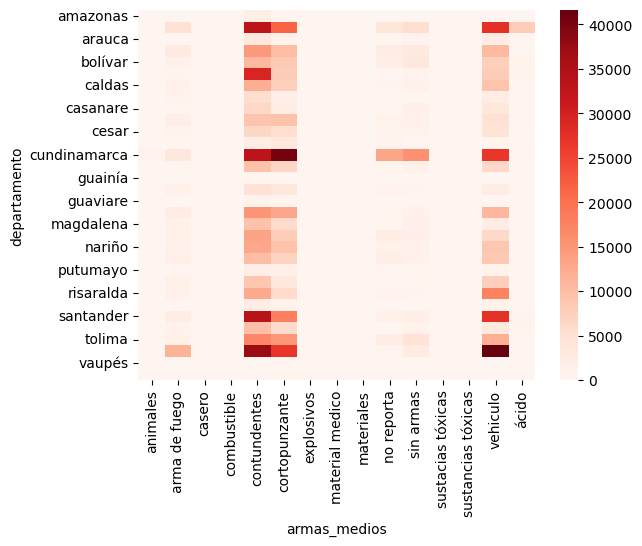

In [ ]:
sns.heatmap(contingency, cmap='Reds')

EL gráfico nos revela en la mayoria de los departamentos las causas de accidentes mas frecuentes son las causadas con objetos contundentes o cortopunzante, vemos que en Cundinamarca, Antioquia, Valle y Santander las causas de accidentes o delitos son por objetos contundentes y armas blancas cortopunzantes

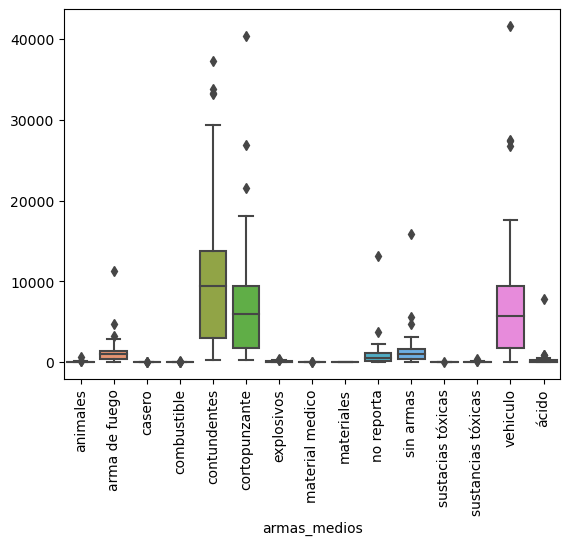

In [ ]:
sns.boxplot(contingency)
plt.xticks(rotation=90)
plt.show()

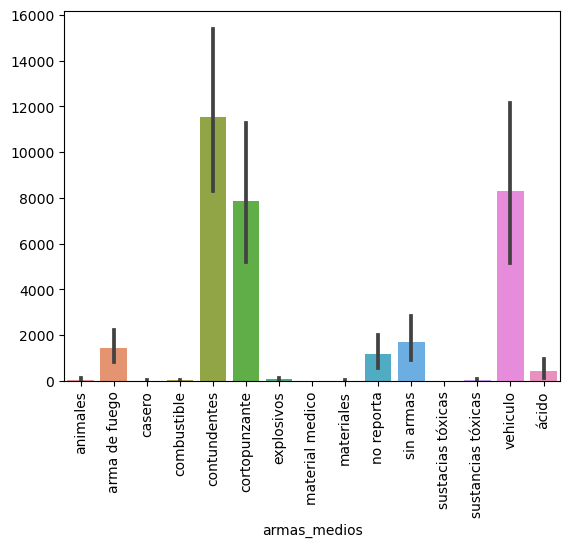

In [468]:
sns.barplot(data=contingency)
plt.xticks(rotation=90)
plt.show()

## Prueba del Chi Cuadrado

realizaremos la prueba del chi cuadrado para determinar si la hipoptesis nula se cumple o no
nuestra hipotesis nula sera determinada como:

-H0 = las variables son independientes.

-H1 = las variables no son independientes.

-si p < 0.025 rechazamos la hipotesis nula.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
p = chi2_contingency(contingency)[1] # obtenemos el valor P

if p <= 0.025:
    label = 'Las variables no son independientes'
else:
    label = 'Las variables son independientes'

print(p,label)

0.0 Las variables no son independientes


Veremos la relación entre los factores de accidentes y el genero de la persona esto con el fin averiguar si hay mas casos entre uno u otro genero

In [ ]:
contingency_2 = pd.crosstab(index=df['genero'],columns=df['armas_medios'])
contingency_2

armas_medios  animales  arma de fuego  casero  combustible  contundentes  \
genero                                                                     
femenino           904           6927     263          246        161433   
masculino          908          34929     201          336        176053   
no reporta         216           3726       0          133         31837   

armas_medios  cortopunzante  explosivos  material medico  materiales  \
genero                                                                 
femenino              89514         672              208         264   
masculino            153848        2169              124         203   
no reporta             9006         163               33          30   

armas_medios  no reporta  sin armas  sustacias tóxicas  sustancias tóxicas  \
genero                                                                       
femenino           17439      17889                147                 685   
masculino          20494      25391                 96                 730   
no reporta           359      11197                 13                  91   

armas_medios  vehiculo  ácido  
genero                         
femenino         94918   6240  
masculino       169817   7064  
no reporta         333      0

In [ ]:
contingency_2.describe()

armas_medios    animales  arma de fuego      casero  combustible  \
count           3.000000       3.000000    3.000000     3.000000   
mean          676.000000   15194.000000  154.666667   238.333333   
std           398.376706   17165.787748  137.485757   101.716927   
min           216.000000    3726.000000    0.000000   133.000000   
25%           560.000000    5326.500000  100.500000   189.500000   
50%           904.000000    6927.000000  201.000000   246.000000   
75%           906.000000   20928.000000  232.000000   291.000000   
max           908.000000   34929.000000  263.000000   336.000000   

armas_medios   contundentes  cortopunzante   explosivos  material medico  \
count              3.000000       3.000000     3.000000         3.000000   
mean          123107.666667   84122.666667  1001.333333       121.666667   
std            79380.016662   72571.351767  1042.762837        87.523330   
min            31837.000000    9006.000000   163.000000        33.000000   
25%            96635.000000   49260.000000   417.500000        78.500000   
50%           161433.000000   89514.000000   672.000000       124.000000   
75%           168743.000000  121681.000000  1420.500000       166.000000   
max           176053.000000  153848.000000  2169.000000       208.000000   

armas_medios  materiales    no reporta     sin armas  sustacias tóxicas  \
count           3.000000      3.000000      3.000000           3.000000   
mean          165.666667  12764.000000  18159.000000          85.333333   
std           121.385062  10851.095567   7100.850935          67.633818   
min            30.000000    359.000000  11197.000000          13.000000   
25%           116.500000   8899.000000  14543.000000          54.500000   
50%           203.000000  17439.000000  17889.000000          96.000000   
75%           233.500000  18966.500000  21640.000000         121.500000   
max           264.000000  20494.000000  25391.000000         147.000000   

armas_medios  sustancias tóxicas      vehiculo        ácido  
count                   3.000000       3.00000     3.000000  
mean                  502.000000   88356.00000  4434.666667  
std                   356.646884   84932.33452  3862.569784  
min                    91.000000     333.00000     0.000000  
25%                   388.000000   47625.50000  3120.000000  
50%                   685.000000   94918.00000  6240.000000  
75%                   707.500000  132367.50000  6652.000000  
max                   730.000000  169817.00000  7064.000000

<AxesSubplot:xlabel='armas_medios', ylabel='genero'>

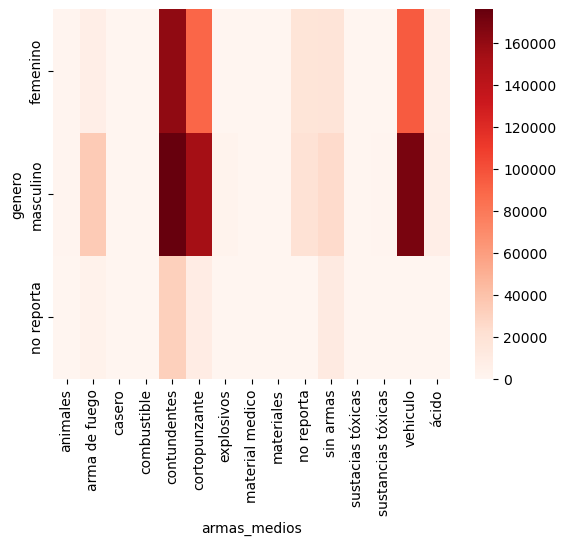

In [ ]:
sns.heatmap(contingency_2,cmap='Reds')

In [ ]:
p = chi2_contingency(contingency_2)[1] # obtenemos el valor P

if p <= 0.025:
    label = 'Las variables no son independientes'
else:
    label = 'Las variables son independientes'

print(p,label)

0.0 Las variables no son independientes


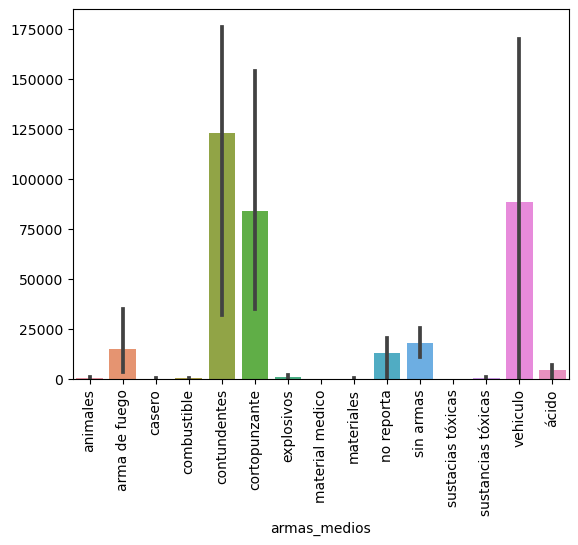

In [ ]:
sns.barplot(data=contingency_2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

departamento          municipio        armas_medios fecha_hecho  \
0           antioquia          girardota       cortopunzante  2010-01-01   
1           antioquia          girardota       cortopunzante  2010-01-01   
2           antioquia             mutatá       cortopunzante  2010-01-01   
3           antioquia            necoclí       cortopunzante  2010-01-01   
4           atlántico  barranquilla (ct)       cortopunzante  2010-01-01   
...               ...                ...                 ...         ...   
1047244         cesar    valledupar (ct)  sustancias tóxicas  2022-05-03   
1047245         huila            oporapa  sustancias tóxicas  2022-06-16   
1047246        tolima        ibagué (ct)  sustancias tóxicas  2022-04-17   
1047247  cundinamarca               cota           sin armas  2022-03-30   
1047248  cundinamarca            guaduas           sin armas  2022-06-10   

            genero  grupo_etario descripción_conducta  cantidad      mes  \
0         femenino       adultos  lesiones personales         2  2010-01   
1        masculino       adultos  lesiones personales         1  2010-01   
2        masculino       adultos  lesiones personales         1  2010-01   
3         femenino       adultos  lesiones personales         1  2010-01   
4         femenino       adultos  lesiones personales         2  2010-01   
...            ...           ...                  ...       ...      ...   
1047244  masculino       adultos  lesiones personales         1  2022-05   
1047245   femenino  adolescentes  lesiones personales         1  2022-06   
1047246  masculino       adultos  lesiones personales         1  2022-04   
1047247  masculino       adultos  lesiones personales         1  2022-03   
1047248  masculino       adultos  lesiones personales         1  2022-06   

         dia_semana  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
1047244           1  
1047245           3  
1047246           6  
1047247           2  
1047248           4  

[1047249 rows x 10 columns]

In [ ]:
df = df.set_index('fecha_hecho').reset_index()
df

fecha_hecho  departamento          municipio        armas_medios  \
0        2010-01-01     antioquia          girardota       cortopunzante   
1        2010-01-01     antioquia          girardota       cortopunzante   
2        2010-01-01     antioquia             mutatá       cortopunzante   
3        2010-01-01     antioquia            necoclí       cortopunzante   
4        2010-01-01     atlántico  barranquilla (ct)       cortopunzante   
...             ...           ...                ...                 ...   
1047244  2022-05-03         cesar    valledupar (ct)  sustancias tóxicas   
1047245  2022-06-16         huila            oporapa  sustancias tóxicas   
1047246  2022-04-17        tolima        ibagué (ct)  sustancias tóxicas   
1047247  2022-03-30  cundinamarca               cota           sin armas   
1047248  2022-06-10  cundinamarca            guaduas           sin armas   

            genero  grupo_etario descripción_conducta  cantidad      mes  \
0         femenino       adultos  lesiones personales         2  2010-01   
1        masculino       adultos  lesiones personales         1  2010-01   
2        masculino       adultos  lesiones personales         1  2010-01   
3         femenino       adultos  lesiones personales         1  2010-01   
4         femenino       adultos  lesiones personales         2  2010-01   
...            ...           ...                  ...       ...      ...   
1047244  masculino       adultos  lesiones personales         1  2022-05   
1047245   femenino  adolescentes  lesiones personales         1  2022-06   
1047246  masculino       adultos  lesiones personales         1  2022-04   
1047247  masculino       adultos  lesiones personales         1  2022-03   
1047248  masculino       adultos  lesiones personales         1  2022-06   

         dia_semana  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
1047244           1  
1047245           3  
1047246           6  
1047247           2  
1047248           4  

[1047249 rows x 10 columns]

In [ ]:
df.to_csv("C:/Users/Jorge/Downloads/Projects/colombian_acc.csv",encoding = 'utf-8')

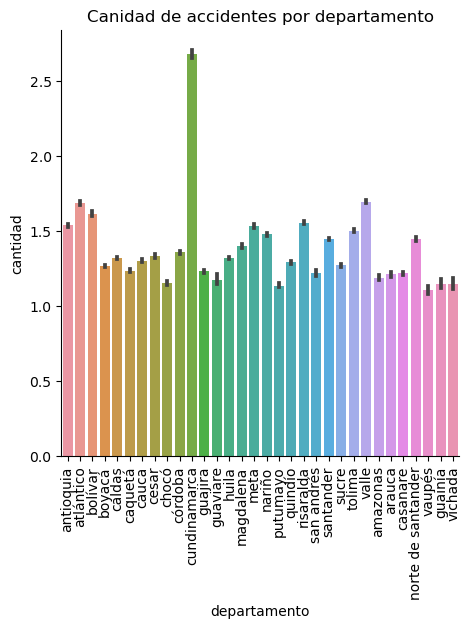

In [ ]:
ax = sns.catplot(data=df, x='departamento',y='cantidad',height=5,kind='bar')
plt.title('Canidad de accidentes por departamento')
plt.xticks(rotation=90)
plt.show()

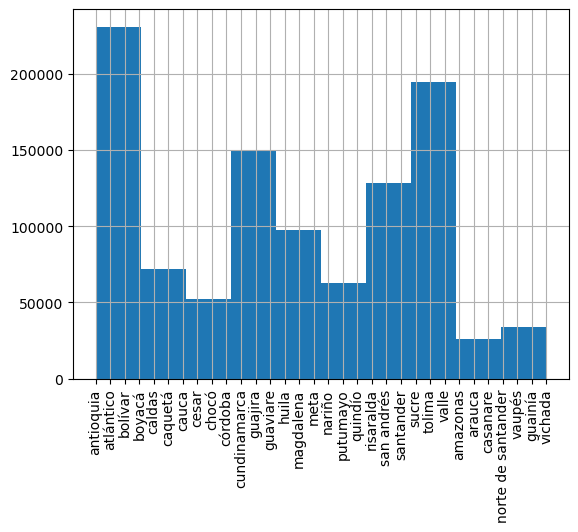

In [ ]:
df.departamento.hist()
plt.xticks(rotation=90)
plt.show()

(0.0, 10.0)

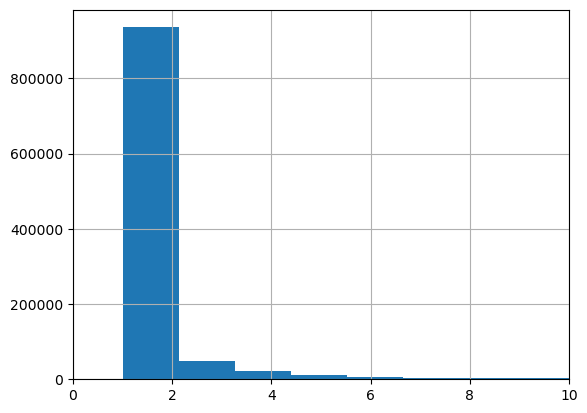

In [ ]:
df.cantidad.hist(bins=100)
plt.xlim(0,10)

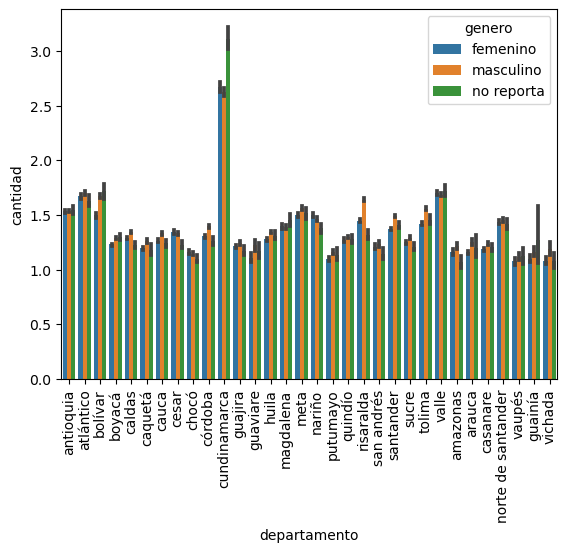

In [ ]:
sns.barplot(data=df, x="departamento", y='cantidad',hue="genero")
plt.xticks(rotation=90)
plt.show()

# Preprocesamiento de los datos

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = df.copy()
X = X.drop(columns=['fecha_hecho','mes','dia_semana','departamento','municipio'])

In [ ]:
X

armas_medios     genero  grupo_etario descripción_conducta  \
0             cortopunzante   femenino       adultos  lesiones personales   
1             cortopunzante  masculino       adultos  lesiones personales   
2             cortopunzante  masculino       adultos  lesiones personales   
3             cortopunzante   femenino       adultos  lesiones personales   
4             cortopunzante   femenino       adultos  lesiones personales   
...                     ...        ...           ...                  ...   
1047244  sustancias tóxicas  masculino       adultos  lesiones personales   
1047245  sustancias tóxicas   femenino  adolescentes  lesiones personales   
1047246  sustancias tóxicas  masculino       adultos  lesiones personales   
1047247           sin armas  masculino       adultos  lesiones personales   
1047248           sin armas  masculino       adultos  lesiones personales   

         cantidad  
0               2  
1               1  
2               1  
3               1  
4               2  
...           ...  
1047244         1  
1047245         1  
1047246         1  
1047247         1  
1047248         1  

[1047249 rows x 5 columns]

# KMEANS

Para este dataset he decidido utilizar el algoritmo de KMeans para agruparlos y entender mejor el comportamiento de cada grupo.

In [ ]:
import base64
from pylab import rcParams #para el tamaño de los gráficos
from sklearn import preprocessing #librería para aplicar transformaciones a los datos

# librerías de modelos
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = df.copy()
df1

departamento          municipio        armas_medios fecha_hecho  \
0           antioquia          girardota       cortopunzante  2010-01-01   
1           antioquia          girardota       cortopunzante  2010-01-01   
2           antioquia             mutatá       cortopunzante  2010-01-01   
3           antioquia            necoclí       cortopunzante  2010-01-01   
4           atlántico  barranquilla (ct)       cortopunzante  2010-01-01   
...               ...                ...                 ...         ...   
1047244         cesar    valledupar (ct)  sustancias tóxicas  2022-05-03   
1047245         huila            oporapa  sustancias tóxicas  2022-06-16   
1047246        tolima        ibagué (ct)  sustancias tóxicas  2022-04-17   
1047247  cundinamarca               cota           sin armas  2022-03-30   
1047248  cundinamarca            guaduas           sin armas  2022-06-10   

            genero  grupo_etario descripción_conducta  cantidad      mes  \
0         femenino       adultos  lesiones personales         2  2010-01   
1        masculino       adultos  lesiones personales         1  2010-01   
2        masculino       adultos  lesiones personales         1  2010-01   
3         femenino       adultos  lesiones personales         1  2010-01   
4         femenino       adultos  lesiones personales         2  2010-01   
...            ...           ...                  ...       ...      ...   
1047244  masculino       adultos  lesiones personales         1  2022-05   
1047245   femenino  adolescentes  lesiones personales         1  2022-06   
1047246  masculino       adultos  lesiones personales         1  2022-04   
1047247  masculino       adultos  lesiones personales         1  2022-03   
1047248  masculino       adultos  lesiones personales         1  2022-06   

         dia_semana  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
1047244           1  
1047245           3  
1047246           6  
1047247           2  
1047248           4  

[1047249 rows x 10 columns]

convertimos las variables categoricas en numericas asignandole un valor a cada uno

In [ ]:
CATEGORICAL_COLUMNS = ['departamento', 'municipio' ,'genero','armas_medios','departamento','grupo_etario','fecha_hecho','descripción_conducta']
# iterar con cada columna tipo object y tranformarla en categorica para transformarla a numerica
for column in CATEGORICAL_COLUMNS:
  df1[column] = df1[column].astype('category').cat.codes
  df1[column] = df1[column].astype('float64')

In [ ]:
a

departamento  municipio  armas_medios  fecha_hecho  genero  \
2                 1.0      545.0           5.0          0.0     1.0   
3                 1.0      552.0           5.0          0.0     0.0   
7                 3.0      860.0           5.0          0.0     1.0   
9                 5.0      825.0           5.0          0.0     1.0   
10                5.0      858.0           5.0          0.0     1.0   
...               ...        ...           ...          ...     ...   
1047244          10.0      970.0          12.0       4505.0     1.0   
1047245          17.0      577.0          12.0       4549.0     0.0   
1047246          28.0      398.0          12.0       4489.0     1.0   
1047247          12.0      223.0          10.0       4471.0     1.0   
1047248          12.0      363.0          10.0       4543.0     1.0   

         grupo_etario  descripción_conducta  cantidad      mes  dia_semana  
2                 1.0                   1.0       1.0  2010-01           4  
3                 1.0                   1.0       1.0  2010-01           4  
7                 1.0                   1.0       1.0  2010-01           4  
9                 1.0                   1.0       1.0  2010-01           4  
10                1.0                   1.0       1.0  2010-01           4  
...               ...                   ...       ...      ...         ...  
1047244           1.0                   1.0       1.0  2022-05           1  
1047245           0.0                   1.0       1.0  2022-06           3  
1047246           1.0                   1.0       1.0  2022-04           6  
1047247           1.0                   1.0       1.0  2022-03           2  
1047248           1.0                   1.0       1.0  2022-06           4  

[785558 rows x 10 columns]

Vemos que las columnas cateroricas quedaron en formato float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785558 entries, 2 to 1047248
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype    
---  ------                --------------   -----    
 0   departamento          785558 non-null  float64  
 1   municipio             785558 non-null  float64  
 2   armas_medios          785558 non-null  float64  
 3   fecha_hecho           785558 non-null  float64  
 4   genero                785558 non-null  float64  
 5   grupo_etario          785558 non-null  float64  
 6   descripción_conducta  785558 non-null  float64  
 7   cantidad              785558 non-null  float64  
 8   mes                   785558 non-null  period[M]
 9   dia_semana            785558 non-null  int64    
dtypes: float64(8), int64(1), period[M](1)
memory usage: 65.9 MB


Para este dataset eliminaré las columnas de formato fecha asi como las columnas categoricas como departamento y municipio que tinene demasiados valores únicos y para que ese no afecte el resultado de los clusters

In [ ]:
df1 = df1.drop(columns=['fecha_hecho','mes','dia_semana','departamento','municipio','armas_medios'])

Una vez borrado las columnas que no necesitamos procederé a normalizar la data debido a la diferencia de escalas entre una y otra, decidí normalizar porque es mucho mas faci volver a los valores iniciales

In [ ]:
train_stats = df1.describe()

train_stats

genero   grupo_etario  descripción_conducta  cantidad
count  785558.000000  785558.000000         785558.000000  785558.0
mean        0.664819       1.050037              0.732291       1.0
std         0.575213       0.609094              0.442765       0.0
min         0.000000       0.000000              0.000000       1.0
25%         0.000000       1.000000              0.000000       1.0
50%         1.000000       1.000000              1.000000       1.0
75%         1.000000       1.000000              1.000000       1.0
max         2.000000       3.000000              1.000000       1.0

In [ ]:
def norm(x):
  return (x - train_stats.loc['mean']) / train_stats.loc['std']
df2 = norm(df1)
df2 = df.drop(columns='fecha_hecho').to_numpy()

NameError: name 'df1' is not defined

In [ ]:
df3 = norm(df1)
df3

genero  grupo_etario  descripción_conducta  cantidad
2        0.582707     -0.082150               0.60463       NaN
3       -1.155778     -0.082150               0.60463       NaN
7        0.582707     -0.082150               0.60463       NaN
9        0.582707     -0.082150               0.60463       NaN
10       0.582707     -0.082150               0.60463       NaN
...           ...           ...                   ...       ...
1047244  0.582707     -0.082150               0.60463       NaN
1047245 -1.155778     -1.723932               0.60463       NaN
1047246  0.582707     -0.082150               0.60463       NaN
1047247  0.582707     -0.082150               0.60463       NaN
1047248  0.582707     -0.082150               0.60463       NaN

[785558 rows x 4 columns]

## Elbow Method

I'll find th n_cluster that better fit to the data

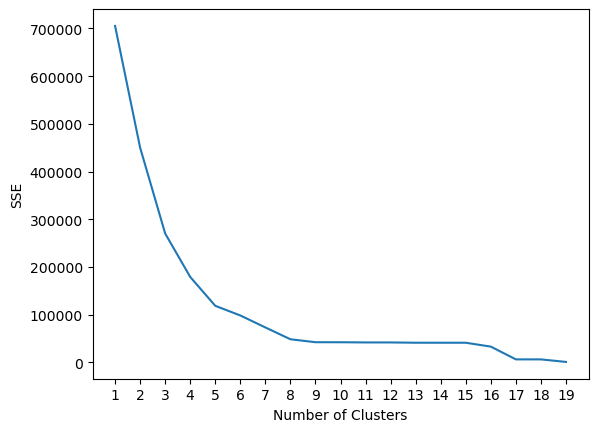

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
%pip install kneed

I use Kneed to detect the optimal cluster to build the model, this method allowed me find out the optimal number of cluster gave me as result 5 cluster as well

In [ ]:
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
    x= range(1,20), 
    y=sse,
    S=0.1, curve="convex",
    direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow
print('Elbow at K =',f'{K_cost_c3:.0f} clusters')

Elbow at K = 5 clusters


## Build the model

bluid the model with the cluster that Kneed gave me as result above

In [ ]:
# Construir modelo
from sklearn.cluster import KMeans
km = KMeans(init="k-means++", n_clusters=5, max_iter=10000,n_init=20,algorithm='elkan')
km.fit(df3)

KMeans(algorithm='elkan', max_iter=10000, n_clusters=5, n_init=20)

In [ ]:
km.labels_ #clusters

array([3, 0, 3, ..., 3, 3, 3])

In [ ]:
km.cluster_centers_ # centroids

array([[-1.63979941e-13,  9.06267901e-01,  1.00000000e+00,
         1.00000000e+00],
       [ 1.00021049e+00,  9.91050268e-01,  4.79505324e-13,
         1.00000000e+00],
       [ 1.97262081e+00,  2.99993057e+00,  9.98750231e-01,
         1.00000000e+00],
       [ 1.00024300e+00,  9.18440808e-01,  1.00000000e+00,
         1.00000000e+00],
       [-1.43884904e-13,  1.00195181e+00,  3.60267371e-13,
         1.00000000e+00]])

In [ ]:
kmeans.predict(X=a, sample_weight=5)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Create the new data frame with cluster 
cluster_map = pd.DataFrame()
cluster_map['data_index'] = a.index.values
cluster_map['cluster'] = km.labels_

In [ ]:
cluster_map

data_index  cluster
0                2        3
1                3        0
2                7        3
3                9        3
4               10        3
...            ...      ...
785553     1047244        3
785554     1047245        0
785555     1047246        3
785556     1047247        3
785557     1047248        3

[785558 rows x 2 columns]

In [ ]:
groups = pd.concat([df.reset_index(),cluster_map],axis=1) # concatenate this dataframe with the original dataframe to evaluate the results
groups = groups.drop(columns=['data_index','index'])
groups

departamento          municipio        armas_medios fecha_hecho  \
0           antioquia          girardota       cortopunzante  2010-01-01   
1           antioquia          girardota       cortopunzante  2010-01-01   
2           antioquia             mutatá       cortopunzante  2010-01-01   
3           antioquia            necoclí       cortopunzante  2010-01-01   
4           atlántico  barranquilla (ct)       cortopunzante  2010-01-01   
...               ...                ...                 ...         ...   
1047244         cesar    valledupar (ct)  sustancias tóxicas  2022-05-03   
1047245         huila            oporapa  sustancias tóxicas  2022-06-16   
1047246        tolima        ibagué (ct)  sustancias tóxicas  2022-04-17   
1047247  cundinamarca               cota           sin armas  2022-03-30   
1047248  cundinamarca            guaduas           sin armas  2022-06-10   

            genero  grupo_etario descripción_conducta  cantidad      mes  \
0         femenino       adultos  lesiones personales         2  2010-01   
1        masculino       adultos  lesiones personales         1  2010-01   
2        masculino       adultos  lesiones personales         1  2010-01   
3         femenino       adultos  lesiones personales         1  2010-01   
4         femenino       adultos  lesiones personales         2  2010-01   
...            ...           ...                  ...       ...      ...   
1047244  masculino       adultos  lesiones personales         1  2022-05   
1047245   femenino  adolescentes  lesiones personales         1  2022-06   
1047246  masculino       adultos  lesiones personales         1  2022-04   
1047247  masculino       adultos  lesiones personales         1  2022-03   
1047248  masculino       adultos  lesiones personales         1  2022-06   

         dia_semana  cluster  
0                 4      3.0  
1                 4      0.0  
2                 4      3.0  
3                 4      3.0  
4                 4      3.0  
...             ...      ...  
1047244           1      NaN  
1047245           3      NaN  
1047246           6      NaN  
1047247           2      NaN  
1047248           4      NaN  

[1047249 rows x 11 columns]

I notice each resukt of the cluster with categorical data

In [ ]:
groups[groups.cluster == 0].describe(include='object') # cluster 1

departamento         municipio armas_medios     genero grupo_etario  \
count        223456            223456       223456     223456       223456   
unique           32              1019           15          3            4   
top           valle  bogotá d.c. (ct)     vehiculo  masculino      adultos   
freq          27050              9467        70351     133431       191279   

       descripción_conducta  
count                223456  
unique                    2  
top     lesiones personales  
freq                 143129

In [ ]:
groups[groups.cluster == 1].describe(include='object') # cluster 2

departamento  municipio  armas_medios     genero grupo_etario  \
count        128272     128272        128272     128272       128272   
unique           32       1016            15          3            4   
top           valle  cali (ct)  contundentes  masculino      adultos   
freq          16171       5635         42650      78181       109299   

       descripción_conducta  
count                128272  
unique                    2  
top     lesiones personales  
freq                  83137

In [ ]:
groups[groups.cluster == 2].describe(include='object') # cluster 3

departamento         municipio  armas_medios     genero grupo_etario  \
count          43208             43208         43208      43208        43208   
unique            32               974            15          3            4   
top     cundinamarca  bogotá d.c. (ct)  contundentes  masculino      adultos   
freq            6186              2002         18181      24270        37711   

       descripción_conducta  
count                 43208  
unique                    2  
top     lesiones personales  
freq                  31772

In [ ]:
groups[groups.cluster == 3].describe(include='object') # cluster 4

departamento         municipio armas_medios     genero grupo_etario  \
count        308647            308647       308647     308647       308647   
unique           32              1023           15          3            4   
top           valle  bogotá d.c. (ct)     vehiculo  masculino      adultos   
freq          36946             13500        97106     184423       263820   

       descripción_conducta  
count                308647  
unique                    2  
top     lesiones personales  
freq                 198944

In [ ]:
groups[groups.cluster == 4].describe(include='object') # cluster 5

departamento         municipio  armas_medios     genero grupo_etario  \
count         81975             81975         81975      81975        81975   
unique           32               998            15          3            4   
top           valle  bogotá d.c. (ct)  contundentes  masculino      adultos   
freq          10213              3583         27454      50118        69996   

       descripción_conducta  
count                 81975  
unique                    2  
top     lesiones personales  
freq                  53118

In the plot bellow notice the cluster 4 got less than the other cluster

<AxesSubplot:>

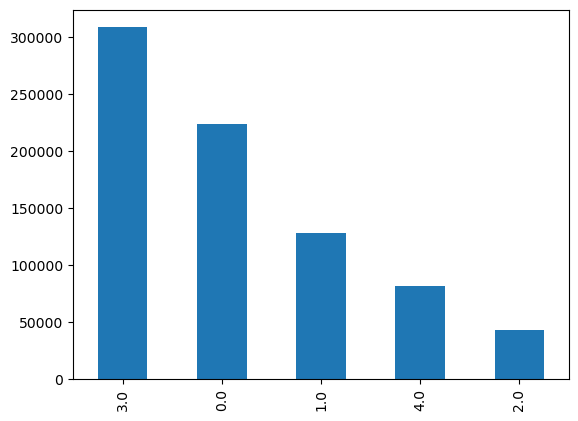

In [ ]:
groups['cluster'].value_counts().plot(kind='bar')

In [ ]:
def denorm(x):
  return (x * train_stats.loc['std'] + train_stats.loc['mean'])
#df4 = df3.drop(columns='cluster')
df4 = denorm(df3)
df4 = pd.concat([df4,cluster_map],axis=1).drop(columns='data_index')


In [ ]:
df4

genero  grupo_etario  descripción_conducta  cantidad  cluster
2       1.000000e+00           1.0                   1.0       NaN      3.0
3       1.110223e-16           1.0                   1.0       NaN      3.0
7       1.000000e+00           1.0                   1.0       NaN      0.0
9       1.000000e+00           1.0                   1.0       NaN      3.0
10      1.000000e+00           1.0                   1.0       NaN      3.0
...              ...           ...                   ...       ...      ...
785539           NaN           NaN                   NaN       NaN      0.0
785543           NaN           NaN                   NaN       NaN      3.0
785545           NaN           NaN                   NaN       NaN      3.0
785554           NaN           NaN                   NaN       NaN      0.0
785556           NaN           NaN                   NaN       NaN      3.0

[999733 rows x 5 columns]

In [ ]:
#groups['cluster'] = km.labels_
#groups.groupby('cluster').agg(['mean','std']).T.plot.bar()

In [ ]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

departamento              32
municipio               1023
armas_medios              15
genero                     3
grupo_etario               4
descripción_conducta       2
dtype: int64

In [ ]:
# Check missing value
df.isna().sum()

fecha_hecho             0
departamento            0
municipio               0
armas_medios            0
genero                  0
grupo_etario            0
descripción_conducta    0
cantidad                0
mes                     0
dia_semana              0
dtype: int64

In [ ]:
df_region = pd.DataFrame(groups['departamento'].value_counts()).reset_index()

In [ ]:
df_region['Percentage'] = df_region['departamento'] / groups['departamento'].value_counts().sum()

In [ ]:
df_region.rename(columns = {'index':'departamento', 'departamento':'Total'}, inplace = True)
df_region

departamento   Total  Percentage
0         cundinamarca  134439    0.128373
1                valle  120891    0.115437
2            antioquia  105105    0.100363
3            santander   85237    0.081391
4               tolima   52423    0.050058
5               boyacá   48113    0.045942
6            atlántico   43755    0.041781
7                huila   42801    0.040870
8            risaralda   38702    0.036956
9               nariño   35336    0.033742
10             bolívar   33979    0.032446
11                meta   33352    0.031847
12              caldas   32739    0.031262
13  norte de santander   30889    0.029495
14               cauca   28050    0.026784
15             córdoba   24939    0.023814
16             quindío   22149    0.021150
17               sucre   21188    0.020232
18           magdalena   21103    0.020151
19               cesar   19384    0.018509
20            casanare   15282    0.014593
21             guajira   13141    0.012548
22             caquetá   11457    0.010940
23               chocó    7716    0.007368
24              arauca    7683    0.007336
25            putumayo    5121    0.004890
26          san andrés    4511    0.004307
27            amazonas    2879    0.002749
28            guaviare    2108    0.002013
29             vichada    1115    0.001065
30             guainía     922    0.000880
31              vaupés     740    0.000707

In [ ]:
df_region = df_region.sort_values('Total', ascending = False).reset_index(drop = True)

<AxesSubplot:xlabel='departamento'>

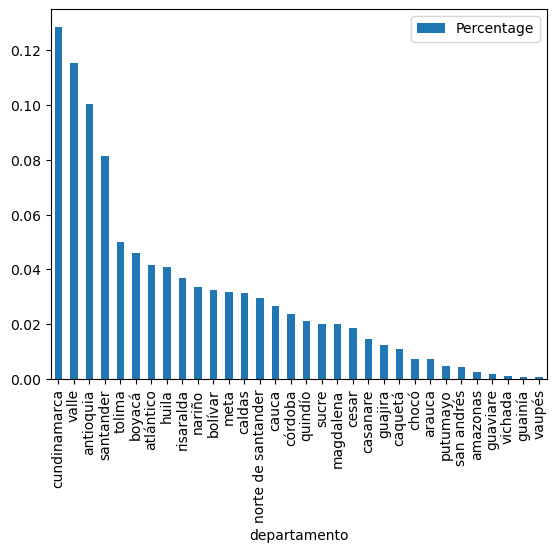

In [ ]:
df_region.plot.bar(x='departamento', y='Percentage')

In [ ]:
# Cluster interpretation
groups.groupby('cluster').agg(
    {
        'departamento': lambda x: x.value_counts().index[0],
        'municipio': lambda x: x.value_counts().index[0],
        'genero': lambda x: x.value_counts().index[0],
        'armas_medios': lambda x: x.value_counts().index[0],
        'grupo_etario': lambda x: x.value_counts().index[0],
        'descripción_conducta': lambda x: x.value_counts().index[0],
        'cantidad': 'mean',
    }
).reset_index()

cluster  departamento         municipio     genero  armas_medios  \
0      0.0         valle  bogotá d.c. (ct)  masculino      vehiculo   
1      1.0         valle         cali (ct)  masculino  contundentes   
2      2.0  cundinamarca  bogotá d.c. (ct)  masculino  contundentes   
3      3.0         valle  bogotá d.c. (ct)  masculino      vehiculo   
4      4.0         valle  bogotá d.c. (ct)  masculino  contundentes   

  grupo_etario descripción_conducta  cantidad  
0      adultos  lesiones personales  1.677216  
1      adultos  lesiones personales  1.630028  
2      adultos  lesiones personales  1.697973  
3      adultos  lesiones personales  1.672626  
4      adultos  lesiones personales  1.625410